In [1]:
def helioWebToData(String):
    words = split(String)
    nums = []
    for i in words:
        try:
            nums.append(float(i))
        except:
            pass
    return nums
        
def split(String):
    words = []
    word = ""
    for i in String:
        if (i == " " or i == "\n") and word != "":
            if word[0:1] == "\n":
                word = word[2:len(word)]
            words.append(word)
            word = ""
        elif i != " ":
            word += i
    if word[0:1] == "\n":
        word = word[2:len(word)]
    words.append(word)
    check = True
    while check:
        try:
            del words[words.index("")]
        except:
            check = False
    return words

In [2]:
def dataFormatter(IntToDictDictionary, Length, Data):
    index = 0
    for i in Data:
        if index in IntToDictDictionary.keys():
            IntToDictDictionary[index].append(i)
        index += 1
        if index == Length:
            index = 0

In [3]:
def dayChecker(years,days):
    startYear = years[0]
    newDays = []
    for (index,i) in enumerate(days):
        newDays.append(i+365*(years[index]-startYear))
    return newDays

In [4]:
realDays = []
realDistances = []
def dataFrameFromHelioWeb(string):
    data = helioWebToData(string)
    FormattedData = {0:[],1:[],2:[]}
    dataFormatter(FormattedData,8,data)
    datafrem = pd.DataFrame()
    datafrem["Day"] = dayChecker(FormattedData[0],FormattedData[1])
    realDays = dayChecker(FormattedData[0],FormattedData[1])
    datafrem["Distance"] = FormattedData[2]
    realDistances = FormattedData[2]
    return datafrem

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def dataFromSimulation(string):
    newString = ""
    for i in string:
        if i != "," and i != ")":
            newString += i
    words = split(newString)
    newWords = []
    for i in words:
        try:
            newWords.append(float(i))
        except:
            pass
    return newWords

In [7]:
def distanceFromVector3(dataPoint):
    distance = (dataPoint[0]**2 + dataPoint[1]**2 + dataPoint[2]**2)**0.5
    return distance

In [8]:
def dataFrameFromSimulation(String):
    data = dataFromSimulation(String)
    rowsOfInterest = {0:[],1:[],2:[],3:[]}
    formattedData = dataFormatter(rowsOfInterest,4,data)
    distances = []
    for i in range(len(rowsOfInterest[1])):
        distances.append(distanceFromVector3([rowsOfInterest[3][i],rowsOfInterest[1][i],rowsOfInterest[2][i]]))
    df = pd.DataFrame()
    df["Day"] = rowsOfInterest[0]
    df["Distance"] = distances
    return df

In [9]:
def compareData(SimulationDF,Plot1Name,realDF,Plot2Name,Title,Start):
    plt.plot(SimulationDF.Day-10,SimulationDF.Distance,label= Plot1Name)
    plt.plot(realDF.Day,realDF.Distance*1.496*10**11,label= Plot2Name)
    plt.legend()
    plt.title(Title)
    plt.xlabel('Days After ' + Start)
    plt.ylabel('Distance (meters)')
    plt.show()

In [10]:
def percentDifference(simDataString, realDataString):
    data = dataFromSimulation(simDataString)
    rowsOfInterest = {0:[],1:[],2:[],3:[]}
    formattedData = dataFormatter(rowsOfInterest,4,data)
    dayss = rowsOfInterest[0]
    distances = []
    for i in range(len(rowsOfInterest[1])):
        distances.append(distanceFromVector3([rowsOfInterest[3][i],rowsOfInterest[1][i],rowsOfInterest[2][i]]))
    simDistances = distances
    
    data = helioWebToData(realDataString)
    FormattedData = {0:[],1:[],2:[]}
    dataFormatter(FormattedData,8,data)
    newDistances = []
    days = []
    for (index,i) in enumerate(distances):
        if len(FormattedData[2]) > index:
            newDistances.append(abs(FormattedData[2][index]*1.496*10**11-i)/(FormattedData[2][index]*1.496*10**11)*100)
            days.append(dayss[index])
    df = pd.DataFrame()
    df["Day"] = days
    df["Distance"] = newDistances
    return df

In [11]:
def setupGraphs(Time1,Planet,Step,String1,String2):
    smData = dataFrameFromSimulation(String1)
    nasaData = dataFrameFromHelioWeb(String2)
    compareData(smData,"Simulation Data",nasaData,"NASA Data", Planet + " Distance From Sun ("+Step+" Step)",Time1)
    PercentDiff = percentDifference(String1, String2)
    plt.plot(PercentDiff.Day,PercentDiff.Distance)
    plt.title("Percent Error " + Planet + "'s Position From Simulated and NASA Data")
    plt.xlabel('Days Since ' + Time1)
    plt.ylabel('Percent Error (%)')
    plt.show()
    
#     plt.plot(PercentDiff.Day,PercentDiff.Distance, label= "Percent Difference")
#     # plt.plot(nasaData.Day,nasaData.Distance, label= "Distance in AU")
#     # plt.plot(smData.Day,smData.Distance/(1.496*10**11), label= "Distance in AU")
#     plt.title("Percent Difference Between Simulated and NASA Data Overlayed With Paths")
#     plt.legend()
#     plt.xlabel('Days Since ' + Time1)
#     plt.ylabel('Percent Difference (%)')
#     plt.show()

In [12]:
# setupGraphs("2017","Mercury","12H",simData,nasaStringData)

In [13]:
def sortMassDara(String):
    planets = {}
    while String.find("START") != -1:
        if String.count("START") >= 2:
            planet = String[String.find("START")+len("START"):String.find("END")]
            String = String[String.find("END")+1:len(String)]
            store = ""
            for i in planet:
                if i != " ":
                    store += i
            planets[store] = String[0:String.find("START")]
            String = String[String.find("START"):len(String)]
        else:
            planet = String[len("START"):String.find("END")]
            store = ""
            String = String[String.find("END")+1:len(String)]
            for i in planet:
                if i != " ":
                    store += i
            planets[store] = String[0:len(String)]
    return planets

In [14]:
def graphMassData(Time1,Step):
    planets = sortMassDara(massData)
    for i in NASAMassData.keys():
        setupGraphs(Time1,i,Step,planets[i],NASAMassData[i])

In [15]:
massData = """START Mercury END
0 SCNVector3(x: -22801568218.662918, y: 41885096468.43732, z: 5507421863.718915)
1 SCNVector3(x: -27221243212.783188, y: 39815665654.08338, z: 5745982152.947285)
2 SCNVector3(x: -31405964394.77625, y: 37402120026.64907, z: 5934910187.019016)
3 SCNVector3(x: -35329769476.5323, y: 34677433327.27779, z: 6074498409.155253)
4 SCNVector3(x: -38971807489.290375, y: 31675811789.611744, z: 6165610167.554684)
5 SCNVector3(x: -42316097037.01035, y: 28431848465.566174, z: 6209588648.239157)
6 SCNVector3(x: -45351163196.52851, y: 24979816189.834015, z: 6208165914.70986)
7 SCNVector3(x: -48069598137.411224, y: 21353104491.882572, z: 6163376636.436405)
8 SCNVector3(x: -50467584166.32606, y: 17583794468.615894, z: 6077479582.791963)
9 SCNVector3(x: -52544409972.65083, y: 13702358212.305613, z: 5952888625.456661)
10 SCNVector3(x: -54302002757.20358, y: 9737465374.27072, z: 5792113920.372066)
11 SCNVector3(x: -55744491567.31586, y: 5715878086.552162, z: 5597713152.270746)
12 SCNVector3(x: -56877811008.703926, y: 1662415963.2332978, z: 5372252198.92545)
13 SCNVector3(x: -57709349703.34195, y: -2400025450.6480594, z: 5118274264.140408)
14 SCNVector3(x: -58247644349.632, y: -6450417182.795576, z: 4838276386.652926)
15 SCNVector3(x: -58502117841.34719, y: -10469512274.241558, z: 4534692207.722689)
16 SCNVector3(x: -58482858397.50053, y: -14439743801.166973, z: 4209879932.0659795)
17 SCNVector3(x: -58200435830.39362, y: -18345113007.06054, z: 3866114512.9464173)
18 SCNVector3(x: -57665750742.605194, y: -22171073252.584843, z: 3505583209.477275)
19 SCNVector3(x: -56889912439.08736, y: -25904413978.32224, z: 3130383786.8076863)
20 SCNVector3(x: -55884141546.7651, y: -29533147657.330967, z: 2742524747.9758286)
21 SCNVector3(x: -54659693661.803116, y: -33046401758.007233, z: 2343927094.211836)
22 SCNVector3(x: -53227800731.07396, y: -36434317004.42446, z: 1936427205.7150478)
23 SCNVector3(x: -51599627276.99053, y: -39687952671.99661, z: 1521780516.6980379)
24 SCNVector3(x: -49786238966.81611, y: -42799199254.86493, z: 1101665727.2422678)
25 SCNVector3(x: -47798581392.969154, y: -45760698556.29727, z: 677689351.3527517)
26 SCNVector3(x: -45647467261.50209, y: -48565771058.12528, z: 251390446.93226987)
27 SCNVector3(x: -43343570478.75602, y: -51208350298.21417, z: -175754589.30684844)
28 SCNVector3(x: -40897425881.32077, y: -53682923908.92759, z: -602327249.2983464)
29 SCNVector3(x: -38319433573.91947, y: -55984480931.03437, z: -1026962227.406642)
30 SCNVector3(x: -35619867026.77507, y: -58108465006.13151, z: -1448342866.3645315)
31 SCNVector3(x: -32808884241.908817, y: -60050733058.578606, z: -1865196767.2946534)
32 SCNVector3(x: -29896541430.228966, y: -61807519099.30507, z: -2276291585.2923717)
33 SCNVector3(x: -26892808751.570488, y: -63375402814.382164, z: -2680431024.3758807)
34 SCNVector3(x: -23807587761.11764, y: -64751282637.88548, z: -3076451040.1862564)
35 SCNVector3(x: -20650730280.585964, y: -65932353049.17597, z: -3463216255.22332)
36 SCNVector3(x: -17432058473.474895, y: -66916085877.875656, z: -3839616589.3033724)
37 SCNVector3(x: -14161385952.552505, y: -67700215444.61621, z: -4204564107.0723753)
38 SCNVector3(x: -10848539786.052683, y: -68282727411.60581, z: -4556990084.620054)
39 SCNVector3(x: -7503383298.043517, y: -68661851263.997345, z: -4895842298.391314)
40 SCNVector3(x: -4135839578.9163127, y: -68836056390.97185, z: -5220082541.604668)
41 SCNVector3(x: -755915634.463968, y: -68804051784.55261, z: -5528684376.229751)
42 SCNVector3(x: 2626272893.242573, y: -68564789424.71508, z: -5820631132.252581)
43 SCNVector3(x: 6000476503.152945, y: -68117471471.689156, z: -6094914170.508224)
44 SCNVector3(x: 9356286192.276304, y: -67461561440.812004, z: -6350531430.8590765)
45 SCNVector3(x: 12683107494.888334, y: -66596799592.18868, z: -6586486294.047556)
46 SCNVector3(x: 15970134337.733988, y: -65523222826.971695, z: -6801786793.288744)
47 SCNVector3(x: 19206322888.710514, y: -64241189444.32922, z: -6995445220.753955)
48 SCNVector3(x: 22380365634.657227, y: -62751409177.92312, z: -7166478184.718119)
49 SCNVector3(x: 25480665999.303135, y: -61054978997.35976, z: -7313907185.510931)
50 SCNVector3(x: 28495313908.565968, y: -59153425227.44794, z: -7436759792.74576)
51 SCNVector3(x: 31412062831.383553, y: -57048752604.246254, z: -7534071522.822365)
52 SCNVector3(x: 34218308974.957623, y: -54743500948.76329, z: -7604888534.610071)
53 SCNVector3(x: 36901073499.299706, y: -52240810192.25885, z: -7648271282.6641655)
54 SCNVector3(x: 39446988843.55658, y: -49544494524.85259, z: -7663299291.355638)
55 SCNVector3(x: 41842290532.49738, y: -46659126452.4143, z: -7649077239.777873)
56 SCNVector3(x: 44072816162.59638, y: -43590131522.88822, z: -7604742575.837222)
57 SCNVector3(x: 46124013659.5965, y: -40343894405.318985, z: -7529474907.732218)
58 SCNVector3(x: 47980961357.86601, y: -36927876850.48457, z: -7422507450.676196)
59 SCNVector3(x: 49628402977.47814, y: -33350747802.212555, z: -7283140833.973143)
60 SCNVector3(x: 51050801163.08373, y: -29622525526.571987, z: -7110759595.0103445)
61 SCNVector3(x: 52232413885.19524, y: -25754731037.342175, z: -6904851697.434223)
62 SCNVector3(x: 53157398660.97725, y: -21760551267.51253, z: -6665031403.79786)
63 SCNVector3(x: 53809950178.8245, y: -17655009308.740948, z: -6391065798.95067)
64 SCNVector3(x: 54174477431.047104, y: -13455137552.29612, z: -6082905187.219001)
65 SCNVector3(x: 54235826756.5017, y: -9180147660.894657, z: -5740717458.891403)
66 SCNVector3(x: 53979557108.38505, y: -4851588946.203285, z: -5364926321.960403)
67 SCNVector3(x: 53392273177.66727, y: -493483928.75733817, z: -4956253004.363296)
68 SCNVector3(x: 52462020454.07401, y: 3867573304.724636, z: -4515760632.121273)
69 SCNVector3(x: 51178743590.2797, y: 8202373665.954313, z: -4044899967.380763)
70 SCNVector3(x: 49534805243.83523, y: 12479125430.849966, z: -3545554547.3541985)
71 SCNVector3(x: 47525556659.66218, y: 16663585728.732845, z: -3020082522.0607734)
72 SCNVector3(x: 45149943541.110695, y: 20719315446.779953, z: -2471351699.5338883)
73 SCNVector3(x: 42411121456.441246, y: 24608080395.832207, z: -1902763568.392275)
74 SCNVector3(x: 39317044809.297005, y: 28290416702.854023, z: -1318261523.950501)
75 SCNVector3(x: 35880983514.10614, y: 31726369195.075905, z: -722318362.22381)
76 SCNVector3(x: 32121913816.159973, y: 34876397595.02869, z: -119898531.80176389)
77 SCNVector3(x: 28064726490.694595, y: 37702427075.24204, z: 483608174.99290556)
78 SCNVector3(x: 23740199301.286377, y: 40168998737.63263, z: 1082482767.18924)
79 SCNVector3(x: 19184692838.98504, y: 42244454812.19668, z: 1670801494.9324813)
80 SCNVector3(x: 14439550050.180141, y: 43902076777.899086, z: 2242583741.6173916)
81 SCNVector3(x: 9550208212.32679, y: 45121086426.31445, z: 2791955240.6820507)
82 SCNVector3(x: 4565063963.549245, y: 45887423444.1648, z: 3313315846.3516994)
83 SCNVector3(x: -465838247.1955433, y: 46194229594.27006, z: 3801499690.211067)
84 SCNVector3(x: -5492202055.774898, y: 46041997347.89272, z: 4251915801.883105)
85 SCNVector3(x: -10464857720.036026, y: 45438375399.8344, z: 4660659213.559438)
86 SCNVector3(x: -15337026353.102875, y: 44397658690.86359, z: 5024585869.819664)
87 SCNVector3(x: -20065390524.744926, y: 42940020138.92116, z: 5341348692.822093)
88 SCNVector3(x: -24610918311.83918, y: 41090560635.084564, z: 5609396159.355655)
89 SCNVector3(x: -28939417630.199356, y: 38878261042.97741, z: 5827938070.0141115)
90 SCNVector3(x: -33021825496.934216, y: 36334915756.24527, z: 5996885411.556636)
91 SCNVector3(x: -36834258877.59736, y: 33494114663.567616, z: 6116772205.879929)
92 SCNVector3(x: -40357868051.851265, y: 30390322914.07043, z: 6188667133.4457035)
93 SCNVector3(x: -43578539932.9251, y: 27058089296.53108, z: 6214081805.912622)
94 SCNVector3(x: -46486498770.52218, y: 23531397119.971317, z: 6194881185.030249)
95 SCNVector3(x: -49075847071.05215, y: 19843157862.29387, z: 6133200113.423006)
96 SCNVector3(x: -51344082364.29549, y: 16024838142.261099, z: 6031368469.344611)
97 SCNVector3(x: -53291617301.63085, y: 12106204600.564796, z: 5891846221.911765)
98 SCNVector3(x: -54921322683.40331, y: 8115168430.136546, z: 5717168705.545855)
99 SCNVector3(x: -56238106099.46075, y: 4077710782.315707, z: 5509901754.001837)
100 SCNVector3(x: -57248533252.07448, y: 17871318.325456798, z: 5272605902.229892)
101 SCNVector3(x: -57960494762.364746, y: -4042215880.4553204, z: 5007808629.5070095)
102 SCNVector3(x: -58382918221.05323, y: -8082252481.152291, z: 4717983528.449275)
103 SCNVector3(x: -58525523232.33212, y: -12083683172.654102, z: 4405535295.515023)
104 SCNVector3(x: -58398615994.58772, y: -16029588805.13336, z: 4072789511.8643346)
105 SCNVector3(x: -58012919355.54388, y: -19904572154.404266, z: 3721986290.6079617)
106 SCNVector3(x: -57379434094.27578, y: -23694641372.016796, z: 3355276987.565202)
107 SCNVector3(x: -56509327276.38593, y: -27387094790.746037, z: 2974723294.488319)
108 SCNVector3(x: -55413843793.69551, y: -30970409646.475708, z: 2582298148.322173)
109 SCNVector3(x: -54104237558.09759, y: -34434136415.5788, z: 2179887993.1851964)
110 SCNVector3(x: -52591719216.77154, y: -37768799812.283005, z: 1769296021.6250381)
111 SCNVector3(x: -50887417657.22236, y: -40965807004.93361, z: 1352246098.1575572)
112 SCNVector3(x: -49002352953.59056, y: -44017363259.11007, z: 930387131.9172249)
113 SCNVector3(x: -46947418757.97445, y: -46916394969.67522, z: 505297717.69216883)
114 SCNVector3(x: -44733372456.259026, y: -49656479878.54152, z: 78490907.14198601)
115 SCNVector3(x: -42370831685.56779, y: -52231784170.44058, z: -348580993.93488145)
116 SCNVector3(x: -39870276051.002014, y: -54637006079.62486, z: -774521679.4338746)
117 SCNVector3(x: -37242053085.38112, y: -56867325614.057945, z: -1197986203.902798)
118 SCNVector3(x: -34496387670.561935, y: -58918360000.96643, z: -1617676490.326321)
119 SCNVector3(x: -31643394286.16483, y: -60786124471.64569, z: -2032337012.0138414)
120 SCNVector3(x: -28693091574.678806, y: -62466998028.963196, z: -2440750666.60514)
121 SCNVector3(x: -25655418814.224033, y: -63957693874.33896, z: -2841734853.5003586)
122 SCNVector3(x: -22540253974.64761, y: -65255234209.44709, z: -3234137761.382698)
123 SCNVector3(x: -19357433101.66956, y: -66356929169.658844, z: -3616834869.5507483)
124 SCNVector3(x: -16116770829.638075, y: -67260359690.14903, z: -3988725665.2163424)
125 SCNVector3(x: -12828081867.875956, y: -67963364150.90441, z: -4348730578.530227)
126 SCNVector3(x: -9501203340.011877, y: -68464028693.24857, z: -4695788137.711516)
127 SCNVector3(x: -6146017881.148997, y: -68760681147.83345, z: -5028852348.171047)
128 SCNVector3(x: -2772477414.9487205, y: -68851888562.43657, z: -5346890301.8740635)
129 SCNVector3(x: 609372457.912008, y: -68736458367.5646, z: -5648880026.365973)
130 SCNVector3(x: 3989367526.8562236, y: -68413443269.10413, z: -5933808586.906243)
131 SCNVector3(x: 7357199567.511239, y: -67882150010.42032, z: -6200670460.073745)
132 SCNVector3(x: 10702390555.386387, y: -67142152201.72353, z: -6448466203.109086)
133 SCNVector3(x: 14014266610.59669, y: -66193307472.48099, z: -6676201450.262695)
134 SCNVector3(x: 17281931823.154736, y: -65035779263.30674, z: -6882886275.668411)
135 SCNVector3(x: 20494242157.482113, y: -63670063637.07896, z: -7067534971.934376)
136 SCNVector3(x: 23639779699.448708, y: -62097021554.66039, z: -7229166304.933647)
137 SCNVector3(x: 26706827592.478977, y: -60317917127.73657, z: -7366804318.401441)
138 SCNVector3(x: 29683346114.77567, y: -58334462428.49249, z: -7479479777.127913)
139 SCNVector3(x: 32556950481.92331, y: -56148869500.779205, z: -7566232354.991215)
140 SCNVector3(x: 35314891123.21253, y: -53763910276.493965, z: -7626113693.989167)
141 SCNVector3(x: 37944037381.853905, y: -51182985148.85533, z: -7658191482.91313)
142 SCNVector3(x: 40430865835.32042, y: -48410200983.6042, z: -7661554729.352573)
143 SCNVector3(x: 42761454729.211845, y: -45450459349.47071, z: -7635320426.104502)
144 SCNVector3(x: 44921486372.98298, y: -42309555706.2944, z: -7578641842.2488165)
145 SCNVector3(x: 46896259764.3761, y: -38994290183.95599, z: -7490718699.121918)
146 SCNVector3(x: 48670716194.9403, y: -35512590392.86271, z: -7370809520.470822)
147 SCNVector3(x: 50229481140.84679, y: -31873646395.20508, z: -7218246471.531977)
148 SCNVector3(x: 51556926353.40074, y: -28088057495.70811, z: -7032453019.679744)
149 SCNVector3(x: 52637256713.04955, y: -24167989832.933884, z: -6812964753.943893)
150 SCNVector3(x: 53454627063.41071, y: -20127342811.489864, z: -6559453684.253606)
151 SCNVector3(x: 53993294838.26956, y: -15981921150.83696, z: -6271756293.281209)
152 SCNVector3(x: 54237814742.886696, y: -11749607677.506865, z: -5949905520.8814535)
153 SCNVector3(x: 54173281918.40378, y: -7450529905.220143, z: -5594166707.110982)
154 SCNVector3(x: 53785629722.50842, y: -3107210910.376075, z: -5205077286.166743)
155 SCNVector3(x: 53061987265.381134, y: 1255307949.5669093, z: -4783489691.209757)
156 SCNVector3(x: 51991099863.48608, y: 5609388191.220208, z: -4330616482.489288)
157 SCNVector3(x: 50563812303.74359, y: 9924778270.172943, z: -3848076139.975292)
158 SCNVector3(x: 48773609954.15555, y: 14168682546.700031, z: -3337937274.1376433)
159 SCNVector3(x: 46617206118.62128, y: 18305939104.822765, z: -2802758237.6918716)
160 SCNVector3(x: 44095155631.999954, y: 22299330507.16818, z: -2245618336.986034)
161 SCNVector3(x: 41212464905.48173, y: 26110048873.859447, z: -1670136159.8844328)
162 SCNVector3(x: 37979158350.916336, y: 29698330156.095596, z: -1080470120.6597474)
163 SCNVector3(x: 34410751832.401276, y: 33024261387.026875, z: -481296370.11279726)
164 SCNVector3(x: 30528577584.820625, y: 36048748897.49762, z: 122240067.33967422)
165 SCNVector3(x: 26359904297.24248, y: 38734615844.962105, z: 724603538.2070271)
166 SCNVector3(x: 21937802989.342266, y: 41047776062.30647, z: 1319975620.1278648)
167 SCNVector3(x: 17300725194.607548, y: 42958411595.19534, z: 1902389771.2494524)
168 SCNVector3(x: 12491784402.182442, y: 44442067558.67633, z: 2465886574.3940773)
169 SCNVector3(x: 7557762124.156071, y: 45480574135.70714, z: 3004680271.3524246)
170 SCNVector3(x: 2547891714.8748884, y: 46062714281.56334, z: 3513325069.636105)
171 SCNVector3(x: -2487499632.3714314, y: 46184577096.86947, z: 3986868931.6404366)
172 SCNVector3(x: -7498392938.057814, y: 45849568024.942696, z: 4420983496.91309)
173 SCNVector3(x: -12436421937.223612, y: 45068082679.876236, z: 4812061336.502574)
174 SCNVector3(x: -17256068677.96359, y: 43856884787.41296, z: 5157275422.239098)
175 SCNVector3(x: -21915640628.193443, y: 42238254655.188126, z: 5454599807.599109)
176 SCNVector3(x: -26377988159.94924, y: 40238989159.88604, z: 5702794322.683512)
177 SCNVector3(x: -30610950868.51957, y: 37889336638.393135, z: 5901359005.367613)
178 SCNVector3(x: -34587547063.320366, y: 35221942041.99195, z: 6050465720.313148)
179 SCNVector3(x: -38285939815.55814, y: 32270862618.4295, z: 6150874943.220629)
180 SCNVector3(x: -41689224038.210594, y: 29070696057.900665, z: 6203845217.511691)
181 SCNVector3(x: -44785082764.63733, y: 25655844828.378788, z: 6211041648.73911)
182 SCNVector3(x: -47565358695.75087, y: 22059924672.066193, z: 6174448327.193755)
183 SCNVector3(x: -50025581207.67747, y: 18315313147.020878, z: 6096288044.442657)
184 SCNVector3(x: -52164481243.85902, y: 14452825932.721373, z: 5978951289.9295845)
185 SCNVector3(x: -53983518348.40411, y: 10501503988.583189, z: 5824935385.085967)
186 SCNVector3(x: -55486436530.24047, y: 6488492842.512655, z: 5636793768.224183)
187 SCNVector3(x: -56678859227.67055, y: 2438995488.010721, z: 5417094868.764084)
188 SCNVector3(x: -57567928569.77757, y: -1623718153.593889, z: 5168389662.50202)
189 SCNVector3(x: -58161990373.3916, y: -5678260088.469135, z: 4893186829.451183)
190 SCNVector3(x: -58470323711.51687, y: -9705043895.168158, z: 4593934392.277727)
191 SCNVector3(x: -58502912226.9605, y: -13686185256.342829, z: 4273006753.537877)
192 SCNVector3(x: -58270253423.98457, y: -17605391303.787727, z: 3932696139.912187)
193 SCNVector3(x: -57783201753.62693, y: -21447844818.58813, z: 3575207576.5741687)
194 SCNVector3(x: -57052841251.039696, y: -25200087753.783302, z: 3202656637.654086)
195 SCNVector3(x: -56090383657.7415, y: -28849907272.01384, z: 2817069338.566377)
196 SCNVector3(x: -54907088272.84994, y: -32386226485.088577, z: 2420383646.4356766)
197 SCNVector3(x: -53514200157.45956, y: -35799001308.1299, z: 2014452182.853187)
198 SCNVector3(x: -51922903719.40372, y: -39079124258.44468, z: 1601045777.7039602)
199 SCNVector3(x: -50144289102.10712, y: -42218335601.5511, z: 1181857604.1116748)
200 SCNVector3(x: -48189329173.385826, y: -45209141941.297676, z: 758507683.6694105)
201 SCNVector3(x: -46068865248.435265, y: -48044742140.21171, z: 332547599.4330735)
202 SCNVector3(x: -43793599981.9628, y: -50718960317.54135, z: -94534706.87448712)
203 SCNVector3(x: -41374096127.124016, y: -53226185587.842125, z: -521310145.92804813)
204 SCNVector3(x: -38820780085.39583, y: -55561318158.22521, z: -946403768.1204265)
205 SCNVector3(x: -36143949364.7251, y: -57719721386.59191, z: -1368490176.0517972)
206 SCNVector3(x: -33353783226.701805, y: -59697179408.02143, z: -1786289096.449099)
207 SCNVector3(x: -30460355940.706696, y: -61489859955.75236, z: -2198561134.7123055)
208 SCNVector3(x: -27473652177.41051, y: -63094282032.34637, z: -2604103727.120276)
209 SCNVector3(x: -24403584168.804363, y: -64507288122.371124, z: -3001747299.9087396)
210 SCNVector3(x: -21260010339.904114, y: -65726020677.993034, z: -3390351640.5135813)
211 SCNVector3(x: -18052755180.79387, y: -66747902651.683876, z: -3768802483.9075055)
212 SCNVector3(x: -14791630178.759304, y: -67570621894.83917, z: -4136008315.882818)
213 SCNVector3(x: -11486455670.538141, y: -68192119286.919685, z: -4490897395.152431)
214 SCNVector3(x: -8147083505.445971, y: -68610580506.52051, z: -4832414997.119019)
215 SCNVector3(x: -4783420432.239772, y: -68824431403.53094, z: -5159520884.01308)
216 SCNVector3(x: -1405452136.642615, y: -68832336980.42609, z: -5471187008.78295)
217 SCNVector3(x: 1976732137.2719653, y: -68633204040.99084, z: -5766395463.631613)
218 SCNVector3(x: 5352914450.22352, y: -68226187616.74704, z: -6044136688.46986)
219 SCNVector3(x: 8712722593.648598, y: -67610701335.38551, z: -6303407959.859955)
220 SCNVector3(x: 12045604175.584946, y: -66786431951.917534, z: -6543212187.3569145)
221 SCNVector3(x: 15340800492.868647, y: -65753358322.29791, z: -6762557051.644262)
222 SCNVector3(x: 18587320357.040424, y: -64511775161.02631, z: -6960454527.664951)
223 SCNVector3(x: 21773914096.394382, y: -63062321988.55494, z: -7135920846.249189)
224 SCNVector3(x: 24889048028.312836, y: -61406017740.71145, z: -7287976959.744787)
225 SCNVector3(x: 27920879787.718925, y: -59544301579.753365, z: -7415649591.082092)
226 SCNVector3(x: 30857235013.132248, y: -57479080513.335556, z: -7517972961.778542)
227 SCNVector3(x: 33685586036.151966, y: -55212784490.8007, z: -7593991312.813663)
228 SCNVector3(x: 36393033398.67811, y: -52748429701.60106, z: -7642762353.246476)
229 SCNVector3(x: 38966291240.965965, y: -50089690842.25028, z: -7663361794.974741)
230 SCNVector3(x: 41391677869.368546, y: -47240983137.40616, z: -7654889158.06666)
231 SCNVector3(x: 43655113132.224525, y: -44207554885.660866, z: -7616475059.299226)
232 SCNVector3(x: 45742124612.250275, y: -40995591235.345024, z: -7547290226.204572)
233 SCNVector3(x: 47637865089.04007, y: -37612329758.891106, z: -7446556508.792742)
234 SCNVector3(x: 49327144237.94917, y: -34066188158.45133, z: -7313560189.132086)
235 SCNVector3(x: 50794478108.51892, y: -30366904065.501495, z: -7147667911.982175)
236 SCNVector3(x: 52024160554.84974, y: -26525686349.864758, z: -6948345573.080474)
237 SCNVector3(x: 53000361446.8232, y: -22555376577.49529, z: -6715180498.983956)
238 SCNVector3(x: 53707257130.3518, y: -18470618193.08764, z: -6447907224.714996)
239 SCNVector3(x: 54129199155.452835, y: -14288029591.511547, z: -6146437111.266584)
240 SCNVector3(x: 54250927645.71873, y: -10026375423.756285, z: -5810891929.740642)
241 SCNVector3(x: 54057835689.83066, y: -5706728217.980908, z: -5441641355.245257)
242 SCNVector3(x: 53536290591.66107, y: -1352609680.8239102, z: -5039344042.635804)
243 SCNVector3(x: 52674016463.96484, y: 3009902059.5850053, z: -4604991579.206795)
244 SCNVector3(x: 51460540192.96196, y: 7352116334.074276, z: -4139954112.479052)
245 SCNVector3(x: 49887698925.94581, y: 11642745238.608461, z: -3646025831.034169)
246 SCNVector3(x: 47950201675.73818, y: 15848013314.702192, z: -3125467749.2583714)
247 SCNVector3(x: 45646230268.44536, y: 19931885892.9112, z: -2581044459.457437)
248 SCNVector3(x: 42978055828.84747, y: 23856439510.702507, z: -2016050754.5833063)
249 SCNVector3(x: 39952636867.91603, y: 27582393700.902393, z: -1434323426.9484894)
250 SCNVector3(x: 36582154936.116745, y: 31069815157.77962, z: -840233292.7345579)
251 SCNVector3(x: 32884435476.54809, y: 34278992274.622902, z: -238652783.99218148)
252 SCNVector3(x: 28883197200.519203, y: 37171460529.00775, z: 365104521.80199397)
253 SCNVector3(x: 24608075412.22505, y: 39711138524.82266, z: 965374189.2410984)
254 SCNVector3(x: 20094375161.483105, y: 41865513358.96761, z: 1556260101.5965755)
255 SCNVector3(x: 15382529595.99698, y: 43606796177.03174, z: 2131778355.2490373)
256 SCNVector3(x: 10517266173.224716, y: 44912958587.82139, z: 2686018358.6098785)
257 SCNVector3(x: 5546515017.005466, y: 45768561641.18577, z: 3213310794.542462)
258 SCNVector3(x: 520124410.5659956, y: 46165303057.47436, z: 3708390415.838173)
259 SCNVector3(x: -4511527678.024237, y: 46102234249.927025, z: 4166541545.8654428)
260 SCNVector3(x: -9498924940.14404, y: 45585632427.967255, z: 4583715778.853232)
261 SCNVector3(x: -14394707789.133057, y: 44628548726.2209, z: 4956614454.693382)
262 SCNVector3(x: -19154788339.410942, y: 43250084489.55155, z: 5282732433.880837)
263 SCNVector3(x: -23739226627.961952, y: 41474469508.72435, z: 5560363774.518567)
264 SCNVector3(x: -28112838995.364105, y: 39330025624.34502, z: 5788573420.922501)
265 SCNVector3(x: -32245538160.45021, y: 36848096995.00332, z: 5967141475.642276)
266 SCNVector3(x: -36112427933.19063, y: 34062016990.756092, z: 6096487859.991025)
267 SCNVector3(x: -39693691396.90263, y: 31006164813.559467, z: 6177585259.14854)
268 SCNVector3(x: -42974319366.73309, y: 27715146297.779167, z: 6211867464.919849)
269 SCNVector3(x: -45943727062.9593, y: 24223115893.065544, z: 6201138913.499223)
270 SCNVector3(x: -48595303071.20595, y: 20563242458.271297, z: 6147489690.041735)
271 SCNVector3(x: -50925927807.72702, y: 16767310992.671453, z: 6053218786.21179)
272 SCNVector3(x: -52935490620.69011, y: 12865445757.09566, z: 5920767109.233613)
273 SCNVector3(x: -54626426633.85122, y: 8885936837.200232, z: 5752660725.434641)
274 SCNVector3(x: -56003287285.172104, y: 4855151296.142889, z: 5551464088.9569845)
275 SCNVector3(x: -57072352623.21742, y: 797510862.7497404, z: 5319742529.022854)
276 SCNVector3(x: -57841288891.38092, y: -3264480081.237951, z: 5060032999.674559)
277 SCNVector3(x: -58318851659.69048, y: -7310170144.417389, z: 4774821982.501948)
278 SCNVector3(x: -58514632566.23023, y: -11320671703.827902, z: 4466529427.852662)
279 SCNVector3(x: -58438846384.01017, y: -15278756013.325253, z: 4137497683.9406967)
280 SCNVector3(x: -58102154421.37061, y: -19168739774.737232, z: 3789984465.956584)
281 SCNVector3(x: -57515520009.86538, y: -22976368543.099434, z: 3426159037.186427)
282 SCNVector3(x: -56690091883.59298, y: -26688700885.502636, z: 3048100896.8782663)
283 SCNVector3(x: -55637111493.79314, y: -30293996050.449696, z: 2657800386.2773266)
284 SCNVector3(x: -54367840648.71385, y: -33781606996.72202, z: 2257160729.9987864)
285 SCNVector3(x: -52893506263.01046, y: -37141879938.22664, z: 1848001122.5558312)
286 SCNVector3(x: -51225259404.49714, y: -40366061045.28659, z: 1432060549.003575)
287 SCNVector3(x: -49374146214.62755, y: -43446210567.97837, z: 1011002094.936018)
288 SCNVector3(x: -47351088638.63225, y: -46375124382.82216, z: 586417555.6833634)
289 SCNVector3(x: -45166873224.86703, y: -49146262784.88177, z: 159832198.93915194)
290 SCNVector3(x: -42832146538.366905, y: -51753686232.435074, z: -267290429.32306522)
291 SCNVector3(x: -40357415981.51961, y: -54191997684.40073, z: -693543737.5075107)
292 SCNVector3(x: -37753055027.53013, y: -56456291138.849335, z: -1117573419.3109348)
293 SCNVector3(x: -35029312053.18037, y: -58542105974.37669, z: -1538072925.394004)
294 SCNVector3(x: -32196322109.85675, y: -60445386707.47159, z: -1953779105.194458)
295 SCNVector3(x: -29264121099.4778, y: -62162447802.777855, z: -2363468038.4471006)
296 SCNVector3(x: -26242661928.13748, y: -63689943205.333015, z: -2765951068.8174386)
297 SCNVector3(x: -23141832298.00142, y: -65024840301.61281, z: -3160071047.0503874)
298 SCNVector3(x: -19971473869.883015, y: -66164398057.55782, z: -3544698787.7804723)
299 SCNVector3(x: -16741402587.226692, y: -67106149125.405136, z: -3918729742.3334813)
300 SCNVector3(x: -13461429998.787628, y: -67847885756.30115, z: -4281080889.2362638)
301 SCNVector3(x: -10141385453.600906, y: -68387649401.91124, z: -4630687844.571145)
302 SCNVector3(x: -6791139069.0025625, y: -68723723935.42853, z: -4966502195.649222)
303 SCNVector3(x: -3420625391.2827573, y: -68854632470.57877, z: -5287489063.665618)
304 SCNVector3(x: -39867679.470972955, y: -68779137806.62537, z: -5592624904.014353)
305 SCNVector3(x: 3340997254.101346, y: -68496246578.29316, z: -5880895556.793726)
306 SCNVector3(x: 6711693717.654203, y: -68005217242.29557, z: -6151294564.771884)
307 SCNVector3(x: 10061781412.806593, y: -67305572087.11149, z: -6402821781.786699)
308 SCNVector3(x: 13380629413.865898, y: -66397113510.11435, z: -6634482301.334819)
309 SCNVector3(x: 16657389994.716301, y: -65279944866.29902, z: -6845285743.101945)
310 SCNVector3(x: 19880972490.83098, y: -63954496255.689156, z: -7034245944.568672)
311 SCNVector3(x: 23040017445.297466, y: -62421555681.76532, z: -7200381115.785844)
312 SCNVector3(x: 26122871367.03075, y: -60682306080.2344, z: -7342714528.163516)
313 SCNVector3(x: 29117562530.126717, y: -58738368784.8691, z: -7460275822.881318)
314 SCNVector3(x: 32011778369.859474, y: -56591854062.84084, z: -7552103041.525304)
315 SCNVector3(x: 34792845188.170204, y: -54245419412.64742, z: -7617245500.98082)
316 SCNVector3(x: 37447711075.38546, y: -51702336368.515015, z: -7654767656.594676)
317 SCNVector3(x: 39962933191.7338, y: -48966566589.033844, z: -7663754122.182521)
318 SCNVector3(x: 42324670838.813805, y: -46042848014.98103, z: -7643316042.429429)
319 SCNVector3(x: 44518686094.30336, y: -42936791848.39468, z: -7592599042.149589)
320 SCNVector3(x: 46530354188.93953, y: -39654991014.004425, z: -7510793006.827833)
321 SCNVector3(x: 48344686277.23025, y: -36205140591.43313, z: -7397143978.313082)
322 SCNVector3(x: 49946367792.788445, y: -32596170421.691975, z: -7250968476.020503)
323 SCNVector3(x: 51319816179.41139, y: -28838389656.13574, z: -7071670573.841317)
324 SCNVector3(x: 52449262433.538506, y: -24943642383.62009, z: -6858762070.8438015)
325 SCNVector3(x: 53318861550.46683, y: -20925472587.567722, z: -6611886082.387305)
326 SCNVector3(x: 53912837581.39037, y: -16799295488.66138, z: -6330844337.55456)
327 SCNVector3(x: 54215669496.2662, y: -12582570759.778236, z: -6015628386.061627)
328 SCNVector3(x: 54212324284.57618, y: -8294971104.915649, z: -5666454777.317887)
329 SCNVector3(x: 53888543540.22644, y: -3958537244.569089, z: -5283804057.909227)
330 SCNVector3(x: 53231188942.96962, y: 402192534.9907409, z: -4868463122.258841)
331 SCNVector3(x: 52228650291.212776, y: 4760093333.344676, z: -4421570027.216165)
332 SCNVector3(x: 50871316750.858536, y: 9085423493.792385, z: -3944659834.197983)
333 SCNVector3(x: 49152107459.6634, y: 13345874847.796463, z: -3439709375.6562467)
334 SCNVector3(x: 47067051343.03353, y: 17506727049.681408, z: -2909178083.1915417)
335 SCNVector3(x: 44615897919.919106, y: 21531130276.98363, z: -2356041224.4096766)
336 SCNVector3(x: 41802731301.67798, y: 25380538520.01751, z: -1783811180.890485)
337 SCNVector3(x: 38636549290.64402, y: 29015309992.0799, z: -1196541914.7828128)
338 SCNVector3(x: 35131759843.8451, y: 32395481034.408043, z: -598811710.2924709)
339 SCNVector3(x: 31308540152.887108, y: 35481704977.413574, z: 4320156.133137587)
340 SCNVector3(x: 27193001570.925518, y: 38236328388.90373, z: 607385800.6517651)
341 SCNVector3(x: 22817108892.19266, y: 40624555871.53504, z: 1204610939.4499574)
342 SCNVector3(x: 18218316591.338737, y: 42615634248.26373, z: 1790044734.2388709)
343 SCNVector3(x: 13438907542.543215, y: 44183971705.97873, z: 2357711739.312614)
344 SCNVector3(x: 8525049325.909901, y: 45310101419.05404, z: 2901777197.283299)
345 SCNVector3(x: 3525615211.4902086, y: 45981405349.46052, z: 3416714488.2587175)
346 SCNVector3(x: -1509154399.9090152, y: 46192532986.73766, z: 3897462447.128903)
347 SCNVector3(x: -6529054600.97945, y: 45945479460.15727, z: 4339560863.930766)
348 SCNVector3(x: -11485280546.105747, y: 45249322781.71362, z: 4739254744.991606)
349 SCNVector3(x: -16331659452.425814, y: 44119654595.665245, z: 5093561429.904286)
350 SCNVector3(x: -21025675385.6859, y: 42577766674.19229, z: 5400298755.424418)
351 SCNVector3(x: -25529239810.89946, y: 40649672375.04535, z: 5658076382.496005)
352 SCNVector3(x: -29809190723.710636, y: 38365046996.683685, z: 5866255533.726327)
353 SCNVector3(x: -33837530132.634663, y: 35756164734.97067, z: 6024884363.376587)
354 SCNVector3(x: -37591430225.23709, y: 32856895905.040813, z: 6134616932.812375)
355 SCNVector3(x: -41053051213.06329, y: 29701810075.523964, z: 6196623464.239518)
356 SCNVector3(x: -44209218884.885605, y: 26325412279.56471, z: 6212498505.246027)
357 SCNVector3(x: -47051008770.22816, y: 22761523080.49749, z: 6184172199.533558)
358 SCNVector3(x: -49573278504.68249, y: 19042800404.24233, z: 6113828323.428539)
359 SCNVector3(x: -51774182442.55339, y: 15200392125.541117, z: 6003831326.7896185)
360 SCNVector3(x: -53654694365.22449, y: 11263703122.584717, z: 5856663433.178363)
361 SCNVector3(x: -55218156381.86035, y: 7260258217.479056, z: 5674871953.520572)
362 SCNVector3(x: -56469865441.80112, y: 3215642294.0763526, z: 5461026342.440837)
363 SCNVector3(x: -57416703533.23162, y: -846499829.5345831, z: 5217684138.95873)
364 SCNVector3(x: -58066813634.89655, y: -4904419124.839542, z: 4947364732.791917)
365 SCNVector3(x: -58429320674.100555, y: -8938186630.639053, z: 4652529833.196031)
366 SCNVector3(x: -58514094916.00177, y: -12929596840.216501, z: 4335569544.391587)
367 SCNVector3(x: -58331554144.68195, y: -16862058531.09679, z: 3998793034.4367366)
368 SCNVector3(x: -57892500492.19852, y: -20720479424.387394, z: 3644422896.3265753)
369 SCNVector3(x: -57207987656.71223, y: -24491149424.213326, z: 3274592422.6551995)
370 SCNVector3(x: -56289214389.774826, y: -28161625855.305943, z: 2891345136.390592)
371 SCNVector3(x: -55147440424.60864, y: -31720623060.950928, z: 2496636033.085623)
372 SCNVector3(x: -53793921389.06396, y: -35157907906.917244, z: 2092334090.5285654)
373 SCNVector3(x: -52239859649.12858, y: -38464202119.974174, z: 1680225689.07175)
374 SCNVector3(x: -50496368429.00748, y: -41631091934.42365, z: 1262018659.755756)
375 SCNVector3(x: -48574446932.181526, y: -44650945193.168495, z: 839346738.7855791)
376 SCNVector3(x: -46484964533.6935, y: -47516835822.642296, z: 413774257.24382395)
377 SCNVector3(x: -44238652422.41049, y: -50222475449.90885, z: -13199064.381505232)
378 SCNVector3(x: -41846101342.28024, y: -52762151836.48406, z: -440133314.76396346)
379 SCNVector3(x: -39317764315.10998, y: -55130673752.04063, z: -865643655.6279545)
380 SCNVector3(x: -36663963426.95394, y: -57323321890.6016, z: -1288395703.1414683)
381 SCNVector3(x: -33894899929.22385, y: -59335805433.33067, z: -1707101063.5526438)
382 SCNVector3(x: -31020667047.7323, y: -61164223879.01258, z: -2120513048.1092439)
383 SCNVector3(x: -28051265011.52909, y: -62805033790.936195, z: -2527422583.6229405)
384 SCNVector3(x: -24996617911.81331, y: -64255020143.6503, z: -2926654328.8062325)
385 SCNVector3(x: -21866592082.263954, y: -65511271992.49287, z: -3317063002.2546425)
386 SCNVector3(x: -18671015758.306927, y: -66571162231.223625, z: -3697529925.306223)
387 SCNVector3(x: -15419699826.209803, y: -67432331247.441795, z: -4066959781.704821)
388 SCNVector3(x: -12122459515.169977, y: -68092674331.11476, z: -4424277595.81513)
389 SCNVector3(x: -8789136918.071228, y: -68550332738.1845, z: -4768425931.939294)
390 SCNVector3(x: -5429624250.315013, y: -68803688358.80714, z: -5098362318.971911)
391 SCNVector3(x: -2053887771.735032, y: -68851361988.44113, z: -5413056907.153086)
392 SCNVector3(x: 1328007695.6006775, y: -68692215249.98144, z: -5711490367.028171)
393 SCNVector3(x: 4705873720.916353, y: -68325356266.75708, z: -5992652044.925005)
394 SCNVector3(x: 8069372764.984432, y: -67750149239.8231, z: -6255538394.375232)
395 SCNVector3(x: 11407992319.569296, y: -66966228138.911354, z: -6499151709.02817)
396 SCNVector3(x: 14711018805.549347, y: -65973514774.92946, z: -6722499189.856536)
397 SCNVector3(x: 17967511387.74855, y: -64772241583.1377, z: -6924592387.984912)
398 SCNVector3(x: 21166275916.577606, y: -63362979509.99933, z: -7104447074.462646)
399 SCNVector3(x: 24295839274.74805, y: -61746671462.76865, z: -7261083599.954822)
400 SCNVector3(x: 27344424494.755913, y: -59924671848.23827, z: -7393527820.855929)
401 SCNVector3(x: 30299927123.385624, y: -57898792794.11368, z: -7500812683.965583)
402 SCNVector3(x: 33149893447.734592, y: -55671357710.65491, z: -7581980579.816399)
403 SCNVector3(x: 35881501368.52376, y: -53245262907.64443, z: -7636086595.185306)
404 SCNVector3(x: 38481544916.7683, y: -50624048026.74301, z: -7662202818.3455925)
405 SCNVector3(x: 40936423665.834, y: -47811976073.86036, z: -7659423876.182231)
406 SCNVector3(x: 43232138599.377, y: -44814123829.16187, z: -7626873910.125366)
407 SCNVector3(x: 45354296363.26863, y: -41636483358.64666, z: -7563715227.335225)
408 SCNVector3(x: 47288124261.78724, y: -38286075230.73582, z: -7469158893.559261)
409 SCNVector3(x: 49018498857.957634, y: -34771073827.74418, z: -7342477562.704129)
410 SCNVector3(x: 50529991603.0232, y: -31100944801.9758, z: -7183020862.518939)
411 SCNVector3(x: 51806935540.85055, y: -27286594217.90008, z: -6990233671.586621)
412 SCNVector3(x: 52833517787.561264, y: -23340528195.511013, z: -6763677623.9767475)
413 SCNVector3(x: 53593903134.79654, y: -19277020868.284702, z: -6503056156.078135)
414 SCNVector3(x: 54072394701.31685, y: -15112287130.640257, z: -6208243354.276113)
415 SCNVector3(x: 54253637962.71097, y: -10864654915.290075, z: -5879316758.300263)
416 SCNVector3(x: 54122874580.40156, y: -6554729565.01267, z: -5516594106.443378)
417 SCNVector3(x: 53666252035.84283, y: -2205540233.1759415, z: -5120673756.609262)
418 SCNVector3(x: 52871193907.41063, y: 2157344790.987739, z: -4692478162.361307)
419 SCNVector3(x: 51726833413.7382, y: 6505750241.321986, z: -4233299310.4170337)
420 SCNVector3(x: 50224509275.30214, y: 10808893218.724062, z: -3744844429.320257)
421 SCNVector3(x: 48358317734.42419, y: 15033472238.332386, z: -3229279569.941713)
422 SCNVector3(x: 46125707559.11672, y: 19143870168.037933, z: -2689267876.714778)
423 SCNVector3(x: 43528096116.97531, y: 23102494890.680244, z: -2127998592.8060133)
424 SCNVector3(x: 40571474612.786644, y: 26870278129.45661, z: -1549202198.428684)
425 SCNVector3(x: 37266960346.08944, y: 30407345470.880135, z: -957146741.4380902)
426 SCNVector3(x: 33631244986.88641, y: 33673858545.104595, z: -356610586.211571)
427 SCNVector3(x: 29686882558.50508, y: 36631013614.36282, z: 247172322.46635938)
428 SCNVector3(x: 25462361468.61386, y: 39242160584.32488, z: 848596877.2360545)
429 SCNVector3(x: 20991913630.177246, y: 41473985107.63844, z: 1441800566.5146139)
430 SCNVector3(x: 16315031465.904434, y: 43297677623.046074, z: 2020803065.913004)
431 SCNVector3(x: 11475689571.443146, y: 44690001131.702644, z: 2579664783.248929)
432 SCNVector3(x: 6521298990.196241, y: 45634168110.7727, z: 3112654493.023483)
433 SCNVector3(x: 1501453447.4899054, y: 46120448392.91293, z: 3614414235.504239)
434 SCNVector3(x: -3533447385.694103, y: 46146453609.64264, z: 4080109221.238111)
435 SCNVector3(x: -8533597713.073701, y: 45717076457.66009, z: 4505551775.162725)
436 SCNVector3(x: -13451107744.800714, y: 44844098891.45515, z: 4887291189.397535)
437 SCNVector3(x: -18241160304.907448, y: 43545515916.0999, z: 5222665195.098115)
438 SCNVector3(x: -22862937703.091835, y: 41844645510.32117, z: 5509812880.015851)
439 SCNVector3(x: -27280283860.01414, y: 39769107275.40079, z: 5747652548.713059)
440 SCNVector3(x: -31462095908.63764, y: 37349752445.036255, z: 5935830717.211701)
441 SCNVector3(x: -35382464205.11891, y: 34619618077.800735, z: 6074649910.581416)
442 SCNVector3(x: -39020597152.14212, y: 31612962147.45149, z: 6164983229.91427)
443 SCNVector3(x: -42360576725.42336, y: 28364417655.895424, z: 6208183016.069892)
444 SCNVector3(x: -45390992935.05775, y: 24908285999.93441, z: 6205989697.16715)
445 SCNVector3(x: -48104502397.32011, y: 21277974734.07528, z: 6160445397.692147)
446 SCNVector3(x: -50497349761.63551, y: 17505573580.640903, z: 6073815376.266649)
447 SCNVector3(x: -52568882761.55013, y: 13621555141.120417, z: 5948519022.864007)
448 SCNVector3(x: -54321083532.13349, y: 9654582777.875422, z: 5787071073.8049345)
449 SCNVector3(x: -55758131460.426704, y: 5631406807.791175, z: 5592032915.734037)
450 SCNVector3(x: -56886006676.78352, y: 1576830676.7656295, z: 5365973325.6247835)
451 SCNVector3(x: -57712138495.34374, y: -2486269546.7990255, z: 5111437687.76775)
452 SCNVector3(x: -58245099605.16378, y: -6536886772.01775, z: 4830924588.8414955)
453 SCNVector3(x: -58494344422.07754, y: -10555797563.351135, z: 4526868669.552766)
454 SCNVector3(x: -58469988515.929634, y: -14525459532.631184, z: 4201628664.684902)
455 SCNVector3(x: -58182625211.33217, y: -18429898961.854084, z: 3857479660.6997724)
456 SCNVector3(x: -57643175130.98919, y: -22254594349.446037, z: 3496608718.1395245)
457 SCNVector3(x: -56862764452.202095, y: -25986360060.065834, z: 3121113129.298911)
458 SCNVector3(x: -55852627858.332016, y: -29613233040.38388, z: 2733000700.1565776)
459 SCNVector3(x: -54624032498.58142, y: -33124364608.07126, z: 2334191553.8069057)
460 SCNVector3(x: -53188219658.69273, y: -36509918589.42981, z: 1926521048.0169265)
461 SCNVector3(x: -51556361249.87434, y: -39760976533.37219, z: 1511743481.3623872)
462 SCNVector3(x: -49739528616.68195, y: -42869450329.56718, z: 1091536331.157868)
463 SCNVector3(x: -47748671530.9806, y: -45828002274.882904, z: 667504823.2126845)
464 SCNVector3(x: -45594605570.41077, y: -48629972438.267204, z: 241186679.73188588)
465 SCNVector3(x: -43288006372.98339, y: -51269313048.27062, z: -185943071.0766673)
466 SCNVector3(x: -40839409514.74625, y: -53740529552.3196, z: -612467310.5104401)
467 SCNVector3(x: -38259214977.0169, y: -56038627959.10957, z: -1037022133.5320959)
468 SCNVector3(x: -35557695356.59145, y: -58159068064.76073, z: -1458292287.0355017)
469 SCNVector3(x: -32745007130.151836, y: -60097722171.82665, z: -1875006773.8294907)
470 SCNVector3(x: -29831204416.391098, y: -61850838932.03826, z: -2285934643.5434403)
471 SCNVector3(x: -26826254789.550247, y: -63415011974.54212, z: -2689880984.0269227)
472 SCNVector3(x: -23740056789.197174, y: -64787153018.29947, z: -3085683121.4275165)
473 SCNVector3(x: -20582458845.89133, y: -65964469208.13595, z: -3472207033.5640965)
474 SCNVector3(x: -17363279403.18656, y: -66944444457.25291, z: -3848343979.1389403)
475 SCNVector3(x: -14092328065.159317, y: -67724824623.95271, z: -4213007344.501369)
476 SCNVector3(x: -10779427636.862764, y: -68303606396.406876, z: -4565129709.90624)
477 SCNVector3(x: -7434436953.993657, y: -68679029806.32155, z: -4903660138.377171)
478 SCNVector3(x: -4067274418.46737, y: -68849574340.3577, z: -5227561692.311003)
479 SCNVector3(x: -687942169.0466706, y: -68813958667.3235, z: -5535809185.8136425)
480 SCNVector3(x: 2693449179.149515, y: -68571144049.75912, z: -5827387184.443727)
481 SCNVector3(x: 6066655295.661972, y: -68120341560.91292, z: -6101288268.599897)
482 SCNVector3(x: 9421272477.268959, y: -67461023282.61691, z: -6356511582.293647)
483 SCNVector3(x: 12746711674.058935, y: -66592937716.518654, z: -6592061695.607376)
484 SCNVector3(x: 16032172332.359144, y: -65516129700.736244, z: -6806947816.881195)
485 SCNVector3(x: 19266616231.56286, y: -64230965186.32684, z: -7000183399.764906)
486 SCNVector3(x: 22438741550.06479, y: -62738161292.787994, z: -7170786200.902137)
487 SCNVector3(x: 25536957470.968216, y: -61038822128.54744, z: -7317778856.39093)
488 SCNVector3(x: 28549359734.40805, y: -59134480929.88201, z: -7440190059.511762)
489 SCNVector3(x: 31463707664.377586, y: -57027149137.99161, z: -7537056438.752194)
490 SCNVector3(x: 34267403348.72683, y: -54719373096.0006, z: -7607425254.088656)
491 SCNVector3(x: 36947473837.13204, y: -52214299100.935616, z: -7650358050.9584465)
492 SCNVector3(x: 39490557449.60029, y: -49515747583.71069, z: -7664935435.416465)
493 SCNVector3(x: 41882895564.23242, y: -46628297203.66713, z: -7650263160.497719)
494 SCNVector3(x: 44110331584.377945, y: -43557379620.65968, z: -7605479742.404017)
495 SCNVector3(x: 46158319178.26234, y: -40309385630.064384, z: -7529765854.997539)
496 SCNVector3(x: 48011942343.26692, y: -36891783191.96005, z: -7422355780.814142)
497 SCNVector3(x: 49655950373.54833, y: -33313247626.06943, z: -7282551224.158218)
498 SCNVector3(x: 51074811398.98125, y: -29583803842.17664, z: -7109737813.40035)
499 SCNVector3(x: 52252788801.409996, y: -25714979886.704987, z: -6903404630.414079)
500 SCNVector3(x: 53174045472.45043, y: -21719970256.845768, z: -6663167098.218868)
501 SCNVector3(x: 53822781506.34595, y: -17613806304.551163, z: -6388793523.965098)
502 SCNVector3(x: 54183411443.715454, y: -13413529562.192865, z: -6080235521.211742)
503 SCNVector3(x: 54240787481.85791, y: -9138361914.306522, z: -5737662407.856148)
504 SCNVector3(x: 53980474982.61965, y: -4809864180.459002, z: -5361499476.3053665)
505 SCNVector3(x: 53389085925.12045, y: -452071869.7624849, z: -4952469741.333535)
506 SCNVector3(x: 52454674401.296524, y: 3908406302.583065, z: -4511638370.473705)
507 SCNVector3(x: 51167195532.23717, y: 8242344890.696749, z: -4040458479.236669)
508 SCNVector3(x: 49519024984.05071, y: 12517934110.25712, z: -3540816328.8067203)
509 SCNVector3(x: 47505530336.38498, y: 16700911525.854607, z: -3015073218.651584)
510 SCNVector3(x: 45125677821.0736, y: 20754817388.440792, z: -2466100574.76806)
511 SCNVector3(x: 42382648619.450905, y: 24641396532.260727, z: -1897303992.966737)
512 SCNVector3(x: 39284428655.622635, y: 28321164848.447124, z: -1312631450.7985833)
513 SCNVector3(x: 35844325901.744774, y: 31754149124.788647, z: -716560739.0735468)
514 SCNVector3(x: 32081361483.627445, y: 34900795049.23807, z: -114061590.8839665)
515 SCNVector3(x: 28020477660.4342, y: 37723019840.6446, z: 489470818.1440542)
516 SCNVector3(x: 23692509417.427925, y: 40185364912.49776, z: 1088312273.7897904)
517 SCNVector3(x: 19133878707.111748, y: 42256183134.91496, z: 1676534278.8943748)
518 SCNVector3(x: 14385991652.098854, y: 43908778621.37728, z: 2248152295.2972665)
519 SCNVector3(x: 9494347590.505793, y: 45122408780.22612, z: 2797289310.2181797)
520 SCNVector3(x: 4507400810.165335, y: 45883061978.082016, z: 3318343915.59429)
521 SCNVector3(x: -524754329.7687508, y: 46183940772.08592, z: 3806150691.7750616)
522 SCNVector3(x: -5551782286.528005, y: 46025608584.82839, z: 4256120941.6552534)
523 SCNVector3(x: -10524487187.158028, y: 45415792423.83607, z: 4664353777.833101)
524 SCNVector3(x: -15396078457.288046, y: 44368869561.58647, z: 5027710885.620298)
525 SCNVector3(x: -20123241787.933506, y: 42905095733.918526, z: 5343852331.170146)
526 SCNVector3(x: -24666962557.000767, y: 41049651767.73664, z: 5611234803.584169)
527 SCNVector3(x: -28993078695.86324, y: 38831592671.242645, z: 5829077009.937547)
528 SCNVector3(x: -33072567887.01008, y: 36282778937.8154, z: 5997299162.174909)
529 SCNVector3(x: -36881596012.111755, y: 33436856999.843307, z: 6116444480.804082)
530 SCNVector3(x: -40401368033.25323, y: 30328338213.62466, z: 6187590525.181906)
531 SCNVector3(x: -43617828945.38693, y: 26991807103.775517, z: 6212257236.83906)
532 SCNVector3(x: -46521262372.094025, y: 23461272626.89362, z: 6192317195.531746)
533 SCNVector3(x: -49105829720.226685, y: 19769662578.18601, z: 6129912049.450024)
534 SCNVector3(x: -51369085552.19601, y: 15948451559.371538, z: 6027377623.1612)
535 SCNVector3(x: -53311496651.663605, y: 12027406975.684637, z: 5887178969.261901)
536 SCNVector3(x: -54935984345.393364, y: 8034434709.263456, z: 5711855671.640349)
537 SCNVector3(x: -56247502716.85473, y: 3995505628.438048, z: 5503977030.756921)
538 SCNVector3(x: -57252659727.79886, y: -65354841.54727259, z: 5266106330.695878)
539 SCNVector3(x: -57959383997.53006, y: -4126029897.799825, z: 5000773154.636401)
540 SCNVector3(x: -58376636954.54038, y: -8166240737.243557, z: 4710452628.228818)
541 SCNVector3(x: -58514168070.11877, y: -12167453158.252213, z: 4397550482.837775)
542 SCNVector3(x: -58382309685.888916, y: -16112770141.798006, z: 4064392905.0932903)
543 SCNVector3(x: -57991807348.05823, y: -19986817160.519474, z: 3713220247.320621)
544 SCNVector3(x: -57353681382.22513, y: -23775625264.600132, z: 3346183795.2294474)
545 SCNVector3(x: -56479115541.61744, y: -27466515601.65022, z: 2965344911.601549)
546 SCNVector3(x: -55379368830.87583, y: -31047987919.544636, z: 2572675989.6849856)
547 SCNVector3(x: -54065706969.04385, y: -34509614740.205284, z: 2170062753.3518987)
548 SCNVector3(x: -52549350355.42914, y: -37841942238.88377, z: 1759307531.0807757)
549 SCNVector3(x: -50841435805.05012, y: -41036398379.19386, z: 1342133207.3456042)
550 SCNVector3(x: -48952989704.61586, y: -44085208504.43361, z: 920187618.8292102)
551 SCNVector3(x: -46894910593.12622, y: -46981318341.02641, z: 495048215.3035433)
552 SCNVector3(x: -44677959487.468956, y: -49718324205.67014, z: 68226847.50186764)
553 SCNVector3(x: -42312756551.3303, y: -52290410104.21271, z: -358825421.6793126)
554 SCNVector3(x: -39809782946.44767, y: -54692291351.715744, z: -784713559.3886955)
555 SCNVector3(x: -37179386911.33921, y: -56919164317.47251, z: -1208093914.116725)
556 SCNVector3(x: -34431793287.496635, y: -58966661896.62981, z: -1627669715.4905841)
557 SCNVector3(x: -31577115860.21994, y: -60830814324.55304, z: -2042186749.6068897)
558 SCNVector3(x: -28625372004.33249, y: -62508014976.013054, z: -2450429227.7224746)
559 SCNVector3(x: -25586499227.22499, y: -63994990824.92828, z: -2851215859.4511275)
560 SCNVector3(x: -22470373285.977848, y: -65288777279.12331, z: -3243396137.002629)
561 SCNVector3(x: -19286827624.259857, y: -66386697146.553154, z: -3625846834.067421)
562 SCNVector3(x: -16045673930.462101, y: -67286343533.514885, z: -3997468721.4009423)
563 SCNVector3(x: -12756723662.875755, y: -67985566520.81715, z: -4357183500.775114)
564 SCNVector3(x: -9429810422.071121, y: -68482463510.35321, z: -4703930959.582495)
565 SCNVector3(x: -6074813076.036628, y: -68775373181.93283, z: -5036666349.896604)
566 SCNVector3(x: -2701679560.809036, y: -68862873048.66908, z: -5354357998.151788)
567 SCNVector3(x: 679548711.3434558, y: -68743780648.9176, z: -5655985154.79043)
568 SCNVector3(x: 4058711902.57661, y: -68417158464.035065, z: -5940536097.254421)
569 SCNVector3(x: 7425506331.870822, y: -67882322704.414215, z: -6207006504.625096)
570 SCNVector3(x: 10769458677.296257, y: -67138856161.700615, z: -6454398128.128113)
571 SCNVector3(x: 14079899911.190239, y: -66186625383.08879, z: -6681717788.733183)
572 SCNVector3(x: 17345939117.382923, y: -65025802484.294716, z: -6887976741.339894)
573 SCNVector3(x: 20556437388.773235, y: -63656891981.17022, z: -7072190454.72319)
574 SCNVector3(x: 23699982068.251682, y: -62080763085.61622, z: -7233378867.713256)
575 SCNVector3(x: 26764861679.23869, y: -60298687978.67003, z: -7370567195.2200985)
576 SCNVector3(x: 29739041997.667847, y: -58312386640.94405, z: -7482787372.907751)
577 SCNVector3(x: 32610143849.520218, y: -56124078885.637474, z: -7569080246.793724)
578 SCNVector3(x: 35365423382.18157, y: -53736544298.54983, z: -7628498633.981336)
579 SCNVector3(x: 37991755759.84516, y: -51153190837.637634, z: -7660111403.240947)
580 SCNVector3(x: 40475623479.42498, y: -48378132874.17921, z: -7663008749.230437)
581 SCNVector3(x: 42803110800.84019, y: -45416279458.10984, z: -7636308861.567993)
582 SCNVector3(x: 44959906140.81389, y: -42273433547.32907, z: -7579166219.203428)
583 SCNVector3(x: 46931314698.28355, y: -38956402835.730316, z: -7490781770.561672)
584 SCNVector3(x: 48702284065.6731, y: -35473122622.4193, z: -7370415289.049005)
585 SCNVector3(x: 50257446132.90351, y: -31832790853.103233, z: -7217400219.050773)
586 SCNVector3(x: 51581179202.23382, y: -28046014994.01354, z: -7031161345.533622)
587 SCNVector3(x: 52657694882.694984, y: -24124969720.66865, z: -6811235625.102938)
588 SCNVector3(x: 53471154987.12247, y: -20083563462.285686, z: -6557296499.997219)
589 SCNVector3(x: 54005824252.9478, y: -15937610576.60408, z: -6269181968.559834)
590 SCNVector3(x: 54246265158.121666, y: -11705004278.800922, z: -5946926592.836326)
591 SCNVector3(x: 54177581272.68476, y: -7405883362.590641, z: -5590797469.820155)
592 SCNVector3(x: 53785715292.05781, y: -3062783209.9910254, z: -5201333958.955891)
593 SCNVector3(x: 53057806904.06732, y: 1299241379.8064592, z: -4779390625.645925)
594 SCNVector3(x: 51982613663.40761, y: 5652537283.534524, z: -4326182412.166704)
595 SCNVector3(x: 50550994772.34917, y: 9966837138.5982, z: -3843330475.0369997)
596 SCNVector3(x: 48756452800.94066, y: 14209328452.882355, z: -3332906438.7511444)
597 SCNVector3(x: 46595721727.163445, y: 18344831742.065754, z: -2797472043.042999)
598 SCNVector3(x: 44069381255.39942, y: 22336111830.171635, z: -2240110374.5659184)
599 SCNVector3(x: 41182467559.760994, y: 26144343750.60402, z: -1664444190.0523431)
600 SCNVector3(x: 37945040288.68422, y: 29729748151.45601, z: -1074636420.3530989)
601 SCNVector3(x: 34372656360.24539, y: 33052399989.957726, z: -475367992.56389457)
602 SCNVector3(x: 30486694852.31683, y: 36073198458.94881, z: 128211176.71767819)
603 SCNVector3(x: 26314476552.43551, y: 38754966389.06117, z: 730560629.1621686)
604 SCNVector3(x: 21889128693.030304, y: 41063625964.61361, z: 1325857483.060029)
605 SCNVector3(x: 17249161346.05131, y: 42969377899.30074, z: 1908131381.1464593)
606 SCNVector3(x: 12437746480.3721, y: 44447797453.97033, z: 2471420048.4212275)
607 SCNVector3(x: 7501721205.719851, y: 45480756888.162636, z: 3009936121.995802)
608 SCNVector3(x: 2490368583.3394237, y: 46057092745.94606, z: 3518233698.6771016)
609 SCNVector3(x: -2545943255.542657, y: 46172957886.1153, z: 3991362277.0041175)
610 SCNVector3(x: -7557165586.93416, y: 45831829492.57402, z: 4424996721.389096)
611 SCNVector3(x: -12494915295.445087, y: 45044180076.4291, z: 4815534439.401408)
612 SCNVector3(x: -17313671281.97759, y: 43826852244.98938, z: 5160154663.756983)
613 SCNVector3(x: -21971751448.930992, y: 42202203979.95227, z: 5456838858.793086)
614 SCNVector3(x: -26432029216.50376, y: 40197105712.529106, z: 5704355086.351777)
615 SCNVector3(x: -30662378206.11216, y: 37841872811.759705, z: 5902212088.36584)
616 SCNVector3(x: -34635859657.89497, y: 35169208979.21644, z: 6050590569.996006)
617 SCNVector3(x: -38330686204.77481, y: 32213220852.805653, z: 6150259685.634766)
618 SCNVector3(x: -41730006688.459496, y: 29008545713.51185, z: 6202486250.799795)
619 SCNVector3(x: -44821560344.93132, y: 25589615923.741608, z: 6208943052.098512)
620 SCNVector3(x: -47597246534.79526, y: 21990067944.566658, z: 6171621145.211275)
621 SCNVector3(x: -50052650263.57537, y: 18242291686.512783, z: 6092749500.889238)
622 SCNVector3(x: -52186555926.65174, y: 14377107794.325335, z: 5974723976.364652)
623 SCNVector3(x: -54000473516.20401, y: 10423555856.509253, z: 5820046459.759502)
624 SCNVector3(x: -55498193941.85485, y: 6408774741.891695, z: 5631274191.125165)
625 SCNVector3(x: -56685383688.047516, y: 2357956489.5149717, z: 5410978690.080248)
626 SCNVector3(x: -57569223956.42691, y: -1705643324.1821868, z: 5161713374.631564)
627 SCNVector3(x: -58158095686.741325, y: -5760653640.625336, z: 4885988787.136991)
628 SCNVector3(x: -58461309252.500854, y: -9787506874.341404, z: 4586254301.319868)
629 SCNVector3(x: -58488875972.02877, y: -13768338863.054924, z: 4264885225.679873)
630 SCNVector3(x: -58251317641.22884, y: -17686877731.800346, z: 3924174309.653633)
631 SCNVector3(x: -57759509883.275986, y: -21528327702.736427, z: 3566326774.603959)
632 SCNVector3(x: -57024555058.37802, y: -25279252306.84086, z: 3193458115.117467)
633 SCNVector3(x: -56057680655.62774, y: -28927460178.645576, z: 2807594036.3035793)
634 SCNVector3(x: -54870159403.58096, y: -32461895610.231483, z: 2410672003.5240197)
635 SCNVector3(x: -53473247718.956955, y: -35872535267.3884, z: 2004543979.1454186)
636 SCNVector3(x: -51878139517.92924, y: -39150291889.46783, z: 1590980005.5080667)
637 SCNVector3(x: -50095932812.40215, y: -42286925367.9065, z: 1171672364.6487038)
638 SCNVector3(x: -48137606886.85027, y: -45274961294.025826, z: 748240104.440462)
639 SCNVector3(x: -46014008190.383514, y: -48107616856.94055, z: 322233769.1017603)
640 SCNVector3(x: -43735843379.87393, y: -50778733834.649475, z: -104859789.03551677)
641 SCNVector3(x: -41313678212.95418, y: -53282718337.56026, z: -531612608.5754874)
642 SCNVector3(x: -38757941216.31517, y: -55614486919.642105, z: -956650896.5524735)
643 SCNVector3(x: -36078931247.98588, y: -57769418657.17626, z: -1378650432.9649687)
644 SCNVector3(x: -33286828235.6766, y: -59743312800.38911, z: -1796332136.3324847)
645 SCNVector3(x: -30391706510.41578, y: -61532351622.9156, z: -2208457813.230882)
646 SCNVector3(x: -27403550269.06015, y: -63133068123.50807, z: -2613826106.6310034)
647 SCNVector3(x: -24332270793.96988, y: -64542318270.41118, z: -3011268652.0749545)
648 SCNVector3(x: -21187725136.00806, y: -65757257519.08737, z: -3399646446.8309865)
649 SCNVector3(x: -17979736030.449593, y: -66775321376.958115, z: -3777846434.825532)
650 SCNVector3(x: -14718112866.377657, y: -67594209833.55324, z: -4144778309.0952044)
651 SCNVector3(x: -11412673570.335506, y: -68211875520.381836, z: -4499371533.537716)
652 SCNVector3(x: -8073267295.652044, y: -68626515511.716125, z: -4840572586.732903)
653 SCNVector3(x: -4709797830.891199, y: -68836566725.30608, z: -5167342432.468111)
654 SCNVector3(x: -1332247654.871238, y: -68840704930.97537, z: -5478654224.294927)
655 SCNVector3(x: 2049297428.0822463, y: -68637847425.35299, z: -5773491254.964957)
656 SCNVector3(x: 5424623140.622524, y: -68227159483.00312, z: -6050845165.974722)
657 SCNVector3(x: 8783361150.488787, y: -67608064748.2798, z: -6309714437.760972)
658 SCNVector3(x: 12114963151.08163, y: -66780259788.67637, z: -6549103187.426744)
659 SCNVector3(x: 15408674730.56109, y: -65743733089.50978, z: -6768020308.373655)
660 SCNVector3(x: 18653509196.595543, y: -64498788831.5665, z: -6965478995.025243)
661 SCNVector3(x: 21838221578.955734, y: -63046075857.69815, z: -7140496706.132896)
662 SCNVector3(x: 24951283103.888626, y: -61386622300.7801, z: -7292095632.165949)
663 SCNVector3(x: 27980856525.92708, y: -59521876412.90829, z: -7419303746.221529)
664 SCNVector3(x: 30914772818.486767, y: -57453754202.43992, z: -7521156533.971615)
665 SCNVector3(x: 33740509868.995583, y: -55184694548.69135, z: -7596699516.602128)
666 SCNVector3(x: 36445174002.86301, y: -52717722519.596664, z: -7644991701.654428)
667 SCNVector3(x: 39015485379.48742, y: -50056521659.3277, z: -7665110120.22573)
668 SCNVector3(x: 41437768569.4086, y: -47205516032.19768, z: -7656155635.039633)
669 SCNVector3(x: 43697949941.52465, y: -44169962794.27153, z: -7617260232.130952)
670 SCNVector3(x: 45781563869.48167, y: -40956055998.95775, z: -7547596038.592646)
671 SCNVector3(x: 47673770211.98144, y: -37571042206.19717, z: -7446386338.743147)
672 SCNVector3(x: 49359386034.94464, y: -34023348229.06396, z: -7312918889.136245)
673 SCNVector3(x: 50822935121.02998, y: -30322720981.585373, z: -7146561855.906084)
674 SCNVector3(x: 52048719442.11627, y: -26480378844.08616, z: -6946782711.405843)
675 SCNVector3(x: 53020917427.90478, y: -22509173185.810513, z: -6713170424.454427)
676 SCNVector3(x: 53723714504.31218, y: -18423757620.464893, z: -6445461250.895)
677 SCNVector3(x: 54141471927.30921, y: -14240761156.88207, z: -6143568366.983629)
678 SCNVector3(x: 54258940294.00672, y: -9978959586.580122, z: -5807615472.794876)
679 SCNVector3(x: 54061524121.00962, y: -5659437181.845518, z: -5437974309.036415)
680 SCNVector3(x: 53535603336.503716, y: -1305728058.3332098, z: -5035305759.331007)
681 SCNVector3(x: 52668916180.37074, y: 3056076552.965612, z: -4600603832.547899)
682 SCNVector3(x: 51451005546.37088, y: 7397272212.715318, z: -4135241322.037683)
683 SCNVector3(x: 49873726919.810974, y: 11686556691.875988, z: -3641015317.348801)
684 SCNVector3(x: 47931810496.44468, y: 15890139887.86142, z: -3120190015.5020494)
685 SCNVector3(x: 45623462686.89178, y: 19971972569.311134, z: -2575533489.82406)
686 SCNVector3(x: 42950983159.72611, y: 23894117403.334885, z: -2010344312.3707175)
687 SCNVector3(x: 39921363423.63637, y: 27617281596.49513, z: -1428463326.638893)
688 SCNVector3(x: 36546822824.34052, y: 31101522173.079964, z: -834265611.0412923)
689 SCNVector3(x: 32845229482.678265, y: 34307121869.076214, z: -232627966.33359942)
690 SCNVector3(x: 28840349380.75695, y: 37195616057.54133, z: 371131708.50289154)
691 SCNVector3(x: 24561868918.65908, y: 39730930400.26268, z: 971344906.6461132)
692 SCNVector3(x: 20045146754.197865, y: 41880567726.696884, z: 1562111934.5019917)
693 SCNVector3(x: 15330670295.81116, y: 43616764799.71056, z: 2137446075.4703515)
694 SCNVector3(x: 10463219593.106703, y: 44917529425.32686, z: 2691434957.8812213)
695 SCNVector3(x: 5490773085.5671015, y: 45767469431.44146, z: 3218408755.3086033)
696 SCNVector3(x: 463220450.7189012, y: 46158339100.136116, z: 3713103157.425116)
697 SCNVector3(x: -4569028266.221735, y: 46089254598.40776, z: 4170804957.6201587)
698 SCNVector3(x: -9556435872.73796, y: 45566563815.216515, z: 4587469736.947259)
699 SCNVector3(x: -14451634243.67369, y: 44603391768.31806, z: 4959804218.645343)
700 SCNVector3(x: -19210539627.106647, y: 43218913988.205696, z: 5285309832.481181)
701 SCNVector3(x: -23793228380.520493, y: 41437431957.94434, z: 5562288115.586471)
702 SCNVector3(x: -28164544169.041065, y: 39287334269.983955, z: 5789812089.968831)
703 SCNVector3(x: -32294436343.445915, y: 36800024965.62428, z: 5967670219.356521)
704 SCNVector3(x: -36158052655.355354, y: 34008889101.42983, z: 6096290776.799365)
705 SCNVector3(x: -39735625346.06151, y: 30948348646.51633, z: 6176654538.037954)
706 SCNVector3(x: -43012197587.49836, y: 27653043103.66901, z: 6210202924.419454)
707 SCNVector3(x: -45977238338.12794, y: 24157151757.59625, z: 6198747395.885986)
708 SCNVector3(x: -48624189760.630745, y: 20493860063.93124, z: 6144384363.180504)
709 SCNVector3(x: -50949984450.75801, y: 16694962192.03948, z: 6049418398.960679)
710 SCNVector3(x: -52954561605.88745, y: 12790585074.640377, z: 5916295237.918657)
711 SCNVector3(x: -54640403214.61125, y: 8809015936.364082, z: 5747545040.002904)
712 SCNVector3(x: -56012104182.02561, y: 4776614389.267801, z: 5545735659.065285)
713 SCNVector3(x: -57075984410.59676, y: 717791001.4551523, z: 5313435183.087886)
714 SCNVector3(x: -57839746324.02934, y: -3344963921.3899016, z: 5053182744.039222)
715 SCNVector3(x: -58312178054.941574, y: -7391015282.373805, z: 4767466483.369501)
716 SCNVector3(x: -58502900324.82485, y: -11401493374.206394, z: 4458707555.375663)
717 SCNVector3(x: -58422153704.49189, y: -15359188486.007019, z: 4129249115.6301947)
718 SCNVector3(x: -58080622241.22863, y: -19248437061.064346, z: 3781349345.187002)
719 SCNVector3(x: -57489289189.88339, y: -23055004767.388905, z: 3417177681.8132315)
720 SCNVector3(x: -56659320639.54306, y: -26765970390.462437, z: 3038813552.686032)
721 SCNVector3(x: -55601973070.88087, y: -30369613295.10457, z: 2648247019.9939475)
722 SCNVector3(x: -54328521228.28139, y: -33855306296.125988, z: 2247380856.8373675)
723 SCNVector3(x: -52850203087.27918, y: -37213415085.820274, z: 1838033663.5966783)
724 SCNVector3(x: -51178179103.02962, y: -40435204851.358345, z: 1421943714.1450882)
725 SCNVector3(x: -49323503315.26402, y: -43512754341.316696, z: 1000773287.5836802)
726 SCNVector3(x: -47297104245.56132, y: -46438877377.24292, z: 576113295.7827537)
727 SCNVector3(x: -45109773846.953865, y: -49207051627.79603, z: 149488061.3745787)
728 SCNVector3(x: -42772163051.68549, y: -51811354348.882225, z: -277639863.5581905)
729 SCNVector3(x: -40294782711.0696, y: -54246404726.90526, z: -703864919.613998)
730 SCNVector3(x: -37688008934.25869, y: -56507312430.96774, z: -1127833862.3954463)
731 SCNVector3(x: -34962092013.599754, y: -58589631973.79099, z: -1548241227.2496564)
732 SCNVector3(x: -32127168276.70017, y: -60489322492.87641, z: -1963824965.5719461)
733 SCNVector3(x: -29193274332.93576, y: -62202712587.52978, z: -2373362272.0308313)
734 SCNVector3(x: -26170363288.245426, y: -63726469879.821976, z: -2775665614.9429693)
735 SCNVector3(x: -23068322589.69546, y: -65057575005.52696, z: -3169578977.0470214)
736 SCNVector3(x: -19896993233.100334, y: -66193299782.60107, z: -3553974310.692992)
737 SCNVector3(x: -16666190125.200424, y: -67131189348.55731, z: -3927748209.6669064)
738 SCNVector3(x: -13385723438.375275, y: -67869048103.35456, z: -4289818799.2744813)
739 SCNVector3(x: -10065420832.095734, y: -68404929340.7511, z: -4639122846.742005)
740 SCNVector3(x: -6715150442.413822, y: -68737128498.32935, z: -4974613095.343034)
741 SCNVector3(x: -3344844559.5393395, y: -68864180004.64891, z: -5295255827.859209)
742 SCNVector3(x: 35476075.589939624, y: -68784857751.43504, z: -5600028668.007301)
743 SCNVector3(x: 3415677421.7479134, y: -68498179269.65866, z: -5887918632.325732)
744 SCNVector3(x: 6785486805.7626095, y: -68003413741.15481, z: -6157920449.759413)
745 SCNVector3(x: 10134467193.084347, y: -67300094032.41056, z: -6409035171.892013)
746 SCNVector3(x: 13451991167.81343, y: -66388032994.62524, z: -6640269103.560564)
747 SCNVector3(x: 16727214763.168283, y: -65267344334.30345, z: -6850633091.589156)
748 SCNVector3(x: 19949051329.777657, y: -63938468421.49315, z: -7039142218.764832)
749 SCNVector3(x: 23106145690.578873, y: -62402203468.05118, z: -7204815961.1425495)
750 SCNVector3(x: 26186848910.423347, y: -60659742575.31566, z: -7346678879.520294)
751 SCNVector3(x: 29179194109.304855, y: -58712717217.990974, z: -7463761930.693619)
752 SCNVector3(x: 32070873874.718246, y: -56563247796.76767, z: -7555104501.10141)
753 SCNVector3(x: 34849219986.0503, y: -54214001952.90534, z: -7619757284.905322)
754 SCNVector3(x: 37501186357.85834, y: -51668261388.81599, z: -7656786150.536775)
755 SCNVector3(x: 40013336345.80628, y: -48929997972.601074, z: -7665277164.317803)
756 SCNVector3(x: 42371835845.723, y: -46003959911.72785, z: -7644342966.74635)
757 SCNVector3(x: 44562453959.53501, y: -42895768748.17504, z: -7593130725.969807)
758 SCNVector3(x: 46570573407.765205, y: -39612027836.44237, z: -7510831922.946194)
759 SCNVector3(x: 48381213340.98752, y: -36160442793.12277, z: -7396694252.262086)
760 SCNVector3(x: 49979067742.406876, y: -32549954121.790497, z: -7250035949.088617)
761 SCNVector3(x: 51348563214.41034, y: -28790881781.46176, z: -7070262872.626405)
762 SCNVector3(x: 52473940587.002884, y: -24895080834.184315, z: -6856888684.300635)
763 SCNVector3(x: 53339365443.45112, y: -20876106422.791668, z: -6609558447.524955)
764 SCNVector3(x: 53929073273.899185, y: -16749385133.082655, z: -6328075935.138603)
765 SCNVector3(x: 54227555456.442665, y: -12532388224.37307, z: -6012434847.846781)
766 SCNVector3(x: 54219792502.912224, y: -8244800215.733577, z: -5662854006.425903)
767 SCNVector3(x: 53891540821.20384, y: -3908673863.4689593, z: -5279816363.892938)
768 SCNVector3(x: 53229678411.94019, y: 451440322.8970095, z: -4864111372.036377)
769 SCNVector3(x: 52222613158.459404, y: 4808405105.217729, z: -4416879812.257557)
770 SCNVector3(x: 50860754375.96725, y: 9132466506.273008, z: -3939659652.8964896)
771 SCNVector3(x: 49137043755.18177, y: 13391304268.55978, z: -3434430827.4906287)
772 SCNVector3(x: 47047535543.79529, y: 17550186514.09065, z: -2903656067.8684034)
773 SCNVector3(x: 44592007719.83587, y: 21572252910.517395, z: -2350314134.5357537)
774 SCNVector3(x: 41774576319.88084, y: 25418948594.4854, z: -1777921070.9201524)
775 SCNVector3(x: 38604274771.546036, y: 29050625401.510155, z: -1190534622.3923643)
776 SCNVector3(x: 35095550421.815575, y: 32427316775.715515, z: -592736899.771161)
777 SCNVector3(x: 31268623427.235737, y: 35509677791.26836, z: 10409064.08445267)
778 SCNVector3(x: 27149651152.224274, y: 38260062648.696106, z: 613431850.3993225)
779 SCNVector3(x: 22770646514.00766, y: 40643690698.98044, z: 1210554047.9213243)
780 SCNVector3(x: 18169112853.301548, y: 42629831687.86179, z: 1795822309.6884525)
781 SCNVector3(x: 13387380881.253641, y: 44192925623.595345, z: 2363259520.131556)
782 SCNVector3(x: 8471662911.362326, y: 45313546629.78028, z: 2907030297.3074427)
783 SCNVector3(x: 3470871636.0707793, y: 45979126360.37247, z: 3421608609.859729)
784 SCNVector3(x: -1564720555.3794348, y: 46184371692.63465, z: 3901935199.750309)
785 SCNVector3(x: -6584886009.413628, y: 45931341173.86314, z: 4343553108.41602)
786 SCNVector3(x: -11540807668.775047, y: 45229180114.50299, z: 4742711876.825676)
787 SCNVector3(x: -16386311715.949898, y: 44093548906.290215, z: 5096434518.993503)
788 SCNVector3(x: -21078892305.953217, y: 42545807040.0417, z: 5402545475.286267)
789 SCNVector3(x: -25580481414.07485, y: 40612032264.58357, z: 5659661684.485502)
790 SCNVector3(x: -29857946734.03435, y: 38321959003.2001, z: 5867152047.743386)
791 SCNVector3(x: -33883327561.21568, y: 35707913846.53173, z: 6025072530.983548)
792 SCNVector3(x: -37633839171.46501, y: 32803811829.393024, z: 6134084898.5086565)
793 SCNVector3(x: -41091688853.327156, y: 29644259120.283855, z: 6195366764.01676)
794 SCNVector3(x: -44243751753.95418, y: 26263789224.387974, z: 6210519598.234308)
795 SCNVector3(x: -47081153531.020454, y: 22696243388.59419, z: 6181479889.433047)
796 SCNVector3(x: -49598801452.77665, y: 18974293023.18358, z: 6110437112.998361)
797 SCNVector3(x: -51794898008.67809, y: 15129093034.949177, z: 5999760742.572388)
798 SCNVector3(x: -53670462870.70944, y: 11190049707.111032, z: 5851937350.326529)
799 SCNVector3(x: -55228881277.383736, y: 7184684481.082215, z: 5669517943.164442)
800 SCNVector3(x: -56475490226.38628, y: 3138574886.3370886, z: 5455075057.224456)
801 SCNVector3(x: -57417208514.14122, y: -924644834.2104836, z: 5211168746.561417)
802 SCNVector3(x: -58062212653.834206, y: -4983238771.5085535, z: 4940320402.591097)
803 SCNVector3(x: -58419657893.334076, y: -9017293035.528717, z: 4644993277.683216)
804 SCNVector3(x: -58499441730.8233, y: -13008618634.438717, z: 4327578614.404861)
805 SCNVector3(x: -58312006266.31877, y: -16940641877.038279, z: 3990386365.5533266)
806 SCNVector3(x: -57868175227.65645, y: -20798288678.812927, z: 3635639602.694787)
807 SCNVector3(x: -57179021398.557396, y: -24567867514.107986, z: 3265471833.9759083)
808 SCNVector3(x: -56255760318.90034, y: -28236954424.044388, z: 2881926573.5474563)
809 SCNVector3(x: -55109666421.94575, y: -31794282434.130947, z: 2486958617.9592943)
810 SCNVector3(x: -53752008147.37888, y: -35229636919.50372, z: 2082436585.7273192)
811 SCNVector3(x: -52193998972.97423, y: -38533757839.46266, z: 1670146363.6047897)
812 SCNVector3(x: -50446761709.13519, y: -41698249308.62885, z: 1251795177.0196526)
813 SCNVector3(x: -48521303779.90802, y: -44715496645.970566, z: 829016063.5965817)
814 SCNVector3(x: -46428501560.58336, y: -47578590816.537544, z: 403372579.00755966)
815 SCNVector3(x: -44179092150.961006, y: -50281260030.44009, z: -23636394.929737855)
816 SCNVector3(x: -41783671233.91972, y: -52817808170.48685, z: -450571837.4984567)
817 SCNVector3(x: -39252695902.62486, y: -55183059669.05337, z: -876049843.6139425)
818 SCNVector3(x: -36596491539.35593, y: -57372310434.666374, z: -1298736997.5637918)
819 SCNVector3(x: -33825261997.995934, y: -59381284430.689445, z: -1717345902.4695177)
820 SCNVector3(x: -30949102484.3088, y: -61206095525.81043, z: -2130630890.3098078)
821 SCNVector3(x: -27978014646.742165, y: -62843214263.92467, z: -2537383928.694382)
822 SCNVector3(x: -24921923488.85921, y: -64289439235.99131, z: -2936430734.367169)
823 SCNVector3(x: -21790695795.49698, y: -65541872776.05346, z: -3326627099.18362)
824 SCNVector3(x: -18594159830.851704, y: -66597900746.19022, z: -3706855431.685267)
825 SCNVector3(x: -15342126119.99333, y: -67455176219.64038, z: -4076021516.1055517)
826 SCNVector3(x: -12044409167.514051, y: -68111606917.07406, z: -4433051490.477002)
827 SCNVector3(x: -8710849999.456842, y: -68565346297.70502, z: -4776889046.324071)
828 SCNVector3(x: -5351339438.3366, y: -68814788254.57895, z: -5106492854.12379)
829 SCNVector3(x: -1975842036.6084948, y: -68858565412.07703, z: -5420834221.248401)
830 SCNVector3(x: 1405579398.3219337, y: -68695551073.68333, z: -5718894992.460929)
831 SCNVector3(x: 4782738754.523899, y: -68324864919.70496, z: -5999665707.243371)
832 SCNVector3(x: 8145301116.609556, y: -67745882608.25574, z: -6262144033.358304)
833 SCNVector3(x: 11482756909.752865, y: -66958249488.74976, z: -6505333502.170988)
834 SCNVector3(x: 14784395806.036423, y: -65961898695.669815, z: -6728242578.513005)
835 SCNVector3(x: 18039280551.077396, y: -64757073951.601715, z: -6929884106.402337)
836 SCNVector3(x: 21236220920.98225, y: -63344357472.37368, z: -7109275181.926761)
837 SCNVector3(x: 24363748087.868614, y: -61724703433.180984, z: -7265437516.2492075)
838 SCNVector3(x: 27410089759.648495, y: -59899477521.90337, z: -7397398365.223525)
839 SCNVector3(x: 30363146570.340637, y: -57870503172.83306, z: -7504192117.741003)
840 SCNVector3(x: 33210470335.447273, y: -55640115138.16391, z: -7584862652.874569)
841 SCNVector3(x: 35939244958.21144, y: -53211221111.97188, z: -7638466596.322989)
842 SCNVector3(x: 38536270982.89545, y: -50587372166.38264, z: -7664077629.676291)
843 SCNVector3(x: 40987955047.18792, y: -47772842784.15536, z: -7660792031.581049)
844 SCNVector3(x: 43280305794.33394, y: -44772721264.88623, z: -7627735657.708622)
845 SCNVector3(x: 45398938173.20181, y: -41593011228.34257, z: -7564072595.901411)
846 SCNVector3(x: 47329088486.69507, y: -38240744817.951035, z: -7469015762.856659)
847 SCNVector3(x: 49055643048.53468, y: -34724107993.91724, z: -7341839737.33059)
848 SCNVector3(x: 50563183873.567245, y: -31052577965.3416, z: -7181896149.207277)
849 SCNVector3(x: 51836055447.615944, y: -27237072302.411186, z: -6988631959.590356)
850 SCNVector3(x: 52858457277.4731, y: -23290108543.339054, z: -6761610968.249227)
851 SCNVector3(x: 53614567569.88872, y: -19225972108.881187, z: -6500538862.932422)
852 SCNVector3(x: 54088703964.92913, y: -15060888998.437958, z: -6205292069.215003)
853 SCNVector3(x: 54265527654.448326, y: -10813198006.67629, z: -5875950555.696846)
854 SCNVector3(x: 54130297308.16466, y: -6503515022.874137, z: -5512834580.700773)
855 SCNVector3(x: 53669178814.82053, y: -2154879343.6721787, z: -5116545114.28465)
856 SCNVector3(x: 52869615677.54303, y: 2207131110.233139, z: -4688007314.434599)
857 SCNVector3(x: 51720762688.26355, y: 6554332090.257911, z: -4228515963.324517)
858 SCNVector3(x: 50213981932.61544, y: 10855932540.445328, z: -3739781172.438916)
859 SCNVector3(x: 48343394962.076706, y: 15078623874.16629, z: -3223971955.7621503)
860 SCNVector3(x: 46106477950.29373, y: 19186783211.3742, z: -2683754487.8417997)
861 SCNVector3(x: 43504677903.7215, y: 23142814426.191315, z: -2122321087.08361)
862 SCNVector3(x: 40544017994.164604, y: 26907647460.051773, z: -1543405319.9250398)
863 SCNVector3(x: 37235649831.76703, y: 30441408944.046043, z: -951278280.9860135)
864 SCNVector3(x: 33596301627.779438, y: 33704265086.835995, z: -350721271.2325714)
865 SCNVector3(x: 29648565879.818676, y: 36657421055.42069, z: 253029032.10098633)
866 SCNVector3(x: 25420970865.05715, y: 39264240813.71418, z: 854365111.301601)
867 SCNVector3(x: 20947788940.779877, y: 41491430009.184746, z: 1447422505.6660485)
868 SCNVector3(x: 16268552431.928694, y: 43310205646.47464, z: 2026219555.8075764)
869 SCNVector3(x: 11427273909.54848, y: 44697364231.84719, z: 2584816103.0037017)
870 SCNVector3(x: 6471398892.409173, y: 45636158677.66325, z: 3117481263.192856)
871 SCNVector3(x: 1450550447.0376027, y: 46116905716.051605, z: 3618858432.7974396)
872 SCNVector3(x: -3584849083.5359745, y: 46137269394.12055, z: 4084115250.7542915)
873 SCNVector3(x: -8584979169.578791, y: 45702198950.75667, z: 4509067539.419806)
874 SCNVector3(x: -13501944088.29421, y: 44823535284.242325, z: 4890269089.485387)
875 SCNVector3(x: -18290929894.57367, y: 43519332838.479, z: 5225063003.897743)
876 SCNVector3(x: -22911131132.408813, y: 41812967612.40907, z: 5511594439.685571)
877 SCNVector3(x: -27326412317.122864, y: 39732114053.04524, z: 5748788262.064009)
878 SCNVector3(x: -31505698504.641857, y: 37307673597.4388, z: 5936297821.901825)
879 SCNVector3(x: -35423114006.12192, y: 34572727766.16224, z: 6074432543.090359)
880 SCNVector3(x: -39057905783.49297, y: 31561572552.413967, z: 6164072300.681857)
881 SCNVector3(x: -42394197537.66096, y: 28308872215.205063, z: 6206575926.789443)
882 SCNVector3(x: -45420622817.69197, y: 24848952658.7855, z: 6203689935.911913)
883 SCNVector3(x: -48129882393.445724, y: 21215239473.210033, z: 6157462048.002974)
884 SCNVector3(x: -50518264673.98928, y: 17439834414.157516, z: 6070162573.644328)
885 SCNVector3(x: -52585159953.41949, y: 13553216706.560818, z: 5944215387.479627)
886 SCNVector3(x: -54332591120.706055, y: 9584051581.385939, z: 5782139142.717583)
887 SCNVector3(x: -55764776082.10145, y: 5559087139.644553, z: 5586498592.288607)
888 SCNVector3(x: -56887730979.18728, y: 1503121177.608501, z: 5359865358.52428)
889 SCNVector3(x: -57708918483.59081, y: -2560978712.133095, z: 5104787187.866015)
890 SCNVector3(x: -58236941943.224945, y: -6612216190.335737, z: 4823764588.093784)
891 SCNVector3(x: -58481283765.80279, y: -10631380362.4763, z: 4519233723.780617)
892 SCNVector3(x: -58452084933.21857, y: -14600942749.602352, z: 4193554499.7746606)
893 SCNVector3(x: -58159961727.46287, y: -18504944552.976803, z: 3849002860.443989)
894 SCNVector3(x: -57615855423.09191, y: -22328879900.731163, z: 3487766451.0229917)
895 SCNVector3(x: -56830910705.96635, y: -26059579250.882137, z: 3111942911.009756)
896 SCNVector3(x: -55816378791.82279, y: -29685095906.957657, z: 2723540188.3665395)
897 SCNVector3(x: -54583541552.05389, y: -33194597647.281517, z: 2324478371.730547)
898 SCNVector3(x: -53143653345.09339, y: -36578264737.4812, z: 1916592633.3616004)
899 SCNVector3(x: -51507897657.91239, y: -39827195048.555885, z: 1501636957.469384)
900 SCNVector3(x: -49687356056.615524, y: -42933316603.524895, z: 1081288397.373462)
901 SCNVector3(x: -47692987312.31449, y: -45889307592.5926, z: 657151661.7893745)
902 SCNVector3(x: -45535614900.32987, y: -48688523703.35102, z: 230763876.82666838)
903 SCNVector3(x: -43225921364.374115, y: -51324932487.146645, z: -196400592.48089272)
904 SCNVector3(x: -40774448292.9597, y: -53793054408.12395, z: -622925347.6899248)
905 SCNVector3(x: -38191600875.000595, y: -56087910184.14928, z: -1047447252.8184433)
906 SCNVector3(x: -35487656188.58881, y: -58204974018.461685, z: -1468651865.8243463)
907 SCNVector3(x: -32672774534.787926, y: -60140132329.66199, z: -1885269037.1217244)
908 SCNVector3(x: -29757013260.590218, y: -61889647609.71178, z: -2296068696.179405)
909 SCNVector3(x: -26750342625.340168, y: -63450127070.71396, z: -2699856839.634785)
910 SCNVector3(x: -23662663356.02892, y: -64818495778.33991, z: -3095471728.986781)
911 SCNVector3(x: -20503825611.62959, y: -65991974010.74339, z: -3481780302.382171)
912 SCNVector3(x: -17283649137.398613, y: -66968058625.24535, z: -3857674802.951018)
913 SCNVector3(x: -14011944438.744743, y: -67744508260.11427, z: -4222069625.329972)
914 SCNVector3(x: -10698534842.421717, y: -68319332244.91982, z: -4573898382.25475)
915 SCNVector3(x: -7353279341.627038, y: -68690783140.02245, z: -4912111194.280031)
916 SCNVector3(x: -3986096141.93988, y: -68857352873.80771, z: -5235672207.720424)
917 SCNVector3(x: -606986837.4244125, y: -68817772495.46362, z: -5543557348.767185)
918 SCNVector3(x: 2773938849.1486926, y: -68571015611.71859, z: -5834752325.4276)
919 SCNVector3(x: 6146437831.2923565, y: -68116305628.34261, z: -6108250893.497994)
920 SCNVector3(x: 9500108010.015675, y: -67453126971.71679, z: -6363053408.290922)
921 SCNVector3(x: 12824362313.210484, y: -66581240522.710724, z: -6598165690.396911)
922 SCNVector3(x: 16108402556.63203, y: -65500703554.68982, z: -6812598241.505997)
923 SCNVector3(x: 19341193303.61149, y: -64211894529.760445, z: -7005365855.406905)
924 SCNVector3(x: 22511435958.83488, y: -62715543172.14089, z: -7175487679.910616)
925 SCNVector3(x: 25607543407.000366, y: -61012766304.21976, z: -7321987797.819368)
926 SCNVector3(x: 28617615603.361233, y: -59105109998.27367, z: -7443896409.404102)
927 SCNVector3(x: 31529416644.210026, y: -56994598663.01225, z: -7540251715.384868)
928 SCNVector3(x: 34330353996.13122, y: -54683791746.05977, z: -7610102618.330985)
929 SCNVector3(x: 37007460748.95645, y: -52175848786.64229, z: -7652512381.858392)
930 SCNVector3(x: 39547381985.075356, y: -49474603590.59708, z: -7666563411.04775)
931 SCNVector3(x: 41936366633.8429, y: -46584648313.192154, z: -7651363344.014103)
932 SCNVector3(x: 44160266511.13085, y: -43511428211.53165, z: -7606052673.132379)
933 SCNVector3(x: 46204544636.874245, y: -40261347750.54359, z: -7529814144.25863)
934 SCNVector3(x: 48054295382.373856, y: -36841888592.25901, z: -7421884211.983079)
935 SCNVector3(x: 49694279525.377785, y: -33261739738.269417, z: -7281566856.260858)
936 SCNVector3(x: 51108977879.95673, y: -29530939693.241497, z: -7108250087.28179)
937 SCNVector3(x: 52282667805.81919, y: -25661029928.229305, z: -6901425476.207868)
938 SCNVector3(x: 53199527559.53133, y: -21665218093.17322, z: -6660711042.487522)
939 SCNVector3(x: 53843774078.870415, y: -17558548298.90568, z: -6385877794.473995)
940 SCNVector3(x: 54199840313.321304, y: -13358074298.565617, z: -6076880146.84216)
941 SCNVector3(x: 54252598512.9641, y: -9083029491.134144, z: -5733890310.664883)
942 SCNVector3(x: 53987635802.73682, y: -4754985310.719095, z: -5357336552.207863)
943 SCNVector3(x: 53391587684.74555, y: -397986761.1059008, z: -4947944925.337191)
944 SCNVector3(x: 52452533561.37305, y: 3961349314.559468, z: -4506783681.832461)
945 SCNVector3(x: 51160455651.37935, y: 8293790982.891797, z: -4035309041.3508)
946 SCNVector3(x: 49507758471.33785, y: 12567523912.429533, z: -3535410358.1634274)
947 SCNVector3(x: 47489840128.40722, y: 16748283385.797571, z: -3009451976.5983653)
948 SCNVector3(x: 45105698933.80771, y: 20799609984.693863, z: -2460308275.435331)
949 SCNVector3(x: 42358549516.09859, y: 24683251853.68127, z: -1891387660.2193384)
950 SCNVector3(x: 39256412360.37269, y: 28359731554.500416, z: -1306640716.7365203)
951 SCNVector3(x: 35812630776.37795, y: 31789086291.512516, z: -710547576.4192369)
952 SCNVector3(x: 32046261569.48643, y: 34931776291.5258, z: -108079971.78248449)
953 SCNVector3(x: 27982282474.260654, y: 37749737779.491394, z: 495365343.50654674)
954 SCNVector3(x: 23651563079.325676, y: 40207535924.299355, z: 1094063083.3537118)
955 SCNVector3(x: 19090558277.555115, y: 42273552278.47517, z: 1682084270.7407534)
956 SCNVector3(x: 14340704568.576664, y: 43921124589.52047, z: 2253444561.1759944)
957 SCNVector3(x: 9447528128.46939, y: 45129548673.12368, z: 2802267879.0846176)
958 SCNVector3(x: 4459505549.751171, y: 45884855654.3847, z: 3322954547.304912)
959 SCNVector3(x: -573251973.2072101, y: 46180294513.142784, z: 3810341692.775184)
960 SCNVector3(x: -5600398322.847775, y: 46016477816.47436, z: 4259843967.7926955)
961 SCNVector3(x: -10572733873.777023, y: 45401183284.04751, z: 4667564585.939133)
962 SCNVector3(x: -15443471389.53561, y: 44348839177.75061, z: 5030369996.307946)
963 SCNVector3(x: -20169306930.16122, y: 42879751170.000114, z: 5345925570.631045)
964 SCNVector3(x: -24711242891.59141, y: 41019147703.78621, z: 5612693701.262512)
965 SCNVector3(x: -29035140207.464527, y: 38796127969.28643, z: 5829899040.305326)
966 SCNVector3(x: -33112004666.525654, y: 36242592316.39312, z: 5997467830.582735)
967 SCNVector3(x: -36918034346.481026, y: 33392222077.506596, z: 6115949263.8442545)
968 SCNVector3(x: -40434469429.7285, y: 30279558189.22577, z: 6186426683.986669)
969 SCNVector3(x: -43647292112.223854, y: 26939209323.168774, z: 6210425526.706505)
970 SCNVector3(x: -46546824234.64196, y: 23405203249.457054, z: 6189823497.279979)
971 SCNVector3(x: -49127265589.80237, y: 19710481510.717617, z: 6126766947.42342)
972 SCNVector3(x: -51386208585.636024, y: 15886527776.772348, z: 6023595952.538193)
973 SCNVector3(x: -53324156744.9827, y: 11963114302.847668, z: 5882779351.958384)
974 SCNVector3(x: -54944066599.364075, y: 7968148100.077448, z: 5706860056.291833)
975 SCNVector3(x: -56250925599.42985, y: 3927597947.2752957, z: 5498410248.470891)
976 SCNVector3(x: -57251373041.45226, y: -134515552.94590598, z: 5259995674.8077)
977 SCNVector3(x: -57953366741.353134, y: -4196082700.2679787, z: 4994147989.74962)
978 SCNVector3(x: -58365895153.06995, y: -8236833662.223966, z: 4703344031.435489)
979 SCNVector3(x: -58498732624.47398, y: -12238244709.479773, z: 4389990918.181709)
980 SCNVector3(x: -58362234288.42634, y: -16183430477.025219, z: 4056415930.998114)
981 SCNVector3(x: -57967166489.61214, y: -20057028998.167065, z: 3704860255.7729535)
982 SCNVector3(x: -57324568471.04898, y: -23845084557.241234, z: 3337475780.898786)
983 SCNVector3(x: -56445641145.20673, y: -27534932014.46328, z: 2956324268.7129226)
984 SCNVector3(x: -55341659045.69023, y: -31115085147.771255, z: 2563378334.2707067)
985 SCNVector3(x: -54023901918.4918, y: -34575130695.54149, z: 2160523768.441918)
986 SCNVector3(x: -52503602813.07677, y: -37905629130.81859, z: 1749562832.4079115)
987 SCNVector3(x: -50791909937.631935, y: -41098022713.698906, z: 1332218227.2148535)
988 SCNVector3(x: -48899859927.852196, y: -44144551019.15433, z: 910137505.9109948)
989 SCNVector3(x: -46838360532.413155, y: -47038173893.239494, z: 484897748.24681926)
990 SCNVector3(x: -44618181035.04658, y: -49772501626.737976, z: 58010360.41581304)
991 SCNVector3(x: -42249949011.425316, y: -52341732032.05791, z: -369074103.6638202)
992 SCNVector3(x: -39744152260.01887, y: -54740594050.92593, z: -794961176.1006814)
993 SCNVector3(x: -37111144952.34238, y: -56964297494.99775, z: -1218307819.329044)
994 SCNVector3(x: -34361157222.96291, y: -59008488519.62539, z: -1637817920.209114)
995 SCNVector3(x: -31504307566.85935, y: -60869210445.72189, z: -2052237960.8228798)
996 SCNVector3(x: -28550617534.79867, y: -62542869570.79303, z: -2460352883.6548)
997 SCNVector3(x: -25510028319.584774, y: -64026205644.02703, z: -2860982162.1893945)
998 SCNVector3(x: -22392418910.305935, y: -65316266719.20447, z: -3252976083.361866)
999 SCNVector3(x: -19207625560.616177, y: -66410388141.30384, z: -3635212245.379997)
1000 SCNVector3(x: -15965462372.800793, y: -67306175466.853615, z: -4006592272.900323)
1001 SCNVector3(x: -12675742843.679026, y: -68001491163.616875, z: -4366038751.167755)
1002 SCNVector3(x: -9348302252.694746, y: -68494444981.738235, z: -4712492381.357137)
1003 SCNVector3(x: -5993020797.896935, y: -68783387935.94502, z: -5044909360.88314)
1004 SCNVector3(x: -2619847402.632165, y: -68866909886.8748, z: -5362258994.813277)
1005 SCNVector3(x: 761175874.9505659, y: -68743840759.32643, z: -5663521547.710635)
1006 SCNVector3(x: 4139888895.9882927, y: -68413255486.51651, z: -5947686349.268197)
1007 SCNVector3(x: 7505988031.560329, y: -67874482822.61065, z: -6213750172.029213)
1008 SCNVector3(x: 10849000378.152998, y: -67127118221.237305, z: -6460715905.404291)
1009 SCNVector3(x: 14158257711.156002, y: -66171041035.65884, z: -6687591557.212595)
1010 SCNVector3(x: 17422870325.75581, y: -65006436356.93515, z: -6893389622.237811)
1011 SCNVector3(x: 20631700963.8103, y: -63633821869.730255, z: -7077126866.9725275)
1012 SCNVector3(x: 23773339090.03488, y: -62054080171.0334, z: -7237824591.025104)
1013 SCNVector3(x: 26836075864.15087, y: -60268497064.19452, z: -7374509438.7959585)
1014 SCNVector3(x: 29807880261.250427, y: -58278806407.864006, z: -7486214850.219774)
1015 SCNVector3(x: 32676376924.944427, y: -56087242164.335396, z: -7571983256.832811)
1016 SCNVector3(x: 35428826502.047485, y: -53696598350.831375, z: -7630869149.344607)
1017 SCNVector3(x: 38052109409.509674, y: -51110297645.190674, z: -7661943165.385306)
1018 SCNVector3(x: 40532714230.524475, y: -48332469426.70648, z: -7664297371.151487)
1019 SCNVector3(x: 42856732234.07904, y: -45368038033.09773, z: -7637051938.066624)
1020 SCNVector3(x: 45009859867.38652, y: -42222821971.52904, z: -7579363444.767064)
1021 SCNVector3(x: 46977411489.41614, y: -38903644716.20102, z: -7490435064.703587)
1022 SCNVector3(x: 48744345099.62466, y: -35418457532.37409, z: -7369528928.705601)
1023 SCNVector3(x: 50295304368.238396, y: -31776474454.803604, z: -7215980977.320437)
1024 SCNVector3(x: 51614680885.130035, y: -27988319077.53719, z: -7029218635.6375)
1025 SCNVector3(x: 52686701194.30771, y: -24066182133.578114, z: -6808781647.943502)
1026 SCNVector3(x: 53495543834.37801, y: -20023987901.086872, z: -6554346393.070766)
1027 SCNVector3(x: 54025492202.36375, y: -15877566206.527315, z: -6265753953.2324705)
1028 SCNVector3(x: 54261129507.08016, y: -11644825144.05077, z: -5943042116.112888)
1029 SCNVector3(x: 54187582245.76928, y: -7345917545.084931, z: -5586481335.723642)
1030 SCNVector3(x: 53790818341.364624, y: -3003391691.1579823, z: -5196614443.506245)
1031 SCNVector3(x: 53058005081.6515, y: 1357686201.8250687, z: -4774299568.215415)
1032 SCNVector3(x: 51977930021.17632, y: 5709653469.208272, z: -4320755274.754367)
1033 SCNVector3(x: 50541484729.926, y: 10022235520.286064, z: -3837606359.838251)
1034 SCNVector3(x: 48742206405.73442, y: 14262615425.232168, z: -3326928053.429614)
1035 SCNVector3(x: 46576865713.902855, y: 18395612557.712936, z: -2791285602.50713)
1036 SCNVector3(x: 44046080796.01153, y: 22383994412.30549, z: -2233765428.014679)
1037 SCNVector3(x: 41154927580.44192, y: 26188943011.132027, z: -1657993362.805036)
1038 SCNVector3(x: 37913506221.562904, y: 29770690774.323845, z: -1068135061.7370499)
1039 SCNVector3(x: 34337414194.737476, y: 33089329604.320656, z: -468873724.0805395)
1040 SCNVector3(x: 30448070358.751873, y: 36105781087.9726, z: 134639014.4999052)
1041 SCNVector3(x: 26272833570.154705, y: 38782896019.9508, z: 736861627.0764258)
1042 SCNVector3(x: 21844866408.412006, y: 41086630048.00139, z: 1331970900.7943583)
1043 SCNVector3(x: 17202710532.93293, y: 42987222556.32785, z: 1913996954.292174)
1044 SCNVector3(x: 12389564734.229658, y: 44460292152.68618, z: 2476978840.839648)
1045 SCNVector3(x: 7452287269.517439, y: 45487758352.2705, z: 3015131393.3076606)
1046 SCNVector3(x: 2440175930.6321406, y: 46058507881.93203, z: 3523011752.629661)
1047 SCNVector3(x: -2596393354.084923, y: 46168745560.18308, z: 3995673255.086342)
1048 SCNVector3(x: -7607371242.481344, y: 45822001053.76563, z: 4428795307.844004)
1049 SCNVector3(x: -12544381132.19053, y: 45028798600.34507, z: 4818780448.7676525)
1050 SCNVector3(x: -17361915231.884914, y: 43806030554.33421, z: 5162813489.771717)
1051 SCNVector3(x: -22018310952.32707, y: 42176101573.40389, z: 5458881772.9523115)
1052 SCNVector3(x: -26476466623.395977, y: 40165924793.00877, z: 5705759384.423658)
1053 SCNVector3(x: -30704285239.39512, y: 37805853642.941025, z: 5902961092.443459)
1054 SCNVector3(x: -34674860870.2698, y: 35128624812.96902, z: 6050673501.250353)
1055 SCNVector3(x: -38366441427.545265, y: 32168372662.04456, z: 6149671428.176454)
1056 SCNVector3(x: -41762212525.85207, y: 28959756939.34275, z: 6201227029.8123255)
1057 SCNVector3(x: -44849950808.53879, y: 25537227409.018837, z: 6207018049.87902)
1058 SCNVector3(x: -47621592938.29149, y: 21934433184.22277, z: 6169040077.410391)
1059 SCNVector3(x: -50072760509.295525, y: 18183772483.498493, z: 6089526172.651552)
1060 SCNVector3(x: -52202273315.61394, y: 14316070372.44796, z: 5970875834.795651)
1061 SCNVector3(x: -54011675204.826195, y: 10360367450.039299, z: 5815594155.655287)
1062 SCNVector3(x: -55504789155.06642, y: 6343800657.342968, z: 5626241159.544509)
1063 SCNVector3(x: -56687311782.32208, y: 2291557617.3328395, z: 5405390756.335817)
1064 SCNVector3(x: -57566452409.46396, y: -1773112581.9346523, z: 5155598389.74094)
1065 SCNVector3(x: -58150618074.47098, y: -5828847067.174348, z: 4879376294.736184)
1066 SCNVector3(x: -58449143259.60597, y: -9856087803.135908, z: 4579175236.479421)
1067 SCNVector3(x: -58472061469.680016, y: -13836981254.211159, z: 4257371644.922508)
1068 SCNVector3(x: -58229914855.31722, y: -17755267001.697372, z: 3916259150.6850467)
1069 SCNVector3(x: -57733597668.02026, y: -21596161345.37811, z: 3558043643.7648716)
1070 SCNVector3(x: -56994229283.58183, y: -25346240341.94035, z: 3184841100.2806864)
1071 SCNVector3(x: -56023052710.81857, y: -28993325457.485733, z: 2798677542.818178)
1072 SCNVector3(x: -54831354818.52046, y: -32526374006.47768, z: 2401490610.803194)
1073 SCNVector3(x: -53430404897.32473, y: -35935375776.34995, z: 1995132315.5680192)
1074 SCNVector3(x: -51831408579.1299, y: -39211256655.920975, z: 1581372639.4276254)
1075 SCNVector3(x: -50045474535.24012, y: -42345789659.55473, z: 1161903709.4565887)
1076 SCNVector3(x: -48083591748.1006, y: -45331513434.99504, z: 738344335.796158)
1077 SCNVector3(x: -45956615490.93317, y: -48161658133.3802, z: 312244752.6122205)
1078 SCNVector3(x: -43675260451.01312, y: -50830078382.51252, z: -114908561.2412257)
1079 SCNVector3(x: -41250099695.483765, y: -53331193020.9362, z: -541688073.7752028)
1080 SCNVector3(x: -38691568405.34097, y: -55659931206.5852, z: -966720471.1199441)
1081 SCNVector3(x: -36009971496.547424, y: -57811684498.77226, z: -1388682056.946188)
1082 SCNVector3(x: -33215494410.671978, y: -59782264517.80818, z: -1806294313.9218276)
1083 SCNVector3(x: -30318216494.60846, y: -61567865806.375275, z: -2218319650.0586147)
1084 SCNVector3(x: -27328126503.270294, y: -63165033546.393425, z: -2623557344.6863213)
1085 SCNVector3(x: -24255139853.84663, y: -64570635821.24607, z: -3020839703.013902)
1086 SCNVector3(x: -21109117338.041393, y: -65781840153.59827, z: -3409028424.3556776)
1087 SCNVector3(x: -17899885062.102665, y: -66796094092.104355, z: -3787011186.7689347)
1088 SCNVector3(x: -14637255435.3988, y: -67611109665.09614, z: -4153698449.803588)
1089 SCNVector3(x: -11331049068.43818, y: -68224851565.31741, z: -4508020477.109707)
1090 SCNVector3(x: -7991117471.82926, y: -68635528976.68707, z: -4848924581.6491165)
1091 SCNVector3(x: -4627366469.654684, y: -68841591001.92764, z: -5175372598.127686)
1092 SCNVector3(x: -1249780254.6733932, y: -68841725698.84378, z: -5486338589.964284)
1093 SCNVector3(x: 2131553981.076238, y: -68634862783.34383, z: -5780806801.638783)
1094 SCNVector3(x: 5506420908.396144, y: -68220180109.29872, z: -6057769871.648879)
1095 SCNVector3(x: 8864451493.866486, y: -67597114089.37543, z: -6316227326.620865)
START Venus END
0 SCNVector3(x: 68975371554.37604, y: 83181576932.95665, z: -2860031979.27145)
1 SCNVector3(x: 66605505217.75622, y: 85061626423.95284, z: -2697789140.6964927)
2 SCNVector3(x: 64183347140.98814, y: 86874895257.9014, z: -2533428301.5855165)
3 SCNVector3(x: 61710760809.24854, y: 88619908306.85382, z: -2367076995.049991)
4 SCNVector3(x: 59189652344.84903, y: 90295242118.87631, z: -2198864518.6534276)
5 SCNVector3(x: 56621969111.57117, y: 91899526211.74431, z: -2028921836.345609)
6 SCNVector3(x: 54009698276.62321, y: 93431444330.61098, z: -1857381478.4361374)
7 SCNVector3(x: 51354865331.0265, y: 94889735668.0979, z: -1684377439.6749284)
8 SCNVector3(x: 48659532569.30524, y: 96273196045.26688, z: -1510045075.510834)
9 SCNVector3(x: 45925797529.4165, y: 97580679051.94324, z: -1334520996.6031861)
10 SCNVector3(x: 43155791393.92377, y: 98811097144.87877, z: -1157942961.66457)
11 SCNVector3(x: 40351677353.48178, y: 99963422702.26073, z: -980449768.7166804)
12 SCNVector3(x: 37515648933.766335, y: 101036689033.09558, z: -802181144.8445746)
13 SCNVector3(x: 34649928287.048004, y: 102029991340.02254, z: -623277634.5380936)
14 SCNVector3(x: 31756764449.67384, y: 102942487634.13992, z: -443880486.7125773)
15 SCNVector3(x: 28838431566.785812, y: 103773399600.45967, z: -264131540.50431204)
16 SCNVector3(x: 25897227085.669, y: 104522013412.64131, z: -84173109.93937957)
17 SCNVector3(x: 22935469919.1859, y: 105187680495.6946, z: 95852132.42229077)
18 SCNVector3(x: 19955498580.815613, y: 105769818235.38266, z: 275801272.7628232)
19 SCNVector3(x: 16959669292.877806, y: 106267910633.10278, z: 455531274.09448415)
20 SCNVector3(x: 13950354069.581676, y: 106681508905.0701, z: 634899095.0493821)
21 SCNVector3(x: 10929938776.598246, y: 107010232024.68237, z: 813761809.2575328)
22 SCNVector3(x: 7900821168.9111185, y: 107253767206.99782, z: 991976725.197509)
23 SCNVector3(x: 4865408908.755714, y: 107411870334.31755, z: 1169401506.4015152)
24 SCNVector3(x: 1826117565.5097592, y: 107484366321.92464, z: 1345894291.8945096)
25 SCNVector3(x: -1214631400.551821, y: 107471149423.0964, z: 1521313816.7449524)
26 SCNVector3(x: -4254412668.676374, y: 107372183472.5741, z: 1695519532.6028922)
27 SCNVector3(x: -7290799100.220736, y: 107187502067.74371, z: 1868371728.09943)
28 SCNVector3(x: -10321363791.357037, y: 106917208686.85504, z: 2039731648.980121)
29 SCNVector3(x: -13343682133.8083, y: 106561476743.6808, z: 2209461617.8436074)
30 SCNVector3(x: -16355333881.488642, y: 106120549578.09615, z: 2377425153.3557296)
31 SCNVector3(x: -19353905220.88963, y: 105594740382.13849, z: 2543487088.8085065)
32 SCNVector3(x: -22336990843.024746, y: 104984432061.1894, z: 2707513689.892797)
33 SCNVector3(x: -25302196014.71775, y: 104290077030.00603, z: 2869372771.553065)
34 SCNVector3(x: -28247138646.99817, y: 103512196943.41313, z: 3028933813.7925425)
35 SCNVector3(x: -31169451358.34887, y: 102651382361.55676, z: 3186068076.2971973)
36 SCNVector3(x: -34066783530.53566, y: 101708292349.70718, z: 3340648711.74727)
37 SCNVector3(x: -36936803354.738655, y: 100683654012.69098, z: 3492550877.685747)
38 SCNVector3(x: -39777199865.6983, y: 99578261964.12163, z: 3641651846.8140073)
39 SCNVector3(x: -42585684961.587204, y: 98392977730.69041, z: 3787831115.585988)
40 SCNVector3(x: -45359995407.32022, y: 97128729091.87195, z: 3930970510.973591)
41 SCNVector3(x: -48097894819.02238, y: 95786509355.49126, z: 4070954295.277656)
42 SCNVector3(x: -50797175627.384384, y: 94367376569.6912, z: 4207669268.8607345)
43 SCNVector3(x: -53455661017.65063, y: 92872452671.93344, z: 4341004870.679994)
44 SCNVector3(x: -56071206844.00422, y: 91302922575.75632, z: 4470853276.500981)
45 SCNVector3(x: -58641703516.13712, y: 89660033196.10573, z: 4597109494.6755905)
46 SCNVector3(x: -61165077855.82187, y: 87945092414.14587, z: 4719671459.370435)
47 SCNVector3(x: -63639294921.33354, y: 86159467982.54509, z: 4838440121.134938)
48 SCNVector3(x: -66062359797.60758, y: 84304586372.32137, z: 4953319534.701779)
49 SCNVector3(x: -68432319350.0599, y: 82381931562.41855, z: 5064216943.915894)
50 SCNVector3(x: -70747263940.04056, y: 80393043773.26778, z: 5171042863.6919775)
51 SCNVector3(x: -73005329099.94157, y: 78339518145.67334, z: 5273711158.904458)
52 SCNVector3(x: -75204697166.03218, y: 76223003366.44106, z: 5372139120.118013)
53 SCNVector3(x: -77343598867.15144, y: 74045200242.24533, z: 5466247536.071151)
54 SCNVector3(x: -79420314867.44855, y: 71807860223.3078, z: 5555960762.829858)
55 SCNVector3(x: -81433177261.42532, y: 69512783878.53056, z: 5641206789.533042)
56 SCNVector3(x: -83380571019.60188, y: 67161819323.798134, z: 5721917300.65636)
57 SCNVector3(x: -85260935383.19731, y: 64756860605.2274, z: 5798027734.726019)
58 SCNVector3(x: -87072765206.29056, y: 62299846039.20732, z: 5869477339.419258)
59 SCNVector3(x: -88814612244.00227, y: 59792756511.12986, z: 5936209222.993463)
60 SCNVector3(x: -90485086385.31813, y: 57237613734.76814, z: 5998170401.991187)
61 SCNVector3(x: -92082856829.25407, y: 54636478474.30942, z: 6055311845.173741)
62 SCNVector3(x: -93606653203.14873, y: 51991448731.09811, z: 6107588513.641527)
63 SCNVector3(x: -95055266621.95198, y: 49304657897.187126, z: 6154959397.104771)
64 SCNVector3(x: -96427550687.46704, y: 46578272877.835075, z: 6197387546.273885)
65 SCNVector3(x: -97722422426.59166, y: 43814492185.121445, z: 6234840101.34422)
66 SCNVector3(x: -98938863167.69376, y: 41015544004.88286, z: 6267288316.555517)
67 SCNVector3(x: -100075919354.34839, y: 38183684239.19914, z: 6294707580.811858)
68 SCNVector3(x: -101132703295.75536, y: 35321194526.680084, z: 6317077434.353363)
69 SCNVector3(x: -102108393853.2485, y: 32430380242.821003, z: 6334381581.476266)
70 SCNVector3(x: -103002237062.40219, y: 29513568482.7084, z: 6346607899.303253)
71 SCNVector3(x: -103813546690.33325, y: 26573106028.36592, z: 6353748442.61117)
72 SCNVector3(x: -104541704727.89041, y: 23611357303.03511, z: 6355799444.728363)
73 SCNVector3(x: -105186161816.5169, y: 20630702314.686253, z: 6352761314.51879)
74 SCNVector3(x: -105746437609.6631, y: 17633534591.050514, z: 6344638629.475116)
75 SCNVector3(x: -106222121068.7204, y: 14622259108.45732, z: 6331440124.947732)
76 SCNVector3(x: -106612870693.53632, y: 11599290216.749111, z: 6313178679.54144)
77 SCNVector3(x: -106918414687.66144, y: 8567049562.530205, z: 6289871296.716235)
78 SCNVector3(x: -107138551058.56654, y: 5527964012.987559, z: 6261539082.633286)
79 SCNVector3(x: -107273147653.15501, y: 2484463582.4982767, z: 6228207220.291803)
80 SCNVector3(x: -107322142128.97829, y: -561020635.7876744, z: 6189904940.007101)
81 SCNVector3(x: -107285541861.64583, y: -3606058531.2309093, z: 6146665486.284733)
82 SCNVector3(x: -107163423788.99855, y: -6648223027.727201, z: 6098526081.150005)
83 SCNVector3(x: -106955934192.69243, y: -9685092124.384981, z: 6045527883.9967785)
84 SCNVector3(x: -106663288417.912, y: -12714250922.807896, z: 5987715948.023667)
85 SCNVector3(x: -106285770532.00523, y: -15733293638.978073, z: 5925139173.330052)
86 SCNVector3(x: -105823732922.89792, y: -18739825597.782654, z: 5857850256.748345)
87 SCNVector3(x: -105277595838.21251, y: -21731465208.275867, z: 5785905638.492721)
88 SCNVector3(x: -104647846866.07652, y: -24705845917.82154, z: 5709365445.708153)
89 SCNVector3(x: -103935040358.66566, y: -27660618143.31652, z: 5628293433.006753)
90 SCNVector3(x: -103139796799.58272, y: -30593451177.752934, z: 5542756920.081366)
91 SCNVector3(x: -102262802116.22676, y: -33502035070.437473, z: 5452826726.488923)
92 SCNVector3(x: -101304806938.35616, y: -36384082479.247284, z: 5358577103.698117)
93 SCNVector3(x: -100266625804.09811, y: -39237330493.36557, z: 5260085664.497892)
94 SCNVector3(x: -99149136314.70047, y: -42059542425.00401, z: 5157433309.864551)
95 SCNVector3(x: -97953278239.36264, y: -44848509568.68475, z: 5050704153.386546)
96 SCNVector3(x: -96680052571.52126, y: -47602052926.720276, z: 4939985443.346895)
97 SCNVector3(x: -95330520537.99982, y: -50318024899.59633, z: 4825367482.563805)
98 SCNVector3(x: -93905802562.46344, y: -52994310940.02931, z: 4706943546.090633)
99 SCNVector3(x: -92407077184.64769, y: -55628831169.536995, z: 4584809796.876525)
100 SCNVector3(x: -90835579936.85497, y: -58219541956.427505, z: 4459065199.489285)
101 SCNVector3(x: -89192602179.23325, y: -60764437454.17904, z: 4329811432.001993)
102 SCNVector3(x: -87479489895.37029, y: -63261551099.248024, z: 4197152796.144723)
103 SCNVector3(x: -85697642449.75104, y: -65708957067.410194, z: 4061196125.8225846)
104 SCNVector3(x: -83848511308.63776, y: -68104771687.803825, z: 3922050694.100823)
105 SCNVector3(x: -81933598725.9408, y: -70447154813.909, z: 3779828118.757339)
106 SCNVector3(x: -79954456395.65439, y: -72734311150.76048, z: 3634642266.502448)
107 SCNVector3(x: -77912684072.43336, y: -74964491537.75461, z: 3486609155.965012)
108 SCNVector3(x: -75809928161.8884, y: -77135994186.47237, z: 3335846859.543386)
109 SCNVector3(x: -73647880282.17361, y: -79247165873.00052, z: 3182475404.218748)
110 SCNVector3(x: -71428275798.4357, y: -81296403084.29286, z: 3026616671.4274793)
111 SCNVector3(x: -69152892331.68695, y: -83282153118.17026, z: 2868394296.088172)
112 SCNVector3(x: -66823548243.653885, y: -85202915136.61436, z: 2707933564.8776526)
113 SCNVector3(x: -64442101099.14119, y: -87057241172.06389, z: 2545361313.8490515)
114 SCNVector3(x: -62010446107.43761, y: -88843737086.47525, z: 2380805825.483368)
115 SCNVector3(x: -59530514544.272385, y: -90561063482.95949, z: 2214396725.264222)
116 SCNVector3(x: -57004272155.81364, y: -92207936569.8563, z: 2046264877.8635068)
117 SCNVector3(x: -54433717546.17917, y: -93783128977.15433, z: 1876542283.0234592)
118 SCNVector3(x: -51820880549.9086, y: -95285470525.21176, z: 1705361971.2183654)
119 SCNVector3(x: -49167820590.82196, y: -96713848945.77687, z: 1532857899.176734)
120 SCNVector3(x: -46476625028.6658, y: -98067210555.35077, z: 1359164845.3424644)
121 SCNVector3(x: -43749407494.922226, y: -99344560880.97763, z: 1184418305.3513544)
122 SCNVector3(x: -40988306219.13115, y: -100544965238.587, z: 1008754387.5973495)
123 SCNVector3(x: -38195482347.04918, y: -101667549264.05203, z: 832309708.9612143)
124 SCNVector3(x: -35373118251.94294, y: -102711499397.16408, z: 655221290.7727958)
125 SCNVector3(x: -32523415840.2875, y: -103676063318.75714, z: 477626455.07665145)
126 SCNVector3(x: -29648594853.1136, y: -104560550341.24814, z: 299662721.26942426)
127 SCNVector3(x: -26750891164.219593, y: -105364331752.88708, z: 121467703.17587027)
128 SCNVector3(x: -23832555076.436047, y: -106086841116.03807, z: -56820993.37118544)
129 SCNVector3(x: -20895849617.101627, y: -106727574519.83603, z: -235065872.38350314)
130 SCNVector3(x: -17943048833.879963, y: -107286090787.58676, z: -413129648.94120497)
131 SCNVector3(x: -14976436092.017298, y: -107762011639.29778, z: -590875349.728289)
132 SCNVector3(x: -11998302374.110756, y: -108155021809.74684, z: -768166412.8226604)
133 SCNVector3(x: -9010944583.42768, y: -108464869122.51215, z: -944866786.6856427)
134 SCNVector3(x: -6016663851.786334, y: -108691364520.40398, z: -1120841028.298081)
135 SCNVector3(x: -3017763852.9795146, y: -108834382052.75269, z: -1295954400.392224)
136 SCNVector3(x: -16549122.693532199, y: -108893858820.02039, z: -1470072967.730595)
137 SCNVector3(x: 2984676614.1530576, y: -108869794876.21555, z: -1643063692.3849359)
138 SCNVector3(x: 5983612107.754245, y: -108762253089.60057, z: -1814794527.9701645)
139 SCNVector3(x: 8977960238.575048, y: -108571358962.19109, z: -1985134512.789981)
140 SCNVector3(x: 11965429662.480051, y: -108297300408.55319, z: -2153953861.852412)
141 SCNVector3(x: 14943736445.013794, y: -107940327494.41235, z: -2321124057.715161)
142 SCNVector3(x: 17910605684.039463, y: -107500752135.5919, z: -2486517940.122079)
143 SCNVector3(x: 20863773119.966053, y: -106978947757.80406, z: -2650009794.3935504)
144 SCNVector3(x: 23800986732.81723, y: -106375348917.81932, z: -2811475438.534872)
145 SCNVector3(x: 26720008325.41708, y: -105690450886.54266, z: -2970792309.0280385)
146 SCNVector3(x: 29618615091.988937, y: -104924809194.52544, z: -3127839545.273539)
147 SCNVector3(x: 32494601171.483967, y: -104079039140.4436, z: -3282498072.649939)
148 SCNVector3(x: 35345779184.97498, y: -103153815263.07191, z: -3434650684.160096)
149 SCNVector3(x: 38169981756.469444, y: -102149870777.28273, z: -3584182120.6338944)
150 SCNVector3(x: 40965063016.5128, y: -101067996974.59743, z: -3730979149.4583464)
151 SCNVector3(x: 43728900087.96907, y: -99909042588.81577, z: -3874930641.806803)
152 SCNVector3(x: 46459394553.38159, y: -98673913127.24629, z: -4015927648.339855)
153 SCNVector3(x: 49154473903.32985, y: -97363570168.05835, z: -4153863473.3512616)
154 SCNVector3(x: 51812092965.21258, y: -95979030624.27316, z: -4288633747.332988)
155 SCNVector3(x: 54430235311.89837, y: -94521365974.90782, z: -4420136497.934044)
156 SCNVector3(x: 57006914649.69686, y: -92991701463.78345, z: -4548272219.288444)
157 SCNVector3(x: 59540176185.11308, y: -91391215266.5047, z: -4672943939.688078)
158 SCNVector3(x: 62028097969.856804, y: -89721137626.11421, z: -4794057287.576867)
159 SCNVector3(x: 64468792223.58705, y: -87982749957.92316, z: -4911520555.842855)
160 SCNVector3(x: 66860406633.878296, y: -86177383924.01485, z: -5025244764.385371)
161 SCNVector3(x: 69201125632.90201, y: -84306420477.91551, z: -5135143720.934647)
162 SCNVector3(x: 71489171650.3218, y: -82371288879.92421, z: -5241134080.101572)
163 SCNVector3(x: 73722806341.90472, y: -80373465683.59062, z: -5343135400.635468)
164 SCNVector3(x: 75900331793.35599, y: -78314473693.8277, z: -5441070200.867956)
165 SCNVector3(x: 78020091698.88477, y: -76195880897.14464, z: -5534864012.321116)
166 SCNVector3(x: 80080472514.01363, y: -74019299364.4844, z: -5624445431.458236)
167 SCNVector3(x: 82079904582.14311, y: -71786384127.1491, z: -5709746169.555512)
168 SCNVector3(x: 84016863234.38412, y: -69498832026.29742, z: -5790701100.67311)
169 SCNVector3(x: 85889869862.17145, y: -67158380536.49768, z: -5867248307.703964)
170 SCNVector3(x: 87697492962.1699, y: -64766806563.82256, z: -5939329126.478697)
171 SCNVector3(x: 89438349152.98418, y: -62325925218.97314, z: -6006888187.90499)
172 SCNVector3(x: 91111104163.18103, y: -59837588565.92254, z: -6069873458.119686)
173 SCNVector3(x: 92714473790.1314, y: -57303684346.57365, z: -6128236276.631763)
174 SCNVector3(x: 94247224829.17567, y: -54726134681.92937, z: -6181931392.434372)
175 SCNVector3(x: 95708175972.6145, y: -52106894750.27967, z: -6230916998.063865)
176 SCNVector3(x: 97096198678.02286, y: -49447951442.91583, z: -6275154761.583787)
177 SCNVector3(x: 98410218005.38239, y: -46751321997.889595, z: -6314609856.47162)
178 SCNVector3(x: 99649213422.52359, y: -44019052612.34294, z: -6349250989.386031)
179 SCNVector3(x: 100812219578.36575, y: -41253217033.94392, z: -6379050425.792284)
180 SCNVector3(x: 101898327043.43915, y: -38455915131.97364, z: -6403984013.423368)
181 SCNVector3(x: 102906683017.16989, y: -35629271448.62094, z: -6424031203.554413)
182 SCNVector3(x: 103836492001.40604, y: -32775433731.053665, z: -6439175070.067917)
183 SCNVector3(x: 104687016439.65836, y: -29896571444.848553, z: -6449402326.287246)
184 SCNVector3(x: 105457577321.52814, y: -26994874269.376167, z: -6454703339.5560055)
185 SCNVector3(x: 106147554751.79092, y: -24072550575.752575, z: -6455072143.540863)
186 SCNVector3(x: 106756388483.6034, y: -21131825887.98596, z: -6450506448.235523)
187 SCNVector3(x: 107283578415.29874, y: -18174941327.963703, z: -6441007647.643737)
188 SCNVector3(x: 107728685050.23532, y: -15204152044.944014, z: -6426580825.11938)
189 SCNVector3(x: 108091329919.16284, y: -12221725630.23545, z: -6407234756.341867)
190 SCNVector3(x: 108371195964.57048, y: -9229940517.768152, z: -6382981909.90555)
191 SCNVector3(x: 108568027886.48288, y: -6231084371.282123, z: -6353838445.50199)
192 SCNVector3(x: 108681632449.17212, y: -3227452458.879943, z: -6319824209.674509)
193 SCNVector3(x: 108711878748.25633, y: -221346015.71466476, z: -6280962729.124855)
194 SCNVector3(x: 108658698437.66011, y: 2784929404.392407, z: -6237281201.55241)
195 SCNVector3(x: 108522085915.91634, y: 5789065587.584383, z: -6188810484.006997)
196 SCNVector3(x: 108302098471.2966, y: 8788753328.006727, z: -6135585078.736999)
197 SCNVector3(x: 107998856385.26361, y: 11781684104.378782, z: -6077643116.515408)
198 SCNVector3(x: 107612542993.7484, y: 14765551764.20032, z: -6015026337.427166)
199 SCNVector3(x: 107143404705.7658, y: 17738054214.666782, z: -5947780069.102228)
200 SCNVector3(x: 106591750978.8919, y: 20696895119.338814, z: -5875953202.379765)
201 SCNVector3(x: 105957954251.14256, y: 23639785599.582863, z: -5799598164.390119)
202 SCNVector3(x: 105242449828.80432, y: 26564445939.77084, z: -5718770889.042314)
203 SCNVector3(x: 104445735729.78734, y: 29468607295.197113, z: -5633530784.906331)
204 SCNVector3(x: 103568372482.08694, y: 32350013401.641644, z: -5543940700.480719)
205 SCNVector3(x: 102610982876.96037, y: 35206422285.47834, z: -5450066886.837718)
206 SCNVector3(x: 101574251676.44661, y: 38035607973.197655, z: -5351978957.639698)
207 SCNVector3(x: 100458925274.88112, y: 40835362199.18271, z: -5249749846.522437)
208 SCNVector3(x: 99265811314.08136, y: 43603496110.54845, z: -5143455761.842649)
209 SCNVector3(x: 97995778251.90707, y: 46337841967.82393, z: -5033176138.789129)
210 SCNVector3(x: 96649754883.9275, y: 49036254840.22844, z: -4918993588.858906)
211 SCNVector3(x: 95228729817.95917, y: 51696614294.263535, z: -4800993846.702054)
212 SCNVector3(x: 93733750901.26959, y: 54316826074.31496, z: -4679265714.340958)
213 SCNVector3(x: 92165924600.27887, y: 56894823773.930695, z: -4553901002.772349)
214 SCNVector3(x: 90526415332.62582, y: 59428570496.41457, z: -4424994470.962804)
215 SCNVector3(x: 88816444751.50545, y: 61916060503.34919, z: -4292643762.2510295)
216 SCNVector3(x: 87037290982.22447, y: 64355320849.63701, z: -4156949338.172948)
217 SCNVector3(x: 85190287810.96498, y: 66744413003.62441, z: -4018014409.7283564)
218 SCNVector3(x: 83276823825.78973, y: 69081434450.85168, z: -3875944866.1108165)
219 SCNVector3(x: 81298341509.96988, y: 71364520279.95, z: -3730849200.925403)
220 SCNVector3(x: 79256336287.76433, y: 73591844749.18777, z: -3582838435.9219823)
221 SCNVector3(x: 77152355522.82903, y: 75761622832.15028, z: -3432026042.2748365)
222 SCNVector3(x: 74987997469.48735, y: 77872111741.02023, z: -3278527859.4426603)
223 SCNVector3(x: 72764910177.14636, y: 79921612425.9132, z: -3122462011.6462398)
224 SCNVector3(x: 70484790348.19763, y: 81908471048.70917, z: -2963948822.0044727)
225 SCNVector3(x: 68149382149.79989, y: 83831080429.81157, z: -2803110724.372835)
226 SCNVector3(x: 65760475979.9976, y: 85687881466.25696, z: -2640072172.931814)
227 SCNVector3(x: 63319907188.690125, y: 87477364519.59335, z: -2474959549.5764017)
228 SCNVector3(x: 60829554754.02646, y: 89198070771.94243, z: -2307901069.1612744)
229 SCNVector3(x: 58291339914.8629, y: 90848593548.65956, z: -2139026682.6598659)
230 SCNVector3(x: 55707224759.98428, y: 92427579606.0091, z: -1968467978.2991903)
231 SCNVector3(x: 53079210774.85329, y: 93933730382.27615, z: -1796358080.7358787)
232 SCNVector3(x: 50409337346.717445, y: 95365803210.7453, z: -1622831548.3425393)
233 SCNVector3(x: 47699680228.968925, y: 96722612492.98633, z: -1448024268.6772027)
234 SCNVector3(x: 44952349965.71843, y: 98003030830.90285, z: -1272073352.2122247)
235 SCNVector3(x: 42169490277.610825, y: 99205990116.01479, z: -1095117024.4026368)
236 SCNVector3(x: 39353276409.97716, y: 100330482574.46738, z: -917294516.1775088)
237 SCNVector3(x: 36505913444.48399, y: 101375561766.28296, z: -738745952.9414221)
238 SCNVector3(x: 33629634575.50804, y: 102340343537.3976, z: -559612242.1766295)
239 SCNVector3(x: 30726699352.530262, y: 103224006923.05627, z: -380034959.7399047)
240 SCNVector3(x: 27799391889.909252, y: 104025795001.17299, z: -200156234.9514237)
241 SCNVector3(x: 24850019045.459126, y: 104745015694.29944, z: -20118634.576283205)
242 SCNVector3(x: 21880908569.321365, y: 105381042518.88617, z: 159934954.19757485)
243 SCNVector3(x: 18894407224.683304, y: 105933315280.56424, z: 339861441.678208)
244 SCNVector3(x: 15892878881.957981, y: 106401340714.22215, z: 519517654.3755215)
245 SCNVector3(x: 12878702588.100567, y: 106784693067.70384, z: 698760454.3815476)
246 SCNVector3(x: 9854270612.795607, y: 107083014628.00676, z: 877446859.3099115)
247 SCNVector3(x: 6821986473.306252, y: 107296016188.91637, z: 1055434162.6767225)
248 SCNVector3(x: 3784262939.831648, y: 107423477459.07462, z: 1232580054.6027632)
249 SCNVector3(x: 743520023.2714027, y: 107465247409.54187, z: 1408742742.7146604)
250 SCNVector3(x: -2297817052.6538086, y: 107421244559.98016, z: 1583781073.120684)
251 SCNVector3(x: -5337319892.928815, y: 107291457202.65425, z: 1757554651.3349779)
252 SCNVector3(x: -8372558984.376319, y: 107075943563.52036, z: 1929923963.0223196)
253 SCNVector3(x: -11401105758.311817, y: 106774831899.74875, z: 2100750494.4339879)
254 SCNVector3(x: -14420534660.598927, y: 106388320533.10396, z: 2269896852.403919)
255 SCNVector3(x: -17428425226.94677, y: 105916677818.68962, z: 2437226883.773093)
256 SCNVector3(x: -20422364161.257435, y: 105360242048.64691, z: 2602605794.1090283)
257 SCNVector3(x: -23399947414.80006, y: 104719421290.48291, z: 2765900265.586441)
258 SCNVector3(x: -26358782263.959015, y: 103994693159.78792, z: 2926978573.8947296)
259 SCNVector3(x: -29296489384.277374, y: 103186604527.18822, z: 3085710704.038122)
260 SCNVector3(x: -32210704918.495434, y: 102295771159.46046, z: 3241968464.8953924)
261 SCNVector3(x: -35099082536.27051, y: 101322877294.81662, z: 3395625602.407791)
262 SCNVector3(x: -37959295483.2598, y: 100268675152.4516, z: 3546557911.266065)
263 SCNVector3(x: -40789038617.25385, y: 99133984376.5348, z: 3694643344.9693513)
264 SCNVector3(x: -43586030429.05956, y: 97919691414.92598, z: 3839762124.1298075)
265 SCNVector3(x: -46348015045.844734, y: 96626748833.00256, z: 3981796842.8969293)
266 SCNVector3(x: -49072764214.66528, y: 95256174563.09349, z: 4120632573.3752923)
267 SCNVector3(x: -51758079263.90373, y: 93809051090.1212, z: 4256156967.9097147)
268 SCNVector3(x: -54401793040.35567, y: 92286524574.14944, z: 4388260359.113267)
269 SCNVector3(x: -57001771819.71388, y: 90689803910.62515, z: 4516835857.516166)
270 SCNVector3(x: -59555917188.221245, y: 89020159729.18997, z: 4641779446.717062)
271 SCNVector3(x: -62062167893.29212, y: 87278923332.01988, z: 4762990075.9220705)
272 SCNVector3(x: -64518501660.938225, y: 85467485572.73775, z: 4880369749.760866)
273 SCNVector3(x: -66922936977.87549, y: 83587295677.02928, z: 4993823615.273047)
274 SCNVector3(x: -69273534836.23486, y: 81639860006.17851, z: 5103260045.961896)
275 SCNVector3(x: -71568400438.84859, y: 79626740764.82376, z: 5208590722.816575)
276 SCNVector3(x: -73805684863.13675, y: 77549554654.31934, z: 5309730712.207932)
277 SCNVector3(x: -75983586681.6758, y: 75409971473.16745, z: 5406598540.567239)
278 SCNVector3(x: -78100353537.58916, y: 73209712666.06581, z: 5499116265.761633)
279 SCNVector3(x: -80154283672.96553, y: 70950549823.18939, z: 5587209545.084624)
280 SCNVector3(x: -82143727408.57478, y: 68634303131.39906, z: 5670807699.784774)
281 SCNVector3(x: -84067088573.22348, y: 66262839779.13749, z: 5749843776.060602)
282 SCNVector3(x: -85922825881.16367, y: 63838072316.838974, z: 5824254602.454809)
283 SCNVector3(x: -87709454256.04506, y: 61361956974.74106, z: 5893980843.586174)
284 SCNVector3(x: -89425546099.97989, y: 58836491940.04447, z: 5958967050.162765)
285 SCNVector3(x: -91069732506.3702, y: 56263715595.42126, z: 6019161705.225492)
286 SCNVector3(x: -92640704415.23198, y: 53645704720.92184, z: 6074517266.576642)
287 SCNVector3(x: -94137213709.83537, y: 50984572661.37737, z: 6124990205.3534775)
288 SCNVector3(x: -95558074253.56853, y: 48282467461.43538, z: 6170541040.712706)
289 SCNVector3(x: -96902162866.02167, y: 45541569970.404526, z: 6211134370.597227)
290 SCNVector3(x: -98168420237.37846, y: 42764091919.117294, z: 6246738898.562306)
291 SCNVector3(x: -99355851780.2941, y: 39952273971.04801, z: 6277327456.643951)
292 SCNVector3(x: -100463528418.53165, y: 37108383749.94809, z: 6302877024.258012)
293 SCNVector3(x: -101490587311.7224, y: 34234713846.279987, z: 6323368743.124153)
294 SCNVector3(x: -102436232515.70885, y: 31333579804.74682, z: 6338787928.214485)
295 SCNVector3(x: -103299735578.02368, y: 28407318095.22539, z: 6349124074.732214)
296 SCNVector3(x: -104080436068.15237, y: 25458284069.416626, z: 6354370861.131209)
297 SCNVector3(x: -104777742042.31927, y: 22488849905.529625, z: 6354526148.192764)
298 SCNVector3(x: -105391130442.63206, y: 19501402543.312912, z: 6349591974.181241)
299 SCNVector3(x: -105920147430.51001, y: 16498341611.739883, z: 6339574546.105491)
300 SCNVector3(x: -106364408654.41437, y: 13482077351.644394, z: 6324484227.1180725)
301 SCNVector3(x: -106723599451.98836, y: 10455028535.58748, z: 6304335520.089318)
302 SCNVector3(x: -106997474986.80331, y: 7419620387.216931, z: 6279147047.398141)
303 SCNVector3(x: -107185860319.99454, y: 4378282502.358487, z: 6248941526.9861965)
304 SCNVector3(x: -107288650417.15642, y: 1333446774.0505006, z: 6213745744.726603)
305 SCNVector3(x: -107305810090.94836, y: -1712454676.2965848, z: 6173590523.162774)
306 SCNVector3(x: -107237373879.94513, y: -4756991559.468682, z: 6128510686.677211)
307 SCNVector3(x: -107083445864.34435, y: -7797737468.634584, z: 6078545023.154069)
308 SCNVector3(x: -106844199419.21902, y: -10832271917.081335, z: 6023736242.203234)
309 SCNVector3(x: -106519876906.07744, y: -13858182361.473011, z: 5964130930.017274)
310 SCNVector3(x: -106110789303.56393, y: -16873066208.65384, z: 5899779500.936127)
311 SCNVector3(x: -105617315778.20113, y: -19874532804.066135, z: 5830736145.797595)
312 SCNVector3(x: -105039903196.14043, y: -22860205399.904957, z: 5757058777.154844)
313 SCNVector3(x: -104379065576.94841, y: -25827723101.185696, z: 5678808971.444897)
314 SCNVector3(x: -103635383490.51643, y: -28774742787.957012, z: 5596051908.194793)
315 SCNVector3(x: -102809503398.23615, y: -31698941011.949505, z: 5508856306.354452)
316 SCNVector3(x: -101902136939.63533, y: -34598015866.01061, z: 5417294357.847575)
317 SCNVector3(x: -100914060165.71829, y: -37469688824.737495, z: 5321441658.433804)
318 SCNVector3(x: -99846112720.30008, y: -40311706554.78252, z: 5221377135.9772625)
319 SCNVector3(x: -98699196970.66618, y: -43121842693.36991, z: 5117182976.218086)
320 SCNVector3(x: -97474277088.92802, y: -45897899593.627045, z: 5008944546.144947)
321 SCNVector3(x: -96172378085.48033, y: -48637710035.399315, z: 4896750315.067738)
322 SCNVector3(x: -94794584795.99783, y: -51339138900.28425, z: 4780691773.490557)
323 SCNVector3(x: -93342040823.43814, y: -54000084809.68659, z: 4660863349.885802)
324 SCNVector3(x: -91815947436.54239, y: -56618481724.76374, z: 4537362325.470867)
325 SCNVector3(x: -90217562426.34785, y: -59192300507.19691, z: 4410288747.089199)
326 SCNVector3(x: -88548198922.24458, y: -61719550439.790955, z: 4279745338.29772)
327 SCNVector3(x: -86809224169.12498, y: -64198280705.97228, z: 4145837408.7625694)
328 SCNVector3(x: -85002058267.18689, y: -66626581827.31979, z: 4008672762.065021)
329 SCNVector3(x: -83128172875.96008, y: -69002587058.32999, z: 3868361602.01901)
330 SCNVector3(x: -81189089884.13379, y: -71324473737.68163, z: 3725016437.6012855)
331 SCNVector3(x: -79186380046.76491, y: -73590464595.32979, z: 3578751986.594503)
332 SCNVector3(x: -77121661591.44885, y: -75798829014.82108, z: 3429685078.0427833)
333 SCNVector3(x: -74996598795.03284, y: -77947884250.28493, z: 3277934553.61836)
334 SCNVector3(x: -72812900532.44604, y: -80035996597.61502, z: 3123621167.9968257)
335 SCNVector3(x: -70572318799.2167, y: -82061582519.41533, z: 2966867488.3373365)
336 SCNVector3(x: -68276647209.23446, y: -84023109723.34178, z: 2807797792.9628077)
337 SCNVector3(x: -65927719469.30693, y: -85919098193.528, z: 2646537969.333746)
338 SCNVector3(x: -63527407832.04536, y: -87748121174.8372, z: 2483215411.4078126)
339 SCNVector3(x: -61077621528.59878, y: -89508806109.73589, z: 2317958916.4756713)
340 SCNVector3(x: -58580305182.73912, y: -91199835527.63593, z: 2150898581.5619383)
341 SCNVector3(x: -56037437207.781075, y: -92819947886.6009, z: 1982165699.4783158)
342 SCNVector3(x: -53451028187.799545, y: -94367938367.36006, z: 1811892654.6141772)
343 SCNVector3(x: -50823119244.58584, y: -95842659619.61952, z: 1640212818.547965)
344 SCNVector3(x: -48155780391.76058, y: -97243022460.70311, z: 1467260445.5608475)
345 SCNVector3(x: -45451108877.4365, y: -98567996526.59734, z: 1293170568.132089)
346 SCNVector3(x: -42711227516.79921, y: -99816610875.51515, z: 1118078892.493592)
347 SCNVector3(x: -39938283015.94699, y: -100987954544.13031, z: 942121694.3189964)
348 SCNVector3(x: -37134444288.30356, y: -102081177056.6704, z: 765435714.6207002)
349 SCNVector3(x: -34301900764.889606, y: -103095488887.09012, z: 588158055.9260463)
350 SCNVector3(x: -31442860699.71043, y: -104030161874.57831, z: 410426078.80185986)
351 SCNVector3(x: -28559549471.48727, y: -104884529592.68217, z: 232377298.79442048)
352 SCNVector3(x: -25654207882.931034, y: -105657987672.36006, z: 54149283.84987287)
353 SCNVector3(x: -22729090458.726772, y: -106349994079.29965, z: -124120447.72199346)
354 SCNVector3(x: -19786463743.367634, y: -106960069345.86351, z: -302294528.67972493)
355 SCNVector3(x: -16828604599.946636, y: -107487796758.04547, z: -480235843.61910915)
356 SCNVector3(x: -13857798510.984884, y: -107932822497.84163, z: -657807629.0221808)
357 SCNVector3(x: -10876337882.344742, y: -108294855741.45918, z: -834873572.5314835)
358 SCNVector3(x: -7886520351.246829, y: -108573668713.80263, z: -1011297911.3966842)
359 SCNVector3(x: -4890647099.380334, y: -108769096699.6925, z: -1186945530.042547)
360 SCNVector3(x: -1891021172.0671692, y: -108881038012.28537, z: -1361682056.7091286)
361 SCNVector3(x: 1110054195.5882118, y: -108909453919.17601, z: -1535373959.1168778)
362 SCNVector3(x: 4110277244.6594353, y: -108854368526.67322, z: -1707888639.1110759)
363 SCNVector3(x: 7107349349.592877, y: -108715868622.75035, z: -1879094526.2417743)
364 SCNVector3(x: 10098976665.786785, y: -108494103479.17902, z: -2048861170.237039)
365 SCNVector3(x: 13082871766.73135, y: -108189284613.36125, z: -2217059332.328902)
366 SCNVector3(x: 16056755269.91154, y: -107801685510.38097, z: -2383561075.3929586)
367 SCNVector3(x: 19018357450.699078, y: -107331641305.79941, z: -2548239852.864029)
368 SCNVector3(x: 21965419843.483555, y: -106779548429.72252, z: -2710970596.3916955)
369 SCNVector3(x: 24895696829.315407, y: -106145864212.67108, z: -2871629802.2009015)
370 SCNVector3(x: 27806957209.35553, y: -105431106453.78406, z: -3030095616.124025)
371 SCNVector3(x: 30696985763.446835, y: -104635852951.88747, z: -3186247917.272118)
372 SCNVector3(x: 33563584793.14335, y: -103760740999.96075, z: -3339968400.314084)
373 SCNVector3(x: 36404575648.55096, y: -102806466843.5297, z: -3491140656.333692)
374 SCNVector3(x: 39217800238.35206, y: -101773785103.51564, z: -3639650252.235284)
375 SCNVector3(x: 42001122522.40306, y: -100663508164.06705, z: -3785384808.6700273)
376 SCNVector3(x: 44752429986.30941, y: -99476505525.8966, z: -3928234076.4553986)
377 SCNVector3(x: 47469635097.39757, y: -98213703125.64514, z: -4068090011.4614015)
378 SCNVector3(x: 50150676741.517204, y: -96876082621.78923, z: -4204846847.937778)
379 SCNVector3(x: 52793521640.11897, y: -95464680647.60538, z: -4338401170.25713)
380 SCNVector3(x: 55396165747.06533, y: -93980588031.70137, z: -4468651983.0494995)
381 SCNVector3(x: 57956635624.64212, y: -92424948986.61948, z: -4595500779.704491)
382 SCNVector3(x: 60472989798.24802, y: -90798960266.01398, z: -4718851609.217537)
383 SCNVector3(x: 62943320089.2473, y: -89103870290.89984, z: -4838611141.3573065)
384 SCNVector3(x: 65365752925.47956, y: -87340978245.46727, z: -4954688730.131688)
385 SCNVector3(x: 67738450628.9253, y: -85511633142.95186, z: -5066996475.530036)
386 SCNVector3(x: 70059612680.0332, y: -83617232862.04688, z: -5175449283.519702)
387 SCNVector3(x: 72327476958.218, y: -81659223154.34213, z: -5279964924.275063)
388 SCNVector3(x: 74540320958.04323, y: -79639096623.26924, z: -5380464088.617446)
389 SCNVector3(x: 76696462980.6044, y: -77558391675.03249, z: -5476870442.644488)
390 SCNVector3(x: 78794263299.63196, y: -75418691442.0018, z: -5569110680.527527)
391 SCNVector3(x: 80832125301.83253, y: -73221622679.0425, z: -5657114575.455755)
392 SCNVector3(x: 82808496600.98953, y: -70968854633.25732, z: -5740815028.705776)
393 SCNVector3(x: 84721870125.34293, y: -68662097887.61373, z: -5820148116.815281)
394 SCNVector3(x: 86570785177.76726, y: -66303103178.93271, z: -5895053136.839482)
395 SCNVector3(x: 88353828468.26643, y: -63893660190.71411, z: -5965472649.66889)
396 SCNVector3(x: 90069635118.30038, y: -61435596321.27732, z: -6031352521.386916)
397 SCNVector3(x: 91716889636.45805, y: -58930775427.697876, z: -6092641962.64568)
398 SCNVector3(x: 93294326864.98718, y: -56381096546.02493, z: -6149293566.038306)
399 SCNVector3(x: 94800732896.68854, y: -53788492588.268684, z: -6201263341.445825)
400 SCNVector3(x: 96234945961.67892, y: -51154929016.65243, z: -6248510749.336703)
401 SCNVector3(x: 97595857283.52354, y: -48482402495.63039, z: -6290998731.9968195)
402 SCNVector3(x: 98882411904.23416, y: -45772939522.17986, z: -6328693742.6676445)
403 SCNVector3(x: 100093609477.62646, y: -43028595034.88463, z: -6361565772.570198)
404 SCNVector3(x: 101228505030.52492, y: -40251451002.33564, z: -6389588375.792254)
405 SCNVector3(x: 102286209691.30077, y: -37443614991.38641, z: -6412738692.016196)
406 SCNVector3(x: 103265891385.22409, y: -34607218715.811066, z: -6430997467.064831)
407 SCNVector3(x: 104166775496.10823, y: -31744416565.926647, z: -6444349071.242466)
408 SCNVector3(x: 104988145493.72072, y: -28857384119.754967, z: -6452781515.448642)
409 SCNVector3(x: 105729343526.43245, y: -25948316636.31448, z: -6456286465.041936)
410 SCNVector3(x: 106389770978.57318, y: -23019427531.649586, z: -6454859251.431583)
411 SCNVector3(x: 106968888991.95876, y: -20072946838.22217, z: -6448498881.374828)
412 SCNVector3(x: 107466218951.05199, y: -17111119648.309462, z: -6437208043.958348)
413 SCNVector3(x: 107881342931.21606, y: -14136204542.071646, z: -6420993115.24246)
414 SCNVector3(x: 108213904109.51532, y: -11150472000.973295, z: -6399864160.547097)
415 SCNVector3(x: 108463607137.51596, y: -8156202807.262013, z: -6373834934.358716)
416 SCNVector3(x: 108630218475.53639, y: -5155686430.227829, z: -6342922877.837229)
417 SCNVector3(x: 108713566687.79897, y: -2151219399.985784, z: -6307149113.901773)
418 SCNVector3(x: 108713542697.93787, y: 854896330.4561007, z: -6266538439.873688)
419 SCNVector3(x: 108630100004.32637, y: 3860355034.060136, z: -6221119317.654907)
420 SCNVector3(x: 108463254854.69844, y: 6862848868.746174, z: -6170923861.420144)
421 SCNVector3(x: 108213086379.55159, y: 9860069545.667707, z: -6115987822.802128)
422 SCNVector3(x: 107879736683.83122, y: 12849710005.91111, z: -6056350573.550552)
423 SCNVector3(x: 107463410896.40642, y: 15829466104.71975, z: -5992055085.647319)
424 SCNVector3(x: 106964377176.8564, y: 18797038302.311768, z: -5923147908.862519)
425 SCNVector3(x: 106382966679.09561, y: 21750133360.32878, z: -5849679145.737349)
426 SCNVector3(x: 105719573471.37325, y: 24686466042.92218, z: -5771702423.981626)
427 SCNVector3(x: 104974654412.19467, y: 27603760821.454617, z: -5689274866.274749)
428 SCNVector3(x: 104148728981.72563, y: 30499753581.76604, z: -5602457057.460101)
429 SCNVector3(x: 103242379068.25728, y: 33372193332.9246, z: -5511313009.123926)
430 SCNVector3(x: 102256248709.32887, y: 36218843916.354126, z: -5415910121.551036)
431 SCNVector3(x: 101191043787.12828, y: 39037485714.20072, z: -5316319143.051068)
432 SCNVector3(x: 100047531677.81322, y: 41825917355.7707, z: -5212614126.650616)
433 SCNVector3(x: 98826540854.42426, y: 44581957420.842514, z: -5104872384.1483965)
434 SCNVector3(x: 97528960443.08658, y: 47303446138.62534, z: -4993174437.53255)
435 SCNVector3(x: 96155739732.22997, y: 49988247081.1067, z: -4877603967.761197)
436 SCNVector3(x: 94707887634.58594, y: 52634248849.5027, z: -4758247760.909738)
437 SCNVector3(x: 93186472101.75662, y: 55239366752.49513, z: -4635195651.69059)
438 SCNVector3(x: 91592619491.18428, y: 57801544474.911354, z: -4508540464.353602)
439 SCNVector3(x: 89927513885.3887, y: 60318755735.47619, z: -4378377950.977885)
440 SCNVector3(x: 88192396363.3788, y: 62789005932.23776, z: -4244806727.168464)
441 SCNVector3(x: 86388564224.18654, y: 65210333774.244385, z: -4107928205.173949)
442 SCNVector3(x: 84517370162.51439, y: 67580812898.025475, z: -3967846524.444196)
443 SCNVector3(x: 82580221396.53343, y: 69898553467.40628, z: -3824668479.6499524)
444 SCNVector3(x: 80578578747.91562, y: 72161703755.16489, z: -3678503446.189422)
445 SCNVector3(x: 78513955674.23454, y: 74368451705.02097, z: -3529463303.209886)
446 SCNVector3(x: 76387917253.91757, y: 76517026472.42609, z: -3377662354.1756434)
447 SCNVector3(x: 74202079123.98816, y: 78605699942.61052, z: -3223217245.016854)
448 SCNVector3(x: 71958106370.8884, y: 80632788224.32664, z: -3066246879.897182)
449 SCNVector3(x: 69657712374.73123, y: 82596653117.71654, z: -2906872334.6415777)
450 SCNVector3(x: 67302657607.38685, y: 84495703554.72157, z: -2745216767.8689966)
451 SCNVector3(x: 64894748384.869026, y: 86328397010.44437, z: -2581405329.8783746)
452 SCNVector3(x: 62435835574.5469, y: 88093240883.86736, z: -2415565069.339789)
453 SCNVector3(x: 59927813257.76959, y: 89788793846.33044, z: -2247824837.8463035)
454 SCNVector3(x: 57372617348.55507, y: 91413667156.16936, z: -2078315192.3856952)
455 SCNVector3(x: 54772224169.05776, y: 92966525937.91962, z: -1907168295.794894)
456 SCNVector3(x: 52128648982.59561, y: 94446090424.49596, z: -1734517815.2636745)
457 SCNVector3(x: 49443944485.082565, y: 95851137160.76642, z: -1560498818.9578285)
458 SCNVector3(x: 46720199255.77927, y: 97180500166.9508, z: -1385247670.8357441)
459 SCNVector3(x: 43959536168.34222, y: 98433072060.28928, z: -1208901923.7359757)
460 SCNVector3(x: 41164110763.2184, y: 99607805133.44307, z: -1031600210.8170727)
461 SCNVector3(x: 38336109582.50086, y: 100703712388.1123, z: -853482135.4345232)
462 SCNVector3(x: 35477748468.427605, y: 101719868522.37909, z: -674688159.543274)
463 SCNVector3(x: 32591270826.774303, y: 102655410870.31253, z: -495359490.7177888)
464 SCNVector3(x: 29678945856.458157, y: 103509540292.40349, z: -315637967.88507533)
465 SCNVector3(x: 26743066746.736862, y: 104281522015.43164, z: -135665945.869477)
466 SCNVector3(x: 23785948843.45263, y: 104970686420.4057, z: 44413821.148668535)
467 SCNVector3(x: 20809927785.836285, y: 105576429777.25885, z: 224458297.15522712)
468 SCNVector3(x: 17817357615.449993, y: 106098214925.02757, z: 404324282.69695556)
469 SCNVector3(x: 14810608858.910309, y: 106535571896.28928, z: 583868534.0373573)
470 SCNVector3(x: 11792066586.093756, y: 106888098484.68718, z: 762947882.959562)
471 SCNVector3(x: 8764128445.586897, y: 107155460754.42567, z: 941419357.0993962)
472 SCNVector3(x: 5729202679.200107, y: 107337393490.67825, z: 1119140300.689298)
473 SCNVector3(x: 2689706117.4197574, y: 107433700589.91147, z: 1295968495.591353)
474 SCNVector3(x: -351937842.27349424, y: 107444255389.1945, z: 1471762282.4955542)
475 SCNVector3(x: -3393301272.241992, y: 107369000933.6305, z: 1646380682.1573772)
476 SCNVector3(x: -6431953764.657738, y: 107207950181.1186, z: 1819683516.5469716)
477 SCNVector3(x: -9465464492.527185, y: 106961186143.72801, z: 1991531529.7806478)
478 SCNVector3(x: -12491404279.660927, y: 106628861965.04276, z: 2161786508.703961)
479 SCNVector3(x: -15507347677.43625, y: 106211200932.91571, z: 2330311402.994525)
480 SCNVector3(x: -18510875046.16518, y: 105708496427.1504, z: 2496970444.651746)
481 SCNVector3(x: -21499574638.84871, y: 105121111801.71458, z: 2661629266.739947)
482 SCNVector3(x: -24471044685.06979, y: 104449480201.17494, z: 2824155021.250917)
483 SCNVector3(x: -27422895472.753372, y: 103694104311.12999, z: 2984416495.9516745)
484 SCNVector3(x: -30352751425.501205, y: 102855556042.50801, z: 3142284230.0832763)
485 SCNVector3(x: -33258253173.193104, y: 101934476149.68835, z: 3297630628.7768)
486 SCNVector3(x: -36137059613.53399, y: 100931573782.4959, z: 3450330076.0531683)
487 SCNVector3(x: -38986849962.21834, y: 99847625972.21283, z: 3600259046.274286)
488 SCNVector3(x: -41805325789.38005, y: 98683477051.84583, z: 3747296213.9140506)
489 SCNVector3(x: -44590213039.99698, y: 97440038010.98103, z: 3891322561.519121)
490 SCNVector3(x: -47339264035.92415, y: 96118285785.65558, z: 4032221485.730923)
491 SCNVector3(x: -50050259457.2405, y: 94719262483.76912, z: 4169878901.2422504)
492 SCNVector3(x: -52721010300.607765, y: 93244074546.65356, z: 4304183342.563919)
493 SCNVector3(x: -55349359812.35916, y: 91693891847.51523, z: 4435026063.479339)
494 SCNVector3(x: -57933185394.05984, y: 90069946727.55725, z: 4562301134.067472)
495 SCNVector3(x: -60470400478.30802, y: 88373532970.68292, z: 4685905535.177564)
496 SCNVector3(x: -62958956372.579414, y: 86606004717.77411, z: 4805739250.242108)
497 SCNVector3(x: -65396844068.9536, y: 84768775321.6284, z: 4921705354.317951)
498 SCNVector3(x: -67782096017.60317, y: 82863316143.72885, z: 5033710100.248953)
499 SCNVector3(x: -70112787861.97162, y: 80891155294.10747, z: 5141663001.847475)
500 SCNVector3(x: -72387040133.61597, y: 78853876315.6479, z: 5245476913.99603)
501 SCNVector3(x: -74603019904.7438, y: 76753116814.25703, z: 5345068109.574584)
502 SCNVector3(x: -76758942396.53299, y: 74590567036.41487, z: 5440356353.123505)
503 SCNVector3(x: -78853072541.3826, y: 72367968395.68979, z: 5531264971.15671)
504 SCNVector3(x: -80883726497.31065, y: 70087111949.88103, z: 5617720919.044371)
505 SCNVector3(x: -82849273112.78181, y: 67749836830.52147, z: 5699654844.389466)
506 SCNVector3(x: -84748135340.3199, y: 65358028626.54244, z: 5777001146.827558)
507 SCNVector3(x: -86578791597.3374, y: 62913617723.96633, z: 5849698034.184362)
508 SCNVector3(x: -88339777072.68996, y: 60418577603.55396, z: 5917687574.931083)
509 SCNVector3(x: -90029684977.54572, y: 57874923098.390594, z: 5980915746.882817)
510 SCNVector3(x: -91647167739.24313, y: 55284708613.44759, z: 6039332482.090986)
511 SCNVector3(x: -93190938136.8955, y: 52650026309.20596, z: 6092891707.886244)
512 SCNVector3(x: -94659770377.58896, y: 49973004251.47194, z: 6141551384.03407)
513 SCNVector3(x: -96052501112.10944, y: 47255804529.55638, z: 6185273535.970892)
514 SCNVector3(x: -97368030389.2256, y: 44500621345.02472, z: 6224024284.094381)
515 SCNVector3(x: -98605322547.64742, y: 41709679073.25642, z: 6257773869.08729)
516 SCNVector3(x: -99763407044.87192, y: 38885230300.079994, z: 6286496673.25996)
517 SCNVector3(x: -100841379222.2234, y: 36029553835.77173, z: 6310171237.90241)
518 SCNVector3(x: -101838401005.48994, y: 33144952708.72473, z: 6328780276.642547)
519 SCNVector3(x: -102753701540.6519, y: 30233752141.10825, z: 6342310684.812807)
520 SCNVector3(x: -103586577764.29509, y: 27298297508.845947, z: 6350753544.833069)
521 SCNVector3(x: -104336394908.3942, y: 24340952288.246384, z: 6354104127.623285)
522 SCNVector3(x: -105002586939.24867, y: 21364095991.61891, z: 6352361890.064636)
523 SCNVector3(x: -105584656930.44522, y: 18370122094.203415, z: 6345530468.533511)
524 SCNVector3(x: -106082177369.81569, y: 15361435954.733873, z: 6333617668.537702)
525 SCNVector3(x: -106494790400.44975, y: 12340452731.942251, z: 6316635450.489433)
526 SCNVector3(x: -106822207995.91321, y: 9309595299.292192, z: 6294599911.654789)
527 SCNVector3(x: -107064212069.91103, y: 6271292160.210487, z: 6267531264.323946)
528 SCNVector3(x: -107220654520.72224, y: 3227975366.0590816, z: 6235453810.251275)
529 SCNVector3(x: -107291457210.81902, y: 182078439.06127584, z: 6198395911.418966)
530 SCNVector3(x: -107276611882.16476, y: -2863965697.637068, z: 6156389957.182117)
531 SCNVector3(x: -107176180007.76831, y: -5907726780.626718, z: 6109472327.857395)
532 SCNVector3(x: -106990292580.14946, y: -8946779255.50975, z: 6057683354.82145)
533 SCNVector3(x: -106719149837.4465, y: -11978704312.727633, z: 6001067277.188972)
534 SCNVector3(x: -106363020927.97118, y: -15001091907.926367, z: 5939672195.1439705)
535 SCNVector3(x: -105922243514.0858, y: -18011542764.890953, z: 5873550020.001322)
536 SCNVector3(x: -105397223316.34602, y: -21007670359.13241, z: 5802756421.078856)
537 SCNVector3(x: -104788433598.91632, y: -23987102880.26406, z: 5727350769.463423)
538 SCNVector3(x: -104096414597.32741, y: -26947485171.35914, z: 5647396078.7572775)
539 SCNVector3(x: -103321772889.70177, y: -29886480643.538837, z: 5562958942.89391)
540 SCNVector3(x: -102465180712.62907, y: -32801773164.099236, z: 5474109471.115006)
541 SCNVector3(x: -101527375222.92159, y: -35691068916.54514, z: 5380921220.202491)
542 SCNVector3(x: -100509157706.52863, y: -38552098230.96163, z: 5283471124.061709)
543 SCNVector3(x: -99411392735.92883, y: -41382617383.21657, z: 5181839420.75336)
544 SCNVector3(x: -98235007277.36086, y: -44180410361.552895, z: 5076109577.073129)
545 SCNVector3(x: -96980989749.2854, y: -46943290599.19569, z: 4966368210.778722)
546 SCNVector3(x: -95650389033.50575, y: -49669102671.66748, z: 4852705010.564541)
547 SCNVector3(x: -94244313440.40302, y: -52355723957.573875, z: 4735212653.884348)
548 SCNVector3(x: -92763929629.77014, y: -55001066261.692604, z: 4613986722.72236)
549 SCNVector3(x: -91210461488.75307, y: -57603077399.26799, z: 4489125617.413278)
550 SCNVector3(x: -89585188968.43268, y: -60159742740.48335, z: 4360730468.611925)
551 SCNVector3(x: -87889446880.59827, y: -62669086714.15092, z: 4228905047.5134835)
552 SCNVector3(x: -86124623656.28264, y: -65129174269.72665, z: 4093755674.4256907)
553 SCNVector3(x: -84292160067.63997, y: -67538112296.822075, z: 3955391125.79467)
554 SCNVector3(x: -82393547914.75746, y: -69894051001.45016, z: 3813922539.786254)
555 SCNVector3(x: -80430328678.99629, y: -72195185238.30482, z: 3669463320.5245194)
556 SCNVector3(x: -78404092144.45908, y: -74439755798.43707, z: 3522129041.088838)
557 SCNVector3(x: -76316474989.17891, y: -76626050651.75195, z: 3372037345.3699775)
558 SCNVector3(x: -74169159347.62137, y: -78752406143.81212, z: 3219307848.884817)
559 SCNVector3(x: -71963871346.08287, y: -80817208146.49358, z: 3064062038.6479306)
560 SCNVector3(x: -69702379612.55998, y: -82818893162.09837, z: 2906423172.1969156)
561 SCNVector3(x: -67386493762.653496, y: -84755949380.587, z: 2746516175.866776)
562 SCNVector3(x: -65018062863.05726, y: -86626917689.64865, z: 2584467542.4070287)
563 SCNVector3(x: -62598973874.166885, y: -88430392637.38301, z: 2420405228.0334916)
564 SCNVector3(x: -60131150073.326836, y: -90165023347.41968, z: 2254458549.004929)
565 SCNVector3(x: -57616549460.21563, y: -91829514386.35196, z: 2086758077.8129246)
566 SCNVector3(x: -55057163145.849396, y: -93422626583.41133, z: 1917435539.0714285)
567 SCNVector3(x: -52455013726.661385, y: -94943177802.3555, z: 1746623705.1905825)
568 SCNVector3(x: -49812153645.09306, y: -96390043665.58861, z: 1574456291.9173956)
569 SCNVector3(x: -47130663538.107544, y: -97762158230.57504, z: 1401067853.8238893)
570 SCNVector3(x: -44412650575.0109, y: -99058514618.64891, z: 1226593679.8212874)
571 SCNVector3(x: -41660246785.9401, y: -100278165596.36131, z: 1051169688.7767681)
572 SCNVector3(x: -38875607382.34929, y: -101420224109.54343, z: 874932325.3072112)
573 SCNVector3(x: -36060909070.79766, y: -102483863770.29953, z: 698018455.8222784)
574 SCNVector3(x: -33218348361.313187, y: -103468319297.17633, z: 520565264.88705194)
575 SCNVector3(x: -30350139871.577126, y: -104372886908.7856, z: 342710151.9723449)
576 SCNVector3(x: -27458514628.1444, y: -105196924671.18782, z: 164590628.65867245)
577 SCNVector3(x: -24545718365.884457, y: -105939852799.3692, z: -13655783.642223196)
578 SCNVector3(x: -21614009826.796722, y: -106601153913.17136, z: -191891655.38650605)
579 SCNVector3(x: -18665659059.324627, y: -107180373248.0554, z: -369979749.95832026)
580 SCNVector3(x: -15702945719.260796, y: -107677118821.10344, z: -547783124.0331453)
581 SCNVector3(x: -12728157373.306187, y: -108091061552.67998, z: -725165227.1887939)
582 SCNVector3(x: -9743587806.315056, y: -108421935344.19418, z: -901990000.7104118)
583 SCNVector3(x: -6751535333.227874, y: -108669537112.41884, z: -1078121975.5377812)
584 SCNVector3(x: -3754301116.6643143, y: -108833726780.83725, z: -1253426369.3051565)
585 SCNVector3(x: -754187491.1192087, y: -108914427228.50082, z: -1427769182.4257114)
586 SCNVector3(x: 2246503705.324505, y: -108911624196.89313, z: -1601017293.174504)
587 SCNVector3(x: 5245472790.880137, y: -108825366155.30374, z: -1773038551.7256267)
588 SCNVector3(x: 8240423890.680779, y: -108655764125.22562, z: -1943701873.1009097)
589 SCNVector3(x: 11229066577.310894, y: -108402991464.2948, z: -2112877328.989207)
590 SCNVector3(x: 14209117500.44102, y: -108067283610.29808, z: -2280436238.3968754)
591 SCNVector3(x: 17178302004.786032, y: -107648937785.7789, z: -2446251257.0915837)
592 SCNVector3(x: 20134355735.63196, y: -107148312663.77397, z: -2610196465.8030543)
593 SCNVector3(x: 23075026231.199997, y: -106565827995.21626, z: -2772147457.1457405)
594 SCNVector3(x: 25998074501.139027, y: -105901964198.5413, z: -2931981421.2297487)
595 SCNVector3(x: 28901276590.459854, y: -105157261912.03355, z: -3089577229.9276147)
596 SCNVector3(x: 31782425128.244896, y: -104332321509.44962, z: -3244815519.7656937)
597 SCNVector3(x: 34639330860.48695, y: -103427802579.45425, z: -3397578773.410083)
598 SCNVector3(x: 37469824166.429405, y: -102444423369.40181, z: -3547751399.718019)
599 SCNVector3(x: 40271756557.79756, y: -101382960193.99481, z: -3695219812.3267093)
600 SCNVector3(x: 43043002160.328, y: -100244246809.34818, z: -3839872506.7524333)
601 SCNVector3(x: 45781459177.0173, y: -99029173752.98302, z: -3981600135.9736414)
602 SCNVector3(x: 48485051332.52709, y: -97738687650.27129, z: -4120295584.4725223)
603 SCNVector3(x: 51151729298.194756, y: -96373790487.84814, z: -4255854040.7102394)
604 SCNVector3(x: 53779472097.11179, y: -94935538854.5044, z: -4388173068.011689)
605 SCNVector3(x: 56366288488.74292, y: -93425043150.06703, z: -4517152673.836212)
606 SCNVector3(x: 58910218332.56895, y: -91843466762.77133, z: -4642695377.411198)
607 SCNVector3(x: 61409333930.24584, y: -90192025215.62347, z: -4764706275.705998)
608 SCNVector3(x: 63861741345.78015, y: -88471985282.24791, z: -4883093107.724)
609 SCNVector3(x: 66265581703.227646, y: -86684664072.70987, z: -4997766317.090945)
610 SCNVector3(x: 68619032461.42905, y: -84831428089.799, z: -5108639112.918028)
611 SCNVector3(x: 70920308665.3004, y: -82913692256.25557, z: -5215627528.918385)
612 SCNVector3(x: 73167664173.20091, y: -80932918913.41862, z: -5318650480.755929)
613 SCNVector3(x: 75359392859.90381, y: -78890616791.77074, z: -5417629821.605494)
614 SCNVector3(x: 77493829794.69771, y: -76788339953.8525, z: -5512490395.903442)
615 SCNVector3(x: 79569352394.1486, y: -74627686710.01685, z: -5603160091.267907)
616 SCNVector3(x: 81584381549.05196, y: -72410298507.49245, z: -5689569888.567872)
617 SCNVector3(x: 83537382725.10547, y: -70137858793.22346, z: -5771653910.120293)
618 SCNVector3(x: 85426867036.83199, y: -67812091850.95365, z: -5849349465.994385)
619 SCNVector3(x: 87251392294.28065, y: -65434761613.02203, z: -5922597098.402179)
620 SCNVector3(x: 89009564022.03224, y: -63007670447.3398, z: -5991340624.1543045)
621 SCNVector3(x: 90700036450.03262, y: -60532657920.01868, z: -6055527175.159868)
622 SCNVector3(x: 92321513475.7753, y: -58011599534.1248, z: -6115107236.949196)
623 SCNVector3(x: 93872749597.3499, y: -55446405445.03521, z: -6170034685.198006)
624 SCNVector3(x: 95352550816.87042, y: -52839019152.87888, z: -6220266820.231456)
625 SCNVector3(x: 96759775513.79283, y: -50191416172.54992, z: -6265764399.486408)
626 SCNVector3(x: 98093335287.6267, y: -47505602681.78654, z: -6306491667.910001)
627 SCNVector3(x: 99352195769.54202, y: -44783614147.81725, z: -6342416386.272559)
628 SCNVector3(x: 100535377402.3671, y: -42027513933.08468, z: -6373509857.372662)
629 SCNVector3(x: 101641956188.468, y: -39239391880.56585, z: -6399746950.112168)
630 SCNVector3(x: 102671064404.9979, y: -36421362879.21976, z: -6421106121.418717)
631 SCNVector3(x: 103621891285.99611, y: -33575565410.103756, z: -6437569435.993331)
632 SCNVector3(x: 104493683670.81657, y: -30704160073.71381, z: -6449122583.860547)
633 SCNVector3(x: 105285746618.35776, y: -27809328099.116962, z: -6455754895.698531)
634 SCNVector3(x: 105997443986.56424, y: -24893269835.45989, z: -6457459355.9265995)
635 SCNVector3(x: 106628198976.66585, y: -21958203226.453213, z: -6454232613.527666)
636 SCNVector3(x: 107177494641.61716, y: -19006362268.448414, z: -6446074990.583161)
637 SCNVector3(x: 107644874358.19801, y: -16039995452.742752, z: -6432990488.498127)
638 SCNVector3(x: 108029942262.23412, y: -13061364192.766493, z: -6414986791.894362)
639 SCNVector3(x: 108332363646.39398, y: -10072741236.82746, z: -6392075270.149752)
640 SCNVector3(x: 108551865320.0199, y: -7076409067.109175, z: -6364270976.5621805)
641 SCNVector3(x: 108688235930.45003, y: -4074658285.6411834, z: -6331592645.116773)
642 SCNVector3(x: 108741326245.2899, y: -1069785987.98359, z: -6294062684.835646)
643 SCNVector3(x: 108711049395.09404, y: 1935905874.607996, z: -6251707171.689831)
644 SCNVector3(x: 108597381075.9219, y: 4940112143.745899, z: -6204555838.053488)
645 SCNVector3(x: 108400359711.23686, y: 7940526112.385002, z: -6152642059.681181)
646 SCNVector3(x: 108120086572.62206, y: 10934841192.364803, z: -6096002840.189648)
647 SCNVector3(x: 107756725858.79543, y: 13920752590.147781, z: -6034678793.026128)
648 SCNVector3(x: 107310504732.41287, y: 16895958989.854877, z: -5968714120.906147)
649 SCNVector3(x: 106781713314.16068, y: 19858164242.67047, z: -5898156592.704512)
650 SCNVector3(x: 106170704633.64813, y: 22805079061.659966, z: -5823057517.784141)
651 SCNVector3(x: 105477894536.62534, y: 25734422721.0137, z: -5743471717.748367)
652 SCNVector3(x: 104703761548.06685, y: 28643924758.70099, z: -5659457495.603404)
653 SCNVector3(x: 103848846690.67725, y: 31531326681.487732, z: -5571076602.318802)
654 SCNVector3(x: 102913753258.39537, y: 34394383671.240944, z: -5478394200.774966)
655 SCNVector3(x: 101899146544.49368, y: 37230866291.41265, z: -5381478827.088093)
656 SCNVector3(x: 100805753523.89243, y: 40038562192.56478, z: -5280402349.304383)
657 SCNVector3(x: 99634362489.33379, y: 42815277815.766304, z: -5175239923.456964)
658 SCNVector3(x: 98385822641.08795, y: 45558840092.66242, z: -5066069946.980687)
659 SCNVector3(x: 97061043629.89296, y: 48267098140.98531, z: -4952974009.481928)
660 SCNVector3(x: 95660995052.86049, y: 50937924954.24476, z: -4836036840.862628)
661 SCNVector3(x: 94186705902.11455, y: 53569219084.3071, z: -4715346256.800189)
662 SCNVector3(x: 92639263965.96428, y: 56158906315.54009, z: -4590993101.587438)
663 SCNVector3(x: 91019815182.45021, y: 58704941329.17195, z: -4463071188.339657)
664 SCNVector3(x: 89329562945.14088, y: 61205309356.483696, z: -4331677236.57875)
665 SCNVector3(x: 87569767361.09888, y: 63658027819.4255, z: -4196910807.2078614)
666 SCNVector3(x: 85741744460.97626, y: 66061147957.22082, z: -4058874234.893188)
667 SCNVector3(x: 83846865361.24347, y: 68412756437.49609, z: -3917672557.8732185)
668 SCNVector3(x: 81886555378.60094, y: 70710976950.44968, z: -3773413445.219253)
669 SCNVector3(x: 79862293096.66977, y: 72953971784.55122, z: -3626207121.5746813)
670 SCNVector3(x: 77775609385.10541, y: 75139943382.24252, z: -3476166289.404066)
671 SCNVector3(x: 75628086371.32991, y: 77267135874.0926, z: -3323406048.7866306)
672 SCNVector3(x: 73421356365.1292, y: 79333836589.8437, z: -3168043814.792226)
673 SCNVector3(x: 71157100736.41603, y: 81338377544.77168, z: -3010199232.48129)
674 SCNVector3(x: 68837048746.51506, y: 83279136899.77295, z: -2849994089.573614)
675 SCNVector3(x: 66462976333.383, y: 85154540393.58134, z: -2687552226.834073)
676 SCNVector3(x: 64036704851.23728, y: 86963062745.51341, z: -2522999446.226685)
677 SCNVector3(x: 61560099765.1258, y: 88703229027.13531, z: -2356463416.891593)
678 SCNVector3(x: 59035069301.03393, y: 90373616001.2457, z: -2188073579.0027757)
679 SCNVector3(x: 56463563052.188255, y: 91972853426.5701, z: -2017961045.5675073)
680 SCNVector3(x: 53847570542.281425, y: 93499625326.56662, z: -1846258502.2318485)
681 SCNVector3(x: 51189119746.4092, y: 94952671220.75049, z: -1673100105.159766)
682 SCNVector3(x: 48490275570.57753, y: 96330787316.95554, z: -1498621377.0568507)
683 SCNVector3(x: 45753138290.704834, y: 97632827662.96288, z: -1322959101.413024)
684 SCNVector3(x: 42979841952.11374, y: 98857705255.94427, z: -1146251215.0421312)
685 SCNVector3(x: 40172552730.57383, y: 100004393108.18652, z: -968636698.999846)
686 SCNVector3(x: 37333467256.026474, y: 101071925267.58582, z: -790255467.9649305)
687 SCNVector3(x: 34464810900.19087, y: 102059397791.42819, z: -611248258.1725383)
688 SCNVector3(x: 31568836029.319435, y: 102965969672.00119, z: -431756513.99198407)
689 SCNVector3(x: 28647820223.439247, y: 103790863712.61493, z: -251922273.24520156)
690 SCNVector3(x: 25704064463.485844, y: 104533367352.64795, z: -71888051.36593981)
691 SCNVector3(x: 22739891287.80423, y: 105192833440.2704, z: 108203275.4964355)
692 SCNVector3(x: 19757642919.561127, y: 105768680951.53665, z: 288208588.321133)
693 SCNVector3(x: 16759679366.679195, y: 106260395654.57996, z: 467984643.8976976)
694 SCNVector3(x: 13748376495.966927, y: 106667530717.68033, z: 647388194.2327873)
695 SCNVector3(x: 10726124083.17416, y: 106989707260.02142, z: 826276106.5682071)
696 SCNVector3(x: 7695323840.753141, y: 107226614844.00243, z: 1004505483.8957882)
697 SCNVector3(x: 4658387425.150276, y: 107378011908.03421, z: 1181933785.8536482)
698 SCNVector3(x: 1617734425.5004592, y: 107443726138.82483, z: 1358418949.8859978)
699 SCNVector3(x: -1424209664.351892, y: 107423654782.24289, z: 1533819512.544739)
700 SCNVector3(x: -4465015488.5226555, y: 107317764891.9312, z: 1707994730.8063898)
701 SCNVector3(x: -7502251884.406568, y: 107126093514.92078, z: 1880804703.2736607)
702 SCNVector3(x: -10533487948.54732, y: 106848747813.56519, z: 2052110491.128237)
703 SCNVector3(x: -13556295110.9151, y: 106485905123.18513, z: 2221774238.7000666)
704 SCNVector3(x: -16568249215.409086, y: 106037812944.88269, z: 2389659293.518241)
705 SCNVector3(x: -19566932604.3706, y: 105504788873.06064, z: 2555630325.708778)
706 SCNVector3(x: -22549936204.865334, y: 104887220457.26399, z: 2719553446.604819)
707 SCNVector3(x: -25514861614.468674, y: 104185564998.0464, z: 2881296326.4348917)
708 SCNVector3(x: -28459323184.267117, y: 103400349276.65445, z: 3040728310.9549584)
709 SCNVector3(x: -31380950096.770096, y: 102532169218.41367, z: 3197720536.8900666)
710 SCNVector3(x: -34277388436.41169, y: 101581689489.79443, z: 3352146046.0517354)
711 SCNVector3(x: -37146303250.31065, y: 100549643029.22946, z: 3503879897.9977045)
712 SCNVector3(x: -39985380596.94999, y: 99436830511.85013, z: 3652799281.1014276)
713 SCNVector3(x: -42792329580.43488, y: 98244119748.40451, z: 3798783621.8998017)
714 SCNVector3(x: -45564884367.98924, y: 96972445018.71603, z: 3941714692.588898)
715 SCNVector3(x: -48300806188.357925, y: 95622806340.13742, z: 4081476716.539157)
716 SCNVector3(x: -50997885308.79237, y: 94196268671.55145, z: 4217956471.7033644)
717 SCNVector3(x: -53653942988.31292, y: 92693961053.56554, z: 4351043391.792944)
718 SCNVector3(x: -56266833404.96179, y: 91117075685.64265, z: 4480629665.100528)
719 SCNVector3(x: -58834445554.78476, y: 89466866941.00563, z: 4606610330.849477)
720 SCNVector3(x: -61354705120.3097, y: 87744650320.2463, z: 4728883372.954003)
721 SCNVector3(x: -63825576306.32379, y: 85951801344.66273, z: 4847349811.076755)
722 SCNVector3(x: -66245063640.78953, y: 84089754390.4391, z: 4961913788.874139)
723 SCNVector3(x: -68611213738.78245, y: 82160001464.87262, z: 5072482659.323418)
724 SCNVector3(x: -70922117027.38103, y: 80164090925.93887, z: 5178967067.029394)
725 SCNVector3(x: -73175909429.48996, y: 78103626146.57239, z: 5281281027.412783)
726 SCNVector3(x: -75370774004.63383, y: 75980264125.12218, z: 5379342002.686516)
727 SCNVector3(x: -77504942544.81711, y: 73795714043.52222, z: 5473070974.530881)
728 SCNVector3(x: -79576697123.6103, y: 71551735774.79395, z: 5562392513.383011)
729 SCNVector3(x: -81584371596.68771, y: 69250138341.57315, z: 5647234844.261116)
730 SCNVector3(x: -83526353052.11386, y: 66892778327.42288, z: 5727529909.048873)
731 SCNVector3(x: -85401083208.74832, y: 64481558242.763794, z: 5803213425.170607)
732 SCNVector3(x: -87207059761.21542, y: 62018424847.31573, z: 5874224940.593067)
733 SCNVector3(x: -88942837669.96515, y: 59505367431.00536, z: 5940507885.095153)
734 SCNVector3(x: -90607030395.034, y: 56944416055.35087, z: 6002009617.752339)
735 SCNVector3(x: -92198311072.19801, y: 54337639757.386696, z: 6058681470.588235)
736 SCNVector3(x: -93715413630.29915, y: 51687144718.23994, z: 6110478788.351303)
737 SCNVector3(x: -95157133848.61284, y: 48995072398.51318, z: 6157360964.380566)
738 SCNVector3(x: -96522330353.21701, y: 46263597642.668495, z: 6199291472.529829)
739 SCNVector3(x: -97809925551.41386, y: 43494926754.64178, z: 6236237895.125815)
740 SCNVector3(x: -99018906503.34972, y: 40691295546.947556, z: 6268171946.941306)
741 SCNVector3(x: -100148325730.07228, y: 37854967365.55986, z: 6295069495.170322)
742 SCNVector3(x: -101197301957.36014, y: 34988231092.876305, z: 6316910575.398042)
743 SCNVector3(x: -102165020794.75446, y: 32093399131.08892, z: 6333679403.563948)
744 SCNVector3(x: -103050735349.3193, y: 29172805368.297813, z: 6345364383.922433)
745 SCNVector3(x: -103853766773.75266, y: 26228803129.71081, z: 6351958113.010658)
746 SCNVector3(x: -104573504748.56505, y: 23263763116.27539, z: 6353457379.639067)
747 SCNVector3(x: -105209407898.13962, y: 20280071333.08768, z: 6349863160.925424)
748 SCNVector3(x: -105761004140.57985, y: 17280127009.91726, z: 6341180614.398624)
749 SCNVector3(x: -106227890971.3456, y: 14266340516.176138, z: 6327419066.203718)
750 SCNVector3(x: -106609735680.7703, y: 11241131272.645782, z: 6308591995.444811)
751 SCNVector3(x: -106906275505.64265, y: 8206925662.257137, z: 6284717014.707419)
752 SCNVector3(x: -107117317715.12526, y: 5166154942.19579, z: 6255815846.806711)
753 SCNVector3(x: -107242739631.37032, y: 2121253159.5777187, z: 6221914297.812784)
754 SCNVector3(x: -107282488585.27711, y: -925344927.0896024, z: 6183042226.408587)
755 SCNVector3(x: -107236581807.92035, y: -3971205918.4801064, z: 6139233509.640473)
756 SCNVector3(x: -107105106258.25705, y: -7013899834.913138, z: 6090526005.125499)
757 SCNVector3(x: -106888218387.80078, y: -10051002164.606668, z: 6036961509.783537)
758 SCNVector3(x: -106586143843.02405, y: -13080095897.662027, z: 5978585715.16609)
759 SCNVector3(x: -106199177106.32544, y: -16098773543.769556, z: 5915448159.457162)
760 SCNVector3(x: -105727681076.46628, y: -19104639131.67456, z: 5847602176.224965)
761 SCNVector3(x: -105172086589.44792, y: -22095310188.49553, z: 5775104840.0063715)
762 SCNVector3(x: -104532891880.86568, y: -25068419697.04134, z: 5698016908.808907)
763 SCNVector3(x: -103810661990.83434, y: -28021618029.331573, z: 5616402763.617841)
764 SCNVector3(x: -103006028112.63803, y: -30952574854.58299, z: 5530330344.998407)
765 SCNVector3(x: -102119686886.3106, y: -33858981019.986225, z: 5439871086.885415)
766 SCNVector3(x: -101152399638.40254, y: -36738550402.65954, z: 5345099847.654637)
767 SCNVector3(x: -100104991569.23769, y: -39589021731.22998, z: 5246094838.572148)
768 SCNVector3(x: -98978350889.00609, y: -42408160375.558044, z: 5142937549.719422)
769 SCNVector3(x: -97773427904.07886, y: -45193760103.18733, z: 5035712673.4933815)
770 SCNVector3(x: -96491234054.96767, y: -47943644801.16884, z: 4924508025.781831)
771 SCNVector3(x: -95132840907.38387, y: -50655670161.975586, z: 4809414464.915602)
772 SCNVector3(x: -93699379097.88197, y: -53327725332.2929, z: 4690525808.499627)
773 SCNVector3(x: -92192037235.59785, y: -55957734523.53642, z: 4567938748.225619)
774 SCNVector3(x: -90612060761.61494, y: -58543658583.01963, z: 4441752762.769531)
775 SCNVector3(x: -88960750767.51048, y: -61083496524.75967, z: 4312070028.877039)
776 SCNVector3(x: -87239462774.6508, y: -63575287018.97909, z: 4178995330.7404165)
777 SCNVector3(x: -85449605475.81589, y: -66017109839.42794, z: 4042635967.7698903)
778 SCNVector3(x: -83592639440.74493, y: -68407087267.71801, z: 3903101660.862307)
779 SCNVector3(x: -81670075787.1998, y: -70743385453.9268, z: 3760504457.2693896)
780 SCNVector3(x: -79683474819.14803, y: -73024215732.79433, z: 3614958634.167197)
781 SCNVector3(x: -77634444633.66754, y: -75247835894.8998, z: 3466580601.027595)
782 SCNVector3(x: -75524639698.17322, y: -77412551412.26837, z: 3315488800.891595)
783 SCNVector3(x: -73355759399.56108, y: -79516716617.92026, z: 3161803610.6433115)
784 SCNVector3(x: -71129546566.85971, y: -81558735838.93439, z: 3005647240.382074)
785 SCNVector3(x: -68847785968.96774, y: -83537064482.65833, z: 2847143631.9888935)
786 SCNVector3(x: -66512302789.045845, y: -85450210075.75299, z: 2686418356.982058)
787 SCNVector3(x: -64124961077.11724, y: -87296733255.81688, z: 2523598513.7550373)
788 SCNVector3(x: -61687662182.41537, y: -89075248715.38843, z: 2358812624.288282)
789 SCNVector3(x: -59202343166.999275, y: -90784426098.17755, z: 2192190530.424763)
790 SCNVector3(x: -56670975202.13828, y: -92422990847.4266, z: 2023863289.797271)
791 SCNVector3(x: -54095561948.94609, y: -93989725006.3521, z: 1853963071.4936635)
792 SCNVector3(x: -51478137924.72202, y: -95483467970.66156, z: 1682623051.5442772)
793 SCNVector3(x: -48820766856.43332, y: -96903117193.18787, z: 1509977308.3137758)
794 SCNVector3(x: -46125540022.746826, y: -98247628840.72374, z: 1336160717.8776283)
795 SCNVector3(x: -43394574585.99258, y: -99516018403.18025, z: 1161308849.4613886)
796 SCNVector3(x: -40630011915.41401, y: -100707361255.23224, z: 985557861.0188266)
797 SCNVector3(x: -37834015903.03174, y: -101820793170.64915, z: 809044395.0228395)
798 SCNVector3(x: -35008771273.418625, y: -102855510789.5452, z: 631905474.540943)
799 SCNVector3(x: -32156481888.654404, y: -103810772038.81418, z: 454278399.66499805)
800 SCNVector3(x: -29279369049.69811, y: -104685896506.0454, z: 276300644.3626711)
801 SCNVector3(x: -26379669795.385956, y: -105480265767.24533, z: 98109753.8159924)
802 SCNVector3(x: -23459635200.23161, y: -106193323668.71632, z: -80156757.68976426)
803 SCNVector3(x: -20521528672.174953, y: -106824576563.46724, z: -258361508.26577428)
804 SCNVector3(x: -17567624251.394062, y: -107373593502.55492, z: -436367349.2489175)
805 SCNVector3(x: -14600204911.264551, y: -107840006381.77513, z: -614037465.3036599)
806 SCNVector3(x: -11621560862.519197, y: -108223510044.14062, z: -791235473.7416624)
807 SCNVector3(x: -8633987861.63017, y: -108523862338.60162, z: -967825523.00623)
808 SCNVector3(x: -5639785524.405878, y: -108740884135.47867, z: -1143672390.2706678)
809 SCNVector3(x: -2641255645.764178, y: -108874459299.09262, z: -1318641578.1015422)
810 SCNVector3(x: 359299473.38560903, y: -108924534618.08736, z: -1492599410.1397119)
811 SCNVector3(x: 3359578691.248712, y: -108891119693.95302, z: -1665413125.7538173)
812 SCNVector3(x: 6357283681.364135, y: -108774286788.26482, z: -1836950973.6226845)
813 SCNVector3(x: 9350120579.090113, y: -108574170629.16245, z: -2007082304.2048075)
814 SCNVector3(x: 12335801617.535908, y: -108290968177.59926, z: -2175677661.0547314)
815 SCNVector3(x: 15312046752.146343, y: -107924938353.89719, z: -2342608870.947735)
816 SCNVector3(x: 18276585273.170986, y: -107476401725.14674, z: -2507749132.775752)
817 SCNVector3(x: 21227157405.27444, y: -106945740153.99347, z: -2670973105.1789074)
818 SCNVector3(x: 24161515893.56801, y: -106333396409.35587, z: -2832156992.878468)
819 SCNVector3(x: 27077427575.36572, y: -105639873739.61841, z: -2991178631.6782923)
820 SCNVector3(x: 29972674936.98927, y: -104865735408.84497, z: -3147917572.103166)
821 SCNVector3(x: 32845057654.96757, y: -104011604196.55568, z: -3302255161.643541)
822 SCNVector3(x: 35692394120.99604, y: -103078161861.60945, z: -3454074625.577345)
823 SCNVector3(x: 38512522950.039314, y: -102066148570.73233, z: -3603261146.34059)
824 SCNVector3(x: 41303304470.979294, y: -100976362292.22736, z: -3749701941.4194083)
825 SCNVector3(x: 44062622199.22592, y: -99809658155.40007, z: -3893286339.7371397)
826 SCNVector3(x: 46788384290.72474, y: -98566947776.22894, z: -4033905856.510854)
827 SCNVector3(x: 49478524976.808426, y: -97249198549.80573, z: -4171454266.5524945)
828 SCNVector3(x: 52131005979.353745, y: -95857432910.06683, z: -4305827675.990514)
829 SCNVector3(x: 54743817905.71685, y: -94392727557.33157, z: -4436924592.388492)
830 SCNVector3(x: 57314981622.93144, y: -92856212654.15851, z: -4564645993.237792)
831 SCNVector3(x: 59842549610.66393, y: -91249070990.02678, z: -4688895392.801835)
832 SCNVector3(x: 62324607292.42909, y: -89572537115.34319, z: -4809578907.289935)
833 SCNVector3(x: 64759274344.57739, y: -87827896445.27254, z: -4926605318.339109)
834 SCNVector3(x: 67144705982.57235, y: -86016484333.8834, z: -5039886134.782508)
835 SCNVector3(x: 69479094224.08215, y: -84139685119.09688, z: -5149335652.683434)
836 SCNVector3(x: 71760669128.41452, y: -82198931138.92307, z: -5254871013.61412)
837 SCNVector3(x: 73987700011.82805, y: -80195701719.4652, z: -5356412261.158639)
838 SCNVector3(x: 76158496638.25641, y: -78131522135.16908, z: -5453882395.619444)
839 SCNVector3(x: 78271410384.9828, y: -76007962541.7925, z: -5547207426.907275)
840 SCNVector3(x: 80324835382.80429, y: -73826636882.56715, z: -5636316425.5941725)
841 SCNVector3(x: 82317209630.22437, y: -71589201768.02463, z: -5721141572.10964)
842 SCNVector3(x: 84247016081.21182, y: -69297355329.95563, z: -5801618204.060049)
843 SCNVector3(x: 86112783706.06122, y: -66952836049.97217, z: -5877684861.651565)
844 SCNVector3(x: 87913088524.88771, y: -64557421563.14077, z: -5949283331.196977)
845 SCNVector3(x: 89646554613.2856, y: -62112927437.155655, z: -6016358686.686823)
846 SCNVector3(x: 91311855079.67632, y: -59621205927.51941, z: -6078859329.405107)
847 SCNVector3(x: 92907713013.86911, y: -57084144709.200775, z: -6136737025.5694895)
848 SCNVector3(x: 94432902406.35391, y: -54503665585.23982, z: -6189946941.975437)
849 SCNVector3(x: 95886249037.84549, y: -51881723172.77427, z: -6238447679.622922)
850 SCNVector3(x: 97266631338.59615, y: -49220303566.96611, z: -6282201305.303636)
851 SCNVector3(x: 98572981216.99344, y: -46521422983.31509, z: -6321173381.12586)
852 SCNVector3(x: 99804284856.95616, y: -43787126378.85551, z: -6355332991.953736)
853 SCNVector3(x: 100959583483.64034, y: -41019486052.74392, z: -6384652770.737404)
854 SCNVector3(x: 102037974096.96031, y: -38220600226.75841, z: -6409108921.710708)
855 SCNVector3(x: 103038610172.4254, y: -35392591606.24202, z: -6428681241.433448)
856 SCNVector3(x: 103960702328.78387, y: -32537605922.03638, z: -6443353137.655583)
857 SCNVector3(x: 104803518961.96071, y: -29657810453.964066, z: -6453111645.981244)
858 SCNVector3(x: 105566386844.76784, y: -26755392536.431007, z: -6457947444.310639)
859 SCNVector3(x: 106248691691.86086, y: -23832558046.7343, z: -6457854865.038129)
860 SCNVector3(x: 106849878689.41104, y: -20891529876.674942, z: -6452831904.984787)
861 SCNVector3(x: 107369452988.95859, y: -17934546388.091347, z: -6442880233.043697)
862 SCNVector3(x: 107806980164.91078, y: -14963859852.946444, z: -6428005195.516281)
863 SCNVector3(x: 108162086635.1464, y: -11981734878.62023, z: -6408215819.117899)
864 SCNVector3(x: 108434460044.18808, y: -8990446819.079346, z: -6383524811.631061)
865 SCNVector3(x: 108623849608.40375, y: -5992280172.616789, z: -6353948560.184749)
866 SCNVector3(x: 108730066422.6992, y: -2989526966.8773565, z: -6319507127.138596)
867 SCNVector3(x: 108752983728.16605, y: 15514868.092261344, z: -6280224243.550998)
868 SCNVector3(x: 108692537140.1518, y: 3020543138.0051703, z: -6236127300.21065)
869 SCNVector3(x: 108548724836.22202, y: 6023253032.918835, z: -6187247336.211613)
870 SCNVector3(x: 108321607703.49046, y: 9021338785.4274, z: -6133619025.052513)
871 SCNVector3(x: 108011309444.79837, y: 12012495337.619638, z: -6075280658.241263)
872 SCNVector3(x: 107618016643.2314, y: 14994420015.932606, z: -6012274126.387486)
873 SCNVector3(x: 107141978784.4715, y: 17964814213.00282, z: -5944644897.765653)
874 SCNVector3(x: 106583508236.49199, y: 20921385075.587517, z: -5872441994.333029)
875 SCNVector3(x: 105942980186.11417, y: 23861847197.5993, z: -5795717965.187501)
876 SCNVector3(x: 105220832531.95827, y: 26783924317.26709, z: -5714528857.45161)
877 SCNVector3(x: 104417565733.33658, y: 29685351017.40624, z: -5628934184.570336)
878 SCNVector3(x: 103533742614.65181, y: 32563874427.74959, z: -5538996892.011628)
879 SCNVector3(x: 102569988124.88393, y: 35417255928.26045, z: -5444783320.360078)
880 SCNVector3(x: 101526989051.76733, y: 38243272852.31725, z: -5346363165.795806)
881 SCNVector3(x: 100405493690.28378, y: 41039720188.62849, z: -5243809437.9522705)
882 SCNVector3(x: 99206311465.11874, y: 43804412280.70535, z: -5137198415.148537)
883 SCNVector3(x: 97930312506.75659, y: 46535184522.68856, z: -5026609596.993485)
884 SCNVector3(x: 96578427180.91644, y: 49229895050.29501, z: -4912125654.361422)
885 SCNVector3(x: 95151645571.06122, y: 51886426425.61974, z: -4793832376.740733)
886 SCNVector3(x: 93651016913.74426, y: 54502687314.49825, z: -4671818616.959464)
887 SCNVector3(x: 92077648986.59155, y: 57076614155.105835, z: -4546176233.294035)
888 SCNVector3(x: 90432707448.7541, y: 59606172816.44105, z: -4417000028.969816)
889 SCNVector3(x: 88717415133.70268, y: 62089360245.31325, z: -4284387689.064849)
890 SCNVector3(x: 86933051294.27756, y: 64524206100.42728, z: -4148439714.830645)
891 SCNVector3(x: 85080950799.94806, y: 66908774372.13261, z: -4009259355.446846)
892 SCNVector3(x: 83162503286.28078, y: 69241164986.37975, z: -3866952537.2293453)
893 SCNVector3(x: 81179152256.66214, y: 71519515391.40387, z: -3721627790.3145194)
894 SCNVector3(x: 79132394136.36829, y: 73742002125.63353, z: -3573396172.8452296)
895 SCNVector3(x: 77023777279.12639, y: 75906842365.30307, z: -3422371192.687476)
896 SCNVector3(x: 74854900926.36272, y: 78012295450.22823, z: -3268668726.709809)
897 SCNVector3(x: 72627414119.38754, y: 80056664386.18893, z: -3112406937.660946)
898 SCNVector3(x: 70343014564.82144, y: 82038297322.34789, z: -2953706188.6844397)
899 SCNVector3(x: 68003447453.62611, y: 83955589002.12274, z: -2792688955.5127378)
900 SCNVector3(x: 65610504234.161095, y: 85806982185.91837, z: -2629479736.386474)
901 SCNVector3(x: 63166021339.74791, y: 87590969044.11897, z: -2464204959.7484856)
902 SCNVector3(x: 60671878871.28591, y: 89306092518.73453, z: -2296992889.7656207)
903 SCNVector3(x: 58129999235.52662, y: 90950947652.09369, z: -2127973529.7351303)
904 SCNVector3(x: 55542345739.67778, y: 92524182880.97585, z: -1957278523.4361444)
905 SCNVector3(x: 52910921143.074165, y: 94024501294.57759, z: -1785041054.4904435)
906 SCNVector3(x: 50237766166.71789, y: 95450661854.71576, z: -1611395743.8005037)
907 SCNVector3(x: 47524957961.55886, y: 96801480576.67839, z: -1436478545.136552)
908 SCNVector3(x: 44774608536.45319, y: 98075831669.14604, z: -1260426638.9481027)
909 SCNVector3(x: 41988863146.806114, y: 99272648631.62387, z: -1083378324.4791892)
910 SCNVector3(x: 39169898644.97418, y: 100390925307.84122, z: -905472910.2701962)
911 SCNVector3(x: 36319921793.570465, y: 101429716893.59949, z: -726850603.1328954)
912 SCNVector3(x: 33441167542.88531, y: 102388140897.57373, z: -547652395.6888767)
913 SCNVector3(x: 30535897273.70355, y: 103265378053.60323, z: -368019952.5651544)
914 SCNVector3(x: 27606397006.867065, y: 104060673183.0382, z: -188095495.34421194)
915 SCNVector3(x: 24654975580.999542, y: 104773336005.74664, z: -8021686.369160822)
916 SCNVector3(x: 21683962799.876606, y: 105402741898.42455, z: 172058488.4919916)
917 SCNVector3(x: 18695707550.990597, y: 105948332598.89615, z: 352001838.0157558)
918 SCNVector3(x: 15692575896.923515, y: 106409616855.1375, z: 531665084.61594915)
919 SCNVector3(x: 12676949141.205244, y: 106786171017.80698, z: 710904984.0465827)
920 SCNVector3(x: 9651221870.395426, y: 107077639575.12051, z: 889578445.6987361)
921 SCNVector3(x: 6617799974.187366, y: 107283735628.96552, z: 1067542653.3726358)
922 SCNVector3(x: 3579098645.3900504, y: 107404241311.20917, z: 1244655186.4036212)
923 SCNVector3(x: 537540361.7000455, y: 107439008139.21977, z: 1420774141.0183473)
924 SCNVector3(x: -2504447148.771873, y: 107387957309.68752, z: 1595758251.7953994)
925 SCNVector3(x: -5544432956.2038355, y: 107251079929.9006, z: 1769467013.1025267)
926 SCNVector3(x: -8579984989.9325, y: 107028437185.70651, z: 1941760800.3809273)
927 SCNVector3(x: -11608672109.381084, y: 106720160445.46376, z: 2112500991.1454635)
928 SCNVector3(x: -14628066182.896175, y: 106326451299.36845, z: 2281550085.568346)
929 SCNVector3(x: -17635744172.30527, y: 105847581533.62169, z: 2448771826.5127125)
930 SCNVector3(x: -20629290220.972435, y: 105283893038.98698, z: 2614031318.881648)
931 SCNVector3(x: -23606297743.098213, y: 104635797653.37369, z: 2777195148.1475835)
932 SCNVector3(x: -26564371511.9827, y: 103903776938.17023, z: 2938131497.926594)
933 SCNVector3(x: -29501129744.947582, y: 103088381888.1409, z: 3096710266.462018)
934 SCNVector3(x: -32414206182.59335, y: 102190232574.79222, z: 3252803181.881946)
935 SCNVector3(x: -35301252160.05357, y: 101210017723.20697, z: 3406283916.095494)
936 SCNVector3(x: -38159938667.89663, y: 100148494222.44008, z: 3557028197.193483)
937 SCNVector3(x: -40987958400.319786, y: 99006486569.66415, z: 3704913920.220041)
938 SCNVector3(x: -43783027788.27838, y: 97784886248.34984, z: 3849821256.182845)
939 SCNVector3(x: -46542889015.19589, y: 96484651040.86278, z: 3991632759.171228)
940 SCNVector3(x: -49265312012.90768, y: 95106804275.95558, z: 4130233471.453042)
941 SCNVector3(x: -51948096435.50386, y: 93652434011.73018, z: 4265511026.4232645)
942 SCNVector3(x: -54589073608.75289, y: 92122692154.74321, z: 4397355749.279527)
943 SCNVector3(x: -57186108452.809265, y: 90518793516.0233, z: 4525660755.302345)
944 SCNVector3(x: -59737101375.93437, y: 88842014804.86415, z: 4650322045.620578)
945 SCNVector3(x: -62239990136.99067, y: 87093693561.35219, z: 4771238600.345734)
946 SCNVector3(x: -64692751674.50403, y: 85275227028.6817, z: 4888312468.961976)
947 SCNVector3(x: -67093403900.129295, y: 83388070966.40015, z: 5001448857.86232)
948 SCNVector3(x: -69440007454.39793, y: 81433738405.81853, z: 5110556214.925133)
949 SCNVector3(x: -71730667422.67566, y: 79413798348.90833, z: 5215546311.029208)
950 SCNVector3(x: -73963535009.31004, y: 77329874412.09247, z: 5316334318.409747)
951 SCNVector3(x: -76136809168.00543, y: 75183643416.42152, z: 5412838885.762096)
952 SCNVector3(x: -78248738186.52354, y: 72976833925.70634, z: 5504982210.004626)
953 SCNVector3(x: -80297621223.87253, y: 70711224734.25604, z: 5592690104.616956)
954 SCNVector3(x: -82281809798.2153, y: 68388643305.94449, z: 5675892064.474669)
955 SCNVector3(x: -84199709223.80086, y: 66010964166.40028, z: 5754521327.106782)
956 SCNVector3(x: -86049779995.29643, y: 63580107250.18155, z: 5828514930.307465)
957 SCNVector3(x: -87830539117.97765, y: 61098036204.861404, z: 5897813766.038897)
958 SCNVector3(x: -89540561382.31349, y: 58566756654.00989, z: 5962362630.567631)
959 SCNVector3(x: -91178480581.56909, y: 55988314421.11384, z: 6022110270.782418)
960 SCNVector3(x: -92742990671.13347, y: 53364793716.527565, z: 6077009426.647095)
961 SCNVector3(x: -94232846868.36977, y: 50698315289.59531, z: 6127016869.74789)
962 SCNVector3(x: -95646866691.87462, y: 47991034548.12906, z: 6172093437.900287)
963 SCNVector3(x: -96983930939.12761, y: 45245139647.46402, z: 6212204065.786333)
964 SCNVector3(x: -98242984601.60422, y: 42462849551.347916, z: 6247317811.599194)
965 SCNVector3(x: -99423037716.52162, y: 39646412066.95061, z: 6277407879.677579)
966 SCNVector3(x: -100523166154.48347, y: 36798101856.304794, z: 6302451639.1184635)
967 SCNVector3(x: -101542512342.38623, y: 33920218426.51002, z: 6322430638.36249)
968 SCNVector3(x: -102480285921.04669, y: 31015084101.047924, z: 6337330615.752228)
969 SCNVector3(x: -103335764337.10805, y: 28085041974.56916, z: 6347141506.069443)
970 SCNVector3(x: -104108293368.87778, y: 25132453853.51951, z: 6351857443.063347)
971 SCNVector3(x: -104797287585.8456, y: 22159698184.975647, z: 6351476757.987739)
972 SCNVector3(x: -105402230741.72351, y: 19169167976.058983, z: 6346001974.17086)
973 SCNVector3(x: -105922676100.94194, y: 16163268706.288282, z: 6335439797.647289)
974 SCNVector3(x: -106358246698.62642, y: 13144416235.218712, z: 6319801103.8867235)
975 SCNVector3(x: -106708635534.17009, y: 10115034707.695818, z: 6299100920.659461)
976 SCNVector3(x: -106973605698.60747, y: 7077554459.029001, z: 6273358407.082951)
977 SCNVector3(x: -107152990436.0864, y: 4034409922.3605094, z: 6242596828.897954)
978 SCNVector3(x: -107246693139.82635, y: 988037540.4748846, z: 6206843530.026824)
979 SCNVector3(x: -107254687283.04295, y: -2059126315.7395294, z: 6166129900.470352)
980 SCNVector3(x: -107177016285.40558, y: -5104647420.00003, z: 6120491340.603611)
981 SCNVector3(x: -107013793315.68187, y: -8146095752.369528, z: 6069967221.9354725)
982 SCNVector3(x: -106765201031.30089, y: -11181047547.925802, z: 6014600844.400786)
983 SCNVector3(x: -106431491255.64311, y: -14207087330.301348, z: 5954439390.258413)
984 SCNVector3(x: -106012984593.93584, y: -17221809928.081673, z: 5889533874.672378)
985 SCNVector3(x: -105510069988.69896, y: -20222822472.100216, z: 5819939093.057106)
986 SCNVector3(x: -104923204215.75139, y: -23207746371.722324, z: 5745713565.271047)
987 SCNVector3(x: -104252911321.84813, y: -26174219268.267513, z: 5666919476.745996)
988 SCNVector3(x: -103499782005.07666, y: -29119896963.779263, z: 5583622616.642054)
989 SCNVector3(x: -102664472939.19756, y: -32042455323.41277, z: 5495892313.120482)
990 SCNVector3(x: -101747706043.16667, y: -34939592149.774765, z: 5403801365.828977)
991 SCNVector3(x: -100750267697.1243, y: -37809029027.61401, z: 5307425975.695536)
992 SCNVector3(x: -99673007906.1856, y: -40648513137.326996, z: 5206845672.129036)
993 SCNVector3(x: -98516839413.40636, y: -43455819035.810036, z: 5102143237.725909)
994 SCNVector3(x: -97282736763.33978, y: -46228750403.256775, z: 4993404630.58367)
995 SCNVector3(x: -95971735317.63315, y: -48965141754.56834, z: 4880718904.323163)
996 SCNVector3(x: -94584930224.1477, y: -51662860114.11206, z: 4764178125.922213)
997 SCNVector3(x: -93123475341.11157, y: -54319806652.634026, z: 4643877291.464051)
998 SCNVector3(x: -91588582117.84174, y: -56933918285.199684, z: 4519914239.904464)
999 SCNVector3(x: -89981518433.59177, y: -59503169229.10618, z: 4392389564.961807)
1000 SCNVector3(x: -88303607396.10112, y: -62025572520.779144, z: 4261406525.234166)
1001 SCNVector3(x: -86556226101.43532, y: -64499181490.73524, z: 4127070952.6479206)
1002 SCNVector3(x: -84740804356.71913, y: -66922091195.75991, z: 3989491159.341648)
1003 SCNVector3(x: -82858823367.37279, y: -69292439807.51761, z: 3848777843.088917)
1004 SCNVector3(x: -80911814390.46637, y: -71608409956.87813, z: 3705043991.362915)
1005 SCNVector3(x: -78901357355.81026, y: -73868230033.30836, z: 3558404784.1451244)
1006 SCNVector3(x: -76829079456.39958, y: -76070175438.74405, z: 3408977495.5793486)
1007 SCNVector3(x: -74696653709.8261, y: -78212569795.4184, z: 3256881394.5713644)
1008 SCNVector3(x: -72505797492.26668, y: -80293786107.18794, z: 3102237644.433296)
1009 SCNVector3(x: -70258271046.6482, y: -82312247873.95544, z: 2945169201.670529)
1010 SCNVector3(x: -67955875966.57869, y: -84266430158.849, z: 2785800714.0075297)
1011 SCNVector3(x: -65600453657.620865, y: -86154860607.87502, z: 2624258417.7474713)
1012 SCNVector3(x: -63193883777.4702, y: -87976120421.8168, z: 2460670034.558888)
1013 SCNVector3(x: -60738082656.581566, y: -89728845280.2059, z: 2295164667.780918)
1014 SCNVector3(x: -58235001700.770294, y: -91411726217.24474, z: 2127872698.3368592)
1015 SCNVector3(x: -55686625777.29255, y: -93023510449.60919, z: 1958925680.343903)
1016 SCNVector3(x: -53094971585.8875, y: -94563002156.10892, z: 1788456236.5050032)
1017 SCNVector3(x: -50462086016.24069, y: -96029063209.22823, z: 1616597953.3667982)
1018 SCNVector3(x: -47790044493.30216, y: -97420613858.61578, z: 1443485276.5254846)
1019 SCNVector3(x: -45080949311.86681, y: -98736633366.63255, z: 1269253405.8604555)
1020 SCNVector3(x: -42336927961.79787, y: -99976160596.1084, z: 1094038190.8733804)
1021 SCNVector3(x: -39560131445.24467, y: -101138294550.49533, z: 917976026.2082675)
1022 SCNVector3(x: -36752732587.178154, y: -102222194866.6412, z: 741203747.4258722)
1023 SCNVector3(x: -33916924340.536716, y: -103227082260.44252, z: 563858527.103643)
1024 SCNVector3(x: -31054918087.245075, y: -104152238925.66528, z: 386077771.33019245)
1025 SCNVector3(x: -28168941936.337788, y: -104997008886.25455, z: 207999016.66111708)
1026 SCNVector3(x: -25261239020.387775, y: -105760798302.47932, z: 29759827.60078496)
1027 SCNVector3(x: -22334065791.408825, y: -106443075731.28651, z: -148502305.3274381)
1028 SCNVector3(x: -19389690317.36921, y: -107043372341.26091, z: -326650066.8622149)
1029 SCNVector3(x: -16430390580.42213, y: -107561282082.60992, z: -504546417.5783252)
1030 SCNVector3(x: -13458452777.926895, y: -107996461812.61287, z: -682054693.6977245)
1031 SCNVector3(x: -10476169627.303402, y: -108348631376.99132, z: -859038706.0835454)
1032 SCNVector3(x: -7485838675.731212, y: -108617573647.67459, z: -1035362838.365035)
1033 SCNVector3(x: -4489760615.673712, y: -108803134517.44899, z: -1210892144.1434073)
1034 SCNVector3(x: -1490237607.1773467, y: -108905222851.99164, z: -1385492443.2305222)
1035 SCNVector3(x: 1510428392.134027, y: -108923810399.80287, z: -1559030416.8741906)
1036 SCNVector3(x: 4509937288.479044, y: -108858931660.55902, z: -1731373701.9257333)
1037 SCNVector3(x: 7505992503.891109, y: -108710683712.41776, z: -1902390983.9072034)
1038 SCNVector3(x: 10496302617.909256, y: -108479225998.81367, z: -2071952088.9373956)
1039 SCNVector3(x: 13478582998.18114, y: -108164780075.28853, z: -2239928074.477417)
1040 SCNVector3(x: 16450557419.198221, y: -107767629316.90459, z: -2406191318.8581963)
1041 SCNVector3(x: 19409959668.40877, y: -107288118586.7926, z: -2570615609.553826)
1042 SCNVector3(x: 22354535138.97934, y: -106726653866.38881, z: -2733076230.166085)
1043 SCNVector3(x: 25282042408.498817, y: -106083701847.91531, z: -2893450046.0869074)
1044 SCNVector3(x: 28190254802.94232, y: -105359789489.65942, z: -3051615588.8068557)
1045 SCNVector3(x: 31076961945.233837, y: -104555503534.60641, z: -3207453138.8389087)
1046 SCNVector3(x: 33939971287.7675, y: -103671489992.97809, z: -3360844807.228087)
1047 SCNVector3(x: 36777109628.26686, y: -102708453589.22827, z: -3511674615.618508)
1048 SCNVector3(x: 39586224608.380424, y: -101667157174.04254, z: -3659828574.8505244)
1049 SCNVector3(x: 42365186194.42927, y: -100548421101.88686, z: -3805194762.061575)
1050 SCNVector3(x: 45111888139.738655, y: -99353122574.64438, z: -3947663396.265224)
1051 SCNVector3(x: 47824249428.001724, y: -98082194951.87747, z: -4087126912.3837805)
1052 SCNVector3(x: 50500215697.13646, y: -96736627028.24507, z: -4223480033.71055)
1053 SCNVector3(x: 53137760643.111435, y: -95317462278.60155, z: -4356619842.778539)
1054 SCNVector3(x: 55734887403.22677, y: -93825798071.29852, z: -4486445850.613007)
1055 SCNVector3(x: 58289629918.34872, y: -92262784850.20464, z: -4612860064.345844)
1056 SCNVector3(x: 60800054273.60512, y: -90629625285.95345, z: -4735767053.170253)
1057 SCNVector3(x: 63264260017.05862, y: -88927573396.92467, z: -4855074012.614623)
1058 SCNVector3(x: 65680381455.88151, y: -87157933640.45802, z: -4970690827.114869)
1059 SCNVector3(x: 68046588929.563385, y: -85322059974.79459, z: -5082530130.864861)
1060 SCNVector3(x: 70361090059.68793, y: -83421354892.23477, z: -5190507366.924749)
1061 SCNVector3(x: 72622130975.82027, y: -81457268423.9986, z: -5294540844.567315)
1062 SCNVector3(x: 74827997517.04971, y: -79431297117.26903, z: -5394551794.842519)
1063 SCNVector3(x: 76977016408.73607, y: -77344982984.8953, z: -5490464424.340597)
1064 SCNVector3(x: 79067556414.00879, y: -75199912428.23021, z: -5582205967.134138)
1065 SCNVector3(x: 81098029459.57036, y: -72997715133.5724, z: -5669706734.879541)
1066 SCNVector3(x: 83066891735.35495, y: -70740062942.68283, z: -5752900165.0583)
1067 SCNVector3(x: 84972644767.59306, y: -68428668697.8418, z: -5831722867.338478)
1068 SCNVector3(x: 86813836464.8319, y: -66065285061.914314, z: -5906114668.036673)
1069 SCNVector3(x: 88589062136.45952, y: -63651703313.88905, z: -5976018652.660664)
1070 SCNVector3(x: 90296965483.27802, y: -61189752120.35848, z: -6041381206.512829)
1071 SCNVector3(x: 91936239559.6682, y: -58681296283.40856, z: -6102152053.334213)
1072 SCNVector3(x: 93505627706.88528, y: -56128235465.38893, z: -6158284291.96902)
1073 SCNVector3(x: 95003924457.02055, y: -53532502891.0377, z: -6209734431.029085)
1074 SCNVector3(x: 96429976407.15997, y: -50896064027.43929, z: -6256462421.537741)
1075 SCNVector3(x: 97782683063.26653, y: -48220915242.299034, z: -6298431687.5322075)
1076 SCNVector3(x: 99060997653.30765, y: -45509082441.02404, z: -6335609154.603587)
1077 SCNVector3(x: 100263927909.1447, y: -42762619683.10763, z: -6367965276.35319)
1078 SCNVector3(x: 101390536816.69608, y: -39983607778.32253, z: -6395474058.74388)
1079 SCNVector3(x: 102439943333.8805, y: -37174152863.23744, z: -6418113082.324862)
1080 SCNVector3(x: 103411323075.84183, y: -34336384958.58212, z: -6435863522.308243)
1081 SCNVector3(x: 104303908966.95224, y: -31472456507.997547, z: -6448710166.475515)
1082 SCNVector3(x: 105116991859.08488, y: -28584540898.72056, z: -6456641430.892051)
1083 SCNVector3(x: 105849921115.6437, y: -25674830964.76591, z: -6459649373.407585)
1084 SCNVector3(x: 106502105160.83313, y: -22745537473.18357, z: -6457729704.920635)
1085 SCNVector3(x: 107073011993.64622, y: -19798887593.98542, z: -6450881798.384813)
1086 SCNVector3(x: 107562169666.04802, y: -16837123354.352194, z: -6439108695.534998)
1087 SCNVector3(x: 107969166724.826, y: -13862500077.74986, z: -6422417111.311434)
1088 SCNVector3(x: 108293652616.5792, y: -10877284808.604074, z: -6400817435.95996)
1089 SCNVector3(x: 108535338055.31502, y: -7883754723.201469, z: -6374323734.786779)
1090 SCNVector3(x: 108693995352.12276, y: -4884195527.508083, z: -6342953745.546385)
1091 SCNVector3(x: 108769458706.39212, y: -1880899842.6175847, z: -6306728873.441643)
1092 SCNVector3(x: 108761624458.048, y: 1123834421.4345973, z: -6265674183.715363)
1093 SCNVector3(x: 108670451300.27318, y: 4127705702.7308173, z: -6219818391.813153)
1094 SCNVector3(x: 108495960452.19449, y: 7128410434.618738, z: -6169193851.097922)
1095 SCNVector3(x: 108238235791.01367, y: 10123644702.134977, z: -6113836538.096969)
START Earth END
0 SCNVector3(x: -28133336446.372818, y: 144387906556.08615, z: 9.088424048385406)
1 SCNVector3(x: -30696141491.840687, y: 143859569377.93695, z: 3205.1860355344393)
2 SCNVector3(x: -33249182221.93949, y: 143286313964.97165, z: 8946.80429411712)
3 SCNVector3(x: -35791632262.20648, y: 142668363632.77704, z: 12188.092972002434)
4 SCNVector3(x: -38322679925.08556, y: 142005964999.44055, z: 7600.980122096004)
5 SCNVector3(x: -40841531610.54151, y: 141299385392.96454, z: -10101.092237535875)
6 SCNVector3(x: -43347414751.94433, y: 140548908924.4779, z: -45749.08580031305)
7 SCNVector3(x: -45839579631.19765, y: 139754831161.95538, z: -103234.47464448777)
8 SCNVector3(x: -48317299198.078545, y: 138917452751.4342, z: -185016.44679000758)
9 SCNVector3(x: -50779866154.47323, y: 138037072958.97388, z: -291726.7502865268)
10 SCNVector3(x: -53226587211.491875, y: 137113984652.71748, z: -421998.1894083563)
11 SCNVector3(x: -55656775476.121574, y: 136148472234.63612, z: -572602.3041911736)
12 SCNVector3(x: -58069742805.68296, y: 135140813206.45789, z: -738881.9822401659)
13 SCNVector3(x: -60464794039.36746, y: 134091282763.591, z: -915358.1148253125)
14 SCNVector3(x: -62841224177.8754, y: 133000159838.63145, z: -1096342.7489867555)
15 SCNVector3(x: -65198318409.45829, y: 131867732894.67883, z: -1276425.6432761892)
16 SCNVector3(x: -67535354069.457184, y: 130694304364.38197, z: -1450779.6698998096)
17 SCNVector3(x: -69851603434.05145, y: 129480193416.51027, z: -1615300.7846446717)
18 SCNVector3(x: -72146336503.25058, y: 128225737292.15591, z: -1766633.801348097)
19 SCNVector3(x: -74418823313.08168, y: 126931291683.57951, z: -1902139.295866113)
20 SCNVector3(x: -76668335634.06044, y: 125597230627.66025, z: -2019844.939315682)
21 SCNVector3(x: -78894148108.70149, y: 124223946284.91434, z: -2118409.057458199)
22 SCNVector3(x: -81095538980.55318, y: 122811848858.84053, z: -2197111.0784755237)
23 SCNVector3(x: -83271790613.95499, y: 121361366810.08337, z: -2255873.64713935)
24 SCNVector3(x: -85422190028.03625, y: 119872947433.88829, z: -2295313.2591446424)
25 SCNVector3(x: -87546029681.18532, y: 118347057783.37006, z: -2316808.7680275007)
26 SCNVector3(x: -89642608736.0376, y: 116784185822.97458, z: -2322569.3553358875)
27 SCNVector3(x: -91711234990.90034, y: 115184841586.5478, z: -2315676.3276457754)
28 SCNVector3(x: -93751227562.23366, y: 113549558012.6116, z: -2300068.801096956)
29 SCNVector3(x: -95761920241.59659, y: 111878891073.80243, z: -2280445.1589310076)
30 SCNVector3(x: -97742665257.32559, y: 110173418848.22844, z: -2262062.294429454)
31 SCNVector3(x: -99692837002.63408, y: 108433739313.60472, z: -2250432.144223757)
32 SCNVector3(x: -101611835206.45668, y: 106660466852.75298, z: -2250935.313370914)
33 SCNVector3(x: -103499087045.72177, y: 104854227680.57681, z: -2268388.777956916)
34 SCNVector3(x: -105354047804.52304, y: 103015654583.30476, z: -2306615.189943885)
35 SCNVector3(x: -107176199833.63359, y: 101145381487.25215, z: -2368065.799977772)
36 SCNVector3(x: -108965049736.9898, y: 99244038467.01317, z: -2453549.7191607277)
37 SCNVector3(x: -110720123937.81636, y: 97312247865.64314, z: -2562118.349264698)
38 SCNVector3(x: -112440963082.22092, y: 95350622174.42221, z: -2691139.594586827)
39 SCNVector3(x: -114127116070.48358, y: 93359764110.7214, z: -2836566.1627778546)
40 SCNVector3(x: -115778134711.05292, y: 91340268903.43938, z: -2993359.1346186735)
41 SCNVector3(x: -117393569902.18172, y: 89292728263.95642, z: -3155988.2705316157)
42 SCNVector3(x: -118972969834.099, y: 87217735124.8515, z: -3318914.6951326067)
43 SCNVector3(x: -120515880143.4158, y: 85115888161.9406, z: -3476978.4971487885)
44 SCNVector3(x: -122021845498.64299, y: 82987795378.97598, z: -3625653.261955083)
45 SCNVector3(x: -123490411912.45775, y: 80834076455.56915, z: -3761171.120149773)
46 SCNVector3(x: -124921129151.06375, y: 78655363935.108, z: -3880549.5374916103)
47 SCNVector3(x: -126313552823.22968, y: 76452303550.96996, z: -3981560.6583168223)
48 SCNVector3(x: -127667245958.66602, y: 74225554056.33597, z: -4062680.4382161596)
49 SCNVector3(x: -128981780061.11377, y: 71975786892.3896, z: -4123045.3312068777)
50 SCNVector3(x: -130256735735.67603, y: 69703685960.19884, z: -4162434.0983797717)
51 SCNVector3(x: -131491703061.93355, y: 67409947686.80467, z: -4181283.344726946)
52 SCNVector3(x: -132686281938.45691, y: 65095281502.308876, z: -4180737.220718352)
53 SCNVector3(x: -133840082673.91408, y: 62760410758.65857, z: -4162722.7236641874)
54 SCNVector3(x: -134952727138.14001, y: 60406074000.00593, z: -4130030.6696684114)
55 SCNVector3(x: -136023850779.9961, y: 58033026323.2482, z: -4086368.746821059)
56 SCNVector3(x: -137053105711.43959, y: 55642040360.3931, z: -4036340.569470517)
57 SCNVector3(x: -138040164796.91727, y: 53233906242.93237, z: -3985301.215729423)
58 SCNVector3(x: -138984726283.73917, y: 50809429900.567474, z: -3939055.366969872)
59 SCNVector3(x: -139886518092.56412, y: 48369429324.54048, z: -3903403.561367623)
60 SCNVector3(x: -140745300690.54025, y: 45914728984.21827, z: -3883595.4014154663)
61 SCNVector3(x: -141560867683.53568, y: 43446153213.41518, z: -3883790.976124753)
62 SCNVector3(x: -142333043852.98898, y: 40964519757.93118, z: -3906638.4877112964)
63 SCNVector3(x: -143061681044.6987, y: 38470634602.43759, z: -3953042.5990354954)
64 SCNVector3(x: -143746652767.39767, y: 35965288758.02007, z: -4022144.2985469466)
65 SCNVector3(x: -144387848447.16214, y: 33449257162.15552, z: -4111486.4178236937)
66 SCNVector3(x: -144985168107.8393, y: 30923299450.76906, z: -4217314.095533666)
67 SCNVector3(x: -145538517988.52036, y: 28388162169.3009, z: -4334954.23138702)
68 SCNVector3(x: -146047807382.68185, y: 25844581932.993553, z: -4459222.491771131)
69 SCNVector3(x: -146512946807.45474, y: 23293289046.68996, z: -4584813.571015412)
70 SCNVector3(x: -146933847457.55307, y: 20735011121.06453, z: -4706638.836080738)
71 SCNVector3(x: -147310421753.23062, y: 18170476287.393944, z: -4820086.6861335365)
72 SCNVector3(x: -147642584674.8925, y: 15600415730.233356, z: -4921195.230041348)
73 SCNVector3(x: -147930255520.5116, y: 13025565413.205442, z: -5006741.835291459)
74 SCNVector3(x: -148173359740.2762, y: 10446667030.336143, z: -5074266.125612675)
75 SCNVector3(x: -148371830581.93274, y: 7864468336.386388, z: -5122049.62028113)
76 SCNVector3(x: -148525610388.6254, y: 5279723076.202398, z: -5149076.211526652)
77 SCNVector3(x: -148634651498.90536, y: 2693190749.5547585, z: -5154994.62544287)
78 SCNVector3(x: -148698916790.42664, y: 105636431.04173464, z: -5140098.900184062)
79 SCNVector3(x: -148718379984.93304, y: -2482169169.605739, z: -5105337.037574265)
80 SCNVector3(x: -148693025902.39276, y: -5069449267.474947, z: -5052351.406372512)
81 SCNVector3(x: -148622850926.44647, y: -7655420110.611894, z: -4983546.052173579)
82 SCNVector3(x: -148507864018.98126, y: -10239289677.39659, z: -4902163.962893884)
83 SCNVector3(x: -148348088667.05728, y: -12820256194.182499, z: -4812340.3630826445)
84 SCNVector3(x: -148143566085.45355, y: -15397506981.913654, z: -4719078.454653464)
85 SCNVector3(x: -147894359723.5219, y: -17970218444.32848, z: -4628081.014739926)
86 SCNVector3(x: -147600560567.15253, y: -20537558153.241196, z: -4545382.592364417)
87 SCNVector3(x: -147262292007.33514, y: -23098689689.16943, z: -4476779.970612997)
88 SCNVector3(x: -146879712580.9804, y: -25652780010.302544, z: -4427147.98736788)
89 SCNVector3(x: -146453015191.29437, y: -28199007947.529163, z: -4399809.109883582)
90 SCNVector3(x: -145982422580.47873, y: -30736571695.086388, z: -4396135.7215411505)
91 SCNVector3(x: -145468180232.05103, y: -33264693475.447945, z: -4415482.307793819)
92 SCNVector3(x: -144910548635.4959, y: -35782620722.87922, z: -4455421.095357524)
93 SCNVector3(x: -144309796607.7239, y: -38289624352.38605, z: -4512166.954185813)
94 SCNVector3(x: -143666196533.18945, y: -40784995300.77202, z: -4581061.7768519595)
95 SCNVector3(x: -142980021579.63632, y: -43268040478.145874, z: -4657025.096080541)
96 SCNVector3(x: -142251544503.3102, y: -45738078881.03905, z: -4734926.56864261)
97 SCNVector3(x: -141481037559.8358, y: -48194438222.78448, z: -4809871.475008496)
98 SCNVector3(x: -140668773119.76007, y: -50636452181.7033, z: -4877407.408210108)
99 SCNVector3(x: -139815024707.82858, y: -53063458252.355675, z: -4933664.70531567)
100 SCNVector3(x: -138920068274.0573, y: -55474796151.414406, z: -4975442.310226893)
101 SCNVector3(x: -137984183552.61487, y: -57869806722.96919, z: -5000249.390962293)
102 SCNVector3(x: -137007655388.09407, y: -60247831278.325066, z: -5006312.864505271)
103 SCNVector3(x: -135990774927.9797, y: -62608211285.452286, z: -4992561.760588528)
104 SCNVector3(x: -134933840607.39868, y: -64950288298.70567, z: -4958600.141644836)
105 SCNVector3(x: -133837158891.00151, y: -67273403998.70599, z: -4904680.286207027)
106 SCNVector3(x: -132701044785.45949, y: -69576900201.2222, z: -4831686.64586825)
107 SCNVector3(x: -131525822192.92474, y: -71860118695.41785, z: -4741138.547866707)
108 SCNVector3(x: -130311824242.05789, y: -74122400789.49538, z: -4635215.42265039)
109 SCNVector3(x: -129059393811.5183, y: -76363086485.47183, z: -4516801.633169849)
110 SCNVector3(x: -127768884547.90417, y: -78581513295.95605, z: -4389537.280073387)
111 SCNVector3(x: -126440662751.43613, y: -80777014887.07489, z: -4257845.197212429)
112 SCNVector3(x: -125075110489.81598, y: -82948920010.16634, z: -4126883.556322819)
113 SCNVector3(x: -123672630079.02095, y: -85096552541.10138, z: -4002355.586075898)
114 SCNVector3(x: -122233649506.14409, y: -87219233709.60083, z: -3890111.5625272333)
115 SCNVector3(x: -120758627493.56071, y: -89316287419.97429, z: -3795529.12616785)
116 SCNVector3(x: -119248056146.33472, y: -91387048597.83754, z: -3722764.0960830348)
117 SCNVector3(x: -117702459270.88264, y: -93430872911.24742, z: -3674079.3490757253)
118 SCNVector3(x: -116122385946.91902, y: -95447144999.64525, z: -3649489.3303728113)
119 SCNVector3(x: -114508401055.36224, y: -97435282642.94537, z: -3646845.2025385485)
120 SCNVector3(x: -112861075683.88783, y: -99394736111.55348, z: -3662295.3948381166)
121 SCNVector3(x: -111180979845.25732, y: -101324983919.02753, z: -3690924.850609961)
122 SCNVector3(x: -109468678421.00581, y: -103225527070.74182, z: -3727373.62568934)
123 SCNVector3(x: -107724729894.73027, y: -105095883551.72154, z: -3766319.2354605044)
124 SCNVector3(x: -105949686866.65042, y: -106935583935.05078, z: -3802797.4266776796)
125 SCNVector3(x: -104144097407.70761, y: -108744168265.1633, z: -3832389.0528212367)
126 SCNVector3(x: -102308506635.10878, y: -110521183995.05688, z: -3851315.9121858487)
127 SCNVector3(x: -100443458203.74814, y: -112266184661.91518, z: -3856482.5255401186)
128 SCNVector3(x: -98549495612.99718, y: -113978729032.51598, z: -3845488.6291550216)
129 SCNVector3(x: -96627163329.10707, y: -115658380536.16037, z: -3816626.328326263)
130 SCNVector3(x: -94677007754.85878, y: -117304706877.59372, z: -3768868.836535405)
131 SCNVector3(x: -92699578074.71695, y: -118917279768.41791, z: -3701854.3594544036)
132 SCNVector3(x: -90695426990.87366, y: -120495674733.13869, z: -3615867.868884034)
133 SCNVector3(x: -88665111359.10645, y: -122039470943.1307, z: -3511823.964037178)
134 SCNVector3(x: -86609192741.93233, y: -123548251018.87804, z: -3391254.5660518585)
135 SCNVector3(x: -84528237923.76634, y: -125021600728.67426, z: -3256304.853840583)
136 SCNVector3(x: -82422819479.3869, y: -126459108511.6554, z: -3109738.7552888887)
137 SCNVector3(x: -80293516551.25311, y: -127860364778.028, z: -2954950.531701947)
138 SCNVector3(x: -78140916065.81259, y: -129224961008.70251, z: -2795970.4547453583)
139 SCNVector3(x: -75965614681.2447, y: -130552488816.1145, z: -2637439.3949012714)
140 SCNVector3(x: -73768221753.74492, y: -131842539360.73367, z: -2484510.1505910405)
141 SCNVector3(x: -71549363433.05345, y: -133094703827.4889, z: -2342618.459688444)
142 SCNVector3(x: -69309687522.45088, y: -134308575925.62708, z: -2217069.11982462)
143 SCNVector3(x: -67049867939.37105, y: -135483757280.8082, z: -2112426.092345491)
144 SCNVector3(x: -64770606809.408554, y: -136619865761.7282, z: -2031793.3044581756)
145 SCNVector3(x: -62472632178.92982, y: -137716545214.1763, z: -1976191.2915445769)
146 SCNVector3(x: -60156690709.642296, y: -138773473622.9513, z: -1944279.6424249066)
147 SCNVector3(x: -57823537071.98417, y: -139790366758.42368, z: -1932565.2930359072)
148 SCNVector3(x: -55473923390.82871, y: -140766976298.0864, z: -1936018.8375483097)
149 SCNVector3(x: -53108591707.61609, y: -141703083877.76663, z: -1948856.0190225933)
150 SCNVector3(x: -50728270533.46782, y: -142598493738.19098, z: -1965237.7052976105)
151 SCNVector3(x: -48333674773.821175, y: -143453026183.159, z: -1979756.5380613678)
152 SCNVector3(x: -45925507564.93894, y: -144266512860.21735, z: -1987701.4515907904)
153 SCNVector3(x: -43504462734.7949, y: -145038793870.22797, z: -1985157.9170763032)
154 SCNVector3(x: -41071227116.98621, y: -145769716238.3498, z: -1969013.4673146727)
155 SCNVector3(x: -38626482407.51604, y: -146459133210.63315, z: -1936922.1884274904)
156 SCNVector3(x: -36170906536.41433, y: -147106903956.04514, z: -1887260.4913394076)
157 SCNVector3(x: -33705174654.19236, y: -147712893405.68506, z: -1819089.403907226)
158 SCNVector3(x: -31229959867.09047, y: -148276972086.71487, z: -1732127.7647444212)
159 SCNVector3(x: -28745933842.89826, y: -148799015893.85403, z: -1626734.9370025531)
160 SCNVector3(x: -26253767379.95637, y: -149278905790.22128, z: -1503899.3692468493)
161 SCNVector3(x: -23754131002.304024, y: -149716527450.22055, z: -1365229.1333293377)
162 SCNVector3(x: -21247695623.855007, y: -150111770858.9441, z: -1212941.3394491738)
163 SCNVector3(x: -18735133320.571384, y: -150464529874.93997, z: -1049848.0296007772)
164 SCNVector3(x: -16217118265.34975, y: -150774701758.0284, z: -879335.7371036917)
165 SCNVector3(x: -13694327914.612314, y: -151042186675.92072, z: -705333.3351407662)
166 SCNVector3(x: -11167444579.432264, y: -151266887250.4614, z: -532257.2147377869)
167 SCNVector3(x: -8637157544.753647, y: -151448708304.8389, z: -364913.99049012276)
168 SCNVector3(x: -6104165872.919815, y: -151587557137.3235, z: -208330.29859861117)
169 SCNVector3(x: -3569181869.7441645, y: -151683344852.8029, z: -67472.02881248858)
170 SCNVector3(x: -1032934822.3403759, y: -151735989432.19714, z: 53177.31330824403)
171 SCNVector3(x: 1503825967.1512084, y: -151745421099.54242, z: 150171.71621323752)
172 SCNVector3(x: 4040330403.4110646, y: -151711589894.31696, z: 221707.70794517366)
173 SCNVector3(x: 6575790652.992884, y: -151634474141.99796, z: 268105.6444590562)
174 SCNVector3(x: 9109408543.328161, y: -151514087322.16428, z: 291958.8653783913)
175 SCNVector3(x: 11640385860.020239, y: -151350480740.0279, z: 297832.05529156624)
176 SCNVector3(x: 14167934527.18053, y: -151143740960.41614, z: 291581.27594942565)
177 SCNVector3(x: 16691283776.197699, y: -150893983249.60388, z: 279529.5746447154)
178 SCNVector3(x: 19209683096.69088, y: -150601343636.21042, z: 267748.85902850184)
179 SCNVector3(x: 21722401628.411972, y: -150265971940.62244, z: 261587.6957036096)
180 SCNVector3(x: 24228725558.33955, y: -149888026913.11487, z: 265451.5868972819)
181 SCNVector3(x: 26727954975.87594, y: -149467673490.48532, z: 282765.0327563155)
182 SCNVector3(x: 29219401070.387863, y: -149005081606.41382, z: 316030.6235780563)
183 SCNVector3(x: 31702384011.34883, y: -148500425897.1574, z: 366920.32337633957)
184 SCNVector3(x: 34176231510.724094, y: -147953885782.86224, z: 436361.013822522)
185 SCNVector3(x: 36640277912.00072, y: -147365645591.84845, z: 524597.7029378075)
186 SCNVector3(x: 39093863607.37055, y: -146735894551.28186, z: 631231.3502193273)
187 SCNVector3(x: 41536334594.59325, y: -146064826577.51358, z: 755235.8292734065)
188 SCNVector3(x: 43967042015.14819, y: -145352639871.8171, z: 894962.3905646873)
189 SCNVector3(x: 46385341551.36039, y: -144599536373.8437, z: 1048141.6318217049)
190 SCNVector3(x: 48790592596.83636, y: -143805721153.55167, z: 1211893.256840835)
191 SCNVector3(x: 51182157148.265144, y: -142971401837.081, z: 1382753.3034300639)
192 SCNVector3(x: 53559398393.36545, y: -142096788167.60303, z: 1556727.589568054)
193 SCNVector3(x: 55921678986.417366, y: -141182091806.58734, z: 1729379.6085256815)
194 SCNVector3(x: 58268359011.97521, y: -140227526496.44498, z: 1895961.7670555604)
195 SCNVector3(x: 60598793653.1566, y: -139233308744.87082, z: 2051600.9111934188)
196 SCNVector3(x: 62912330632.98932, y: -138199659257.4488, z: 2191551.2121630595)
197 SCNVector3(x: 65208307626.85742, y: -137126805414.45926, z: 2311525.8110437505)
198 SCNVector3(x: 67486050081.8899, y: -136014985090.06566, z: 2408106.386090267)
199 SCNVector3(x: 69744870194.73224, y: -134864451927.19072, z: 2479199.774360531)
200 SCNVector3(x: 71984068032.57664, y: -133675481695.21417, z: 2524462.867540633)
201 SCNVector3(x: 74202935634.56148, y: -132448378611.30115, z: 2545569.7827091524)
202 SCNVector3(x: 76400764145.15546, y: -131183479861.72804, z: 2546188.74477621)
203 SCNVector3(x: 78576852762.98808, y: -129881156614.99406, z: 2531606.1345180655)
204 SCNVector3(x: 80730517272.21251, y: -128541810889.04752, z: 2508066.7748601986)
205 SCNVector3(x: 82861095970.5252, y: -127165869229.11024, z: 2482014.4136724332)
206 SCNVector3(x: 84967951971.77768, y: -125753775235.99492, z: 2459435.6472823992)
207 SCNVector3(x: 87050472317.82272, y: -124305982935.49422, z: 2445431.25848898)
208 SCNVector3(x: 89108065198.49207, y: -122822952091.66008, z: 2444028.7526599485)
209 SCNVector3(x: 91140156620.3942, y: -121305145579.60652, z: 2458175.0751846107)
210 SCNVector3(x: 93146187421.83414, y: -119753028335.39635, z: 2489827.5053208387)
211 SCNVector3(x: 95125611021.45612, y: -118167067238.69536, z: 2540075.2613262455)
212 SCNVector3(x: 97077891928.95459, y: -116547731379.2239, z: 2609250.0050557465)
213 SCNVector3(x: 99002504862.11914, y: -114895492333.19872, z: 2697005.8721075845)
214 SCNVector3(x: 100898934249.04254, y: -113210824236.7919, z: 2802364.888268213)
215 SCNVector3(x: 102766673887.80336, y: -111494203564.80028, z: 2923732.9004241917)
216 SCNVector3(x: 104605226552.24568, y: -109746108611.77339, z: 3058896.876182612)
217 SCNVector3(x: 106414103358.65388, y: -107967018744.78307, z: 3205018.379061354)
218 SCNVector3(x: 108192822745.80734, y: -106157413561.6219, z: 3358640.830458233)
219 SCNVector3(x: 109940908977.21997, y: -104317772145.51802, z: 3515729.444890887)
220 SCNVector3(x: 111657890153.67296, y: -102448572648.13318, z: 3671761.552189165)
221 SCNVector3(x: 113343295821.82831, y: -100550292443.09361, z: 3821880.6373954546)
222 SCNVector3(x: 114996654366.11317, y: -98623409063.15343, z: 3961119.912892896)
223 SCNVector3(x: 116617490457.82677, y: -96668402067.27371, z: 4084691.7038579797)
224 SCNVector3(x: 118205322896.77136, y: -94685755891.89317, z: 4188328.870799671)
225 SCNVector3(x: 119759663220.06784, y: -92675963634.10365, z: 4268654.523614156)
226 SCNVector3(x: 121280015478.47826, y: -90639531586.0059, z: 4323545.430472279)
227 SCNVector3(x: 122765877579.08058, y: -88576984162.38144, z: 4352441.531367625)
228 SCNVector3(x: 124216744504.61392, y: -86488868622.59795, z: 4356540.866915899)
229 SCNVector3(x: 125632113452.5452, y: -84375758736.80228, z: 4338814.891339711)
230 SCNVector3(x: 127011490450.66457, y: -82238256446.69865, z: 4303797.53557796)
231 SCNVector3(x: 128354397427.4822, y: -80076990823.97403, z: 4257150.673289823)
232 SCNVector3(x: 129660378355.55223, y: -77892614290.92029, z: 4205076.525833006)
233 SCNVector3(x: 130929003244.88335, y: -75685796894.33804, z: 4153700.130430279)
234 SCNVector3(x: 132159869445.64769, y: -73457219974.57153, z: 4108549.561716707)
235 SCNVector3(x: 133352600567.85406, y: -71207570549.99174, z: 4074215.126455626)
236 SCNVector3(x: 134506843901.05562, y: -68937537228.16544, z: 4054200.7440607203)
237 SCNVector3(x: 135622267326.6625, y: -66647807808.031715, z: 4050927.187717972)
238 SCNVector3(x: 136698556471.74341, y: -64339068265.12139, z: 4065824.8891273406)
239 SCNVector3(x: 137735412491.86215, y: -62012002617.40641, z: 4099458.764975136)
240 SCNVector3(x: 138732550565.95645, y: -59667293187.09141, z: 4151644.9341140706)
241 SCNVector3(x: 139689698997.57486, y: -57305620889.57695, z: 4221537.727039087)
242 SCNVector3(x: 140606598726.08063, y: -54927665312.09253, z: 4307679.871862694)
243 SCNVector3(x: 141483003017.4575, y: -52534104456.74078, z: 4408018.81301282)
244 SCNVector3(x: 142318677094.34897, y: -50125614115.81199, z: 4519899.497576437)
245 SCNVector3(x: 143113397465.5842, y: -47702866936.401695, z: 4640050.466299328)
246 SCNVector3(x: 143866950733.2996, y: -45266531331.98309, z: 4764586.490012052)
247 SCNVector3(x: 144579131713.18115, y: -42817270513.78341, z: 4889056.348780425)
248 SCNVector3(x: 145249740827.80508, y: -40355742024.204605, z: 5008565.720847531)
249 SCNVector3(x: 145878580936.77615, y: -37882598209.2254, z: 5117998.320119099)
250 SCNVector3(x: 146465454020.8428, y: -35398488002.467514, z: 5212340.274541974)
251 SCNVector3(x: 147010158355.83316, y: -32904060169.665016, z: 5287084.790136716)
252 SCNVector3(x: 147512486883.14584, y: -30399967809.863174, z: 5338664.671254811)
253 SCNVector3(x: 147972227334.45593, y: -27886873545.577335, z: 5364841.625112638)
254 SCNVector3(x: 148389164331.2824, y: -25365454605.38176, z: 5364982.504803023)
255 SCNVector3(x: 148763083282.84915, y: -22836406992.26662, z: 5340173.045166473)
256 SCNVector3(x: 149093775586.08392, y: -20300448110.538525, z: 5293149.77956911)
257 SCNVector3(x: 149381044452.89246, y: -17758317494.998775, z: 5228060.158143524)
258 SCNVector3(x: 149624710634.6016, y: -15210775567.532864, z: 5150084.39254505)
259 SCNVector3(x: 149824617346.12177, y: -12658600614.218008, z: 5064970.344790253)
260 SCNVector3(x: 149980633812.17682, y: -10102584429.771076, z: 4978544.834140011)
261 SCNVector3(x: 150092657085.9518, y: -7543527282.181408, z: 4896267.532571977)
262 SCNVector3(x: 150160612111.72916, y: -4982232936.119237, z: 4822882.71355902)
263 SCNVector3(x: 150184450334.7882, y: -2419504382.851636, z: 4762199.841758163)
264 SCNVector3(x: 150164147390.87677, y: 143859323.4700427, z: 4717003.788738033)
265 SCNVector3(x: 150099700464.06924, y: 2707065032.8513355, z: 4689069.9638725715)
266 SCNVector3(x: 149991125799.394, y: 5269326439.728802, z: 4679246.196380987)
267 SCNVector3(x: 149838456669.28125, y: 7829864312.646501, z: 4687562.545048137)
268 SCNVector3(x: 149641741900.96988, y: 10387906361.122635, z: 4713338.127268411)
269 SCNVector3(x: 149401044923.4958, y: 12942687043.27542, z: 4755265.179971114)
270 SCNVector3(x: 149116443197.2493, y: 15493447541.576757, z: 4811461.19643079)
271 SCNVector3(x: 148788027832.08133, y: 18039436053.416912, z: 4879488.874628166)
272 SCNVector3(x: 148415903161.73688, y: 20579908463.968975, z: 4956351.361104627)
273 SCNVector3(x: 148000186011.4796, y: 23114129379.8451, z: 5038478.277868808)
274 SCNVector3(x: 147541004378.58127, y: 25641373383.242016, z: 5121727.345262169)
275 SCNVector3(x: 147038495273.36725, y: 28160926202.850075, z: 5201436.432728644)
276 SCNVector3(x: 146492801597.57675, y: 30672085303.464718, z: 5272567.642417347)
277 SCNVector3(x: 145904068223.69748, y: 33174159243.343685, z: 5329980.4386954)
278 SCNVector3(x: 145272437879.73627, y: 35666465178.67282, z: 5368845.115098052)
279 SCNVector3(x: 144598047893.92395, y: 38148324259.363716, z: 5385158.119020682)
280 SCNVector3(x: 143881029020.96686, y: 40619055367.57688, z: 5376262.00608627)
281 SCNVector3(x: 143121507189.33414, y: 43077968424.67336, z: 5341238.692505125)
282 SCNVector3(x: 142319608123.33466, y: 45524358866.78394, z: 5281065.682017406)
283 SCNVector3(x: 141475463848.8241, y: 47957504570.1521, z: 5198498.010972593)
284 SCNVector3(x: 140589219614.54486, y: 50376665669.96485, z: 5097723.259273633)
285 SCNVector3(x: 139661039930.00986, y: 52781086864.15863, z: 4983888.111567316)
286 SCNVector3(x: 138691112983.30896, y: 55170001328.842636, z: 4862597.725752281)
287 SCNVector3(x: 137679653272.77887, y: 57542635346.73446, z: 4739460.468558266)
288 SCNVector3(x: 136626902642.29341, y: 59898212970.10375, z: 4619715.999178476)
289 SCNVector3(x: 135533130044.43611, y: 62235960294.502716, z: 4507959.429288698)
290 SCNVector3(x: 134398630366.50816, y: 64555109106.73976, z: 4407960.386236768)
291 SCNVector3(x: 133223722629.6907, y: 66854899787.45844, z: 4322568.749606698)
292 SCNVector3(x: 132008747848.37247, y: 69134583431.30905, z: 4253694.160274898)
293 SCNVector3(x: 130754066811.2625, y: 71393423223.23933, z: 4202342.404501621)
294 SCNVector3(x: 129460058003.85315, y: 73630695181.39531, z: 4168688.9878039467)
295 SCNVector3(x: 128127115827.62967, y: 75845688433.93965, z: 4152169.7251852266)
296 SCNVector3(x: 126755649192.76924, y: 78037705227.15245, z: 4151570.3709667563)
297 SCNVector3(x: 125346080481.2932, y: 80206060862.84865, z: 4165101.642540897)
298 SCNVector3(x: 123898844806.63164, y: 82350083740.27156, z: 4190451.502714114)
299 SCNVector3(x: 122414389435.242, y: 84469115639.1092, z: 4224812.586590093)
300 SCNVector3(x: 120893173181.73654, y: 86562512328.79852, z: 4264889.228666213)
301 SCNVector3(x: 119335665536.11394, y: 88629644517.31105, z: 4306896.406613995)
302 SCNVector3(x: 117742345235.14737, y: 90669899041.43304, z: 4346573.031050676)
303 SCNVector3(x: 116113697978.29541, y: 92682680026.7689, z: 4379244.354011002)
304 SCNVector3(x: 114450213077.17662, y: 94667409503.35199, z: 4399979.6064803945)
305 SCNVector3(x: 112752379113.83595, y: 96623526709.4493, z: 4403892.058593821)
306 SCNVector3(x: 111020679232.39786, y: 98550485227.99568, z: 4386604.078058152)
307 SCNVector3(x: 109255587388.71893, y: 100447747456.74864, z: 4344836.941558912)
308 SCNVector3(x: 107457567307.30577, y: 102314776887.85251, z: 4276996.170421464)
309 SCNVector3(x: 105627075459.43326, y: 104151029961.5271, z: 4183560.8342971583)
310 SCNVector3(x: 103764567930.41063, y: 105955949995.84688, z: 4067116.091721773)
311 SCNVector3(x: 101870509352.16354, y: 107728965115.98602, z: 3932001.0554880346)
312 SCNVector3(x: 99945381324.88043, y: 109469490452.74808, z: 3783696.9531859043)
313 SCNVector3(x: 97989688383.35915, y: 111176933300.1961, z: 3628151.694349958)
314 SCNVector3(x: 96003960912.32523, y: 112850699343.92291, z: 3471201.047185551)
315 SCNVector3(x: 93988755516.49666, y: 114490198472.43199, z: 3318158.627495773)
316 SCNVector3(x: 91944653778.82085, y: 116094849451.86646, z: 3173571.5950230234)
317 SCNVector3(x: 89872260243.43913, y: 117664083362.12859, z: 3041102.771590902)
318 SCNVector3(x: 87772200164.7723, y: 119197345998.80467, z: 2923495.6084117745)
319 SCNVector3(x: 85645117294.14218, y: 120694099511.75136, z: 2822588.85301284)
320 SCNVector3(x: 83491671807.67134, y: 122153823503.0102, z: 2739360.2160134683)
321 SCNVector3(x: 81312538404.6048, y: 123576015734.90392, z: 2673987.2236070572)
322 SCNVector3(x: 79108404586.35298, y: 124960192547.20319, z: 2625917.92599807)
323 SCNVector3(x: 76879969128.16975, y: 126305889060.1622, z: 2593945.5125235077)
324 SCNVector3(x: 74627940754.27269, y: 127612659240.72557, z: 2576280.9441899233)
325 SCNVector3(x: 72353037012.75066, y: 128880075919.3168, z: 2570617.9171173144)
326 SCNVector3(x: 70055983317.12944, y: 130107730852.34978, z: 2574185.705863561)
327 SCNVector3(x: 67737512079.57125, y: 131295234922.3296, z: 2583788.1271130433)
328 SCNVector3(x: 65398361809.55769, y: 132442218546.45776, z: 2595831.2641200335)
329 SCNVector3(x: 63039275994.7857, y: 133548332317.44792, z: 2606349.062331006)
330 SCNVector3(x: 60661001525.58136, y: 134613247812.23508, z: 2611044.924091589)
331 SCNVector3(x: 58264286393.37326, y: 135636658354.82794, z: 2605378.9558504866)
332 SCNVector3(x: 55849876442.13313, y: 136618279294.40619, z: 2584742.2439483376)
333 SCNVector3(x: 53418511175.05457, y: 137557847088.65408, z: 2544763.8480606326)
334 SCNVector3(x: 50970919121.31534, y: 138455116306.03238, z: 2481777.825302224)
335 SCNVector3(x: 48507814029.07524, y: 139309853876.04083, z: 2393418.5477877385)
336 SCNVector3(x: 46029893807.18117, y: 140121830844.21533, z: 2279213.6465311097)
337 SCNVector3(x: 43537843949.11238, y: 140890813430.8334, z: 2140955.271852293)
338 SCNVector3(x: 41032345607.73824, y: 141616556412.97546, z: 1982644.0197554764)
339 SCNVector3(x: 38514086184.94737, y: 142298801465.292, z: 1809961.2393510784)
340 SCNVector3(x: 35983768978.097786, y: 142937280942.7427, z: 1629443.1346011155)
341 SCNVector3(x: 33442119181.66015, y: 143531725206.9003, z: 1447639.6465285388)
342 SCNVector3(x: 30889885598.567413, y: 144081870681.82538, z: 1270478.8254435537)
343 SCNVector3(x: 28327839126.48268, y: 144587466549.1188, z: 1102909.3783349984)
344 SCNVector3(x: 25756769629.316856, y: 145048279308.9248, z: 948776.5154827661)
345 SCNVector3(x: 23177482470.673565, y: 145464095407.34314, z: 810842.8472161802)
346 SCNVector3(x: 20590795393.94064, y: 145834722517.34372, z: 690875.9928107869)
347 SCNVector3(x: 17997535964.4566, y: 146159990048.5607, z: 589753.0259969704)
348 SCNVector3(x: 15398539531.97513, y: 146439749295.12607, z: 507557.8196751605)
349 SCNVector3(x: 12794647577.084887, y: 146673873456.0489, z: 443664.2268327906)
350 SCNVector3(x: 10186706301.339916, y: 146862257634.009, z: 396806.56882065383)
351 SCNVector3(x: 7575565354.839043, y: 147004818842.7341, z: 365141.7667962569)
352 SCNVector3(x: 4962076635.745045, y: 147101496020.44183, z: 346307.13581339235)
353 SCNVector3(x: 2347093126.920681, y: 147152250043.44098, z: 337476.2584094523)
354 SCNVector3(x: -268532252.9517969, y: 147157063746.06967, z: 335413.87351680367)
355 SCNVector3(x: -2883947815.561824, y: 147115941967.29025, z: 336530.4043672151)
356 SCNVector3(x: -5498304347.179886, y: 147028911647.49332, z: 336938.3525248857)
357 SCNVector3(x: -8110756534.410465, y: 146896021978.52286, z: 332516.7784652926)
358 SCNVector3(x: -10720464720.198832, y: 146717344552.0655, z: 318996.62891427294)
359 SCNVector3(x: -13326597164.246935, y: 146492973342.52017, z: 292088.26284682733)
360 SCNVector3(x: -15928332945.96547, y: 146223024192.93018, z: 247681.02329788453)
361 SCNVector3(x: -18524865481.609333, y: 145907633268.11624, z: 182147.38025869816)
362 SCNVector3(x: -21115406249.614346, y: 145546953793.4484, z: 92769.82054999567)
363 SCNVector3(x: -23699187717.91541, y: 145141150525.81705, z: -21737.248401728986)
364 SCNVector3(x: -26275463868.879597, y: 144690392088.19452, z: -160719.84494057685)
365 SCNVector3(x: -28843506697.91312, y: 144194842596.40298, z: -321284.8238622509)
366 SCNVector3(x: -31402598241.4668, y: 143654655295.69632, z: -498410.9263286875)
367 SCNVector3(x: -33952019871.51697, y: 143069970977.3882, z: -685539.5275803712)
368 SCNVector3(x: -36491042304.052956, y: 142440922106.9636, z: -875488.6543059547)
369 SCNVector3(x: -39018919467.8113, y: 141767640958.50012, z: -1061383.2891999334)
370 SCNVector3(x: -41534887272.23038, y: 141050268616.41077, z: -1237334.9666369269)
371 SCNVector3(x: -44038166155.35326, y: 140288962252.3774, z: -1398774.1039106306)
372 SCNVector3(x: -46527965420.41832, y: 139483899654.27252, z: -1542493.980695106)
373 SCNVector3(x: -49003487712.975945, y: 138635281289.49933, z: -1666527.672343468)
374 SCNVector3(x: -51463932772.99755, y: 137743330732.18756, z: -1769965.3573982625)
375 SCNVector3(x: -53908500241.64656, y: 136808294262.66014, z: -1852777.6576495226)
376 SCNVector3(x: -56336391650.87611, y: 135830440202.98727, z: -1915673.132522888)
377 SCNVector3(x: -58746811843.93904, y: 134810058300.94958, z: -1959994.384729938)
378 SCNVector3(x: -61138970073.89042, y: 133747459291.35503, z: -1987645.5166620566)
379 SCNVector3(x: -63512080979.14751, y: 132642974650.40645, z: -2001039.4095191127)
380 SCNVector3(x: -65865365576.69136, y: 131496956497.00545, z: -2003052.994897803)
381 SCNVector3(x: -68198052359.29989, y: 130309777567.28026, z: -1996980.3234647282)
382 SCNVector3(x: -70509378539.4799, y: 129081831183.63055, z: -1986475.6720969072)
383 SCNVector3(x: -72798591453.65562, y: 127813531148.43333, z: -1975481.341272794)
384 SCNVector3(x: -75064950128.73999, y: 126505311505.65448, z: -1968136.3606302473)
385 SCNVector3(x: -77307727019.03616, y: 125157626118.58617, z: -1968662.2686384004)
386 SCNVector3(x: -79526209936.75842, y: 123770947994.58589, z: -1981220.0387581121)
387 SCNVector3(x: -81719704205.5711, y: 122345768236.10132, z: -2009728.5215006354)
388 SCNVector3(x: -83887535031.24153, y: 120882594409.85713, z: -2057631.423845736)
389 SCNVector3(x: -86029049963.19579, y: 119381948025.73997, z: -2127601.132347342)
390 SCNVector3(x: -88143621076.20679, y: 117844360771.70601, z: -2221180.5157688856)
391 SCNVector3(x: -90230646144.06102, y: 116270369288.83705, z: -2338395.7254645755)
392 SCNVector3(x: -92289547751.22429, y: 114660508743.35962, z: -2477424.444085072)
393 SCNVector3(x: -94319769326.85886, y: 113015306283.69514, z: -2634455.1352902874)
394 SCNVector3(x: -96320767863.90303, y: 111335276315.7635, z: -2803877.208237462)
395 SCNVector3(x: -98292004568.35893, y: 109620919648.30847, z: -2978854.2086308594)
396 SCNVector3(x: -100232936040.7545, y: 107872727390.02345, z: -3152169.3577657547)
397 SCNVector3(x: -102143008672.27962, y: 106091188479.962, z: -3317098.5848059654)
398 SCNVector3(x: -104021657486.02016, y: 104276798281.76009, z: -3468066.08291434)
399 SCNVector3(x: -105868308735.09798, y: 102430065744.91394, z: -3600965.580089617)
400 SCNVector3(x: -107682384472.30968, y: 100551517875.0129, z: -3713181.0025190315)
401 SCNVector3(x: -109463307367.87315, y: 98641701582.41284, z: -3803421.8382423418)
402 SCNVector3(x: -111210504745.04657, y: 96701183698.69427, z: -3871490.342636729)
403 SCNVector3(x: -112923411507.10716, y: 94730550049.3649, z: -3918058.85331749)
404 SCNVector3(x: -114601472064.26161, y: 92730404252.55219, z: -3944493.395729613)
405 SCNVector3(x: -116244141544.4992, y: 90701366637.0403, z: -3952730.658066212)
406 SCNVector3(x: -117850886594.45462, y: 88644073455.10277, z: -3945199.951382034)
407 SCNVector3(x: -119421186035.06657, y: 86559176423.17249, z: -3924775.2538453992)
408 SCNVector3(x: -120954531579.5335, y: 84447342535.94493, z: -3894740.50172171)
409 SCNVector3(x: -122450428763.25673, y: 82309254044.04164, z: -3858751.4571372587)
410 SCNVector3(x: -123908398177.22723, y: 80145608448.582, z: -3820778.8907377375)
411 SCNVector3(x: -125327977034.54698, y: 77957118344.91061, z: -3785020.4677705388)
412 SCNVector3(x: -126708721035.18832, y: 75744510945.11458, z: -3755772.7486954406)
413 SCNVector3(x: -128050206433.07578, y: 73508527127.02283, z: -3737259.8326839213)
414 SCNVector3(x: -129352032160.72542, y: 71249919892.07979, z: -3733420.566564834)
415 SCNVector3(x: -130613821833.18857, y: 68969452154.7627, z: -3747660.992616882)
416 SCNVector3(x: -131835225425.69604, y: 66667893821.02876, z: -3782582.6967160227)
417 SCNVector3(x: -133015920377.43129, y: 64346018145.40312, z: -3839702.447759509)
418 SCNVector3(x: -134155611800.06506, y: 62004597415.29724, z: -3919186.973697595)
419 SCNVector3(x: -135254031379.70914, y: 59644398151.763695, z: -4019641.378043038)
420 SCNVector3(x: -136310934534.28252, y: 57266176285.63589, z: -4138008.4749493957)
421 SCNVector3(x: -137326095566.76353, y: 54870673136.218636, z: -4269648.150745664)
422 SCNVector3(x: -138299301058.71497, y: 52458613303.09117, z: -4408651.378145162)
423 SCNVector3(x: -139230342505.42014, y: 50030705471.123566, z: -4548387.760718553)
424 SCNVector3(x: -140119009823.1024, y: 47587646418.91775, z: -4682199.924066893)
425 SCNVector3(x: -140965087352.49982, y: 45130127420.299164, z: -4804088.603268057)
426 SCNVector3(x: -141768353173.50766, y: 42658841362.091415, z: -4909229.387489743)
427 SCNVector3(x: -142528581368.8865, y: 40174488822.356384, z: -4994232.825472773)
428 SCNVector3(x: -143245546030.36108, y: 37677782040.105705, z: -5057157.611221196)
429 SCNVector3(x: -143919025652.62305, y: 35169446637.05396, z: -5097355.154122242)
430 SCNVector3(x: -144548806951.87512, y: 32650221609.532543, z: -5115240.455101957)
431 SCNVector3(x: -145134687690.17303, y: 30120858328.584835, z: -5112063.138446786)
432 SCNVector3(x: -145676478507.64175, y: 27582119192.741028, z: -5089719.462905143)
433 SCNVector3(x: -146174003986.46887, y: 25034776365.21946, z: -5050618.337834981)
434 SCNVector3(x: -146627103240.77005, y: 22479610823.148438, z: -4997596.883008441)
435 SCNVector3(x: -147035630318.20703, y: 19917411794.816143, z: -4933871.987891283)
436 SCNVector3(x: -147399454663.71277, y: 17348976556.142506, z: -4863010.00414572)
437 SCNVector3(x: -147718461853.54688, y: 14775110477.85881, z: -4788894.444810678)
438 SCNVector3(x: -147992554757.0271, y: 12196627142.589127, z: -4715670.3820059905)
439 SCNVector3(x: -148221655209.3246, y: 9614348282.189966, z: -4647644.787864857)
440 SCNVector3(x: -148405706167.0387, y: 7029103234.285525, z: -4589126.138878108)
441 SCNVector3(x: -148544674167.80283, y: 4441727612.721024, z: -4544196.093173794)
442 SCNVector3(x: -148638551750.99677, y: 1853060962.7328348, z: -4516421.361906155)
443 SCNVector3(x: -148687359371.11792, y: -736056658.6878966, z: -4508532.459255355)
444 SCNVector3(x: -148691146307.90424, y: -3324789001.542507, z: -4522112.256699605)
445 SCNVector3(x: -148649990178.032, y: -5912308432.423545, z: -4557345.031107616)
446 SCNVector3(x: -148563994857.7457, y: -8497800671.038839, z: -4612872.979012552)
447 SCNVector3(x: -148433286869.18826, y: -11080468846.34104, z: -4685793.985229744)
448 SCNVector3(x: -148258010507.51572, y: -13659536316.478048, z: -4771816.6144863665)
449 SCNVector3(x: -148038322176.24222, y: -16234247807.8176, z: -4865569.026895939)
450 SCNVector3(x: -147774384567.47745, y: -18803868594.571915, z: -4961037.308768282)
451 SCNVector3(x: -147466361456.14737, y: -21367681695.51642, z: -5052084.577009103)
452 SCNVector3(x: -147114413894.12885, y: -23924983421.600258, z: -5132979.417796356)
453 SCNVector3(x: -146718698393.76562, y: -26475077989.790676, z: -5198851.787892359)
454 SCNVector3(x: -146279367269.0633, y: -29017272157.294548, z: -5246007.290336319)
455 SCNVector3(x: -145796570794.42004, y: -31550870780.331543, z: -5272066.706548387)
456 SCNVector3(x: -145270460463.24826, y: -34075173864.59231, z: -5275942.6136074625)
457 SCNVector3(x: -144701192529.62415, y: -36589475211.86574, z: -5257699.502307011)
458 SCNVector3(x: -144088931180.69485, y: -39093062382.19078, z: -5218356.6244837325)
459 SCNVector3(x: -143433850982.51724, y: -41585217498.71489, z: -5159685.439159434)
460 SCNVector3(x: -142736138524.99347, y: -44065218416.52301, z: -5084035.596708501)
461 SCNVector3(x: -141995993385.61066, y: -46532339880.88721, z: -4994204.5074459575)
462 SCNVector3(x: -141213628629.8402, y: -48985854436.755646, z: -4893350.883241615)
463 SCNVector3(x: -140389271098.22925, y: -51425032975.119194, z: -4784943.022678003)
464 SCNVector3(x: -139523161730.21848, y: -53849144903.12195, z: -4672726.483233993)
465 SCNVector3(x: -138615556162.24966, y: -56257458014.73448, z: -4560691.220304376)
466 SCNVector3(x: -137666725812.30557, y: -58649238235.28091, z: -4453014.258430392)
467 SCNVector3(x: -136676959604.07593, y: -61023749526.41753, z: -4353951.222806544)
468 SCNVector3(x: -135646566356.93048, y: -63380254355.74011, z: -4267651.571606581)
469 SCNVector3(x: -134575877643.2416, y: -65718015206.52591, z: -4197882.985092383)
470 SCNVector3(x: -133465250605.4956, y: -68036297539.29694, z: -4147674.3711929796)
471 SCNVector3(x: -132315069930.77856, y: -70334374330.55084, z: -4118922.9302059524)
472 SCNVector3(x: -131125748083.12158, y: -72611531807.7353, z: -4112046.494005794)
473 SCNVector3(x: -129897723163.87555, y: -74867075445.73697, z: -4125776.8159347083)
474 SCNVector3(x: -128631454394.8275, y: -77100334987.28563, z: -4157166.0739929094)
475 SCNVector3(x: -127327415933.18877, y: -79310667416.97733, z: -4201822.194428268)
476 SCNVector3(x: -125986090171.14447, y: -81497457394.98715, z: -4254325.911229891)
477 SCNVector3(x: -124607961662.05807, y: -83660115331.55371, z: -4308743.8257708615)
478 SCNVector3(x: -123193512457.43282, y: -85798073745.9175, z: -4359148.232579733)
479 SCNVector3(x: -121743219188.50754, y: -87910782698.48524, z: -4400075.54784575)
480 SCNVector3(x: -120257551876.14198, y: -89997705004.10886, z: -4426882.915069365)
481 SCNVector3(x: -118736974248.07033, y: -92058311771.47627, z: -4435985.59841981)
482 SCNVector3(x: -117181945237.29558, y: -94092078653.43587, z: -4424974.186276378)
483 SCNVector3(x: -115592921278.28676, y: -96098483047.8365, z: -4392622.993842531)
484 SCNVector3(x: -113970358994.62381, y: -98077002342.94339, z: -4338811.12796249)
485 SCNVector3(x: -112314717894.74171, y: -100027113154.64377, z: -4264384.709943277)
486 SCNVector3(x: -110626462769.2598, y: -101948291376.06754, z: -4170990.988852683)
487 SCNVector3(x: -108906065600.5964, y: -103840012780.64381, z: -4060911.8864071025)
488 SCNVector3(x: -107154006923.90723, y: -105701753899.03304, z: -3936917.1583251934)
489 SCNVector3(x: -105370776689.6551, y: -107532992920.48164, z: -3802148.198007996)
490 SCNVector3(x: -103556874757.90929, y: -109333210429.80263, z: -3660034.672608038)
491 SCNVector3(x: -101712811203.8166, y: -111101889863.39168, z: -3514238.705120295)
492 SCNVector3(x: -99839106642.32512, y: -112838517642.5446, z: -3368615.084623463)
493 SCNVector3(x: -97936292796.9903, y: -114542583023.4309, z: -3227170.242154326)
494 SCNVector3(x: -96004913541.04814, y: -116213577803.4579, z: -3093996.8763466403)
495 SCNVector3(x: -94045526608.58356, y: -117850996157.37848, z: -2973155.773723313)
496 SCNVector3(x: -92058706065.41267, y: -119454335040.79066, z: -2868474.6897078217)
497 SCNVector3(x: -90045045384.60916, y: -121023095745.6016, z: -2783242.771287058)
498 SCNVector3(x: -88005160561.77406, y: -122556787199.23447, z: -2719806.5852922113)
499 SCNVector3(x: -85939692221.18115, y: -124054931288.02766, z: -2679123.9886403745)
500 SCNVector3(x: -83849305393.68524, y: -125517069752.94518, z: -2660390.833602143)
501 SCNVector3(x: -81734685982.0634, y: -126942771254.59184, z: -2660885.0180559508)
502 SCNVector3(x: -79596534001.11089, y: -128331636616.92755, z: -2676131.6137847416)
503 SCNVector3(x: -77435555012.44243, y: -129683300615.11429, z: -2700382.2454052037)
504 SCNVector3(x: -75252451905.32599, y: -130997429922.31425, z: -2727283.112414617)
505 SCNVector3(x: -73047918828.47617, y: -132273718194.724, z: -2750554.408594426)
506 SCNVector3(x: -70822638007.3588, y: -133511879943.95947, z: -2764539.893683733)
507 SCNVector3(x: -68577279149.11276, y: -134711644657.3336, z: -2764566.1136907404)
508 SCNVector3(x: -66312500620.4393, y: -135872751993.34972, z: -2747120.89972396)
509 SCNVector3(x: -64028951568.932686, y: -136994948278.92702, z: -2709894.9568336927)
510 SCNVector3(x: -61727274388.88357, y: -138077984185.30164, z: -2651733.9932053126)
511 SCNVector3(x: -59408107184.00648, y: -139121613343.22565, z: -2572538.216279996)
512 SCNVector3(x: -57072086052.71347, y: -140125591668.98544, z: -2473133.716111685)
513 SCNVector3(x: -54719847111.398506, y: -141089677219.64142, z: -2355131.6247356045)
514 SCNVector3(x: -52352028210.26454, y: -142013630432.4007, z: -2220786.3053128235)
515 SCNVector3(x: -49969270317.83846, y: -142897214619.12158, z: -2072861.461128314)
516 SCNVector3(x: -47572218574.27202, y: -143740196590.94238, z: -1914511.1549492734)
517 SCNVector3(x: -45161523045.703384, y: -144542347292.20917, z: -1749180.224905475)
518 SCNVector3(x: -42737839249.91914, y: -145303442335.95627, z: -1580525.1733810366)
519 SCNVector3(x: -40301828562.7255, y: -146023262359.07812, z: -1412352.4013953672)
520 SCNVector3(x: -37854158651.535904, y: -146701593156.02115, z: -1248565.7907987018)
521 SCNVector3(x: -35395504115.19736, y: -147338225609.48254, z: -1093110.0644888997)
522 SCNVector3(x: -32926547530.46438, y: -147932955524.25113, z: -949890.0761271884)
523 SCNVector3(x: -30447981096.63212, y: -148485583597.83115, z: -822639.9370788651)
524 SCNVector3(x: -27960508988.911892, y: -148995915931.7565, z: -714712.5122724426)
525 SCNVector3(x: -25464850312.016914, y: -149463765666.04773, z: -628765.8841859313)
526 SCNVector3(x: -22961742128.457005, y: -149888956390.97784, z: -566349.3265863803)
527 SCNVector3(x: -20451941464.27301, y: -150271327740.26987, z: -527445.5905919195)
528 SCNVector3(x: -17936224756.19794, y: -150610742788.67755, z: -510099.549981496)
529 SCNVector3(x: -15415383437.686096, y: -150907095667.6532, z: -510311.44269873225)
530 SCNVector3(x: -12890215647.280525, y: -151160316878.1913, z: -522331.2248715303)
531 SCNVector3(x: -10361515920.2628, y: -151370374097.91336, z: -539339.3880152238)
532 SCNVector3(x: -7830065874.913372, y: -151537268049.70255, z: -554322.4079516355)
533 SCNVector3(x: -5296628355.693215, y: -151661025081.40036, z: -560878.3900772267)
534 SCNVector3(x: -2761945724.7376227, y: -151741689043.7299, z: -553764.5167100102)
535 SCNVector3(x: -226741370.1737727, y: -151779314512.30774, z: -529142.758346814)
536 SCNVector3(x: 2308277120.170291, y: -151773962190.2632, z: -484589.46287660766)
537 SCNVector3(x: 4842414419.34691, y: -151725696346.79425, z: -418969.16140014835)
538 SCNVector3(x: 7374984287.336797, y: -151634583714.89896, z: -332255.5967163649)
539 SCNVector3(x: 9905307011.160696, y: -151500693255.47156, z: -225349.4540289489)
540 SCNVector3(x: 12432707433.744963, y: -151324096356.38806, z: -99914.107142843)
541 SCNVector3(x: 14956513444.17738, y: -151104867213.70703, z: 41766.132757587344)
542 SCNVector3(x: 17476054796.994404, y: -150843083272.4728, z: 196908.1021750575)
543 SCNVector3(x: 19990662160.865532, y: -150538825677.70447, z: 362336.6070230765)
544 SCNVector3(x: 22499666332.445774, y: -150192179715.0891, z: 534579.4008225565)
545 SCNVector3(x: 25002397572.619297, y: -149803235223.81903, z: 709952.3722185724)
546 SCNVector3(x: 27498185024.736794, y: -149372086957.5736, z: 884636.5067415495)
547 SCNVector3(x: 29986356159.327793, y: -148898834867.21478, z: 1054749.1840292248)
548 SCNVector3(x: 32466236162.435837, y: -148383584290.59143, z: 1216415.0206791037)
549 SCNVector3(x: 34937147152.93975, y: -147826446069.3902, z: 1365845.6590842654)
550 SCNVector3(x: 37398407089.47894, y: -147227536678.4552, z: 1499443.2334351637)
551 SCNVector3(x: 39849328229.76305, y: -146586978557.0689, z: 1613947.6636010616)
552 SCNVector3(x: 42289215069.70175, y: -145904900974.40494, z: 1706650.8214508076)
553 SCNVector3(x: 44717361872.00439, y: -145181441914.98187, z: 1775695.4470337336)
554 SCNVector3(x: 47133050249.70395, y: -144416751542.71927, z: 1820454.4324401433)
555 SCNVector3(x: 49535547783.85276, y: -143610997609.19562, z: 1841937.9894653293)
556 SCNVector3(x: 51924109104.94413, y: -142764372493.88446, z: 1843106.8318297511)
557 SCNVector3(x: 54297980753.910965, y: -141877100404.31744, z: 1828915.7822766115)
558 SCNVector3(x: 56656409967.64713, y: -140949442205.81046, z: 1805941.6510767876)
559 SCNVector3(x: 58998655547.95553, y: -139981695460.55023, z: 1781601.1475777174)
560 SCNVector3(x: 61323997507.22818, y: -138974189057.36057, z: 1763168.798898488)
561 SCNVector3(x: 63631742601.11054, y: -137927274274.6411, z: 1756906.0065074589)
562 SCNVector3(x: 65921224935.18576, y: -136841315398.37216, z: 1767528.2549174782)
563 SCNVector3(x: 68191802912.49933, y: -135716682396.32057, z: 1798051.403646888)
564 SCNVector3(x: 70442854589.488, y: -134553746554.8512, z: 1849913.7498887687)
565 SCNVector3(x: 72673773102.17805, y: -133352878680.09822, z: 1923230.4864972977)
566 SCNVector3(x: 74883962993.33507, y: -132114448945.29865, z: 2017070.3934358836)
567 SCNVector3(x: 77072837603.77985, y: -130838827529.4885, z: 2129697.0194679983)
568 SCNVector3(x: 79239817346.9179, y: -129526385476.45074, z: 2258757.072501642)
569 SCNVector3(x: 81384328585.6452, y: -128177495478.27684, z: 2401420.814398729)
570 SCNVector3(x: 83505802855.46904, y: -126792532478.33412, z: 2554487.630670444)
571 SCNVector3(x: 85603676244.83844, y: -125371874095.53906, z: 2714470.7383179315)
572 SCNVector3(x: 87677388812.50055, y: -123915900919.71805, z: 2877672.4946326083)
573 SCNVector3(x: 89726383975.9379, y: -122424996739.41422, z: 3040258.3966632895)
574 SCNVector3(x: 91750107839.41928, y: -120899548755.90672, z: 3198334.9153610566)
575 SCNVector3(x: 93748008444.32906, y: -119339947823.67432, z: 3348034.541404912)
576 SCNVector3(x: 95719534920.75108, y: -117746588749.66147, z: 3485611.267695032)
577 SCNVector3(x: 97664136504.19075, y: -116119870692.38582, z: 3607551.3049098146)
578 SCNVector3(x: 99581261366.80156, y: -114460197736.58728, z: 3710706.7406119513)
579 SCNVector3(x: 101470355218.26178, y: -112767979785.18434, z: 3792462.9420336713)
580 SCNVector3(x: 103330859687.18251, y: -111043634003.04851, z: 3850951.326706335)
581 SCNVector3(x: 105162210637.96976, y: -109287587138.76497, z: 3885313.3753276626)
582 SCNVector3(x: 106963836842.02664, y: -107500279069.7519, z: 3896003.308196526)
583 SCNVector3(x: 108735159783.25798, y: -105682167733.86632, z: 3885080.514054002)
584 SCNVector3(x: 110475595674.15807, y: -103833735080.81802, z: 3856392.78649794)
585 SCNVector3(x: 112184560637.68019, y: -101955492800.38078, z: 3815513.7764224135)
586 SCNVector3(x: 113861479096.98189, y: -100047985761.28978, z: 3769321.7264132625)
587 SCNVector3(x: 115505793812.48634, y: -98111791126.0795, z: 3725226.5668490133)
588 SCNVector3(x: 117116974676.38568, y: -96147512532.03384, z: 3690226.410550908)
589 SCNVector3(x: 118694523544.35075, y: -94155770916.98213, z: 3670078.3855901174)
590 SCNVector3(x: 120237974174.33559, y: -92137194948.53458, z: 3668809.9701420562)
591 SCNVector3(x: 121746888427.17915, y: -90092413635.67923, z: 3688622.8345611407)
592 SCNVector3(x: 123220850870.19617, y: -88022052159.45177, z: 3730086.2681096983)
593 SCNVector3(x: 124659463613.40556, y: -85926730523.46106, z: 3792463.83458687)
594 SCNVector3(x: 126062342317.06485, y: -83807063981.00908, z: 3874048.3956653997)
595 SCNVector3(x: 127429113533.09149, y: -81663664235.65479, z: 3972440.068362164)
596 SCNVector3(x: 128759413128.00565, y: -79497140741.436, z: 4084749.845097039)
597 SCNVector3(x: 130052885414.84238, y: -77308101762.2703, z: 4207738.212955847)
598 SCNVector3(x: 131309182653.971, y: -75097155083.19086, z: 4337908.107850472)
599 SCNVector3(x: 132527964665.68102, y: -72864908399.89288, z: 4471572.521806622)
600 SCNVector3(x: 133708898382.42612, y: -70611969479.5179, z: 4604914.316353066)
601 SCNVector3(x: 134851657240.959, y: -68338946213.094696, z: 4734051.889366577)
602 SCNVector3(x: 135955920373.12292, y: -66046446685.568924, z: 4855120.288222082)
603 SCNVector3(x: 137021371600.18597, y: -63735079381.45372, z: 4964373.515073411)
604 SCNVector3(x: 138047698269.49316, y: -61405453628.30843, z: 5058310.410733716)
605 SCNVector3(x: 139034589993.94803, y: -59058180362.96753, z: 5133823.967519822)
606 SCNVector3(x: 139981737368.10333, y: -56693873295.04416, z: 5188372.375905979)
607 SCNVector3(x: 140888830750.57248, y: -54313150545.750206, z: 5220169.105493176)
608 SCNVector3(x: 141755559240.7136, y: -51916636855.86713, z: 5228387.3374920245)
609 SCNVector3(x: 142581610060.88965, y: -49504966464.456856, z: 5213368.386599901)
610 SCNVector3(x: 143366668694.26443, y: -47078786712.085266, z: 5176811.186598574)
611 SCNVector3(x: 144110420289.7869, y: -44638762247.69646, z: 5121899.16985485)
612 SCNVector3(x: 144812552919.88348, y: -42185579358.41068, z: 5053297.071836031)
613 SCNVector3(x: 145472763069.78293, y: -39719949439.978836, z: 4976939.682635651)
614 SCNVector3(x: 146090763083.22348, y: -37242610235.073616, z: 4899562.5451308815)
615 SCNVector3(x: 146666289290.6231, y: -34754323621.08699, z: 4828005.755199342)
616 SCNVector3(x: 147199108752.79004, y: -32255869708.69773, z: 4768430.3823200995)
617 SCNVector3(x: 147689022680.74402, y: -29748038475.69714, z: 4725652.688243195)
618 SCNVector3(x: 148135865800.91272, y: -27231621179.398544, z: 4702764.9077005545)
619 SCNVector3(x: 148539502491.3686, y: -24707403648.673847, z: 4701089.882208747)
620 SCNVector3(x: 148899821427.36533, y: -22176162456.19721, z: 4720393.411855054)
621 SCNVector3(x: 149216730389.14188, y: -19638663755.9487, z: 4759222.03030033)
622 SCNVector3(x: 149490152194.55243, y: -17095663890.140682, z: 4815249.564966674)
623 SCNVector3(x: 149720021996.57272, y: -14547910796.096296, z: 4885565.036881113)
624 SCNVector3(x: 149906285735.3267, y: -11996145504.33518, z: 4966880.870706994)
625 SCNVector3(x: 150048899366.81302, y: -9441103340.914547, z: 5055669.191430272)
626 SCNVector3(x: 150147828494.4996, y: -6883514696.127088, z: 5148246.473301318)
627 SCNVector3(x: 150203048101.37335, y: -4324105376.847867, z: 5240829.508935013)
628 SCNVector3(x: 150214542162.23044, y: -1763596647.2719467, z: 5329584.070030863)
629 SCNVector3(x: 150182302991.3208, y: 797294886.8795938, z: 5410684.6013419675)
630 SCNVector3(x: 150106330251.66312, y: 3357857363.758985, z: 5480399.589743992)
631 SCNVector3(x: 149986629627.75784, y: 5917383515.832601, z: 5535212.51128575)
632 SCNVector3(x: 149823211247.23575, y: 8475170083.842977, z: 5571981.8762185965)
633 SCNVector3(x: 149616088023.80206, y: 11030516626.91215, z: 5588135.766837248)
634 SCNVector3(x: 149365274168.42624, y: 13582723632.310184, z: 5581887.253704155)
635 SCNVector3(x: 149070784159.35806, y: 16131089929.854189, z: 5552448.880983205)
636 SCNVector3(x: 148732632462.9513, y: 18674909529.818752, z: 5500218.7594415685)
637 SCNVector3(x: 148350834260.45578, y: 21213468110.093033, z: 5426908.372656545)
638 SCNVector3(x: 147925407375.01797, y: 23746039472.164352, z: 5335582.251301992)
639 SCNVector3(x: 147456375512.50772, y: 26271882379.00023, z: 5230581.26301707)
640 SCNVector3(x: 146943772803.44763, y: 28790238293.336914, z: 5117305.693792026)
641 SCNVector3(x: 146387649409.93127, y: 31300330623.98344, z: 5001846.64920231)
642 SCNVector3(x: 145788077616.29477, y: 33801366061.758812, z: 4890481.088339119)
643 SCNVector3(x: 145145157439.03494, y: 36292538310.436485, z: 4789087.312467561)
644 SCNVector3(x: 144459020592.74875, y: 38773033945.00098, z: 4702579.790806032)
645 SCNVector3(x: 143729831878.35056, y: 41242039437.78878, z: 4634478.355716587)
646 SCNVector3(x: 142957787746.77872, y: 43698747954.35072, z: 4586697.110679852)
647 SCNVector3(x: 142143112631.74585, y: 46142364632.83255, z: 4559571.029760937)
648 SCNVector3(x: 141286054195.26947, y: 48572109674.10662, z: 4552068.229460172)
649 SCNVector3(x: 140386878655.37067, y: 50987219321.06584, z: 4562097.955463221)
650 SCNVector3(x: 139445866981.2905, y: 53386945322.67982, z: 4586827.801617668)
651 SCNVector3(x: 138463312242.28955, y: 55770553627.87248, z: 4622953.287944058)
652 SCNVector3(x: 137439518013.11386, y: 58137322930.71255, z: 4666897.072791859)
653 SCNVector3(x: 136374797544.63962, y: 60486543459.441795, z: 4714940.40675723)
654 SCNVector3(x: 135269473361.86935, y: 62817516187.34621, z: 4763303.153420631)
655 SCNVector3(x: 134123876982.6497, y: 65129552487.627815, z: 4808193.871497222)
656 SCNVector3(x: 132938348506.88779, y: 67421974151.45013, z: 4845852.186116431)
657 SCNVector3(x: 131713235885.66225, y: 69694113614.71739, z: 4872604.696374734)
658 SCNVector3(x: 130448893745.00539, y: 71945314174.88449, z: 4884953.725958991)
659 SCNVector3(x: 129145681727.00981, y: 74174929918.95045, z: 4879714.343951531)
660 SCNVector3(x: 127803962439.80226, y: 76382325043.55547, z: 4854207.190425704)
661 SCNVector3(x: 126424099281.49521, y: 78566872264.98503, z: 4806500.80268838)
662 SCNVector3(x: 125006454590.8925, y: 80727950136.96114, z: 4735677.583579694)
663 SCNVector3(x: 123551388705.57178, y: 82864939340.61299, z: 4642076.796727222)
664 SCNVector3(x: 122059260481.21902, y: 84977218343.88861, z: 4527454.952744187)
665 SCNVector3(x: 120530429590.05707, y: 87064159129.76447, z: 4395008.072014264)
666 SCNVector3(x: 118965260518.89383, y: 89125123819.26694, z: 4249224.509476877)
667 SCNVector3(x: 117364127777.48926, y: 91159462890.60548, z: 4095573.5631104945)
668 SCNVector3(x: 115727421565.96013, y: 93166515373.81316, z: 3940069.4561120044)
669 SCNVector3(x: 114055553102.62741, y: 95145611024.56258, z: 3788770.9569770517)
670 SCNVector3(x: 112348958931.92505, y: 97096074175.91917, z: 3647281.889968655)
671 SCNVector3(x: 110608103723.39215, y: 99017228768.95935, z: 3520312.3330030525)
672 SCNVector3(x: 108833481285.54697, y: 100908403944.38373, z: 3411349.5255661635)
673 SCNVector3(x: 107025613755.8032, y: 102768939517.91139, z: 3322472.0795935295)
674 SCNVector3(x: 105185049195.11154, y: 104598190689.14641, z: 3254319.4598241993)
675 SCNVector3(x: 103312358069.44489, y: 106395531487.69731, z: 3206202.4737856206)
676 SCNVector3(x: 101408129253.87733, y: 108160356734.08652, z: 3176316.555074063)
677 SCNVector3(x: 99472966184.09613, y: 109892082607.3362, z: 3162006.374626377)
678 SCNVector3(x: 97507483614.39626, y: 111590146158.44104, z: 3160031.827051951)
679 SCNVector3(x: 95512305198.28543, y: 113254004220.21037, z: 3166798.885183528)
680 SCNVector3(x: 93488061880.0045, y: 114883132140.14005, z: 3178537.1548512154)
681 SCNVector3(x: 91435390929.6906, y: 116477022654.84332, z: 3191422.5951557495)
682 SCNVector3(x: 89354935380.58081, y: 118035185091.06357, z: 3201655.482279428)
683 SCNVector3(x: 87247343611.62949, y: 119557144957.2781, z: 3205510.250943179)
684 SCNVector3(x: 85113268834.76707, y: 121042443891.72002, z: 3199377.0202256977)
685 SCNVector3(x: 82953368274.75601, y: 122490639848.18161, z: 3179816.138102868)
686 SCNVector3(x: 80768301871.08304, y: 123901307314.14302, z: 3143647.6411491996)
687 SCNVector3(x: 78558730404.76808, y: 125274037256.826, z: 3088096.0516176485)
688 SCNVector3(x: 76325313092.319, y: 126608436393.90631, z: 3011004.280475995)
689 SCNVector3(x: 74068704925.49852, y: 127904125338.48402, z: 2911113.9754615976)
690 SCNVector3(x: 71789554357.31165, y: 129160735269.35545, z: 2788380.2809575233)
691 SCNVector3(x: 69488502231.69121, y: 130377903131.56085, z: 2644250.837868215)
692 SCNVector3(x: 67166182903.04761, y: 131555265981.96986, z: 2481809.2301709396)
693 SCNVector3(x: 64823228068.384285, y: 132692455739.30122, z: 2305688.7664445825)
694 SCNVector3(x: 62460272957.79083, y: 133789095861.31973, z: 2121719.639235183)
695 SCNVector3(x: 60077963604.77442, y: 134844801042.4768, z: 1936362.7287519427)
696 SCNVector3(x: 57676963507.977425, y: 135859180045.71367, z: 1756056.821563849)
697 SCNVector3(x: 55257958337.94496, y: 136831840812.14207, z: 1586620.5847635393)
698 SCNVector3(x: 52821658147.37896, y: 137762396541.93527, z: 1432807.1585052384)
699 SCNVector3(x: 50368797298.279854, y: 138650471584.61945, z: 1298044.3606539003)
700 SCNVector3(x: 47900132713.093575, y: 139495706429.63773, z: 1184343.6403006918)
701 SCNVector3(x: 45416441100.47315, y: 140297761524.88797, z: 1092338.9326411122)
702 SCNVector3(x: 42918515674.483505, y: 141056319920.44046, z: 1021415.2757199024)
703 SCNVector3(x: 40407162734.37715, y: 141771088849.7267, z: 969893.8381366648)
704 SCNVector3(x: 37883198365.38684, y: 142441800397.40726, z: 935246.6212791735)
705 SCNVector3(x: 35347445453.98945, y: 143068211423.09152, z: 914318.389499893)
706 SCNVector3(x: 32800731154.618473, y: 143650102934.16257, z: 903536.7420781302)
707 SCNVector3(x: 30243884879.09528, y: 144187279120.96796, z: 899095.554470999)
708 SCNVector3(x: 27677736804.837017, y: 144679566267.9571, z: 897102.9471532834)
709 SCNVector3(x: 25103116825.433002, y: 145126811727.57007, z: 893691.8226585633)
710 SCNVector3(x: 22520853810.11532, y: 145528883093.89365, z: 885097.6637921418)
711 SCNVector3(x: 19931775002.312866, y: 145885667650.06247, z: 867713.86632402)
712 SCNVector3(x: 17336705369.708164, y: 146197072094.44577, z: 838139.2369430974)
713 SCNVector3(x: 14736466714.857466, y: 146463022475.68738, z: 793235.7389178635)
714 SCNVector3(x: 12131876368.28501, y: 146683464178.00113, z: 730217.2679565514)
715 SCNVector3(x: 9523745330.9916, y: 146858361686.37906, z: 646791.280934343)
716 SCNVector3(x: 6912875846.456402, y: 146987697729.49194, z: 541371.4615300965)
717 SCNVector3(x: 4300058614.218516, y: 147071471286.766, z: 413365.52069493866)
718 SCNVector3(x: 1686070238.3938923, y: 147109693964.4118, z: 263510.750041371)
719 SCNVector3(x: -928328039.1374432, y: 147102384568.30527, z: 94179.81530455634)
720 SCNVector3(x: -3542389017.686695, y: 147049562458.68933, z: -90472.4313441154)
721 SCNVector3(x: -6155374713.28745, y: 146951241291.67712, z: -284661.25500218145)
722 SCNVector3(x: -8766548364.47905, y: 146807425388.8778, z: -481489.2214458305)
723 SCNVector3(x: -11375165200.435335, y: 146618110462.84976, z: -673743.9833468792)
724 SCNVector3(x: -13980464714.919321, y: 146383288742.37704, z: -854757.3822545412)
725 SCNVector3(x: -16581666499.355324, y: 146102956754.23462, z: -1019088.2430373671)
726 SCNVector3(x: -19177970028.441673, y: 145777123336.79077, z: -1162896.7386831113)
727 SCNVector3(x: -21768557372.591576, y: 145405816076.1454, z: -1284017.9394728167)
728 SCNVector3(x: -24352597332.74621, y: 144989085502.1417, z: -1381828.1444858974)
729 SCNVector3(x: -26929249789.8295, y: 144527007268.17285, z: -1457010.390543444)
730 SCNVector3(x: -29497669616.18411, y: 144019682901.98593, z: -1511295.8990419088)
731 SCNVector3(x: -32057009945.833317, y: 143467239696.20032, z: -1547221.3038508804)
732 SCNVector3(x: -34606424841.245, y: 142869830136.8372, z: -1567915.104473312)
733 SCNVector3(x: -37145071471.02458, y: 142227631097.2535, z: -1576913.5756753753)
734 SCNVector3(x: -39672111903.97555, y: 141540842911.59253, z: -1578002.4296862232)
735 SCNVector3(x: -42186714590.96346, y: 140809688388.5406, z: -1575081.0728379635)
736 SCNVector3(x: -44688055580.61157, y: 140034411812.9495, z: -1572047.7952578047)
737 SCNVector3(x: -47175319510.070625, y: 139215277986.4682, z: -1572704.7481136692)
738 SCNVector3(x: -49647700426.477104, y: 138352571360.30557, z: -1580680.4577350346)
739 SCNVector3(x: -52104402520.46106, y: 137446595302.51434, z: -1599365.073069043)
740 SCNVector3(x: -54544640881.207054, y: 136497671513.64165, z: -1631850.0622152048)
741 SCNVector3(x: -56967642405.02235, y: 135506139555.8407, z: -1680860.2262222136)
742 SCNVector3(x: -59372646997.18522, y: 134472356388.62767, z: -1748662.2930399936)
743 SCNVector3(x: -61758909184.77607, y: 133396695705.61995, z: -1836932.0813564193)
744 SCNVector3(x: -64125700177.23877, y: 132279546742.91551, z: -1946563.7338385186)
745 SCNVector3(x: -66472310225.69436, y: 131121312108.14282, z: -2077414.6535916247)
746 SCNVector3(x: -68798050796.29387, y: 129922404143.63979, z: -2228005.67077715)
747 SCNVector3(x: -71102255608.40004, y: 128683239554.15793, z: -2395242.717838401)
748 SCNVector3(x: -73384279204.46674, y: 127404232693.88162, z: -2574284.8435197547)
749 SCNVector3(x: -75643491882.1853, y: 126085789008.21283, z: -2758715.225539647)
750 SCNVector3(x: -77879270995.59477, y: 124728301104.02567, z: -2941116.1318761264)
751 SCNVector3(x: -80090990586.28738, y: 123332149741.72931, z: -3113982.0641412223)
752 SCNVector3(x: -82278012716.58281, y: 121897710177.28917, z: -3270713.7310368516)
753 SCNVector3(x: -84439683354.42538, y: 120425361771.37704, z: -3406374.9327461435)
754 SCNVector3(x: -86575333429.86575, y: 118915497540.03731, z: -3518025.152067414)
755 SCNVector3(x: -88684283506.96294, y: 117368531102.30559, z: -3604650.1067653024)
756 SCNVector3(x: -90765849766.39268, y: 115784900260.147, z: -3666846.6707700863)
757 SCNVector3(x: -92819349552.62209, y: 114165067832.81789, z: -3706430.042003787)
758 SCNVector3(x: -94844105706.98515, y: 112509520847.9523, z: -3726071.933902002)
759 SCNVector3(x: -96839449633.15535, y: 110818769035.84714, z: -3729013.0798132066)
760 SCNVector3(x: -98804723376.78026, y: 109093343210.3143, z: -3718851.106439521)
761 SCNVector3(x: -100739281062.97919, y: 107333793801.46999, z: -3699386.7254630877)
762 SCNVector3(x: -102642489971.60503, y: 105540689604.9543, z: -3674508.1425467697)
763 SCNVector3(x: -104513731434.93874, y: 103714616713.7551, z: -3648097.3057264304)
764 SCNVector3(x: -106352401659.24675, y: 101856177567.92343, z: -3623947.1280860826)
765 SCNVector3(x: -108157912515.10046, y: 99965990063.4914, z: -3605683.669799826)
766 SCNVector3(x: -109929692313.41568, y: 98044686682.7125, z: -3596690.3933436135)
767 SCNVector3(x: -111667186580.98781, y: 96092913627.4098, z: -3600032.675951745)
768 SCNVector3(x: -113369858863.56691, y: 94111329943.96242, z: -3618379.8946993393)
769 SCNVector3(x: -115037191605.96945, y: 92100606613.91849, z: -3653920.0920721316)
770 SCNVector3(x: -116668687173.98883, y: 90061425543.32503, z: -3708259.36824597)
771 SCNVector3(x: -118263869074.29724, y: 87994478315.56647, z: -3782296.121330915)
772 SCNVector3(x: -119822283371.71931, y: 85900464483.33461, z: -3876061.300523157)
773 SCNVector3(x: -121343500166.10693, y: 83780089089.54446, z: -3988523.499882065)
774 SCNVector3(x: -122827114743.7845, y: 81634059085.67332, z: -4117376.817918482)
775 SCNVector3(x: -124272747673.02087, y: 79463078475.77455, z: -4258863.591872547)
776 SCNVector3(x: -125680042804.00397, y: 77267842504.33806, z: -4407728.396914398)
777 SCNVector3(x: -127048662194.39273, y: 75049032066.44157, z: -4557428.789822061)
778 SCNVector3(x: -128378277831.57448, y: 72807310410.9727, z: -4700694.909855854)
779 SCNVector3(x: -129668561680.2039, y: 70543324307.36234, z: -4830400.165462132)
780 SCNVector3(x: -130919177122.58656, y: 68257710432.058136, z: -4940525.049887289)
781 SCNVector3(x: -132129774834.02483, y: 65951105293.38247, z: -5026901.778399627)
782 SCNVector3(x: -133299994161.52223, y: 63624155329.042915, z: -5087520.206207619)
783 SCNVector3(x: -134429468597.15115, y: 61277524193.84773, z: -5122390.731648439)
784 SCNVector3(x: -135517832742.96596, y: 58911896126.123604, z: -5133130.4540850045)
785 SCNVector3(x: -136564728604.38208, y: 56527976040.624916, z: -5122473.018067539)
786 SCNVector3(x: -137569810209.701, y: 54126487725.90558, z: -5093837.77717747)
787 SCNVector3(x: -138532746516.52444, y: 51708171378.82742, z: -5051010.388840645)
788 SCNVector3(x: -139453223027.55933, y: 49273781232.19594, z: -4997930.774574698)
789 SCNVector3(x: -140330942619.5033, y: 46824083597.892914, z: -4938560.641834756)
790 SCNVector3(x: -141165625994.65906, y: 44359855373.93256, z: -4876799.510804477)
791 SCNVector3(x: -141957012030.76663, y: 41881882928.88669, z: -4816423.692579777)
792 SCNVector3(x: -142704858187.08923, y: 39390961228.486404, z: -4761030.246900717)
793 SCNVector3(x: -143408941037.2388, y: 36887893065.76621, z: -4713974.904495978)
794 SCNVector3(x: -144069056939.21332, y: 34373488274.16628, z: -4678298.516770397)
795 SCNVector3(x: -144685022816.0399, y: 31848562829.91898, z: -4656640.662147032)
796 SCNVector3(x: -145256677002.69675, y: 29313937777.293365, z: -4651141.550335788)
797 SCNVector3(x: -145783880112.31534, y: 26770437929.616753, z: -4663334.357497047)
798 SCNVector3(x: -146266515878.82697, y: 24218890302.45911, z: -4694029.959169123)
799 SCNVector3(x: -146704491929.81137, y: 21660122218.44627, z: -4743195.694100398)
800 SCNVector3(x: -147097740411.96384, y: 19094958990.47713, z: -4809831.095002363)
801 SCNVector3(x: -147446218310.29654, y: 16524221062.715775, z: -4891848.996595069)
802 SCNVector3(x: -147749907158.927, y: 13948720511.748486, z: -4985982.678079349)
803 SCNVector3(x: -148008811658.76843, y: 11369256954.483797, z: -5087759.460576038)
804 SCNVector3(x: -148222956591.47824, y: 8786613247.41233, z: -5191603.407045329)
805 SCNVector3(x: -148392381544.04974, y: 6201551889.384656, z: -5291138.737164433)
806 SCNVector3(x: -148517133557.80618, y: 3614813544.3244734, z: -5379735.701894489)
807 SCNVector3(x: -148597258892.1045, y: 1027119108.4372394, z: -5451254.673925876)
808 SCNVector3(x: -148632796129.0988, y: -1560824189.9883463, z: -5500827.384945192)
809 SCNVector3(x: -148623772939.05798, y: -4148313862.0368924, z: -5525445.706670188)
810 SCNVector3(x: -148570207532.34753, y: -6734642993.233739, z: -5524181.921365179)
811 SCNVector3(x: -148472113877.96472, y: -9319093436.858318, z: -5498020.392723582)
812 SCNVector3(x: -148329508515.0968, y: -11900932618.099749, z: -5449429.592954955)
813 SCNVector3(x: -148142416862.38113, y: -14479413601.643618, z: -5381855.100176917)
814 SCNVector3(x: -147910877868.86276, y: -17053777185.137001, z: -5299271.142009596)
815 SCNVector3(x: -147634946826.76248, y: -19623254742.938797, z: -5205851.421294158)
816 SCNVector3(x: -147314696732.77237, y: -22187070957.000275, z: -5105759.612128185)
817 SCNVector3(x: -146950218744.0451, y: -24744446030.354523, z: -5003030.51426312)
818 SCNVector3(x: -146541622208.4509, y: -27294597300.82952, z: -4901506.518895919)
819 SCNVector3(x: -146089034611.8244, y: -29836740345.751152, z: -4804798.753544441)
820 SCNVector3(x: -145592601655.03745, y: -32370089742.11992, z: -4716250.061471322)
821 SCNVector3(x: -145052487571.18958, y: -34893859669.22658, z: -4638884.452871455)
822 SCNVector3(x: -144468875713.0844, y: -37407264540.035385, z: -4575334.2047619345)
823 SCNVector3(x: -143841969373.66156, y: -39909519834.00016, z: -4527741.783695946)
824 SCNVector3(x: -143171992741.92853, y: -42399843277.08184, z: -4497639.619664691)
825 SCNVector3(x: -142459191845.93787, y: -44877456472.022064, z: -4485816.397323841)
826 SCNVector3(x: -141703835298.742, y: -47341587024.580154, z: -4492183.39099991)
827 SCNVector3(x: -140906214647.98285, y: -49791471146.73118, z: -4515657.797605179)
828 SCNVector3(x: -140066644132.36087, y: -52226356655.478836, z: -4554081.878766842)
829 SCNVector3(x: -139185459657.87946, y: -54645506229.09466, z: -4604197.766934691)
830 SCNVector3(x: -138263016813.23953, y: -57048200718.843185, z: -4661699.243215499)
831 SCNVector3(x: -137299687755.7483, y: -59433742216.70482, z: -4721383.83067809)
832 SCNVector3(x: -136295856861.93266, y: -61801456427.85054, z: -4777428.16936136)
833 SCNVector3(x: -135251915229.07527, y: -64150693718.89176, z: -4823799.612961398)
834 SCNVector3(x: -134168254495.20778, y: -66480828128.059074, z: -4854788.647890034)
835 SCNVector3(x: -133045260955.12518, y: -68791253825.16534, z: -4865598.802817839)
836 SCNVector3(x: -131883311327.15427, y: -71081379128.6746, z: -4852880.222462065)
837 SCNVector3(x: -130682771400.70123, y: -73350619077.74063, z: -4815074.682847898)
838 SCNVector3(x: -129443998011.89417, y: -75598388238.36089, z: -4752481.601643612)
839 SCNVector3(x: -128167343683.68126, y: -77824095399.50992, z: -4667045.655385356)
840 SCNVector3(x: -126853162469.70982, y: -80027141046.40416, z: -4561956.116957957)
841 SCNVector3(x: -125501815474.21223, y: -82206917471.47043, z: -4441186.530430518)
842 SCNVector3(x: -124113675060.35458, y: -84362810674.63684, z: -4309082.306369263)
843 SCNVector3(x: -122689127464.15416, y: -86494203037.20888, z: -4170052.0050920397)
844 SCNVector3(x: -121228574042.20366, y: -88600475978.734, z: -4028369.3278692025)
845 SCNVector3(x: -119732431600.19374, y: -90681012157.63356, z: -3888063.7500126692)
846 SCNVector3(x: -118201132254.39255, y: -92735197074.21101, z: -3752867.7045417447)
847 SCNVector3(x: -116635123186.37025, y: -94762420124.05272, z: -3626189.5824094648)
848 SCNVector3(x: -115034866541.19662, y: -96762075249.7584, z: -3511087.5627012323)
849 SCNVector3(x: -113400839622.08444, y: -98733561387.73384, z: -3410225.689104634)
850 SCNVector3(x: -111733535449.57704, y: -100676282933.51364, z: -3325799.7760562245)
851 SCNVector3(x: -110033463667.22925, y: -102589650464.63295, z: -3259427.413339964)
852 SCNVector3(x: -108301151675.3246, y: -104473081957.24785, z: -3212004.7967022643)
853 SCNVector3(x: -106537145758.41467, y: -106326004691.05046, z: -3183544.0210601552)
854 SCNVector3(x: -104742011860.9997, y: -108147857933.52151, z: -3173016.8726417883)
855 SCNVector3(x: -102916335599.97908, y: -109938096321.4204, z: -3178241.819355619)
856 SCNVector3(x: -101060721131.637, y: -111696193640.54123, z: -3195854.9632456605)
857 SCNVector3(x: -99175788641.6018, y: -113421646507.3253, z: -3221399.0671158573)
858 SCNVector3(x: -97262170474.9701, y: -115113977353.44945, z: -3249547.083769401)
859 SCNVector3(x: -95320506198.93352, y: -116772736150.93129, z: -3274452.5449629603)
860 SCNVector3(x: -93351437111.9746, y: -118397500475.37337, z: -3290195.8096509785)
861 SCNVector3(x: -91355600841.01802, y: -119987873732.77254, z: -3291277.637593858)
862 SCNVector3(x: -89333626706.5614, y: -121543481623.59895, z: -3273100.834092961)
863 SCNVector3(x: -87286132498.40784, y: -123063967175.99329, z: -3232376.133658403)
864 SCNVector3(x: -85213723169.31732, y: -124548984946.10638, z: -3167391.970598319)
865 SCNVector3(x: -83116991677.97925, y: -125998195208.5645, z: -3078104.3222024557)
866 SCNVector3(x: -80996521803.70248, y: -127411259034.37314, z: -2966034.941009877)
867 SCNVector3(x: -78852892326.91864, y: -128787834979.5579, z: -2834007.320596694)
868 SCNVector3(x: -76686681701.76505, y: -130127577702.76836, z: -2685784.0984700248)
869 SCNVector3(x: -74498472361.56557, y: -131430138349.85522, z: -2525682.519685676)
870 SCNVector3(x: -72288854066.80177, y: -132695166185.61572, z: -2358232.6345279356)
871 SCNVector3(x: -70058426078.9368, y: -133922310827.7491, z: -2187915.334696543)
872 SCNVector3(x: -67807798263.40413, y: -135111224523.0654, z: -2018988.0871179744)
873 SCNVector3(x: -65537591409.579216, y: -136261564099.67497, z: -1855385.1045739541)
874 SCNVector3(x: -63248437108.84801, y: -137372992431.64384, z: -1700668.2695023492)
875 SCNVector3(x: -60940977502.169655, y: -138445179410.77762, z: -1558002.9546482384)
876 SCNVector3(x: -58615865144.66675, y: -139477802525.64914, z: -1430135.128246965)
877 SCNVector3(x: -56273763164.81768, y: -140470547217.25864, z: -1319349.9799999273)
878 SCNVector3(x: -53915345824.282005, y: -141423107234.53506, z: -1227396.7941977682)
879 SCNVector3(x: -51541299498.10089, y: -142335185262.26282, z: -1155370.7274771982)
880 SCNVector3(x: -49152323972.634125, y: -143206494130.64325, z: -1103551.5570307297)
881 SCNVector3(x: -46749133785.611694, y: -144036758905.47443, z: -1071214.5300578747)
882 SCNVector3(x: -44332459125.388275, y: -144825720043.88367, z: -1056449.3610725845)
883 SCNVector3(x: -41903045638.64755, y: -145573137529.79492, z: -1056045.3683547599)
884 SCNVector3(x: -39461652499.94605, y: -146278795486.29785, z: -1065512.0983995488)
885 SCNVector3(x: -37009048399.44291, y: -146942506334.91183, z: -1079290.9044723075)
886 SCNVector3(x: -34546005700.07003, y: -147564113380.7831, z: -1091167.4886235553)
887 SCNVector3(x: -32073293675.37987, y: -148143490951.92148, z: -1094832.032405214)
888 SCNVector3(x: -29591672115.81684, y: -148680541870.65622, z: -1084483.0854404185)
889 SCNVector3(x: -27101886473.270954, y: -149175192775.53098, z: -1055360.6037811295)
890 SCNVector3(x: -24604665200.776466, y: -149627388282.62054, z: -1004124.0601562904)
891 SCNVector3(x: -22100719343.294388, y: -150037085032.35034, z: -929041.2354663737)
892 SCNVector3(x: -19590744007.800735, y: -150404246426.26746, z: -829996.6359759979)
893 SCNVector3(x: -17075421156.824211, y: -150728838528.54086, z: -708353.5318403449)
894 SCNVector3(x: -14555423155.281794, y: -151010827329.52917, z: -566712.7295531656)
895 SCNVector3(x: -12031416558.601398, y: -151250177373.06308, z: -408611.82829969726)
896 SCNVector3(x: -9504065711.477007, y: -151446851607.99146, z: -238205.80423112048)
897 SCNVector3(x: -6974035827.449973, y: -151600812215.70584, z: -59964.24241149815)
898 SCNVector3(x: -4441995345.656698, y: -151712022092.66263, z: 121588.21355019885)
899 SCNVector3(x: -1908617502.3442419, y: -151780446646.081, z: 302073.1564805163)
900 SCNVector3(x: 625418814.5176312, y: -151806055597.35522, z: 477398.6693490685)
901 SCNVector3(x: 3159428763.980628, y: -151788824567.7834, z: 643846.1906130501)
902 SCNVector3(x: 5692721591.593279, y: -151728736320.3963, z: 798118.6605295439)
903 SCNVector3(x: 8224600788.586325, y: -151625781627.94263, z: 937368.0572544484)
904 SCNVector3(x: 10754364168.2752, y: -151479959819.87296, z: 1059221.1735856498)
905 SCNVector3(x: 13281303690.78417, y: -151291279132.18967, z: 1161821.5892916608)
906 SCNVector3(x: 15804704913.637077, y: -151059757052.13882, z: 1243903.6898553804)
907 SCNVector3(x: 18323846016.461525, y: -150785420922.23044, z: 1304910.481720738)
908 SCNVector3(x: 20837996467.62046, y: -150468309138.71863, z: 1345158.5555183073)
909 SCNVector3(x: 23346415597.28961, y: -150108473312.80957, z: 1366037.4257623102)
910 SCNVector3(x: 25848351619.013954, y: -149705981680.53064, z: 1370204.1665705605)
911 SCNVector3(x: 28343041926.91008, y: -149260923743.15894, z: 1361701.1868550587)
912 SCNVector3(x: 30829715590.88783, y: -148773415540.9238, z: 1345900.789425248)
913 SCNVector3(x: 33307598604.751648, y: -148243604257.8216, z: 1329192.589014478)
914 SCNVector3(x: 35775921501.27871, y: -147671670460.9075, z: 1318400.51491303)
915 SCNVector3(x: 38233927787.246895, y: -147057826688.34778, z: 1320028.0596641065)
916 SCNVector3(x: 40680881026.7941, y: -146402312345.76718, z: 1339518.8779850586)
917 SCNVector3(x: 43116068848.62177, y: -145705386261.4626, z: 1380719.4460403495)
918 SCNVector3(x: 45538803400.689125, y: -144967318906.85913, z: 1445640.4298160274)
919 SCNVector3(x: 47948418983.98896, y: -144188385936.92117, z: 1534499.0520608055)
920 SCNVector3(x: 50344268141.11381, y: -143368863810.17435, z: 1645952.9091674269)
921 SCNVector3(x: 52725717350.07341, y: -142509027441.44186, z: 1777424.2746229435)
922 SCNVector3(x: 55092143041.9769, y: -141609149427.8247, z: 1925439.934213599)
923 SCNVector3(x: 57442928252.31432, y: -140669500324.26184, z: 2085945.227738047)
924 SCNVector3(x: 59777459963.59195, y: -139690349551.33533, z: 2254575.720170789)
925 SCNVector3(x: 62095127089.33521, y: -138671966651.7723, z: 2426882.945070288)
926 SCNVector3(x: 64395319022.82853, y: -137614622709.27692, z: 2598515.6573306792)
927 SCNVector3(x: 66677424673.50549, y: -136518591796.99075, z: 2765359.563785484)
928 SCNVector3(x: 68940831910.62376, y: -135384152350.51266, z: 2923639.5598405623)
929 SCNVector3(x: 71184927320.78943, y: -134211588381.67784, z: 3069990.229268166)
930 SCNVector3(x: 73409096167.86386, y: -133001190476.41605, z: 3201502.6771329558)
931 SCNVector3(x: 75612722428.37643, y: -131753256556.98074, z: 3315758.1130736885)
932 SCNVector3(x: 77795188768.38843, y: -130468092435.18674, z: 3410860.4834784903)
933 SCNVector3(x: 79955876332.38857, y: -129146012238.41145, z: 3485481.5392624075)
934 SCNVector3(x: 82094164236.31421, y: -127787338855.47551, z: 3538931.624993403)
935 SCNVector3(x: 84209428706.94318, y: -126392404626.70734, z: 3571267.216736503)
936 SCNVector3(x: 86301041911.47987, y: -124961552585.18246, z: 3583439.689806422)
937 SCNVector3(x: 88368370705.75328, y: -123495138613.9965, z: 3577475.4315768257)
938 SCNVector3(x: 90410775816.58406, y: -121993534841.841, z: 3556651.5191414333)
939 SCNVector3(x: 92427612315.8107, y: -120457134329.1513, z: 3525594.469987366)
940 SCNVector3(x: 94418232443.73352, y: -118886356484.06598, z: 3490195.8821289316)
941 SCNVector3(x: 96381991538.95926, y: -117281651772.46458, z: 3457241.268118172)
942 SCNVector3(x: 98318256745.39342, y: -115643503642.59909, z: 3433724.805409471)
943 SCNVector3(x: 100226416588.5325, y: -113972425946.06389, z: 3425968.5576737323)
944 SCNVector3(x: 102105888510.0281, y: -112268955796.93593, z: 3438795.7718971292)
945 SCNVector3(x: 103956122043.33905, y: -110533643871.93057, z: 3475011.923462204)
946 SCNVector3(x: 105776597254.95517, y: -108767045109.83574, z: 3535305.3191874665)
947 SCNVector3(x: 107566819935.85014, y: -106969712038.04617, z: 3618498.9705919614)
948 SCNVector3(x: 109326315672.08934, y: -105142191374.73274, z: 3721987.432580772)
949 SCNVector3(x: 111054624421.9998, y: -103285023302.15938, z: 3842201.882045147)
950 SCNVector3(x: 112751296338.41472, y: -101398742355.71474, z: 3975011.2576021007)
951 SCNVector3(x: 114415888890.15565, y: -99483879012.83989, z: 4116030.0621953504)
952 SCNVector3(x: 116047965013.8717, y: -97540961410.64441, z: 4260840.562520216)
953 SCNVector3(x: 117647091967.91118, y: -95570516926.7173, z: 4405150.475188271)
954 SCNVector3(x: 119212840623.20935, y: -93573073548.4524, z: 4544906.914091422)
955 SCNVector3(x: 120744785016.93428, y: -91549161044.8498, z: 4676381.946858656)
956 SCNVector3(x: 122242502068.12352, y: -89499311978.661, z: 4796239.430897944)
957 SCNVector3(x: 123705571397.67848, y: -87424062590.01779, z: 4901588.911302448)
958 SCNVector3(x: 125133575210.25304, y: -85323953569.34084, z: 4990030.695574151)
959 SCNVector3(x: 126526098191.55363, y: -83199530732.05594, z: 5059696.40423446)
960 SCNVector3(x: 127882727362.10034, y: -81051345618.16098, z: 5109290.60656558)
961 SCNVector3(x: 129203051818.52179, y: -78879956069.02283, z: 5138140.723140758)
962 SCNVector3(x: 130486662297.37357, y: -76685926882.13242, z: 5146263.2372922115)
963 SCNVector3(x: 131733150528.34666, y: -74469830709.29456, z: 5134453.140659109)
964 SCNVector3(x: 132942108423.34547, y: -72232249435.48553, z: 5104398.53206431)
965 SCNVector3(x: 134113127300.59995, y: -69973776327.43631, z: 5058810.584342804)
966 SCNVector3(x: 135245797586.63664, y: -67695019210.88776, z: 5001537.656437251)
967 SCNVector3(x: 136339709742.7671, y: -65396604714.890015, z: 4937601.121667392)
968 SCNVector3(x: 137394457373.17404, y: -63079183091.61502, z: 4873059.648614854)
969 SCNVector3(x: 138409643264.28342, y: -60743432299.541954, z: 4814606.229156934)
970 SCNVector3(x: 139384888135.46896, y: -58390059320.87242, z: 4768867.1261040345)
971 SCNVector3(x: 140319840266.80356, y: -56019796862.80336, z: 4741513.529170757)
972 SCNVector3(x: 141214182910.90588, y: -53633395208.11204, z: 4736443.302819316)
973 SCNVector3(x: 142067636801.38205, y: -51231611335.31759, z: 4755313.445153477)
974 SCNVector3(x: 142879957239.11816, y: -48815198756.36508, z: 4797551.997213673)
975 SCNVector3(x: 143650927585.56992, y: -46384900770.44568, z: 4860760.053941195)
976 SCNVector3(x: 144380351879.54807, y: -43941447828.533745, z: 4941289.810916673)
977 SCNVector3(x: 145068048606.97668, y: -41485558046.41123, z: 5034802.258106135)
978 SCNVector3(x: 145713846408.72797, y: -39017939358.32501, z: 5136700.515594732)
979 SCNVector3(x: 146317581585.99887, y: -36539292089.474754, z: 5242420.5486185355)
980 SCNVector3(x: 146879096878.8833, y: -34050311265.622982, z: 5347606.929289858)
981 SCNVector3(x: 147398240980.93008, y: -31551688418.776104, z: 5448213.25732035)
982 SCNVector3(x: 147874868390.23468, y: -29044112901.665565, z: 5540561.388664628)
983 SCNVector3(x: 148308839353.0103, y: -26528272830.32448, z: 5621383.030952375)
984 SCNVector3(x: 148700019777.54446, y: -24004855795.109905, z: 5687857.413429245)
985 SCNVector3(x: 149048281076.37234, y: -21474549461.54962, z: 5737651.48032004)
986 SCNVector3(x: 149353499938.47604, y: -18938042150.113995, z: 5768964.529649558)
987 SCNVector3(x: 149615558050.24557, y: -16396023453.479988, z: 5780577.03187078)
988 SCNVector3(x: 149834341782.89853, y: -13849184930.380735, z: 5771902.957912717)
989 SCNVector3(x: 150009741855.1574, y: -11298220912.849619, z: 5743045.601334724)
990 SCNVector3(x: 150141652975.56827, y: -8743829481.407452, z: 5694857.60355957)
991 SCNVector3(x: 150229973484.1447, y: -6186713698.239073, z: 5629005.340599143)
992 SCNVector3(x: 150274605065.7453, y: -3627583230.836951, z: 5548034.271603204)
993 SCNVector3(x: 150275452714.9739, y: -1067156522.5656546, z: 5455423.294822919)
994 SCNVector3(x: 150232425300.70154, y: 1493836376.0948198, z: 5355601.078411598)
995 SCNVector3(x: 150145437276.62738, y: 4054650385.352366, z: 5253876.822682263)
996 SCNVector3(x: 150014412200.27368, y: 6614521850.962488, z: 5156219.948346274)
997 SCNVector3(x: 149839288533.49783, y: 9172665938.157341, z: 5068827.042530231)
998 SCNVector3(x: 149620027457.37433, y: 11728276548.199669, z: 4997466.321414724)
999 SCNVector3(x: 149356621184.67282, y: 14280530224.211546, z: 4946698.018954278)
1000 SCNVector3(x: 149049099173.6067, y: 16828594275.63715, z: 4919185.927642224)
1001 SCNVector3(x: 148697529811.97787, y: 19371637356.247864, z: 4915342.381663467)
1002 SCNVector3(x: 148302016911.01785, y: 21908839356.463383, z: 4933427.459034711)
1003 SCNVector3(x: 147862692604.00836, y: 24439397891.073204, z: 4970023.547730816)
1004 SCNVector3(x: 147379709361.6127, y: 26962530507.062336, z: 5020673.768731178)
1005 SCNVector3(x: 146853233333.01938, y: 29477473527.048347, z: 5080478.231176116)
1006 SCNVector3(x: 146283439933.6785, y: 31983479173.255817, z: 5144535.989164695)
1007 SCNVector3(x: 145670511525.5355, y: 34479812375.54457, z: 5208216.504878582)
1008 SCNVector3(x: 145014636551.66708, y: 36965748056.293686, z: 5267298.02846372)
1009 SCNVector3(x: 144316009458.09396, y: 39440569154.30027, z: 5318023.776409607)
1010 SCNVector3(x: 143574830903.22064, y: 41903565337.9116, z: 5357119.072423022)
1011 SCNVector3(x: 142791307948.93137, y: 44354032226.042, z: 5381798.950516362)
1012 SCNVector3(x: 141965654080.7909, y: 46791270907.25646, z: 5389783.297267772)
1013 SCNVector3(x: 141098089010.42273, y: 49214587564.70694, z: 5379327.264507773)
1014 SCNVector3(x: 140188838282.43674, y: 51623293048.98131, z: 5349268.06552349)
1015 SCNVector3(x: 139238132752.93802, y: 54016702280.30329, z: 5299084.64251959)
1016 SCNVector3(x: 138246208033.4103, y: 56394133401.788445, z: 5228963.586468623)
1017 SCNVector3(x: 137213304006.02443, y: 58754906643.17766, z: 5139862.887308163)
1018 SCNVector3(x: 136139664518.19096, y: 61098342884.91203, z: 5033564.339732475)
1019 SCNVector3(x: 135025537363.63397, y: 63423761931.74262, z: 4912705.100049082)
1020 SCNVector3(x: 133871174667.28131, y: 65730480515.639084, z: 4780777.843973367)
1021 SCNVector3(x: 132676833824.76787, y: 68017810064.30793, z: 4642085.856343901)
1022 SCNVector3(x: 131442779206.21117, y: 70285054324.51654, z: 4501633.516061044)
1023 SCNVector3(x: 130169284891.72948, y: 72531507058.96872, z: 4364925.609111911)
1024 SCNVector3(x: 128856638690.42345, y: 74756450267.89859, z: 4237646.492876932)
1025 SCNVector3(x: 127505147488.15141, y: 76959153682.71297, z: 4125203.047624649)
1026 SCNVector3(x: 126115143472.19524, y: 79138876471.11693, z: 4032154.974460251)
1027 SCNVector3(x: 124686990058.79025, y: 81294871887.92793, z: 3961621.5212230105)
1028 SCNVector3(x: 123221085782.22882, y: 83426394778.68842, z: 3914816.2145580105)
1029 SCNVector3(x: 121717864568.27805, y: 85532710596.79724, z: 3890867.729922326)
1030 SCNVector3(x: 120177791955.99341, y: 87613103680.49828, z: 3887002.0205046535)
1031 SCNVector3(x: 118601358395.25908, y: 89666882712.83269, z: 3899023.3918657145)
1032 SCNVector3(x: 116989071711.25557, y: 91693382521.49818, z: 3921928.72210422)
1033 SCNVector3(x: 115341450653.79376, y: 93691962804.21214, z: 3950480.0655548875)
1034 SCNVector3(x: 113659020505.35497, y: 95662005143.42065, z: 3979629.03065165)
1035 SCNVector3(x: 111942310750.47914, y: 97602909637.26588, z: 4004770.4122590953)
1036 SCNVector3(x: 110191854259.61943, y: 99514091992.0234, z: 4021857.841269812)
1037 SCNVector3(x: 108408187322.99013, y: 101394981408.64474, z: 4027432.899870934)
1038 SCNVector3(x: 106591849991.24918, y: 103245019250.31036, z: 4018614.516522788)
1039 SCNVector3(x: 104743386365.01273, y: 105063658309.07367, z: 3993082.36214763)
1040 SCNVector3(x: 102863344637.37497, y: 106850362435.02881, z: 3949074.9151530312)
1041 SCNVector3(x: 100952276813.59494, y: 108604606290.6972, z: 3885412.4990962334)
1042 SCNVector3(x: 99010738121.02632, y: 110325875012.35954, z: 3801547.5406105993)
1043 SCNVector3(x: 97039286196.50209, y: 112013663588.66441, z: 3697637.3314433293)
1044 SCNVector3(x: 95038480206.90572, y: 113667475809.51358, z: 3574627.8739782227)
1045 SCNVector3(x: 93008880118.99257, y: 115286822704.23021, z: 3434331.0548478668)
1046 SCNVector3(x: 90951046373.12738, y: 116871220481.81346, z: 3279472.5623723376)
1047 SCNVector3(x: 88865540214.52325, y: 118420188099.72133, z: 3113686.3460782818)
1048 SCNVector3(x: 86752924883.69653, y: 119933244699.47986, z: 2941434.3154871534)
1049 SCNVector3(x: 84613767770.95242, y: 121409907230.99944, z: 2767837.2864894364)
1050 SCNVector3(x: 82448643519.6544, y: 122849688627.20842, z: 2598413.2223521243)
1051 SCNVector3(x: 80258137942.05402, y: 124252096892.08533, z: 2438729.548650365)
1052 SCNVector3(x: 78042852491.07655, y: 125616635445.82245, z: 2293987.3487476893)
1053 SCNVector3(x: 75803408887.91965, y: 126942805030.48895, z: 2168568.632029232)
1054 SCNVector3(x: 73540453319.5169, y: 128230107372.77258, z: 2065595.8997206045)
1055 SCNVector3(x: 71254659433.76347, y: 129478050548.67915, z: 1986573.294259079)
1056 SCNVector3(x: 68946729311.0156, y: 130686155563.04057, z: 1931189.091607085)
1057 SCNVector3(x: 66617391851.10153, y: 131853963156.12665, z: 1897343.3015609763)
1058 SCNVector3(x: 64267398630.44161, y: 132981039555.13077, z: 1881413.8819449584)
1059 SCNVector3(x: 61897518032.653336, y: 134066980065.67522, z: 1878706.343380976)
1060 SCNVector3(x: 59508528941.31391, y: 135111410048.27675, z: 1883979.381103016)
1061 SCNVector3(x: 57101215237.793106, y: 136113983620.42754, z: 1891931.8796736444)
1062 SCNVector3(x: 54676361849.97326, y: 137074380960.1257, z: 1897572.915076473)
1063 SCNVector3(x: 52234752475.90141, y: 137992305179.41116, z: 1896449.9581500462)
1064 SCNVector3(x: 49777168655.353645, y: 138867479491.74637, z: 1884753.7906267731)
1065 SCNVector3(x: 47304389680.82925, y: 139699645040.10153, z: 1859339.7507990901)
1066 SCNVector3(x: 44817192864.09239, y: 140488559452.63824, z: 1817707.0325615706)
1067 SCNVector3(x: 42316353793.64586, y: 141233996007.80756, z: 1757969.874021271)
1068 SCNVector3(x: 39802646351.16433, y: 141935743202.46802, z: 1678844.0128696766)
1069 SCNVector3(x: 37276842367.71014, y: 142593604483.77957, z: 1579662.2673249207)
1070 SCNVector3(x: 34739710894.788506, y: 143207397895.22238, z: 1460424.8684105538)
1071 SCNVector3(x: 32192017157.85349, y: 143776955386.44455, z: 1321881.9066752722)
1072 SCNVector3(x: 29634521367.637737, y: 144302121554.658, z: 1165635.3555090593)
1073 SCNVector3(x: 27067977690.541332, y: 144782751648.66977, z: 994235.9931322786)
1074 SCNVector3(x: 24493133798.373734, y: 145218708808.21545, z: 811237.9677200229)
1075 SCNVector3(x: 21910731470.48016, y: 145609860745.17892, z: 621165.8845706608)
1076 SCNVector3(x: 19321508629.89729, y: 145956076361.13028, z: 429353.6298403016)
1077 SCNVector3(x: 16726202914.284111, y: 146257223029.37262, z: 241636.1970415637)
1078 SCNVector3(x: 14125556462.151306, y: 146513165309.0291, z: 63912.9324281787)
1079 SCNVector3(x: 11520321194.4465, y: 146723765625.66446, z: -98360.34877824313)
1080 SCNVector3(x: 8911263675.958902, y: 146888887013.9051, z: -240669.48297611)
1081 SCNVector3(x: 6299168731.5778265, y: 147008397558.9462, z: -359851.3689920776)
1082 SCNVector3(x: 3684841291.9330754, y: 147082175873.31064, z: -454358.5239001767)
1083 SCNVector3(x: 1069106292.5065705, y: 147110116857.31033, z: -524352.8035332594)
1084 SCNVector3(x: -1547193264.7031794, y: 147092137051.99634, z: -571628.7067463144)
1085 SCNVector3(x: -4163199774.324196, y: 147028179014.05496, z: -599386.6214918325)
1086 SCNVector3(x: -6778045546.207624, y: 146918214290.45914, z: -611892.4919241864)
1087 SCNVector3(x: -9390857789.998646, y: 146762244765.9354, z: -614073.8365007194)
1088 SCNVector3(x: -12000763432.685402, y: 146560302408.70746, z: -611109.3529223327)
1089 SCNVector3(x: -14606893218.473307, y: 146312447704.4787, z: -608065.4824624333)
1090 SCNVector3(x: -17208384747.933872, y: 146018767260.5333, z: -609617.209890543)
1091 SCNVector3(x: -19804384379.975216, y: 145679371116.25656, z: -619867.1445071895)
1092 SCNVector3(x: -22394048154.19997, y: 145294390212.3917, z: -642254.7832323045)
1093 SCNVector3(x: -24976542030.604904, y: 144863974304.77188, z: -679533.1166096092)
1094 SCNVector3(x: -27551041779.607803, y: 144388290429.2992, z: -733784.1210888538)
1095 SCNVector3(x: -30116732818.12723, y: 143867521880.7786, z: -806446.1131553795)
START Moon END
0 SCNVector3(x: -27856664180.760357, y: 144112926118.42212, z: 11528931.474960893)
1 SCNVector3(x: -30369320690.48303, y: 143655917997.05457, z: 3998323.167507201)
2 SCNVector3(x: -32889442566.677505, y: 143164480448.5325, z: -3738066.323512947)
3 SCNVector3(x: -35418738669.81514, y: 142634839651.42722, z: -11267814.901081974)
4 SCNVector3(x: -37957992732.82023, y: 142062527202.56732, z: -18155569.776132144)
5 SCNVector3(x: -40506810241.34838, y: 141442585546.32208, z: -23969361.070002634)
6 SCNVector3(x: -43063402174.84584, y: 140769881361.98642, z: -28314256.888188343)
7 SCNVector3(x: -45624460539.11935, y: 140039532225.8132, z: -30871690.69321619)
8 SCNVector3(x: -48185195980.426125, y: 139247418352.05017, z: -31439511.517652277)
9 SCNVector3(x: -50739597551.20943, y: 138390700311.5033, z: -29964097.633650307)
10 SCNVector3(x: -53280922086.67249, y: 137468219233.68463, z: -26554293.299839836)
11 SCNVector3(x: -55802335420.006256, y: 136480656788.99283, z: -21470217.53985352)
12 SCNVector3(x: -58297556013.782364, y: 135430399307.30612, z: -15088103.647166077)
13 SCNVector3(x: -60761345818.29633, y: 134321155297.6044, z: -7850994.671673921)
14 SCNVector3(x: -63189761302.51686, y: 133157454659.50565, z: -218912.07329719985)
15 SCNVector3(x: -65580172919.731384, y: 131944167748.7472, z: 7370685.963599799)
16 SCNVector3(x: -67931127201.93409, y: 130686134046.17406, z: 14527723.095708907)
17 SCNVector3(x: -70242140822.99281, y: 129387926307.52745, z: 20920878.590360884)
18 SCNVector3(x: -72513495298.06992, y: 128053730529.89725, z: 26279680.904288325)
19 SCNVector3(x: -74746069699.76987, y: 126687303301.48782, z: 30391817.69539817)
20 SCNVector3(x: -76941222994.76285, y: 125291968185.04895, z: 33099181.343406323)
21 SCNVector3(x: -79100721700.87224, y: 123870620992.61955, z: 34294908.921643496)
22 SCNVector3(x: -81226700458.80556, y: 122425723253.21103, z: 33922607.96753522)
23 SCNVector3(x: -83321639316.02907, y: 120959271323.83218, z: 31978156.015515983)
24 SCNVector3(x: -85388339543.5984, y: 119472735584.87578, z: 28513817.79837353)
25 SCNVector3(x: -87429878773.64911, y: 117966971146.31868, z: 23643814.359081697)
26 SCNVector3(x: -89449526747.8227, y: 116442109467.15846, z: 17549847.521495514)
27 SCNVector3(x: -91450606554.07167, y: 114897449227.48112, z: 10484495.881872777)
28 SCNVector3(x: -93436294463.67435, y: 113331373067.30412, z: 2770048.9244927294)
29 SCNVector3(x: -95409364584.70085, y: 111741321329.0155, z: -5209505.596212758)
30 SCNVector3(x: -97371900248.87685, y: 110123851437.88972, z: -13024802.53426654)
31 SCNVector3(x: -99325007753.08026, y: 108474800739.18198, z: -20225768.071607295)
32 SCNVector3(x: -101268575017.75021, y: 106789553729.91898, z: -26373026.141221475)
33 SCNVector3(x: -103201115908.75763, y: 105063396622.4025, z: -31073035.816296294)
34 SCNVector3(x: -105119732289.816, y: 103291927494.25175, z: -34013096.63663671)
35 SCNVector3(x: -107020213843.74413, y: 101471480003.3867, z: -34991994.248058744)
36 SCNVector3(x: -108897281621.38147, y: 99599511114.8048, z: -33942001.852739245)
37 SCNVector3(x: -110744962900.32823, y: 97674898191.499, z: -30938269.599151656)
38 SCNVector3(x: -112557060129.52614, y: 95698092827.0945, z: -26192789.6159109)
39 SCNVector3(x: -114327649717.32443, y: 93671095785.55995, z: -20032587.414725304)
40 SCNVector3(x: -116051529776.76106, y: 91597252282.04079, z: -12865295.27261951)
41 SCNVector3(x: -117724543266.34035, y: 89480910037.67409, z: -5138490.410059746)
42 SCNVector3(x: -119343736458.54382, y: 87327014703.64832, z: 2699533.3151018443)
43 SCNVector3(x: -120907358285.97408, y: 85140722672.83923, z: 10231264.980264865)
44 SCNVector3(x: -122414742922.25455, y: 82927089861.21774, z: 17090661.05272279)
45 SCNVector3(x: -123866132850.15405, y: 80690860808.63734, z: 22973306.561242368)
46 SCNVector3(x: -125262493596.99348, y: 78436351873.3396, z: 27638591.229506332)
47 SCNVector3(x: -126605354066.51535, y: 76167404289.9743, z: 30907217.758531865)
48 SCNVector3(x: -127896687938.82426, y: 73887377415.04718, z: 32657068.574297402)
49 SCNVector3(x: -129138837327.49536, y: 71599154963.92023, z: 32819687.48314502)
50 SCNVector3(x: -130334470603.63916, y: 69305142690.5345, z: 31378803.7092216)
51 SCNVector3(x: -131486560443.30272, y: 67007242037.92191, z: 28371597.47395312)
52 SCNVector3(x: -132598363759.17532, y: 64706790279.70771, z: 23892742.204823475)
53 SCNVector3(x: -133673381146.75285, y: 62404464669.971016, z: 18100526.83308789)
54 SCNVector3(x: -134715270371.88608, y: 60100157938.02315, z: 11223438.006354632)
55 SCNVector3(x: -135727688957.20439, y: 57792846384.42496, z: 3564471.850085968)
56 SCNVector3(x: -136714049653.49518, y: 55480488654.35553, z: -4500570.164479117)
57 SCNVector3(x: -137677193738.88516, y: 53160007198.72037, z: -12534825.863690715)
58 SCNVector3(x: -138619019881.58588, y: 50827405068.61093, z: -20064910.94290699)
59 SCNVector3(x: -139540140158.87436, y: 48478048099.71396, z: -26617802.803807653)
60 SCNVector3(x: -140439650808.00546, y: 46107097158.33643, z: -31765286.474769868)
61 SCNVector3(x: -141315087905.7363, y: 43710024093.51036, z: -35167731.64453342)
62 SCNVector3(x: -142162590297.59442, y: 41283114564.616844, z: -36608423.25310789)
63 SCNVector3(x: -142977236685.59128, y: 38823866879.02254, z: -36012389.24140979)
64 SCNVector3(x: -143753487163.5152, y: 36331231480.96071, z: -33448035.759006888)
65 SCNVector3(x: -144485652315.18976, y: 33805678773.011993, z: -29113692.99893117)
66 SCNVector3(x: -145168327279.41122, y: 31249114821.947517, z: -23313193.91173727)
67 SCNVector3(x: -145796749243.78992, y: 28664680161.66419, z: -16425034.561827535)
68 SCNVector3(x: -146367055228.58588, y: 26056471512.864914, z: -8869297.28140767)
69 SCNVector3(x: -146876431338.98416, y: 23429226229.61617, z: -1075936.8439551839)
70 SCNVector3(x: -147323157177.1232, y: 20788007116.274693, z: 6542655.150331698)
71 SCNVector3(x: -147706560906.65744, y: 18137919959.04577, z: 13612803.312174022)
72 SCNVector3(x: -148026909954.59192, y: 15483886585.841837, z: 19813574.581661902)
73 SCNVector3(x: -148285266928.8226, y: 12830483602.238932, z: 24884048.15474004)
74 SCNVector3(x: -148483338846.3918, y: 10181844173.356821, z: 28625177.060183637)
75 SCNVector3(x: -148623341345.04883, y: 7541610386.60156, z: 30898126.763016894)
76 SCNVector3(x: -148707890745.40396, y: 4912918320.083277, z: 31621057.566173866)
77 SCNVector3(x: -148739928063.67807, y: 2298396605.176482, z: 30766069.475230172)
78 SCNVector3(x: -148722671609.31973, y: -299839354.9431814, z: 28357612.637379237)
79 SCNVector3(x: -148659588617.29794, y: -2880212566.120156, z: 24473188.67613085)
80 SCNVector3(x: -148554370654.3763, y: -5441740340.38636, z: 19246633.55577617)
81 SCNVector3(x: -148410891498.34363, y: -7984126758.377944, z: 12873587.942925647)
82 SCNVector3(x: -148233120040.10553, y: -10507888352.344059, z: 5617777.052883917)
83 SCNVector3(x: -148024957065.91806, y: -13014494223.417942, z: -2184657.7751680342)
84 SCNVector3(x: -147789969648.70602, y: -15506479237.247139, z: -10127131.030325023)
85 SCNVector3(x: -147531019191.50082, y: -17987464242.546253, z: -17746300.77587782)
86 SCNVector3(x: -147249824507.12125, y: -20462005645.326828, z: -24551963.23726527)
87 SCNVector3(x: -146946559780.87338, y: -22935220831.5272, z: -30073343.346546553)
88 SCNVector3(x: -146619625125.04922, y: -25412207887.098988, z: -33914701.75692758)
89 SCNVector3(x: -146265702923.27426, y: -27897373591.460854, z: -35806570.790757395)
90 SCNVector3(x: -145880118443.00507, y: -30393842844.613594, z: -35638073.57987033)
91 SCNVector3(x: -145457409045.8399, y: -32903097567.956207, z: -33462427.420010496)
92 SCNVector3(x: -144991944930.6663, y: -35424898361.19925, z: -29477781.54851004)
93 SCNVector3(x: -144478463706.66833, y: -37957442848.08308, z: -23992671.576929882)
94 SCNVector3(x: -143912448761.92676, y: -40497664249.15111, z: -17386640.34078047)
95 SCNVector3(x: -143290346806.31116, y: -43041577650.00391, z: -10073604.276399255)
96 SCNVector3(x: -142609655978.48654, y: -45584612902.89314, z: -2471572.198824263)
97 SCNVector3(x: -141868923839.95483, y: -48121905246.97928, z: 5020564.119919176)
98 SCNVector3(x: -141067687847.66443, y: -50648535468.84062, z: 12039832.152431298)
99 SCNVector3(x: -140206381138.65073, y: -53159720797.29822, z: 18270594.35162601)
100 SCNVector3(x: -139286219227.918, y: -55650960467.226364, z: 23451527.959067773)
101 SCNVector3(x: -138309079325.564, y: -58118140436.99205, z: 27379008.40725018)
102 SCNVector3(x: -137277382065.29965, y: -60557602537.09254, z: 29907721.92080769)
103 SCNVector3(x: -136193983875.74522, y: -62966184945.99988, z: 30949396.053989932)
104 SCNVector3(x: -135062086009.82353, y: -65341242883.92793, z: 30470600.640907213)
105 SCNVector3(x: -133885163097.96405, y: -67680660099.80646, z: 28490570.702522155)
106 SCNVector3(x: -132666910138.46347, y: -69982862625.03375, z: 25079905.445541263)
107 SCNVector3(x: -131411202216.94287, y: -72246846143.55688, z: 20360791.116638847)
108 SCNVector3(x: -130122055861.75629, y: -74472226891.47311, z: 14509054.634628054)
109 SCNVector3(x: -128803574579.02385, y: -76659322447.2461, z: 7757810.099314434)
110 SCNVector3(x: -127459854032.3987, y: -78809261365.8895, z: 401590.3624554343)
111 SCNVector3(x: -126094816536.70506, y: -80924106688.66986, z: -7201457.583900574)
112 SCNVector3(x: -124711945579.36755, y: -83006955725.27515, z: -14633424.80509289)
113 SCNVector3(x: -123313909098.63753, y: -85061949548.94728, z: -21432107.44692316)
114 SCNVector3(x: -121902106056.73665, y: -87094104226.15697, z: -27123358.74907376)
115 SCNVector3(x: -120476242027.10522, y: -89108890507.43811, z: -31271458.97134827)
116 SCNVector3(x: -119034101067.67068, y: -91111567291.45932, z: -33540011.00539062)
117 SCNVector3(x: -117571669275.09372, y: -93106403094.04591, z: -33746490.068458594)
118 SCNVector3(x: -116083643988.40225, y: -95096018516.02008, z: -31891137.85681748)
119 SCNVector3(x: -114564190255.49954, y: -97081058412.4798, z: -28150040.704198472)
120 SCNVector3(x: -113007707106.21008, y: -99060255483.02188, z: -22837694.568443988)
121 SCNVector3(x: -111409405727.06998, y: -101030785995.72379, z: -16355045.259931335)
122 SCNVector3(x: -109765625382.51108, y: -102988747507.63828, z: -9139207.333846468)
123 SCNVector3(x: -108073922513.70877, y: -104929616901.90369, z: -1624258.254322073)
124 SCNVector3(x: -106333014978.81851, y: -106848617099.92505, z: 5784833.584887747)
125 SCNVector3(x: -104542657981.64877, y: -108740979901.65585, z: 12727396.692349749)
126 SCNVector3(x: -102703501928.14801, y: -110602122908.02446, z: 18894843.954656683)
127 SCNVector3(x: -100816957047.37074, y: -112427766165.81421, z: 24034065.571876515)
128 SCNVector3(x: -98885072946.4121, y: -114214010365.18065, z: 27948441.62695129)
129 SCNVector3(x: -96910433079.97055, y: -115957391402.64798, z: 30497608.134170696)
130 SCNVector3(x: -94896061564.27496, y: -117654920049.3687, z: 31596539.764680702)
131 SCNVector3(x: -92845340040.37462, y: -119304111724.53297, z: 31214238.767898325)
132 SCNVector3(x: -90761933338.59642, y: -120903009940.75061, z: 29372253.324745573)
133 SCNVector3(x: -88649723221.83885, y: -122450207221.68494, z: 26143285.218332876)
134 SCNVector3(x: -86512748790.5705, y: -123944868343.36803, z: 21650191.18002976)
135 SCNVector3(x: -84355149920.12827, y: -125386761740.68338, z: 16065654.721247578)
136 SCNVector3(x: -82181106314.42172, y: -126776304946.16084, z: 9612634.97999614)
137 SCNVector3(x: -79994759539.27817, y: -128114627897.52988, z: 2565310.859305985)
138 SCNVector3(x: -77800099336.46426, y: -129403652314.15904, z: -4750455.306145876)
139 SCNVector3(x: -75600790456.01567, y: -130646173998.31273, z: -11959181.584547801)
140 SCNVector3(x: -73399916679.0422, y: -131845916001.76024, z: -18643785.666363448)
141 SCNVector3(x: -71199633041.21063, y: -133007495422.77994, z: -24364197.246334214)
142 SCNVector3(x: -69000755912.58162, y: -134136225521.33458, z: -28690999.16938057)
143 SCNVector3(x: -66802385534.48411, y: -135237682534.3689, z: -31255001.220691968)
144 SCNVector3(x: -64601720906.72114, y: -136317033745.80423, z: -31805697.897530675)
145 SCNVector3(x: -62394230779.967636, y: -137378250919.07594, z: -30261935.763945017)
146 SCNVector3(x: -60174232491.66449, y: -138423451256.43015, z: -26734473.148739625)
147 SCNVector3(x: -57935739095.457405, y: -139452605100.7482, z: -21509049.240797784)
148 SCNVector3(x: -55673302215.91233, y: -140463692450.37027, z: -14996288.797849867)
149 SCNVector3(x: -53382609714.15024, y: -141453190069.3639, z: -7668180.605095655)
150 SCNVector3(x: -51060750834.06117, y: -142416672548.03677, z: -1181.4248919899692)
151 SCNVector3(x: -48706207314.87495, y: -143349347193.8896, z: 7563340.393390363)
152 SCNVector3(x: -46318689115.864914, y: -144246440596.305, z: 14640605.720239159)
153 SCNVector3(x: -43898919405.49164, y: -145103436346.50333, z: 20910572.255909506)
154 SCNVector3(x: -41448431513.46813, y: -145916201906.68427, z: 26118382.452794485)
155 SCNVector3(x: -38969403057.65588, y: -146681048173.74353, z: 30071475.668192677)
156 SCNVector3(x: -36464529525.8592, y: -147394755885.7088, z: 32635991.274618823)
157 SCNVector3(x: -33936929185.977787, y: -148054590670.05374, z: 33733701.865114056)
158 SCNVector3(x: -31390068436.862392, y: -148658318311.70856, z: 33339832.963992562)
159 SCNVector3(x: -28827697701.917923, y: -149204224884.48825, z: 31481657.185473662)
160 SCNVector3(x: -26253790338.18016, y: -149691142413.28384, z: 28237564.471956067)
161 SCNVector3(x: -23672479442.936665, y: -150118479035.23218, z: 23736293.91239645)
162 SCNVector3(x: -21087989072.113895, y: -150486252484.93307, z: 18156075.144337624)
163 SCNVector3(x: -18504556702.771816, y: -150795126349.27997, z: 11723484.217203582)
164 SCNVector3(x: -15926342492.442602, y: -151046448958.5678, z: 4711785.09107452)
165 SCNVector3(x: -13357318102.329084, y: -151242293800.2388, z: -2561680.5920507153)
166 SCNVector3(x: -10801124288.82835, y: -151385496517.65228, z: -9739946.613345908)
167 SCNVector3(x: -8260883970.776066, y: -151479675386.467, z: -16434327.99107364)
168 SCNVector3(x: -5738959703.352713, y: -151529208815.33966, z: -22238253.58256979)
169 SCNVector3(x: -3236657331.096475, y: -151539126697.6263, z: -26750086.50262077)
170 SCNVector3(x: -753907586.7150033, y: -151514860344.65952, z: -29607395.390258826)
171 SCNVector3(x: 1710995042.3205786, y: -151461805505.34247, z: -30532074.98228782)
172 SCNVector3(x: 4161470072.94114, y: -151384705981.99084, z: -29379525.725786246)
173 SCNVector3(x: 6602417179.737308, y: -151286964065.1661, z: -26177774.178518694)
174 SCNVector3(x: 9039629227.589338, y: -151170081024.15637, z: -21139597.05845873)
175 SCNVector3(x: 11478969685.827244, y: -151033438483.86212, z: -14638003.865703216)
176 SCNVector3(x: 13925559502.13451, y: -150874505289.12253, z: -7150968.00195788)
177 SCNVector3(x: 16383208710.65417, y: -150689368635.59424, z: 805581.6321541157)
178 SCNVector3(x: 18854190821.113377, y: -150473377244.30435, z: 8736132.05596364)
179 SCNVector3(x: 21339306448.213196, y: -150221705634.62875, z: 16203968.744799485)
180 SCNVector3(x: 23838109041.86678, y: -149929746837.53394, z: 22849036.052558325)
181 SCNVector3(x: 26349174625.222187, y: -149593332759.07703, z: 28391021.132148582)
182 SCNVector3(x: 28870343666.828312, y: -149208828102.58292, z: 32624550.296249785)
183 SCNVector3(x: 31398907427.110764, y: -148773151362.32303, z: 35411768.11167362)
184 SCNVector3(x: 33931738804.51719, y: -148283765128.5593, z: 36675382.5826227)
185 SCNVector3(x: 36465380324.8784, y: -147738662737.94772, z: 36393525.67478509)
186 SCNVector3(x: 38996105404.519, y: -147136365618.88846, z: 34596677.28635077)
187 SCNVector3(x: 41519968203.85797, y: -146475936751.30862, z: 31366285.480061006)
188 SCNVector3(x: 44032854943.68892, y: -145757009772.17532, z: 26834403.478873007)
189 SCNVector3(x: 46530546624.65198, y: -144979829471.1584, z: 21183530.14004852)
190 SCNVector3(x: 49008800112.000465, y: -144145297110.01276, z: 14645818.313687945)
191 SCNVector3(x: 51463451807.79071, y: -143255012803.9001, z: 7500864.144485614)
192 SCNVector3(x: 53890545961.10153, y: -142311306751.67737, z: 71365.98196902027)
193 SCNVector3(x: 56286488313.67878, y: -141317250744.9706, z: -7284016.414514348)
194 SCNVector3(x: 58648225034.72029, y: -140276640126.02252, z: -14181325.685782487)
195 SCNVector3(x: 60973445614.748344, y: -139193933166.94125, z: -20226383.692858767)
196 SCNVector3(x: 63260804155.10533, y: -138074129460.65445, z: -25035344.2557452)
197 SCNVector3(x: 65510142958.55563, y: -136922563276.98878, z: -28261648.542684216)
198 SCNVector3(x: 67722682997.10492, y: -135744587656.07996, z: -29629315.197657812)
199 SCNVector3(x: 69901120179.78305, y: -134545140036.46635, z: -28970056.03097752)
200 SCNVector3(x: 72049547366.96664, y: -133328219727.83643, z: -26257813.605687875)
201 SCNVector3(x: 74173134084.87303, y: -132096368193.02954, z: -21630478.943496432)
202 SCNVector3(x: 76277559735.3161, y: -130850295476.60426, z: -15388014.045730835)
203 SCNVector3(x: 78368299169.36998, y: -129588791607.6964, z: -7961895.04782073)
204 SCNVector3(x: 80449942106.08958, y: -128308974792.43642, z: 138509.96914473)
205 SCNVector3(x: 82525724059.758, y: -127006798645.33875, z: 8387676.273841107)
206 SCNVector3(x: 84597351852.12863, y: -125677652658.45053, z: 16297250.775977282)
207 SCNVector3(x: 86665088390.24309, y: -124316894121.81885, z: 23450896.10673604)
208 SCNVector3(x: 88727991144.7925, y: -122920221867.87305, z: 29519529.557513613)
209 SCNVector3(x: 90784195364.41426, y: -121483882449.32156, z: 34261915.923907176)
210 SCNVector3(x: 92831169095.66612, y: -120004747968.67978, z: 37517279.51088091)
211 SCNVector3(x: 94865908503.40808, y: -118480317932.29895, z: 39195419.00345785)
212 SCNVector3(x: 96885071184.24606, y: -116908689750.01598, z: 39267723.96258336)
213 SCNVector3(x: 98885060126.66481, y: -115288528263.03285, z: 37760668.018455766)
214 SCNVector3(x: 100862076289.63615, y: -113619051609.15688, z: 34752115.562792756)
215 SCNVector3(x: 102812158301.12273, y: -111900040885.71347, z: 30370025.453156345)
216 SCNVector3(x: 104731226452.0734, y: -110131873831.4524, z: 24792669.773756526)
217 SCNVector3(x: 106615146033.96036, y: -108315576901.75388, z: 18249164.35708744)
218 SCNVector3(x: 108459822004.9589, y: -106452884859.72922, z: 11018879.740569942)
219 SCNVector3(x: 110261332392.41562, y: -104546292348.38503, z: 3428197.457975078)
220 SCNVector3(x: 112016101394.55023, y: -102599078602.19621, z: -4156828.253750858)
221 SCNVector3(x: 113721105206.27495, y: -100615285604.58104, z: -11342987.16525495)
222 SCNVector3(x: 115374095354.0298, y: -98599632367.79146, z: -17728081.238699064)
223 SCNVector3(x: 116973817274.64682, y: -96557353443.55388, z: -22924442.549616918)
224 SCNVector3(x: 118520196888.91522, y: -94493957253.21841, z: -26586681.739512976)
225 SCNVector3(x: 120014464722.65007, y: -92414908489.59732, z: -28441737.350034337)
226 SCNVector3(x: 121459185042.54327, y: -90325249284.35735, z: -28318414.161349732)
227 SCNVector3(x: 122858157592.44933, y: -88229188233.83865, z: -26172542.228520475)
228 SCNVector3(x: 124216166707.84294, y: -86129705982.3643, z: -22102823.29621738)
229 SCNVector3(x: 125538574304.207, y: -84028246449.94376, z: -16352078.17430148)
230 SCNVector3(x: 126830792751.14262, y: -81924570896.0395, z: -9290103.925767766)
231 SCNVector3(x: 128097720662.4358, y: -79816831462.43785, z: -1378355.9045638936)
232 SCNVector3(x: 129343253903.75534, y: -77701867070.13025, z: 6877812.451656297)
233 SCNVector3(x: 130569971196.58418, y: -75575657364.0294, z: 14979344.41618285)
234 SCNVector3(x: 131779038266.77934, y: -73433825634.9922, z: 22475730.224217292)
235 SCNVector3(x: 132970305530.99957, y: -71272083401.38272, z: 28992710.56306005)
236 SCNVector3(x: 134142527550.60721, y: -69086550712.83209, z: 34244358.71320276)
237 SCNVector3(x: 135293623583.77301, y: -66873938821.71608, z: 38032818.495511)
238 SCNVector3(x: 136420918371.99573, y: -64631620256.32578, z: 40240761.32009844)
239 SCNVector3(x: 137521331663.90463, y: -62357627134.56684, z: 40821239.400638275)
240 SCNVector3(x: 138591509729.28134, y: -60050617116.40155, z: 39788197.23164456)
241 SCNVector3(x: 139627907450.80557, y: -57709836971.14362, z: 37209397.199184254)
242 SCNVector3(x: 140626836952.0631, y: -55335103065.90554, z: 33202338.08375738)
243 SCNVector3(x: 141584501480.70374, y: -52926808958.15101, z: 27932926.551954925)
244 SCNVector3(x: 142497034077.6854, y: -50485962706.419624, z: 21616061.958841275)
245 SCNVector3(x: 143360560512.22766, y: -48014249265.152054, z: 14516766.240660068)
246 SCNVector3(x: 144171304509.8076, y: -45514105151.05522, z: 6949970.103885602)
247 SCNVector3(x: 144925748632.99954, y: -42988783204.81552, z: -723368.7733208998)
248 SCNVector3(x: 145620854058.95316, y: -40442376380.10193, z: -8106251.305253182)
249 SCNVector3(x: 146254325939.25967, y: -37879765045.103, z: -14783607.309211021)
250 SCNVector3(x: 146824890426.64328, y: -35306457503.18519, z: -20348656.83542585)
251 SCNVector3(x: 147332531682.64813, y: -32728311640.113937, z: -24435797.40241286)
252 SCNVector3(x: 147778631422.28433, y: -30151154248.667606, z: -26755756.42762323)
253 SCNVector3(x: 148165965671.99695, y: -27580344175.489414, z: -27127232.742815506)
254 SCNVector3(x: 148498540812.19568, y: -25020344030.548447, z: -25499350.39660736)
255 SCNVector3(x: 148781283261.38046, y: -22474366026.080486, z: -21960905.59959453)
256 SCNVector3(x: 149019623132.79614, y: -19944142930.49532, z: -16734836.487370301)
257 SCNVector3(x: 149219026715.3032, y: -17429853101.695724, z: -10158729.260686085)
258 SCNVector3(x: 149384537114.67654, y: -14930205693.076515, z: -2654084.7083033808)
259 SCNVector3(x: 149520379731.91873, y: -12442670343.926743, z: 5311484.4581489535)
260 SCNVector3(x: 149629679514.4746, y: -9963815042.111418, z: 13263974.682426611)
261 SCNVector3(x: 149714318383.81567, y: -7489699099.067144, z: 20759252.54677791)
262 SCNVector3(x: 149774935136.38004, y: -5016261205.522802, z: 27411363.242711443)
263 SCNVector3(x: 149811043158.40582, y: -2539649919.7821007, z: 32910367.18828893)
264 SCNVector3(x: 149821222684.14194, y: -56464086.44995105, z: 37029640.32311234)
265 SCNVector3(x: 149803339737.8237, y: 2436104154.9671326, z: 39624646.08587966)
266 SCNVector3(x: 149754752227.5093, y: 4940209961.88514, z: 40626280.78331908)
267 SCNVector3(x: 149672478885.77625, y: 7457354281.549843, z: 40031947.89301999)
268 SCNVector3(x: 149553322349.8603, y: 9988411974.49287, z: 37896873.68975952)
269 SCNVector3(x: 149393949744.5176, y: 12533664891.02025, z: 34327272.79907939)
270 SCNVector3(x: 149190941902.36716, y: 15092821415.965631, z: 29476108.220741723)
271 SCNVector3(x: 148940826989.25568, y: 17665010554.393726, z: 23541467.67058765)
272 SCNVector3(x: 148640117405.97348, y: 20248745067.283176, z: 16766948.303483728)
273 SCNVector3(x: 148285371349.6281, y: 22841855399.237667, z: 9442791.323138367)
274 SCNVector3(x: 147873301813.85178, y: 25441405795.0959, z: 1905749.9776032795)
275 SCNVector3(x: 147400953528.7083, y: 28043617284.413574, z: -5465139.985464209)
276 SCNVector3(x: 146865957848.95538, y: 30643838007.53185, z: -12260268.975214558)
277 SCNVector3(x: 146266852278.59674, y: 33236613783.979282, z: -18061649.89409186)
278 SCNVector3(x: 145603415490.8372, y: 35815909360.55735, z: -22476520.38346485)
279 SCNVector3(x: 144876932123.90884, y: 38375501123.434105, z: -25179224.134872835)
280 SCNVector3(x: 144090288052.5447, y: 40909504584.202545, z: -25953469.568987306)
281 SCNVector3(x: 143247827897.03574, y: 43412937018.5587, z: -24724292.15894991)
282 SCNVector3(x: 142354978528.32855, y: 45882185200.13241, z: -21570753.764989674)
283 SCNVector3(x: 141417719133.41837, y: 48315274101.29197, z: -16716350.520215906)
284 SCNVector3(x: 140442017164.2323, y: 50711900494.69076, z: -10500976.784344882)
285 SCNVector3(x: 139433335764.2334, y: 53073264652.02784, z: -3342448.762585769)
286 SCNVector3(x: 138396272546.79523, y: 55401771114.080345, z: 4304183.129259412)
287 SCNVector3(x: 137334343220.40083, y: 57700671555.74381, z: 11983636.169472206)
288 SCNVector3(x: 136249894630.97502, y: 59973704880.015594, z: 19270624.56838235)
289 SCNVector3(x: 135144120855.97412, y: 62224768967.51683, z: 25792281.1983974)
290 SCNVector3(x: 134017155114.84059, y: 64457643296.635704, z: 31242866.61389934)
291 SCNVector3(x: 132868212262.98897, y: 66675772149.68447, z: 35391433.61446855)
292 SCNVector3(x: 131695758532.7934, y: 68882111406.7221, z: 38083495.31578909)
293 SCNVector3(x: 130497687251.26537, y: 71079035790.60843, z: 39238069.679892294)
294 SCNVector3(x: 129271482684.83914, y: 73268297578.47568, z: 38841700.24382744)
295 SCNVector3(x: 128014359379.35957, y: 75451023177.1684, z: 36941092.6642629)
296 SCNVector3(x: 126723370757.7811, y: 77627731516.80215, z: 33635828.32244061)
297 SCNVector3(x: 125395487223.3792, y: 79798358161.7424, z: 29072264.33269367)
298 SCNVector3(x: 124027649787.89304, y: 81962270896.6587, z: 23439281.49896743)
299 SCNVector3(x: 122616810146.6899, y: 84118265674.89857, z: 16966052.39783923)
300 SCNVector3(x: 121159972527.30563, y: 86264535999.95642, z: 9921467.795641545)
301 SCNVector3(x: 119654256933.99602, y: 88398614659.85342, z: 2614220.678878048)
302 SCNVector3(x: 118097007193.74835, y: 90517295769.69989, z: -4608274.8149812175)
303 SCNVector3(x: 116485968158.8743, y: 92616559201.46979, z: -11364955.60086871)
304 SCNVector3(x: 114819549213.15152, y: 94691539175.4456, z: -17253920.648759793)
305 SCNVector3(x: 113097167966.61472, y: 96736599373.33777, z: -21876816.700011324)
306 SCNVector3(x: 111319623370.34108, y: 98745584095.81761, z: -24876633.99170337)
307 SCNVector3(x: 109489390583.76134, y: 100712285998.08374, z: -25985641.650525134)
308 SCNVector3(x: 107610695409.4344, y: 102631091725.52914, z: -25072960.234610118)
309 SCNVector3(x: 105689261492.17549, y: 104497662006.57303, z: -22176202.986270957)
310 SCNVector3(x: 103731741008.55328, y: 106309442844.00473, z: -17504122.316142384)
311 SCNVector3(x: 101744977082.55081, y: 108065851478.0928, z: -11407992.601192549)
312 SCNVector3(x: 99735307325.26387, y: 109768115193.97603, z: -4331885.710452944)
313 SCNVector3(x: 97708066543.0718, y: 111418869462.52126, z: 3242222.388365246)
314 SCNVector3(x: 95667337046.28935, y: 113021668899.5071, z: 10841493.968389194)
315 SCNVector3(x: 93615905460.38466, y: 114580531935.8481, z: 18035552.879005615)
316 SCNVector3(x: 91555350179.72635, y: 116099577685.1954, z: 24456341.255661618)
317 SCNVector3(x: 89486191473.5208, y: 117582763279.45747, z: 29807702.307281)
318 SCNVector3(x: 87408060241.04024, y: 119033705041.38548, z: 33868230.12061884)
319 SCNVector3(x: 85319863355.0418, y: 120455561464.03726, z: 36490080.20388531)
320 SCNVector3(x: 83219937160.11276, y: 121850959885.17998, z: 37595422.65974034)
321 SCNVector3(x: 81106186756.22003, y: 123221954583.2867, z: 37171497.80037491)
322 SCNVector3(x: 78976210230.43056, y: 124570008247.02245, z: 35264869.69516118)
323 SCNVector3(x: 76827406869.72003, y: 125895990567.18105, z: 31975361.10544606)
324 SCNVector3(x: 74657068479.11482, y: 127200187660.3483, z: 27450148.53711647)
325 SCNVector3(x: 72462454106.14241, y: 128482315212.97568, z: 21878479.787502427)
326 SCNVector3(x: 70240850869.36395, y: 129741527606.8862, z: 15487376.037906175)
327 SCNVector3(x: 67989626994.909294, y: 130976415553.80432, z: 8538461.840466809)
328 SCNVector3(x: 65706287321.28698, y: 132184986469.64354, z: 1325708.7593123014)
329 SCNVector3(x: 63388546176.09983, y: 133364625656.36156, z: -5826647.445900074)
330 SCNVector3(x: 61034437033.90199, y: 134512043513.40279, z: -12567489.156386554)
331 SCNVector3(x: 58642480865.6372, y: 135623226146.1521, z: -18525908.64485641)
332 SCNVector3(x: 56211931159.83996, y: 136693425037.25502, z: -23325372.043258246)
333 SCNVector3(x: 53743095442.13084, y: 137717243480.28375, z: -26608669.069438487)
334 SCNVector3(x: 51237692271.54099, y: 138688891800.78, z: -28075868.766164158)
335 SCNVector3(x: 48699140814.112595, y: 139602665882.52078, z: -27532702.37451657)
336 SCNVector3(x: 46132626747.45371, y: 140453628112.73602, z: -24938753.953841273)
337 SCNVector3(x: 43544803602.31158, y: 141238344509.68146, z: -20437634.734680537)
338 SCNVector3(x: 40943115839.53202, y: 141955432585.73, z: -14352427.033679755)
339 SCNVector3(x: 38334917264.6192, y: 142605705741.70554, z: -7142798.263022699)
340 SCNVector3(x: 35726665842.8035, y: 143191874913.74704, z: 662121.1905535749)
341 SCNVector3(x: 33123414503.35675, y: 143717961777.27524, z: 8532097.012462523)
342 SCNVector3(x: 30528650409.881893, y: 144188652230.00293, z: 15987449.290453298)
343 SCNVector3(x: 27944396135.53781, y: 144608760059.53735, z: 22628103.071219426)
344 SCNVector3(x: 25371441876.62174, y: 144982863639.02747, z: 28143678.631023955)
345 SCNVector3(x: 22809604955.05263, y: 145315099350.75058, z: 32311793.823708232)
346 SCNVector3(x: 20257960970.967785, y: 145609064009.6228, z: 34990945.13263124)
347 SCNVector3(x: 17715029107.64703, y: 145867779510.05652, z: 36112020.653844744)
348 SCNVector3(x: 15178914994.690054, y: 146093686429.44565, z: 35670390.09859041)
349 SCNVector3(x: 12647422220.763502, y: 146288647517.90286, z: 33719145.48238122)
350 SCNVector3(x: 10118143904.055918, y: 146453952460.56458, z: 30363372.641837496)
351 SCNVector3(x: 7588542966.480059, y: 146590321452.6472, z: 25755101.011559162)
352 SCNVector3(x: 5056026445.398004, y: 146697907785.71136, z: 20088604.934172284)
353 SCNVector3(x: 2518016682.691645, y: 146776299920.20078, z: 13595860.163784003)
354 SCNVector3(x: -27978759.58880578, y: 146824522538.79047, z: 6542079.714281866)
355 SCNVector3(x: -2584295862.942407, y: 146841034927.10223, z: -778721.3309860969)
356 SCNVector3(x: -5153036651.126794, y: 146823724766.9206, z: -8048312.695413156)
357 SCNVector3(x: -7735976998.949579, y: 146769897098.0573, z: -14929492.657383744)
358 SCNVector3(x: -10334447653.207808, y: 146676262909.62787, z: -21073025.41061947)
359 SCNVector3(x: -12949174299.065023, y: 146538940683.98605, z: -26128007.14870163)
360 SCNVector3(x: -15580065432.507736, y: 146353497834.2817, z: -29758086.57555912)
361 SCNVector3(x: -18225950329.310192, y: 146115075593.3734, z: -31666183.400287643)
362 SCNVector3(x: -20884300091.999672, y: 145818652753.31366, z: -31629182.355146334)
363 SCNVector3(x: -23551013540.298622, y: 145459493238.6096, z: -29540349.229759306)
364 SCNVector3(x: -26220398324.96935, y: 145033766830.7077, z: -25450589.07901245)
365 SCNVector3(x: -28885479236.211117, y: 144539226920.18762, z: -19592794.865312032)
366 SCNVector3(x: -31538669800.350548, y: 143975724392.63965, z: -12372822.515748601)
367 SCNVector3(x: -34172665968.99515, y: 143345332476.73932, z: -4321479.629796647)
368 SCNVector3(x: -36781281688.983025, y: 142652006841.75598, z: 3979758.727769064)
369 SCNVector3(x: -39359970632.505775, y: 141900919538.79846, z: 11974357.598740876)
370 SCNVector3(x: -41905949638.8967, y: 141097721926.67905, z: 19185953.552938934)
371 SCNVector3(x: -44418014832.186005, y: 140247947280.09723, z: 25245362.99155725)
372 SCNVector3(x: -46896212247.016396, y: 139356636258.86038, z: 29894155.828385014)
373 SCNVector3(x: -49341496906.18841, y: 138428162294.01074, z: 32974653.696362246)
374 SCNVector3(x: -51755450681.8033, y: 137466189483.1301, z: 34415083.00341816)
375 SCNVector3(x: -54140076831.60598, y: 136473697292.40025, z: 34215218.7806044)
376 SCNVector3(x: -56497660777.98575, y: 135453026241.42085, z: 32434804.44255265)
377 SCNVector3(x: -58830676951.18336, y: 134405919187.0453, z: 29185109.269162584)
378 SCNVector3(x: -61141721600.78359, y: 133333547726.62134, z: 24623033.17778713)
379 SCNVector3(x: -63433455382.922356, y: 132236522445.9267, z: 18946821.631678093)
380 SCNVector3(x: -65708544284.54185, y: 131114890761.36078, z: 12392429.089343349)
381 SCNVector3(x: -67969591851.59961, y: 129968128349.61772, z: 5229702.405119481)
382 SCNVector3(x: -70219059242.62643, y: 128795130564.91264, z: -2242246.2341053956)
383 SCNVector3(x: -72459171995.99927, y: 127594209525.36194, z: -9700911.229886658)
384 SCNVector3(x: -74691813329.41895, y: 126363101486.76865, z: -16807817.3659675)
385 SCNVector3(x: -76918403317.98073, y: 125098988719.09442, z: -23217806.662222285)
386 SCNVector3(x: -79139762051.24268, y: 123798541512.49478, z: -28590669.63418773)
387 SCNVector3(x: -81355954373.8991, y: 122457990134.84991, z: -32605903.329457723)
388 SCNVector3(x: -83566116684.2981, y: 121073243668.94685, z: -34981650.75237494)
389 SCNVector3(x: -85768276043.1745, y: 119640080814.54208, z: -35498772.05851418)
390 SCNVector3(x: -87959191721.14003, y: 118154441416.4877, z: -34029955.41906043)
391 SCNVector3(x: -90134278358.60721, y: 116612836280.01099, z: -30571184.446811184)
392 SCNVector3(x: -92287696390.9865, y: 115012854413.94301, z: -25268699.067639187)
393 SCNVector3(x: -94412692272.89102, y: 113353679276.69739, z: -18430433.412666235)
394 SCNVector3(x: -96502207769.29938, y: 111636456902.48961, z: -10510559.709098222)
395 SCNVector3(x: -98549657093.2813, y: 109864349144.35652, z: -2062902.9867884228)
396 SCNVector3(x: -100549660395.05531, y: 108042200361.5415, z: 6327778.101981621)
397 SCNVector3(x: -102498515568.70813, y: 106175908459.47993, z: 14116744.17465468)
398 SCNVector3(x: -104394308370.97334, y: 104271709126.9357, z: 20852552.462595146)
399 SCNVector3(x: -106236716790.51112, y: 102335576212.12674, z: 26203165.644055385)
400 SCNVector3(x: -108026654784.98566, y: 100372840510.32831, z: 29957629.873822086)
401 SCNVector3(x: -109765895459.66805, y: 98388021334.57797, z: 32012693.86467294)
402 SCNVector3(x: -111456757419.95285, y: 96384806731.92294, z: 32353889.561804056)
403 SCNVector3(x: -113101880830.54726, y: 94366110149.59686, z: 31037435.233751208)
404 SCNVector3(x: -114704084349.94145, y: 92334149129.67197, z: 28175901.14090406)
405 SCNVector3(x: -116266279848.85902, y: 90290514073.38506, z: 23928212.63908477)
406 SCNVector3(x: -117791420028.72232, y: 88236212825.61879, z: 18493308.91336745)
407 SCNVector3(x: -119282457411.51398, y: 86171688404.03969, z: 12106245.974105563)
408 SCNVector3(x: -120742297828.8043, y: 84096814304.11127, z: 5035375.28043029)
409 SCNVector3(x: -122173736236.61938, y: 82010876319.13351, z: -2420756.9154749527)
410 SCNVector3(x: -123579367416.6244, y: 79912552803.32326, z: -9938029.841705827)
411 SCNVector3(x: -124961469144.83678, y: 77799907020.5347, z: -17173912.88783609)
412 SCNVector3(x: -126321860659.82803, y: 75670405433.32623, z: -23777872.41641283)
413 SCNVector3(x: -127661744223.44038, y: 73520974319.37137, z: -29405302.41306763)
414 SCNVector3(x: -128981541539.6134, y: 71348104282.35542, z: -33734822.21384288)
415 SCNVector3(x: -130280739521.11514, y: 69148008951.78094, z: -36488398.44899563)
416 SCNVector3(x: -131557762119.48769, y: 66916841337.88197, z: -37453424.333771646)
417 SCNVector3(x: -132809888346.46136, y: 64650968698.622696, z: -36505505.27309438)
418 SCNVector3(x: -134033242614.03535, y: 62347301984.334946, z: -33630012.89713484)
419 SCNVector3(x: -135222890832.7893, y: 60003664498.36805, z: -28939278.558270358)
420 SCNVector3(x: -136373077872.8613, y: 57619162489.27924, z: -22680771.661687568)
421 SCNVector3(x: -137477627481.44098, y: 55194490462.04331, z: -15230646.812843936)
422 SCNVector3(x: -138530484788.61627, y: 52732080960.112206, z: -7068220.663928829)
423 SCNVector3(x: -139526320005.92722, y: 50236017544.33094, z: 1268529.9499817737)
424 SCNVector3(x: -140461060785.39658, y: 47711687388.23086, z: 9239403.371919373)
425 SCNVector3(x: -141332221213.05, y: 45165239358.133736, z: 16357651.217375249)
426 SCNVector3(x: -142138961215.3731, y: 42602983863.236046, z: 22231973.93895287)
427 SCNVector3(x: -142881905804.60733, y: 40030877186.98626, z: 26587658.319607742)
428 SCNVector3(x: -143562822247.43686, y: 37454177190.92608, z: 29267647.45514059)
429 SCNVector3(x: -144184265257.917, y: 34877281732.895515, z: 30219907.7371952)
430 SCNVector3(x: -144749268525.95892, y: 32303707700.14255, z: 29478807.591075946)
431 SCNVector3(x: -145261116625.63492, y: 29736150685.95469, z: 27146509.83014878)
432 SCNVector3(x: -145723197141.7914, y: 27176572939.7469, z: 23377695.15239783)
433 SCNVector3(x: -146138914822.23187, y: 24626284511.826797, z: 18368674.999814708)
434 SCNVector3(x: -146511643856.11688, y: 22085999106.3056, z: 12350530.771102797)
435 SCNVector3(x: -146844695045.91257, y: 19555858475.44481, z: 5585178.248554232)
436 SCNVector3(x: -147141277527.04318, y: 17035427707.071917, z: -1637095.0870038774)
437 SCNVector3(x: -147404438113.0007, y: 14523670234.625326, z: -9000255.786035813)
438 SCNVector3(x: -147636965478.41678, y: 12018917274.542475, z: -16167045.059908634)
439 SCNVector3(x: -147841252402.7816, y: 9518851989.900473, z: -22787081.097385984)
440 SCNVector3(x: -148019118373.63168, y: 7020532857.528317, z: -28509898.463866375)
441 SCNVector3(x: -148171607077.31033, y: 4520481057.130955, z: -33003508.568377092)
442 SCNVector3(x: -148298786650.01904, y: 2014850516.2719676, z: -35977820.59151657)
443 SCNVector3(x: -148399590766.17868, y: -500314547.2967012, z: -37210753.4768245)
444 SCNVector3(x: -148471740876.39157, y: -3028748863.37976, z: -36573549.66708044)
445 SCNVector3(x: -148511781723.9027, y: -5573595306.840171, z: -34051170.49659553)
446 SCNVector3(x: -148515245648.54993, y: -8137039885.711871, z: -29753955.630624697)
447 SCNVector3(x: -148476941405.3718, y: -10720001875.690504, z: -23917800.88518385)
448 SCNVector3(x: -148391344993.38165, y: -13321924265.530937, z: -16891557.341277163)
449 SCNVector3(x: -148253054515.18192, y: -15940700650.575024, z: -9111920.763589516)
450 SCNVector3(x: -148057257329.68323, y: -18572761195.889065, z: -1067803.989493121)
451 SCNVector3(x: -147800146991.167, y: -21213319567.2738, z: 6741853.945393365)
452 SCNVector3(x: -147479226094.20877, y: -23856753689.27617, z: 13851035.728763994)
453 SCNVector3(x: -147093447109.30487, y: -26497062181.26171, z: 19863697.0292907)
454 SCNVector3(x: -146643177526.21542, y: -29128318916.903557, z: 24479306.606978957)
455 SCNVector3(x: -146130016949.79367, y: -31745052216.709545, z: 27504184.342992466)
456 SCNVector3(x: -145556524480.1528, y: -34342502578.83716, z: 28849599.177687537)
457 SCNVector3(x: -144925922777.62988, y: -36916750456.789925, z: 28520399.739120807)
458 SCNVector3(x: -144241831838.5248, y: -39464736894.15238, z: 26598991.52110308)
459 SCNVector3(x: -143508061536.72385, y: -41984215444.678154, z: 23228876.12275616)
460 SCNVector3(x: -142728468985.60394, y: -44473674285.84743, z: 18600510.614285976)
461 SCNVector3(x: -141906871002.614, y: -46932258965.03838, z: 12940709.51313625)
462 SCNVector3(x: -141046993980.38394, y: -49359715133.23232, z: 6505620.547374627)
463 SCNVector3(x: -140152440852.11365, y: -51756360557.04697, z: -423476.279588975)
464 SCNVector3(x: -139226654837.59195, y: -54123087472.19786, z: -7542794.715311815)
465 SCNVector3(x: -138272860668.9677, y: -56461389030.156, z: -14528712.600433523)
466 SCNVector3(x: -137293966060.66537, y: -58773395748.489204, z: -21042431.930387653)
467 SCNVector3(x: -136292410977.59846, y: -61061898665.79242, z: -26738796.39602739)
468 SCNVector3(x: -135269962577.80125, y: -63330326345.21483, z: -31281311.078891378)
469 SCNVector3(x: -134227471961.57384, y: -65582637073.274086, z: -34364546.01100501)
470 SCNVector3(x: -133164633980.67267, y: -67823092788.32963, z: -35743154.19201681)
471 SCNVector3(x: -132079815324.90909, y: -70055904547.93082, z: -35263809.97490895)
472 SCNVector3(x: -130970023996.14735, y: -72284780495.3849, z: -32893466.287838716)
473 SCNVector3(x: -129831071363.22687, y: -74512452301.17699, z: -28736154.089116834)
474 SCNVector3(x: -128657927234.73915, y: -76740280674.22704, z: -23032450.86785675)
475 SCNVector3(x: -127445210325.81686, y: -78968026941.21428, z: -16140350.264892844)
476 SCNVector3(x: -126187720447.5637, y: -81193830845.20602, z: -8501360.599573227)
477 SCNVector3(x: -124880919609.84953, y: -83414379848.29675, z: -598801.5908988514)
478 SCNVector3(x: -123521298322.65904, y: -85625217619.83331, z: 7084447.358484947)
479 SCNVector3(x: -122106599969.6378, y: -87821127595.58719, z: 14103206.936627088)
480 SCNVector3(x: -120635904587.824, y: -89996534065.20604, z: 20078980.27858135)
481 SCNVector3(x: -119109590010.53838, y: -92145876484.5486, z: 24719245.083177816)
482 SCNVector3(x: -117529196887.01648, y: -94263925729.61148, z: 27826976.7432753)
483 SCNVector3(x: -115897228733.53795, y: -96346022815.94945, z: 29301328.824167833)
484 SCNVector3(x: -114216920042.60695, y: -98388232437.93102, z: 29131215.863537043)
485 SCNVector3(x: -112492003608.79404, y: -100387415619.91597, z: 27384114.821849104)
486 SCNVector3(x: -110726501987.28459, y: -102341236062.05411, z: 24192583.05693982)
487 SCNVector3(x: -108924558476.39143, y: -104248121234.31013, z: 19740731.11234385)
488 SCNVector3(x: -107090312585.80548, y: -106107200945.44562, z: 14252290.584588626)
489 SCNVector3(x: -105227815909.5043, y: -107918243666.23871, z: 7981172.855766518)
490 SCNVector3(x: -103340977837.43867, y: -109681605955.89296, z: 1204696.3247309)
491 SCNVector3(x: -101433526529.48196, y: -111398204471.04347, z: -5780947.8601142075)
492 SCNVector3(x: -99508968247.263, y: -113069513952.28731, z: -12663927.988056961)
493 SCNVector3(x: -97570526777.92068, y: -114697587991.76805, z: -19120105.154675663)
494 SCNVector3(x: -95621044410.81287, y: -116285091226.05766, z: -24818346.732202567)
495 SCNVector3(x: -93662828395.18896, y: -117835320737.59482, z: -29430132.711350884)
496 SCNVector3(x: -91697435601.0673, y: -119352181092.96115, z: -32645903.98963483)
497 SCNVector3(x: -89725407992.08455, y: -120840065503.02258, z: -34199901.305862054)
498 SCNVector3(x: -87746004826.99477, y: -122303595002.30785, z: -33903001.4471435)
499 SCNVector3(x: -85757016839.47717, y: -123747192847.70103, z: -31678979.324439988)
500 SCNVector3(x: -83754769607.6394, y: -125174530858.62471, z: -27594848.911885865)
501 SCNVector3(x: -81734396112.58014, y: -126587961728.96217, z: -21873537.21491113)
502 SCNVector3(x: -79690371384.71675, y: -127988099104.83226, z: -14880460.135190481)
503 SCNVector3(x: -77617193827.46939, y: -129373678290.74773, z: -7084555.719612242)
504 SCNVector3(x: -75510038368.97308, y: -130741728904.18806, z: 996015.1868150751)
505 SCNVector3(x: -73365234751.87665, y: -132087979898.59244, z: 8849093.79706421)
506 SCNVector3(x: -71180511271.12921, y: -133407362929.14067, z: 16013193.0106684)
507 SCNVector3(x: -68955028183.54288, y: -134694495356.67236, z: 22106694.0275399)
508 SCNVector3(x: -66689267010.5784, y: -135944075646.30379, z: 26842352.89547272)
509 SCNVector3(x: -64384843161.49, y: -137151172745.86882, z: 30030678.433273897)
510 SCNVector3(x: -62044290561.62719, y: -138311419440.36578, z: 31576038.831735115)
511 SCNVector3(x: -59670846533.80955, y: -139421129133.3015, z: 31468490.70625403)
512 SCNVector3(x: -57268251104.72265, y: -140477354621.43576, z: 29773323.998042174)
513 SCNVector3(x: -54840567605.80518, y: -141477903621.02652, z: 26619614.374703176)
514 SCNVector3(x: -52392028263.11822, y: -142421322838.3207, z: 22188697.86287299)
515 SCNVector3(x: -49926906714.677734, y: -143306861071.27692, z: 16703290.164123153)
516 SCNVector3(x: -47449417447.667885, y: -144134421506.35196, z: 10417818.590364147)
517 SCNVector3(x: -44963639533.59627, y: -144904513035.19943, z: 3610330.9339767913)
518 SCNVector3(x: -42473458954.31954, y: -145618209353.8899, z: -3423931.5712927314)
519 SCNVector3(x: -39982520628.9627, y: -146277122503.43835, z: -10377551.727705147)
520 SCNVector3(x: -37494178236.87681, y: -146883394203.53754, z: -16935194.618561577)
521 SCNVector3(x: -35011427289.371315, y: -147439703482.33984, z: -22778209.78387075)
522 SCNVector3(x: -32536805165.140293, y: -147949281981.14114, z: -27591190.73448164)
523 SCNVector3(x: -30072242547.803207, y: -148415917949.13727, z: -31072612.588631816)
524 SCNVector3(x: -27618857282.200066, y: -148843916103.7546, z: -32951942.87429471)
525 SCNVector3(x: -25176699475.718002, y: -149237966018.78165, z: -33015127.209635157)
526 SCNVector3(x: -22744490561.29866, y: -149602865871.39377, z: -31138242.828205254)
527 SCNVector3(x: -20319445510.09279, y: -149943068698.35074, z: -27324702.526308656)
528 SCNVector3(x: -17897303039.81461, y: -150262081799.4509, z: -21735438.409025885)
529 SCNVector3(x: -15472669686.97861, y: -150561848208.26068, z: -14697578.19730502)
530 SCNVector3(x: -13039679082.104502, y: -150842315114.66705, z: -6680518.247045273)
531 SCNVector3(x: -10592815167.946217, y: -151101368285.36932, z: 1759415.5839078564)
532 SCNVector3(x: -8127654600.745021, y: -151335167656.11526, z: 10050126.649083612)
533 SCNVector3(x: -5641328200.645539, y: -151538750040.98355, z: 17669232.038176082)
534 SCNVector3(x: -3132645258.193761, y: -151706688696.30646, z: 24188559.880013064)
535 SCNVector3(x: -601956411.3007103, y: -151833643469.81503, z: 29294120.482139394)
536 SCNVector3(x: 1949118803.701544, y: -151914733552.30542, z: 32786884.50443917)
537 SCNVector3(x: 4517994085.285052, y: -151945744591.816, z: 34572524.01067042)
538 SCNVector3(x: 7101388750.786315, y: -151923217045.60748, z: 34646863.58301521)
539 SCNVector3(x: 9695550162.507181, y: -151844463947.57455, z: 33081063.662253756)
540 SCNVector3(x: 12296428251.09277, y: -151707553147.26956, z: 30008268.836237233)
541 SCNVector3(x: 14899812487.298588, y: -151511274569.08914, z: 25612086.030584276)
542 SCNVector3(x: 17501442060.06734, y: -151255102445.56842, z: 20116662.1479434)
543 SCNVector3(x: 20097097359.608856, y: -150939156539.00394, z: 13778003.244004074)
544 SCNVector3(x: 22682677986.848232, y: -150564164014.94794, z: 6876257.108225652)
545 SCNVector3(x: 25254270767.15859, y: -150131423394.9483, z: -291207.86195490736)
546 SCNVector3(x: 27808211053.002766, y: -149642772540.31232, z: -7416054.997558665)
547 SCNVector3(x: 30341141829.024437, y: -149100562817.30463, z: -14184771.403849415)
548 SCNVector3(x: 32850077354.620018, y: -148507640633.75, z: -20284423.50368918)
549 SCNVector3(x: 35332480662.24113, y: -147867334730.4676, z: -25409140.39638222)
550 SCNVector3(x: 37786366240.60886, y: -147183442288.89404, z: -29268522.5615761)
551 SCNVector3(x: 40210439055.888504, y: -146460198458.38727, z: -31599613.82857197)
552 SCNVector3(x: 42604275808.15882, y: -145702202307.38025, z: -32184309.603768468)
553 SCNVector3(x: 44968539509.60595, y: -144914259716.616, z: -30873654.201258626)
554 SCNVector3(x: 47305189550.36195, y: -144101097817.27692, z: -27618670.702705685)
555 SCNVector3(x: 49617607656.23856, y: -143266921261.03372, z: -22503456.968712714)
556 SCNVector3(x: 51910523540.98045, y: -142414835696.89453, z: -15770641.814374575)
557 SCNVector3(x: 54189633296.50936, y: -141546258092.12167, z: -7824929.161634678)
558 SCNVector3(x: 56460898734.60766, y: -140660519546.68713, z: 797149.1539704802)
559 SCNVector3(x: 58729677318.367294, y: -139754857295.8542, z: 9490803.344743494)
560 SCNVector3(x: 60999951447.664116, y: -138824846176.61755, z: 17662811.321376767)
561 SCNVector3(x: 63273891978.64682, y: -137865119804.48276, z: 24802310.90656993)
562 SCNVector3(x: 65551822061.91123, y: -136870127729.033, z: 30524106.47185836)
563 SCNVector3(x: 67832478341.07971, y: -135834725294.91748, z: 34581162.782134205)
564 SCNVector3(x: 70113401466.4189, y: -134754522549.77399, z: 36854683.19151554)
565 SCNVector3(x: 72391320848.38174, y: -133626024575.23724, z: 37333425.929549515)
566 SCNVector3(x: 74662466130.22444, y: -132446637873.01562, z: 36091212.83243932)
567 SCNVector3(x: 76922792108.43329, y: -131214612281.35031, z: 33267324.35707246)
568 SCNVector3(x: 79168131803.06508, y: -129928964837.62593, z: 29051185.942083355)
569 SCNVector3(x: 81394300499.23315, y: -128589409611.91489, z: 23670956.209384676)
570 SCNVector3(x: 83597171576.28464, y: -127196302058.31752, z: 17384946.67063027)
571 SCNVector3(x: 85772739483.51358, y: -125750597725.55632, z: 10474738.025498938)
572 SCNVector3(x: 87917179628.53212, y: -124253821276.92839, z: 3239061.2550740684)
573 SCNVector3(x: 90026910536.41905, y: -122708040829.26466, z: -4012214.2198435823)
574 SCNVector3(x: 92098660836.3148, y: -121115843238.06615, z: -10964403.695601678)
575 SCNVector3(x: 94129542484.07939, y: -119480307056.93774, z: -17304916.463960115)
576 SCNVector3(x: 96117131930.09381, y: -117804970539.95227, z: -22731013.678130053)
577 SCNVector3(x: 98059562168.62112, y: -116093791351.14044, z: -26958804.97630184)
578 SCNVector3(x: 99955629785.5811, y: -114351091829.03625, z: -29734110.82880703)
579 SCNVector3(x: 101804920652.33977, y: -112581478285.74475, z: -30846068.599767268)
580 SCNVector3(x: 103607953383.19157, y: -110789715283.02682, z: -30144427.151545513)
581 SCNVector3(x: 105366327966.66647, y: -108980528379.41669, z: -27561007.30994685)
582 SCNVector3(x: 107082845525.46326, y: -107158307282.44902, z: -23134305.4691661)
583 SCNVector3(x: 108761535810.4241, y: -105326696152.57996, z: -17033264.375544537)
584 SCNVector3(x: 110407504946.55157, y: -103488100865.67493, z: -9572168.354376087)
585 SCNVector3(x: 112026525786.25523, y: -101643214263.83994, z: -1205560.4186991125)
586 SCNVector3(x: 113624367436.3528, y: -99790727319.04044, z: 7505998.205239138)
587 SCNVector3(x: 115205990784.07837, y: -97927391579.14001, z: 15958750.632933177)
588 SCNVector3(x: 116774844894.3754, y: -96048482449.24016, z: 23582434.02213279)
589 SCNVector3(x: 118332485369.91414, y: -94148534981.69038, z: 29907676.11619851)
590 SCNVector3(x: 119878590275.93541, y: -92222111702.09837, z: 34605715.51439078)
591 SCNVector3(x: 121411279787.6295, y: -90264392864.36662, z: 37496218.19530319)
592 SCNVector3(x: 122927565537.72197, y: -88271504879.72769, z: 38531555.55851004)
593 SCNVector3(x: 124423780959.6203, y: -86240619375.02545, z: 37770252.62840972)
594 SCNVector3(x: 125895916333.7085, y: -84169907680.63829, z: 35349755.47189653)
595 SCNVector3(x: 127339845319.12158, y: -82058432286.03493, z: 31463836.740814853)
596 SCNVector3(x: 128751463477.07921, y: -79906030028.68944, z: 26346043.627697162)
597 SCNVector3(x: 130126769059.35178, y: -77713214689.92021, z: 20258429.709074337)
598 SCNVector3(x: 131461913694.46115, y: -75481107721.49072, z: 13483999.290772628)
599 SCNVector3(x: 132753243864.591, y: -73211394949.54973, z: 6321212.87559792)
600 SCNVector3(x: 133997347155.3022, y: -70906301701.03299, z: -920872.9862469535)
601 SCNVector3(x: 135191111380.52835, y: -68568576563.01854, z: -7927940.86067596)
602 SCNVector3(x: 136331799928.38687, y: -66201473537.16265, z: -14387002.54551822)
603 SCNVector3(x: 137417142925.36897, y: -63808722993.35647, z: -19994711.46551631)
604 SCNVector3(x: 138445441062.81253, y: -61394483112.929924, z: -24467591.674294088)
605 SCNVector3(x: 139415677163.9769, y: -58963264916.848335, z: -27554171.66869511)
606 SCNVector3(x: 140327629493.15427, y: -56519824819.80114, z: -29048885.564402644)
607 SCNVector3(x: 141181979514.5873, y: -54069018366.00005, z: -28807522.455898967)
608 SCNVector3(x: 141980403702.93225, y: -51615607519.99221, z: -26763843.43226031)
609 SCNVector3(x: 142725632233.07983, y: -49164013256.87965, z: -22946523.91569171)
610 SCNVector3(x: 143421446108.64288, y: -46718009084.49509, z: -17494557.62159505)
611 SCNVector3(x: 144072571145.46875, y: -44280365325.650314, z: -10667572.183391444)
612 SCNVector3(x: 144684421220.8518, y: -41852483238.969185, z: -2845572.0081315152)
613 SCNVector3(x: 145262659986.26447, y: -39434098821.26644, z: 5488230.215168585)
614 SCNVector3(x: 145812603405.63135, y: -37023167876.46995, z: 13785557.740463302)
615 SCNVector3(x: 146338566645.09326, y: -34616031376.63533, z: 21489657.498962577)
616 SCNVector3(x: 146843323290.8422, y: -32207880517.325558, z: 28098991.08648743)
617 SCNVector3(x: 147327834511.09528, y: -29793421938.539433, z: 33221351.691689406)
618 SCNVector3(x: 147791307545.2153, y: -27367560772.06879, z: 36604689.193913884)
619 SCNVector3(x: 148231516410.00296, y: -24925930741.76031, z: 38140798.986184016)
620 SCNVector3(x: 148645243546.0083, y: -22465189989.472015, z: 37848062.37080894)
621 SCNVector3(x: 149028708060.80405, y: -19983100098.359383, z: 35843991.37747113)
622 SCNVector3(x: 149377902339.59, y: -17478461128.979683, z: 32317058.601816367)
623 SCNVector3(x: 149688817514.05392, y: -14950981469.834324, z: 27503294.48951515)
624 SCNVector3(x: 149957574885.28018, y: -12401140113.012663, z: 21669361.830739602)
625 SCNVector3(x: 150180494004.78113, y: -9830072810.658371, z: 15101475.811208708)
626 SCNVector3(x: 150354127792.14716, y: -7239493324.94686, z: 8098522.727672568)
627 SCNVector3(x: 150475289261.77957, y: -4631648370.239846, z: 967510.7032861767)
628 SCNVector3(x: 150541087749.6757, y: -2009297738.0295026, z: -5980384.623013376)
629 SCNVector3(x: 150548986408.34634, y: 624292996.1694068, z: -12434670.303853326)
630 SCNVector3(x: 150496886950.1571, y: 3265362373.6358666, z: -18092472.443805344)
631 SCNVector3(x: 150383241489.88165, y: 5909682184.498287, z: -22668363.884507593)
632 SCNVector3(x: 150207184525.2106, y: 8552622207.667129, z: -25907369.673110723)
633 SCNVector3(x: 149968671037.65732, y: 11189264161.0743, z: -27600776.41912729)
634 SCNVector3(x: 149668600634.61807, y: 13814572702.53142, z: -27603639.379311915)
635 SCNVector3(x: 149308904109.15335, y: 16423623077.303802, z: -25852214.96233956)
636 SCNVector3(x: 148892568682.49997, y: 19011875750.13947, z: -22379086.774908945)
637 SCNVector3(x: 148423581190.14154, y: 21575479674.49363, z: -17323555.33320318)
638 SCNVector3(x: 147906773426.42798, y: 24111578223.320927, z: -10934865.295324087)
639 SCNVector3(x: 147347560417.3518, y: 26618584205.227943, z: -3565973.2718243855)
640 SCNVector3(x: 146751572660.17886, y: 29096381817.69348, z: 4344080.927190231)
641 SCNVector3(x: 146124201522.8936, y: 31546406144.354168, z: 12300132.727348955)
642 SCNVector3(x: 145470105043.09018, y: 33971552913.382866, z: 19791936.786143743)
643 SCNVector3(x: 144792752511.34268, y: 36375893685.11404, z: 26341678.23075146)
644 SCNVector3(x: 144094102370.16687, y: 38764218215.23695, z: 31549913.768959362)
645 SCNVector3(x: 143374489304.56046, y: 41141481964.70992, z: 35130592.311772384)
646 SCNVector3(x: 142632740566.75702, y: 43512272390.42409, z: 36928217.68292243)
647 SCNVector3(x: 141866473280.56552, y: 45880398554.33595, z: 36915691.419135705)
648 SCNVector3(x: 141072479759.18002, y: 48248658732.11948, z: 35177063.309901774)
649 SCNVector3(x: 140247105790.60663, y: 50618779648.612045, z: 31882501.286941946)
650 SCNVector3(x: 139386558061.9791, y: 52991478929.92174, z: 27262510.155325785)
651 SCNVector3(x: 138487117475.58325, y: 55366590212.25049, z: 21586022.20273577)
652 SCNVector3(x: 137545266236.6909, y: 57743200388.67871, z: 15144207.21114298)
653 SCNVector3(x: 136557752405.94461, y: 60119767083.346825, z: 8239790.316973622)
654 SCNVector3(x: 135521619374.0539, y: 62494201877.05421, z: 1180551.096500771)
655 SCNVector3(x: 134434225179.34135, y: 64863917474.4722, z: -5724743.063236215)
656 SCNVector3(x: 133293272003.13057, y: 67225845373.045395, z: -12169775.970106915)
657 SCNVector3(x: 132096861331.43706, y: 69576436576.23137, z: -17855221.09616252)
658 SCNVector3(x: 130843584956.4802, y: 71911663116.48181, z: -22495949.007765107)
659 SCNVector3(x: 129532654848.38441, y: 74227043041.1796, z: -25832158.036512822)
660 SCNVector3(x: 128164064450.31207, y: 76517714784.48541, z: -27645041.093690816)
661 SCNVector3(x: 126738759842.12862, y: 78778585475.7444, z: -27776476.830039024)
662 SCNVector3(x: 125258783963.64865, y: 81004567976.35608, z: -26150644.022908077)
663 SCNVector3(x: 123727346697.4686, y: 83190901402.42271, z: -22793770.949246515)
664 SCNVector3(x: 122148775786.316, y: 85333522838.31133, z: -17847172.977682274)
665 SCNVector3(x: 120528322747.01414, y: 87429433395.2304, z: -11569066.269360613)
666 SCNVector3(x: 118871830239.72856, y: 89476991476.93138, z: -4322611.976473809)
667 SCNVector3(x: 117185300665.53717, y: 91476076252.0547, z: 3449385.43490628)
668 SCNVector3(x: 115474427061.71864, y: 93428090495.02354, z: 11259908.905325796)
669 SCNVector3(x: 113744151211.23569, y: 95335802492.65668, z: 18618391.284719612)
670 SCNVector3(x: 111998304273.55309, y: 97203051491.35686, z: 25071306.61271632)
671 SCNVector3(x: 110239369683.85417, y: 99034357234.96901, z: 30237830.13891546)
672 SCNVector3(x: 108468390769.42299, y: 100834483795.86224, z: 33836582.33372207)
673 SCNVector3(x: 106685026235.41183, y: 102608012723.97247, z: 35700725.93728972)
674 SCNVector3(x: 104887734926.11902, y: 104358978352.78308, z: 35780442.765097305)
675 SCNVector3(x: 103074050668.59464, y: 106090605579.98492, z: 34133948.7490308)
676 SCNVector3(x: 101240895520.19348, y: 107805168193.76877, z: 30910153.110992476)
677 SCNVector3(x: 99384880631.46584, y: 109503960269.3976, z: 26327144.740116775)
678 SCNVector3(x: 97502557413.97093, y: 111187353060.89056, z: 20650566.190052114)
679 SCNVector3(x: 95590601449.74886, y: 112854900769.5798, z: 14174842.995701235)
680 SCNVector3(x: 93645930097.97658, y: 114505460507.13641, z: 7208745.496721336)
681 SCNVector3(x: 91665767400.42174, y: 116137300558.31593, z: 65408.374896561785)
682 SCNVector3(x: 89647675928.95341, y: 117748181898.60858, z: -6944010.863900896)
683 SCNVector3(x: 87589576439.50314, y: 119335407756.43623, z: -13514386.229552735)
684 SCNVector3(x: 85489774908.00673, y: 120895843988.62253, z: -19350000.170186218)
685 SCNVector3(x: 83347014188.81503, y: 122425919902.00276, z: -24168977.126077853)
686 SCNVector3(x: 81160564164.11339, y: 123921626209.6497, z: -27710553.570365466)
687 SCNVector3(x: 78930358283.71509, y: 125378534851.0553, z: -29746844.696794197)
688 SCNVector3(x: 76657173068.18884, y: 126791873439.86018, z: -30100227.25580076)
689 SCNVector3(x: 74342827930.43304, y: 128156690932.08191, z: -28666122.815056317)
690 SCNVector3(x: 71990356519.02194, y: 129468142861.00507, z: -25438578.497627314)
691 SCNVector3(x: 69604076639.61731, y: 130721895717.5034, z: -20532942.41550043)
692 SCNVector3(x: 67189481851.495804, y: 131914600493.41035, z: -14197523.263852518)
693 SCNVector3(x: 64752912253.38935, y: 133044333014.4784, z: -6806584.951382835)
694 SCNVector3(x: 62301033245.0603, y: 134110877290.83018, z: 1168327.9698642774)
695 SCNVector3(x: 59840226183.37902, y: 135115763025.59865, z: 9204405.589868754)
696 SCNVector3(x: 57376028173.28475, y: 136062048041.88258, z: 16780626.090632092)
697 SCNVector3(x: 54912730432.51276, y: 136953915228.22299, z: 23426360.42964117)
698 SCNVector3(x: 52453179262.14257, y: 137796190205.52426, z: 28757574.607844576)
699 SCNVector3(x: 49998762293.81873, y: 138593874139.30566, z: 32497947.72258578)
700 SCNVector3(x: 47549530682.59713, y: 139351749322.6366, z: 34486275.80764048)
701 SCNVector3(x: 45104404376.59734, y: 140074079646.64255, z: 34673318.05617105)
702 SCNVector3(x: 42661418302.61757, y: 140764406168.77628, z: 33111347.03161428)
703 SCNVector3(x: 40217979634.46055, y: 141425428635.47205, z: 29939112.890434317)
704 SCNVector3(x: 37771114980.28113, y: 142058960817.05264, z: 25364394.311609477)
705 SCNVector3(x: 35317691769.8875, y: 142665945892.8616, z: 19645960.46018043)
706 SCNVector3(x: 32854602713.753414, y: 143246516170.39105, z: 13076495.44528751)
707 SCNVector3(x: 30378907547.16592, y: 143800079798.8852, z: 5967686.310934346)
708 SCNVector3(x: 27887932387.268635, y: 144325417113.91434, z: -1361806.3528351984)
709 SCNVector3(x: 25379332922.04476, y: 144820771427.2842, z: -8595335.460815327)
710 SCNVector3(x: 22851132289.614166, y: 145283923124.02408, z: -15424593.16924816)
711 SCNVector3(x: 20301747460.517296, y: 145712241052.01694, z: -21554109.968349375)
712 SCNVector3(x: 17730019380.672253, y: 146102710793.01538, z: -26705116.072662562)
713 SCNVector3(x: 15135262406.256187, y: 146451945497.14316, z: -30620234.706776407)
714 SCNVector3(x: 12517347517.858585, y: 146756192169.28455, z: -33070696.45436561)
715 SCNVector3(x: 9876830141.976202, y: 147011355377.81192, z: -33867848.50807117)
716 SCNVector3(x: 7215124212.947494, y: 147213071074.07822, z: -32880437.06173744)
717 SCNVector3(x: 4534705252.165659, y: 147356872255.6765, z: -30057996.357528217)
718 SCNVector3(x: 1839294253.314886, y: 147438486717.31937, z: -25458119.44305534)
719 SCNVector3(x: -866062931.1034033, y: 147454280867.76834, z: -19271311.251603752)
720 SCNVector3(x: -3575126607.970221, y: 147401802055.0175, z: -11832921.806353126)
721 SCNVector3(x: -6280879070.455028, y: 147280288936.59473, z: -3610769.989805257)
722 SCNVector3(x: -8976198106.00198, y: 147090967713.24957, z: 4836887.526078552)
723 SCNVector3(x: -11654631145.565868, y: 146836993796.184, z: 12926193.261466432)
724 SCNVector3(x: -14311047067.325455, y: 146523035334.59018, z: 20117509.945616025)
725 SCNVector3(x: -16941998762.275646, y: 146154640307.70712, z: 25970913.24401297)
726 SCNVector3(x: -19545764474.30069, y: 145737584264.8973, z: 30176618.212243892)
727 SCNVector3(x: -22122151266.516224, y: 145277345780.858, z: 32560958.228329178)
728 SCNVector3(x: -24672182873.962067, y: 144778763492.03055, z: 33075523.198683247)
729 SCNVector3(x: -27197770084.979137, y: 144245856515.27072, z: 31778103.722123817)
730 SCNVector3(x: -29701416679.839245, y: 143681760518.8658, z: 28811679.295355707)
731 SCNVector3(x: -32185977422.133877, y: 143088733216.4033, z: 24384688.29144548)
732 SCNVector3(x: -34654465025.98598, y: 142468196904.6703, z: 18753672.057716057)
733 SCNVector3(x: -37109896785.551216, y: 141820799558.38724, z: 12208311.817542726)
734 SCNVector3(x: -39555172285.06445, y: 141146485203.09015, z: 5058557.444485486)
735 SCNVector3(x: -41992976372.252686, y: 140444568623.6188, z: -2376408.2993196743)
736 SCNVector3(x: -44425703643.646484, y: 139713810542.764, z: -9777504.713923013)
737 SCNVector3(x: -46855401079.719894, y: 138952489115.58832, z: -16833479.981919896)
738 SCNVector3(x: -49283724299.79055, y: 138158463425.7167, z: -23247212.375988796)
739 SCNVector3(x: -51711900814.06662, y: 137329225543.85475, z: -28740975.915109675)
740 SCNVector3(x: -54140691362.741005, y: 136461940029.98778, z: -33061343.519103877)
741 SCNVector3(x: -56570338607.167656, y: 135553473724.0757, z: -35984713.53536849)
742 SCNVector3(x: -59000491802.49587, y: 134600424515.50989, z: -37324738.658811755)
743 SCNVector3(x: -61430097874.59371, y: 133599165816.51067, z: -36943121.15449623)
744 SCNVector3(x: -63857255903.49255, y: 132545933517.14693, z: -34765115.72814786)
745 SCNVector3(x: -66279047109.94406, y: 131436992085.74635, z: -30800257.864044297)
746 SCNVector3(x: -68691379728.002655, y: 130268919369.15833, z: -25166731.089207828)
747 SCNVector3(x: -71088925897.69109, y: 129039032013.42659, z: -18113986.90602412)
748 SCNVector3(x: -73465258913.84364, y: 127745919422.05524, z: -10033472.202940648)
749 SCNVector3(x: -75813285860.65709, y: 126389964705.39966, z: -1444731.693575558)
750 SCNVector3(x: -78125975070.28256, y: 124973651560.17952, z: 7051319.609982549)
751 SCNVector3(x: -80397218996.54149, y: 123501470676.12637, z: 14846609.262834933)
752 SCNVector3(x: -82622558440.65352, y: 121979390868.17372, z: 21406689.91571726)
753 SCNVector3(x: -84799536508.43918, y: 120414064226.90793, z: 26332253.151537724)
754 SCNVector3(x: -86927631921.00606, y: 118812035599.69304, z: 29386159.979415596)
755 SCNVector3(x: -89007898160.29422, y: 117179163238.91214, z: 30487796.855799727)
756 SCNVector3(x: -91042495766.17238, y: 115520312786.09317, z: 29687469.09139722)
757 SCNVector3(x: -93034259697.44098, y: 113839274046.93637, z: 27134475.458889566)
758 SCNVector3(x: -94986365032.1472, y: 112138810978.49724, z: 23047704.27267085)
759 SCNVector3(x: -96902095342.32396, y: 110420767971.29338, z: 17692268.723479953)
760 SCNVector3(x: -98784690828.75822, y: 108686185018.79584, z: 11362266.919201111)
761 SCNVector3(x: -100637248268.45038, y: 106935400211.88634, z: 4368280.635183857)
762 SCNVector3(x: -102462650014.1736, y: 105168134322.18018, z: -2972020.91583183)
763 SCNVector3(x: -104263507027.18156, y: 103383560229.56242, z: -10341503.252052825)
764 SCNVector3(x: -106042107690.88266, y: 101580362460.10864, z: -17430297.510309026)
765 SCNVector3(x: -107800368749.23296, y: 99756791611.81131, z: -23942128.56042691)
766 SCNVector3(x: -109539786985.96095, y: 97910716754.91116, z: -29600474.53717401)
767 SCNVector3(x: -111261390520.66383, y: 96039677296.376, z: -34154705.00858908)
768 SCNVector3(x: -112965687439.23108, y: 94140935250.71767, z: -37386415.65841332)
769 SCNVector3(x: -114652607733.6667, y: 92211530042.36703, z: -39116364.99618818)
770 SCNVector3(x: -116321433286.45354, y: 90248341289.99835, z: -39212651.309583046)
771 SCNVector3(x: -117970711332.1012, y: 88248170575.21849, z: -37600932.79495066)
772 SCNVector3(x: -119598151446.46338, y: 86207860446.64772, z: -34277409.12994369)
773 SCNVector3(x: -121200517262.03511, y: 84124475885.61424, z: -29324660.110966068)
774 SCNVector3(x: -122773544203.55553, y: 81995575194.90451, z: -22928884.954639465)
775 SCNVector3(x: -124311942619.29129, y: 79819584286.5591, z: -15394307.63705755)
776 SCNVector3(x: -125809570793.55447, y: 77596248524.84593, z: -7146914.612274459)
777 SCNVector3(x: -127259857396.65977, y: 75327066357.9701, z: 1282673.1941652698)
778 SCNVector3(x: -128656483834.11736, y: 73015536441.41277, z: 9304680.642340323)
779 SCNVector3(x: -129994202241.58836, y: 70667041850.30684, z: 16340941.370112477)
780 SCNVector3(x: -131269539789.81137, y: 68288309917.35324, z: 21903229.580520865)
781 SCNVector3(x: -132481142039.4858, y: 65886584352.19655, z: 25653778.385683805)
782 SCNVector3(x: -133629668514.76883, y: 63468783203.729034, z: 27430142.00981168)
783 SCNVector3(x: -134717355002.58818, y: 61040885080.63094, z: 27234053.083654046)
784 SCNVector3(x: -135747454166.17021, y: 58607633985.91592, z: 25197788.633522924)
785 SCNVector3(x: -136723730292.80103, y: 56172510133.32008, z: 21544334.54849966)
786 SCNVector3(x: -137650089647.30978, y: 53737854766.00115, z: 16552371.602296231)
787 SCNVector3(x: -138530349623.17804, y: 51305048805.49156, z: 10530317.800525531)
788 SCNVector3(x: -139368112349.97604, y: 48874683900.0282, z: 3799096.1666338774)
789 SCNVector3(x: -140166701815.84952, y: 46446699683.07176, z: -3318632.0657224106)
790 SCNVector3(x: -140929131207.1185, y: 44020483316.70785, z: -10505293.071301635)
791 SCNVector3(x: -141658078071.54395, y: 41594938364.61996, z: -17453361.6571386)
792 SCNVector3(x: -142355854458.67932, y: 39168533991.77349, z: -23869918.558597676)
793 SCNVector3(x: -143024366307.14914, y: 36739345767.22255, z: -29481698.75972951)
794 SCNVector3(x: -143665061227.40643, y: 34305097878.941914, z: -34041072.403328985)
795 SCNVector3(x: -144278866843.06555, y: 31863214381.94, z: -37333069.31566557)
796 SCNVector3(x: -144866123295.41202, y: 29410884886.092743, z: -39183354.02110998)
797 SCNVector3(x: -145426513734.28946, y: 26945148517.444836, z: -39466977.57656013)
798 SCNVector3(x: -145958996281.98138, y: 24462999705.010185, z: -38117746.1573039)
799 SCNVector3(x: -146461741235.2966, y: 21961520720.423954, z: -35138073.59422623)
800 SCNVector3(x: -146932079820.22083, y: 19438048555.242775, z: -30609079.34492359)
801 SCNVector3(x: -147366477423.11166, y: 16890385948.780905, z: -24700248.633936558)
802 SCNVector3(x: -147760555867.3554, y: 14317064509.46029, z: -17676976.29798333)
803 SCNVector3(x: -148109204141.25906, y: 11717656154.79044, z: -9902709.693567332)
804 SCNVector3(x: -148406827218.82352, y: 9093101621.686636, z: -1830599.5146224431)
805 SCNVector3(x: -148647772450.44946, y: 6445981922.89106, z: 6021161.401196236)
806 SCNVector3(x: -148826924279.61768, y: 3780617640.6884165, z: 13113703.950381933)
807 SCNVector3(x: -148940370536.83167, y: 1102880285.8235986, z: 18947957.57307447)
808 SCNVector3(x: -148985959350.69968, y: -1580323940.7767124, z: 23128143.515613064)
809 SCNVector3(x: -148963558145.34695, y: -4261800133.531103, z: 25409626.113317348)
810 SCNVector3(x: -148874931321.39612, y: -6934829715.392949, z: 25716813.86846972)
811 SCNVector3(x: -148723311410.1502, y: -9593743635.239025, z: 24129478.05908113)
812 SCNVector3(x: -148512840373.04, y: -12234201922.015224, z: 20847969.974246424)
813 SCNVector3(x: -148248051365.97202, y: -14853207829.402945, z: 16152016.041597083)
814 SCNVector3(x: -147933484942.69354, y: -17448957149.945164, z: 10364271.890734797)
815 SCNVector3(x: -147573454332.21387, y: -20020626367.26634, z: 3823571.111261249)
816 SCNVector3(x: -147171928369.62915, y: -22568169792.385796, z: -3132100.2391866758)
817 SCNVector3(x: -146732487697.32004, y: -25092158553.78725, z: -10175261.660538405)
818 SCNVector3(x: -146258315263.64993, y: -27593668129.16386, z: -16994101.7512425)
819 SCNVector3(x: -145752193268.31717, y: -30074207034.206253, z: -23295636.903626695)
820 SCNVector3(x: -145216489259.39432, y: -32535673292.926044, z: -28808721.715247422)
821 SCNVector3(x: -144653122421.3578, y: -34980323487.36988, z: -33288159.50125972)
822 SCNVector3(x: -144063507605.0845, y: -37410739236.89222, z: -36520629.70213805)
823 SCNVector3(x: -143448480136.8386, y: -39829777068.3438, z: -38332661.507315084)
824 SCNVector3(x: -142808209329.83008, y: -42240489825.393585, z: -38600407.1879132)
825 SCNVector3(x: -142142112767.42593, y: -44646011237.91793, z: -37260510.43983199)
826 SCNVector3(x: -141448786322.1724, y: -47049399934.59083, z: -34320970.089813404)
827 SCNVector3(x: -140725966117.99292, y: -49453444442.54602, z: -29870621.069600224)
828 SCNVector3(x: -139970538434.35092, y: -51860435786.28898, z: -24085703.81297941)
829 SCNVector3(x: -139178612769.52737, y: -54271918918.84105, z: -17231908.642849915)
830 SCNVector3(x: -138345672755.87372, y: -56688439399.90993, z: -9660163.825802112)
831 SCNVector3(x: -137466818647.69147, y: -59109309663.61565, z: -1794270.6256655126)
832 SCNVector3(x: -136537109996.92732, y: -61532431551.13934, z: 5891480.620430041)
833 SCNVector3(x: -135552001523.61009, y: -63954226226.6883, z: 12905764.628851201)
834 SCNVector3(x: -134507834192.56973, y: -66369729490.1798, z: 18783493.708540164)
835 SCNVector3(x: -133402302049.27597, y: -68772894103.73158, z: 23133761.528526977)
836 SCNVector3(x: -132234784706.53381, y: -71157090399.43794, z: 25683207.311009984)
837 SCNVector3(x: -131006445504.98752, y: -73515724056.245, z: 26304054.677565023)
838 SCNVector3(x: -129720058985.16483, y: -75842834564.58052, z: 25019474.800265882)
839 SCNVector3(x: -128379621606.60312, y: -78133539794.55411, z: 21986324.13441439)
840 SCNVector3(x: -126989864435.39546, y: -80384254566.5771, z: 17462580.962907463)
841 SCNVector3(x: -125555791980.8933, y: -82592694563.14665, z: 11769934.022759333)
842 SCNVector3(x: -124082327457.77061, y: -84757734542.28221, z: 5260266.654562698)
843 SCNVector3(x: -122574087479.32599, y: -86879203413.69153, z: -1709431.5482554093)
844 SCNVector3(x: -121035267644.13573, y: -88957680437.76274, z: -8793155.550508825)
845 SCNVector3(x: -119469602696.992, y: -90994328246.83331, z: -15664771.955713067)
846 SCNVector3(x: -117880364523.35704, y: -92990774180.01028, z: -22022310.805530503)
847 SCNVector3(x: -116270368702.0468, y: -94949036027.61311, z: -27590160.077861782)
848 SCNVector3(x: -114641969284.93494, y: -96871480159.60168, z: -32121193.61049419)
849 SCNVector3(x: -112997029376.12651, y: -98760796046.11554, z: -35400342.67687458)
850 SCNVector3(x: -111336861980.61224, y: -100619969005.04607, z: -37250620.12051576)
851 SCNVector3(x: -109662142593.27756, y: -102452231747.33562, z: -37542062.52476905)
852 SCNVector3(x: -107972803159.12115, y: -104260975519.62737, z: -36203368.34543705)
853 SCNVector3(x: -106267926442.60492, y: -106049605029.5208, z: -33235123.273058705)
854 SCNVector3(x: -104545668902.95961, y: -107821329751.65115, z: -28722496.326294955)
855 SCNVector3(x: -102803245510.74467, y: -109578898286.83, z: -22844423.655989457)
856 SCNVector3(x: -101037007573.03961, y: -111324300075.39989, z: -15875966.902216733)
857 SCNVector3(x: -99242632389.65189, y: -113058474816.01076, z: -8181073.860794381)
858 SCNVector3(x: -97415423347.32753, y: -114781078272.42377, z: -194406.76091412618)
859 SCNVector3(x: -95550696698.84438, y: -116490350192.66623, z: 7607139.921270443)
860 SCNVector3(x: -93644213255.43655, y: -118183117054.22202, z: 14740711.75856998)
861 SCNVector3(x: -91692602874.70305, y: -119854943831.74864, z: 20757611.561048407)
862 SCNVector3(x: -89693726485.89253, y: -121500428800.86324, z: 25282445.300774254)
863 SCNVector3(x: -87646923432.20001, y: -123113614405.55173, z: 28046108.97468677)
864 SCNVector3(x: -85553102903.39217, y: -124688465578.51115, z: 28907711.836141627)
865 SCNVector3(x: -83414660653.29477, y: -126219348616.91017, z: 27861875.74227787)
866 SCNVector3(x: -81235235435.76799, y: -127701437674.68217, z: 25030461.801985055)
867 SCNVector3(x: -79019354401.90582, y: -129130990078.12514, z: 20641109.866564307)
868 SCNVector3(x: -76772038469.54993, y: -130505464598.76982, z: 14997768.632655889)
869 SCNVector3(x: -74498437495.24074, y: -131823495852.38722, z: 8449443.865982242)
870 SCNVector3(x: -72203543236.0071, y: -133084767078.50677, z: 1362420.728030609)
871 SCNVector3(x: -69891997711.87941, y: -134289833728.54988, z: -5901024.616540848)
872 SCNVector3(x: -67567988577.19732, y: -135439943382.26173, z: -12996785.860086473)
873 SCNVector3(x: -65235208113.55379, y: -136536881769.13474, z: -19607038.06534384)
874 SCNVector3(x: -62896848125.63323, y: -137582858190.56967, z: -25444225.000685778)
875 SCNVector3(x: -60555605436.32905, y: -138580430781.1731, z: -30253023.90873549)
876 SCNVector3(x: -58213677867.746254, y: -139532463475.38803, z: -33812206.810028195)
877 SCNVector3(x: -55872736280.32386, y: -140442100914.48355, z: -35938004.5396388)
878 SCNVector3(x: -53533864056.786026, y: -141312743153.59976, z: -36490214.68413192)
879 SCNVector3(x: -51197462430.58956, y: -142147998014.49963, z: -35381812.43971367)
880 SCNVector3(x: -48863130004.783424, y: -142951585951.5431, z: -32592058.65807021)
881 SCNVector3(x: -46529538866.089806, y: -143727173128.32446, z: -28181874.860280156)
882 SCNVector3(x: -44194346545.7983, y: -144478117670.252, z: -22308555.025218874)
883 SCNVector3(x: -41854196719.1299, y: -145207136063.78464, z: -15235100.45556461)
884 SCNVector3(x: -39504861196.128876, y: -145915930566.93802, z: -7328541.133972512)
885 SCNVector3(x: -37141551131.984566, y: -146604853217.5542, z: 957264.3350052144)
886 SCNVector3(x: -34759377031.5916, y: -147272697550.2909, z: 9115163.138531504)
887 SCNVector3(x: -32353883482.618946, y: -147916688894.80478, z: 16630238.02232421)
888 SCNVector3(x: -29921553952.441753, y: -148532691295.82715, z: 23028892.459658902)
889 SCNVector3(x: -27460190569.53959, y: -149115588949.16992, z: 27922175.598563258)
890 SCNVector3(x: -24969115508.023663, y: -149659761783.5076, z: 31036513.242253326)
891 SCNVector3(x: -22449189437.060028, y: -150159570172.55328, z: 32229050.058698803)
892 SCNVector3(x: -19902677260.358322, y: -150609783395.82806, z: 31488330.726174098)
893 SCNVector3(x: -17333006330.392693, y: -151005913255.75467, z: 28923083.930576608)
894 SCNVector3(x: -14744463481.233343, y: -151344436805.4502, z: 24742614.01709458)
895 SCNVector3(x: -12141872495.727911, y: -151622908045.81137, z: 19232356.631946325)
896 SCNVector3(x: -9530287008.263655, y: -151839969919.95035, z: 12727918.168964699)
897 SCNVector3(x: -6914725646.511961, y: -151995286781.22955, z: 5590469.5377298165)
898 SCNVector3(x: -4299965962.395762, y: -152089423422.63007, z: -1814346.5946118871)
899 SCNVector3(x: -1690402221.5617588, y: -152123698452.04037, z: -9132773.346604057)
900 SCNVector3(x: 910038503.6989235, y: -152100036844.56165, z: -16034335.996942706)
901 SCNVector3(x: 3497935231.3574877, y: -152020839996.9263, z: -22218899.59329315)
902 SCNVector3(x: 6070384237.724477, y: -151888883548.25247, z: -27420580.356579833)
903 SCNVector3(x: 8625000459.791838, y: -151707245406.47012, z: -31409982.867117714)
904 SCNVector3(x: 11159925588.531181, y: -151479259690.55304, z: -33996295.210106336)
905 SCNVector3(x: 13673856578.766119, y: -151208486525.615, z: -35030701.332819335)
906 SCNVector3(x: 16166104526.355017, y: -150898682091.53503, z: -34412398.75109902)
907 SCNVector3(x: 18636688116.5534, y: -150553747431.526, z: -32098176.35115701)
908 SCNVector3(x: 21086456128.82288, y: -150177628784.4864, z: -28115824.323879354)
909 SCNVector3(x: 23517217495.106377, y: -149774139510.01443, z: -22580337.755104452)
910 SCNVector3(x: 25931834852.38495, y: -149346680365.07788, z: -15709737.032784179)
911 SCNVector3(x: 28334214355.29491, y: -148897859599.4196, z: -7834639.938299968)
912 SCNVector3(x: 30729116777.27516, y: -148429061408.74066, z: 606246.357324302)
913 SCNVector3(x: 33121744801.31954, y: -147940068573.0548, z: 9091534.50029698)
914 SCNVector3(x: 35517137867.53623, y: -147428877170.34836, z: 17064545.723853536)
915 SCNVector3(x: 37919500321.3008, y: -146891807861.43564, z: 23994658.317859393)
916 SCNVector3(x: 40331639372.89863, y: -146323917037.98257, z: 29437407.445074774)
917 SCNVector3(x: 42754653037.11979, y: -145719598072.58667, z: 33078160.25817186)
918 SCNVector3(x: 45187906772.854515, y: -145073209611.32938, z: 34751510.78086226)
919 SCNVector3(x: 47629239359.731766, y: -144379596430.42154, z: 34437834.41996122)
920 SCNVector3(x: 50075294320.79222, y: -143634441122.22086, z: 32244281.16102906)
921 SCNVector3(x: 52521883378.08101, y: -142834450424.50616, z: 28378414.341620013)
922 SCNVector3(x: 54964323527.48038, y: -141977413535.22482, z: 23120587.82979743)
923 SCNVector3(x: 57397722552.805786, y: -141062174969.2684, z: 16798420.828318596)
924 SCNVector3(x: 59817208281.20274, y: -140088555870.4944, z: 9764717.753516499)
925 SCNVector3(x: 62218105640.44542, y: -139057246818.73865, z: 2379122.1632467336)
926 SCNVector3(x: 64596067745.88376, y: -137969687274.06726, z: -5006612.391425017)
927 SCNVector3(x: 66947167282.921745, y: -136827942440.38922, z: -12059976.275510805)
928 SCNVector3(x: 69267954718.2153, y: -135634586086.39958, z: -18476010.266583256)
929 SCNVector3(x: 71555490935.40263, y: -134392596134.70186, z: -23983032.94513127)
930 SCNVector3(x: 73807363356.86751, y: -133105267627.01385, z: -28346445.183711164)
931 SCNVector3(x: 76021695865.3384, y: -131776144669.25082, z: -31371458.615025233)
932 SCNVector3(x: 78197163422.36642, y: -130408969194.08998, z: -32905747.758048445)
933 SCNVector3(x: 80333021903.56972, y: -129007639899.1532, z: -32843113.817671485)
934 SCNVector3(x: 82429161921.67023, y: -127576169406.88907, z: -31129239.863845274)
935 SCNVector3(x: 84486191331.72682, y: -126118621418.59329, z: -27770433.439410657)
936 SCNVector3(x: 86505542856.21442, y: -124639002914.67487, z: -22845720.487164795)
937 SCNVector3(x: 88489588263.20522, y: -123141081749.67868, z: -16521486.754208423)
938 SCNVector3(x: 90441717191.41042, y: -121628103451.42213, z: -9065758.050859291)
939 SCNVector3(x: 92366310922.29362, y: -120102402976.92926, z: -856226.9086064356)
940 SCNVector3(x: 94268525119.70715, y: -118564957000.38469, z: 7626605.06896582)
941 SCNVector3(x: 96153820002.48164, y: -117014993419.8263, z: 15829597.343103675)
942 SCNVector3(x: 98027264702.24358, y: -115449827087.7535, z: 23182669.70749991)
943 SCNVector3(x: 99892770866.80243, y: -113865061409.32466, z: 29170393.984378103)
944 SCNVector3(x: 101752492111.56433, y: -112255160526.65717, z: 33399189.78232087)
945 SCNVector3(x: 103606577661.36603, y: -110614229300.15675, z: 35639505.56776798)
946 SCNVector3(x: 105453310713.97627, y: -108936760651.65932, z: 35833897.0874104)
947 SCNVector3(x: 107289510864.49742, y: -107218169207.54721, z: 34076553.735099666)
948 SCNVector3(x: 109111027560.29337, y: -105455058541.16489, z: 30577790.485503893)
949 SCNVector3(x: 110913192312.95322, y: -103645271153.40144, z: 25626244.539031096)
950 SCNVector3(x: 112691169636.87808, y: -101787806978.00871, z: 19556269.456711374)
951 SCNVector3(x: 114440202304.57486, y: -99882684846.76212, z: 12722916.628832852)
952 SCNVector3(x: 116155772764.72743, y: -97930793338.08636, z: 5483875.61075921)
953 SCNVector3(x: 117833707401.18526, y: -95933752583.6312, z: -1813340.9128665337)
954 SCNVector3(x: 119470245166.78456, y: -93893793098.2125, z: -8840656.291663306)
955 SCNVector3(x: 121062084750.45093, y: -91813650493.99202, z: -15296380.985781183)
956 SCNVector3(x: 122606418464.06366, y: -89696472997.33542, z: -20910641.924341325)
957 SCNVector3(x: 124100957530.79544, y: -87545739234.24583, z: -25449760.475943442)
958 SCNVector3(x: 125543952224.58003, y: -85365184835.65746, z: -28719913.79572756)
959 SCNVector3(x: 126934210637.83409, y: -83158736842.73586, z: -30570429.203862183)
960 SCNVector3(x: 128271120868.48058, y: -80930454038.58725, z: -30897167.647137433)
961 SCNVector3(x: 129554682228.71086, y: -78684468949.02939, z: -29646579.996146686)
962 SCNVector3(x: 130785550759.9426, y: -76424923326.13916, z: -26821089.762069415)
963 SCNVector3(x: 131965101747.7336, y: -74155883666.44598, z: -22486364.918917723)
964 SCNVector3(x: 133095505459.8333, y: -71881217484.14307, z: -16780634.537984923)
965 SCNVector3(x: 134179799920.38043, y: -69604406848.43155, z: -9925254.509409161)
966 SCNVector3(x: 135221924728.39053, y: -67328278142.17148, z: -2233984.165440593)
967 SCNVector3(x: 136226655232.01021, y: -65054644927.53396, z: 5884100.793877035)
968 SCNVector3(x: 137199359264.29945, y: -62783903873.2513, z: 13935639.74396137)
969 SCNVector3(x: 138145515498.36237, y: -60514690393.707756, z: 21375741.843070164)
970 SCNVector3(x: 139070011285.11694, y: -58243758922.99355, z: 27664969.349903975)
971 SCNVector3(x: 139976369043.8, y: -55966238212.37523, z: 32341544.1672708)
972 SCNVector3(x: 140866152578.79456, y: -53676280705.347084, z: 35087857.016606875)
973 SCNVector3(x: 141738771750.02225, y: -51367933650.490616, z: 35768470.17440313)
974 SCNVector3(x: 142591727662.04276, y: -49035951705.00824, z: 34429149.62817867)
975 SCNVector3(x: 143421149712.95764, y: -46676331691.54508, z: 31264188.877230506)
976 SCNVector3(x: 144222403722.79044, y: -44286513059.12285, z: 26569423.85285949)
977 SCNVector3(x: 144990606196.36475, y: -41865322263.25836, z: 20696901.864091113)
978 SCNVector3(x: 145720980909.53192, y: -39412783627.35913, z: 14019658.613460494)
979 SCNVector3(x: 146409069236.18845, y: -36929895996.299385, z: 6908088.105703584)
980 SCNVector3(x: 147050836825.95166, y: -34418430593.54866, z: -284343.1168179768)
981 SCNVector3(x: 147642720286.4545, y: -31880769675.98254, z: -7229257.068222025)
982 SCNVector3(x: 148181646327.5829, y: -29319784952.707054, z: -13628176.503806764)
983 SCNVector3(x: 148665043194.81427, y: -26738746072.106327, z: -19215903.309301823)
984 SCNVector3(x: 149090854306.9132, y: -24141247769.647873, z: -23763577.56838201)
985 SCNVector3(x: 149457557517.80542, y: -21531145810.76987, z: -27081941.80520003)
986 SCNVector3(x: 149764189848.78577, y: -18912494486.603073, z: -29024966.93795267)
987 SCNVector3(x: 150010376162.35745, y: -16289480901.994482, z: -29493818.61766552)
988 SCNVector3(x: 150196360334.31345, y: -13666352878.167263, z: -28441109.65521042)
989 SCNVector3(x: 150323038205.12567, y: -11047337478.195934, z: -25875437.386681534)
990 SCNVector3(x: 150391991951.45142, y: -8436545721.931916, z: -21866263.5828476)
991 SCNVector3(x: 150405524276.31195, y: -5837856172.244501, z: -16549149.636427544)
992 SCNVector3(x: 150366686532.36404, y: -3254766626.3188605, z: -10131070.440744968)
993 SCNVector3(x: 150279286165.99133, y: -690201197.83273, z: -2894834.9442984723)
994 SCNVector3(x: 150147845190.84726, y: 1853736452.8222747, z: 4799584.246089695)
995 SCNVector3(x: 149977465280.80167, y: 4376058068.504203, z: 12520676.94723964)
996 SCNVector3(x: 149773545644.40048, y: 6877195880.321645, z: 19783301.751653735)
997 SCNVector3(x: 149541315226.81805, y: 9359231501.625496, z: 26083885.13489631)
998 SCNVector3(x: 149285200943.92386, y: 11825919914.249735, z: 30953704.916238066)
999 SCNVector3(x: 149008155213.54916, y: 14282389332.84165, z: 34022258.972004846)
1000 SCNVector3(x: 148711153787.6527, y: 16734498300.163002, z: 35073225.15347075)
1001 SCNVector3(x: 148393061441.848, y: 19187993475.044556, z: 34073318.577178694)
1002 SCNVector3(x: 148050919209.62555, y: 21647723265.195377, z: 31164229.17583805)
1003 SCNVector3(x: 147680523513.53912, y: 24117128296.747402, z: 26624048.629286304)
1004 SCNVector3(x: 147277076779.23862, y: 26598079865.64808, z: 20815378.043216307)
1005 SCNVector3(x: 146835729989.91388, y: 29090991959.890446, z: 14136862.456965767)
1006 SCNVector3(x: 146351942349.10947, y: 31595073152.219616, z: 6987266.704616305)
1007 SCNVector3(x: 145821670578.9783, y: 34108604281.44333, z: -256590.489705841)
1008 SCNVector3(x: 145241439715.16483, y: 36629177476.758865, z: -7251084.560659846)
1009 SCNVector3(x: 144608349624.24384, y: 39153875208.78008, z: -13690350.846762598)
1010 SCNVector3(x: 143920057839.3337, y: 41679393405.1698, z: -19307676.47738881)
1011 SCNVector3(x: 143174763575.12723, y: 44202123362.71606, z: -23876116.34717829)
1012 SCNVector3(x: 142371205313.4743, y: 46718209502.054375, z: -27209721.479172066)
1013 SCNVector3(x: 141508675765.90857, y: 49223598580.77197, z: -29166008.496843737)
1014 SCNVector3(x: 140587052386.9446, y: 51714093195.17067, z: -29649761.007633574)
1015 SCNVector3(x: 139606837982.42435, y: 54185419200.734184, z: -28617877.730789907)
1016 SCNVector3(x: 138569203782.3401, y: 56633313408.94921, z: -26084729.64578639)
1017 SCNVector3(x: 137476026352.02362, y: 59053634853.19381, z: -22127341.790124435)
1018 SCNVector3(x: 136329909572.8595, y: 61442500442.72294, z: -16889654.035828017)
1019 SCNVector3(x: 135134182969.06992, y: 63796444253.47076, z: -10585088.223732686)
1020 SCNVector3(x: 133892866844.6897, y: 66112598845.77057, z: -3496563.8923848863)
1021 SCNVector3(x: 132610591973.93745, y: 68388895654.65715, z: 4027148.8060528534)
1022 SCNVector3(x: 131292456806.1815, y: 70624277199.94005, z: 11580327.429916818)
1023 SCNVector3(x: 129943800449.79915, y: 72818903332.97614, z: 18716606.688525926)
1024 SCNVector3(x: 128569870980.46216, y: 74974314844.83838, z: 24975054.64437594)
1025 SCNVector3(x: 127175385394.01532, y: 77093493686.43134, z: 29917321.58038283)
1026 SCNVector3(x: 125764017935.75407, y: 79180743433.77039, z: 33173946.574965317)
1027 SCNVector3(x: 124337912225.66623, y: 81241330308.59682, z: 34492580.897065476)
1028 SCNVector3(x: 122897358699.10913, y: 83280892286.72467, z: 33775807.38529992)
1029 SCNVector3(x: 121440765545.26857, y: 85304725130.59743, z: 31095702.218740083)
1030 SCNVector3(x: 119964958558.704, y: 87317128505.4424, z: 26679032.671841055)
1031 SCNVector3(x: 118465718265.38873, y: 89320980976.96135, z: 20868155.322985053)
1032 SCNVector3(x: 116938384350.16817, y: 91317612410.3918, z: 14071090.959805107)
1033 SCNVector3(x: 115378371501.82207, y: 93306926175.55498, z: 6714981.199806454)
1034 SCNVector3(x: 113781517530.45068, y: 95287660307.57883, z: -788407.3783313307)
1035 SCNVector3(x: 112144263550.0204, y: 97257679771.6085, z: -8063300.5987953665)
1036 SCNVector3(x: 110463710681.8873, y: 99214231127.88046, z: -14779318.081908736)
1037 SCNVector3(x: 108737607290.71451, y: 101154132551.97621, z: -20653840.200864196)
1038 SCNVector3(x: 106964310902.15414, y: 103073900263.42761, z: -25451145.66652357)
1039 SCNVector3(x: 105142753901.05347, y: 104969826136.67604, z: -28981060.790094692)
1040 SCNVector3(x: 103272428926.64943, y: 106838025709.64993, z: -31098800.538565464)
1041 SCNVector3(x: 101353400128.30577, y: 108674475865.0513, z: -31706839.16655612)
1042 SCNVector3(x: 99386339218.15836, y: 110475059912.48482, z: -30758993.417754523)
1043 SCNVector3(x: 97372579231.27666, y: 112235635474.63293, z: -28266335.277108297)
1044 SCNVector3(x: 95314173334.4841, y: 113952137112.62013, z: -24304006.303033188)
1045 SCNVector3(x: 93213941121.21533, y: 115620720261.13393, z: -19017490.63639431)
1046 SCNVector3(x: 91075481692.09303, y: 117237945420.8958, z: -12626511.200649058)
1047 SCNVector3(x: 88903132909.06416, y: 118800992321.01775, z: -5424581.985265405)
1048 SCNVector3(x: 86701860427.44716, y: 120307884674.23962, z: 2227515.275584881)
1049 SCNVector3(x: 84477067987.75139, y: 121757699356.99396, z: 9915467.689779833)
1050 SCNVector3(x: 82234330209.51602, y: 123150730619.39565, z: 17192702.949114308)
1051 SCNVector3(x: 79979058965.00229, y: 124488579812.51257, z: 23608645.86633272)
1052 SCNVector3(x: 77716124197.62468, y: 125774142693.16512, z: 28742512.957279824)
1053 SCNVector3(x: 75449461718.77399, y: 127011469646.09492, z: 32240110.09063647)
1054 SCNVector3(x: 73181715619.32056, y: 128205482839.41507, z: 33849632.17696078)
1055 SCNVector3(x: 70913978061.47583, y: 129361554782.10059, z: 33450832.920460712)
1056 SCNVector3(x: 68645693227.83499, y: 130484987861.3305, z: 31071081.08468167)
1057 SCNVector3(x: 66374771009.25194, y: 131580475117.48012, z: 26883119.627559632)
1058 SCNVector3(x: 64097905994.15456, y: 132651646452.04677, z: 21183429.22922088)
1059 SCNVector3(x: 61811036460.60796, y: 133700790049.77495, z: 14355684.343635153)
1060 SCNVector3(x: 59509838628.73031, y: 134728785987.79408, z: 6828028.268714384)
1061 SCNVector3(x: 57190155152.620804, y: 135735224337.00562, z: -966513.304364843)
1062 SCNVector3(x: 54848297237.3763, y: 136718636567.18977, z: -8620109.283923374)
1063 SCNVector3(x: 52481210306.35229, y: 137676761533.32193, z: -15768674.629782222)
1064 SCNVector3(x: 50086529807.869225, y: 138606787210.12793, z: -22100400.324803047)
1065 SCNVector3(x: 47662568500.62305, y: 139505538354.8808, z: -27357481.6185375)
1066 SCNVector3(x: 45208274558.07803, y: 140369604656.9028, z: -31334435.75465964)
1067 SCNVector3(x: 42723190138.18188, y: 141195418973.37863, z: -33875759.476393834)
1068 SCNVector3(x: 40207429283.58914, y: 141979302419.08926, z: -34874826.62557231)
1069 SCNVector3(x: 37661684849.51413, y: 142717495746.99698, z: -34275152.58057483)
1070 SCNVector3(x: 35087266497.11278, y: 143406197301.62906, z: -32074483.15138651)
1071 SCNVector3(x: 32486164267.56766, y: 144041627878.81598, z: -28331493.997084893)
1072 SCNVector3(x: 29861123493.295128, y: 144620141360.53845, z: -23174081.89953448)
1073 SCNVector3(x: 27215706572.568584, y: 145138394842.10925, z: -16807242.466450553)
1074 SCNVector3(x: 24554307456.3917, y: 145593580461.03207, z: -9517506.45425883)
1075 SCNVector3(x: 21882080409.051987, y: 145983702124.31122, z: -1670267.4246578966)
1076 SCNVector3(x: 19204752030.201218, y: 146307856936.55652, z: 6303314.422215682)
1077 SCNVector3(x: 16528308356.018244, y: 146566462134.205, z: 13931355.380715655)
1078 SCNVector3(x: 13858583011.284166, y: 146761365138.09326, z: 20736742.265389744)
1079 SCNVector3(x: 11200804933.959593, y: 146895793282.0817, z: 26278408.599686816)
1080 SCNVector3(x: 8559180093.478375, y: 146974135463.25534, z: 30191818.910004754)
1081 SCNVector3(x: 5936574265.761255, y: 147001585233.48383, z: 32222244.83974793)
1082 SCNVector3(x: 3334339589.173464, y: 146983699277.15305, z: 32246269.544478152)
1083 SCNVector3(x: 752299216.6300621, y: 146925932361.76758, z: 30279408.098724097)
1084 SCNVector3(x: -1811118783.4173102, y: 146833204938.7884, z: 26469877.04382537)
1085 SCNVector3(x: -4358623669.73302, y: 146709549758.69965, z: 21080166.78280549)
1086 SCNVector3(x: -6893718546.801728, y: 146557871802.76117, z: 14459381.05392887)
1087 SCNVector3(x: -9420319057.28732, y: 146379839962.70676, z: 7010401.364571365)
1088 SCNVector3(x: -11942385686.277666, y: 146175908386.65164, z: -843471.4850283854)
1089 SCNVector3(x: -14463614424.365767, y: 145945443914.8719, z: -8688060.302202582)
1090 SCNVector3(x: -16987213664.082142, y: 145686920435.10477, z: -16141008.426413601)
1091 SCNVector3(x: -19515773535.498623, y: 145398136568.15848, z: -22866488.409889016)
1092 SCNVector3(x: -22051214865.35637, y: 145076419923.5771, z: -28582580.181707993)
1093 SCNVector3(x: -24594793613.60738, y: 144718794706.16483, z: -33063174.66900986)
1094 SCNVector3(x: -27147133711.479065, y: 144322104000.66214, z: -36136715.64027994)
1095 SCNVector3(x: -29708264252.561375, y: 143883089778.954, z: -37683976.31015206)
START Mars END
0 SCNVector3(x: 202311400462.21286, y: 59288626698.67595, z: -3743160476.356069)
1 SCNVector3(x: 201789636403.38348, y: 61473222669.54836, z: -3684689730.7109675)
2 SCNVector3(x: 201246578173.9806, y: 63651331731.22183, z: -3625830146.622562)
3 SCNVector3(x: 200682321118.2007, y: 65822736073.44452, z: -3566588620.323703)
4 SCNVector3(x: 200096962980.64514, y: 67987219537.86871, z: -3506972072.6584263)
5 SCNVector3(x: 199490603872.79636, y: 70144567646.43275, z: -3446987447.663666)
6 SCNVector3(x: 198863346239.16547, y: 72294567628.9744, z: -3386641711.1588745)
7 SCNVector3(x: 198215294823.12894, y: 74437008450.07385, z: -3325941849.344094)
8 SCNVector3(x: 197546556632.47482, y: 76571680835.12473, z: -3264894867.406982)
9 SCNVector3(x: 196857240904.67755, y: 78698377295.63239, z: -3203507788.139279)
10 SCNVector3(x: 196147459071.91956, y: 80816892153.73877, z: -3141787650.563207)
11 SCNVector3(x: 195417324725.87976, y: 82927021565.97383, z: -3079741508.5682583)
12 SCNVector3(x: 194666953582.30664, y: 85028563546.23453, z: -3017376429.558834)
13 SCNVector3(x: 193896463445.3954, y: 87121317987.99167, z: -2954699493.1131525)
14 SCNVector3(x: 193105974171.98666, y: 89205086685.72678, z: -2891717789.6538777)
15 SCNVector3(x: 192295607635.6058, y: 91279673355.60051, z: -2828438419.1308503)
16 SCNVector3(x: 191465487690.36008, y: 93344883655.35515, z: -2764868489.7163277)
17 SCNVector3(x: 190615740134.71228, y: 95400525203.45396, z: -2701015116.5131125)
18 SCNVector3(x: 189746492675.14725, y: 97446407597.46089, z: -2636885420.2759266)
19 SCNVector3(x: 188857874889.74957, y: 99482342431.6638, z: -2572486526.146392)
20 SCNVector3(x: 187950018191.70905, y: 101508143313.94589, z: -2507825562.401933)
21 SCNVector3(x: 187023055792.77048, y: 103523625881.90945, z: -2442909659.2189407)
22 SCNVector3(x: 186077122666.64526, y: 105528607818.25685, z: -2377745947.4504967)
23 SCNVector3(x: 185112355512.39926, y: 107522908865.43391, z: -2312341557.4189396)
24 SCNVector3(x: 184128892717.83502, y: 109506350839.54172, z: -2246703617.723561)
25 SCNVector3(x: 183126874322.8821, y: 111478757643.522, z: -2180839254.063692)
26 SCNVector3(x: 182106441983.0123, y: 113439955279.62315, z: -2114755588.0774086)
27 SCNVector3(x: 181067738932.69354, y: 115389771861.15297, z: -2048459736.1961236)
28 SCNVector3(x: 180010909948.89838, y: 117328037623.52522, z: -1981958808.5152435)
29 SCNVector3(x: 178936101314.68076, y: 119254584934.60707, z: -1915259907.6811287)
30 SCNVector3(x: 177843460782.83508, y: 121169248304.37515, z: -1848370127.7945247)
31 SCNVector3(x: 176733137539.6518, y: 123071864393.8876, z: -1781296553.3306558)
32 SCNVector3(x: 175605282168.78265, y: 124962272023.5805, z: -1714046258.0761328)
33 SCNVector3(x: 174460046615.22897, y: 126840312180.89673, z: -1646626304.0828378)
34 SCNVector3(x: 173297584149.4651, y: 128705828027.25562, z: -1579043740.638907)
35 SCNVector3(x: 172118049331.71014, y: 130558664904.37251, z: -1511305603.25695)
36 SCNVector3(x: 170921597976.35956, y: 132398670339.93677, z: -1443418912.6796062)
37 SCNVector3(x: 169708387116.5888, y: 134225694052.65732, z: -1375390673.9025445)
38 SCNVector3(x: 168478574969.14, y: 136039587956.68565, z: -1307227875.2149818)
39 SCNVector3(x: 167232320899.30298, y: 137840206165.42484, z: -1238937487.2578044)
40 SCNVector3(x: 165969785386.10083, y: 139627404994.7349, z: -1170526462.099351)
41 SCNVector3(x: 164691129987.6912, y: 141401042965.54422, z: -1102001732.328901)
42 SCNVector3(x: 163396517306.99277, y: 143160980805.87637, z: -1033370210.1679187)
43 SCNVector3(x: 162086110957.54636, y: 144907081452.30356, z: -964638786.5990667)
44 SCNVector3(x: 160760075529.6205, y: 146639210050.83542, z: -895814330.5130185)
45 SCNVector3(x: 159418576556.57053, y: 148357233957.2547, z: -826903687.8730657)
46 SCNVector3(x: 158061780481.45856, y: 150061022736.90924, z: -757913680.8975224)
47 SCNVector3(x: 156689854623.94458, y: 151750448163.97202, z: -688851107.2599057)
48 SCNVector3(x: 155302967147.45493, y: 153425384220.17795, z: -619722739.3068728)
49 SCNVector3(x: 153901287026.63678, y: 155085707093.04965, z: -550535323.2938775)
50 SCNVector3(x: 152484984015.1057, y: 156731295173.62204, z: -481295578.6385011)
51 SCNVector3(x: 151054228613.49237, y: 158362029053.67703, z: -412010197.191409)
52 SCNVector3(x: 149609192037.79672, y: 159977791522.49805, z: -342685842.5248669)
53 SCNVector3(x: 148150046188.05414, y: 161578467563.1565, z: -273329149.238747)
54 SCNVector3(x: 146676963617.32077, y: 163163944348.34, z: -203946722.2839477)
55 SCNVector3(x: 145190117500.98334, y: 164734111235.73325, z: -134545136.30313653)
56 SCNVector3(x: 143689681606.39865, y: 166288859762.96286, z: -65130934.98872389)
57 SCNVector3(x: 142175830262.86737, y: 167828083642.11673, z: 4289369.542035719)
58 SCNVector3(x: 140648738331.94843, y: 169351678753.84857, z: 73709297.35492468)
59 SCNVector3(x: 139108581178.11633, y: 170859543141.07816, z: 143122401.289742)
60 SCNVector3(x: 137555534639.76752, y: 172351577002.2987, z: 212522267.53450516)
61 SCNVector3(x: 135989775000.57762, y: 173827682684.5018, z: 281902516.18300486)
62 SCNVector3(x: 134411478961.21516, y: 175287764675.73026, z: 351256801.77584743)
63 SCNVector3(x: 132820823611.41373, y: 176731729597.26978, z: 420578813.8251292)
64 SCNVector3(x: 131217986402.40596, y: 178159486195.4901, z: 489862277.32288706)
65 SCNVector3(x: 129603145119.7222, y: 179570945333.34595, z: 559100953.2334806)
66 SCNVector3(x: 127976477856.35611, y: 180966019981.54834, z: 628288638.9700605)
67 SCNVector3(x: 126338162986.29997, y: 182344625209.41675, z: 697419168.8552828)
68 SCNVector3(x: 124688379138.45088, y: 183706678175.42203, z: 766486414.5664353)
69 SCNVector3(x: 123027305170.89053, y: 185052098117.43115, z: 835484285.5651357)
70 SCNVector3(x: 121355120145.53946, y: 186380806342.66254, z: 904406729.5117693)
71 SCNVector3(x: 119672003303.18745, y: 187692726217.3639, z: 973247732.6648337)
72 SCNVector3(x: 117978134038.90103, y: 188987783156.22037, z: 1042001320.265349)
73 SCNVector3(x: 116273691877.80914, y: 190265904611.5041, z: 1110661556.9065073)
74 SCNVector3(x: 114558856451.26749, y: 191527020061.97437, z: 1179222546.8887205)
75 SCNVector3(x: 112833807473.40208, y: 192771061001.53802, z: 1247678434.560238)
76 SCNVector3(x: 111098724718.03198, y: 193997960927.678, z: 1316023404.6435165)
77 SCNVector3(x: 109353787995.97137, y: 195207655329.661, z: 1384251682.5475352)
78 SCNVector3(x: 107599177132.71019, y: 196400081676.53143, z: 1452357534.6662579)
79 SCNVector3(x: 105835071946.4727, y: 197575179404.90176, z: 1520335268.663473)
80 SCNVector3(x: 104061652226.65332, y: 198732889906.5473, z: 1588179233.7442613)
81 SCNVector3(x: 102279097712.6282, y: 199873156515.81448, z: 1655883820.913335)
82 SCNVector3(x: 100487588072.94139, y: 200995924496.85193, z: 1723443463.2205117)
83 SCNVector3(x: 98687302884.86467, y: 202101141030.6728, z: 1790852635.9935603)
84 SCNVector3(x: 96878421614.32915, y: 203188755202.05722, z: 1858105857.0586665)
85 SCNVector3(x: 95061123596.22813, y: 204258717986.3039, z: 1925197686.948718)
86 SCNVector3(x: 93235588015.08878, y: 205310982235.8394, z: 1992122729.0996149)
87 SCNVector3(x: 91401993886.11237, y: 206345502666.69247, z: 2058875630.034793)
88 SCNVector3(x: 89560520036.5804, y: 207362235844.84332, z: 2125451079.5381384)
89 SCNVector3(x: 87711345087.6256, y: 208361140172.45312, z: 2191843810.8154774)
90 SCNVector3(x: 85854647436.36497, y: 209342175873.9839, z: 2258048600.644832)
91 SCNVector3(x: 83990605238.39397, y: 210305304982.21387, z: 2324060269.5156245)
92 SCNVector3(x: 82119396390.63794, y: 211250491324.1574, z: 2389873681.7570395)
93 SCNVector3(x: 80241198514.5598, y: 212177700506.89523, z: 2455483745.6557446)
94 SCNVector3(x: 78356188939.71999, y: 213086899903.32236, z: 2520885413.5631714)
95 SCNVector3(x: 76464544687.68718, y: 213978058637.8209, z: 2586073681.9925838)
96 SCNVector3(x: 74566442456.29597, y: 214851147571.86398, z: 2651043591.7061243)
97 SCNVector3(x: 72662058604.24904, y: 215706139289.55737, z: 2715790227.792067)
98 SCNVector3(x: 70751569136.06058, y: 216543008083.1251, z: 2780308719.7324924)
99 SCNVector3(x: 68835149687.33813, y: 217361729938.34637, z: 2844594241.4615703)
100 SCNVector3(x: 66912975510.3993, y: 218162282519.94824, z: 2908642011.4146934)
101 SCNVector3(x: 64985221460.22032, y: 218944645156.96164, z: 2972447292.568645)
102 SCNVector3(x: 63052061980.71314, y: 219708798828.04556, z: 3036005392.4730215)
103 SCNVector3(x: 61113671091.327515, y: 220454726146.78607, z: 3099311663.2731013)
104 SCNVector3(x: 59170222373.9748, y: 221182411346.97437, z: 3162361501.7243786)
105 SCNVector3(x: 57221888960.269875, y: 221891840267.87186, z: 3225150349.198961)
106 SCNVector3(x: 55268843519.08767, y: 222583000339.46387, z: 3287673691.684011)
107 SCNVector3(x: 53311258244.430626, y: 223255880567.71124, z: 3349927059.772458)
108 SCNVector3(x: 51349304843.60352, y: 223910471519.80188, z: 3411906028.646157)
109 SCNVector3(x: 49383154525.692085, y: 224546765309.4084, z: 3473606218.0516925)
110 SCNVector3(x: 47412977990.341194, y: 225164755581.9564, z: 3535023292.269026)
111 SCNVector3(x: 45438945416.82957, y: 225764437499.90875, z: 3596152960.0731688)
112 SCNVector3(x: 43461226453.43662, y: 226345807728.069, z: 3656990974.689075)
113 SCNVector3(x: 41479990207.097855, y: 226908864418.9092, z: 3717533133.7399344)
114 SCNVector3(x: 39495405233.34493, y: 227453607197.9269, z: 3777775279.189051)
115 SCNVector3(x: 37507639526.526505, y: 227980037149.03406, z: 3837713297.275506)
116 SCNVector3(x: 35516860510.305885, y: 228488156799.9831, z: 3897343118.4437475)
117 SCNVector3(x: 33523235028.431736, y: 228977970107.83337, z: 3956660717.2673244)
118 SCNVector3(x: 31526929335.777657, y: 229449482444.4622, z: 4015662112.3669205)
119 SCNVector3(x: 29528109089.64693, y: 229902700582.1235, z: 4074343366.322857)
120 SCNVector3(x: 27526939341.338306, y: 230337632679.05847, z: 4132700585.5822506)
121 SCNVector3(x: 25523584527.96891, y: 230754288265.16064, z: 4190729920.3609853)
122 SCNVector3(x: 23518208464.550323, y: 231152678227.6995, z: 4248427564.540666)
123 SCNVector3(x: 21510974336.313858, y: 231532814797.10538, z: 4305789755.56072)
124 SCNVector3(x: 19502044691.280968, y: 231894711532.819, z: 4362812774.305805)
125 SCNVector3(x: 17491581433.074905, y: 232238383309.20792, z: 4419492944.9886875)
126 SCNVector3(x: 15479745813.96968, y: 232563846301.55374, z: 4475826635.028749)
127 SCNVector3(x: 13466698428.172234, y: 232871117972.11197, z: 4531810254.926277)
128 SCNVector3(x: 11452599205.33396, y: 233160217056.2478, z: 4587440258.132665)
129 SCNVector3(x: 9437607404.287603, y: 233431163548.64978, z: 4642713140.916728)
130 SCNVector3(x: 7421881607.0056095, y: 233683978689.62408, z: 4697625442.227232)
131 SCNVector3(x: 5405579712.775964, y: 233918684951.472, z: 4752173743.551794)
132 SCNVector3(x: 3388858932.5916386, y: 234135306024.9521, z: 4806354668.772318)
133 SCNVector3(x: 1371875783.7497659, y: 234333866805.8298, z: 4860164884.017075)
134 SCNVector3(x: -645213915.3433776, y: 234514393381.51678, z: 4913601097.509586)
135 SCNVector3(x: -2662255050.1653876, y: 234676913017.80087, z: 4966660059.414443)
136 SCNVector3(x: -4679093214.872622, y: 234821454145.6696, z: 5019338561.680187)
137 SCNVector3(x: -6695574716.900754, y: 234948046348.22836, z: 5071633437.879397)
138 SCNVector3(x: -8711546581.37479, y: 235056720347.7156, z: 5123541563.046094)
139 SCNVector3(x: -10726856555.332304, y: 235147507992.6155, z: 5175059853.510592)
140 SCNVector3(x: -12741353111.76367, y: 235220442244.87134, z: 5226185266.7319565)
141 SCNVector3(x: -14754885453.472927, y: 235275557167.19897, z: 5276914801.128116)
142 SCNVector3(x: -16767303516.763054, y: 235312887910.50363, z: 5327245495.903827)
143 SCNVector3(x: -18778457974.949253, y: 235332470701.40005, z: 5377174430.876559)
144 SCNVector3(x: -20788200241.703884, y: 235334342829.83807, z: 5426698726.300436)
145 SCNVector3(x: -22796382474.23666, y: 235318542636.83374, z: 5475815542.688319)
146 SCNVector3(x: -24802857576.313637, y: 235285109502.30838, z: 5524522080.632189)
147 SCNVector3(x: -26807479201.1186, y: 235234083833.03513, z: 5572815580.621895)
148 SCNVector3(x: -28810101753.96022, y: 235165507050.6954, z: 5620693322.862387)
149 SCNVector3(x: -30810580394.828716, y: 235079421580.04456, z: 5668152627.089534)
150 SCNVector3(x: -32808771040.80507, y: 234975870837.18893, z: 5715190852.384662)
151 SCNVector3(x: -34804530368.32654, y: 234854899217.974, z: 5761805396.98784)
152 SCNVector3(x: -36797715815.31173, y: 234716552086.48495, z: 5807993698.110084)
153 SCNVector3(x: -38788185583.1484, y: 234560875763.66013, z: 5853753231.7445345)
154 SCNVector3(x: -40775798638.54767, y: 234387917516.0176, z: 5899081512.476714)
155 SCNVector3(x: -42760414715.26747, y: 234197725544.4957, z: 5943976093.29395)
156 SCNVector3(x: -44741894315.7089, y: 233990348973.40787, z: 5988434565.394054)
157 SCNVector3(x: -46720098712.38823, y: 233765837839.51218, z: 6032454557.993357)
158 SCNVector3(x: -48694889949.28812, y: 233524243081.19608, z: 6076033738.13415)
159 SCNVector3(x: -50666130843.09108, y: 233265616527.7761, z: 6119169810.491673)
160 SCNVector3(x: -52633684984.298035, y: 232990010888.91345, z: 6161860517.180663)
161 SCNVector3(x: -54597416738.23544, y: 232697479744.1456, z: 6204103637.561591)
162 SCNVector3(x: -56557191245.95367, y: 232388077532.53354, z: 6245896988.046639)
163 SCNVector3(x: -58512874425.019844, y: 232061859542.42563, z: 6287238421.905492)
164 SCNVector3(x: -60464332970.20782, y: 231718881901.3375, z: 6328125829.071029)
165 SCNVector3(x: -62411434354.088455, y: 231359201565.94846, z: 6368557135.944936)
166 SCNVector3(x: -64354046827.5228, y: 230982876312.21432, z: 6408530305.203353)
167 SCNVector3(x: -66292039420.061035, y: 230589964725.59686, z: 6448043335.602574)
168 SCNVector3(x: -68225281940.24969, y: 230180526191.40942, z: 6487094261.784883)
169 SCNVector3(x: -70153644975.84988, y: 229754620885.27847, z: 6525681154.084552)
170 SCNVector3(x: -72076999893.96922, y: 229312309763.7218, z: 6563802118.334099)
171 SCNVector3(x: -73995218841.10919, y: 228853654554.84164, z: 6601455295.670816)
172 SCNVector3(x: -75908174743.13165, y: 228378717749.13263, z: 6638638862.343703)
173 SCNVector3(x: -77815741305.14597, y: 227887562590.40524, z: 6675351029.520813)
174 SCNVector3(x: -79717793011.31958, y: 227380253066.82196, z: 6711590043.097121)
175 SCNVector3(x: -81614205124.61528, y: 226856853902.04758, z: 6747354183.503007)
176 SCNVector3(x: -83504853686.45663, y: 226317430546.5121, z: 6782641765.513385)
177 SCNVector3(x: -85389615516.32532, y: 225762049168.7857, z: 6817451138.057588)
178 SCNVector3(x: -87268368211.29228, y: 225190776647.0666, z: 6851780684.030033)
179 SCNVector3(x: -89140990145.4855, y: 224603680560.77945, z: 6885628820.101753)
180 SCNVector3(x: -91007360469.49715, y: 224000829182.28632, z: 6918993996.532792)
181 SCNVector3(x: -92867359109.7317, y: 223382291468.70816, z: 6951874696.985533)
182 SCNVector3(x: -94720866767.6982, y: 222748137053.85745, z: 6984269438.338983)
183 SCNVector3(x: -96567764919.24823, y: 222098436240.2809, z: 7016176770.504024)
184 SCNVector3(x: -98407935813.76192, y: 221433259991.41296, z: 7047595276.239691)
185 SCNVector3(x: -100241262473.28409, y: 220752679923.83804, z: 7078523570.970482)
186 SCNVector3(x: -102067628691.61272, y: 220056768299.66202, z: 7108960302.6047535)
187 SCNVector3(x: -103886919033.34131, y: 219345598018.9922, z: 7138904151.354222)
188 SCNVector3(x: -105699018832.85773, y: 218619242612.5245, z: 7168353829.554612)
189 SCNVector3(x: -107503814193.30083, y: 217877776234.23807, z: 7197308081.487495)
190 SCNVector3(x: -109301191985.47746, y: 217121273654.19577, z: 7225765683.203326)
191 SCNVector3(x: -111091039846.74147, y: 216349810251.4503, z: 7253725442.34575)
192 SCNVector3(x: -112873246179.83632, y: 215563462007.0551, z: 7281186197.977183)
193 SCNVector3(x: -114647700151.7038, y: 214762305497.1793, z: 7308146820.405725)
194 SCNVector3(x: -116414291692.2603, y: 213946417886.32532, z: 7334606211.013398)
195 SCNVector3(x: -118172911493.14235, y: 213115876920.64987, z: 7360563302.085796)
196 SCNVector3(x: -119923451006.42377, y: 212270760921.38605, z: 7386017056.643119)
197 SCNVector3(x: -121665802443.30536, y: 211411148778.36594, z: 7410966468.272654)
198 SCNVector3(x: -123399858772.77972, y: 210537119943.64395, z: 7435410560.962734)
199 SCNVector3(x: -125125513720.27223, y: 209648754425.21912, z: 7459348388.938164)
200 SCNVector3(x: -126842661766.26054, y: 208746132780.85562, z: 7482779036.497176)
201 SCNVector3(x: -128551198144.87325, y: 207829336112.00128, z: 7505701617.849929)
202 SCNVector3(x: -130251018842.47046, y: 206898446057.80258, z: 7528115276.958552)
203 SCNVector3(x: -131942020596.20703, y: 205953544789.2154, z: 7550019187.378798)
204 SCNVector3(x: -133624100892.58052, y: 204994715003.21127, z: 7571412552.10327)
205 SCNVector3(x: -135297157965.965, y: 204022039917.0775, z: 7592294603.406309)
206 SCNVector3(x: -136961090797.13263, y: 203035603262.81085, z: 7612664602.69049)
207 SCNVector3(x: -138615799111.76416, y: 202035489281.6034, z: 7632521840.334804)
208 SCNVector3(x: -140261183378.94995, y: 201021782718.42014, z: 7651865635.544513)
209 SCNVector3(x: -141897144809.6831, y: 199994568816.6677, z: 7670695336.202698)
210 SCNVector3(x: -143523585355.34543, y: 198953933312.9518, z: 7689010318.723524)
211 SCNVector3(x: -145140407706.18866, y: 197899962431.92505, z: 7706809987.907233)
212 SCNVector3(x: -146747515289.81152, y: 196832742881.22156, z: 7724093776.796876)
213 SCNVector3(x: -148344812269.63394, y: 195752361846.47943, z: 7740861146.536805)
214 SCNVector3(x: -149932203543.37042, y: 194658906986.44922, z: 7757111586.232927)
215 SCNVector3(x: -151509594741.50308, y: 193552466428.18732, z: 7772844612.814755)
216 SCNVector3(x: -153076892225.75577, y: 192433128762.33453, z: 7788059770.899232)
217 SCNVector3(x: -154634003087.571, y: 191300983038.47748, z: 7802756632.656378)
218 SCNVector3(x: -156180835146.59055, y: 190156118760.59283, z: 7816934797.6767435)
219 SCNVector3(x: -157717296949.14032, y: 188998625882.573, z: 7830593892.8406925)
220 SCNVector3(x: -159243297766.7221, y: 187828594803.83282, z: 7843733572.189519)
221 SCNVector3(x: -160758747594.51187, y: 186646116364.99554, z: 7856353516.7984085)
222 SCNVector3(x: -162263557149.86682, y: 185451281843.65817, z: 7868453434.651249)
223 SCNVector3(x: -163757637870.8414, y: 184244182950.23438, z: 7880033060.517313)
224 SCNVector3(x: -165240901914.7141, y: 183024911823.87445, z: 7891092155.829787)
225 SCNVector3(x: -166713262156.5261, y: 181793561028.46127, z: 7901630508.566195)
226 SCNVector3(x: -168174632187.63168, y: 180550223548.68158, z: 7911647933.130697)
227 SCNVector3(x: -169624926314.26346, y: 179294992786.1711, z: 7921144270.238277)
228 SCNVector3(x: -171064059556.11105, y: 178027962555.73322, z: 7930119386.800804)
229 SCNVector3(x: -172491947644.91653, y: 176749227081.62918, z: 7938573175.815024)
230 SCNVector3(x: -173908507023.08566, y: 175458880993.94092, z: 7946505556.252417)
231 SCNVector3(x: -175313654842.3173, y: 174157019325.00317, z: 7953916472.951)
232 SCNVector3(x: -176707308962.2509, y: 172843737505.90533, z: 7960805896.508995)
233 SCNVector3(x: -178089387949.1339, y: 171519131363.062, z: 7967173823.180444)
234 SCNVector3(x: -179459811074.5091, y: 170183297114.85104, z: 7973020274.772719)
235 SCNVector3(x: -180818498313.92352, y: 168836331368.31805, z: 7978345298.545973)
236 SCNVector3(x: -182165370345.65955, y: 167478331115.94687, z: 7983148967.11448)
237 SCNVector3(x: -183500348549.48837, y: 166109393732.49442, z: 7987431378.349922)
238 SCNVector3(x: -184823355005.44846, y: 164729616971.8895, z: 7991192655.28658)
239 SCNVector3(x: -186134312492.64764, y: 163339098964.19455, z: 7994432946.028474)
240 SCNVector3(x: -187433144488.09134, y: 161937938212.62906, z: 7997152423.658395)
241 SCNVector3(x: -188719775165.53656, y: 160526233590.65436, z: 7999351286.148902)
242 SCNVector3(x: -189994129394.37372, y: 159104084339.11777, z: 8001029756.275199)
243 SCNVector3(x: -191256132738.53568, y: 157671590063.45633, z: 8002188081.529972)
244 SCNVector3(x: -192505711455.43573, y: 156228850730.9585, z: 8002826534.040141)
245 SCNVector3(x: -193742792494.93536, y: 154775966668.08307, z: 8002945410.485526)
246 SCNVector3(x: -194967303498.34103, y: 153313038557.83423, z: 8002545032.019446)
247 SCNVector3(x: -196179172797.43323, y: 151840167437.19193, z: 8001625744.191227)
248 SCNVector3(x: -197378329413.5261, y: 150357454694.5966, z: 8000187916.870646)
249 SCNVector3(x: -198564703056.5601, y: 148865002067.48737, z: 7998231944.174278)
250 SCNVector3(x: -199738224124.22708, y: 147362911639.8927, z: 7995758244.39375)
251 SCNVector3(x: -200898823701.12997, y: 145851285840.0725, z: 7992767259.925929)
252 SCNVector3(x: -202046433557.9758, y: 144330227438.2107, z: 7989259457.204981)
253 SCNVector3(x: -203180986150.80475, y: 142799839544.1577, z: 7985235326.636372)
254 SCNVector3(x: -204302414620.2547, y: 141260225605.22162, z: 7980695382.532723)
255 SCNVector3(x: -205410652790.8624, y: 139711489404.00705, z: 7975640163.051586)
256 SCNVector3(x: -206505635170.4016, y: 138153735056.3007, z: 7970070230.135085)
257 SCNVector3(x: -207587296949.25937, y: 136587067009.00356, z: 7963986169.451444)
258 SCNVector3(x: -208655573999.85086, y: 135011590038.10735, z: 7957388590.338373)
259 SCNVector3(x: -209710402876.07288, y: 133427409246.7158, z: 7950278125.748323)
260 SCNVector3(x: -210751720812.79745, y: 131834630063.10901, z: 7942655432.1955805)
261 SCNVector3(x: -211779465725.40588, y: 130233358238.84998, z: 7934521189.705234)
262 SCNVector3(x: -212793576209.36353, y: 128623699846.93343, z: 7925876101.763947)
263 SCNVector3(x: -213793991539.83545, y: 127005761279.97427, z: 7916720895.272599)
264 SCNVector3(x: -214780651671.34503, y: 125379649248.43704, z: 7907056320.500746)
265 SCNVector3(x: -215753497237.47363, y: 123745470778.90302, z: 7896883151.042911)
266 SCNVector3(x: -216712469550.604, y: 122103333212.37616, z: 7886202183.776729)
267 SCNVector3(x: -217657510601.70605, y: 120453344202.62535, z: 7875014238.822905)
268 SCNVector3(x: -218588563060.16705, y: 118795611714.56319, z: 7863320159.507025)
269 SCNVector3(x: -219505570273.6649, y: 117130244022.65909, z: 7851120812.323181)
270 SCNVector3(x: -220408476268.0867, y: 115457349709.38678, z: 7838417086.899441)
271 SCNVector3(x: -221297225747.4921, y: 113777037663.70464, z: 7825209895.965125)
272 SCNVector3(x: -222171764094.12222, y: 112089417079.56783, z: 7811500175.319898)
273 SCNVector3(x: -223032037368.45477, y: 110394597454.4714, z: 7797288883.804645)
274 SCNVector3(x: -223877992309.30594, y: 108692688588.02374, z: 7782577003.274149)
275 SCNVector3(x: -224709576333.97937, y: 106983800580.54889, z: 7767365538.571508)
276 SCNVector3(x: -225526737538.46323, y: 105268043831.71739, z: 7751655517.504312)
277 SCNVector3(x: -226329424697.67532, y: 103545529039.20433, z: 7735447990.822533)
278 SCNVector3(x: -227117587265.75732, y: 101816367197.37411, z: 7718744032.198156)
279 SCNVector3(x: -227891175376.41797, y: 100080669595.99097, z: 7701544738.206498)
280 SCNVector3(x: -228650139843.32596, y: 98338547818.9543, z: 7683851228.309203)
281 SCNVector3(x: -229394432160.5532, y: 96590113743.05814, z: 7665664644.838945)
282 SCNVector3(x: -230124004503.06784, y: 94835479536.77367, z: 7646986152.985782)
283 SCNVector3(x: -230838809727.27832, y: 93074757659.05386, z: 7627816940.785169)
284 SCNVector3(x: -231538801371.62833, y: 91308060858.1598, z: 7608158219.107637)
285 SCNVector3(x: -232223933657.243, y: 89535502170.50702, z: 7588011221.650116)
286 SCNVector3(x: -232894161488.6265, y: 87757194919.53127, z: 7567377204.928897)
287 SCNVector3(x: -233549440454.41113, y: 85973252714.5729, z: 7546257448.274227)
288 SCNVector3(x: -234189726828.15918, y: 84183789449.77856, z: 7524653253.826535)
289 SCNVector3(x: -234814977569.2159, y: 82388919303.0191, z: 7502565946.53429)
290 SCNVector3(x: -235425150323.61572, y: 80588756734.823, z: 7479996874.15346)
291 SCNVector3(x: -236020203425.04117, y: 78783416487.3239, z: 7456947407.248601)
292 SCNVector3(x: -236600095895.83444, y: 76973013583.22144, z: 7433418939.195536)
293 SCNVector3(x: -237164787448.062, y: 75157663324.75401, z: 7409412886.185643)
294 SCNVector3(x: -237714238484.63376, y: 73337481292.68256, z: 7384930687.231724)
295 SCNVector3(x: -238248410100.475, y: 71512583345.28403, z: 7359973804.175465)
296 SCNVector3(x: -238767264083.75308, y: 69683085617.35384, z: 7334543721.696469)
297 SCNVector3(x: -239270762917.1584, y: 67849104519.21588, z: 7308641947.322849)
298 SCNVector3(x: -239758869779.24048, y: 66010756735.738754, z: 7282270011.443366)
299 SCNVector3(x: -240231548545.79938, y: 64168159225.35759, z: 7255429467.32114)
300 SCNVector3(x: -240688763791.33228, y: 62321429219.10011, z: 7228121891.108842)
301 SCNVector3(x: -241130480790.53653, y: 60470684219.61584, z: 7200348881.8654375)
302 SCNVector3(x: -241556665519.869, y: 58616042000.2073, z: 7172112061.574412)
303 SCNVector3(x: -241967284659.16235, y: 56757620603.86244, z: 7143413075.163484)
304 SCNVector3(x: -242362305593.2985, y: 54895538342.286674, z: 7114253590.525768)
305 SCNVector3(x: -242741696413.9396, y: 53029913794.9341, z: 7084635298.542419)
306 SCNVector3(x: -243105425921.31754, y: 51160865808.0364, z: 7054559913.106663)
307 SCNVector3(x: -243453463626.08105, y: 49288513493.628586, z: 7024029171.1492815)
308 SCNVector3(x: -243785779751.2026, y: 47412976228.57047, z: 6993044832.665439)
309 SCNVector3(x: -244102345233.9436, y: 45534373653.56299, z: 6961608680.742918)
310 SCNVector3(x: -244403131727.87964, y: 43652825672.15802, z: 6929722521.591687)
311 SCNVector3(x: -244688111604.98523, y: 41768452449.7611, z: 6897388184.574806)
312 SCNVector3(x: -244957257957.7788, y: 39881374412.6257, z: 6864607522.240622)
313 SCNVector3(x: -245210544601.52805, y: 37991712246.83812, z: 6831382410.3562765)
314 SCNVector3(x: -245447946076.51562, y: 36099586897.29184, z: 6797714747.942456)
315 SCNVector3(x: -245669437650.36627, y: 34205119566.65054, z: 6763606457.309417)
316 SCNVector3(x: -245874995320.4347, y: 32308431714.29845, z: 6729059484.094204)
317 SCNVector3(x: -246064595816.2543, y: 30409645055.277054, z: 6694075797.299097)
318 SCNVector3(x: -246238216602.04868, y: 28508881559.207043, z: 6658657389.331233)
319 SCNVector3(x: -246395835879.30316, y: 26606263449.19445, z: 6622806276.0433855)
320 SCNVector3(x: -246537432589.3991, y: 24701913200.719734, z: 6586524496.775901)
321 SCNVector3(x: -246662986416.31027, y: 22795953540.508823, z: 6549814114.399741)
322 SCNVector3(x: -246772477789.36063, y: 20888507445.38482, z: 6512677215.360631)
323 SCNVector3(x: -246865887886.0448, y: 18979698141.099243, z: 6475115909.72429)
324 SCNVector3(x: -246943198634.91064, y: 17069649101.141687, z: 6437132331.222711)
325 SCNVector3(x: -247004392718.50397, y: 15158484045.526583, z: 6398728637.301481)
326 SCNVector3(x: -247049453576.37628, y: 13246326939.55599, z: 6359907009.168107)
327 SCNVector3(x: -247078365408.15488, y: 11333301992.557018, z: 6320669651.841346)
328 SCNVector3(x: -247091113176.6749, y: 9419533656.592793, z: 6281018794.201478)
329 SCNVector3(x: -247087682611.17538, y: 7505146625.145599, z: 6240956689.0415535)
330 SCNVector3(x: -247068060210.55667, y: 5590265831.771014, z: 6200485613.11953)
331 SCNVector3(x: -247032233246.70157, y: 3675016448.72167, z: 6159607867.211325)
332 SCNVector3(x: -246980189767.85855, y: 1759523885.5394063, z: 6118325776.164726)
333 SCNVector3(x: -246911918602.08844, y: -156086212.38550586, z: 6076641688.954157)
334 SCNVector3(x: -246827409360.77344, y: -2071687965.2894204, z: 6034557978.736256)
335 SCNVector3(x: -246726652442.18948, y: -3987155260.545948, z: 5992077042.906244)
336 SCNVector3(x: -246609639035.14075, y: -5902361754.213541, z: 5949201303.155062)
337 SCNVector3(x: -246476361122.65738, y: -7817180872.621381, z: 5905933205.527246)
338 SCNVector3(x: -246326811485.756, y: -9731485813.994915, z: 5862275220.479503)
339 SCNVector3(x: -246160983707.26324, y: -11645149550.122505, z: 5818229842.939983)
340 SCNVector3(x: -245978872175.70114, y: -13558044828.06447, z: 5773799592.368188)
341 SCNVector3(x: -245780472089.23572, y: -15470044171.906078, z: 5728987012.815493)
342 SCNVector3(x: -245565779459.68842, y: -17381019884.55575, z: 5683794672.986266)
343 SCNVector3(x: -245334791116.60916, y: -19290844049.590096, z: 5638225166.299547)
344 SCNVector3(x: -245087504711.41296, y: -21199388533.147045, z: 5592281110.951235)
345 SCNVector3(x: -244823918721.57733, y: -23106524985.86874, z: 5545965149.976774)
346 SCNVector3(x: -244544032454.90338, y: -25012124844.895454, z: 5499279951.314286)
347 SCNVector3(x: -244247846053.83768, y: -26916059335.91224, z: 5452228207.868127)
348 SCNVector3(x: -243935360499.85657, y: -28818199475.24962, z: 5404812637.572822)
349 SCNVector3(x: -243606577617.91235, y: -30718416072.03999, z: 5357035983.457344)
350 SCNVector3(x: -243261500080.9404, y: -32616579730.431168, z: 5308901013.709717)
351 SCNVector3(x: -242900131414.42813, y: -34512560851.85861, z: 5260410521.741855)
352 SCNVector3(x: -242522476001.04465, y: -36406229637.378, z: 5211567326.254675)
353 SCNVector3(x: -242128539085.3316, y: -38297456090.05948, z: 5162374271.303369)
354 SCNVector3(x: -241718326778.45438, y: -40186110017.44544, z: 5112834226.36286)
355 SCNVector3(x: -241291846063.0137, y: -42072061034.07311, z: 5062950086.393355)
356 SCNVector3(x: -240849104797.91736, y: -43955178564.0638, z: 5012724771.905981)
357 SCNVector3(x: -240390111723.3113, y: -45835331843.78021, z: 4962161229.0284605)
358 SCNVector3(x: -239914876465.57062, y: -47712389924.553444, z: 4911262429.570804)
359 SCNVector3(x: -239423409542.34897, y: -49586221675.48141, z: 4860031371.09092)
360 SCNVector3(x: -238915722367.68683, y: -51456695786.30013, z: 4808471076.960213)
361 SCNVector3(x: -238391827257.17746, y: -53323680770.32975, z: 4756584596.428995)
362 SCNVector3(x: -237851737433.19135, y: -55187044967.49664, z: 4704375004.691787)
363 SCNVector3(x: -237295467030.15643, y: -57046656547.43352, z: 4651845402.952393)
364 SCNVector3(x: -236723031099.89597, y: -58902383512.65922, z: 4598998918.488737)
365 SCNVector3(x: -236134445617.02213, y: -60754093701.83968, z: 4545838704.717409)
366 SCNVector3(x: -235529727484.3845, y: -62601654793.13212, z: 4492367941.257846)
367 SCNVector3(x: -234908894538.5738, y: -64444934307.613976, z: 4438589833.996162)
368 SCNVector3(x: -234271965555.4795, y: -66283799612.79854, z: 4384507615.148483)
369 SCNVector3(x: -233618960255.90115, y: -68118117926.2391, z: 4330124543.323795)
370 SCNVector3(x: -232949899311.21234, y: -69947756319.22313, z: 4275443903.586237)
371 SCNVector3(x: -232264804349.07623, y: -71772581720.55893, z: 4220469007.516748)
372 SCNVector3(x: -231563697959.21362, y: -73592460920.456, z: 4165203193.2740426)
373 SCNVector3(x: -230846603699.22067, y: -75407260574.50156, z: 4109649825.6548247)
374 SCNVector3(x: -230113546100.43716, y: -77216847207.73457, z: 4053812296.1531963)
375 SCNVector3(x: -229364550673.86346, y: -79021087218.81943, z: 3997694023.0191865)
376 SCNVector3(x: -228599643916.12653, y: -80819846884.3214, z: 3941298451.3163424)
377 SCNVector3(x: -227818853315.49268, y: -82612992363.08525, z: 3884629052.9783154)
378 SCNVector3(x: -227022207357.92758, y: -84400389700.71931, z: 3827689326.8643928)
379 SCNVector3(x: -226209735533.20172, y: -86181904834.18663, z: 3770482798.8138866)
380 SCNVector3(x: -225381468341.041, y: -87957403596.50548, z: 3713013021.699344)
381 SCNVector3(x: -224537437297.32074, y: -89726751721.56073, z: 3655283575.4785028)
382 SCNVector3(x: -223677674940.3029, y: -91489814849.02817, z: 3597298067.244916)
383 SCNVector3(x: -222802214836.91458, y: -93246458529.41397, z: 3539060131.277206)
384 SCNVector3(x: -221911091589.06763, y: -94996548229.21059, z: 3480573429.0868564)
385 SCNVector3(x: -221004340840.01727, y: -96739949336.17207, z: 3421841649.4644933)
386 SCNVector3(x: -220081999280.7591, y: -98476527164.70947, z: 3362868508.5245743)
387 SCNVector3(x: -219144104656.463, y: -100206146961.40947, z: 3303657749.7484217)
388 SCNVector3(x: -218190695772.94284, y: -101928673910.67752, z: 3244213144.025516)
389 SCNVector3(x: -217221812503.16028, y: -103643973140.50787, z: 3184538489.6930003)
390 SCNVector3(x: -216237495793.76172, y: -105351909728.38208, z: 3124637612.5732956)
391 SCNVector3(x: -215237787671.64648, y: -107052348707.29848, z: 3064514366.009762)
392 SCNVector3(x: -214222731250.56543, y: -108745155071.93427, z: 3004172630.900332)
393 SCNVector3(x: -213192370737.74756, y: -110430193784.94249, z: 2943616315.7290263)
394 SCNVector3(x: -212146751440.55365, y: -112107329783.38562, z: 2882849356.59528)
395 SCNVector3(x: -211085919773.1558, y: -113776427985.3084, z: 2821875717.240995)
396 SCNVector3(x: -210009923263.23914, y: -115437353296.4509, z: 2760699389.0752344)
397 SCNVector3(x: -208918810558.7275, y: -117089970617.10518, z: 2699324391.1964703)
398 SCNVector3(x: -207812631434.5272, y: -118734144849.11653, z: 2637754770.4123063)
399 SCNVector3(x: -206691436799.29007, y: -120369740903.03192, z: 2575994601.256586)
400 SCNVector3(x: -205555278702.19324, y: -121996623705.39717, z: 2514047986.003792)
401 SCNVector3(x: -204404210339.73254, y: -123614658206.20572, z: 2451919054.6806507)
402 SCNVector3(x: -203238286062.5289, y: -125223709386.50017, z: 2389611965.074852)
403 SCNVector3(x: -202057561382.14542, y: -126823642266.12929, z: 2327130902.740788)
404 SCNVector3(x: -200862092977.91217, y: -128414321911.66193, z: 2264480081.0022206)
405 SCNVector3(x: -199651938703.75775, y: -129995613444.46068, z: 2201663740.951774)
406 SCNVector3(x: -198427157595.04456, y: -131567382048.9163, z: 2138686151.4471722)
407 SCNVector3(x: -197187809875.40598, y: -133129492980.846, z: 2075551609.104092)
408 SCNVector3(x: -195933956963.58273, y: -134681811576.05644, z: 2012264438.2855802)
409 SCNVector3(x: -194665661480.2565, y: -136224203259.07492, z: 1948828991.087881)
410 SCNVector3(x: -193382987254.8779, y: -137756533552.04913, z: 1885249647.3226125)
411 SCNVector3(x: -192085999332.48676, y: -139278668083.81882, z: 1821530814.4951637)
412 SCNVector3(x: -190774763980.52097, y: -140790472599.16043, z: 1757676927.7792234)
413 SCNVector3(x: -189449348695.61374, y: -142291812968.207, z: 1693692449.987322)
414 SCNVector3(x: -188109822210.3733, y: -143782555196.0457, z: 1629581871.5372908)
415 SCNVector3(x: -186756254500.14505, y: -145262565432.4941, z: 1565349710.4145203)
416 SCNVector3(x: -185388716789.75156, y: -146731709982.058, z: 1501000512.129911)
417 SCNVector3(x: -184007281560.2084, y: -148189855314.07135, z: 1436538849.6734087)
418 SCNVector3(x: -182612022555.41263, y: -149636868073.0222, z: 1371969323.463008)
419 SCNVector3(x: -181203014788.80038, y: -151072615089.06448, z: 1307296561.2891097)
420 SCNVector3(x: -179780334549.9715, y: -152496963388.71875, z: 1242525218.2541218)
421 SCNVector3(x: -178344059411.2769, y: -153909780205.76294, z: 1177659976.7071807)
422 SCNVector3(x: -176894268234.3661, y: -155310932992.31564, z: 1112705546.1738825)
423 SCNVector3(x: -175431041176.69125, y: -156700289430.11282, z: 1047666663.2808987)
424 SCNVector3(x: -173954459697.96454, y: -158077717441.98077, z: 982548091.6753674)
425 SCNVector3(x: -172464606566.56506, y: -159443085203.50537, z: 917354621.9389222)
426 SCNVector3(x: -170961565865.89218, y: -160796261154.9013, z: 852091071.4962529)
427 SCNVector3(x: -169445423000.6613, y: -162137114013.0811, z: 786762284.5180663)
428 SCNVector3(x: -167916264703.13824, y: -163465512783.92676, z: 721373131.8183237)
429 SCNVector3(x: -166374179039.30923, y: -164781326774.76486, z: 655928510.7456309)
430 SCNVector3(x: -164819255414.9813, y: -166084425607.04645, z: 590433345.0686525)
431 SCNVector3(x: -163251584581.81058, y: -167374679229.2347, z: 524892584.8554282)
432 SCNVector3(x: -161671258643.2537, y: -168651957929.89932, z: 459311206.3464525)
433 SCNVector3(x: -160078371060.43817, y: -169916132351.02106, z: 393694211.8213999)
434 SCNVector3(x: -158473016657.94766, y: -171167073501.50705, z: 328046629.45935714)
435 SCNVector3(x: -156855291629.5185, y: -172404652770.91742, z: 262373513.19243523)
436 SCNVector3(x: -155225293543.6417, y: -173628741943.40616, z: 196679942.5526279)
437 SCNVector3(x: -153583121349.0678, y: -174839213211.87497, z: 130971022.5117843)
438 SCNVector3(x: -151928875380.20908, y: -176035939192.3436, z: 65251883.314563334)
439 SCNVector3(x: -150262657362.4338, y: -177218792938.5362, z: -472319.6957660313)
440 SCNVector3(x: -148584570417.25006, y: -178387647956.685, z: -66196406.25881141)
441 SCNVector3(x: -146894719067.37228, y: -179542378220.552, z: -131915171.38596645)
442 SCNVector3(x: -145193209241.6664, y: -180682858186.67065, z: -197623385.5568784)
443 SCNVector3(x: -143480148279.96988, y: -181808962809.80594, z: -263315794.92360982)
444 SCNVector3(x: -141755644937.77896, y: -182920567558.636, z: -328987121.5226306)
445 SCNVector3(x: -140019809390.80154, y: -184017548431.65454, z: -394632063.49477595)
446 SCNVector3(x: -138272753239.36722, y: -185099781973.2947, z: -460245295.3133101)
447 SCNVector3(x: -136514589512.69228, y: -186167145290.27496, z: -525821468.020227)
448 SCNVector3(x: -134745432672.99161, y: -187219516068.16693, z: -591355209.4709302)
449 SCNVector3(x: -132965398619.43445, y: -188256772588.18677, z: -656841124.5874256)
450 SCNVector3(x: -131174604691.93716, y: -189278793744.20825, z: -722273795.6201631)
451 SCNVector3(x: -129373169674.78813, y: -190285459059.99893, z: -787647782.4186635)
452 SCNVector3(x: -127561213800.09906, y: -191276648706.67908, z: -852957622.7110697)
453 SCNVector3(x: -125738858751.07693, y: -192252243520.4034, z: -918197832.3927479)
454 SCNVector3(x: -123906227665.11107, y: -193212125020.26474, z: -983362905.8240832)
455 SCNVector3(x: -122063445136.66946, y: -194156175426.41965, z: -1048447316.1375977)
456 SCNVector3(x: -120210637219.99854, y: -195084277678.43555, z: -1113445515.5545194)
457 SCNVector3(x: -118347931431.62033, y: -195996315453.8592, z: -1178351935.710943)
458 SCNVector3(x: -116475456752.62094, y: -196892173187.0044, z: -1243160987.9937)
459 SCNVector3(x: -114593343630.72491, y: -197771736087.95966, z: -1307867063.8860767)
460 SCNVector3(x: -112701723982.14848, y: -198634890161.8138, z: -1372464535.3235013)
461 SCNVector3(x: -110800731193.22614, y: -199481522228.0993, z: -1436947755.0593324)
462 SCNVector3(x: -108890500121.80394, y: -200311519940.45047, z: -1501311057.0408623)
463 SCNVector3(x: -106971167098.39369, y: -201124771806.47757, z: -1565548756.7956724)
464 SCNVector3(x: -105042869927.08086, y: -201921167207.85254, z: -1629655151.828453)
465 SCNVector3(x: -103105747886.18057, y: -202700596420.60703, z: -1693624522.0284157)
466 SCNVector3(x: -101159941728.63506, y: -203462950635.6395, z: -1757451130.0874178)
467 SCNVector3(x: -99205593682.14522, y: -204208121979.42993, z: -1821129221.928914)
468 SCNVector3(x: -97242847449.03099, y: -204936003534.95935, z: -1884653027.1478646)
469 SCNVector3(x: -95271848205.81279, y: -205646489362.83334, z: -1948016759.46171)
470 SCNVector3(x: -93292742602.50795, y: -206339474522.60513, z: -2011214617.1725378)
471 SCNVector3(x: -91305678761.63504, y: -207014855094.2976, z: -2074240783.640547)
472 SCNVector3(x: -89310806276.91968, y: -207672528200.11972, z: -2137089427.7689383)
473 SCNVector3(x: -87308276211.69463, y: -208312392026.37555, z: -2199754704.5003314)
474 SCNVector3(x: -85298241096.98746, y: -208934345845.56287, z: -2262230755.324825)
475 SCNVector3(x: -83280854929.28943, y: -209538290038.6571, z: -2324511708.7997994)
476 SCNVector3(x: -81256273167.99763, y: -210124126117.57812, z: -2386591681.081573)
477 SCNVector3(x: -79224652732.52458, y: -210691756747.83585, z: -2448464776.469004)
478 SCNVector3(x: -77186151999.06792, y: -211241085771.35114, z: -2510125087.95913)
479 SCNVector3(x: -75140930797.03316, y: -211772018229.44754, z: -2571566697.814931)
480 SCNVector3(x: -73089150405.10281, y: -212284460386.01038, z: -2632783678.145319)
481 SCNVector3(x: -71030973546.94507, y: -212778319750.8082, z: -2693770091.4973893)
482 SCNVector3(x: -68966564386.55495, y: -213253505102.97247, z: -2754519991.461051)
483 SCNVector3(x: -66896088523.22126, y: -213709926514.6303, z: -2815027423.2860775)
484 SCNVector3(x: -64819712986.11232, y: -214147495374.68604, z: -2875286424.5116415)
485 SCNVector3(x: -62737606228.47365, y: -214566124412.74524, z: -2935291025.608389)
486 SCNVector3(x: -60649938121.431114, y: -214965727723.17688, z: -2995035250.63312)
487 SCNVector3(x: -58556879947.39221, y: -215346220789.3075, z: -3054513117.89609)
488 SCNVector3(x: -56458604393.03929, y: -215707520507.7416, z: -3113718640.641009)
489 SCNVector3(x: -54355285541.90756, y: -216049545212.8023, z: -3172645827.7377396)
490 SCNVector3(x: -52247098866.54153, y: -216372214701.08542, z: -3231288684.3877482)
491 SCNVector3(x: -50134221220.223045, y: -216675450256.12177, z: -3289641212.842327)
492 SCNVector3(x: -48016830828.26458, y: -216959174673.13937, z: -3347697413.1335983)
493 SCNVector3(x: -45895107278.86099, y: -217223312283.91946, z: -3405451283.8183227)
494 SCNVector3(x: -43769231513.493614, y: -217467788981.73926, z: -3462896822.7345114)
495 SCNVector3(x: -41639385816.880035, y: -217692532246.3937, z: -3520028027.770858)
496 SCNVector3(x: -39505753806.46365, y: -217897471169.28845, z: -3576838897.6489573)
497 SCNVector3(x: -37368520421.43635, y: -218082536478.59656, z: -3633323432.718327)
498 SCNVector3(x: -35227871911.28865, y: -218247660564.4707, z: -3689475635.7641935)
499 SCNVector3(x: -33083995823.881104, y: -218392777504.3023, z: -3745289512.828023)
500 SCNVector3(x: -30937080993.031147, y: -218517823088.01926, z: -3800759074.0407653)
501 SCNVector3(x: -28787317525.609577, y: -218622734843.41357, z: -3855878334.468759)
502 SCNVector3(x: -26634896788.141224, y: -218707452061.48972, z: -3910641314.9722548)
503 SCNVector3(x: -24480011392.904087, y: -218771915821.8242, z: -3965042043.076505)
504 SCNVector3(x: -22322855183.521786, y: -218816069017.92764, z: -4019074553.8553386)
505 SCNVector3(x: -20163623220.044113, y: -218839856382.5984, z: -4072732890.8271527)
506 SCNVector3(x: -18002511763.510487, y: -218843224513.25906, z: -4126011106.863248)
507 SCNVector3(x: -15839718259.991688, y: -218826121897.26474, z: -4178903265.108393)
508 SCNVector3(x: -13675441324.104994, y: -218788498937.1736, z: -4231403439.913543)
509 SCNVector3(x: -11509880721.998343, y: -218730307975.9677, z: -4283505717.780583)
510 SCNVector3(x: -9343237353.799093, y: -218651503322.2147, z: -4335204198.318982)
511 SCNVector3(x: -7175713235.523392, y: -218552041275.1585, z: -4386492995.214234)
512 SCNVector3(x: -5007511480.44215, y: -218431880149.728, z: -4437366237.207947)
513 SCNVector3(x: -2838836279.8999896, y: -218290980301.45163, z: -4487818069.089424)
514 SCNVector3(x: -669892883.5837169, y: -218129304151.26743, z: -4537842652.698581)
515 SCNVector3(x: 1499112420.7629166, y: -217946816210.21512, z: -4587434167.940047)
516 SCNVector3(x: 3667972328.181147, y: -217743483103.9991, z: -4636586813.808247)
517 SCNVector3(x: 5836478537.898522, y: -217519273597.40945, z: -4685294809.423298)
518 SCNVector3(x: 8004421775.2921095, y: -217274158618.589, z: -4733552395.077515)
519 SCNVector3(x: 10171591814.415749, y: -217008111283.13327, z: -4781353833.292307)
520 SCNVector3(x: 12337777501.093292, y: -216721106918.0102, z: -4828693409.885259)
521 SCNVector3(x: 14502766776.579437, y: -216413123085.28732, z: -4875565435.047174)
522 SCNVector3(x: 16666346701.789497, y: -216084139605.6524, z: -4921964244.428825)
523 SCNVector3(x: 18828303482.09914, y: -215734138581.71393, z: -4967884200.237154)
524 SCNVector3(x: 20988422492.71481, y: -215363104421.06915, z: -5013319692.340704)
525 SCNVector3(x: 23146488304.615196, y: -214971023859.12424, z: -5058265139.383959)
526 SCNVector3(x: 25302284711.06386, y: -214557885981.65353, z: -5102714989.910362)
527 SCNVector3(x: 27455594754.69276, y: -214123682247.0841, z: -5146663723.493656)
528 SCNVector3(x: 29606200755.15591, y: -213668406508.49057, z: -5190105851.877329)
529 SCNVector3(x: 31753884337.35242, y: -213192055035.28662, z: -5233035920.121767)
530 SCNVector3(x: 33898426460.217323, y: -212694626534.5984, z: -5275448507.758856)
531 SCNVector3(x: 36039607446.078674, y: -212176122172.3052, z: -5317338229.953634)
532 SCNVector3(x: 38177207010.57859, y: -211636545593.73346, z: -5358699738.672724)
533 SCNVector3(x: 40311004293.15606, y: -211075902943.98804, z: -5399527723.859108)
534 SCNVector3(x: 42440777888.088326, y: -210494202887.9074, z: -5439816914.612948)
535 SCNVector3(x: 44566305876.0878, y: -209891456629.62656, z: -5479562080.3780155)
536 SCNVector3(x: 46687365856.45055, y: -209267677931.73416, z: -5518758032.13339)
537 SCNVector3(x: 48803734979.75265, y: -208622883134.0073, z: -5557399623.590004)
538 SCNVector3(x: 50915189981.089615, y: -207957091171.71017, z: -5595481752.391623)
539 SCNVector3(x: 53021507213.8539, y: -207270323593.44098, z: -5632999361.319853)
540 SCNVector3(x: 55122462684.045296, y: -206562604578.51227, z: -5669947439.50275)
541 SCNVector3(x: 57217832085.10818, y: -205833960953.849, z: -5706321023.626549)
542 SCNVector3(x: 59307390833.28957, y: -205084422210.39072, z: -5742115199.150111)
543 SCNVector3(x: 61390914103.51095, y: -204314020518.98132, z: -5777325101.521581)
544 SCNVector3(x: 63468176865.74684, y: -203522790745.73193, z: -5811945917.396792)
545 SCNVector3(x: 65538953921.902565, y: -202710770466.84213, z: -5845972885.858937)
546 SCNVector3(x: 67603019943.18289, y: -201877999982.86456, z: -5879401299.638983)
547 SCNVector3(x: 69660149507.94302, y: -201024522332.39786, z: -5912226506.336329)
548 SCNVector3(x: 71710117140.01305, y: -200150383305.19315, z: -5944443909.63919)
549 SCNVector3(x: 73752697347.4861, y: -199255631454.6597, z: -5976048970.5441265)
550 SCNVector3(x: 75787664661.96039, y: -198340318109.755, z: -6007037208.574245)
551 SCNVector3(x: 77814793678.22461, y: -197404497386.2449, z: -6037404202.99542)
552 SCNVector3(x: 79833859094.37585, y: -196448226197.31958, z: -6067145594.030047)
553 SCNVector3(x: 81844635752.35863, y: -195471564263.55078, z: -6096257084.067668)
554 SCNVector3(x: 83846898678.91293, y: -194474574122.17706, z: -6124734438.871917)
555 SCNVector3(x: 85840423126.91946, y: -193457321135.70273, z: -6152573488.783177)
556 SCNVector3(x: 87824984617.1285, y: -192419873499.7969, z: -6179770129.916284)
557 SCNVector3(x: 89800358980.26021, y: -191362302250.47977, z: -6206320325.352681)
558 SCNVector3(x: 91766322399.46143, y: -190284681270.5821, z: -6232220106.326364)
559 SCNVector3(x: 93722651453.10574, y: -189187087295.46582, z: -6257465573.402909)
560 SCNVector3(x: 95669123157.92163, y: -188069599917.99237, z: -6282052897.651003)
561 SCNVector3(x: 97605515012.43437, y: -186932301592.72647, z: -6305978321.805699)
562 SCNVector3(x: 99531605040.70526, y: -185775277639.36374, z: -6329238161.422771)
563 SCNVector3(x: 101447171836.35342, y: -184598616245.3695, z: -6351828806.023488)
564 SCNVector3(x: 103351994606.84303, y: -183402408467.81808, z: -6373746720.22907)
565 SCNVector3(x: 105245853218.0201, y: -182186748234.4207, z: -6394988444.8841915)
566 SCNVector3(x: 107128528238.88118, y: -180951732343.73212, z: -6415550598.168779)
567 SCNVector3(x: 108999800986.55681, y: -179697460464.52502, z: -6435429876.697437)
568 SCNVector3(x: 110859453571.49194, y: -178424035134.322, z: -6454623056.605792)
569 SCNVector3(x: 112707268942.80505, y: -177131561757.07635, z: -6473126994.623047)
570 SCNVector3(x: 114543030933.80751, y: -175820148599.9921, z: -6490938629.130061)
571 SCNVector3(x: 116366524307.66444, y: -174489906789.47412, z: -6508054981.202283)
572 SCNVector3(x: 118177534803.17746, y: -173140950306.20065, z: -6524473155.636819)
573 SCNVector3(x: 119975849180.67044, y: -171773395979.31094, z: -6540190341.963009)
574 SCNVector3(x: 121761255267.95808, y: -170387363479.69937, z: -6555203815.435827)
575 SCNVector3(x: 123533542006.3773, y: -168982975312.411, z: -6569510938.011502)
576 SCNVector3(x: 125292499496.86101, y: -167560356808.1311, z: -6583109159.304675)
577 SCNVector3(x: 127037919046.03397, y: -166119636113.76352, z: -6595996017.5265465)
578 SCNVector3(x: 128769593212.30939, y: -164660944182.09323, z: -6608169140.403348)
579 SCNVector3(x: 130487315851.96558, y: -163184414760.52747, z: -6619626246.07461)
580 SCNVector3(x: 132190882165.18109, y: -161690184378.9134, z: -6630365143.970616)
581 SCNVector3(x: 133880088742.00684, y: -160178392336.42685, z: -6640383735.668499)
582 SCNVector3(x: 135554733608.25377, y: -158649180687.53146, z: -6649680015.7264)
583 SCNVector3(x: 137214616271.27348, y: -157102694227.00482, z: -6658252072.495189)
584 SCNVector3(x: 138859537765.61047, y: -155539080474.03107, z: -6666098088.907153)
585 SCNVector3(x: 140489300698.50354, y: -153958489655.3589, z: -6673216343.241165)
586 SCNVector3(x: 142103709295.2137, y: -152361074687.52463, z: -6679605209.863795)
587 SCNVector3(x: 143702569444.15634, y: -150746991158.14175, z: -6685263159.945849)
588 SCNVector3(x: 145285688741.8152, y: -149116397306.25748, z: -6690188762.153848)
589 SCNVector3(x: 146852876537.41522, y: -147469454001.77817, z: -6694380683.315968)
590 SCNVector3(x: 148403943977.33188, y: -145806324723.96686, z: -6697837689.06197)
591 SCNVector3(x: 149938704049.2134, y: -144127175539.0159, z: -6700558644.436669)
592 SCNVector3(x: 151456971625.79443, y: -142432175076.6986, z: -6702542514.486491)
593 SCNVector3(x: 152958563508.37607, y: -140721494506.10434, z: -6703788364.818683)
594 SCNVector3(x: 154443298469.9519, y: -138995307510.4627, z: -6704295362.13277)
595 SCNVector3(x: 155910997297.95502, y: -137253790261.06229, z: -6704062774.723804)
596 SCNVector3(x: 157361482836.60446, y: -135497121390.27034, z: -6703089972.957048)
597 SCNVector3(x: 158794580028.82785, y: -133725481963.66132, z: -6701376429.713677)
598 SCNVector3(x: 160210115957.73773, y: -131939055451.26106, z: -6698921720.807134)
599 SCNVector3(x: 161607919887.63934, y: -130138027697.91574, z: -6695725525.369795)
600 SCNVector3(x: 162987823304.5472, y: -128322586892.79425, z: -6691787626.209583)
601 SCNVector3(x: 164349659956.18884, y: -126492923538.0341, z: -6687107910.136203)
602 SCNVector3(x: 165693265891.4729, y: -124649230416.54094, z: -6681686368.256674)
603 SCNVector3(x: 167018479499.4015, y: -122791702558.9527, z: -6675523096.239918)
604 SCNVector3(x: 168325141547.4039, y: -120920537209.78032, z: -6668618294.55004)
605 SCNVector3(x: 169613095219.07117, y: -119035933792.73695, z: -6660972268.648096)
606 SCNVector3(x: 170882186151.27094, y: -117138093875.26907, z: -6652585429.162075)
607 SCNVector3(x: 172132262470.62173, y: -115227221132.30225, z: -6643458292.024867)
608 SCNVector3(x: 173363174829.3063, y: -113303521309.21677, z: -6633591478.5800085)
609 SCNVector3(x: 174574776440.20493, y: -111367202184.06686, z: -6622985715.65501)
610 SCNVector3(x: 175766923111.3284, y: -109418473529.05972, z: -6611641835.602093)
611 SCNVector3(x: 176939473279.53217, y: -107457547071.30946, z: -6599560776.306167)
612 SCNVector3(x: 178092288043.49277, y: -105484636452.88335, z: -6586743581.159939)
613 SCNVector3(x: 179225231195.9285, y: -103499957190.15656, z: -6573191399.006024)
614 SCNVector3(x: 180338169255.04614, y: -101503726632.49358, z: -6558905484.045986)
615 SCNVector3(x: 181430971495.19684, y: -99496163920.27403, z: -6543887195.716235)
616 SCNVector3(x: 182503509976.72433, y: -97477489942.28206, z: -6528137998.530747)
617 SCNVector3(x: 183555659574.9887, y: -95447927292.47754, z: -6511659461.890619)
618 SCNVector3(x: 184587298008.54968, y: -93407700226.16959, z: -6494453259.860422)
619 SCNVector3(x: 185598305866.4958, y: -91357034615.61177, z: -6476521170.911466)
620 SCNVector3(x: 186588566634.9016, y: -89296157905.03996, z: -6457865077.63197)
621 SCNVector3(x: 187557966722.40192, y: -87225299065.17314, z: -6438486966.404279)
622 SCNVector3(x: 188506395484.86694, y: -85144688547.19862, z: -6418388927.049215)
623 SCNVector3(x: 189433745249.1668, y: -83054558236.26355, z: -6397573152.437737)
624 SCNVector3(x: 190339911336.01212, y: -80955141404.49391, z: -6376041938.070034)
625 SCNVector3(x: 191224792081.859, y: -78846672663.5637, z: -6353797681.622289)
626 SCNVector3(x: 192088288859.86807, y: -76729387916.8367, z: -6330842882.461319)
627 SCNVector3(x: 192930306099.90555, y: -74603524311.10329, z: -6307180141.127333)
628 SCNVector3(x: 193750751307.57852, y: -72469320187.93579, z: -6282812158.78507)
629 SCNVector3(x: 194549535082.29358, y: -70327015034.68503, z: -6257741736.643643)
630 SCNVector3(x: 195326571134.3322, y: -68176849435.142006, z: -6231971775.34534)
631 SCNVector3(x: 196081776300.9337, y: -66019065019.8881, z: -6205505274.323784)
632 SCNVector3(x: 196815070561.38028, y: -63853904416.357796, z: -6178345331.131752)
633 SCNVector3(x: 197526377051.07755, y: -61681611198.63773, z: -6150495140.739034)
634 SCNVector3(x: 198215622074.62555, y: -59502429837.02674, z: -6121957994.800747)
635 SCNVector3(x: 198882735117.8754, y: -57316605647.380646, z: -6092737280.896448)
636 SCNVector3(x: 199527648858.9686, y: -55124384740.266914, z: -6062836481.740528)
637 SCNVector3(x: 200150299178.3549, y: -52926013969.95319, z: -6032259174.364269)
638 SCNVector3(x: 200750625167.7877, y: -50721740883.25498, z: -6001009029.270028)
639 SCNVector3(x: 201328569138.29465, y: -48511813668.26677, z: -5969089809.558041)
640 SCNVector3(x: 201884076627.1238, y: -46296481103.00188, z: -5936505370.026257)
641 SCNVector3(x: 202417096403.66354, y: -44075992503.965515, z: -5903259656.243767)
642 SCNVector3(x: 202927580474.3389, y: -41850597674.68616, z: -5869356703.598275)
643 SCNVector3(x: 203415484086.48434, y: -39620546854.2301, z: -5834800636.318173)
644 SCNVector3(x: 203880765731.1951, y: -37386090665.72377, z: -5799595666.469736)
645 SCNVector3(x: 204323387145.1609, y: -35147480064.908676, z: -5763746092.93001)
646 SCNVector3(x: 204743313311.48398, y: -32904966288.753555, z: -5727256300.335928)
647 SCNVector3(x: 205140512459.48685, y: -30658800804.148132, z: -5690130758.010276)
648 SCNVector3(x: 205514956063.5129, y: -28409235256.702747, z: -5652374018.865072)
649 SCNVector3(x: 205866618840.72653, y: -26156521419.67795, z: -5613990718.282989)
650 SCNVector3(x: 206195478747.91794, y: -23900911143.06789, z: -5574985572.977427)
651 SCNVector3(x: 206501516977.3193, y: -21642656302.86103, z: -5535363379.831908)
652 SCNVector3(x: 206784717951.4398, y: -19382008750.501606, z: -5495129014.719396)
653 SCNVector3(x: 207045069316.92648, y: -17119220262.574747, z: -5454287431.302225)
654 SCNVector3(x: 207282561937.46005, y: -14854542490.737907, z: -5412843659.81333)
655 SCNVector3(x: 207497189885.69424, y: -12588226911.92114, z: -5370802805.819414)
656 SCNVector3(x: 207688950434.24826, y: -10320524778.817995, z: -5328170048.966782)
657 SCNVector3(x: 207857844045.7621, y: -8051687070.688797, z: -5284950641.710525)
658 SCNVector3(x: 208003874362.02652, y: -5781964444.497492, z: -5241149908.027762)
659 SCNVector3(x: 208127048192.19678, y: -3511607186.4028816, z: -5196773242.115662)
660 SCNVector3(x: 208227375500.10425, y: -1240865163.6246703, z: -5151826107.074922)
661 SCNVector3(x: 208304869390.67645, y: 1030012223.2957063, z: -5106314033.579497)
662 SCNVector3(x: 208359546095.47867, y: 3300776087.8199677, z: -5060242618.533241)
663 SCNVector3(x: 208391424957.39117, y: 5571178104.304495, z: -5013617523.714207)
664 SCNVector3(x: 208400528414.43408, y: 7840970554.439876, z: -4966444474.407354)
665 SCNVector3(x: 208386881982.7563, y: 10109906373.220371, z: -4918729258.026384)
666 SCNVector3(x: 208350514238.80054, y: 12377739194.425661, z: -4870477722.72542)
667 SCNVector3(x: 208291456800.66232, y: 14644223395.597815, z: -4821695776.001275)
668 SCNVector3(x: 208209744308.6554, y: 16909114142.496754, z: -4772389383.287049)
669 SCNVector3(x: 208105414405.10217, y: 19172167433.01826, z: -4722564566.537763)
670 SCNVector3(x: 207978507713.36325, y: 21433140140.558807, z: -4672227402.808782)
671 SCNVector3(x: 207829067816.12433, y: 23691790056.812313, z: -4621384022.827717)
672 SCNVector3(x: 207657141232.95517, y: 25947875933.984226, z: -4570040609.5605755)
673 SCNVector3(x: 207462777397.16083, y: 28201157526.408924, z: -4518203396.772845)
674 SCNVector3(x: 207246028631.93967, y: 30451395631.55713, z: -4465878667.586237)
675 SCNVector3(x: 207006950125.86768, y: 32698352130.420258, z: -4413072753.0318165)
676 SCNVector3(x: 206745599907.72647, y: 34941790027.25951, z: -4359792030.60022)
677 SCNVector3(x: 206462038820.69354, y: 37181473488.70783, z: -4306042922.789672)
678 SCNVector3(x: 206156330495.9121, y: 39417167882.21345, z: -4251831895.6525073)
679 SCNVector3(x: 205828541325.4602, y: 41648639813.814224, z: -4197165457.3408923)
680 SCNVector3(x: 205478740434.73697, y: 43875657165.232994, z: -4142050156.6524434)
681 SCNVector3(x: 205106999654.28467, y: 46097989130.28396, z: -4086492581.5764146)
682 SCNVector3(x: 204713393491.06595, y: 48315406250.581474, z: -4030499357.841118)
683 SCNVector3(x: 204297999099.21436, y: 50527680450.54284, z: -3974077147.463225)
684 SCNVector3(x: 203860896250.27725, y: 52734585071.6775, z: -3917232647.2995696)
685 SCNVector3(x: 203402167302.97083, y: 54935894906.15561, z: -3859972587.6020656)
686 SCNVector3(x: 202921897172.46555, y: 57131386229.64948, z: -3802303730.5763006)
687 SCNVector3(x: 202420173299.2217, y: 59320836833.44235, z: -3744232868.944396)
688 SCNVector3(x: 201897085617.3948, y: 61504026055.79908, z: -3685766824.5126576)
689 SCNVector3(x: 201352726522.83, y: 63680734812.594185, z: -3626912446.744594)
690 SCNVector3(x: 200787190840.6652, y: 65850745627.19299, z: -3567676611.3398104)
691 SCNVector3(x: 200200575792.56323, y: 68013842659.58214, z: -3508066218.819346)
692 SCNVector3(x: 199592980963.59137, y: 70169811734.74635, z: -3448088193.1179833)
693 SCNVector3(x: 198964508268.76898, y: 72318440370.2884, z: -3387749480.18408)
694 SCNVector3(x: 198315261919.30228, y: 74459517803.29018, z: -3327057046.587453)
695 SCNVector3(x: 197645348388.5248, y: 76592835016.41309, z: -3266017878.13584)
696 SCNVector3(x: 196954876377.56335, y: 78718184763.23602, z: -3204638978.5004683)
697 SCNVector3(x: 196243956780.7481, y: 80835361592.83078, z: -3142927367.851207)
698 SCNVector3(x: 195512702650.78497, y: 82944161873.57407, z: -3080890081.501803)
699 SCNVector3(x: 194761229163.70947, y: 85044383816.19662, z: -3018534168.56566)
700 SCNVector3(x: 193989653583.6399, y: 87135827496.07016, z: -2955866690.62259)
701 SCNVector3(x: 193198095227.34714, y: 89218294874.73315, z: -2892894720.396988)
702 SCNVector3(x: 192386675428.66153, y: 91291589820.65744, z: -2829625340.447816)
703 SCNVector3(x: 191555517502.73077, y: 93355518129.25755, z: -2766065641.870805)
704 SCNVector3(x: 190704746710.14987, y: 95409887542.1457, z: -2702222723.0132446)
705 SCNVector3(x: 189834490220.9783, y: 97454507765.63504, z: -2638103688.2017217)
706 SCNVector3(x: 188944877078.6622, y: 99489190488.49487, z: -2573715646.483149)
707 SCNVector3(x: 188036038163.87833, y: 101513749398.96153, z: -2509065710.3794346)
708 SCNVector3(x: 187108106158.31638, y: 103528000201.00963, z: -2444160994.656088)
709 SCNVector3(x: 186161215508.41592, y: 105531760629.88744, z: -2379008615.1050763)
710 SCNVector3(x: 185195502389.07446, y: 107524850466.9221, z: -2313615687.342239)
711 SCNVector3(x: 184211104667.3414, y: 109507091553.60005, z: -2247989325.6194906)
712 SCNVector3(x: 183208161866.11493, y: 111478307804.92752, z: -2182136641.652124)
713 SCNVector3(x: 182186815127.8555, y: 113438325222.07805, z: -2116064743.4614317)
714 SCNVector3(x: 181147207178.33206, y: 115386971904.33307, z: -2049780734.2328925)
715 SCNVector3(x: 180089482290.41495, y: 117324078060.32172, z: -1983291711.1901379)
716 SCNVector3(x: 179013786247.9301, y: 119249476018.56757, z: -1916604764.4849088)
717 SCNVector3(x: 177920266309.58856, y: 121163000237.34908, z: -1849726976.1031961)
718 SCNVector3(x: 176809071173.0047, y: 123064487313.88113, z: -1782665418.7877424)
719 SCNVector3(x: 175680350938.81686, y: 124953775992.82596, z: -1715427154.9770727)
720 SCNVector3(x: 174534257074.92328, y: 126830707174.14076, z: -1648019235.7612154)
721 SCNVector3(x: 173370942380.8462, y: 128695123920.27084, z: -1580448699.8542397)
722 SCNVector3(x: 172190560952.2361, y: 130546871462.6962, z: -1512722572.5837488)
723 SCNVector3(x: 170993268145.52872, y: 132385797207.84103, z: -1444847864.8974407)
724 SCNVector3(x: 169779220542.76617, y: 134211750742.35411, z: -1376831572.386838)
725 SCNVector3(x: 168548575916.5933, y: 136024583837.76953, z: -1308680674.3282804)
726 SCNVector3(x: 167301493195.44113, y: 137824150454.55722, z: -1240402132.741257)
727 SCNVector3(x: 166038132428.9073, y: 139610306745.57242, z: -1172002891.4641407)
728 SCNVector3(x: 164758654753.34396, y: 141382911058.91364, z: -1103489875.2473888)
729 SCNVector3(x: 163463222357.66388, y: 143141823940.1991, z: -1034869988.86425)
730 SCNVector3(x: 162151998449.3731, y: 144886908134.27057, z: -966150116.2390035)
731 SCNVector3(x: 160825147220.841, y: 146618028586.3362, z: -897337119.5927666)
732 SCNVector3(x: 159482833815.8154, y: 148335052442.56107, z: -828437838.606867)
733 SCNVector3(x: 158125224296.19244, y: 150037849050.11554, z: -759459089.6037921)
734 SCNVector3(x: 156752485609.0487, y: 151726289956.69275, z: -690407664.7456987)
735 SCNVector3(x: 155364785553.94464, y: 153400248909.50497, z: -621290331.2504703)
736 SCNVector3(x: 153962292750.50516, y: 155059601853.76877, z: -552113830.6252877)
737 SCNVector3(x: 152545176606.28714, y: 156704226930.6903, z: -482884877.91767937)
738 SCNVector3(x: 151113607284.93878, y: 158334004474.96057, z: -413610160.98400116)
739 SCNVector3(x: 149667755674.65842, y: 159948817011.77173, z: -344296339.77529365)
740 SCNVector3(x: 148207793356.9593, y: 161548549253.3643, z: -274950045.64044946)
741 SCNVector3(x: 146733892575.74576, y: 163133088095.1172, z: -205577880.64661828)
742 SCNVector3(x: 145246226206.7075, y: 164702322611.18945, z: -136186416.916772)
743 SCNVector3(x: 143744967727.03586, y: 166256144049.72574, z: -66782195.98433811)
744 SCNVector3(x: 142230291185.4693, y: 167794445827.63577, z: 2628271.8351922473)
745 SCNVector3(x: 140702371172.67072, y: 169317123524.95764, z: 72038508.05578478)
746 SCNVector3(x: 139161382791.9428, y: 170824074878.81696, z: 141442066.6156213)
747 SCNVector3(x: 137607501630.2851, y: 172315199776.9909, z: 210832534.4552142)
748 SCNVector3(x: 136040903729.79626, y: 173790400251.08948, z: 280203532.07899874)
749 SCNVector3(x: 134461765559.42606, y: 175249580469.3624, z: 349548714.1005327)
750 SCNVector3(x: 132870263987.0798, y: 176692646729.14395, z: 418861769.7714383)
751 SCNVector3(x: 131266576252.07866, y: 178119507448.9448, z: 488136423.4942262)
752 SCNVector3(x: 129650879937.97873, y: 179530073160.2023, z: 557366435.3191496)
753 SCNVector3(x: 128023352945.75125, y: 180924256498.6988, z: 626545601.4252374)
754 SCNVector3(x: 126384173467.32649, y: 182301972195.6583, z: 695667754.5856636)
755 SCNVector3(x: 124733519959.50345, y: 183663137068.53186, z: 764726764.6176153)
756 SCNVector3(x: 123071571118.22685, y: 185007670011.4814, z: 833716538.8168213)
757 SCNVector3(x: 121398505853.23343, y: 186335491985.57275, z: 902631022.3769132)
758 SCNVector3(x: 119714503263.06866, y: 187646526008.6864, z: 971464198.7937921)
759 SCNVector3(x: 118019742610.47527, y: 188940697145.15744, z: 1040210090.2551793)
760 SCNVector3(x: 116314403298.15407, y: 190217932495.15262, z: 1108862758.0155299)
761 SCNVector3(x: 114598664844.89821, y: 191478161183.79633, z: 1177416302.7564952)
762 SCNVector3(x: 112872706862.10109, y: 192721314350.05234, z: 1245864864.9331203)
763 SCNVector3(x: 111136709030.63838, y: 193947325135.37326, z: 1314202625.1059706)
764 SCNVector3(x: 109390851078.12381, y: 195156128672.125, z: 1382423804.259373)
765 SCNVector3(x: 107635312756.53928, y: 196347662071.797, z: 1450522664.1059785)
766 SCNVector3(x: 105870273820.2384, y: 197521864413.00616, z: 1518493507.377835)
767 SCNVector3(x: 104095914004.32332, y: 198678676729.30377, z: 1586330678.1041675)
768 SCNVector3(x: 102312413003.39394, y: 199818041996.79474, z: 1654028561.8760753)
769 SCNVector3(x: 100519950450.66888, y: 200939905121.577, z: 1721581586.0983434)
770 SCNVector3(x: 98718705897.47717, y: 202044212927.01062, z: 1788984220.2285585)
771 SCNVector3(x: 96908858793.11945, y: 203130914140.8242, z: 1856230976.0037465)
772 SCNVector3(x: 95090588465.0975, y: 204199959382.06757, z: 1923316407.6547086)
773 SCNVector3(x: 93264074099.71095, y: 205251301147.91867, z: 1990235112.1082697)
774 SCNVector3(x: 91429494723.01894, y: 206284893800.35254, z: 2056981729.1776147)
775 SCNVector3(x: 89587029182.16606, y: 207300693552.68048, z: 2123550941.7409074)
776 SCNVector3(x: 87736856127.06992, y: 208298658455.96677, z: 2189937475.908382)
777 SCNVector3(x: 85879153992.4689, y: 209278748385.33057, z: 2256136101.1780887)
778 SCNVector3(x: 84014100980.32794, y: 210240925026.1396, z: 2322141630.580503)
779 SCNVector3(x: 82141875042.59976, y: 211185151860.10364, z: 2387948920.8121834)
780 SCNVector3(x: 80262653864.33925, y: 212111394151.27374, z: 2453552872.358717)
781 SCNVector3(x: 78376614847.16818, y: 213019618931.954, z: 2518948429.607185)
782 SCNVector3(x: 76483935093.08746, y: 213909794988.5332, z: 2584130580.948374)
783 SCNVector3(x: 74584791388.63356, y: 214781892847.24228, z: 2649094358.8690248)
784 SCNVector3(x: 72679360189.37643, y: 215635884759.84494, z: 2713834840.0343385)
785 SCNVector3(x: 70767817604.75574, y: 216471744689.26797, z: 2778347145.3609996)
786 SCNVector3(x: 68850339383.25214, y: 217289448295.17752, z: 2842626440.0809336)
787 SCNVector3(x: 66927100897.89088, y: 218088972919.50928, z: 2906667933.796009)
788 SCNVector3(x: 64998277132.074745, y: 218870297571.95703, z: 2970466880.523875)
789 SCNVector3(x: 63064042665.74314, y: 219633402915.42764, z: 3034018578.735107)
790 SCNVector3(x: 61124571661.85451, y: 220378271251.46646, z: 3097318371.3818436)
791 SCNVector3(x: 59180037853.18879, y: 221104886505.66098, z: 3160361645.918077)
792 SCNVector3(x: 57230614529.46686, y: 221813234213.02643, z: 3223143834.311785)
793 SCNVector3(x: 55276474524.78327, y: 222503301503.37897, z: 3285660413.0490675)
794 SCNVector3(x: 53317790205.34931, y: 223175077086.7028, z: 3347906903.130489)
795 SCNVector3(x: 51354733457.54241, y: 223828551238.5144, z: 3409878870.0598025)
796 SCNVector3(x: 49387475676.25845, y: 224463715785.22992, z: 3471571923.825253)
797 SCNVector3(x: 47416187753.5635, y: 225080564089.53992, z: 3532981718.873643)
798 SCNVector3(x: 45441040067.64084, y: 225679091035.7966, z: 3594103954.077355)
799 SCNVector3(x: 43462202472.03, y: 226259293015.41724, z: 3654934372.694524)
800 SCNVector3(x: 41479844285.153534, y: 226821167912.30872, z: 3715468762.322544)
801 SCNVector3(x: 39494134280.128235, y: 227364715088.31787, z: 3775702954.845087)
802 SCNVector3(x: 37505240674.8565, y: 227889935368.71042, z: 3835632826.372835)
803 SCNVector3(x: 35513331122.39421, y: 228396831027.6839, z: 3895254297.1780915)
804 SCNVector3(x: 33518572701.59139, y: 228885405773.91797, z: 3954563331.6234527)
805 SCNVector3(x: 31521131908.001328, y: 229355664736.16553, z: 4013555938.0847297)
806 SCNVector3(x: 29521174645.054817, y: 229807614448.88907, z: 4072228168.8682694)
807 SCNVector3(x: 27518866215.495144, y: 230241262837.94492, z: 4130576120.122876)
808 SCNVector3(x: 25514371313.07017, y: 230656619206.3201, z: 4188595931.7464733)
809 SCNVector3(x: 23507854014.47751, y: 231053694219.92352, z: 4246283787.2876883)
810 SCNVector3(x: 21499477771.558884, y: 231432499893.43597, z: 4303635913.842528)
811 SCNVector3(x: 19489405403.739754, y: 231793049576.22165, z: 4360648581.946294)
812 SCNVector3(x: 17477799090.71025, y: 232135357938.304, z: 4417318105.460906)
813 SCNVector3(x: 15464820365.343596, y: 232459440956.409, z: 4473640841.457787)
814 SCNVector3(x: 13450630106.84792, y: 232765315900.07852, z: 4529613190.09646)
815 SCNVector3(x: 11435388534.147764, y: 233053001317.85684, z: 4585231594.4990225)
816 SCNVector3(x: 9419255199.491236, y: 233322517023.5519, z: 4640492540.620638)
817 SCNVector3(x: 7402388982.278965, y: 233573884082.57504, z: 4695392557.116184)
818 SCNVector3(x: 5384948083.110981, y: 233807124798.36087, z: 4749928215.203227)
819 SCNVector3(x: 3367090018.047653, y: 234022262698.86954, z: 4804096128.521439)
820 SCNVector3(x: 1348971613.080827, y: 234219322523.17346, z: 4857892952.988616)
821 SCNVector3(x: -669251001.1886746, y: 234398330208.13153, z: 4911315386.65342)
822 SCNVector3(x: -2687422394.6709943, y: 234559312875.15146, z: 4964360169.545003)
823 SCNVector3(x: -4705387842.708434, y: 234702298817.04324, z: 5017024083.519624)
824 SCNVector3(x: -6722993330.801674, y: 234827317484.96484, z: 5069303952.104392)
825 SCNVector3(x: -8740085559.14478, y: 234934399475.4623, z: 5121196640.338288)
826 SCNVector3(x: -10756511946.972712, y: 235023576517.60568, z: 5172699054.610557)
827 SCNVector3(x: -12772120636.725077, y: 235094881460.2227, z: 5223808142.49662)
828 SCNVector3(x: -14786760498.029766, y: 235148348259.23077, z: 5274520892.591625)
829 SCNVector3(x: -16800281131.510178, y: 235184011965.0701, z: 5324834334.341731)
830 SCNVector3(x: -18812532872.419632, y: 235201908710.23782, z: 5374745537.87328)
831 SCNVector3(x: -20823366794.106564, y: 235202075696.92557, z: 5424251613.819949)
832 SCNVector3(x: -22832634711.314106, y: 235184551184.76068, z: 5473349713.147994)
833 SCNVector3(x: -24840189183.317593, y: 235149374478.65344, z: 5522037026.97971)
834 SCNVector3(x: -26845883516.903454, y: 235096585916.74954, z: 5570310786.415196)
835 SCNVector3(x: -28849571769.19309, y: 235026226858.49045, z: 5618168262.352555)
836 SCNVector3(x: -30851108750.314964, y: 234938339672.78192, z: 5665606765.3066)
837 SCNVector3(x: -32850350025.928642, y: 234832967726.2709, z: 5712623645.226209)
838 SCNVector3(x: -34847151919.60389, y: 234710155371.7333, z: 5759216291.310395)
839 SCNVector3(x: -36841371515.05823, y: 234569947936.57083, z: 5805382131.823197)
840 SCNVector3(x: -38832866658.25644, y: 234412391711.42, z: 5851118633.907496)
841 SCNVector3(x: -40821495959.375084, y: 234237533938.87238, z: 5896423303.397846)
842 SCNVector3(x: -42807118794.63542, y: 234045422802.30704, z: 5941293684.632397)
843 SCNVector3(x: -44789595308.007805, y: 233836107414.83627, z: 5985727360.264024)
844 SCNVector3(x: -46768786412.7909, y: 233609637808.3635, z: 6029721951.070726)
845 SCNVector3(x: -48744553793.0687, y: 233366064922.75555, z: 6073275115.765399)
846 SCNVector3(x: -50716759905.048645, y: 233105440595.12857, z: 6116384550.805041)
847 SCNVector3(x: -52685267978.28363, y: 232827817549.2475, z: 6159047990.199514)
848 SCNVector3(x: -54649942016.78111, y: 232533249385.0409, z: 6201263205.319887)
849 SCNVector3(x: -56610646800.00238, y: 232221790568.2291, z: 6243028004.706476)
850 SCNVector3(x: -58567247883.75477, y: 231893496420.06793, z: 6284340233.876661)
851 SCNVector3(x: -60519611600.979836, y: 231548423107.20694, z: 6325197775.132512)
852 SCNVector3(x: -62467605062.44029, y: 231186627631.66205, z: 6365598547.368348)
853 SCNVector3(x: -64411096157.30873, y: 230808167820.90326, z: 6405540505.878259)
854 SCNVector3(x: -66349953553.660774, y: 230413102318.05713, z: 6445021642.163687)
855 SCNVector3(x: -68284046698.875435, y: 230001490572.2238, z: 6484039983.741117)
856 SCNVector3(x: -70213245819.94551, y: 229573392828.90857, z: 6522593593.949945)
857 SCNVector3(x: -72137421923.70082, y: 229128870120.56802, z: 6560680571.760611)
858 SCNVector3(x: -74056446796.94646, y: 228667984257.2702, z: 6598299051.582998)
859 SCNVector3(x: -75970193006.51955, y: 228190797817.46878, z: 6635447203.075244)
860 SCNVector3(x: -77878533899.26617, y: 227697374138.89127, z: 6672123230.952954)
861 SCNVector3(x: -79781343601.94182, y: 227187777309.5404, z: 6708325374.798889)
862 SCNVector3(x: -81678497021.03741, y: 226662072158.80896, z: 6744051908.873217)
863 SCNVector3(x: -83569869842.53357, y: 226120324248.70752, z: 6779301141.924328)
864 SCNVector3(x: -85455338531.58554, y: 225562599865.20465, z: 6814071417.000306)
865 SCNVector3(x: -87334780332.14162, y: 224988966009.67957, z: 6848361111.261077)
866 SCNVector3(x: -89208073266.49623, y: 224399490390.4865, z: 6882168635.791292)
867 SCNVector3(x: -91075096134.78203, y: 223794241414.6306, z: 6915492435.413978)
868 SCNVector3(x: -92935728514.40094, y: 223173288179.55545, z: 6948330988.504998)
869 SCNVector3(x: -94789850759.39821, y: 222536700465.04022, z: 6980682806.808367)
870 SCNVector3(x: -96637343999.78053, y: 221884548725.20807, z: 7012546435.252439)
871 SCNVector3(x: -98478090140.78075, y: 221216904080.64343, z: 7043920451.767025)
872 SCNVector3(x: -100311971862.0708, y: 220533838310.61853, z: 7074803467.101467)
873 SCNVector3(x: -102138872616.9254, y: 219835423845.4281, z: 7105194124.643704)
874 SCNVector3(x: -103958676631.33759, y: 219121733758.83154, z: 7135091100.240429)
875 SCNVector3(x: -105771268903.08897, y: 218392841760.60138, z: 7164493102.018303)
876 SCNVector3(x: -107576535200.7762, y: 217648822189.1778, z: 7193398870.20637)
877 SCNVector3(x: -109374362062.79579, y: 216889750004.4274, z: 7221807176.959677)
878 SCNVector3(x: -111164636796.28937, y: 216115700780.5066, z: 7249716826.184151)
879 SCNVector3(x: -112947247476.05153, y: 215326750698.82748, z: 7277126653.362789)
880 SCNVector3(x: -114722082943.40265, y: 214522976541.12732, z: 7304035525.383214)
881 SCNVector3(x: -116489032805.02803, y: 213704455682.63858, z: 7330442340.366572)
882 SCNVector3(x: -118247987431.78606, y: 212871266085.36188, z: 7356346027.497862)
883 SCNVector3(x: -119998837957.48682, y: 212023486291.4385, z: 7381745546.857648)
884 SCNVector3(x: -121741476277.6432, y: 211161195416.62418, z: 7406639889.255231)
885 SCNVector3(x: -123475795048.19609, y: 210284473143.8615, z: 7431028076.063248)
886 SCNVector3(x: -125201687684.2155, y: 209393399716.95233, z: 7454909159.05375)
887 SCNVector3(x: -126919048358.57896, y: 208488055934.32748, z: 7478282220.235748)
888 SCNVector3(x: -128627772000.62929, y: 207568523142.91455, z: 7501146371.694263)
889 SCNVector3(x: -130327754294.81256, y: 206634883232.10245, z: 7523500755.430905)
890 SCNVector3(x: -132018891679.29865, y: 205687218627.80084, z: 7545344543.205983)
891 SCNVector3(x: -133701081344.58504, y: 204725612286.59598, z: 7566676936.382186)
892 SCNVector3(x: -135374221232.0864, y: 203750147689.99976, z: 7587497165.769835)
893 SCNVector3(x: -137038210032.71016, y: 202760908838.79172, z: 7607804491.4737625)
894 SCNVector3(x: -138692947185.42072, y: 201757980247.4547, z: 7627598202.7417965)
895 SCNVector3(x: -140338332875.79306, y: 200741446938.70056, z: 7646877617.814897)
896 SCNVector3(x: -141974268034.5575, y: 199711394438.0873, z: 7665642083.778964)
897 SCNVector3(x: -143600654336.13647, y: 198667908768.72577, z: 7683890976.418315)
898 SCNVector3(x: -145217394197.17603, y: 197611076446.07477, z: 7701623700.070863)
899 SCNVector3(x: -146824390775.07135, y: 196540984472.82446, z: 7718839687.485017)
900 SCNVector3(x: -148421547966.48972, y: 195457720333.86633, z: 7735538399.6783)
901 SCNVector3(x: -150008770405.8907, y: 194361371991.3497, z: 7751719325.797728)
902 SCNVector3(x: -151585963464.04572, y: 193252027879.82297, z: 7767381982.981919)
903 SCNVector3(x: -153153033246.55835, y: 192129776901.4593, z: 7782525916.225006)
904 SCNVector3(x: -154709886592.38562, y: 190994708421.36554, z: 7797150698.24231)
905 SCNVector3(x: -156256431072.36258, y: 189846912262.97342, z: 7811255929.337806)
906 SCNVector3(x: -157792574987.73056, y: 188686478703.51266, z: 7824841237.273405)
907 SCNVector3(x: -159318227368.67145, y: 187513498469.56415, z: 7837906277.140048)
908 SCNVector3(x: -160833297972.8476, y: 186328062732.69315, z: 7850450731.2306185)
909 SCNVector3(x: -162337697283.94974, y: 185130263105.16064, z: 7862474308.914695)
910 SCNVector3(x: -163831336510.2535, y: 183920191635.7133, z: 7873976746.515134)
911 SCNVector3(x: -165314127583.1857, y: 182697940805.44965, z: 7884957807.1865225)
912 SCNVector3(x: -166785983155.9012, y: 181463603523.76236, z: 7895417280.795467)
913 SCNVector3(x: -168246816601.87253, y: 180217273124.35538, z: 7905354983.802755)
914 SCNVector3(x: -169696542013.49146, y: 178959043361.33554, z: 7914770759.147394)
915 SCNVector3(x: -171135074200.68536, y: 177689008405.37677, z: 7923664476.132509)
916 SCNVector3(x: -172562328689.54852, y: 176407262839.95682, z: 7932036030.313141)
917 SCNVector3(x: -173978221720.98883, y: 175113901657.66498, z: 7939885343.38591)
918 SCNVector3(x: -175382670249.3925, y: 173809020256.58044, z: 7947212363.080589)
919 SCNVector3(x: -176775591941.30545, y: 172492714436.7196, z: 7954017063.053558)
920 SCNVector3(x: -178156905174.13525, y: 171165080396.55228, z: 7960299442.783169)
921 SCNVector3(x: -179526529034.87128, y: 169826214729.5849, z: 7966059527.466997)
922 SCNVector3(x: -180884383318.8265, y: 168476214421.01093, z: 7971297367.92101)
923 SCNVector3(x: -182230388528.4009, y: 167115176844.42584, z: 7976013040.480638)
924 SCNVector3(x: -183564465871.86728, y: 165743199758.6079, z: 7980206646.90374)
925 SCNVector3(x: -184886537262.18033, y: 164360381304.36227, z: 7983878314.275505)
926 SCNVector3(x: -186196525315.81012, y: 162966820001.4274, z: 7987028194.915243)
927 SCNVector3(x: -187494353351.60086, y: 161562614745.44403, z: 7989656466.285092)
928 SCNVector3(x: -188779945389.65533, y: 160147864804.98495, z: 7991763330.9006405)
929 SCNVector3(x: -190053226150.2461, y: 158722669818.64447, z: 7993349016.243458)
930 SCNVector3(x: -191314121052.75476, y: 157287129792.18716, z: 7994413774.6755295)
931 SCNVector3(x: -192562556214.63855, y: 155841345095.7547, z: 7994957883.3556185)
932 SCNVector3(x: -193798458450.42734, y: 154385416461.13028, z: 7994981644.157516)
933 SCNVector3(x: -195021755270.7496, y: 152919444979.05875, z: 7994485383.5902)
934 SCNVector3(x: -196232374881.38925, y: 151443532096.6224, z: 7993469452.719923)
935 SCNVector3(x: -197430246182.37436, y: 149957779614.67148, z: 7991934227.09415)
936 SCNVector3(x: -198615298767.0971, y: 148462289685.30783, z: 7989880106.667446)
937 SCNVector3(x: -199787462921.46753, y: 146957164809.42148, z: 7987307515.729231)
938 SCNVector3(x: -200946669623.10004, y: 145442507834.27884, z: 7984216902.8334255)
939 SCNVector3(x: -202092850540.535, y: 143918421951.16177, z: 7980608740.729983)
940 SCNVector3(x: -203225938032.49405, y: 142385010693.05643, z: 7976483526.298312)
941 SCNVector3(x: -204345865147.17203, y: 140842377932.39166, z: 7971841780.48255)
942 SCNVector3(x: -205452565621.56485, y: 139290627878.825, z: 7966684048.228741)
943 SCNVector3(x: -206545973880.83353, y: 137729865077.076, z: 7961010898.423847)
944 SCNVector3(x: -207626025037.70642, y: 136160194404.80615, z: 7954822923.836634)
945 SCNVector3(x: -208692654891.91946, y: 134581721070.54428, z: 7948120741.060403)
946 SCNVector3(x: -209745799929.6943, y: 132994550611.65633, z: 7940904990.457563)
947 SCNVector3(x: -210785397323.2561, y: 131398788892.3587, z: 7933176336.106054)
948 SCNVector3(x: -211811384930.39072, y: 129794542101.77489, z: 7924935465.747592)
949 SCNVector3(x: -212823701294.04236, y: 128181916752.03339, z: 7916183090.737733)
950 SCNVector3(x: -213822285641.95145, y: 126561019676.40715, z: 7906919945.997777)
951 SCNVector3(x: -214807077886.33398, y: 124931958027.49236, z: 7897146789.968458)
952 SCNVector3(x: -215778018623.60257, y: 123294839275.42717, z: 7886864404.565457)
953 SCNVector3(x: -216735049134.12894, y: 121649771206.14772, z: 7876073595.136709)
954 SCNVector3(x: -217678111382.04953, y: 119996861919.68234, z: 7864775190.421497)
955 SCNVector3(x: -218607148015.11404, y: 118336219828.48099, z: 7852970042.511343)
956 SCNVector3(x: -219522102364.57675, y: 116667953655.78084, z: 7840659026.812656)
957 SCNVector3(x: -220422918445.1323, y: 114992172434.00546, z: 7827843042.011191)
958 SCNVector3(x: -221309540954.89514, y: 113308985503.19785, z: 7814523010.038238)
959 SCNVector3(x: -222181915275.42432, y: 111618502509.48549, z: 7800699876.038591)
960 SCNVector3(x: -223039987471.79266, y: 109920833403.57655, z: 7786374608.340276)
961 SCNVector3(x: -223883704292.7018, y: 108216088439.28667, z: 7771548198.426023)
962 SCNVector3(x: -224713013170.64297, y: 106504378172.095, z: 7756221660.906487)
963 SCNVector3(x: -225527862222.10446, y: 104785813457.72804, z: 7740396033.495221)
964 SCNVector3(x: -226328200247.82544, y: 103060505450.77135, z: 7724072376.985374)
965 SCNVector3(x: -227113976733.09732, y: 101328565603.30708, z: 7707251775.228161)
966 SCNVector3(x: -227885141848.1119, y: 99590105663.57683, z: 7689935335.113044)
967 SCNVector3(x: -228641646448.3586, y: 97845237674.6684, z: 7672124186.549677)
968 SCNVector3(x: -229383442075.06854, y: 96094073973.22621, z: 7653819482.4516)
969 SCNVector3(x: -230110480955.70883, y: 94336727188.18324, z: 7635022398.721649)
970 SCNVector3(x: -230822716004.52484, y: 92573310239.514, z: 7615734134.239152)
971 SCNVector3(x: -231520100823.13263, y: 90803936337.00777, z: 7595955910.848818)
972 SCNVector3(x: -232202589701.16122, y: 89028718979.06013, z: 7575688973.351384)
973 SCNVector3(x: -232870137616.94565, y: 87247771951.4827, z: 7554934589.495978)
974 SCNVector3(x: -233522700238.27054, y: 85461209326.32932, z: 7533694049.974178)
975 SCNVector3(x: -234160233923.1663, y: 83669145460.73819, z: 7511968668.415752)
976 SCNVector3(x: -234782695720.7565, y: 81871694995.78833, z: 7489759781.386099)
977 SCNVector3(x: -235390043372.15906, y: 80068972855.37048, z: 7467068748.38527)
978 SCNVector3(x: -235982235311.43976, y: 78261094245.07018, z: 7443896951.8486805)
979 SCNVector3(x: -236559230666.62048, y: 76448174651.06352, z: 7420245797.149392)
980 SCNVector3(x: -237120989260.74127, y: 74630329839.02333, z: 7396116712.601974)
981 SCNVector3(x: -237667471612.97754, y: 72807675853.03615, z: 7371511149.467937)
982 SCNVector3(x: -238198638939.8123, y: 70980329014.528, z: 7346430581.96272)
983 SCNVector3(x: -238714453156.26416, y: 69148405921.19911, z: 7320876507.264185)
984 SCNVector3(x: -239214876877.17126, y: 67312023445.96591, z: 7294850445.522641)
985 SCNVector3(x: -239699873418.53162, y: 65471298735.90968, z: 7268353939.87236)
986 SCNVector3(x: -240169406798.89987, y: 63626349211.23085, z: 7241388556.444576)
987 SCNVector3(x: -240623441740.84134, y: 61777292564.20827, z: 7213955884.38195)
988 SCNVector3(x: -241061943672.44275, y: 59924246758.16194, z: 7186057535.854498)
989 SCNVector3(x: -241484878728.88098, y: 58067330026.41878, z: 7157695146.076937)
990 SCNVector3(x: -241892213754.04913, y: 56206660871.27997, z: 7128870373.327494)
991 SCNVector3(x: -242283916302.24057, y: 54342358062.98927, z: 7099584898.968086)
992 SCNVector3(x: -242659954639.89127, y: 52474540638.70087, z: 7069840427.465934)
993 SCNVector3(x: -243020297747.38043, y: 50603327901.445946, z: 7039638686.41652)
994 SCNVector3(x: -243364915320.88956, y: 48728839419.096924, z: 7008981426.567954)
995 SCNVector3(x: -243693777774.32083, y: 46851195023.32819, z: 6977870421.846652)
996 SCNVector3(x: -244006856241.2739, y: 44970514808.57231, z: 6946307469.384378)
997 SCNVector3(x: -244304122577.08267, y: 43086919130.9705, z: 6914294389.5465975)
998 SCNVector3(x: -244585549360.91055, y: 41200528607.31647, z: 6881833025.962123)
999 SCNVector3(x: -244851109897.9063, y: 39311464113.99235, z: 6848925245.554062)
1000 SCNVector3(x: -245100778221.41882, y: 37419846785.89555, z: 6815572938.572023)
1001 SCNVector3(x: -245334529095.2728, y: 35525798015.355644, z: 6781778018.625582)
1002 SCNVector3(x: -245552338016.10388, y: 33629439451.039856, z: 6747542422.718967)
1003 SCNVector3(x: -245754181215.75467, y: 31730892996.846207, z: 6712868111.286977)
1004 SCNVector3(x: -245940035663.7311, y: 29830280810.783066, z: 6677757068.232085)
1005 SCNVector3(x: -246109879069.7193, y: 27927725303.833908, z: 6642211300.962721)
1006 SCNVector3(x: -246263689886.16364, y: 26023349138.80623, z: 6606232840.432713)
1007 SCNVector3(x: -246401447310.9059, y: 24117275229.163277, z: 6569823741.181867)
1008 SCNVector3(x: -246523131289.8851, y: 22209626737.837543, z: 6532986081.377664)
1009 SCNVector3(x: -246628722519.8993, y: 20300527076.024723, z: 6495721962.858056)
1010 SCNVector3(x: -246718202451.42838, y: 18390099901.95695, z: 6458033511.175327)
1011 SCNVector3(x: -246791553291.5185, y: 16478469119.65409, z: 6419922875.641017)
1012 SCNVector3(x: -246848758006.7282, y: 14565758877.651936, z: 6381392229.371886)
1013 SCNVector3(x: -246889800326.13678, y: 12652093567.705889, z: 6342443769.336862)
1014 SCNVector3(x: -246914664744.41367, y: 10737597823.469069, z: 6303079716.405002)
1015 SCNVector3(x: -246923336524.95065, y: 8822396519.143467, z: 6263302315.394395)
1016 SCNVector3(x: -246915801703.05573, y: 6906614768.1029415, z: 6223113835.122008)
1017 SCNVector3(x: -246892047089.20914, y: 4990377921.486719, z: 6182516568.45446)
1018 SCNVector3(x: -246852060272.3819, y: 3073811566.762167, z: 6141512832.359656)
1019 SCNVector3(x: -246795829623.41595, y: 1157041526.2555072, z: 6100104967.959315)
1020 SCNVector3(x: -246723344298.46725, y: -759806144.3508313, z: 6058295340.582314)
1021 SCNVector3(x: -246634594242.51105, y: -2676605157.555556, z: 6016086339.818833)
1022 SCNVector3(x: -246529570192.909, y: -4593228995.611862, z: 5973480379.57533)
1023 SCNVector3(x: -246408263683.03925, y: -6509550912.138157, z: 5930479898.130204)
1024 SCNVector3(x: -246270667045.98865, y: -8425443933.767492, z: 5887087358.190236)
1025 SCNVector3(x: -246116773418.3069, y: -10340780861.8371, z: 5843305246.947709)
1026 SCNVector3(x: -245946576743.82376, y: -12255434274.119364, z: 5799136076.138192)
1027 SCNVector3(x: -245760071777.52737, y: -14169276526.595705, z: 5754582382.09897)
1028 SCNVector3(x: -245557254089.50632, y: -16082179755.274662, z: 5709646725.828074)
1029 SCNVector3(x: -245338120068.9518, y: -17994015878.0557, z: 5664331693.043898)
1030 SCNVector3(x: -245102666928.22354, y: -19904656596.640114, z: 5618639894.245343)
1031 SCNVector3(x: -244850892706.97678, y: -21813973398.49045, z: 5572573964.77249)
1032 SCNVector3(x: -244582796276.35098, y: -23721837558.839973, z: 5526136564.867735)
1033 SCNVector3(x: -244298377343.2205, y: -25628120142.75359, z: 5479330379.737388)
1034 SCNVector3(x: -243997636454.50638, y: -27532692007.241688, z: 5432158119.613651)
1035 SCNVector3(x: -243680575001.54987, y: -29435423803.428474, z: 5384622519.817007)
1036 SCNVector3(x: -243347195224.54694, y: -31336185978.776245, z: 5336726340.8189125)
1037 SCNVector3(x: -242997500217.04327, y: -33234848779.36711, z: 5288472368.30481)
1038 SCNVector3(x: -242631493930.4905, y: -35131282252.24374, z: 5239863413.237402)
1039 SCNVector3(x: -242249181178.8628, y: -37025356247.81063, z: 5190902311.920153)
1040 SCNVector3(x: -241850567643.33344, y: -38916940422.297615, z: 5141591926.060953)
1041 SCNVector3(x: -241435659877.01147, y: -40805904240.28689, z: 5091935142.835963)
1042 SCNVector3(x: -241004465309.73795, y: -42692116977.30547, z: 5041934874.953541)
1043 SCNVector3(x: -240556992252.94156, y: -44575447722.48452, z: 4991594060.718233)
1044 SCNVector3(x: -240093249904.55298, y: -46455765381.28717, z: 4940915664.094791)
1045 SCNVector3(x: -239613248353.9782, y: -48332938678.30653, z: 4889902674.772161)
1046 SCNVector3(x: -239116998587.12976, y: -50206836160.13547, z: 4838558108.227395)
1047 SCNVector3(x: -238604512491.5161, y: -52077326198.30991, z: 4786885005.789478)
1048 SCNVector3(x: -238075802861.38815, y: -53944276992.32723, z: 4734886434.7029505)
1049 SCNVector3(x: -237530883402.94272, y: -55807556572.741646, z: 4682565488.191359)
1050 SCNVector3(x: -236969768739.5829, y: -57667032804.3379, z: 4629925285.520427)
1051 SCNVector3(x: -236392474417.23395, y: -59522573389.3855, z: 4576968972.060942)
1052 SCNVector3(x: -235799016909.7148, y: -61374045870.97478, z: 4523699719.351264)
1053 SCNVector3(x: -235189413624.1648, y: -63221317636.43674, z: 4470120725.159436)
1054 SCNVector3(x: -234563682906.52435, y: -65064255920.848434, z: 4416235213.5448475)
1055 SCNVector3(x: -233921844047.0697, y: -66902727810.6256, z: 4362046434.919378)
1056 SCNVector3(x: -233263917286.0004, y: -68736600247.20425, z: 4307557666.107983)
1057 SCNVector3(x: -232589923819.08, y: -70565740030.8133, z: 4252772210.4086595)
1058 SCNVector3(x: -231899885803.32785, y: -72390013824.33945, z: 4197693397.6517653)
1059 SCNVector3(x: -231193826362.7624, y: -74209288157.28694, z: 4142324584.258597)
1060 SCNVector3(x: -230471769594.19415, y: -76023429429.8331, z: 4086669153.299206)
1061 SCNVector3(x: -229733740573.0694, y: -77832303916.98221, z: 4030730514.5493793)
1062 SCNVector3(x: -228979765359.3613, y: -79635777772.81908, z: 3974512104.546753)
1063 SCNVector3(x: -228209871003.50952, y: -81433717034.86441, z: 3918017386.6459694)
1064 SCNVector3(x: -227424085552.40665, y: -83225987628.53369, z: 3861249851.07286)
1065 SCNVector3(x: -226622438055.43082, y: -85012455371.70146, z: 3804213014.9775577)
1066 SCNVector3(x: -225804958570.52246, y: -86792985979.37262, z: 3746910422.4865127)
1067 SCNVector3(x: -224971678170.30585, y: -88567445068.46358, z: 3689345644.753322)
1068 SCNVector3(x: -224122628948.25278, y: -90335698162.69373, z: 3631522280.0083246)
1069 SCNVector3(x: -223257844024.8885, y: -92097610697.59032, z: 3573443953.6068954)
1070 SCNVector3(x: -222377357554.0378, y: -93853048025.60834, z: 3515114318.0763526)
1071 SCNVector3(x: -221481204729.1104, y: -95601875421.36703, z: 3456537053.1614227)
1072 SCNVector3(x: -220569421789.42474, y: -97343958087.00577, z: 3397715865.8681755)
1073 SCNVector3(x: -219642046026.56808, y: -99079161157.66054, z: 3338654490.5063624)
1074 SCNVector3(x: -218699115790.79306, y: -100807349707.06331, z: 3279356688.7300735)
1075 SCNVector3(x: -217740670497.44757, y: -102528388753.26689, z: 3219826249.576628)
1076 SCNVector3(x: -216766750633.43805, y: -104242143264.4962, z: 3160066989.5036273)
1077 SCNVector3(x: -215777397763.72406, y: -105948478165.12906, z: 3100082752.4240785)
1078 SCNVector3(x: -214772654537.84338, y: -107647258341.80782, z: 3039877409.7395215)
1079 SCNVector3(x: -213752564696.4652, y: -109338348649.68417, z: 2979454860.371064)
1080 SCNVector3(x: -212717173077.97083, y: -111021613918.7994, z: 2918819030.7882366)
1081 SCNVector3(x: -211666525625.05975, y: -112696918960.60121, z: 2857973875.0356145)
1082 SCNVector3(x: -210600669391.38004, y: -114364128574.60059, z: 2796923374.7570877)
1083 SCNVector3(x: -209519652548.18045, y: -116023107555.16933, z: 2735671539.2177277)
1084 SCNVector3(x: -208423524390.98358, y: -117673720698.48123, z: 2674222405.32314)
1085 SCNVector3(x: -207312335346.27786, y: -119315832809.59825, z: 2612580037.6362414)
1086 SCNVector3(x: -206186136978.22644, y: -120949308709.70442, z: 2550748528.391351)
1087 SCNVector3(x: -205044981995.39084, y: -122574013243.48875, z: 2488731997.505542)
1088 SCNVector3(x: -203888924257.46835, y: -124189811286.67984, z: 2426534592.5871277)
1089 SCNVector3(x: -202718018782.0401, y: -125796567753.73361, z: 2364160488.9412208)
1090 SCNVector3(x: -201532321751.32855, y: -127394147605.6767, z: 2301613889.5722585)
1091 SCNVector3(x: -200331890518.9617, y: -128982415858.1071, z: 2238899025.1834087)
1092 SCNVector3(x: -199116783616.74213, y: -130561237589.35458, z: 2176020154.1727605)
1093 SCNVector3(x: -197887060761.41855, y: -132130477948.80208, z: 2112981562.6261976)
1094 SCNVector3(x: -196642782861.45773, y: -133690002165.37105, z: 2049787564.3068676)
1095 SCNVector3(x: -195384012023.81415, y: -135239675556.17198, z: 1986442500.6411376)
START Ceres END
0 SCNVector3(x: 309832298446.9932, y: 283979031787.1779, z: -48201121215.80845)
1 SCNVector3(x: 308758604284.42084, y: 285020983062.25226, z: -47970450449.02135)
2 SCNVector3(x: 307680864939.1222, y: 286059200421.61725, z: -47739151256.989555)
3 SCNVector3(x: 306599091363.65796, y: 287093667321.1517, z: -47507226178.60476)
4 SCNVector3(x: 305513294578.1637, y: 288124367237.5192, z: -47274677764.56272)
5 SCNVector3(x: 304423485670.4295, y: 289151283668.4445, z: -47041508577.36935)
6 SCNVector3(x: 303329675795.9801, y: 290174400132.9899, z: -46807721191.346596)
7 SCNVector3(x: 302231876178.15265, y: 291193700171.8339, z: -46573318192.638054)
8 SCNVector3(x: 301130098108.17505, y: 292209167347.55096, z: -46338302179.21451)
9 SCNVector3(x: 300024352945.2425, y: 293220785244.8931, z: -46102675760.87912)
10 SCNVector3(x: 298914652116.5933, y: 294228537471.0732, z: -45866441559.27249)
11 SCNVector3(x: 297801007117.5841, y: 295232407656.0481, z: -45629602207.87751)
12 SCNVector3(x: 296683429511.7635, y: 296232379452.8059, z: -45392160352.02395)
13 SCNVector3(x: 295561930930.9452, y: 297228436537.65186, z: -45154118648.89289)
14 SCNVector3(x: 294436523075.2806, y: 298220562610.498, z: -44915479767.52091)
15 SCNVector3(x: 293307217713.32947, y: 299208741395.1525, z: -44676246388.80409)
16 SCNVector3(x: 292174026682.1306, y: 300192956639.61237, z: -44436421205.50166)
17 SCNVector3(x: 291036961887.2708, y: 301173192116.35565, z: -44196006922.23963)
18 SCNVector3(x: 289896035302.95325, y: 302149431622.6362, z: -43955006255.51408)
19 SCNVector3(x: 288751258972.0644, y: 303121658980.7803, z: -43713421933.69417)
20 SCNVector3(x: 287602645006.2405, y: 304089858038.48303, z: -43471256697.025055)
21 SCNVector3(x: 286450205585.9329, y: 305054012669.10876, z: -43228513297.63049)
22 SCNVector3(x: 285293952960.4722, y: 306014106771.99066, z: -42985194499.51519)
23 SCNVector3(x: 284133899448.13086, y: 306970124272.73285, z: -42741303078.567)
24 SCNVector3(x: 282970057436.186, y: 307922049123.5141, z: -42496841822.55882)
25 SCNVector3(x: 281802439380.9799, y: 308869865303.39233, z: -42251813531.15024)
26 SCNVector3(x: 280631057807.9799, y: 309813556818.6116, z: -42006221015.88895)
27 SCNVector3(x: 279455925311.8375, y: 310753107702.9097, z: -41760067100.21204)
28 SCNVector3(x: 278277054556.446, y: 311688502017.8273, z: -41513354619.44685)
29 SCNVector3(x: 277094458274.9966, y: 312619723853.01904, z: -41266086420.81163)
30 SCNVector3(x: 275908149270.0346, y: 313546757326.566, z: -41018265363.41608)
31 SCNVector3(x: 274718140413.51318, y: 314469586585.2889, z: -40769894318.26141)
32 SCNVector3(x: 273524444646.84674, y: 315388195805.0639, z: -40520976168.24039)
33 SCNVector3(x: 272327074980.96265, y: 316302569191.1393, z: -40271513808.136894)
34 SCNVector3(x: 271126044496.3523, y: 317212690978.45294, z: -40021510144.62535)
35 SCNVector3(x: 269921366343.1205, y: 318118545431.95325, z: -39770968096.26992)
36 SCNVector3(x: 268713053741.03397, y: 319020116846.91864, z: -39519890593.52327)
37 SCNVector3(x: 267501119979.56824, y: 319917389549.28143, z: -39268280578.725235)
38 SCNVector3(x: 266285578417.95352, y: 320810347895.9509, z: -39016141006.10105)
39 SCNVector3(x: 265066442485.21967, y: 321698976275.13965, z: -38763474841.75954)
40 SCNVector3(x: 263843725680.23907, y: 322583259106.6897, z: -38510285063.6907)
41 SCNVector3(x: 262617441571.76898, y: 323463180842.4013, z: -38256574661.76326)
42 SCNVector3(x: 261387603798.49197, y: 324338725966.36224, z: -38002346637.72187)
43 SCNVector3(x: 260154226069.0557, y: 325209878995.2796, z: -37747604005.18398)
44 SCNVector3(x: 258917322162.11057, y: 326076624478.8125, z: -37492349789.63646)
45 SCNVector3(x: 257676905926.34662, y: 326938946999.9056, z: -37236587028.43187)
46 SCNVector3(x: 256432991280.529, y: 327796831175.1248, z: -36980318770.78452)
47 SCNVector3(x: 255185592213.53146, y: 328650261654.99475, z: -36723548077.76614)
48 SCNVector3(x: 253934722784.36942, y: 329499223124.3365, z: -36466278022.3013)
49 SCNVector3(x: 252680397122.2308, y: 330343700302.608, z: -36208511689.16246)
50 SCNVector3(x: 251422629426.5055, y: 331183677944.2446, z: -35950252174.96484)
51 SCNVector3(x: 250161433966.81415, y: 332019140839.00275, z: -35691502588.16084)
52 SCNVector3(x: 248896825083.03433, y: 332850073812.3028, z: -35432266049.03419)
53 SCNVector3(x: 247628817185.32617, y: 333676461725.57544, z: -35172545689.69376)
54 SCNVector3(x: 246357424754.15598, y: 334498289476.6081, z: -34912344654.0672)
55 SCNVector3(x: 245082662340.3187, y: 335315541999.8933, z: -34651666097.89395)
56 SCNVector3(x: 243804544564.95825, y: 336128204266.9789, z: -34390513188.71826)
57 SCNVector3(x: 242523086119.58694, y: 336936261286.8183, z: -34128889105.881645)
58 SCNVector3(x: 241238301766.1031, y: 337739698106.12354, z: -33866797040.515057)
59 SCNVector3(x: 239950206336.80698, y: 338538499809.7193, z: -33604240195.530815)
60 SCNVector3(x: 238658814734.41516, y: 339332651520.89764, z: -33341221785.614075)
61 SCNVector3(x: 237364141932.07358, y: 340122138401.77484, z: -33077745037.214046)
62 SCNVector3(x: 236066202973.36853, y: 340906945653.64984, z: -32813813188.53482)
63 SCNVector3(x: 234765012972.33594, y: 341687058517.36334, z: -32549429489.52583)
64 SCNVector3(x: 233460587113.46985, y: 342462462273.65875, z: -32284597201.872032)
65 SCNVector3(x: 232152940651.728, y: 343233142243.5443, z: -32019319598.983707)
66 SCNVector3(x: 230842088912.53683, y: 343999083788.657, z: -31753599965.98584)
67 SCNVector3(x: 229528047291.79407, y: 344760272311.6268, z: -31487441599.707264)
68 SCNVector3(x: 228210831255.86993, y: 345516693256.4439, z: -31220847808.669342)
69 SCNVector3(x: 226890456341.6063, y: 346268332108.8259, z: -30953821913.074352)
70 SCNVector3(x: 225566938156.31454, y: 347015174396.58716, z: -30686367244.793514)
71 SCNVector3(x: 224240292377.77167, y: 347757205690.00836, z: -30418487147.35459)
72 SCNVector3(x: 222910534754.21417, y: 348494411602.20966, z: -30150184975.92915)
73 SCNVector3(x: 221577681104.33035, y: 349226777789.5225, z: -29881464097.31955)
74 SCNVector3(x: 220241747317.2512, y: 349954289951.86456, z: -29612327889.945393)
75 SCNVector3(x: 218902749352.53897, y: 350676933833.1153, z: -29342779743.829678)
76 SCNVector3(x: 217560703240.1741, y: 351394695221.49304, z: -29072823060.584667)
77 SCNVector3(x: 216215625080.5407, y: 352107559949.93256, z: -28802461253.397152)
78 SCNVector3(x: 214867531044.4093, y: 352815513896.4648, z: -28531697747.013515)
79 SCNVector3(x: 213516437372.91837, y: 353518542984.5975, z: -28260535977.724285)
80 SCNVector3(x: 212162360377.55356, y: 354216633183.6962, z: -27988979393.348354)
81 SCNVector3(x: 210805316440.12503, y: 354909770509.36804, z: -27717031453.216724)
82 SCNVector3(x: 209445322012.74286, y: 355597941023.8454, z: -27444695628.155846)
83 SCNVector3(x: 208082393617.7901, y: 356281130836.37054, z: -27171975400.47059)
84 SCNVector3(x: 206716547847.89426, y: 356959326103.5829, z: -26898874263.926704)
85 SCNVector3(x: 205347801365.89575, y: 357632513029.90643, z: -26625395723.73295)
86 SCNVector3(x: 203976170904.81577, y: 358300677867.9383, z: -26351543296.522705)
87 SCNVector3(x: 202601673267.82062, y: 358963806918.83875, z: -26077320510.33527)
88 SCNVector3(x: 201224325328.18442, y: 359621886532.7232, z: -25802730904.59667)
89 SCNVector3(x: 199844144029.25024, y: 360274903109.05414, z: -25527778030.099995)
90 SCNVector3(x: 198461146384.38843, y: 360922843097.03516, z: -25252465448.985443)
91 SCNVector3(x: 197075349476.95303, y: 361565692996.0064, z: -24976796734.719868)
92 SCNVector3(x: 195686770460.23627, y: 362203439355.8401, z: -24700775472.07586)
93 SCNVector3(x: 194295426557.42093, y: 362836068777.33856, z: -24424405257.11048)
94 SCNVector3(x: 192901335061.53024, y: 363463567912.6327, z: -24147689697.14356)
95 SCNVector3(x: 191504513335.37607, y: 364085923465.5816, z: -23870632410.735455)
96 SCNVector3(x: 190104978811.50452, y: 364703122192.17413, z: -23593237027.664547)
97 SCNVector3(x: 188702748992.13928, y: 365315150900.93036, z: -23315507188.904133)
98 SCNVector3(x: 187297841449.12363, y: 365921996453.30524, z: -23037446546.598988)
99 SCNVector3(x: 185890273823.85898, y: 366523645764.09314, z: -22759058764.041424)
100 SCNVector3(x: 184480063827.24216, y: 367120085801.833, z: -22480347515.64691)
101 SCNVector3(x: 183067229239.59964, y: 367711303589.2148, z: -22201316486.929264)
102 SCNVector3(x: 181651787910.62027, y: 368297286203.4869, z: -21921969374.47533)
103 SCNVector3(x: 180233757759.285, y: 368878020776.8657, z: -21642309885.919262)
104 SCNVector3(x: 178813156773.79465, y: 369453494496.9448, z: -21362341739.91633)
105 SCNVector3(x: 177390003011.4953, y: 370023694607.1054, z: -21082068666.116222)
106 SCNVector3(x: 175964314598.80133, y: 370588608406.9286, z: -20801494405.135914)
107 SCNVector3(x: 174536109731.1158, y: 371148223252.60767, z: -20520622708.532047)
108 SCNVector3(x: 173105406672.74875, y: 371702526557.3625, z: -20239457338.772865)
109 SCNVector3(x: 171672223756.83316, y: 372251505791.85443, z: -19958002069.20965)
110 SCNVector3(x: 170236579385.2379, y: 372795148484.6011, z: -19676260684.047638)
111 SCNVector3(x: 168798492028.47913, y: 373333442222.3933, z: -19394236978.316555)
112 SCNVector3(x: 167357980225.6283, y: 373866374650.7137, z: -19111934757.840565)
113 SCNVector3(x: 165915062584.21823, y: 374393933474.1543, z: -18829357839.207813)
114 SCNVector3(x: 164469757780.1467, y: 374916106456.83624, z: -18546510049.739414)
115 SCNVector3(x: 163022084557.57697, y: 375432881422.83075, z: -18263395227.45795)
116 SCNVector3(x: 161572061728.83667, y: 375944246256.5794, z: -17980017221.055553)
117 SCNVector3(x: 160119708174.3133, y: 376450188903.3176, z: -17696379889.861366)
118 SCNVector3(x: 158665042842.34756, y: 376950697369.4966, z: -17412487103.80864)
119 SCNVector3(x: 157208084749.12415, y: 377445759723.2077, z: -17128342743.4012)
120 SCNVector3(x: 155748852978.55954, y: 377935364094.607, z: -16843950699.679468)
121 SCNVector3(x: 154287366682.18774, y: 378419498676.3411, z: -16559314874.186012)
122 SCNVector3(x: 152823645079.04303, y: 378898151723.9738, z: -16274439178.930508)
123 SCNVector3(x: 151357707455.5399, y: 379371311556.41223, z: -15989327536.354225)
124 SCNVector3(x: 149889573165.35104, y: 379838966556.33563, z: -15703983879.294004)
125 SCNVector3(x: 148419261629.2814, y: 380301105170.6239, z: -15418412150.945705)
126 SCNVector3(x: 146946792335.14127, y: 380757715910.7871, z: -15132616304.827118)
127 SCNVector3(x: 145472184837.61475, y: 381208787353.39557, z: -14846600304.740395)
128 SCNVector3(x: 143995458758.12698, y: 381654308140.51044, z: -14560368124.733906)
129 SCNVector3(x: 142516633784.70782, y: 382094266980.116, z: -14273923749.0636)
130 SCNVector3(x: 141035729671.8532, y: 382528652646.5514, z: -13987271172.153818)
131 SCNVector3(x: 139552766240.38327, y: 382957453980.94385, z: -13700414398.557571)
132 SCNVector3(x: 138067763377.29785, y: 383380659891.6422, z: -13413357442.916311)
133 SCNVector3(x: 136580741035.62967, y: 383798259354.65106, z: -13126104329.919111)
134 SCNVector3(x: 135091719234.29385, y: 384210241414.0658, z: -12838659094.261358)
135 SCNVector3(x: 133600718057.93513, y: 384616595182.50757, z: -12551025780.60288)
136 SCNVector3(x: 132107757656.77216, y: 385017309841.5598, z: -12263208443.525505)
137 SCNVector3(x: 130612858246.4387, y: 385412374642.2046, z: -11975211147.49013)
138 SCNVector3(x: 129116040107.82211, y: 385801778905.2599, z: -11687037966.793165)
139 SCNVector3(x: 127617323586.89902, y: 386185512021.8174, z: -11398692985.522507)
140 SCNVector3(x: 126116729094.56776, y: 386563563453.6796, z: -11110180297.512875)
141 SCNVector3(x: 124614277106.47806, y: 386935922733.79974, z: -10821504006.300663)
142 SCNVector3(x: 123109988162.85796, y: 387302579466.7202, z: -10532668225.07819)
143 SCNVector3(x: 121603882868.33737, y: 387663523329.0124, z: -10243677076.647394)
144 SCNVector3(x: 120095981891.7689, y: 388018744069.7164, z: -9954534693.372972)
145 SCNVector3(x: 118586305966.04561, y: 388368231510.7812, z: -9665245217.134962)
146 SCNVector3(x: 117074875887.91576, y: 388711975547.5061, z: -9375812799.280725)
147 SCNVector3(x: 115561712517.79445, y: 389049966148.98157, z: -9086241600.5764)
148 SCNVector3(x: 114046836779.57257, y: 389382193358.53076, z: -8796535791.157753)
149 SCNVector3(x: 112530269660.42207, y: 389708647294.1507, z: -8506699550.480462)
150 SCNVector3(x: 111012032210.59866, y: 390029318148.95575, z: -8216737067.2698345)
151 SCNVector3(x: 109492145543.24115, y: 390344196191.61865, z: -7926652539.469947)
152 SCNVector3(x: 107970630834.16797, y: 390653271766.8143, z: -7636450174.192179)
153 SCNVector3(x: 106447509321.67012, y: 390956535295.662, z: -7346134187.663204)
154 SCNVector3(x: 104922802306.30148, y: 391253977276.1694, z: -7055708805.17237)
155 SCNVector3(x: 103396531150.66563, y: 391545588283.6752, z: -6765178261.018505)
156 SCNVector3(x: 101868717279.19962, y: 391831358971.2931, z: -6474546798.456125)
157 SCNVector3(x: 100339382177.95464, y: 392111280070.356, z: -6183818669.641085)
158 SCNVector3(x: 98808547394.3734, y: 392385342390.85956, z: -5892998135.575593)
159 SCNVector3(x: 97276234537.06438, y: 392653536821.9059, z: -5602089466.052684)
160 SCNVector3(x: 95742465275.57285, y: 392915854332.14935, z: -5311096939.600064)
161 SCNVector3(x: 94207261340.14877, y: 393172285970.2396, z: -5020024843.423391)
162 SCNVector3(x: 92670644521.51144, y: 393422822865.26666, z: -4728877473.348937)
163 SCNVector3(x: 91132636670.61082, y: 393667456227.2052, z: -4437659133.765684)
164 SCNVector3(x: 89593259698.386, y: 393906177347.35913, z: -4146374137.566798)
165 SCNVector3(x: 88052535575.51991, y: 394138977598.80634, z: -3855026806.0905304)
166 SCNVector3(x: 86510486332.19131, y: 394365848436.8429, z: -3563621469.060509)
167 SCNVector3(x: 84967134057.82327, y: 394586781399.4273, z: -3272162464.525425)
168 SCNVector3(x: 83422500900.82837, y: 394801768107.6249, z: -2980654138.7981195)
169 SCNVector3(x: 81876609068.35075, y: 395010800266.05145, z: -2689100846.3940644)
170 SCNVector3(x: 80329480826.00475, y: 395213869663.31726, z: -2397506949.9692216)
171 SCNVector3(x: 78781138497.61009, y: 395410968172.47003, z: -2105876820.2572973)
172 SCNVector3(x: 77231604464.92389, y: 395602087751.4383, z: -1814214836.006366)
173 SCNVector3(x: 75680901167.36916, y: 395787220443.47314, z: -1522525383.9148798)
174 SCNVector3(x: 74129051101.75975, y: 395966358377.5919, z: -1230812858.5670474)
175 SCNVector3(x: 72576076822.02194, y: 396139493769.01935, z: -939081662.3675944)
176 SCNVector3(x: 71022000938.91261, y: 396306618919.62933, z: -647336205.475893)
177 SCNVector3(x: 69466846119.73389, y: 396467726218.38635, z: -355580905.7394713)
178 SCNVector3(x: 67910635088.04417, y: 396622808141.7865, z: -63820188.626897246)
179 SCNVector3(x: 66353390623.36585, y: 396771857254.2978, z: 227941512.83995998)
180 SCNVector3(x: 64795135560.8897, y: 396914866208.8005, z: 519699758.1542907)
181 SCNVector3(x: 63235892791.17533, y: 397051827747.02747, z: 811450099.3933278)
182 SCNVector3(x: 61675685259.848625, y: 397182734700.00287, z: 1103188081.2879505)
183 SCNVector3(x: 60114535967.295494, y: 397307579988.4813, z: 1394909241.2929108)
184 SCNVector3(x: 58552467968.35213, y: 397426356623.3866, z: 1686609109.657684)
185 SCNVector3(x: 56989504371.991936, y: 397539057706.2493, z: 1978283209.49794)
186 SCNVector3(x: 55425668341.00881, y: 397645676429.64484, z: 2269927056.867639)
187 SCNVector3(x: 53860983091.69698, y: 397746206077.6293, z: 2561536160.831753)
188 SCNVector3(x: 52295471893.527374, y: 397840640026.17645, z: 2853106023.5396123)
189 SCNVector3(x: 50729158068.820404, y: 397928971743.61304, z: 3144632140.298883)
190 SCNVector3(x: 49162064992.41531, y: 398011194791.0536, z: 3436109999.6501603)
191 SCNVector3(x: 47594216091.33589, y: 398087302822.8348, z: 3727535083.442202)
192 SCNVector3(x: 46025634844.45281, y: 398157289586.94824, z: 4018902866.9077907)
193 SCNVector3(x: 44456344782.14213, y: 398221148925.4738, z: 4310208818.740215)
194 SCNVector3(x: 42886369485.94053, y: 398278874775.0108, z: 4601448401.170391)
195 SCNVector3(x: 41315732588.19684, y: 398330461167.10986, z: 4892617070.044609)
196 SCNVector3(x: 39744457771.71994, y: 398375902228.70154, z: 5183710274.90292)
197 SCNVector3(x: 38172568769.42324, y: 398415192182.5268, z: 5474723459.058135)
198 SCNVector3(x: 36600089363.965416, y: 398448325347.56476, z: 5765652059.675484)
199 SCNVector3(x: 35027043387.3876, y: 398475296139.4599, z: 6056491507.852878)
200 SCNVector3(x: 33453454720.74699, y: 398496099070.94824, z: 6347237228.701822)
201 SCNVector3(x: 31879347293.746807, y: 398510728752.2826, z: 6637884641.428962)
202 SCNVector3(x: 30304745084.362682, y: 398519179891.6569, z: 6928429159.418243)
203 SCNVector3(x: 28729672118.46536, y: 398521447295.62915, z: 7218866190.313726)
204 SCNVector3(x: 27154152469.439808, y: 398517525869.5432, z: 7509191136.103026)
205 SCNVector3(x: 25578210257.800728, y: 398507410617.95, z: 7799399393.201374)
206 SCNVector3(x: 24001869650.804344, y: 398491096645.02655, z: 8089486352.536327)
207 SCNVector3(x: 22425154862.056625, y: 398468579154.9949, z: 8379447399.633102)
208 SCNVector3(x: 20848090151.1178, y: 398439853452.5385, z: 8669277914.700535)
209 SCNVector3(x: 19270699823.103275, y: 398404914943.21936, z: 8958973272.717688)
210 SCNVector3(x: 17693008228.280876, y: 398363759133.89124, z: 9248528843.521074)
211 SCNVector3(x: 16115039761.664408, y: 398316381633.1133, z: 9537939991.892515)
212 SCNVector3(x: 14536818862.603598, y: 398262778151.56226, z: 9827202077.647648)
213 SCNVector3(x: 12958370014.370344, y: 398202944502.44257, z: 10116310455.72501)
214 SCNVector3(x: 11379717743.741302, y: 398136876601.89526, z: 10405260476.275831)
215 SCNVector3(x: 9800886620.576849, y: 398064570469.40576, z: 10694047484.75439)
216 SCNVector3(x: 8221901257.396316, y: 397986022228.2094, z: 10982666822.00901)
217 SCNVector3(x: 6642786308.949587, y: 397901228105.69666, z: 11271113824.37372)
218 SCNVector3(x: 5063566471.785038, y: 397810184433.81494, z: 11559383823.760504)
219 SCNVector3(x: 3484266483.8137856, y: 397712887649.4712, z: 11847472147.75217)
220 SCNVector3(x: 1904911123.8702836, y: 397609334294.93054, z: 12135374119.695904)
221 SCNVector3(x: 325525211.2692471, y: 397499521018.2149, z: 12423085058.797363)
222 SCNVector3(x: -1253866394.641086, y: 397383444573.49884, z: 12710600280.21546)
223 SCNVector3(x: -2833238794.929359, y: 397261101821.50476, z: 12997915095.157736)
224 SCNVector3(x: -4412567051.535159, y: 397132489729.89496, z: 13285024810.976364)
225 SCNVector3(x: -5991826187.726732, y: 396997605373.66315, z: 13571924731.264782)
226 SCNVector3(x: -7570991188.562368, y: 396856445935.52356, z: 13858610155.954914)
227 SCNVector3(x: -9150037001.355408, y: 396709008706.29834, z: 14145076381.415043)
228 SCNVector3(x: -10728938536.142921, y: 396555291085.3023, z: 14431318700.548277)
229 SCNVector3(x: -12307670666.158018, y: 396395290580.7279, z: 14717332402.891647)
230 SCNVector3(x: -13886208228.305784, y: 396229004810.0249, z: 15003112774.715796)
231 SCNVector3(x: -15464526023.642853, y: 396056431500.2811, z: 15288655099.125298)
232 SCNVector3(x: -17042598817.860594, y: 395877568488.5997, z: 15573954656.159578)
233 SCNVector3(x: -18620401341.77193, y: 395692413722.47394, z: 15859006722.894424)
234 SCNVector3(x: -20197908291.801765, y: 395500965260.1613, z: 16143806573.544144)
235 SCNVector3(x: -21775094330.48096, y: 395303221271.05383, z: 16428349479.564293)
236 SCNVector3(x: -23351934086.94399, y: 395099180036.04724, z: 16712630709.755005)
237 SCNVector3(x: -24928402157.43009, y: 394888839947.90796, z: 16996645530.364925)
238 SCNVector3(x: -26504473105.788074, y: 394672199511.63727, z: 17280389205.195744)
239 SCNVector3(x: -28080121463.98463, y: 394449257344.8331, z: 17563856995.707317)
240 SCNVector3(x: -29655321732.61628, y: 394220012178.0506, z: 17847044161.1234)
241 SCNVector3(x: -31230048381.42476, y: 393984462855.1578, z: 18129945958.537937)
242 SCNVector3(x: -32804275849.816063, y: 393742608333.69275, z: 18412557643.021908)
243 SCNVector3(x: -34377978547.38298, y: 393494447685.2145, z: 18694874467.73086)
244 SCNVector3(x: -35951130854.43116, y: 393239980095.653, z: 18976891684.01294)
245 SCNVector3(x: -37523707122.50867, y: 392979204865.6572, z: 19258604541.517494)
246 SCNVector3(x: -39095681674.93914, y: 392712121410.93933, z: 19540008288.304276)
247 SCNVector3(x: -40667028807.35832, y: 392438729262.61707, z: 19821098170.95322)
248 SCNVector3(x: -42237722788.25426, y: 392159028067.5534, z: 20101869434.67476)
249 SCNVector3(x: -43807737859.51082, y: 391873017588.6931, z: 20382317323.42073)
250 SCNVector3(x: -45377048236.95476, y: 391580697705.39716, z: 20662437079.995842)
251 SCNVector3(x: -46945628110.9063, y: 391282068413.7735, z: 20942223946.16961)
252 SCNVector3(x: -48513451646.73304, y: 390977129827.00604, z: 21221673162.788975)
253 SCNVector3(x: -50080492985.40729, y: 390665882175.68024, z: 21500779969.891407)
254 SCNVector3(x: -51646726244.06693, y: 390348325808.10583, z: 21779539606.81849)
255 SCNVector3(x: -53212125516.57958, y: 390024461190.6362, z: 22057947312.330116)
256 SCNVector3(x: -54776664874.11002, y: 389694288907.98615, z: 22335998324.71923)
257 SCNVector3(x: -56340318365.691124, y: 389357809663.54425, z: 22613687881.926994)
258 SCNVector3(x: -57903060018.79809, y: 389015024279.6847, z: 22891011221.658566)
259 SCNVector3(x: -59464863839.92584, y: 388665933698.0738, z: 23167963581.49934)
260 SCNVector3(x: -61025703815.16993, y: 388310538979.97437, z: 23444540199.031757)
261 SCNVector3(x: -62585553910.81076, y: 387948841306.54645, z: 23720736311.95256)
262 SCNVector3(x: -64144388073.901024, y: 387580841979.1442, z: 23996547158.190575)
263 SCNVector3(x: -65702180232.85659, y: 387206542419.6104, z: 24271967976.025024)
264 SCNVector3(x: -67258904298.050804, y: 386825944170.5668, z: 24546994004.20432)
265 SCNVector3(x: -68814534162.41203, y: 386439048895.7009, z: 24821620482.065334)
266 SCNVector3(x: -70369043702.02475, y: 386045858380.05023, z: 25095842649.653233)
267 SCNVector3(x: -71922406776.73387, y: 385646374530.2816, z: 25369655747.84173)
268 SCNVector3(x: -73474597230.75229, y: 385240599374.96814, z: 25643055018.453865)
269 SCNVector3(x: -75025588893.27216, y: 384828535064.8629, z: 25916035704.383297)
270 SCNVector3(x: -76575355579.07927, y: 384410183873.16833, z: 26188593049.716045)
271 SCNVector3(x: -78123871089.17049, y: 383985548195.80225, z: 26460722299.852726)
272 SCNVector3(x: -79671109211.37474, y: 383554630551.6608, z: 26732418701.631252)
273 SCNVector3(x: -81217043720.97743, y: 383117433582.87775, z: 27003677503.45002)
274 SCNVector3(x: -82761648381.34746, y: 382673960055.08014, z: 27274493955.39156)
275 SCNVector3(x: -84304896944.56784, y: 382224212857.63965, z: 27544863309.346638)
276 SCNVector3(x: -85846763152.06955, y: 381768195003.92175, z: 27814780819.13885)
277 SCNVector3(x: -87387220735.26814, y: 381305909631.5295, z: 28084241740.64962)
278 SCNVector3(x: -88926243416.20375, y: 380837360002.54553, z: 28353241331.943684)
279 SCNVector3(x: -90463804908.18414, y: 380362549503.7683, z: 28621774853.394997)
280 SCNVector3(x: -91999878916.43068, y: 379881481646.9459, z: 28889837567.81309)
281 SCNVector3(x: -93534439138.72728, y: 379394160069.0061, z: 29157424740.569843)
282 SCNVector3(x: -95067459266.0727, y: 378900588532.2811, z: 29424531639.72672)
283 SCNVector3(x: -96598912983.33531, y: 378400770924.7299, z: 29691153536.162376)
284 SCNVector3(x: -98128773969.9112, y: 377894711260.15656, z: 29957285703.70076)
285 SCNVector3(x: -99657015900.38504, y: 377382413678.42365, z: 30222923419.239517)
286 SCNVector3(x: -101183612445.19379, y: 376863882445.6619, z: 30488061962.878918)
287 SCNVector3(x: -102708537271.29335, y: 376339121954.47705, z: 30752696618.051086)
288 SCNVector3(x: -104231764042.82811, y: 375808136724.1508, z: 31016822671.64968)
289 SCNVector3(x: -105753266421.80301, y: 375270931400.8389, z: 31280435414.159992)
290 SCNVector3(x: -107273018068.75874, y: 374727510757.76483, z: 31543530139.789295)
291 SCNVector3(x: -108790992643.44955, y: 374177879695.40875, z: 31806102146.597744)
292 SCNVector3(x: -110307163805.52373, y: 373622043241.69324, z: 32068146736.629517)
293 SCNVector3(x: -111821505215.20673, y: 373060006552.1636, z: 32329659216.04437)
294 SCNVector3(x: -113333990533.9872, y: 372491774910.1647, z: 32590634895.249573)
295 SCNVector3(x: -114844593425.30531, y: 371917353727.0138, z: 32851069089.032146)
296 SCNVector3(x: -116353287555.244, y: 371336748542.1678, z: 33110957116.69147)
297 SCNVector3(x: -117860046593.22276, y: 370749965023.38696, z: 33370294302.172203)
298 SCNVector3(x: -119364844212.69348, y: 370157008966.894, z: 33629075974.197624)
299 SCNVector3(x: -120867654091.83966, y: 369557886297.5292, z: 33887297466.403183)
300 SCNVector3(x: -122368449914.27731, y: 368952603068.89996, z: 34144954117.470406)
301 SCNVector3(x: -123867205369.7588, y: 368341165463.5269, z: 34402041271.26117)
302 SCNVector3(x: -125363894154.8789, y: 367723579792.98444, z: 34658554276.95223)
303 SCNVector3(x: -126858489973.78331, y: 367099852498.03766, z: 34914488489.17004)
304 SCNVector3(x: -128350966538.87946, y: 366469990148.7743, z: 35169839268.12585)
305 SCNVector3(x: -129841297571.54964, y: 365833999444.73157, z: 35424601979.7512)
306 SCNVector3(x: -131329456802.8665, y: 365191887215.0184, z: 35678771995.83349)
307 SCNVector3(x: -132815417974.311, y: 364543660418.43384, z: 35932344694.152054)
308 SCNVector3(x: -134299154838.49196, y: 363889326143.5797, z: 36185315458.614265)
309 SCNVector3(x: -135780641159.86844, y: 363228891608.9691, z: 36437679679.3921)
310 SCNVector3(x: -137259850715.47401, y: 362562364163.1293, z: 36689432753.058754)
311 SCNVector3(x: -138736757295.64313, y: 361889751284.70026, z: 36940570082.72574)
312 SCNVector3(x: -140211334704.7396, y: 361211060582.5287, z: 37191087078.179924)
313 SCNVector3(x: -141683556761.8872, y: 360526299795.757, z: 37440979156.02102)
314 SCNVector3(x: -143153397301.70227, y: 359835476793.9063, z: 37690241739.799225)
315 SCNVector3(x: -144620830175.02826, y: 359138599576.9557, z: 37938870260.15305)
316 SCNVector3(x: -146085829249.67206, y: 358435676275.41595, z: 38186860154.94736)
317 SCNVector3(x: -147548368411.14264, y: 357726715150.39844, z: 38434206869.41157)
318 SCNVector3(x: -149008421563.3913, y: 357011724593.6787, z: 38680905856.278145)
319 SCNVector3(x: -150465962629.55353, y: 356290713127.75525, z: 38926952575.92114)
320 SCNVector3(x: -151920965552.69305, y: 355563689405.9026, z: 39172342496.495)
321 SCNVector3(x: -153373404296.5478, y: 354830662212.22015, z: 39417071094.0735)
322 SCNVector3(x: -154823252846.27667, y: 354091640461.6755, z: 39661133852.78879)
323 SCNVector3(x: -156270485209.20895, y: 353346633200.1416, z: 39904526264.97065)
324 SCNVector3(x: -157715075415.5951, y: 352595649604.43054, z: 40147243831.28591)
325 SCNVector3(x: -159156997519.3588, y: 351838698982.32043, z: 40389282060.87786)
326 SCNVector3(x: -160596225598.85104, y: 351075790772.5775, z: 40630636471.505974)
327 SCNVector3(x: -162032733757.60535, y: 350306934544.9735, z: 40871302589.68557)
328 SCNVector3(x: -163466496125.09457, y: 349532140000.2974, z: 41111275950.82768)
329 SCNVector3(x: -164897486857.48944, y: 348751416970.3612, z: 41350552099.37903)
330 SCNVector3(x: -166325680138.41827, y: 347964775418.0009, z: 41589126588.961975)
331 SCNVector3(x: -167751050179.7277, y: 347172225437.0725, z: 41826994982.51471)
332 SCNVector3(x: -169173571222.24557, y: 346373777252.4411, z: 42064152852.431435)
333 SCNVector3(x: -170593217536.5441, y: 345569441219.9668, z: 42300595780.702545)
334 SCNVector3(x: -172009963423.70535, y: 344759227826.4825, z: 42536319359.05502)
335 SCNVector3(x: -173423783216.08704, y: 343943147689.7688, z: 42771319189.092735)
336 SCNVector3(x: -174834651278.09003, y: 343121211558.52185, z: 43005590882.436874)
337 SCNVector3(x: -176242542006.92642, y: 342293430312.3154, z: 43239130060.86634)
338 SCNVector3(x: -177647429833.38968, y: 341459814961.5593, z: 43471932356.45825)
339 SCNVector3(x: -179049289222.6246, y: 340620376647.44995, z: 43703993411.72837)
340 SCNVector3(x: -180448094674.89935, y: 339775126641.9173, z: 43935308879.771706)
341 SCNVector3(x: -181843820726.3778, y: 338924076347.5648, z: 44165874424.40288)
342 SCNVector3(x: -183236441949.89276, y: 338067237297.60486, z: 44395685720.29667)
343 SCNVector3(x: -184625932955.7206, y: 337204621155.7883, z: 44624738453.12845)
344 SCNVector3(x: -186012268392.35608, y: 336336239716.32794, z: 44853028319.714745)
345 SCNVector3(x: -187395422947.28802, y: 335462104903.8169, z: 45080551028.153496)
346 SCNVector3(x: -188775371347.77594, y: 334582228773.1418, z: 45307302297.964485)
347 SCNVector3(x: -190152088361.6269, y: 333696623509.38873, z: 45533277860.229706)
348 SCNVector3(x: -191525548797.97302, y: 332805301427.745, z: 45758473457.733505)
349 SCNVector3(x: -192895727508.04947, y: 331908274973.3951, z: 45982884845.10276)
350 SCNVector3(x: -194262599385.97293, y: 331005556721.40936, z: 46206507788.94697)
351 SCNVector3(x: -195626139369.52, y: 330097159376.6285, z: 46429338067.998184)
352 SCNVector3(x: -196986322440.90665, y: 329183095773.54175, z: 46651371473.2508)
353 SCNVector3(x: -198343123627.56735, y: 328263378876.1583, z: 46872603808.10131)
354 SCNVector3(x: -199696518002.93463, y: 327338021777.87415, z: 47093030888.48789)
355 SCNVector3(x: -201046480687.219, y: 326407037701.3319, z: 47312648543.02974)
356 SCNVector3(x: -202392986848.1887, y: 325470439998.2751, z: 47531452613.16644)
357 SCNVector3(x: -203736011701.95035, y: 324528242149.3971, z: 47749438953.297035)
358 SCNVector3(x: -205075530513.72873, y: 323580457764.1838, z: 47966603430.91901)
359 SCNVector3(x: -206411518598.6475, y: 322627100580.74915, z: 48182941926.76708)
360 SCNVector3(x: -207743951322.5094, y: 321668184465.66705, z: 48398450334.951775)
361 SCNVector3(x: -209072804102.57675, y: 320703723413.7957, z: 48613124563.09795)
362 SCNVector3(x: -210398052408.35187, y: 319733731548.09656, z: 48826960532.48288)
363 SCNVector3(x: -211719671762.35712, y: 318758223119.44763, z: 49039954178.1744)
364 SCNVector3(x: -213037637740.9151, y: 317777212506.45026, z: 49252101449.16872)
365 SCNVector3(x: -214351925974.92816, y: 316790714215.23083, z: 49463398308.527954)
366 SCNVector3(x: -215662512150.65823, y: 315798742879.23596, z: 49673840733.51759)
367 SCNVector3(x: -216969372010.50586, y: 314801313259.0226, z: 49883424715.74348)
368 SCNVector3(x: -218272481353.78897, y: 313798440242.04065, z: 50092146261.28881)
369 SCNVector3(x: -219571816037.5209, y: 312790138842.41125, z: 50300001390.8507)
370 SCNVector3(x: -220867351977.18854, y: 311776424200.6985, z: 50506986139.87645)
371 SCNVector3(x: -222159065147.5292, y: 310757311583.6753, z: 50713096558.69973)
372 SCNVector3(x: -223446931583.30722, y: 309732816384.0835, z: 50918328712.67624)
373 SCNVector3(x: -224730927380.08966, y: 308702954120.38696, z: 51122678682.31912)
374 SCNVector3(x: -226011028695.02142, y: 307667740436.5208, z: 51326142563.43416)
375 SCNVector3(x: -227287211747.59964, y: 306627191101.6326, z: 51528716467.254555)
376 SCNVector3(x: -228559452820.44675, y: 305581322009.81866, z: 51730396520.57537)
377 SCNVector3(x: -229827728260.08334, y: 304530149179.8548, z: 51931178865.8877)
378 SCNVector3(x: -231092014477.69934, y: 303473688754.9192, z: 52131059661.51227)
379 SCNVector3(x: -232352287949.92426, y: 302411957002.3119, z: 52330035081.73296)
380 SCNVector3(x: -233608525219.59705, y: 301344970313.1665, z: 52528101316.92976)
381 SCNVector3(x: -234860702896.534, y: 300272745202.15625, z: 52725254573.71131)
382 SCNVector3(x: -236108797658.2958, y: 299195298307.1944, z: 52921491075.04714)
383 SCNVector3(x: -237352786250.9529, y: 298112646389.1292, z: 53116807060.39937)
384 SCNVector3(x: -238592645489.85068, y: 297024806331.4308, z: 53311198785.85418)
385 SCNVector3(x: -239828352260.37183, y: 295931795139.87524, z: 53504662524.252556)
386 SCNVector3(x: -241059883518.6983, y: 294833629942.2193, z: 53697194565.32086)
387 SCNVector3(x: -242287216292.5714, y: 293730327987.8719, z: 53888791215.80078)
388 SCNVector3(x: -243510327682.05045, y: 292621906647.5582, z: 54079448799.578804)
389 SCNVector3(x: -244729194860.2696, y: 291508383412.9781, z: 54269163657.81528)
390 SCNVector3(x: -245943795074.19342, y: 290389775896.4587, z: 54457932149.073)
391 SCNVector3(x: -247154105645.3707, y: 289266101830.6008, z: 54645750649.44514)
392 SCNVector3(x: -248360103970.68616, y: 288137379067.91943, z: 54832615552.68283)
393 SCNVector3(x: -249561767523.11066, y: 287003625580.47845, z: 55018523270.32214)
394 SCNVector3(x: -250759073852.44965, y: 285864859459.5193, z: 55203470231.8105)
395 SCNVector3(x: -251952000586.08914, y: 284721098915.0838, z: 55387452884.63258)
396 SCNVector3(x: -253140525429.74072, y: 283572362275.63086, z: 55570467694.43575)
397 SCNVector3(x: -254324626168.18335, y: 282418667987.6472, z: 55752511145.15467)
398 SCNVector3(x: -255504280666.0042, y: 281260034615.25275, z: 55933579739.13562)
399 SCNVector3(x: -256679466868.33652, y: 280096480839.79895, z: 56113669997.26004)
400 SCNVector3(x: -257850162801.59586, y: 278928025459.4625, z: 56292778459.067566)
401 SCNVector3(x: -259016346574.21384, y: 277754687388.8328, z: 56470901682.87837)
402 SCNVector3(x: -260177996377.36975, y: 276576485658.4929, z: 56648036245.91509)
403 SCNVector3(x: -261335090485.71985, y: 275393439414.5951, z: 56824178744.42374)
404 SCNVector3(x: -262487607258.12393, y: 274205567918.43097, z: 56999325793.79446)
405 SCNVector3(x: -263635525138.37, y: 273012890545.99506, z: 57173474028.68126)
406 SCNVector3(x: -264778822655.8962, y: 271815426787.54303, z: 57346620103.12126)
407 SCNVector3(x: -265917478426.51013, y: 270613196247.1439, z: 57518760690.65328)
408 SCNVector3(x: -267051471153.10568, y: 269406218642.22644, z: 57689892484.43567)
409 SCNVector3(x: -268180779626.3773, y: 268194513803.12027, z: 57860012197.36358)
410 SCNVector3(x: -269305382725.53152, y: 266978101672.59064, z: 58029116562.185394)
411 SCNVector3(x: -270425259418.9957, y: 265757002305.36768, z: 58197202331.6187)
412 SCNVector3(x: -271540388765.12396, y: 264531235867.6703, z: 58364266278.465195)
413 SCNVector3(x: -272650749912.90048, y: 263300822636.7238, z: 58530305195.725296)
414 SCNVector3(x: -273756322102.63947, y: 262065783000.27216, z: 58695315896.71166)
415 SCNVector3(x: -274857084666.68298, y: 260826137456.08505, z: 58859295215.162285)
416 SCNVector3(x: -275953017030.095, y: 259581906611.45844, z: 59022240005.3526)
417 SCNVector3(x: -277044098711.3525, y: 258333111182.71024, z: 59184147142.20702)
418 SCNVector3(x: -278130309323.03424, y: 257079771994.6703, z: 59345013521.409615)
419 SCNVector3(x: -279211628572.5055, y: 255821909980.1645, z: 59504836059.51412)
420 SCNVector3(x: -280288036262.5997, y: 254559546179.49384, z: 59663611694.05315)
421 SCNVector3(x: -281359512292.29767, y: 253292701739.9076, z: 59821337383.64654)
422 SCNVector3(x: -282426036657.4028, y: 252021397915.07144, z: 59978010108.109)
423 SCNVector3(x: -283487589451.2128, y: 250745656064.5298, z: 60133626868.55706)
424 SCNVector3(x: -284544150865.1888, y: 249465497653.16293, z: 60288184687.515015)
425 SCNVector3(x: -285595701189.6206, y: 248180944250.63876, z: 60441680609.02024)
426 SCNVector3(x: -286642220814.2881, y: 246892017530.85904, z: 60594111698.72759)
427 SCNVector3(x: -287683690229.11957, y: 245598739271.40085, z: 60745475044.01305)
428 SCNVector3(x: -288720090024.84705, y: 244301131352.95197, z: 60895767754.07652)
429 SCNVector3(x: -289751400893.6569, y: 242999215758.74176, z: 61044986960.04384)
430 SCNVector3(x: -290777603629.83716, y: 241693014573.96664, z: 61193129815.06784)
431 SCNVector3(x: -291798679130.42206, y: 240382549985.21002, z: 61340193494.42873)
432 SCNVector3(x: -292814608395.83124, y: 239067844279.8576, z: 61486175195.63354)
433 SCNVector3(x: -293825372530.5063, y: 237748919845.50766, z: 61631072138.514656)
434 SCNVector3(x: -294830952743.5436, y: 236425799169.3759, z: 61774881565.3276)
435 SCNVector3(x: -295831330349.3219, y: 235098504837.69556, z: 61917600740.84794)
436 SCNVector3(x: -296826486768.1274, y: 233767059535.11246, z: 62059226952.467186)
437 SCNVector3(x: -297816403526.7741, y: 232431486044.07507, z: 62199757510.28791)
438 SCNVector3(x: -298801062259.2197, y: 231091807244.22012, z: 62339189747.217995)
439 SCNVector3(x: -299780444707.1782, y: 229748046111.7527, z: 62477521019.06381)
440 SCNVector3(x: -300754532720.72766, y: 228400225718.82166, z: 62614748704.62268)
441 SCNVector3(x: -301723308258.91327, y: 227048369232.8907, z: 62750870205.774155)
442 SCNVector3(x: -302686753390.3469, y: 225692499916.1039, z: 62885882947.57054)
443 SCNVector3(x: -303644850293.8021, y: 224332641124.647, z: 63019784378.3264)
444 SCNVector3(x: -304597581258.8038, y: 222968816308.10358, z: 63152571969.707085)
445 SCNVector3(x: -305544928686.21454, y: 221601049008.80658, z: 63284243216.81626)
446 SCNVector3(x: -306486875088.8157, y: 220229362861.18527, z: 63414795638.28255)
447 SCNVector3(x: -307423403091.88446, y: 218853781591.1073, z: 63544226776.34501)
448 SCNVector3(x: -308354495433.76544, y: 217474329015.2163, z: 63672534196.93789)
449 SCNVector3(x: -309280134966.4391, y: 216091029040.2648, z: 63799715489.77411)
450 SCNVector3(x: -310200304656.08435, y: 214703905662.4426, z: 63925768268.427925)
451 SCNVector3(x: -311114987583.6366, y: 213312982966.7008, z: 64050690170.41652)
452 SCNVector3(x: -312024166945.34186, y: 211918285126.07114, z: 64174478857.28062)
453 SCNVector3(x: -312927826053.30505, y: 210519836400.98117, z: 64297132014.664055)
454 SCNVector3(x: -313825948336.0346, y: 209117661138.56503, z: 64418647352.39236)
455 SCNVector3(x: -314718517338.98224, y: 207711783771.96964, z: 64539022604.55033)
456 SCNVector3(x: -315605516725.0762, y: 206302228819.65738, z: 64658255529.55855)
457 SCNVector3(x: -316486930275.2514, y: 204889020884.70374, z: 64776343910.24887)
458 SCNVector3(x: -317362741888.9746, y: 203472184654.0911, z: 64893285553.93887)
459 SCNVector3(x: -318232935584.76306, y: 202051744897.99884, z: 65009078292.50534)
460 SCNVector3(x: -319097495500.6997, y: 200627726469.0889, z: 65123719982.45651)
461 SCNVector3(x: -319956405894.9432, y: 199200154301.78738, z: 65237208505.00352)
462 SCNVector3(x: -320809651146.2311, y: 197769053411.56226, z: 65349541766.13054)
463 SCNVector3(x: -321657215754.3807, y: 196334448894.19763, z: 65460717696.664055)
464 SCNVector3(x: -322499084340.78186, y: 194896365925.06305, z: 65570734252.340904)
465 SCNVector3(x: -323335241648.887, y: 193454829758.38007, z: 65679589413.8754)
466 SCNVector3(x: -324165672544.69434, y: 192009865726.4843, z: 65787281187.025185)
467 SCNVector3(x: -324990362017.2262, y: 190561499239.08453, z: 65893807602.65615)
468 SCNVector3(x: -325809295179.00226, y: 189109755782.51703, z: 65999166716.806206)
469 SCNVector3(x: -326622457266.50757, y: 187654660918.9971, z: 66103356610.74792)
470 SCNVector3(x: -327429833640.654, y: 186196240285.86682, z: 66206375391.05014)
471 SCNVector3(x: -328231409787.23834, y: 184734519594.8392, z: 66308221189.63843)
472 SCNVector3(x: -329027171317.3932, y: 183269524631.2388, z: 66408892163.85438)
473 SCNVector3(x: -329817103968.0326, y: 181801281253.23895, z: 66508386496.51389)
474 SCNVector3(x: -330601193602.2931, y: 180329815391.0955, z: 66606702395.96435)
475 SCNVector3(x: -331379426209.9687, y: 178855153046.3774, z: 66703838096.1404)
476 SCNVector3(x: -332151787907.93933, y: 177377320291.19415, z: 66799791856.61906)
477 SCNVector3(x: -332918264940.5954, y: 175896343267.4191, z: 66894561962.673325)
478 SCNVector3(x: -333678843680.2559, y: 174412248185.91074, z: 66988146725.32475)
479 SCNVector3(x: -334433510627.5805, y: 172925061325.73022, z: 67080544481.39496)
480 SCNVector3(x: -335182252411.97644, y: 171434809033.35574, z: 67171753593.55594)
481 SCNVector3(x: -335925055791.99963, y: 169941517721.89438, z: 67261772450.37921)
482 SCNVector3(x: -336661907655.7498, y: 168445213870.29022, z: 67350599466.38388)
483 SCNVector3(x: -337392795021.25995, y: 166945924022.5304, z: 67438233082.08344)
484 SCNVector3(x: -338117705036.8806, y: 165443674786.84735, z: 67524671764.03164)
485 SCNVector3(x: -338836624981.6569, y: 163938492834.9193, z: 67609914004.866875)
486 SCNVector3(x: -339549542265.7015, y: 162430404901.067, z: 67693958323.355705)
487 SCNVector3(x: -340256444430.56, y: 160919437781.44843, z: 67776803264.435196)
488 SCNVector3(x: -340957319149.5723, y: 159405618333.25085, z: 67858447399.253784)
489 SCNVector3(x: -341652154228.22595, y: 157888973473.87958, z: 67938889325.211395)
490 SCNVector3(x: -342340937604.5053, y: 156369530180.14487, z: 68018127665.99814)
491 SCNVector3(x: -343023657349.23376, y: 154847315487.4467, z: 68096161071.63186)
492 SCNVector3(x: -343700301666.4101, y: 153322356488.95572, z: 68172988218.49465)
493 SCNVector3(x: -344370858893.54004, y: 151794680334.79355, z: 68248607809.36807)
494 SCNVector3(x: -345035317501.9594, y: 150264314231.20947, z: 68323018573.46719)
495 SCNVector3(x: -345693666097.15393, y: 148731285439.75565, z: 68396219266.47355)
496 SCNVector3(x: -346345893419.0702, y: 147195621276.4599, z: 68468208670.56681)
497 SCNVector3(x: -346991988342.4232, y: 145657349110.9963, z: 68538985594.45535)
498 SCNVector3(x: -347631939876.9962, y: 144116496365.85385, z: 68608548873.40563)
499 SCNVector3(x: -348265737167.9351, y: 142573090515.50284, z: 68676897369.27034)
500 SCNVector3(x: -348893369496.03546, y: 141027159085.56015, z: 68744029970.51537)
501 SCNVector3(x: -349514826278.0253, y: 139478729651.95132, z: 68809945592.24565)
502 SCNVector3(x: -350130097066.8405, y: 137927829840.07202, z: 68874643176.22977)
503 SCNVector3(x: -350739171551.89386, y: 136374487323.94713, z: 68938121690.92323)
504 SCNVector3(x: -351342039559.33813, y: 134818729825.3881, z: 69000380131.49084)
505 SCNVector3(x: -351938691052.3233, y: 133260585113.14912, z: 69061417519.82773)
506 SCNVector3(x: -352529116131.2471, y: 131700081002.08107, z: 69121232904.57883)
507 SCNVector3(x: -353113305033.99963, y: 130137245352.28442, z: 69179825361.1579)
508 SCNVector3(x: -353691248136.2008, y: 128572106068.26062, z: 69237193991.7646)
509 SCNVector3(x: -354262935951.4323, y: 127004691098.0617, z: 69293337925.40088)
510 SCNVector3(x: -354828359131.4633, y: 125435028432.43889, z: 69348256317.88567)
511 SCNVector3(x: -355387508466.46906, y: 123863146103.98976, z: 69401948351.86888)
512 SCNVector3(x: -355940374885.24365, y: 122289072186.30418, z: 69454413236.84369)
513 SCNVector3(x: -356486949455.40656, y: 120712834793.10886, z: 69505650209.15804)
514 SCNVector3(x: -357027223383.6016, y: 119134462077.41104, z: 69555658532.02455)
515 SCNVector3(x: -357561188015.69196, y: 117553982230.64099, z: 69604437495.52936)
516 SCNVector3(x: -358088834836.94586, y: 115971423481.79329, z: 69651986416.63991)
517 SCNVector3(x: -358610155472.2181, y: 114386814096.56726, z: 69698304639.21115)
518 SCNVector3(x: -359125141686.1239, y: 112800182376.50644, z: 69743391533.99084)
519 SCNVector3(x: -359633785383.20734, y: 111211556658.13727, z: 69787246498.62335)
520 SCNVector3(x: -360136078608.10236, y: 109620965312.10672, z: 69829868957.65257)
521 SCNVector3(x: -360632013545.68787, y: 108028436742.31938, z: 69871258362.52332)
522 SCNVector3(x: -361121582521.23627, y: 106433999385.07367, z: 69911414191.58159)
523 SCNVector3(x: -361604778000.55646, y: 104837681708.19745, z: 69950335950.07375)
524 SCNVector3(x: -362081592590.129, y: 103239512210.1832, z: 69988023170.14432)
525 SCNVector3(x: -362552019037.2358, y: 101639519419.32217, z: 70024475410.8327)
526 SCNVector3(x: -363016050230.0832, y: 100037731892.83882, z: 70059692258.06854)
527 SCNVector3(x: -363473679197.9185, y: 98434178216.02405, z: 70093673324.66612)
528 SCNVector3(x: -363924899111.14056, y: 96828887001.36868, z: 70126418250.31734)
529 SCNVector3(x: -364369703281.4027, y: 95221886887.69623, z: 70157926701.5834)
530 SCNVector3(x: -364808085161.7112, y: 93613206539.29562, z: 70188198371.88574)
531 SCNVector3(x: -365240038346.515, y: 92002874645.0539, z: 70217232981.49529)
532 SCNVector3(x: -365665556571.7915, y: 90390919917.5882, z: 70245030277.52075)
533 SCNVector3(x: -366084633715.1234, y: 88777371092.37837, z: 70271590033.89584)
534 SCNVector3(x: -366497263795.77094, y: 87162256926.899, z: 70296912051.36476)
535 SCNVector3(x: -366903440974.7372, y: 85545606199.75188, z: 70320996157.46727)
536 SCNVector3(x: -367303159554.8264, y: 83927447709.79803, z: 70343842206.52199)
537 SCNVector3(x: -367696413980.6971, y: 82307810275.29053, z: 70365450079.60875)
538 SCNVector3(x: -368083198838.90753, y: 80686722733.00668, z: 70385819684.54974)
539 SCNVector3(x: -368463508857.95575, y: 79064213937.38133, z: 70404950955.88943)
540 SCNVector3(x: -368837338908.31305, y: 77440312759.63976, z: 70422843854.87341)
541 SCNVector3(x: -369204684002.4506, y: 75815048086.93117, z: 70439498369.42627)
542 SCNVector3(x: -369565539294.86084, y: 74188448821.46274, z: 70454914514.12767)
543 SCNVector3(x: -369919900082.0716, y: 72560543879.63396, z: 70469092330.18813)
544 SCNVector3(x: -370267761802.65436, y: 70931362191.1714, z: 70482031885.42308)
545 SCNVector3(x: -370609120037.22705, y: 69300932698.26456, z: 70493733274.22595)
546 SCNVector3(x: -370943970508.44916, y: 67669284354.70175, z: 70504196617.54033)
547 SCNVector3(x: -371272309081.0119, y: 66036446125.00726, z: 70513422062.8307)
548 SCNVector3(x: -371594131761.6213, y: 64402446983.5789, z: 70521409784.05228)
549 SCNVector3(x: -371909434698.9759, y: 62767315913.82668, z: 70528159981.61978)
550 SCNVector3(x: -372218214183.73816, y: 61131081907.31222, z: 70533672882.3748)
551 SCNVector3(x: -372520466648.4993, y: 59493773962.889275, z: 70537948739.55255)
552 SCNVector3(x: -372816188667.7382, y: 57855421085.845184, z: 70540987832.74698)
553 SCNVector3(x: -373105376957.77423, y: 56216052287.04353, z: 70542790467.8754)
554 SCNVector3(x: -373388028376.7148, y: 54575696582.067856, z: 70543356977.1415)
555 SCNVector3(x: -373664139924.39514, y: 52934382990.366615, z: 70542687718.99754)
556 SCNVector3(x: -373933708742.3135, y: 51292140534.39944, z: 70540783078.10568)
557 SCNVector3(x: -374196732113.56006, y: 49648998238.784645, z: 70537643465.29764)
558 SCNVector3(x: -374453207462.73846, y: 48004985129.44824, z: 70533269317.53389)
559 SCNVector3(x: -374703132355.88385, y: 46360130232.77424, z: 70527661097.86163)
560 SCNVector3(x: -374946504500.37225, y: 44714462574.75654, z: 70520819295.3715)
561 SCNVector3(x: -375183321744.82587, y: 43068011180.1523, z: 70512744425.15338)
562 SCNVector3(x: -375413582079.01135, y: 41420805071.63698, z: 70503437028.25134)
563 SCNVector3(x: -375637283633.73315, y: 39772873268.960915, z: 70492897671.61713)
564 SCNVector3(x: -375854424680.71936, y: 38124244788.10773, z: 70481126948.06308)
565 SCNVector3(x: -376065003632.5036, y: 36474948640.454285, z: 70468125476.21365)
566 SCNVector3(x: -376269019042.2994, y: 34825013831.93272, z: 70453893900.45613)
567 SCNVector3(x: -376466469603.8693, y: 33174469362.194023, z: 70438432890.89017)
568 SCNVector3(x: -376657354151.3888, y: 31523344223.773815, z: 70421743143.27644)
569 SCNVector3(x: -376841671659.30273, y: 29871667401.2598, z: 70403825378.98431)
570 SCNVector3(x: -377019421242.17834, y: 28219467870.461414, z: 70384680344.93832)
571 SCNVector3(x: -377190602154.55005, y: 26566774597.58142, z: 70364308813.56389)
572 SCNVector3(x: -377355213790.7605, y: 24913616538.389626, z: 70342711582.73175)
573 SCNVector3(x: -377513255684.7939, y: 23260022637.398758, z: 70319889475.7017)
574 SCNVector3(x: -377664727510.1061, y: 21606021827.04249, z: 70295843341.0653)
575 SCNVector3(x: -377809629079.4467, y: 19951643026.855766, z: 70270574052.68741)
576 SCNVector3(x: -377947960344.6767, y: 18296915142.657352, z: 70244082509.6469)
577 SCNVector3(x: -378079721396.5804, y: 16641867065.734776, z: 70216369636.17653)
578 SCNVector3(x: -378204912464.672, y: 14986527672.031588, z: 70187436381.60146)
579 SCNVector3(x: -378323533916.9956, y: 13330925821.337097, z: 70157283720.27731)
580 SCNVector3(x: -378435586259.92035, y: 11675090356.478556, z: 70125912651.52708)
581 SCNVector3(x: -378541070137.9309, y: 10019050102.515862, z: 70093324199.5769)
582 SCNVector3(x: -378639986333.41034, y: 8362833865.938817, z: 70059519413.49121)
583 SCNVector3(x: -378732335766.42017, y: 6706470433.867012, z: 70024499367.10684)
584 SCNVector3(x: -378818119494.4721, y: 5049988573.252347, z: 69988265158.96614)
585 SCNVector3(x: -378897338712.29736, y: 3393417030.0842395, z: 69950817912.24925)
586 SCNVector3(x: -378969994751.60864, y: 1736784528.597588, z: 69912158774.70561)
587 SCNVector3(x: -379036089080.85693, y: 80119770.48350124, z: 69872288918.58441)
588 SCNVector3(x: -379095623304.9838, y: -1576548565.8971379, z: 69831209540.56404)
589 SCNVector3(x: -379148599165.16833, y: -3233191826.297252, z: 69788921861.68094)
590 SCNVector3(x: -379195018538.568, y: -4889781381.364234, z: 69745427127.25745)
591 SCNVector3(x: -379234883438.05536, y: -6546288627.417668, z: 69700726606.8287)
592 SCNVector3(x: -379268196011.94855, y: -8202684987.224057, z: 69654821594.06888)
593 SCNVector3(x: -379294958543.738, y: -9858941910.768524, z: 69607713406.71646)
594 SCNVector3(x: -379315173451.80695, y: -11515030876.023443, z: 69559403386.49838)
595 SCNVector3(x: -379328843289.1471, y: -13170923389.713953, z: 69509892899.05412)
596 SCNVector3(x: -379335970743.0692, y: -14826590988.080343, z: 69459183333.85806)
597 SCNVector3(x: -379336558634.9097, y: -16482005237.637215, z: 69407276104.1416)
598 SCNVector3(x: -379330609919.73083, y: -18137137735.92945, z: 69354172646.81435)
599 SCNVector3(x: -379318127686.0165, y: -19791960112.284946, z: 69299874422.38425)
600 SCNVector3(x: -379299115155.36395, y: -21446444028.56397, z: 69244382914.87738)
601 SCNVector3(x: -379273575682.1696, y: -23100561179.905243, z: 69187699631.7565)
602 SCNVector3(x: -379241512753.3105, y: -24754283295.46864, z: 69129826103.83916)
603 SCNVector3(x: -379202929987.821, y: -26407582139.17449, z: 69070763885.21484)
604 SCNVector3(x: -379157831136.5646, y: -28060429510.43943, z: 69010514553.16135)
605 SCNVector3(x: -379106220081.9016, y: -29712797244.908775, z: 68949079708.06062)
606 SCNVector3(x: -379048100837.35156, y: -31364657215.18544, z: 68886460973.3136)
607 SCNVector3(x: -378983477547.2511, y: -33015981331.555233, z: 68822659995.25444)
608 SCNVector3(x: -378912354486.4077, y: -34666741542.70862, z: 68757678443.06392)
609 SCNVector3(x: -378834736059.74866, y: -36316909836.45894, z: 68691518008.68241)
610 SCNVector3(x: -378750626801.9657, y: -37966458240.45687, z: 68624180406.72173)
611 SCNVector3(x: -378660031377.1548, y: -39615358822.901276, z: 68555667374.37663)
612 SCNVector3(x: -378562954578.45233, y: -41263583693.2464, z: 68485980671.3354)
613 SCNVector3(x: -378459401327.6662, y: -42911105002.90519, z: 68415122079.689896)
614 SCNVector3(x: -378349376674.9029, y: -44557894945.94896, z: 68343093403.84485)
615 SCNVector3(x: -378232885798.19055, y: -46203925759.80317, z: 68269896470.42654)
616 SCNVector3(x: -378109934003.09717, y: -47849169725.93934, z: 68195533128.190765)
617 SCNVector3(x: -377980526722.3456, y: -49493599170.56323, z: 68120005247.93026)
618 SCNVector3(x: -377844669515.4231, y: -51137186465.29894, z: 68043314722.38131)
619 SCNVector3(x: -377702368068.1882, y: -52779904027.86908, z: 67965463466.129944)
620 SCNVector3(x: -377553628192.4722, y: -54421724322.771065, z: 67886453415.51734)
621 SCNVector3(x: -377398455825.6774, y: -56062619861.949326, z: 67806286528.5447)
622 SCNVector3(x: -377236857030.37146, y: -57702563205.463486, z: 67724964784.77744)
623 SCNVector3(x: -377068837993.8768, y: -59341526962.15248, z: 67642490185.24886)
624 SCNVector3(x: -376894405027.8573, y: -60979483790.2946, z: 67558864752.36314)
625 SCNVector3(x: -376713564567.89984, y: -62616406398.263405, z: 67474090529.79784)
626 SCNVector3(x: -376526323173.0932, y: -64252267545.17949, z: 67388169582.40568)
627 SCNVector3(x: -376332687525.6026, y: -65887040041.55815, z: 67301103996.11589)
628 SCNVector3(x: -376132664430.2403, y: -67520696749.95276, z: 67212895877.834885)
629 SCNVector3(x: -375926260814.0322, y: -69153210585.59407, z: 67123547355.34641)
630 SCNVector3(x: -375713483725.782, y: -70784554517.02525, z: 67033060577.21118)
631 SCNVector3(x: -375494340335.62976, y: -72414701566.73264, z: 66941437712.66589)
632 SCNVector3(x: -375268837934.60876, y: -74043624811.77234, z: 66848680951.52177)
633 SCNVector3(x: -375036983934.1981, y: -75671297384.39247, z: 66754792504.06259)
634 SCNVector3(x: -374798785865.87115, y: -77297692472.65115, z: 66659774600.94212)
635 SCNVector3(x: -374554251380.64124, y: -78922783321.0303, z: 66563629493.081116)
636 SCNVector3(x: -374303388248.6035, y: -80546543231.04485, z: 66466359451.563774)
637 SCNVector3(x: -374046204358.4745, y: -82168945561.84785, z: 66367966767.533775)
638 SCNVector3(x: -373782707717.1265, y: -83789963730.83116, z: 66268453752.089775)
639 SCNVector3(x: -373512906449.1204, y: -85409571214.22166, z: 66167822736.18042)
640 SCNVector3(x: -373236808796.23425, y: -87027741547.67326, z: 66066076070.499016)
641 SCNVector3(x: -372954423116.9892, y: -88644448326.85437, z: 65963216125.37761)
642 SCNVector3(x: -372665757886.1724, y: -90259665208.03087, z: 65859245290.680695)
643 SCNVector3(x: -372370821694.35547, y: -91873365908.64479, z: 65754165975.69861)
644 SCNVector3(x: -372069623247.4123, y: -93485524207.88837, z: 65647980609.040245)
645 SCNVector3(x: -371762171366.0316, y: -95096113947.27382, z: 65540691638.52564)
646 SCNVector3(x: -371448474985.228, y: -96705109031.1984, z: 65432301531.07791)
647 SCNVector3(x: -371128543153.8496, y: -98312483427.5051, z: 65322812772.61496)
648 SCNVector3(x: -370802385034.0829, y: -99918211168.0387, z: 65212227867.94081)
649 SCNVector3(x: -370470009900.95416, y: -101522266349.19742, z: 65100549340.63649)
650 SCNVector3(x: -370131427141.82947, y: -103124623132.47977, z: 64987779732.95052)
651 SCNVector3(x: -369786646255.9107, y: -104725255745.02708, z: 64873921605.68912)
652 SCNVector3(x: -369435676853.72955, y: -106324138480.16139, z: 64758977538.10605)
653 SCNVector3(x: -369078528656.6387, y: -107921245697.91862, z: 64642950127.79213)
654 SCNVector3(x: -368715211496.3005, y: -109516551825.57718, z: 64525841990.5644)
655 SCNVector3(x: -368345735314.1728, y: -111110031358.18196, z: 64407655760.35488)
656 SCNVector3(x: -367970110160.99286, y: -112701658859.06381, z: 64288394089.099236)
657 SCNVector3(x: -367588346196.258, y: -114291408960.35419, z: 64168059646.62489)
658 SCNVector3(x: -367200453687.7047, y: -115879256363.49525, z: 64046655120.53893)
659 SCNVector3(x: -366806443010.7844, y: -117465175839.74533, z: 63924183216.115906)
660 SCNVector3(x: -366406324648.13837, y: -119049142230.67961, z: 63800646656.1849)
661 SCNVector3(x: -366000109189.0682, y: -120631130448.68625, z: 63676048181.01687)
662 SCNVector3(x: -365587807329.00616, y: -122211115477.4577, z: 63550390548.211334)
663 SCNVector3(x: -365169429868.9822, y: -123789072372.4775, z: 63423676532.58293)
664 SCNVector3(x: -364744987715.089, y: -125364976261.50224, z: 63295908926.04777)
665 SCNVector3(x: -364314491877.94476, y: -126938802345.0388, z: 63167090537.50939)
666 SCNVector3(x: -363877953472.1547, y: -128510525896.81705, z: 63037224192.74473)
667 SCNVector3(x: -363435383715.76953, y: -130080122264.25758, z: 62906312734.28964)
668 SCNVector3(x: -362986793929.7421, y: -131647566868.93492, z: 62774359021.32439)
669 SCNVector3(x: -362532195537.38306, y: -133212835207.03606, z: 62641365929.55864)
670 SCNVector3(x: -362071600063.81354, y: -134775902849.81401, z: 62507336351.11663)
671 SCNVector3(x: -361605019135.4164, y: -136336745444.03683, z: 62372273194.42191)
672 SCNVector3(x: -361132464479.2855, y: -137895338712.4319, z: 62236179384.08192)
673 SCNVector3(x: -360653947922.67426, y: -139451658454.1253, z: 62099057860.77242)
674 SCNVector3(x: -360169481392.4405, y: -141005680545.07678, z: 61960911581.12181)
675 SCNVector3(x: -359679076914.491, y: -142557380938.50974, z: 61821743517.59516)
676 SCNVector3(x: -359182746613.2251, y: -144106735665.33618, z: 61681556658.37824)
677 SCNVector3(x: -358680502710.9739, y: -145653720834.57785, z: 61540354007.26131)
678 SCNVector3(x: -358172357527.4413, y: -147198312633.78162, z: 61398138583.522705)
679 SCNVector3(x: -357658323479.14154, y: -148740487329.4306, z: 61254913421.81252)
680 SCNVector3(x: -357138413078.83575, y: -150280221267.3506, z: 61110681572.03591)
681 SCNVector3(x: -356612638934.96686, y: -151817490873.11166, z: 60965446099.23649)
682 SCNVector3(x: -356081013751.0932, y: -153352272652.4249, z: 60819210083.479454)
683 SCNVector3(x: -355543550325.3211, y: -154884543191.53464, z: 60671976619.73476)
684 SCNVector3(x: -355000261549.7364, y: -156414279157.60583, z: 60523748817.76007)
685 SCNVector3(x: -354451160409.83344, y: -157941457299.10666, z: 60374529801.98376)
686 SCNVector3(x: -353896259983.94385, y: -159466054446.18622, z: 60224322711.387695)
687 SCNVector3(x: -353335573442.66473, y: -160988047511.04852, z: 60073130699.39013)
688 SCNVector3(x: -352769114048.28394, y: -162507413488.32013, z: 59920956933.72832)
689 SCNVector3(x: -352196895154.2061, y: -164024129455.41443, z: 59767804596.34127)
690 SCNVector3(x: -351618930204.37616, y: -165538172572.89038, z: 59613676883.25232)
691 SCNVector3(x: -351035232732.70294, y: -167049520084.8073, z: 59458577004.45178)
692 SCNVector3(x: -350445816362.48114, y: -168558149319.07428, z: 59302508183.77948)
693 SCNVector3(x: -349850694805.8123, y: -170064037687.7952, z: 59145473658.8073)
694 SCNVector3(x: -349249881863.02625, y: -171567162687.60916, z: 58987476680.72169)
695 SCNVector3(x: -348643391422.09924, y: -173067501900.02615, z: 58828520514.206215)
696 SCNVector3(x: -348031237458.07385, y: -174565032991.75784, z: 58668608437.32408)
697 SCNVector3(x: -347413434032.4763, y: -176059733715.04425, z: 58507743741.400635)
698 SCNVector3(x: -346789995292.734, y: -177551581907.97537, z: 58345929730.905914)
699 SCNVector3(x: -346160935471.59186, y: -179040555494.80795, z: 58183169723.33718)
700 SCNVector3(x: -345526268886.5286, y: -180526632486.27823, z: 58019467049.101616)
701 SCNVector3(x: -344886009939.1721, y: -182009790979.90988, z: 57854825051.39882)
702 SCNVector3(x: -344240173114.7138, y: -183490009160.3168, z: 57689247086.1036)
703 SCNVector3(x: -343588772981.3232, y: -184967265299.5021, z: 57522736521.648605)
704 SCNVector3(x: -342931824189.56177, y: -186441537757.15195, z: 57355296738.90716)
705 SCNVector3(x: -342269341471.7964, y: -187912804980.92496, z: 57186931131.07612)
706 SCNVector3(x: -341601339641.6118, y: -189381045506.73727, z: 57017643103.558784)
707 SCNVector3(x: -340927833593.2232, y: -190846237959.04254, z: 56847436073.847855)
708 SCNVector3(x: -340248838300.8891, y: -192308361051.10782, z: 56676313471.40855)
709 SCNVector3(x: -339564368818.323, y: -193767393585.28476, z: 56504278737.56179)
710 SCNVector3(x: -338874440278.1046, y: -195223314453.2761, z: 56331335325.36743)
711 SCNVector3(x: -338179067891.09155, y: -196676102636.39795, z: 56157486699.50766)
712 SCNVector3(x: -337478266945.83057, y: -198125737205.83713, z: 55982736336.17046)
713 SCNVector3(x: -336772052807.9693, y: -199572197322.90433, z: 55807087722.9332)
714 SCNVector3(x: -336060440919.6658, y: -201015462239.28268, z: 55630544358.64634)
715 SCNVector3(x: -335343446799.001, y: -202455511297.27185, z: 55453109753.3173)
716 SCNVector3(x: -334621086039.38806, y: -203892323930.02734, z: 55274787427.99441)
717 SCNVector3(x: -333893374308.98413, y: -205325879661.79614, z: 55095580914.650986)
718 SCNVector3(x: -333160327350.10077, y: -206756158108.14697, z: 54915493756.06961)
719 SCNVector3(x: -332421960978.6146, y: -208183138976.19623, z: 54734529505.72649)
720 SCNVector3(x: -331678291083.3789, y: -209606802064.8306, z: 54552691727.676)
721 SCNVector3(x: -330929333625.6333, y: -211027127264.92386, z: 54369983996.4354)
722 SCNVector3(x: -330175104638.4161, y: -212444094559.54984, z: 54186409896.86962)
723 SCNVector3(x: -329415620225.97473, y: -213857684024.1913, z: 54001973024.07639)
724 SCNVector3(x: -328650896563.17786, y: -215267875826.94418, z: 53816676983.2713)
725 SCNVector3(x: -327880949894.9264, y: -216674650228.71744, z: 53630525389.67327)
726 SCNVector3(x: -327105796535.566, y: -218077987583.42862, z: 53443521868.39009)
727 SCNVector3(x: -326325452868.2986, y: -219477868338.19543, z: 53255670054.30408)
728 SCNVector3(x: -325539935344.59595, y: -220874273033.52246, z: 53066973591.95806)
729 SCNVector3(x: -324749260483.61163, y: -222267182303.4843, z: 52877436135.44158)
730 SCNVector3(x: -323953444871.5947, y: -223656576875.90384, z: 52687061348.27712)
731 SCNVector3(x: -323152505161.30334, y: -225042437572.52686, z: 52495852903.30668)
732 SCNVector3(x: -322346458071.4192, y: -226424745309.19174, z: 52303814482.57859)
733 SCNVector3(x: -321535320385.9619, y: -227803481095.996, z: 52110949777.23445)
734 SCNVector3(x: -320719108953.7041, y: -229178626037.4579, z: 51917262487.3964)
735 SCNVector3(x: -319897840687.58765, y: -230550161332.67377, z: 51722756322.05451)
736 SCNVector3(x: -319071532564.13965, y: -231918068275.47208, z: 51527434998.95458)
737 SCNVector3(x: -318240201622.8893, y: -233282328254.5625, z: 51331302244.48596)
738 SCNVector3(x: -317403864965.7857, y: -234642922753.68173, z: 51134361793.569824)
739 SCNVector3(x: -316562539756.6158, y: -235999833351.7343, z: 50936617389.54765)
740 SCNVector3(x: -315716243220.4242, y: -237353041722.93033, z: 50738072784.069855)
741 SCNVector3(x: -314864992642.93225, y: -238702529636.9184, z: 50538731736.9848)
742 SCNVector3(x: -314008805369.95856, y: -240048278958.91513, z: 50338598016.228096)
743 SCNVector3(x: -313147698806.84033, y: -241390271649.8303, z: 50137675397.7121)
744 SCNVector3(x: -312281690417.8558, y: -242728489766.38812, z: 49935967665.21572)
745 SCNVector3(x: -311410797725.6475, y: -244062915461.2448, z: 49733478610.27457)
746 SCNVector3(x: -310535038310.6457, y: -245393530983.10205, z: 49530212032.0713)
747 SCNVector3(x: -309654429810.49304, y: -246720318676.8162, z: 49326171737.32633)
748 SCNVector3(x: -308768989919.4708, y: -248043260983.50446, z: 49121361540.18886)
749 SCNVector3(x: -307878736387.9257, y: -249362340440.64633, z: 48915785262.12813)
750 SCNVector3(x: -306983687021.6975, y: -250677539682.1817, z: 48709446731.82501)
751 SCNVector3(x: -306083859681.5474, y: -251988841438.6052, z: 48502349785.063995)
752 SCNVector3(x: -305179272282.5886, y: -253296228537.05612, z: 48294498264.6254)
753 SCNVector3(x: -304269942793.7168, y: -254599683901.40552, z: 48085896020.17791)
754 SCNVector3(x: -303355889237.04236, y: -255899190552.3386, z: 47876546908.17149)
755 SCNVector3(x: -302437129687.3234, y: -257194731607.43375, z: 47666454791.7306)
756 SCNVector3(x: -301513682271.40045, y: -258486290281.2385, z: 47455623540.547676)
757 SCNVector3(x: -300585565167.63116, y: -259773849885.3405, z: 47244057030.77716)
758 SCNVector3(x: -299652796605.3283, y: -261057393828.43585, z: 47031759144.92955)
759 SCNVector3(x: -298715394864.1965, y: -262336905616.39322, z: 46818733771.76608)
760 SCNVector3(x: -297773378273.7717, y: -263612368852.31464, z: 46604984806.1936)
761 SCNVector3(x: -296826765212.8626, y: -264883767236.5924, z: 46390516149.15982)
762 SCNVector3(x: -295875574108.9912, y: -266151084566.96265, z: 46175331707.548965)
763 SCNVector3(x: -294919823437.83673, y: -267414304738.55508, z: 45959435394.07767)
764 SCNVector3(x: -293959531722.67944, y: -268673411743.93924, z: 45742831127.19139)
765 SCNVector3(x: -292994717533.84705, y: -269928389673.16727, z: 45525522830.96101)
766 SCNVector3(x: -292025399488.1618, y: -271179222713.8131, z: 45307514434.979935)
767 SCNVector3(x: -291051596248.38873, y: -272425895151.00806, z: 45088809874.26144)
768 SCNVector3(x: -290073326522.68604, y: -273668391367.47318, z: 44869413089.136536)
769 SCNVector3(x: -289090609064.0562, y: -274906695843.54767, z: 44649328025.15202)
770 SCNVector3(x: -288103462669.7993, y: -276140793157.2144, z: 44428558632.96904)
771 SCNVector3(x: -287111906180.9673, y: -277370667984.1215, z: 44207108868.26194)
772 SCNVector3(x: -286115958481.8191, y: -278596305097.6006, z: 43984982691.61756)
773 SCNVector3(x: -285115638499.27936, y: -279817689368.68243, z: 43762184068.43484)
774 SCNVector3(x: -284110965202.39636, y: -281034805766.1079, z: 43538716968.82482)
775 SCNVector3(x: -283101957601.80273, y: -282247639356.336, z: 43314585367.511024)
776 SCNVector3(x: -282088634749.17706, y: -283456175303.54956, z: 43089793243.73025)
777 SCNVector3(x: -281071015736.7081, y: -284660398869.65625, z: 42864344581.13359)
778 SCNVector3(x: -280049119696.5591, y: -285860295414.2871, z: 42638243367.6882)
779 SCNVector3(x: -279022965800.33466, y: -287055850394.79114, z: 42411493595.578964)
780 SCNVector3(x: -277992573258.54944, y: -288247049366.2278, z: 42184099261.11092)
781 SCNVector3(x: -276957961320.0976, y: -289433877981.35504, z: 41956064364.61197)
782 SCNVector3(x: -275919149271.7239, y: -290616321990.6146, z: 41727392910.33576)
783 SCNVector3(x: -274876156437.4975, y: -291794367242.115, z: 41498088906.365425)
784 SCNVector3(x: -273829002178.28644, y: -292967999681.6094, z: 41268156364.51721)
785 SCNVector3(x: -272777705891.23383, y: -294137205352.4724, z: 41037599300.24483)
786 SCNVector3(x: -271722287009.23608, y: -295301970395.67303, z: 40806421732.54417)
787 SCNVector3(x: -270662765000.42245, y: -296462281049.74396, z: 40574627683.85816)
788 SCNVector3(x: -269599159367.63657, y: -297618123650.7486, z: 40342221179.98249)
789 SCNVector3(x: -268531489647.91965, y: -298769484632.2453, z: 40109206249.97127)
790 SCNVector3(x: -267459775411.9952, y: -299916350525.2477, z: 39875586926.04337)
791 SCNVector3(x: -266384036263.7556, y: -301058707958.1826, z: 39641367243.48914)
792 SCNVector3(x: -265304291839.75037, y: -302196543656.84576, z: 39406551240.57747)
793 SCNVector3(x: -264220561808.6764, y: -303329844444.353, z: 39171142958.463295)
794 SCNVector3(x: -263132865870.86954, y: -304458597241.0902, z: 38935146441.09559)
795 SCNVector3(x: -262041223757.79855, y: -305582789064.66, z: 38698565735.12569)
796 SCNVector3(x: -260945655231.56033, y: -306702407029.82446, z: 38461404889.81606)
797 SCNVector3(x: -259846180084.37714, y: -307817438348.4469, z: 38223667956.949585)
798 SCNVector3(x: -258742818138.09592, y: -308927870329.43005, z: 37985358990.73914)
799 SCNVector3(x: -257635589243.68924, y: -310033690378.65125, z: 37746482047.73776)
800 SCNVector3(x: -256524513280.7579, y: -311134885998.89496, z: 37507041186.749)
801 SCNVector3(x: -255409610157.03604, y: -312231444789.7845, z: 37267040468.73811)
802 SCNVector3(x: -254290899807.89743, y: -313323354447.70764, z: 37026483956.743286)
803 SCNVector3(x: -253168402195.8642, y: -314410602765.7424, z: 36785375715.78757)
804 SCNVector3(x: -252042137310.11743, y: -315493177633.5798, z: 36543719812.7911)
805 SCNVector3(x: -250912125166.0095, y: -316571067037.4435, z: 36301520316.48389)
806 SCNVector3(x: -249778385804.5784, y: -317644259060.0067, z: 36058781297.319016)
807 SCNVector3(x: -248640939292.06445, y: -318712741880.30743, z: 35815506827.38623)
808 SCNVector3(x: -247499805719.4281, y: -319776503773.661, z: 35571700980.32609)
809 SCNVector3(x: -246355005201.8712, y: -320835533111.5691, z: 35327367831.24447)
810 SCNVector3(x: -245206557878.35867, y: -321889818361.62805, z: 35082511456.62755)
811 SCNVector3(x: -244054483911.1433, y: -322939348087.4336, z: 34837135934.25726)
812 SCNVector3(x: -242898803485.2921, y: -323984110948.4836, z: 34591245343.12727)
813 SCNVector3(x: -241739536808.21494, y: -325024095700.07794, z: 34344843763.359245)
814 SCNVector3(x: -240576704109.1951, y: -326059291193.2173, z: 34097935276.11971)
815 SCNVector3(x: -239410325638.92166, y: -327089686374.49774, z: 33850523963.537304)
816 SCNVector3(x: -238240421669.02466, y: -328115270286.005, z: 33602613908.620544)
817 SCNVector3(x: -237067012491.61148, y: -329136032065.2048, z: 33354209195.175983)
818 SCNVector3(x: -235890118418.80606, y: -330151960944.83215, z: 33105313907.72686)
819 SCNVector3(x: -234709759782.2896, y: -331163046252.7776, z: 32855932131.43216)
820 SCNVector3(x: -233525956932.84384, y: -332169277411.97174, z: 32606067952.006252)
821 SCNVector3(x: -232338730239.89606, y: -333170643940.2673, z: 32355725455.638866)
822 SCNVector3(x: -231148100091.0665, y: -334167135450.3193, z: 32104908728.915512)
823 SCNVector3(x: -229954086891.71756, y: -335158741649.4628, z: 31853621858.738464)
824 SCNVector3(x: -228756711064.50577, y: -336145452339.58905, z: 31601868932.24817)
825 SCNVector3(x: -227555993048.93488, y: -337127257417.0184, z: 31349654036.744987)
826 SCNVector3(x: -226351953300.91214, y: -338104146872.3728, z: 31096981259.611614)
827 SCNVector3(x: -225144612292.30585, y: -339076110790.44495, z: 30843854688.23577)
828 SCNVector3(x: -223933990510.50574, y: -340043139350.06586, z: 30590278409.933437)
829 SCNVector3(x: -222720108457.98514, y: -341005222823.9707, z: 30336256511.87253)
830 SCNVector3(x: -221502986651.86523, y: -341962351578.6621, z: 30081793080.99705)
831 SCNVector3(x: -220282645623.482, y: -342914516074.27234, z: 29826892203.951653)
832 SCNVector3(x: -219059105917.9544, y: -343861706864.4228, z: 29571557967.00672)
833 SCNVector3(x: -217832388093.75577, y: -344803914596.08136, z: 29315794455.98388)
834 SCNVector3(x: -216602512722.2867, y: -345741130009.41925, z: 29059605756.181953)
835 SCNVector3(x: -215369500387.45056, y: -346673343937.6647, z: 28802995952.303425)
836 SCNVector3(x: -214133371685.23068, y: -347600547306.95557, z: 28545969128.381294)
837 SCNVector3(x: -212894147223.2701, y: -348522731136.1897, z: 28288529367.706417)
838 SCNVector3(x: -211651847620.45346, y: -349439886536.8735, z: 28030680752.755363)
839 SCNVector3(x: -210406493506.49133, y: -350352004712.96857, z: 27772427365.118607)
840 SCNVector3(x: -209158105521.506, y: -351259076960.738, z: 27513773285.429306)
841 SCNVector3(x: -207906704315.62033, y: -352161094668.5888, z: 27254722593.292446)
842 SCNVector3(x: -206652310548.54834, y: -353058049316.91437, z: 26995279367.214474)
843 SCNVector3(x: -205394944889.1882, y: -353949932477.934, z: 26735447684.53339)
844 SCNVector3(x: -204134628015.2172, y: -354836735815.53186, z: 26475231621.349285)
845 SCNVector3(x: -202871380612.68927, y: -355718451085.09344, z: 26214635252.45534)
846 SCNVector3(x: -201605223375.6345, y: -356595070133.3405, z: 25953662651.269257)
847 SCNVector3(x: -200336177005.66074, y: -357466584898.16547, z: 25692317889.76516)
848 SCNVector3(x: -199064262211.55777, y: -358332987408.46277, z: 25430605038.405964)
849 SCNVector3(x: -197789499708.90372, y: -359194269783.9594, z: 25168528166.07614)
850 SCNVector3(x: -196511910219.67303, y: -360050424235.0439, z: 24906091340.015015)
851 SCNVector3(x: -195231514471.84756, y: -360901443062.59344, z: 24643298625.750404)
852 SCNVector3(x: -193948333199.02945, y: -361747318657.8003, z: 24380154087.032806)
853 SCNVector3(x: -192662387140.05597, y: -362588043501.99536, z: 24116661785.76996)
854 SCNVector3(x: -191373697038.6169, y: -363423610166.4719, z: 23852825781.96191)
855 SCNVector3(x: -190082283642.87463, y: -364254011312.3067, z: 23588650133.636444)
856 SCNVector3(x: -188788167705.08505, y: -365079239690.1797, z: 23324138896.785057)
857 SCNVector3(x: -187491369981.22238, y: -365899288140.1935, z: 23059296125.29928)
858 SCNVector3(x: -186191911230.6049, y: -366714149591.6898, z: 22794125870.90752)
859 SCNVector3(x: -184889812215.52347, y: -367523817063.06573, z: 22528632183.112293)
860 SCNVector3(x: -183585093700.87247, y: -368328283661.5885, z: 22262819109.127872)
861 SCNVector3(x: -182277776453.7823, y: -369127542583.2079, z: 21996690693.818455)
862 SCNVector3(x: -180967881243.25455, y: -369921587112.3692, z: 21730250979.636703)
863 SCNVector3(x: -179655428839.79965, y: -370710410621.82294, z: 21463504006.562714)
864 SCNVector3(x: -178340440015.07574, y: -371494006572.4344, z: 21196453812.043488)
865 SCNVector3(x: -177022935541.53073, y: -372272368512.9924, z: 20929104430.932755)
866 SCNVector3(x: -175702936192.0464, y: -373045490080.01495, z: 20661459895.431282)
867 SCNVector3(x: -174380462739.58386, y: -373813364997.5562, z: 20393524235.027596)
868 SCNVector3(x: -173055535956.83252, y: -374575987077.0098, z: 20125301476.439133)
869 SCNVector3(x: -171728176615.86005, y: -375333350216.9123, z: 19856795643.553837)
870 SCNVector3(x: -170398405487.76535, y: -376085448402.74646, z: 19588010757.372135)
871 SCNVector3(x: -169066243342.33328, y: -376832275706.7406, z: 19318950835.94941)
872 SCNVector3(x: -167731710947.6917, y: -377573826287.6691, z: 19049619894.33885)
873 SCNVector3(x: -166394829069.97055, y: -378310094390.652, z: 18780021944.534748)
874 SCNVector3(x: -165055618472.96338, y: -379041074346.95135, z: 18510160995.416218)
875 SCNVector3(x: -163714099917.7907, y: -379766760573.7685, z: 18240041052.691326)
876 SCNVector3(x: -162370294162.56577, y: -380487147574.04034, z: 17969666118.841625)
877 SCNVector3(x: -161024221962.06256, y: -381202229936.2325, z: 17699040193.067196)
878 SCNVector3(x: -159675904067.3854, y: -381912002334.1339, z: 17428167271.232)
879 SCNVector3(x: -158325361225.64133, y: -382616459526.6496, z: 17157051345.809717)
880 SCNVector3(x: -156972614179.61444, y: -383315596357.59143, z: 16885696405.829998)
881 SCNVector3(x: -155617683667.44214, y: -384009407755.46967, z: 16614106436.825108)
882 SCNVector3(x: -154260590422.29367, y: -384697888733.2824, z: 16342285420.777006)
883 SCNVector3(x: -152901355172.05066, y: -385381034388.3043, z: 16070237336.06484)
884 SCNVector3(x: -151539998638.9904, y: -386058839901.87494, z: 15797966157.412853)
885 SCNVector3(x: -150176541539.47015, y: -386731300539.1858, z: 15525475855.838703)
886 SCNVector3(x: -148811004583.6144, y: -387398411649.06683, z: 15252770398.602192)
887 SCNVector3(x: -147443408475.00403, y: -388060168663.7712, z: 14979853749.154432)
888 SCNVector3(x: -146073773910.36722, y: -388716567098.7609, z: 14706729867.08736)
889 SCNVector3(x: -144702121579.2733, y: -389367602552.4898, z: 14433402708.083757)
890 SCNVector3(x: -143328472163.82758, y: -390013270706.18756, z: 14159876223.867586)
891 SCNVector3(x: -141952846338.3694, y: -390653567323.6417, z: 13886154362.154802)
892 SCNVector3(x: -140575264769.171, y: -391288488250.9787, z: 13612241066.604538)
893 SCNVector3(x: -139195748114.13992, y: -391918029416.44604, z: 13338140276.770693)
894 SCNVector3(x: -137814317022.52237, y: -392542186830.1915, z: 13063855928.053953)
895 SCNVector3(x: -136430992134.60901, y: -393160956584.04333, z: 12789391951.654194)
896 SCNVector3(x: -135045794081.44293, y: -393774334851.2892, z: 12514752274.523287)
897 SCNVector3(x: -133658743484.52963, y: -394382317886.45386, z: 12239940819.31832)
898 SCNVector3(x: -132269860955.54901, y: -394984902025.0778, z: 11964961504.355206)
899 SCNVector3(x: -130879167096.06943, y: -395582083683.49384, z: 11689818243.562695)
900 SCNVector3(x: -129486682497.26384, y: -396173859358.6032, z: 11414514946.436789)
901 SCNVector3(x: -128092427739.62808, y: -396760225627.6526, z: 11139055517.995543)
902 SCNVector3(x: -126696423392.70094, y: -397341179148.0084, z: 10863443858.734264)
903 SCNVector3(x: -125298690014.78662, y: -397916716656.9327, z: 10587683864.581106)
904 SCNVector3(x: -123899248152.67876, y: -398486834971.3567, z: 10311779426.853064)
905 SCNVector3(x: -122498118341.38713, y: -399051530987.65485, z: 10035734432.21232)
906 SCNVector3(x: -121095321103.86577, y: -399610801681.4185, z: 9759552762.62305)
907 SCNVector3(x: -119690876950.74344, y: -400164644107.2287, z: 9483238295.308538)
908 SCNVector3(x: -118284806380.05617, y: -400713055398.4279, z: 9206794902.708721)
909 SCNVector3(x: -116877129876.98148, y: -401256032766.89325, z: 8930226452.4381)
910 SCNVector3(x: -115467867913.57484, y: -401793573502.80725, z: 8653536807.244051)
911 SCNVector3(x: -114057040948.50818, y: -402325674974.4291, z: 8376729824.96548)
912 SCNVector3(x: -112644669426.81029, y: -402852334627.8654, z: 8099809358.491898)
913 SCNVector3(x: -111230773779.6091, y: -403373549986.84064, z: 7822779255.722835)
914 SCNVector3(x: -109815374423.87627, y: -403889318652.4675, z: 7545643359.527648)
915 SCNVector3(x: -108398491762.17331, y: -404399638303.01575, z: 7268405507.7057)
916 SCNVector3(x: -106980146182.4001, y: -404904506693.68225, z: 6991069532.946898)
917 SCNVector3(x: -105560358057.54498, y: -405403921656.35944, z: 6713639262.792605)
918 SCNVector3(x: -104139147745.4371, y: -405897881099.40466, z: 6436118519.59693)
919 SCNVector3(x: -102716535588.50047, y: -406386383007.4081, z: 6158511120.488357)
920 SCNVector3(x: -101292541913.5102, y: -406869425440.96063, z: 5880820877.331769)
921 SCNVector3(x: -99867187031.35042, y: -407347006536.42255, z: 5603051596.690809)
922 SCNVector3(x: -98440491236.77429, y: -407819124505.6904, z: 5325207079.79061)
923 SCNVector3(x: -97012474808.16599, y: -408285777635.965, z: 5047291122.480884)
924 SCNVector3(x: -95583158007.30432, y: -408746964289.51776, z: 4769307515.199362)
925 SCNVector3(x: -94152561079.12846, y: -409202682903.4586, z: 4491260042.935605)
926 SCNVector3(x: -92720704251.50574, y: -409652931989.5019, z: 4213152485.1951475)
927 SCNVector3(x: -91287607735.0009, y: -410097710133.7338, z: 3934988615.9640026)
928 SCNVector3(x: -89853291722.64767, y: -410537015996.37854, z: 3656772203.6735187)
929 SCNVector3(x: -88417776389.72185, y: -410970848311.564, z: 3378507011.165586)
930 SCNVector3(x: -86981081893.51671, y: -411399205887.08887, z: 3100196795.6581855)
931 SCNVector3(x: -85543228373.11983, y: -411822087604.1883, z: 2821845308.7112823)
932 SCNVector3(x: -84104235949.19196, y: -412239492417.2996, z: 2543456296.1930714)
933 SCNVector3(x: -82664124723.74785, y: -412651419353.8284, z: 2265033498.2465506)
934 SCNVector3(x: -81222914779.93883, y: -413057867513.9143, z: 1986580649.2564533)
935 SCNVector3(x: -79780626181.8372, y: -413458836070.1963, z: 1708101477.816501)
936 SCNVector3(x: -78337278974.2226, y: -413854324267.5792, z: 1429599706.6970057)
937 SCNVector3(x: -76892893182.36992, y: -414244331422.99835, z: 1151079052.8128)
938 SCNVector3(x: -75447488811.83943, y: -414628856925.1854, z: 872543227.191506)
939 SCNVector3(x: -74001085848.26834, y: -415007900234.43414, z: 593995934.9421335)
940 SCNVector3(x: -72553704257.16452, y: -415381460882.3654, z: 315440875.2240076)
941 SCNVector3(x: -71105363983.70178, y: -415749538471.6933, z: 36881741.216026776)
942 SCNVector3(x: -69656084952.51686, y: -416112132675.9902, z: -241677779.91375366)
943 SCNVector3(x: -68205887067.50857, y: -416469243239.45215, z: -520234007.03821284)
944 SCNVector3(x: -66754790211.638405, y: -416820869976.665, z: -798783265.100932)
945 SCNVector3(x: -65302814246.73298, y: -417167012772.36945, z: -1077321885.145641)
946 SCNVector3(x: -63849979013.28834, y: -417507671581.22675, z: -1355846204.345346)
947 SCNVector3(x: -62396304330.2759, y: -417842846427.5844, z: -1634352566.0311372)
948 SCNVector3(x: -60941809994.950195, y: -418172537405.2422, z: -1912837319.7206788)
949 SCNVector3(x: -59486515782.658264, y: -418496744677.2177, z: -2191296821.14639)
950 SCNVector3(x: -58030441446.651054, y: -418815468475.5122, z: -2469727432.2833085)
951 SCNVector3(x: -56573606717.89616, y: -419128709100.877, z: -2748125521.3766413)
952 SCNVector3(x: -55116031304.89249, y: -419436466922.5791, z: -3026487462.9690137)
953 SCNVector3(x: -53657734893.486664, y: -419738742378.1681, z: -3304809637.9274006)
954 SCNVector3(x: -52198737146.69104, y: -420035535973.242, z: -3583088433.4697537)
955 SCNVector3(x: -50739057704.503395, y: -420326848281.21375, z: -3861320243.1913357)
956 SCNVector3(x: -49278716183.72836, y: -420612679943.0785, z: -4139501467.090734)
957 SCNVector3(x: -47817732177.8005, y: -420893031667.1798, z: -4417628511.595588)
958 SCNVector3(x: -46356125256.60906, y: -421167904228.9773, z: -4695697789.588004)
959 SCNVector3(x: -44893914966.32438, y: -421437298470.81305, z: -4973705720.429688)
960 SCNVector3(x: -43431120829.22586, y: -421701215301.6794, z: -5251648729.9867735)
961 SCNVector3(x: -41967762343.531784, y: -421959655696.9868, z: -5529523250.654345)
962 SCNVector3(x: -40503858983.23052, y: -422212620698.3315, z: -5807325721.380684)
963 SCNVector3(x: -39039430197.91349, y: -422460111413.26324, z: -6085052587.69123)
964 SCNVector3(x: -37574495412.6098, y: -422702129015.0541, z: -6362700301.712223)
965 SCNVector3(x: -36109074027.622215, y: -422938674742.4662, z: -6640265322.194089)
966 SCNVector3(x: -34643185418.3651, y: -423169749899.5213, z: -6917744114.534526)
967 SCNVector3(x: -33176848935.203663, y: -423395355855.26935, z: -7195133150.801303)
968 SCNVector3(x: -31710083903.294888, y: -423615494043.5577, z: -7472428909.754776)
969 SCNVector3(x: -30242909622.430042, y: -423830165962.8005, z: -7749627876.870135)
970 SCNVector3(x: -28775345366.87872, y: -424039373175.74915, z: -8026726544.359362)
971 SCNVector3(x: -27307410385.234425, y: -424243117309.2619, z: -8303721411.1929)
972 SCNVector3(x: -25839123900.26176, y: -424441400054.0738, z: -8580608983.121073)
973 SCNVector3(x: -24370505108.745075, y: -424634223164.56854, z: -8857385772.695215)
974 SCNVector3(x: -22901573181.338707, y: -424821588458.54846, z: -9134048299.28851)
975 SCNVector3(x: -21432347262.4187, y: -425003497817.0062, z: -9410593089.11661)
976 SCNVector3(x: -19962846469.93606, y: -425179953183.8964, z: -9687016675.257914)
977 SCNVector3(x: -18493089895.27149, y: -425350956565.90765, z: -9963315597.673637)
978 SCNVector3(x: -17023096603.09162, y: -425516510032.2346, z: -10239486403.22759)
979 SCNVector3(x: -15552885631.20677, y: -425676615714.3509, z: -10515525645.705704)
980 SCNVector3(x: -14082475990.430119, y: -425831275805.7823, z: -10791429885.835257)
981 SCNVector3(x: -12611886664.438368, y: -425980492561.87946, z: -11067195691.303904)
982 SCNVector3(x: -11141136609.63392, y: -426124268299.5923, z: -11342819636.77837)
983 SCNVector3(x: -9670244755.00842, y: -426262605397.244, z: -11618298303.92295)
984 SCNVector3(x: -8199230002.007804, y: -426395506294.3058, z: -11893628281.417717)
985 SCNVector3(x: -6728111224.398761, y: -426522973491.1709, z: -12168806164.976484)
986 SCNVector3(x: -5256907268.136619, y: -426645009548.93146, z: -12443828557.36451)
987 SCNVector3(x: -3785636951.234668, y: -426761617089.15283, z: -12718692068.415962)
988 SCNVector3(x: -2314319063.634881, y: -426872798793.6507, z: -12993393315.051111)
989 SCNVector3(x: -842972367.0800326, y: -426978557404.2671, z: -13267928921.293285)
990 SCNVector3(x: 628384405.0127666, y: -427078895722.6478, z: -13542295518.285622)
991 SCNVector3(x: 2099732547.677161, y: -427173816610.0199, z: -13816489744.307468)
992 SCNVector3(x: 3571053384.5212603, y: -427263322986.9693, z: -14090508244.79065)
993 SCNVector3(x: 5042328267.849975, y: -427347417833.2194, z: -14364347672.335432)
994 SCNVector3(x: 6513538578.785986, y: -427426104187.40985, z: -14638004686.726257)
995 SCNVector3(x: 7984665727.389363, y: -427499385146.8759, z: -14911475954.947256)
996 SCNVector3(x: 9455691152.775833, y: -427567263867.4279, z: -15184758151.197489)
997 SCNVector3(x: 10926596323.233702, y: -427629743563.13226, z: -15457847956.906004)
998 SCNVector3(x: 12397362736.339455, y: -427686827506.0911, z: -15730742060.746597)
999 SCNVector3(x: 13867971919.072014, y: -427738519026.2245, z: -16003437158.652407)
1000 SCNVector3(x: 15338405427.925718, y: -427784821511.0517, z: -16275929953.830214)
1001 SCNVector3(x: 16808644849.021938, y: -427825738405.47327, z: -16548217156.774569)
1002 SCNVector3(x: 18278671798.219444, y: -427861273211.55365, z: -16820295485.281649)
1003 SCNVector3(x: 19748467921.223442, y: -427891429488.3054, z: -17092161664.462927)
1004 SCNVector3(x: 21218014893.693363, y: -427916210851.4714, z: -17363812426.75858)
1005 SCNVector3(x: 22687294421.349342, y: -427935620973.3102, z: -17635244511.950706)
1006 SCNVector3(x: 24156288240.07747, y: -427949663582.3802, z: -17906454667.1763)
1007 SCNVector3(x: 25624978116.033726, y: -427958342463.32544, z: -18177439646.94003)
1008 SCNVector3(x: 27093345845.746758, y: -427961661456.6609, z: -18448196213.126797)
1009 SCNVector3(x: 28561373256.21934, y: -427959624458.5592, z: -18718721135.014057)
1010 SCNVector3(x: 30029042205.028572, y: -427952235420.63763, z: -18989011189.283928)
1011 SCNVector3(x: 31496334580.425, y: -427939498349.74457, z: -19259063160.03511)
1012 SCNVector3(x: 32963232301.43034, y: -427921417307.74915, z: -19528873838.794613)
1013 SCNVector3(x: 34429717317.93413, y: -427897996411.3286, z: -19798440024.529236)
1014 SCNVector3(x: 35895771610.7891, y: -427869239831.75726, z: -20067758523.656834)
1015 SCNVector3(x: 37361377191.905396, y: -427835151794.69745, z: -20336826150.057423)
1016 SCNVector3(x: 38826516104.34363, y: -427795736579.9882, z: -20605639725.084026)
1017 SCNVector3(x: 40291170422.4066, y: -427750998521.43744, z: -20874196077.57341)
1018 SCNVector3(x: 41755322251.730095, y: -427700942006.61237, z: -21142492043.85649)
1019 SCNVector3(x: 43218953729.37231, y: -427645571476.6319, z: -21410524467.76866)
1020 SCNVector3(x: 44682047023.902176, y: -427584891425.9594, z: -21678290200.65986)
1021 SCNVector3(x: 46144584335.486626, y: -427518906402.1959, z: -21945786101.404408)
1022 SCNVector3(x: 47606547895.97654, y: -427447621005.8732, z: -22213009036.410767)
1023 SCNVector3(x: 49067919968.99165, y: -427371039890.24915, z: -22479955879.631)
1024 SCNVector3(x: 50528682850.00434, y: -427289167761.1018, z: -22746623512.57006)
1025 SCNVector3(x: 51988818866.422226, y: -427202009376.5256, z: -23013008824.294926)
1026 SCNVector3(x: 53448310377.66961, y: -427109569546.72705, z: -23279108711.443493)
1027 SCNVector3(x: 54907139775.267975, y: -427011853133.82196, z: -23544920078.23334)
1028 SCNVector3(x: 56365289482.91515, y: -426908865051.63245, z: -23810439836.47026)
1029 SCNVector3(x: 57822741956.56347, y: -426800610265.4852, z: -24075664905.5566)
1030 SCNVector3(x: 59279479684.496864, y: -426687093792.0098, z: -24340592212.499424)
1031 SCNVector3(x: 60735485187.40685, y: -426568320698.9381, z: -24605218691.918568)
1032 SCNVector3(x: 62190741018.46736, y: -426444296104.904, z: -24869541286.05435)
1033 SCNVector3(x: 63645229763.40853, y: -426315025179.2433, z: -25133556944.775276)
1034 SCNVector3(x: 65098934040.5895, y: -426180513141.79535, z: -25397262625.585392)
1035 SCNVector3(x: 66551836501.070045, y: -426040765262.70465, z: -25660655293.631638)
1036 SCNVector3(x: 68003919828.6812, y: -425895786862.2224, z: -25923731921.710835)
1037 SCNVector3(x: 69455166740.09488, y: -425745583310.5099, z: -26186489490.27667)
1038 SCNVector3(x: 70905559984.89238, y: -425590160027.441, z: -26448924987.446358)
1039 SCNVector3(x: 72355082345.63196, y: -425429522482.40704, z: -26711035409.007236)
1040 SCNVector3(x: 73803716637.91528, y: -425263676194.12085, z: -26972817758.423107)
1041 SCNVector3(x: 75251445710.45306, y: -425092626730.4222, z: -27234269046.840466)
1042 SCNVector3(x: 76698252445.12953, y: -424916379708.08295, z: -27495386293.094524)
1043 SCNVector3(x: 78144119757.06593, y: -424734940792.61395, z: -27756166523.715084)
1044 SCNVector3(x: 79589030594.68324, y: -424548315698.0716, z: -28016606772.932194)
1045 SCNVector3(x: 81032967939.76373, y: -424356510186.8657, z: -28276704082.68176)
1046 SCNVector3(x: 82475914807.51164, y: -424159530069.56726, z: -28536455502.610794)
1047 SCNVector3(x: 83917854246.61304, y: -423957381204.7175, z: -28795858090.082703)
1048 SCNVector3(x: 85358769339.29454, y: -423750069498.6367, z: -29054908910.182312)
1049 SCNVector3(x: 86798643201.38132, y: -423537600905.235, z: -29313605035.720722)
1050 SCNVector3(x: 88237458982.35422, y: -423319981425.82196, z: -29571943547.24004)
1051 SCNVector3(x: 89675199865.40572, y: -423097217108.91864, z: -29829921533.017956)
1052 SCNVector3(x: 91111849067.49544, y: -422869314050.0692, z: -30087536089.072147)
1053 SCNVector3(x: 92547389839.40427, y: -422636278391.65314, z: -30344784319.16453)
1054 SCNVector3(x: 93981805465.78822, y: -422398116322.69794, z: -30601663334.80539)
1055 SCNVector3(x: 95415079265.23083, y: -422154834078.6939, z: -30858170255.25732)
1056 SCNVector3(x: 96847194590.29526, y: -421906437941.4078, z: -31114302207.53905)
1057 SCNVector3(x: 98278134827.57526, y: -421652934238.6979, z: -31370056326.429134)
1058 SCNVector3(x: 99707883397.74535, y: -421394329344.33, z: -31625429754.469418)
1059 SCNVector3(x: 101136423755.61018, y: -421130629677.7933, z: -31880419641.968517)
1060 SCNVector3(x: 102563739390.15324, y: -420861841704.1174, z: -32135023147.004967)
1061 SCNVector3(x: 103989813824.58458, y: -420587971933.69037, z: -32389237435.43042)
1062 SCNVector3(x: 105414630616.38782, y: -420309026922.0768, z: -32643059680.872585)
1063 SCNVector3(x: 106838173357.3664, y: -420025013269.83673, z: -32896487064.738045)
1064 SCNVector3(x: 108260425673.689, y: -419735937622.34546, z: -33149516776.215042)
1065 SCNVector3(x: 109681371225.93427, y: -419441806669.614, z: -33402146012.27597)
1066 SCNVector3(x: 111100993709.13472, y: -419142627146.1098, z: -33654371977.679886)
1067 SCNVector3(x: 112519276852.81976, y: -418838405830.5787, z: -33906191884.974854)
1068 SCNVector3(x: 113936204421.05835, y: -418529149545.8674, z: -34157602954.50011)
1069 SCNVector3(x: 115351760212.50035, y: -418214865158.7461, z: -34408602414.38817)
1070 SCNVector3(x: 116765928060.4179, y: -417895559579.7332, z: -34659187500.56675)
1071 SCNVector3(x: 118178691832.74504, y: -417571239762.9192, z: -34909355456.7607)
1072 SCNVector3(x: 119590035432.11772, y: -417241912705.79193, z: -35159103534.49359)
1073 SCNVector3(x: 120999942795.9121, y: -416907585449.06256, z: -35408428993.08947)
1074 SCNVector3(x: 122408397896.28279, y: -416568265076.4925, z: -35657329099.67421)
1075 SCNVector3(x: 123815384740.20035, y: -416223958714.72034, z: -35905801129.177025)
1076 SCNVector3(x: 125220887369.48755, y: -415874673533.09, z: -36153842364.33166)
1077 SCNVector3(x: 126624889860.85551, y: -415520416743.48, z: -36401450095.67752)
1078 SCNVector3(x: 128027376325.93892, y: -415161195600.13196, z: -36648621621.56079)
1079 SCNVector3(x: 129428330911.33049, y: -414797017399.4816, z: -36895354248.13534)
1080 SCNVector3(x: 130827737798.61494, y: -414427889479.9893, z: -37141645289.36355)
1081 SCNVector3(x: 132225581204.40211, y: -414053819221.9717, z: -37387492067.01705)
1082 SCNVector3(x: 133621845380.35956, y: -413674814047.4341, z: -37632891910.677414)
1083 SCNVector3(x: 135016514613.2444, y: -413290881419.9036, z: -37877842157.73649)
1084 SCNVector3(x: 136409573224.9345, y: -412902028844.26245, z: -38122340153.397026)
1085 SCNVector3(x: 137801005572.45905, y: -412508263866.5826, z: -38366383250.67288)
1086 SCNVector3(x: 139190796048.02853, y: -412109594073.961, z: -38609968810.38929)
1087 SCNVector3(x: 140578929079.06406, y: -411706027094.35596, z: -38853094201.18295)
1088 SCNVector3(x: 141965389128.2257, y: -411297570596.4226, z: -39095756799.50213)
1089 SCNVector3(x: 143350160693.44098, y: -410884232289.35065, z: -39337953989.606476)
1090 SCNVector3(x: 144733228307.93207, y: -410466019922.7026, z: -39579683163.56699)
1091 SCNVector3(x: 146114576540.24243, y: -410042941286.2522, z: -39820941721.26569)
1092 SCNVector3(x: 147494189994.2633, y: -409615004209.824, z: -40061727070.39528)
1093 SCNVector3(x: 148872053309.25903, y: -409182216563.1331, z: -40302036626.45873)
1094 SCNVector3(x: 150248151159.89243, y: -408744586255.6261, z: -40541867812.76877)
1095 SCNVector3(x: 151622468256.24863, y: -408302121236.32275, z: -40781218060.44725)
START Pallas END
0 SCNVector3(x: 457857518898.6541, y: -125386324937.23949, z: 48337095881.90458)
1 SCNVector3(x: 457986000816.7922, y: -124303820074.47629, z: 47578202909.32328)
2 SCNVector3(x: 458110298660.75635, y: -123220179882.93484, z: 46818875324.542946)
3 SCNVector3(x: 458230405050.32117, y: -122135412582.31161, z: 46059119425.79164)
4 SCNVector3(x: 458346312607.4213, y: -121049526423.42026, z: 45298941532.620804)
5 SCNVector3(x: 458458013956.23914, y: -119962529688.36192, z: 44538347986.0158)
6 SCNVector3(x: 458565501723.29456, y: -118874430690.69662, z: 43777345148.50685)
7 SCNVector3(x: 458668768537.53485, y: -117785237775.61511, z: 43015939404.28048)
8 SCNVector3(x: 458767807030.4271, y: -116694959320.11147, z: 42254137159.291275)
9 SCNVector3(x: 458862609836.0516, y: -115603603733.15686, z: 41491944841.374054)
10 SCNVector3(x: 458953169591.1971, y: -114511179455.8738, z: 40729368900.35646)
11 SCNVector3(x: 459039478935.45654, y: -113417694961.71097, z: 39966415808.17202)
12 SCNVector3(x: 459121530511.3254, y: -112323158756.61935, z: 39203092058.97353)
13 SCNVector3(x: 459199316964.3005, y: -111227579379.22852, z: 38439404169.24695)
14 SCNVector3(x: 459272830942.9812, y: -110130965401.0242, z: 37675358677.9255)
15 SCNVector3(x: 459342065099.1718, y: -109033325426.52646, z: 36910962146.50442)
16 SCNVector3(x: 459407012087.9848, y: -107934668093.46838, z: 36146221159.15594)
17 SCNVector3(x: 459467664567.94684, y: -106835002072.97597, z: 35381142322.844734)
18 SCNVector3(x: 459524015201.1051, y: -105734336069.74847, z: 34615732267.44375)
19 SCNVector3(x: 459576056653.13617, y: -104632678822.23969, z: 33849997645.85049)
20 SCNVector3(x: 459623781593.456, y: -103530039102.83987, z: 33083945134.1036)
21 SCNVector3(x: 459667182695.3314, y: -102426425718.05873, z: 32317581431.499954)
22 SCNVector3(x: 459706252635.9935, y: -101321847508.70862, z: 31550913260.71206)
23 SCNVector3(x: 459740984096.7522, y: -100216313350.08916, z: 30783947367.905884)
24 SCNVector3(x: 459771369763.11346, y: -99109832152.17221, z: 30016690522.859123)
25 SCNVector3(x: 459797402324.89667, y: -98002412859.78766, z: 29249149519.07978)
26 SCNVector3(x: 459819074476.35504, y: -96894064452.81023, z: 28481331173.92517)
27 SCNVector3(x: 459836378916.29675, y: -95784795946.3468, z: 27713242328.721363)
28 SCNVector3(x: 459849308348.20844, y: -94674616390.92448, z: 26944889848.88294)
29 SCNVector3(x: 459857855480.3798, y: -93563534872.67975, z: 26176280624.033203)
30 SCNVector3(x: 459862013026.031, y: -92451560513.548, z: 25407421568.12469)
31 SCNVector3(x: 459861773703.44055, y: -91338702471.45413, z: 24638319619.560192)
32 SCNVector3(x: 459857130236.07544, y: -90224969940.50385, z: 23868981741.313995)
33 SCNVector3(x: 459848075352.7233, y: -89110372151.17555, z: 23099414921.05368)
34 SCNVector3(x: 459834601787.6265, y: -87994918370.51315, z: 22329626171.26215)
35 SCNVector3(x: 459816702280.6171, y: -86878617902.31982, z: 21559622529.36012)
36 SCNVector3(x: 459794369577.25494, y: -85761480087.35205, z: 20789411057.82897)
37 SCNVector3(x: 459767596428.9665, y: -84643514303.51485, z: 20018998844.333946)
38 SCNVector3(x: 459736375593.1865, y: -83524729966.05771, z: 19248393001.847725)
39 SCNVector3(x: 459700699833.50085, y: -82405136527.77103, z: 18477600668.774414)
40 SCNVector3(x: 459660561919.7911, y: -81284743479.18361, z: 17706629009.073826)
41 SCNVector3(x: 459615954628.38214, y: -80163560348.76076, z: 16935485212.386202)
42 SCNVector3(x: 459566870742.1903, y: -79041596703.10313, z: 16164176494.15722)
43 SCNVector3(x: 459513303050.8751, y: -77918862147.14644, z: 15392710095.763412)
44 SCNVector3(x: 459455244350.9912, y: -76795366324.36191, z: 14621093284.637928)
45 SCNVector3(x: 459392687446.1437, y: -75671118916.9573, z: 13849333354.396667)
46 SCNVector3(x: 459325625147.1442, y: -74546129646.07893, z: 13077437624.964697)
47 SCNVector3(x: 459254050272.1712, y: -73420408272.01424, z: 12305413442.703093)
48 SCNVector3(x: 459177955646.9294, y: -72293964594.39523, z: 11533268180.53612)
49 SCNVector3(x: 459097334104.8135, y: -71166808452.40268, z: 10761009238.078672)
50 SCNVector3(x: 459012178487.0734, y: -70038949724.97101, z: 9988644041.764162)
51 SCNVector3(x: 458922481642.981, y: -68910398330.99385, z: 9216180044.972673)
52 SCNVector3(x: 458828236429.99994, y: -67781164229.530525, z: 8443624728.159463)
53 SCNVector3(x: 458729435713.9569, y: -66651257420.01314, z: 7670985598.983809)
54 SCNVector3(x: 458626072369.2154, y: -65520687942.454445, z: 6898270192.438153)
55 SCNVector3(x: 458518139278.85175, y: -64389465877.65637, z: 6125486070.97758)
56 SCNVector3(x: 458405629334.8331, y: -63257601347.41945, z: 5352640824.649633)
57 SCNVector3(x: 458288535438.1978, y: -62125104514.75287, z: 4579742071.224395)
58 SCNVector3(x: 458166850499.23834, y: -60991985584.08521, z: 3806797456.324926)
59 SCNVector3(x: 458040567437.6856, y: -59858254801.47604, z: 3033814653.557974)
60 SCNVector3(x: 457909679182.897, y: -58723922454.82811, z: 2260801364.6450014)
61 SCNVector3(x: 457774178674.04486, y: -57588998874.10037, z: 1487765319.5534997)
62 SCNVector3(x: 457634058860.3093, y: -56453494431.52167, z: 714714276.6285931)
63 SCNVector3(x: 457489312701.07227, y: -55317419541.80514, z: -58343977.275067024)
64 SCNVector3(x: 457339933166.1135, y: -54180784662.36332, z: -831401626.6611307)
65 SCNVector3(x: 457185913235.81, y: -53043600293.524025, z: -1604450827.259101)
66 SCNVector3(x: 457027245901.33777, y: -51905876978.74689, z: -2377483705.8916116)
67 SCNVector3(x: 456863924164.8747, y: -50767625304.84057, z: -3150492360.3414445)
68 SCNVector3(x: 456695941039.8074, y: -49628855902.18067, z: -3923468859.2182813)
69 SCNVector3(x: 456523289550.94, y: -48489579444.92842, z: -4696405241.825192)
70 SCNVector3(x: 456345962734.7052, y: -47349806651.249794, z: -5469293518.024892)
71 SCNVector3(x: 456163953639.3777, y: -46209548283.53555, z: -6242125668.105718)
72 SCNVector3(x: 455977255325.2908, y: -45068815148.62186, z: -7014893642.647396)
73 SCNVector3(x: 455785860865.05493, y: -43927618098.01135, z: -7787589362.386544)
74 SCNVector3(x: 455589763343.7792, y: -42785968028.09519, z: -8560204718.081951)
75 SCNVector3(x: 455388955859.29517, y: -41643875880.37544, z: -9332731570.379633)
76 SCNVector3(x: 455183431522.384, y: -40501352641.688095, z: -10105161749.67766)
77 SCNVector3(x: 454973183457.0046, y: -39358409344.426926, z: -10877487055.99074)
78 SCNVector3(x: 454758204800.527, y: -38215057066.767746, z: -11649699258.814642)
79 SCNVector3(x: 454538488703.96576, y: -37071306932.8933, z: -12421790096.990374)
80 SCNVector3(x: 454314028332.2183, y: -35927170113.21877, z: -13193751278.568182)
81 SCNVector3(x: 454084816864.305, y: -34782657824.617935, z: -13965574480.67132)
82 SCNVector3(x: 453850847493.61194, y: -33637781330.649815, z: -14737251349.359701)
83 SCNVector3(x: 453612113428.13715, y: -32492551941.785995, z: -15508773499.493307)
84 SCNVector3(x: 453368607890.7393, y: -31346981015.638474, z: -16280132514.59546)
85 SCNVector3(x: 453120324119.3897, y: -30201079957.188095, z: -17051319946.71594)
86 SCNVector3(x: 452867255367.42645, y: -29054860219.013607, z: -17822327316.293926)
87 SCNVector3(x: 452609394903.8125, y: -27908333301.521255, z: -18593146112.020798)
88 SCNVector3(x: 452346736013.3957, y: -26761510753.174923, z: -19363767790.702854)
89 SCNVector3(x: 452079271997.17316, y: -25614404170.726894, z: -20134183777.123795)
90 SCNVector3(x: 451806996172.5566, y: -24467025199.449036, z: -20904385463.907196)
91 SCNVector3(x: 451529901873.6437, y: -23319385533.364685, z: -21674364211.378803)
92 SCNVector3(x: 451247982451.4894, y: -22171496915.4809, z: -22444111347.42878)
93 SCNVector3(x: 450961231274.38226, y: -21023371138.021362, z: -23213618167.373753)
94 SCNVector3(x: 450669641728.1234, y: -19875020042.659676, z: -23982875933.818947)
95 SCNVector3(x: 450373207216.30817, y: -18726455520.753296, z: -24751875876.520065)
96 SCNVector3(x: 450071921160.61194, y: -17577689513.577747, z: -25520609192.245235)
97 SCNVector3(x: 449765777001.0782, y: -16428734012.561522, z: -26289067044.63684)
98 SCNVector3(x: 449454768196.41003, y: -15279601059.521305, z: -27057240564.07329)
99 SCNVector3(x: 449138888224.2657, y: -14130302746.897707, z: -27825120847.5308)
100 SCNVector3(x: 448818130581.55615, y: -12980851217.991426, z: -28592698958.445084)
101 SCNVector3(x: 448492488784.74664, y: -11831258667.199825, z: -29359965926.5731)
102 SCNVector3(x: 448161956370.1617, y: -10681537340.25394, z: -30126912747.854733)
103 SCNVector3(x: 447826526894.2933, y: -9531699534.455862, z: -30893530384.2745)
104 SCNVector3(x: 447486193934.1122, y: -8381757598.916574, z: -31659809763.723278)
105 SCNVector3(x: 447140951087.38324, y: -7231723934.794091, z: -32425741779.860023)
106 SCNVector3(x: 446790791972.98364, y: -6081610995.532016, z: -33191317291.973583)
107 SCNVector3(x: 446435710231.2248, y: -4931431287.098426, z: -33956527124.84451)
108 SCNVector3(x: 446075699524.1781, y: -3781197368.2250957, z: -34721362068.60694)
109 SCNVector3(x: 445710753536.00323, y: -2630921850.6470623, z: -35485812878.610565)
110 SCNVector3(x: 445340865973.2814, y: -1480617399.3424785, z: -36249870275.28262)
111 SCNVector3(x: 444966030565.3508, y: -330296732.77278256, z: -37013524943.99015)
112 SCNVector3(x: 444586241064.6472, y: 820027376.8768643, z: -37776767534.902054)
113 SCNVector3(x: 444201491247.04675, y: 1970342103.456867, z: -38539588662.85167)
114 SCNVector3(x: 443811774912.21277, y: 3120634566.6122375, z: -39301978907.19907)
115 SCNVector3(x: 443417085883.9476, y: 4270891831.5413957, z: -40063928811.6939)
116 SCNVector3(x: 443017418010.54626, y: 5421100908.754755, z: -40825428884.338005)
117 SCNVector3(x: 442612765165.1553, y: 6571248753.833105, z: -41586469597.2485)
118 SCNVector3(x: 442203121246.1344, y: 7721322267.1858, z: -42347041386.52094)
119 SCNVector3(x: 441788480177.42346, y: 8871308293.808792, z: -43107134652.092674)
120 SCNVector3(x: 441368835908.9114, y: 10021193623.042492, z: -43866739757.60643)
121 SCNVector3(x: 440944182416.81036, y: 11170964988.329515, z: -44625847030.27412)
122 SCNVector3(x: 440514513704.03357, y: 12320609066.972301, z: -45384446760.74093)
123 SCNVector3(x: 440079823800.5769, y: 13470112479.89063, z: -46142529202.94962)
124 SCNVector3(x: 439640106763.9044, y: 14619461791.379078, z: -46900084574.00517)
125 SCNVector3(x: 439195356679.3387, y: 15768643508.864386, z: -47657103054.03966)
126 SCNVector3(x: 438745567660.4537, y: 16917644082.662817, z: -48413574786.0774)
127 SCNVector3(x: 438290733849.47363, y: 18066449905.737484, z: -49169489875.90062)
128 SCNVector3(x: 437830849417.6746, y: 19215047313.455658, z: -49924838391.915146)
129 SCNVector3(x: 437365908565.79065, y: 20363422583.346127, z: -50679610365.016846)
130 SCNVector3(x: 436895905524.4244, y: 21511561934.8566, z: -51433795788.458084)
131 SCNVector3(x: 436420834554.4617, y: 22659451529.111153, z: -52187384617.714775)
132 SCNVector3(x: 435940689947.4904, y: 23807077468.667732, z: -52940366770.35386)
133 SCNVector3(x: 435455466026.2235, y: 24954425797.27587, z: -53692732125.90102)
134 SCNVector3(x: 434965157144.9272, y: 26101482499.634426, z: -54444470525.70909)
135 SCNVector3(x: 434469757689.8524, y: 27248233501.149544, z: -55195571772.826836)
136 SCNVector3(x: 433969262079.671, y: 28394664667.692795, z: -55946025631.86811)
137 SCNVector3(x: 433463664765.9166, y: 29540761805.359467, z: -56695821828.8817)
138 SCNVector3(x: 432952960233.43024, y: 30686510660.22714, z: -57444950051.22158)
139 SCNVector3(x: 432437143000.80994, y: 31831896918.11449, z: -58193399947.41775)
140 SCNVector3(x: 431916207620.86414, y: 32976906204.34039, z: -58941161127.047676)
141 SCNVector3(x: 431390148681.0721, y: 34121524083.483303, z: -59688223160.608215)
142 SCNVector3(x: 430858960804.0462, y: 35265736059.140976, z: -60434575579.38827)
143 SCNVector3(x: 430322638648.00085, y: 36409527573.69062, z: -61180207875.34204)
144 SCNVector3(x: 429781176907.2245, y: 37552884008.04925, z: -61925109500.96288)
145 SCNVector3(x: 429234570312.5576, y: 38695790681.43469, z: -62669269869.157906)
146 SCNVector3(x: 428682813631.8757, y: 39838232851.126755, z: -63412678353.12331)
147 SCNVector3(x: 428125901670.57526, y: 40980195712.22917, z: -64155324286.22027)
148 SCNVector3(x: 427563829272.0663, y: 42121664397.43176, z: -64897196961.85172)
149 SCNVector3(x: 426996591318.26874, y: 43262623976.77326, z: -65638285633.33998)
150 SCNVector3(x: 426424182730.11456, y: 44403059457.4047, z: -66378579513.80492)
151 SCNVector3(x: 425846598468.0545, y: 45542955783.35323, z: -67118067776.04318)
152 SCNVector3(x: 425263833532.5691, y: 46682297835.28678, z: -67856739552.4082)
153 SCNVector3(x: 424675882964.6857, y: 47821070430.27906, z: -68594583934.69102)
154 SCNVector3(x: 424082741846.4997, y: 48959258321.5755, z: -69331589974.00198)
155 SCNVector3(x: 423484405301.7014, y: 50096846198.35976, z: -70067746680.6535)
156 SCNVector3(x: 422880868496.1076, y: 51233818685.52093, z: -70803043024.04367)
157 SCNVector3(x: 422272126638.1988, y: 52370160343.42159, z: -71537467932.54068)
158 SCNVector3(x: 421658174979.6602, y: 53505855667.66666, z: -72271010293.3686)
159 SCNVector3(x: 421039008815.9298, y: 54640889088.87307, z: -73003658952.49376)
160 SCNVector3(x: 420414623486.7502, y: 55775244972.44034, z: -73735402714.51257)
161 SCNVector3(x: 419785014376.7262, y: 56908907618.32211, z: -74466230342.54016)
162 SCNVector3(x: 419150176915.8876, y: 58041861260.798615, z: -75196130558.10004)
163 SCNVector3(x: 418510106580.2569, y: 59174090068.25016, z: -75925092041.01521)
164 SCNVector3(x: 417864798892.42377, y: 60305578142.931786, z: -76653103429.30008)
165 SCNVector3(x: 417214249422.1225, y: 61436309520.748955, z: -77380153319.05392)
166 SCNVector3(x: 416558453786.8173, y: 62566268171.03443, z: -78106230264.35526)
167 SCNVector3(x: 415897407652.2915, y: 63695437996.32632, z: -78831322777.15761)
168 SCNVector3(x: 415231106733.2429, y: 64823802832.1474, z: -79555419327.1865)
169 SCNVector3(x: 414559546793.8847, y: 65951346446.785774, z: -80278508341.83794)
170 SCNVector3(x: 413882723648.5521, y: 67078052541.076706, z: -81000578206.07814)
171 SCNVector3(x: 413200633162.31396, y: 68203904748.18594, z: -81721617262.34462)
172 SCNVector3(x: 412513271251.5913, y: 69328886633.39441, z: -82441613810.44879)
173 SCNVector3(x: 411820633884.7803, y: 70452981693.88423, z: -83160556107.48009)
174 SCNVector3(x: 411122717082.882, y: 71576173358.52646, z: -83878432367.71147)
175 SCNVector3(x: 410419516920.13727, y: 72698444987.66998, z: -84595230762.50655)
176 SCNVector3(x: 409711029524.668, y: 73819779872.93227, z: -85310939420.22823)
177 SCNVector3(x: 408997251079.12396, y: 74940161236.99155, z: -86025546426.14923)
178 SCNVector3(x: 408278177821.33575, y: 76059572233.38081, z: -86739039822.36388)
179 SCNVector3(x: 407553806044.9733, y: 77177995946.28328, z: -87451407607.70177)
180 SCNVector3(x: 406824132100.2108, y: 78295415390.32967, z: -88162637737.64331)
181 SCNVector3(x: 406089152394.39777, y: 79411813510.39732, z: -88872718124.23663)
182 SCNVector3(x: 405348863392.7348, y: 80527173181.41109, z: -89581636636.0169)
183 SCNVector3(x: 404603261618.95764, y: 81641477208.14607, z: -90289381097.92671)
184 SCNVector3(x: 403852343656.0249, y: 82754708325.03246, z: -90995939291.23904)
185 SCNVector3(x: 403096106146.8139, y: 83866849195.96216, z: -91701298953.4818)
186 SCNVector3(x: 402334545794.82135, y: 84977882414.09738, z: -92405447778.36421)
187 SCNVector3(x: 401567659364.8713, y: 86087790501.68172, z: -93108373415.70561)
188 SCNVector3(x: 400795443683.82745, y: 87196555909.85281, z: -93810063471.36581)
189 SCNVector3(x: 400017895641.3144, y: 88304161018.45772, z: -94510505507.17786)
190 SCNVector3(x: 399235012190.44226, y: 89410588135.8702, z: -95209687040.88266)
191 SCNVector3(x: 398446790348.5401, y: 90515819498.81041, z: -95907595546.06616)
192 SCNVector3(x: 397653227197.89355, y: 91619837272.16708, z: -96604218452.09819)
193 SCNVector3(x: 396854319886.4902, y: 92722623548.82182, z: -97299543144.074)
194 SCNVector3(x: 396050065628.7708, y: 93824160349.47629, z: -97993556962.7578)
195 SCNVector3(x: 395240461706.3875, y: 94924429622.48149, z: -98686247204.52875)
196 SCNVector3(x: 394425505468.96674, y: 96023413243.67014, z: -99377601121.32925)
197 SCNVector3(x: 393605194334.88043, y: 97121093016.19125, z: -100067605920.61589)
198 SCNVector3(x: 392779525792.0233, y: 98217450670.34781, z: -100756248765.31233)
199 SCNVector3(x: 391948497398.59534, y: 99312467863.43701, z: -101443516773.76512)
200 SCNVector3(x: 391112106783.89246, y: 100406126179.59357, z: -102129397019.70197)
201 SCNVector3(x: 390270351649.10284, y: 101498407129.63593, z: -102813876532.19255)
202 SCNVector3(x: 389423229768.11, y: 102589292150.91513, z: -103496942295.61195)
203 SCNVector3(x: 388570738988.30225, y: 103678762607.16747, z: -104178581249.60678)
204 SCNVector3(x: 387712877231.3889, y: 104766799788.36963, z: -104858780289.06415)
205 SCNVector3(x: 386849642494.22296, y: 105853384910.59747, z: -105537526264.08319)
206 SCNVector3(x: 385981032849.6312, y: 106938499115.88799, z: -106214805979.94955)
207 SCNVector3(x: 385107046447.24994, y: 108022123472.1046, z: -106890606197.1129)
208 SCNVector3(x: 384227681514.3675, y: 109104238972.8061, z: -107564913631.16714)
209 SCNVector3(x: 383342936356.7745, y: 110184826537.119, z: -108237714952.83368)
210 SCNVector3(x: 382452809359.6197, y: 111263867009.61351, z: -108908996787.9478)
211 SCNVector3(x: 381557298988.2734, y: 112341341160.18327, z: -109578745717.44803)
212 SCNVector3(x: 380656403789.197, y: 113417229683.92899, z: -110246948277.36887)
213 SCNVector3(x: 379750122390.8199, y: 114491513201.04572, z: -110913590958.83636)
214 SCNVector3(x: 378838453504.42316, y: 115564172256.71425, z: -111578660208.0674)
215 SCNVector3(x: 377921395925.0297, y: 116635187320.99664, z: -112242142426.37193)
216 SCNVector3(x: 376998948532.30206, y: 117704538788.73566, z: -112904023970.15883)
217 SCNVector3(x: 376071110291.4457, y: 118772206979.45856, z: -113564291150.94507)
218 SCNVector3(x: 375137880254.1209, y: 119838172137.28528, z: -114222930235.36856)
219 SCNVector3(x: 374199257559.36115, y: 120902414430.84084, z: -114879927445.20433)
220 SCNVector3(x: 373255241434.49756, y: 121964913953.1723, z: -115535268957.38457)
221 SCNVector3(x: 372305831196.091, y: 123025650721.67033, z: -116188940904.02217)
222 SCNVector3(x: 371351026250.8716, y: 124084604677.99542, z: -116840929372.43835)
223 SCNVector3(x: 370390826096.68463, y: 125141755688.00882, z: -117491220405.19371)
224 SCNVector3(x: 369425230323.44415, y: 126197083541.70828, z: -118139800000.12343)
225 SCNVector3(x: 368454238614.09235, y: 127250567953.16891, z: -118786654110.37639)
226 SCNVector3(x: 367477850745.56775, y: 128302188560.48889, z: -119431768644.45844)
227 SCNVector3(x: 366496066589.7793, y: 129351924925.74026, z: -120075129466.27943)
228 SCNVector3(x: 365508886114.5878, y: 130399756534.92514, z: -120716722395.2049)
229 SCNVector3(x: 364516309384.7953, y: 131445662797.937, z: -121356533206.11147)
230 SCNVector3(x: 363518336563.13965, y: 132489623048.52759, z: -121994547629.44707)
231 SCNVector3(x: 362514967911.2985, y: 133531616544.27924, z: -122630751351.29514)
232 SCNVector3(x: 361506203790.8991, y: 134571622466.58272, z: -123265130013.44351)
233 SCNVector3(x: 360492044664.5354, y: 135609619920.62094, z: -123897669213.45778)
234 SCNVector3(x: 359472491096.7926, y: 136645587935.3582, z: -124528354504.75923)
235 SCNVector3(x: 358447543755.27856, y: 137679505463.53564, z: -125157171396.70743)
236 SCNVector3(x: 357417203411.6628, y: 138711351381.67245, z: -125784105354.6877)
237 SCNVector3(x: 356381470942.7222, y: 139741104490.0734, z: -126409141800.20326)
238 SCNVector3(x: 355340347331.39453, y: 140768743512.84213, z: -127032266110.97227)
239 SCNVector3(x: 354293833667.8376, y: 141794247097.90143, z: -127653463621.03003)
240 SCNVector3(x: 353241931150.49774, y: 142817593817.0192, z: -128272719620.83598)
241 SCNVector3(x: 352184641087.184, y: 143838762165.84146, z: -128890019357.38605)
242 SCNVector3(x: 351121964896.14954, y: 144857730563.9316, z: -129505348034.33008)
243 SCNVector3(x: 350053904107.18134, y: 145874477354.81644, z: -130118690812.09433)
244 SCNVector3(x: 348980460362.69446, y: 146888980806.03928, z: -130730032808.00998)
245 SCNVector3(x: 347901635418.83673, y: 147901219109.21988, z: -131339359096.44604)
246 SCNVector3(x: 346817431146.59766, y: 148911170380.12088, z: -131946654708.9487)
247 SCNVector3(x: 345727849532.92615, y: 149918812658.72202, z: -132551904634.3857)
248 SCNVector3(x: 344632892681.8544, y: 150924123909.30124, z: -133155093819.09636)
249 SCNVector3(x: 343532562815.628, y: 151927082020.52383, z: -133756207167.04764)
250 SCNVector3(x: 342426862275.8458, y: 152927664805.5379, z: -134355229539.9955)
251 SCNVector3(x: 341315793524.60297, y: 153925850002.07877, z: -134952145757.65245)
252 SCNVector3(x: 340199359145.6437, y: 154921615272.5797, z: -135546940597.86101)
253 SCNVector3(x: 339077561845.5195, y: 155914938204.2921, z: -136139598796.77289)
254 SCNVector3(x: 337950404454.75476, y: 156905796309.41284, z: -136730105049.03468)
255 SCNVector3(x: 336817889929.01843, y: 157894167025.21973, z: -137318444007.9794)
256 SCNVector3(x: 335680021350.30426, y: 158880027714.21558, z: -137904600285.82465)
257 SCNVector3(x: 334536801928.11505, y: 159863355664.28052, z: -138488558453.87668)
258 SCNVector3(x: 333388235000.6564, y: 160844128088.8334, z: -139070303042.7415)
259 SCNVector3(x: 332234324036.03534, y: 161822322127.0008, z: -139649818542.54218)
260 SCNVector3(x: 331075072633.46655, y: 162797914843.79657, z: -140227089403.1428)
261 SCNVector3(x: 329910484524.4848, y: 163770883230.30835, z: -140802100034.37973)
262 SCNVector3(x: 328740563574.1645, y: 164741204203.89465, z: -141374834806.2987)
263 SCNVector3(x: 327565313782.3451, y: 165708854608.3907, z: -141945278049.4001)
264 SCNVector3(x: 326384739284.86414, y: 166673811214.32315, z: -142513414054.89017)
265 SCNVector3(x: 325198844354.79553, y: 167636050719.13528, z: -143079227074.94006)
266 SCNVector3(x: 324007633403.6952, y: 168595549747.42047, z: -143642701322.9518)
267 SCNVector3(x: 322811110982.8526, y: 169552284851.1666, z: -144203820973.83154)
268 SCNVector3(x: 321609281784.54895, y: 170506232510.00964, z: -144762570164.2702)
269 SCNVector3(x: 320402150643.321, y: 171457369131.49725, z: -145318932993.03183)
270 SCNVector3(x: 319189722537.23224, y: 172405671051.36298, z: -145872893521.2492)
271 SCNVector3(x: 317972002589.1487, y: 173351114533.81015, z: -146424435772.72714)
272 SCNVector3(x: 316748996068.0217, y: 174293675771.8065, z: -146973543734.25375)
273 SCNVector3(x: 315520708390.17694, y: 175233330887.3893, z: -147520201355.91922)
274 SCNVector3(x: 314287145120.6079, y: 176170055931.9813, z: -148064392551.44275)
275 SCNVector3(x: 313048311974.2771, y: 177103826886.71713, z: -148606101198.50735)
276 SCNVector3(x: 311804214817.4217, y: 178034619662.78137, z: -149145311139.1031)
277 SCNVector3(x: 310554859668.8653, y: 178962410101.75705, z: -149682006179.87787)
278 SCNVector3(x: 309300252701.335, y: 179887173975.98563, z: -150216170092.49725)
279 SCNVector3(x: 308040400242.7839, y: 180808886988.93887, z: -150747786614.01196)
280 SCNVector3(x: 306775308777.71967, y: 181727524775.60196, z: -151276839447.23456)
281 SCNVector3(x: 305504984948.53754, y: 182643062902.86792, z: -151803312261.12408)
282 SCNVector3(x: 304229435556.85956, y: 183555476869.94476, z: -152327188691.17987)
283 SCNVector3(x: 302948667564.87756, y: 184464742108.77408, z: -152848452339.8437)
284 SCNVector3(x: 301662688096.7024, y: 185370833984.46225, z: -153367086776.9111)
285 SCNVector3(x: 300371504439.7176, y: 186273727795.7232, z: -153883075539.95135)
286 SCNVector3(x: 299075124045.93744, y: 187173398775.33487, z: -154396402134.73706)
287 SCNVector3(x: 297773554533.3704, y: 188069822090.60724, z: -154907050035.6821)
288 SCNVector3(x: 296466803687.3868, y: 188962972843.86374, z: -155415002686.28943)
289 SCNVector3(x: 295154879462.091, y: 189852826072.93558, z: -155920243499.60803)
290 SCNVector3(x: 293837789981.69775, y: 190739356751.66895, z: -156422755858.6992)
291 SCNVector3(x: 292515543541.91284, y: 191622539790.4458, z: -156922523117.1126)
292 SCNVector3(x: 291188148611.3183, y: 192502350036.71786, z: -157419528599.37177)
293 SCNVector3(x: 289855613832.76086, y: 193378762275.55438, z: -157913755601.46912)
294 SCNVector3(x: 288517948024.74414, y: 194251751230.2035, z: -158405187391.3714)
295 SCNVector3(x: 287175160182.8256, y: 195121291562.66766, z: -158893807209.53452)
296 SCNVector3(x: 285827259481.016, y: 195987357874.29297, z: -159379598269.42853)
297 SCNVector3(x: 284474255273.1823, y: 196849924706.37314, z: -159862543758.073)
298 SCNVector3(x: 283116157094.45465, y: 197708966540.76718, z: -160342626836.58185)
299 SCNVector3(x: 281752974662.6355, y: 198564457800.53226, z: -160819830640.71976)
300 SCNVector3(x: 280384717879.6119, y: 199416372850.57117, z: -161294138281.46762)
301 SCNVector3(x: 279011396832.7712, y: 200264685998.2944, z: -161765532845.59933)
302 SCNVector3(x: 277633021796.4189, y: 201109371494.29764, z: -162233997396.26892)
303 SCNVector3(x: 276249603233.198, y: 201950403533.05383, z: -162699514973.60828)
304 SCNVector3(x: 274861151795.51288, y: 202787756253.6218, z: -163162068595.33615)
305 SCNVector3(x: 273467678326.95294, y: 203621403740.36917, z: -163621641257.37744)
306 SCNVector3(x: 272069193863.7195, y: 204451320023.71158, z: -164078215934.49362)
307 SCNVector3(x: 270665709636.0543, y: 205277479080.8677, z: -164531775580.9244)
308 SCNVector3(x: 269257237069.669, y: 206099854836.6304, z: -164982303131.04077)
309 SCNVector3(x: 267843787787.17676, y: 206918421164.15372, z: -165429781500.00864)
310 SCNVector3(x: 266425373609.52405, y: 207733151885.75653, z: -165874193584.4645)
311 SCNVector3(x: 265002006557.42447, y: 208544020773.74274, z: -166315522263.20215)
312 SCNVector3(x: 263573698852.7926, y: 209351001551.2379, z: -166753750397.87125)
313 SCNVector3(x: 262140462920.17847, y: 210154067893.04263, z: -167188860833.68738)
314 SCNVector3(x: 260702311388.20264, y: 210953193426.5035, z: -167620836400.1538)
315 SCNVector3(x: 259259257090.99124, y: 211748351732.4005, z: -168049659911.79486)
316 SCNVector3(x: 257811313069.61096, y: 212539516345.85217, z: -168475314168.9021)
317 SCNVector3(x: 256358492573.5034, y: 213326660757.2382, z: -168897781958.29144)
318 SCNVector3(x: 254900809061.91913, y: 214109758413.1393, z: -169317046054.073)
319 SCNVector3(x: 253438276205.35107, y: 214888782717.29547, z: -169733089218.433)
320 SCNVector3(x: 251970907886.96664, y: 215663707031.5814, z: -170145894202.42767)
321 SCNVector3(x: 250498718204.03833, y: 216434504677.00085, z: -170555443746.79034)
322 SCNVector3(x: 249021721469.37347, y: 217201148934.6986, z: -170961720582.75)
323 SCNVector3(x: 247539932212.7414, y: 217963613046.99133, z: -171364707432.863)
324 SCNVector3(x: 246053365182.2991, y: 218721870218.41632, z: -171764387011.85736)
325 SCNVector3(x: 244562035346.01462, y: 219475893616.79984, z: -172160742027.48956)
326 SCNVector3(x: 243065957893.08716, y: 220225656374.34326, z: -172553755181.41415)
327 SCNVector3(x: 241565148235.36517, y: 220971131588.7293, z: -172943409170.06696)
328 SCNVector3(x: 240059622008.76096, y: 221712292324.24652, z: -173329686685.55984)
329 SCNVector3(x: 238549395074.66187, y: 222449111612.9337, z: -173712570416.58978)
330 SCNVector3(x: 237034483521.3377, y: 223181562455.74304, z: -174092043049.36075)
331 SCNVector3(x: 235514903665.34454, y: 223909617823.72354, z: -174468087268.51834)
332 SCNVector3(x: 233990672052.92368, y: 224633250659.22342, z: -174840685758.0983)
333 SCNVector3(x: 232461805461.39676, y: 225352433877.11288, z: -175209821202.48773)
334 SCNVector3(x: 230928320900.55505, y: 226067140366.0266, z: -175575476287.40042)
335 SCNVector3(x: 229390235614.04486, y: 226777342989.62585, z: -175937633700.86484)
336 SCNVector3(x: 227847567080.7457, y: 227483014587.88168, z: -176296276134.22635)
337 SCNVector3(x: 226300333016.14413, y: 228184127978.37726, z: -176651386283.16248)
338 SCNVector3(x: 224748551373.70068, y: 228880655957.6315, z: -177002946848.7118)
339 SCNVector3(x: 223192240346.21024, y: 229572571302.44287, z: -177350940538.3168)
340 SCNVector3(x: 221631418367.15576, y: 230259846771.25378, z: -177695350066.8799)
341 SCNVector3(x: 220066104112.05453, y: 230942455105.53546, z: -178036158157.83356)
342 SCNVector3(x: 218496316499.79688, y: 231620369031.1946, z: -178373347544.2239)
343 SCNVector3(x: 216922074693.97693, y: 232293561259.99994, z: -178706900969.8083)
344 SCNVector3(x: 215343398104.215, y: 232962004491.0307, z: -179036801190.1664)
345 SCNVector3(x: 213760306387.47113, y: 233625671412.14618, z: -179363030973.82587)
346 SCNVector3(x: 212172819449.34967, y: 234284534701.47623, z: -179685573103.40115)
347 SCNVector3(x: 210580957445.39435, y: 234938567028.93414, z: -180004410376.74673)
348 SCNVector3(x: 208984740782.3737, y: 235587741057.7502, z: -180319525608.12476)
349 SCNVector3(x: 207384190119.55576, y: 236232029446.0279, z: -180630901629.38583)
350 SCNVector3(x: 205779326369.97305, y: 236871404848.32077, z: -180938521291.16507)
351 SCNVector3(x: 204170170701.67593, y: 237505839917.2323, z: -181242367464.09186)
352 SCNVector3(x: 202556744538.97476, y: 238135307305.03708, z: -181542423040.0136)
353 SCNVector3(x: 200939069563.6706, y: 238759779665.32413, z: -181838670933.23413)
354 SCNVector3(x: 199317167716.27332, y: 239379229654.6621, z: -182131094081.7667)
355 SCNVector3(x: 197691061197.20767, y: 239993629934.28748, z: -182419675448.5999)
356 SCNVector3(x: 196060772468.00592, y: 240602953171.8136, z: -182704398022.98004)
357 SCNVector3(x: 194426324252.48755, y: 241207172042.9633, z: -182985244821.70538)
358 SCNVector3(x: 192787739537.92456, y: 241806259233.32272, z: -183262198890.43652)
359 SCNVector3(x: 191145041576.1929, y: 242400187440.1185, z: -183535243305.02032)
360 SCNVector3(x: 189498253884.90958, y: 242988929374.01654, z: -183804361172.82816)
361 SCNVector3(x: 187847400248.55344, y: 243572457760.94363, z: -184069535634.10843)
362 SCNVector3(x: 186192504719.57153, y: 244150745343.9316, z: -184330749863.35342)
363 SCNVector3(x: 184533591619.46878, y: 244723764884.98373, z: -184587987070.6801)
364 SCNVector3(x: 182870685539.88147, y: 245291489166.96356, z: -184841230503.2257)
365 SCNVector3(x: 181203811343.6333, y: 245853890995.50702, z: -185090463446.55698)
366 SCNVector3(x: 179532994165.77454, y: 246410943200.95624, z: -185335669226.09348)
367 SCNVector3(x: 177858259414.6027, y: 246962618640.31644, z: -185576831208.54572)
368 SCNVector3(x: 176179632772.6653, y: 247508890199.23535, z: -185813932803.3666)
369 SCNVector3(x: 174497140197.74362, y: 248049730794.00497, z: -186046957464.21713)
370 SCNVector3(x: 172810807923.81674, y: 248585113373.5864, z: -186275888690.4465)
371 SCNVector3(x: 171120662462.0062, y: 249115010921.6566, z: -186500710028.5858)
372 SCNVector3(x: 169426730601.50003, y: 249639396458.67834, z: -186721405073.85513)
373 SCNVector3(x: 167729039410.4561, y: 250158243043.99222, z: -186937957471.68582)
374 SCNVector3(x: 166027616236.88403, y: 250671523777.93158, z: -187150350919.25494)
375 SCNVector3(x: 164322488709.50522, y: 251179211803.95905, z: -187358569167.0347)
376 SCNVector3(x: 162613684738.59067, y: 251681280310.82678, z: -187562596020.3546)
377 SCNVector3(x: 160901232516.776, y: 252177702534.75793, z: -187762415340.97784)
378 SCNVector3(x: 159185160519.8527, y: 252668451761.65094, z: -187958011048.69052)
379 SCNVector3(x: 157465497507.53613, y: 253153501329.306, z: -188149367122.90475)
380 SCNVector3(x: 155742272524.20825, y: 253632824629.67374, z: -188336467604.27487)
381 SCNVector3(x: 154015514899.6366, y: 254106395111.12558, z: -188519296596.32654)
382 SCNVector3(x: 152285254249.66675, y: 254574186280.7468, z: -188697838267.0995)
383 SCNVector3(x: 150551520476.88925, y: 255036171706.65076, z: -188872076850.80273)
384 SCNVector3(x: 148814343771.2799, y: 255492325020.31543, z: -189041996649.48257)
385 SCNVector3(x: 147073754610.8136, y: 255942619918.94138, z: -189207582034.70407)
386 SCNVector3(x: 145329783762.04938, y: 256387030167.8314, z: -189368817449.24405)
387 SCNVector3(x: 143582462280.68866, y: 256825529602.79126, z: -189525687408.7974)
388 SCNVector3(x: 141831821512.1043, y: 257258092132.55264, z: -189678176503.6954)
389 SCNVector3(x: 140077893091.83987, y: 257684691741.21576, z: -189826269400.63617)
390 SCNVector3(x: 138320708946.0803, y: 258105302490.71454, z: -189969950844.42725)
391 SCNVector3(x: 136560301292.09148, y: 258519898523.3016, z: -190109205659.73972)
392 SCNVector3(x: 134796702638.62929, y: 258928454064.05426, z: -190244018752.8748)
393 SCNVector3(x: 133029945786.31737, y: 259330943423.40103, z: -190374375113.54092)
394 SCNVector3(x: 131260063827.99281, y: 259727340999.6683, z: -190500259816.64325)
395 SCNVector3(x: 129487090149.01938, y: 260117621281.6474, z: -190621658024.0836)
396 SCNVector3(x: 127711058427.56796, y: 260501758851.18115, z: -190738554986.5715)
397 SCNVector3(x: 125932002634.86319, y: 260879728385.77032, z: -190850936045.44647)
398 SCNVector3(x: 124149957035.39613, y: 261251504661.19977, z: -190958786634.5103)
399 SCNVector3(x: 122364956187.10236, y: 261617062554.1833, z: -191062092281.86996)
400 SCNVector3(x: 120577034941.50467, y: 261976377045.02768, z: -191160838611.79105)
401 SCNVector3(x: 118786228443.82022, y: 262329423220.31607, z: -191255011346.5606)
402 SCNVector3(x: 116992572133.03136, y: 262676176275.60858, z: -191344596308.35977)
403 SCNVector3(x: 115196101741.91959, y: 263016611518.16214, z: -191429579421.14636)
404 SCNVector3(x: 113396853297.06201, y: 263350704369.6679, z: -191509946712.54642)
405 SCNVector3(x: 111594863118.79016, y: 263678430369.00598, z: -191585684315.75418)
406 SCNVector3(x: 109790167821.11024, y: 263999765175.01825, z: -191656778471.442)
407 SCNVector3(x: 107982804311.58427, y: 264314684569.29697, z: -191723215529.67764)
408 SCNVector3(x: 106172809791.17183, y: 264623164458.99142, z: -191784981951.85062)
409 SCNVector3(x: 104360221754.03171, y: 264925180879.62994, z: -191842064312.6059)
410 SCNVector3(x: 102545077987.28293, y: 265220709997.95822, z: -191894449301.78546)
411 SCNVector3(x: 100727416570.72464, y: 265509728114.79333, z: -191942123726.3773)
412 SCNVector3(x: 98907275876.5145, y: 265792211667.89294, z: -191985074512.47137)
413 SCNVector3(x: 97084694568.80466, y: 266068137234.83954, z: -192023288707.22253)
414 SCNVector3(x: 95259711603.33519, y: 266337481535.93912, z: -192056753480.81982)
415 SCNVector3(x: 93432366226.98448, y: 266600221437.1338, z: -192085456128.4618)
416 SCNVector3(x: 91602697977.27551, y: 266856333952.92856, z: -192109384072.33777)
417 SCNVector3(x: 89770746681.83836, y: 267105796249.33084, z: -192128524863.61487)
418 SCNVector3(x: 87936552457.82773, y: 267348585646.80356, z: -192142866184.4298)
419 SCNVector3(x: 86100155711.29538, y: 267584679623.22974, z: -192152395849.88562)
420 SCNVector3(x: 84261597136.51689, y: 267814055816.88992, z: -192157101810.05325)
421 SCNVector3(x: 82420917715.27226, y: 268036692029.45068, z: -192156972151.9769)
422 SCNVector3(x: 80578158716.07993, y: 268252566228.96448, z: -192151995101.68323)
423 SCNVector3(x: 78733361693.38365, y: 268461656552.87958, z: -192142159026.19406)
424 SCNVector3(x: 76886568486.69203, y: 268663941311.06027, z: -192127452435.54205)
425 SCNVector3(x: 75037821219.66977, y: 268859398988.8169, z: -192107863984.78906)
426 SCNVector3(x: 73187162299.18091, y: 269048008249.9445, z: -192083382476.0468)
427 SCNVector3(x: 71334634414.283, y: 269229747939.7699, z: -192053996860.499)
428 SCNVector3(x: 69480280535.172, y: 269404597088.20718, z: -192019696240.4253)
429 SCNVector3(x: 67624143912.07787, y: 269572534912.81976, z: -191980469871.22604)
430 SCNVector3(x: 65766268074.10954, y: 269733540821.89017, z: -191936307163.4472)
431 SCNVector3(x: 63906696828.04984, y: 269887594417.49496, z: -191887197684.8056)
432 SCNVector3(x: 62045474257.099236, y: 270034675498.58618, z: -191833131162.21414)
433 SCNVector3(x: 60182644719.5685, y: 270174764064.0774, z: -191774097483.80493)
434 SCNVector3(x: 58318252847.51935, y: 270307840315.93414, z: -191710086700.9526)
435 SCNVector3(x: 56452343545.353226, y: 270433884662.26807, z: -191641089030.29456)
436 SCNVector3(x: 54584961988.34749, y: 270552877720.43518, z: -191567094855.7497)
437 SCNVector3(x: 52716153621.13886, y: 270664800320.13525, z: -191488094730.534)
438 SCNVector3(x: 50845964156.153496, y: 270769633506.51462, z: -191404079379.1736)
439 SCNVector3(x: 48974439571.98377, y: 270867358543.26923, z: -191315039699.51385)
440 SCNVector3(x: 47101626111.71116, y: 270957956915.74902, z: -191220966764.7244)
441 SCNVector3(x: 45227570281.1751, y: 271041410334.06216, z: -191121851825.29977)
442 SCNVector3(x: 43352318847.18754, y: 271117700736.1785, z: -191017686311.05536)
443 SCNVector3(x: 41475918835.692825, y: 271186810291.03168, z: -190908461833.1174)
444 SCNVector3(x: 39598417529.87283, y: 271248721401.6192, z: -190794170185.9074)
445 SCNVector3(x: 37719862468.19703, y: 271303416708.09995, z: -190674803349.1201)
446 SCNVector3(x: 35840301442.41727, y: 271350879090.8877, z: -190550353489.6941)
447 SCNVector3(x: 33959782495.507122, y: 271391091673.74084, z: -190420812963.7753)
448 SCNVector3(x: 32078353919.545647, y: 271424037826.84692, z: -190286174318.67233)
449 SCNVector3(x: 30196064253.545197, y: 271449701169.90112, z: -190146430294.80313)
450 SCNVector3(x: 28312962281.223347, y: 271468065575.17923, z: -190001573827.63248)
451 SCNVector3(x: 26429097028.718605, y: 271479115170.60205, z: -189851598049.60028)
452 SCNVector3(x: 24544517762.249996, y: 271482834342.79272, z: -189696496292.0388)
453 SCNVector3(x: 22659273985.72013, y: 271479207740.12463, z: -189536262087.08)
454 SCNVector3(x: 20773415438.261875, y: 271468220275.76016, z: -189370889169.55084)
455 SCNVector3(x: 18886992091.7285, y: 271449857130.67865, z: -189200371478.85703)
456 SCNVector3(x: 17000054148.12716, y: 271424103756.69348, z: -189024703160.85428)
457 SCNVector3(x: 15112652036.995668, y: 271390945879.4565, z: -188843878569.7064)
458 SCNVector3(x: 13224836412.722704, y: 271350369501.45078, z: -188657892269.7299)
459 SCNVector3(x: 11336658151.811218, y: 271302360904.96808, z: -188466739037.22415)
460 SCNVector3(x: 9448168350.08517, y: 271246906655.07343, z: -188270413862.28754)
461 SCNVector3(x: 7559418319.839634, y: 271183993602.553, z: -188068911950.6171)
462 SCNVector3(x: 5670459586.934229, y: 271113608886.84702, z: -187862228725.29306)
463 SCNVector3(x: 3781343887.830021, y: 271035739938.96463, z: -187650359828.54678)
464 SCNVector3(x: 1892123166.569966, y: 270950374484.3815, z: -187433301123.51163)
465 SCNVector3(x: 2849571.70295842, y: 270857500545.91864, z: -187211048695.9555)
466 SCNVector3(x: -1886424546.8483508, y: 270757106446.60114, z: -186983598855.99615)
467 SCNVector3(x: -3775646640.9758415, y: 270649180812.4972, z: -186750948139.79663)
468 SCNVector3(x: -5664763967.630151, y: 270533712575.5353, z: -186513093311.24237)
469 SCNVector3(x: -7553723592.12065, y: 270410690976.29953, z: -186270031363.5968)
470 SCNVector3(x: -9442472391.470974, y: 270280105566.8016, z: -186021759521.13794)
471 SCNVector3(x: -11330957057.829872, y: 270141946213.22885, z: -185768275240.77252)
472 SCNVector3(x: -13219124101.937138, y: 269996203098.66772, z: -185509576213.62875)
473 SCNVector3(x: -15106919856.644363, y: 269842866725.80173, z: -185245660366.62668)
474 SCNVector3(x: -16994290480.490181, y: 269681927919.58194, z: -184976525864.02576)
475 SCNVector3(x: -18881181961.329754, y: 269513377829.8711, z: -184702171108.94846)
476 SCNVector3(x: -20767540120.018124, y: 269337207934.0587, z: -184422594744.87985)
477 SCNVector3(x: -22653310614.147106, y: 269153410039.64716, z: -184137795657.1426)
478 SCNVector3(x: -24538438941.835304, y: 268961976286.80765, z: -183847772974.34637)
479 SCNVector3(x: -26422870445.57091, y: 268762899150.90503, z: -183552526069.8116)
480 SCNVector3(x: -28306550316.106796, y: 268556171444.99124, z: -183252054562.96655)
481 SCNVector3(x: -30189423596.40755, y: 268341786322.26526, z: -182946358320.71744)
482 SCNVector3(x: -32071435185.647903, y: 268119737278.49994, z: -182635437458.79105)
483 SCNVector3(x: -33952529843.26207, y: 267890018154.43433, z: -182319292343.04877)
484 SCNVector3(x: -35832652193.04358, y: 267652623138.13025, z: -181997923590.77252)
485 SCNVector3(x: -37711746727.29488, y: 267407546767.29306, z: -181671332071.92056)
486 SCNVector3(x: -39589757811.0265, y: 267154783931.55487, z: -181339518910.3545)
487 SCNVector3(x: -41466629686.20468, y: 266894329874.72003, z: -181002485485.0346)
488 SCNVector3(x: -43342306476.04737, y: 266626180196.97174, z: -180660233431.18546)
489 SCNVector3(x: -45216732189.367676, y: 266350330857.03885, z: -180312764641.42923)
490 SCNVector3(x: -47089850724.96421, y: 266066778174.32214, z: -179960081266.88773)
491 SCNVector3(x: -48961605876.05759, y: 265775518830.97946, z: -179602185718.251)
492 SCNVector3(x: -50831941334.772484, y: 265476549873.96808, z: -179239080666.81384)
493 SCNVector3(x: -52700800696.66458, y: 265169868717.04446, z: -178870769045.47806)
494 SCNVector3(x: -54568127465.2913, y: 264855473142.71997, z: -178497254049.72104)
495 SCNVector3(x: -56433865056.8262, y: 264533361304.1719, z: -178118539138.52982)
496 SCNVector3(x: -58297956804.715546, y: 264203531727.10886, z: -177734628035.29974)
497 SCNVector3(x: -60160345964.37672, y: 263865983311.59012, z: -177345524728.69824)
498 SCNVector3(x: -62020975717.9376, y: 263520715333.7975, z: -176951233473.49216)
499 SCNVector3(x: -63879789179.01578, y: 263167727447.75943, z: -176551758791.3385)
500 SCNVector3(x: -65736729397.53704, y: 262807019687.02716, z: -176147105471.53876)
501 SCNVector3(x: -67591739364.59211, y: 262438592466.30005, z: -175737278571.75586)
502 SCNVector3(x: -69444762017.33064, y: 262062446583.00208, z: -175322283418.6928)
503 SCNVector3(x: -71295740243.89172, y: 261678583218.80673, z: -174902125608.73367)
504 SCNVector3(x: -73144616888.36978, y: 261287003941.1104, z: -174476811008.5459)
505 SCNVector3(x: -74991334755.81488, y: 260887710704.4537, z: -174046345755.64325)
506 SCNVector3(x: -76835836617.26671, y: 260480705851.88937, z: -173610736258.90955)
507 SCNVector3(x: -78678065214.8208, y: 260065992116.2968, z: -173169989199.08282)
508 SCNVector3(x: -80517963266.7264, y: 259643572621.6418, z: -172724111529.19882)
509 SCNVector3(x: -82355473472.51439, y: 259213450884.18185, z: -172273110474.99454)
510 SCNVector3(x: -84190538518.15497, y: 258775630813.61514, z: -171816993535.27026)
511 SCNVector3(x: -86023101081.24304, y: 258330116714.17365, z: -171355768482.21124)
512 SCNVector3(x: -87853103836.21117, y: 257876913285.65912, z: -170889443361.66684)
513 SCNVector3(x: -89680489459.56801, y: 257416025624.42175, z: -170418026493.38855)
514 SCNVector3(x: -91505200635.16197, y: 256947459224.28055, z: -169941526471.22556)
515 SCNVector3(x: -93327180059.4684, y: 256471219977.3852, z: -169459952163.27826)
516 SCNVector3(x: -95146370446.89896, y: 255987314175.01874, z: -168973312712.00867)
517 SCNVector3(x: -96962714535.13255, y: 255495748508.34064, z: -168481617534.30798)
518 SCNVector3(x: -98776155090.46608, y: 254996530069.06952, z: -167984876321.52103)
519 SCNVector3(x: -100586634913.18405, y: 254489666350.10507, z: -167483099039.4272)
520 SCNVector3(x: -102394096842.9455, y: 253975165246.0891, z: -166976295928.1778)
521 SCNVector3(x: -104198483764.18733, y: 253453035053.9047, z: -166464477502.18887)
522 SCNVector3(x: -105999738611.54254, y: 252923284473.11334, z: -165947654549.9907)
523 SCNVector3(x: -107797804375.27187, y: 252385922606.3297, z: -165425838134.03207)
524 SCNVector3(x: -109592624106.70825, y: 251840958959.53305, z: -164899039590.44055)
525 SCNVector3(x: -111384140923.71202, y: 251288403442.31558, z: -164367270528.73752)
526 SCNVector3(x: -113172298016.13597, y: 250728266368.0675, z: -163830542831.50845)
527 SCNVector3(x: -114957038651.29907, y: 250160558454.09723, z: -163288868654.0283)
528 SCNVector3(x: -116738306179.46718, y: 249585290821.6874, z: -162742260423.84103)
529 SCNVector3(x: -118516044039.3398, y: 249002474996.08682, z: -162190730840.29523)
530 SCNVector3(x: -120290195763.5412, y: 248412122906.43674, z: -161634292874.03305)
531 SCNVector3(x: -122060704984.11494, y: 247814246885.6327, z: -161072959766.43433)
532 SCNVector3(x: -123827515438.02002, y: 247208859670.11993, z: -160506745029.01587)
533 SCNVector3(x: -125590570972.62762, y: 246595974399.6245, z: -159935662442.7847)
534 SCNVector3(x: -127349815551.21713, y: 245975604616.81763, z: -159359726057.54636)
535 SCNVector3(x: -129105193258.46931, y: 245347764266.91458, z: -158778950191.1678)
536 SCNVector3(x: -130856648305.95628, y: 244712467697.2076, z: -158193349428.79498)
537 SCNVector3(x: -132604125037.62611, y: 244069729656.53253, z: -157602938622.02573)
538 SCNVector3(x: -134347567935.281, y: 243419565294.66937, z: -157007732888.03638)
539 SCNVector3(x: -136086921624.04732, y: 242761990161.67654, z: -156407747608.6646)
540 SCNVector3(x: -137822130877.83655, y: 242097020207.15897, z: -155802998429.44644)
541 SCNVector3(x: -139553140624.79535, y: 241424671779.4697, z: -155193501258.6087)
542 SCNVector3(x: -141279895952.74326, y: 240744961624.84525, z: -154579272266.01654)
543 SCNVector3(x: -143002342114.59695, y: 240057906886.475, z: -153960327882.0767)
544 SCNVector3(x: -144720424533.7796, y: 239363525103.50397, z: -153336684796.5958)
545 SCNVector3(x: -146434088809.61346, y: 238661834209.9698, z: -152708359957.5947)
546 SCNVector3(x: -148143280722.69495, y: 237952852533.67374, z: -152075370570.0785)
547 SCNVector3(x: -149847946240.25018, y: 237236598794.98532, z: -151437734094.76303)
548 SCNVector3(x: -151548031521.47028, y: 236513092105.5819, z: -150795468246.75714)
549 SCNVector3(x: -153243482922.8239, y: 235782351967.1223, z: -150148590994.20197)
550 SCNVector3(x: -154934247003.34744, y: 235044398269.85538, z: -149497120556.86658)
551 SCNVector3(x: -156620270529.9091, y: 234299251291.16306, z: -148841075404.70132)
552 SCNVector3(x: -158301500482.4478, y: 233546931694.0391, z: -148180474256.34808)
553 SCNVector3(x: -159977884059.18414, y: 232787460525.50262, z: -147515336077.60797)
554 SCNVector3(x: -161649368681.8022, y: 232020859214.94797, z: -146845680079.8677)
555 SCNVector3(x: -163315902000.60123, y: 231247149572.43027, z: -146171525718.48367)
556 SCNVector3(x: -164977431899.61588, y: 230466353786.88742, z: -145492892691.12558)
557 SCNVector3(x: -166633906501.7031, y: 229678494424.29898, z: -144809800936.0777)
558 SCNVector3(x: -168285274173.59476, y: 228883594425.78204, z: -144122270630.501)
559 SCNVector3(x: -169931483530.91495, y: 228081677105.62488, z: -143430322188.65417)
560 SCNVector3(x: -171572483443.1599, y: 227272766149.25848, z: -142733976260.0756)
561 SCNVector3(x: -173208223038.64, y: 226456885611.1668, z: -142033253727.7254)
562 SCNVector3(x: -174838651709.38202, y: 225634059912.73563, z: -141328175706.08887)
563 SCNVector3(x: -176463719115.99066, y: 224804313840.0411, z: -140618763539.2418)
564 SCNVector3(x: -178083375192.46796, y: 223967672541.57855, z: -139905038798.87732)
565 SCNVector3(x: -179697570150.9897, y: 223124161525.9317, z: -139187023282.29593)
566 SCNVector3(x: -181306254486.63687, y: 222273806659.3828, z: -138464739010.35748)
567 SCNVector3(x: -182909378982.0817, y: 221416634163.46512, z: -137738208225.39853)
568 SCNVector3(x: -184506894712.2267, y: 220552670612.45694, z: -137007453389.11198)
569 SCNVector3(x: -186098753048.79544, y: 219681942930.81992, z: -136272497180.39238)
570 SCNVector3(x: -187684905664.87445, y: 218804478390.57965, z: -135533362493.14622)
571 SCNVector3(x: -189265304539.40424, y: 217920304608.65155, z: -134790072434.06801)
572 SCNVector3(x: -190839901961.6192, y: 217029449544.11194, z: -134042650320.38266)
573 SCNVector3(x: -192408650535.43472, y: 216131941495.41412, z: -133291119677.55481)
574 SCNVector3(x: -193971503183.7809, y: 215227809097.5519, z: -132535504236.96576)
575 SCNVector3(x: -195528413152.88077, y: 214317081319.1698, z: -131775827933.55849)
576 SCNVector3(x: -197079334016.47345, y: 213399787459.6217, z: -131012114903.45152)
577 SCNVector3(x: -198624219679.9804, y: 212475957145.97845, z: -130244389481.52245)
578 SCNVector3(x: -200163024384.6137, y: 211545620329.9846, z: -129472676198.96095)
579 SCNVector3(x: -201695702711.4253, y: 210608807284.96667, z: -128696999780.79321)
580 SCNVector3(x: -203222209585.2969, y: 209665548602.69186, z: -127917385143.3771)
581 SCNVector3(x: -204742500278.8696, y: 208715875190.17966, z: -127133857391.87027)
582 SCNVector3(x: -206256530416.4107, y: 207759818266.4664, z: -126346441817.67006)
583 SCNVector3(x: -207764255977.61948, y: 206797409359.3237, z: -125555163895.82753)
584 SCNVector3(x: -209265633301.36868, y: 205828680301.93228, z: -124760049282.43538)
585 SCNVector3(x: -210760619089.38266, y: 204853663229.5109, z: -123961123811.99098)
586 SCNVector3(x: -212249170409.84988, y: 203872390575.90353, z: -123158413494.73462)
587 SCNVector3(x: -213731244700.97012, y: 202884895070.12262, z: -122351944513.96446)
588 SCNVector3(x: -215206799774.43515, y: 201891209732.85214, z: -121541743223.32817)
589 SCNVector3(x: -216675793818.84244, y: 200891367872.91037, z: -120727836144.09279)
590 SCNVector3(x: -218138185403.0406, y: 199885403083.67282, z: -119910249962.39261)
591 SCNVector3(x: -219593933479.40652, y: 198873349239.45773, z: -119089011526.45683)
592 SCNVector3(x: -221042997387.0532, y: 197855240491.87335, z: -118264147843.81683)
593 SCNVector3(x: -222485336854.96793, y: 196831111266.12985, z: -117435686078.49464)
594 SCNVector3(x: -223920912005.07993, y: 195800996257.3153, z: -116603653548.17253)
595 SCNVector3(x: -225349683355.25717, y: 194764930426.6383, z: -115768077721.34544)
596 SCNVector3(x: -226771611822.2314, y: 193722948997.6364, z: -114928986214.456)
597 SCNVector3(x: -228186658724.4516, y: 192675087452.35382, z: -114086406789.0138)
598 SCNVector3(x: -229594785784.86462, y: 191621381527.48706, z: -113240367348.69916)
599 SCNVector3(x: -230995955133.62296, y: 190561867210.50116, z: -112390895936.45245)
600 SCNVector3(x: -232390129310.71964, y: 189496580735.717, z: -111538020731.5496)
601 SCNVector3(x: -233777271268.5485, y: 188425558580.37094, z: -110681770046.66447)
602 SCNVector3(x: -235157344374.39114, y: 187348837460.6478, z: -109822172324.91939)
603 SCNVector3(x: -236530312412.82916, y: 186266454327.68817, z: -108959256136.92384)
604 SCNVector3(x: -237896139588.08194, y: 185178446363.5714, z: -108093050177.8031)
605 SCNVector3(x: -239254790526.2688, y: 184084850977.27542, z: -107223583264.21657)
606 SCNVector3(x: -240606230277.5967, y: 182985705800.61417, z: -106350884331.3674)
607 SCNVector3(x: -241950424318.47214, y: 181881048684.15396, z: -105474982430.00388)
608 SCNVector3(x: -243287338553.53705, y: 180770917693.10974, z: -104595906723.41312)
609 SCNVector3(x: -244616939317.6294, y: 179655351103.2232, z: -103713686484.4086)
610 SCNVector3(x: -245939193377.66745, y: 178534387396.62225, z: -102828351092.31134)
611 SCNVector3(x: -247254067934.45822, y: 177408065257.66458, z: -101939930029.92618)
612 SCNVector3(x: -248561530624.4293, y: 176276423568.76566, z: -101048452880.5138)
613 SCNVector3(x: -249861549521.2845, y: 175139501406.21225, z: -100153949324.75917)
614 SCNVector3(x: -251154093137.58344, y: 173997338035.96246, z: -99256449137.73695)
615 SCNVector3(x: -252439130426.24432, y: 172849972909.43433, z: -98355982185.87498)
616 SCNVector3(x: -253716630781.9707, y: 171697445659.28278, z: -97452578423.91646)
617 SCNVector3(x: -254986564042.6013, y: 170539796095.16696, z: -96546267891.88127)
618 SCNVector3(x: -256248900490.38428, y: 169377064199.5082, z: -95637080712.02785)
619 SCNVector3(x: -257503610853.17514, y: 168209290123.24097, z: -94725047085.81554)
620 SCNVector3(x: -258750666305.55807, y: 167036514181.556, z: -93810197290.86877)
621 SCNVector3(x: -259990038469.89233, y: 165858776849.63892, z: -92892561677.94365)
622 SCNVector3(x: -261221699417.28226, y: 164676118758.40323, z: -91972170667.89731)
623 SCNVector3(x: -262445621668.47208, y: 163488580690.2205, z: -91049054748.6616)
624 SCNVector3(x: -263661778194.66586, y: 162296203574.64746, z: -90123244472.22096)
625 SCNVector3(x: -264870142418.2724, y: 161099028484.15234, z: -89194770451.59589)
626 SCNVector3(x: -266070688213.57516, y: 159897096629.84012, z: -88263663357.83224)
627 SCNVector3(x: -267263389907.32867, y: 158690449357.17908, z: -87329953916.99731)
628 SCNVector3(x: -268448222279.28027, y: 157479128141.72885, z: -86393672907.18341)
629 SCNVector3(x: -269625160562.619, y: 156263174584.8715, z: -85454851155.51965)
630 SCNVector3(x: -270794180444.3507, y: 155042630409.54556, z: -84513519535.19238)
631 SCNVector3(x: -271955258065.6012, y: 153817537455.98682, z: -83569708962.47527)
632 SCNVector3(x: -273108370021.84604, y: 152587937677.4727, z: -82623450393.76941)
633 SCNVector3(x: -274253493363.0693, y: 151353873136.07507, z: -81674774822.65437)
634 SCNVector3(x: -275390605593.8502, y: 150115385998.42072, z: -80723713276.95056)
635 SCNVector3(x: -276519684673.38025, y: 148872518531.4597, z: -79770296815.79382)
636 SCNVector3(x: -277640709015.40704, y: 147625313098.24487, z: -78814556526.72243)
637 SCNVector3(x: -278753657488.11194, y: 146373812153.7212, z: -77856523522.7778)
638 SCNVector3(x: -279858509413.91516, y: 145118058240.52707, z: -76896228939.61859)
639 SCNVector3(x: -280955244569.21423, y: 143858093984.8083, z: -75933703932.64981)
640 SCNVector3(x: -282043843184.0527, y: 142593962092.04532, z: -74968979674.1666)
641 SCNVector3(x: -283124285941.72217, y: 141325705342.89554, z: -74002087350.51378)
642 SCNVector3(x: -284196553978.2973, y: 140053366589.05017, z: -73033058159.26154)
643 SCNVector3(x: -285260628882.1039, y: 138776988749.10748, z: -72061923306.39796)
644 SCNVector3(x: -286316492693.1224, y: 137496614804.4636, z: -71088714003.53877)
645 SCNVector3(x: -287364127902.3243, y: 136212287795.22034, z: -70113461465.15466)
646 SCNVector3(x: -288403517450.9471, y: 134924050816.11246, z: -69136196905.81737)
647 SCNVector3(x: -289434644729.703, y: 133631947012.45406, z: -68156951537.46408)
648 SCNVector3(x: -290457493577.92615, y: 132336019576.1054, z: -67175756566.68148)
649 SCNVector3(x: -291472048282.6576, y: 131036311741.4608, z: -66192643192.00937)
650 SCNVector3(x: -292478293577.6685, y: 129732866781.45834, z: -65207642601.26466)
651 SCNVector3(x: -293476214642.4224, y: 128425728003.61237, z: -64220785968.88609)
652 SCNVector3(x: -294465797100.9777, y: 127114938746.06924, z: -63232104453.29983)
653 SCNVector3(x: -295447027020.83307, y: 125800542373.68713, z: -62241629194.30713)
654 SCNVector3(x: -296419890911.7105, y: 124482582274.14062, z: -61249391310.49353)
655 SCNVector3(x: -297384375724.2849, y: 123161101854.05086, z: -60255421896.66076)
656 SCNVector3(x: -298340468848.8542, y: 121836144535.14186, z: -59259752021.28135)
657 SCNVector3(x: -299288158113.95575, y: 120507753750.4236, z: -58262412723.97649)
658 SCNVector3(x: -300227431784.92523, y: 119175972940.40248, z: -57263435013.0174)
659 SCNVector3(x: -301158278562.404, y: 117840845549.32008, z: -56262849862.85075)
660 SCNVector3(x: -302080687580.79175, y: 116502415021.42032, z: -55260688211.64822)
661 SCNVector3(x: -302994648406.6471, y: 115160724797.24629, z: -54256980958.880844)
662 SCNVector3(x: -303900151037.0361, y: 113815818309.96666, z: -53251758962.91816)
663 SCNVector3(x: -304797185897.8309, y: 112467738981.73248, z: -52245053038.652794)
664 SCNVector3(x: -305685743841.9577, y: 111116530220.06543, z: -51236893955.15047)
665 SCNVector3(x: -306565816147.5977, y: 109762235414.27687, z: -50227312433.32593)
666 SCNVector3(x: -307437394516.3373, y: 108404897931.91928, z: -49216339143.645035)
667 SCNVector3(x: -308300471071.27313, y: 107044561115.27052, z: -48204004703.853226)
668 SCNVector3(x: -309155038355.0708, y: 105681268277.85039, z: -47190339676.73063)
669 SCNVector3(x: -310001089327.97784, y: 104315062700.97124, z: -46175374567.8741)
670 SCNVector3(x: -310838617365.79236, y: 102945987630.32208, z: -45159139823.506424)
671 SCNVector3(x: -311667616257.78876, y: 101574086272.58723, z: -44141665828.31281)
672 SCNVector3(x: -312488080204.6003, y: 100199401792.09962, z: -43122982903.30501)
673 SCNVector3(x: -313300003816.0611, y: 98821977307.52928, z: -42103121303.71306)
674 SCNVector3(x: -314103382109.00635, y: 97441855888.60722, z: -41082111216.90514)
675 SCNVector3(x: -314898210505.0335, y: 96059080552.88528, z: -40059982760.335495)
676 SCNVector3(x: -315684484828.22516, y: 94673694262.53224, z: -39036765979.52046)
677 SCNVector3(x: -316462201302.8326, y: 93285739921.16634, z: -38012490846.04321)
678 SCNVector3(x: -317231356550.92426, y: 91895260370.72475, z: -36987187255.58678)
679 SCNVector3(x: -317991947589.9966, y: 90502298388.37012, z: -35960885025.99598)
680 SCNVector3(x: -318743971830.5515, y: 89106896683.43472, z: -34933613895.36808)
681 SCNVector3(x: -319487427073.63885, y: 87709097894.40211, z: -33905403520.17225)
682 SCNVector3(x: -320222311508.3648, y: 86308944585.92696, z: -32876283473.398247)
683 SCNVector3(x: -320948623709.3703, y: 84906479245.89267, z: -31846283242.7341)
684 SCNVector3(x: -321666362634.2762, y: 83501744282.50798, z: -30815432228.772877)
685 SCNVector3(x: -322375527621.0988, y: 82094782021.44179, z: -29783759743.24882)
686 SCNVector3(x: -323076118385.63574, y: 80685634702.9967, z: -28751295007.302723)
687 SCNVector3(x: -323768135018.8244, y: 79274344479.32193, z: -27718067149.776604)
688 SCNVector3(x: -324451577984.0707, y: 77860953411.665, z: -26684105205.537827)
689 SCNVector3(x: -325126448114.5528, y: 76445503467.66273, z: -25649438113.832558)
690 SCNVector3(x: -325792746610.4983, y: 75028036518.67198, z: -24614094716.668633)
691 SCNVector3(x: -326450475036.4373, y: 73608594337.13928, z: -23578103757.22788)
692 SCNVector3(x: -327099635318.43036, y: 72187218594.01091, z: -22541493878.307835)
693 SCNVector3(x: -327740229741.2746, y: 70763950856.18173, z: -21504293620.79285)
694 SCNVector3(x: -328372260945.68665, y: 69338832583.98466, z: -20466531422.154602)
695 SCNVector3(x: -328995731925.4649, y: 67911905128.719475, z: -19428235614.981956)
696 SCNVector3(x: -329610646024.6312, y: 66483209730.22157, z: -18389434425.5401)
697 SCNVector3(x: -330217006934.55316, y: 65052787514.470894, z: -17350155972.358967)
698 SCNVector3(x: -330814818691.0471, y: 63620679491.24058, z: -16310428264.85087)
699 SCNVector3(x: -331404085671.4649, y: 62186926551.785706, z: -15270279201.957285)
700 SCNVector3(x: -331984812591.7615, y: 60751569466.571945, z: -14229736570.824661)
701 SCNVector3(x: -332557004503.54834, y: 59314648883.044266, z: -13188828045.509237)
702 SCNVector3(x: -333120666791.13104, y: 57876205323.43557, z: -12147581185.710724)
703 SCNVector3(x: -333675805168.5316, y: 56436279182.61523, z: -11106023435.534796)
704 SCNVector3(x: -334222425676.49805, y: 54994910725.97755, z: -10064182122.284256)
705 SCNVector3(x: -334760534679.50104, y: 53552140087.36996, z: -9022084455.278753)
706 SCNVector3(x: -335290138862.7181, y: 52108007267.06111, z: -7979757524.702937)
707 SCNVector3(x: -335811245229.0066, y: 50662552129.7486, z: -6937228300.482953)
708 SCNVector3(x: -336323861095.86646, y: 49215814402.60605, z: -5894523631.1910925)
709 SCNVector3(x: -336827994092.3924, y: 47767833673.3699, z: -4851670242.978491)
710 SCNVector3(x: -337323652156.218, y: 46318649388.46547, z: -3808694738.5357275)
711 SCNVector3(x: -337810843530.4516, y: 44868300851.17207, z: -2765623596.081162)
712 SCNVector3(x: -338289576760.6034, y: 43416827219.82733, z: -1722483168.3768747)
713 SCNVector3(x: -338759860691.50714, y: 41964267506.070175, z: -679299681.7720284)
714 SCNVector3(x: -339221704464.2348, y: 40510660573.12274, z: 363900764.72649443)
715 SCNVector3(x: -339675117513.0068, y: 39056045134.11065, z: 1407092200.3563576)
716 SCNVector3(x: -340120109562.09686, y: 37600459750.4217, z: 2450248783.475114)
717 SCNVector3(x: -340556690622.7337, y: 36143942830.10276, z: 3493344802.4088078)
718 SCNVector3(x: -340984870989.9987, y: 34686532626.29442, z: 4536354676.274016)
719 SCNVector3(x: -341404661239.7222, y: 33228267235.70373, z: 5579252955.773539)
720 SCNVector3(x: -341816072225.377, y: 31769184597.11424, z: 6622014323.9659)
721 SCNVector3(x: -342219115074.97125, y: 30309322489.933464, z: 7664613597.00892)
722 SCNVector3(x: -342613801187.9412, y: 28848718532.777523, z: 8707025724.877497)
723 SCNVector3(x: -343000142232.0433, y: 27387410182.092716, z: 9749225792.055883)
724 SCNVector3(x: -343378150140.2478, y: 25925434730.8137, z: 10791189018.204601)
725 SCNVector3(x: -343747837107.6342, y: 24462829307.05819, z: 11832890758.802288)
726 SCNVector3(x: -344109215588.28796, y: 22999630872.85783, z: 12874306505.762651)
727 SCNVector3(x: -344462298292.19965, y: 21535876222.92512, z: 13915411888.026766)
728 SCNVector3(x: -344807098182.1691, y: 20071601983.455944, z: 14956182672.130999)
729 SCNVector3(x: -345143628470.71173, y: 18606844610.967644, z: 15996594762.750717)
730 SCNVector3(x: -345471902616.96936, y: 17141640391.172283, z: 17036624203.220085)
731 SCNVector3(x: -345791934323.62726, y: 15676025437.88477, z: 18076247176.02815)
732 SCNVector3(x: -346103737533.8357, y: 14210035691.9657, z: 19115440003.291496)
733 SCNVector3(x: -346407326428.1376, y: 12743706920.298552, z: 20154179147.20368)
734 SCNVector3(x: -346702715421.403, y: 11277074714.800928, z: 21192441210.461735)
735 SCNVector3(x: -346989919159.7704, y: 9810174491.469648, z: 22230202936.669975)
736 SCNVector3(x: -347268952517.59607, y: 8343041489.459305, z: 23267441210.721325)
737 SCNVector3(x: -347539830594.4106, y: 6875710770.193991, z: 24304133059.15649)
738 SCNVector3(x: -347802568711.8848, y: 5408217216.511993, z: 25340255650.501194)
739 SCNVector3(x: -348057182410.80396, y: 3940595531.843011, z: 26375786295.581676)
740 SCNVector3(x: -348303687448.05164, y: 2472880239.417675, z: 27410702447.81887)
741 SCNVector3(x: -348542099793.6039, y: 1005105681.5090026, z: 28444981703.501343)
742 SCNVector3(x: -348772435627.53217, y: -462693981.29448843, z: 29478601802.037388)
743 SCNVector3(x: -348994711337.01917, y: -1930484770.7843728, z: 30511540626.18643)
744 SCNVector3(x: -349208943513.3835, y: -3398232891.7969255, z: 31543776202.270096)
745 SCNVector3(x: -349415148949.11725, y: -4865904732.847078, z: 32575286700.363136)
746 SCNVector3(x: -349613344634.9353, y: -6333466866.732073, z: 33606050434.46452)
747 SCNVector3(x: -349803547756.83563, y: -7800886051.10514, z: 34636045862.64891)
748 SCNVector3(x: -349985775693.1737, y: -9268129229.01956, z: 35665251587.19885)
749 SCNVector3(x: -350160046011.7492, y: -10735163529.44343, z: 36693646354.71785)
750 SCNVector3(x: -350326376466.90546, y: -12201956267.745539, z: 37721209056.2246)
751 SCNVector3(x: -350484784996.64264, y: -13668474946.152641, z: 38747918727.22883)
752 SCNVector3(x: -350635289719.74615, y: -15134687254.178534, z: 39773754547.78866)
753 SCNVector3(x: -350777908932.92804, y: -16600561069.02529, z: 40798695842.55003)
754 SCNVector3(x: -350912661107.98175, y: -18066064455.956978, z: 41822722080.768456)
755 SCNVector3(x: -351039564888.9548, y: -19531165668.646286, z: 42845812876.3131)
756 SCNVector3(x: -351158639089.334, y: -20995833149.494385, z: 43867947987.65379)
757 SCNVector3(x: -351269902689.24744, y: -22460035529.924377, z: 44889107317.8309)
758 SCNVector3(x: -351373374832.6813, y: -23923741630.64873, z: 45909270914.40867)
759 SCNVector3(x: -351469074824.7128, y: -25386920461.91111, z: 46928418969.41198)
760 SCNVector3(x: -351557022128.76056, y: -26849541223.70281, z: 47946531819.246956)
761 SCNVector3(x: -351637236363.84955, y: -28311573305.954395, z: 48963589944.60569)
762 SCNVector3(x: -351709737301.89417, y: -29772986288.702675, z: 49979573970.355255)
763 SCNVector3(x: -351774544864.9982, y: -31233749942.23355, z: 50994464665.411385)
764 SCNVector3(x: -351831679122.7711, y: -32693834227.201046, z: 52008242942.596985)
765 SCNVector3(x: -351881160289.66284, y: -34153209294.722816, z: 53020889858.48573)
766 SCNVector3(x: -351923008722.3156, y: -35611845486.45259, z: 54032386613.23119)
767 SCNVector3(x: -351957244916.9344, y: -37069713334.62987, z: 55042714550.381485)
768 SCNVector3(x: -351983889506.6737, y: -38526783562.10716, z: 56051855156.67998)
769 SCNVector3(x: -352002963259.04553, y: -39983027082.35533, z: 57059790061.85199)
770 SCNVector3(x: -352014487073.3432, y: -41438414999.4471, z: 58066501038.378174)
771 SCNVector3(x: -352018481978.08514, y: -42892918608.01918, z: 59071970001.25448)
772 SCNVector3(x: -352014969128.4775, y: -44346509393.21365, z: 60076179007.73899)
773 SCNVector3(x: -352003969803.8946, y: -45799159030.59841, z: 61079110257.086235)
774 SCNVector3(x: -351985505405.3811, y: -47250839386.06745, z: 62080746090.26869)
775 SCNVector3(x: -351959597453.17017, y: -48701522515.72117, z: 63081068989.686325)
776 SCNVector3(x: -351926267584.2238, y: -50151180665.726944, z: 64080061578.863815)
777 SCNVector3(x: -351885537549.79144, y: -51599786272.160614, z: 65077706622.1363)
778 SCNVector3(x: -351837429212.98816, y: -53047311960.82873, z: 66073987024.32337)
779 SCNVector3(x: -351781964546.3936, y: -54493730547.07239, z: 67068885830.391975)
780 SCNVector3(x: -351719165629.6701, y: -55939015035.55268, z: 68062386225.10831)
781 SCNVector3(x: -351649054647.2004, y: -57383138620.01819, z: 69054471532.6787)
782 SCNVector3(x: -351571653885.7469, y: -58826074683.05482, z: 70045125216.38037)
783 SCNVector3(x: -351486985732.1295, y: -60267796795.81832, z: 71034330878.1815)
784 SCNVector3(x: -351395072670.9252, y: -61708278717.749886, z: 72022072258.35155)
785 SCNVector3(x: -351295937282.1861, y: -63147494396.274925, z: 73008333235.06151)
786 SCNVector3(x: -351189602239.1804, y: -64585417966.485596, z: 73993097823.9748)
787 SCNVector3(x: -351076090306.1511, y: -66022023750.80729, z: 74976350177.82863)
788 SCNVector3(x: -350955424336.097, y: -67457286258.64931, z: 75958074586.00655)
789 SCNVector3(x: -350827627268.57367, y: -68891180186.04018, z: 76938255474.10149)
790 SCNVector3(x: -350692722127.51483, y: -70323680415.24783, z: 77916877403.47093)
791 SCNVector3(x: -350550732019.0748, y: -71754762014.38495, z: 78893925070.78282)
792 SCNVector3(x: -350401680129.49066, y: -73184400236.99983, z: 79869383307.55386)
793 SCNVector3(x: -350245589722.9659, y: -74612570521.65297, z: 80843237079.6794)
794 SCNVector3(x: -350082484139.5742, y: -76039248491.47975, z: 81815471486.95576)
795 SCNVector3(x: -349912386793.1841, y: -77464409953.73961, z: 82786071762.5948)
796 SCNVector3(x: -349735321169.4038, y: -78888030899.35156, z: 83755023272.731)
797 SCNVector3(x: -349551310823.5469, y: -80310087502.41722, z: 84722311515.92169)
798 SCNVector3(x: -349360379378.6191, y: -81730556119.73032, z: 85687922122.63971)
799 SCNVector3(x: -349162550523.32434, y: -83149413290.27449, z: 86651840854.75986)
800 SCNVector3(x: -348957848010.0926, y: -84566635734.70825, z: 87614053605.03825)
801 SCNVector3(x: -348746295653.1277, y: -85982200354.83865, z: 88574546396.58565)
802 SCNVector3(x: -348527917326.4746, y: -87396084233.08286, z: 89533305382.33409)
803 SCNVector3(x: -348302736962.1096, y: -88808264631.91847, z: 90490316844.49786)
804 SCNVector3(x: -348070778548.04816, y: -90218718993.32324, z: 91445567194.02844)
805 SCNVector3(x: -347832066126.47455, y: -91627424938.20332, z: 92399042970.06361)
806 SCNVector3(x: -347586623791.8917, y: -93034360265.81155, z: 93350730839.37134)
807 SCNVector3(x: -347334475689.29114, y: -94439502953.15523, z: 94300617595.78812)
808 SCNVector3(x: -347075646012.3428, y: -95842831154.39429, z: 95248690159.65219)
809 SCNVector3(x: -346810159001.6052, y: -97244323200.22919, z: 96194935577.23172)
810 SCNVector3(x: -346538038942.7559, y: -98643957597.28018, z: 97139341020.14835)
811 SCNVector3(x: -346259310164.842, y: -100041713027.45673, z: 98081893784.79585)
812 SCNVector3(x: -345973997038.54974, y: -101437568347.31834, z: 99022581291.75458)
813 SCNVector3(x: -345682123974.4958, y: -102831502587.42688, z: 99961391085.20128)
814 SCNVector3(x: -345383715421.5365, y: -104223494951.69016, z: 100898310832.31508)
815 SCNVector3(x: -345078795865.0977, y: -105613524816.69771, z: 101833328322.67928)
816 SCNVector3(x: -344767389825.5246, y: -107001571731.04845, z: 102766431467.67941)
817 SCNVector3(x: -344449521856.45087, y: -108387615414.67078, z: 103697608299.89769)
818 SCNVector3(x: -344125216543.18726, y: -109771635758.13518, z: 104626846972.50372)
819 SCNVector3(x: -343794498501.12933, y: -111153612821.95972, z: 105554135758.6421)
820 SCNVector3(x: -343457392374.18567, y: -112533526835.90855, z: 106479463050.81668)
821 SCNVector3(x: -343113922833.2244, y: -113911358198.28366, z: 107402817360.27182)
822 SCNVector3(x: -342764114574.53906, y: -115287087475.21013, z: 108324187316.37076)
823 SCNVector3(x: -342407992318.3342, y: -116660695399.91513, z: 109243561665.97107)
824 SCNVector3(x: -342045580807.22894, y: -118032162872.00078, z: 110160929272.79756)
825 SCNVector3(x: -341676904804.7803, y: -119401470956.7112, z: 111076279116.81284)
826 SCNVector3(x: -341301989094.0251, y: -120768600884.19402, z: 111989600293.5853)
827 SCNVector3(x: -340920858476.0404, y: -122133534048.75623, z: 112900882013.65492)
828 SCNVector3(x: -340533537768.5232, y: -123496252008.11499, z: 113810113601.8972)
829 SCNVector3(x: -340140051804.38715, y: -124856736482.64339, z: 114717284496.88478)
830 SCNVector3(x: -339740425430.37976, y: -126214969354.61131, z: 115622384250.2476)
831 SCNVector3(x: -339334683505.716, y: -127570932667.42177, z: 116525402526.0311)
832 SCNVector3(x: -338922850900.7311, y: -128924608624.84277, z: 117426329100.05301)
833 SCNVector3(x: -338504952495.5513, y: -130275979590.23509, z: 118325153859.25848)
834 SCNVector3(x: -338081013178.7822, y: -131625028085.77554, z: 119221866801.07414)
835 SCNVector3(x: -337651057846.2158, y: -132971736791.67705, z: 120116458032.76077)
836 SCNVector3(x: -337215111399.55396, y: -134316088545.40448, z: 121008917770.76495)
837 SCNVector3(x: -336773198745.1504, y: -135658066340.88739, z: 121899236340.06966)
838 SCNVector3(x: -336325344792.7701, y: -136997653327.72911, z: 122787404173.54407)
839 SCNVector3(x: -335871574454.36566, y: -138334832810.4129, z: 123673411811.29263)
840 SCNVector3(x: -335411912642.8716, y: -139669588247.50522, z: 124557249900.00337)
841 SCNVector3(x: -334946384271.0145, y: -141001903250.85562, z: 125438909192.29568)
842 SCNVector3(x: -334475014250.1427, y: -142331761584.7949, z: 126318380546.06783)
843 SCNVector3(x: -333997827489.06934, y: -143659147165.33, z: 127195654923.84402)
844 SCNVector3(x: -333514848892.9351, y: -144984044059.33685, z: 128070723392.12111)
845 SCNVector3(x: -333026103362.08636, y: -146306436483.75137, z: 128943577120.71538)
846 SCNVector3(x: -332531615790.9694, y: -147626308804.7577, z: 129814207382.1091)
847 SCNVector3(x: -332031411067.04266, y: -148943645536.97522, z: 130682605550.79744)
848 SCNVector3(x: -331525514069.7033, y: -150258431342.64383, z: 131548763102.63512)
849 SCNVector3(x: -331013949669.23096, y: -151570651030.80698, z: 132412671614.18362)
850 SCNVector3(x: -330496742725.74786, y: -152880289556.49402, z: 133274322762.05862)
851 SCNVector3(x: -329973918088.19324, y: -154187332019.90125, z: 134133708322.27791)
852 SCNVector3(x: -329445500593.3157, y: -155491763665.57104, z: 134990820169.60948)
853 SCNVector3(x: -328911515064.6786, y: -156793569881.57056, z: 135845650276.92085)
854 SCNVector3(x: -328371986311.68365, y: -158092736198.66965, z: 136698190714.52835)
855 SCNVector3(x: -327826939128.60767, y: -159389248289.5177, z: 137548433649.54758)
856 SCNVector3(x: -327276398293.6557, y: -160683091967.8199, z: 138396371345.2447)
857 SCNVector3(x: -326720388568.0283, y: -161974253187.51266, z: 139241996160.38834)
858 SCNVector3(x: -326158934695.00543, y: -163262718041.93967, z: 140085300548.60263)
859 SCNVector3(x: -325592061399.0431, y: -164548472763.0263, z: 140926277057.72144)
860 SCNVector3(x: -325019793384.88617, y: -165831503720.45502, z: 141764918329.1436)
861 SCNVector3(x: -324442155336.6949, y: -167111797420.84, z: 142601217097.18878)
862 SCNVector3(x: -323859171917.1863, y: -168389340506.9021, z: 143435166188.45596)
863 SCNVector3(x: -323270867766.7897, y: -169664119756.64413, z: 144266758521.18182)
864 SCNVector3(x: -322677267502.81647, y: -170936122082.526, z: 145095987104.60104)
865 SCNVector3(x: -322078395718.6434, y: -172205334530.6407, z: 145922845038.3083)
866 SCNVector3(x: -321474276982.9106, y: -173471744279.89044, z: 146747325511.6214)
867 SCNVector3(x: -320864935838.7328, y: -174735338641.16364, z: 147569421802.9464)
868 SCNVector3(x: -320250396802.9236, y: -175996105056.51236, z: 148389127279.14355)
869 SCNVector3(x: -319630684365.23505, y: -177254031098.33078, z: 149206435394.89575)
870 SCNVector3(x: -319005822987.60803, y: -178509104468.53415, z: 150021339692.07852)
871 SCNVector3(x: -318375837103.4379, y: -179761312997.73947, z: 150833833799.1312)
872 SCNVector3(x: -317740751116.8528, y: -181010644644.44623, z: 151643911430.431)
873 SCNVector3(x: -317100589402.004, y: -182257087494.21918, z: 152451566385.66794)
874 SCNVector3(x: -316455376302.3704, y: -183500629758.87204, z: 153256792549.22253)
875 SCNVector3(x: -315805136130.074, y: -184741259775.6521, z: 154059583889.54474)
876 SCNVector3(x: -315149893165.2098, y: -185978966006.42703, z: 154859934458.53537)
877 SCNVector3(x: -314489671655.1869, y: -187213737036.87274, z: 155657838390.9297)
878 SCNVector3(x: -313824495814.0826, y: -188445561575.6624, z: 156453289903.68292)
879 SCNVector3(x: -313154389822.0076, y: -189674428453.65796, z: 157246283295.35776)
880 SCNVector3(x: -312479377824.4846, y: -190900326623.10275, z: 158036812945.51443)
881 SCNVector3(x: -311799483931.83813, y: -192123245156.816, z: 158824873314.10294)
882 SCNVector3(x: -311114732218.5956, y: -193343173247.38928, z: 159610458940.85724)
883 SCNVector3(x: -310425146722.9011, y: -194560100206.38474, z: 160393564444.69208)
884 SCNVector3(x: -309730751445.9401, y: -195774015463.53552, z: 161174184523.1022)
885 SCNVector3(x: -309031570351.3755, y: -196984908565.94794, z: 161952313951.5637)
886 SCNVector3(x: -308327627364.7946, y: -198192769177.30594, z: 162727947582.93817)
887 SCNVector3(x: -307618946373.1687, y: -199397587077.0778, z: 163501080346.8786)
888 SCNVector3(x: -306905551224.3217, y: -200599352159.72467, z: 164271707249.23846)
889 SCNVector3(x: -306187465726.41077, y: -201798054433.9119, z: 165039823371.48312)
890 SCNVector3(x: -305464713647.41785, y: -202993684021.72223, z: 165805423870.10352)
891 SCNVector3(x: -304737318714.65106, y: -204186231157.87192, z: 166568503976.03265)
892 SCNVector3(x: -304005304614.25726, y: -205375686188.92853, z: 167329058994.06445)
893 SCNVector3(x: -303268694990.7444, y: -206562039572.53192, z: 168087084302.27554)
894 SCNVector3(x: -302527513446.5148, y: -207745281876.61755, z: 168842575351.44937)
895 SCNVector3(x: -301781783541.408, y: -208925403778.64233, z: 169595527664.50296)
896 SCNVector3(x: -301031528792.2541, y: -210102396064.81317, z: 170345936835.9167)
897 SCNVector3(x: -300276772672.43634, y: -211276249629.31808, z: 171093798531.1663)
898 SCNVector3(x: -299517538611.4639, y: -212446955473.56042, z: 171839108486.158)
899 SCNVector3(x: -298753849994.5546, y: -213614504705.3954, z: 172581862506.666)
900 SCNVector3(x: -297985730162.2265, y: -214778888538.36987, z: 173322056467.77307)
901 SCNVector3(x: -297213202409.8993, y: -215940098290.9648, z: 174059686313.31366)
902 SCNVector3(x: -296436289987.5054, y: -217098125385.84064, z: 174794748055.32004)
903 SCNVector3(x: -295655016099.1087, y: -218252961349.08582, z: 175527237773.47086)
904 SCNVector3(x: -294869403902.53485, y: -219404597809.46802, z: 176257151614.54297)
905 SCNVector3(x: -294079476509.008, y: -220553026497.6886, z: 176984485791.8659)
906 SCNVector3(x: -293285256982.7985, y: -221698239245.64032, z: 177709236584.77917)
907 SCNVector3(x: -292486768340.87726, y: -222840227985.66788, z: 178431400338.0925)
908 SCNVector3(x: -291684033552.581, y: -223978984749.83148, z: 179150973461.54886)
909 SCNVector3(x: -290877075539.2841, y: -225114501669.17407, z: 179867952429.29053)
910 SCNVector3(x: -290065917174.08026, y: -226246770972.99158, z: 180582333779.32812)
911 SCNVector3(x: -289250581281.471, y: -227375784988.10596, z: 181294114113.01233)
912 SCNVector3(x: -288431090637.0642, y: -228501536138.14215, z: 182003290094.50873)
913 SCNVector3(x: -287607467967.2792, y: -229624016942.8081, z: 182709858450.27567)
914 SCNVector3(x: -286779735949.06067, y: -230743220017.1778, z: 183413815968.54468)
915 SCNVector3(x: -285947917209.5997, y: -231859138070.97827, z: 184115159498.80457)
916 SCNVector3(x: -285112034326.064, y: -232971763907.87906, z: 184813885951.2875)
917 SCNVector3(x: -284272109825.33466, y: -234081090424.78632, z: 185509992296.4595)
918 SCNVector3(x: -283428166183.74963, y: -235187110611.13895, z: 186203475564.51236)
919 SCNVector3(x: -282580225826.85736, y: -236289817548.2093, z: 186894332844.8594)
920 SCNVector3(x: -281728311129.1759, y: -237389204408.40656, z: 187582561285.6343)
921 SCNVector3(x: -280872444413.9585, y: -238485264454.584, z: 188268158093.1927)
922 SCNVector3(x: -280012647952.9692, y: -239577991039.34973, z: 188951120531.6168)
923 SCNVector3(x: -279148943966.2626, y: -240667377604.38074, z: 189631445922.22296)
924 SCNVector3(x: -278281354621.9723, y: -241753417679.74048, z: 190309131643.0725)
925 SCNVector3(x: -277409902036.10626, y: -242836104883.20013, z: 190984175128.48547)
926 SCNVector3(x: -276534608272.34753, y: -243915432919.56335, z: 191656573868.55704)
927 SCNVector3(x: -275655495341.8632, y: -244991395579.9945, z: 192326325408.6778)
928 SCNVector3(x: -274772585203.1197, y: -246063986741.3505, z: 192993427349.05585)
929 SCNVector3(x: -273885899761.7035, y: -247133200365.5163, z: 193657877344.24313)
930 SCNVector3(x: -272995460870.14954, y: -248199030498.74405, z: 194319673102.66412)
931 SCNVector3(x: -272101290327.77573, y: -249261471270.9954, z: 194978812386.1475)
932 SCNVector3(x: -271203409880.52267, y: -250320516895.28812, z: 195635293009.4611)
933 SCNVector3(x: -270301841220.80115, y: -251376161667.04572, z: 196289112839.84982)
934 SCNVector3(x: -269396605987.34442, y: -252428399963.45105, z: 196940269796.57635)
935 SCNVector3(x: -268487725765.06686, y: -253477226242.80353, z: 197588761850.46536)
936 SCNVector3(x: -267575222084.92886, y: -254522635043.8796, z: 198234587023.45023)
937 SCNVector3(x: -266659116423.80692, y: -255564620985.29764, z: 198877743388.12283)
938 SCNVector3(x: -265739430204.3699, y: -256603178764.8857, z: 199518229067.2867)
939 SCNVector3(x: -264816184794.96072, y: -257638303159.05338, z: 200156042233.51297)
940 SCNVector3(x: -263889401509.4837, y: -258669989022.16718, z: 200791181108.6991)
941 SCNVector3(x: -262959101607.2972, y: -259698231285.92957, z: 201423643963.63074)
942 SCNVector3(x: -262025306293.112, y: -260723024958.76193, z: 202053429117.54684)
943 SCNVector3(x: -261088036716.89438, y: -261744365125.1905, z: 202680534937.70755)
944 SCNVector3(x: -260147313973.77515, y: -262762246945.23703, z: 203304959838.96478)
945 SCNVector3(x: -259203159103.9634, y: -263776665653.81226, z: 203926702283.3363)
946 SCNVector3(x: -258255593092.66537, y: -264787616560.11322, z: 204545760779.58224)
947 SCNVector3(x: -257304636870.00812, y: -265795095047.02475, z: 205162133882.7852)
948 SCNVector3(x: -256350311310.96872, y: -266799096570.52386, z: 205775820193.93256)
949 SCNVector3(x: -255392637235.30762, y: -267799616659.0886, z: 206386818359.50232)
950 SCNVector3(x: -254431635407.50714, y: -268796650913.10965, z: 206995127071.0517)
951 SCNVector3(x: -253467326536.71457, y: -269790195004.30682, z: 207600745064.80838)
952 SCNVector3(x: -252499731276.68997, y: -270780244675.14804, z: 208203671121.26517)
953 SCNVector3(x: -251528870225.75812, y: -271766795738.2726, z: 208803904064.7771)
954 SCNVector3(x: -250554763926.76566, y: -272749844075.91812, z: 209401442763.162)
955 SCNVector3(x: -249577432867.042, y: -273729385639.35092, z: 209996286127.30328)
956 SCNVector3(x: -248596897478.36475, y: -274705416448.30014, z: 210588433110.75592)
957 SCNVector3(x: -247613178136.92966, y: -275677932590.3957, z: 211177882709.35577)
958 SCNVector3(x: -246626295163.32428, y: -276646930220.6094, z: 211764633960.831)
959 SCNVector3(x: -245636268822.50632, y: -277612405560.7003, z: 212348685944.41666)
960 SCNVector3(x: -244643119323.78555, y: -278574354898.6637, z: 212930037780.47247)
961 SCNVector3(x: -243646866820.81018, y: -279532774588.18286, z: 213508688630.10297)
962 SCNVector3(x: -242647531411.55655, y: -280487661048.0852, z: 214084637694.7808)
963 SCNVector3(x: -241645133138.32333, y: -281439010761.80225, z: 214657884215.97266)
964 SCNVector3(x: -240639691987.72934, y: -282386820276.83276, z: 215228427474.76807)
965 SCNVector3(x: -239631227890.71457, y: -283331086204.2092, z: 215796266791.51132)
966 SCNVector3(x: -238619760722.54587, y: -284271805217.9688, z: 216361401525.43527)
967 SCNVector3(x: -237605310302.8254, y: -285208974054.6267, z: 216923831074.29922)
968 SCNVector3(x: -236587896395.50287, y: -286142589512.65393, z: 217483554874.0287)
969 SCNVector3(x: -235567538708.89166, y: -287072648451.9589, z: 218040572398.35788)
970 SCNVector3(x: -234544256895.6881, y: -287999147793.37164, z: 218594883158.4757)
971 SCNVector3(x: -233518070552.9936, y: -288922084518.13165, z: 219146486702.67365)
972 SCNVector3(x: -232488999222.34116, y: -289841455667.3807, z: 219695382615.99692)
973 SCNVector3(x: -231457062389.72427, y: -290757258341.65717, z: 220241570519.89807)
974 SCNVector3(x: -230422279485.6297, y: -291669489700.3952, z: 220785050071.8934)
975 SCNVector3(x: -229384669885.07266, y: -292578146961.42694, z: 221325820965.2222)
976 SCNVector3(x: -228344252907.63565, y: -293483227400.4883, z: 221863882928.50818)
977 SCNVector3(x: -227301047817.51016, y: -294384728350.7279, z: 222399235725.4245)
978 SCNVector3(x: -226255073823.54153, y: -295282647202.2201, z: 222931879154.3601)
979 SCNVector3(x: -225206350079.2767, y: -296176981401.4808, z: 223461813048.09006)
980 SCNVector3(x: -224154895683.0142, y: -297067728450.9871, z: 223989037273.44745)
981 SCNVector3(x: -223100729677.85822, y: -297954885908.7007, z: 224513551730.9988)
982 SCNVector3(x: -222043871051.77435, y: -298838451387.5934, z: 225035356354.72147)
983 SCNVector3(x: -220984338737.64868, y: -299718422555.1774, z: 225554451111.6834)
984 SCNVector3(x: -219922151613.3493, y: -300594797133.03815, z: 226070836001.72653)
985 SCNVector3(x: -218857328501.7903, y: -301467572896.37134, z: 226584511057.15158)
986 SCNVector3(x: -217789888170.99915, y: -302336747673.522, z: 227095476342.40598)
987 SCNVector3(x: -216719849334.1854, y: -303202319345.52814, z: 227603731953.77414)
988 SCNVector3(x: -215647230649.813, y: -304064285845.6672, z: 228109278019.0707)
989 SCNVector3(x: -214572050721.6744, y: -304922645159.0059, z: 228612114697.33536)
990 SCNVector3(x: -213494328098.9673, y: -305777395321.95306, z: 229112242178.53098)
991 SCNVector3(x: -212414081276.37332, y: -306628534421.8163, z: 229609660683.2437)
992 SCNVector3(x: -211331328694.13998, y: -307476060596.361, z: 230104370462.386)
993 SCNVector3(x: -210246088738.16382, y: -308319972033.3744, z: 230596371796.90164)
994 SCNVector3(x: -209158379740.07626, y: -309160266970.2307, z: 231085664997.4734)
995 SCNVector3(x: -208068219977.33197, y: -309996943693.4606, z: 231572250404.2329)
996 SCNVector3(x: -206975627673.29858, y: -310830000538.32367, z: 232056128386.47333)
997 SCNVector3(x: -205880620997.3491, y: -311659435888.38477, z: 232537299342.36404)
998 SCNVector3(x: -204783218064.9561, y: -312485248175.09265, z: 233015763698.66776)
999 SCNVector3(x: -203683436937.7881, y: -313307435877.3614, z: 233491521910.46005)
1000 SCNVector3(x: -202581295623.8077, y: -314125997521.1563, z: 233964574460.85123)
1001 SCNVector3(x: -201476812077.37198, y: -314940931679.0825, z: 234434921860.71048)
1002 SCNVector3(x: -200370004199.33432, y: -315752236969.9756, z: 234902564648.39246)
1003 SCNVector3(x: -199260889837.14825, y: -316559912058.4968, z: 235367503389.46573)
1004 SCNVector3(x: -198149486784.97345, y: -317363955654.73016, z: 235829738676.4442)
1005 SCNVector3(x: -197035812783.7829, y: -318164366513.7839, z: 236289271128.52026)
1006 SCNVector3(x: -195919885521.4725, y: -318961143435.39325, z: 236746101391.30014)
1007 SCNVector3(x: -194801722632.9717, y: -319754285263.5285, z: 237200230136.54193)
1008 SCNVector3(x: -193681341700.35602, y: -320543790886.0038, z: 237651658061.89554)
1009 SCNVector3(x: -192558760252.96143, y: -321329659234.09, z: 238100385890.64478)
1010 SCNVector3(x: -191433995767.50003, y: -322111889282.1318, z: 238546414371.45172)
1011 SCNVector3(x: -190307065668.1775, y: -322890480047.16486, z: 238989744278.10333)
1012 SCNVector3(x: -189177987326.81168, y: -323665430588.5387, z: 239430376409.26025)
1013 SCNVector3(x: -188046778062.953, y: -324436740007.5409, z: 239868311588.20755)
1014 SCNVector3(x: -186913455144.0065, y: -325204407447.0251, z: 240303550662.6075)
1015 SCNVector3(x: -185778035785.35468, y: -325968432091.04114, z: 240736094504.2553)
1016 SCNVector3(x: -184640537150.4821, y: -326728813164.469, z: 241165944008.83545)
1017 SCNVector3(x: -183500976351.10138, y: -327485549932.6551, z: 241593100095.6816)
1018 SCNVector3(x: -182359370447.2805, y: -328238641701.0511, z: 242017563707.53787)
1019 SCNVector3(x: -181215736447.57104, y: -328988087814.8568, z: 242439335810.32193)
1020 SCNVector3(x: -180070091309.13797, y: -329733887658.66406, z: 242858417392.8909)
1021 SCNVector3(x: -178922451937.89084, y: -330476040656.1054, z: 243274809466.8086)
1022 SCNVector3(x: -177772835188.61563, y: -331214546269.50415, z: 243688513066.11505)
1023 SCNVector3(x: -176621257865.10815, y: -331949403999.52826, z: 244099529247.0982)
1024 SCNVector3(x: -175467736720.3087, y: -332680613384.8456, z: 244507859088.06744)
1025 SCNVector3(x: -174312288456.43716, y: -333408174001.78375, z: 244913503689.12897)
1026 SCNVector3(x: -173154929725.1299, y: -334132085463.9915, z: 245316464171.96332)
1027 SCNVector3(x: -171995677127.5775, y: -334852347422.10254, z: 245716741679.60507)
1028 SCNVector3(x: -170834547214.6632, y: -335568959563.4037, z: 246114337376.22397)
1029 SCNVector3(x: -169671556487.1025, y: -336281921611.50385, z: 246509252446.90845)
1030 SCNVector3(x: -168506721395.58408, y: -336991233326.0069, z: 246901488097.45074)
1031 SCNVector3(x: -167340058340.91092, y: -337696894502.1867, z: 247291045554.13437)
1032 SCNVector3(x: -166171583674.14328, y: -338398904970.66534, z: 247677926063.5229)
1033 SCNVector3(x: -165001313696.74158, y: -339097264597.09283, z: 248062130892.251)
1034 SCNVector3(x: -163829264660.71082, y: -339791973281.8311, z: 248443661326.81754)
1035 SCNVector3(x: -162655452768.74576, y: -340483030959.6391, z: 248822518673.37997)
1036 SCNVector3(x: -161479894174.37646, y: -341170437599.36127, z: 249198704257.55124)
1037 SCNVector3(x: -160302604982.11526, y: -341854193203.61835, z: 249572219424.19812)
1038 SCNVector3(x: -159123601247.6041, y: -342534297808.5011, z: 249943065537.2411)
1039 SCNVector3(x: -157942898977.76248, y: -343210751483.26624, z: 250311243979.4569)
1040 SCNVector3(x: -156760514130.93677, y: -343883554330.03424, z: 250676756152.28232)
1041 SCNVector3(x: -155576462617.04947, y: -344552706483.4914, z: 251039603475.6198)
1042 SCNVector3(x: -154390760297.7496, y: -345218208110.59265, z: 251399787387.64478)
1043 SCNVector3(x: -153203422986.56375, y: -345880059410.26807, z: 251757309344.61505)
1044 SCNVector3(x: -152014466449.04752, y: -346538260613.13074, z: 252112170820.68192)
1045 SCNVector3(x: -150823906402.93784, y: -347192811981.1883, z: 252464373307.7026)
1046 SCNVector3(x: -149631758518.30576, y: -347843713807.55615, z: 252813918315.05493)
1047 SCNVector3(x: -148438038417.70978, y: -348490966416.17267, z: 253160807369.4537)
1048 SCNVector3(x: -147242761676.3498, y: -349134570161.5182, z: 253505042014.7682)
1049 SCNVector3(x: -146045943822.22168, y: -349774525428.3351, z: 253846623811.8423)
1050 SCNVector3(x: -144847600336.2724, y: -350410832631.3508, z: 254185554338.31552)
1051 SCNVector3(x: -143647746652.55518, y: -351043492215.0034, z: 254521835188.44586)
1052 SCNVector3(x: -142446398158.386, y: -351672504653.1687, z: 254855467972.93488)
1053 SCNVector3(x: -141243570194.49963, y: -352297870448.8908, z: 255186454318.75366)
1054 SCNVector3(x: -140039278055.20703, y: -352919590134.114, z: 255514795868.9709)
1055 SCNVector3(x: -138833536988.5523, y: -353537664269.41693, z: 255840494282.58246)
1056 SCNVector3(x: -137626362196.47083, y: -354152093443.7503, z: 256163551234.34277)
1057 SCNVector3(x: -136417768834.94714, y: -354762878274.1755, z: 256483968414.5971)
1058 SCNVector3(x: -135207772014.17383, y: -355370019405.6055, z: 256801747529.1165)
1059 SCNVector3(x: -133996386798.7102, y: -355973517510.54926, z: 257116890298.93338)
1060 SCNVector3(x: -132783628207.6418, y: -356573373288.8564, z: 257429398460.17938)
1061 SCNVector3(x: -131569511214.73994, y: -357169587467.46625, z: 257739273763.92413)
1062 SCNVector3(x: -130354050748.62158, y: -357762160800.15686, z: 258046517976.01587)
1063 SCNVector3(x: -129137261692.90982, y: -358351094067.29846, z: 258351132876.92377)
1064 SCNVector3(x: -127919158886.39417, y: -358936388075.60675, z: 258653120261.58133)
1065 SCNVector3(x: -126699757123.19165, y: -359518043657.90015, z: 258952481939.23206)
1066 SCNVector3(x: -125479071152.90762, y: -360096061672.85815, z: 259249219733.2755)
1067 SCNVector3(x: -124257115680.79729, y: -360670443004.7819, z: 259543335481.11572)
1068 SCNVector3(x: -123033905367.92719, y: -361241188563.3578, z: 259834831034.0108)
1069 SCNVector3(x: -121809454831.337, y: -361808299283.42145, z: 260123708256.9238)
1070 SCNVector3(x: -120583778644.20154, y: -362371776124.7252, z: 260409969028.37543)
1071 SCNVector3(x: -119356891335.99292, y: -362931620071.7075, z: 260693615240.29788)
1072 SCNVector3(x: -118128807392.64293, y: -363487832133.2629, z: 260974648797.89017)
1073 SCNVector3(x: -116899541256.70546, y: -364040413342.5158, z: 261253071619.47488)
1074 SCNVector3(x: -115669107327.51924, y: -364589364756.59564, z: 261528885636.35635)
1075 SCNVector3(x: -114437519961.37068, y: -365134687456.4133, z: 261802092792.6801)
1076 SCNVector3(x: -113204793471.6568, y: -365676382546.44104, z: 262072695045.29395)
1077 SCNVector3(x: -111970942129.04817, y: -366214451154.49243, z: 262340694363.60995)
1078 SCNVector3(x: -110735980161.65219, y: -366748894431.50586, z: 262606092729.46844)
1079 SCNVector3(x: -109499921755.17622, y: -367279713551.3292, z: 262868892137.00287)
1080 SCNVector3(x: -108262781053.091, y: -367806909710.5067, z: 263129094592.50577)
1081 SCNVector3(x: -107024572156.7939, y: -368330484128.0674, z: 263386702114.2967)
1082 SCNVector3(x: -105785309125.77245, y: -368850438045.3159, z: 263641716732.59106)
1083 SCNVector3(x: -104545005977.76782, y: -369366772725.62427, z: 263894140489.37024)
1084 SCNVector3(x: -103303676688.93834, y: -369879489454.2269, z: 264143975438.2532)
1085 SCNVector3(x: -102061335194.02287, y: -370388589538.01666, z: 264391223644.3695)
1086 SCNVector3(x: -100817995386.50456, y: -370894074305.3419, z: 264635887184.2326)
1087 SCNVector3(x: -99573671118.77415, y: -371395945105.8072, z: 264877968145.61588)
1088 SCNVector3(x: -98328376202.29372, y: -371894203310.0747, z: 265117468627.42896)
1089 SCNVector3(x: -97082124407.76007, y: -372388850309.6673, z: 265354390739.59534)
1090 SCNVector3(x: -95834929465.26813, y: -372879887516.7736, z: 265588736602.9315)
1091 SCNVector3(x: -94586805064.47449, y: -373367316364.0553, z: 265820508349.0271)
1092 SCNVector3(x: -93337764854.76076, y: -373851138304.4557, z: 266049708120.12637)
1093 SCNVector3(x: -92087822445.39687, y: -374331354811.0098, z: 266276338069.0109)
1094 SCNVector3(x: -90836991405.70436, y: -374807967376.6568, z: 266500400358.88312)
1095 SCNVector3(x: -89585285265.21925, y: -375280977514.0537, z: 266721897163.25146)
START Juno END
0 SCNVector3(x: -144997036936.78424, y: -461476780198.007, z: 110605139437.14548)
1 SCNVector3(x: -143794685595.95877, y: -461737807077.86224, z: 110615686261.13103)
2 SCNVector3(x: -142591168812.31036, y: -461995085948.6539, z: 110625335072.08841)
3 SCNVector3(x: -141386495612.52554, y: -462248612327.8481, z: 110634085217.97032)
4 SCNVector3(x: -140180675037.6314, y: -462498381736.0414, z: 110641936048.02464)
5 SCNVector3(x: -138973716143.11694, y: -462744389696.9596, z: 110648886912.7993)
6 SCNVector3(x: -137765627999.05386, y: -462986631737.4584, z: 110654937164.147)
7 SCNVector3(x: -136556419690.218, y: -463225103387.52216, z: 110660086155.23016)
8 SCNVector3(x: -135346100316.21205, y: -463459800180.26587, z: 110664333240.52612)
9 SCNVector3(x: -134134678991.58765, y: -463690717651.93555, z: 110667677775.83237)
10 SCNVector3(x: -132922164845.96872, y: -463917851341.91077, z: 110670119118.27185)
11 SCNVector3(x: -131708567024.17488, y: -464141196792.7068, z: 110671656626.29868)
12 SCNVector3(x: -130493894686.34558, y: -464360749549.9777, z: 110672289659.70375)
13 SCNVector3(x: -129278157008.06442, y: -464576505162.5202, z: 110672017579.6208)
14 SCNVector3(x: -128061363180.48434, y: -464788459182.27747, z: 110670839748.53198)
15 SCNVector3(x: -126843522410.4529, y: -464996607164.3437, z: 110668755530.27454)
16 SCNVector3(x: -125624643920.63841, y: -465200944666.9704, z: 110665764290.04681)
17 SCNVector3(x: -124404736949.65607, y: -465401467251.5716, z: 110661865394.4148)
18 SCNVector3(x: -123183810752.19522, y: -465598170482.7305, z: 110657058211.31882)
19 SCNVector3(x: -121961874599.14667, y: -465791049928.207, z: 110651342110.08029)
20 SCNVector3(x: -120738937777.73048, y: -465980101158.9447, z: 110644716461.40865)
21 SCNVector3(x: -119515009591.62459, y: -466165319749.0804, z: 110637180637.40851)
22 SCNVector3(x: -118290099361.0936, y: -466346701275.9519, z: 110628734011.58682)
23 SCNVector3(x: -117064216423.11821, y: -466524241320.1083, z: 110619375958.8604)
24 SCNVector3(x: -115837370131.52527, y: -466697935465.3202, z: 110609105855.56357)
25 SCNVector3(x: -114609569857.11804, y: -466867779298.5901, z: 110597923079.45573)
26 SCNVector3(x: -113380824987.8074, y: -467033768410.16437, z: 110585827009.72946)
27 SCNVector3(x: -112151144928.7432, y: -467195898393.54486, z: 110572817027.01845)
28 SCNVector3(x: -110920539102.44601, y: -467354164845.50195, z: 110558892513.40579)
29 SCNVector3(x: -109689016948.94019, y: -467508563366.08777, z: 110544052852.43245)
30 SCNVector3(x: -108456587925.88641, y: -467659089558.65015, z: 110528297429.10579)
31 SCNVector3(x: -107223261508.7155, y: -467805739029.8474, z: 110511625629.90828)
32 SCNVector3(x: -105989047190.76239, y: -467948507389.6639, z: 110494036842.80644)
33 SCNVector3(x: -104753954483.40083, y: -468087390251.42474, z: 110475530457.25992)
34 SCNVector3(x: -103517992916.17844, y: -468222383231.81384, z: 110456105864.23073)
35 SCNVector3(x: -102281172036.95256, y: -468353481950.8906, z: 110435762456.19266)
36 SCNVector3(x: -101043501412.02628, y: -468480682032.10785, z: 110414499627.14093)
37 SCNVector3(x: -99804990626.28528, y: -468603979102.3302, z: 110392316772.6018)
38 SCNVector3(x: -98565649283.33517, y: -468723368791.8534, z: 110369213289.64273)
39 SCNVector3(x: -97325487005.63925, y: -468838846734.4246, z: 110345188576.88216)
40 SCNVector3(x: -96084513434.65688, y: -468950408567.26294, z: 110320242034.50015)
41 SCNVector3(x: -94842738230.98251, y: -469058049931.08026, z: 110294373064.24861)
42 SCNVector3(x: -93600171074.48503, y: -469161766470.1039, z: 110267581069.46202)
43 SCNVector3(x: -92356821664.4479, y: -469261553832.0985, z: 110239865455.06816)
44 SCNVector3(x: -91112699719.7096, y: -469357407668.3906, z: 110211225627.59927)
45 SCNVector3(x: -89867814978.80484, y: -469449323633.8919, z: 110181660995.20311)
46 SCNVector3(x: -88622177200.10626, y: -469537297387.1243, z: 110151170967.65436)
47 SCNVector3(x: -87375796161.96663, y: -469621324590.2456, z: 110119754956.36597)
48 SCNVector3(x: -86128681662.86154, y: -469701400909.07544, z: 110087412374.40135)
49 SCNVector3(x: -84880843521.53302, y: -469777522013.1228, z: 110054142636.4859)
50 SCNVector3(x: -83632291577.13324, y: -469849683575.6135, z: 110019945159.01913)
51 SCNVector3(x: -82383035689.36914, y: -469917881273.5193, z: 109984819360.08719)
52 SCNVector3(x: -81133085738.64742, y: -469982110787.58575, z: 109948764659.47528)
53 SCNVector3(x: -79882451626.22018, y: -470042367802.3638, z: 109911780478.68018)
54 SCNVector3(x: -78631143274.33122, y: -470098648006.23975, z: 109873866240.92331)
55 SCNVector3(x: -77379170626.3628, y: -470150947091.467, z: 109835021371.16382)
56 SCNVector3(x: -76126543646.98291, y: -470199260754.19836, z: 109795245296.11179)
57 SCNVector3(x: -74873272322.29337, y: -470243584694.5194, z: 109754537444.24171)
58 SCNVector3(x: -73619366659.97826, y: -470283914616.4822, z: 109712897245.80632)
59 SCNVector3(x: -72364836689.45322, y: -470320246228.1397, z: 109670324132.85028)
60 SCNVector3(x: -71109692462.01494, y: -470352575241.582, z: 109626817539.22437)
61 SCNVector3(x: -69853944050.99173, y: -470380897372.97235, z: 109582376900.59988)
62 SCNVector3(x: -68597601551.89422, y: -470405208342.5839, z: 109537001654.48302)
63 SCNVector3(x: -67340675082.567055, y: -470425503874.83844, z: 109490691240.22968)
64 SCNVector3(x: -66083174783.34089, y: -470441779698.34424, z: 109443445099.06044)
65 SCNVector3(x: -64825110817.18519, y: -470454031545.93665, z: 109395262674.07556)
66 SCNVector3(x: -63566493369.86154, y: -470462255154.7179, z: 109346143410.27051)
67 SCNVector3(x: -62307332650.077576, y: -470466446266.0988, z: 109296086754.55153)
68 SCNVector3(x: -61047638889.641495, y: -470466600625.8409, z: 109245092155.75133)
69 SCNVector3(x: -59787422343.61735, y: -470462713984.09924, z: 109193159064.64531)
70 SCNVector3(x: -58526693290.48066, y: -470454782095.4664, z: 109140286933.96756)
71 SCNVector3(x: -57265462032.275024, y: -470442800719.0174, z: 109086475218.42761)
72 SCNVector3(x: -56003738894.76894, y: -470426765618.3555, z: 109031723374.72693)
73 SCNVector3(x: -54741534227.61355, y: -470406672561.6582, z: 108976030861.57593)
74 SCNVector3(x: -53478858404.50094, y: -470382517321.7255, z: 108919397139.71114)
75 SCNVector3(x: -52215721823.32302, y: -470354295676.0275, z: 108861821671.9126)
76 SCNVector3(x: -50952134906.33101, y: -470322003406.7546, z: 108803303923.02142)
77 SCNVector3(x: -49688108100.29563, y: -470285636300.86633, z: 108743843359.9577)
78 SCNVector3(x: -48423651876.66796, y: -470245190150.1441, z: 108683439451.73862)
79 SCNVector3(x: -47158776731.740776, y: -470200660751.2418, z: 108622091669.49677)
80 SCNVector3(x: -45893493186.81063, y: -470152043905.7401, z: 108559799486.49876)
81 SCNVector3(x: -44627811788.34072, y: -470099335420.19946, z: 108496562378.16393)
82 SCNVector3(x: -43361743108.12405, y: -470042531106.2158, z: 108432379822.08363)
83 SCNVector3(x: -42095297743.447495, y: -469981626780.4757, z: 108367251298.04033)
84 SCNVector3(x: -40828486317.25652, y: -469916618264.81433, z: 108301176288.02724)
85 SCNVector3(x: -39561319478.32043, y: -469847501386.27216, z: 108234154276.2682)
86 SCNVector3(x: -38293807901.39827, y: -469774271977.1547, z: 108166184749.23773)
87 SCNVector3(x: -37025962287.40552, y: -469696925875.0924, z: 108097267195.68134)
88 SCNVector3(x: -35757793363.58127, y: -469615458923.1011, z: 108027401106.63612)
89 SCNVector3(x: -34489311883.65623, y: -469529866969.64404, z: 107956585975.4516)
90 SCNVector3(x: -33220528628.021175, y: -469440145868.6956, z: 107884821297.81091)
91 SCNVector3(x: -31951454403.896317, y: -469346291479.8042, z: 107812106571.75206)
92 SCNVector3(x: -30682100045.50109, y: -469248299668.15845, z: 107738441297.68965)
93 SCNVector3(x: -29412476414.22478, y: -469146166304.6525, z: 107663824978.43677)
94 SCNVector3(x: -28142594398.797733, y: -469039887265.9538, z: 107588257119.22722)
95 SCNVector3(x: -26872464915.46326, y: -468929458434.57117, z: 107511737227.73796)
96 SCNVector3(x: -25602098908.150192, y: -468814875698.9242, z: 107434264814.11183)
97 SCNVector3(x: -24331507348.646107, y: -468696134953.4137, z: 107355839390.98065)
98 SCNVector3(x: -23060701236.77125, y: -468573232098.4935, z: 107276460473.48834)
99 SCNVector3(x: -21789691600.55318, y: -468446163040.74274, z: 107196127579.3147)
100 SCNVector3(x: -20518489496.40194, y: -468314923692.9403, z: 107114840228.6992)
101 SCNVector3(x: -19247106009.286087, y: -468179509974.1395, z: 107032597944.4652)
102 SCNVector3(x: -17975552252.90928, y: -468039917809.7441, z: 106949400252.0443)
103 SCNVector3(x: -16703839369.887634, y: -467896143131.5857, z: 106865246679.50116)
104 SCNVector3(x: -15431978531.927685, y: -467748181878.00256, z: 106780136757.55869)
105 SCNVector3(x: -14159980940.005102, y: -467596029993.91876, z: 106694070019.62308)
106 SCNVector3(x: -12887857824.544088, y: -467439683430.92523, z: 106607046001.80978)
107 SCNVector3(x: -11615620445.597443, y: -467279138147.36224, z: 106519064242.9693)
108 SCNVector3(x: -10343280093.02736, y: -467114390108.40186, z: 106430124284.71352)
109 SCNVector3(x: -9070848086.686907, y: -466945435286.1333, z: 106340225671.44232)
110 SCNVector3(x: -7798335776.60219, y: -466772269659.6481, z: 106249367950.37039)
111 SCNVector3(x: -6525754543.155259, y: -466594889215.1271, z: 106157550671.55449)
112 SCNVector3(x: -5253115797.267705, y: -466413289945.9293, z: 106064773387.92102)
113 SCNVector3(x: -3980430980.5849657, y: -466227467852.68085, z: 105971035655.29395)
114 SCNVector3(x: -2707711565.6613455, y: -466037418943.36597, z: 105876337032.42284)
115 SCNVector3(x: -1434969056.1457582, y: -465843139233.41907, z: 105780677081.01154)
116 SCNVector3(x: -162214986.96818045, y: -465644624745.8185, z: 105684055365.74681)
117 SCNVector3(x: 1110539075.473165, y: -465441871511.18036, z: 105586471454.32776)
118 SCNVector3(x: 2383281533.123907, y: -465234875567.8558, z: 105487924917.49521)
119 SCNVector3(x: 3656000756.084894, y: -465023632962.0272, z: 105388415329.06155)
120 SCNVector3(x: 4928685082.422839, y: -464808139747.80804, z: 105287942265.94102)
121 SCNVector3(x: 6201322817.980219, y: -464588391987.342, z: 105186505308.1801)
122 SCNVector3(x: 7473902236.184452, y: -464364385750.9049, z: 105084104038.9885)
123 SCNVector3(x: 8746411577.856344, y: -464136117117.00726, z: 104980738044.77032)
124 SCNVector3(x: 10018839051.017794, y: -463903582172.49927, z: 104876406915.15565)
125 SCNVector3(x: 11291172830.698744, y: -463666777012.67554, z: 104771110243.03249)
126 SCNVector3(x: 12563401058.743416, y: -463425697741.3821, z: 104664847624.57895)
127 SCNVector3(x: 13835511843.615793, y: -463180340471.12537, z: 104557618659.2959)
128 SCNVector3(x: 15107493260.20437, y: -462930701323.1822, z: 104449422950.03998)
129 SCNVector3(x: 16379333349.626139, y: -462676776427.7104, z: 104340260103.0568)
130 SCNVector3(x: 17651020119.029873, y: -462418561923.8621, z: 104230129728.01466)
131 SCNVector3(x: 18922541541.39864, y: -462156053959.8978, z: 104119031438.03877)
132 SCNVector3(x: 20193885555.351593, y: -461889248693.30206, z: 104006964849.74538)
133 SCNVector3(x: 21465040064.944973, y: -461618142290.9005, z: 103893929583.2766)
134 SCNVector3(x: 22735992939.472473, y: -461342730928.97894, z: 103779925262.3356)
135 SCNVector3(x: 24006732013.26477, y: -461063010793.4035, z: 103664951514.22209)
136 SCNVector3(x: 25277245085.48835, y: -460778978079.7417, z: 103549007969.86812)
137 SCNVector3(x: 26547519919.94365, y: -460490628993.38654, z: 103432094263.87433)
138 SCNVector3(x: 27817544244.86237, y: -460197959749.6808, z: 103314210034.54651)
139 SCNVector3(x: 29087305752.70411, y: -459900966574.0437, z: 103195354923.9326)
140 SCNVector3(x: 30356792099.952347, y: -459599645702.09875, z: 103075528577.86015)
141 SCNVector3(x: 31625990906.90955, y: -459293993379.8029, z: 102954730645.97398)
142 SCNVector3(x: 32894889757.491673, y: -458984005863.57886, z: 102832960781.77419)
143 SCNVector3(x: 34163476199.02186, y: -458669679420.44635, z: 102710218642.65486)
144 SCNVector3(x: 35431737742.0235, y: -458351010328.1576, z: 102586503889.94298)
145 SCNVector3(x: 36699661860.01253, y: -458027994875.333, z: 102461816188.93758)
146 SCNVector3(x: 37967235989.28899, y: -457700629361.5993, z: 102336155208.94968)
147 SCNVector3(x: 39234447528.72785, y: -457368910097.72845, z: 102209520623.34216)
148 SCNVector3(x: 40501283839.569305, y: -457032833405.77936, z: 102081912109.57062)
149 SCNVector3(x: 41767732245.208115, y: -456692395619.2403, z: 101953329349.22398)
150 SCNVector3(x: 43033780030.982346, y: -456347593083.17377, z: 101823772028.06615)
151 SCNVector3(x: 44299414443.961426, y: -455998422154.363, z: 101693239836.07767)
152 SCNVector3(x: 45564622692.73351, y: -455644879201.4599, z: 101561732467.498)
153 SCNVector3(x: 46829391947.19202, y: -455286960605.1352, z: 101429249620.86821)
154 SCNVector3(x: 48093709338.321625, y: -454924662758.23035, z: 101295790999.07404)
155 SCNVector3(x: 49357561957.98343, y: -454557982065.9111, z: 101161356309.3894)
156 SCNVector3(x: 50620936858.69948, y: -454186914945.82245, z: 101025945263.52055)
157 SCNVector3(x: 51883821053.436615, y: -453811457828.247, z: 100889557577.65039)
158 SCNVector3(x: 53146201515.38952, y: -453431607156.26373, z: 100752192972.48341)
159 SCNVector3(x: 54408065177.763176, y: -453047359385.9091, z: 100613851173.29112)
160 SCNVector3(x: 55669398933.5546, y: -452658710986.34015, z: 100474531909.95782)
161 SCNVector3(x: 56930189635.33384, y: -452265658439.99963, z: 100334234917.02708)
162 SCNVector3(x: 58190424095.024284, y: -451868198242.7836, z: 100192959933.7482)
163 SCNVector3(x: 59450089083.68231, y: -451466326904.2094, z: 100050706704.12386)
164 SCNVector3(x: 60709171331.27623, y: -451060040947.58765, z: 99907474976.95769)
165 SCNVector3(x: 61967657526.46454, y: -450649336910.1945, z: 99763264505.90248)
166 SCNVector3(x: 63225534316.37344, y: -450234211343.44806, z: 99618075049.50906)
167 SCNVector3(x: 64482788306.37374, y: -449814660813.08356, z: 99471906371.2755)
168 SCNVector3(x: 65739406059.85703, y: -449390681899.3347, z: 99324758239.69675)
169 SCNVector3(x: 66995374098.011185, y: -448962271197.11414, z: 99176630428.31506)
170 SCNVector3(x: 68250678899.59516, y: -448529425316.19635, z: 99027522715.77065)
171 SCNVector3(x: 69505306900.71315, y: -448092140881.4048, z: 98877434885.85306)
172 SCNVector3(x: 70759244494.58798, y: -447650414532.79865, z: 98726366727.5529)
173 SCNVector3(x: 72012478031.334, y: -447204242925.86316, z: 98574318035.11421)
174 SCNVector3(x: 73264993817.72906, y: -446753622731.7019, z: 98421288608.0873)
175 SCNVector3(x: 74516778116.98605, y: -446298550637.23114, z: 98267278251.38216)
176 SCNVector3(x: 75767817148.5236, y: -445839023345.3772, z: 98112286775.32236)
177 SCNVector3(x: 77018097087.7362, y: -445375037575.2743, z: 97956313995.69958)
178 SCNVector3(x: 78267604065.76373, y: -444906590062.4668, z: 97799359733.82866)
179 SCNVector3(x: 79516324169.26016, y: -444433677559.1121, z: 97641423816.60298)
180 SCNVector3(x: 80764243440.16171, y: -443956296834.1874, z: 97482506076.55069)
181 SCNVector3(x: 82011347875.45442, y: -443474444673.6966, z: 97322606351.89146)
182 SCNVector3(x: 83257623426.94095, y: -442988117880.8823, z: 97161724486.59348)
183 SCNVector3(x: 84503056001.00676, y: -442497313276.4379, z: 96999860330.43153)
184 SCNVector3(x: 85747631458.38594, y: -442002027698.72375, z: 96837013739.04509)
185 SCNVector3(x: 86991335613.92584, y: -441502258003.9838, z: 96673184573.9975)
186 SCNVector3(x: 88234154236.35176, y: -440998001066.56714, z: 96508372702.83525)
187 SCNVector3(x: 89476073048.03043, y: -440489253779.14984, z: 96342577999.14836)
188 SCNVector3(x: 90717077724.73338, y: -439976013052.96075, z: 96175800342.63078)
189 SCNVector3(x: 91957153895.39934, y: -439458275818.00934, z: 96008039619.14186)
190 SCNVector3(x: 93196287141.89633, y: -438936039023.31537, z: 95839295720.76813)
191 SCNVector3(x: 94434462998.78293, y: -438409299637.14197, z: 95669568545.88586)
192 SCNVector3(x: 95671666953.06909, y: -437878054647.23175, z: 95498857999.22398)
193 SCNVector3(x: 96907884443.97644, y: -437342301061.0441, z: 95327163991.92813)
194 SCNVector3(x: 98143100862.69789, y: -436802035905.99615, z: 95154486441.62453)
195 SCNVector3(x: 99377301552.15688, y: -436257256229.70593, z: 94980825272.48532)
196 SCNVector3(x: 100610471806.76575, y: -435707959100.23914, z: 94806180415.2939)
197 SCNVector3(x: 101842596872.18405, y: -435154141606.35706, z: 94630551807.51115)
198 SCNVector3(x: 103073661945.0759, y: -434595800857.7686, z: 94453939393.34244)
199 SCNVector3(x: 104303652172.867, y: -434032933985.384, z: 94276343123.80498)
200 SCNVector3(x: 105532552653.50119, y: -433465538141.5723, z: 94097762956.79608)
201 SCNVector3(x: 106760348435.19646, y: -432893610500.4216, z: 93918198857.16173)
202 SCNVector3(x: 107987024516.20035, y: -432317148258.0003, z: 93737650796.76643)
203 SCNVector3(x: 109212565844.5452, y: -431736148632.6247, z: 93556118754.56306)
204 SCNVector3(x: 110436957317.80244, y: -431150608865.12573, z: 93373602716.66377)
205 SCNVector3(x: 111660183782.83698, y: -430560526219.12115, z: 93190102676.41159)
206 SCNVector3(x: 112882230035.56046, y: -429965897981.2896, z: 93005618634.45233)
207 SCNVector3(x: 114103080820.68498, y: -429366721461.6484, z: 92820150598.80779)
208 SCNVector3(x: 115322720831.47552, y: -428762993993.83295, z: 92633698584.94923)
209 SCNVector3(x: 116541134709.50235, y: -428154712935.38074, z: 92446262615.87164)
210 SCNVector3(x: 117758307044.39311, y: -427541875668.0179, z: 92257842722.16867)
211 SCNVector3(x: 118974222373.58424, y: -426924479597.948, z: 92068438942.10847)
212 SCNVector3(x: 120188865182.0722, y: -426302522156.14496, z: 91878051321.71008)
213 SCNVector3(x: 121402219902.16423, y: -425676000798.649, z: 91686679914.8206)
214 SCNVector3(x: 122614270913.22894, y: -425044913006.8655, z: 91494324783.19307)
215 SCNVector3(x: 123825002541.44615, y: -424409256287.86707, z: 91300985996.56528)
216 SCNVector3(x: 125034399059.55678, y: -423769028174.6985, z: 91106663632.73892)
217 SCNVector3(x: 126242444686.61223, y: -423124226226.686, z: 90911357777.65991)
218 SCNVector3(x: 127449123587.72357, y: -422474848029.74835, z: 90715068525.49933)
219 SCNVector3(x: 128654419873.81021, y: -421820891196.71326, z: 90517795978.73494)
220 SCNVector3(x: 129858317601.34839, y: -421162353367.63446, z: 90319540248.23378)
221 SCNVector3(x: 131060800772.11963, y: -420499232210.1148, z: 90120301453.33533)
222 SCNVector3(x: 132261853332.95851, y: -419831525419.63116, z: 89920079721.9355)
223 SCNVector3(x: 133461459175.50063, y: -419159230719.86316, z: 89718875190.57146)
224 SCNVector3(x: 134659602135.92989, y: -418482345863.0256, z: 89516688004.50728)
225 SCNVector3(x: 135856265994.72604, y: -417800868630.20374, z: 89313518317.82031)
226 SCNVector3(x: 137051434476.41167, y: -417114796831.69354, z: 89109366293.48827)
227 SCNVector3(x: 138245091249.29913, y: -416424128307.34326, z: 88904232103.47739)
228 SCNVector3(x: 139437219925.23752, y: -415728860926.90076, z: 88698115928.83118)
229 SCNVector3(x: 140627804059.3591, y: -415028992590.363, z: 88491017959.76012)
230 SCNVector3(x: 141816827149.82596, y: -414324521228.3302, z: 88282938395.7323)
231 SCNVector3(x: 143004272637.57648, y: -413615444802.36334, z: 88073877445.56453)
232 SCNVector3(x: 144190123906.0715, y: -412901761305.3445, z: 87863835327.51463)
233 SCNVector3(x: 145374364281.04077, y: -412183468761.842, z: 87652812269.37456)
234 SCNVector3(x: 146556977030.22922, y: -411460565228.4798, z: 87440808508.56422)
235 SCNVector3(x: 147737945363.14297, y: -410733048794.3093, z: 87227824292.22621)
236 SCNVector3(x: 148917252430.79578, y: -410000917581.1855, z: 87013859877.32162)
237 SCNVector3(x: 150094881325.45502, y: -409264169744.1475, z: 86798915530.72656)
238 SCNVector3(x: 151270815080.38824, y: -408522803471.8033, z: 86582991529.3294)
239 SCNVector3(x: 152445036669.60922, y: -407776816986.71643, z: 86366088160.12932)
240 SCNVector3(x: 153617529007.6245, y: -407026208545.7997, z: 86148205720.33553)
241 SCNVector3(x: 154788274949.1799, y: -406270976440.71, z: 85929344517.46722)
242 SCNVector3(x: 155957257289.00714, y: -405511118998.2495, z: 85709504869.45488)
243 SCNVector3(x: 157124458761.57068, y: -404746634580.7693, z: 85488687104.7422)
244 SCNVector3(x: 158289862040.81448, y: -403977521586.5784, z: 85266891562.38902)
245 SCNVector3(x: 159453449739.9095, y: -403203778450.356, z: 85044118592.17525)
246 SCNVector3(x: 160615204411.00076, y: -402425403643.56836, z: 84820368554.70563)
247 SCNVector3(x: 161775108544.95505, y: -401642395674.8901, z: 84595641821.51562)
248 SCNVector3(x: 162933144571.10876, y: -400854753090.63, z: 84369938775.17812)
249 SCNVector3(x: 164089294857.01636, y: -400062474475.1596, z: 84143259809.41113)
250 SCNVector3(x: 165243541708.19858, y: -399265558451.3483, z: 83915605329.18666)
251 SCNVector3(x: 166395867367.89145, y: -398464003681.0013, z: 83686975750.84023)
252 SCNVector3(x: 167546254016.79553, y: -397657808865.30273, z: 83457371502.18163)
253 SCNVector3(x: 168694683772.8253, y: -396846972745.26324, z: 83226793022.60667)
254 SCNVector3(x: 169841138690.85962, y: -396031494102.17145, z: 82995240763.20988)
255 SCNVector3(x: 170985600762.492, y: -395211371758.05084, z: 82762715186.89818)
256 SCNVector3(x: 172128051915.78195, y: -394386604576.12067, z: 82529216768.5056)
257 SCNVector3(x: 173268474015.00607, y: -393557191461.2612, z: 82294745994.90916)
258 SCNVector3(x: 174406848860.41052, y: -392723131360.4854, z: 82059303365.14568)
259 SCNVector3(x: 175543158187.9638, y: -391884423263.41223, z: 81822889390.52954)
260 SCNVector3(x: 176677383669.10974, y: -391041066202.7478, z: 81585504594.77171)
261 SCNVector3(x: 177809506910.5217, y: -390193059254.7694, z: 81347149514.09973)
262 SCNVector3(x: 178939509453.8572, y: -389340401539.81506, z: 81107824697.37862)
263 SCNVector3(x: 180067372775.51346, y: -388483092222.77765, z: 80867530706.23315)
264 SCNVector3(x: 181193078286.38333, y: -387621130513.6043, z: 80626268115.1709)
265 SCNVector3(x: 182316607331.61237, y: -386754515667.8004, z: 80384037511.70674)
266 SCNVector3(x: 183437941190.35635, y: -385883246986.9391, z: 80140839496.488)
267 SCNVector3(x: 184557061075.54053, y: -385007323819.17444, z: 79896674683.42114)
268 SCNVector3(x: 185673948133.61844, y: -384126745559.7613, z: 79651543699.79922)
269 SCNVector3(x: 186788583444.33298, y: -383241511651.5799, z: 79405447186.43073)
270 SCNVector3(x: 187900948020.47748, y: -382351621585.66406, z: 79158385797.76927)
271 SCNVector3(x: 189011022807.65866, y: -381457074901.73755, z: 78910360202.04474)
272 SCNVector3(x: 190118788684.0596, y: -380557871188.7522, z: 78661371081.39531)
273 SCNVector3(x: 191224226460.20474, y: -379654010085.43365, z: 78411419132.00063)
274 SCNVector3(x: 192327316878.7258, y: -378745491280.8322, z: 78160505064.21655)
275 SCNVector3(x: 193428040614.12866, y: -377832314514.87756, z: 77908629602.7103)
276 SCNVector3(x: 194526378272.56158, y: -376914479578.94073, z: 77655793486.59758)
277 SCNVector3(x: 195622310391.5848, y: -375991986316.4002, z: 77401997469.58032)
278 SCNVector3(x: 196715817439.94125, y: -375064834623.2136, z: 77147242320.08583)
279 SCNVector3(x: 197806879817.32916, y: -374133024448.4962, z: 76891528821.40718)
280 SCNVector3(x: 198895477854.1753, y: -373196555795.1029, z: 76634857771.84471)
281 SCNVector3(x: 199981591811.4102, y: -372255428720.2173, z: 76377229984.84872)
282 SCNVector3(x: 201065201880.245, y: -371309643335.94617, z: 76118646289.16348)
283 SCNVector3(x: 202146288181.94943, y: -370359199809.91956, z: 75859107528.9723)
284 SCNVector3(x: 203224830767.63193, y: -369404098365.89575, z: 75598614564.0441)
285 SCNVector3(x: 204300809618.02078, y: -368444339284.3737, z: 75337168269.88095)
286 SCNVector3(x: 205374204643.24756, y: -367479922903.2095, z: 75074769537.86708)
287 SCNVector3(x: 206444995682.63208, y: -366510849618.2399, z: 74811419275.41888)
288 SCNVector3(x: 207513162504.46948, y: -365537119883.9117, z: 74547118406.13649)
289 SCNVector3(x: 208578684805.8185, y: -364558734213.91595, z: 74281867869.95644)
290 SCNVector3(x: 209641542212.2926, y: -363575693181.8299, z: 74015668623.30563)
291 SCNVector3(x: 210701714277.85233, y: -362587997421.76306, z: 73748521639.25664)
292 SCNVector3(x: 211759180484.60013, y: -361595647629.01117, z: 73480427907.68423)
293 SCNVector3(x: 212813920242.57727, y: -360598644560.7146, z: 73211388435.42336)
294 SCNVector3(x: 213865912889.5629, y: -359596989036.5243, z: 72941404246.42807)
295 SCNVector3(x: 214915137690.87524, y: -358590681939.2732, z: 72670476381.93246)
296 SCNVector3(x: 215961573839.17523, y: -357579724215.6543, z: 72398605900.61212)
297 SCNVector3(x: 217005200454.27234, y: -356564116876.9043, z: 72125793878.74739)
298 SCNVector3(x: 218045996582.93298, y: -355543860999.4947, z: 71852041410.38795)
299 SCNVector3(x: 219083941198.6917, y: -354518957725.82825, z: 71577349607.5187)
300 SCNVector3(x: 220119013201.6641, y: -353489408264.9423, z: 71301719600.22693)
301 SCNVector3(x: 221151191418.3632, y: -352455213893.21893, z: 71025152536.87083)
302 SCNVector3(x: 222180454601.51822, y: -351416375955.1012, z: 70747649584.24953)
303 SCNVector3(x: 223206781429.89575, y: -350372895863.8151, z: 70469211927.77448)
304 SCNVector3(x: 224230150508.12466, y: -349324775102.1009, z: 70189840771.64198)
305 SCNVector3(x: 225250540366.52283, y: -348272015222.9473, z: 69909537339.00754)
306 SCNVector3(x: 226267929460.92764, y: -347214617850.33563, z: 69628302872.1612)
307 SCNVector3(x: 227282296172.52933, y: -346152584679.9888, z: 69346138632.70445)
308 SCNVector3(x: 228293618807.70715, y: -345085917480.128, z: 69063045901.7287)
309 SCNVector3(x: 229301875597.8693, y: -344014618092.23553, z: 68779025979.99486)
310 SCNVector3(x: 230307044699.29562, y: -342938688431.82513, z: 68494080188.11463)
311 SCNVector3(x: 231309104192.9838, y: -341858130489.21875, z: 68208209866.73298)
312 SCNVector3(x: 232308032084.49918, y: -340772946330.33075, z: 67921416376.712296)
313 SCNVector3(x: 233303806303.8279, y: -339683138097.4587, z: 67633701099.31773)
314 SCNVector3(x: 234296404705.23395, y: -338588708010.08105, z: 67345065436.40423)
315 SCNVector3(x: 235285805067.11923, y: -337489658365.6626, z: 67055510810.60483)
316 SCNVector3(x: 236271985091.8881, y: -336385991540.4663, z: 66765038665.520515)
317 SCNVector3(x: 237254922405.8154, y: -335277709990.37274, z: 66473650465.91151)
318 SCNVector3(x: 238234594558.91864, y: -334164816251.70667, z: 66181347697.89002)
319 SCNVector3(x: 239210979024.83395, y: -333047312942.0704, z: 65888131869.11446)
320 SCNVector3(x: 240184053200.69638, y: -331925202761.1855, z: 65594004508.985214)
321 SCNVector3(x: 241153794407.02438, y: -330798488491.74036, z: 65298967168.84171)
322 SCNVector3(x: 242120179887.60864, y: -329667173000.24615, z: 65003021422.16128)
323 SCNVector3(x: 243083186809.405, y: -328531259237.9004, z: 64706168864.759155)
324 SCNVector3(x: 244042792262.43253, y: -327390750241.45667, z: 64408411114.99032)
325 SCNVector3(x: 244998973259.6756, y: -326245649134.1033, z: 64109749813.95255)
326 SCNVector3(x: 245951706736.99084, y: -325095959126.34814, z: 63810186625.69126)
327 SCNVector3(x: 246900969553.0195, y: -323941683516.91266, z: 63509723237.40557)
328 SCNVector3(x: 247846738489.10355, y: -322782825693.6316, z: 63208361359.65624)
329 SCNVector3(x: 248788990249.20813, y: -321619389134.3617, z: 62906102726.57481)
330 SCNVector3(x: 249727701459.84805, y: -320451377407.8979, z: 62602949096.07444)
331 SCNVector3(x: 250662848670.02017, y: -319278794174.89667, z: 62298902250.06231)
332 SCNVector3(x: 251594408351.14108, y: -318101643188.80756, z: 61993963994.65351)
333 SCNVector3(x: 252522356896.9899, y: -316919928296.8127, z: 61688136160.386475)
334 SCNVector3(x: 253446670623.65723, y: -315733653440.77344, z: 61381420602.44005)
335 SCNVector3(x: 254367325769.49908, y: -314542822658.18567, z: 61073819200.852005)
336 SCNVector3(x: 255284298495.0973, y: -313347440083.1423, z: 60765333860.739235)
337 SCNVector3(x: 256197564883.22565, y: -312147509947.30457, z: 60455966512.51941)
338 SCNVector3(x: 257107100938.82172, y: -310943036580.88043, z: 60145719112.134285)
339 SCNVector3(x: 258012882588.96533, y: -309734024413.6113, z: 59834593641.27459)
340 SCNVector3(x: 258914885682.86313, y: -308520477975.7676, z: 59522592107.606415)
341 SCNVector3(x: 259813085991.83954, y: -307302401899.15063, z: 59209716544.99927)
342 SCNVector3(x: 260707459209.33447, y: -306079800918.1042, z: 58895969013.75563)
343 SCNVector3(x: 261597980950.9075, y: -304852679870.53406, z: 58581351600.84219)
344 SCNVector3(x: 262484626754.24884, y: -303621043698.9349, z: 58265866420.122604)
345 SCNVector3(x: 263367372079.19696, y: -302384897451.4262, z: 57949515612.59185)
346 SCNVector3(x: 264246192307.76428, y: -301144246282.79565, z: 57632301346.61214)
347 SCNVector3(x: 265121062744.1691, y: -299899095455.5518, z: 57314225818.15051)
348 SCNVector3(x: 265991958614.8751, y: -298649450340.9842, z: 56995291251.017914)
349 SCNVector3(x: 266858855068.63837, y: -297395316420.2318, z: 56675499897.11001)
350 SCNVector3(x: 267721727176.56198, y: -296136699285.36053, z: 56354854036.649315)
351 SCNVector3(x: 268580549932.1589, y: -294873604640.4487, z: 56033355978.4293)
352 SCNVector3(x: 269435298251.4217, y: -293606038302.68036, z: 55711008060.059685)
353 SCNVector3(x: 270285946972.90143, y: -292334006203.44775, z: 55387812648.213615)
354 SCNVector3(x: 271132470857.7938, y: -291057514389.4622, z: 55063772138.876305)
355 SCNVector3(x: 271974844590.03418, y: -289776569023.8726, z: 54738888957.59525)
356 SCNVector3(x: 272813042776.40115, y: -288491176387.39404, z: 54413165559.73206)
357 SCNVector3(x: 273647039946.6287, y: -287201342879.4423, z: 54086604430.71584)
358 SCNVector3(x: 274476810553.5266, y: -285907075019.27997, z: 53759208086.29817)
359 SCNVector3(x: 275302328973.11084, y: -284608379447.16815, z: 53430979072.80969)
360 SCNVector3(x: 276123569504.7422, y: -283305262925.5292, z: 53101919967.418205)
361 SCNVector3(x: 276940506371.2747, y: -281997732340.11584, z: 52772033378.38837)
362 SCNVector3(x: 277753113719.21356, y: -280685794701.1906, z: 52441321945.34293)
363 SCNVector3(x: 278561365618.8817, y: -279369457144.71265, z: 52109788339.525604)
364 SCNVector3(x: 279365236064.5979, y: -278048726933.5335, z: 51777435264.06536)
365 SCNVector3(x: 280164698974.8634, y: -276723611458.60175, z: 51444265454.242424)
366 SCNVector3(x: 280959728192.5589, y: -275394118240.17596, z: 51110281677.75575)
367 SCNVector3(x: 281750297485.1526, y: -274060254929.04596, z: 50775486734.991974)
368 SCNVector3(x: 282536380544.91797, y: -272722029307.7634, z: 50439883459.29595)
369 SCNVector3(x: 283317950989.16205, y: -271379449291.88016, z: 50103474717.24293)
370 SCNVector3(x: 284094982360.46564, y: -270032522931.196, z: 49766263408.91204)
371 SCNVector3(x: 284867448126.9334, y: -268681258411.0146, z: 49428252468.16139)
372 SCNVector3(x: 285635321682.45557, y: -267325664053.40768, z: 49089444862.904724)
373 SCNVector3(x: 286398576346.9811, y: -265965748318.48846, z: 48749843595.38942)
374 SCNVector3(x: 287157185366.8021, y: -264601519805.69348, z: 48409451702.47617)
375 SCNVector3(x: 287911121914.85077, y: -263232987255.07266, z: 48068272255.91995)
376 SCNVector3(x: 288660359091.0069, y: -261860159548.58847, z: 47726308362.652466)
377 SCNVector3(x: 289404869922.41925, y: -260483045711.42276, z: 47383563165.06617)
378 SCNVector3(x: 290144627363.8378, y: -259101654913.29337, z: 47040039841.29962)
379 SCNVector3(x: 290879604297.95917, y: -257715996469.7782, z: 46695741605.52426)
380 SCNVector3(x: 291609773535.7848, y: -256326079843.64813, z: 46350671708.23256)
381 SCNVector3(x: 292335107816.9915, y: -254931914646.2086, z: 46004833436.527664)
382 SCNVector3(x: 293055579810.3159, y: -253533510638.6491, z: 45658230114.41431)
383 SCNVector3(x: 293771162113.95215, y: -252130877733.40198, z: 45310865103.09119)
384 SCNVector3(x: 294481827255.962, y: -250724025995.50818, z: 44962741801.24449)
385 SCNVector3(x: 295187547694.6996, y: -249312965643.99283, z: 44613863645.34292)
386 SCNVector3(x: 295888295819.251, y: -247897707053.24823, z: 44264234109.93398)
387 SCNVector3(x: 296584043949.88574, y: -246478260754.4253, z: 43913856707.941505)
388 SCNVector3(x: 297274764338.52454, y: -245054637436.8332, z: 43562734990.96438)
389 SCNVector3(x: 297960429169.2209, y: -243626847949.34705, z: 43210872549.57672)
390 SCNVector3(x: 298641010558.6572, y: -242194903301.8241, z: 42858273013.62906)
391 SCNVector3(x: 299316480556.6569, y: -240758814666.5274, z: 42504940052.550735)
392 SCNVector3(x: 299986811146.7109, y: -239318593379.5578, z: 42150877375.65365)
393 SCNVector3(x: 300651974246.5196, y: -237874250942.29382, z: 41796088732.43694)
394 SCNVector3(x: 301311941708.55096, y: -236425799022.83954, z: 41440577912.8929)
395 SCNVector3(x: 301966685320.6146, y: -234973249457.47958, z: 41084348747.81405)
396 SCNVector3(x: 302616176806.4516, y: -233516614252.14294, z: 40727405109.10106)
397 SCNVector3(x: 303260387826.3407, y: -232055905583.87323, z: 40369750910.07206)
398 SCNVector3(x: 303899289977.72253, y: -230591135802.30765, z: 40011390105.772606)
399 SCNVector3(x: 304532854795.8378, y: -229122317431.16263, z: 39652326693.2869)
400 SCNVector3(x: 305161053754.3863, y: -227649463169.727, z: 39292564712.04992)
401 SCNVector3(x: 305783858266.2, y: -226172585894.3628, z: 38932108244.160416)
402 SCNVector3(x: 306401239683.93634, y: -224691698660.0132, z: 38570961414.69494)
403 SCNVector3(x: 307013169300.78735, y: -223206814701.71744, z: 38209128392.02252)
404 SCNVector3(x: 307619618351.2085, y: -221717947436.13254, z: 37846613388.12057)
405 SCNVector3(x: 308220558011.66473, y: -220225110463.06284, z: 37483420658.89118)
406 SCNVector3(x: 308815959401.3966, y: -218728317566.9953, z: 37119554504.47852)
407 SCNVector3(x: 309405793583.20374, y: -217227582718.64212, z: 36755019269.5868)
408 SCNVector3(x: 309990031564.248, y: -215722920076.49, z: 36389819343.79913)
409 SCNVector3(x: 310568644296.8771, y: -214214343988.35587, z: 36023959161.896774)
410 SCNVector3(x: 311141602679.4668, y: -212701868992.94846, z: 35657443204.179344)
411 SCNVector3(x: 311708877557.2829, y: -211185509821.43695, z: 35290275996.78544)
412 SCNVector3(x: 312270439723.3645, y: -209665281399.02505, z: 34922462112.01395)
413 SCNVector3(x: 312826259919.42694, y: -208141198846.5316, z: 34554006168.645676)
414 SCNVector3(x: 313376308836.7862, y: -206613277481.97653, z: 34184912832.265747)
415 SCNVector3(x: 313920557117.3036, y: -205081532822.1729, z: 33815186815.586227)
416 SCNVector3(x: 314458975354.3527, y: -203545980584.32452, z: 33444832878.76929)
417 SCNVector3(x: 314991534093.8069, y: -202006636687.6284, z: 33073855829.750664)
418 SCNVector3(x: 315518203835.04956, y: -200463517254.88324, z: 32702260524.563442)
419 SCNVector3(x: 316038955032.0063, y: -198916638614.10272, z: 32330051867.66218)
420 SCNVector3(x: 316553758094.1997, y: -197366017300.1333, z: 31957234812.24715)
421 SCNVector3(x: 317062583387.8265, y: -195811670056.27756, z: 31583814360.588886)
422 SCNVector3(x: 317565401236.8582, y: -194253613835.92163, z: 31209795564.352753)
423 SCNVector3(x: 318062181924.1651, y: -192691865804.1671, z: 30835183524.92374)
424 SCNVector3(x: 318552895692.6631, y: -191126443339.46753, z: 30459983393.731113)
425 SCNVector3(x: 319037512746.4858, y: -189557364035.26837, z: 30084200372.57318)
426 SCNVector3(x: 319516003252.17926, y: -187984645701.65164, z: 29707839713.94195)
427 SCNVector3(x: 319988337339.92285, y: -186408306366.9833, z: 29330906721.347607)
428 SCNVector3(x: 320454485104.7736, y: -184828364279.56522, z: 28953406749.642853)
429 SCNVector3(x: 320914416607.9358, y: -183244837909.2893, z: 28575345205.346985)
430 SCNVector3(x: 321368101878.0569, y: -181657745949.2955, z: 28196727546.969612)
431 SCNVector3(x: 321815510912.54767, y: -180067107317.63226, z: 27817559285.33406)
432 SCNVector3(x: 322256613678.9295, y: -178472941158.91977, z: 27437845983.9003)
433 SCNVector3(x: 322691380116.20685, y: -176875266846.0151, z: 27057593259.087307)
434 SCNVector3(x: 323119780136.267, y: -175274103981.68045, z: 26676806780.59492)
435 SCNVector3(x: 323541783625.3065, y: -173669472400.252, z: 26295492271.725033)
436 SCNVector3(x: 323957360445.2838, y: -172061392169.31146, z: 25913655509.70198)
437 SCNVector3(x: 324366480435.40015, y: -170449883591.35828, z: 25531302325.992252)
438 SCNVector3(x: 324769113413.6083, y: -168834967205.48334, z: 25148438606.62317)
439 SCNVector3(x: 325165229178.14795, y: -167216663789.04303, z: 24765070292.500736)
440 SCNVector3(x: 325554797509.1107, y: -165594994359.3339, z: 24381203379.726425)
441 SCNVector3(x: 325937788170.03253, y: -163969980175.26807, z: 23996843919.912804)
442 SCNVector3(x: 326314170909.51556, y: -162341642739.0474, z: 23611998020.49799)
443 SCNVector3(x: 326683915462.87854, y: -160710003797.83844, z: 23226671845.058887)
444 SCNVector3(x: 327046991553.8371, y: -159075085345.4457, z: 22840871613.62295)
445 SCNVector3(x: 327403368896.21375, y: -157436909623.98425, z: 22454603602.97859)
446 SCNVector3(x: 327753017195.6764, y: -155795499125.55093, z: 22067874146.98399)
447 SCNVector3(x: 328095906151.50903, y: -154150876593.89355, z: 21680689636.874344)
448 SCNVector3(x: 328432005458.4118, y: -152503065026.07852, z: 21293056521.56732)
449 SCNVector3(x: 328761284808.33154, y: -150852087674.15518, z: 20904981307.966778)
450 SCNVector3(x: 329083713892.3242, y: -149197968046.81802, z: 20516470561.264523)
451 SCNVector3(x: 329399262402.44824, y: -147540729911.0655, z: 20127530905.240124)
452 SCNVector3(x: 329707900033.68896, y: -145880397293.85477, z: 19738169022.55855)
453 SCNVector3(x: 330009596485.9163, y: -144216994483.7535, z: 19348391655.065742)
454 SCNVector3(x: 330304321465.87274, y: -142550546032.58643, z: 18958205604.081745)
455 SCNVector3(x: 330592044689.1953, y: -140881076757.07736, z: 18567617730.691505)
456 SCNVector3(x: 330872735882.4694, y: -139208611740.48602, z: 18176634956.033234)
457 SCNVector3(x: 331146364785.3156, y: -137533176334.23956, z: 17785264261.584003)
458 SCNVector3(x: 331412901152.51, y: -135854796159.55756, z: 17393512689.442757)
459 SCNVector3(x: 331672314756.1381, y: -134173497109.07082, z: 17001387342.61044)
460 SCNVector3(x: 331924575387.7815, y: -132489305348.4332, z: 16608895385.26718)
461 SCNVector3(x: 332169652860.73987, y: -130802247317.9262, z: 16216044043.046438)
462 SCNVector3(x: 332407517012.28595, y: -129112349734.05534, z: 15822840603.305986)
463 SCNVector3(x: 332638137705.956, y: -127419639591.1386, z: 15429292415.395557)
464 SCNVector3(x: 332861484833.87463, y: -125724144162.88577, z: 15035406890.92114)
465 SCNVector3(x: 333077528319.1139, y: -124025891003.96875, z: 14641191504.005726)
466 SCNVector3(x: 333286238118.0885, y: -122324907951.58177, z: 14246653791.546396)
467 SCNVector3(x: 333487584222.98627, y: -120621223126.99161, z: 13851801353.467632)
468 SCNVector3(x: 333681536664.2341, y: -118914864937.07675, z: 13456641852.970743)
469 SCNVector3(x: 333868065512.999, y: -117205862075.8553, z: 13061183016.779238)
470 SCNVector3(x: 334047140883.72705, y: -115494243526.001, z: 12665432635.380047)
471 SCNVector3(x: 334218732936.71674, y: -113780038560.34682, z: 12269398563.260439)
472 SCNVector3(x: 334382811880.73, y: -112063276743.37535, z: 11873088719.14052)
473 SCNVector3(x: 334539347975.6391, y: -110343987932.69597, z: 11476511086.201164)
474 SCNVector3(x: 334688311535.1114, y: -108622202280.5076, z: 11079673712.307213)
475 SCNVector3(x: 334829672929.33014, y: -106897950235.04695, z: 10682584710.225893)
476 SCNVector3(x: 334963402587.75305, y: -105171262542.0212, z: 10285252257.840162)
477 SCNVector3(x: 335089471001.90875, y: -103442170246.02492, z: 9887684598.35701)
478 SCNVector3(x: 335207848728.22925, y: -101710704691.94057, z: 9489890040.51043)
479 SCNVector3(x: 335318506390.92194, y: -99976897526.32146, z: 9091876958.758965)
480 SCNVector3(x: 335421414684.87854, y: -98240780698.75734, z: 8693653793.477722)
481 SCNVector3(x: 335516544378.6223, y: -96502386463.22137, z: 8295229051.144634)
482 SCNVector3(x: 335603866317.29315, y: -94761747379.39792, z: 7896611304.520827)
483 SCNVector3(x: 335683351425.6713, y: -93018896313.99075, z: 7497809192.825019)
484 SCNVector3(x: 335754970711.2395, y: -91273866442.01082, z: 7098831421.901643)
485 SCNVector3(x: 335818695267.2833, y: -89526691248.04288, z: 6699686764.382705)
486 SCNVector3(x: 335874496276.0303, y: -87777404527.49028, z: 6300384059.843077)
487 SCNVector3(x: 335922345011.828, y: -86026040387.79753, z: 5900932214.949157)
488 SCNVector3(x: 335962212844.3608, y: -84272633249.64937, z: 5501340203.6006775)
489 SCNVector3(x: 335994071241.90497, y: -82517217848.1461, z: 5101617067.065513)
490 SCNVector3(x: 336017891774.62335, y: -80759829233.95432, z: 4701771914.107338)
491 SCNVector3(x: 336033646117.89874, y: -79000502774.43216, z: 4301813921.105941)
492 SCNVector3(x: 336041306055.7065, y: -77239274154.72855, z: 3901752332.170016)
493 SCNVector3(x: 336040843484.02563, y: -75476179378.85573, z: 3501596459.2423086)
494 SCNVector3(x: 336032230414.2895, y: -73711254770.7339, z: 3101355682.1968794)
495 SCNVector3(x: 336015438976.8753, y: -71944536975.2077, z: 2701039448.928348)
496 SCNVector3(x: 335990441424.6325, y: -70176062959.03337, z: 2300657275.4329324)
497 SCNVector3(x: 335957210136.4507, y: -68405870011.83625, z: 1900218745.8810966)
498 SCNVector3(x: 335915717620.8654, y: -66633995747.037224, z: 1499733512.6816301)
499 SCNVector3(x: 335865936519.7041, y: -64860478102.74788, z: 1099211296.5369797)
500 SCNVector3(x: 335807839611.76996, y: -63085355342.63319, z: 698661886.4896423)
501 SCNVector3(x: 335741399816.5648, y: -61308666056.741066, z: 298095139.9594406)
502 SCNVector3(x: 335666590198.0506, y: -59530449162.298004, z: -102479017.22850809)
503 SCNVector3(x: 335583383968.4492, y: -57750743904.46959, z: -503050590.8253149)
504 SCNVector3(x: 335491754492.08105, y: -55969589857.0857, z: -903609518.1495224)
505 SCNVector3(x: 335391675289.2411, y: -54187026923.32876, z: -1304145668.088176)
506 SCNVector3(x: 335283120040.11365, y: -52403095336.3848, z: -1704648841.107949)
507 SCNVector3(x: 335166062588.72424, y: -50617835660.05614, z: -2105108769.276515)
508 SCNVector3(x: 335040476946.9303, y: -48831288789.3347, z: -2505515116.294349)
509 SCNVector3(x: 334906337298.4478, y: -47043495950.93543, z: -2905857477.5371547)
510 SCNVector3(x: 334763618002.9166, y: -45254498703.788475, z: -3306125380.109101)
511 SCNVector3(x: 334612293600.00183, y: -43464338939.48964, z: -3706308282.907054)
512 SCNVector3(x: 334452338813.5325, y: -41673058882.70785, z: -4106395576.6960163)
513 SCNVector3(x: 334283728555.6761, y: -39880701091.54896, z: -4506376584.195934)
514 SCNVector3(x: 334106437931.15045, y: -38087308457.874916, z: -4906240560.180099)
515 SCNVector3(x: 333920442241.4708, y: -36292924207.577286, z: -5305976691.585299)
516 SCNVector3(x: 333725716989.2321, y: -34497591900.80436, z: -5705574097.633971)
517 SCNVector3(x: 333522237882.4283, y: -32701355432.140903, z: -6105021829.96848)
518 SCNVector3(x: 333309980838.8046, y: -30904259030.73951, z: -6504308872.797794)
519 SCNVector3(x: 333088921990.2454, y: -29106347260.402763, z: -6903424143.056696)
520 SCNVector3(x: 332859037687.1966, y: -27307665019.61525, z: -7302356490.5777645)
521 SCNVector3(x: 332620304503.1207, y: -25508257541.524464, z: -7701094698.276316)
522 SCNVector3(x: 332372699238.98627, y: -23708170393.8697, z: -8099627482.348492)
523 SCNVector3(x: 332116198927.7893, y: -21907449478.857903, z: -8497943492.482717)
524 SCNVector3(x: 331850780839.1073, y: -20106141032.985687, z: -8896031312.084696)
525 SCNVector3(x: 331576422483.68536, y: -18304291626.80644, z: -9293879458.51616)
526 SCNVector3(x: 331293101618.0527, y: -16501948164.641546, z: -9691476383.347553)
527 SCNVector3(x: 331000796249.1707, y: -14699157884.23493, z: -10088810472.624884)
528 SCNVector3(x: 330699484639.1108, y: -12895968356.34975, z: -10485870047.150873)
529 SCNVector3(x: 330389145309.7608, y: -11092427484.306437, z: -10882643362.78065)
530 SCNVector3(x: 330069757047.56146, y: -9288583503.461075, z: -11279118610.732147)
531 SCNVector3(x: 329741298908.27057, y: -7484484980.623123, z: -11675283917.911438)
532 SCNVector3(x: 329403750221.75397, y: -5680180813.4116, z: -12071127347.253115)
533 SCNVector3(x: 329057090596.804, y: -3875720229.5486927, z: -12466636898.075994)
534 SCNVector3(x: 328701299925.9836, y: -2071152786.0899017, z: -12861800506.454277)
535 SCNVector3(x: 328336358390.4956, y: -266528368.58974588, z: -13256606045.60433)
536 SCNVector3(x: 327962246465.0767, y: 1538102809.7979155, z: -13651041326.28736)
537 SCNVector3(x: 327578944922.91516, y: 3342690209.285885, z: -14045094097.228043)
538 SCNVector3(x: 327186434840.5905, y: 5147182964.486882, z: -14438752045.549381)
539 SCNVector3(x: 326784697603.0363, y: 6951529885.514997, z: -14832002797.223925)
540 SCNVector3(x: 326373714908.5228, y: 8755679459.15624, z: -15224833917.541508)
541 SCNVector3(x: 325953468773.6607, y: 10559579850.10915, z: -15617232911.593733)
542 SCNVector3(x: 325523941538.4236, y: 12363178902.296324, z: -16009187224.775312)
543 SCNVector3(x: 325085115871.1889, y: 14166424140.247803, z: -16400684243.30247)
544 SCNVector3(x: 324636974773.796, y: 15969262770.557207, z: -16791711294.74853)
545 SCNVector3(x: 324179501586.62006, y: 17771641683.41148, z: -17182255648.59692)
546 SCNVector3(x: 323712679993.66156, y: 19573507454.19516, z: -17572304516.81165)
547 SCNVector3(x: 323236494027.65045, y: 21374806345.17005, z: -17961845054.42552)
548 SCNVector3(x: 322750928075.1621, y: 23175484307.23106, z: -18350864360.146088)
549 SCNVector3(x: 322255966881.74554, y: 24975486981.739162, z: -18739349476.979694)
550 SCNVector3(x: 321751595557.0631, y: 26774759702.432236, z: -19127287392.87353)
551 SCNVector3(x: 321237799580.039, y: 28573247497.414654, z: -19514665041.376015)
552 SCNVector3(x: 320714564804.01575, y: 30370895091.226425, z: -19901469302.31553)
553 SCNVector3(x: 320181877461.91895, y: 32167646906.992577, z: -20287687002.4977)
554 SCNVector3(x: 319639724171.42645, y: 33963447068.65374, z: -20673304916.42126)
555 SCNVector3(x: 319088091940.1434, y: 35758239403.27856, z: -21058309767.012733)
556 SCNVector3(x: 318526968170.7792, y: 37551967443.45864, z: -21442688226.379993)
557 SCNVector3(x: 317956340666.3276, y: 39344574429.7869, z: -21826426916.58478)
558 SCNVector3(x: 317376197635.24615, y: 41136003313.41997, z: -22209512410.43433)
559 SCNVector3(x: 316786527696.63556, y: 42926196758.72527, z: -22591931232.292156)
560 SCNVector3(x: 316187319885.41614, y: 44715097146.01347, z: -22973669858.90819)
561 SCNVector3(x: 315578563657.5004, y: 46502646574.357056, z: -23354714720.268246)
562 SCNVector3(x: 314960248894.96155, y: 48288786864.49555, z: -23735052200.462914)
563 SCNVector3(x: 314332365911.19366, y: 50073459561.82795, z: -24114668638.57605)
564 SCNVector3(x: 313694905456.0639, y: 51856605939.493095, z: -24493550329.59283)
565 SCNVector3(x: 313047858721.05554, y: 53638167001.538345, z: -24871683525.327465)
566 SCNVector3(x: 312391217344.39935, y: 55418083486.17741, z: -25249054435.370644)
567 SCNVector3(x: 311724973416.191, y: 57196295869.137344, z: -25625649228.056767)
568 SCNVector3(x: 311049119483.4945, y: 58972744367.095726, z: -26001454031.45093)
569 SCNVector3(x: 310363648555.4301, y: 60747368941.20813, z: -26376454934.355835)
570 SCNVector3(x: 309668554108.24207, y: 62520109300.72641, z: -26750637987.338516)
571 SCNVector3(x: 308963830090.348, y: 64290904906.70812, z: -27123989203.776997)
572 SCNVector3(x: 308249470927.3675, y: 66059694975.8178, z: -27496494560.926857)
573 SCNVector3(x: 307525471527.1252, y: 67826418484.219734, z: -27868140001.007652)
574 SCNVector3(x: 306791827284.63116, y: 69591014171.56334, z: -28238911432.30935)
575 SCNVector3(x: 306048534087.0329, y: 71353420545.06088, z: -28608794730.318577)
576 SCNVector3(x: 305295588318.5399, y: 73113575883.65787, z: -28977775738.864803)
577 SCNVector3(x: 304532986865.31696, y: 74871418242.2965, z: -29345840271.28636)
578 SCNVector3(x: 303760727120.34485, y: 76626885456.27226, z: -29712974111.61624)
579 SCNVector3(x: 302978806988.2478, y: 78379915145.68365, z: -30079163015.787746)
580 SCNVector3(x: 302187224890.0843, y: 80130444719.9753, z: -30444392712.859795)
581 SCNVector3(x: 301385979768.0999, y: 81878411382.57457, z: -30808648906.26189)
582 SCNVector3(x: 300575071090.44055, y: 83623752135.62167, z: -31171917275.058712)
583 SCNVector3(x: 299754498855.82294, y: 85366403784.79297, z: -31534183475.234158)
584 SCNVector3(x: 298924263598.1624, y: 87106302944.21783, z: -31895433140.99485)
585 SCNVector3(x: 298084366391.1541, y: 88843386041.4889, z: -32255651886.09288)
586 SCNVector3(x: 297234808852.807, y: 90577589322.76512, z: -32614825305.167877)
587 SCNVector3(x: 296375593149.9273, y: 92308848857.96819, z: -32972938975.108055)
588 SCNVector3(x: 295506722002.5509, y: 94037100546.07133, z: -33329978456.430237)
589 SCNVector3(x: 294628198688.32117, y: 95762280120.4809, z: -33685929294.678738)
590 SCNVector3(x: 293740027046.8121, y: 97484323154.5097, z: -34040777021.842884)
591 SCNVector3(x: 292842211483.79236, y: 99203165066.9426, z: -34394507157.79304)
592 SCNVector3(x: 291934756975.4296, y: 100918741127.69305, z: -34747105211.73497)
593 SCNVector3(x: 291017669072.4333, y: 102630986463.55081, z: -35098556683.68236)
594 SCNVector3(x: 290090953904.13257, y: 104339836064.01982, z: -35448847065.94724)
595 SCNVector3(x: 289154618182.4886, y: 106045224787.24617, z: -35797961844.64828)
596 SCNVector3(x: 288208669206.0377, y: 107747087366.03505, z: -36145886501.236374)
597 SCNVector3(x: 287253114863.7646, y: 109445358413.95654, z: -36492606514.03772)
598 SCNVector3(x: 286287963638.90265, y: 111139972431.53912, z: -36838107359.81381)
599 SCNVector3(x: 285313224612.6595, y: 112830863812.55064, z: -37182374515.338234)
600 SCNVector3(x: 284328907467.86566, y: 114517966850.36562, z: -37525393458.98991)
601 SCNVector3(x: 283335022492.54407, y: 116201215744.41805, z: -37867149672.362625)
602 SCNVector3(x: 282331580583.39856, y: 117880544606.7396, z: -38207628641.89038)
603 SCNVector3(x: 281318593249.2193, y: 119555887468.58107, z: -38546815860.48852)
604 SCNVector3(x: 280296072614.2027, y: 121227178287.11777, z: -38884696829.21)
605 SCNVector3(x: 279264031421.1847, y: 122894350952.236, z: -39221257058.91686)
606 SCNVector3(x: 278222483034.78345, y: 124557339293.40114, z: -39556482071.96621)
607 SCNVector3(x: 277171441444.4528, y: 126216077086.60558, z: -39890357403.910706)
608 SCNVector3(x: 276110921267.44055, y: 127870498061.39517, z: -40222868605.213104)
609 SCNVector3(x: 275040937751.6531, y: 129520535907.97327, z: -40554001242.97433)
610 SCNVector3(x: 273961506778.42175, y: 131166124284.38083, z: -40883740902.675026)
611 SCNVector3(x: 272872644865.17108, y: 132807196823.75148, z: -41212073189.929955)
612 SCNVector3(x: 271774369167.985, y: 134443687141.63979, z: -41538983732.2551)
613 SCNVector3(x: 270666697484.07028, y: 136075528843.42188, z: -41864458180.84665)
614 SCNVector3(x: 269549648254.11563, y: 137702655531.76578, z: -42188482212.372)
615 SCNVector3(x: 268423240564.54276, y: 139325000814.17142, z: -42511041530.77199)
616 SCNVector3(x: 267287494149.64923, y: 140942498310.57776, z: -42832121869.07383)
617 SCNVector3(x: 266142429393.64108, y: 142555081661.03497, z: -43151708991.21476)
618 SCNVector3(x: 264988067332.55148, y: 144162684533.4411, z: -43469788693.87538)
619 SCNVector3(x: 263824429656.0465, y: 145765240631.34094, z: -43786346808.32264)
620 SCNVector3(x: 262651538709.11362, y: 147362683701.78516, z: -44101369202.26179)
621 SCNVector3(x: 261469417493.63284, y: 148954947543.2481, z: -44414841781.6968)
622 SCNVector3(x: 260278089669.8279, y: 150541966013.60187, z: -44726750492.7989)
623 SCNVector3(x: 259077579557.59586, y: 152123673038.14575, z: -45037081323.782486)
624 SCNVector3(x: 257867912137.71408, y: 153700002617.68802, z: -45345820306.788124)
625 SCNVector3(x: 256649113052.92236, y: 155270888836.67834, z: -45652953519.771965)
626 SCNVector3(x: 255421208608.8789, y: 156836265871.38916, z: -45958467088.4011)
627 SCNVector3(x: 254184225774.98813, y: 158396067998.14343, z: -46262347187.95428)
628 SCNVector3(x: 252938192185.09967, y: 159950229601.58643, z: -46564580045.22741)
629 SCNVector3(x: 251683136138.07648, y: 161498685183.0001, z: -46865151940.44347)
630 SCNVector3(x: 250419086598.23062, y: 163041369368.65695, z: -47164049209.16588)
631 SCNVector3(x: 249146073195.6258, y: 164578216918.21155, z: -47461258244.21525)
632 SCNVector3(x: 247864126226.24506, y: 166109162733.1271, z: -47756765497.58844)
633 SCNVector3(x: 246573276652.0221, y: 167634141865.1352, z: -48050557482.37974)
634 SCNVector3(x: 245273556100.73575, y: 169153089524.72525, z: -48342620774.70315)
635 SCNVector3(x: 243964996865.76556, y: 170665941089.6625, z: -48632942015.61572)
636 SCNVector3(x: 242647631905.70825, y: 172172632113.53082, z: -48921507913.040726)
637 SCNVector3(x: 241321494843.853, y: 173673098334.29898, z: -49208305243.690544)
638 SCNVector3(x: 239986619967.51566, y: 175167275682.90625, z: -49493320854.9883)
639 SCNVector3(x: 238643042227.22995, y: 176655100291.86652, z: -49776541666.987755)
640 SCNVector3(x: 237290797235.79547, y: 178136508503.8867, z: -50057954674.29096)
641 SCNVector3(x: 235929921267.1815, y: 179611436880.49765, z: -50337546947.962746)
642 SCNVector3(x: 234560451255.28534, y: 181079822210.6949, z: -50615305637.44157)
643 SCNVector3(x: 233182424792.54538, y: 182541601519.5856, z: -50891217972.44612)
644 SCNVector3(x: 231795880128.40753, y: 183996712077.03995, z: -51165271264.87695)
645 SCNVector3(x: 230400856167.6448, y: 185445091406.3434, z: -51437452910.71234)
646 SCNVector3(x: 228997392468.52933, y: 186886677292.848, z: -51707750391.89816)
647 SCNVector3(x: 227585529240.85654, y: 188321407792.61798, z: -51976151278.23058)
648 SCNVector3(x: 226165307343.82062, y: 189749221241.06918, z: -52242643229.2312)
649 SCNVector3(x: 224736768283.74252, y: 191170056261.5977, z: -52507213996.01405)
650 SCNVector3(x: 223299954211.64774, y: 192583851774.19485, z: -52769851423.14351)
651 SCNVector3(x: 221854907920.6958, y: 193990547004.04727, z: -53030543450.482666)
652 SCNVector3(x: 220401672843.46042, y: 195390081490.116, z: -53289278115.03145)
653 SCNVector3(x: 218940293049.06067, y: 196782395093.69543, z: -53546043552.75368)
654 SCNVector3(x: 217470813240.14276, y: 198167428006.94604, z: -53800828000.3927)
655 SCNVector3(x: 215993278749.71292, y: 199545120761.39893, z: -54053619797.274445)
656 SCNVector3(x: 214507735537.8217, y: 200915414236.43015, z: -54304407387.09776)
657 SCNVector3(x: 213014230188.09872, y: 202278249667.6998, z: -54553179319.710945)
658 SCNVector3(x: 211512809904.14014, y: 203633568655.55502, z: -54799924252.874)
659 SCNVector3(x: 210003522505.74783, y: 204981313173.39227, z: -55044630954.005844)
660 SCNVector3(x: 208486416425.02106, y: 206321425575.9761, z: -55287288301.915924)
661 SCNVector3(x: 206961540702.301, y: 207653848607.71246, z: -55527885288.51939)
662 SCNVector3(x: 205428944981.96957, y: 208978525410.8724, z: -55766411020.53534)
663 SCNVector3(x: 203888679508.1018, y: 210295399533.76334, z: -56002854721.16729)
664 SCNVector3(x: 202340795119.97412, y: 211604414938.84518, z: -56237205731.76529)
665 SCNVector3(x: 200785343247.42786, y: 212905516010.78836, z: -56469453513.46919)
666 SCNVector3(x: 199222375906.08987, y: 214198647564.47015, z: -56699587648.83205)
667 SCNVector3(x: 197651945692.45093, y: 215483754852.9075, z: -56927597843.423325)
668 SCNVector3(x: 196074105778.8025, y: 216760783575.122, z: -57153473927.41103)
669 SCNVector3(x: 194488909908.03415, y: 218029679883.9348, z: -57377205857.12244)
670 SCNVector3(x: 192896412388.29156, y: 219290390393.68924, z: -57598783716.58236)
671 SCNVector3(x: 191296668087.49655, y: 220542862187.89673, z: -57818197719.02876)
672 SCNVector3(x: 189689732427.73114, y: 221787042826.80438, z: -58035438208.404816)
673 SCNVector3(x: 188075661379.48666, y: 223022880354.88126, z: -58250495660.82691)
674 SCNVector3(x: 186454511455.77893, y: 224250323308.21976, z: -58463360686.02802)
675 SCNVector3(x: 184826339706.13214, y: 225469320721.85056, z: -58674024028.77584)
676 SCNVector3(x: 183191203710.43152, y: 226679822136.96722, z: -58882476570.26519)
677 SCNVector3(x: 181549161572.6478, y: 227881777608.059, z: -59088709329.484055)
678 SCNVector3(x: 179900271914.43478, y: 229075137709.94788, z: -59292713464.55263)
679 SCNVector3(x: 178244593868.60168, y: 230259853544.72845, z: -59494480274.035164)
680 SCNVector3(x: 176582187072.4619, y: 231435876748.6074, z: -59694001198.22376)
681 SCNVector3(x: 174913111661.06122, y: 232603159498.6401, z: -59891267820.39385)
682 SCNVector3(x: 173237428260.28625, y: 233761654519.3626, z: -60086271868.03083)
683 SCNVector3(x: 171555197979.85608, y: 234911315089.31525, z: -60279005214.02725)
684 SCNVector3(x: 169866482406.1986, y: 236052095047.4568, z: -60469459877.85045)
685 SCNVector3(x: 168171343595.21472, y: 237183948799.4657, z: -60657628026.67965)
686 SCNVector3(x: 166469844064.93152, y: 238306831323.92743, z: -60843501976.51281)
687 SCNVector3(x: 164762046788.04788, y: 239420698178.4042, z: -61027074193.24205)
688 SCNVector3(x: 163048015184.3742, y: 240525505505.3855, z: -61208337293.69797)
689 SCNVector3(x: 161327813113.16885, y: 241621210038.11765, z: -61387284046.66178)
690 SCNVector3(x: 159601504865.37366, y: 242707769106.30927, z: -61563907373.84543)
691 SCNVector3(x: 157869155155.75168, y: 243785140641.71188, z: -61738200350.838905)
692 SCNVector3(x: 156130829114.92853, y: 244853283183.5722, z: -61910156208.02466)
693 SCNVector3(x: 154386592281.3411, y: 245912155883.95535, z: -62079768331.45871)
694 SCNVector3(x: 152636510593.09552, y: 246961718512.93686, z: -62247030263.71796)
695 SCNVector3(x: 150880650379.7372, y: 248001931463.66116, z: -62411935704.71365)
696 SCNVector3(x: 149119078353.93622, y: 249032755757.2663, z: -62574478512.4707)
697 SCNVector3(x: 147351861603.09027, y: 250054153047.67157, z: -62734652703.872536)
698 SCNVector3(x: 145579067580.8485, y: 251066085626.22794, z: -62892452455.37134)
699 SCNVector3(x: 143800764098.55872, y: 252068516426.22925, z: -63047872103.66353)
700 SCNVector3(x: 142017019316.64185, y: 253061409027.2826, z: -63200906146.33033)
701 SCNVector3(x: 140227901735.89563, y: 254044727659.53714, z: -63351549242.44315)
702 SCNVector3(x: 138433480188.73148, y: 255018437207.7695, z: -63499796213.13379)
703 SCNVector3(x: 136633823830.34698, y: 255982503215.32434, z: -63645642042.12924)
704 SCNVector3(x: 134829002129.83759, y: 256936891887.9101, z: -63789081876.25098)
705 SCNVector3(x: 133019084861.25037, y: 257881570097.24707, z: -63930111025.87856)
706 SCNVector3(x: 131204142094.58281, y: 258816505384.56796, z: -64068724965.37759)
707 SCNVector3(x: 129384244186.73024, y: 259741665963.9694, z: -64204919333.49175)
708 SCNVector3(x: 127559461772.38452, y: 260657020725.6142, z: -64338689933.69903)
709 SCNVector3(x: 125729865754.88756, y: 261562539238.7825, z: -64470032734.53185)
710 SCNVector3(x: 123895527297.04263, y: 262458191754.77155, z: -64598943869.86136)
711 SCNVector3(x: 122056517811.88675, y: 263343949209.64362, z: -64725419639.14549)
712 SCNVector3(x: 120212908953.42706, y: 264219783226.82156, z: -64849456507.64119)
713 SCNVector3(x: 118364772607.3449, y: 265085666119.5309, z: -64971051106.580444)
714 SCNVector3(x: 116512180881.67043, y: 265941570893.08826, z: -65090200233.31041)
715 SCNVector3(x: 114655206097.4311, y: 266787471247.03644, z: -65206900851.39765)
716 SCNVector3(x: 112793920779.27707, y: 267623341577.12427, z: -65321150090.69636)
717 SCNVector3(x: 110928397646.08708, y: 268449156977.13333, z: -65432945247.3808)
718 SCNVector3(x: 109058709601.55779, y: 269264893240.5491, z: -65542283783.94217)
719 SCNVector3(x: 107184929724.77977, y: 270070526862.0776, z: -65649163329.14983)
720 SCNVector3(x: 105307131260.80342, y: 270866035039.0083, z: -65753581677.977)
721 SCNVector3(x: 103425387611.1981, y: 271651395672.42145, z: -65855536791.49127)
722 SCNVector3(x: 101539772324.60748, y: 272426587368.24173, z: -65955026796.709946)
723 SCNVector3(x: 99650359087.30446, y: 273191589438.13757, z: -66052049986.420364)
724 SCNVector3(x: 97757221713.74858, y: 273946381900.267, z: -66146604818.96567)
725 SCNVector3(x: 95860434137.14948, y: 274690945479.86975, z: -66238689917.995865)
726 SCNVector3(x: 93960070400.03888, y: 275425261609.70667, z: -66328304072.18459)
727 SCNVector3(x: 92056204644.85503, y: 276149312430.3463, z: -66415446234.912025)
728 SCNVector3(x: 90148911104.54198, y: 276863080790.30115, z: -66500115523.91367)
729 SCNVector3(x: 88238264093.16714, y: 277566550246.01056, z: -66582311220.89592)
730 SCNVector3(x: 86324337996.55988, y: 278259705061.6752, z: -66662032771.118225)
731 SCNVector3(x: 84407207262.97435, y: 278942530208.94116, z: -66739279782.942406)
732 SCNVector3(x: 82486946393.77982, y: 279615011366.4349, z: -66814052027.34932)
733 SCNVector3(x: 80563629934.18056, y: 280277134919.15173, z: -66886349437.42327)
734 SCNVector3(x: 78637332463.96915, y: 280928887957.69666, z: -66956172107.80444)
735 SCNVector3(x: 76708128588.31557, y: 281570258277.3792, z: -67023520294.109825)
736 SCNVector3(x: 74776092928.595, y: 282201234377.16516, z: -67088394412.32289)
737 SCNVector3(x: 72841300113.25725, y: 282821805458.4833, z: -67150795038.15244)
738 SCNVector3(x: 70903824768.74022, y: 283431961423.8912, z: -67210722906.361084)
739 SCNVector3(x: 68963741510.43074, y: 284031692875.5999, z: -67268178910.063576)
740 SCNVector3(x: 67021124933.67479, y: 284620991113.85913, z: -67323164099.995735)
741 SCNVector3(x: 65076049604.84026, y: 285199848135.2042, z: -67375679683.75398)
742 SCNVector3(x: 63128590052.434456, y: 285768256630.56726, z: -67425727025.00628)
743 SCNVector3(x: 61178820758.27916, y: 286326209983.2527, z: -67473307642.67477)
744 SCNVector3(x: 59226816148.74561, y: 286873702266.77997, z: -67518423210.09051)
745 SCNVector3(x: 57272650586.051926, y: 287410728242.59393, z: -67561075554.120964)
746 SCNVector3(x: 55316398359.62517, y: 287937283357.64545, z: -67601266654.27048)
747 SCNVector3(x: 53358133677.53073, y: 288453363741.84375, z: -67638998641.75448)
748 SCNVector3(x: 51397930657.971016, y: 288958966205.38196, z: -67674273798.5477)
749 SCNVector3(x: 49435863320.85586, y: 289454088235.9383, z: -67707094556.40704)
750 SCNVector3(x: 47472005579.44677, y: 289938727995.7538, z: -67737463495.86952)
751 SCNVector3(x: 45506431232.07721, y: 290412884318.58954, z: -67765383345.22593)
752 SCNVector3(x: 43539213953.950874, y: 290876556706.5646, z: -67790856979.47045)
753 SCNVector3(x: 41570427289.02013, y: 291329745326.8768, z: -67813887419.22719)
754 SCNVector3(x: 39600144641.94643, y: 291772451008.4087, z: -67834477829.65379)
755 SCNVector3(x: 37628439270.14479, y: 292204675238.22034, z: -67852631519.3228)
756 SCNVector3(x: 35655384275.913956, y: 292626420157.93134, z: -67868351939.08139)
757 SCNVector3(x: 33681052598.654305, y: 293037688559.9939, z: -67881642680.88992)
758 SCNVector3(x: 31705517007.174976, y: 293438483883.8589, z: -67892507476.63992)
759 SCNVector3(x: 29728850092.092094, y: 293828810212.03784, z: -67900950196.95193)
760 SCNVector3(x: 27751124258.319515, y: 294208672266.06256, z: -67906974849.95409)
761 SCNVector3(x: 25772411717.653843, y: 294578075402.34454, z: -67910585580.04155)
762 SCNVector3(x: 23792784481.455082, y: 294937025607.9362, z: -67911786666.61779)
763 SCNVector3(x: 21812314353.42435, y: 295285529496.197, z: -67910582522.81809)
764 SCNVector3(x: 19831072922.48015, y: 295623594302.36584, z: -67906977694.21563)
765 SCNVector3(x: 17849131555.734333, y: 295951227879.0423, z: -67900976857.511284)
766 SCNVector3(x: 15866561391.569149, y: 296268438691.5799, z: -67892584819.20716)
767 SCNVector3(x: 13883433332.816534, y: 296575235813.39215, z: -67881806514.26469)
768 SCNVector3(x: 11899818040.040718, y: 296871628921.17426, z: -67868647004.74787)
769 SCNVector3(x: 9915785924.925268, y: 297157628290.0453, z: -67853111478.45222)
770 SCNVector3(x: 7931407143.765571, y: 297433244788.607, z: -67835205247.51996)
771 SCNVector3(x: 5946751591.067703, y: 297698489873.93005, z: -67814933747.042114)
772 SCNVector3(x: 3961888893.2545834, y: 297953375586.4625, z: -67792302533.647896)
773 SCNVector3(x: 1976888402.4802222, y: 298197914544.8676, z: -67767317284.082275)
774 SCNVector3(x: -8180809.447099909, y: 298432119940.7916, z: -67739983793.772125)
775 SCNVector3(x: -1993249957.0320396, y: 298656005533.56335, z: -67710307975.381386)
776 SCNVector3(x: -3978250546.949086, y: 298869585644.8295, z: -67678295857.35616)
777 SCNVector3(x: -5963114383.788523, y: 299072875153.1275, z: -67643953582.46003)
778 SCNVector3(x: -7947773575.690882, y: 299265889488.397, z: -67607287406.300224)
779 SCNVector3(x: -9932160539.869354, y: 299448644626.4344, z: -67568303695.84534)
780 SCNVector3(x: -11916208008.019724, y: 299621157083.2914, z: -67527008927.93483)
781 SCNVector3(x: -13899849031.617378, y: 299783443909.6203, z: -67483409687.78116)
782 SCNVector3(x: -15883016987.101116, y: 299935522684.9679, z: -67437512667.46482)
783 SCNVector3(x: -17865645580.94339, y: 300077411512.0208, z: -67389324664.42303)
784 SCNVector3(x: -19847668854.60688, y: 300209129010.80505, z: -67338852579.9322)
785 SCNVector3(x: -21829021189.387268, y: 300330694312.8392, z: -67286103417.58509)
786 SCNVector3(x: -23809637311.142105, y: 300442127055.24866, z: -67231084281.76289)
787 SCNVector3(x: -25789452294.905743, y: 300543447374.83765, z: -67173802376.10283)
788 SCNVector3(x: -27768401569.390587, y: 300634675902.1245, z: -67114265001.961815)
789 SCNVector3(x: -29746420921.374466, y: 300715833755.3427, z: -67052479556.87669)
790 SCNVector3(x: -31723446499.974514, y: 300786942534.4078, z: -66988453533.02156)
791 SCNVector3(x: -33699414820.807514, y: 300848024314.8548, z: -66922194515.66269)
792 SCNVector3(x: -35674262770.03708, y: 300899101641.7465, z: -66853710181.611664)
793 SCNVector3(x: -37647927608.307785, y: 300940197523.5564, z: -66783008297.6772)
794 SCNVector3(x: -39620346974.56643, y: 300971335426.0276, z: -66710096719.11602)
795 SCNVector3(x: -41591458889.77093, y: 300992539266.00934, z: -66634983388.08359)
796 SCNVector3(x: -43561201760.48701, y: 301003833405.2751, z: -66557676332.08468)
797 SCNVector3(x: -45529514382.37312, y: 301005242644.32196, z: -66478183662.42495)
798 SCNVector3(x: -47496335943.55414, y: 300996792216.15625, z: -66396513572.66318)
799 SCNVector3(x: -49461606027.883965, y: 300978507780.06354, z: -66312674337.06509)
800 SCNVector3(x: -51425264618.098076, y: 300950415415.3689, z: -66226674309.05926)
801 SCNVector3(x: -53387252098.85605, y: 300912541615.18774, z: -66138521919.69515)
802 SCNVector3(x: -55347509259.67507, y: 300864913280.1683, z: -66048225676.104034)
803 SCNVector3(x: -57305977297.754654, y: 300807557712.22845, z: -65955794159.962845)
804 SCNVector3(x: -59262597820.69384, y: 300740502608.2903, z: -65861236025.9619)
805 SCNVector3(x: -61217312849.10084, y: 300663776054.01135, z: -65764560000.276276)
806 SCNVector3(x: -63170064819.09654, y: 300577406517.5166, z: -65665774879.04168)
807 SCNVector3(x: -65120796584.71216, y: 300481422843.1317, z: -65564889526.834915)
808 SCNVector3(x: -67069451420.18219, y: 300375854245.1209, z: -65461912875.1595)
809 SCNVector3(x: -69015973022.13329, y: 300260730301.42914, z: -65356853920.936646)
810 SCNVector3(x: -70960305511.66995, y: 300136080947.4315, z: -65249721725.00204)
811 SCNVector3(x: -72902393436.35797, y: 300001936469.69196, z: -65140525410.60878)
812 SCNVector3(x: -74842181772.10674, y: 299858327499.73157, z: -65029274161.936646)
813 SCNVector3(x: -76779615924.95093, y: 299705285007.8091, z: -64915977222.60844)
814 SCNVector3(x: -78714641732.73274, y: 299542840296.71564, z: -64800643894.21304)
815 SCNVector3(x: -80647205466.68591, y: 299371024995.5839, z: -64683283534.836266)
816 SCNVector3(x: -82577253832.92224, y: 299189871053.71356, z: -64563905557.59913)
817 SCNVector3(x: -84504733973.82162, y: 298999410734.4163, z: -64442519429.20437)
818 SCNVector3(x: -86429593469.32693, y: 298799676608.87854, z: -64319134668.491234)
819 SCNVector3(x: -88351780338.14462, y: 298590701550.0466, z: -64193760844.99869)
820 SCNVector3(x: -90271243038.8521, y: 298372518726.53357, z: -64066407577.53762)
821 SCNVector3(x: -92187930470.91316, y: 298145161596.55054, z: -63937084532.77217)
822 SCNVector3(x: -94101791975.60252, y: 297908663901.86163, z: -63805801423.81044)
823 SCNVector3(x: -96012777336.84044, y: 297663059661.7667, z: -63672568008.804665)
824 SCNVector3(x: -97920836781.93907, y: 297408383167.1113, z: -63537394089.56141)
825 SCNVector3(x: -99825920982.261, y: 297144668974.32446, z: -63400289510.16178)
826 SCNVector3(x: -101727981053.7919, y: 296871951899.48785, z: -63261264155.591934)
827 SCNVector3(x: -103626968557.62793, y: 296590267012.43524, z: -63120327950.38411)
828 SCNVector3(x: -105522835500.37932, y: 296299649630.8842, z: -62977490857.268394)
829 SCNVector3(x: -107415534334.49142, y: 296000135314.6022, z: -62832762875.83533)
830 SCNVector3(x: -109305017958.48451, y: 295691759859.6049, z: -62686154041.209755)
831 SCNVector3(x: -111191239717.1131, y: 295374559292.3923, z: -62537674422.735756)
832 SCNVector3(x: -113074153401.44664, y: 295048569864.21954, z: -62387334122.67328)
833 SCNVector3(x: -114953713248.8725, y: 294713828045.4061, z: -62235143274.9062)
834 SCNVector3(x: -116829873943.02257, y: 294370370519.6824, z: -62081112043.66218)
835 SCNVector3(x: -118702590613.62485, y: 294018234178.57587, z: -61925250622.24459)
836 SCNVector3(x: -120571818836.2808, y: 293657456115.8376, z: -61767569231.77635)
837 SCNVector3(x: -122437514632.17061, y: 293288073621.9088, z: -61608078119.956085)
838 SCNVector3(x: -124299634467.68697, y: 292910124178.42957, z: -61446787559.8265)
839 SCNVector3(x: -126158135253.99854, y: 292523645452.78955, z: -61283707848.55533)
840 SCNVector3(x: -128012974346.54517, y: 292128675292.72205, z: -61118849306.22874)
841 SCNVector3(x: -129864109544.46533, y: 291725251720.94183, z: -60952222274.65757)
842 SCNVector3(x: -131711499089.95735, y: 291313412929.8275, z: -60783837116.19616)
843 SCNVector3(x: -133555101667.57582, y: 290893197276.14825, z: -60613704212.574135)
844 SCNVector3(x: -135394876403.46434, y: 290464643275.8379, z: -60441833963.741135)
845 SCNVector3(x: -137230782864.52606, y: 290027789598.8131, z: -60268236786.72459)
846 SCNVector3(x: -139062781057.5328, y: 289582675063.8403, z: -60092923114.50067)
847 SCNVector3(x: -140890831428.1747, y: 289129338633.44885, z: -59915903394.87817)
848 SCNVector3(x: -142714894860.0509, y: 288667819408.8924, z: -59737188089.39589)
849 SCNVector3(x: -144534932673.6036, y: 288198156625.15875, z: -59556787672.23316)
850 SCNVector3(x: -146350906624.9956, y: 287720389646.0281, z: -59374712629.13379)
851 SCNVector3(x: -148162778904.933, y: 287234557959.18066, z: -59190973456.34334)
852 SCNVector3(x: -149970512137.4347, y: 286740701171.3538, z: -59005580659.55976)
853 SCNVector3(x: -151774069378.54953, y: 286238859003.5497, z: -58818544752.897606)
854 SCNVector3(x: -153573414115.0222, y: 285729071286.2914, z: -58629876257.86564)
855 SCNVector3(x: -155368510262.90955, y: 285211377954.93176, z: -58439585702.35798)
856 SCNVector3(x: -157159322166.1483, y: 284685819045.01215, z: -58247683619.65865)
857 SCNVector3(x: -158945814595.07516, y: 284152434687.6718, z: -58054180547.45988)
858 SCNVector3(x: -160727952744.9013, y: 283611265105.10925, z: -57859087026.89365)
859 SCNVector3(x: -162505702234.14102, y: 283062350606.095, z: -57662413601.57701)
860 SCNVector3(x: -164279029102.9976, y: 282505731581.5363, z: -57464170816.670784)
861 SCNVector3(x: -166047899811.70593, y: 281941448500.09375, z: -57264369217.95181)
862 SCNVector3(x: -167812281238.83392, y: 281369541903.8495, z: -57063019350.898865)
863 SCNVector3(x: -169572140679.54358, y: 280790052404.02826, z: -56860131759.79178)
864 SCNVector3(x: -171327445843.8133, y: 280203020676.77045, z: -56655716986.824295)
865 SCNVector3(x: -173078164854.62186, y: 279608487458.9575, z: -56449785571.2303)
866 SCNVector3(x: -174824266246.09573, y: 279006493544.0906, z: -56242348048.42342)
867 SCNVector3(x: -176565718961.62085, y: 278397079778.22095, z: -56033414949.15023)
868 SCNVector3(x: -178302492351.91922, y: 277780287055.93304, z: -55822996798.65649)
869 SCNVector3(x: -180034556173.09262, y: 277156156316.3811, z: -55611104115.86703)
870 SCNVector3(x: -181761880584.63354, y: 276524728539.37726, z: -55397747412.57878)
871 SCNVector3(x: -183484436147.4045, y: 275886044741.53284, z: -55182937192.66705)
872 SCNVector3(x: -185202193821.5874, y: 275240145972.45197, z: -54966683951.30487)
873 SCNVector3(x: -186915124964.60306, y: 274587073310.9781, z: -54748998174.195564)
874 SCNVector3(x: -188623201329.0025, y: 273926867861.4924, z: -54529890336.81825)
875 SCNVector3(x: -190326395060.33075, y: 273259570750.26447, z: -54309370903.686325)
876 SCNVector3(x: -192024678694.96432, y: 272585223121.85516, z: -54087450327.618706)
877 SCNVector3(x: -193718025157.9233, y: 271903866135.57138, z: -53864139049.02399)
878 SCNVector3(x: -195406407760.65878, y: 271215540961.973, z: -53639447495.19715)
879 SCNVector3(x: -197089800198.81702, y: 270520288779.43015, z: -53413386079.62889)
880 SCNVector3(x: -198768176549.9813, y: 269818150770.73346, z: -53185965201.32758)
881 SCNVector3(x: -200441511271.39178, y: 269109168119.7543, z: -52957195244.15369)
882 SCNVector3(x: -202109779197.64526, y: 268393382008.15656, z: -52727086576.16639)
883 SCNVector3(x: -203772955538.3753, y: 267670833612.1592, z: -52495649548.98281)
884 SCNVector3(x: -205431015875.91342, y: 266941564099.34958, z: -52262894497.14928)
885 SCNVector3(x: -207083936162.9327, y: 266205614625.54684, z: -52028831737.52486)
886 SCNVector3(x: -208731692720.07462, y: 265463026331.7161, z: -51793471568.676956)
887 SCNVector3(x: -210374262233.5595, y: 264713840340.93182, z: -51556824270.28895)
888 SCNVector3(x: -212011621752.78177, y: 263958097755.39145, z: -51318900102.57976)
889 SCNVector3(x: -213643748687.8915, y: 263195839653.47888, z: -51079709305.73517)
890 SCNVector3(x: -215270620807.36154, y: 262427107086.87656, z: -50839262099.35101)
891 SCNVector3(x: -216892216235.542, y: 261651941077.72623, z: -50597568681.8879)
892 SCNVector3(x: -218508513450.2038, y: 260870382615.8394, z: -50354639230.13755)
893 SCNVector3(x: -220119491280.06897, y: 260082472655.9551, z: -50110483898.7005)
894 SCNVector3(x: -221725128902.33276, y: 259288252115.04617, z: -49865112819.4752)
895 SCNVector3(x: -223325405840.1741, y: 258487761869.67297, z: -49618536101.15825)
896 SCNVector3(x: -224920301960.2582, y: 257681042753.38483, z: -49370763828.75594)
897 SCNVector3(x: -226509797470.23032, y: 256868135554.16782, z: -49121806063.10653)
898 SCNVector3(x: -228093872916.2023, y: 256049081011.94, z: -48871672840.41363)
899 SCNVector3(x: -229672509180.23166, y: 255223919816.0921, z: -48620374171.79029)
900 SCNVector3(x: -231245687477.79507, y: 254392692603.07492, z: -48367920042.81386)
901 SCNVector3(x: -232813389355.25577, y: 253555439954.0316, z: -48114320413.09128)
902 SCNVector3(x: -234375596687.32635, y: 252712202392.4756, z: -47859585215.83489)
903 SCNVector3(x: -235932291674.52707, y: 251863020382.01312, z: -47603724357.4486)
904 SCNVector3(x: -237483456840.64053, y: 251007934324.11023, z: -47346747717.12429)
905 SCNVector3(x: -239029075030.1633, y: 250146984555.90372, z: -47088665146.448296)
906 SCNVector3(x: -240569129405.75528, y: 249280211348.05566, z: -46829486469.017914)
907 SCNVector3(x: -242103603445.687, y: 248407654902.65167, z: -46569221480.06781)
908 SCNVector3(x: -243632480941.2855, y: 247529355351.14108, z: -46307879946.10619)
909 SCNVector3(x: -245155745994.37964, y: 246645352752.32053, z: -46045471604.56065)
910 SCNVector3(x: -246673383014.74518, y: 245755687090.35892, z: -45782006163.433586)
911 SCNVector3(x: -248185376717.55057, y: 244860398272.86414, z: -45517493300.966866)
912 SCNVector3(x: -249691712120.80273, y: 243959526128.99118, z: -45251942665.3162)
913 SCNVector3(x: -251192374542.79495, y: 243053110407.59094, z: -44985363874.2343)
914 SCNVector3(x: -252687349599.55655, y: 242141190775.39905, z: -44717766514.7634)
915 SCNVector3(x: -254176623202.30444, y: 241223806815.26535, z: -44449160142.936646)
916 SCNVector3(x: -255660181554.89844, y: 240300998024.42242, z: -44179554283.48839)
917 SCNVector3(x: -257138011151.29868, y: 239372803812.7929, z: -43908958429.57312)
918 SCNVector3(x: -258610098773.0278, y: 238439263501.3363, z: -43637382042.49322)
919 SCNVector3(x: -260076431486.63675, y: 237500416320.43362, z: -43364834551.4351)
920 SCNVector3(x: -261536996641.1756, y: 236556301408.30957, z: -43091325353.21371)
921 SCNVector3(x: -262991781865.66885, y: 235606957809.49277, z: -42816863812.02549)
922 SCNVector3(x: -264440775066.59662, y: 234652424473.31223, z: -42541459259.209366)
923 SCNVector3(x: -265883964425.38174, y: 233692740252.43112, z: -42265120993.01588)
924 SCNVector3(x: -267321338395.88248, y: 232727943901.41605, z: -41987858278.384186)
925 SCNVector3(x: -268752885701.8926, y: 231758074075.34232, z: -41709680346.72705)
926 SCNVector3(x: -270178595334.64764, y: 230783169328.43445, z: -41430596395.7234)
927 SCNVector3(x: -271598456550.33942, y: 229803268112.7415, z: -41150615589.11857)
928 SCNVector3(x: -273012458867.6371, y: 228818408776.84665, z: -40869747056.53208)
929 SCNVector3(x: -274420592065.2167, y: 227828629564.61072, z: -40587999893.27274)
930 SCNVector3(x: -275822846179.2995, y: 226833968613.95013, z: -40305383160.1611)
931 SCNVector3(x: -277219211501.1982, y: 225834463955.6462, z: -40021905883.35907)
932 SCNVector3(x: -278609678574.87164, y: 224830153512.18924, z: -39737577054.20652)
933 SCNVector3(x: -279994238194.49084, y: 223821075096.6531, z: -39452405629.064896)
934 SCNVector3(x: -281372881402.0116, y: 222807266411.60284, z: -39166400529.167755)
935 SCNVector3(x: -282745599484.7585, y: 221788765048.03317, z: -38879570640.47793)
936 SCNVector3(x: -284112383973.0192, y: 220765608484.33835, z: -38591924813.55132)
937 SCNVector3(x: -285473226637.6482, y: 219737834085.312, z: -38303471863.4073)
938 SCNVector3(x: -286828119487.6809, y: 218705479101.17798, z: -38014220569.40547)
939 SCNVector3(x: -288177054767.9595, y: 217668580666.65012, z: -37724179675.12874)
940 SCNVector3(x: -289520024956.76855, y: 216627175800.02216, z: -37433357888.27262)
941 SCNVector3(x: -290857022763.4824, y: 215581301402.286, z: -37141763880.54066)
942 SCNVector3(x: -292188041126.2243, y: 214530994256.27878, z: -36849406287.54572)
943 SCNVector3(x: -293513073209.5358, y: 213476291025.85767, z: -36556293708.71738)
944 SCNVector3(x: -294832112402.0596, y: 212417228255.1031, z: -36262434707.21491)
945 SCNVector3(x: -296145152314.233, y: 211353842367.5484, z: -35967837809.846146)
946 SCNVector3(x: -297452186775.99384, y: 210286169665.43726, z: -35672511506.99172)
947 SCNVector3(x: -298753209834.4996, y: 209214246329.00653, z: -35376464252.53501)
948 SCNVector3(x: -300048215751.857, y: 208138108415.79617, z: -35079704463.797295)
949 SCNVector3(x: -301337199002.8663, y: 207057791859.9843, z: -34782240521.478294)
950 SCNVector3(x: -302620154272.77716, y: 205973332471.7475, z: -34484080769.601906)
951 SCNVector3(x: -303897076455.0575, y: 204884765936.64642, z: -34185233515.466984)
952 SCNVector3(x: -305167960649.17566, y: 203792127815.03537, z: -33885707029.603252)
953 SCNVector3(x: -306432802158.3958, y: 202695453541.49628, z: -33585509545.731922)
954 SCNVector3(x: -307691596487.5864, y: 201594778424.29642, z: -33284649260.731354)
955 SCNVector3(x: -308944339341.0419, y: 200490137644.869, z: -32983134334.607307)
956 SCNVector3(x: -310191026620.3185, y: 199381566257.31772, z: -32680972890.467888)
957 SCNVector3(x: -311431654422.08356, y: 198269099187.9427, z: -32378173014.50305)
958 SCNVector3(x: -312666219035.9782, y: 197152771234.78946, z: -32074742755.968586)
959 SCNVector3(x: -313894716942.4942, y: 196032617067.2192, z: -31770690127.17445)
960 SCNVector3(x: -315117144810.86456, y: 194908671225.50113, z: -31466023103.477398)
961 SCNVector3(x: -316333499496.9685, y: 193780968120.4253, z: -31160749623.277924)
962 SCNVector3(x: -317543778041.25, y: 192649542032.93695, z: -30854877588.021183)
963 SCNVector3(x: -318747977666.6512, y: 191514427113.79037, z: -30548414862.20206)
964 SCNVector3(x: -319946095776.55914, y: 190375657383.22366, z: -30241369273.37418)
965 SCNVector3(x: -321138129952.7678, y: 189233266730.6524, z: -29933748612.162743)
966 SCNVector3(x: -322324077953.4534, y: 188087288914.38364, z: -29625560632.281223)
967 SCNVector3(x: -323503937711.1644, y: 186937757561.3478, z: -29316813050.551743)
968 SCNVector3(x: -324677707330.8265, y: 185784706166.85004, z: -29007513546.929077)
969 SCNVector3(x: -325845385087.76117, y: 184628168094.33945, z: -28697669764.528217)
970 SCNVector3(x: -327006969425.71985, y: 183468176575.19638, z: -28387289309.655415)
971 SCNVector3(x: -328162458954.9312, y: 182304764708.53754, z: -28076379751.84264)
972 SCNVector3(x: -329311852450.1648, y: 181137965461.03802, z: -27764948623.885426)
973 SCNVector3(x: -330455148848.8071, y: 179967811666.77063, z: -27453003421.883892)
974 SCNVector3(x: -331592347248.9549, y: 178794336027.0619, z: -27140551605.287052)
975 SCNVector3(x: -332723446907.52094, y: 177617571110.36398, z: -26827600596.940228)
976 SCNVector3(x: -333848447238.3565, y: 176437549352.14343, z: -26514157783.13555)
977 SCNVector3(x: -334967347810.38696, y: 175254303054.7849, z: -26200230513.665474)
978 SCNVector3(x: -336080148345.7636, y: 174067864387.5109, z: -25885826101.879242)
979 SCNVector3(x: -337186848718.0291, y: 172878265386.31653, z: -25570951824.742214)
980 SCNVector3(x: -338287448950.29877, y: 171685537953.91937, z: -25255614922.898056)
981 SCNVector3(x: -339381949213.45624, y: 170489713859.72354, z: -24939822600.733624)
982 SCNVector3(x: -340470349824.3638, y: 169290824739.79855, z: -24623582026.44663)
983 SCNVector3(x: -341552651244.0882, y: 168088902096.87234, z: -24306900332.115826)
984 SCNVector3(x: -342628854076.1404, y: 166883977300.33765, z: -23989784613.773876)
985 SCNVector3(x: -343698959064.7313, y: 165676081586.27225, z: -23672241931.48264)
986 SCNVector3(x: -344762967093.0407, y: 164465246057.47293, z: -23354279309.410934)
987 SCNVector3(x: -345820879181.50256, y: 163251501683.50134, z: -23035903735.914684)
988 SCNVector3(x: -346872696486.10406, y: 162034879300.74374, z: -22717122163.61936)
989 SCNVector3(x: -347918420296.6996, y: 160815409612.4829, z: -22397941509.50474)
990 SCNVector3(x: -348958052035.3393, y: 159593123188.98206, z: -22078368654.991783)
991 SCNVector3(x: -349991593254.6128, y: 158368050467.5809, z: -21758410446.03174)
992 SCNVector3(x: -351019045636.00665, y: 157140221752.8035, z: -21438073693.197277)
993 SCNVector3(x: -352040410988.2767, y: 155909667216.4779, z: -21117365171.77569)
994 SCNVector3(x: -353055691245.835, y: 154676416897.8665, z: -20796291621.864017)
995 SCNVector3(x: -354064888467.15173, y: 153440500703.80734, z: -20474859748.46618)
996 SCNVector3(x: -355068004833.17053, y: 152201948408.86728, z: -20153076221.591827)
997 SCNVector3(x: -356065042645.7386, y: 150960789655.50415, z: -19830947676.35722)
998 SCNVector3(x: -357056004326.05084, y: 149717053954.24045, z: -19508480713.087646)
999 SCNVector3(x: -358040892413.1092, y: 148470770683.84634, z: -19185681897.42168)
1000 SCNVector3(x: -359019709562.1954, y: 147221969091.53323, z: -18862557760.417084)
1001 SCNVector3(x: -359992458543.3572, y: 145970678293.15616, z: -18539114798.658306)
1002 SCNVector3(x: -360959142239.91064, y: 144716927273.42596, z: -18215359474.365494)
1003 SCNVector3(x: -361919763646.9544, y: 143460744886.13074, z: -17891298215.505127)
1004 SCNVector3(x: -362874325869.8989, y: 142202159854.36646, z: -17566937415.90204)
1005 SCNVector3(x: -363822832123.00977, y: 140941200770.77533, z: -17242283435.352875)
1006 SCNVector3(x: -364765285727.964, y: 139677896097.794, z: -16917342599.740952)
1007 SCNVector3(x: -365701690112.4213, y: 138412274167.90964, z: -16592121201.15239)
1008 SCNVector3(x: -366632048808.608, y: 137144363183.92331, z: -16266625497.993626)
1009 SCNVector3(x: -367556365451.9148, y: 135874191219.22276, z: -15940861715.110092)
1010 SCNVector3(x: -368474643779.5084, y: 134601786218.0618, z: -15614836043.906137)
1011 SCNVector3(x: -369386887628.95703, y: 133327175995.84781, z: -15288554642.466106)
1012 SCNVector3(x: -370293100936.8681, y: 132050388239.43639, z: -14962023635.676537)
1013 SCNVector3(x: -371193287737.5407, y: 130771450507.4332, z: -14635249115.349445)
1014 SCNVector3(x: -372087452161.6301, y: 129490390230.50288, z: -14308237140.346647)
1015 SCNVector3(x: -372975598434.8268, y: 128207234711.68468, z: -13980993736.7051)
1016 SCNVector3(x: -373857730876.5471, y: 126922011126.71475, z: -13653524897.763184)
1017 SCNVector3(x: -374733853898.63837, y: 125634746524.35493, z: -13325836584.287966)
1018 SCNVector3(x: -375603972004.0961, y: 124345467826.72781, z: -12997934724.603298)
1019 SCNVector3(x: -376468089785.7946, y: 123054201829.65771, z: -12669825214.718832)
1020 SCNVector3(x: -377326211925.23004, y: 121760975203.01794, z: -12341513918.459806)
1021 SCNVector3(x: -378178343191.2767, y: 120465814491.08354, z: -12013006667.597668)
1022 SCNVector3(x: -379024488438.9553, y: 119168746112.88986, z: -11684309261.981428)
1023 SCNVector3(x: -379864652608.21484, y: 117869796362.59636, z: -11355427469.669767)
1024 SCNVector3(x: -380698840722.7258, y: 116568991409.85594, z: -11026367027.06378)
1025 SCNVector3(x: -381527057888.687, y: 115266357300.18935, z: -10697133639.040451)
1026 SCNVector3(x: -382349309293.64343, y: 113961919955.3644, z: -10367732979.086685)
1027 SCNVector3(x: -383165600205.31793, y: 112655705173.78036, z: -10038170689.434029)
1028 SCNVector3(x: -383975935970.45386, y: 111347738630.85675, z: -9708452381.193872)
1029 SCNVector3(x: -384780322013.6703, y: 110038045879.42688, z: -9378583634.493248)
1030 SCNVector3(x: -385578763836.329, y: 108726652350.1357, z: -9048569998.6111)
1031 SCNVector3(x: -386371267015.4143, y: 107413583351.842, z: -8718416992.115093)
1032 SCNVector3(x: -387157837202.4234, y: 106098864072.02458, z: -8388130102.998835)
1033 SCNVector3(x: -387938480122.2693, y: 104782519577.1928, z: -8057714788.819524)
1034 SCNVector3(x: -388713201572.19556, y: 103464574813.30043, z: -7727176476.836038)
1035 SCNVector3(x: -389482007420.70197, y: 102145054606.16385, z: -7396520564.147372)
1036 SCNVector3(x: -390244903606.4825, y: 100823983661.8834, z: -7065752417.831428)
1037 SCNVector3(x: -391001896137.37445, y: 99501386567.26854, z: -6734877375.084147)
1038 SCNVector3(x: -391752991089.31866, y: 98177287790.26596, z: -6403900743.358944)
1039 SCNVector3(x: -392498194605.331, y: 96851711680.3915, z: -6072827800.5064)
1040 SCNVector3(x: -393237512894.48566, y: 95524682469.16476, z: -5741663794.91425)
1041 SCNVector3(x: -393970952230.9091, y: 94196224270.54683, z: -5410413945.6475725)
1042 SCNVector3(x: -394698518952.7849, y: 92866361081.38097, z: -5079083442.589206)
1043 SCNVector3(x: -395420219461.3698, y: 91535116781.8361, z: -4747677446.580353)
1044 SCNVector3(x: -396136060220.02075, y: 90202515135.85284, z: -4416201089.561368)
1045 SCNVector3(x: -396846047753.23254, y: 88868579791.59213, z: -4084659474.712671)
1046 SCNVector3(x: -397550188645.686, y: 87533334281.88658, z: -3753057676.5958104)
1047 SCNVector3(x: -398248489541.3068, y: 86196802024.69386, z: -3421400741.2946224)
1048 SCNVector3(x: -398940957142.336, y: 84859006323.5524, z: -3089693686.556488)
1049 SCNVector3(x: -399627598208.4083, y: 83519970368.03944, z: -2757941501.933659)
1050 SCNVector3(x: -400308419555.6439, y: 82179717234.2312, z: -2426149148.9246264)
1051 SCNVector3(x: -400983428055.7483, y: 80838269885.16458, z: -2094321561.1155317)
1052 SCNVector3(x: -401652630635.12366, y: 79495651171.30128, z: -1762463644.3215806)
1053 SCNVector3(x: -402316034273.9893, y: 78151883830.99364, z: -1430580276.7284565)
1054 SCNVector3(x: -402973646005.5121, y: 76806990490.95184, z: -1098676309.0337062)
1055 SCNVector3(x: -403625472914.94806, y: 75460993666.7132, z: -766756564.5880852)
1056 SCNVector3(x: -404271522138.7923, y: 74113915763.11267, z: -434825839.5368436)
1057 SCNVector3(x: -404911800863.94, y: 72765779074.75491, z: -102888902.96093583)
1058 SCNVector3(x: -405546316326.85535, y: 71416605786.48781, z: 229049502.98186296)
1059 SCNVector3(x: -406175075812.75183, y: 70066417973.87714, z: 560984662.9159467)
1060 SCNVector3(x: -406798086654.78046, y: 68715237603.682556, z: 892911888.1069905)
1061 SCNVector3(x: -407415356233.2282, y: 67363086534.334496, z: 1224826516.3212001)
1062 SCNVector3(x: -408026891974.72565, y: 66009986516.41234, z: 1556723911.684708)
1063 SCNVector3(x: -408632701351.4635, y: 64655959193.12334, z: 1888599464.543138)
1064 SCNVector3(x: -409232791880.418, y: 63301026100.78255, z: 2220448591.32134)
1065 SCNVector3(x: -409827171122.58673, y: 61945208669.293434, z: 2552266734.383313)
1066 SCNVector3(x: -410415846682.2315, y: 60588528222.629234, z: 2884049361.8923326)
1067 SCNVector3(x: -410998826206.13153, y: 59231005979.31499, z: 3215791967.6712804)
1068 SCNVector3(x: -411576117382.84454, y: 57872663052.91008, z: 3547490071.0632057)
1069 SCNVector3(x: -412147727941.9777, y: 56513520452.49142, z: 3879139216.7921124)
1070 SCNVector3(x: -412713665653.4655, y: 55153599083.136856, z: 4210734974.8239937)
1071 SCNVector3(x: -413273938326.8582, y: 53792919746.40922, z: 4542272940.228125)
1072 SCNVector3(x: -413828553810.6175, y: 52431503140.840485, z: 4873748733.038616)
1073 SCNVector3(x: -414377519991.42065, y: 51069369862.41629, z: 5205157998.116248)
1074 SCNVector3(x: -414920844793.47375, y: 49706540405.06066, z: 5536496405.010587)
1075 SCNVector3(x: -415458536177.8326, y: 48343035161.12087, z: 5867759647.822406)
1076 SCNVector3(x: -415990602141.73224, y: 46978874421.852356, z: 6198943445.066405)
1077 SCNVector3(x: -416517050717.9239, y: 45614078377.90374, z: 6530043539.534254)
1078 SCNVector3(x: -417037889974.02106, y: 44248667119.801796, z: 6861055698.157954)
1079 SCNVector3(x: -417553128011.8525, y: 42882660638.43634, z: 7191975711.873546)
1080 SCNVector3(x: -418062772966.824, y: 41516078825.54513, z: 7522799395.485146)
1081 SCNVector3(x: -418566833007.28705, y: 40148941474.198326, z: 7853522587.52935)
1082 SCNVector3(x: -419065316333.9166, y: 38781268279.28307, z: 8184141150.139996)
1083 SCNVector3(x: -419558231179.0952, y: 37413078837.98756, z: 8514650968.913293)
1084 SCNVector3(x: -420045585806.3047, y: 36044392650.2849, z: 8845047952.773325)
1085 SCNVector3(x: -420527388509.52704, y: 34675229119.41662, z: 9175328033.83796)
1086 SCNVector3(x: -421003647612.6509, y: 33305607552.37567, z: 9505487167.285107)
1087 SCNVector3(x: -421474371468.8859, y: 31935547160.389202, z: 9835521331.219429)
1088 SCNVector3(x: -421939568460.1858, y: 30565067059.400608, z: 10165426526.539429)
1089 SCNVector3(x: -422399246996.6758, y: 29194186270.55118, z: 10495198776.804945)
1090 SCNVector3(x: -422853415516.0903, y: 27822923720.66118, z: 10824834128.1051)
1091 SCNVector3(x: -423302082483.2151, y: 26451298242.71021, z: 11154328648.926645)
1092 SCNVector3(x: -423745256389.33905, y: 25079328576.317078, z: 11483678430.022743)
1093 SCNVector3(x: -424182945751.71, y: 23707033368.21879, z: 11812879584.282207)
1094 SCNVector3(x: -424615159113.0002, y: 22334431172.748985, z: 12141928246.59916)
1095 SCNVector3(x: -425041905040.77606, y: 20961540452.31553, z: 12470820573.743158)
START Vesta END
0 SCNVector3(x: -152609553385.29532, y: 344117627317.147, z: 8241538440.340976)
1 SCNVector3(x: -153988141030.1894, y: 343394598635.0918, z: 8430847303.8547)
2 SCNVector3(x: -155363869064.41165, y: 342665189585.62067, z: 8619999560.4441)
3 SCNVector3(x: -156736709742.67734, y: 341929408886.2032, z: 8808991574.347616)
4 SCNVector3(x: -158106635321.2392, y: 341187265364.097, z: 8997819706.696962)
5 SCNVector3(x: -159473618058.16956, y: 340438767956.6356, z: 9186480315.542957)
6 SCNVector3(x: -160837630213.64624, y: 339683925711.5174, z: 9374969755.88174)
7 SCNVector3(x: -162198644050.2411, y: 338922747787.0957, z: 9563284379.681286)
8 SCNVector3(x: -163556631833.2113, y: 338155243452.6689, z: 9751420535.908314)
9 SCNVector3(x: -164911565830.79465, y: 337381422088.7727, z: 9939374570.555508)
10 SCNVector3(x: -166263418314.50717, y: 336601293187.4728, z: 10127142826.669123)
11 SCNVector3(x: -167612161559.44424, y: 335814866352.65814, z: 10314721644.376902)
12 SCNVector3(x: -168957767844.58502, y: 335022151300.3359, z: 10502107360.916405)
13 SCNVector3(x: -170300209453.09988, y: 334223157858.92645, z: 10689296310.66366)
14 SCNVector3(x: -171639458672.66095, y: 333417895969.5598, z: 10876284825.16219)
15 SCNVector3(x: -172975487795.75638, y: 332606375686.3727, z: 11063069233.1524)
16 SCNVector3(x: -174308269120.00714, y: 331788607176.80676, z: 11249645860.601349)
17 SCNVector3(x: -175637774948.4882, y: 330964600721.9075, z: 11436011030.732876)
18 SCNVector3(x: -176963977590.0516, y: 330134366716.62335, z: 11622161064.058119)
19 SCNVector3(x: -178286849359.6542, y: 329297915670.10675, z: 11808092278.4064)
20 SCNVector3(x: -179606362578.68796, y: 328455258206.0152, z: 11993800988.956522)
21 SCNVector3(x: -180922489575.31384, y: 327606405062.8125, z: 12179283508.268404)
22 SCNVector3(x: -182235202684.79913, y: 326751367094.07214, z: 12364536146.315151)
23 SCNVector3(x: -183544474249.8586, y: 325890155268.78015, z: 12549555210.51552)
24 SCNVector3(x: -184850276620.99808, y: 325022780671.6398, z: 12734337005.766733)
25 SCNVector3(x: -186152582156.86273, y: 324149254503.3748, z: 12918877834.477768)
26 SCNVector3(x: -187451363224.58807, y: 323269588081.0361, z: 13103173996.602985)
27 SCNVector3(x: -188746592200.15475, y: 322383792838.30664, z: 13287221789.676222)
28 SCNVector3(x: -190038241468.74683, y: 321491880325.8081, z: 13471017508.845243)
29 SCNVector3(x: -191326283425.11398, y: 320593862211.408, z: 13654557446.906654)
30 SCNVector3(x: -192610690473.93674, y: 319689750280.527, z: 13837837894.341227)
31 SCNVector3(x: -193891435030.1958, y: 318779556436.44617, z: 14020855139.349628)
32 SCNVector3(x: -195168489519.545, y: 317863292700.61707, z: 14203605467.888597)
33 SCNVector3(x: -196441826378.68744, y: 316940971212.9691, z: 14386085163.707548)
34 SCNVector3(x: -197711418055.7561, y: 316012604232.21967, z: 14568290508.385605)
35 SCNVector3(x: -198977237010.69757, y: 315078204136.1834, z: 14750217781.369074)
36 SCNVector3(x: -200239255715.6597, y: 314137783422.0824, z: 14931863260.009388)
37 SCNVector3(x: -201497446655.38327, y: 313191354706.85657, z: 15113223219.601454)
38 SCNVector3(x: -202751782327.59705, y: 312238930727.47437, z: 15294293933.422493)
39 SCNVector3(x: -204002235243.41684, y: 311280524341.24384, z: 15475071672.771294)
40 SCNVector3(x: -205248777927.74857, y: 310316148526.1235, z: 15655552707.007963)
41 SCNVector3(x: -206491382919.6948, y: 309345816381.034, z: 15835733303.594118)
42 SCNVector3(x: -207730022772.96558, y: 308369541126.1696, z: 16015609728.133543)
43 SCNVector3(x: -208964670056.29294, y: 307387336103.31006, z: 16195178244.413345)
44 SCNVector3(x: -210195297353.84927, y: 306399214776.1319, z: 16374435114.445541)
45 SCNVector3(x: -211421877265.67007, y: 305405190730.5205, z: 16553376598.509165)
46 SCNVector3(x: -212644382408.0802, y: 304405277674.8822, z: 16731998955.192816)
47 SCNVector3(x: -213862785414.12442, y: 303399489440.45624, z: 16910298441.437729)
48 SCNVector3(x: -215077058934.00192, y: 302387839981.626, z: 17088271312.581343)
49 SCNVector3(x: -216287175635.50522, y: 301370343376.2311, z: 17265913822.401306)
50 SCNVector3(x: -217493108204.46246, y: 300347013825.8791, z: 17443222223.16007)
51 SCNVector3(x: -218694829345.18472, y: 299317865656.25714, z: 17620192765.64988)
52 SCNVector3(x: -219892311780.91693, y: 298282913317.4429, z: 17796821699.23839)
53 SCNVector3(x: -221085528254.2934, y: 297242171384.2159, z: 17973105271.9147)
54 SCNVector3(x: -222274451527.7971, y: 296195654556.36816, z: 18149039730.33593)
55 SCNVector3(x: -223459054384.22366, y: 295143377659.0155, z: 18324621319.874393)
56 SCNVector3(x: -224639309627.14972, y: 294085355642.90674, z: 18499846284.665157)
57 SCNVector3(x: -225815190081.4052, y: 293021603584.7348, z: 18674710867.65425)
58 SCNVector3(x: -226986668593.5506, y: 291952136687.4456, z: 18849211310.647385)
59 SCNVector3(x: -228153718032.3577, y: 290876970280.5476, z: 19023343854.359173)
60 SCNVector3(x: -229316311289.2961, y: 289796119820.42084, z: 19197104738.462914)
61 SCNVector3(x: -230474421279.02313, y: 288709600890.6247, z: 19370490201.640957)
62 SCNVector3(x: -231628020939.87857, y: 287617429202.2065, z: 19543496481.635574)
63 SCNVector3(x: -232777083234.38422, y: 286519620594.0084, z: 19716119815.30047)
64 SCNVector3(x: -233921581149.74786, y: 285416191032.9751, z: 19888356438.652714)
65 SCNVector3(x: -235061487698.3715, y: 284307156614.4596, z: 20060202586.92539)
66 SCNVector3(x: -236196775918.36447, y: 283192533562.5288, z: 20231654494.620754)
67 SCNVector3(x: -237327418874.06177, y: 282072338230.2693, z: 20402708395.56396)
68 SCNVector3(x: -238453389656.54584, y: 280946587100.0915, z: 20573360522.95738)
69 SCNVector3(x: -239574661384.17432, y: 279815296784.0339, z: 20743607109.43553)
70 SCNVector3(x: -240691207203.1115, y: 278678484024.0655, z: 20913444387.120552)
71 SCNVector3(x: -241803000287.86548, y: 277536165692.3894, z: 21082868587.678318)
72 SCNVector3(x: -242910013841.8292, y: 276388358791.7434, z: 21251875942.375137)
73 SCNVector3(x: -244012221097.82678, y: 275235080455.7014, z: 21420462682.13505)
74 SCNVector3(x: -245109595318.66498, y: 274076347948.97342, z: 21588625037.597733)
75 SCNVector3(x: -246202109797.6888, y: 272912178667.7045, z: 21756359239.17704)
76 SCNVector3(x: -247289737859.3426, y: 271742590139.77295, z: 21923661517.120132)
77 SCNVector3(x: -248372452859.73547, y: 270567600025.08807, z: 22090528101.56724)
78 SCNVector3(x: -249450228187.2124, y: 269387226115.88605, z: 22256955222.61207)
79 SCNVector3(x: -250523037262.92987, y: 268201486337.02585, z: 22422939110.362823)
80 SCNVector3(x: -251590853541.43646, y: 267010398746.28265, z: 22588475995.00384)
81 SCNVector3(x: -252653650511.25845, y: 265813981534.6421, z: 22753562106.857918)
82 SCNVector3(x: -253711401695.49063, y: 264612253026.5917, z: 22918193676.449215)
83 SCNVector3(x: -254764080652.3918, y: 263405231680.41214, z: 23082366934.56687)
84 SCNVector3(x: -255811660975.9859, y: 262192936088.4671, z: 23246078112.329243)
85 SCNVector3(x: -256854116296.6672, y: 260975384977.49176, z: 23409323441.248764)
86 SCNVector3(x: -257891420281.81152, y: 259752597208.8799, z: 23572099153.297527)
87 SCNVector3(x: -258923546636.3916, y: 258524591778.97037, z: 23734401480.973465)
88 SCNVector3(x: -259950469103.59796, y: 257291387819.3308, z: 23896226657.36723)
89 SCNVector3(x: -260972161465.4647, y: 256053004597.04138, z: 24057570916.229748)
90 SCNVector3(x: -261988597543.50012, y: 254809461514.97556, z: 24218430492.040394)
91 SCNVector3(x: -262999751199.3225, y: 253560778112.08035, z: 24378801620.07592)
92 SCNVector3(x: -264005596335.3009, y: 252306974063.65393, z: 24538680536.479977)
93 SCNVector3(x: -265006106895.201, y: 251048069181.6222, z: 24698063478.333363)
94 SCNVector3(x: -266001256864.83618, y: 249784083414.81293, z: 24856946683.724987)
95 SCNVector3(x: -266991020272.72348, y: 248515036849.2285, z: 25015326391.82342)
96 SCNVector3(x: -267975371190.7452, y: 247240949708.3162, z: 25173198842.949272)
97 SCNVector3(x: -268954283734.81537, y: 245961842353.2368, z: 25330560278.648136)
98 SCNVector3(x: -269927732065.5514, y: 244677735283.13104, z: 25487406941.76431)
99 SCNVector3(x: -270895690388.95145, y: 243388649135.38406, z: 25643735076.51521)
100 SCNVector3(x: -271858132957.07684, y: 242094604685.88763, z: 25799540928.566494)
101 SCNVector3(x: -272815034068.73987, y: 240795622849.30045, z: 25954820745.10788)
102 SCNVector3(x: -273766368070.19693, y: 239491724679.30554, z: 26109570774.92967)
103 SCNVector3(x: -274712109355.84726, y: 238182931368.86636, z: 26263787268.500057)
104 SCNVector3(x: -275652232368.9365, y: 236869264250.47995, z: 26417466478.04306)
105 SCNVector3(x: -276586711602.26666, y: 235550744796.4279, z: 26570604657.617275)
106 SCNVector3(x: -277515521598.9105, y: 234227394619.02484, z: 26723198063.19531)
107 SCNVector3(x: -278438636952.9322, y: 232899235470.8647, z: 26875242952.74397)
108 SCNVector3(x: -279356032310.1124, y: 231566289245.0641, z: 27026735586.305157)
109 SCNVector3(x: -280267682368.68005, y: 230228577975.50357, z: 27177672226.077545)
110 SCNVector3(x: -281173561880.0484, y: 228886123837.0656, z: 27328049136.498978)
111 SCNVector3(x: -282073645649.55774, y: 227538949145.8705, z: 27477862584.32964)
112 SCNVector3(x: -282967908537.2227, y: 226187076359.50925, z: 27627108838.73593)
113 SCNVector3(x: -283856325458.4853, y: 224830528077.27347, z: 27775784171.375137)
114 SCNVector3(x: -284738871384.9733, y: 223469327040.38254, z: 27923884856.480843)
115 SCNVector3(x: -285615521345.2649, y: 222103496132.2078, z: 28071407170.94912)
116 SCNVector3(x: -286486250425.658, y: 220733058378.49402, z: 28218347394.42548)
117 SCNVector3(x: -287351033770.9455, y: 219358036947.5771, z: 28364701809.392567)
118 SCNVector3(x: -288209846585.19586, y: 217978455150.59915, z: 28510466701.258636)
119 SCNVector3(x: -289062664132.5398, y: 216594336441.72037, z: 28655638358.44682)
120 SCNVector3(x: -289909461737.96124, y: 215205704418.32727, z: 28800213072.48517)
121 SCNVector3(x: -290750214788.09644, y: 213812582821.2379, z: 28944187138.097446)
122 SCNVector3(x: -291584898732.03516, y: 212414995534.9037, z: 29087556853.294735)
123 SCNVector3(x: -292413489082.13025, y: 211012966587.60724, z: 29230318519.467823)
124 SCNVector3(x: -293235961414.812, y: 209606520151.6574, z: 29372468441.48038)
125 SCNVector3(x: -294052291371.40735, y: 208195680543.5802, z: 29514002927.762875)
126 SCNVector3(x: -294862454658.9659, y: 206780472224.30612, z: 29654918290.407406)
127 SCNVector3(x: -295666427051.0905, y: 205360919799.35388, z: 29795210845.263184)
128 SCNVector3(x: -296464184388.7746, y: 203937048019.01007, z: 29934876912.032944)
129 SCNVector3(x: -297255702581.24365, y: 202508881778.50522, z: 30073912814.370052)
130 SCNVector3(x: -298040957606.8039, y: 201076446118.18564, z: 30212314879.976513)
131 SCNVector3(x: -298819925513.69525, y: 199639766223.6814, z: 30350079440.701706)
132 SCNVector3(x: -299592582420.95135, y: 198198867426.07022, z: 30487202832.64197)
133 SCNVector3(x: -300358904519.26385, y: 196753775202.0371, z: 30623681396.241016)
134 SCNVector3(x: -301118868071.85315, y: 195304515174.0296, z: 30759511476.391094)
135 SCNVector3(x: -301872449415.3445, y: 193851113110.40918, z: 30894689422.53509)
136 SCNVector3(x: -302619624960.6498, y: 192393594925.5977, z: 31029211588.76926)
137 SCNVector3(x: -303360371193.8553, y: 190931986680.21976, z: 31163074333.947)
138 SCNVector3(x: -304094664677.11456, y: 189466314581.24072, z: 31296274021.783264)
139 SCNVector3(x: -304822482049.5471, y: 187996604982.09933, z: 31428807020.95992)
140 SCNVector3(x: -305543800028.14343, y: 186522884382.83643, z: 31560669705.23189)
141 SCNVector3(x: -306258595408.6745, y: 185045179430.2186, z: 31691858453.5341)
142 SCNVector3(x: -306966845066.6074, y: 183563516917.85724, z: 31822369650.089294)
143 SCNVector3(x: -307668525958.0274, y: 182077923786.32208, z: 31952199684.516666)
144 SCNVector3(x: -308363615120.5641, y: 180588427123.2505, z: 32081344951.941353)
145 SCNVector3(x: -309052089674.32434, y: 179095054163.45126, z: 32209801853.104713)
146 SCNVector3(x: -309733926822.83075, y: 177597832289.0033, z: 32337566794.475494)
147 SCNVector3(x: -310409103853.9653, y: 176096789029.34924, z: 32464636188.36184)
148 SCNVector3(x: -311077598140.91864, y: 174591952061.38385, z: 32591006453.024063)
149 SCNVector3(x: -311739387143.1454, y: 173083349209.53662, z: 32716674012.788357)
150 SCNVector3(x: -312394448407.32495, y: 171571008445.8495, z: 32841635298.161297)
151 SCNVector3(x: -313042759568.32684, y: 170054957890.04843, z: 32965886745.945213)
152 SCNVector3(x: -313684298350.1836, y: 168535225809.60995, z: 33089424799.354355)
153 SCNVector3(x: -314319042567.0672, y: 167011840619.8217, z: 33212245908.13199)
154 SCNVector3(x: -314946970124.2722, y: 165484830883.8371, z: 33334346528.66829)
155 SCNVector3(x: -315568059019.2051, y: 163954225312.7244, z: 33455723124.119034)
156 SCNVector3(x: -316182287342.3761, y: 162420052765.5096, z: 33576372164.525272)
157 SCNVector3(x: -316789633278.4007, y: 160882342249.21368, z: 33696290126.93373)
158 SCNVector3(x: -317390075107.00323, y: 159341122918.88315, z: 33815473495.518093)
159 SCNVector3(x: -317983591204.0279, y: 157796424077.61484, z: 33933918761.701187)
160 SCNVector3(x: -318570160042.4542, y: 156248275176.5746, z: 34051622424.277966)
161 SCNVector3(x: -319149760193.41833, y: 154696705815.00885, z: 34168580989.53934)
162 SCNVector3(x: -319722370327.2402, y: 153141745740.25064, z: 34284790971.396908)
163 SCNVector3(x: -320287969214.4547, y: 151583424847.71838, z: 34400248891.50848)
164 SCNVector3(x: -320846535726.85004, y: 150021773180.90842, z: 34514951279.40449)
165 SCNVector3(x: -321398048838.51056, y: 148456820931.38092, z: 34628894672.615265)
166 SCNVector3(x: -321942487626.8638, y: 146888598438.7387, z: 34742075616.79917)
167 SCNVector3(x: -322479831273.73566, y: 145317136190.59924, z: 34854490665.87146)
168 SCNVector3(x: -323010059066.4082, y: 143742464822.5602, z: 34966136382.13424)
169 SCNVector3(x: -323533150398.6843, y: 142164615118.15698, z: 35077009336.407074)
170 SCNVector3(x: -324049084771.95776, y: 140583618008.81424, z: 35187106108.15846)
171 SCNVector3(x: -324557841796.2862, y: 138999504573.78943, z: 35296423285.63833)
172 SCNVector3(x: -325059401191.47284, y: 137412306040.10938, z: 35404957466.01116)
173 SCNVector3(x: -325553742788.1512, y: 135822053782.49962, z: 35512705255.490204)
174 SCNVector3(x: -326040846528.8748, y: 134228779323.30597, z: 35619663269.47232)
175 SCNVector3(x: -326520692469.2137, y: 132632514332.40878, z: 35725828132.673836)
176 SCNVector3(x: -326993260778.85376, y: 131033290627.12975, z: 35831196479.26714)
177 SCNVector3(x: -327458531742.7033, y: 129431140172.1307, z: 35935764953.01827)
178 SCNVector3(x: -327916485762.0028, y: 127826095079.30486, z: 36039530207.42514)
179 SCNVector3(x: -328367103355.44037, y: 126218187607.66011, z: 36142488905.85682)
180 SCNVector3(x: -328810365160.27203, y: 124607450163.19458, z: 36244637721.69348)
181 SCNVector3(x: -329246251933.4465, y: 122993915298.76358, z: 36345973338.46733)
182 SCNVector3(x: -329674744552.73486, y: 121377615713.93889, z: 36446492450.00417)
183 SCNVector3(x: -330095824017.8652, y: 119758584254.85966, z: 36546191760.56602)
184 SCNVector3(x: -330509471451.6609, y: 118136853914.0746, z: 36645067984.99437)
185 SCNVector3(x: -330915668101.18463, y: 116512457830.3763, z: 36743117848.854294)
186 SCNVector3(x: -331314395338.8865, y: 114885429288.6262, z: 36840338088.57952)
187 SCNVector3(x: -331705634663.75586, y: 113255801719.57147, z: 36936725451.61806)
188 SCNVector3(x: -332089367702.47925, y: 111623608699.65279, z: 37032276696.57887)
189 SCNVector3(x: -332465576210.60175, y: 109988883950.80339, z: 37126988593.37914)
190 SCNVector3(x: -332834242073.69244, y: 108351661340.23903, z: 37220857923.39253)
191 SCNVector3(x: -333195347308.5149, y: 106711974880.2389, z: 37313881479.59811)
192 SCNVector3(x: -333548874064.2023, y: 105069858727.91739, z: 37406056066.73015)
193 SCNVector3(x: -333894804623.43536, y: 103425347184.98676, z: 37497378501.4287)
194 SCNVector3(x: -334233121403.6269, y: 101778474697.51012, z: 37587845612.3909)
195 SCNVector3(x: -334563806958.10754, y: 100129275855.64542, z: 37677454240.523125)
196 SCNVector3(x: -334886843977.31866, y: 98477785393.37967, z: 37766201239.09402)
197 SCNVector3(x: -335202215290.00714, y: 96824038188.25383, z: 37854083473.88806)
198 SCNVector3(x: -335509903864.42554, y: 95168069261.07758, z: 37941097823.36013)
199 SCNVector3(x: -335809892809.5351, y: 93509913775.63484, z: 38027241178.7908)
200 SCNVector3(x: -336102165376.2136, y: 91849607038.37921, z: 38112510444.44233)
201 SCNVector3(x: -336386704958.4667, y: 90187184498.11942, z: 38196902537.7155)
202 SCNVector3(x: -336663495094.6427, y: 88522681745.69482, z: 38280414389.30707)
203 SCNVector3(x: -336932519468.6518, y: 86856134513.64091, z: 38363042943.368225)
204 SCNVector3(x: -337193761911.18805, y: 85187578675.84444, z: 38444785157.663605)
205 SCNVector3(x: -337447206400.95557, y: 83517050247.18816, z: 38525638003.731)
206 SCNVector3(x: -337692837065.8978, y: 81844585383.18556, z: 38605598467.04204)
207 SCNVector3(x: -337930638184.43054, y: 80170220379.60472, z: 38684663547.163345)
208 SCNVector3(x: -338160594186.6778, y: 78493991672.08192, z: 38762830257.918625)
209 SCNVector3(x: -338382689655.7112, y: 76815935835.72426, z: 38840095627.55128)
210 SCNVector3(x: -338596909328.7927, y: 75136089584.70169, z: 38916456698.88786)
211 SCNVector3(x: -338803238098.6203, y: 73454489771.82845, z: 38991910529.50228)
212 SCNVector3(x: -339001661014.5766, y: 71771173388.13303, z: 39066454191.88048)
213 SCNVector3(x: -339192163283.98035, y: 70086177562.41756, z: 39140084773.58603)
214 SCNVector3(x: -339374730273.34076, y: 68399539560.806015, z: 39212799377.42634)
215 SCNVector3(x: -339549347509.6145, y: 66711296786.28084, z: 39284595121.619446)
216 SCNVector3(x: -339716000681.46594, y: 65021486778.20878, z: 39355469139.96158)
217 SCNVector3(x: -339874675640.52924, y: 63330147211.854996, z: 39425418581.99536)
218 SCNVector3(x: -340025358402.6736, y: 61637315897.885826, z: 39494440613.17861)
219 SCNVector3(x: -340168035149.2698, y: 59943030781.86005, z: 39562532415.05386)
220 SCNVector3(x: -340302692228.4603, y: 58247329943.70829, z: 39629691185.41841)
221 SCNVector3(x: -340429316156.431, y: 56550251597.20086, z: 39695914138.495094)
222 SCNVector3(x: -340547893618.6851, y: 54851834089.40369, z: 39761198505.10364)
223 SCNVector3(x: -340658411471.3186, y: 53152115900.12239, z: 39825541532.83254)
224 SCNVector3(x: -340760856742.299, y: 51451135641.33429, z: 39888940486.21168)
225 SCNVector3(x: -340855216632.744, y: 49748932056.60832, z: 39951392646.885445)
226 SCNVector3(x: -340941478518.20337, y: 48045544020.51289, z: 40012895313.78643)
227 SCNVector3(x: -341019629949.9413, y: 46341010538.01139, z: 40073445803.30966)
228 SCNVector3(x: -341089658656.2217, y: 44635370743.845276, z: 40133041449.48752)
229 SCNVector3(x: -341151552543.5933, y: 42928663901.90496, z: 40191679604.165)
230 SCNVector3(x: -341205299698.17773, y: 41220929404.58792, z: 40249357637.175705)
231 SCNVector3(x: -341250888386.9565, y: 39512206772.1445, z: 40306072936.518234)
232 SCNVector3(x: -341288307059.06165, y: 37802535652.01077, z: 40361822908.533195)
233 SCNVector3(x: -341317544347.0651, y: 36091955818.12887, z: 40416604978.0805)
234 SCNVector3(x: -341338589068.27057, y: 34380507170.25433, z: 40470416588.71742)
235 SCNVector3(x: -341351430226.0049, y: 32668229733.250626, z: 40523255202.87704)
236 SCNVector3(x: -341356057010.9106, y: 30955163656.37066, z: 40575118302.04699)
237 SCNVector3(x: -341352458802.23975, y: 29241349212.52521, z: 40626003386.94884)
238 SCNVector3(x: -341340625169.1461, y: 27526826797.53823, z: 40675907977.71792)
239 SCNVector3(x: -341320545871.9793, y: 25811636929.388935, z: 40724829614.083435)
240 SCNVector3(x: -341292210863.57874, y: 24095820247.440563, z: 40772765855.549164)
241 SCNVector3(x: -341255610290.5666, y: 22379417511.655834, z: 40819714281.57444)
242 SCNVector3(x: -341210734494.64215, y: 20662469601.79891, z: 40865672491.7555)
243 SCNVector3(x: -341157574013.87463, y: 18945017516.623837, z: 40910638106.007324)
244 SCNVector3(x: -341096119583.9962, y: 17227102373.049465, z: 40954608764.745766)
245 SCNVector3(x: -341026362139.6946, y: 15508765405.320648, z: 40997582129.07009)
246 SCNVector3(x: -340948292815.9043, y: 13790047964.155743, z: 41039555880.94573)
247 SCNVector3(x: -340861902949.098, y: 12070991515.880322, z: 41080527723.38742)
248 SCNVector3(x: -340767184078.57623, y: 10351637641.547007, z: 41120495380.642685)
249 SCNVector3(x: -340664127947.7565, y: 8632028036.041388, z: 41159456598.37556)
250 SCNVector3(x: -340552726505.4607, y: 6912204507.173918, z: 41197409143.85056)
251 SCNVector3(x: -340432971907.202, y: 5192208974.75779, z: 41234350806.117065)
252 SCNVector3(x: -340304856516.4691, y: 3472083469.6726527, z: 41270279396.19366)
253 SCNVector3(x: -340168372906.0098, y: 1751870132.9141467, z: 41305192747.253006)
254 SCNVector3(x: -340023513859.1127, y: 31611214.629197538, z: 41339088714.80675)
255 SCNVector3(x: -339870272370.8862, y: -1688650926.8630154, z: 41371965176.89067)
256 SCNVector3(x: -339708641649.5368, y: -3408873826.0644503, z: 41403820034.24999)
257 SCNVector3(x: -339538615117.64343, y: -5129014911.306032, z: 41434651210.5249)
258 SCNVector3(x: -339360186413.4312, y: -6849031505.769956, z: 41464456652.43621)
259 SCNVector3(x: -339173349392.04175, y: -8568880828.526532, z: 41493234329.97112)
260 SCNVector3(x: -338978098126.80096, y: -10288519995.585623, z: 41520982236.56905)
261 SCNVector3(x: -338774426910.4841, y: -12007906020.962711, z: 41547698389.3078)
262 SCNVector3(x: -338562330256.5777, y: -13726995817.759634, z: 41573380829.089455)
263 SCNVector3(x: -338341802900.5388, y: -15445746199.26007, z: 41598027620.82666)
264 SCNVector3(x: -338112839801.0506, y: -17164113880.039759, z: 41621636853.62878)
265 SCNVector3(x: -337875436141.2748, y: -18882055477.091534, z: 41644206640.988075)
266 SCNVector3(x: -337629587330.0998, y: -20599527510.965183, z: 41665735120.96611)
267 SCNVector3(x: -337375289003.3865, y: -22316486406.92222, z: 41686220456.37981)
268 SCNVector3(x: -337112537025.2087, y: -24032888496.105434, z: 41705660834.987816)
269 SCNVector3(x: -336841327489.09045, y: -25748690016.723515, z: 41724054469.67662)
270 SCNVector3(x: -336561656719.2374, y: -27463847115.250572, z: 41741399598.64669)
271 SCNVector3(x: -336273521271.76666, y: -29178315847.64058, z: 41757694485.598495)
272 SCNVector3(x: -335976917935.929, y: -30892052180.556957, z: 41772937419.918396)
273 SCNVector3(x: -335671843735.32776, y: -32605011992.617115, z: 41787126716.86458)
274 SCNVector3(x: -335358295929.1323, y: -34317151075.65207, z: 41800260717.75253)
275 SCNVector3(x: -335036272013.2864, y: -36028425135.98123, z: 41812337790.14062)
276 SCNVector3(x: -334705769721.71136, y: -37738789795.70231, z: 41823356328.01534)
277 SCNVector3(x: -334366787027.5032, y: -39448200593.99632, z: 41833314751.97644)
278 SCNVector3(x: -334019322144.12366, y: -41156612988.44782, z: 41842211509.42165)
279 SCNVector3(x: -333663373526.5872, y: -42863982356.38043, z: 41850045074.7313)
280 SCNVector3(x: -333298939872.6394, y: -44570263996.20752, z: 41856813949.45257)
281 SCNVector3(x: -332926020123.9299, y: -46275413128.7982, z: 41862516662.48349)
282 SCNVector3(x: -332544613467.18005, y: -47979384898.85863, z: 41867151770.25656)
283 SCNVector3(x: -332154719335.3428, y: -49682134376.3285, z: 41870717856.92206)
284 SCNVector3(x: -331756337408.75574, y: -51383616557.79298, z: 41873213534.53094)
285 SCNVector3(x: -331349467616.2872, y: -53083786367.909935, z: 41874637443.21744)
286 SCNVector3(x: -330934110136.4757, y: -54782598660.85246, z: 41874988251.38112)
287 SCNVector3(x: -330510265398.6616, y: -56480008221.76664, z: 41874264655.86865)
288 SCNVector3(x: -330077934084.11115, y: -58175969768.24478, z: 41872465382.15501)
289 SCNVector3(x: -329637117127.1332, y: -59870437951.81388, z: 41869589184.52423)
290 SCNVector3(x: -329187815716.18774, y: -61563367359.439316, z: 41865634846.24977)
291 SCNVector3(x: -328730031294.98645, y: -63254712515.04394, z: 41860601179.77417)
292 SCNVector3(x: -328263765563.5848, y: -64944427881.04227, z: 41854487026.888405)
293 SCNVector3(x: -327789020479.4661, y: -66632467859.89, z: 41847291258.9104)
294 SCNVector3(x: -327305798258.61646, y: -68318786795.64874, z: 41839012776.86325)
295 SCNVector3(x: -326814101376.5913, y: -70003338975.56587, z: 41829650511.652565)
296 SCNVector3(x: -326313932569.5724, y: -71686078631.66946, z: 41819203424.2434)
297 SCNVector3(x: -325805294835.4155, y: -73366959942.37842, z: 41807670505.83636)
298 SCNVector3(x: -325288191434.68964, y: -75045937034.12767, z: 41795050778.04313)
299 SCNVector3(x: -324762625891.7057, y: -76722963983.00826, z: 41781343293.06125)
300 SCNVector3(x: -324228601995.5349, y: -78397994816.42249, z: 41766547133.848076)
301 SCNVector3(x: -323686123801.0184, y: -80070983514.75406, z: 41750661414.29414)
302 SCNVector3(x: -323135195629.7653, y: -81741884013.05293, z: 41733685279.39558)
303 SCNVector3(x: -322575822071.1414, y: -83410650202.73502, z: 41715617905.42575)
304 SCNVector3(x: -322008007983.2463, y: -85077235933.29694, z: 41696458500.10607)
305 SCNVector3(x: -321431758493.879, y: -86741595014.045, z: 41676206302.77591)
306 SCNVector3(x: -320847079001.49493, y: -88403681215.83926, z: 41654860584.56152)
307 SCNVector3(x: -320253975176.14813, y: -90063448272.85197, z: 41632420648.544174)
308 SCNVector3(x: -319652452960.4242, y: -91720849884.34055, z: 41608885829.92719)
309 SCNVector3(x: -319042518570.3611, y: -93375839716.4351, z: 41584255496.20199)
310 SCNVector3(x: -318424178496.35675, y: -95028371403.94046, z: 41558529047.31305)
311 SCNVector3(x: -317797439504.0657, y: -96678398552.1522, z: 41531705915.822)
312 SCNVector3(x: -317162308635.28217, y: -98325874738.68733, z: 41503785567.07037)
313 SCNVector3(x: -316518793208.8115, y: -99970753515.32896, z: 41474767499.34131)
314 SCNVector3(x: -315866900821.32806, y: -101612988409.88531, z: 41444651244.02017)
315 SCNVector3(x: -315206639348.219, y: -103252532928.06242, z: 41413436365.75382)
316 SCNVector3(x: -314538016944.41693, y: -104889340555.35127, z: 41381122462.60878)
317 SCNVector3(x: -313861042045.2167, y: -106523364758.92874, z: 41347709166.22811)
318 SCNVector3(x: -313175723367.07935, y: -108154558989.57214, z: 41313196141.986946)
319 SCNVector3(x: -312482069908.42236, y: -109782876683.5879, z: 41277583089.1468)
320 SCNVector3(x: -311780090950.39514, y: -111408271264.75374, z: 41240869741.00847)
321 SCNVector3(x: -311069796057.6397, y: -113030696146.2745, z: 41203055865.06355)
322 SCNVector3(x: -310351195079.0375, y: -114650104732.75162, z: 41164141263.1446)
323 SCNVector3(x: -309624298148.4411, y: -116266450422.16576, z: 41124125771.5738)
324 SCNVector3(x: -308889115685.39044, y: -117879686607.87328, z: 41083009261.310295)
325 SCNVector3(x: -308145658395.8137, y: -119489766680.61551, z: 41040791638.09591)
326 SCNVector3(x: -307393937272.7137, y: -121096644030.54143, z: 40997472842.59937)
327 SCNVector3(x: -306633963596.8376, y: -122700272049.24348, z: 40953052850.55913)
328 SCNVector3(x: -305865748937.3311, y: -124300604131.8061, z: 40907531672.92444)
329 SCNVector3(x: -305089305152.37683, y: -125897593678.8673, z: 40860909355.99502)
330 SCNVector3(x: -304304644389.8159, y: -127491194098.6928, z: 40813185981.558876)
331 SCNVector3(x: -303511779087.75385, y: -129081358809.2631, z: 40764361667.0289)
332 SCNVector3(x: -302710721975.1494, y: -130668041240.37271, z: 40714436565.57731)
333 SCNVector3(x: -301901486072.3861, y: -132251194835.74185, z: 40663410866.26876)
334 SCNVector3(x: -301084084691.82794, y: -133830773055.1404, z: 40611284794.191574)
335 SCNVector3(x: -300258531438.3574, y: -135406729376.524, z: 40558058610.587425)
336 SCNVector3(x: -299424840209.8955, y: -136979017298.18185, z: 40503732612.97894)
337 SCNVector3(x: -298583025197.90515, y: -138547590340.8966, z: 40448307135.29588)
338 SCNVector3(x: -297733100887.8771, y: -140112402050.11566, z: 40391782547.999245)
339 SCNVector3(x: -296875082059.7959, y: -141673405998.13428, z: 40334159258.2037)
340 SCNVector3(x: -296008983788.591, y: -143230555786.28925, z: 40275437709.79796)
341 SCNVector3(x: -295134821444.5667, y: -144783805047.165, z: 40215618383.56358)
342 SCNVector3(x: -294252610693.8151, y: -146333107446.80942, z: 40154701797.29156)
343 SCNVector3(x: -293362367498.61035, y: -147878416686.96112, z: 40092688505.897064)
344 SCNVector3(x: -292464108117.7836, y: -149419686507.2874, z: 40029579101.53227)
345 SCNVector3(x: -291557849107.07935, y: -150956870687.63272, z: 39965374213.697136)
346 SCNVector3(x: -290643607319.493, y: -152489923050.2769, z: 39900074509.34817)
347 SCNVector3(x: -289721399905.5875, y: -154018797462.20416, z: 39833680693.00516)
348 SCNVector3(x: -288791244313.79236, y: -155543447837.38184, z: 39766193506.8558)
349 SCNVector3(x: -287853158290.6818, y: -157063828139.04855, z: 39697613730.85823)
350 SCNVector3(x: -286907159881.2336, y: -158579892382.01227, z: 39627942182.84143)
351 SCNVector3(x: -285953267429.0673, y: -160091594634.95764, z: 39557179718.603516)
352 SCNVector3(x: -284991499576.6631, y: -161598889022.76212, z: 39485327232.007706)
353 SCNVector3(x: -284021875265.55884, y: -163101729728.82175, z: 39412385655.07623)
354 SCNVector3(x: -283044413736.52795, y: -164600070997.38492, z: 39338355958.08193)
355 SCNVector3(x: -282059134529.73596, y: -166093867135.8953, z: 39263239149.63751)
356 SCNVector3(x: -281066057484.8759, y: -167583072517.34235, z: 39187036276.7827)
357 SCNVector3(x: -280065202741.2829, y: -169067641582.6206, z: 39109748425.06885)
358 SCNVector3(x: -279056590738.0276, y: -170547528842.89667, z: 39031376718.64138)
359 SCNVector3(x: -278040242213.9877, y: -172022688881.9834, z: 38951922320.31973)
360 SCNVector3(x: -277016178207.899, y: -173493076358.72223, z: 38871386431.67494)
361 SCNVector3(x: -275984420058.383, y: -174958646009.37195, z: 38789770293.10486)
362 SCNVector3(x: -274944989403.9541, y: -176419352650.00488, z: 38707075183.90675)
363 SCNVector3(x: -273897908183.00424, y: -177875151178.9099, z: 38623302422.34764)
364 SCNVector3(x: -272843198633.76505, y: -179325996579.0014, z: 38538453365.73192)
365 SCNVector3(x: -271780883294.2481, y: -180771843920.235, z: 38452529410.46663)
366 SCNVector3(x: -270710985002.16245, y: -182212648362.02878, z: 38365531992.124)
367 SCNVector3(x: -269633526894.80948, y: -183648365155.69092, z: 38277462585.5015)
368 SCNVector3(x: -268548532408.95502, y: -185078949646.8519, z: 38188322704.67929)
369 SCNVector3(x: -267456025280.67834, y: -186504357277.90277, z: 38098113903.07493)
370 SCNVector3(x: -266356029545.19858, y: -187924543590.438, z: 38006837773.49559)
371 SCNVector3(x: -265248569536.67734, y: -189339464227.70306, z: 37914495948.187355)
372 SCNVector3(x: -264133669887.99814, y: -190749074937.04657, z: 37821090098.881996)
373 SCNVector3(x: -263011355530.5224, y: -192153331572.37668, z: 37726621936.840904)
374 SCNVector3(x: -261881651693.82196, y: -193552190096.62134, z: 37631093212.89634)
375 SCNVector3(x: -260744583905.3879, y: -194945606584.19226, z: 37534505717.4897)
376 SCNVector3(x: -259600177990.31476, y: -196333537223.45218, z: 37436861280.707214)
377 SCNVector3(x: -258448460070.96194, y: -197715938319.18582, z: 37338161772.31268)
378 SCNVector3(x: -257289456566.59, y: -199092766295.07303, z: 37238409101.77731)
379 SCNVector3(x: -256123194192.9735, y: -200463977696.16492, z: 37137605218.30679)
380 SCNVector3(x: -254949699961.98914, y: -201829529191.3628, z: 37035752110.86531)
381 SCNVector3(x: -253769001181.17972, y: -203189377575.8982, z: 36932851808.196846)
382 SCNVector3(x: -252581125453.2935, y: -204543479773.81558, z: 36828906378.84342)
383 SCNVector3(x: -251386100675.7992, y: -205891792840.45633, z: 36723917931.16032)
384 SCNVector3(x: -250183955040.3762, y: -207234273964.94376, z: 36617888613.32843)
385 SCNVector3(x: -248974717032.38004, y: -208570880472.66946, z: 36510820613.36368)
386 SCNVector3(x: -247758415430.28323, y: -209901569827.78, z: 36402716159.1233)
387 SCNVector3(x: -246535079305.09113, y: -211226299635.6643, z: 36293577518.30909)
388 SCNVector3(x: -245304738019.73297, y: -212545027645.44107, z: 36183406998.46771)
389 SCNVector3(x: -244067421228.42773, y: -213857711752.44556, z: 36072206946.98793)
390 SCNVector3(x: -242823158876.02524, y: -215164310000.7166, z: 35959979751.094734)
391 SCNVector3(x: -241571981197.3219, y: -216464780585.48248, z: 35846727837.84035)
392 SCNVector3(x: -240313918716.3514, y: -217759081855.64523, z: 35732453674.09217)
393 SCNVector3(x: -239049002245.65027, y: -219047172316.26453, z: 35617159766.51766)
394 SCNVector3(x: -237777262885.49768, y: -220329010631.03888, z: 35500848661.56597)
395 SCNVector3(x: -236498732023.13095, y: -221604555624.78552, z: 35383522945.44654)
396 SCNVector3(x: -235213441331.9347, y: -222873766285.9173, z: 35265185244.104416)
397 SCNVector3(x: -233921422770.60526, y: -224136601768.91785, z: 35145838223.192535)
398 SCNVector3(x: -232622708582.28925, y: -225393021396.81277, z: 35025484588.04071)
399 SCNVector3(x: -231317331293.69724, y: -226642984663.6382, z: 34904127083.62145)
400 SCNVector3(x: -230005323714.19135, y: -227886451236.90558, z: 34781768494.51255)
401 SCNVector3(x: -228686718934.84766, y: -229123380960.06253, z: 34658411644.856544)
402 SCNVector3(x: -227361550327.49344, y: -230353733854.94968, z: 34534059398.31684)
403 SCNVector3(x: -226029851543.71844, y: -231577470124.25244, z: 34408714658.03055)
404 SCNVector3(x: -224691656513.86078, y: -232794550153.94852, z: 34282380366.558254)
405 SCNVector3(x: -223346999445.96725, y: -234004934515.75006, z: 34155059505.83031)
406 SCNVector3(x: -221995914824.72833, y: -235208583969.53983, z: 34026755097.090015)
407 SCNVector3(x: -220638437410.38782, y: -236405459465.80243, z: 33897470200.833385)
408 SCNVector3(x: -219274602237.62637, y: -237595522148.04868, z: 33767207916.74571)
409 SCNVector3(x: -217904444614.42026, y: -238778733355.23343, z: 33635971383.63479)
410 SCNVector3(x: -216528000120.87415, y: -239955054624.16766, z: 33503763779.360893)
411 SCNVector3(x: -215145304608.02875, y: -241124447691.92166, z: 33370588320.763332)
412 SCNVector3(x: -213756394196.6431, y: -242286874498.22272, z: 33236448263.583797)
413 SCNVector3(x: -212361305275.95126, y: -243442297187.84344, z: 33101346902.386284)
414 SCNVector3(x: -210960074502.39392, y: -244590678112.98322, z: 32965287570.473812)
415 SCNVector3(x: -209552738798.3246, y: -245731979835.64005, z: 32828273639.801655)
416 SCNVector3(x: -208139335350.6906, y: -246866165129.97464, z: 32690308520.887367)
417 SCNVector3(x: -206719901609.6888, y: -247993196984.66507, z: 32551395662.71743)
418 SCNVector3(x: -205294475287.39658, y: -249113038605.25174, z: 32411538552.650494)
419 SCNVector3(x: -203863094356.37723, y: -250225653416.47305, z: 32270740716.31738)
420 SCNVector3(x: -202425797048.26093, y: -251331005064.5911, z: 32129005717.517628)
421 SCNVector3(x: -200982621852.30023, y: -252429057419.7062, z: 31986337158.11284)
422 SCNVector3(x: -199533607513.90112, y: -253519774578.06174, z: 31842738677.91648)
423 SCNVector3(x: -198078793033.12933, y: -254603120864.33734, z: 31698213954.58052)
424 SCNVector3(x: -196618217663.19156, y: -255679060833.93082, z: 31552766703.478638)
425 SCNVector3(x: -195151920908.89285, y: -256747559275.22855, z: 31406400677.58608)
426 SCNVector3(x: -193679942525.0689, y: -257808581211.86377, z: 31259119667.3562)
427 SCNVector3(x: -192202322514.99387, y: -258862091904.96286, z: 31110927500.59366)
428 SCNVector3(x: -190719101128.76465, y: -259908056855.37823, z: 30961828042.3243)
429 SCNVector3(x: -189230318861.66055, y: -260946441805.90924, z: 30811825194.661636)
430 SCNVector3(x: -187736016452.4786, y: -261977212743.5091, z: 30660922896.670128)
431 SCNVector3(x: -186236234881.84583, y: -263000335901.4783, z: 30509125124.22499)
432 SCNVector3(x: -184731015370.50662, y: -264015777761.64474, z: 30356435889.86884)
433 SCNVector3(x: -183220399377.58765, y: -265023505056.52872, z: 30202859242.66487)
434 SCNVector3(x: -181704428598.838, y: -266023484771.4941, z: 30048399268.046894)
435 SCNVector3(x: -180183144964.84723, y: -267015684146.88446, z: 29893060087.665997)
436 SCNVector3(x: -178656590639.23883, y: -268000070680.1437, z: 29736845859.233883)
437 SCNVector3(x: -177124808016.84174, y: -268976612127.92206, z: 29579760776.363033)
438 SCNVector3(x: -175587839721.8384, y: -269945276508.16513, z: 29421809068.40354)
439 SCNVector3(x: -174045728605.88995, y: -270906032102.18805, z: 29262995000.27666)
440 SCNVector3(x: -172498517746.23895, y: -271858847456.73254, z: 29103322872.305237)
441 SCNVector3(x: -170946250443.78967, y: -272803691386.00732, z: 28942797020.040726)
442 SCNVector3(x: -169388970221.16602, y: -273740532973.71188, z: 28781421814.087162)
443 SCNVector3(x: -167826720820.74753, y: -274669341575.04272, z: 28619201659.921795)
444 SCNVector3(x: -166259546202.68304, y: -275590086818.6819, z: 28456140997.712597)
445 SCNVector3(x: -164687490542.88318, y: -276502738608.7684, z: 28292244302.132587)
446 SCNVector3(x: -163110598230.99084, y: -277407267126.8497, z: 28127516082.170956)
447 SCNVector3(x: -161528913868.3303, y: -278303642833.817, z: 27961960880.941044)
448 SCNVector3(x: -159942482265.83563, y: -279191836471.82086, z: 27795583275.48524)
449 SCNVector3(x: -158351348441.9577, y: -280071819066.1663, z: 27628387876.5767)
450 SCNVector3(x: -156755557620.5507, y: -280943561927.19135, z: 27460379328.51797)
451 SCNVector3(x: -155155155228.73788, y: -281807036652.1235, z: 27291562308.93659)
452 SCNVector3(x: -153550186894.7574, y: -282662215126.9182, z: 27121941528.577545)
453 SCNVector3(x: -151940698445.78732, y: -283509069528.07605, z: 26951521731.09273)
454 SCNVector3(x: -150326735905.75183, y: -284347572324.4397, z: 26780307692.827393)
455 SCNVector3(x: -148708345493.1068, y: -285177696278.97095, z: 26608304222.60353)
456 SCNVector3(x: -147085573618.60648, y: -285999414450.5057, z: 26435516161.50034)
457 SCNVector3(x: -145458466883.05093, y: -286812700195.4881, z: 26261948382.63169)
458 SCNVector3(x: -143827072075.01474, y: -287617527169.684, z: 26087605790.92067)
459 SCNVector3(x: -142191436168.55624, y: -288413869329.8719, z: 25912493322.871185)
460 SCNVector3(x: -140551606320.90958, y: -289201700935.5115, z: 25736615946.33667)
461 SCNVector3(x: -138907629870.1576, y: -289980996550.3913, z: 25559978660.28598)
462 SCNVector3(x: -137259554332.88719, y: -290751731044.2529, z: 25382586494.566353)
463 SCNVector3(x: -135607427401.82689, y: -291513879594.39233, z: 25204444509.66361)
464 SCNVector3(x: -133951296943.46738, y: -292267417687.23883, z: 25025557796.45951)
465 SCNVector3(x: -132291210995.66428, y: -293012321119.91095, z: 24845931475.986343)
466 SCNVector3(x: -130627217765.22467, y: -293748566001.748, z: 24665570699.178818)
467 SCNVector3(x: -128959365625.47668, y: -294476128755.81866, z: 24484480646.62315)
468 SCNVector3(x: -127287703113.82292, y: -295194986120.4054, z: 24302666528.303497)
469 SCNVector3(x: -125612278929.27774, y: -295905115150.465, z: 24120133583.345715)
470 SCNVector3(x: -123933141929.98872, y: -296606493219.0648, z: 23936887079.75845)
471 SCNVector3(x: -122250341130.74312, y: -297299098018.7933, z: 23752932314.171635)
472 SCNVector3(x: -120563925700.45833, y: -297982907563.14813, z: 23568274611.5724)
473 SCNVector3(x: -118873944959.6583, y: -298657900187.89734, z: 23382919325.038414)
474 SCNVector3(x: -117180448377.93474, y: -299324054552.4155, z: 23196871835.468674)
475 SCNVector3(x: -115483485571.39421, y: -299981349640.9958, z: 23010137551.311844)
476 SCNVector3(x: -113783106300.09132, y: -300629764764.1355, z: 22822721908.29207)
477 SCNVector3(x: -112079360465.44803, y: -301269279559.7959, z: 22634630369.132423)
478 SCNVector3(x: -110372298107.6598, y: -301899873994.637, z: 22445868423.275913)
479 SCNVector3(x: -108661969403.08826, y: -302521528365.2253, z: 22256441586.60409)
480 SCNVector3(x: -106948424661.64156, y: -303134223299.21576, z: 22066355401.153385)
481 SCNVector3(x: -105231714324.14198, y: -303737939756.5075, z: 21875615434.82909)
482 SCNVector3(x: -103511888959.68155, y: -304332659030.37286, z: 21684227281.11712)
483 SCNVector3(x: -101788999262.96564, y: -304918362748.5599, z: 21492196558.79355)
484 SCNVector3(x: -100063096051.64539, y: -305495032874.3677, z: 21299528911.631935)
485 SCNVector3(x: -98334230263.63882, y: -306062651707.6953, z: 21106230008.108433)
486 SCNVector3(x: -96602452954.44107, y: -306621201886.0629, z: 20912305541.104942)
487 SCNVector3(x: -94867815294.42421, y: -307170666385.60657, z: 20717761227.610043)
488 SCNVector3(x: -93130368566.12703, y: -307711028522.0447, z: 20522602808.417923)
489 SCNVector3(x: -91390164161.5349, y: -308242271951.61786, z: 20326836047.825336)
490 SCNVector3(x: -89647253579.35005, y: -308764380672.0002, z: 20130466733.326565)
491 SCNVector3(x: -87901688422.25302, y: -309277339023.1837, z: 19933500675.306446)
492 SCNVector3(x: -86153520394.15523, y: -309781131688.33496, z: 19735943706.73156)
493 SCNVector3(x: -84402801297.44292, y: -310275743694.6226, z: 19537801682.83952)
494 SCNVector3(x: -82649583030.21321, y: -310761160414.01825, z: 19339080480.82645)
495 SCNVector3(x: -80893917583.50243, y: -311237367564.0681, z: 19139785999.532757)
496 SCNVector3(x: -79135857038.5071, y: -311704351208.63727, z: 18939924159.12707)
497 SCNVector3(x: -77375453563.79765, y: -312162097758.6251, z: 18739500900.788574)
498 SCNVector3(x: -75612759412.52577, y: -312610593972.6525, z: 18538522186.387634)
499 SCNVector3(x: -73847826919.62514, y: -313049826957.7204, z: 18336993998.16487)
500 SCNVector3(x: -72080708499.00644, y: -313479784169.83936, z: 18134922338.408566)
501 SCNVector3(x: -70311456640.74666, y: -313900453414.6322, z: 17932313229.13063)
502 SCNVector3(x: -68540123908.27316, y: -314311822847.90564, z: 17729172711.741047)
503 SCNVector3(x: -66766762935.54278, y: -314713880976.195, z: 17525506846.720802)
504 SCNVector3(x: -64991426424.216354, y: -315106616657.27893, z: 17321321713.293514)
505 SCNVector3(x: -63214167140.82937, y: -315490019100.66583, z: 17116623409.09561)
506 SCNVector3(x: -61435037913.9584, y: -315864077868.051, z: 16911418049.845198)
507 SCNVector3(x: -59654091631.384285, y: -316228782873.7459, z: 16705711769.009653)
508 SCNVector3(x: -57871381237.25221, y: -316584124385.07666, z: 16499510717.471956)
509 SCNVector3(x: -56086959729.22897, y: -316930093022.7551, z: 16292821063.19581)
510 SCNVector3(x: -54300880155.657906, y: -317266679761.2201, z: 16085648990.889612)
511 SCNVector3(x: -52513195612.71183, y: -317593875928.9495, z: 15878000701.669302)
512 SCNVector3(x: -50723959241.54416, y: -317911673208.74384, z: 15669882412.720116)
513 SCNVector3(x: -48933224225.43896, y: -318220063637.98035, z: 15461300356.9573)
514 SCNVector3(x: -47141043786.959854, y: -318519039608.83813, z: 15252260782.685856)
515 SCNVector3(x: -45347471185.09846, y: -318808593868.494, z: 15042769953.259287)
516 SCNVector3(x: -43552559712.42245, y: -319088719519.2894, z: 14832834146.737463)
517 SCNVector3(x: -41756362692.224014, y: -319359410018.86865, z: 14622459655.543613)
518 SCNVector3(x: -39958933475.66847, y: -319620659180.2872, z: 14411652786.120468)
519 SCNVector3(x: -38160325438.94391, y: -319872461172.0913, z: 14200419858.585667)
520 SCNVector3(x: -36360591980.41201, y: -320114810518.3696, z: 13988767206.386345)
521 SCNVector3(x: -34559786517.76036, y: -320347702098.7738, z: 13776701175.95311)
522 SCNVector3(x: -32757962485.15664, y: -320571131148.5116, z: 13564228126.35328)
523 SCNVector3(x: -30955173330.40505, y: -320785093258.3113, z: 13351354428.94358)
524 SCNVector3(x: -29151472512.105354, y: -320989584374.3557, z: 13138086467.022232)
525 SCNVector3(x: -27346913496.814842, y: -321184600798.1895, z: 12924430635.480509)
526 SCNVector3(x: -25541549756.213486, y: -321370139186.5953, z: 12710393340.453848)
527 SCNVector3(x: -23735434764.272762, y: -321546196551.4434, z: 12495980998.972483)
528 SCNVector3(x: -21928621994.428486, y: -321712770259.51117, z: 12281200038.611717)
529 SCNVector3(x: -20121164916.75774, y: -321869858032.2744, z: 12066056897.141829)
530 SCNVector3(x: -18313116995.160587, y: -322017457945.671, z: 11850558022.177675)
531 SCNVector3(x: -16504531684.54668, y: -322155568429.8349, z: 11634709870.828045)
532 SCNVector3(x: -14695462428.02709, y: -322284188268.80206, z: 11418518909.344767)
533 SCNVector3(x: -12885962654.111822, y: -322403316600.1891, z: 11201991612.771685)
534 SCNVector3(x: -11076085773.913237, y: -322512952914.84247, z: 10985134464.59349)
535 SCNVector3(x: -9265885178.35569, y: -322613097056.4606, z: 10767953956.38445)
536 SCNVector3(x: -7455414235.3918, y: -322703749221.18805, z: 10550456587.45715)
537 SCNVector3(x: -5644726287.225579, y: -322784909957.1806, z: 10332648864.511187)
538 SCNVector3(x: -3833874647.542803, y: -322856580164.14526, z: 10114537301.281967)
539 SCNVector3(x: -2022912598.7489078, y: -322918761092.84906, z: 9896128418.18956)
540 SCNVector3(x: -211893389.21472105, y: -322971454344.6043, z: 9677428741.98773)
541 SCNVector3(x: 1599129769.4696283, y: -323014661870.7238, z: 9458444805.413113)
542 SCNVector3(x: 3410103705.232341, y: -323048385971.94977, z: 9239183146.83468)
543 SCNVector3(x: 5220975288.248805, y: -323072629297.857, z: 9019650309.903452)
544 SCNVector3(x: 7031691433.661359, y: -323087394846.2267, z: 8799852843.202484)
545 SCNVector3(x: 8842199104.289677, y: -323092685962.39624, z: 8579797299.897315)
546 SCNVector3(x: 10652445313.331467, y: -323088506338.58044, z: 8359490237.386748)
547 SCNVector3(x: 12462377127.053171, y: -323074860013.1679, z: 8138938216.954101)
548 SCNVector3(x: 14271941667.470392, y: -323051751369.99, z: 7918147803.418964)
549 SCNVector3(x: 16081086115.017717, y: -323019185137.56525, z: 7697125564.789489)
550 SCNVector3(x: 17889757711.20771, y: -322977166388.31683, z: 7475878071.915245)
551 SCNVector3(x: 19697903761.278664, y: -322925700537.7651, z: 7254411898.140725)
552 SCNVector3(x: 21505471636.830982, y: -322864793343.6936, z: 7032733618.959488)
553 SCNVector3(x: 23312408778.451748, y: -322794450905.292, z: 6810849811.66902)
554 SCNVector3(x: 25118662698.3273, y: -322714679662.272, z: 6588767055.026334)
555 SCNVector3(x: 26924180982.843494, y: -322625486393.9592, z: 6366491928.904372)
556 SCNVector3(x: 28728911295.173393, y: -322526878218.36053, z: 6144031013.949209)
557 SCNVector3(x: 30532801377.85202, y: -322418862591.2072, z: 5921390891.238141)
558 SCNVector3(x: 32335799055.3381, y: -322301447304.97266, z: 5698578141.93868)
559 SCNVector3(x: 34137852236.562256, y: -322174640487.8682, z: 5475599346.968469)
560 SCNVector3(x: 35938908917.46162, y: -322038450602.81354, z: 5252461086.656209)
561 SCNVector3(x: 37738917183.500465, y: -321892886446.38367, z: 5029169940.403574)
562 SCNVector3(x: 39537825212.17666, y: -321737957147.73376, z: 4805732486.348213)
563 SCNVector3(x: 41335581275.513565, y: -321573672167.49963, z: 4582155301.027814)
564 SCNVector3(x: 43132133742.537384, y: -321400041296.6759, z: 4358444959.045315)
565 SCNVector3(x: 44927431081.73945, y: -321217074655.4714, z: 4134608032.735265)
566 SCNVector3(x: 46721421863.52323, y: -321024782692.14233, z: 3910651091.831399)
567 SCNVector3(x: 48514054762.63602, y: -320823176181.8035, z: 3686580703.1354237)
568 SCNVector3(x: 50305278560.584755, y: -320612266225.216, z: 3462403430.1870914)
569 SCNVector3(x: 52095042148.03616, y: -320392064247.5559, z: 3238125832.9355497)
570 SCNVector3(x: 53883294527.20047, y: -320162581997.1587, z: 3013754467.4120455)
571 SCNVector3(x: 55669984814.19889, y: -319923831544.2446, z: 2789295885.403983)
572 SCNVector3(x: 57455062241.41449, y: -319675825279.6216, z: 2564756634.130381)
573 SCNVector3(x: 59238476159.82619, y: -319418575913.36816, z: 2340143255.918759)
574 SCNVector3(x: 61020176041.32567, y: -319152096473.4959, z: 2115462287.8834894)
575 SCNVector3(x: 62800111481.01719, y: -318876400304.5909, z: 1890720261.6056457)
576 SCNVector3(x: 64578232199.499756, y: -318591501066.4364, z: 1665923702.8143654)
577 SCNVector3(x: 66354488045.13177, y: -318297412732.6146, z: 1441079131.0697765)
578 SCNVector3(x: 68128828996.2777, y: -317994149589.0896, z: 1216193059.4475138)
579 SCNVector3(x: 69901205163.53682, y: -317681726232.7704, z: 991271994.2248458)
580 SCNVector3(x: 71671566791.95345, y: -317360157570.0564, z: 766322434.5684526)
581 SCNVector3(x: 73439864263.20905, y: -317029458815.3627, z: 541350872.2238812)
582 SCNVector3(x: 75206048097.79546, y: -316689645489.6274, z: 316363791.2067075)
583 SCNVector3(x: 76970068957.1695, y: -316340733418.8012, z: 91367667.4954313)
584 SCNVector3(x: 78731877645.88826, y: -315982738732.3183, z: -133631031.2738622)
585 SCNVector3(x: 80491425113.7257, y: -315615677861.55035, z: -358625846.11105144)
586 SCNVector3(x: 82248662457.7693, y: -315239567538.24243, z: -583610326.9737085)
587 SCNVector3(x: 84003540924.4979, y: -314854424792.9321, z: -808578033.0669837)
588 SCNVector3(x: 85756011911.83917, y: -314460266953.35144, z: -1033522533.141619)
589 SCNVector3(x: 87506026971.2079, y: -314057111642.81287, z: -1258437405.7900634)
590 SCNVector3(x: 89253537809.52388, y: -313644976778.5781, z: -1483316239.7406693)
591 SCNVector3(x: 90998496291.2098, y: -313223880570.211, z: -1708152634.1499364)
592 SCNVector3(x: 92740854440.16907, y: -312793841517.9146, z: -1932940198.8927906)
593 SCNVector3(x: 94480564441.74316, y: -312354878410.853, z: -2157672554.8508644)
594 SCNVector3(x: 96217578644.64833, y: -311907010325.45746, z: -2382343334.198762)
595 SCNVector3(x: 97951849562.89192, y: -311450256623.7169, z: -2606946180.688282)
596 SCNVector3(x: 99683329877.66798, y: -310984636951.4553, z: -2831474749.930581)
597 SCNVector3(x: 101411972439.23186, y: -310510171236.5927, z: -3055922709.676247)
598 SCNVector3(x: 103137730268.75421, y: -310026879687.39264, z: -3280283740.093269)
599 SCNVector3(x: 104860556560.15372, y: -309534782790.6961, z: -3504551534.0428824)
600 SCNVector3(x: 106580404681.90887, y: -309033901310.1409, z: -3728719797.3532677)
601 SCNVector3(x: 108297228178.84859, y: -308524256284.3686, z: -3952782249.0910735)
602 SCNVector3(x: 110010980773.92157, y: -308005869025.2172, z: -4176732621.830758)
603 SCNVector3(x: 111721616369.94444, y: -307478761115.90186, z: -4400564661.921731)
604 SCNVector3(x: 113429089051.3283, y: -306942954409.18243, z: -4624272129.753249)
605 SCNVector3(x: 115133353085.78406, y: -306398471025.51953, z: -4847848800.017091)
606 SCNVector3(x: 116834362926.00636, y: -305845333351.21783, z: -5071288461.967964)
607 SCNVector3(x: 118532073211.33566, y: -305283564036.558, z: -5294584919.681605)
608 SCNVector3(x: 120226438769.39882, y: -304713185993.91724, z: -5517731992.3106365)
609 SCNVector3(x: 121917414617.72816, y: -304134222395.87915, z: -5740723514.338057)
610 SCNVector3(x: 123604955965.35886, y: -303546696673.33215, z: -5963553335.828451)
611 SCNVector3(x: 125289018214.40422, y: -302950632513.55774, z: -6186215322.6768055)
612 SCNVector3(x: 126969556961.60968, y: -302346053858.309, z: -6408703356.855011)
613 SCNVector3(x: 128646527999.8846, y: -301732984901.87885, z: -6631011336.655967)
614 SCNVector3(x: 130319887319.81235, y: -301111450089.15826, z: -6853133176.935305)
615 SCNVector3(x: 131989591111.1384, y: -300481474113.6864, z: -7075062809.350699)
616 SCNVector3(x: 133655595764.23663, y: -299843081915.69055, z: -7296794182.598795)
617 SCNVector3(x: 135317857871.55345, y: -299196298680.1187, z: -7518321262.649674)
618 SCNVector3(x: 136976334229.0301, y: -298541149834.66156, z: -7739638032.9789095)
619 SCNVector3(x: 138630981837.50284, y: -297877661047.77, z: -7960738494.797162)
620 SCNVector3(x: 140281757904.08136, y: -297205858226.66095, z: -8181616667.277314)
621 SCNVector3(x: 141928619843.50433, y: -296525767515.3184, z: -8402266587.779137)
622 SCNVector3(x: 143571525279.4739, y: -295837415292.486, z: -8622682312.071486)
623 SCNVector3(x: 145210432045.9675, y: -295140828169.65295, z: -8842857914.551996)
624 SCNVector3(x: 146845298188.52765, y: -294436032989.0336, z: -9062787488.46429)
625 SCNVector3(x: 148476081965.5296, y: -293723056821.5403, z: -9282465146.112663)
626 SCNVector3(x: 150102741849.4271, y: -293001926964.7498, z: -9501885019.074295)
627 SCNVector3(x: 151725236527.9757, y: -292272670940.8652, z: -9721041258.408895)
628 SCNVector3(x: 153343524905.43457, y: -291535316494.6705, z: -9939928034.86585)
629 SCNVector3(x: 154957566103.74533, y: -290789891591.482, z: -10158539539.088829)
630 SCNVector3(x: 156567319463.68933, y: -290036424415.0925, z: -10376869981.817863)
631 SCNVector3(x: 158172744546.02335, y: -289274943365.71277, z: -10594913594.088858)
632 SCNVector3(x: 159773801132.5922, y: -288505477057.90643, z: -10812664627.430576)
633 SCNVector3(x: 161370449227.42017, y: -287728054318.5232, z: -11030117354.05909)
634 SCNVector3(x: 162962649057.78012, y: -286942704184.6259, z: -11247266067.069603)
635 SCNVector3(x: 164550361075.2406, y: -286149455901.41547, z: -11464105080.625813)
636 SCNVector3(x: 166133545956.69147, y: -285348338920.15106, z: -11680628730.146624)
637 SCNVector3(x: 167712164605.34702, y: -284539382896.0685, z: -11896831372.49036)
638 SCNVector3(x: 169286178151.72763, y: -283722617686.29474, z: -12112707386.136358)
639 SCNVector3(x: 170855547954.61993, y: -282898073347.7602, z: -12328251171.36404)
640 SCNVector3(x: 172420235602.0145, y: -282065780135.10846, z: -12543457150.429377)
641 SCNVector3(x: 173980202912.02258, y: -281225768498.604, z: -12758319767.738817)
642 SCNVector3(x: 175535411933.77087, y: -280378069082.03796, z: -12972833490.020622)
643 SCNVector3(x: 177085824948.27493, y: -279522712720.6318, z: -13186992806.493626)
644 SCNVector3(x: 178631404469.2909, y: -278659730438.9408, z: -13400792229.033453)
645 SCNVector3(x: 180172113244.14542, y: -277789153448.75525, z: -13614226292.336132)
646 SCNVector3(x: 181707914254.54575, y: -276911013147.0009, z: -13827289554.079174)
647 SCNVector3(x: 183238770717.36642, y: -276025341113.6393, z: -14039976595.080074)
648 SCNVector3(x: 184764646085.41653, y: -275132169109.56683, z: -14252282019.452227)
649 SCNVector3(x: 186285504048.1848, y: -274231529074.51468, z: -14464200454.758331)
650 SCNVector3(x: 187801308532.56445, y: -273323453124.9477, z: -14675726552.161184)
651 SCNVector3(x: 189312023703.55594, y: -272407973551.9641, z: -14886854986.57194)
652 SCNVector3(x: 190817613964.95007, y: -271485122819.1957, z: -15097580456.795832)
653 SCNVector3(x: 192318043959.9898, y: -270554933560.70865, z: -15307897685.67533)
654 SCNVector3(x: 193813278572.01102, y: -269617438578.90552, z: -15517801420.230762)
655 SCNVector3(x: 195303282925.06335, y: -268672670842.42776, z: -15727286431.798399)
656 SCNVector3(x: 196788022384.51004, y: -267720663484.06055, z: -15936347516.165985)
657 SCNVector3(x: 198267462557.60754, y: -266761449798.63858, z: -16144979493.705793)
658 SCNVector3(x: 199741569294.06497, y: -265795063240.9539, z: -16353177209.5051)
659 SCNVector3(x: 201210308686.58286, y: -264821537423.6655, z: -16560935533.49418)
660 SCNVector3(x: 202673647071.37253, y: -263840906115.2119, z: -16768249360.571798)
661 SCNVector3(x: 204131551028.65457, y: -262853203237.7255, z: -16975113610.728155)
662 SCNVector3(x: 205583987383.13834, y: -261858462864.9496, z: -17181523229.1654)
663 SCNVector3(x: 207030923204.48102, y: -260856719220.15866, z: -17387473186.41562)
664 SCNVector3(x: 208472325807.72736, y: -259848006674.0817, z: -17592958478.45635)
665 SCNVector3(x: 209908162753.7295, y: -258832359742.82825, z: -17797974126.82363)
666 SCNVector3(x: 211338401849.54755, y: -257809813085.8185, z: -18002515178.72259)
667 SCNVector3(x: 212763011148.83124, y: -256780401503.71655, z: -18206576707.135582)
668 SCNVector3(x: 214181958952.1815, y: -255744159936.36798, z: -18410153810.927876)
669 SCNVector3(x: 215595213807.49356, y: -254701123460.74103, z: -18613241614.950886)
670 SCNVector3(x: 217002744510.2811, y: -253651327288.87198, z: -18815835270.143055)
671 SCNVector3(x: 218404520103.98123, y: -252594806765.81516, z: -19017929953.628212)
672 SCNVector3(x: 219800509880.24127, y: -251531597367.5973, z: -19219520868.811626)
673 SCNVector3(x: 221190683379.1864, y: -250461734699.17664, z: -19420603245.47356)
674 SCNVector3(x: 222575010389.6691, y: -249385254492.40698, z: -19621172339.860573)
675 SCNVector3(x: 223953460949.50104, y: -248302192604.00656, z: -19821223434.774323)
676 SCNVector3(x: 225326005345.6655, y: -247212585013.5328, z: -20020751839.658062)
677 SCNVector3(x: 226692614114.51288, y: -246116467821.36182, z: -20219752890.680786)
678 SCNVector3(x: 228053258041.938, y: -245013877246.67358, z: -20418221950.819023)
679 SCNVector3(x: 229407908163.53955, y: -243904849625.44376, z: -20616154409.93631)
680 SCNVector3(x: 230756535764.7625, y: -242789421408.43994, z: -20813545684.860332)
681 SCNVector3(x: 232099112381.02222, y: -241667629159.22537, z: -21010391219.457775)
682 SCNVector3(x: 233435609797.81238, y: -240539509552.16812, z: -21206686484.706882)
683 SCNVector3(x: 234766000050.79514, y: -239405099370.45697, z: -21402426978.767727)
684 SCNVector3(x: 236090255425.8742, y: -238264435504.124, z: -21597608227.05025)
685 SCNVector3(x: 237408348459.25162, y: -237117554948.0737, z: -21792225782.279984)
686 SCNVector3(x: 238720251937.46753, y: -235964494800.1192, z: -21986275224.561592)
687 SCNVector3(x: 240025938897.42343, y: -234805292259.02515, z: -22179752161.440174)
688 SCNVector3(x: 241325382626.3892, y: -233639984622.55814, z: -22372652227.960346)
689 SCNVector3(x: 242618556661.99365, y: -232468609285.54446, z: -22564971086.72313)
690 SCNVector3(x: 243905434792.19946, y: -231291203737.93518, z: -22756704427.94068)
691 SCNVector3(x: 245185991055.26144, y: -230107805562.87888, z: -22947847969.48883)
692 SCNVector3(x: 246460199739.6698, y: -228918452434.80194, z: -23138397456.95748)
693 SCNVector3(x: 247728035384.07745, y: -227723182117.49728, z: -23328348663.698833)
694 SCNVector3(x: 248989472777.21152, y: -226522032462.22043, z: -23517697390.873596)
695 SCNVector3(x: 250244486957.7702, y: -225315041405.7937, z: -23706439467.494972)
696 SCNVector3(x: 251493053214.30392, y: -224102246968.71942, z: -23894570750.470596)
697 SCNVector3(x: 252735147085.0816, y: -222883687253.30072, z: -24082087124.64246)
698 SCNVector3(x: 253970744357.94244, y: -221659400441.77103, z: -24268984502.824665)
699 SCNVector3(x: 255199821070.13232, y: -220429424794.432, z: -24455258825.83922)
700 SCNVector3(x: 256422353508.12628, y: -219193798647.80066, z: -24640906062.54979)
701 SCNVector3(x: 257638318207.4362, y: -217952560412.76434, z: -24825922209.893414)
702 SCNVector3(x: 258847691952.40463, y: -216705748572.7459, z: -25010303292.91025)
703 SCNVector3(x: 260050451775.9842, y: -215453401681.8764, z: -25194045364.771355)
704 SCNVector3(x: 261246574959.5032, y: -214195558363.17804, z: -25377144506.804436)
705 SCNVector3(x: 262436039032.41766, y: -212932257306.75568, z: -25559596828.517735)
706 SCNVector3(x: 263618821772.0496, y: -211663537267.99814, z: -25741398467.621944)
707 SCNVector3(x: 264794901203.31165, y: -210389437065.788, z: -25922545590.050205)
708 SCNVector3(x: 265964255598.4191, y: -209109995580.7217, z: -26103034389.97624)
709 SCNVector3(x: 267126863476.58798, y: -207825251753.33893, z: -26282861089.83056)
710 SCNVector3(x: 268282703603.72067, y: -206535244582.3614, z: -26462021940.31485)
711 SCNVector3(x: 269431754992.07883, y: -205240013122.94186, z: -26640513220.414494)
712 SCNVector3(x: 270573996899.94324, y: -203939596484.92245, z: -26818331237.40926)
713 SCNVector3(x: 271709408831.26187, y: -202634033831.10263, z: -26995472326.882195)
714 SCNVector3(x: 272837970535.28467, y: -201323364375.51825, z: -27171932852.726704)
715 SCNVector3(x: 273959662006.1872, y: -200007627381.7291, z: -27347709207.15188)
716 SCNVector3(x: 275074463482.6816, y: -198686862161.118, z: -27522797810.68602)
717 SCNVector3(x: 276182355447.6161, y: -197361108071.19913, z: -27697195112.178497)
718 SCNVector3(x: 277283318627.56274, y: -196030404513.93677, z: -27870897588.7998)
719 SCNVector3(x: 278377333992.39374, y: -194694790934.0745, z: -28043901746.03992)
720 SCNVector3(x: 279464382754.8457, y: -193354306817.4747, z: -28216204117.705063)
721 SCNVector3(x: 280544446370.0742, y: -192008991689.46844, z: -28387801265.912674)
722 SCNVector3(x: 281617506535.19617, y: -190658885113.21597, z: -28558689781.084755)
723 SCNVector3(x: 282683545188.8212, y: -189304026688.07745, z: -28728866281.939644)
724 SCNVector3(x: 283742544510.57324, y: -187944456047.9946, z: -28898327415.48209)
725 SCNVector3(x: 284794486920.6012, y: -186580212859.88287, z: -29067069856.9918)
726 SCNVector3(x: 285839355079.0786, y: -185211336822.03427, z: -29235090310.01033)
727 SCNVector3(x: 286877131885.69446, y: -183837867662.53076, z: -29402385506.326485)
728 SCNVector3(x: 287907800479.13196, y: -182459845137.669, z: -29568952205.960064)
729 SCNVector3(x: 288931344236.5394, y: -181077309030.39517, z: -29734787197.14424)
730 SCNVector3(x: 289947746772.9898, y: -179690299148.75116, z: -29899887296.306267)
731 SCNVector3(x: 290956991940.93207, y: -178298855324.33163, z: -30064249348.04677)
732 SCNVector3(x: 291959063829.63196, y: -176903017410.75192, z: -30227870225.11756)
733 SCNVector3(x: 292953946764.6038, y: -175502825282.12665, z: -30390746828.397972)
734 SCNVector3(x: 293941625307.03326, y: -174098318831.56, z: -30552876086.86978)
735 SCNVector3(x: 294922084253.19147, y: -172689537969.6465, z: -30714254957.59066)
736 SCNVector3(x: 295895308633.83984, y: -171276522622.98285, z: -30874880425.666264)
737 SCNVector3(x: 296861283713.6263, y: -169859312732.69138, z: -31034749504.22095)
738 SCNVector3(x: 297819994990.47296, y: -168437948252.95413, z: -31193859234.36707)
739 SCNVector3(x: 298771428194.95575, y: -167012469149.55798, z: -31352206685.17295)
740 SCNVector3(x: 299715569289.67566, y: -165582915398.45175, z: -31509788953.6295)
741 SCNVector3(x: 300652404468.62177, y: -164149326984.3134, z: -31666603164.615604)
742 SCNVector3(x: 301581920156.5266, y: -162711743899.12927, z: -31822646470.862064)
743 SCNVector3(x: 302504103008.21326, y: -161270206140.78433, z: -31977916052.914406)
744 SCNVector3(x: 303418939907.936, y: -159824753711.66327, z: -32132409119.09431)
745 SCNVector3(x: 304326417968.7119, y: -158375426617.26364, z: -32286122905.4599)
746 SCNVector3(x: 305226524531.6463, y: -156922264864.81927, z: -32439054675.76471)
747 SCNVector3(x: 306119247165.25073, y: -155465308461.9359, z: -32591201721.415504)
748 SCNVector3(x: 307004573664.754, y: -154004597415.23758, z: -32742561361.42889)
749 SCNVector3(x: 307882492051.40576, y: -152540171729.02438, z: -32893130942.386745)
750 SCNVector3(x: 308752990571.77454, y: -151072071403.94168, z: -33042907838.390495)
751 SCNVector3(x: 309616057697.0373, y: -149600336435.66043, z: -33191889451.014275)
752 SCNVector3(x: 310471682122.2645, y: -148125006813.5689, z: -33340073209.256905)
753 SCNVector3(x: 311319852765.6981, y: -146646122519.4757, z: -33487456569.492855)
754 SCNVector3(x: 312160558768.0231, y: -145163723526.32437, z: -33634037015.42204)
755 SCNVector3(x: 312993789491.6326, y: -143677849796.9187, z: -33779812058.018562)
756 SCNVector3(x: 313819534519.8887, y: -142188541282.65997, z: -33924779235.478462)
757 SCNVector3(x: 314637783656.37537, y: -140695837922.29507, z: -34068936113.16634)
758 SCNVector3(x: 315448526924.1477, y: -139199779640.6761, z: -34212280283.561016)
759 SCNVector3(x: 316251754564.9742, y: -137700406347.53134, z: -34354809366.20016)
760 SCNVector3(x: 317047457038.5737, y: -136197757936.24712, z: -34496521007.62396)
761 SCNVector3(x: 317835625021.84863, y: -134691874282.66138, z: -34637412881.317795)
762 SCNVector3(x: 318616249408.11096, y: -133182795243.86818, z: -34777482687.65392)
763 SCNVector3(x: 319389321306.30444, y: -131670560657.0335, z: -34916728153.83225)
764 SCNVector3(x: 320154832040.22156, y: -130155210338.22212, z: -35055147033.820274)
765 SCNVector3(x: 320912773147.71564, y: -128636784081.23589, z: -35192737108.291885)
766 SCNVector3(x: 321663136379.9082, y: -127115321656.4629, z: -35329496184.565445)
767 SCNVector3(x: 322405913700.39294, y: -125590862809.73778, z: -35465422096.54104)
768 SCNVector3(x: 323141097284.4329, y: -124063447261.21313, z: -35600512704.63659)
769 SCNVector3(x: 323868679518.15594, y: -122533114704.24202, z: -35734765895.72336)
770 SCNVector3(x: 324588652997.7442, y: -120999904804.27133, z: -35868179583.06059)
771 SCNVector3(x: 325301010528.62115, y: -119463857197.74619, z: -36000751706.22926)
772 SCNVector3(x: 326005745124.63275, y: -117925011491.0254, z: -36132480231.064964)
773 SCNVector3(x: 326702850007.2272, y: -116383407259.30779, z: -36263363149.5902)
774 SCNVector3(x: 327392318604.6296, y: -114839084045.5692, z: -36393398479.945724)
775 SCNVector3(x: 328074144551.01276, y: -113292081359.51077, z: -36522584266.321205)
776 SCNVector3(x: 328748321685.6665, y: -111742438676.51797, z: -36650918578.88518)
777 SCNVector3(x: 329414844052.16205, y: -110190195436.63013, z: -36778399513.71418)
778 SCNVector3(x: 330073705897.51416, y: -108635391043.52122, z: -36905025192.72128)
779 SCNVector3(x: 330724901671.3395, y: -107078064863.49118, z: -37030793763.5839)
780 SCNVector3(x: 331368426025.01355, y: -105518256224.46828, z: -37155703399.67084)
781 SCNVector3(x: 332004273810.823, y: -103956004415.02171, z: -37279752299.96887)
782 SCNVector3(x: 332632440081.117, y: -102391348683.38556, z: -37402938689.00849)
783 SCNVector3(x: 333252920087.4553, y: -100824328236.49278, z: -37525260816.78919)
784 SCNVector3(x: 333865709279.7537, y: -99254982239.02043, z: -37646716958.703896)
785 SCNVector3(x: 334470803305.4272, y: -97683349812.44492, z: -37767305415.46314)
786 SCNVector3(x: 335068198008.5316, y: -96109470034.10841, z: -37887024513.0184)
787 SCNVector3(x: 335657889428.90234, y: -94533381936.2953, z: -38005872602.48484)
788 SCNVector3(x: 336239873801.29144, y: -92955124505.31935, z: -38123848060.06373)
789 SCNVector3(x: 336814147554.50275, y: -91374736680.62117, z: -38240949286.964096)
790 SCNVector3(x: 337380707310.52484, y: -89792257353.87631, z: -38357174709.32391)
791 SCNVector3(x: 337939549883.66284, y: -88207725368.11334, z: -38472522778.13082)
792 SCNVector3(x: 338490672279.6678, y: -86621179516.84251, z: -38586991969.142296)
793 SCNVector3(x: 339034071694.8654, y: -85032658543.19453, z: -38700580782.80532)
794 SCNVector3(x: 339569745515.28284, y: -83442201139.06964, z: -38813287744.1756)
795 SCNVector3(x: 340097691315.7742, y: -81849845944.29662, z: -38925111402.83629)
796 SCNVector3(x: 340617906859.1443, y: -80255631545.80194, z: -39036050332.81625)
797 SCNVector3(x: 341130390095.2722, y: -78659596476.78937, z: -39146103132.50795)
798 SCNVector3(x: 341635139160.2335, y: -77061779215.92886, z: -39255268424.58485)
799 SCNVector3(x: 342132152375.4205, y: -75462218186.55602, z: -39363544855.91833)
800 SCNVector3(x: 342621428246.6629, y: -73860951755.88104, z: -39470931097.494354)
801 SCNVector3(x: 343102965463.3472, y: -72258018234.2077, z: -39577425844.32972)
802 SCNVector3(x: 343576762897.5348, y: -70653455874.16217, z: -39683027815.38768)
803 SCNVector3(x: 344042819603.0799, y: -69047302869.93132, z: -39787735753.493614)
804 SCNVector3(x: 344501134814.7482, y: -67439597356.51103, z: -39891548425.24997)
805 SCNVector3(x: 344951707947.3325, y: -65830377408.96378, z: -39994464620.95109)
806 SCNVector3(x: 345394538594.7694, y: -64219681041.68616, z: -40096483154.4976)
807 SCNVector3(x: 345829626529.2566, y: -62607546207.68571, z: -40197602863.310524)
808 SCNVector3(x: 346256971700.3679, y: -60994010797.86717, z: -40297822608.245056)
809 SCNVector3(x: 346676574234.1704, y: -59379112640.32842, z: -40397141273.50407)
810 SCNVector3(x: 347088434432.3393, y: -57762889499.66542, z: -40495557766.55137)
811 SCNVector3(x: 347492552771.27466, y: -56145379076.28666, z: -40593071018.02453)
812 SCNVector3(x: 347888929901.21716, y: -54526619005.73692, z: -40689679981.64767)
813 SCNVector3(x: 348277566645.36456, y: -52906646858.03001, z: -40785383634.14379)
814 SCNVector3(x: 348658463998.9887, y: -51285500136.99079, z: -40880180975.147)
815 SCNVector3(x: 349031623128.5515, y: -49663216279.606285, z: -40974071027.11451)
816 SCNVector3(x: 349397045370.82336, y: -48039832655.38562, z: -41067052835.238266)
817 SCNVector3(x: 349754732232.00024, y: -46415386565.72917, z: -41159125467.35657)
818 SCNVector3(x: 350104685386.8226, y: -44789915243.30644, z: -41250288013.86532)
819 SCNVector3(x: 350446906677.6942, y: -43163455851.442856, z: -41340539587.62924)
820 SCNVector3(x: 350781398113.8022, y: -41536045483.51523, z: -41429879323.89279)
821 SCNVector3(x: 351108161870.23694, y: -39907721162.35615, z: -41518306380.19101)
822 SCNVector3(x: 351427200287.1144, y: -38278519839.66687, z: -41605819936.26012)
823 SCNVector3(x: 351738515868.6981, y: -36648478395.43875, z: -41692419193.94799)
824 SCNVector3(x: 352042111282.5222, y: -35017633637.383484, z: -41778103377.12459)
825 SCNVector3(x: 352337989358.5158, y: -33386022300.371555, z: -41862871731.59216)
826 SCNVector3(x: 352626153088.1289, y: -31753681045.879227, z: -41946723524.995384)
827 SCNVector3(x: 352906605623.4587, y: -30120646461.44387, z: -42029658046.731316)
828 SCNVector3(x: 353179350276.37775, y: -28486955060.127666, z: -42111674607.8594)
829 SCNVector3(x: 353444390517.663, y: -26852643279.989384, z: -42192772541.01122)
830 SCNVector3(x: 353701729976.12634, y: -25217747483.564465, z: -42272951200.300316)
831 SCNVector3(x: 353951372437.74646, y: -23582303957.353188, z: -42352209961.23182)
832 SCNVector3(x: 354193321844.80273, y: -21946348911.31692, z: -42430548220.61212)
833 SCNVector3(x: 354427582295.0101, y: -20309918478.382263, z: -42507965396.45841)
834 SCNVector3(x: 354654158040.6557, y: -18673048713.953228, z: -42584460927.90829)
835 SCNVector3(x: 354873053487.7371, y: -17035775595.431265, z: -42660034275.12916)
836 SCNVector3(x: 355084273195.1025, y: -15398135021.74308, z: -42734684919.22782)
837 SCNVector3(x: 355287821873.59247, y: -13760162812.876196, z: -42808412362.159935)
838 SCNVector3(x: 355483704385.1834, y: -12121894709.422241, z: -42881216126.639435)
839 SCNVector3(x: 355671925742.13354, y: -10483366372.127842, z: -42953095756.04808)
840 SCNVector3(x: 355852491106.1302, y: -8844613381.453115, z: -43024050814.34487)
841 SCNVector3(x: 356025405787.4393, y: -7205671237.137628, z: -43094080885.975655)
842 SCNVector3(x: 356190675244.05664, y: -5566575357.773882, z: -43163185575.78261)
843 SCNVector3(x: 356348305080.86194, y: -3927361080.388131, z: -43231364508.91387)
844 SCNVector3(x: 356498301048.77454, y: -2288063660.0285983, z: -43298617330.73314)
845 SCNVector3(x: 356640669043.9113, y: -648718269.3609526, z: -43364943706.72942)
846 SCNVector3(x: 356775415106.7467, y: 990640001.7289667, z: -43430343322.42677)
847 SCNVector3(x: 356902545421.2759, y: 2629976146.525245, z: -43494815883.29412)
848 SCNVector3(x: 357022066314.17865, y: 4269255241.864857, z: -43558361114.65517)
849 SCNVector3(x: 357133984253.9874, y: 5908442448.513547, z: -43620978761.598434)
850 SCNVector3(x: 357238305850.2567, y: 7547503011.53469, z: -43682668588.88734)
851 SCNVector3(x: 357335037852.73425, y: 9186402260.651176, z: -43743430380.87039)
852 SCNVector3(x: 357424187150.5367, y: 10825105610.60036, z: -43803263941.39149)
853 SCNVector3(x: 357505760771.32544, y: 12463578561.482153, z: -43862169093.70027)
854 SCNVector3(x: 357579765880.4873, y: 14101786699.100302, z: -43920145680.36269)
855 SCNVector3(x: 357646209780.3151, y: 15739695695.296902, z: -43977193563.17164)
856 SCNVector3(x: 357705099909.1929, y: 17377271308.2802, z: -44033312623.05762)
857 SCNVector3(x: 357756443840.78253, y: 19014479382.945812, z: -44088502759.999695)
858 SCNVector3(x: 357800249283.21375, y: 20651285851.191315, z: -44142763892.93641)
859 SCNVector3(x: 357836524078.27576, y: 22287656732.22438, z: -44196095959.67683)
860 SCNVector3(x: 357865276200.6117, y: 23923558132.864464, z: -44248498916.811874)
861 SCNVector3(x: 357886513756.91675, y: 25558956247.838158, z: -44299972739.62554)
862 SCNVector3(x: 357900244985.13696, y: 27193817360.06826, z: -44350517422.006424)
863 SCNVector3(x: 357906478253.6727, y: 28828107840.956615, z: -44400132976.35931)
864 SCNVector3(x: 357905222060.58386, y: 30461794150.66085, z: -44448819433.51685)
865 SCNVector3(x: 357896485032.7971, y: 32094842838.36508, z: -44496576842.65144)
866 SCNVector3(x: 357880275925.31726, y: 33727220542.54453, z: -44543405271.18724)
867 SCNVector3(x: 357856603620.44073, y: 35358893991.22427, z: -44589304804.712364)
868 SCNVector3(x: 357825477126.9718, y: 36989830002.232124, z: -44634275546.89107)
869 SCNVector3(x: 357786905579.4428, y: 38619995483.44565, z: -44678317619.37639)
870 SCNVector3(x: 357740898237.33484, y: 40249357433.03346, z: -44721431161.72272)
871 SCNVector3(x: 357687464484.3045, y: 41877882939.69081, z: -44763616331.298584)
872 SCNVector3(x: 357626613827.4109, y: 43505539182.86952, z: -44804873303.1998)
873 SCNVector3(x: 357558355896.348, y: 45132293433.002335, z: -44845202270.16254)
874 SCNVector3(x: 357482700442.6779, y: 46758113051.7217, z: -44884603442.47682)
875 SCNVector3(x: 357399657339.0688, y: 48382965492.07317, z: -44923077047.90003)
876 SCNVector3(x: 357309236578.5348, y: 50006818298.72328, z: -44960623331.57081)
877 SCNVector3(x: 357211448273.6798, y: 51629639108.16221, z: -44997242555.92297)
878 SCNVector3(x: 357106302655.94366, y: 53251395648.901024, z: -45032935000.59981)
879 SCNVector3(x: 356993810074.85236, y: 54872055741.663895, z: -45067700962.368454)
880 SCNVector3(x: 356873980997.2703, y: 56491587299.57496, z: -45101540755.03449)
881 SCNVector3(x: 356746826006.6565, y: 58109958328.340225, z: -45134454709.35699)
882 SCNVector3(x: 356612355802.3236, y: 59727136926.42443, z: -45166443172.963425)
883 SCNVector3(x: 356470581198.70013, y: 61343091285.222984, z: -45197506510.265114)
884 SCNVector3(x: 356321513124.5965, y: 62957789689.228905, z: -45227645102.372734)
885 SCNVector3(x: 356165162622.47327, y: 64571200516.19507, z: -45256859347.01221)
886 SCNVector3(x: 356001540847.7133, y: 66183292237.29149, z: -45285149658.44071)
887 SCNVector3(x: 355830659067.89777, y: 67794033417.2581, z: -45312516467.36304)
888 SCNVector3(x: 355652528662.084, y: 69403392714.55281, z: -45338960220.84813)
889 SCNVector3(x: 355467161120.088, y: 71011338881.49472, z: -45364481382.24593)
890 SCNVector3(x: 355274568041.7697, y: 72617840764.40318, z: -45389080431.10458)
891 SCNVector3(x: 355074761136.32166, y: 74222867303.73212, z: -45412757863.08776)
892 SCNVector3(x: 354867752221.5616, y: 75826387534.1998, z: -45435514189.8923)
893 SCNVector3(x: 354653553223.22815, y: 77428370584.91454, z: -45457349939.16627)
894 SCNVector3(x: 354432176174.27893, y: 79028785679.49573, z: -45478265654.42713)
895 SCNVector3(x: 354203633214.19446, y: 80627602136.19075, z: -45498261894.980354)
896 SCNVector3(x: 353967936588.2829, y: 82224789367.98769, z: -45517339235.83819)
897 SCNVector3(x: 353725098646.9905, y: 83820316882.72354, z: -45535498267.63885)
898 SCNVector3(x: 353475131845.21454, y: 85414154283.1888, z: -45552739596.56599)
899 SCNVector3(x: 353218048741.61884, y: 87006271267.22733, z: -45569063844.26842)
900 SCNVector3(x: 352953861997.95496, y: 88596637627.83267, z: -45584471647.78022)
901 SCNVector3(x: 352682584378.3857, y: 90185223253.24011, z: -45598963659.44108)
902 SCNVector3(x: 352404228748.8114, y: 91771998127.01477, z: -45612540546.81699)
903 SCNVector3(x: 352118808076.20154, y: 93356932328.136, z: -45625202992.6214)
904 SCNVector3(x: 351826335427.9283, y: 94939996031.07765, z: -45636951694.63636)
905 SCNVector3(x: 351526823971.1048, y: 96521159505.88466, z: -45647787365.63432)
906 SCNVector3(x: 351220286971.9264, y: 98100393118.24583, z: -45657710733.30012)
907 SCNVector3(x: 350906737795.0153, y: 99677667329.56299, z: -45666722540.153275)
908 SCNVector3(x: 350586189902.76996, y: 101252952697.01633, z: -45674823543.47061)
909 SCNVector3(x: 350258656854.7158, y: 102826219873.62616, z: -45682014515.2093)
910 SCNVector3(x: 349924152306.8623, y: 104397439608.31114, z: -45688296241.93015)
911 SCNVector3(x: 349582690011.06134, y: 105966582745.94305, z: -45693669524.721245)
912 SCNVector3(x: 349234283814.3706, y: 107533620227.39787, z: -45698135179.121895)
913 SCNVector3(x: 348878947658.41943, y: 109098523089.60342, z: -45701694035.04703)
914 SCNVector3(x: 348516695578.7792, y: 110661262465.58394, z: -45704346936.71183)
915 SCNVector3(x: 348147541704.3372, y: 112221809584.50098, z: -45706094742.55671)
916 SCNVector3(x: 347771500256.67316, y: 113780135771.69115, z: -45706938325.17265)
917 SCNVector3(x: 347388585549.4407, y: 115336212448.70058, z: -45706878571.22692)
918 SCNVector3(x: 346998811987.7511, y: 116890011133.31621, z: -45705916381.38902)
919 SCNVector3(x: 346602194067.5617, y: 118441503439.59387, z: -45704052670.25709)
920 SCNVector3(x: 346198746375.06683, y: 119990661077.88336, z: -45701288366.28467)
921 SCNVector3(x: 345788483586.09375, y: 121537455854.85022, z: -45697624411.70764)
922 SCNVector3(x: 345371420465.50055, y: 123081859673.49496, z: -45693061762.47173)
923 SCNVector3(x: 344947571866.5787, y: 124623844533.16861, z: -45687601388.16018)
924 SCNVector3(x: 344516952730.45886, y: 126163382529.58607, z: -45681244271.92189)
925 SCNVector3(x: 344079578085.5202, y: 127700445854.83623, z: -45673991410.39988)
926 SCNVector3(x: 343635463046.8038, y: 129235006797.38913, z: -45665843813.659966)
927 SCNVector3(x: 343184622815.4285, y: 130767037742.10056, z: -45656802505.12008)
928 SCNVector3(x: 342727072678.01117, y: 132296511170.21394, z: -45646868521.47965)
929 SCNVector3(x: 342262828006.0905, y: 133823399659.35928, z: -45636042912.64947)
930 SCNVector3(x: 341791904255.5544, y: 135347675883.54968, z: -45624326741.68194)
931 SCNVector3(x: 341314316966.06995, y: 136869312613.17514, z: -45611721084.70157)
932 SCNVector3(x: 340830081760.51917, y: 138388282714.99384, z: -45598227030.83593)
933 SCNVector3(x: 340339214344.4353, y: 139904559152.1208, z: -45583845682.14696)
934 SCNVector3(x: 339841730505.4451, y: 141418114984.01425, z: -45568578153.56254)
935 SCNVector3(x: 339337646112.71387, y: 142928923366.45926, z: -45552425572.80853)
936 SCNVector3(x: 338826977116.3934, y: 144436957551.54947, z: -45535389080.34112)
937 SCNVector3(x: 338309739547.07465, y: 145942190887.66602, z: -45517469829.27952)
938 SCNVector3(x: 337785949515.24316, y: 147444596819.45395, z: -45498668985.33908)
939 SCNVector3(x: 337255623210.7379, y: 148944148887.7971, z: -45478987726.76472)
940 SCNVector3(x: 336718776902.21436, y: 150440820729.79022, z: -45458427244.264755)
941 SCNVector3(x: 336175426936.6106, y: 151934586078.70883, z: -45436988740.94512)
942 SCNVector3(x: 335625589738.6169, y: 153425418763.97726, z: -45414673432.24382)
943 SCNVector3(x: 335069281810.1494, y: 154913292711.134, z: -45391482545.86601)
944 SCNVector3(x: 334506519729.8266, y: 156398181941.79562, z: -45367417321.719124)
945 SCNVector3(x: 333937320152.4491, y: 157880060573.6177, z: -45342479011.84863)
946 SCNVector3(x: 333361699808.4843, y: 159358902820.25482, z: -45316668880.37406)
947 SCNVector3(x: 332779675503.55304, y: 160834682991.31738, z: -45289988203.42532)
948 SCNVector3(x: 332191264117.9196, y: 162307375492.32715, z: -45262438269.07946)
949 SCNVector3(x: 331596482605.98694, y: 163776954824.6708, z: -45234020377.29778)
950 SCNVector3(x: 330995347995.7925, y: 165243395585.55106, z: -45204735839.863205)
951 SCNVector3(x: 330387877388.5098, y: 166706672467.93622, z: -45174585980.31813)
952 SCNVector3(x: 329774087957.9522, y: 168166760260.5081, z: -45143572133.902504)
953 SCNVector3(x: 329153996950.0796, y: 169623633847.60788, z: -45111695647.492256)
954 SCNVector3(x: 328527621682.5092, y: 171077268209.18045, z: -45078957879.53811)
955 SCNVector3(x: 327894979544.0297, y: 172527638420.7165, z: -45045360200.00473)
956 SCNVector3(x: 327256087994.11755, y: 173974719653.19403, z: -45010903990.31014)
957 SCNVector3(x: 326610964562.4575, y: 175418487173.01752, z: -44975590643.26553)
958 SCNVector3(x: 325959626848.46686, y: 176858916341.9557, z: -44939421563.015526)
959 SCNVector3(x: 325302092520.8217, y: 178295982617.07822, z: -44902398164.978584)
960 SCNVector3(x: 324638379316.98755, y: 179729661550.6903, z: -44864521875.78792)
961 SCNVector3(x: 323968505042.7531, y: 181159928790.2666, z: -44825794133.232796)
962 SCNVector3(x: 323292487571.76715, y: 182586760078.38306, z: -44786216386.20015)
963 SCNVector3(x: 322610344845.0792, y: 184010131252.64816, z: -44745790094.61655)
964 SCNVector3(x: 321922094870.6832, y: 185430018245.6321, z: -44704516729.39053)
965 SCNVector3(x: 321227755723.0646, y: 186846397084.79504, z: -44662397772.35544)
966 SCNVector3(x: 320527345542.75104, y: 188259243892.41406, z: -44619434716.212456)
967 SCNVector3(x: 319820882535.8656, y: 189668534885.50876, z: -44575629064.474144)
968 SCNVector3(x: 319108384973.6841, y: 191074246375.7656, z: -44530982331.40822)
969 SCNVector3(x: 318389871192.19604, y: 192476354769.46094, z: -44485496041.981834)
970 SCNVector3(x: 317665359591.66754, y: 193874836567.38354, z: -44439171731.80613)
971 SCNVector3(x: 316934868636.2081, y: 195269668364.7549, z: -44392010947.08119)
972 SCNVector3(x: 316198416853.3414, y: 196660826851.14932, z: -44344015244.54136)
973 SCNVector3(x: 315456022833.5775, y: 198048288810.4123, z: -44295186191.400894)
974 SCNVector3(x: 314707705229.9903, y: 199432031120.57825, z: -44245525365.29998)
975 SCNVector3(x: 313953482757.7969, y: 200812030753.7872, z: -44195034354.25117)
976 SCNVector3(x: 313193374193.93994, y: 202188264776.20013, z: -44143714756.586006)
977 SCNVector3(x: 312427398376.67395, y: 203560710347.91373, z: -44091568180.9022)
978 SCNVector3(x: 311655574205.15466, y: 204929344722.87387, z: -44038596246.01113)
979 SCNVector3(x: 310877920639.03046, y: 206294145248.7886, z: -43984800580.88553)
980 SCNVector3(x: 310094456698.0385, y: 207655089367.03983, z: -43930182824.60771)
981 SCNVector3(x: 309305201461.6026, y: 209012154612.59464, z: -43874744626.31807)
982 SCNVector3(x: 308510174068.4351, y: 210365318613.915, z: -43818487645.163956)
983 SCNVector3(x: 307709393716.14075, y: 211714559092.8679, z: -43761413550.248886)
984 SCNVector3(x: 306902879660.82513, y: 213059853864.63324, z: -43703524020.58206)
985 SCNVector3(x: 306090651216.7049, y: 214401180837.61252, z: -43644820745.02839)
986 SCNVector3(x: 305272727755.7215, y: 215738518013.3356, z: -43585305422.25864)
987 SCNVector3(x: 304449128707.15784, y: 217071843486.36734, z: -43524979760.700134)
988 SCNVector3(x: 303619873557.2583, y: 218401135444.21356, z: -43463845478.48768)
989 SCNVector3(x: 302784981848.8508, y: 219726372167.22647, z: -43401904303.41489)
990 SCNVector3(x: 301944473180.97345, y: 221047532028.50897, z: -43339157972.885864)
991 SCNVector3(x: 301098367208.5022, y: 222364593493.81927, z: -43275608233.86718)
992 SCNVector3(x: 300246683641.7829, y: 223677535121.47406, z: -43211256842.84027)
993 SCNVector3(x: 299389442246.2663, y: 224986335562.2519, z: -43146105565.75408)
994 SCNVector3(x: 298526662842.1447, y: 226290973559.2955, z: -43080156177.978165)
995 SCNVector3(x: 297658365303.99274, y: 227591427948.0141, z: -43013410464.25601)
996 SCNVector3(x: 296784569560.4108, y: 228887677655.98486, z: -42945870218.65886)
997 SCNVector3(x: 295905295593.6713, y: 230179701702.85428, z: -42877537244.5397)
998 SCNVector3(x: 295020563439.3672, y: 231467479200.23917, z: -42808413354.487785)
999 SCNVector3(x: 294130393186.06445, y: 232750989351.6269, z: -42738500370.283264)
1000 SCNVector3(x: 293234804974.9565, y: 234030211452.27576, z: -42667800122.852356)
1001 SCNVector3(x: 292333818999.5222, y: 235305124889.11453, z: -42596314452.22276)
1002 SCNVector3(x: 291427455505.18604, y: 236575709140.64215, z: -42524045207.479485)
1003 SCNVector3(x: 290515734788.98126, y: 237841943776.82715, z: -42450994246.7209)
1004 SCNVector3(x: 289598677199.2162, y: 239103808459.00635, z: -42377163437.01518)
1005 SCNVector3(x: 288676303135.1432, y: 240361282939.7838, z: -42302554654.35713)
1006 SCNVector3(x: 287748633046.6295, y: 241614347062.92935, z: -42227169783.62528)
1007 SCNVector3(x: 286815687433.83234, y: 242862980763.27686, z: -42151010718.5393)
1008 SCNVector3(x: 285877486846.8759, y: 244107164066.6226, z: -42074079361.61784)
1009 SCNVector3(x: 284934051885.531, y: 245346877089.62326, z: -41996377624.136604)
1010 SCNVector3(x: 283985403198.89764, y: 246582100039.69385, z: -41917907426.086784)
1011 SCNVector3(x: 283031561485.0899, y: 247812813214.9055, z: -41838670696.1338)
1012 SCNVector3(x: 282072547490.9246, y: 249038997003.8833, z: -41758669371.57646)
1013 SCNVector3(x: 281108382011.6116, y: 250260631885.70407, z: -41677905398.306305)
1014 SCNVector3(x: 280139085890.4461, y: 251477698429.79367, z: -41596380730.76737)
1015 SCNVector3(x: 279164680018.50653, y: 252690177295.82507, z: -41514097331.91623)
1016 SCNVector3(x: 278185185334.3511, y: 253898049233.61566, z: -41431057173.18239)
1017 SCNVector3(x: 277200622823.71967, y: 255101295083.02493, z: -41347262234.42892)
1018 SCNVector3(x: 276211013519.23773, y: 256299895773.85205, z: -41262714503.91357)
1019 SCNVector3(x: 275216378500.12244, y: 257493832325.7339, z: -41177415978.25)
1020 SCNVector3(x: 274216738891.8912, y: 258683085848.04248, z: -41091368662.3694)
1021 SCNVector3(x: 273212115866.0738, y: 259867637539.78308, z: -41004574569.48251)
1022 SCNVector3(x: 272202530639.92554, y: 261047468689.49216, z: -40917035721.0418)
1023 SCNVector3(x: 271188004476.14435, y: 262222560675.13513, z: -40828754146.70407)
1024 SCNVector3(x: 270168558682.58917, y: 263392894964.00534, z: -40739731884.293335)
1025 SCNVector3(x: 269144214612.00195, y: 264558453112.62173, z: -40649970979.76387)
1026 SCNVector3(x: 268114993661.73145, y: 265719216766.62784, z: -40559473487.16385)
1027 SCNVector3(x: 267080917273.45932, y: 266875167660.69055, z: -40468241468.59895)
1028 SCNVector3(x: 266042006932.92932, y: 268026287618.39917, z: -40376276994.19655)
1029 SCNVector3(x: 264998284169.67856, y: 269172558552.16443, z: -40283582142.07004)
1030 SCNVector3(x: 263949770556.77106, y: 270313962463.11823, z: -40190158998.28349)
1031 SCNVector3(x: 262896487710.53418, y: 271450481441.01334, z: -40096009656.81663)
1032 SCNVector3(x: 261838457290.2969, y: 272582097664.1234, z: -40001136219.53008)
1033 SCNVector3(x: 260775700998.13074, y: 273708793399.14334, z: -39905540796.13095)
1034 SCNVector3(x: 259708240578.59348, y: 274830551001.08972, z: -39809225504.13866)
1035 SCNVector3(x: 258636097818.47403, y: 275947352913.20197, z: -39712192468.85105)
1036 SCNVector3(x: 257559294546.54123, y: 277059181666.8434, z: -39614443823.310844)
1037 SCNVector3(x: 256477852633.29385, y: 278166019881.4026, z: -39515981708.272354)
1038 SCNVector3(x: 255391793990.71292, y: 279267850264.1951, z: -39416808272.168434)
1039 SCNVector3(x: 254301140572.0168, y: 280364655610.36597, z: -39316925671.07772)
1040 SCNVector3(x: 253205914371.41797, y: 281456418802.7912, z: -39216336068.69215)
1041 SCNVector3(x: 252106137423.88245, y: 282543122811.9809, z: -39115041636.284706)
1042 SCNVector3(x: 251001831804.89047, y: 283624750695.9825, z: -39013044552.677475)
1043 SCNVector3(x: 249893019630.20044, y: 284701285600.28314, z: -38910347004.209785)
1044 SCNVector3(x: 248779723055.6139, y: 285772710757.71375, z: -38806951184.70679)
1045 SCNVector3(x: 247661964276.74295, y: 286839009488.35315, z: -38702859295.44814)
1046 SCNVector3(x: 246539765528.77927, y: 287900165199.4325, z: -38598073545.13692)
1047 SCNVector3(x: 245413149086.2659, y: 288956161385.24, z: -38492596149.86881)
1048 SCNVector3(x: 244282137262.87036, y: 290006981627.0266, z: -38386429333.101654)
1049 SCNVector3(x: 243146752411.15973, y: 291052609592.9125, z: -38279575325.62495)
1050 SCNVector3(x: 242007016922.37814, y: 292093029037.793, z: -38172036365.52993)
1051 SCNVector3(x: 240862953226.2259, y: 293128223803.24677, z: -38063814698.17968)
1052 SCNVector3(x: 239714583790.64102, y: 294158177817.4426, z: -37954912576.17965)
1053 SCNVector3(x: 238561931121.58246, y: 295182875095.0503, z: -37845332259.34832)
1054 SCNVector3(x: 237405017762.81516, y: 296202299737.1478, z: -37735076014.68825)
1055 SCNVector3(x: 236243866295.6977, y: 297216435931.13257, z: -37624146116.35726)
1056 SCNVector3(x: 235078499338.97162, y: 298225267950.6319, z: -37512544845.64002)
1057 SCNVector3(x: 233908939548.55225, y: 299228780155.4143, z: -37400274490.91984)
1058 SCNVector3(x: 232735209617.3224, y: 300226956991.30225, z: -37287337347.650604)
1059 SCNVector3(x: 231557332274.9273, y: 301219782990.0845, z: -37173735718.32922)
1060 SCNVector3(x: 230375330287.5715, y: 302207242769.4299, z: -37059471912.46806)
1061 SCNVector3(x: 229189226457.81818, y: 303189321032.8017, z: -36944548246.56787)
1062 SCNVector3(x: 227999043624.38956, y: 304166002569.3732, z: -36828967044.090805)
1063 SCNVector3(x: 226804804661.96964, y: 305137272253.94324, z: -36712730635.433716)
1064 SCNVector3(x: 225606532481.00897, y: 306103115046.85284, z: -36595841357.90172)
1065 SCNVector3(x: 224404250027.53058, y: 307063515993.90247, z: -36478301555.68222)
1066 SCNVector3(x: 223197980282.9385, y: 308018460226.2711, z: -36360113579.818726)
1067 SCNVector3(x: 221987746263.82733, y: 308967932960.4347, z: -36241279788.1853)
1068 SCNVector3(x: 220773571021.794, y: 309911919498.0864, z: -36121802545.46115)
1069 SCNVector3(x: 219555477643.25143, y: 310850405226.05743, z: -36001684223.10536)
1070 SCNVector3(x: 218333489249.2434, y: 311783375616.2382, z: -35880927199.33204)
1071 SCNVector3(x: 217107628995.26178, y: 312710816225.502, z: -35759533859.085594)
1072 SCNVector3(x: 215877920071.06506, y: 313632712695.62695, z: -35637506594.016205)
1073 SCNVector3(x: 214644385700.4985, y: 314549050753.2217, z: -35514847802.45576)
1074 SCNVector3(x: 213407049141.3165, y: 315459816209.6499, z: -35391559889.39374)
1075 SCNVector3(x: 212165933685.00604, y: 316364994960.9565, z: -35267645266.45357)
1076 SCNVector3(x: 210921062656.6122, y: 317264572987.7953, z: -35143106351.86906)
1077 SCNVector3(x: 209672459414.56522, y: 318158536355.35626, z: -35017945570.46122)
1078 SCNVector3(x: 208420147350.50894, y: 319046871213.295, z: -34892165353.61518)
1079 SCNVector3(x: 207164149889.13144, y: 319929563795.6629, z: -34765768139.257355)
1080 SCNVector3(x: 205904490487.99646, y: 320806600420.8381, z: -34638756371.832985)
1081 SCNVector3(x: 204641192637.37735, y: 321677967491.4568, z: -34511132502.28369)
1082 SCNVector3(x: 203374279860.09174, y: 322543651494.3474, z: -34382898988.02548)
1083 SCNVector3(x: 202103775711.33838, y: 323403639000.4632, z: -34254058292.92677)
1084 SCNVector3(x: 200829703778.53537, y: 324257916664.8186, z: -34124612887.286804)
1085 SCNVector3(x: 199552087681.1597, y: 325106471226.42426, z: -33994565247.81416)
1086 SCNVector3(x: 198270951070.58838, y: 325949289508.22516, z: -33863917857.605595)
1087 SCNVector3(x: 196986317629.9413, y: 326786358417.0376, z: -33732673206.12504)
1088 SCNVector3(x: 195698211073.9257, y: 327617664943.4893, z: -33600833789.1828)
1089 SCNVector3(x: 194406655148.68134, y: 328443196161.9595, z: -33468402108.915092)
1090 SCNVector3(x: 193111673631.6281, y: 329262939230.5202, z: -33335380673.763573)
1091 SCNVector3(x: 191813290331.31415, y: 330076881390.87885, z: -33201771998.45533)
1092 SCNVector3(x: 190511529087.26645, y: 330885009968.3218, z: -33067578603.982933)
1093 SCNVector3(x: 189206413769.84186, y: 331687312371.6591, z: -32932803017.584705)
1094 SCNVector3(x: 187897968280.07996, y: 332483776093.1705, z: -32797447772.725273)
1095 SCNVector3(x: 186586216549.55753, y: 333274388708.552, z: -32661515409.07626)
START Jupiter END
0 SCNVector3(x: -801321793073.0612, y: -152368892069.29727, z: 18577267737.170307)
1 SCNVector3(x: -801123876009.7007, y: -153425393637.0765, z: 18577249095.670364)
2 SCNVector3(x: -800924497206.6189, y: -154481615401.1008, z: 18577196560.881622)
3 SCNVector3(x: -800723657046.5376, y: -155537555437.9915, z: 18577110133.341854)
4 SCNVector3(x: -800521355914.4432, y: -156593211824.85892, z: 18576989813.6416)
5 SCNVector3(x: -800317594197.5873, y: -157648582639.30374, z: 18576835602.424126)
6 SCNVector3(x: -800112372285.486, y: -158703665959.4195, z: 18576647500.385433)
7 SCNVector3(x: -799905690569.9194, y: -159758459863.79398, z: 18576425508.274273)
8 SCNVector3(x: -799697549444.9316, y: -160812962431.51178, z: 18576169626.892117)
9 SCNVector3(x: -799487949306.8296, y: -161867171742.15582, z: 18575879857.093197)
10 SCNVector3(x: -799276890554.1823, y: -162921085875.8094, z: 18575556199.784447)
11 SCNVector3(x: -799064373587.8208, y: -163974702913.05807, z: 18575198655.92554)
12 SCNVector3(x: -798850398810.8385, y: -165028020934.99182, z: 18574807226.528866)
13 SCNVector3(x: -798634966628.5886, y: -166081038023.20673, z: 18574381912.659557)
14 SCNVector3(x: -798418077448.6859, y: -167133752259.80707, z: 18573922715.43544)
15 SCNVector3(x: -798199731681.0045, y: -168186161727.4072, z: 18573429636.02707)
16 SCNVector3(x: -797979929737.6777, y: -169238264509.13345, z: 18572902675.65771)
17 SCNVector3(x: -797758672033.0986, y: -170290058688.62622, z: 18572341835.60336)
18 SCNVector3(x: -797535958983.9182, y: -171341542350.0418, z: 18571747117.192703)
19 SCNVector3(x: -797311791009.0458, y: -172392713578.05432, z: 18571118521.807148)
20 SCNVector3(x: -797086168529.6471, y: -173443570457.85767, z: 18570456050.880806)
21 SCNVector3(x: -796859091969.1462, y: -174494111075.16754, z: 18569759705.900486)
22 SCNVector3(x: -796630561753.2227, y: -175544333516.22327, z: 18569029488.4057)
23 SCNVector3(x: -796400578309.8121, y: -176594235867.7899, z: 18568265399.98867)
24 SCNVector3(x: -796169142069.1056, y: -177643816217.1598, z: 18567467442.294292)
25 SCNVector3(x: -795936253463.5486, y: -178693072652.1552, z: 18566635617.020187)
26 SCNVector3(x: -795701912927.8413, y: -179742003261.1297, z: 18565769925.91664)
27 SCNVector3(x: -795466120898.9379, y: -180790606132.97018, z: 18564870370.786648)
28 SCNVector3(x: -795228877816.045, y: -181838879357.09903, z: 18563936953.485874)
29 SCNVector3(x: -794990184120.6234, y: -182886821023.47595, z: 18562969675.92267)
30 SCNVector3(x: -794750040256.3848, y: -183934429222.59988, z: 18561968540.058064)
31 SCNVector3(x: -794508446669.2937, y: -184981702045.51105, z: 18560933547.905785)
32 SCNVector3(x: -794265403807.5654, y: -186028637583.79285, z: 18559864701.532207)
33 SCNVector3(x: -794020912121.6658, y: -187075233929.57382, z: 18558762003.05641)
34 SCNVector3(x: -793774972064.3107, y: -188121489175.5296, z: 18557625454.650116)
35 SCNVector3(x: -793527584090.467, y: -189167401414.88495, z: 18556455058.537697)
36 SCNVector3(x: -793278748657.3495, y: -190212968741.41544, z: 18555250816.99623)
37 SCNVector3(x: -793028466224.4221, y: -191258189249.45, z: 18554012732.355427)
38 SCNVector3(x: -792776737253.3976, y: -192303061033.87234, z: 18552740806.99766)
39 SCNVector3(x: -792523562208.2361, y: -193347582190.12296, z: 18551435043.35796)
40 SCNVector3(x: -792268941555.1449, y: -194391750814.20142, z: 18550095443.923996)
41 SCNVector3(x: -792012875762.5778, y: -195435565002.66803, z: 18548722011.23609)
42 SCNVector3(x: -791755365301.2352, y: -196479022852.64594, z: 18547314747.887215)
43 SCNVector3(x: -791496410644.0634, y: -197522122461.823, z: 18545873656.52298)
44 SCNVector3(x: -791236012266.2534, y: -198564861928.454, z: 18544398739.84164)
45 SCNVector3(x: -790974170645.2423, y: -199607239351.3622, z: 18542890000.59408)
46 SCNVector3(x: -790710886260.7103, y: -200649252829.94168, z: 18541347441.583805)
47 SCNVector3(x: -790446159594.5822, y: -201690900464.15915, z: 18539771065.666965)
48 SCNVector3(x: -790179991131.0259, y: -202732180354.55594, z: 18538160875.75234)
49 SCNVector3(x: -789912381356.4526, y: -203773090602.24988, z: 18536516874.801304)
50 SCNVector3(x: -789643330759.5153, y: -204813629308.93753, z: 18534839065.827892)
51 SCNVector3(x: -789372839831.1091, y: -205853794576.89578, z: 18533127451.89874)
52 SCNVector3(x: -789100909064.3716, y: -206893584508.98413, z: 18531382036.133076)
53 SCNVector3(x: -788827538954.6804, y: -207932997208.6464, z: 18529602821.702766)
54 SCNVector3(x: -788552729999.6538, y: -208972030779.91306, z: 18527789811.832287)
55 SCNVector3(x: -788276482699.1509, y: -210010683327.40256, z: 18525943009.798717)
56 SCNVector3(x: -787998797555.2699, y: -211048952956.32437, z: 18524062418.93173)
57 SCNVector3(x: -787719675072.3481, y: -212086837772.47964, z: 18522148042.613613)
58 SCNVector3(x: -787439115756.9624, y: -213124335882.2643, z: 18520199884.27924)
59 SCNVector3(x: -787157120117.9274, y: -214161445392.67017, z: 18518217947.4161)
60 SCNVector3(x: -786873688666.2957, y: -215198164411.28757, z: 18516202235.56424)
61 SCNVector3(x: -786588821915.3569, y: -216234491046.3068, z: 18514152752.316338)
62 SCNVector3(x: -786302520380.6385, y: -217270423406.52036, z: 18512069501.317642)
63 SCNVector3(x: -786014784579.904, y: -218305959601.32498, z: 18509952486.26598)
64 SCNVector3(x: -785725615033.1532, y: -219341097740.7235, z: 18507801710.91179)
65 SCNVector3(x: -785435012262.6211, y: -220375835935.32657, z: 18505617179.058067)
66 SCNVector3(x: -785142976792.7783, y: -221410172296.355, z: 18503398894.560387)
67 SCNVector3(x: -784849509150.3301, y: -222444104935.64145, z: 18501146861.326927)
68 SCNVector3(x: -784554609864.2161, y: -223477631965.63266, z: 18498861083.31841)
69 SCNVector3(x: -784258279465.6097, y: -224510751499.39102, z: 18496541564.548153)
70 SCNVector3(x: -783960518487.9181, y: -225543461650.59683, z: 18494188309.082047)
71 SCNVector3(x: -783661327466.7809, y: -226575760533.5502, z: 18491801321.038513)
72 SCNVector3(x: -783360706940.0712, y: -227607646263.17282, z: 18489380604.588604)
73 SCNVector3(x: -783058657447.8936, y: -228639116955.01013, z: 18486926163.95588)
74 SCNVector3(x: -782755179532.5845, y: -229670170725.23322, z: 18484438003.416496)
75 SCNVector3(x: -782450273738.7115, y: -230700805690.64056, z: 18481916127.299145)
76 SCNVector3(x: -782143940613.0731, y: -231731019968.66043, z: 18479360539.9851)
77 SCNVector3(x: -781836180704.6985, y: -232760811677.3521, z: 18476771245.908188)
78 SCNVector3(x: -781526994564.8464, y: -233790178935.40848, z: 18474148249.554768)
79 SCNVector3(x: -781216382747.0052, y: -234819119862.15778, z: 18471491555.463776)
80 SCNVector3(x: -780904345806.8925, y: -235847632577.5655, z: 18468801168.22668)
81 SCNVector3(x: -780590884302.4545, y: -236875715202.2362, z: 18466077092.4875)
82 SCNVector3(x: -780275998793.8657, y: -237903365857.41568, z: 18463319332.94281)
83 SCNVector3(x: -779959689843.5281, y: -238930582664.99265, z: 18460527894.341717)
84 SCNVector3(x: -779641958016.0712, y: -239957363747.501, z: 18457702781.485867)
85 SCNVector3(x: -779322803878.352, y: -240983707228.12143, z: 18454843999.229443)
86 SCNVector3(x: -779002227999.4535, y: -242009611230.68365, z: 18451951552.479176)
87 SCNVector3(x: -778680230950.6846, y: -243035073879.66788, z: 18449025446.19431)
88 SCNVector3(x: -778356813305.5798, y: -244060093300.20728, z: 18446065685.386646)
89 SCNVector3(x: -778031975639.8999, y: -245084667618.08963, z: 18443072275.120495)
90 SCNVector3(x: -777705718531.629, y: -246108794959.75906, z: 18440045220.5127)
91 SCNVector3(x: -777378042560.9766, y: -247132473452.31848, z: 18436984526.732643)
92 SCNVector3(x: -777048948310.3751, y: -248155701223.53098, z: 18433890199.00221)
93 SCNVector3(x: -776718436364.4816, y: -249178476401.82196, z: 18430762242.59582)
94 SCNVector3(x: -776386507310.1753, y: -250200797116.281, z: 18427600662.840427)
95 SCNVector3(x: -776053161736.5586, y: -251222661496.6639, z: 18424405465.115494)
96 SCNVector3(x: -775718400234.9553, y: -252244067673.3944, z: 18421176654.853012)
97 SCNVector3(x: -775382223398.911, y: -253265013777.56607, z: 18417914237.53748)
98 SCNVector3(x: -775044631824.1925, y: -254285497940.9445, z: 18414618218.70593)
99 SCNVector3(x: -774705626108.788, y: -255305518295.96872, z: 18411288603.94789)
100 SCNVector3(x: -774365206852.9049, y: -256325072975.75366, z: 18407925398.905437)
101 SCNVector3(x: -774023374658.9703, y: -257344160114.09146, z: 18404528609.273155)
102 SCNVector3(x: -773680130131.6318, y: -258362777845.4539, z: 18401098240.79813)
103 SCNVector3(x: -773335473877.7542, y: -259380924304.99387, z: 18397634299.279957)
104 SCNVector3(x: -772989406506.4208, y: -260398597628.54764, z: 18394136790.570774)
105 SCNVector3(x: -772641928628.9331, y: -261415795952.63623, z: 18390605720.57521)
106 SCNVector3(x: -772293040858.8098, y: -262432517414.46805, z: 18387041095.25041)
107 SCNVector3(x: -771942743811.7861, y: -263448760151.94003, z: 18383442920.60603)
108 SCNVector3(x: -771591038105.8136, y: -264464522303.64014, z: 18379811202.704247)
109 SCNVector3(x: -771237924361.059, y: -265479802008.84885, z: 18376145947.659718)
110 SCNVector3(x: -770883403199.9043, y: -266494597407.54117, z: 18372447161.639626)
111 SCNVector3(x: -770527475246.9462, y: -267508906640.38885, z: 18368714850.863663)
112 SCNVector3(x: -770170141128.9957, y: -268522727848.76172, z: 18364949021.604004)
113 SCNVector3(x: -769811401475.0768, y: -269536059174.7301, z: 18361149680.185333)
114 SCNVector3(x: -769451256916.4264, y: -270548898761.06644, z: 18357316832.984844)
115 SCNVector3(x: -769089708086.4946, y: -271561244751.2472, z: 18353450486.43221)
116 SCNVector3(x: -768726755620.9423, y: -272573095289.45517, z: 18349550647.009586)
117 SCNVector3(x: -768362400157.6425, y: -273584448520.58084, z: 18345617321.251633)
118 SCNVector3(x: -767996642336.6788, y: -274595302590.22467, z: 18341650515.74549)
119 SCNVector3(x: -767629482800.3446, y: -275605655644.699, z: 18337650237.1308)
120 SCNVector3(x: -767260922193.1434, y: -276615505831.0296, z: 18333616492.09965)
121 SCNVector3(x: -766890961161.7881, y: -277624851296.9582, z: 18329549287.396633)
122 SCNVector3(x: -766519600355.1998, y: -278633690190.9441, z: 18325448629.818794)
123 SCNVector3(x: -766146840424.5073, y: -279642020662.166, z: 18321314526.215664)
124 SCNVector3(x: -765772682023.0474, y: -280649840860.5241, z: 18317146983.48922)
125 SCNVector3(x: -765397125806.3635, y: -281657148936.6421, z: 18312946008.59393)
126 SCNVector3(x: -765020172432.2059, y: -282663943041.86896, z: 18308711608.53668)
127 SCNVector3(x: -764641822560.5304, y: -283670221328.281, z: 18304443790.376835)
128 SCNVector3(x: -764262076853.4972, y: -284675981948.6838, z: 18300142561.226215)
129 SCNVector3(x: -763880935975.4728, y: -285681223056.614, z: 18295807928.249073)
130 SCNVector3(x: -763498400593.0271, y: -286685942806.3415, z: 18291439898.6621)
131 SCNVector3(x: -763114471374.9337, y: -287690139352.8716, z: 18287038479.734444)
132 SCNVector3(x: -762729148992.1692, y: -288693810851.94617, z: 18282603678.78764)
133 SCNVector3(x: -762342434117.913, y: -289696955460.0463, z: 18278135503.19571)
134 SCNVector3(x: -761954327427.5465, y: -290699571334.3942, z: 18273633960.385048)
135 SCNVector3(x: -761564829598.6522, y: -291701656632.95496, z: 18269099057.834503)
136 SCNVector3(x: -761173941311.0143, y: -292703209514.4385, z: 18264530803.07531)
137 SCNVector3(x: -760781663246.6162, y: -293704228138.3017, z: 18259929203.691154)
138 SCNVector3(x: -760387996089.6427, y: -294704710664.75055, z: 18255294267.31809)
139 SCNVector3(x: -759992940526.4773, y: -295704655254.7413, z: 18250626001.644592)
140 SCNVector3(x: -759596497245.7019, y: -296704060069.98364, z: 18245924414.41153)
141 SCNVector3(x: -759198666938.097, y: -297702923272.94147, z: 18241189513.412163)
142 SCNVector3(x: -758799450296.641, y: -298701243026.83606, z: 18236421306.492146)
143 SCNVector3(x: -758398848016.5087, y: -299699017495.647, z: 18231619801.549507)
144 SCNVector3(x: -757996860795.0728, y: -300696244844.11444, z: 18226785006.534676)
145 SCNVector3(x: -757593489331.9017, y: -301692923237.74176, z: 18221916929.450436)
146 SCNVector3(x: -757188734328.7595, y: -302689050842.7965, z: 18217015578.351982)
147 SCNVector3(x: -756782596489.6046, y: -303684625826.31354, z: 18212080961.346798)
148 SCNVector3(x: -756375076520.5916, y: -304679646356.09546, z: 18207113086.594822)
149 SCNVector3(x: -755966175130.068, y: -305674110600.716, z: 18202111962.308296)
150 SCNVector3(x: -755555893028.575, y: -306668016729.5218, z: 18197077596.751842)
151 SCNVector3(x: -755144230928.8474, y: -307661362912.6335, z: 18192009998.242447)
152 SCNVector3(x: -754731189545.8116, y: -308654147320.94855, z: 18186909175.1494)
153 SCNVector3(x: -754316769596.5875, y: -309646368126.14294, z: 18181775135.89437)
154 SCNVector3(x: -753900971800.4849, y: -310638023500.67346, z: 18176607888.951366)
155 SCNVector3(x: -753483796879.0057, y: -311629111617.77936, z: 18171407442.846725)
156 SCNVector3(x: -753065245555.8417, y: -312619630651.48413, z: 18166173806.15911)
157 SCNVector3(x: -752645318556.875, y: -313609578776.5982, z: 18160906987.519527)
158 SCNVector3(x: -752224016610.1765, y: -314598954168.7204, z: 18155606995.611282)
159 SCNVector3(x: -751801340446.0073, y: -315587755004.2399, z: 18150273839.17005)
160 SCNVector3(x: -751377290796.8158, y: -316575979460.3385, z: 18144907526.983776)
161 SCNVector3(x: -750951868397.2385, y: -317563625714.9926, z: 18139508067.89273)
162 SCNVector3(x: -750525073984.0999, y: -318550691946.97516, z: 18134075470.78952)
163 SCNVector3(x: -750096908296.4103, y: -319537176335.8573, z: 18128609744.619026)
164 SCNVector3(x: -749667372075.3679, y: -320523077062.0112, z: 18123110898.378433)
165 SCNVector3(x: -749236466064.356, y: -321508392306.61115, z: 18117578941.11724)
166 SCNVector3(x: -748804191008.943, y: -322493120251.63617, z: 18112013881.93722)
167 SCNVector3(x: -748370547656.8822, y: -323477259079.87177, z: 18106415729.992462)
168 SCNVector3(x: -747935536758.1124, y: -324460806974.912, z: 18100784494.489304)
169 SCNVector3(x: -747499159064.755, y: -325443762121.16156, z: 18095120184.686382)
170 SCNVector3(x: -747061415331.1157, y: -326426122703.8374, z: 18089422809.89462)
171 SCNVector3(x: -746622306313.6827, y: -327407886908.9716, z: 18083692379.477215)
172 SCNVector3(x: -746181832771.1265, y: -328389052923.4125, z: 18077928902.849617)
173 SCNVector3(x: -745739995464.2999, y: -329369618934.8273, z: 18072132389.479546)
174 SCNVector3(x: -745296795156.2375, y: -330349583131.7033, z: 18066302848.886986)
175 SCNVector3(x: -744852232612.1542, y: -331328943703.3512, z: 18060440290.644188)
176 SCNVector3(x: -744406308599.4458, y: -332307698839.906, z: 18054544724.375637)
177 SCNVector3(x: -743959023887.688, y: -333285846732.3299, z: 18048616159.758083)
178 SCNVector3(x: -743510379248.6362, y: -334263385572.41315, z: 18042654606.520527)
179 SCNVector3(x: -743060375456.2251, y: -335240313552.77716, z: 18036660074.44421)
180 SCNVector3(x: -742609013286.5682, y: -336216628866.87616, z: 18030632573.362602)
181 SCNVector3(x: -742156293517.9568, y: -337192329708.999, z: 18024572113.16143)
182 SCNVector3(x: -741702216930.8596, y: -338167414274.27185, z: 18018478703.778652)
183 SCNVector3(x: -741246784307.9232, y: -339141880758.65924, z: 18012352355.204468)
184 SCNVector3(x: -740789996433.9711, y: -340115727358.96674, z: 18006193077.481308)
185 SCNVector3(x: -740331854096.0027, y: -341088952272.843, z: 18000000880.70383)
186 SCNVector3(x: -739872358083.1932, y: -342061553698.78143, z: 17993775775.018906)
187 SCNVector3(x: -739411509186.8938, y: -343033529836.12225, z: 17987517770.62566)
188 SCNVector3(x: -738949308200.6294, y: -344004878885.055, z: 17981226877.775433)
189 SCNVector3(x: -738485755920.1003, y: -344975599046.61975, z: 17974903106.77177)
190 SCNVector3(x: -738020853143.1813, y: -345945688522.71, z: 17968546467.970478)
191 SCNVector3(x: -737554600669.9194, y: -346915145516.0742, z: 17962156971.779552)
192 SCNVector3(x: -737086999302.5354, y: -347883968230.317, z: 17955734628.65922)
193 SCNVector3(x: -736618049845.4221, y: -348852154869.90344, z: 17949279449.12194)
194 SCNVector3(x: -736147753105.1453, y: -349819703640.1585, z: 17942791443.732353)
195 SCNVector3(x: -735676109890.441, y: -350786612747.27094, z: 17936270623.10735)
196 SCNVector3(x: -735203121012.2177, y: -351752880398.2941, z: 17929716997.916023)
197 SCNVector3(x: -734728787283.5532, y: -352718504801.1486, z: 17923130578.879665)
198 SCNVector3(x: -734253109519.6963, y: -353683484164.6244, z: 17916511376.771812)
199 SCNVector3(x: -733776088538.0648, y: -354647816698.38226, z: 17909859402.418186)
200 SCNVector3(x: -733297725158.2468, y: -355611500612.9563, z: 17903174666.69672)
201 SCNVector3(x: -732818020201.9978, y: -356574534119.7556, z: 17896457180.53755)
202 SCNVector3(x: -732336974493.2418, y: -357536915431.0667, z: 17889706954.923035)
203 SCNVector3(x: -731854588858.0708, y: -358498642760.05524, z: 17882924000.887737)
204 SCNVector3(x: -731370864124.7437, y: -359459714320.7681, z: 17876108329.518402)
205 SCNVector3(x: -730885801123.6862, y: -360420128328.13513, z: 17869259951.95399)
206 SCNVector3(x: -730399400687.4905, y: -361379882997.9721, z: 17862378879.38563)
207 SCNVector3(x: -729911663650.9138, y: -362338976546.9817, z: 17855465123.056698)
208 SCNVector3(x: -729422590850.8788, y: -363297407192.75586, z: 17848518694.262733)
209 SCNVector3(x: -728932183126.473, y: -364255173153.77826, z: 17841539604.351463)
210 SCNVector3(x: -728440441318.9484, y: -365212272649.42566, z: 17834527864.72281)
211 SCNVector3(x: -727947366271.72, y: -366168703899.97046, z: 17827483486.828888)
212 SCNVector3(x: -727452958830.3665, y: -367124465126.5824, z: 17820406482.174007)
213 SCNVector3(x: -726957219842.6295, y: -368079554551.3308, z: 17813296862.31465)
214 SCNVector3(x: -726460150158.4126, y: -369033970397.1866, z: 17806154638.859467)
215 SCNVector3(x: -725961750629.7812, y: -369987710888.0242, z: 17798979823.4693)
216 SCNVector3(x: -725462022110.9618, y: -370940774248.6238, z: 17791772427.857178)
217 SCNVector3(x: -724960965458.3416, y: -371893158704.6731, z: 17784532463.78828)
218 SCNVector3(x: -724458581530.4683, y: -372844862482.7696, z: 17777259943.079964)
219 SCNVector3(x: -723954871188.0488, y: -373795883810.4226, z: 17769954877.601765)
220 SCNVector3(x: -723449835293.95, y: -374746220916.055, z: 17762617279.275368)
221 SCNVector3(x: -722943474713.1973, y: -375695872029.00604, z: 17755247160.074635)
222 SCNVector3(x: -722435790312.9738, y: -376644835379.53217, z: 17747844532.025593)
223 SCNVector3(x: -721926782962.6212, y: -377593109198.81036, z: 17740409407.206417)
224 SCNVector3(x: -721416453533.6384, y: -378540691718.9395, z: 17732941797.747414)
225 SCNVector3(x: -720904802899.68, y: -379487581172.9423, z: 17725441715.831078)
226 SCNVector3(x: -720391831936.5579, y: -380433775794.76776, z: 17717909173.692036)
227 SCNVector3(x: -719877541522.2397, y: -381379273819.29297, z: 17710344183.617077)
228 SCNVector3(x: -719361932536.848, y: -382324073482.32513, z: 17702746757.945107)
229 SCNVector3(x: -718845005862.66, y: -383268173020.604, z: 17695116909.0672)
230 SCNVector3(x: -718326762384.1074, y: -384211570671.80347, z: 17687454649.426567)
231 SCNVector3(x: -717807202987.7758, y: -385154264674.5341, z: 17679759991.518524)
232 SCNVector3(x: -717286328562.404, y: -386096253268.3445, z: 17672032947.890556)
233 SCNVector3(x: -716764139998.883, y: -387037534693.72424, z: 17664273531.14228)
234 SCNVector3(x: -716240638190.2572, y: -387978107192.105, z: 17656481753.92541)
235 SCNVector3(x: -715715824031.722, y: -388917969005.8634, z: 17648657628.94381)
236 SCNVector3(x: -715189698420.6239, y: -389857118378.32294, z: 17640801168.953453)
237 SCNVector3(x: -714662262256.4607, y: -390795553553.75555, z: 17632912386.76243)
238 SCNVector3(x: -714133516440.8798, y: -391733272777.3844, z: 17624991295.23096)
239 SCNVector3(x: -713603461877.6796, y: -392670274295.3851, z: 17617037907.271374)
240 SCNVector3(x: -713072099472.8065, y: -393606556354.8886, z: 17609052235.848114)
241 SCNVector3(x: -712539430134.3562, y: -394542117203.9827, z: 17601034293.977726)
242 SCNVector3(x: -712005454772.5726, y: -395476955091.7148, z: 17592984094.72886)
243 SCNVector3(x: -711470174299.8469, y: -396411068268.0928, z: 17584901651.222282)
244 SCNVector3(x: -710933589630.7181, y: -397344454984.0886, z: 17576786976.630844)
245 SCNVector3(x: -710395701681.8726, y: -398277113491.639, z: 17568640084.179504)
246 SCNVector3(x: -709856511372.1409, y: -399209042043.64856, z: 17560460987.1453)
247 SCNVector3(x: -709316019622.5007, y: -400140238893.99084, z: 17552249698.85738)
248 SCNVector3(x: -708774227356.0758, y: -401070702297.5115, z: 17544006232.696957)
249 SCNVector3(x: -708231135498.1326, y: -402000430510.02997, z: 17535730602.097347)
250 SCNVector3(x: -707686744976.0828, y: -402929421788.3411, z: 17527422820.54395)
251 SCNVector3(x: -707141056719.4812, y: -403857674390.21796, z: 17519082901.57422)
252 SCNVector3(x: -706594071660.0271, y: -404785186574.41315, z: 17510710858.777706)
253 SCNVector3(x: -706045790731.5608, y: -405711956600.6618, z: 17502306705.796017)
254 SCNVector3(x: -705496214870.0658, y: -406637982729.683, z: 17493870456.322838)
255 SCNVector3(x: -704945345013.6667, y: -407563263223.182, z: 17485402124.103897)
256 SCNVector3(x: -704393182102.6296, y: -408487796343.8527, z: 17476901722.937004)
257 SCNVector3(x: -703839727079.3606, y: -409411580355.37933, z: 17468369266.67202)
258 SCNVector3(x: -703284980888.4069, y: -410334613522.43866, z: 17459804769.210857)
259 SCNVector3(x: -702728944476.4542, y: -411256894110.7023, z: 17451208244.507484)
260 SCNVector3(x: -702171618792.3282, y: -412178420386.8384, z: 17442579706.56788)
261 SCNVector3(x: -701613004786.9932, y: -413099190618.5144, z: 17433919169.450096)
262 SCNVector3(x: -701053103413.5505, y: -414019203074.3989, z: 17425226647.26422)
263 SCNVector3(x: -700491915627.2404, y: -414938456024.163, z: 17416502154.172356)
264 SCNVector3(x: -699929442385.4395, y: -415856947738.4842, z: 17407745704.388657)
265 SCNVector3(x: -699365684647.6615, y: -416774676489.0464, z: 17398957312.179295)
266 SCNVector3(x: -698800643375.5555, y: -417691640548.5439, z: 17390136991.862465)
267 SCNVector3(x: -698234319532.9072, y: -418607838190.68225, z: 17381284757.808372)
268 SCNVector3(x: -697666714085.637, y: -419523267690.1812, z: 17372400624.439262)
269 SCNVector3(x: -697097828001.8, y: -420437927322.77606, z: 17363484606.229385)
270 SCNVector3(x: -696527662251.5854, y: -421351815365.2208, z: 17354536717.70499)
271 SCNVector3(x: -695956217807.3167, y: -422264930095.2893, z: 17345556973.44436)
272 SCNVector3(x: -695383495643.4491, y: -423177269791.7779, z: 17336545388.077755)
273 SCNVector3(x: -694809496736.5723, y: -424088832734.50745, z: 17327501976.287468)
274 SCNVector3(x: -694234222065.4067, y: -424999617204.3257, z: 17318426752.807774)
275 SCNVector3(x: -693657672610.8058, y: -425909621483.1089, z: 17309319732.424953)
276 SCNVector3(x: -693079849355.7535, y: -426818843853.76465, z: 17300180929.977306)
277 SCNVector3(x: -692500753285.3643, y: -427727282600.2335, z: 17291010360.35509)
278 SCNVector3(x: -691920385386.8834, y: -428634936007.491, z: 17281808038.50058)
279 SCNVector3(x: -691338746649.6859, y: -429541802361.5505, z: 17272573979.408047)
280 SCNVector3(x: -690755838065.2755, y: -430447879949.4646, z: 17263308198.123737)
281 SCNVector3(x: -690171660627.2853, y: -431353167059.3275, z: 17254010709.745895)
282 SCNVector3(x: -689586215331.476, y: -432257661980.27765, z: 17244681529.424747)
283 SCNVector3(x: -688999503175.7368, y: -433161363002.499, z: 17235320672.3625)
284 SCNVector3(x: -688411525160.0834, y: -434064268417.2239, z: 17225928153.813347)
285 SCNVector3(x: -687822282286.6584, y: -434966376516.735, z: 17216503989.083458)
286 SCNVector3(x: -687231775559.7313, y: -435867685594.3671, z: 17207048193.530983)
287 SCNVector3(x: -686640005985.6971, y: -436768193944.51013, z: 17197560782.56605)
288 SCNVector3(x: -686046974573.0753, y: -437667899862.61017, z: 17188041771.65077)
289 SCNVector3(x: -685452682332.511, y: -438566801645.1725, z: 17178491176.299202)
290 SCNVector3(x: -684857130276.7733, y: -439464897589.76324, z: 17168909012.077396)
291 SCNVector3(x: -684260319420.7552, y: -440362185995.0119, z: 17159295294.603357)
292 SCNVector3(x: -683662250781.4718, y: -441258665160.6136, z: 17149650039.547056)
293 SCNVector3(x: -683062925378.0625, y: -442154333387.33057, z: 17139973262.630436)
294 SCNVector3(x: -682462344231.7878, y: -443049188976.995, z: 17130264979.627384)
295 SCNVector3(x: -681860508366.0312, y: -443943230232.5108, z: 17120525206.363766)
296 SCNVector3(x: -681257418806.2958, y: -444836455457.8561, z: 17110753958.717388)
297 SCNVector3(x: -680653076580.2065, y: -445728862958.08514, z: 17100951252.618017)
298 SCNVector3(x: -680047482717.508, y: -446620451039.33093, z: 17091117104.047358)
299 SCNVector3(x: -679440638250.0647, y: -447511218008.8063, z: 17081251529.039072)
300 SCNVector3(x: -678832544211.8601, y: -448401162174.80743, z: 17071354543.678772)
301 SCNVector3(x: -678223201638.9973, y: -449290281846.71515, z: 17061426164.104004)
302 SCNVector3(x: -677612611569.696, y: -450178575334.9977, z: 17051466406.504261)
303 SCNVector3(x: -677000775044.295, y: -451066040951.2122, z: 17041475287.120964)
304 SCNVector3(x: -676387693105.2498, y: -451952677008.00745, z: 17031452822.247478)
305 SCNVector3(x: -675773366797.132, y: -452838481819.126, z: 17021399028.229097)
306 SCNVector3(x: -675157797166.63, y: -453723453699.40607, z: 17011313921.46305)
307 SCNVector3(x: -674540985262.5477, y: -454607590964.784, z: 17001197518.39849)
308 SCNVector3(x: -673922932135.8046, y: -455490891932.2963, z: 16991049835.536488)
309 SCNVector3(x: -673303638839.4342, y: -456373354920.082, z: 16980870889.430042)
310 SCNVector3(x: -672683106428.5846, y: -457254978247.3844, z: 16970660696.684072)
311 SCNVector3(x: -672061335960.5171, y: -458135760234.5536, z: 16960419273.955427)
312 SCNVector3(x: -671438328494.6069, y: -459015699203.0488, z: 16950146637.952856)
313 SCNVector3(x: -670814085092.3412, y: -459894793475.4404, z: 16939842805.437025)
314 SCNVector3(x: -670188606817.3197, y: -460773041375.412, z: 16929507793.220516)
315 SCNVector3(x: -669561894735.2533, y: -461650441227.76263, z: 16919141618.167824)
316 SCNVector3(x: -668933949913.9648, y: -462526991358.40894, z: 16908744297.195345)
317 SCNVector3(x: -668304773423.3873, y: -463402690094.38763, z: 16898315847.271372)
318 SCNVector3(x: -667674366335.5635, y: -464277535763.8575, z: 16887856285.416122)
319 SCNVector3(x: -667042729724.6459, y: -465151526696.10114, z: 16877365628.701702)
320 SCNVector3(x: -666409864666.8969, y: -466024661221.52795, z: 16866843894.252115)
321 SCNVector3(x: -665775772240.6864, y: -466896937671.67584, z: 16856291099.243273)
322 SCNVector3(x: -665140453526.493, y: -467768354379.2135, z: 16845707260.902977)
323 SCNVector3(x: -664503909606.9025, y: -468638909677.9424, z: 16835092396.510921)
324 SCNVector3(x: -663866141566.6078, y: -469508601902.7991, z: 16824446523.398697)
325 SCNVector3(x: -663227150492.4081, y: -470377429389.8577, z: 16813769658.949781)
326 SCNVector3(x: -662586937473.2092, y: -471245390476.3319, z: 16803061820.599543)
327 SCNVector3(x: -661945503600.0215, y: -472112483500.57666, z: 16792323025.83524)
328 SCNVector3(x: -661302849965.9603, y: -472978706802.09064, z: 16781553292.196012)
329 SCNVector3(x: -660658977666.246, y: -473844058721.519, z: 16770752637.272888)
330 SCNVector3(x: -660013887798.2019, y: -474708537600.65485, z: 16759921078.70877)
331 SCNVector3(x: -659367581461.2549, y: -475572141782.44165, z: 16749058634.198446)
332 SCNVector3(x: -658720059756.9346, y: -476434869610.97565, z: 16738165321.488573)
333 SCNVector3(x: -658071323788.8726, y: -477296719431.50745, z: 16727241158.377695)
334 SCNVector3(x: -657421374662.8024, y: -478157689590.44464, z: 16716286162.716227)
335 SCNVector3(x: -656770213486.558, y: -479017778435.35394, z: 16705300352.40644)
336 SCNVector3(x: -656117841370.0741, y: -479876984314.96313, z: 16694283745.402498)
337 SCNVector3(x: -655464259425.3851, y: -480735305579.16376, z: 16683236359.71041)
338 SCNVector3(x: -654809468766.6246, y: -481592740579.01276, z: 16672158213.388054)
339 SCNVector3(x: -654153470510.0253, y: -482449287666.73505, z: 16661049324.545164)
340 SCNVector3(x: -653496265773.9175, y: -483304945195.7252, z: 16649909711.34333)
341 SCNVector3(x: -652837855678.7294, y: -484159711520.5501, z: 16638739391.99601)
342 SCNVector3(x: -652178241346.9856, y: -485013584996.9513, z: 16627538384.768494)
343 SCNVector3(x: -651517423903.3079, y: -485866563981.8466, z: 16616306707.977924)
344 SCNVector3(x: -650855404474.4131, y: -486718646833.3325, z: 16605044379.993296)
345 SCNVector3(x: -650192184189.1134, y: -487569831910.687, z: 16593751419.235432)
346 SCNVector3(x: -649527764178.3157, y: -488420117574.3707, z: 16582427844.176987)
347 SCNVector3(x: -648862145575.0204, y: -489269502186.03, z: 16571073673.342457)
348 SCNVector3(x: -648195329514.3215, y: -490117984108.4988, z: 16559688925.308155)
349 SCNVector3(x: -647527317133.4062, y: -490965561705.80054, z: 16548273618.70222)
350 SCNVector3(x: -646858109571.554, y: -491812233343.1513, z: 16536827772.204613)
351 SCNVector3(x: -646187707970.1346, y: -492657997386.96106, z: 16525351404.547112)
352 SCNVector3(x: -645516113472.61, y: -493502852204.8366, z: 16513844534.513304)
353 SCNVector3(x: -644843327224.5326, y: -494346796165.5835, z: 16502307180.938583)
354 SCNVector3(x: -644169350373.5436, y: -495189827639.2078, z: 16490739362.710142)
355 SCNVector3(x: -643494184069.3743, y: -496031944996.9194, z: 16479141098.766972)
356 SCNVector3(x: -642817829463.844, y: -496873146611.1335, z: 16467512408.099869)
357 SCNVector3(x: -642140287710.8604, y: -497713430855.47296, z: 16455853309.751406)
358 SCNVector3(x: -641461559966.418, y: -498552796104.7708, z: 16444163822.815952)
359 SCNVector3(x: -640781647388.599, y: -499391240735.072, z: 16432443966.43967)
360 SCNVector3(x: -640100551137.5706, y: -500228763123.6365, z: 16420693759.820482)
361 SCNVector3(x: -639418272375.5864, y: -501065361648.9405, z: 16408913222.208097)
362 SCNVector3(x: -638734812266.9847, y: -501901034690.6795, z: 16397102372.903997)
363 SCNVector3(x: -638050171978.1885, y: -502735780629.7701, z: 16385261231.261429)
364 SCNVector3(x: -637364352677.704, y: -503569597848.3527, z: 16373389816.685404)
365 SCNVector3(x: -636677355536.1205, y: -504402484729.7933, z: 16361488148.632711)
366 SCNVector3(x: -635989181726.1101, y: -505234439658.6858, z: 16349556246.611876)
367 SCNVector3(x: -635299832422.4268, y: -506065461020.85455, z: 16337594130.183195)
368 SCNVector3(x: -634609308801.9053, y: -506895547203.3566, z: 16325601818.9587)
369 SCNVector3(x: -633917612043.4617, y: -507724696594.48395, z: 16313579332.60219)
370 SCNVector3(x: -633224743328.0914, y: -508552907583.7651, z: 16301526690.829195)
371 SCNVector3(x: -632530703838.8701, y: -509380178561.9684, z: 16289443913.406992)
372 SCNVector3(x: -631835494760.9518, y: -510206507921.104, z: 16277331020.15459)
373 SCNVector3(x: -631139117281.5688, y: -511031894054.42584, z: 16265188030.942734)
374 SCNVector3(x: -630441572590.0308, y: -511856335356.43396, z: 16253014965.693892)
375 SCNVector3(x: -629742861877.7242, y: -512679830222.877, z: 16240811844.382277)
376 SCNVector3(x: -629042986338.1125, y: -513502377050.7548, z: 16228578687.033796)
377 SCNVector3(x: -628341947166.7339, y: -514323974238.3196, z: 16216315513.726107)
378 SCNVector3(x: -627639745561.2021, y: -515144620185.079, z: 16204022344.58855)
379 SCNVector3(x: -626936382721.2053, y: -515964313291.79865, z: 16191699199.802197)
380 SCNVector3(x: -626231859848.5052, y: -516783051960.5043, z: 16179346099.59982)
381 SCNVector3(x: -625526178146.9371, y: -517600834594.4832, z: 16166963064.26589)
382 SCNVector3(x: -624819338822.4082, y: -518417659598.288, z: 16154550114.136576)
383 SCNVector3(x: -624111343082.8975, y: -519233525377.7377, z: 16142107269.599741)
384 SCNVector3(x: -623402192138.4557, y: -520048430339.9202, z: 16129634551.094944)
385 SCNVector3(x: -622691887201.2047, y: -520862372893.1954, z: 16117131979.113424)
386 SCNVector3(x: -621980429485.335, y: -521675351447.1963, z: 16104599574.198095)
387 SCNVector3(x: -621267820207.107, y: -522487364412.8327, z: 16092037356.943544)
388 SCNVector3(x: -620554060584.8502, y: -523298410202.2923, z: 16079445347.996042)
389 SCNVector3(x: -619839151838.9612, y: -524108487229.0435, z: 16066823568.053516)
390 SCNVector3(x: -619123095191.9047, y: -524917593907.8377, z: 16054172037.865557)
391 SCNVector3(x: -618405891868.2124, y: -525725728654.7117, z: 16041490778.233408)
392 SCNVector3(x: -617687543094.4816, y: -526532889886.9896, z: 16028779810.009977)
393 SCNVector3(x: -616968050099.3745, y: -527339076023.2862, z: 16016039154.099796)
394 SCNVector3(x: -616247414113.6193, y: -528144285483.5078, z: 16003268831.459055)
395 SCNVector3(x: -615525636370.0073, y: -528948516688.85565, z: 15990468863.095573)
396 SCNVector3(x: -614802718103.394, y: -529751768061.82806, z: 15977639270.068802)
397 SCNVector3(x: -614078660550.698, y: -530554038026.22253, z: 15964780073.489822)
398 SCNVector3(x: -613353464950.8988, y: -531355325007.1382, z: 15951891294.521328)
399 SCNVector3(x: -612627132545.0391, y: -532155627430.97797, z: 15938972954.377632)
400 SCNVector3(x: -611899664576.221, y: -532954943725.4512, z: 15926025074.32466)
401 SCNVector3(x: -611171062289.6078, y: -533753272319.5758, z: 15913047675.679937)
402 SCNVector3(x: -610441326932.4224, y: -534550611643.68085, z: 15900040779.812597)
403 SCNVector3(x: -609710459753.946, y: -535346960129.40875, z: 15887004408.143356)
404 SCNVector3(x: -608978462005.5187, y: -536142316209.71735, z: 15873938582.14453)
405 SCNVector3(x: -608245334940.5377, y: -536936678318.88275, z: 15860843323.340004)
406 SCNVector3(x: -607511079814.4576, y: -537730044892.5015, z: 15847718653.305265)
407 SCNVector3(x: -606775697884.7892, y: -538522414367.49286, z: 15834564593.667353)
408 SCNVector3(x: -606039190411.0989, y: -539313785182.10095, z: 15821381166.104885)
409 SCNVector3(x: -605301558655.008, y: -540104155775.8976, z: 15808168392.348043)
410 SCNVector3(x: -604562803880.1923, y: -540893524589.7846, z: 15794926294.178553)
411 SCNVector3(x: -603822927352.381, y: -541681890065.9958, z: 15781654893.429705)
412 SCNVector3(x: -603081930339.3563, y: -542469250648.0995, z: 15768354211.986334)
413 SCNVector3(x: -602339814110.9534, y: -543255604781.00116, z: 15755024271.784817)
414 SCNVector3(x: -601596579939.0582, y: -544040950910.9456, z: 15741665094.813066)
415 SCNVector3(x: -600852229097.6082, y: -544825287485.51935, z: 15728276703.11052)
416 SCNVector3(x: -600106762862.5907, y: -545608612953.65265, z: 15714859118.768145)
417 SCNVector3(x: -599360182512.0436, y: -546390925765.6226, z: 15701412363.92843)
418 SCNVector3(x: -598612489326.0527, y: -547172224373.05505, z: 15687936460.78538)
419 SCNVector3(x: -597863684586.7529, y: -547952507228.9269, z: 15674431431.584501)
420 SCNVector3(x: -597113769578.3259, y: -548731772787.56885, z: 15660897298.622814)
421 SCNVector3(x: -596362745587.0009, y: -549510019504.6674, z: 15647334084.248823)
422 SCNVector3(x: -595610613901.053, y: -550287245837.2678, z: 15633741810.86254)
423 SCNVector3(x: -594857375810.8038, y: -551063450243.7754, z: 15620120500.915455)
424 SCNVector3(x: -594103032608.6187, y: -551838631183.9596, z: 15606470176.910543)
425 SCNVector3(x: -593347585588.9076, y: -552612787118.9548, z: 15592790861.402256)
426 SCNVector3(x: -592591036048.1244, y: -553385916511.2633, z: 15579082576.996504)
427 SCNVector3(x: -591833385284.7651, y: -554158017824.7585, z: 15565345346.350676)
428 SCNVector3(x: -591074634599.3679, y: -554929089524.686, z: 15551579192.173616)
429 SCNVector3(x: -590314785294.5134, y: -555699130077.6665, z: 15537784137.225613)
430 SCNVector3(x: -589553838674.8219, y: -556468137951.6981, z: 15523960204.318403)
431 SCNVector3(x: -588791796046.9541, y: -557236111616.16, z: 15510107416.315176)
432 SCNVector3(x: -588028658719.6107, y: -558003049541.8127, z: 15496225796.13054)
433 SCNVector3(x: -587264428003.53, y: -558768950200.8021, z: 15482315366.730534)
434 SCNVector3(x: -586499105211.489, y: -559533812066.6616, z: 15468376151.132622)
435 SCNVector3(x: -585732691658.3016, y: -560297633614.314, z: 15454408172.405684)
436 SCNVector3(x: -584965188660.8188, y: -561060413320.0743, z: 15440411453.670015)
437 SCNVector3(x: -584196597537.9275, y: -561822149661.653, z: 15426386018.097303)
438 SCNVector3(x: -583426919610.5492, y: -562582841118.1558, z: 15412331888.910648)
439 SCNVector3(x: -582656156201.6407, y: -563342486170.0894, z: 15398249089.384525)
440 SCNVector3(x: -581884308636.192, y: -564101083299.3627, z: 15384137642.844814)
441 SCNVector3(x: -581111378241.2268, y: -564858630989.2878, z: 15369997572.668764)
442 SCNVector3(x: -580337366345.8008, y: -565615127724.5841, z: 15355828902.285004)
443 SCNVector3(x: -579562274281.0017, y: -566370571991.3813, z: 15341631655.173536)
444 SCNVector3(x: -578786103379.9489, y: -567124962277.2198, z: 15327405854.865726)
445 SCNVector3(x: -578008854977.7914, y: -567878297071.055, z: 15313151524.944304)
446 SCNVector3(x: -577230530411.7078, y: -568630574863.2582, z: 15298868689.04335)
447 SCNVector3(x: -576451131020.906, y: -569381794145.6205, z: 15284557370.848297)
448 SCNVector3(x: -575670658146.6226, y: -570131953411.354, z: 15270217594.095928)
449 SCNVector3(x: -574889113132.1215, y: -570881051155.0963, z: 15255849382.574362)
450 SCNVector3(x: -574106497322.6934, y: -571629085872.9103, z: 15241452760.123049)
451 SCNVector3(x: -573322812065.6553, y: -572376056062.2888, z: 15227027750.632774)
452 SCNVector3(x: -572538058710.3492, y: -573121960222.1552, z: 15212574378.04566)
453 SCNVector3(x: -571752238608.1431, y: -573866796852.8673, z: 15198092666.355145)
454 SCNVector3(x: -570965353112.4276, y: -574610564456.2201, z: 15183582639.605982)
455 SCNVector3(x: -570177403578.6179, y: -575353261535.4463, z: 15169044321.89424)
456 SCNVector3(x: -569388391364.1511, y: -576094886595.2207, z: 15154477737.367292)
457 SCNVector3(x: -568598317828.487, y: -576835438141.6619, z: 15139882910.223831)
458 SCNVector3(x: -567807184333.1061, y: -577574914682.335, z: 15125259864.713833)
459 SCNVector3(x: -567014992241.5093, y: -578313314726.2537, z: 15110608625.138584)
460 SCNVector3(x: -566221742919.2178, y: -579050636783.8828, z: 15095929215.850649)
461 SCNVector3(x: -565427437733.7714, y: -579786879367.1414, z: 15081221661.253885)
462 SCNVector3(x: -564632078054.7285, y: -580522040989.4047, z: 15066485985.80343)
463 SCNVector3(x: -563835665253.6655, y: -581256120165.5061, z: 15051722214.005703)
464 SCNVector3(x: -563038200704.175, y: -581989115411.741, z: 15036930370.418394)
465 SCNVector3(x: -562239685781.8661, y: -582721025245.8676, z: 15022110479.650454)
466 SCNVector3(x: -561440121864.3636, y: -583451848187.1111, z: 15007262566.362108)
467 SCNVector3(x: -560639510331.3069, y: -584181582756.1652, z: 14992386655.264832)
468 SCNVector3(x: -559837852564.3481, y: -584910227475.1945, z: 14977482771.12135)
469 SCNVector3(x: -559035149947.1547, y: -585637780867.8374, z: 14962550938.745644)
470 SCNVector3(x: -558231403865.4049, y: -586364241459.2079, z: 14947591183.002922)
471 SCNVector3(x: -557426615706.7898, y: -587089607775.8989, z: 14932603528.809643)
472 SCNVector3(x: -556620786861.0107, y: -587813878345.9846, z: 14917588001.133492)
473 SCNVector3(x: -555813918719.779, y: -588537051699.0227, z: 14902544624.993378)
474 SCNVector3(x: -555006012676.8163, y: -589259126366.0566, z: 14887473425.459429)
475 SCNVector3(x: -554197070127.852, y: -589980100879.6184, z: 14872374427.652979)
476 SCNVector3(x: -553387092470.6244, y: -590699973773.7314, z: 14857247656.746572)
477 SCNVector3(x: -552576081104.878, y: -591418743583.9125, z: 14842093137.963955)
478 SCNVector3(x: -551764037432.3644, y: -592136408847.1742, z: 14826910896.580063)
479 SCNVector3(x: -550950962856.8401, y: -592852968102.0275, z: 14811700957.921019)
480 SCNVector3(x: -550136858784.0674, y: -593568419888.4851, z: 14796463347.364124)
481 SCNVector3(x: -549321726621.8122, y: -594282762748.0626, z: 14781198090.337856)
482 SCNVector3(x: -548505567779.8434, y: -594995995223.7817, z: 14765905212.321844)
483 SCNVector3(x: -547688383669.9324, y: -595708115860.1731, z: 14750584738.846893)
484 SCNVector3(x: -546870175705.85284, y: -596419123203.2773, z: 14735236695.49494)
485 SCNVector3(x: -546050945303.3788, y: -597129015800.6505, z: 14719861107.899076)
486 SCNVector3(x: -545230693880.2845, y: -597837792201.3625, z: 14704458001.743525)
487 SCNVector3(x: -544409422856.34375, y: -598545450956.0035, z: 14689027402.763634)
488 SCNVector3(x: -543587133653.3288, y: -599251990616.6841, z: 14673569336.745867)
489 SCNVector3(x: -542763827695.0092, y: -599957409737.0381, z: 14658083829.527805)
490 SCNVector3(x: -541939506407.15216, y: -600661706872.2257, z: 14642570906.998129)
491 SCNVector3(x: -541114171217.5206, y: -601364880578.9357, z: 14627030595.096607)
492 SCNVector3(x: -540287823555.8727, y: -602066929415.3884, z: 14611462919.8141)
493 SCNVector3(x: -539460464853.96106, y: -602767851941.3374, z: 14595867907.192547)
494 SCNVector3(x: -538632096545.53204, y: -603467646718.0729, z: 14580245583.32495)
495 SCNVector3(x: -537802720066.32495, y: -604166312308.423, z: 14564595974.35537)
496 SCNVector3(x: -536972336854.07117, y: -604863847276.7576, z: 14548919106.478918)
497 SCNVector3(x: -536140948348.4929, y: -605560250188.9905, z: 14533215005.94175)
498 SCNVector3(x: -535308555991.30316, y: -606255519612.5819, z: 14517483699.04105)
499 SCNVector3(x: -534475161226.20404, y: -606949654116.5404, z: 14501725212.125027)
500 SCNVector3(x: -533640765498.8867, y: -607642652271.426, z: 14485939571.592901)
501 SCNVector3(x: -532805370257.03, y: -608334512649.3531, z: 14470126803.894903)
502 SCNVector3(x: -531968976950.3, y: -609025233823.992, z: 14454286935.53225)
503 SCNVector3(x: -531131587030.3483, y: -609714814370.5723, z: 14438419993.057148)
504 SCNVector3(x: -530293201950.8127, y: -610403252865.8849, z: 14422526003.072775)
505 SCNVector3(x: -529453823167.31464, y: -611090547888.2855, z: 14406604992.233278)
506 SCNVector3(x: -528613452137.45984, y: -611776698017.6957, z: 14390656987.243763)
507 SCNVector3(x: -527772090320.8362, y: -612461701835.6066, z: 14374682014.86027)
508 SCNVector3(x: -526929739179.01385, y: -613145557925.0809, z: 14358680101.889772)
509 SCNVector3(x: -526086400175.54364, y: -613828264870.7555, z: 14342651275.190182)
510 SCNVector3(x: -525242074775.9569, y: -614509821258.845, z: 14326595561.670317)
511 SCNVector3(x: -524396764447.7639, y: -615190225677.1425, z: 14310512988.2899)
512 SCNVector3(x: -523550470660.4535, y: -615869476715.0234, z: 14294403582.059547)
513 SCNVector3(x: -522703194885.49225, y: -616547572963.4481, z: 14278267370.04075)
514 SCNVector3(x: -521854938596.3228, y: -617224513014.9636, z: 14262104379.345884)
515 SCNVector3(x: -521005703268.36383, y: -617900295463.707, z: 14245914637.138174)
516 SCNVector3(x: -520155490379.0089, y: -618574918905.4071, z: 14229698170.631699)
517 SCNVector3(x: -519304301407.6254, y: -619248381937.3892, z: 14213455007.091373)
518 SCNVector3(x: -518452137835.55414, y: -619920683158.5741, z: 14197185173.83294)
519 SCNVector3(x: -517599001146.1076, y: -620591821169.4839, z: 14180888698.222958)
520 SCNVector3(x: -516744892824.56964, y: -621261794572.2437, z: 14164565607.678793)
521 SCNVector3(x: -515889814358.1948, y: -621930601970.5825, z: 14148215929.66859)
522 SCNVector3(x: -515033767236.20703, y: -622598241969.8384, z: 14131839691.711294)
523 SCNVector3(x: -514176752949.79877, y: -623264713176.9601, z: 14115436921.376604)
524 SCNVector3(x: -513318772992.12994, y: -623930014200.5085, z: 14099007646.284994)
525 SCNVector3(x: -512459828858.3277, y: -624594143650.6614, z: 14082551894.107668)
526 SCNVector3(x: -511599922045.4846, y: -625257100139.2148, z: 14066069692.566587)
527 SCNVector3(x: -510739054052.6586, y: -625918882279.5853, z: 14049561069.43442)
528 SCNVector3(x: -509877226380.8715, y: -626579488686.8138, z: 14033026052.534557)
529 SCNVector3(x: -509014440533.1084, y: -627238917977.5671, z: 14016464669.741089)
530 SCNVector3(x: -508150698014.31665, y: -627897168770.1412, z: 13999876948.978807)
531 SCNVector3(x: -507286000331.4046, y: -628554239684.4639, z: 13983262918.22319)
532 SCNVector3(x: -506420348993.2418, y: -629210129342.0969, z: 13966622605.500372)
533 SCNVector3(x: -505553745510.6568, y: -629864836366.2395, z: 13949956038.88716)
534 SCNVector3(x: -504686191396.4371, y: -630518359381.73, z: 13933263246.511017)
535 SCNVector3(x: -503817688165.3275, y: -631170697015.0496, z: 13916544256.550037)
536 SCNVector3(x: -502948237334.03, y: -631821847894.3243, z: 13899799097.232954)
537 SCNVector3(x: -502077840421.2023, y: -632471810649.3274, z: 13883027796.83913)
538 SCNVector3(x: -501206498947.4575, y: -633120583911.4825, z: 13866230383.69853)
539 SCNVector3(x: -500334214435.3623, y: -633768166313.8667, z: 13849406886.19172)
540 SCNVector3(x: -499460988409.43695, y: -634414556491.2125, z: 13832557332.749874)
541 SCNVector3(x: -498586822396.1535, y: -635059753079.9105, z: 13815681751.854742)
542 SCNVector3(x: -497711717923.93555, y: -635703754718.0123, z: 13798780172.038652)
543 SCNVector3(x: -496835676523.15717, y: -636346560045.2334, z: 13781852621.8845)
544 SCNVector3(x: -495958699726.142, y: -636988167702.9553, z: 13764899130.025743)
545 SCNVector3(x: -495080789067.162, y: -637628576334.2289, z: 13747919725.146387)
546 SCNVector3(x: -494201946082.43665, y: -638267784583.7759, z: 13730914435.98097)
547 SCNVector3(x: -493322172310.1326, y: -638905791097.9934, z: 13713883291.314583)
548 SCNVector3(x: -492441469290.36194, y: -639542594524.9554, z: 13696826319.982819)
549 SCNVector3(x: -491559838565.1816, y: -640178193514.4147, z: 13679743550.871798)
550 SCNVector3(x: -490677281678.5923, y: -640812586717.8068, z: 13662635012.918154)
551 SCNVector3(x: -489793800176.53784, y: -641445772788.2527, z: 13645500735.10901)
552 SCNVector3(x: -488909395606.9039, y: -642077750380.5607, z: 13628340746.481974)
553 SCNVector3(x: -488024069519.5175, y: -642708518151.2296, z: 13611155076.125162)
554 SCNVector3(x: -487137823466.1454, y: -643338074758.4514, z: 13593943753.177135)
555 SCNVector3(x: -486250659000.49365, y: -643966418862.1133, z: 13576706806.826939)
556 SCNVector3(x: -485362577678.2066, y: -644593549123.8009, z: 13559444266.31407)
557 SCNVector3(x: -484473581056.8657, y: -645219464206.8013, z: 13542156160.928476)
558 SCNVector3(x: -483583670695.9888, y: -645844162776.1051, z: 13524842520.010557)
559 SCNVector3(x: -482692848157.0284, y: -646467643498.4094, z: 13507503372.951118)
560 SCNVector3(x: -481801115003.3721, y: -647089905042.1195, z: 13490138749.191416)
561 SCNVector3(x: -480908472800.3406, y: -647710946077.3534, z: 13472748678.22311)
562 SCNVector3(x: -480014923115.18677, y: -648330765275.9434, z: 13455333189.588266)
563 SCNVector3(x: -479120467517.095, y: -648949361311.438, z: 13437892312.879341)
564 SCNVector3(x: -478225107577.1798, y: -649566732859.1061, z: 13420426077.73919)
565 SCNVector3(x: -477328844868.48535, y: -650182878595.9387, z: 13402934513.861048)
566 SCNVector3(x: -476431680965.9838, y: -650797797200.6525, z: 13385417650.98851)
567 SCNVector3(x: -475533617446.575, y: -651411487353.6901, z: 13367875518.915533)
568 SCNVector3(x: -474634655889.0846, y: -652023947737.2263, z: 13350308147.486431)
569 SCNVector3(x: -473734797874.2643, y: -652635177035.1678, z: 13332715566.595854)
570 SCNVector3(x: -472834044984.7893, y: -653245173933.1577, z: 13315097806.188782)
571 SCNVector3(x: -471932398805.2584, y: -653853937118.5771, z: 13297454896.260508)
572 SCNVector3(x: -471029860922.1927, y: -654461465280.5481, z: 13279786866.856644)
573 SCNVector3(x: -470126432924.03424, y: -655067757109.9362, z: 13262093748.073092)
574 SCNVector3(x: -469222116401.14496, y: -655672811299.3534, z: 13244375570.056046)
575 SCNVector3(x: -468316912945.8061, y: -656276626543.161, z: 13226632363.001974)
576 SCNVector3(x: -467410824152.2169, y: -656879201537.4718, z: 13208864157.157614)
577 SCNVector3(x: -466503851616.4934, y: -657480534980.1531, z: 13191070982.819944)
578 SCNVector3(x: -465595996936.6675, y: -658080625570.8289, z: 13173252870.336193)
579 SCNVector3(x: -464687261712.68585, y: -658679472010.883, z: 13155409850.103827)
580 SCNVector3(x: -463777647546.40894, y: -659277073003.462, z: 13137541952.570509)
581 SCNVector3(x: -462867156041.60944, y: -659873427253.4772, z: 13119649208.23412)
582 SCNVector3(x: -461955788803.97144, y: -660468533467.6077, z: 13101731647.642738)
583 SCNVector3(x: -461043547441.09, y: -661062390354.303, z: 13083789301.39461)
584 SCNVector3(x: -460130433562.46924, y: -661654996623.7855, z: 13065822200.138151)
585 SCNVector3(x: -459216448779.5212, y: -662246350988.0541, z: 13047830374.571936)
586 SCNVector3(x: -458301594705.5652, y: -662836452160.8857, z: 13029813855.444677)
587 SCNVector3(x: -457385872955.82654, y: -663425298857.8392, z: 13011772673.555222)
588 SCNVector3(x: -456469285147.4351, y: -664012889796.2563, z: 12993706859.752516)
589 SCNVector3(x: -455551832899.42474, y: -664599223695.266, z: 12975616444.935614)
590 SCNVector3(x: -454633517832.7319, y: -665184299275.7864, z: 12957501460.053652)
591 SCNVector3(x: -453714341570.194, y: -665768115260.5281, z: 12939361936.105844)
592 SCNVector3(x: -452794305736.54913, y: -666350670373.9962, z: 12921197904.141464)
593 SCNVector3(x: -451873411958.4348, y: -666931963342.493, z: 12903009395.259813)
594 SCNVector3(x: -450951661864.3859, y: -667511992894.1216, z: 12884796440.610235)
595 SCNVector3(x: -450029057084.83453, y: -668090757758.7872, z: 12866559071.392082)
596 SCNVector3(x: -449105599252.10834, y: -668668256668.2018, z: 12848297318.854708)
597 SCNVector3(x: -448181290000.4297, y: -669244488355.8848, z: 12830011214.297457)
598 SCNVector3(x: -447256130965.91406, y: -669819451557.1671, z: 12811700789.06963)
599 SCNVector3(x: -446330123786.5693, y: -670393145009.1936, z: 12793366074.570486)
600 SCNVector3(x: -445403270102.2943, y: -670965567450.926, z: 12775007102.249222)
601 SCNVector3(x: -444475571554.87775, y: -671536717623.1448, z: 12756623903.604958)
602 SCNVector3(x: -443547029787.99725, y: -672106594268.4529, z: 12738216510.18672)
603 SCNVector3(x: -442617646447.2174, y: -672675196131.2782, z: 12719784953.593428)
604 SCNVector3(x: -441687423179.9897, y: -673242521957.8757, z: 12701329265.473875)
605 SCNVector3(x: -440756361635.65045, y: -673808570496.3317, z: 12682849477.526709)
606 SCNVector3(x: -439824463465.42, y: -674373340496.5653, z: 12664345621.50042)
607 SCNVector3(x: -438891730322.40137, y: -674936830710.3309, z: 12645817729.193333)
608 SCNVector3(x: -437958163861.5792, y: -675499039891.2222, z: 12627265832.453575)
609 SCNVector3(x: -437023765739.81866, y: -676059966794.6744, z: 12608689963.179075)
610 SCNVector3(x: -436088537615.86383, y: -676619610177.9673, z: 12590090153.317526)
611 SCNVector3(x: -435152481150.33716, y: -677177968800.2267, z: 12571466434.86639)
612 SCNVector3(x: -434215598005.7375, y: -677735041422.4296, z: 12552818839.872877)
613 SCNVector3(x: -433277889846.43933, y: -678290826807.4053, z: 12534147400.433918)
614 SCNVector3(x: -432339358338.6917, y: -678845323719.8385, z: 12515452148.696161)
615 SCNVector3(x: -431400005150.6167, y: -679398530926.2716, z: 12496733116.855944)
616 SCNVector3(x: -430459831952.20856, y: -679950447195.109, z: 12477990337.159288)
617 SCNVector3(x: -429518840415.33215, y: -680501071296.6189, z: 12459223841.901876)
618 SCNVector3(x: -428577032213.7216, y: -681050402002.936, z: 12440433663.42904)
619 SCNVector3(x: -427634409022.98004, y: -681598438088.065, z: 12421619834.135744)
620 SCNVector3(x: -426690972520.5772, y: -682145178327.8823, z: 12402782386.466566)
621 SCNVector3(x: -425746724385.84894, y: -682690621500.141, z: 12383921352.915676)
622 SCNVector3(x: -424801666299.9955, y: -683234766384.4705, z: 12365036766.026836)
623 SCNVector3(x: -423855799946.0809, y: -683777611762.3823, z: 12346128658.39337)
624 SCNVector3(x: -422909127009.03125, y: -684319156417.2716, z: 12327197062.658148)
625 SCNVector3(x: -421961649175.63385, y: -684859399134.4197, z: 12308242011.513588)
626 SCNVector3(x: -421013368134.53546, y: -685398338700.9974, z: 12289263537.701618)
627 SCNVector3(x: -420064285576.24176, y: -685935973906.0687, z: 12270261674.01368)
628 SCNVector3(x: -419114403193.1155, y: -686472303540.5917, z: 12251236453.29069)
629 SCNVector3(x: -418163722679.3752, y: -687007326397.4226, z: 12232187908.423042)
630 SCNVector3(x: -417212245731.09485, y: -687541041271.3193, z: 12213116072.350588)
631 SCNVector3(x: -416259974046.20135, y: -688073446958.9425, z: 12194020978.06261)
632 SCNVector3(x: -415306909324.4745, y: -688604542258.8597, z: 12174902658.597834)
633 SCNVector3(x: -414353053267.54504, y: -689134325971.548, z: 12155761147.044378)
634 SCNVector3(x: -413398407578.89307, y: -689662796899.3961, z: 12136596476.539766)
635 SCNVector3(x: -412442973963.8476, y: -690189953846.7081, z: 12117408680.27088)
636 SCNVector3(x: -411486754129.5848, y: -690715795619.7067, z: 12098197791.473984)
637 SCNVector3(x: -410529749785.12695, y: -691240321026.5349, z: 12078963843.434675)
638 SCNVector3(x: -409571962641.3411, y: -691763528877.2588, z: 12059706869.487892)
639 SCNVector3(x: -408613394410.93774, y: -692285417983.8716, z: 12040426903.017862)
640 SCNVector3(x: -407654046808.4693, y: -692805987160.296, z: 12021123977.458143)
641 SCNVector3(x: -406693921550.3295, y: -693325235222.387, z: 12001798126.291548)
642 SCNVector3(x: -405733020354.7516, y: -693843160987.9342, z: 11982449383.050167)
643 SCNVector3(x: -404771344941.80676, y: -694359763276.6655, z: 11963077781.31534)
644 SCNVector3(x: -403808897033.4039, y: -694875040910.2496, z: 11943683354.717638)
645 SCNVector3(x: -402845678353.287, y: -695388992712.2992, z: 11924266136.936836)
646 SCNVector3(x: -401881690627.03485, y: -695901617508.3728, z: 11904826161.701935)
647 SCNVector3(x: -400916935582.05945, y: -696412914125.9791, z: 11885363462.791086)
648 SCNVector3(x: -399951414947.6044, y: -696922881394.5781, z: 11865878074.031628)
649 SCNVector3(x: -398985130454.7436, y: -697431518145.5862, z: 11846370029.300041)
650 SCNVector3(x: -398018083836.3803, y: -697938823212.3772, z: 11826839362.52195)
651 SCNVector3(x: -397050276827.246, y: -698444795430.2863, z: 11807286107.67207)
652 SCNVector3(x: -396081711163.89813, y: -698949433636.6115, z: 11787710298.774231)
653 SCNVector3(x: -395112388584.71967, y: -699452736670.6184, z: 11768111969.901337)
654 SCNVector3(x: -394142310829.9173, y: -699954703373.5421, z: 11748491155.175356)
655 SCNVector3(x: -393171479641.5201, y: -700455332588.59, z: 11728847888.767296)
656 SCNVector3(x: -392199896763.37854, y: -700954623160.9448, z: 11709182204.897196)
657 SCNVector3(x: -391227563941.1628, y: -701452573937.7668, z: 11689494137.834097)
658 SCNVector3(x: -390254482922.3613, y: -701949183768.1985, z: 11669783721.89603)
659 SCNVector3(x: -389280655456.27997, y: -702444451503.3652, z: 11650050991.449993)
660 SCNVector3(x: -388306083294.03986, y: -702938375996.3798, z: 11630295980.911945)
661 SCNVector3(x: -387330768188.57684, y: -703430956102.3452, z: 11610518724.746775)
662 SCNVector3(x: -386354711894.63947, y: -703922190678.3566, z: 11590719257.46829)
663 SCNVector3(x: -385377916168.78815, y: -704412078583.5042, z: 11570897613.639175)
664 SCNVector3(x: -384400382769.39307, y: -704900618678.878, z: 11551053827.871017)
665 SCNVector3(x: -383422113456.6337, y: -705387809827.5681, z: 11531187934.824242)
666 SCNVector3(x: -382443109992.4966, y: -705873650894.6692, z: 11511299969.208109)
667 SCNVector3(x: -381463374140.7743, y: -706358140747.2836, z: 11491389965.780718)
668 SCNVector3(x: -380482907667.06433, y: -706841278254.523, z: 11471457959.348946)
669 SCNVector3(x: -379501712338.7669, y: -707323062287.5126, z: 11451503984.768457)
670 SCNVector3(x: -378519789925.08435, y: -707803491719.3931, z: 11431528076.94367)
671 SCNVector3(x: -377537142197.0192, y: -708282565425.3241, z: 11411530270.827747)
672 SCNVector3(x: -376553770927.3732, y: -708760282282.4869, z: 11391510601.422567)
673 SCNVector3(x: -375569677890.74536, y: -709236641170.0876, z: 11371469103.778698)
674 SCNVector3(x: -374584864863.5307, y: -709711640969.3597, z: 11351405812.9954)
675 SCNVector3(x: -373599333623.9191, y: -710185280563.5668, z: 11331320764.220585)
676 SCNVector3(x: -372613085951.8937, y: -710657558838.0063, z: 11311213992.650797)
677 SCNVector3(x: -371626123629.22906, y: -711128474680.0121, z: 11291085533.531199)
678 SCNVector3(x: -370638448439.4903, y: -711598026978.9568, z: 11270935422.155554)
679 SCNVector3(x: -369650062168.03156, y: -712066214626.2551, z: 11250763693.866194)
680 SCNVector3(x: -368660966601.99414, y: -712533036515.3672, z: 11230570384.054012)
681 SCNVector3(x: -367671163530.30505, y: -712998491541.801, z: 11210355528.158417)
682 SCNVector3(x: -366680654743.6766, y: -713462578603.1157, z: 11190119161.667347)
683 SCNVector3(x: -365689442034.60333, y: -713925296598.9238, z: 11169861320.117222)
684 SCNVector3(x: -364697527197.3614, y: -714386644430.8951, z: 11149582039.092932)
685 SCNVector3(x: -363704912028.00726, y: -714846621002.7589, z: 11129281354.227814)
686 SCNVector3(x: -362711598324.376, y: -715305225220.3069, z: 11108959301.203623)
687 SCNVector3(x: -361717587886.0792, y: -715762455991.3967, z: 11088615915.75053)
688 SCNVector3(x: -360722882514.50464, y: -716218312225.9547, z: 11068251233.647081)
689 SCNVector3(x: -359727484012.8137, y: -716672792835.9786, z: 11047865290.720182)
690 SCNVector3(x: -358731394185.9407, y: -717125896735.5405, z: 11027458122.845068)
691 SCNVector3(x: -357734614840.59064, y: -717577622840.7893, z: 11007029765.945303)
692 SCNVector3(x: -356737147785.2383, y: -718027970069.9553, z: 10986580255.992739)
693 SCNVector3(x: -355738994830.1263, y: -718476937343.3516, z: 10966109629.007492)
694 SCNVector3(x: -354740157787.26373, y: -718924523583.3774, z: 10945617921.057922)
695 SCNVector3(x: -353740638470.4247, y: -719370727714.5212, z: 10925105168.260624)
696 SCNVector3(x: -352740438695.14667, y: -719815548663.3641, z: 10904571406.780392)
697 SCNVector3(x: -351739560278.72925, y: -720258985358.5817, z: 10884016672.830194)
698 SCNVector3(x: -350738005040.2322, y: -720701036730.9481, z: 10863441002.671148)
699 SCNVector3(x: -349735774800.47375, y: -721141701713.3384, z: 10842844432.612522)
700 SCNVector3(x: -348732871382.03, y: -721580979240.7317, z: 10822226999.011677)
701 SCNVector3(x: -347729296609.23193, y: -722018868250.2144, z: 10801588738.274067)
702 SCNVector3(x: -346725052308.1655, y: -722455367680.9825, z: 10780929686.853203)
703 SCNVector3(x: -345720140306.6689, y: -722890476474.346, z: 10760249881.250652)
704 SCNVector3(x: -344714562434.33105, y: -723324193573.7302, z: 10739549358.015984)
705 SCNVector3(x: -343708320522.49054, y: -723756517924.6797, z: 10718828153.746761)
706 SCNVector3(x: -342701416404.2339, y: -724187448474.8604, z: 10698086305.08853)
707 SCNVector3(x: -341693851914.3936, y: -724616984174.0646, z: 10677323848.734762)
708 SCNVector3(x: -340685628889.5472, y: -725045123974.2112, z: 10656540821.42688)
709 SCNVector3(x: -339676749168.01514, y: -725471866829.351, z: 10635737259.954197)
710 SCNVector3(x: -338667214589.8595, y: -725897211695.6685, z: 10614913201.15389)
711 SCNVector3(x: -337657026996.88214, y: -726321157531.4854, z: 10594068681.911013)
712 SCNVector3(x: -336646188232.6232, y: -726743703297.2635, z: 10573203739.158438)
713 SCNVector3(x: -335634700142.3598, y: -727164847955.6077, z: 10552318409.876846)
714 SCNVector3(x: -334622564573.1039, y: -727584590471.268, z: 10531412731.094706)
715 SCNVector3(x: -333609783373.6009, y: -728002929811.1445, z: 10510486739.888245)
716 SCNVector3(x: -332596358394.328, y: -728419864944.2898, z: 10489540473.38143)
717 SCNVector3(x: -331582291487.49274, y: -728835394841.9098, z: 10468573968.74594)
718 SCNVector3(x: -330567584507.0315, y: -729249518477.3701, z: 10447587263.201145)
719 SCNVector3(x: -329552239308.60706, y: -729662234826.1965, z: 10426580394.014074)
720 SCNVector3(x: -328536257749.60803, y: -730073542866.08, z: 10405553398.499403)
721 SCNVector3(x: -327519641689.14624, y: -730483441576.8779, z: 10384506314.019438)
722 SCNVector3(x: -326502392988.0556, y: -730891929940.6177, z: 10363439177.984058)
723 SCNVector3(x: -325484513508.891, y: -731299006941.5002, z: 10342352027.850725)
724 SCNVector3(x: -324466005115.9251, y: -731704671565.9023, z: 10321244901.124441)
725 SCNVector3(x: -323446869675.148, y: -732108922802.3804, z: 10300117835.357738)
726 SCNVector3(x: -322427109054.2652, y: -732511759641.673, z: 10278970868.150635)
727 SCNVector3(x: -321406725122.6958, y: -732913181076.7041, z: 10257804037.150639)
728 SCNVector3(x: -320385719751.57086, y: -733313186102.5856, z: 10236617380.052696)
729 SCNVector3(x: -319364094813.7317, y: -733711773716.6208, z: 10215410934.59917)
730 SCNVector3(x: -318341852183.7283, y: -734108942918.3079, z: 10194184738.579832)
731 SCNVector3(x: -317318993737.8174, y: -734504692709.3417, z: 10172938829.83183)
732 SCNVector3(x: -316295521353.96124, y: -734899022093.6177, z: 10151673246.23965)
733 SCNVector3(x: -315271436911.8251, y: -735291930077.2355, z: 10130388025.735115)
734 SCNVector3(x: -314246742292.7761, y: -735683415668.5001, z: 10109083206.29733)
735 SCNVector3(x: -313221439379.88214, y: -736073477877.9271, z: 10087758825.952692)
736 SCNVector3(x: -312195530057.90845, y: -736462115718.2435, z: 10066414922.774828)
737 SCNVector3(x: -311169016213.31696, y: -736849328204.393, z: 10045051534.884598)
738 SCNVector3(x: -310141899734.2651, y: -737235114353.5369, z: 10023668700.450045)
739 SCNVector3(x: -309114182510.6027, y: -737619473185.0588, z: 10002266457.686392)
740 SCNVector3(x: -308085866433.8714, y: -738002403720.5677, z: 9980844844.855991)
741 SCNVector3(x: -307056953397.3021, y: -738383904983.8989, z: 9959403900.268322)
742 SCNVector3(x: -306027445295.8136, y: -738763976001.1193, z: 9937943662.279951)
743 SCNVector3(x: -304997344026.01086, y: -739142615800.5294, z: 9916464169.2945)
744 SCNVector3(x: -303966651486.1829, y: -739519823412.6674, z: 9894965459.76262)
745 SCNVector3(x: -302935369576.3012, y: -739895597870.31, z: 9873447572.181984)
746 SCNVector3(x: -301903500198.0182, y: -740269938208.4788, z: 9851910545.097225)
747 SCNVector3(x: -300871045254.6648, y: -740642843464.4395, z: 9830354417.099947)
748 SCNVector3(x: -299838006651.2496, y: -741014312677.7081, z: 9808779226.82866)
749 SCNVector3(x: -298804386294.456, y: -741384344890.0525, z: 9787185012.96877)
750 SCNVector3(x: -297770186092.64105, y: -741752939145.4958, z: 9765571814.252556)
751 SCNVector3(x: -296735407955.8333, y: -742120094490.3198, z: 9743939669.45913)
752 SCNVector3(x: -295700053795.7315, y: -742485809973.067, z: 9722288617.414412)
753 SCNVector3(x: -294664125525.7021, y: -742850084644.5453, z: 9700618696.991102)
754 SCNVector3(x: -293627625060.7778, y: -743212917557.8292, z: 9678929947.108652)
755 SCNVector3(x: -292590554317.6558, y: -743574307768.2644, z: 9657222406.733229)
756 SCNVector3(x: -291552915214.6954, y: -743934254333.4701, z: 9635496114.877707)
757 SCNVector3(x: -290514709671.91693, y: -744292756313.3423, z: 9613751110.601599)
758 SCNVector3(x: -289475939610.99915, y: -744649812770.0569, z: 9591987433.011072)
759 SCNVector3(x: -288436606955.27814, y: -745005422768.0724, z: 9570205121.258879)
760 SCNVector3(x: -287396713629.74475, y: -745359585374.1342, z: 9548404214.544357)
761 SCNVector3(x: -286356261561.0431, y: -745712299657.2759, z: 9526584752.11339)
762 SCNVector3(x: -285315252677.46875, y: -746063564688.8241, z: 9504746773.258358)
763 SCNVector3(x: -284273688908.9663, y: -746413379542.4003, z: 9482890317.318144)
764 SCNVector3(x: -283231572187.12823, y: -746761743293.9246, z: 9461015423.678072)
765 SCNVector3(x: -282188904445.1929, y: -747108655021.6185, z: 9439122131.769882)
766 SCNVector3(x: -281145687618.0417, y: -747454113806.0083, z: 9417210481.071718)
767 SCNVector3(x: -280101923642.19855, y: -747798118729.9285, z: 9395280511.108086)
768 SCNVector3(x: -279057614455.8271, y: -748140668878.5233, z: 9373332261.44981)
769 SCNVector3(x: -278012761998.72876, y: -748481763339.2516, z: 9351365771.714039)
770 SCNVector3(x: -276967368212.3417, y: -748821401201.8895, z: 9329381081.56417)
771 SCNVector3(x: -275921435039.7375, y: -749159581558.5333, z: 9307378230.709854)
772 SCNVector3(x: -274874964425.62057, y: -749496303503.6024, z: 9285357258.906944)
773 SCNVector3(x: -273827958316.3256, y: -749831566133.8428, z: 9263318205.957476)
774 SCNVector3(x: -272780418659.81555, y: -750165368548.3302, z: 9241261111.70963)
775 SCNVector3(x: -271732347405.68002, y: -750497709848.4725, z: 9219186016.057703)
776 SCNVector3(x: -270683746505.13297, y: -750828589138.014, z: 9197092958.94209)
777 SCNVector3(x: -269634617911.0111, y: -751158005523.0375, z: 9174981980.349216)
778 SCNVector3(x: -268584963577.77188, y: -751485958111.9684, z: 9152853120.31156)
779 SCNVector3(x: -267534785461.49106, y: -751812446015.5769, z: 9130706418.907574)
780 SCNVector3(x: -266484085519.86157, y: -752137468346.981, z: 9108541916.26168)
781 SCNVector3(x: -265432865712.19073, y: -752461024221.6515, z: 9086359652.544235)
782 SCNVector3(x: -264381127999.39886, y: -752783112757.413, z: 9064159667.971493)
783 SCNVector3(x: -263328874344.01715, y: -753103733074.4475, z: 9041942002.80558)
784 SCNVector3(x: -262276106710.1855, y: -753422884295.2988, z: 9019706697.354458)
785 SCNVector3(x: -261222827063.65073, y: -753740565544.8744, z: 8997453791.9719)
786 SCNVector3(x: -260169037371.76462, y: -754056775950.4482, z: 8975183327.05746)
787 SCNVector3(x: -259114739603.48163, y: -754371514641.6655, z: 8952895343.056427)
788 SCNVector3(x: -258059935729.35745, y: -754684780750.5442, z: 8930589880.459826)
789 SCNVector3(x: -257004627721.5462, y: -754996573411.4791, z: 8908266979.804344)
790 SCNVector3(x: -255948817553.79932, y: -755306891761.2451, z: 8885926681.672338)
791 SCNVector3(x: -254892507201.46304, y: -755615734938.9998, z: 8863569026.691788)
792 SCNVector3(x: -253835698641.47635, y: -755923102086.2864, z: 8841194055.536264)
793 SCNVector3(x: -252778393852.3692, y: -756228992347.0375, z: 8818801808.924902)
794 SCNVector3(x: -251720594814.26016, y: -756533404867.5784, z: 8796392327.622362)
795 SCNVector3(x: -250662303508.85504, y: -756836338796.6292, z: 8773965652.438818)
796 SCNVector3(x: -249603521919.44397, y: -757137793285.3093, z: 8751521824.229898)
797 SCNVector3(x: -248544252030.90015, y: -757437767487.139, z: 8729060883.896683)
798 SCNVector3(x: -247484495829.6771, y: -757736260558.0447, z: 8706582872.385662)
799 SCNVector3(x: -246424255303.80725, y: -758033271656.3591, z: 8684087830.688704)
800 SCNVector3(x: -245363532442.89957, y: -758328799942.8274, z: 8661575799.843012)
801 SCNVector3(x: -244302329238.13745, y: -758622844580.6083, z: 8639046820.931118)
802 SCNVector3(x: -243240647682.27682, y: -758915404735.2777, z: 8616500935.08083)
803 SCNVector3(x: -242178489769.64374, y: -759206479574.8333, z: 8593938183.46522)
804 SCNVector3(x: -241115857496.13263, y: -759496068269.6948, z: 8571358607.302565)
805 SCNVector3(x: -240052752859.2041, y: -759784169992.7097, z: 8548762247.856343)
806 SCNVector3(x: -238989177857.88278, y: -760070783919.1552, z: 8526149146.435186)
807 SCNVector3(x: -237925134492.75525, y: -760355909226.7406, z: 8503519344.392854)
808 SCNVector3(x: -236860624765.968, y: -760639545095.6123, z: 8480872883.128197)
809 SCNVector3(x: -235795650681.2249, y: -760921690708.3556, z: 8458209804.085124)
810 SCNVector3(x: -234730214243.78577, y: -761202345249.9982, z: 8435530148.752582)
811 SCNVector3(x: -233664317460.46365, y: -761481507908.0126, z: 8412833958.664503)
812 SCNVector3(x: -232597962339.6228, y: -761759177872.3207, z: 8390121275.399784)
813 SCNVector3(x: -231531150891.17673, y: -762035354335.2953, z: 8367392140.582248)
814 SCNVector3(x: -230463885126.58572, y: -762310036491.7648, z: 8344646595.880616)
815 SCNVector3(x: -229396167058.85507, y: -762583223539.0148, z: 8321884683.008475)
816 SCNVector3(x: -228327998702.53235, y: -762854914676.7921, z: 8299106443.724232)
817 SCNVector3(x: -227259382073.70572, y: -763125109107.3073, z: 8276311919.831086)
818 SCNVector3(x: -226190319190.00153, y: -763393806035.2382, z: 8253501153.177001)
819 SCNVector3(x: -225120812070.58212, y: -763661004667.7335, z: 8230674185.654659)
820 SCNVector3(x: -224050862736.1435, y: -763926704214.415, z: 8207831059.201435)
821 SCNVector3(x: -222980473208.9133, y: -764190903887.3806, z: 8184971815.799355)
822 SCNVector3(x: -221909645512.64835, y: -764453602901.2083, z: 8162096497.475063)
823 SCNVector3(x: -220838381672.6328, y: -764714800472.9581, z: 8139205146.299785)
824 SCNVector3(x: -219766683715.67545, y: -764974495822.1768, z: 8116297804.38929)
825 SCNVector3(x: -218694553670.10776, y: -765232688170.8997, z: 8093374513.903859)
826 SCNVector3(x: -217621993565.7813, y: -765489376743.6539, z: 8070435317.048246)
827 SCNVector3(x: -216549005434.06595, y: -765744560767.4624, z: 8047480256.071641)
828 SCNVector3(x: -215475591307.84732, y: -765998239471.8453, z: 8024509373.267626)
829 SCNVector3(x: -214401753221.5243, y: -766250412088.8253, z: 8001522710.97415)
830 SCNVector3(x: -213327493211.00708, y: -766501077852.9292, z: 7978520311.573478)
831 SCNVector3(x: -212252813313.71484, y: -766750236001.1913, z: 7955502217.492165)
832 SCNVector3(x: -211177715568.57315, y: -766997885773.1562, z: 7932468471.201013)
833 SCNVector3(x: -210102202016.01193, y: -767244026410.8833, z: 7909419115.215026)
834 SCNVector3(x: -209026274697.963, y: -767488657158.9486, z: 7886354192.09338)
835 SCNVector3(x: -207949935657.85785, y: -767731777264.4481, z: 7863273744.439377)
836 SCNVector3(x: -206873186940.62506, y: -767973385977.0013, z: 7840177814.900411)
837 SCNVector3(x: -205796030592.68823, y: -768213482548.7538, z: 7817066446.167927)
838 SCNVector3(x: -204718468661.9636, y: -768452066234.3809, z: 7793939680.977373)
839 SCNVector3(x: -203640503197.8575, y: -768689136291.0902, z: 7770797562.108178)
840 SCNVector3(x: -202562136251.26416, y: -768924691978.6257, z: 7747640132.38369)
841 SCNVector3(x: -201483369874.56326, y: -769158732559.2698, z: 7724467434.671148)
842 SCNVector3(x: -200404206121.61734, y: -769391257297.8472, z: 7701279511.881641)
843 SCNVector3(x: -199324647047.77002, y: -769622265461.728, z: 7678076406.970066)
844 SCNVector3(x: -198244694709.84302, y: -769851756320.8302, z: 7654858162.93508)
845 SCNVector3(x: -197164351166.13388, y: -770079729147.6233, z: 7631624822.819064)
846 SCNVector3(x: -196083618476.41382, y: -770306183217.1322, z: 7608376429.708086)
847 SCNVector3(x: -195002498701.925, y: -770531117806.9386, z: 7585113026.731852)
848 SCNVector3(x: -193920993905.37823, y: -770754532197.1853, z: 7561834657.063664)
849 SCNVector3(x: -192839106150.9507, y: -770976425670.58, z: 7538541363.920383)
850 SCNVector3(x: -191756837504.28342, y: -771196797512.3971, z: 7515233190.562383)
851 SCNVector3(x: -190674190032.47855, y: -771415647010.4816, z: 7491910180.293508)
852 SCNVector3(x: -189591165804.09735, y: -771632973455.2515, z: 7468572376.461032)
853 SCNVector3(x: -188507766889.15756, y: -771848776139.7021, z: 7445219822.455614)
854 SCNVector3(x: -187423995359.13095, y: -772063054359.4088, z: 7421852561.711259)
855 SCNVector3(x: -186339853286.94073, y: -772275807412.5295, z: 7398470637.705269)
856 SCNVector3(x: -185255342746.95947, y: -772487034599.8087, z: 7375074093.958207)
857 SCNVector3(x: -184170465815.00607, y: -772696735224.5801, z: 7351662974.033845)
858 SCNVector3(x: -183085224568.34372, y: -772904908592.7704, z: 7328237321.539123)
859 SCNVector3(x: -181999621085.67728, y: -773111554012.9011, z: 7304797180.124113)
860 SCNVector3(x: -180913657447.15082, y: -773316670796.0939, z: 7281342593.481967)
861 SCNVector3(x: -179827335734.34506, y: -773520258256.0713, z: 7257873605.348874)
862 SCNVector3(x: -178740658030.2749, y: -773722315709.1617, z: 7234390259.5040245)
863 SCNVector3(x: -177653626419.38684, y: -773922842474.302, z: 7210892599.769548)
864 SCNVector3(x: -176566242987.55655, y: -774121837873.0406, z: 7187380670.010489)
865 SCNVector3(x: -175478509822.08646, y: -774319301229.5405, z: 7163854514.13475)
866 SCNVector3(x: -174390429011.70306, y: -774515231870.5829, z: 7140314176.093053)
867 SCNVector3(x: -173302002646.55432, y: -774709629125.5695, z: 7116759699.878886)
868 SCNVector3(x: -172213232818.2073, y: -774902492326.5271, z: 7093191129.528468)
869 SCNVector3(x: -171124121619.64554, y: -775093820808.1096, z: 7069608509.120696)
870 SCNVector3(x: -170034671145.26663, y: -775283613907.6014, z: 7046011882.777112)
871 SCNVector3(x: -168944883490.8794, y: -775471870964.9209, z: 7022401294.6618395)
872 SCNVector3(x: -167854760753.70163, y: -775658591322.6234, z: 6998776788.981551)
873 SCNVector3(x: -166764305032.35736, y: -775843774325.9047, z: 6975138409.985425)
874 SCNVector3(x: -165673518426.8742, y: -776027419322.6039, z: 6951486201.96509)
875 SCNVector3(x: -164582403038.68112, y: -776209525663.2065, z: 6927820209.254585)
876 SCNVector3(x: -163490960970.6054, y: -776390092700.8478, z: 6904140476.230312)
877 SCNVector3(x: -162399194326.8702, y: -776569119791.3164, z: 6880447047.310993)
878 SCNVector3(x: -161307105213.09222, y: -776746606293.0566, z: 6856739966.957624)
879 SCNVector3(x: -160214695736.27887, y: -776922551567.1724, z: 6833019279.673426)
880 SCNVector3(x: -159121968004.82565, y: -777096954977.4299, z: 6809285030.003797)
881 SCNVector3(x: -158028924128.51355, y: -777269815890.2615, z: 6785537262.536272)
882 SCNVector3(x: -156935566218.5065, y: -777441133674.7682, z: 6761776021.900479)
883 SCNVector3(x: -155841896387.34882, y: -777610907702.7229, z: 6738001352.768086)
884 SCNVector3(x: -154747916748.96228, y: -777779137348.5747, z: 6714213299.852754)
885 SCNVector3(x: -153653629418.64368, y: -777945821989.4495, z: 6690411907.910095)
886 SCNVector3(x: -152559036513.06232, y: -778110961005.1566, z: 6666597221.737627)
887 SCNVector3(x: -151464140150.25708, y: -778274553778.1897, z: 6642769286.174721)
888 SCNVector3(x: -150368942449.63394, y: -778436599693.7297, z: 6618928146.102558)
889 SCNVector3(x: -149273445531.96332, y: -778597098139.65, z: 6595073846.444087)
890 SCNVector3(x: -148177651519.37717, y: -778756048506.5171, z: 6571206432.163962)
891 SCNVector3(x: -147081562535.36658, y: -778913450187.5956, z: 6547325948.268515)
892 SCNVector3(x: -145985180704.779, y: -779069302578.8514, z: 6523432439.8056965)
893 SCNVector3(x: -144888508153.81552, y: -779223605078.9536, z: 6499525951.865029)
894 SCNVector3(x: -143791547010.02805, y: -779376357089.279, z: 6475606529.577565)
895 SCNVector3(x: -142694299402.3169, y: -779527558013.9142, z: 6451674218.115833)
896 SCNVector3(x: -141596767460.9277, y: -779677207259.6589, z: 6427729062.693787)
897 SCNVector3(x: -140498953317.44907, y: -779825304236.0304, z: 6403771108.566774)
898 SCNVector3(x: -139400859104.80966, y: -779971848355.2653, z: 6379800401.031472)
899 SCNVector3(x: -138302486957.27527, y: -780116839032.3229, z: 6355816985.425842)
900 SCNVector3(x: -137203839010.4464, y: -780260275684.889, z: 6331820907.129085)
901 SCNVector3(x: -136104917401.25545, y: -780402157733.3787, z: 6307812211.561595)
902 SCNVector3(x: -135005724267.9637, y: -780542484600.939, z: 6283790944.184903)
903 SCNVector3(x: -133906261750.15889, y: -780681255713.4534, z: 6259757150.501637)
904 SCNVector3(x: -132806531988.75217, y: -780818470499.5428, z: 6235710876.055469)
905 SCNVector3(x: -131706537125.9755, y: -780954128390.5717, z: 6211652166.431058)
906 SCNVector3(x: -130606279305.37872, y: -781088228820.6486, z: 6187581067.254015)
907 SCNVector3(x: -129505760671.8269, y: -781220771226.6304, z: 6163497624.190848)
908 SCNVector3(x: -128404983371.49733, y: -781351755048.125, z: 6139401882.948909)
909 SCNVector3(x: -127303949551.8769, y: -781481179727.496, z: 6115293889.27635)
910 SCNVector3(x: -126202661361.75919, y: -781609044709.8629, z: 6091173688.9620695)
911 SCNVector3(x: -125101120951.24162, y: -781735349443.1072, z: 6067041327.835658)
912 SCNVector3(x: -123999330471.72267, y: -781860093377.8741, z: 6042896851.767362)
913 SCNVector3(x: -122897292075.89906, y: -781983275967.5762, z: 6018740306.668017)
914 SCNVector3(x: -121795007917.76276, y: -782104896668.3959, z: 5994571738.48901)
915 SCNVector3(x: -120692480152.59827, y: -782224954939.289, z: 5970391193.222222)
916 SCNVector3(x: -119589710936.97958, y: -782343450241.9882, z: 5946198716.899974)
917 SCNVector3(x: -118486702428.76756, y: -782460382041.0052, z: 5921994355.594987)
918 SCNVector3(x: -117383456787.10674, y: -782575749803.635, z: 5897778155.420317)
919 SCNVector3(x: -116279976172.42271, y: -782689552999.9584, z: 5873550162.529313)
920 SCNVector3(x: -115176262746.41907, y: -782801791102.845, z: 5849310423.1155615)
921 SCNVector3(x: -114072318672.0744, y: -782912463587.9567, z: 5825058983.412833)
922 SCNVector3(x: -112968146113.63962, y: -783021569933.7506, z: 5800795889.695028)
923 SCNVector3(x: -111863747236.63487, y: -783129109621.4827, z: 5776521188.276135)
924 SCNVector3(x: -110759124207.84662, y: -783235082135.2097, z: 5752234925.510163)
925 SCNVector3(x: -109654279195.32468, y: -783339486961.7936, z: 5727937147.791096)
926 SCNVector3(x: -108549214368.37929, y: -783442323590.9039, z: 5703627901.552836)
927 SCNVector3(x: -107443931897.57811, y: -783543591515.0217, z: 5679307233.269156)
928 SCNVector3(x: -106338433954.74333, y: -783643290229.4408, z: 5654975189.453638)
929 SCNVector3(x: -105232722712.94856, y: -783741419232.2728, z: 5630631816.659623)
930 SCNVector3(x: -104126800346.51599, y: -783837978024.4501, z: 5606277161.480154)
931 SCNVector3(x: -103020669031.01326, y: -783932966109.7274, z: 5581911270.547926)
932 SCNVector3(x: -101914330943.25044, y: -784026382994.687, z: 5557534190.535223)
933 SCNVector3(x: -100807788261.27716, y: -784118228188.7401, z: 5533145968.153869)
934 SCNVector3(x: -99701043164.37949, y: -784208501204.1306, z: 5508746650.155174)
935 SCNVector3(x: -98594097833.07687, y: -784297201555.9384, z: 5484336283.329865)
936 SCNVector3(x: -97486954449.11905, y: -784384328762.0822, z: 5459914914.508052)
937 SCNVector3(x: -96379615195.48317, y: -784469882343.323, z: 5435482590.559156)
938 SCNVector3(x: -95272082256.3706, y: -784553861823.2672, z: 5411039358.391853)
939 SCNVector3(x: -94164357817.2039, y: -784636266728.3691, z: 5386585264.954022)
940 SCNVector3(x: -93056444064.62366, y: -784717096587.9337, z: 5362120357.23269)
941 SCNVector3(x: -91948343186.48555, y: -784796350934.1224, z: 5337644682.25397)
942 SCNVector3(x: -90840057371.85707, y: -784874029301.9523, z: 5313158287.083005)
943 SCNVector3(x: -89731588811.0146, y: -784950131229.3019, z: 5288661218.823911)
944 SCNVector3(x: -88622939695.44029, y: -785024656256.9136, z: 5264153524.619721)
945 SCNVector3(x: -87514112217.81871, y: -785097603928.3969, z: 5239635251.652322)
946 SCNVector3(x: -86405108572.03397, y: -785168973790.2311, z: 5215106447.142409)
947 SCNVector3(x: -85295930953.16643, y: -785238765391.7684, z: 5190567158.349409)
948 SCNVector3(x: -84186581557.48969, y: -785306978285.2383, z: 5166017432.571433)
949 SCNVector3(x: -83077062582.46735, y: -785373612025.7487, z: 5141457317.145226)
950 SCNVector3(x: -81967376226.74976, y: -785438666171.2894, z: 5116886859.446085)
951 SCNVector3(x: -80857524690.17097, y: -785502140282.7372, z: 5092306106.88782)
952 SCNVector3(x: -79747510173.74565, y: -785564033923.8569, z: 5067715106.922686)
953 SCNVector3(x: -78637334879.66563, y: -785624346661.3047, z: 5043113907.041326)
954 SCNVector3(x: -77527001011.29686, y: -785683078064.6322, z: 5018502554.77271)
955 SCNVector3(x: -76416510773.17628, y: -785740227706.2891, z: 4993881097.684075)
956 SCNVector3(x: -75305866371.00844, y: -785795795161.626, z: 4969249583.380874)
957 SCNVector3(x: -74195070011.6624, y: -785849780008.8973, z: 4944608059.506695)
958 SCNVector3(x: -73084123903.1684, y: -785902181829.2659, z: 4919956573.74322)
959 SCNVector3(x: -71973030254.7147, y: -785953000206.8033, z: 4895295173.81016)
960 SCNVector3(x: -70861791276.64432, y: -786002234728.4963, z: 4870623907.465187)
961 SCNVector3(x: -69750409180.45174, y: -786049884984.2478, z: 4845942822.5038805)
962 SCNVector3(x: -68638886178.77975, y: -786095950566.8798, z: 4821251966.759668)
963 SCNVector3(x: -67527224485.41605, y: -786140431072.1382, z: 4796551388.103758)
964 SCNVector3(x: -66415426315.29001, y: -786183326098.6945, z: 4771841134.445082)
965 SCNVector3(x: -65303493884.46944, y: -786224635248.1492, z: 4747121253.730237)
966 SCNVector3(x: -64191429410.15722, y: -786264358125.0345, z: 4722391793.943418)
967 SCNVector3(x: -63079235110.68805, y: -786302494336.8195, z: 4697652803.1063595)
968 SCNVector3(x: -61966913205.52513, y: -786339043493.9105, z: 4672904329.2782755)
969 SCNVector3(x: -60854465915.25682, y: -786374005209.6559, z: 4648146420.555794)
970 SCNVector3(x: -59741895461.59333, y: -786407379100.3489, z: 4623379125.072899)
971 SCNVector3(x: -58629204067.363434, y: -786439164785.2308, z: 4598602491.000868)
972 SCNVector3(x: -57516393956.51105, y: -786469361886.4928, z: 4573816566.548207)
973 SCNVector3(x: -56403467354.091866, y: -786497970029.2815, z: 4549021399.960597)
974 SCNVector3(x: -55290426486.27012, y: -786524988841.7001, z: 4524217039.520814)
975 SCNVector3(x: -54177273580.315125, y: -786550417954.8115, z: 4499403533.548685)
976 SCNVector3(x: -53064010864.59791, y: -786574257002.6437, z: 4474580930.401015)
977 SCNVector3(x: -51950640568.58785, y: -786596505622.1898, z: 4449749278.471535)
978 SCNVector3(x: -50837164922.84927, y: -786617163453.4132, z: 4424908626.190814)
979 SCNVector3(x: -49723586159.03808, y: -786636230139.2496, z: 4400059022.026229)
980 SCNVector3(x: -48609906509.89831, y: -786653705325.611, z: 4375200514.481878)
981 SCNVector3(x: -47496128209.25868, y: -786669588661.3889, z: 4350333152.098524)
982 SCNVector3(x: -46382253492.02928, y: -786683879798.4564, z: 4325456983.453533)
983 SCNVector3(x: -45268284594.198044, y: -786696578391.6714, z: 4300572057.160807)
984 SCNVector3(x: -44154223752.82734, y: -786707684098.8811, z: 4275678421.8707213)
985 SCNVector3(x: -43040073206.05053, y: -786717196580.9233, z: 4250776126.270063)
986 SCNVector3(x: -41925835193.0685, y: -786725115501.6311, z: 4225865219.08196)
987 SCNVector3(x: -40811511954.146194, y: -786731440527.8348, z: 4200945749.065826)
988 SCNVector3(x: -39697105730.60916, y: -786736171329.3657, z: 4176017765.0172873)
989 SCNVector3(x: -38582618764.84006, y: -786739307579.0588, z: 4151081315.768123)
990 SCNVector3(x: -37468053300.27512, y: -786740848952.7562, z: 4126136450.1862016)
991 SCNVector3(x: -36353411581.40079, y: -786740795129.3107, z: 4101183217.175408)
992 SCNVector3(x: -35238695853.75009, y: -786739145790.5876, z: 4076221665.67559)
993 SCNVector3(x: -34123908363.89918, y: -786735900621.4692, z: 4051251844.6624856)
994 SCNVector3(x: -33009051359.463795, y: -786731059309.8567, z: 4026273803.147657)
995 SCNVector3(x: -31894127089.095715, y: -786724621546.6736, z: 4001287590.178433)
996 SCNVector3(x: -30779137802.479298, y: -786716587025.8701, z: 3976293254.8378334)
997 SCNVector3(x: -29664085750.327866, y: -786706955444.4242, z: 3951290846.2445107)
998 SCNVector3(x: -28548973184.380196, y: -786695726502.3461, z: 3926280413.5526843)
999 SCNVector3(x: -27433802357.39694, y: -786682899902.6813, z: 3901262005.952069)
1000 SCNVector3(x: -26318575523.15708, y: -786668475351.5131, z: 3876235672.6678123)
1001 SCNVector3(x: -25203294936.454346, y: -786652452557.9656, z: 3851201462.960429)
1002 SCNVector3(x: -24087962853.093628, y: -786634831234.2074, z: 3826159426.1257377)
1003 SCNVector3(x: -22972581529.887436, y: -786615611095.4553, z: 3801109611.494785)
1004 SCNVector3(x: -21857153224.65223, y: -786594791859.9753, z: 3776052068.433788)
1005 SCNVector3(x: -20741680196.204887, y: -786572373249.0879, z: 3750986846.3440657)
1006 SCNVector3(x: -19626164704.359062, y: -786548354987.1698, z: 3725913994.6619663)
1007 SCNVector3(x: -18510609009.92156, y: -786522736801.6571, z: 3700833562.85881)
1008 SCNVector3(x: -17395015374.688747, y: -786495518423.0494, z: 3675745600.440812)
1009 SCNVector3(x: -16279386061.442924, y: -786466699584.912, z: 3650650156.949022)
1010 SCNVector3(x: -15163723333.94864, y: -786436280023.8785, z: 3625547281.959253)
1011 SCNVector3(x: -14048029456.949091, y: -786404259479.6565, z: 3600437025.082017)
1012 SCNVector3(x: -12932306696.162462, y: -786370637695.0267, z: 3575319435.9624515)
1013 SCNVector3(x: -11816557318.278254, y: -786335414415.8489, z: 3550194564.2802577)
1014 SCNVector3(x: -10700783590.953638, y: -786298589391.0638, z: 3525062459.749625)
1015 SCNVector3(x: -9584987782.80977, y: -786260162372.6969, z: 3499923172.1191735)
1016 SCNVector3(x: -8469172163.428101, y: -786220133115.8606, z: 3474776751.171874)
1017 SCNVector3(x: -7353339003.346722, y: -786178501378.7587, z: 3449623246.7249866)
1018 SCNVector3(x: -6237490574.056646, y: -786135266922.6876, z: 3424462708.629987)
1019 SCNVector3(x: -5121629147.998104, y: -786090429512.0408, z: 3399295186.7725)
1020 SCNVector3(x: -4005756998.5568495, y: -786043988914.3113, z: 3374120731.072231)
1021 SCNVector3(x: -2889876400.060438, y: -785995944900.0951, z: 3348939391.4828963)
1022 SCNVector3(x: -1773989627.7745028, y: -785946297243.0938, z: 3323751217.9921513)
1023 SCNVector3(x: -658098957.8990239, y: -785895045720.1171, z: 3298556260.6215205)
1024 SCNVector3(x: 457793332.4354049, y: -785842190111.0873, z: 3273354569.4263306)
1025 SCNVector3(x: 1573684965.1713243, y: -785787730199.0413, z: 3248146194.4956384)
1026 SCNVector3(x: 2689573661.328162, y: -785731665770.1337, z: 3222931185.9521604)
1027 SCNVector3(x: 3805457141.0059934, y: -785673996613.64, z: 3197709593.9522014)
1028 SCNVector3(x: 4921333123.389307, y: -785614722521.9604, z: 3172481468.6855845)
1029 SCNVector3(x: 6037199326.750777, y: -785553843290.6211, z: 3147246860.3755817)
1030 SCNVector3(x: 7153053468.455052, y: -785491358718.2781, z: 3122005819.2788405)
1031 SCNVector3(x: 8268893264.962547, y: -785427268606.7206, z: 3096758395.6853127)
1032 SCNVector3(x: 9384716431.833237, y: -785361572760.8738, z: 3071504639.9181843)
1033 SCNVector3(x: 10500520683.73046, y: -785294270988.8013, z: 3046244602.3337994)
1034 SCNVector3(x: 11616303734.424751, y: -785225363101.7095, z: 3020978333.321595)
1035 SCNVector3(x: 12732063296.797646, y: -785154848913.9489, z: 2995705883.3040214)
1036 SCNVector3(x: 13847797082.84552, y: -785082728243.0173, z: 2970427302.7364726)
1037 SCNVector3(x: 14963502803.683434, y: -785009000909.5645, z: 2945142642.1072154)
1038 SCNVector3(x: 16079178169.54899, y: -784933666737.3927, z: 2919851951.9373126)
1039 SCNVector3(x: 17194820889.80617, y: -784856725553.4618, z: 2894555282.7805514)
1040 SCNVector3(x: 18310428672.949234, y: -784778177187.8904, z: 2869252685.223368)
1041 SCNVector3(x: 19425999226.60656, y: -784698021473.9604, z: 2843944209.884775)
1042 SCNVector3(x: 20541530257.54459, y: -784616258248.1187, z: 2818629907.41629)
1043 SCNVector3(x: 21657019471.671654, y: -784532887349.9805, z: 2793309828.501852)
1044 SCNVector3(x: 22772464574.041935, y: -784447908622.3323, z: 2767984023.8577547)
1045 SCNVector3(x: 23887863268.85937, y: -784361321911.1354, z: 2742652544.2325683)
1046 SCNVector3(x: 25003213259.481575, y: -784273127065.5275, z: 2717315440.407064)
1047 SCNVector3(x: 26118512248.42377, y: -784183323937.8264, z: 2691972763.194137)
1048 SCNVector3(x: 27233757937.362747, y: -784091912383.5334, z: 2666624563.438734)
1049 SCNVector3(x: 28348948027.140812, y: -783998892261.3351, z: 2641270892.017773)
1050 SCNVector3(x: 29464080217.769768, y: -783904263433.1068, z: 2615911799.8400707)
1051 SCNVector3(x: 30579152208.43488, y: -783808025763.9163, z: 2590547337.8462625)
1052 SCNVector3(x: 31694161697.498875, y: -783710179122.025, z: 2565177557.0087233)
1053 SCNVector3(x: 32809106382.50592, y: -783610723378.8918, z: 2539802508.3314967)
1054 SCNVector3(x: 33923983960.185642, y: -783509658409.1763, z: 2514422242.8502135)
1055 SCNVector3(x: 35038792126.45714, y: -783406984090.7412, z: 2489036811.6320133)
1056 SCNVector3(x: 36153528576.43303, y: -783302700304.6554, z: 2463646265.7754664)
1057 SCNVector3(x: 37268191004.4235, y: -783196806935.1963, z: 2438250656.4104996)
1058 SCNVector3(x: 38382777103.94028, y: -783089303869.8531, z: 2412850034.698308)
1059 SCNVector3(x: 39497284567.70076, y: -782980190999.3306, z: 2387444451.8312855)
1060 SCNVector3(x: 40611711087.6321, y: -782869468217.55, z: 2362033959.0329413)
1061 SCNVector3(x: 41726054354.87526, y: -782757135421.6538, z: 2336618607.5578203)
1062 SCNVector3(x: 42840312059.78898, y: -782643192512.0071, z: 2311198448.6914215)
1063 SCNVector3(x: 43954481891.95413, y: -782527639392.2014, z: 2285773533.750121)
1064 SCNVector3(x: 45068561540.177635, y: -782410475969.0574, z: 2260343914.081092)
1065 SCNVector3(x: 46182548692.496666, y: -782291702152.6273, z: 2234909641.0622187)
1066 SCNVector3(x: 47296441036.18269, y: -782171317856.1979, z: 2209470766.102019)
1067 SCNVector3(x: 48410236257.74575, y: -782049322996.2936, z: 2184027340.639563)
1068 SCNVector3(x: 49523932042.9385, y: -781925717492.6793, z: 2158579416.1443906)
1069 SCNVector3(x: 50637526076.76042, y: -781800501268.3625, z: 2133127044.1164324)
1070 SCNVector3(x: 51751016043.46197, y: -781673674249.5977, z: 2107670276.0859225)
1071 SCNVector3(x: 52864399626.548744, y: -781545236365.8872, z: 2082209163.6133199)
1072 SCNVector3(x: 53977674508.78576, y: -781415187549.9856, z: 2056743758.2892244)
1073 SCNVector3(x: 55090838372.201515, y: -781283527737.9015, z: 2031274111.7342944)
1074 SCNVector3(x: 56203888898.09234, y: -781150256868.9014, z: 2005800275.5991652)
1075 SCNVector3(x: 57316823767.02652, y: -781015374885.511, z: 1980322301.5643642)
1076 SCNVector3(x: 58429640658.848564, y: -780878881733.5199, z: 1954840241.3402276)
1077 SCNVector3(x: 59542337252.68341, y: -780740777361.9828, z: 1929354146.6668186)
1078 SCNVector3(x: 60654911226.94072, y: -780601061723.2233, z: 1903864069.3138416)
1079 SCNVector3(x: 61767360259.31913, y: -780459734772.8359, z: 1878370061.0805597)
1080 SCNVector3(x: 62879682026.81041, y: -780316796469.6903, z: 1852872173.7957106)
1081 SCNVector3(x: 63991874205.703926, y: -780172246775.932, z: 1827370459.3174224)
1082 SCNVector3(x: 65103934471.59077, y: -780026085656.9867, z: 1801864969.5331283)
1083 SCNVector3(x: 66215860499.368095, y: -779878313081.5631, z: 1776355756.3594842)
1084 SCNVector3(x: 67327649963.24347, y: -779728929021.6547, z: 1750842871.7422817)
1085 SCNVector3(x: 68439300536.73906, y: -779577933452.5433, z: 1725326367.6563647)
1086 SCNVector3(x: 69550809892.69608, y: -779425326352.8016, z: 1699806296.1055431)
1087 SCNVector3(x: 70662175703.27908, y: -779271107704.2969, z: 1674282709.1225095)
1088 SCNVector3(x: 71773395639.9802, y: -779115277492.1917, z: 1648755658.7687528)
1089 SCNVector3(x: 72884467373.62361, y: -778957835704.9484, z: 1623225197.1344728)
1090 SCNVector3(x: 73995388574.36981, y: -778798782334.331, z: 1597691376.3384943)
1091 SCNVector3(x: 75106156911.72006, y: -778638117375.4094, z: 1572154248.5281794)
1092 SCNVector3(x: 76216770054.52057, y: -778475840826.5604, z: 1546613865.879345)
1093 SCNVector3(x: 77327225670.9672, y: -778311952689.4712, z: 1521070280.5961747)
1094 SCNVector3(x: 78437521428.60942, y: -778146452969.1423, z: 1495523544.9111297)
1095 SCNVector3(x: 79547654994.35506, y: -777979341673.8901, z: 1469973711.0848656)
START Saturn END
0 SCNVector3(x: -273972902905.1145, y: -1480594288300.2944, z: 36632742724.44442)
1 SCNVector3(x: -273195268452.3653, y: -1480749785484.642, z: 36604552239.21299)
2 SCNVector3(x: -272417554935.63382, y: -1480904852797.1785, z: 36576351132.16803)
3 SCNVector3(x: -271639762582.6005, y: -1481059490201.989, z: 36548139411.720345)
4 SCNVector3(x: -270861891620.95633, y: -1481213697663.271, z: 36519917086.283104)
5 SCNVector3(x: -270083942278.40253, y: -1481367475145.3289, z: 36491684164.27168)
6 SCNVector3(x: -269305914782.65085, y: -1481520822612.5784, z: 36463440654.103836)
7 SCNVector3(x: -268527809361.4231, y: -1481673740029.5432, z: 36435186564.19956)
8 SCNVector3(x: -267749626242.45157, y: -1481826227360.8572, z: 36406921902.9812)
9 SCNVector3(x: -266971365653.47876, y: -1481978284571.2651, z: 36378646678.87334)
10 SCNVector3(x: -266193027822.25732, y: -1482129911625.6184, z: 36350360900.30292)
11 SCNVector3(x: -265414612976.55014, y: -1482281108488.8806, z: 36322064575.69912)
12 SCNVector3(x: -264636121344.13004, y: -1482431875126.123, z: 36293757713.49346)
13 SCNVector3(x: -263857553152.78012, y: -1482582211502.5266, z: 36265440322.11974)
14 SCNVector3(x: -263078908630.29337, y: -1482732117583.3826, z: 36237112410.01401)
15 SCNVector3(x: -262300188004.4727, y: -1482881593334.0908, z: 36208773985.61462)
16 SCNVector3(x: -261521391503.1311, y: -1483030638720.1606, z: 36180425057.36221)
17 SCNVector3(x: -260742519354.09155, y: -1483179253707.211, z: 36152065633.699745)
18 SCNVector3(x: -259963571785.18674, y: -1483327438260.9712, z: 36123695723.07241)
19 SCNVector3(x: -259184549024.25922, y: -1483475192347.2788, z: 36095315333.92771)
20 SCNVector3(x: -258405451299.16135, y: -1483622515932.0806, z: 36066924474.71539)
21 SCNVector3(x: -257626278837.75516, y: -1483769408981.4338, z: 36038523153.88751)
22 SCNVector3(x: -256847031867.91254, y: -1483915871461.5046, z: 36010111379.89841)
23 SCNVector3(x: -256067710617.5149, y: -1484061903338.5684, z: 35981689161.204636)
24 SCNVector3(x: -255288315314.4533, y: -1484207504579.0107, z: 35953256506.265076)
25 SCNVector3(x: -254508846186.62845, y: -1484352675149.3252, z: 35924813423.5409)
26 SCNVector3(x: -253729303461.95056, y: -1484497415016.1155, z: 35896359921.49547)
27 SCNVector3(x: -252949687368.3392, y: -1484641724146.096, z: 35867896008.59448)
28 SCNVector3(x: -252169998133.72366, y: -1484785602506.0894, z: 35839421693.30587)
29 SCNVector3(x: -251390235986.04242, y: -1484929050063.0266, z: 35810936984.09983)
30 SCNVector3(x: -250610401153.24362, y: -1485072066783.9497, z: 35782441889.44884)
31 SCNVector3(x: -249830493863.28445, y: -1485214652636.0083, z: 35753936417.827614)
32 SCNVector3(x: -249050514344.13147, y: -1485356807586.4644, z: 35725420577.71313)
33 SCNVector3(x: -248270462823.76065, y: -1485498531602.6863, z: 35696894377.58466)
34 SCNVector3(x: -247490339530.157, y: -1485639824652.1536, z: 35668357825.92369)
35 SCNVector3(x: -246710144691.31482, y: -1485780686702.4536, z: 35639810931.21398)
36 SCNVector3(x: -245929878535.23743, y: -1485921117721.285, z: 35611253701.94153)
37 SCNVector3(x: -245149541289.93744, y: -1486061117676.4543, z: 35582686146.59461)
38 SCNVector3(x: -244369133183.4363, y: -1486200686535.8784, z: 35554108273.6637)
39 SCNVector3(x: -243588654443.76468, y: -1486339824267.5828, z: 35525520091.641594)
40 SCNVector3(x: -242808105298.96198, y: -1486478530839.702, z: 35496921609.02327)
41 SCNVector3(x: -242027485977.07675, y: -1486616806220.4802, z: 35468312834.30596)
42 SCNVector3(x: -241246796706.16635, y: -1486754650378.2727, z: 35439693775.989174)
43 SCNVector3(x: -240466037714.29712, y: -1486892063281.541, z: 35411064442.574646)
44 SCNVector3(x: -239685209229.54395, y: -1487029044898.8584, z: 35382424842.56633)
45 SCNVector3(x: -238904311479.99072, y: -1487165595198.906, z: 35353774984.47047)
46 SCNVector3(x: -238123344693.7299, y: -1487301714150.475, z: 35325114876.79546)
47 SCNVector3(x: -237342309098.8628, y: -1487437401722.4656, z: 35296444528.052025)
48 SCNVector3(x: -236561204923.49933, y: -1487572657883.8882, z: 35267763946.75304)
49 SCNVector3(x: -235780032395.7579, y: -1487707482603.8613, z: 35239073141.41366)
50 SCNVector3(x: -234998791743.76572, y: -1487841875851.6128, z: 35210372120.551285)
51 SCNVector3(x: -234217483195.65826, y: -1487975837596.4802, z: 35181660892.68547)
52 SCNVector3(x: -233436106979.5797, y: -1488109367807.9104, z: 35152939466.33806)
53 SCNVector3(x: -232654663323.6824, y: -1488242466455.4597, z: 35124207850.03312)
54 SCNVector3(x: -231873152456.12738, y: -1488375133508.7932, z: 35095466052.29692)
55 SCNVector3(x: -231091574605.08405, y: -1488507368937.686, z: 35066714081.65793)
56 SCNVector3(x: -230309929998.72986, y: -1488639172712.0212, z: 35037951946.64689)
57 SCNVector3(x: -229528218865.2508, y: -1488770544801.7922, z: 35009179655.79671)
58 SCNVector3(x: -228746441432.841, y: -1488901485177.1025, z: 34980397217.642555)
59 SCNVector3(x: -227964597929.70288, y: -1489031993808.163, z: 34951604640.72176)
60 SCNVector3(x: -227182688584.0469, y: -1489162070665.295, z: 34922801933.57394)
61 SCNVector3(x: -226400713624.09177, y: -1489291715718.9275, z: 34893989104.74084)
62 SCNVector3(x: -225618673278.06418, y: -1489420928939.601, z: 34865166162.76645)
63 SCNVector3(x: -224836567774.1987, y: -1489549710297.964, z: 34836333116.196976)
64 SCNVector3(x: -224054397340.73816, y: -1489678059764.774, z: 34807489973.58084)
65 SCNVector3(x: -223272162205.93332, y: -1489805977310.8987, z: 34778636743.468636)
66 SCNVector3(x: -222489862598.04272, y: -1489933462907.3135, z: 34749773434.41315)
67 SCNVector3(x: -221707498745.3328, y: -1490060516525.1042, z: 34720900054.969406)
68 SCNVector3(x: -220925070876.07785, y: -1490187138135.4658, z: 34692016613.69461)
69 SCNVector3(x: -220142579218.56, y: -1490313327709.7017, z: 34663123119.14815)
70 SCNVector3(x: -219360024001.06906, y: -1490439085219.2258, z: 34634219579.89163)
71 SCNVector3(x: -218577405451.9025, y: -1490564410635.56, z: 34605306004.488846)
72 SCNVector3(x: -217794723799.36554, y: -1490689303930.3362, z: 34576382401.505775)
73 SCNVector3(x: -217011979271.7711, y: -1490813765075.2937, z: 34547448779.510544)
74 SCNVector3(x: -216229172097.43936, y: -1490937794042.284, z: 34518505147.07356)
75 SCNVector3(x: -215446302504.69824, y: -1491061390803.265, z: 34489551512.767296)
76 SCNVector3(x: -214663370721.88324, y: -1491184555330.306, z: 34460587885.166534)
77 SCNVector3(x: -213880376977.3372, y: -1491307287595.5835, z: 34431614272.84811)
78 SCNVector3(x: -213097321499.41028, y: -1491429587571.3838, z: 34402630684.39112)
79 SCNVector3(x: -212314204516.46017, y: -1491551455230.1033, z: 34373637128.376854)
80 SCNVector3(x: -211531026256.8518, y: -1491672890544.2476, z: 34344633613.388706)
81 SCNVector3(x: -210747786948.95746, y: -1491793893486.4294, z: 34315620148.012283)
82 SCNVector3(x: -209964486821.1565, y: -1491914464029.3718, z: 34286596740.83538)
83 SCNVector3(x: -209181126101.83554, y: -1492034602145.9087, z: 34257563400.44792)
84 SCNVector3(x: -208397705019.38837, y: -1492154307808.98, z: 34228520135.44203)
85 SCNVector3(x: -207614223802.216, y: -1492273580991.6365, z: 34199466954.41199)
86 SCNVector3(x: -206830682678.72617, y: -1492392421667.039, z: 34170403865.95423)
87 SCNVector3(x: -206047081877.33395, y: -1492510829808.4556, z: 34141330878.66736)
88 SCNVector3(x: -205263421626.46146, y: -1492628805389.2642, z: 34112248001.152153)
89 SCNVector3(x: -204479702154.53745, y: -1492746348382.953, z: 34083155242.011543)
90 SCNVector3(x: -203695923689.99783, y: -1492863458763.1174, z: 34054052609.85061)
91 SCNVector3(x: -202912086461.28516, y: -1492980136503.4646, z: 34024940113.276604)
92 SCNVector3(x: -202128190696.8489, y: -1493096381577.8083, z: 33995817760.898914)
93 SCNVector3(x: -201344236625.14545, y: -1493212193960.072, z: 33966685561.3291)
94 SCNVector3(x: -200560224474.6377, y: -1493327573624.2893, z: 33937543523.18087)
95 SCNVector3(x: -199776154473.79538, y: -1493442520544.6025, z: 33908391655.07007)
96 SCNVector3(x: -198992026851.0948, y: -1493557034695.2634, z: 33879229965.614727)
97 SCNVector3(x: -198207841835.01898, y: -1493671116050.6323, z: 33850058463.43498)
98 SCNVector3(x: -197423599654.05743, y: -1493784764585.1787, z: 33820877157.153137)
99 SCNVector3(x: -196639300536.70636, y: -1493897980273.4827, z: 33791686055.39366)
100 SCNVector3(x: -195854944711.4681, y: -1494010763090.2312, z: 33762485166.78313)
101 SCNVector3(x: -195070532406.85187, y: -1494123113010.2222, z: 33733274499.950287)
102 SCNVector3(x: -194286063851.3731, y: -1494235030008.3628, z: 33704054063.526012)
103 SCNVector3(x: -193501539273.55362, y: -1494346514059.6675, z: 33674823866.143337)
104 SCNVector3(x: -192716958901.9217, y: -1494457565139.2625, z: 33645583916.43741)
105 SCNVector3(x: -191932322965.01172, y: -1494568183222.3818, z: 33616334223.045525)
106 SCNVector3(x: -191147631691.36456, y: -1494678368284.3677, z: 33587074794.607132)
107 SCNVector3(x: -190362885309.5272, y: -1494788120300.6743, z: 33557805639.76379)
108 SCNVector3(x: -189578084048.0528, y: -1494897439246.8628, z: 33528526767.15922)
109 SCNVector3(x: -188793228135.5008, y: -1495006325098.6047, z: 33499238185.439266)
110 SCNVector3(x: -188008317800.43646, y: -1495114777831.6792, z: 33469939903.251892)
111 SCNVector3(x: -187223353271.43167, y: -1495222797421.9768, z: 33440631929.247196)
112 SCNVector3(x: -186438334777.06378, y: -1495330383845.4958, z: 33411314272.077427)
113 SCNVector3(x: -185653262545.9164, y: -1495437537078.3447, z: 33381986940.39694)
114 SCNVector3(x: -184868136806.57928, y: -1495544257096.7402, z: 33352649942.862225)
115 SCNVector3(x: -184082957787.64783, y: -1495650543877.008, z: 33323303288.131905)
116 SCNVector3(x: -183297725717.7235, y: -1495756397395.5845, z: 33293946984.86672)
117 SCNVector3(x: -182512440825.41345, y: -1495861817629.014, z: 33264581041.729527)
118 SCNVector3(x: -181727103339.33078, y: -1495966804553.9504, z: 33235205467.38532)
119 SCNVector3(x: -180941713488.0945, y: -1496071358147.1582, z: 33205820270.50121)
120 SCNVector3(x: -180156271500.32935, y: -1496175478385.509, z: 33176425459.74643)
121 SCNVector3(x: -179370777604.6655, y: -1496279165245.9841, z: 33147021043.79234)
122 SCNVector3(x: -178585232029.7391, y: -1496382418705.6753, z: 33117607031.312393)
123 SCNVector3(x: -177799635004.19183, y: -1496485238741.7815, z: 33088183430.982174)
124 SCNVector3(x: -177013986756.671, y: -1496587625331.6123, z: 33058750251.479393)
125 SCNVector3(x: -176228287515.82956, y: -1496689578452.5874, z: 33029307501.48385)
126 SCNVector3(x: -175442537510.32596, y: -1496791098082.2334, z: 32999855189.67748)
127 SCNVector3(x: -174656736968.82407, y: -1496892184198.1882, z: 32970393324.744328)
128 SCNVector3(x: -173870886119.9934, y: -1496992836778.1975, z: 32940921915.370537)
129 SCNVector3(x: -173084985192.50885, y: -1497093055800.1167, z: 32911440970.24436)
130 SCNVector3(x: -172299034415.0505, y: -1497192841241.911, z: 32881950498.056187)
131 SCNVector3(x: -171513034016.30417, y: -1497292193081.6533, z: 32852450507.498466)
132 SCNVector3(x: -170726984224.96075, y: -1497391111297.5273, z: 32822941007.265793)
133 SCNVector3(x: -169940885269.7165, y: -1497489595867.8252, z: 32793422006.054832)
134 SCNVector3(x: -169154737379.27295, y: -1497587646770.9482, z: 32763893512.564377)
135 SCNVector3(x: -168368540782.3369, y: -1497685263985.4065, z: 32734355535.495316)
136 SCNVector3(x: -167582295707.62036, y: -1497782447489.8206, z: 32704808083.55064)
137 SCNVector3(x: -166796002383.84055, y: -1497879197262.9194, z: 32675251165.43543)
138 SCNVector3(x: -166009661039.71948, y: -1497975513283.541, z: 32645684789.856865)
139 SCNVector3(x: -165223271903.9847, y: -1498071395530.6318, z: 32616108965.52423)
140 SCNVector3(x: -164436835205.36853, y: -1498166843983.2493, z: 32586523701.14888)
141 SCNVector3(x: -163650351172.60846, y: -1498261858620.5588, z: 32556929005.444298)
142 SCNVector3(x: -162863820034.44684, y: -1498356439421.8352, z: 32527324887.126022)
143 SCNVector3(x: -162077242019.63107, y: -1498450586366.4614, z: 32497711354.9117)
144 SCNVector3(x: -161290617356.91342, y: -1498544299433.9314, z: 32468088417.521072)
145 SCNVector3(x: -160503946275.0511, y: -1498637578603.8467, z: 32438456083.675938)
146 SCNVector3(x: -159717229002.8061, y: -1498730423855.9192, z: 32408814362.100224)
147 SCNVector3(x: -158930465768.9452, y: -1498822835169.969, z: 32379163261.5199)
148 SCNVector3(x: -158143656802.2401, y: -1498914812525.9248, z: 32349502790.663048)
149 SCNVector3(x: -157356802331.46707, y: -1499006355903.8254, z: 32319832958.2598)
150 SCNVector3(x: -156569902585.40723, y: -1499097465283.8179, z: 32290153773.04238)
151 SCNVector3(x: -155782957792.8462, y: -1499188140646.1602, z: 32260465243.745106)
152 SCNVector3(x: -154995968182.5745, y: -1499278381971.2185, z: 32230767379.104343)
153 SCNVector3(x: -154208933983.38687, y: -1499368189239.465, z: 32201060187.858547)
154 SCNVector3(x: -153421855424.08304, y: -1499457562431.485, z: 32171343678.74823)
155 SCNVector3(x: -152634732733.4669, y: -1499546501527.9707, z: 32141617860.515976)
156 SCNVector3(x: -151847566140.347, y: -1499635006509.724, z: 32111882741.906456)
157 SCNVector3(x: -151060355873.53632, y: -1499723077357.6565, z: 32082138331.666374)
158 SCNVector3(x: -150273102161.85223, y: -1499810714052.7866, z: 32052384638.54452)
159 SCNVector3(x: -149485805234.11646, y: -1499897916576.2432, z: 32022621671.291756)
160 SCNVector3(x: -148698465319.15512, y: -1499984684909.2646, z: 31992849438.66096)
161 SCNVector3(x: -147911082645.79865, y: -1500071019033.197, z: 31963067949.407097)
162 SCNVector3(x: -147123657442.8816, y: -1500156918929.4968, z: 31933277212.2872)
163 SCNVector3(x: -146336189939.24298, y: -1500242384579.7268, z: 31903477236.06035)
164 SCNVector3(x: -145548680363.72574, y: -1500327415965.5618, z: 31873668029.48764)
165 SCNVector3(x: -144761128945.17706, y: -1500412013068.7834, z: 31843849601.332256)
166 SCNVector3(x: -143973535912.44827, y: -1500496175871.2832, z: 31814021960.359417)
167 SCNVector3(x: -143185901494.39487, y: -1500579904355.0603, z: 31784185115.336388)
168 SCNVector3(x: -142398225919.87613, y: -1500663198502.2246, z: 31754339075.03247)
169 SCNVector3(x: -141610509417.75546, y: -1500746058294.9934, z: 31724483848.219017)
170 SCNVector3(x: -140822752216.9003, y: -1500828483715.6934, z: 31694619443.669422)
171 SCNVector3(x: -140034954546.18185, y: -1500910474746.7595, z: 31664745870.1591)
172 SCNVector3(x: -139247116634.47513, y: -1500992031370.7366, z: 31634863136.46551)
173 SCNVector3(x: -138459238710.6592, y: -1501073153570.2773, z: 31604971251.368145)
174 SCNVector3(x: -137671321003.61673, y: -1501153841328.143, z: 31575070223.648525)
175 SCNVector3(x: -136883363742.23422, y: -1501234094627.205, z: 31545160062.090218)
176 SCNVector3(x: -136095367155.40189, y: -1501313913450.4429, z: 31515240775.47879)
177 SCNVector3(x: -135307331472.01366, y: -1501393297780.9443, z: 31485312372.60184)
178 SCNVector3(x: -134519256920.96693, y: -1501472247601.9058, z: 31455374862.248997)
179 SCNVector3(x: -133731143731.16289, y: -1501550762896.6333, z: 31425428253.21191)
180 SCNVector3(x: -132942992131.50615, y: -1501628843648.5417, z: 31395472554.284264)
181 SCNVector3(x: -132154802350.90486, y: -1501706489841.1538, z: 31365507774.261723)
182 SCNVector3(x: -131366574618.27063, y: -1501783701458.1008, z: 31335533921.942005)
183 SCNVector3(x: -130578309162.51855, y: -1501860478483.1238, z: 31305551006.12482)
184 SCNVector3(x: -129790006212.56708, y: -1501936820900.0725, z: 31275559035.611916)
185 SCNVector3(x: -129001665997.33801, y: -1502012728692.9043, z: 31245558019.207016)
186 SCNVector3(x: -128213288745.75655, y: -1502088201845.6865, z: 31215547965.715866)
187 SCNVector3(x: -127424874686.75105, y: -1502163240342.594, z: 31185528883.946236)
188 SCNVector3(x: -126636424049.25317, y: -1502237844167.911, z: 31155500782.707882)
189 SCNVector3(x: -125847937062.19778, y: -1502312013306.0305, z: 31125463670.81257)
190 SCNVector3(x: -125059413954.52293, y: -1502385747741.4539, z: 31095417557.07407)
191 SCNVector3(x: -124270854955.16968, y: -1502459047458.7908, z: 31065362450.30816)
192 SCNVector3(x: -123482260293.08229, y: -1502531912442.7603, z: 31035298359.3326)
193 SCNVector3(x: -122693630197.208, y: -1502604342678.1897, z: 31005225292.96716)
194 SCNVector3(x: -121904964896.49707, y: -1502676338150.0151, z: 30975143260.03359)
195 SCNVector3(x: -121116264619.90279, y: -1502747898843.281, z: 30945052269.355648)
196 SCNVector3(x: -120327529596.38127, y: -1502819024743.141, z: 30914952329.759087)
197 SCNVector3(x: -119538760054.89156, y: -1502889715834.8567, z: 30884843450.071632)
198 SCNVector3(x: -118749956224.39557, y: -1502959972103.7986, z: 30854725639.123)
199 SCNVector3(x: -117961118333.858, y: -1503029793535.4456, z: 30824598905.744926)
200 SCNVector3(x: -117172246612.24629, y: -1503099180115.3855, z: 30794463258.77109)
201 SCNVector3(x: -116383341288.53069, y: -1503168131829.3145, z: 30764318707.03717)
202 SCNVector3(x: -115594402591.68408, y: -1503236648663.0374, z: 30734165259.38083)
203 SCNVector3(x: -114805430750.682, y: -1503304730602.467, z: 30704002924.64171)
204 SCNVector3(x: -114016425994.50261, y: -1503372377633.6252, z: 30673831711.661423)
205 SCNVector3(x: -113227388552.12666, y: -1503439589742.6426, z: 30643651629.283558)
206 SCNVector3(x: -112438318652.53745, y: -1503506366915.7585, z: 30613462686.353683)
207 SCNVector3(x: -111649216524.7207, y: -1503572709139.3198, z: 30583264891.71936)
208 SCNVector3(x: -110860082397.6647, y: -1503638616399.7827, z: 30553058254.230087)
209 SCNVector3(x: -110070916500.36006, y: -1503704088683.7114, z: 30522842782.73734)
210 SCNVector3(x: -109281719061.79984, y: -1503769125977.7803, z: 30492618486.094578)
211 SCNVector3(x: -108492490310.9794, y: -1503833728268.769, z: 30462385373.15721)
212 SCNVector3(x: -107703230476.89641, y: -1503897895543.5684, z: 30432143452.782623)
213 SCNVector3(x: -106913939788.55078, y: -1503961627789.1765, z: 30401892733.83015)
214 SCNVector3(x: -106124618474.94472, y: -1504024924992.7004, z: 30371633225.161106)
215 SCNVector3(x: -105335266765.0826, y: -1504087787141.356, z: 30341364935.638737)
216 SCNVector3(x: -104545884887.97084, y: -1504150214222.4663, z: 30311087874.12829)
217 SCNVector3(x: -103756473072.61813, y: -1504212206223.4639, z: 30280802049.49692)
218 SCNVector3(x: -102967031548.03508, y: -1504273763131.8884, z: 30250507470.61376)
219 SCNVector3(x: -102177560543.23444, y: -1504334884935.3896, z: 30220204146.349895)
220 SCNVector3(x: -101388060287.23087, y: -1504395571621.7253, z: 30189892085.57836)
221 SCNVector3(x: -100598531009.04106, y: -1504455823178.7622, z: 30159571297.174133)
222 SCNVector3(x: -99808972937.68356, y: -1504515639594.4722, z: 30129241790.014153)
223 SCNVector3(x: -99019386302.17877, y: -1504575020856.9395, z: 30098903572.97729)
224 SCNVector3(x: -98229771331.549, y: -1504633966954.355, z: 30068556654.944366)
225 SCNVector3(x: -97440128254.81833, y: -1504692477875.0178, z: 30038201044.798138)
226 SCNVector3(x: -96650457301.01254, y: -1504750553607.3362, z: 30007836751.423313)
227 SCNVector3(x: -95860758699.15923, y: -1504808194139.8257, z: 29977463783.706543)
228 SCNVector3(x: -95071032678.28758, y: -1504865399461.111, z: 29947082150.536385)
229 SCNVector3(x: -94281279467.42853, y: -1504922169559.9253, z: 29916691860.803368)
230 SCNVector3(x: -93491499295.6145, y: -1504978504425.1082, z: 29886292923.39993)
231 SCNVector3(x: -92701692391.87952, y: -1505034404045.61, z: 29855885347.220444)
232 SCNVector3(x: -91911858985.25916, y: -1505089868410.489, z: 29825469141.161224)
233 SCNVector3(x: -91121999304.79047, y: -1505144897508.911, z: 29795044314.120514)
234 SCNVector3(x: -90332113579.51195, y: -1505199491330.149, z: 29764610874.998463)
235 SCNVector3(x: -89542202038.46346, y: -1505253649863.5867, z: 29734168832.697163)
236 SCNVector3(x: -88752264910.68628, y: -1505307373098.715, z: 29703718196.120617)
237 SCNVector3(x: -87962302425.22304, y: -1505360661025.1323, z: 29673258974.17477)
238 SCNVector3(x: -87172314811.11758, y: -1505413513632.547, z: 29642791175.76747)
239 SCNVector3(x: -86382302297.41502, y: -1505465930910.7737, z: 29612314809.808483)
240 SCNVector3(x: -85592265113.16171, y: -1505517912849.7366, z: 29581829885.209484)
241 SCNVector3(x: -84802203487.40517, y: -1505569459439.4678, z: 29551336410.884064)
242 SCNVector3(x: -84012117649.19406, y: -1505620570670.1067, z: 29520834395.747746)
243 SCNVector3(x: -83222007827.57808, y: -1505671246531.9023, z: 29490323848.717964)
244 SCNVector3(x: -82431874251.60802, y: -1505721487015.2117, z: 29459804778.714016)
245 SCNVector3(x: -81641717150.3357, y: -1505771292110.4985, z: 29429277194.657143)
246 SCNVector3(x: -80851536752.81386, y: -1505820661808.3367, z: 29398741105.47048)
247 SCNVector3(x: -80061333288.09627, y: -1505869596099.4072, z: 29368196520.07908)
248 SCNVector3(x: -79271106985.23747, y: -1505918094974.499, z: 29337643447.409874)
249 SCNVector3(x: -78480858073.29295, y: -1505966158424.5098, z: 29307081896.39171)
250 SCNVector3(x: -77690586781.31895, y: -1506013786440.4448, z: 29276511875.95532)
251 SCNVector3(x: -76900293338.37253, y: -1506060979013.4182, z: 29245933395.033325)
252 SCNVector3(x: -76109977973.5114, y: -1506107736134.6516, z: 29215346462.56027)
253 SCNVector3(x: -75319640915.79408, y: -1506154057795.4744, z: 29184751087.47254)
254 SCNVector3(x: -74529282394.27971, y: -1506199943987.325, z: 29154147278.708454)
255 SCNVector3(x: -73738902638.02795, y: -1506245394701.7493, z: 29123535045.208214)
256 SCNVector3(x: -72948501876.09912, y: -1506290409930.401, z: 29092914395.913887)
257 SCNVector3(x: -72158080337.55405, y: -1506334989665.0432, z: 29062285339.769432)
258 SCNVector3(x: -71367638251.45398, y: -1506379133897.5454, z: 29031647885.720684)
259 SCNVector3(x: -70577175846.86069, y: -1506422842619.8862, z: 29001002042.715378)
260 SCNVector3(x: -69786693352.8364, y: -1506466115824.1519, z: 28970347819.703094)
261 SCNVector3(x: -68996190998.44357, y: -1506508953502.537, z: 28939685225.63532)
262 SCNVector3(x: -68205669012.74505, y: -1506551355647.3433, z: 28909014269.46538)
263 SCNVector3(x: -67415127624.80396, y: -1506593322250.9817, z: 28878334960.148514)
264 SCNVector3(x: -66624567063.68368, y: -1506634853305.9707, z: 28847647306.64181)
265 SCNVector3(x: -65833987558.44778, y: -1506675948804.9368, z: 28816951317.904232)
266 SCNVector3(x: -65043389338.15998, y: -1506716608740.6147, z: 28786247002.896595)
267 SCNVector3(x: -64252772631.88414, y: -1506756833105.8457, z: 28755534370.581604)
268 SCNVector3(x: -63462137668.68419, y: -1506796621893.5818, z: 28724813429.92381)
269 SCNVector3(x: -62671484677.62411, y: -1506835975096.881, z: 28694084189.889637)
270 SCNVector3(x: -61880813887.76787, y: -1506874892708.9104, z: 28663346659.447357)
271 SCNVector3(x: -61090125528.179436, y: -1506913374722.9436, z: 28632600847.56712)
272 SCNVector3(x: -60299419827.92262, y: -1506951421132.363, z: 28601846763.22091)
273 SCNVector3(x: -59508697016.0612, y: -1506989031930.6597, z: 28571084415.382587)
274 SCNVector3(x: -58717957321.65876, y: -1507026207111.4304, z: 28540313813.02787)
275 SCNVector3(x: -57927200973.77863, y: -1507062946668.3833, z: 28509534965.13432)
276 SCNVector3(x: -57136428201.48404, y: -1507099250595.333, z: 28478747880.68135)
277 SCNVector3(x: -56345639233.83784, y: -1507135118886.2012, z: 28447952568.650204)
278 SCNVector3(x: -55554834299.90258, y: -1507170551535.0183, z: 28417149038.024017)
279 SCNVector3(x: -54764013628.74047, y: -1507205548535.9224, z: 28386337297.787743)
280 SCNVector3(x: -53973177449.41332, y: -1507240109883.16, z: 28355517356.92819)
281 SCNVector3(x: -53182325990.982506, y: -1507274235571.0854, z: 28324689224.434006)
282 SCNVector3(x: -52391459482.50892, y: -1507307925594.1604, z: 28293852909.295685)
283 SCNVector3(x: -51600578153.05299, y: -1507341179946.955, z: 28263008420.505558)
284 SCNVector3(x: -50809682231.67454, y: -1507373998624.1477, z: 28232155767.057796)
285 SCNVector3(x: -50018771947.43284, y: -1507406381620.5242, z: 28201294957.948418)
286 SCNVector3(x: -49227847529.38651, y: -1507438328930.9783, z: 28170426002.17526)
287 SCNVector3(x: -48436909206.593506, y: -1507469840550.5127, z: 28139548908.73801)
288 SCNVector3(x: -47645957208.11108, y: -1507500916474.2363, z: 28108663686.63818)
289 SCNVector3(x: -46854991762.99575, y: -1507531556697.3667, z: 28077770344.879116)
290 SCNVector3(x: -46064013100.30323, y: -1507561761215.2292, z: 28046868892.466007)
291 SCNVector3(x: -45273021449.0884, y: -1507591530023.2573, z: 28015959338.405857)
292 SCNVector3(x: -44482017038.4053, y: -1507620863116.9927, z: 27985041691.70748)
293 SCNVector3(x: -43691000097.30707, y: -1507649760492.085, z: 27954115961.381565)
294 SCNVector3(x: -42899970854.845894, y: -1507678222144.291, z: 27923182156.440575)
295 SCNVector3(x: -42108929540.07298, y: -1507706248069.4753, z: 27892240285.898823)
296 SCNVector3(x: -41317876382.03853, y: -1507733838263.6118, z: 27861290358.772438)
297 SCNVector3(x: -40526811609.79166, y: -1507760992722.7812, z: 27830332384.07936)
298 SCNVector3(x: -39735735452.3804, y: -1507787711443.1714, z: 27799366370.83935)
299 SCNVector3(x: -38944648138.85166, y: -1507813994421.0796, z: 27768392328.074013)
300 SCNVector3(x: -38153549898.25116, y: -1507839841652.9097, z: 27737410264.80673)
301 SCNVector3(x: -37362440959.62342, y: -1507865253135.1746, z: 27706420190.06272)
302 SCNVector3(x: -36571321552.01169, y: -1507890228864.4944, z: 27675422112.869003)
303 SCNVector3(x: -35780191904.45792, y: -1507914768837.597, z: 27644416042.25441)
304 SCNVector3(x: -34989052246.00277, y: -1507938873051.319, z: 27613401987.249584)
305 SCNVector3(x: -34197902805.685493, y: -1507962541502.6038, z: 27582379956.88698)
306 SCNVector3(x: -33406743812.54397, y: -1507985774188.5022, z: 27551349960.200855)
307 SCNVector3(x: -32615575495.614597, y: -1508008571106.1746, z: 27520312006.227272)
308 SCNVector3(x: -31824398083.932316, y: -1508030932252.8872, z: 27489266104.00408)
309 SCNVector3(x: -31033211806.530537, y: -1508052857626.0173, z: 27458212262.57096)
310 SCNVector3(x: -30242016892.4411, y: -1508074347223.0461, z: 27427150490.96937)
311 SCNVector3(x: -29450813570.694256, y: -1508095401041.5647, z: 27396080798.24259)
312 SCNVector3(x: -28659602070.318607, y: -1508116019079.2715, z: 27365003193.435665)
313 SCNVector3(x: -27868382620.3411, y: -1508136201333.9734, z: 27333917685.595455)
314 SCNVector3(x: -27077155449.786926, y: -1508155947803.5847, z: 27302824283.77061)
315 SCNVector3(x: -26285920787.67956, y: -1508175258486.1277, z: 27271722997.011585)
316 SCNVector3(x: -25494678863.04067, y: -1508194133379.7314, z: 27240613834.37059)
317 SCNVector3(x: -24703429904.890102, y: -1508212572482.6345, z: 27209496804.901665)
318 SCNVector3(x: -23912174142.245804, y: -1508230575793.1816, z: 27178371917.660625)
319 SCNVector3(x: -23120911804.123844, y: -1508248143309.827, z: 27147239181.705063)
320 SCNVector3(x: -22329643119.538345, y: -1508265275031.131, z: 27116098606.094357)
321 SCNVector3(x: -21538368317.50145, y: -1508281970955.7627, z: 27084950199.88967)
322 SCNVector3(x: -20747087627.02325, y: -1508298231082.4988, z: 27053793972.15396)
323 SCNVector3(x: -19955801277.111813, y: -1508314055410.224, z: 27022629931.951954)
324 SCNVector3(x: -19164509496.773083, y: -1508329443937.9314, z: 26991458088.35015)
325 SCNVector3(x: -18373212515.01088, y: -1508344396664.719, z: 26960278450.41683)
326 SCNVector3(x: -17581910560.826855, y: -1508358913589.7961, z: 26929091027.222054)
327 SCNVector3(x: -16790603863.220432, y: -1508372994712.478, z: 26897895827.837658)
328 SCNVector3(x: -15999292651.188807, y: -1508386640032.1887, z: 26866692861.33725)
329 SCNVector3(x: -15207977153.726875, y: -1508399849548.4585, z: 26835482136.796196)
330 SCNVector3(x: -14416657599.827202, y: -1508412623260.9263, z: 26804263663.291656)
331 SCNVector3(x: -13625334218.480001, y: -1508424961169.339, z: 26773037449.90254)
332 SCNVector3(x: -12834007238.67309, y: -1508436863273.5513, z: 26741803505.709515)
333 SCNVector3(x: -12042676889.391844, y: -1508448329573.5251, z: 26710561839.79504)
334 SCNVector3(x: -11251343399.619154, y: -1508459360069.3298, z: 26679312461.243317)
335 SCNVector3(x: -10460006998.335411, y: -1508469954761.144, z: 26648055379.140312)
336 SCNVector3(x: -9668667914.518457, y: -1508480113649.2527, z: 26616790602.573753)
337 SCNVector3(x: -8877326377.143536, y: -1508489836734.049, z: 26585518140.63313)
338 SCNVector3(x: -8085982615.183269, y: -1508499124016.0337, z: 26554238002.409683)
339 SCNVector3(x: -7294636857.607621, y: -1508507975495.8152, z: 26522950196.996426)
340 SCNVector3(x: -6503289333.383855, y: -1508516391174.1099, z: 26491654733.4881)
341 SCNVector3(x: -5711940271.476491, y: -1508524371051.742, z: 26460351620.981205)
342 SCNVector3(x: -4920589900.847279, y: -1508531915129.6418, z: 26429040868.573997)
343 SCNVector3(x: -4129238450.455153, y: -1508539023408.8503, z: 26397722485.36649)
344 SCNVector3(x: -3337886149.256198, y: -1508545695890.5146, z: 26366396480.46041)
345 SCNVector3(x: -2546533226.2036076, y: -1508551932575.889, z: 26335062862.959293)
346 SCNVector3(x: -1755179910.2476544, y: -1508557733466.3354, z: 26303721641.968353)
347 SCNVector3(x: -963826430.3356471, y: -1508563098563.3247, z: 26272372826.59457)
348 SCNVector3(x: -172473015.41189215, y: -1508568027868.4348, z: 26241016425.946667)
349 SCNVector3(x: 618880105.5823395, y: -1508572521383.351, z: 26209652449.1351)
350 SCNVector3(x: 1410232703.7088513, y: -1508576579109.8662, z: 26178280905.2721)
351 SCNVector3(x: 2201584550.032557, y: -1508580201049.881, z: 26146901803.47159)
352 SCNVector3(x: 2992935415.6215177, y: -1508583387205.4045, z: 26115515152.84923)
353 SCNVector3(x: 3784285071.546978, y: -1508586137578.5525, z: 26084120962.52244)
354 SCNVector3(x: 4575633288.8834, y: -1508588452171.5493, z: 26052719241.610363)
355 SCNVector3(x: 5366979838.708508, y: -1508590330986.726, z: 26021309999.233868)
356 SCNVector3(x: 6158324492.103309, y: -1508591774026.5217, z: 25989893244.51556)
357 SCNVector3(x: 6949667020.152139, y: -1508592781293.484, z: 25958468986.579765)
358 SCNVector3(x: 7741007193.942699, y: -1508593352790.2668, z: 25927037234.552536)
359 SCNVector3(x: 8532344784.566089, y: -1508593488519.6323, z: 25895597997.56168)
360 SCNVector3(x: 9323679563.11683, y: -1508593188484.4507, z: 25864151284.7367)
361 SCNVector3(x: 10115011300.692932, y: -1508592452687.6992, z: 25832697105.20882)
362 SCNVector3(x: 10906339768.39588, y: -1508591281132.4626, z: 25801235468.111027)
363 SCNVector3(x: 11697664737.330713, y: -1508589673821.934, z: 25769766382.577965)
364 SCNVector3(x: 12488985978.606049, y: -1508587630759.4138, z: 25738289857.746048)
365 SCNVector3(x: 13280303263.334103, y: -1508585151948.3096, z: 25706805902.7534)
366 SCNVector3(x: 14071616362.63072, y: -1508582237392.138, z: 25675314526.73985)
367 SCNVector3(x: 14862925047.615444, y: -1508578887094.5208, z: 25643815738.846943)
368 SCNVector3(x: 15654229089.411524, y: -1508575101059.1895, z: 25612309548.217964)
369 SCNVector3(x: 16445528259.145939, y: -1508570879289.9822, z: 25580795963.99789)
370 SCNVector3(x: 17236822327.94947, y: -1508566221790.8462, z: 25549274995.333405)
371 SCNVector3(x: 18028111066.95671, y: -1508561128565.834, z: 25517746651.372925)
372 SCNVector3(x: 18819394247.306084, y: -1508555599619.1074, z: 25486210941.26655)
373 SCNVector3(x: 19610671640.139915, y: -1508549634954.9343, z: 25454667874.166092)
374 SCNVector3(x: 20401943016.604458, y: -1508543234577.692, z: 25423117459.225105)
375 SCNVector3(x: 21193208147.849915, y: -1508536398491.8635, z: 25391559705.598816)
376 SCNVector3(x: 21984466805.030476, y: -1508529126702.0415, z: 25359994622.444153)
377 SCNVector3(x: 22775718759.304356, y: -1508521419212.924, z: 25328422218.919746)
378 SCNVector3(x: 23566963781.833817, y: -1508513276029.318, z: 25296842504.18595)
379 SCNVector3(x: 24358201643.785233, y: -1508504697156.1375, z: 25265255487.4048)
380 SCNVector3(x: 25149432116.329113, y: -1508495682598.404, z: 25233661177.740047)
381 SCNVector3(x: 25940654970.64012, y: -1508486232361.2473, z: 25202059584.357117)
382 SCNVector3(x: 26731869977.897137, y: -1508476346449.9023, z: 25170450716.423126)
383 SCNVector3(x: 27523076909.283257, y: -1508466024869.7144, z: 25138834583.106915)
384 SCNVector3(x: 28314275535.985867, y: -1508455267626.1348, z: 25107211193.578987)
385 SCNVector3(x: 29105465629.196648, y: -1508444074724.723, z: 25075580557.01156)
386 SCNVector3(x: 29896646960.111652, y: -1508432446171.1445, z: 25043942682.57851)
387 SCNVector3(x: 30687819299.93127, y: -1508420381971.1743, z: 25012297579.45543)
388 SCNVector3(x: 31478982419.860367, y: -1508407882130.6936, z: 24980645256.819584)
389 SCNVector3(x: 32270136091.1082, y: -1508394946655.691, z: 24948985723.84992)
390 SCNVector3(x: 33061280084.888554, y: -1508381575552.2625, z: 24917318989.727077)
391 SCNVector3(x: 33852414172.419727, y: -1508367768826.6116, z: 24885645063.633377)
392 SCNVector3(x: 34643538124.92459, y: -1508353526485.0498, z: 24853963954.752796)
393 SCNVector3(x: 35434651713.630585, y: -1508338848533.9946, z: 24822275672.271023)
394 SCNVector3(x: 36225754709.76982, y: -1508323734979.973, z: 24790580225.375397)
395 SCNVector3(x: 37016846884.579056, y: -1508308185829.617, z: 24758877623.254948)
396 SCNVector3(x: 37807928009.299774, y: -1508292201089.6675, z: 24727167875.10037)
397 SCNVector3(x: 38598997855.17821, y: -1508275780766.9722, z: 24695450990.104027)
398 SCNVector3(x: 39390056193.465324, y: -1508258924868.4868, z: 24663726977.45996)
399 SCNVector3(x: 40181102795.41697, y: -1508241633401.273, z: 24631995846.36388)
400 SCNVector3(x: 40972137432.29382, y: -1508223906372.501, z: 24600257606.01314)
401 SCNVector3(x: 41763159875.361465, y: -1508205743789.447, z: 24568512265.60678)
402 SCNVector3(x: 42554169895.89042, y: -1508187145659.4973, z: 24536759834.345505)
403 SCNVector3(x: 43345167265.15615, y: -1508168111990.1416, z: 24505000321.43166)
404 SCNVector3(x: 44136151754.43914, y: -1508148642788.98, z: 24473233736.069267)
405 SCNVector3(x: 44927123135.024895, y: -1508128738063.7185, z: 24441460087.464016)
406 SCNVector3(x: 45718081178.20405, y: -1508108397822.1692, z: 24409679384.82321)
407 SCNVector3(x: 46509025655.27232, y: -1508087622072.2537, z: 24377891637.355854)
408 SCNVector3(x: 47299956337.530624, y: -1508066410821.9993, z: 24346096854.27258)
409 SCNVector3(x: 48090872996.28501, y: -1508044764079.5408, z: 24314295044.78567)
410 SCNVector3(x: 48881775402.84683, y: -1508022681853.1216, z: 24282486218.109066)
411 SCNVector3(x: 49672663328.53267, y: -1508000164151.0898, z: 24250670383.458344)
412 SCNVector3(x: 50463536544.66443, y: -1507977210981.9026, z: 24218847550.050735)
413 SCNVector3(x: 51254394822.56937, y: -1507953822354.1238, z: 24187017727.105106)
414 SCNVector3(x: 52045237933.58015, y: -1507929998276.4238, z: 24155180923.84198)
415 SCNVector3(x: 52836065649.034775, y: -1507905738757.581, z: 24123337149.483498)
416 SCNVector3(x: 53626877740.276855, y: -1507881043806.4795, z: 24091486413.253452)
417 SCNVector3(x: 54417673978.6554, y: -1507855913432.113, z: 24059628724.377262)
418 SCNVector3(x: 55208454135.52499, y: -1507830347643.5806, z: 24027764092.082)
419 SCNVector3(x: 55999217982.24578, y: -1507804346450.0884, z: 23995892525.59633)
420 SCNVector3(x: 56789965290.18356, y: -1507777909860.9495, z: 23964014034.150597)
421 SCNVector3(x: 57580695830.70978, y: -1507751037885.584, z: 23932128626.97673)
422 SCNVector3(x: 58371409375.20157, y: -1507723730533.52, z: 23900236313.308323)
423 SCNVector3(x: 59162105695.04182, y: -1507695987814.3926, z: 23868337102.38056)
424 SCNVector3(x: 59952784561.61917, y: -1507667809737.943, z: 23836431003.430286)
425 SCNVector3(x: 60743445746.3281, y: -1507639196314.0195, z: 23804518025.695923)
426 SCNVector3(x: 61534089020.56896, y: -1507610147552.5786, z: 23772598178.417534)
427 SCNVector3(x: 62324714155.74799, y: -1507580663463.6824, z: 23740671470.836803)
428 SCNVector3(x: 63115320923.277336, y: -1507550744057.5015, z: 23708737912.197033)
429 SCNVector3(x: 63905909094.57514, y: -1507520389344.3115, z: 23676797511.74311)
430 SCNVector3(x: 64696478441.06559, y: -1507489599334.4958, z: 23644850278.72156)
431 SCNVector3(x: 65487028734.17889, y: -1507458374038.546, z: 23612896222.380505)
432 SCNVector3(x: 66277559745.35134, y: -1507426713467.0588, z: 23580935351.96968)
433 SCNVector3(x: 67068071246.02547, y: -1507394617630.7388, z: 23548967676.74041)
434 SCNVector3(x: 67858563007.64987, y: -1507362086540.3972, z: 23516993205.945656)
435 SCNVector3(x: 68649034801.67943, y: -1507329120206.9524, z: 23485011948.839962)
436 SCNVector3(x: 69439486399.57521, y: -1507295718641.43, z: 23453023914.67945)
437 SCNVector3(x: 70229917572.80478, y: -1507261881854.9617, z: 23421029112.72188)
438 SCNVector3(x: 71020328092.84178, y: -1507227609858.7861, z: 23389027552.22658)
439 SCNVector3(x: 71810717731.16644, y: -1507192902664.2493, z: 23357019242.454483)
440 SCNVector3(x: 72601086259.26534, y: -1507157760282.8042, z: 23325004192.668106)
441 SCNVector3(x: 73391433448.63145, y: -1507122182726.0105, z: 23292982412.131584)
442 SCNVector3(x: 74181759070.76445, y: -1507086170005.534, z: 23260953910.110607)
443 SCNVector3(x: 74972062897.17032, y: -1507049722133.149, z: 23228918695.872475)
444 SCNVector3(x: 75762344699.3618, y: -1507012839120.735, z: 23196876778.686066)
445 SCNVector3(x: 76552604248.85818, y: -1506975520980.2803, z: 23164828167.821842)
446 SCNVector3(x: 77342841317.18547, y: -1506937767723.877, z: 23132772872.551865)
447 SCNVector3(x: 78133055675.87636, y: -1506899579363.7263, z: 23100710902.149754)
448 SCNVector3(x: 78923247096.47023, y: -1506860955912.137, z: 23068642265.890717)
449 SCNVector3(x: 79713415350.51328, y: -1506821897381.5232, z: 23036566973.051556)
450 SCNVector3(x: 80503560209.55852, y: -1506782403784.406, z: 23004485032.910637)
451 SCNVector3(x: 81293681445.16592, y: -1506742475133.4136, z: 22972396454.747913)
452 SCNVector3(x: 82083778828.90225, y: -1506702111441.2805, z: 22940301247.844894)
453 SCNVector3(x: 82873852132.34123, y: -1506661312720.8481, z: 22908199421.48468)
454 SCNVector3(x: 83663901127.06357, y: -1506620078985.0662, z: 22876090984.951927)
455 SCNVector3(x: 84453925584.65703, y: -1506578410246.99, z: 22843975947.532867)
456 SCNVector3(x: 85243925276.71632, y: -1506536306519.781, z: 22811854318.515316)
457 SCNVector3(x: 86033899974.84348, y: -1506493767816.7087, z: 22779726107.18864)
458 SCNVector3(x: 86823849450.64737, y: -1506450794151.1492, z: 22747591322.843773)
459 SCNVector3(x: 87613773475.74426, y: -1506407385536.584, z: 22715449974.773224)
460 SCNVector3(x: 88403671821.75761, y: -1506363541986.6035, z: 22683302072.271038)
461 SCNVector3(x: 89193544260.31802, y: -1506319263514.9036, z: 22651147624.632854)
462 SCNVector3(x: 89983390563.06348, y: -1506274550135.2874, z: 22618986641.15586)
463 SCNVector3(x: 90773210501.63925, y: -1506229401861.6638, z: 22586819131.138794)
464 SCNVector3(x: 91563003847.698, y: -1506183818708.0508, z: 22554645103.88195)
465 SCNVector3(x: 92352770372.89978, y: -1506137800688.57, z: 22522464568.6872)
466 SCNVector3(x: 93142509848.91212, y: -1506091347817.4531, z: 22490277534.857952)
467 SCNVector3(x: 93932222047.41, y: -1506044460109.0361, z: 22458084011.699165)
468 SCNVector3(x: 94721906740.0759, y: -1505997137577.7622, z: 22425884008.517365)
469 SCNVector3(x: 95511563698.59991, y: -1505949380238.1814, z: 22393677534.620583)
470 SCNVector3(x: 96301192694.67973, y: -1505901188104.9517, z: 22361464599.31846)
471 SCNVector3(x: 97090793500.02061, y: -1505852561192.836, z: 22329245211.922153)
472 SCNVector3(x: 97880365886.33563, y: -1505803499516.705, z: 22297019381.74436)
473 SCNVector3(x: 98669909625.34546, y: -1505754003091.5361, z: 22264787118.099335)
474 SCNVector3(x: 99459424488.77855, y: -1505704071932.4124, z: 22232548430.30287)
475 SCNVector3(x: 100248910248.37114, y: -1505653706054.5261, z: 22200303327.67229)
476 SCNVector3(x: 101038366675.86734, y: -1505602905473.1736, z: 22168051819.526478)
477 SCNVector3(x: 101827793543.019, y: -1505551670203.7588, z: 22135793915.185844)
478 SCNVector3(x: 102617190621.58604, y: -1505500000261.7927, z: 22103529623.972336)
479 SCNVector3(x: 103406557683.33621, y: -1505447895662.8923, z: 22071258955.20944)
480 SCNVector3(x: 104195894500.04532, y: -1505395356422.7822, z: 22038981918.222164)
481 SCNVector3(x: 104985200843.49712, y: -1505342382557.2935, z: 22006698522.33706)
482 SCNVector3(x: 105774476485.48346, y: -1505288974082.363, z: 21974408776.882206)
483 SCNVector3(x: 106563721197.80435, y: -1505235131014.0354, z: 21942112691.187218)
484 SCNVector3(x: 107352934752.26776, y: -1505180853368.4607, z: 21909810274.583225)
485 SCNVector3(x: 108142116920.69002, y: -1505126141161.8977, z: 21877501536.4029)
486 SCNVector3(x: 108931267474.89557, y: -1505070994410.71, z: 21845186485.980434)
487 SCNVector3(x: 109720386186.71701, y: -1505015413131.3684, z: 21812865132.651535)
488 SCNVector3(x: 110509472827.99539, y: -1504959397340.4504, z: 21780537485.75343)
489 SCNVector3(x: 111298527170.58005, y: -1504902947054.6396, z: 21748203554.624874)
490 SCNVector3(x: 112087548986.32863, y: -1504846062290.7275, z: 21715863348.60615)
491 SCNVector3(x: 112876538047.10725, y: -1504788743065.6113, z: 21683516877.039062)
492 SCNVector3(x: 113665494124.79034, y: -1504730989396.2954, z: 21651164149.2669)
493 SCNVector3(x: 114454416991.26091, y: -1504672801299.8894, z: 21618805174.634487)
494 SCNVector3(x: 115243306418.41037, y: -1504614178793.6113, z: 21586439962.488163)
495 SCNVector3(x: 116032162178.13882, y: -1504555121894.7847, z: 21554068522.175774)
496 SCNVector3(x: 116820984042.3548, y: -1504495630620.8398, z: 21521690863.046665)
497 SCNVector3(x: 117609771782.9756, y: -1504435704989.314, z: 21489306994.45171)
498 SCNVector3(x: 118398525171.92712, y: -1504375345017.8508, z: 21456916925.743282)
499 SCNVector3(x: 119187243981.14397, y: -1504314550724.201, z: 21424520666.275253)
500 SCNVector3(x: 119975927982.5695, y: -1504253322126.2207, z: 21392118225.403008)
501 SCNVector3(x: 120764576948.15578, y: -1504191659241.8738, z: 21359709612.483418)
502 SCNVector3(x: 121553190649.86374, y: -1504129562089.23, z: 21327294836.874866)
503 SCNVector3(x: 122341768859.66316, y: -1504067030686.4658, z: 21294873907.937233)
504 SCNVector3(x: 123130311349.5327, y: -1504004065051.8643, z: 21262446835.03189)
505 SCNVector3(x: 123918817891.45996, y: -1503940665203.8157, z: 21230013627.52172)
506 SCNVector3(x: 124707288257.44148, y: -1503876831160.8154, z: 21197574294.77108)
507 SCNVector3(x: 125495722219.48282, y: -1503812562941.466, z: 21165128846.14582)
508 SCNVector3(x: 126284119549.59859, y: -1503747860564.4778, z: 21132677291.013294)
509 SCNVector3(x: 127072480019.81248, y: -1503682724048.6658, z: 21100219638.742325)
510 SCNVector3(x: 127860803402.15721, y: -1503617153412.9521, z: 21067755898.70324)
511 SCNVector3(x: 128649089468.6748, y: -1503551148676.3655, z: 21035286080.267857)
512 SCNVector3(x: 129437337991.41635, y: -1503484709858.0415, z: 21002810192.809444)
513 SCNVector3(x: 130225548742.44225, y: -1503417836977.222, z: 20970328245.702793)
514 SCNVector3(x: 131013721493.82214, y: -1503350530053.2546, z: 20937840248.32413)
515 SCNVector3(x: 131801856017.63496, y: -1503282789105.5952, z: 20905346210.051186)
516 SCNVector3(x: 132589952085.96902, y: -1503214614153.804, z: 20872846140.263172)
517 SCNVector3(x: 133378009470.92204, y: -1503146005217.5488, z: 20840340048.340767)
518 SCNVector3(x: 134166027944.60107, y: -1503076962316.604, z: 20807827943.666096)
519 SCNVector3(x: 134954007279.12276, y: -1503007485470.85, z: 20775309835.622795)
520 SCNVector3(x: 135741947246.61316, y: -1502937574700.2734, z: 20742785733.59594)
521 SCNVector3(x: 136529847619.20792, y: -1502867230024.9678, z: 20710255646.972107)
522 SCNVector3(x: 137317708169.05223, y: -1502796451465.133, z: 20677719585.13929)
523 SCNVector3(x: 138105528668.301, y: -1502725239041.0757, z: 20645177557.487)
524 SCNVector3(x: 138893308889.11868, y: -1502653592773.2092, z: 20612629573.40616)
525 SCNVector3(x: 139681048603.6796, y: -1502581512682.0518, z: 20580075642.28917)
526 SCNVector3(x: 140468747584.16748, y: -1502508998788.2288, z: 20547515773.529903)
527 SCNVector3(x: 141256405602.77628, y: -1502436051112.472, z: 20514949976.52368)
528 SCNVector3(x: 142044022431.70956, y: -1502362669675.6204, z: 20482378260.66727)
529 SCNVector3(x: 142831597843.18066, y: -1502288854498.6182, z: 20449800635.358906)
530 SCNVector3(x: 143619131609.41306, y: -1502214605602.5178, z: 20417217109.99827)
531 SCNVector3(x: 144406623502.63986, y: -1502139923008.475, z: 20384627693.986496)
532 SCNVector3(x: 145194073295.10443, y: -1502064806737.7556, z: 20352032396.72617)
533 SCNVector3(x: 145981480759.06006, y: -1501989256811.7285, z: 20319431227.621296)
534 SCNVector3(x: 146768845666.77002, y: -1501913273251.8713, z: 20286824196.077374)
535 SCNVector3(x: 147556167790.5078, y: -1501836856079.7668, z: 20254211311.50133)
536 SCNVector3(x: 148343446902.55698, y: -1501760005317.1055, z: 20221592583.30152)
537 SCNVector3(x: 149130682775.2113, y: -1501682720985.6824, z: 20188968020.887737)
538 SCNVector3(x: 149917875180.77463, y: -1501605003107.3994, z: 20156337633.671257)
539 SCNVector3(x: 150705023891.56122, y: -1501526851704.266, z: 20123701431.064754)
540 SCNVector3(x: 151492128679.8957, y: -1501448266798.397, z: 20091059422.48235)
541 SCNVector3(x: 152279189318.11276, y: -1501369248412.015, z: 20058411617.339603)
542 SCNVector3(x: 153066205578.55768, y: -1501289796567.4465, z: 20025758025.053528)
543 SCNVector3(x: 153853177233.58603, y: -1501209911287.126, z: 19993098655.042534)
544 SCNVector3(x: 154640104055.56375, y: -1501129592593.5947, z: 19960433516.726498)
545 SCNVector3(x: 155426985816.8674, y: -1501048840509.4995, z: 19927762619.526703)
546 SCNVector3(x: 156213822289.8841, y: -1500967655057.5942, z: 19895085972.865883)
547 SCNVector3(x: 157000613247.0114, y: -1500886036260.7373, z: 19862403586.168194)
548 SCNVector3(x: 157787358460.65744, y: -1500803984141.896, z: 19829715468.859196)
549 SCNVector3(x: 158574057703.24112, y: -1500721498724.1423, z: 19797021630.36591)
550 SCNVector3(x: 159360710747.1919, y: -1500638580030.655, z: 19764322080.116756)
551 SCNVector3(x: 160147317364.94986, y: -1500555228084.7202, z: 19731616827.541588)
552 SCNVector3(x: 160933877328.966, y: -1500471442909.7283, z: 19698905882.071682)
553 SCNVector3(x: 161720390411.70218, y: -1500387224529.1775, z: 19666189253.139717)
554 SCNVector3(x: 162506856385.63068, y: -1500302572966.6733, z: 19633466950.179817)
555 SCNVector3(x: 163293275023.2351, y: -1500217488245.925, z: 19600738982.627495)
556 SCNVector3(x: 164079646097.00967, y: -1500131970390.7498, z: 19568005359.91972)
557 SCNVector3(x: 164865969379.45963, y: -1500046019425.0715, z: 19535266091.494827)
558 SCNVector3(x: 165652244643.10095, y: -1499959635372.9194, z: 19502521186.7926)
559 SCNVector3(x: 166438471660.461, y: -1499872818258.43, z: 19469770655.25421)
560 SCNVector3(x: 167224650204.078, y: -1499785568105.845, z: 19437014506.322266)
561 SCNVector3(x: 168010780046.50125, y: -1499697884939.514, z: 19404252749.44076)
562 SCNVector3(x: 168796860960.2911, y: -1499609768783.8904, z: 19371485394.055115)
563 SCNVector3(x: 169582892718.0191, y: -1499521219663.5369, z: 19338712449.612144)
564 SCNVector3(x: 170368875092.26813, y: -1499432237603.121, z: 19305933925.560078)
565 SCNVector3(x: 171154807855.632, y: -1499342822627.4163, z: 19273149831.348537)
566 SCNVector3(x: 171940690780.716, y: -1499252974761.3022, z: 19240360176.42856)
567 SCNVector3(x: 172726523640.1367, y: -1499162694029.7666, z: 19207564970.252575)
568 SCNVector3(x: 173512306206.52188, y: -1499071980457.9014, z: 19174764222.274414)
569 SCNVector3(x: 174298038252.51077, y: -1498980834070.907, z: 19141957941.949306)
570 SCNVector3(x: 175083719550.754, y: -1498889254894.088, z: 19109146138.733887)
571 SCNVector3(x: 175869349873.91357, y: -1498797242952.857, z: 19076328822.08619)
572 SCNVector3(x: 176654928994.66302, y: -1498704798272.731, z: 19043506001.46563)
573 SCNVector3(x: 177440456685.6874, y: -1498611920879.3347, z: 19010677686.333027)
574 SCNVector3(x: 178225932719.68332, y: -1498518610798.3992, z: 18977843886.150585)
575 SCNVector3(x: 179011356869.35876, y: -1498424868055.76, z: 18945004610.381905)
576 SCNVector3(x: 179796728907.43365, y: -1498330692677.362, z: 18912159868.491966)
577 SCNVector3(x: 180582048606.63943, y: -1498236084689.2537, z: 18879309669.947163)
578 SCNVector3(x: 181367315739.71896, y: -1498141044117.5906, z: 18846454024.21525)
579 SCNVector3(x: 182152530079.42737, y: -1498045570988.6348, z: 18813592940.765377)
580 SCNVector3(x: 182937691398.53098, y: -1497949665328.7546, z: 18780726429.068096)
581 SCNVector3(x: 183722799469.8082, y: -1497853327164.4238, z: 18747854498.595314)
582 SCNVector3(x: 184507854066.04904, y: -1497756556522.2244, z: 18714977158.82034)
583 SCNVector3(x: 185292854960.05566, y: -1497659353428.8418, z: 18682094419.217846)
584 SCNVector3(x: 186077801924.6419, y: -1497561717911.07, z: 18649206289.263893)
585 SCNVector3(x: 186862694732.63367, y: -1497463649995.8076, z: 18616312778.435932)
586 SCNVector3(x: 187647533156.86865, y: -1497365149710.06, z: 18583413896.212772)
587 SCNVector3(x: 188432316970.19666, y: -1497266217080.9392, z: 18550509652.07459)
588 SCNVector3(x: 189217045945.47964, y: -1497166852135.6626, z: 18517600055.502956)
589 SCNVector3(x: 190001719855.59116, y: -1497067054901.5547, z: 18484685115.980824)
590 SCNVector3(x: 190786338473.41745, y: -1496966825406.0447, z: 18451764842.99248)
591 SCNVector3(x: 191570901571.85657, y: -1496866163676.6697, z: 18418839246.023617)
592 SCNVector3(x: 192355408923.81857, y: -1496765069741.071, z: 18385908334.561256)
593 SCNVector3(x: 193139860302.22614, y: -1496663543626.9978, z: 18352972118.093826)
594 SCNVector3(x: 193924255480.0138, y: -1496561585362.3044, z: 18320030606.1111)
595 SCNVector3(x: 194708594230.12854, y: -1496459194974.9517, z: 18287083808.104202)
596 SCNVector3(x: 195492876325.52975, y: -1496356372493.006, z: 18254131733.565628)
597 SCNVector3(x: 196277101539.18893, y: -1496253117944.6409, z: 18221174391.98923)
598 SCNVector3(x: 197061269644.09006, y: -1496149431358.1348, z: 18188211792.87023)
599 SCNVector3(x: 197845380413.22946, y: -1496045312761.8726, z: 18155243945.705215)
600 SCNVector3(x: 198629433619.61612, y: -1495940762184.3447, z: 18122270859.992092)
601 SCNVector3(x: 199413429036.27124, y: -1495835779654.1492, z: 18089292545.230152)
602 SCNVector3(x: 200197366436.22864, y: -1495730365199.987, z: 18056309010.920013)
603 SCNVector3(x: 200981245592.53467, y: -1495624518850.6692, z: 18023320266.563644)
604 SCNVector3(x: 201765066278.2484, y: -1495518240635.1104, z: 17990326321.664383)
605 SCNVector3(x: 202548828266.44135, y: -1495411530582.331, z: 17957327185.726906)
606 SCNVector3(x: 203332531330.1978, y: -1495304388721.4573, z: 17924322868.25723)
607 SCNVector3(x: 204116175242.61478, y: -1495196815081.7224, z: 17891313378.762714)
608 SCNVector3(x: 204899759776.8019, y: -1495088809692.4656, z: 17858298726.752045)
609 SCNVector3(x: 205683284705.8817, y: -1494980372583.1301, z: 17825278921.735264)
610 SCNVector3(x: 206466749802.9895, y: -1494871503783.2676, z: 17792253973.223747)
611 SCNVector3(x: 207250154841.27338, y: -1494762203322.5334, z: 17759223890.730206)
612 SCNVector3(x: 208033499593.8944, y: -1494652471230.6897, z: 17726188683.768673)
613 SCNVector3(x: 208816783834.02655, y: -1494542307537.605, z: 17693148361.854527)
614 SCNVector3(x: 209600007334.8567, y: -1494431712273.2534, z: 17660102934.50447)
615 SCNVector3(x: 210383169869.58493, y: -1494320685467.7136, z: 17627052411.236557)
616 SCNVector3(x: 211166271211.4241, y: -1494209227151.1711, z: 17593996801.570118)
617 SCNVector3(x: 211949311133.60037, y: -1494097337353.9177, z: 17560936115.025856)
618 SCNVector3(x: 212732289409.3529, y: -1493985016106.3506, z: 17527870361.125782)
619 SCNVector3(x: 213515205811.934, y: -1493872263438.9722, z: 17494799549.39322)
620 SCNVector3(x: 214298060114.60947, y: -1493759079382.392, z: 17461723689.352825)
621 SCNVector3(x: 215080852090.65787, y: -1493645463967.3223, z: 17428642790.530556)
622 SCNVector3(x: 215863581513.37143, y: -1493531417224.5852, z: 17395556862.453712)
623 SCNVector3(x: 216646248156.0555, y: -1493416939185.1055, z: 17362465914.65091)
624 SCNVector3(x: 217428851792.0289, y: -1493302029879.9155, z: 17329369956.652054)
625 SCNVector3(x: 218211392194.6238, y: -1493186689340.1519, z: 17296268997.988365)
626 SCNVector3(x: 218993869137.18588, y: -1493070917597.0574, z: 17263163048.1924)
627 SCNVector3(x: 219776282393.074, y: -1492954714681.9814, z: 17230052116.798008)
628 SCNVector3(x: 220558631735.66095, y: -1492838080626.3777, z: 17196936213.340347)
629 SCNVector3(x: 221340916938.33282, y: -1492721015461.8064, z: 17163815347.355877)
630 SCNVector3(x: 222123137774.48935, y: -1492603519219.9338, z: 17130689528.382376)
631 SCNVector3(x: 222905294017.544, y: -1492485591932.5298, z: 17097558765.95891)
632 SCNVector3(x: 223687385440.92368, y: -1492367233631.472, z: 17064423069.625858)
633 SCNVector3(x: 224469411818.0693, y: -1492248444348.743, z: 17031282448.924889)
634 SCNVector3(x: 225251372922.4354, y: -1492129224116.4312, z: 16998136913.398983)
635 SCNVector3(x: 226033268527.4901, y: -1492009572966.73, z: 16964986472.592405)
636 SCNVector3(x: 226815098406.71573, y: -1491889490931.9395, z: 16931831136.050718)
637 SCNVector3(x: 227596862333.60822, y: -1491768978044.4639, z: 16898670913.320782)
638 SCNVector3(x: 228378560081.67752, y: -1491648034336.8135, z: 16865505813.950745)
639 SCNVector3(x: 229160191424.4476, y: -1491526659841.604, z: 16832335847.49005)
640 SCNVector3(x: 229941756135.4563, y: -1491404854591.5574, z: 16799161023.489424)
641 SCNVector3(x: 230723253988.25543, y: -1491282618619.5012, z: 16765981351.500885)
642 SCNVector3(x: 231504684756.41116, y: -1491159951958.3677, z: 16732796841.077732)
643 SCNVector3(x: 232286048213.50348, y: -1491036854641.1958, z: 16699607501.774553)
644 SCNVector3(x: 233067344133.12668, y: -1490913326701.128, z: 16666413343.147213)
645 SCNVector3(x: 233848572288.88922, y: -1490789368171.4133, z: 16633214374.752855)
646 SCNVector3(x: 234629732454.4138, y: -1490664979085.4077, z: 16600010606.149914)
647 SCNVector3(x: 235410824403.33737, y: -1490540159476.5698, z: 16566802046.898098)
648 SCNVector3(x: 236191847909.31116, y: -1490414909378.4663, z: 16533588706.558378)
649 SCNVector3(x: 236972802746.00092, y: -1490289228824.7676, z: 16500370594.693022)
650 SCNVector3(x: 237753688687.08664, y: -1490163117849.2498, z: 16467147720.86555)
651 SCNVector3(x: 238534505506.26273, y: -1490036576485.7952, z: 16433920094.640764)
652 SCNVector3(x: 239315252977.23813, y: -1489909604768.3916, z: 16400687725.58473)
653 SCNVector3(x: 240095930873.73642, y: -1489782202731.1309, z: 16367450623.264793)
654 SCNVector3(x: 240876538969.49542, y: -1489654370408.2112, z: 16334208797.249554)
655 SCNVector3(x: 241657077038.26785, y: -1489526107833.9365, z: 16300962257.108881)
656 SCNVector3(x: 242437544853.82098, y: -1489397415042.7156, z: 16267711012.413906)
657 SCNVector3(x: 243217942189.93665, y: -1489268292069.0623, z: 16234455072.737036)
658 SCNVector3(x: 243998268820.41153, y: -1489138738947.5957, z: 16201194447.65191)
659 SCNVector3(x: 244778524519.0572, y: -1489008755713.0415, z: 16167929146.733458)
660 SCNVector3(x: 245558709059.69968, y: -1488878342400.2305, z: 16134659179.557838)
661 SCNVector3(x: 246338822216.18, y: -1488747499044.0972, z: 16101384555.702484)
662 SCNVector3(x: 247118863762.35416, y: -1488616225679.6836, z: 16068105284.746078)
663 SCNVector3(x: 247898833472.0928, y: -1488484522342.135, z: 16034821376.268553)
664 SCNVector3(x: 248678731119.28192, y: -1488352389066.7039, z: 16001532839.851095)
665 SCNVector3(x: 249458556477.8222, y: -1488219825888.7466, z: 15968239685.076143)
666 SCNVector3(x: 250238309321.62952, y: -1488086832843.7253, z: 15934941921.52737)
667 SCNVector3(x: 251017989424.6349, y: -1487953409967.2078, z: 15901639558.789713)
668 SCNVector3(x: 251797596560.78424, y: -1487819557294.866, z: 15868332606.449343)
669 SCNVector3(x: 252577130504.03873, y: -1487685274862.478, z: 15835021074.093674)
670 SCNVector3(x: 253356591028.37473, y: -1487550562705.927, z: 15801704971.311365)
671 SCNVector3(x: 254135977907.78397, y: -1487415420861.2021, z: 15768384307.692316)
672 SCNVector3(x: 254915290916.27335, y: -1487279849364.397, z: 15735059092.827663)
673 SCNVector3(x: 255694529827.8651, y: -1487143848251.71, z: 15701729336.309776)
674 SCNVector3(x: 256473694416.5967, y: -1487007417559.4453, z: 15668395047.732262)
675 SCNVector3(x: 257252784456.5212, y: -1486870557324.0122, z: 15635056236.689966)
676 SCNVector3(x: 258031799721.70712, y: -1486733267581.9255, z: 15601712912.778954)
677 SCNVector3(x: 258810739986.23825, y: -1486595548369.8042, z: 15568365085.596539)
678 SCNVector3(x: 259589605024.21405, y: -1486457399724.3735, z: 15535012764.741257)
679 SCNVector3(x: 260368394609.74942, y: -1486318821682.4634, z: 15501655959.812855)
680 SCNVector3(x: 261147108516.97498, y: -1486179814281.0088, z: 15468294680.412315)
681 SCNVector3(x: 261925746520.03708, y: -1486040377557.0503, z: 15434928936.141853)
682 SCNVector3(x: 262704308393.09756, y: -1485900511547.7336, z: 15401558736.604895)
683 SCNVector3(x: 263482793910.334, y: -1485760216290.3088, z: 15368184091.406086)
684 SCNVector3(x: 264261202845.9399, y: -1485619491822.1316, z: 15334805010.151293)
685 SCNVector3(x: 265039534974.1244, y: -1485478338180.6624, z: 15301421502.447601)
686 SCNVector3(x: 265817790069.11252, y: -1485336755403.4675, z: 15268033577.903309)
687 SCNVector3(x: 266595967905.14523, y: -1485194743528.2175, z: 15234641246.127924)
688 SCNVector3(x: 267374068256.47937, y: -1485052302592.6885, z: 15201244516.73217)
689 SCNVector3(x: 268152090897.38763, y: -1484909432634.761, z: 15167843399.327976)
690 SCNVector3(x: 268930035602.15903, y: -1484766133692.4214, z: 15134437903.528482)
691 SCNVector3(x: 269707902145.0984, y: -1484622405803.7615, z: 15101028038.948034)
692 SCNVector3(x: 270485690300.5266, y: -1484478249006.9758, z: 15067613815.202179)
693 SCNVector3(x: 271263399842.7809, y: -1484333663340.3662, z: 15034195241.907671)
694 SCNVector3(x: 272041030546.2144, y: -1484188648842.3389, z: 15000772328.682463)
695 SCNVector3(x: 272818582185.19672, y: -1484043205551.4055, z: 14967345085.145697)
696 SCNVector3(x: 273596054534.11362, y: -1483897333506.182, z: 14933913520.917725)
697 SCNVector3(x: 274373447367.36697, y: -1483751032745.388, z: 14900477645.62009)
698 SCNVector3(x: 275150760459.37537, y: -1483604303307.8499, z: 14867037468.875523)
699 SCNVector3(x: 275927993584.5735, y: -1483457145232.4995, z: 14833593000.307957)
700 SCNVector3(x: 276705146517.4125, y: -1483309558558.3726, z: 14800144249.542505)
701 SCNVector3(x: 277482219032.36017, y: -1483161543324.6096, z: 14766691226.205471)
702 SCNVector3(x: 278259210903.9007, y: -1483013099570.4563, z: 14733233939.92435)
703 SCNVector3(x: 279036121906.53485, y: -1482864227335.2634, z: 14699772400.327824)
704 SCNVector3(x: 279812951814.77997, y: -1482714926658.487, z: 14666306617.045755)
705 SCNVector3(x: 280589700403.1702, y: -1482565197579.6868, z: 14632836599.709187)
706 SCNVector3(x: 281366367446.2561, y: -1482415040138.529, z: 14599362357.950348)
707 SCNVector3(x: 282142952718.60504, y: -1482264454374.7837, z: 14565883901.402643)
708 SCNVector3(x: 282919455994.80115, y: -1482113440328.3257, z: 14532401239.700657)
709 SCNVector3(x: 283695877049.44556, y: -1481961998039.136, z: 14498914382.480152)
710 SCNVector3(x: 284472215657.1562, y: -1481810127547.2986, z: 14465423339.37806)
711 SCNVector3(x: 285248471592.5677, y: -1481657828893.005, z: 14431928120.03249)
712 SCNVector3(x: 286024644630.3317, y: -1481505102116.5488, z: 14398428734.082727)
713 SCNVector3(x: 286800734545.1171, y: -1481351947258.3293, z: 14364925191.169228)
714 SCNVector3(x: 287576741111.6095, y: -1481198364358.8518, z: 14331417500.933605)
715 SCNVector3(x: 288352664104.5116, y: -1481044353458.7256, z: 14297905673.018648)
716 SCNVector3(x: 289128503298.54333, y: -1480889914598.6643, z: 14264389717.068321)
717 SCNVector3(x: 289904258468.44165, y: -1480735047819.4875, z: 14230869642.727741)
718 SCNVector3(x: 290679929388.96094, y: -1480579753162.119, z: 14197345459.643188)
719 SCNVector3(x: 291455515834.8724, y: -1480424030667.5872, z: 14163817177.462118)
720 SCNVector3(x: 292231017580.96497, y: -1480267880377.0269, z: 14130284805.833134)
721 SCNVector3(x: 293006434402.04474, y: -1480111302331.6748, z: 14096748354.406004)
722 SCNVector3(x: 293781766072.93494, y: -1479954296572.8755, z: 14063207832.831648)
723 SCNVector3(x: 294557012368.47656, y: -1479796863142.0764, z: 14029663250.76215)
724 SCNVector3(x: 295332173063.52765, y: -1479639002080.83, z: 13996114617.850744)
725 SCNVector3(x: 296107247932.964, y: -1479480713430.7957, z: 13962561943.751823)
726 SCNVector3(x: 296882236751.67896, y: -1479321997233.7344, z: 13929005238.120932)
727 SCNVector3(x: 297657139294.58325, y: -1479162853531.514, z: 13895444510.614761)
728 SCNVector3(x: 298431955336.6054, y: -1479003282366.106, z: 13861879770.891144)
729 SCNVector3(x: 299206684652.6917, y: -1478843283779.5881, z: 13828311028.609074)
730 SCNVector3(x: 299981327017.80566, y: -1478682857814.1406, z: 13794738293.428688)
731 SCNVector3(x: 300755882206.92896, y: -1478522004512.0508, z: 13761161575.011267)
732 SCNVector3(x: 301530349995.061, y: -1478360723915.7095, z: 13727580883.019228)
733 SCNVector3(x: 302304730157.2186, y: -1478199016067.6135, z: 13693996227.116144)
734 SCNVector3(x: 303079022468.43726, y: -1478036881010.3623, z: 13660407616.966715)
735 SCNVector3(x: 303853226703.7698, y: -1477874318786.6611, z: 13626815062.236786)
736 SCNVector3(x: 304627342638.28674, y: -1477711329439.3208, z: 13593218572.59334)
737 SCNVector3(x: 305401370047.0772, y: -1477547913011.2563, z: 13559618157.704508)
738 SCNVector3(x: 306175308705.2479, y: -1477384069545.4873, z: 13526013827.239529)
739 SCNVector3(x: 306949158387.92395, y: -1477219799085.1372, z: 13492405590.868786)
740 SCNVector3(x: 307722918870.24866, y: -1477055101673.435, z: 13458793458.263815)
741 SCNVector3(x: 308496589927.383, y: -1476889977353.7153, z: 13425177439.097252)
742 SCNVector3(x: 309270171334.50635, y: -1476724426169.4163, z: 13391557543.042875)
743 SCNVector3(x: 310043662866.8167, y: -1476558448164.0808, z: 13357933779.775597)
744 SCNVector3(x: 310817064299.5299, y: -1476392043381.3574, z: 13324306158.971441)
745 SCNVector3(x: 311590375407.88043, y: -1476225211864.9973, z: 13290674690.307566)
746 SCNVector3(x: 312363595967.121, y: -1476057953658.8594, z: 13257039383.462254)
747 SCNVector3(x: 313136725752.5224, y: -1475890268806.9043, z: 13223400248.114895)
748 SCNVector3(x: 313909764539.37427, y: -1475722157353.1995, z: 13189757293.946018)
749 SCNVector3(x: 314682712102.9849, y: -1475553619341.9155, z: 13156110530.637266)
750 SCNVector3(x: 315455568218.68097, y: -1475384654817.3284, z: 13122459967.87139)
751 SCNVector3(x: 316228332661.8078, y: -1475215263823.8184, z: 13088805615.332256)
752 SCNVector3(x: 317001005207.72894, y: -1475045446405.871, z: 13055147482.704866)
753 SCNVector3(x: 317773585631.8271, y: -1474875202608.0757, z: 13021485579.675308)
754 SCNVector3(x: 318546073709.5033, y: -1474704532475.1277, z: 12987819915.930792)
755 SCNVector3(x: 319318469216.1777, y: -1474533436051.826, z: 12954150501.159645)
756 SCNVector3(x: 320090771927.2892, y: -1474361913383.0732, z: 12920477345.05129)
757 SCNVector3(x: 320862981618.2954, y: -1474189964513.8796, z: 12886800457.296263)
758 SCNVector3(x: 321635098064.6727, y: -1474017589489.3567, z: 12853119847.586206)
759 SCNVector3(x: 322407121041.9167, y: -1473844788354.722, z: 12819435525.613863)
760 SCNVector3(x: 323179050325.54175, y: -1473671561155.2986, z: 12785747501.07308)
761 SCNVector3(x: 323950885691.0815, y: -1473497907936.5125, z: 12752055783.6588)
762 SCNVector3(x: 324722626914.0882, y: -1473323828743.8955, z: 12718360383.067074)
763 SCNVector3(x: 325494273770.13354, y: -1473149323623.0835, z: 12684661308.995039)
764 SCNVector3(x: 326265826034.8084, y: -1472974392619.817, z: 12650958571.140947)
765 SCNVector3(x: 327037283483.72266, y: -1472799035779.941, z: 12617252179.204117)
766 SCNVector3(x: 327808645892.5058, y: -1472623253149.4053, z: 12583542142.884983)
767 SCNVector3(x: 328579913036.8061, y: -1472447044774.2644, z: 12549828471.88506)
768 SCNVector3(x: 329351084692.2912, y: -1472270410700.6772, z: 12516111175.906954)
769 SCNVector3(x: 330122160634.6485, y: -1472093350974.907, z: 12482390264.65436)
770 SCNVector3(x: 330893140639.5844, y: -1471915865643.321, z: 12448665747.832062)
771 SCNVector3(x: 331664024482.82513, y: -1471737954752.3918, z: 12414937635.145926)
772 SCNVector3(x: 332434811940.116, y: -1471559618348.6978, z: 12381205936.302896)
773 SCNVector3(x: 333205502787.2222, y: -1471380856478.919, z: 12347470661.011007)
774 SCNVector3(x: 333976096799.92834, y: -1471201669189.8423, z: 12313731818.979374)
775 SCNVector3(x: 334746593754.0387, y: -1471022056528.3572, z: 12279989419.918182)
776 SCNVector3(x: 335516993425.37726, y: -1470842018541.46, z: 12246243473.538689)
777 SCNVector3(x: 336287295589.7877, y: -1470661555276.2502, z: 12212493989.553244)
778 SCNVector3(x: 337057500023.1333, y: -1470480666779.93, z: 12178740977.67525)
779 SCNVector3(x: 337827606501.2976, y: -1470299353099.8108, z: 12144984447.619196)
780 SCNVector3(x: 338597614800.1835, y: -1470117614283.3035, z: 12111224409.100634)
781 SCNVector3(x: 339367524695.7141, y: -1469935450377.926, z: 12077460871.836195)
782 SCNVector3(x: 340137335963.8323, y: -1469752861431.3013, z: 12043693845.543558)
783 SCNVector3(x: 340907048380.50085, y: -1469569847491.1545, z: 12009923339.941479)
784 SCNVector3(x: 341676661721.703, y: -1469386408605.3176, z: 11976149364.749775)
785 SCNVector3(x: 342446175763.44165, y: -1469202544821.7258, z: 11942371929.689327)
786 SCNVector3(x: 343215590281.74023, y: -1469018256188.4185, z: 11908591044.482069)
787 SCNVector3(x: 343984905052.64185, y: -1468833542753.5403, z: 11874806718.851)
788 SCNVector3(x: 344754119852.21014, y: -1468648404565.34, z: 11841018962.520182)
789 SCNVector3(x: 345523234456.52905, y: -1468462841672.1711, z: 11807227785.21472)
790 SCNVector3(x: 346292248641.70264, y: -1468276854122.4907, z: 11773433196.66078)
791 SCNVector3(x: 347061162183.8555, y: -1468090441964.8618, z: 11739635206.585588)
792 SCNVector3(x: 347829974859.1326, y: -1467903605247.9502, z: 11705833824.717402)
793 SCNVector3(x: 348598686443.6991, y: -1467716344020.5269, z: 11672029060.785559)
794 SCNVector3(x: 349367296713.741, y: -1467528658331.468, z: 11638220924.52042)
795 SCNVector3(x: 350135805445.4648, y: -1467340548229.7534, z: 11604409425.653408)
796 SCNVector3(x: 350904212415.09735, y: -1467152013764.4675, z: 11570594573.916985)
797 SCNVector3(x: 351672517398.88635, y: -1466963054984.7988, z: 11536776379.044672)
798 SCNVector3(x: 352440720173.1001, y: -1466773671940.041, z: 11502954850.771023)
799 SCNVector3(x: 353208820514.0276, y: -1466583864679.5916, z: 11469129998.831636)
800 SCNVector3(x: 353976818197.9787, y: -1466393633252.9534, z: 11435301832.963152)
801 SCNVector3(x: 354744713001.2839, y: -1466202977709.7324, z: 11401470362.903257)
802 SCNVector3(x: 355512504700.29474, y: -1466011898099.6401, z: 11367635598.390669)
803 SCNVector3(x: 356280193071.38367, y: -1465820394472.4922, z: 11333797549.165157)
804 SCNVector3(x: 357047777890.94366, y: -1465628466878.2083, z: 11299956224.967512)
805 SCNVector3(x: 357815258935.38934, y: -1465436115366.8135, z: 11266111635.539576)
806 SCNVector3(x: 358582635981.1558, y: -1465243339988.436, z: 11232263790.624208)
807 SCNVector3(x: 359349908804.6994, y: -1465050140793.3103, z: 11198412699.965322)
808 SCNVector3(x: 360117077182.4977, y: -1464856517831.7737, z: 11164558373.307846)
809 SCNVector3(x: 360884140891.0493, y: -1464662471154.2678, z: 11130700820.397749)
810 SCNVector3(x: 361651099706.874, y: -1464468000811.3403, z: 11096840050.982035)
811 SCNVector3(x: 362417953406.513, y: -1464273106853.643, z: 11062976074.808725)
812 SCNVector3(x: 363184701766.5287, y: -1464077789331.9312, z: 11029108901.626873)
813 SCNVector3(x: 363951344563.5047, y: -1463882048297.0647, z: 10995238541.186558)
814 SCNVector3(x: 364717881574.0461, y: -1463685883800.0085, z: 10961365003.238897)
815 SCNVector3(x: 365484312574.77924, y: -1463489295891.8306, z: 10927488297.536013)
816 SCNVector3(x: 366250637342.3524, y: -1463292284623.705, z: 10893608433.83106)
817 SCNVector3(x: 367016855653.4348, y: -1463094850046.9092, z: 10859725421.878212)
818 SCNVector3(x: 367782967284.71735, y: -1462896992212.8267, z: 10825839271.432667)
819 SCNVector3(x: 368548972012.91284, y: -1462698711172.9434, z: 10791949992.25064)
820 SCNVector3(x: 369314869614.7554, y: -1462500006978.8518, z: 10758057594.08937)
821 SCNVector3(x: 370080659867.0007, y: -1462300879682.2456, z: 10724162086.707106)
822 SCNVector3(x: 370846342546.4266, y: -1462101329334.926, z: 10690263479.863113)
823 SCNVector3(x: 371611917429.8323, y: -1461901355988.7974, z: 10656361783.31767)
824 SCNVector3(x: 372377384294.0388, y: -1461700959695.8682, z: 10622457006.832077)
825 SCNVector3(x: 373142742915.8891, y: -1461500140508.2515, z: 10588549160.168636)
826 SCNVector3(x: 373907993072.2482, y: -1461298898478.1663, z: 10554638253.090662)
827 SCNVector3(x: 374673134540.00287, y: -1461097233657.9336, z: 10520724295.36249)
828 SCNVector3(x: 375438167096.06165, y: -1460895146099.98, z: 10486807296.749447)
829 SCNVector3(x: 376203090517.3553, y: -1460692635856.8367, z: 10452887267.017881)
830 SCNVector3(x: 376967904580.8368, y: -1460489702981.139, z: 10418964215.935143)
831 SCNVector3(x: 377732609063.4808, y: -1460286347525.6262, z: 10385038153.269573)
832 SCNVector3(x: 378497203742.28436, y: -1460082569543.1426, z: 10351109088.790537)
833 SCNVector3(x: 379261688394.2667, y: -1459878369086.6365, z: 10317177032.268383)
834 SCNVector3(x: 380026062796.4691, y: -1459673746209.161, z: 10283241993.474468)
835 SCNVector3(x: 380790326725.9552, y: -1459468700963.8726, z: 10249303982.181154)
836 SCNVector3(x: 381554479959.81104, y: -1459263233404.0327, z: 10215363008.16179)
837 SCNVector3(x: 382318522275.14484, y: -1459057343583.008, z: 10181419081.190727)
838 SCNVector3(x: 383082453449.0874, y: -1458851031554.2686, z: 10147472211.0433)
839 SCNVector3(x: 383846273258.7918, y: -1458644297371.389, z: 10113522407.495857)
840 SCNVector3(x: 384609981481.4336, y: -1458437141088.0474, z: 10079569680.325724)
841 SCNVector3(x: 385373577894.2108, y: -1458229562758.0273, z: 10045614039.311213)
842 SCNVector3(x: 386137062274.34406, y: -1458021562435.2163, z: 10011655494.231634)
843 SCNVector3(x: 386900434399.0767, y: -1457813140173.6062, z: 9977694054.867287)
844 SCNVector3(x: 387663694045.67444, y: -1457604296027.293, z: 9943729730.99944)
845 SCNVector3(x: 388426840991.426, y: -1457395030050.4766, z: 9909762532.410366)
846 SCNVector3(x: 389189875013.6426, y: -1457185342297.462, z: 9875792468.883312)
847 SCNVector3(x: 389952795889.6584, y: -1456975232822.6587, z: 9841819550.202503)
848 SCNVector3(x: 390715603396.8302, y: -1456764701680.5789, z: 9807843786.15315)
849 SCNVector3(x: 391478297312.53784, y: -1456553748925.8403, z: 9773865186.521444)
850 SCNVector3(x: 392240877414.1839, y: -1456342374613.1646, z: 9739883761.094545)
851 SCNVector3(x: 393003343479.19403, y: -1456130578797.3772, z: 9705899519.660582)
852 SCNVector3(x: 393765695285.01685, y: -1455918361533.4094, z: 9671912472.008673)
853 SCNVector3(x: 394527932609.12396, y: -1455705722876.2954, z: 9637922627.928896)
854 SCNVector3(x: 395290055229.01013, y: -1455492662881.1736, z: 9603929997.212309)
855 SCNVector3(x: 396052062922.193, y: -1455279181603.2856, z: 9569934589.650923)
856 SCNVector3(x: 396813955466.2138, y: -1455065279097.9802, z: 9535936415.037724)
857 SCNVector3(x: 397575732638.63666, y: -1454850955420.7075, z: 9501935483.166664)
858 SCNVector3(x: 398337394217.04913, y: -1454636210627.0237, z: 9467931803.832655)
859 SCNVector3(x: 399098939979.06195, y: -1454421044772.5872, z: 9433925386.831573)
860 SCNVector3(x: 399860369702.3091, y: -1454205457913.1616, z: 9399916241.960255)
861 SCNVector3(x: 400621683164.4482, y: -1453989450104.616, z: 9365904379.016483)
862 SCNVector3(x: 401382880143.16046, y: -1453773021402.9219, z: 9331889807.799004)
863 SCNVector3(x: 402143960416.14996, y: -1453556171864.155, z: 9297872538.107515)
864 SCNVector3(x: 402904923761.14484, y: -1453338901544.4954, z: 9263852579.742674)
865 SCNVector3(x: 403665769955.8968, y: -1453121210500.2273, z: 9229829942.506084)
866 SCNVector3(x: 404426498778.18085, y: -1452903098787.7395, z: 9195804636.200289)
867 SCNVector3(x: 405187110005.7961, y: -1452684566463.5242, z: 9161776670.628784)
868 SCNVector3(x: 405947603416.565, y: -1452465613584.1782, z: 9127746055.596018)
869 SCNVector3(x: 406707978788.334, y: -1452246240206.4026, z: 9093712800.907356)
870 SCNVector3(x: 407468235898.97314, y: -1452026446387.0012, z: 9059676916.369146)
871 SCNVector3(x: 408228374526.3766, y: -1451806232182.8833, z: 9025638411.78864)
872 SCNVector3(x: 408988394448.46246, y: -1451585597651.0613, z: 8991597296.97403)
873 SCNVector3(x: 409748295443.1725, y: -1451364542848.6519, z: 8957553581.73446)
874 SCNVector3(x: 410508077288.47253, y: -1451143067832.8765, z: 8923507275.879995)
875 SCNVector3(x: 411267739762.35284, y: -1450921172661.0596, z: 8889458389.221638)
876 SCNVector3(x: 412027282642.8273, y: -1450698857390.6306, z: 8855406931.571318)
877 SCNVector3(x: 412786705707.934, y: -1450476122079.122, z: 8821352912.741898)
878 SCNVector3(x: 413546008735.7359, y: -1450252966784.1714, z: 8787296342.547161)
879 SCNVector3(x: 414305191504.31946, y: -1450029391563.5195, z: 8753237230.801819)
880 SCNVector3(x: 415064253791.7957, y: -1449805396475.011, z: 8719175587.32151)
881 SCNVector3(x: 415823195376.3002, y: -1449580981576.5952, z: 8685111421.92279)
882 SCNVector3(x: 416582016035.99255, y: -1449356146926.3252, z: 8651044744.423143)
883 SCNVector3(x: 417340715549.0573, y: -1449130892582.358, z: 8616975564.640959)
884 SCNVector3(x: 418099293693.70306, y: -1448905218602.9546, z: 8582903892.395554)
885 SCNVector3(x: 418857750248.1632, y: -1448679125046.4797, z: 8548829737.507166)
886 SCNVector3(x: 419616084990.69556, y: -1448452611971.4028, z: 8514753109.796938)
887 SCNVector3(x: 420374297699.5828, y: -1448225679436.2969, z: 8480674019.086928)
888 SCNVector3(x: 421132388153.13214, y: -1447998327499.8386, z: 8446592475.200103)
889 SCNVector3(x: 421890356129.6754, y: -1447770556220.8098, z: 8412508487.960347)
890 SCNVector3(x: 422648201407.5699, y: -1447542365658.0947, z: 8378422067.192449)
891 SCNVector3(x: 423405923765.19684, y: -1447313755870.6829, z: 8344333222.722102)
892 SCNVector3(x: 424163522980.96295, y: -1447084726917.667, z: 8310241964.375909)
893 SCNVector3(x: 424920998833.29987, y: -1446855278858.2444, z: 8276148301.981378)
894 SCNVector3(x: 425678351100.664, y: -1446625411751.7146, z: 8242052245.366913)
895 SCNVector3(x: 426435579561.53687, y: -1446395125657.484, z: 8207953804.361823)
896 SCNVector3(x: 427192683994.42505, y: -1446164420635.0605, z: 8173852988.796321)
897 SCNVector3(x: 427949664177.86035, y: -1445933296744.0588, z: 8139749808.501509)
898 SCNVector3(x: 428706519890.39966, y: -1445701754044.1946, z: 8105644273.30939)
899 SCNVector3(x: 429463250910.62524, y: -1445469792595.2886, z: 8071536393.052865)
900 SCNVector3(x: 430219857017.1444, y: -1445237412457.2656, z: 8037426177.565723)
901 SCNVector3(x: 430976337988.5901, y: -1445004613690.155, z: 8003313636.68265)
902 SCNVector3(x: 431732693603.62036, y: -1444771396354.089, z: 7969198780.239215)
903 SCNVector3(x: 432488923640.9187, y: -1444537760509.305, z: 7935081618.071885)
904 SCNVector3(x: 433245027879.1944, y: -1444303706216.1433, z: 7900962160.018012)
905 SCNVector3(x: 434001006097.1819, y: -1444069233535.0483, z: 7866840415.915831)
906 SCNVector3(x: 434756858073.6413, y: -1443834342526.569, z: 7832716395.6044655)
907 SCNVector3(x: 435512583587.3584, y: -1443599033251.359, z: 7798590108.923921)
908 SCNVector3(x: 436268182417.145, y: -1443363305770.1738, z: 7764461565.71508)
909 SCNVector3(x: 437023654341.8379, y: -1443127160143.8743, z: 7730330775.819719)
910 SCNVector3(x: 437778999140.2999, y: -1442890596433.4246, z: 7696197749.080476)
911 SCNVector3(x: 438534216591.4199, y: -1442653614699.8936, z: 7662062495.340874)
912 SCNVector3(x: 439289306474.1124, y: -1442416215004.454, z: 7627925024.445316)
913 SCNVector3(x: 440044268567.31805, y: -1442178397408.3826, z: 7593785346.2390785)
914 SCNVector3(x: 440799102650.0032, y: -1441940161973.0588, z: 7559643470.568301)
915 SCNVector3(x: 441553808501.1603, y: -1441701508759.968, z: 7525499407.280006)
916 SCNVector3(x: 442308385899.80774, y: -1441462437830.698, z: 7491353166.22208)
917 SCNVector3(x: 443062834624.99005, y: -1441222949246.9417, z: 7457204757.243282)
918 SCNVector3(x: 443817154455.77795, y: -1440983043070.4944, z: 7423054190.193233)
919 SCNVector3(x: 444571345171.2686, y: -1440742719363.257, z: 7388901474.922426)
920 SCNVector3(x: 445325406550.5849, y: -1440501978187.2334, z: 7354746621.282213)
921 SCNVector3(x: 446079338372.8763, y: -1440260819604.5317, z: 7320589639.124808)
922 SCNVector3(x: 446833140417.3186, y: -1440019243677.3647, z: 7286430538.303294)
923 SCNVector3(x: 447586812463.11395, y: -1439777250468.048, z: 7252269328.671605)
924 SCNVector3(x: 448340354289.49115, y: -1439534840039.002, z: 7218106020.084535)
925 SCNVector3(x: 449093765675.70483, y: -1439292012452.7488, z: 7183940622.397737)
926 SCNVector3(x: 449847046401.03687, y: -1439048767771.9177, z: 7149773145.467719)
927 SCNVector3(x: 450600196244.7955, y: -1438805106059.2405, z: 7115603599.151843)
928 SCNVector3(x: 451353214986.315, y: -1438561027377.5535, z: 7081431993.308325)
929 SCNVector3(x: 452106102404.9572, y: -1438316531789.7957, z: 7047258337.796226)
930 SCNVector3(x: 452858858280.11017, y: -1438071619359.011, z: 7013082642.475461)
931 SCNVector3(x: 453611482391.18854, y: -1437826290148.3477, z: 6978904917.20679)
932 SCNVector3(x: 454363974517.63434, y: -1437580544221.0554, z: 6944725171.851819)
933 SCNVector3(x: 455116334438.9159, y: -1437334381640.4917, z: 6910543416.273002)
934 SCNVector3(x: 455868561934.5287, y: -1437087802470.1147, z: 6876359660.333632)
935 SCNVector3(x: 456620656783.99524, y: -1436840806773.4878, z: 6842173913.897848)
936 SCNVector3(x: 457372618766.8646, y: -1436593394614.2795, z: 6807986186.830626)
937 SCNVector3(x: 458124447662.71356, y: -1436345566056.2607, z: 6773796488.997779)
938 SCNVector3(x: 458876143251.1456, y: -1436097321163.306, z: 6739604830.265958)
939 SCNVector3(x: 459627705311.79144, y: -1435848659999.3936, z: 6705411220.502647)
940 SCNVector3(x: 460379133624.30865, y: -1435599582628.6077, z: 6671215669.576169)
941 SCNVector3(x: 461130427968.3827, y: -1435350089115.1353, z: 6637018187.355673)
942 SCNVector3(x: 461881588123.72565, y: -1435100179523.2666, z: 6602818783.711139)
943 SCNVector3(x: 462632613870.0774, y: -1434849853917.396, z: 6568617468.51338)
944 SCNVector3(x: 463383504987.2048, y: -1434599112362.0222, z: 6534414251.634033)
945 SCNVector3(x: 464134261254.90234, y: -1434347954921.7485, z: 6500209142.94556)
946 SCNVector3(x: 464884882452.9923, y: -1434096381661.2805, z: 6466002152.321244)
947 SCNVector3(x: 465635368361.32385, y: -1433844392645.429, z: 6431793289.63519)
948 SCNVector3(x: 466385718759.77423, y: -1433591987939.1074, z: 6397582564.762329)
949 SCNVector3(x: 467135933428.24817, y: -1433339167607.3347, z: 6363369987.5784025)
950 SCNVector3(x: 467886012146.6778, y: -1433085931715.233, z: 6329155567.959972)
951 SCNVector3(x: 468635954695.0233, y: -1432832280328.0269, z: 6294939315.784414)
952 SCNVector3(x: 469385760853.27234, y: -1432578213511.0466, z: 6260721240.929917)
953 SCNVector3(x: 470135430401.4407, y: -1432323731329.7258, z: 6226501353.27548)
954 SCNVector3(x: 470884963119.5719, y: -1432068833849.6018, z: 6192279662.700911)
955 SCNVector3(x: 471634358787.73724, y: -1431813521136.3152, z: 6158056179.086822)
956 SCNVector3(x: 472383617186.03625, y: -1431557793255.6118, z: 6123830912.314637)
957 SCNVector3(x: 473132738094.59607, y: -1431301650273.34, z: 6089603872.266582)
958 SCNVector3(x: 473881721293.57245, y: -1431045092255.4534, z: 6055375068.825683)
959 SCNVector3(x: 474630566563.1486, y: -1430788119268.0076, z: 6021144511.875765)
960 SCNVector3(x: 475379273683.5366, y: -1430530731377.1638, z: 5986912211.301454)
961 SCNVector3(x: 476127842434.97626, y: -1430272928649.186, z: 5952678176.9881735)
962 SCNVector3(x: 476876272597.7359, y: -1430014711150.442, z: 5918442418.822138)
963 SCNVector3(x: 477624563952.11206, y: -1429756078947.403, z: 5884204946.690362)
964 SCNVector3(x: 478372716278.42957, y: -1429497032106.6462, z: 5849965770.480643)
965 SCNVector3(x: 479120729357.04193, y: -1429237570694.8506, z: 5815724900.081577)
966 SCNVector3(x: 479868602968.3309, y: -1428977694778.7993, z: 5781482345.382541)
967 SCNVector3(x: 480616336892.7068, y: -1428717404425.38, z: 5747238116.273705)
968 SCNVector3(x: 481363930910.6085, y: -1428456699701.583, z: 5712992222.64602)
969 SCNVector3(x: 482111384802.50397, y: -1428195580674.504, z: 5678744674.391225)
970 SCNVector3(x: 482858698348.88934, y: -1427934047411.3408, z: 5644495481.40184)
971 SCNVector3(x: 483605871330.2897, y: -1427672099979.3965, z: 5610244653.571163)
972 SCNVector3(x: 484352903527.2587, y: -1427409738446.0776, z: 5575992200.793275)
973 SCNVector3(x: 485099794720.3791, y: -1427146962878.893, z: 5541738132.963033)
974 SCNVector3(x: 485846544690.2626, y: -1426883773345.4587, z: 5507482459.97607)
975 SCNVector3(x: 486593153217.54987, y: -1426620169913.4917, z: 5473225191.728791)
976 SCNVector3(x: 487339620082.9103, y: -1426356152650.8127, z: 5438966338.118378)
977 SCNVector3(x: 488085945067.0427, y: -1426091721625.3484, z: 5404705909.042784)
978 SCNVector3(x: 488832127950.6748, y: -1425826876905.1282, z: 5370443914.400736)
979 SCNVector3(x: 489578168514.56354, y: -1425561618558.2844, z: 5336180364.0917225)
980 SCNVector3(x: 490324066539.49506, y: -1425295946653.0552, z: 5301915268.016004)
981 SCNVector3(x: 491069821806.2846, y: -1425029861257.78, z: 5267648636.074604)
982 SCNVector3(x: 491815434095.77716, y: -1424763362440.905, z: 5233380478.169313)
983 SCNVector3(x: 492560903188.8469, y: -1424496450270.9778, z: 5199110804.202683)
984 SCNVector3(x: 493306228866.39746, y: -1424229124816.6516, z: 5164839624.078026)
985 SCNVector3(x: 494051410909.3619, y: -1423961386146.6821, z: 5130566947.699415)
986 SCNVector3(x: 494796449098.7026, y: -1423693234329.9297, z: 5096292784.971681)
987 SCNVector3(x: 495541343215.4121, y: -1423424669435.3594, z: 5062017145.800411)
988 SCNVector3(x: 496286093040.5121, y: -1423155691532.0378, z: 5027740040.091948)
989 SCNVector3(x: 497030698355.0543, y: -1422886300689.1367, z: 4993461477.753391)
990 SCNVector3(x: 497775158940.1203, y: -1422616496975.9329, z: 4959181468.692588)
991 SCNVector3(x: 498519474576.82086, y: -1422346280461.8052, z: 4924900022.818137)
992 SCNVector3(x: 499263645046.29736, y: -1422075651216.2378, z: 4890617150.039391)
993 SCNVector3(x: 500007670129.7206, y: -1421804609308.8171, z: 4856332860.266442)
994 SCNVector3(x: 500751549608.2915, y: -1421533154809.2349, z: 4822047163.410137)
995 SCNVector3(x: 501495283263.241, y: -1421261287787.2856, z: 4787760069.382065)
996 SCNVector3(x: 502238870875.8305, y: -1420989008312.8696, z: 4753471588.094556)
997 SCNVector3(x: 502982312227.3507, y: -1420716316455.9885, z: 4719181729.460687)
998 SCNVector3(x: 503725607099.1233, y: -1420443212286.7498, z: 4684890503.39427)
999 SCNVector3(x: 504468755272.50006, y: -1420169695875.3638, z: 4650597919.809856)
1000 SCNVector3(x: 505211756528.8628, y: -1419895767292.1455, z: 4616303988.622742)
1001 SCNVector3(x: 505954610649.62384, y: -1419621426607.5134, z: 4582008719.748952)
1002 SCNVector3(x: 506697317416.2258, y: -1419346673891.9912, z: 4547712123.1052475)
1003 SCNVector3(x: 507439876610.1422, y: -1419071509216.204, z: 4513414208.609129)
1004 SCNVector3(x: 508182288012.8766, y: -1418795932650.883, z: 4479114986.17882)
1005 SCNVector3(x: 508924551405.9631, y: -1418519944266.862, z: 4444814465.733279)
1006 SCNVector3(x: 509666666570.9669, y: -1418243544135.0803, z: 4410512657.192197)
1007 SCNVector3(x: 510408633289.48346, y: -1417966732326.5789, z: 4376209570.475985)
1008 SCNVector3(x: 511150451343.1392, y: -1417689508912.505, z: 4341905215.505786)
1009 SCNVector3(x: 511892120513.5911, y: -1417411873964.1086, z: 4307599602.203468)
1010 SCNVector3(x: 512633640582.52734, y: -1417133827552.7444, z: 4273292740.4916205)
1011 SCNVector3(x: 513375011331.6666, y: -1416855369749.8706, z: 4238984640.293554)
1012 SCNVector3(x: 514116232542.759, y: -1416576500627.0496, z: 4204675311.533301)
1013 SCNVector3(x: 514857303997.58514, y: -1416297220255.946, z: 4170364764.1356144)
1014 SCNVector3(x: 515598225477.95734, y: -1416017528708.3318, z: 4136053008.025964)
1015 SCNVector3(x: 516338996765.7181, y: -1415737426056.0818, z: 4101740053.130536)
1016 SCNVector3(x: 517079617642.7418, y: -1415456912371.174, z: 4067425909.3762317)
1017 SCNVector3(x: 517820087890.9341, y: -1415175987725.6904, z: 4033110586.6906667)
1018 SCNVector3(x: 518560407292.23157, y: -1414894652191.8176, z: 3998794095.0021687)
1019 SCNVector3(x: 519300575628.602, y: -1414612905841.8457, z: 3964476444.239775)
1020 SCNVector3(x: 520040592682.0449, y: -1414330748748.1704, z: 3930157644.333235)
1021 SCNVector3(x: 520780458234.5914, y: -1414048180983.2898, z: 3895837705.2130027)
1022 SCNVector3(x: 521520172068.3036, y: -1413765202619.8062, z: 3861516636.810242)
1023 SCNVector3(x: 522259733965.27527, y: -1413481813730.4268, z: 3827194449.056821)
1024 SCNVector3(x: 522999143707.63214, y: -1413198014387.963, z: 3792871151.88531)
1025 SCNVector3(x: 523738401077.5311, y: -1412913804665.3293, z: 3758546755.2289863)
1026 SCNVector3(x: 524477505857.1612, y: -1412629184635.5457, z: 3724221269.021824)
1027 SCNVector3(x: 525216457828.7428, y: -1412344154371.735, z: 3689894703.1984973)
1028 SCNVector3(x: 525955256774.52826, y: -1412058713947.125, z: 3655567067.6943784)
1029 SCNVector3(x: 526693902476.8021, y: -1411772863435.0464, z: 3621238372.445538)
1030 SCNVector3(x: 527432394717.88025, y: -1411486602908.9358, z: 3586908627.38874)
1031 SCNVector3(x: 528170733280.1107, y: -1411199932442.333, z: 3552577842.4614434)
1032 SCNVector3(x: 528908917945.8737, y: -1410912852108.8823, z: 3518246027.601798)
1033 SCNVector3(x: 529646948497.5815, y: -1410625361982.3308, z: 3483913192.748647)
1034 SCNVector3(x: 530384824717.67816, y: -1410337462136.5315, z: 3449579347.8415174)
1035 SCNVector3(x: 531122546388.64026, y: -1410049152645.4421, z: 3415244502.8206296)
1036 SCNVector3(x: 531860113292.97626, y: -1409760433583.1216, z: 3380908667.6268873)
1037 SCNVector3(x: 532597525213.22736, y: -1409471305023.7354, z: 3346571852.2018785)
1038 SCNVector3(x: 533334781931.96655, y: -1409181767041.5537, z: 3312234066.4878745)
1039 SCNVector3(x: 534071883231.7993, y: -1408891819710.9492, z: 3277895320.427829)
1040 SCNVector3(x: 534808828895.36414, y: -1408601463106.4004, z: 3243555623.965373)
1041 SCNVector3(x: 535545618705.33105, y: -1408310697302.488, z: 3209214987.044818)
1042 SCNVector3(x: 536282252444.40344, y: -1408019522373.8987, z: 3174873419.6111503)
1043 SCNVector3(x: 537018729895.31683, y: -1407727938395.422, z: 3140530931.6100326)
1044 SCNVector3(x: 537755050840.83923, y: -1407435945441.9534, z: 3106187532.9877996)
1045 SCNVector3(x: 538491215063.7716, y: -1407143543588.4912, z: 3071843233.691459)
1046 SCNVector3(x: 539227222346.9476, y: -1406850732910.139, z: 3037498043.668685)
1047 SCNVector3(x: 539963072473.2336, y: -1406557513482.1035, z: 3003151972.867825)
1048 SCNVector3(x: 540698765225.52893, y: -1406263885379.6963, z: 2968805031.2378917)
1049 SCNVector3(x: 541434300386.76556, y: -1405969848678.3333, z: 2934457228.728562)
1050 SCNVector3(x: 542169677739.9085, y: -1405675403453.535, z: 2900108575.290178)
1051 SCNVector3(x: 542904897067.95593, y: -1405380549780.925, z: 2865759080.8737435)
1052 SCNVector3(x: 543639958153.93896, y: -1405085287736.2317, z: 2831408755.430924)
1053 SCNVector3(x: 544374860780.9216, y: -1404789617395.2888, z: 2797057608.914043)
1054 SCNVector3(x: 545109604732.0012, y: -1404493538834.0334, z: 2762705651.2760825)
1055 SCNVector3(x: 545844189790.3083, y: -1404197052128.5073, z: 2728352892.470683)
1056 SCNVector3(x: 546578615739.0067, y: -1403900157354.8562, z: 2693999342.452136)
1057 SCNVector3(x: 547312882361.29333, y: -1403602854589.3298, z: 2659645011.1753902)
1058 SCNVector3(x: 548046989440.39856, y: -1403305143908.2837, z: 2625289908.5960474)
1059 SCNVector3(x: 548780936759.5864, y: -1403007025388.176, z: 2590934044.670354)
1060 SCNVector3(x: 549514724102.15393, y: -1402708499105.5708, z: 2556577429.355212)
1061 SCNVector3(x: 550248351251.4319, y: -1402409565137.1355, z: 2522220072.6081667)
1062 SCNVector3(x: 550981817990.7849, y: -1402110223559.6414, z: 2487861984.3874135)
1063 SCNVector3(x: 551715124103.6106, y: -1401810474449.9653, z: 2453503174.651791)
1064 SCNVector3(x: 552448269373.3405, y: -1401510317885.0881, z: 2419143653.360781)
1065 SCNVector3(x: 553181253583.4403, y: -1401209753942.0955, z: 2384783430.4745083)
1066 SCNVector3(x: 553914076517.4089, y: -1400908782698.1768, z: 2350422515.953735)
1067 SCNVector3(x: 554646737958.779, y: -1400607404230.6265, z: 2316060919.759866)
1068 SCNVector3(x: 555379237691.1177, y: -1400305618616.842, z: 2281698651.8549423)
1069 SCNVector3(x: 556111575498.0253, y: -1400003425934.327, z: 2247335722.20164)
1070 SCNVector3(x: 556843751163.1364, y: -1399700826260.6887, z: 2212972140.7632704)
1071 SCNVector3(x: 557575764470.1199, y: -1399397819673.6384, z: 2178607917.503774)
1072 SCNVector3(x: 558307615202.6783, y: -1399094406250.9927, z: 2144243062.387729)
1073 SCNVector3(x: 559039303144.5488, y: -1398790586070.6726, z: 2109877585.3803382)
1074 SCNVector3(x: 559770828079.5024, y: -1398486359210.7026, z: 2075511496.4474342)
1075 SCNVector3(x: 560502189791.3441, y: -1398181725749.213, z: 2041144805.5554762)
1076 SCNVector3(x: 561233388063.9136, y: -1397876685764.437, z: 2006777522.671547)
1077 SCNVector3(x: 561964422681.0846, y: -1397571239334.7139, z: 1972409657.7633538)
1078 SCNVector3(x: 562695293426.7653, y: -1397265386538.487, z: 1938041220.7992256)
1079 SCNVector3(x: 563426000084.8987, y: -1396959127454.3037, z: 1903672221.7481105)
1080 SCNVector3(x: 564156542439.4613, y: -1396652462160.8152, z: 1869302670.5795765)
1081 SCNVector3(x: 564886920274.4652, y: -1396345390736.7786, z: 1834932577.2638068)
1082 SCNVector3(x: 565617133373.9567, y: -1396037913261.0547, z: 1800561951.7716007)
1083 SCNVector3(x: 566347181522.0165, y: -1395730029812.6099, z: 1766190804.0743716)
1084 SCNVector3(x: 567077064502.7599, y: -1395421740470.5142, z: 1731819144.1441436)
1085 SCNVector3(x: 567806782100.3378, y: -1395113045313.9424, z: 1697446981.9535515)
1086 SCNVector3(x: 568536334098.9349, y: -1394803944422.1729, z: 1663074327.4758391)
1087 SCNVector3(x: 569265720282.7714, y: -1394494437874.5898, z: 1628701190.6848567)
1088 SCNVector3(x: 569994940436.1022, y: -1394184525750.6816, z: 1594327581.5550606)
1089 SCNVector3(x: 570723994343.2172, y: -1393874208130.0417, z: 1559953510.0615096)
1090 SCNVector3(x: 571452881788.441, y: -1393563485092.368, z: 1525578986.1798658)
1091 SCNVector3(x: 572181602556.1338, y: -1393252356717.4614, z: 1491204019.8863912)
1092 SCNVector3(x: 572910156430.6901, y: -1392940823085.229, z: 1456828621.1579466)
1093 SCNVector3(x: 573638543196.5404, y: -1392628884275.6821, z: 1422452799.9719892)
1094 SCNVector3(x: 574366762638.1501, y: -1392316540368.9368, z: 1388076566.3065727)
1095 SCNVector3(x: 575094814540.0195, y: -1392003791445.2136, z: 1353699930.1403434)
START Uranus END
0 SCNVector3(x: 2743629450410.186, y: 1172096481565.2788, z: -31208167559.394882)
1 SCNVector3(x: 2743394312633.7827, y: 1172609256369.4158, z: -31203230118.44417)
2 SCNVector3(x: 2743159072432.6426, y: 1173121987385.4043, z: -31198291512.24544)
3 SCNVector3(x: 2742923729814.036, y: 1173634674593.436, z: -31193351740.9659)
4 SCNVector3(x: 2742688284785.2397, y: 1174147317973.7024, z: -31188410804.772793)
5 SCNVector3(x: 2742452737353.532, y: 1174659917506.3965, z: -31183468703.833454)
6 SCNVector3(x: 2742217087526.1934, y: 1175172473171.7134, z: -31178525438.31522)
7 SCNVector3(x: 2741981335310.51, y: 1175684984949.8462, z: -31173581008.38548)
8 SCNVector3(x: 2741745480713.7715, y: 1176197452820.9907, z: -31168635414.21167)
9 SCNVector3(x: 2741509523743.2725, y: 1176709876765.343, z: -31163688655.961273)
10 SCNVector3(x: 2741273464406.3076, y: 1177222256763.1, z: -31158740733.801815)
11 SCNVector3(x: 2741037302710.1777, y: 1177734592794.46, z: -31153791647.90086)
12 SCNVector3(x: 2740801038662.1846, y: 1178246884839.6216, z: -31148841398.426014)
13 SCNVector3(x: 2740564672269.637, y: 1178759132878.784, z: -31143889985.544933)
14 SCNVector3(x: 2740328203539.845, y: 1179271336892.1477, z: -31138937409.425304)
15 SCNVector3(x: 2740091632480.1235, y: 1179783496859.9138, z: -31133983670.234875)
16 SCNVector3(x: 2739854959097.788, y: 1180295612762.2834, z: -31129028768.141426)
17 SCNVector3(x: 2739618183400.163, y: 1180807684579.461, z: -31124072703.312786)
18 SCNVector3(x: 2739381305394.571, y: 1181319712291.6494, z: -31119115475.91682)
19 SCNVector3(x: 2739144325088.3403, y: 1181831695879.053, z: -31114157086.121433)
20 SCNVector3(x: 2738907242488.8037, y: 1182343635321.8782, z: -31109197534.094585)
21 SCNVector3(x: 2738670057603.2954, y: 1182855530600.3296, z: -31104236820.00428)
22 SCNVector3(x: 2738432770439.1553, y: 1183367381694.6155, z: -31099274944.01856)
23 SCNVector3(x: 2738195381003.726, y: 1183879188584.9434, z: -31094311906.305496)
24 SCNVector3(x: 2737957889304.3545, y: 1184390951251.5215, z: -31089347707.033222)
25 SCNVector3(x: 2737720295348.3906, y: 1184902669674.5603, z: -31084382346.36991)
26 SCNVector3(x: 2737482599143.1855, y: 1185414343834.269, z: -31079415824.483784)
27 SCNVector3(x: 2737244800696.0967, y: 1185925973710.8596, z: -31074448141.543087)
28 SCNVector3(x: 2737006900014.485, y: 1186437559284.544, z: -31069479297.71613)
29 SCNVector3(x: 2736768897105.714, y: 1186949100535.534, z: -31064509293.171246)
30 SCNVector3(x: 2736530791977.1504, y: 1187460597444.044, z: -31059538128.076828)
31 SCNVector3(x: 2736292584636.165, y: 1187972049990.2896, z: -31054565802.6013)
32 SCNVector3(x: 2736054275090.133, y: 1188483458154.4849, z: -31049592316.913136)
33 SCNVector3(x: 2735815863346.4316, y: 1188994821916.847, z: -31044617671.18086)
34 SCNVector3(x: 2735577349412.4424, y: 1189506141257.5916, z: -31039641865.573025)
35 SCNVector3(x: 2735338733295.552, y: 1190017416156.938, z: -31034664900.258236)
36 SCNVector3(x: 2735100015003.147, y: 1190528646595.1038, z: -31029686775.405132)
37 SCNVector3(x: 2734861194542.6226, y: 1191039832552.309, z: -31024707491.182415)
38 SCNVector3(x: 2734622271921.371, y: 1191550974008.7742, z: -31019727047.758812)
39 SCNVector3(x: 2734383247146.7925, y: 1192062070944.7205, z: -31014745445.303093)
40 SCNVector3(x: 2734144120226.2896, y: 1192573123340.3696, z: -31009762683.984085)
41 SCNVector3(x: 2733904891167.2686, y: 1193084131175.9448, z: -31004778763.97064)
42 SCNVector3(x: 2733665559977.1406, y: 1193595094431.67, z: -30999793685.431656)
43 SCNVector3(x: 2733426126663.3193, y: 1194106013087.7693, z: -30994807448.536102)
44 SCNVector3(x: 2733186591233.22, y: 1194616887124.4685, z: -30989820053.452946)
45 SCNVector3(x: 2732946953694.2637, y: 1195127716521.994, z: -30984831500.351242)
46 SCNVector3(x: 2732707214053.8735, y: 1195638501260.5725, z: -30979841789.400055)
47 SCNVector3(x: 2732467372319.4785, y: 1196149241320.4321, z: -30974850920.7685)
48 SCNVector3(x: 2732227428498.5093, y: 1196659936681.8018, z: -30969858894.625748)
49 SCNVector3(x: 2731987382598.399, y: 1197170587324.9114, z: -30964865711.141)
50 SCNVector3(x: 2731747234626.5874, y: 1197681193229.9912, z: -30959871370.483498)
51 SCNVector3(x: 2731506984590.5166, y: 1198191754377.2734, z: -30954875872.822556)
52 SCNVector3(x: 2731266632497.63, y: 1198702270746.9888, z: -30949879218.327488)
53 SCNVector3(x: 2731026178355.377, y: 1199212742319.3713, z: -30944881407.16769)
54 SCNVector3(x: 2730785622171.2104, y: 1199723169074.654, z: -30939882439.512573)
55 SCNVector3(x: 2730544963952.5854, y: 1200233550993.073, z: -30934882315.531597)
56 SCNVector3(x: 2730304203706.9614, y: 1200743888054.863, z: -30929881035.394276)
57 SCNVector3(x: 2730063341441.8013, y: 1201254180240.261, z: -30924878599.270157)
58 SCNVector3(x: 2729822377164.5723, y: 1201764427529.5034, z: -30919875007.32883)
59 SCNVector3(x: 2729581310882.7417, y: 1202274629902.8286, z: -30914870259.739933)
60 SCNVector3(x: 2729340142603.7847, y: 1202784787340.4763, z: -30909864356.673138)
61 SCNVector3(x: 2729098872335.179, y: 1203294899822.686, z: -30904857298.298164)
62 SCNVector3(x: 2728857500084.404, y: 1203804967329.699, z: -30899849084.7848)
63 SCNVector3(x: 2728616025858.945, y: 1204314989841.7559, z: -30894839716.302837)
64 SCNVector3(x: 2728374449666.2886, y: 1204824967339.099, z: -30889829193.022118)
65 SCNVector3(x: 2728132771513.926, y: 1205334899801.972, z: -30884817515.112545)
66 SCNVector3(x: 2727890991409.3525, y: 1205844787210.6199, z: -30879804682.744057)
67 SCNVector3(x: 2727649109360.0654, y: 1206354629545.2869, z: -30874790696.086624)
68 SCNVector3(x: 2727407125373.568, y: 1206864426786.2185, z: -30869775555.310272)
69 SCNVector3(x: 2727165039457.364, y: 1207374178913.662, z: -30864759260.585064)
70 SCNVector3(x: 2726922851618.962, y: 1207883885907.8647, z: -30859741812.081116)
71 SCNVector3(x: 2726680561865.8745, y: 1208393547749.0754, z: -30854723209.968563)
72 SCNVector3(x: 2726438170205.6187, y: 1208903164417.5432, z: -30849703454.41761)
73 SCNVector3(x: 2726195676645.7114, y: 1209412735893.5176, z: -30844682545.59849)
74 SCNVector3(x: 2725953081193.6787, y: 1209922262157.2502, z: -30839660483.681484)
75 SCNVector3(x: 2725710383857.045, y: 1210431743188.9934, z: -30834637268.836918)
76 SCNVector3(x: 2725467584643.34, y: 1210941178968.9988, z: -30829612901.23516)
77 SCNVector3(x: 2725224683560.098, y: 1211450569477.521, z: -30824587381.046604)
78 SCNVector3(x: 2724981680614.856, y: 1211959914694.814, z: -30819560708.441704)
79 SCNVector3(x: 2724738575815.1533, y: 1212469214601.1326, z: -30814532883.590965)
80 SCNVector3(x: 2724495369168.5366, y: 1212978469176.7341, z: -30809503906.66493)
81 SCNVector3(x: 2724252060682.553, y: 1213487678401.8752, z: -30804473777.834156)
82 SCNVector3(x: 2724008650364.753, y: 1213996842256.8137, z: -30799442497.26929)
83 SCNVector3(x: 2723765138222.691, y: 1214505960721.8086, z: -30794410065.140995)
84 SCNVector3(x: 2723521524263.926, y: 1215015033777.1187, z: -30789376481.619976)
85 SCNVector3(x: 2723277808496.018, y: 1215524061403.0054, z: -30784341746.87699)
86 SCNVector3(x: 2723033990926.534, y: 1216033043579.7292, z: -30779305861.082836)
87 SCNVector3(x: 2722790071563.0425, y: 1216541980287.5532, z: -30774268824.408356)
88 SCNVector3(x: 2722546050413.115, y: 1217050871506.7397, z: -30769230637.024433)
89 SCNVector3(x: 2722301927484.328, y: 1217559717217.5532, z: -30764191299.102)
90 SCNVector3(x: 2722057702784.2617, y: 1218068517400.258, z: -30759150810.812016)
91 SCNVector3(x: 2721813376320.5, y: 1218577272035.121, z: -30754109172.325497)
92 SCNVector3(x: 2721568948100.627, y: 1219085981102.4082, z: -30749066383.813507)
93 SCNVector3(x: 2721324418132.2334, y: 1219594644582.387, z: -30744022445.447147)
94 SCNVector3(x: 2721079786422.9126, y: 1220103262455.325, z: -30738977357.397552)
95 SCNVector3(x: 2720835052980.2617, y: 1220611834701.492, z: -30733931119.835915)
96 SCNVector3(x: 2720590217811.881, y: 1221120361301.1582, z: -30728883732.933464)
97 SCNVector3(x: 2720345280925.3755, y: 1221628842234.5938, z: -30723835196.861477)
98 SCNVector3(x: 2720100242328.3535, y: 1222137277482.0715, z: -30718785511.791252)
99 SCNVector3(x: 2719855102028.424, y: 1222645667023.8633, z: -30713734677.894165)
100 SCNVector3(x: 2719609860033.2036, y: 1223154010840.243, z: -30708682695.341618)
101 SCNVector3(x: 2719364516350.308, y: 1223662308911.485, z: -30703629564.305046)
102 SCNVector3(x: 2719119070987.3613, y: 1224170561217.865, z: -30698575284.955936)
103 SCNVector3(x: 2718873523951.9893, y: 1224678767739.6582, z: -30693519857.46582)
104 SCNVector3(x: 2718627875251.8193, y: 1225186928457.1418, z: -30688463282.00628)
105 SCNVector3(x: 2718382124894.4834, y: 1225695043350.594, z: -30683405558.748928)
106 SCNVector3(x: 2718136272887.618, y: 1226203112400.2942, z: -30678346687.86543)
107 SCNVector3(x: 2717890319238.8623, y: 1226711135586.521, z: -30673286669.52748)
108 SCNVector3(x: 2717644263955.8594, y: 1227219112889.5564, z: -30668225503.906822)
109 SCNVector3(x: 2717398107046.255, y: 1227727044289.6807, z: -30663163191.17526)
110 SCNVector3(x: 2717151848517.6987, y: 1228234929767.1758, z: -30658099731.50461)
111 SCNVector3(x: 2716905488377.8447, y: 1228742769302.3262, z: -30653035125.066742)
112 SCNVector3(x: 2716659026634.35, y: 1229250562875.4146, z: -30647969372.03359)
113 SCNVector3(x: 2716412463294.8765, y: 1229758310466.7268, z: -30642902472.577095)
114 SCNVector3(x: 2716165798367.0864, y: 1230266012056.5483, z: -30637834426.86927)
115 SCNVector3(x: 2715919031858.648, y: 1230773667625.1658, z: -30632765235.082153)
116 SCNVector3(x: 2715672163777.232, y: 1231281277152.8672, z: -30627694897.387833)
117 SCNVector3(x: 2715425194130.512, y: 1231788840619.9404, z: -30622623413.95844)
118 SCNVector3(x: 2715178122926.168, y: 1232296358006.6758, z: -30617550784.966152)
119 SCNVector3(x: 2714930950171.881, y: 1232803829293.3628, z: -30612477010.58317)
120 SCNVector3(x: 2714683675875.336, y: 1233311254460.2925, z: -30607402090.98178)
121 SCNVector3(x: 2714436300044.221, y: 1233818633487.7578, z: -30602326026.334255)
122 SCNVector3(x: 2714188822686.229, y: 1234325966356.0515, z: -30597248816.81296)
123 SCNVector3(x: 2713941243809.056, y: 1234833253045.467, z: -30592170462.59028)
124 SCNVector3(x: 2713693563420.4023, y: 1235340493536.2983, z: -30587090963.83864)
125 SCNVector3(x: 2713445781527.9683, y: 1235847687808.8425, z: -30582010320.730495)
126 SCNVector3(x: 2713197898139.4624, y: 1236354835843.3955, z: -30576928533.43839)
127 SCNVector3(x: 2712949913262.593, y: 1236861937620.2546, z: -30571845602.134865)
128 SCNVector3(x: 2712701826905.0747, y: 1237368993119.7183, z: -30566761526.992527)
129 SCNVector3(x: 2712453639074.623, y: 1237876002322.0854, z: -30561676308.184006)
130 SCNVector3(x: 2712205349778.961, y: 1238382965207.6562, z: -30556589945.881985)
131 SCNVector3(x: 2711956959025.809, y: 1238889881756.7322, z: -30551502440.259212)
132 SCNVector3(x: 2711708466822.898, y: 1239396751949.6143, z: -30546413791.488445)
133 SCNVector3(x: 2711459873177.956, y: 1239903575766.606, z: -30541323999.742504)
134 SCNVector3(x: 2711211178098.72, y: 1240410353188.011, z: -30536233065.194244)
135 SCNVector3(x: 2710962381592.9277, y: 1240917084194.1333, z: -30531140988.016552)
136 SCNVector3(x: 2710713483668.3193, y: 1241423768765.279, z: -30526047768.382378)
137 SCNVector3(x: 2710464484332.641, y: 1241930406881.7546, z: -30520953406.464703)
138 SCNVector3(x: 2710215383593.642, y: 1242436998523.8662, z: -30515857902.436558)
139 SCNVector3(x: 2709966181459.0737, y: 1242943543671.9233, z: -30510761256.470997)
140 SCNVector3(x: 2709716877936.6914, y: 1243450042306.235, z: -30505663468.74114)
141 SCNVector3(x: 2709467473034.2563, y: 1243956494407.1108, z: -30500564539.420135)
142 SCNVector3(x: 2709217966759.5293, y: 1244462899954.8623, z: -30495464468.681183)
143 SCNVector3(x: 2708968359120.277, y: 1244969258929.8, z: -30490363256.69752)
144 SCNVector3(x: 2708718650124.27, y: 1245475571312.238, z: -30485260903.642414)
145 SCNVector3(x: 2708468839779.281, y: 1245981837082.4895, z: -30480157409.6892)
146 SCNVector3(x: 2708218928093.089, y: 1246488056220.8691, z: -30475052775.011253)
147 SCNVector3(x: 2707968915073.472, y: 1246994228707.6924, z: -30469946999.78196)
148 SCNVector3(x: 2707718800728.215, y: 1247500354523.2756, z: -30464840084.174778)
149 SCNVector3(x: 2707468585065.1055, y: 1248006433647.9363, z: -30459732028.3632)
150 SCNVector3(x: 2707218268091.9346, y: 1248512466061.9922, z: -30454622832.52076)
151 SCNVector3(x: 2706967849816.496, y: 1249018451745.7627, z: -30449512496.82104)
152 SCNVector3(x: 2706717330246.5903, y: 1249524390679.5674, z: -30444401021.437653)
153 SCNVector3(x: 2706466709390.018, y: 1250030282843.7278, z: -30439288406.544266)
154 SCNVector3(x: 2706215987254.584, y: 1250536128218.5657, z: -30434174652.314575)
155 SCNVector3(x: 2705965163848.097, y: 1251041926784.404, z: -30429059758.922337)
156 SCNVector3(x: 2705714239178.37, y: 1251547678521.5664, z: -30423943726.54133)
157 SCNVector3(x: 2705463213253.2188, y: 1252053383410.3777, z: -30418826555.34538)
158 SCNVector3(x: 2705212086080.4624, y: 1252559041431.1628, z: -30413708245.508377)
159 SCNVector3(x: 2704960857667.9233, y: 1253064652564.2493, z: -30408588797.204227)
160 SCNVector3(x: 2704709528023.4297, y: 1253570216789.9639, z: -30403468210.606888)
161 SCNVector3(x: 2704458097154.8105, y: 1254075734088.6348, z: -30398346485.890358)
162 SCNVector3(x: 2704206565069.8994, y: 1254581204440.591, z: -30393223623.228695)
163 SCNVector3(x: 2703954931776.5337, y: 1255086627826.164, z: -30388099622.795963)
164 SCNVector3(x: 2703703197282.5557, y: 1255592004225.6843, z: -30382974484.766315)
165 SCNVector3(x: 2703451361595.807, y: 1256097333619.4834, z: -30377848209.313904)
166 SCNVector3(x: 2703199424724.1353, y: 1256602615987.8948, z: -30372720796.61294)
167 SCNVector3(x: 2702947386675.393, y: 1257107851311.2527, z: -30367592246.837685)
168 SCNVector3(x: 2702695247457.4355, y: 1257613039569.8918, z: -30362462560.16244)
169 SCNVector3(x: 2702443007078.1206, y: 1258118180744.1465, z: -30357331736.76154)
170 SCNVector3(x: 2702190665545.3115, y: 1258623274814.3552, z: -30352199776.80937)
171 SCNVector3(x: 2701938222866.872, y: 1259128321760.854, z: -30347066680.48036)
172 SCNVector3(x: 2701685679050.6724, y: 1259633321563.9834, z: -30341932447.948967)
173 SCNVector3(x: 2701433034104.584, y: 1260138274204.0813, z: -30336797079.38972)
174 SCNVector3(x: 2701180288036.485, y: 1260643179661.489, z: -30331660574.97716)
175 SCNVector3(x: 2700927440854.2534, y: 1261148037916.5474, z: -30326522934.8859)
176 SCNVector3(x: 2700674492565.7734, y: 1261652848949.599, z: -30321384159.290554)
177 SCNVector3(x: 2700421443178.932, y: 1262157612740.9863, z: -30316244248.365833)
178 SCNVector3(x: 2700168292701.618, y: 1262662329271.054, z: -30311103202.28644)
179 SCNVector3(x: 2699915041141.7275, y: 1263166998520.1472, z: -30305961021.22716)
180 SCNVector3(x: 2699661688507.1562, y: 1263671620468.6116, z: -30300817705.362793)
181 SCNVector3(x: 2699408234805.8076, y: 1264176195096.7944, z: -30295673254.868195)
182 SCNVector3(x: 2699154680045.584, y: 1264680722385.0432, z: -30290527669.91825)
183 SCNVector3(x: 2698901024234.3945, y: 1265185202313.7068, z: -30285380950.687912)
184 SCNVector3(x: 2698647267380.15, y: 1265689634863.1353, z: -30280233097.35216)
185 SCNVector3(x: 2698393409490.7676, y: 1266194020013.679, z: -30275084110.086025)
186 SCNVector3(x: 2698139450574.165, y: 1266698357745.6902, z: -30269933989.064564)
187 SCNVector3(x: 2697885390638.263, y: 1267202648039.5208, z: -30264782734.46289)
188 SCNVector3(x: 2697631229690.9907, y: 1267706890875.5242, z: -30259630346.45615)
189 SCNVector3(x: 2697376967740.2734, y: 1268211086234.055, z: -30254476825.21954)
190 SCNVector3(x: 2697122604794.048, y: 1268715234095.4685, z: -30249322170.928288)
191 SCNVector3(x: 2696868140860.248, y: 1269219334440.1208, z: -30244166383.75769)
192 SCNVector3(x: 2696613575946.8164, y: 1269723387248.3704, z: -30239009463.88306)
193 SCNVector3(x: 2696358910061.695, y: 1270227392500.5737, z: -30233851411.47976)
194 SCNVector3(x: 2696104143212.831, y: 1270731350177.0908, z: -30228692226.723194)
195 SCNVector3(x: 2695849275408.1753, y: 1271235260258.282, z: -30223531909.788815)
196 SCNVector3(x: 2695594306655.6826, y: 1271739122724.5078, z: -30218370460.85211)
197 SCNVector3(x: 2695339236963.311, y: 1272242937556.1309, z: -30213207880.088627)
198 SCNVector3(x: 2695084066339.023, y: 1272746704733.5137, z: -30208044167.67393)
199 SCNVector3(x: 2694828794790.7827, y: 1273250424237.0193, z: -30202879323.783638)
200 SCNVector3(x: 2694573422326.5576, y: 1273754096047.0144, z: -30197713348.593414)
201 SCNVector3(x: 2694317948954.321, y: 1274257720143.8633, z: -30192546242.278973)
202 SCNVector3(x: 2694062374682.048, y: 1274761296507.9333, z: -30187378005.01605)
203 SCNVector3(x: 2693806699517.717, y: 1275264825119.5916, z: -30182208636.98044)
204 SCNVector3(x: 2693550923469.3135, y: 1275768305959.2075, z: -30177038138.347965)
205 SCNVector3(x: 2693295046544.8223, y: 1276271739007.149, z: -30171866509.294514)
206 SCNVector3(x: 2693039068752.233, y: 1276775124243.7883, z: -30166693749.995987)
207 SCNVector3(x: 2692782990099.5396, y: 1277278461649.4968, z: -30161519860.628353)
208 SCNVector3(x: 2692526810594.7397, y: 1277781751204.646, z: -30156344841.36761)
209 SCNVector3(x: 2692270530245.832, y: 1278284992889.6099, z: -30151168692.3898)
210 SCNVector3(x: 2692014149060.822, y: 1278788186684.7625, z: -30145991413.871014)
211 SCNVector3(x: 2691757667047.718, y: 1279291332570.4788, z: -30140813005.987377)
212 SCNVector3(x: 2691501084214.531, y: 1279794430527.1355, z: -30135633468.915066)
213 SCNVector3(x: 2691244400569.2754, y: 1280297480535.1096, z: -30130452802.8303)
214 SCNVector3(x: 2690987616119.97, y: 1280800482574.7795, z: -30125271007.909332)
215 SCNVector3(x: 2690730730874.636, y: 1281303436626.5244, z: -30120088084.32846)
216 SCNVector3(x: 2690473744841.3013, y: 1281806342670.7244, z: -30114904032.26402)
217 SCNVector3(x: 2690216658027.993, y: 1282309200687.7598, z: -30109718851.892403)
218 SCNVector3(x: 2689959470442.7437, y: 1282812010658.0125, z: -30104532543.39003)
219 SCNVector3(x: 2689702182093.5903, y: 1283314772561.8652, z: -30099345106.933388)
220 SCNVector3(x: 2689444792988.5728, y: 1283817486379.7031, z: -30094156542.698982)
221 SCNVector3(x: 2689187303135.7344, y: 1284320152091.9106, z: -30088966850.863354)
222 SCNVector3(x: 2688929712543.121, y: 1284822769678.8728, z: -30083776031.603123)
223 SCNVector3(x: 2688672021218.786, y: 1285325339120.9763, z: -30078584085.094906)
224 SCNVector3(x: 2688414229170.781, y: 1285827860398.6096, z: -30073391011.515408)
225 SCNVector3(x: 2688156336407.1646, y: 1286330333492.161, z: -30068196811.04134)
226 SCNVector3(x: 2687898342935.999, y: 1286832758382.0195, z: -30063001483.84947)
227 SCNVector3(x: 2687640248765.347, y: 1287335135048.577, z: -30057805030.11662)
228 SCNVector3(x: 2687382053903.278, y: 1287837463472.2239, z: -30052607450.019638)
229 SCNVector3(x: 2687123758357.8643, y: 1288339743633.3533, z: -30047408743.735428)
230 SCNVector3(x: 2686865362137.181, y: 1288841975512.358, z: -30042208911.440926)
231 SCNVector3(x: 2686606865249.307, y: 1289344159089.6328, z: -30037007953.31311)
232 SCNVector3(x: 2686348267702.325, y: 1289846294345.5735, z: -30031805869.52901)
233 SCNVector3(x: 2686089569504.3223, y: 1290348381260.5754, z: -30026602660.265694)
234 SCNVector3(x: 2685830770663.3887, y: 1290850419815.0366, z: -30021398325.70027)
235 SCNVector3(x: 2685571871187.616, y: 1291352409989.355, z: -30016192866.009888)
236 SCNVector3(x: 2685312871085.101, y: 1291854351763.9302, z: -30010986281.37175)
237 SCNVector3(x: 2685053770363.9473, y: 1292356245119.1616, z: -30005778571.963097)
238 SCNVector3(x: 2684794569032.256, y: 1292858090035.451, z: -30000569737.9612)
239 SCNVector3(x: 2684535267098.135, y: 1293359886493.2, z: -29995359779.543385)
240 SCNVector3(x: 2684275864569.6978, y: 1293861634472.812, z: -29990148696.887028)
241 SCNVector3(x: 2684016361455.0566, y: 1294363333954.6912, z: -29984936490.169537)
242 SCNVector3(x: 2683756757762.331, y: 1294864984919.2415, z: -29979723159.56836)
243 SCNVector3(x: 2683497053499.6426, y: 1295366587346.87, z: -29974508705.260998)
244 SCNVector3(x: 2683237248675.117, y: 1295868141217.9836, z: -29969293127.424984)
245 SCNVector3(x: 2682977343296.8843, y: 1296369646512.99, z: -29964076426.237904)
246 SCNVector3(x: 2682717337373.0757, y: 1296871103212.2979, z: -29958858601.877384)
247 SCNVector3(x: 2682457230911.828, y: 1297372511296.3162, z: -29953639654.5211)
248 SCNVector3(x: 2682197023921.2812, y: 1297873870745.4573, z: -29948419584.346756)
249 SCNVector3(x: 2681936716409.5806, y: 1298375181540.1326, z: -29943198391.532085)
250 SCNVector3(x: 2681676308384.8696, y: 1298876443660.7544, z: -29937976076.254913)
251 SCNVector3(x: 2681415799855.3003, y: 1299377657087.736, z: -29932752638.693066)
252 SCNVector3(x: 2681155190829.0264, y: 1299878821801.4924, z: -29927528079.024433)
253 SCNVector3(x: 2680894481314.206, y: 1300379937782.439, z: -29922302397.42694)
254 SCNVector3(x: 2680633671318.9995, y: 1300881005010.993, z: -29917075594.078556)
255 SCNVector3(x: 2680372760851.573, y: 1301382023467.5715, z: -29911847669.1573)
256 SCNVector3(x: 2680111749920.095, y: 1301882993132.5933, z: -29906618622.841213)
257 SCNVector3(x: 2679850638532.736, y: 1302383913986.477, z: -29901388455.308407)
258 SCNVector3(x: 2679589426697.672, y: 1302884786009.6436, z: -29896157166.73702)
259 SCNVector3(x: 2679328114423.082, y: 1303385609182.5144, z: -29890924757.30524)
260 SCNVector3(x: 2679066701717.1494, y: 1303886383485.5125, z: -29885691227.191303)
261 SCNVector3(x: 2678805188588.0596, y: 1304387108899.0605, z: -29880456576.57348)
262 SCNVector3(x: 2678543575044.004, y: 1304887785403.5825, z: -29875220805.630077)
263 SCNVector3(x: 2678281861093.1743, y: 1305388412979.5046, z: -29869983914.539467)
264 SCNVector3(x: 2678020046743.7676, y: 1305888991607.252, z: -29864745903.48005)
265 SCNVector3(x: 2677758132003.9863, y: 1306389521267.2512, z: -29859506772.63028)
266 SCNVector3(x: 2677496116882.0317, y: 1306890001939.9329, z: -29854266522.168644)
267 SCNVector3(x: 2677234001386.114, y: 1307390433605.7246, z: -29849025152.27368)
268 SCNVector3(x: 2676971785524.442, y: 1307890816245.0564, z: -29843782663.123955)
269 SCNVector3(x: 2676709469305.231, y: 1308391149838.3599, z: -29838539054.898098)
270 SCNVector3(x: 2676447052736.6997, y: 1308891434366.067, z: -29833294327.77478)
271 SCNVector3(x: 2676184535827.071, y: 1309391669808.6099, z: -29828048481.93271)
272 SCNVector3(x: 2675921918584.5693, y: 1309891856146.4233, z: -29822801517.55063)
273 SCNVector3(x: 2675659201017.4243, y: 1310391993359.941, z: -29817553434.807343)
274 SCNVector3(x: 2675396383133.8677, y: 1310892081429.601, z: -29812304233.881687)
275 SCNVector3(x: 2675133464942.1353, y: 1311392120335.8389, z: -29807053914.95253)
276 SCNVector3(x: 2674870446450.4673, y: 1311892110059.093, z: -29801802478.198826)
277 SCNVector3(x: 2674607327667.109, y: 1312392050579.8018, z: -29796549923.799515)
278 SCNVector3(x: 2674344108600.303, y: 1312891941878.4048, z: -29791296251.933628)
279 SCNVector3(x: 2674080789258.303, y: 1313391783935.343, z: -29786041462.780205)
280 SCNVector3(x: 2673817369649.362, y: 1313891576731.0576, z: -29780785556.518364)
281 SCNVector3(x: 2673553849781.7363, y: 1314391320245.9927, z: -29775528533.327225)
282 SCNVector3(x: 2673290229663.6904, y: 1314891014460.5906, z: -29770270393.386005)
283 SCNVector3(x: 2673026509303.4844, y: 1315390659355.2969, z: -29765011136.873905)
284 SCNVector3(x: 2672762688709.3887, y: 1315890254910.5564, z: -29759750763.970203)
285 SCNVector3(x: 2672498767889.677, y: 1316389801106.8167, z: -29754489274.85422)
286 SCNVector3(x: 2672234746852.6206, y: 1316889297924.525, z: -29749226669.705296)
287 SCNVector3(x: 2671970625606.501, y: 1317388745344.1294, z: -29743962948.702854)
288 SCNVector3(x: 2671706404159.6, y: 1317888143346.08, z: -29738698112.026325)
289 SCNVector3(x: 2671442082520.2026, y: 1318387491910.8271, z: -29733432159.8552)
290 SCNVector3(x: 2671177660696.599, y: 1318886791018.822, z: -29728165092.36901)
291 SCNVector3(x: 2670913138697.0815, y: 1319386040650.5176, z: -29722896909.747326)
292 SCNVector3(x: 2670648516529.9478, y: 1319885240786.3665, z: -29717627612.169773)
293 SCNVector3(x: 2670383794203.4985, y: 1320384391406.824, z: -29712357199.81601)
294 SCNVector3(x: 2670118971726.0366, y: 1320883492492.3452, z: -29707085672.86573)
295 SCNVector3(x: 2669854049105.869, y: 1321382544023.3872, z: -29701813031.49868)
296 SCNVector3(x: 2669589026351.306, y: 1321881545980.4067, z: -29696539275.89465)
297 SCNVector3(x: 2669323903470.664, y: 1322380498343.8616, z: -29691264406.233486)
298 SCNVector3(x: 2669058680472.2603, y: 1322879401094.2117, z: -29685988422.695038)
299 SCNVector3(x: 2668793357364.4155, y: 1323378254211.9172, z: -29680711325.45925)
300 SCNVector3(x: 2668527934155.4556, y: 1323877057677.4397, z: -29675433114.706074)
301 SCNVector3(x: 2668262410853.7085, y: 1324375811471.2412, z: -29670153790.615498)
302 SCNVector3(x: 2667996787467.507, y: 1324874515573.7852, z: -29664873353.367577)
303 SCNVector3(x: 2667731064005.187, y: 1325373169965.536, z: -29659591803.142426)
304 SCNVector3(x: 2667465240475.0864, y: 1325871774626.9587, z: -29654309140.120148)
305 SCNVector3(x: 2667199316885.5493, y: 1326370329538.5198, z: -29649025364.480927)
306 SCNVector3(x: 2666933293244.9224, y: 1326868834680.686, z: -29643740476.404984)
307 SCNVector3(x: 2666667169561.5557, y: 1327367290033.9258, z: -29638454476.07259)
308 SCNVector3(x: 2666400945843.8013, y: 1327865695578.7085, z: -29633167363.664043)
309 SCNVector3(x: 2666134622100.017, y: 1328364051295.504, z: -29627879139.359688)
310 SCNVector3(x: 2665868198338.565, y: 1328862357164.7834, z: -29622589803.339916)
311 SCNVector3(x: 2665601674567.808, y: 1329360613167.0198, z: -29617299355.785164)
312 SCNVector3(x: 2665335050796.114, y: 1329858819282.685, z: -29612007796.8759)
313 SCNVector3(x: 2665068327031.8545, y: 1330356975492.2542, z: -29606715126.792645)
314 SCNVector3(x: 2664801503283.4043, y: 1330855081776.2021, z: -29601421345.71597)
315 SCNVector3(x: 2664534579559.1406, y: 1331353138115.005, z: -29596126453.826473)
316 SCNVector3(x: 2664267555867.448, y: 1331851144489.1394, z: -29590830451.304794)
317 SCNVector3(x: 2664000432216.711, y: 1332349100879.0835, z: -29585533338.331642)
318 SCNVector3(x: 2663733208615.3174, y: 1332847007265.317, z: -29580235115.087738)
319 SCNVector3(x: 2663465885071.661, y: 1333344863628.3203, z: -29574935781.753864)
320 SCNVector3(x: 2663198461594.1377, y: 1333842669948.5737, z: -29569635338.510834)
321 SCNVector3(x: 2662930938191.148, y: 1334340426206.5593, z: -29564333785.539516)
322 SCNVector3(x: 2662663314871.093, y: 1334838132382.7607, z: -29559031123.020805)
323 SCNVector3(x: 2662395591642.383, y: 1335335788457.6619, z: -29553727351.135647)
324 SCNVector3(x: 2662127768513.4263, y: 1335833394411.7476, z: -29548422470.06504)
325 SCNVector3(x: 2661859845492.638, y: 1336330950225.5037, z: -29543116479.99002)
326 SCNVector3(x: 2661591822588.435, y: 1336828455879.4177, z: -29537809381.091656)
327 SCNVector3(x: 2661323699809.238, y: 1337325911353.9783, z: -29532501173.551052)
328 SCNVector3(x: 2661055477163.471, y: 1337823316629.6736, z: -29527191857.549385)
329 SCNVector3(x: 2660787154659.5645, y: 1338320671686.994, z: -29521881433.26786)
330 SCNVector3(x: 2660518732305.9507, y: 1338817976506.4302, z: -29516569900.88771)
331 SCNVector3(x: 2660250210111.063, y: 1339315231068.4749, z: -29511257260.590225)
332 SCNVector3(x: 2659981588083.3403, y: 1339812435353.6206, z: -29505943512.556744)
333 SCNVector3(x: 2659712866231.2246, y: 1340309589342.361, z: -29500628656.968636)
334 SCNVector3(x: 2659444044563.163, y: 1340806693015.1926, z: -29495312694.00732)
335 SCNVector3(x: 2659175123087.606, y: 1341303746352.6104, z: -29489995623.854244)
336 SCNVector3(x: 2658906101813.005, y: 1341800749335.1118, z: -29484677446.69092)
337 SCNVector3(x: 2658636980747.818, y: 1342297701943.195, z: -29479358162.69889)
338 SCNVector3(x: 2658367759900.504, y: 1342794604157.359, z: -29474037772.05973)
339 SCNVector3(x: 2658098439279.5283, y: 1343291455958.1033, z: -29468716274.955093)
340 SCNVector3(x: 2657829018893.3574, y: 1343788257325.9297, z: -29463393671.566635)
341 SCNVector3(x: 2657559498750.4614, y: 1344285008241.3396, z: -29458069962.07607)
342 SCNVector3(x: 2657289878859.3174, y: 1344781708684.8372, z: -29452745146.665165)
343 SCNVector3(x: 2657020159228.4014, y: 1345278358636.926, z: -29447419225.51572)
344 SCNVector3(x: 2656750339866.197, y: 1345774958078.1113, z: -29442092198.809578)
345 SCNVector3(x: 2656480420781.187, y: 1346271506988.8984, z: -29436764066.728626)
346 SCNVector3(x: 2656210401981.862, y: 1346768005349.7954, z: -29431434829.454784)
347 SCNVector3(x: 2655940283476.713, y: 1347264453141.31, z: -29426104487.170033)
348 SCNVector3(x: 2655670065274.237, y: 1347760850343.9514, z: -29420773040.056396)
349 SCNVector3(x: 2655399747382.932, y: 1348257196938.2302, z: -29415440488.29592)
350 SCNVector3(x: 2655129329811.302, y: 1348753492904.6567, z: -29410106832.070717)
351 SCNVector3(x: 2654858812567.8525, y: 1349249738223.7437, z: -29404772071.562916)
352 SCNVector3(x: 2654588195661.096, y: 1349745932876.0046, z: -29399436206.954723)
353 SCNVector3(x: 2654317479099.545, y: 1350242076841.9526, z: -29394099238.428368)
354 SCNVector3(x: 2654046662891.7153, y: 1350738170102.104, z: -29388761166.166103)
355 SCNVector3(x: 2653775747046.128, y: 1351234212636.9739, z: -29383421990.35027)
356 SCNVector3(x: 2653504731571.3076, y: 1351730204427.0798, z: -29378081711.163216)
357 SCNVector3(x: 2653233616475.782, y: 1352226145452.9404, z: -29372740328.78733)
358 SCNVector3(x: 2652962401768.0864, y: 1352722035695.0745, z: -29367397843.40508)
359 SCNVector3(x: 2652691087456.752, y: 1353217875134.003, z: -29362054255.19894)
360 SCNVector3(x: 2652419673550.317, y: 1353713663750.246, z: -29356709564.351448)
361 SCNVector3(x: 2652148160057.3237, y: 1354209401524.3274, z: -29351363771.04516)
362 SCNVector3(x: 2651876546986.3193, y: 1354705088436.7688, z: -29346016875.462704)
363 SCNVector3(x: 2651604834345.8516, y: 1355200724468.0955, z: -29340668877.786736)
364 SCNVector3(x: 2651333022144.473, y: 1355696309598.8323, z: -29335319778.199963)
365 SCNVector3(x: 2651061110390.7417, y: 1356191843809.5066, z: -29329969576.88512)
366 SCNVector3(x: 2650789099093.216, y: 1356687327080.6443, z: -29324618274.02499)
367 SCNVector3(x: 2650516988260.4595, y: 1357182759392.7747, z: -29319265869.802387)
368 SCNVector3(x: 2650244777901.0376, y: 1357678140726.4263, z: -29313912364.400223)
369 SCNVector3(x: 2649972468023.525, y: 1358173471062.1296, z: -29308557758.00139)
370 SCNVector3(x: 2649700058636.492, y: 1358668750380.417, z: -29303202050.788834)
371 SCNVector3(x: 2649427549748.518, y: 1359163978661.8198, z: -29297845242.945568)
372 SCNVector3(x: 2649154941368.183, y: 1359659155886.872, z: -29292487334.65462)
373 SCNVector3(x: 2648882233504.073, y: 1360154282036.108, z: -29287128326.099087)
374 SCNVector3(x: 2648609426164.775, y: 1360649357090.0642, z: -29281768217.46208)
375 SCNVector3(x: 2648336519358.8823, y: 1361144381029.2764, z: -29276407008.926773)
376 SCNVector3(x: 2648063513094.989, y: 1361639353834.2812, z: -29271044700.676373)
377 SCNVector3(x: 2647790407381.694, y: 1362134275485.6182, z: -29265681292.894135)
378 SCNVector3(x: 2647517202227.6, y: 1362629145963.8271, z: -29260316785.76336)
379 SCNVector3(x: 2647243897641.314, y: 1363123965249.4487, z: -29254951179.467365)
380 SCNVector3(x: 2646970493631.4443, y: 1363618733323.0237, z: -29249584474.18954)
381 SCNVector3(x: 2646696990206.603, y: 1364113450165.095, z: -29244216670.113304)
382 SCNVector3(x: 2646423387375.41, y: 1364608115756.207, z: -29238847767.422127)
383 SCNVector3(x: 2646149685146.484, y: 1365102730076.9045, z: -29233477766.29951)
384 SCNVector3(x: 2645875883528.4487, y: 1365597293107.733, z: -29228106666.929005)
385 SCNVector3(x: 2645601982529.93, y: 1366091804829.239, z: -29222734469.494198)
386 SCNVector3(x: 2645327982159.5615, y: 1366586265221.9705, z: -29217361174.178726)
387 SCNVector3(x: 2645053882425.976, y: 1367080674266.4768, z: -29211986781.166256)
388 SCNVector3(x: 2644779683337.811, y: 1367575031943.3079, z: -29206611290.64051)
389 SCNVector3(x: 2644505384903.7085, y: 1368069338233.0137, z: -29201234702.785244)
390 SCNVector3(x: 2644230987132.314, y: 1368563593116.147, z: -29195857017.784275)
391 SCNVector3(x: 2643956490032.2764, y: 1369057796573.2603, z: -29190478235.821423)
392 SCNVector3(x: 2643681893612.2485, y: 1369551948584.9084, z: -29185098357.080574)
393 SCNVector3(x: 2643407197880.8853, y: 1370046049131.647, z: -29179717381.745667)
394 SCNVector3(x: 2643132402846.845, y: 1370540098194.031, z: -29174335310.000668)
395 SCNVector3(x: 2642857508518.793, y: 1371034095752.6182, z: -29168952142.029587)
396 SCNVector3(x: 2642582514905.3945, y: 1371528041787.966, z: -29163567878.01647)
397 SCNVector3(x: 2642307422015.319, y: 1372021936280.6343, z: -29158182518.145424)
398 SCNVector3(x: 2642032229857.2397, y: 1372515779211.1833, z: -29152796062.600586)
399 SCNVector3(x: 2641756938439.836, y: 1373009570560.1748, z: -29147408511.566128)
400 SCNVector3(x: 2641481547771.7856, y: 1373503310308.171, z: -29142019865.226273)
401 SCNVector3(x: 2641206057861.7744, y: 1373996998435.735, z: -29136630123.7653)
402 SCNVector3(x: 2640930468718.4897, y: 1374490634923.432, z: -29131239287.3675)
403 SCNVector3(x: 2640654780350.6245, y: 1374984219751.8267, z: -29125847356.217216)
404 SCNVector3(x: 2640378992766.8716, y: 1375477752901.4863, z: -29120454330.49884)
405 SCNVector3(x: 2640103105975.93, y: 1375971234352.978, z: -29115060210.3968)
406 SCNVector3(x: 2639827119986.504, y: 1376464664086.8716, z: -29109664996.095577)
407 SCNVector3(x: 2639551034807.297, y: 1376958042083.7346, z: -29104268687.77969)
408 SCNVector3(x: 2639274850447.018, y: 1377451368324.1401, z: -29098871285.63368)
409 SCNVector3(x: 2638998566914.381, y: 1377944642788.6587, z: -29093472789.842155)
410 SCNVector3(x: 2638722184218.1016, y: 1378437865457.864, z: -29088073200.589756)
411 SCNVector3(x: 2638445702366.901, y: 1378931036312.329, z: -29082672518.061172)
412 SCNVector3(x: 2638169121369.5015, y: 1379424155332.6296, z: -29077270742.441116)
413 SCNVector3(x: 2637892441234.6304, y: 1379917222499.3413, z: -29071867873.914356)
414 SCNVector3(x: 2637615661971.0176, y: 1380410237793.042, z: -29066463912.665714)
415 SCNVector3(x: 2637338783587.398, y: 1380903201194.3098, z: -29061058858.88003)
416 SCNVector3(x: 2637061806092.51, y: 1381396112683.7227, z: -29055652712.742195)
417 SCNVector3(x: 2636784729495.0923, y: 1381888972241.862, z: -29050245474.437138)
418 SCNVector3(x: 2636507553803.893, y: 1382381779849.309, z: -29044837144.14985)
419 SCNVector3(x: 2636230279027.6587, y: 1382874535486.6458, z: -29039427722.065353)
420 SCNVector3(x: 2635952905175.141, y: 1383367239134.456, z: -29034017208.36868)
421 SCNVector3(x: 2635675432255.097, y: 1383859890773.3245, z: -29028605603.24495)
422 SCNVector3(x: 2635397860276.285, y: 1384352490383.8364, z: -29023192906.879303)
423 SCNVector3(x: 2635120189247.4683, y: 1384845037946.5784, z: -29017779119.45693)
424 SCNVector3(x: 2634842419177.413, y: 1385337533442.1382, z: -29012364241.163055)
425 SCNVector3(x: 2634564550074.8887, y: 1385829976851.1045, z: -29006948272.182938)
426 SCNVector3(x: 2634286581948.6685, y: 1386322368154.0676, z: -29001531212.701904)
427 SCNVector3(x: 2634008514807.5293, y: 1386814707331.6184, z: -28996113062.90531)
428 SCNVector3(x: 2633730348660.2534, y: 1387306994364.3484, z: -28990693822.978542)
429 SCNVector3(x: 2633452083515.6226, y: 1387799229232.8508, z: -28985273493.107056)
430 SCNVector3(x: 2633173719382.4272, y: 1388291411917.72, z: -28979852073.476322)
431 SCNVector3(x: 2632895256269.457, y: 1388783542399.5503, z: -28974429564.271862)
432 SCNVector3(x: 2632616694185.5073, y: 1389275620658.939, z: -28969005965.679237)
433 SCNVector3(x: 2632338033139.3765, y: 1389767646676.4827, z: -28963581277.884064)
434 SCNVector3(x: 2632059273139.8667, y: 1390259620432.7795, z: -28958155501.071995)
435 SCNVector3(x: 2631780414195.783, y: 1390751541908.429, z: -28952728635.42872)
436 SCNVector3(x: 2631501456315.9365, y: 1391243411084.0312, z: -28947300681.13997)
437 SCNVector3(x: 2631222399509.139, y: 1391735227940.1892, z: -28941871638.391533)
438 SCNVector3(x: 2630943243784.206, y: 1392226992457.5042, z: -28936441507.369236)
439 SCNVector3(x: 2630663989149.9575, y: 1392718704616.58, z: -28931010288.258934)
440 SCNVector3(x: 2630384635615.2173, y: 1393210364398.0222, z: -28925577981.24653)
441 SCNVector3(x: 2630105183188.814, y: 1393701971782.435, z: -28920144586.51797)
442 SCNVector3(x: 2629825631879.5776, y: 1394193526750.4263, z: -28914710104.25926)
443 SCNVector3(x: 2629545981696.342, y: 1394685029282.6038, z: -28909274534.656418)
444 SCNVector3(x: 2629266232647.9443, y: 1395176479359.5754, z: -28903837877.89553)
445 SCNVector3(x: 2628986384743.226, y: 1395667876961.9526, z: -28898400134.16271)
446 SCNVector3(x: 2628706437991.033, y: 1396159222070.3457, z: -28892961303.64413)
447 SCNVector3(x: 2628426392400.213, y: 1396650514665.3672, z: -28887521386.525986)
448 SCNVector3(x: 2628146247979.619, y: 1397141754727.63, z: -28882080382.99453)
449 SCNVector3(x: 2627866004738.106, y: 1397632942237.7483, z: -28876638293.236042)
450 SCNVector3(x: 2627585662684.5327, y: 1398124077176.3374, z: -28871195117.43686)
451 SCNVector3(x: 2627305221827.763, y: 1398615159524.0146, z: -28865750855.78335)
452 SCNVector3(x: 2627024682176.6626, y: 1399106189261.3965, z: -28860305508.46194)
453 SCNVector3(x: 2626744043740.1016, y: 1399597166369.1013, z: -28854859075.6591)
454 SCNVector3(x: 2626463306526.955, y: 1400088090827.7495, z: -28849411557.56132)
455 SCNVector3(x: 2626182470546.0986, y: 1400578962617.961, z: -28843962954.35513)
456 SCNVector3(x: 2625901535806.412, y: 1401069781720.3572, z: -28838513266.227127)
457 SCNVector3(x: 2625620502316.7817, y: 1401560548115.5618, z: -28833062493.36395)
458 SCNVector3(x: 2625339370086.0933, y: 1402051261784.1987, z: -28827610635.95226)
459 SCNVector3(x: 2625058139123.24, y: 1402541922706.8923, z: -28822157694.178787)
460 SCNVector3(x: 2624776809437.1147, y: 1403032530864.2683, z: -28816703668.23027)
461 SCNVector3(x: 2624495381036.6177, y: 1403523086236.9539, z: -28811248558.293518)
462 SCNVector3(x: 2624213853930.651, y: 1404013588805.5774, z: -28805792364.555374)
463 SCNVector3(x: 2623932228128.1206, y: 1404504038550.7678, z: -28800335087.202717)
464 SCNVector3(x: 2623650503637.934, y: 1404994435453.1555, z: -28794876726.422478)
465 SCNVector3(x: 2623368680469.0054, y: 1405484779493.3723, z: -28789417282.401623)
466 SCNVector3(x: 2623086758630.2505, y: 1405975070652.05, z: -28783956755.32718)
467 SCNVector3(x: 2622804738130.5903, y: 1406465308909.8218, z: -28778495145.386185)
468 SCNVector3(x: 2622522618978.9463, y: 1406955494247.3228, z: -28773032452.765743)
469 SCNVector3(x: 2622240401184.247, y: 1407445626645.188, z: -28767568677.652996)
470 SCNVector3(x: 2621958084755.424, y: 1407935706084.055, z: -28762103820.235123)
471 SCNVector3(x: 2621675669701.409, y: 1408425732544.5603, z: -28756637880.699345)
472 SCNVector3(x: 2621393156031.1416, y: 1408915706007.3435, z: -28751170859.232944)
473 SCNVector3(x: 2621110543753.562, y: 1409405626453.0442, z: -28745702756.023216)
474 SCNVector3(x: 2620827832877.617, y: 1409895493862.3032, z: -28740233571.257515)
475 SCNVector3(x: 2620545023412.253, y: 1410385308215.763, z: -28734763305.123238)
476 SCNVector3(x: 2620262115366.4224, y: 1410875069494.0662, z: -28729291957.807827)
477 SCNVector3(x: 2619979108749.081, y: 1411364777677.8574, z: -28723819529.498764)
478 SCNVector3(x: 2619696003569.1875, y: 1411854432747.7817, z: -28718346020.383575)
479 SCNVector3(x: 2619412799835.705, y: 1412344034684.4854, z: -28712871430.649834)
480 SCNVector3(x: 2619129497557.6006, y: 1412833583468.6162, z: -28707395760.485115)
481 SCNVector3(x: 2618846096743.8438, y: 1413323079080.8213, z: -28701919010.0771)
482 SCNVector3(x: 2618562597403.407, y: 1413812521501.7522, z: -28696441179.61346)
483 SCNVector3(x: 2618278999545.268, y: 1414301910712.058, z: -28690962269.28195)
484 SCNVector3(x: 2617995303178.407, y: 1414791246692.3909, z: -28685482279.27035)
485 SCNVector3(x: 2617711508311.808, y: 1415280529423.4033, z: -28680001209.76646)
486 SCNVector3(x: 2617427614954.4595, y: 1415769758885.7495, z: -28674519060.958153)
487 SCNVector3(x: 2617143623115.3525, y: 1416258935060.0842, z: -28669035833.03333)
488 SCNVector3(x: 2616859532803.481, y: 1416748057927.0625, z: -28663551526.17996)
489 SCNVector3(x: 2616575344027.8433, y: 1417237127467.343, z: -28658066140.58602)
490 SCNVector3(x: 2616291056797.442, y: 1417726143661.5825, z: -28652579676.439552)
491 SCNVector3(x: 2616006671121.2837, y: 1418215106490.4407, z: -28647092133.928616)
492 SCNVector3(x: 2615722187008.376, y: 1418704015934.5776, z: -28641603513.24133)
493 SCNVector3(x: 2615437604467.73, y: 1419192871974.6558, z: -28636113814.565865)
494 SCNVector3(x: 2615152923508.3623, y: 1419681674591.3364, z: -28630623038.09043)
495 SCNVector3(x: 2614868144139.2954, y: 1420170423765.2837, z: -28625131184.003265)
496 SCNVector3(x: 2614583266369.5503, y: 1420659119477.1624, z: -28619638252.49266)
497 SCNVector3(x: 2614298290208.1533, y: 1421147761707.6375, z: -28614144243.74695)
498 SCNVector3(x: 2614013215664.137, y: 1421636350437.3762, z: -28608649157.954494)
499 SCNVector3(x: 2613728042746.533, y: 1422124885647.0469, z: -28603152995.303722)
500 SCNVector3(x: 2613442771464.3804, y: 1422613367317.3179, z: -28597655755.98309)
501 SCNVector3(x: 2613157401826.719, y: 1423101795428.8594, z: -28592157440.1811)
502 SCNVector3(x: 2612871933842.5947, y: 1423590169962.3425, z: -28586658048.086285)
503 SCNVector3(x: 2612586367521.0537, y: 1424078490898.439, z: -28581157579.887238)
504 SCNVector3(x: 2612300702871.149, y: 1424566758217.823, z: -28575656035.772583)
505 SCNVector3(x: 2612014939901.9355, y: 1425054971901.168, z: -28570153415.930992)
506 SCNVector3(x: 2611729078622.4717, y: 1425543131929.15, z: -28564649720.55119)
507 SCNVector3(x: 2611443119041.8203, y: 1426031238282.4456, z: -28559144949.821926)
508 SCNVector3(x: 2611157061169.048, y: 1426519290941.732, z: -28553639103.93198)
509 SCNVector3(x: 2610870905013.2227, y: 1427007289887.6892, z: -28548132183.0702)
510 SCNVector3(x: 2610584650583.4194, y: 1427495235100.996, z: -28542624187.425503)
511 SCNVector3(x: 2610298297888.7124, y: 1427983126562.3337, z: -28537115117.186783)
512 SCNVector3(x: 2610011846938.1846, y: 1428470964252.3843, z: -28531604972.543007)
513 SCNVector3(x: 2609725297740.919, y: 1428958748151.8303, z: -28526093753.6832)
514 SCNVector3(x: 2609438650306.0015, y: 1429446478241.356, z: -28520581460.796406)
515 SCNVector3(x: 2609151904642.5225, y: 1429934154501.6472, z: -28515068094.07172)
516 SCNVector3(x: 2608865060759.5776, y: 1430421776913.3896, z: -28509553653.698277)
517 SCNVector3(x: 2608578118666.2646, y: 1430909345457.2715, z: -28504038139.865265)
518 SCNVector3(x: 2608291078371.6865, y: 1431396860113.9814, z: -28498521552.761906)
519 SCNVector3(x: 2608003939884.946, y: 1431884320864.2083, z: -28493003892.57747)
520 SCNVector3(x: 2607716703215.1523, y: 1432371727688.6433, z: -28487485159.50126)
521 SCNVector3(x: 2607429368371.4185, y: 1432859080567.9785, z: -28481965353.722633)
522 SCNVector3(x: 2607141935362.8594, y: 1433346379482.9065, z: -28476444475.430984)
523 SCNVector3(x: 2606854404198.595, y: 1433833624414.1218, z: -28470922524.815754)
524 SCNVector3(x: 2606566774887.7485, y: 1434320815342.3193, z: -28465399502.066425)
525 SCNVector3(x: 2606279047439.4453, y: 1434807952248.1948, z: -28459875407.372513)
526 SCNVector3(x: 2605991221862.8145, y: 1435295035112.4458, z: -28454350240.92359)
527 SCNVector3(x: 2605703298166.991, y: 1435782063915.7708, z: -28448824002.909275)
528 SCNVector3(x: 2605415276361.1123, y: 1436269038638.8696, z: -28443296693.519196)
529 SCNVector3(x: 2605127156454.318, y: 1436755959262.4434, z: -28437768312.943066)
530 SCNVector3(x: 2604838938455.7515, y: 1437242825767.1924, z: -28432238861.37061)
531 SCNVector3(x: 2604550622374.562, y: 1437729638133.8208, z: -28426708338.99161)
532 SCNVector3(x: 2604262208219.9, y: 1438216396343.0315, z: -28421176745.99591)
533 SCNVector3(x: 2603973696000.9204, y: 1438703100375.5295, z: -28415644082.573364)
534 SCNVector3(x: 2603685085726.7812, y: 1439189750212.022, z: -28410110348.913883)
535 SCNVector3(x: 2603396377406.6455, y: 1439676345833.2153, z: -28404575545.20741)
536 SCNVector3(x: 2603107571049.678, y: 1440162887219.8176, z: -28399039671.643948)
537 SCNVector3(x: 2602818666665.048, y: 1440649374352.539, z: -28393502728.41352)
538 SCNVector3(x: 2602529664261.9272, y: 1441135807212.0898, z: -28387964715.70622)
539 SCNVector3(x: 2602240563849.493, y: 1441622185779.1814, z: -28382425633.71216)
540 SCNVector3(x: 2601951365436.9243, y: 1442108510034.5264, z: -28376885482.6215)
541 SCNVector3(x: 2601662069033.404, y: 1442594779958.8389, z: -28371344262.624462)
542 SCNVector3(x: 2601372674648.1187, y: 1443080995532.834, z: -28365801973.91129)
543 SCNVector3(x: 2601083182290.26, y: 1443567156737.2275, z: -28360258616.672283)
544 SCNVector3(x: 2600793591969.02, y: 1444053263552.7363, z: -28354714191.097763)
545 SCNVector3(x: 2600503903693.5967, y: 1444539315960.0793, z: -28349168697.37812)
546 SCNVector3(x: 2600214117473.192, y: 1445025313939.9753, z: -28343622135.703762)
547 SCNVector3(x: 2599924233317.009, y: 1445511257473.1453, z: -28338074506.265144)
548 SCNVector3(x: 2599634251234.2563, y: 1445997146540.3108, z: -28332525809.252785)
549 SCNVector3(x: 2599344171234.1455, y: 1446482981122.194, z: -28326976044.857227)
550 SCNVector3(x: 2599053993325.892, y: 1446968761199.5195, z: -28321425213.269054)
551 SCNVector3(x: 2598763717518.714, y: 1447454486753.0115, z: -28315873314.678913)
552 SCNVector3(x: 2598473343821.833, y: 1447940157763.397, z: -28310320349.277454)
553 SCNVector3(x: 2598182872244.4756, y: 1448425774211.402, z: -28304766317.255413)
554 SCNVector3(x: 2597892302795.8706, y: 1448911336077.7556, z: -28299211218.803543)
555 SCNVector3(x: 2597601635485.252, y: 1449396843343.187, z: -28293655054.11263)
556 SCNVector3(x: 2597310870321.8545, y: 1449882295988.427, z: -28288097823.373535)
557 SCNVector3(x: 2597020007314.9185, y: 1450367693994.2065, z: -28282539526.777134)
558 SCNVector3(x: 2596729046473.689, y: 1450853037341.2583, z: -28276980164.514362)
559 SCNVector3(x: 2596437987807.4116, y: 1451338326010.3167, z: -28271419736.776184)
560 SCNVector3(x: 2596146831325.3394, y: 1451823559982.1165, z: -28265858243.753613)
561 SCNVector3(x: 2595855577036.7217, y: 1452308739237.395, z: -28260295685.637707)
562 SCNVector3(x: 2595564224950.8193, y: 1452793863756.8882, z: -28254732062.619564)
563 SCNVector3(x: 2595272775076.893, y: 1453278933521.334, z: -28249167374.89032)
564 SCNVector3(x: 2594981227424.208, y: 1453763948511.473, z: -28243601622.641148)
565 SCNVector3(x: 2594689582002.0303, y: 1454248908708.0452, z: -28238034806.06327)
566 SCNVector3(x: 2594397838819.6353, y: 1454733814091.7935, z: -28232466925.347973)
567 SCNVector3(x: 2594105997886.298, y: 1455218664643.4597, z: -28226897980.68655)
568 SCNVector3(x: 2593814059211.2954, y: 1455703460343.7886, z: -28221327972.27035)
569 SCNVector3(x: 2593522022803.9106, y: 1456188201173.524, z: -28215756900.290775)
570 SCNVector3(x: 2593229888673.4297, y: 1456672887113.413, z: -28210184764.93924)
571 SCNVector3(x: 2592937656829.1436, y: 1457157518144.203, z: -28204611566.40723)
572 SCNVector3(x: 2592645327280.3423, y: 1457642094246.643, z: -28199037304.886272)
573 SCNVector3(x: 2592352900036.3267, y: 1458126615401.4827, z: -28193461980.56792)
574 SCNVector3(x: 2592060375106.3955, y: 1458611081589.4717, z: -28187885593.643784)
575 SCNVector3(x: 2591767752499.851, y: 1459095492791.3628, z: -28182308144.305492)
576 SCNVector3(x: 2591475032226.002, y: 1459579848987.9092, z: -28176729632.744755)
577 SCNVector3(x: 2591182214294.159, y: 1460064150159.8645, z: -28171150059.153282)
578 SCNVector3(x: 2590889298713.636, y: 1460548396287.9849, z: -28165569423.722855)
579 SCNVector3(x: 2590596285493.752, y: 1461032587353.0261, z: -28159987726.645283)
580 SCNVector3(x: 2590303174643.828, y: 1461516723335.746, z: -28154404968.11242)
581 SCNVector3(x: 2590009966173.1895, y: 1462000804216.9036, z: -28148821148.31616)
582 SCNVector3(x: 2589716660091.164, y: 1462484829977.2588, z: -28143236267.448463)
583 SCNVector3(x: 2589423256407.0854, y: 1462968800597.5725, z: -28137650325.70129)
584 SCNVector3(x: 2589129755130.2905, y: 1463452716058.6074, z: -28132063323.266678)
585 SCNVector3(x: 2588836156270.1157, y: 1463936576341.1262, z: -28126475260.336678)
586 SCNVector3(x: 2588542459835.906, y: 1464420381425.8938, z: -28120886137.103405)
587 SCNVector3(x: 2588248665837.0073, y: 1464904131293.6753, z: -28115295953.759014)
588 SCNVector3(x: 2587954774282.77, y: 1465387825925.2375, z: -28109704710.495686)
589 SCNVector3(x: 2587660785182.547, y: 1465871465301.3486, z: -28104112407.505657)
590 SCNVector3(x: 2587366698545.6963, y: 1466355049402.7788, z: -28098519044.9812)
591 SCNVector3(x: 2587072514381.5776, y: 1466838578210.2966, z: -28092924623.114647)
592 SCNVector3(x: 2586778232699.5557, y: 1467322051704.674, z: -28087329142.098343)
593 SCNVector3(x: 2586483853508.9985, y: 1467805469866.684, z: -28081732602.124702)
594 SCNVector3(x: 2586189376819.277, y: 1468288832677.1003, z: -28076135003.386154)
595 SCNVector3(x: 2585894802639.7656, y: 1468772140116.697, z: -28070536346.075188)
596 SCNVector3(x: 2585600130979.8447, y: 1469255392166.2507, z: -28064936630.384335)
597 SCNVector3(x: 2585305361848.8955, y: 1469738588806.538, z: -28059335856.50617)
598 SCNVector3(x: 2585010495256.3037, y: 1470221730018.3381, z: -28053734024.63328)
599 SCNVector3(x: 2584715531211.4575, y: 1470704815782.4304, z: -28048131134.95835)
600 SCNVector3(x: 2584420469723.7515, y: 1471187846079.5942, z: -28042527187.67406)
601 SCNVector3(x: 2584125310802.5806, y: 1471670820890.6125, z: -28036922182.97314)
602 SCNVector3(x: 2583830054457.3457, y: 1472153740196.2683, z: -28031316121.04838)
603 SCNVector3(x: 2583534700697.45, y: 1472636603977.3457, z: -28025709002.092613)
604 SCNVector3(x: 2583239249532.299, y: 1473119412214.6304, z: -28020100826.298687)
605 SCNVector3(x: 2582943700971.305, y: 1473602164888.908, z: -28014491593.8595)
606 SCNVector3(x: 2582648055023.882, y: 1474084861980.9663, z: -28008881304.968025)
607 SCNVector3(x: 2582352311699.447, y: 1474567503471.5942, z: -28003269959.817238)
608 SCNVector3(x: 2582056471007.422, y: 1475050089341.5818, z: -27997657558.600163)
609 SCNVector3(x: 2581760532957.233, y: 1475532619571.7195, z: -27992044101.5099)
610 SCNVector3(x: 2581464497558.308, y: 1476015094142.7996, z: -27986429588.739548)
611 SCNVector3(x: 2581168364820.078, y: 1476497513035.6162, z: -27980814020.482277)
612 SCNVector3(x: 2580872134751.9785, y: 1476979876230.9639, z: -27975197396.931282)
613 SCNVector3(x: 2580575807363.45, y: 1477462183709.6394, z: -27969579718.27981)
614 SCNVector3(x: 2580279382663.9346, y: 1477944435452.4387, z: -27963960984.721165)
615 SCNVector3(x: 2579982860662.8784, y: 1478426631440.16, z: -27958341196.448658)
616 SCNVector3(x: 2579686241369.7305, y: 1478908771653.6025, z: -27952720353.655666)
617 SCNVector3(x: 2579389524793.9453, y: 1479390856073.5662, z: -27947098456.535606)
618 SCNVector3(x: 2579092710944.9795, y: 1479872884680.8538, z: -27941475505.28193)
619 SCNVector3(x: 2578795799832.295, y: 1480354857456.2668, z: -27935851500.088135)
620 SCNVector3(x: 2578498791465.355, y: 1480836774380.6096, z: -27930226441.147766)
621 SCNVector3(x: 2578201685853.6274, y: 1481318635434.6875, z: -27924600328.65441)
622 SCNVector3(x: 2577904483006.5825, y: 1481800440599.3074, z: -27918973162.801697)
623 SCNVector3(x: 2577607182933.6973, y: 1482282189855.276, z: -27913344943.783283)
624 SCNVector3(x: 2577309785644.4487, y: 1482763883183.4014, z: -27907715671.79289)
625 SCNVector3(x: 2577012291148.3193, y: 1483245520564.4949, z: -27902085347.024258)
626 SCNVector3(x: 2576714699454.795, y: 1483727101979.3667, z: -27896453969.6712)
627 SCNVector3(x: 2576417010573.365, y: 1484208627408.8289, z: -27890821539.92754)
628 SCNVector3(x: 2576119224513.5205, y: 1484690096833.695, z: -27885188057.987152)
629 SCNVector3(x: 2575821341284.7583, y: 1485171510234.7798, z: -27879553524.04398)
630 SCNVector3(x: 2575523360896.5796, y: 1485652867592.8994, z: -27873917938.291958)
631 SCNVector3(x: 2575225283358.4873, y: 1486134168888.8704, z: -27868281300.925114)
632 SCNVector3(x: 2574927108679.989, y: 1486615414103.5105, z: -27862643612.137474)
633 SCNVector3(x: 2574628836870.5947, y: 1487096603217.6392, z: -27857004872.12313)
634 SCNVector3(x: 2574330467939.8193, y: 1487577736212.0767, z: -27851365081.076244)
635 SCNVector3(x: 2574032001897.1797, y: 1488058813067.6445, z: -27845724239.190968)
636 SCNVector3(x: 2573733438752.1978, y: 1488539833765.166, z: -27840082346.661503)
637 SCNVector3(x: 2573434778514.399, y: 1489020798285.465, z: -27834439403.682133)
638 SCNVector3(x: 2573136021193.311, y: 1489501706609.3672, z: -27828795410.44714)
639 SCNVector3(x: 2572837166798.4663, y: 1489982558717.698, z: -27823150367.15087)
640 SCNVector3(x: 2572538215339.401, y: 1490463354591.2856, z: -27817504273.9877)
641 SCNVector3(x: 2572239166825.653, y: 1490944094210.9585, z: -27811857131.15207)
642 SCNVector3(x: 2571940021266.7656, y: 1491424777557.5461, z: -27806208938.838436)
643 SCNVector3(x: 2571640778672.287, y: 1491905404611.8806, z: -27800559697.241306)
644 SCNVector3(x: 2571341439051.766, y: 1492385975354.794, z: -27794909406.555252)
645 SCNVector3(x: 2571042002414.756, y: 1492866489767.1194, z: -27789258066.974846)
646 SCNVector3(x: 2570742468770.815, y: 1493346947829.692, z: -27783605678.69474)
647 SCNVector3(x: 2570442838129.5024, y: 1493827349523.3481, z: -27777952241.909595)
648 SCNVector3(x: 2570143110500.3843, y: 1494307694828.9246, z: -27772297756.814144)
649 SCNVector3(x: 2569843285893.027, y: 1494787983727.2593, z: -27766642223.603146)
650 SCNVector3(x: 2569543364317.0034, y: 1495268216199.1914, z: -27760985642.471397)
651 SCNVector3(x: 2569243345781.888, y: 1495748392225.5625, z: -27755328013.613747)
652 SCNVector3(x: 2568943230297.262, y: 1496228511787.2134, z: -27749669337.225086)
653 SCNVector3(x: 2568643017872.704, y: 1496708574864.9883, z: -27744009613.50034)
654 SCNVector3(x: 2568342708517.802, y: 1497188581439.7307, z: -27738348842.634483)
655 SCNVector3(x: 2568042302242.1455, y: 1497668531492.2864, z: -27732687024.822536)
656 SCNVector3(x: 2567741799055.327, y: 1498148425003.502, z: -27727024160.25955)
657 SCNVector3(x: 2567441198966.9443, y: 1498628261954.2253, z: -27721360249.14061)
658 SCNVector3(x: 2567140501986.598, y: 1499108042325.306, z: -27715695291.660873)
659 SCNVector3(x: 2566839708123.8906, y: 1499587766097.5923, z: -27710029288.01552)
660 SCNVector3(x: 2566538817388.4287, y: 1500067433251.9377, z: -27704362238.39976)
661 SCNVector3(x: 2566237829789.8257, y: 1500547043769.194, z: -27698694143.008877)
662 SCNVector3(x: 2565936745337.6943, y: 1501026597630.215, z: -27693025002.038177)
663 SCNVector3(x: 2565635564041.6543, y: 1501506094815.8557, z: -27687354815.68301)
664 SCNVector3(x: 2565334285911.3276, y: 1501985535306.973, z: -27681683584.13876)
665 SCNVector3(x: 2565032910956.339, y: 1502464919084.4236, z: -27676011307.60087)
666 SCNVector3(x: 2564731439186.317, y: 1502944246129.0662, z: -27670337986.264805)
667 SCNVector3(x: 2564429870610.8955, y: 1503423516421.761, z: -27664663620.326096)
668 SCNVector3(x: 2564128205239.7095, y: 1503902729943.3684, z: -27658988209.980293)
669 SCNVector3(x: 2563826443082.4004, y: 1504381886674.751, z: -27653311755.423016)
670 SCNVector3(x: 2563524584148.6113, y: 1504860986596.7727, z: -27647634256.8499)
671 SCNVector3(x: 2563222628447.9893, y: 1505340029690.2976, z: -27641955714.456635)
672 SCNVector3(x: 2562920575990.184, y: 1505819015936.1914, z: -27636276128.438942)
673 SCNVector3(x: 2562618426784.851, y: 1506297945315.321, z: -27630595498.99261)
674 SCNVector3(x: 2562316180841.647, y: 1506776817808.5547, z: -27624913826.31344)
675 SCNVector3(x: 2562013838170.233, y: 1507255633396.7627, z: -27619231110.597294)
676 SCNVector3(x: 2561711398780.275, y: 1507734392060.8147, z: -27613547352.040066)
677 SCNVector3(x: 2561408862681.4424, y: 1508213093781.5823, z: -27607862550.837685)
678 SCNVector3(x: 2561106229883.407, y: 1508691738539.94, z: -27602176707.186157)
679 SCNVector3(x: 2560803500395.844, y: 1509170326316.7607, z: -27596489821.281494)
680 SCNVector3(x: 2560500674228.4336, y: 1509648857092.9202, z: -27590801893.31977)
681 SCNVector3(x: 2560197751390.8584, y: 1510127330849.2947, z: -27585112923.497093)
682 SCNVector3(x: 2559894731892.805, y: 1510605747566.7622, z: -27579422912.0096)
683 SCNVector3(x: 2559591615743.9634, y: 1511084107226.202, z: -27573731859.05349)
684 SCNVector3(x: 2559288402954.028, y: 1511562409808.4949, z: -27568039764.82501)
685 SCNVector3(x: 2558985093532.696, y: 1512040655294.5208, z: -27562346629.520428)
686 SCNVector3(x: 2558681687489.669, y: 1512518843665.1633, z: -27556652453.33608)
687 SCNVector3(x: 2558378184834.6504, y: 1512996974901.3066, z: -27550957236.46832)
688 SCNVector3(x: 2558074585577.3496, y: 1513475048983.835, z: -27545260979.113552)
689 SCNVector3(x: 2557770889727.4775, y: 1513953065893.635, z: -27539563681.468216)
690 SCNVector3(x: 2557467097294.7505, y: 1514431025611.594, z: -27533865343.72882)
691 SCNVector3(x: 2557163208288.8877, y: 1514908928118.6008, z: -27528165966.0919)
692 SCNVector3(x: 2556859222719.612, y: 1515386773395.5444, z: -27522465548.754017)
693 SCNVector3(x: 2556555140596.6475, y: 1515864561423.3164, z: -27516764091.911797)
694 SCNVector3(x: 2556250961929.7266, y: 1516342292182.809, z: -27511061595.7619)
695 SCNVector3(x: 2555946686728.582, y: 1516819965654.9163, z: -27505358060.50103)
696 SCNVector3(x: 2555642315002.9507, y: 1517297581820.532, z: -27499653486.32594)
697 SCNVector3(x: 2555337846762.5728, y: 1517775140660.5525, z: -27493947873.4334)
698 SCNVector3(x: 2555033282017.193, y: 1518252642155.8745, z: -27488241222.02026)
699 SCNVector3(x: 2554728620776.5557, y: 1518730086287.396, z: -27482533532.283398)
700 SCNVector3(x: 2554423863050.418, y: 1519207473036.0166, z: -27476824804.41973)
701 SCNVector3(x: 2554119008848.532, y: 1519684802382.6375, z: -27471115038.626205)
702 SCNVector3(x: 2553814058180.6577, y: 1520162074308.16, z: -27465404235.09985)
703 SCNVector3(x: 2553509011056.5557, y: 1520639288793.4868, z: -27459692394.0377)
704 SCNVector3(x: 2553203867485.993, y: 1521116445819.5227, z: -27453979515.63685)
705 SCNVector3(x: 2552898627478.7383, y: 1521593545367.173, z: -27448265600.09442)
706 SCNVector3(x: 2552593291044.565, y: 1522070587417.3438, z: -27442550647.60761)
707 SCNVector3(x: 2552287858193.2495, y: 1522547571950.943, z: -27436834658.37361)
708 SCNVector3(x: 2551982328934.5713, y: 1523024498948.8796, z: -27431117632.589706)
709 SCNVector3(x: 2551676703278.314, y: 1523501368392.064, z: -27425399570.453186)
710 SCNVector3(x: 2551370981234.2666, y: 1523978180261.4075, z: -27419680472.16141)
711 SCNVector3(x: 2551065162812.2188, y: 1524454934537.822, z: -27413960337.911766)
712 SCNVector3(x: 2550759248021.964, y: 1524931631202.2222, z: -27408239167.901676)
713 SCNVector3(x: 2550453236873.302, y: 1525408270235.523, z: -27402516962.32863)
714 SCNVector3(x: 2550147129376.032, y: 1525884851618.6401, z: -27396793721.39013)
715 SCNVector3(x: 2549840925539.963, y: 1526361375332.4917, z: -27391069445.283745)
716 SCNVector3(x: 2549534625374.9014, y: 1526837841357.9956, z: -27385344134.207092)
717 SCNVector3(x: 2549228228890.6587, y: 1527314249676.0715, z: -27379617788.357788)
718 SCNVector3(x: 2548921736097.054, y: 1527790600267.6404, z: -27373890407.933548)
719 SCNVector3(x: 2548615147003.904, y: 1528266893113.6255, z: -27368161993.13209)
720 SCNVector3(x: 2548308461621.033, y: 1528743128194.9487, z: -27362432544.151203)
721 SCNVector3(x: 2548001679958.267, y: 1529219305492.535, z: -27356702061.18869)
722 SCNVector3(x: 2547694802025.436, y: 1529695424987.3105, z: -27350970544.4424)
723 SCNVector3(x: 2547387827832.375, y: 1530171486660.2021, z: -27345237994.110268)
724 SCNVector3(x: 2547080757388.9194, y: 1530647490492.1377, z: -27339504410.390198)
725 SCNVector3(x: 2546773590704.912, y: 1531123436464.0469, z: -27333769793.48021)
726 SCNVector3(x: 2546466327790.1978, y: 1531599324556.8606, z: -27328034143.57831)
727 SCNVector3(x: 2546158968654.623, y: 1532075154751.5103, z: -27322297460.882584)
728 SCNVector3(x: 2545851513308.0415, y: 1532550927028.9285, z: -27316559745.59114)
729 SCNVector3(x: 2545543961760.3076, y: 1533026641370.0496, z: -27310820997.902138)
730 SCNVector3(x: 2545236314021.28, y: 1533502297755.8093, z: -27305081218.013783)
731 SCNVector3(x: 2544928570100.8184, y: 1533977896167.1443, z: -27299340406.124302)
732 SCNVector3(x: 2544620730008.792, y: 1534453436584.9924, z: -27293598562.431988)
733 SCNVector3(x: 2544312793755.0703, y: 1534928918990.2917, z: -27287855687.135162)
734 SCNVector3(x: 2544004761349.5264, y: 1535404343363.9832, z: -27282111780.4322)
735 SCNVector3(x: 2543696632802.0356, y: 1535879709687.0078, z: -27276366842.521496)
736 SCNVector3(x: 2543388408122.478, y: 1536355017940.3088, z: -27270620873.60152)
737 SCNVector3(x: 2543080087320.7393, y: 1536830268104.8296, z: -27264873873.870773)
738 SCNVector3(x: 2542771670406.7056, y: 1537305460161.5156, z: -27259125843.527775)
739 SCNVector3(x: 2542463157390.2695, y: 1537780594091.313, z: -27253376782.771114)
740 SCNVector3(x: 2542154548281.3223, y: 1538255669875.169, z: -27247626691.79942)
741 SCNVector3(x: 2541845843089.764, y: 1538730687494.032, z: -27241875570.811356)
742 SCNVector3(x: 2541537041825.496, y: 1539205646928.852, z: -27236123420.005627)
743 SCNVector3(x: 2541228144498.4243, y: 1539680548160.5808, z: -27230370239.58098)
744 SCNVector3(x: 2540919151118.4565, y: 1540155391170.1697, z: -27224616029.736206)
745 SCNVector3(x: 2540610061695.506, y: 1540630175938.573, z: -27218860790.67013)
746 SCNVector3(x: 2540300876239.4883, y: 1541104902446.745, z: -27213104522.58166)
747 SCNVector3(x: 2539991594760.322, y: 1541579570675.6423, z: -27207347225.66969)
748 SCNVector3(x: 2539682217267.931, y: 1542054180606.221, z: -27201588900.133175)
749 SCNVector3(x: 2539372743772.243, y: 1542528732219.4402, z: -27195829546.17113)
750 SCNVector3(x: 2539063174283.1855, y: 1543003225496.2593, z: -27190069163.98261)
751 SCNVector3(x: 2538753508810.6943, y: 1543477660417.639, z: -27184307753.766685)
752 SCNVector3(x: 2538443747364.7065, y: 1543952036964.5413, z: -27178545315.722492)
753 SCNVector3(x: 2538133889955.1626, y: 1544426355117.9297, z: -27172781850.049194)
754 SCNVector3(x: 2537823936592.007, y: 1544900614858.7683, z: -27167017356.946014)
755 SCNVector3(x: 2537513887285.187, y: 1545374816168.0237, z: -27161251836.612206)
756 SCNVector3(x: 2537203742044.655, y: 1545848959026.6614, z: -27155485289.24705)
757 SCNVector3(x: 2536893500880.3657, y: 1546323043415.6497, z: -27149717715.049915)
758 SCNVector3(x: 2536583163802.278, y: 1546797069315.9587, z: -27143949114.220177)
759 SCNVector3(x: 2536272730820.354, y: 1547271036708.558, z: -27138179486.95724)
760 SCNVector3(x: 2535962201944.5596, y: 1547744945574.4211, z: -27132408833.460587)
761 SCNVector3(x: 2535651577184.8633, y: 1548218795894.52, z: -27126637153.929718)
762 SCNVector3(x: 2535340856551.2393, y: 1548692587649.828, z: -27120864448.564194)
763 SCNVector3(x: 2535030040053.6626, y: 1549166320821.3213, z: -27115090717.563595)
764 SCNVector3(x: 2534719127702.1147, y: 1549639995389.977, z: -27109315961.12756)
765 SCNVector3(x: 2534408119506.578, y: 1550113611336.7725, z: -27103540179.455765)
766 SCNVector3(x: 2534097015477.0405, y: 1550587168642.6873, z: -27097763372.747925)
767 SCNVector3(x: 2533785815623.492, y: 1551060667288.701, z: -27091985541.203793)
768 SCNVector3(x: 2533474519955.9287, y: 1551534107255.7957, z: -27086206685.023186)
769 SCNVector3(x: 2533163128484.3467, y: 1552007488524.954, z: -27080426804.405937)
770 SCNVector3(x: 2532851641218.7476, y: 1552480811077.1602, z: -27074645899.551937)
771 SCNVector3(x: 2532540058169.1367, y: 1552954074893.3997, z: -27068863970.66111)
772 SCNVector3(x: 2532228379345.5215, y: 1553427279954.6587, z: -27063081017.933426)
773 SCNVector3(x: 2531916604757.915, y: 1553900426241.9255, z: -27057297041.56889)
774 SCNVector3(x: 2531604734416.333, y: 1554373513736.1882, z: -27051512041.767567)
775 SCNVector3(x: 2531292768330.795, y: 1554846542418.4373, z: -27045726018.729546)
776 SCNVector3(x: 2530980706511.3228, y: 1555319512269.6643, z: -27039938972.65497)
777 SCNVector3(x: 2530668548967.943, y: 1555792423270.8625, z: -27034150903.744015)
778 SCNVector3(x: 2530356295710.6855, y: 1556265275403.0251, z: -27028361812.19689)
779 SCNVector3(x: 2530043946749.5835, y: 1556738068647.147, z: -27022571698.213882)
780 SCNVector3(x: 2529731502094.6733, y: 1557210802984.2244, z: -27016780561.995285)
781 SCNVector3(x: 2529418961755.999, y: 1557683478395.2554, z: -27010988403.741455)
782 SCNVector3(x: 2529106325743.6006, y: 1558156094861.239, z: -27005195223.65278)
783 SCNVector3(x: 2528793594067.5293, y: 1558628652363.1753, z: -26999401021.92968)
784 SCNVector3(x: 2528480766737.8325, y: 1559101150882.065, z: -26993605798.772633)
785 SCNVector3(x: 2528167843764.5684, y: 1559573590398.9119, z: -26987809554.382164)
786 SCNVector3(x: 2527854825157.7935, y: 1560045970894.719, z: -26982012288.958828)
787 SCNVector3(x: 2527541710927.5713, y: 1560518292350.4902, z: -26976214002.70323)
788 SCNVector3(x: 2527228501083.9653, y: 1560990554747.2332, z: -26970414695.816013)
789 SCNVector3(x: 2526915195637.0454, y: 1561462758065.9553, z: -26964614368.497856)
790 SCNVector3(x: 2526601794596.884, y: 1561934902287.6643, z: -26958813020.94951)
791 SCNVector3(x: 2526288297973.558, y: 1562406987393.371, z: -26953010653.371727)
792 SCNVector3(x: 2525974705777.147, y: 1562879013364.0872, z: -26947207265.965317)
793 SCNVector3(x: 2525661018017.7334, y: 1563350980180.8242, z: -26941402858.931152)
794 SCNVector3(x: 2525347234705.405, y: 1563822887824.5962, z: -26935597432.470108)
795 SCNVector3(x: 2525033355850.25, y: 1564294736276.4177, z: -26929790986.783146)
796 SCNVector3(x: 2524719381462.3643, y: 1564766525517.306, z: -26923983522.071236)
797 SCNVector3(x: 2524405311551.8457, y: 1565238255528.2766, z: -26918175038.535404)
798 SCNVector3(x: 2524091146128.7935, y: 1565709926290.3496, z: -26912365536.376717)
799 SCNVector3(x: 2523776885203.3154, y: 1566181537784.5447, z: -26906555015.79629)
800 SCNVector3(x: 2523462528785.5166, y: 1566653089991.8823, z: -26900743476.995255)
801 SCNVector3(x: 2523148076885.511, y: 1567124582893.3855, z: -26894930920.174824)
802 SCNVector3(x: 2522833529513.4126, y: 1567596016470.0781, z: -26889117345.536217)
803 SCNVector3(x: 2522518886679.34, y: 1568067390702.9849, z: -26883302753.280716)
804 SCNVector3(x: 2522204148393.4155, y: 1568538705573.1316, z: -26877487143.609642)
805 SCNVector3(x: 2521889314665.7646, y: 1569009961061.5457, z: -26871670516.724358)
806 SCNVector3(x: 2521574385506.5186, y: 1569481157149.2559, z: -26865852872.826256)
807 SCNVector3(x: 2521259360925.8096, y: 1569952293817.2917, z: -26860034212.116787)
808 SCNVector3(x: 2520944240933.7734, y: 1570423371046.6853, z: -26854214534.797417)
809 SCNVector3(x: 2520629025540.552, y: 1570894388818.4683, z: -26848393841.069695)
810 SCNVector3(x: 2520313714756.2876, y: 1571365347113.6746, z: -26842572131.135185)
811 SCNVector3(x: 2519998308591.1294, y: 1571836245913.339, z: -26836749405.195496)
812 SCNVector3(x: 2519682807055.2246, y: 1572307085198.497, z: -26830925663.452286)
813 SCNVector3(x: 2519367210158.729, y: 1572777864950.187, z: -26825100906.107243)
814 SCNVector3(x: 2519051517911.803, y: 1573248585149.4475, z: -26819275133.36211)
815 SCNVector3(x: 2518735730324.605, y: 1573719245777.3171, z: -26813448345.418663)
816 SCNVector3(x: 2518419847407.302, y: 1574189846814.8389, z: -26807620542.47871)
817 SCNVector3(x: 2518103869170.0596, y: 1574660388243.054, z: -26801791724.744125)
818 SCNVector3(x: 2517787795623.0527, y: 1575130870043.0066, z: -26795961892.416813)
819 SCNVector3(x: 2517471626776.4565, y: 1575601292195.7422, z: -26790131045.69871)
820 SCNVector3(x: 2517155362640.4507, y: 1576071654682.3064, z: -26784299184.791805)
821 SCNVector3(x: 2516839003225.2163, y: 1576541957483.7466, z: -26778466309.89813)
822 SCNVector3(x: 2516522548540.942, y: 1577012200581.112, z: -26772632421.21974)
823 SCNVector3(x: 2516205998597.816, y: 1577482383955.4521, z: -26766797518.958775)
824 SCNVector3(x: 2515889353406.0312, y: 1577952507587.8184, z: -26760961603.317364)
825 SCNVector3(x: 2515572612975.7866, y: 1578422571459.264, z: -26755124674.497707)
826 SCNVector3(x: 2515255777317.2812, y: 1578892575550.8418, z: -26749286732.702045)
827 SCNVector3(x: 2514938846440.721, y: 1579362519843.6067, z: -26743447778.13265)
828 SCNVector3(x: 2514621820356.3105, y: 1579832404318.6162, z: -26737607810.99184)
829 SCNVector3(x: 2514304699074.2627, y: 1580302228956.9272, z: -26731766831.481983)
830 SCNVector3(x: 2513987482604.793, y: 1580771993739.599, z: -26725924839.805473)
831 SCNVector3(x: 2513670170958.1187, y: 1581241698647.6917, z: -26720081836.164764)
832 SCNVector3(x: 2513352764144.4614, y: 1581711343662.2664, z: -26714237820.762325)
833 SCNVector3(x: 2513035262174.048, y: 1582180928764.3857, z: -26708392793.800697)
834 SCNVector3(x: 2512717665057.1074, y: 1582650453935.1143, z: -26702546755.482437)
835 SCNVector3(x: 2512399972803.872, y: 1583119919155.517, z: -26696699706.010166)
836 SCNVector3(x: 2512082185424.577, y: 1583589324406.6604, z: -26690851645.586525)
837 SCNVector3(x: 2511764302929.463, y: 1584058669669.6118, z: -26685002574.414207)
838 SCNVector3(x: 2511446325328.773, y: 1584527954925.4412, z: -26679152492.69595)
839 SCNVector3(x: 2511128252632.7524, y: 1584997180155.2188, z: -26673301400.63454)
840 SCNVector3(x: 2510810084851.653, y: 1585466345340.0164, z: -26667449298.432777)
841 SCNVector3(x: 2510491821995.7285, y: 1585935450460.906, z: -26661596186.29352)
842 SCNVector3(x: 2510173464075.2354, y: 1586404495498.9631, z: -26655742064.419678)
843 SCNVector3(x: 2509855011100.438, y: 1586873480435.263, z: -26649886933.014187)
844 SCNVector3(x: 2509536463081.597, y: 1587342405250.8816, z: -26644030792.280014)
845 SCNVector3(x: 2509217820028.983, y: 1587811269926.898, z: -26638173642.420208)
846 SCNVector3(x: 2508899081952.8667, y: 1588280074444.3906, z: -26632315483.637814)
847 SCNVector3(x: 2508580248863.525, y: 1588748818784.4404, z: -26626456316.135956)
848 SCNVector3(x: 2508261320771.235, y: 1589217502928.1294, z: -26620596140.117767)
849 SCNVector3(x: 2507942297686.2803, y: 1589686126856.5415, z: -26614734955.786438)
850 SCNVector3(x: 2507623179618.945, y: 1590154690550.7603, z: -26608872763.34519)
851 SCNVector3(x: 2507303966579.521, y: 1590623193991.8723, z: -26603009562.997307)
852 SCNVector3(x: 2506984658578.301, y: 1591091637160.9648, z: -26597145354.946102)
853 SCNVector3(x: 2506665255625.581, y: 1591560020039.1252, z: -26591280139.394928)
854 SCNVector3(x: 2506345757731.661, y: 1592028342607.4434, z: -26585413916.547173)
855 SCNVector3(x: 2506026164906.8457, y: 1592496604847.011, z: -26579546686.606277)
856 SCNVector3(x: 2505706477161.4414, y: 1592964806738.9204, z: -26573678449.77572)
857 SCNVector3(x: 2505386694505.7603, y: 1593432948264.2646, z: -26567809206.259014)
858 SCNVector3(x: 2505066816950.116, y: 1593901029404.1392, z: -26561938956.259716)
859 SCNVector3(x: 2504746844504.827, y: 1594369050139.6396, z: -26556067699.981434)
860 SCNVector3(x: 2504426777180.215, y: 1594837010451.8638, z: -26550195437.627804)
861 SCNVector3(x: 2504106614986.6055, y: 1595304910321.9114, z: -26544322169.402523)
862 SCNVector3(x: 2503786357934.3276, y: 1595772749730.881, z: -26538447895.509304)
863 SCNVector3(x: 2503466006033.7124, y: 1596240528659.8743, z: -26532572616.15192)
864 SCNVector3(x: 2503145559295.0957, y: 1596708247089.994, z: -26526696331.534184)
865 SCNVector3(x: 2502825017728.819, y: 1597175905002.3452, z: -26520819041.859936)
866 SCNVector3(x: 2502504381345.2246, y: 1597643502378.0322, z: -26514940747.33307)
867 SCNVector3(x: 2502183650154.658, y: 1598111039198.1616, z: -26509061448.157513)
868 SCNVector3(x: 2501862824167.471, y: 1598578515443.842, z: -26503181144.537243)
869 SCNVector3(x: 2501541903394.0176, y: 1599045931096.1824, z: -26497299836.676277)
870 SCNVector3(x: 2501220887844.655, y: 1599513286136.293, z: -26491417524.77867)
871 SCNVector3(x: 2500899777529.7437, y: 1599980580545.2864, z: -26485534209.048523)
872 SCNVector3(x: 2500578572459.647, y: 1600447814304.2744, z: -26479649889.68998)
873 SCNVector3(x: 2500257272644.736, y: 1600914987394.3723, z: -26473764566.907215)
874 SCNVector3(x: 2499935878095.3813, y: 1601382099796.6958, z: -26467878240.90446)
875 SCNVector3(x: 2499614388821.9575, y: 1601849151492.3616, z: -26461990911.88598)
876 SCNVector3(x: 2499292804834.845, y: 1602316142462.4885, z: -26456102580.056087)
877 SCNVector3(x: 2498971126144.4243, y: 1602783072688.196, z: -26450213245.619125)
878 SCNVector3(x: 2498649352761.0835, y: 1603249942150.6045, z: -26444322908.77948)
879 SCNVector3(x: 2498327484695.212, y: 1603716750830.8374, z: -26438431569.741596)
880 SCNVector3(x: 2498005521957.202, y: 1604183498710.0178, z: -26432539228.709953)
881 SCNVector3(x: 2497683464557.4507, y: 1604650185769.271, z: -26426645885.889057)
882 SCNVector3(x: 2497361312506.359, y: 1605116811989.7224, z: -26420751541.483475)
883 SCNVector3(x: 2497039065814.3296, y: 1605583377352.4998, z: -26414856195.69781)
884 SCNVector3(x: 2496716724491.7705, y: 1606049881838.7314, z: -26408959848.73669)
885 SCNVector3(x: 2496394288549.094, y: 1606516325429.5496, z: -26403062500.80482)
886 SCNVector3(x: 2496071757996.7153, y: 1606982708106.0823, z: -26397164152.106922)
887 SCNVector3(x: 2495749132845.0513, y: 1607449029849.4648, z: -26391264802.847748)
888 SCNVector3(x: 2495426413104.523, y: 1607915290640.8303, z: -26385364453.232124)
889 SCNVector3(x: 2495103598785.557, y: 1608381490461.3142, z: -26379463103.464897)
890 SCNVector3(x: 2494780689898.582, y: 1608847629292.0532, z: -26373560753.750957)
891 SCNVector3(x: 2494457686454.03, y: 1609313707114.1853, z: -26367657404.29524)
892 SCNVector3(x: 2494134588462.3374, y: 1609779723908.8506, z: -26361753055.30272)
893 SCNVector3(x: 2493811395933.946, y: 1610245679657.1885, z: -26355847706.97842)
894 SCNVector3(x: 2493488108879.2974, y: 1610711574340.341, z: -26349941359.52741)
895 SCNVector3(x: 2493164727308.8374, y: 1611177407939.4524, z: -26344034013.15478)
896 SCNVector3(x: 2492841251233.0195, y: 1611643180435.6663, z: -26338125668.065685)
897 SCNVector3(x: 2492517680662.2954, y: 1612108891810.129, z: -26332216324.46531)
898 SCNVector3(x: 2492194015607.123, y: 1612574542043.9875, z: -26326305982.558876)
899 SCNVector3(x: 2491870256077.965, y: 1613040131118.3904, z: -26320394642.551647)
900 SCNVector3(x: 2491546402085.2837, y: 1613505659014.4875, z: -26314482304.648945)
901 SCNVector3(x: 2491222453639.5493, y: 1613971125713.4294, z: -26308568969.05612)
902 SCNVector3(x: 2490898410751.2334, y: 1614436531196.3694, z: -26302654635.97856)
903 SCNVector3(x: 2490574273430.8105, y: 1614901875444.461, z: -26296739305.621716)
904 SCNVector3(x: 2490250041688.762, y: 1615367158438.8591, z: -26290822978.19105)
905 SCNVector3(x: 2489925715535.5703, y: 1615832380160.7202, z: -26284905653.892094)
906 SCNVector3(x: 2489601294981.719, y: 1616297540591.2014, z: -26278987332.930405)
907 SCNVector3(x: 2489276780037.7, y: 1616762639711.4624, z: -26273068015.511593)
908 SCNVector3(x: 2488952170714.0073, y: 1617227677502.6633, z: -26267147701.841305)
909 SCNVector3(x: 2488627467021.1357, y: 1617692653945.9656, z: -26261226392.12523)
910 SCNVector3(x: 2488302668969.588, y: 1618157569022.5327, z: -26255304086.569084)
911 SCNVector3(x: 2487977776569.866, y: 1618622422713.5288, z: -26249380785.37865)
912 SCNVector3(x: 2487652789832.4795, y: 1619087215000.1194, z: -26243456488.75974)
913 SCNVector3(x: 2487327708767.9395, y: 1619551945863.4714, z: -26237531196.918186)
914 SCNVector3(x: 2487002533386.7607, y: 1620016615284.7532, z: -26231604910.05992)
915 SCNVector3(x: 2486677263699.46, y: 1620481223245.1338, z: -26225677628.39088)
916 SCNVector3(x: 2486351899716.561, y: 1620945769725.7847, z: -26219749352.117023)
917 SCNVector3(x: 2486026441448.59, y: 1621410254707.8787, z: -26213820081.44438)
918 SCNVector3(x: 2485700888906.0757, y: 1621874678172.5881, z: -26207889816.579025)
919 SCNVector3(x: 2485375242099.551, y: 1622339040101.0881, z: -26201958557.727062)
920 SCNVector3(x: 2485049501039.5503, y: 1622803340474.5552, z: -26196026305.094635)
921 SCNVector3(x: 2484723665736.6147, y: 1623267579274.1665, z: -26190093058.88793)
922 SCNVector3(x: 2484397736201.2886, y: 1623731756481.1016, z: -26184158819.31319)
923 SCNVector3(x: 2484071712444.1187, y: 1624195872076.5398, z: -26178223586.576687)
924 SCNVector3(x: 2483745594475.655, y: 1624659926041.6626, z: -26172287360.884735)
925 SCNVector3(x: 2483419382306.4526, y: 1625123918357.6528, z: -26166350142.443687)
926 SCNVector3(x: 2483093075947.069, y: 1625587849005.6948, z: -26160411931.45996)
927 SCNVector3(x: 2482766675408.0654, y: 1626051717966.974, z: -26154472728.139996)
928 SCNVector3(x: 2482440180700.008, y: 1626515525222.6772, z: -26148532532.690254)
929 SCNVector3(x: 2482113591833.462, y: 1626979270753.9924, z: -26142591345.317284)
930 SCNVector3(x: 2481786908819.003, y: 1627442954542.1099, z: -26136649166.227642)
931 SCNVector3(x: 2481460131667.2046, y: 1627906576568.2195, z: -26130705995.62794)
932 SCNVector3(x: 2481133260388.6465, y: 1628370136813.5132, z: -26124761833.72483)
933 SCNVector3(x: 2480806294993.9126, y: 1628833635259.184, z: -26118816680.725014)
934 SCNVector3(x: 2480479235493.588, y: 1629297071886.4275, z: -26112870536.835224)
935 SCNVector3(x: 2480152081898.264, y: 1629760446676.4397, z: -26106923402.262234)
936 SCNVector3(x: 2479824834218.532, y: 1630223759610.4177, z: -26100975277.212864)
937 SCNVector3(x: 2479497492464.991, y: 1630687010669.56, z: -26095026161.893982)
938 SCNVector3(x: 2479170056648.241, y: 1631150199835.067, z: -26089076056.512486)
939 SCNVector3(x: 2478842526778.886, y: 1631613327088.1394, z: -26083124961.275322)
940 SCNVector3(x: 2478514902867.5356, y: 1632076392409.981, z: -26077172876.389492)
941 SCNVector3(x: 2478187184924.799, y: 1632539395781.7957, z: -26071219802.061996)
942 SCNVector3(x: 2477859372961.29, y: 1633002337184.7883, z: -26065265738.499924)
943 SCNVector3(x: 2477531466987.63, y: 1633465216600.166, z: -26059310685.910393)
944 SCNVector3(x: 2477203467014.4404, y: 1633928034009.1375, z: -26053354644.50055)
945 SCNVector3(x: 2476875373052.3467, y: 1634390789392.9102, z: -26047397614.477585)
946 SCNVector3(x: 2476547185111.978, y: 1634853482732.696, z: -26041439596.048763)
947 SCNVector3(x: 2476218903203.9673, y: 1635316114009.7068, z: -26035480589.421337)
948 SCNVector3(x: 2475890527338.9507, y: 1635778683205.156, z: -26029520594.80266)
949 SCNVector3(x: 2475562057527.5674, y: 1636241190300.259, z: -26023559612.400074)
950 SCNVector3(x: 2475233493780.463, y: 1636703635276.231, z: -26017597642.42099)
951 SCNVector3(x: 2474904836108.282, y: 1637166018114.29, z: -26011634685.07286)
952 SCNVector3(x: 2474576084521.6772, y: 1637628338795.654, z: -26005670740.56318)
953 SCNVector3(x: 2474247239031.303, y: 1638090597301.5435, z: -25999705809.09949)
954 SCNVector3(x: 2473918299647.816, y: 1638552793613.1797, z: -25993739890.88935)
955 SCNVector3(x: 2473589266381.8774, y: 1639014927711.7854, z: -25987772986.140385)
956 SCNVector3(x: 2473260139244.1533, y: 1639476999578.5852, z: -25981805095.06026)
957 SCNVector3(x: 2472930918245.312, y: 1639939009194.8047, z: -25975836217.856674)
958 SCNVector3(x: 2472601603396.0244, y: 1640400956541.6702, z: -25969866354.737373)
959 SCNVector3(x: 2472272194706.968, y: 1640862841600.4097, z: -25963895505.910145)
960 SCNVector3(x: 2471942692188.8203, y: 1641324664352.2527, z: -25957923671.582817)
961 SCNVector3(x: 2471613095852.266, y: 1641786424778.4304, z: -25951950851.963276)
962 SCNVector3(x: 2471283405707.9907, y: 1642248122860.175, z: -25945977047.259426)
963 SCNVector3(x: 2470953621766.684, y: 1642709758578.7192, z: -25940002257.67922)
964 SCNVector3(x: 2470623744039.04, y: 1643171331915.2979, z: -25934026483.430668)
965 SCNVector3(x: 2470293772535.754, y: 1643632842851.1482, z: -25928049724.72181)
966 SCNVector3(x: 2469963707267.5283, y: 1644094291367.507, z: -25922071981.76073)
967 SCNVector3(x: 2469633548245.0664, y: 1644555677445.6128, z: -25916093254.75555)
968 SCNVector3(x: 2469303295479.0767, y: 1645017001066.7063, z: -25910113543.914448)
969 SCNVector3(x: 2468972948980.271, y: 1645478262212.0288, z: -25904132849.445637)
970 SCNVector3(x: 2468642508759.3633, y: 1645939460862.8232, z: -25898151171.55736)
971 SCNVector3(x: 2468311974827.073, y: 1646400597000.334, z: -25892168510.457924)
972 SCNVector3(x: 2467981347194.1216, y: 1646861670605.807, z: -25886184866.355667)
973 SCNVector3(x: 2467650625871.234, y: 1647322681660.4888, z: -25880200239.458965)
974 SCNVector3(x: 2467319810869.1406, y: 1647783630145.6272, z: -25874214629.97625)
975 SCNVector3(x: 2466988902198.5737, y: 1648244516042.4722, z: -25868228038.11598)
976 SCNVector3(x: 2466657899870.268, y: 1648705339332.275, z: -25862240464.086662)
977 SCNVector3(x: 2466326803894.9653, y: 1649166099996.2878, z: -25856251908.09685)
978 SCNVector3(x: 2465995614283.4077, y: 1649626798015.764, z: -25850262370.35514)
979 SCNVector3(x: 2465664331046.344, y: 1650087433371.9585, z: -25844271851.07017)
980 SCNVector3(x: 2465332954194.5244, y: 1650548006046.1282, z: -25838280350.450615)
981 SCNVector3(x: 2465001483738.7017, y: 1651008516019.5303, z: -25832287868.70519)
982 SCNVector3(x: 2464669919689.6343, y: 1651468963273.4246, z: -25826294406.042652)
983 SCNVector3(x: 2464338262058.0835, y: 1651929347789.072, z: -25820299962.671806)
984 SCNVector3(x: 2464006510854.814, y: 1652389669547.7324, z: -25814304538.801483)
985 SCNVector3(x: 2463674666090.5933, y: 1652849928530.67, z: -25808308134.640583)
986 SCNVector3(x: 2463342727776.1953, y: 1653310124719.149, z: -25802310750.39804)
987 SCNVector3(x: 2463010695922.393, y: 1653770258094.4365, z: -25796312386.282833)
988 SCNVector3(x: 2462678570539.967, y: 1654230328637.7974, z: -25790313042.503963)
989 SCNVector3(x: 2462346351639.699, y: 1654690336330.5024, z: -25784312719.27049)
990 SCNVector3(x: 2462014039232.3765, y: 1655150281153.8208, z: -25778311416.791496)
991 SCNVector3(x: 2461681633328.788, y: 1655610163089.0234, z: -25772309135.276142)
992 SCNVector3(x: 2461349133939.7275, y: 1656069982117.3833, z: -25766305874.933594)
993 SCNVector3(x: 2461016541075.9907, y: 1656529738220.174, z: -25760301635.973076)
994 SCNVector3(x: 2460683854748.38, y: 1656989431378.6716, z: -25754296418.60386)
995 SCNVector3(x: 2460351074967.697, y: 1657449061574.1526, z: -25748290223.03525)
996 SCNVector3(x: 2460018201744.7505, y: 1657908628787.895, z: -25742283049.476597)
997 SCNVector3(x: 2459685235090.3525, y: 1658368133001.178, z: -25736274898.137276)
998 SCNVector3(x: 2459352175015.3154, y: 1658827574195.283, z: -25730265769.226734)
999 SCNVector3(x: 2459019021530.4595, y: 1659286952351.4917, z: -25724255662.95444)
1000 SCNVector3(x: 2458685774646.6055, y: 1659746267451.0876, z: -25718244579.529926)
1001 SCNVector3(x: 2458352434374.5786, y: 1660205519475.356, z: -25712232519.16273)
1002 SCNVector3(x: 2458019000725.208, y: 1660664708405.5828, z: -25706219482.062466)
1003 SCNVector3(x: 2457685473709.326, y: 1661123834223.0562, z: -25700205468.43875)
1004 SCNVector3(x: 2457351853337.77, y: 1661582896909.0657, z: -25694190478.5013)
1005 SCNVector3(x: 2457018139621.378, y: 1662041896444.9006, z: -25688174512.459812)
1006 SCNVector3(x: 2456684332570.992, y: 1662500832811.8525, z: -25682157570.524063)
1007 SCNVector3(x: 2456350432197.462, y: 1662959705991.216, z: -25676139652.903873)
1008 SCNVector3(x: 2456016438511.637, y: 1663418515964.2852, z: -25670120759.809097)
1009 SCNVector3(x: 2455682351524.37, y: 1663877262712.3552, z: -25664100891.449615)
1010 SCNVector3(x: 2455348171246.518, y: 1664335946216.7239, z: -25658080048.035366)
1011 SCNVector3(x: 2455013897688.9434, y: 1664794566458.6897, z: -25652058229.776325)
1012 SCNVector3(x: 2454679530862.5103, y: 1665253123419.5525, z: -25646035436.88251)
1013 SCNVector3(x: 2454345070778.087, y: 1665711617080.6135, z: -25640011669.563972)
1014 SCNVector3(x: 2454010517446.5444, y: 1666170047423.1758, z: -25633986928.030827)
1015 SCNVector3(x: 2453675870878.758, y: 1666628414428.5444, z: -25627961212.4932)
1016 SCNVector3(x: 2453341131085.606, y: 1667086718078.025, z: -25621934523.16129)
1017 SCNVector3(x: 2453006298077.971, y: 1667544958352.9233, z: -25615906860.24531)
1018 SCNVector3(x: 2452671371866.741, y: 1668003135234.548, z: -25609878223.95554)
1019 SCNVector3(x: 2452336352462.803, y: 1668461248704.2087, z: -25603848614.50228)
1020 SCNVector3(x: 2452001239877.0503, y: 1668919298743.217, z: -25597818032.095894)
1021 SCNVector3(x: 2451666034120.3804, y: 1669377285332.8843, z: -25591786476.94677)
1022 SCNVector3(x: 2451330735203.6943, y: 1669835208454.5254, z: -25585753949.265335)
1023 SCNVector3(x: 2450995343137.8936, y: 1670293068089.4553, z: -25579720449.262062)
1024 SCNVector3(x: 2450659857933.886, y: 1670750864218.9905, z: -25573685977.147484)
1025 SCNVector3(x: 2450324279602.585, y: 1671208596824.4485, z: -25567650533.13215)
1026 SCNVector3(x: 2449988608154.902, y: 1671666265887.15, z: -25561614117.426662)
1027 SCNVector3(x: 2449652843601.7573, y: 1672123871388.4138, z: -25555576730.241676)
1028 SCNVector3(x: 2449316985954.0703, y: 1672581413309.5645, z: -25549538371.78786)
1029 SCNVector3(x: 2448981035222.7676, y: 1673038891631.9236, z: -25543499042.27594)
1030 SCNVector3(x: 2448644991418.7764, y: 1673496306336.817, z: -25537458741.916695)
1031 SCNVector3(x: 2448308854553.0312, y: 1673953657405.5703, z: -25531417470.92092)
1032 SCNVector3(x: 2447972624636.468, y: 1674410944819.513, z: -25525375229.499466)
1033 SCNVector3(x: 2447636301680.024, y: 1674868168559.9722, z: -25519332017.863224)
1034 SCNVector3(x: 2447299885694.644, y: 1675325328608.279, z: -25513287836.223133)
1035 SCNVector3(x: 2446963376691.2734, y: 1675782424945.766, z: -25507242684.790165)
1036 SCNVector3(x: 2446626774680.864, y: 1676239457553.7659, z: -25501196563.775333)
1037 SCNVector3(x: 2446290079674.3667, y: 1676696426413.6138, z: -25495149473.389713)
1038 SCNVector3(x: 2445953291682.7397, y: 1677153331506.6458, z: -25489101413.84438)
1039 SCNVector3(x: 2445616410716.9463, y: 1677610172814.199, z: -25483052385.350487)
1040 SCNVector3(x: 2445279436787.9487, y: 1678066950317.6128, z: -25477002388.119225)
1041 SCNVector3(x: 2444942369906.7153, y: 1678523663998.2266, z: -25470951422.3618)
1042 SCNVector3(x: 2444605210084.2188, y: 1678980313837.383, z: -25464899488.289486)
1043 SCNVector3(x: 2444267957331.4336, y: 1679436899816.4248, z: -25458846586.11359)
1044 SCNVector3(x: 2443930611659.3384, y: 1679893421916.6958, z: -25452792716.04546)
1045 SCNVector3(x: 2443593173078.9155, y: 1680349880119.5427, z: -25446737878.296497)
1046 SCNVector3(x: 2443255641601.151, y: 1680806274406.3127, z: -25440682073.078125)
1047 SCNVector3(x: 2442918017237.033, y: 1681262604758.3547, z: -25434625300.60183)
1048 SCNVector3(x: 2442580299997.5566, y: 1681718871157.0186, z: -25428567561.07912)
1049 SCNVector3(x: 2442242489893.7173, y: 1682175073583.6558, z: -25422508854.721554)
1050 SCNVector3(x: 2441904586936.516, y: 1682631212019.6184, z: -25416449181.740738)
1051 SCNVector3(x: 2441566591136.956, y: 1683087286446.2625, z: -25410388542.348305)
1052 SCNVector3(x: 2441228502506.046, y: 1683543296844.9421, z: -25404326936.755943)
1053 SCNVector3(x: 2440890321054.794, y: 1683999243197.015, z: -25398264365.175377)
1054 SCNVector3(x: 2440552046794.2183, y: 1684455125483.8394, z: -25392200827.818386)
1055 SCNVector3(x: 2440213679735.3335, y: 1684910943686.7751, z: -25386136324.89678)
1056 SCNVector3(x: 2439875219889.162, y: 1685366697787.1843, z: -25380070856.622402)
1057 SCNVector3(x: 2439536667266.73, y: 1685822387766.4287, z: -25374004423.207146)
1058 SCNVector3(x: 2439198021879.066, y: 1686278013605.873, z: -25367937024.862946)
1059 SCNVector3(x: 2438859283737.202, y: 1686733575286.8826, z: -25361868661.801777)
1060 SCNVector3(x: 2438520452852.1743, y: 1687189072790.824, z: -25355799334.235664)
1061 SCNVector3(x: 2438181529235.0225, y: 1687644506099.0657, z: -25349729042.376675)
1062 SCNVector3(x: 2437842512896.7896, y: 1688099875192.9775, z: -25343657786.436893)
1063 SCNVector3(x: 2437503403848.521, y: 1688555180053.9307, z: -25337585566.62847)
1064 SCNVector3(x: 2437164202101.268, y: 1689010420663.2979, z: -25331512383.163597)
1065 SCNVector3(x: 2436824907666.0854, y: 1689465597002.4521, z: -25325438236.25448)
1066 SCNVector3(x: 2436485520554.029, y: 1689920709052.7693, z: -25319363126.1134)
1067 SCNVector3(x: 2436146040776.1606, y: 1690375756795.6265, z: -25313287052.952663)
1068 SCNVector3(x: 2435806468343.545, y: 1690830740212.4016, z: -25307210016.984634)
1069 SCNVector3(x: 2435466803267.249, y: 1691285659284.4749, z: -25301132018.421696)
1070 SCNVector3(x: 2435127045558.344, y: 1691740513993.226, z: -25295053057.476284)
1071 SCNVector3(x: 2434787195227.9067, y: 1692195304320.0383, z: -25288973134.360874)
1072 SCNVector3(x: 2434447252287.0166, y: 1692650030246.2952, z: -25282892249.287983)
1073 SCNVector3(x: 2434107216746.7544, y: 1693104691753.3828, z: -25276810402.470158)
1074 SCNVector3(x: 2433767088618.206, y: 1693559288822.687, z: -25270727594.12)
1075 SCNVector3(x: 2433426867912.461, y: 1694013821435.5955, z: -25264643824.450157)
1076 SCNVector3(x: 2433086554640.6133, y: 1694468289573.4978, z: -25258559093.67331)
1077 SCNVector3(x: 2432746148813.76, y: 1694922693217.7864, z: -25252473402.002174)
1078 SCNVector3(x: 2432405650442.999, y: 1695377032349.8525, z: -25246386749.649517)
1079 SCNVector3(x: 2432065059539.4355, y: 1695831306951.09, z: -25240299136.828148)
1080 SCNVector3(x: 2431724376114.177, y: 1696285517002.8938, z: -25234210563.750908)
1081 SCNVector3(x: 2431383600178.3335, y: 1696739662486.66, z: -25228121030.63067)
1082 SCNVector3(x: 2431042731743.021, y: 1697193743383.787, z: -25222030537.68039)
1083 SCNVector3(x: 2430701770819.3574, y: 1697647759675.675, z: -25215939085.113037)
1084 SCNVector3(x: 2430360717418.4634, y: 1698101711343.7236, z: -25209846673.14161)
1085 SCNVector3(x: 2430019571551.4644, y: 1698555598369.336, z: -25203753301.97916)
1086 SCNVector3(x: 2429678333229.4893, y: 1699009420733.9158, z: -25197658971.838795)
1087 SCNVector3(x: 2429337002463.6714, y: 1699463178418.8682, z: -25191563682.93363)
1088 SCNVector3(x: 2428995579265.146, y: 1699916871405.5996, z: -25185467435.47685)
1089 SCNVector3(x: 2428654063645.0527, y: 1700370499675.5178, z: -25179370229.681675)
1090 SCNVector3(x: 2428312455614.533, y: 1700824063210.0327, z: -25173272065.761364)
1091 SCNVector3(x: 2427970755184.738, y: 1701277561990.5542, z: -25167172943.929203)
1092 SCNVector3(x: 2427628962366.8135, y: 1701730995998.495, z: -25161072864.39854)
1093 SCNVector3(x: 2427287077171.9165, y: 1702184365215.2698, z: -25154971827.382767)
1094 SCNVector3(x: 2426945099611.201, y: 1702637669622.2925, z: -25148869833.09529)
1095 SCNVector3(x: 2426603029695.8325, y: 1703090909200.9802, z: -25142766881.749588)
START Neptune END
0 SCNVector3(x: 4243908889322.3335, y: -1430795039413.1172, z: -67881541656.86206)
1 SCNVector3(x: 4244056698274.6543, y: -1430344615049.0632, z: -67894197404.60116)
2 SCNVector3(x: 4244204460375.426, y: -1429894174899.276, z: -67906852402.67595)
3 SCNVector3(x: 4244352175622.894, y: -1429443718968.6948, z: -67919506650.94477)
4 SCNVector3(x: 4244499844015.3037, y: -1428993247262.26, z: -67932160149.26593)
5 SCNVector3(x: 4244647465550.9023, y: -1428542759784.9126, z: -67944812897.49776)
6 SCNVector3(x: 4244795040227.939, y: -1428092256541.5933, z: -67957464895.49858)
7 SCNVector3(x: 4244942568044.6587, y: -1427641737537.242, z: -67970116143.12674)
8 SCNVector3(x: 4245090048999.3115, y: -1427191202776.8008, z: -67982766640.2406)
9 SCNVector3(x: 4245237483090.145, y: -1426740652265.2107, z: -67995416386.698494)
10 SCNVector3(x: 4245384870315.4106, y: -1426290086007.412, z: -68008065382.358795)
11 SCNVector3(x: 4245532210673.357, y: -1425839504008.3484, z: -68020713627.079895)
12 SCNVector3(x: 4245679504162.2334, y: -1425388906272.96, z: -68033361120.72015)
13 SCNVector3(x: 4245826750780.293, y: -1424938292806.1895, z: -68046007863.13794)
14 SCNVector3(x: 4245973950525.787, y: -1424487663612.98, z: -68058653854.191696)
15 SCNVector3(x: 4246121103396.9663, y: -1424037018698.2732, z: -68071299093.73981)
16 SCNVector3(x: 4246268209392.083, y: -1423586358067.012, z: -68083943581.64069)
17 SCNVector3(x: 4246415268509.392, y: -1423135681724.1401, z: -68096587317.75276)
18 SCNVector3(x: 4246562280747.1455, y: -1422684989674.599, z: -68109230301.93443)
19 SCNVector3(x: 4246709246103.5977, y: -1422234281923.3335, z: -68121872534.04417)
20 SCNVector3(x: 4246856164577.0034, y: -1421783558475.2864, z: -68134514013.94039)
21 SCNVector3(x: 4247003036165.617, y: -1421332819335.4014, z: -68147154741.48155)
22 SCNVector3(x: 4247149860867.696, y: -1420882064508.622, z: -68159794716.52613)
23 SCNVector3(x: 4247296638681.494, y: -1420431293999.8938, z: -68172433938.93256)
24 SCNVector3(x: 4247443369605.27, y: -1419980507814.1606, z: -68185072408.55935)
25 SCNVector3(x: 4247590053637.2783, y: -1419529705956.366, z: -68197710125.26495)
26 SCNVector3(x: 4247736690775.7764, y: -1419078888431.4556, z: -68210347088.9079)
27 SCNVector3(x: 4247883281019.026, y: -1418628055244.3745, z: -68222983299.346664)
28 SCNVector3(x: 4248029824365.2837, y: -1418177206400.0674, z: -68235618756.43973)
29 SCNVector3(x: 4248176320812.809, y: -1417726341903.48, z: -68248253460.045616)
30 SCNVector3(x: 4248322770359.8613, y: -1417275461759.5574, z: -68260887410.02289)
31 SCNVector3(x: 4248469173004.7, y: -1416824565973.2458, z: -68273520606.23003)
32 SCNVector3(x: 4248615528745.5884, y: -1416373654549.4912, z: -68286153048.52559)
33 SCNVector3(x: 4248761837580.7847, y: -1415922727493.24, z: -68298784736.768105)
34 SCNVector3(x: 4248908099508.553, y: -1415471784809.4373, z: -68311415670.816154)
35 SCNVector3(x: 4249054314527.1543, y: -1415020826503.0305, z: -68324045850.52826)
36 SCNVector3(x: 4249200482634.8516, y: -1414569852578.9673, z: -68336675275.763016)
37 SCNVector3(x: 4249346603829.9077, y: -1414118863042.193, z: -68349303946.37899)
38 SCNVector3(x: 4249492678110.587, y: -1413667857897.6562, z: -68361931862.23475)
39 SCNVector3(x: 4249638705475.155, y: -1413216837150.3037, z: -68374559023.1889)
40 SCNVector3(x: 4249784685921.875, y: -1412765800805.083, z: -68387185429.10006)
41 SCNVector3(x: 4249930619449.0127, y: -1412314748866.942, z: -68399811079.826805)
42 SCNVector3(x: 4250076506054.833, y: -1411863681340.8281, z: -68412435975.22775)
43 SCNVector3(x: 4250222345737.6045, y: -1411412598231.69, z: -68425060115.16154)
44 SCNVector3(x: 4250368138495.5933, y: -1410961499544.4763, z: -68437683499.4868)
45 SCNVector3(x: 4250513884327.064, y: -1410510385284.1353, z: -68450306128.06213)
46 SCNVector3(x: 4250659583230.288, y: -1410059255455.6157, z: -68462928000.74625)
47 SCNVector3(x: 4250805235203.533, y: -1409608110063.8667, z: -68475549117.397736)
48 SCNVector3(x: 4250950840245.067, y: -1409156949113.838, z: -68488169477.875305)
49 SCNVector3(x: 4251096398353.159, y: -1408705772610.4785, z: -68500789082.037575)
50 SCNVector3(x: 4251241909526.0806, y: -1408254580558.7373, z: -68513407929.74326)
51 SCNVector3(x: 4251387373762.101, y: -1407803372963.565, z: -68526026020.85105)
52 SCNVector3(x: 4251532791059.4917, y: -1407352149829.9114, z: -68538643355.219604)
53 SCNVector3(x: 4251678161416.5264, y: -1406900911162.7268, z: -68551259932.70766)
54 SCNVector3(x: 4251823484831.474, y: -1406449656966.9612, z: -68563875753.1739)
55 SCNVector3(x: 4251968761302.608, y: -1405998387247.5647, z: -68576490816.477036)
56 SCNVector3(x: 4252113990828.2026, y: -1405547102009.4893, z: -68589105122.47579)
57 SCNVector3(x: 4252259173406.53, y: -1405095801257.6843, z: -68601718671.028915)
58 SCNVector3(x: 4252404309035.8647, y: -1404644484997.1025, z: -68614331461.995155)
59 SCNVector3(x: 4252549397714.482, y: -1404193153232.6953, z: -68626943495.23323)
60 SCNVector3(x: 4252694439440.6553, y: -1403741805969.4133, z: -68639554770.60189)
61 SCNVector3(x: 4252839434212.661, y: -1403290443212.209, z: -68652165287.95993)
62 SCNVector3(x: 4252984382028.7764, y: -1402839064966.0342, z: -68664775047.1661)
63 SCNVector3(x: 4253129282887.277, y: -1402387671235.8403, z: -68677384048.07919)
64 SCNVector3(x: 4253274136786.441, y: -1401936262026.581, z: -68689992290.557945)
65 SCNVector3(x: 4253418943724.5435, y: -1401484837343.2085, z: -68702599774.461205)
66 SCNVector3(x: 4253563703699.8647, y: -1401033397190.6753, z: -68715206499.64774)
67 SCNVector3(x: 4253708416710.6846, y: -1400581941573.9348, z: -68727812465.97636)
68 SCNVector3(x: 4253853082755.2793, y: -1400130470497.9397, z: -68740417673.30591)
69 SCNVector3(x: 4253997701831.9307, y: -1399678983967.643, z: -68753022121.49521)
70 SCNVector3(x: 4254142273938.9185, y: -1399227481987.9993, z: -68765625810.40312)
71 SCNVector3(x: 4254286799074.523, y: -1398775964563.9614, z: -68778228739.8884)
72 SCNVector3(x: 4254431277237.026, y: -1398324431700.4836, z: -68790830909.80995)
73 SCNVector3(x: 4254575708424.709, y: -1397872883402.5205, z: -68803432320.02663)
74 SCNVector3(x: 4254720092635.8564, y: -1397421319675.026, z: -68816032970.39728)
75 SCNVector3(x: 4254864429868.7495, y: -1396969740522.9546, z: -68828632860.78078)
76 SCNVector3(x: 4255008720121.67, y: -1396518145951.2615, z: -68841231991.03604)
77 SCNVector3(x: 4255152963392.9043, y: -1396066535964.9014, z: -68853830361.02193)
78 SCNVector3(x: 4255297159680.735, y: -1395614910568.829, z: -68866427970.59729)
79 SCNVector3(x: 4255441308983.448, y: -1395163269768.0, z: -68879024819.62106)
80 SCNVector3(x: 4255585411299.329, y: -1394711613567.371, z: -68891620907.9522)
81 SCNVector3(x: 4255729466626.663, y: -1394259941971.897, z: -68904216235.44957)
82 SCNVector3(x: 4255873474963.737, y: -1393808254986.5332, z: -68916810801.97212)
83 SCNVector3(x: 4256017436308.8374, y: -1393356552616.236, z: -68929404607.37877)
84 SCNVector3(x: 4256161350660.2534, y: -1392904834865.9624, z: -68941997651.5285)
85 SCNVector3(x: 4256305218016.2715, y: -1392453101740.6685, z: -68954589934.28021)
86 SCNVector3(x: 4256449038375.1797, y: -1392001353245.3113, z: -68967181455.49294)
87 SCNVector3(x: 4256592811735.267, y: -1391549589384.8474, z: -68979772215.02556)
88 SCNVector3(x: 4256736538094.8237, y: -1391097810164.2344, z: -68992362212.73708)
89 SCNVector3(x: 4256880217452.1396, y: -1390646015588.4287, z: -69004951448.4865)
90 SCNVector3(x: 4257023849805.506, y: -1390194205662.3892, z: -69017539922.1328)
91 SCNVector3(x: 4257167435153.214, y: -1389742380391.0725, z: -69030127633.53497)
92 SCNVector3(x: 4257310973493.555, y: -1389290539779.4363, z: -69042714582.55205)
93 SCNVector3(x: 4257454464824.8203, y: -1388838683832.4402, z: -69055300769.04303)
94 SCNVector3(x: 4257597909145.3022, y: -1388386812555.041, z: -69067886192.86694)
95 SCNVector3(x: 4257741306453.296, y: -1387934925952.1978, z: -69080470853.8828)
96 SCNVector3(x: 4257884656747.0923, y: -1387483024028.8691, z: -69093054751.94963)
97 SCNVector3(x: 4258027960024.988, y: -1387031106790.0142, z: -69105637886.92648)
98 SCNVector3(x: 4258171216285.2754, y: -1386579174240.5916, z: -69118220258.6725)
99 SCNVector3(x: 4258314425526.252, y: -1386127226385.5608, z: -69130801867.04666)
100 SCNVector3(x: 4258457587746.213, y: -1385675263229.8813, z: -69143382711.90804)
101 SCNVector3(x: 4258600702943.4526, y: -1385223284778.513, z: -69155962793.11568)
102 SCNVector3(x: 4258743771116.2695, y: -1384771291036.4155, z: -69168542110.52872)
103 SCNVector3(x: 4258886792262.96, y: -1384319282008.5488, z: -69181120664.00624)
104 SCNVector3(x: 4259029766381.8223, y: -1383867257699.873, z: -69193698453.40738)
105 SCNVector3(x: 4259172693471.1553, y: -1383415218115.3489, z: -69206275478.59122)
106 SCNVector3(x: 4259315573529.2573, y: -1382963163259.9373, z: -69218851739.41681)
107 SCNVector3(x: 4259458406554.428, y: -1382511093138.5984, z: -69231427235.74336)
108 SCNVector3(x: 4259601192544.965, y: -1382059007756.2935, z: -69244001967.43002)
109 SCNVector3(x: 4259743931499.1704, y: -1381606907117.9836, z: -69256575934.33592)
110 SCNVector3(x: 4259886623415.3447, y: -1381154791228.6304, z: -69269149136.32014)
111 SCNVector3(x: 4260029268291.789, y: -1380702660093.1963, z: -69281721573.24185)
112 SCNVector3(x: 4260171866126.807, y: -1380250513716.6418, z: -69294293244.96028)
113 SCNVector3(x: 4260314416918.699, y: -1379798352103.929, z: -69306864151.3346)
114 SCNVector3(x: 4260456920665.769, y: -1379346175260.0205, z: -69319434292.22392)
115 SCNVector3(x: 4260599377366.3203, y: -1378893983189.8787, z: -69332003667.48752)
116 SCNVector3(x: 4260741787018.6577, y: -1378441775898.466, z: -69344572276.9845)
117 SCNVector3(x: 4260884149621.0845, y: -1377989553390.745, z: -69357140120.57416)
118 SCNVector3(x: 4261026465171.9062, y: -1377537315671.679, z: -69369707198.11562)
119 SCNVector3(x: 4261168733669.4272, y: -1377085062746.2305, z: -69382273509.46812)
120 SCNVector3(x: 4261310955111.955, y: -1376632794619.3635, z: -69394839054.49095)
121 SCNVector3(x: 4261453129497.7964, y: -1376180511296.0417, z: -69407403833.04332)
122 SCNVector3(x: 4261595256825.257, y: -1375728212781.2273, z: -69419967844.98447)
123 SCNVector3(x: 4261737337092.645, y: -1375275899079.8865, z: -69432531090.17368)
124 SCNVector3(x: 4261879370298.268, y: -1374823570196.9812, z: -69445093568.47017)
125 SCNVector3(x: 4262021356440.436, y: -1374371226137.4773, z: -69457655279.73325)
126 SCNVector3(x: 4262163295517.458, y: -1373918866906.3386, z: -69470216223.82213)
127 SCNVector3(x: 4262305187527.6426, y: -1373466492508.5295, z: -69482776400.59615)
128 SCNVector3(x: 4262447032469.301, y: -1373014102949.015, z: -69495335809.9146)
129 SCNVector3(x: 4262588830340.7437, y: -1372561698232.7603, z: -69507894451.63673)
130 SCNVector3(x: 4262730581140.282, y: -1372109278364.7312, z: -69520452325.62189)
131 SCNVector3(x: 4262872284866.227, y: -1371656843349.8933, z: -69533009431.7294)
132 SCNVector3(x: 4263013941516.8906, y: -1371204393193.212, z: -69545565769.81856)
133 SCNVector3(x: 4263155551090.5864, y: -1370751927899.6519, z: -69558121339.74878)
134 SCNVector3(x: 4263297113585.629, y: -1370299447474.18, z: -69570676141.37932)
135 SCNVector3(x: 4263438629000.3306, y: -1369846951921.7625, z: -69583230174.56952)
136 SCNVector3(x: 4263580097333.0044, y: -1369394441247.3657, z: -69595783439.17877)
137 SCNVector3(x: 4263721518581.9688, y: -1368941915455.956, z: -69608335935.06644)
138 SCNVector3(x: 4263862892745.5356, y: -1368489374552.5002, z: -69620887662.09186)
139 SCNVector3(x: 4264004219822.0234, y: -1368036818541.9663, z: -69633438620.11446)
140 SCNVector3(x: 4264145499809.747, y: -1367584247429.3198, z: -69645988808.99362)
141 SCNVector3(x: 4264286732707.026, y: -1367131661219.5295, z: -69658538228.5887)
142 SCNVector3(x: 4264427918512.1743, y: -1366679059917.563, z: -69671086878.75911)
143 SCNVector3(x: 4264569057223.512, y: -1366226443528.3872, z: -69683634759.36432)
144 SCNVector3(x: 4264710148839.358, y: -1365773812056.97, z: -69696181870.2637)
145 SCNVector3(x: 4264851193358.0293, y: -1365321165508.28, z: -69708728211.31668)
146 SCNVector3(x: 4264992190777.8467, y: -1364868503887.2854, z: -69721273782.3827)
147 SCNVector3(x: 4265133141097.132, y: -1364415827198.9553, z: -69733818583.32121)
148 SCNVector3(x: 4265274044314.2036, y: -1363963135448.2573, z: -69746362613.99161)
149 SCNVector3(x: 4265414900427.3843, y: -1363510428640.161, z: -69758905874.25345)
150 SCNVector3(x: 4265555709434.995, y: -1363057706779.635, z: -69771448363.96616)
151 SCNVector3(x: 4265696471335.359, y: -1362604969871.6497, z: -69783990082.98915)
152 SCNVector3(x: 4265837186126.7964, y: -1362152217921.1736, z: -69796531031.18202)
153 SCNVector3(x: 4265977853807.6313, y: -1361699450933.1768, z: -69809071208.40419)
154 SCNVector3(x: 4266118474376.1895, y: -1361246668912.6287, z: -69821610614.51517)
155 SCNVector3(x: 4266259047830.7964, y: -1360793871864.4993, z: -69834149249.37447)
156 SCNVector3(x: 4266399574169.7725, y: -1360341059793.7593, z: -69846687112.84163)
157 SCNVector3(x: 4266540053391.446, y: -1359888232705.3794, z: -69859224204.77614)
158 SCNVector3(x: 4266680485494.142, y: -1359435390604.3293, z: -69871760525.03755)
159 SCNVector3(x: 4266820870476.1865, y: -1358982533495.5815, z: -69884296073.48538)
160 SCNVector3(x: 4266961208335.908, y: -1358529661384.1057, z: -69896830849.97917)
161 SCNVector3(x: 4267101499071.6343, y: -1358076774274.8735, z: -69909364854.37851)
162 SCNVector3(x: 4267241742681.691, y: -1357623872172.856, z: -69921898086.54297)
163 SCNVector3(x: 4267381939164.407, y: -1357170955083.0256, z: -69934430546.33206)
164 SCNVector3(x: 4267522088518.114, y: -1356718023010.3533, z: -69946962233.60541)
165 SCNVector3(x: 4267662190741.139, y: -1356265075959.8115, z: -69959493148.22256)
166 SCNVector3(x: 4267802245831.8135, y: -1355812113936.3726, z: -69972023290.04314)
167 SCNVector3(x: 4267942253788.467, y: -1355359136945.008, z: -69984552658.92676)
168 SCNVector3(x: 4268082214609.4307, y: -1354906144990.6914, z: -69997081254.73303)
169 SCNVector3(x: 4268222128293.038, y: -1354453138078.3953, z: -70009609077.32156)
170 SCNVector3(x: 4268361994837.62, y: -1354000116213.0918, z: -70022136126.552)
171 SCNVector3(x: 4268501814241.5103, y: -1353547079399.755, z: -70034662402.28397)
172 SCNVector3(x: 4268641586503.04, y: -1353094027643.3577, z: -70047187904.37704)
173 SCNVector3(x: 4268781311620.5464, y: -1352640960948.874, z: -70059712632.69096)
174 SCNVector3(x: 4268920989592.362, y: -1352187879321.2773, z: -70072236587.08536)
175 SCNVector3(x: 4269060620416.8203, y: -1351734782765.542, z: -70084759767.4199)
176 SCNVector3(x: 4269200204092.2593, y: -1351281671286.6414, z: -70097282173.55432)
177 SCNVector3(x: 4269339740617.0127, y: -1350828544889.5503, z: -70109803805.3482)
178 SCNVector3(x: 4269479229989.419, y: -1350375403579.2434, z: -70122324662.66133)
179 SCNVector3(x: 4269618672207.814, y: -1349922247360.6958, z: -70134844745.35333)
180 SCNVector3(x: 4269758067270.5347, y: -1349469076238.8816, z: -70147364053.28397)
181 SCNVector3(x: 4269897415175.9204, y: -1349015890218.7756, z: -70159882586.31293)
182 SCNVector3(x: 4270036715922.3086, y: -1348562689305.354, z: -70172400344.29996)
183 SCNVector3(x: 4270175969508.0386, y: -1348109473503.5918, z: -70184917327.10477)
184 SCNVector3(x: 4270315175931.45, y: -1347656242818.4648, z: -70197433534.58705)
185 SCNVector3(x: 4270454335190.8843, y: -1347202997254.9485, z: -70209948966.60661)
186 SCNVector3(x: 4270593447284.6816, y: -1346749736818.0195, z: -70222463623.02324)
187 SCNVector3(x: 4270732512211.181, y: -1346296461512.654, z: -70234977503.69667)
188 SCNVector3(x: 4270871529968.7256, y: -1345843171343.8284, z: -70247490608.48665)
189 SCNVector3(x: 4271010500555.659, y: -1345389866316.5193, z: -70260002937.25298)
190 SCNVector3(x: 4271149423970.3237, y: -1344936546435.7034, z: -70272514489.85551)
191 SCNVector3(x: 4271288300211.0605, y: -1344483211706.3574, z: -70285025266.15395)
192 SCNVector3(x: 4271427129276.2153, y: -1344029862133.459, z: -70297535266.00813)
193 SCNVector3(x: 4271565911164.134, y: -1343576497721.9858, z: -70310044489.27791)
194 SCNVector3(x: 4271704645873.157, y: -1343123118476.9155, z: -70322552935.82306)
195 SCNVector3(x: 4271843333401.6333, y: -1342669724403.2253, z: -70335060605.50345)
196 SCNVector3(x: 4271981973747.907, y: -1342216315505.8938, z: -70347567498.17886)
197 SCNVector3(x: 4272120566910.328, y: -1341762891789.8982, z: -70360073613.70918)
198 SCNVector3(x: 4272259112887.2393, y: -1341309453260.218, z: -70372578951.95424)
199 SCNVector3(x: 4272397611676.9893, y: -1340855999921.8306, z: -70385083512.77388)
200 SCNVector3(x: 4272536063277.927, y: -1340402531779.7156, z: -70397587296.02803)
201 SCNVector3(x: 4272674467688.4004, y: -1339949048838.8518, z: -70410090301.57654)
202 SCNVector3(x: 4272812824906.759, y: -1339495551104.2188, z: -70422592529.27934)
203 SCNVector3(x: 4272951134931.352, y: -1339042038580.7957, z: -70435093978.99626)
204 SCNVector3(x: 4273089397760.5303, y: -1338588511273.5615, z: -70447594650.58725)
205 SCNVector3(x: 4273227613392.645, y: -1338134969187.4963, z: -70460094543.91219)
206 SCNVector3(x: 4273365781826.046, y: -1337681412327.5803, z: -70472593658.83102)
207 SCNVector3(x: 4273503903059.086, y: -1337227840698.7935, z: -70485091995.20369)
208 SCNVector3(x: 4273641977090.116, y: -1336774254306.1152, z: -70497589552.89009)
209 SCNVector3(x: 4273780003917.49, y: -1336320653154.5276, z: -70510086331.75014)
210 SCNVector3(x: 4273917983539.5605, y: -1335867037249.0103, z: -70522582331.64388)
211 SCNVector3(x: 4274055915954.6826, y: -1335413406594.5444, z: -70535077552.43121)
212 SCNVector3(x: 4274193801161.2095, y: -1334959761196.111, z: -70547571993.97212)
213 SCNVector3(x: 4274331639157.497, y: -1334506101058.6917, z: -70560065656.12659)
214 SCNVector3(x: 4274469429941.9004, y: -1334052426187.2676, z: -70572558538.75456)
215 SCNVector3(x: 4274607173512.776, y: -1333598736586.8196, z: -70585050641.71606)
216 SCNVector3(x: 4274744869868.4785, y: -1333145032262.331, z: -70597541964.87108)
217 SCNVector3(x: 4274882519007.3667, y: -1332691313218.7827, z: -70610032508.07964)
218 SCNVector3(x: 4275020120927.7993, y: -1332237579461.1582, z: -70622522271.20177)
219 SCNVector3(x: 4275157675628.1323, y: -1331783830994.439, z: -70635011254.09746)
220 SCNVector3(x: 4275295183106.7246, y: -1331330067823.6082, z: -70647499456.62679)
221 SCNVector3(x: 4275432643361.935, y: -1330876289953.6487, z: -70659986878.64972)
222 SCNVector3(x: 4275570056392.123, y: -1330422497389.5422, z: -70672473520.02638)
223 SCNVector3(x: 4275707422195.652, y: -1329968690136.2737, z: -70684959380.61678)
224 SCNVector3(x: 4275844740770.879, y: -1329514868198.8254, z: -70697444460.28098)
225 SCNVector3(x: 4275982012116.1665, y: -1329061031582.1821, z: -70709928758.8791)
226 SCNVector3(x: 4276119236229.877, y: -1328607180291.3264, z: -70722412276.27121)
227 SCNVector3(x: 4276256413110.372, y: -1328153314331.2424, z: -70734895012.3174)
228 SCNVector3(x: 4276393542756.014, y: -1327699433706.9153, z: -70747376966.87776)
229 SCNVector3(x: 4276530625165.1665, y: -1327245538423.3281, z: -70759858139.81236)
230 SCNVector3(x: 4276667660336.193, y: -1326791628485.4666, z: -70772338530.98138)
231 SCNVector3(x: 4276804648267.461, y: -1326337703898.3154, z: -70784818140.2449)
232 SCNVector3(x: 4276941588957.3325, y: -1325883764666.8586, z: -70797296967.4631)
233 SCNVector3(x: 4277078482404.173, y: -1325429810796.0815, z: -70809775012.49606)
234 SCNVector3(x: 4277215328606.3486, y: -1324975842290.9697, z: -70822252275.20396)
235 SCNVector3(x: 4277352127562.226, y: -1324521859156.5085, z: -70834728755.44693)
236 SCNVector3(x: 4277488879270.1733, y: -1324067861397.6843, z: -70847204453.0852)
237 SCNVector3(x: 4277625583728.556, y: -1323613849019.4832, z: -70859679367.97888)
238 SCNVector3(x: 4277762240935.7446, y: -1323159822026.8901, z: -70872153499.98817)
239 SCNVector3(x: 4277898850890.1074, y: -1322705780424.8916, z: -70884626848.97322)
240 SCNVector3(x: 4278035413590.0117, y: -1322251724218.4749, z: -70897099414.7943)
241 SCNVector3(x: 4278171929033.8286, y: -1321797653412.6262, z: -70909571197.31154)
242 SCNVector3(x: 4278308397219.929, y: -1321343568012.3323, z: -70922042196.38524)
243 SCNVector3(x: 4278444818146.6816, y: -1320889468022.5806, z: -70934512411.87555)
244 SCNVector3(x: 4278581191812.459, y: -1320435353448.3572, z: -70946981843.64272)
245 SCNVector3(x: 4278717518215.6333, y: -1319981224294.6516, z: -70959450491.54698)
246 SCNVector3(x: 4278853797354.5767, y: -1319527080566.4502, z: -70971918355.44858)
247 SCNVector3(x: 4278990029227.66, y: -1319072922268.7412, z: -70984385435.2078)
248 SCNVector3(x: 4279126213833.2583, y: -1318618749406.5122, z: -70996851730.68488)
249 SCNVector3(x: 4279262351169.746, y: -1318164561984.7517, z: -71009317241.74008)
250 SCNVector3(x: 4279398441235.4976, y: -1317710360008.448, z: -71021781968.2337)
251 SCNVector3(x: 4279534484028.8853, y: -1317256143482.5894, z: -71034245910.02606)
252 SCNVector3(x: 4279670479548.288, y: -1316801912412.1655, z: -71046709066.97742)
253 SCNVector3(x: 4279806427792.08, y: -1316347666802.165, z: -71059171438.94806)
254 SCNVector3(x: 4279942328758.6377, y: -1315893406657.577, z: -71071633025.79828)
255 SCNVector3(x: 4280078182446.339, y: -1315439131983.3901, z: -71084093827.38846)
256 SCNVector3(x: 4280213988853.5605, y: -1314984842784.5945, z: -71096553843.57892)
257 SCNVector3(x: 4280349747978.6807, y: -1314530539066.1802, z: -71109013074.22998)
258 SCNVector3(x: 4280485459820.0776, y: -1314076220833.1377, z: -71121471519.20198)
259 SCNVector3(x: 4280621124376.1313, y: -1313621888090.456, z: -71133929178.35526)
260 SCNVector3(x: 4280756741645.2217, y: -1313167540843.126, z: -71146386051.55028)
261 SCNVector3(x: 4280892311625.728, y: -1312713179096.1384, z: -71158842138.64728)
262 SCNVector3(x: 4281027834316.031, y: -1312258802854.4832, z: -71171297439.5067)
263 SCNVector3(x: 4281163309714.512, y: -1311804412123.1516, z: -71183751953.98895)
264 SCNVector3(x: 4281298737819.553, y: -1311350006907.1348, z: -71196205681.95438)
265 SCNVector3(x: 4281434118629.537, y: -1310895587211.4243, z: -71208658623.26337)
266 SCNVector3(x: 4281569452142.845, y: -1310441153041.011, z: -71221110777.77644)
267 SCNVector3(x: 4281704738357.8623, y: -1309986704400.887, z: -71233562145.35393)
268 SCNVector3(x: 4281839977272.971, y: -1309532241296.044, z: -71246012725.85628)
269 SCNVector3(x: 4281975168886.5576, y: -1309077763731.4744, z: -71258462519.14392)
270 SCNVector3(x: 4282110313197.003, y: -1308623271712.1702, z: -71270911525.07732)
271 SCNVector3(x: 4282245410202.6973, y: -1308168765243.1233, z: -71283359743.51688)
272 SCNVector3(x: 4282380459902.023, y: -1307714244329.3271, z: -71295807174.32317)
273 SCNVector3(x: 4282515462293.3687, y: -1307259708975.774, z: -71308253817.3566)
274 SCNVector3(x: 4282650417375.12, y: -1306805159187.4565, z: -71320699672.47763)
275 SCNVector3(x: 4282785325145.6646, y: -1306350594969.3687, z: -71333144739.54678)
276 SCNVector3(x: 4282920185603.3906, y: -1305896016326.5037, z: -71345589018.4245)
277 SCNVector3(x: 4283054998746.6865, y: -1305441423263.8545, z: -71358032508.97128)
278 SCNVector3(x: 4283189764573.942, y: -1304986815786.415, z: -71370475211.04773)
279 SCNVector3(x: 4283324483083.545, y: -1304532193899.1802, z: -71382917124.51434)
280 SCNVector3(x: 4283459154273.8867, y: -1304077557607.1428, z: -71395358249.23157)
281 SCNVector3(x: 4283593778143.3584, y: -1303622906915.2986, z: -71407798585.06003)
282 SCNVector3(x: 4283728354690.3496, y: -1303168241828.641, z: -71420238131.86024)
283 SCNVector3(x: 4283862883913.2534, y: -1302713562352.1648, z: -71432676889.49275)
284 SCNVector3(x: 4283997365810.4604, y: -1302258868490.8652, z: -71445114857.81815)
285 SCNVector3(x: 4284131800380.3643, y: -1301804160249.737, z: -71457552036.69696)
286 SCNVector3(x: 4284266187621.3594, y: -1301349437633.7751, z: -71469988425.9898)
287 SCNVector3(x: 4284400527531.839, y: -1300894700647.9758, z: -71482424025.55722)
288 SCNVector3(x: 4284534820110.196, y: -1300439949297.3333, z: -71494858835.25989)
289 SCNVector3(x: 4284669065354.8247, y: -1299985183586.8442, z: -71507292854.95837)
290 SCNVector3(x: 4284803263264.1226, y: -1299530403521.5046, z: -71519726084.51321)
291 SCNVector3(x: 4284937413836.4834, y: -1299075609106.311, z: -71532158523.78511)
292 SCNVector3(x: 4285071517070.3047, y: -1298620800346.2588, z: -71544590172.63472)
293 SCNVector3(x: 4285205572963.9834, y: -1298165977246.3457, z: -71557021030.92259)
294 SCNVector3(x: 4285339581515.917, y: -1297711139811.5684, z: -71569451098.5094)
295 SCNVector3(x: 4285473542724.504, y: -1297256288046.9226, z: -71581880375.2558)
296 SCNVector3(x: 4285607456588.1396, y: -1296801421957.406, z: -71594308861.0225)
297 SCNVector3(x: 4285741323105.2256, y: -1296346541548.0166, z: -71606736555.67015)
298 SCNVector3(x: 4285875142274.16, y: -1295891646823.751, z: -71619163459.05942)
299 SCNVector3(x: 4286008914093.346, y: -1295436737789.6072, z: -71631589571.05101)
300 SCNVector3(x: 4286142638561.18, y: -1294981814450.5825, z: -71644014891.50558)
301 SCNVector3(x: 4286276315676.065, y: -1294526876811.6753, z: -71656439420.28384)
302 SCNVector3(x: 4286409945436.404, y: -1294071924877.8843, z: -71668863157.24654)
303 SCNVector3(x: 4286543527840.595, y: -1293616958654.2078, z: -71681286102.25433)
304 SCNVector3(x: 4286677062887.0444, y: -1293161978145.6436, z: -71693708255.16803)
305 SCNVector3(x: 4286810550574.154, y: -1292706983357.1921, z: -71706129615.84834)
306 SCNVector3(x: 4286943990900.3267, y: -1292251974293.8508, z: -71718550184.15604)
307 SCNVector3(x: 4287077383863.968, y: -1291796950960.6191, z: -71730969959.95178)
308 SCNVector3(x: 4287210729463.482, y: -1291341913362.4968, z: -71743388943.09642)
309 SCNVector3(x: 4287344027697.272, y: -1290886861504.4827, z: -71755807133.4507)
310 SCNVector3(x: 4287477278563.7456, y: -1290431795391.577, z: -71768224530.87541)
311 SCNVector3(x: 4287610482061.3096, y: -1289976715028.779, z: -71780641135.23131)
312 SCNVector3(x: 4287743638188.369, y: -1289521620421.0894, z: -71793056946.37918)
313 SCNVector3(x: 4287876746943.3335, y: -1289066511573.5088, z: -71805471964.17984)
314 SCNVector3(x: 4288009808324.61, y: -1288611388491.0374, z: -71817886188.49416)
315 SCNVector3(x: 4288142822330.606, y: -1288156251178.6753, z: -71830299619.18288)
316 SCNVector3(x: 4288275788959.7295, y: -1287701099641.4233, z: -71842712256.10687)
317 SCNVector3(x: 4288408708210.392, y: -1287245933884.2827, z: -71855124099.12697)
318 SCNVector3(x: 4288541580081.002, y: -1286790753912.255, z: -71867535148.10403)
319 SCNVector3(x: 4288674404569.9707, y: -1286335559730.341, z: -71879945402.89886)
320 SCNVector3(x: 4288807181675.708, y: -1285880351343.5427, z: -71892354863.37239)
321 SCNVector3(x: 4288939911396.627, y: -1285425128756.8613, z: -71904763529.3854)
322 SCNVector3(x: 4289072593731.139, y: -1284969891975.2988, z: -71917171400.79883)
323 SCNVector3(x: 4289205228677.656, y: -1284514641003.858, z: -71929578477.47357)
324 SCNVector3(x: 4289337816234.5913, y: -1284059375847.5408, z: -71941984759.2705)
325 SCNVector3(x: 4289470356400.3594, y: -1283604096511.3496, z: -71954390246.0505)
326 SCNVector3(x: 4289602849173.372, y: -1283148803000.287, z: -71966794937.67453)
327 SCNVector3(x: 4289735294552.045, y: -1282693495319.3562, z: -71979198834.0035)
328 SCNVector3(x: 4289867692534.796, y: -1282238173473.5596, z: -71991601934.89832)
329 SCNVector3(x: 4290000043120.0356, y: -1281782837467.9004, z: -72004004240.2199)
330 SCNVector3(x: 4290132346306.185, y: -1281327487307.3826, z: -72016405749.8292)
331 SCNVector3(x: 4290264602091.6567, y: -1280872122997.0093, z: -72028806463.58719)
332 SCNVector3(x: 4290396810474.8716, y: -1280416744541.7844, z: -72041206381.35483)
333 SCNVector3(x: 4290528971454.245, y: -1279961351946.7122, z: -72053605502.9931)
334 SCNVector3(x: 4290661085028.1943, y: -1279505945216.7957, z: -72066003828.36299)
335 SCNVector3(x: 4290793151195.1406, y: -1279050524357.04, z: -72078401357.32544)
336 SCNVector3(x: 4290925169953.504, y: -1278595089372.4495, z: -72090798089.74144)
337 SCNVector3(x: 4291057141301.701, y: -1278139640268.0295, z: -72103194025.47205)
338 SCNVector3(x: 4291189065238.154, y: -1277684177048.784, z: -72115589164.37823)
339 SCNVector3(x: 4291320941761.2827, y: -1277228699719.7183, z: -72127983506.32104)
340 SCNVector3(x: 4291452770869.51, y: -1276773208285.8372, z: -72140377051.16148)
341 SCNVector3(x: 4291584552561.2563, y: -1276317702752.1472, z: -72152769798.7606)
342 SCNVector3(x: 4291716286834.946, y: -1275862183123.6523, z: -72165161748.97943)
343 SCNVector3(x: 4291847973689.0, y: -1275406649405.3594, z: -72177552901.67903)
344 SCNVector3(x: 4291979613121.8433, y: -1274951101602.2747, z: -72189943256.72047)
345 SCNVector3(x: 4292111205131.8994, y: -1274495539719.4036, z: -72202332813.96481)
346 SCNVector3(x: 4292242749717.593, y: -1274039963761.753, z: -72214721573.2731)
347 SCNVector3(x: 4292374246877.348, y: -1273584373734.3293, z: -72227109534.50647)
348 SCNVector3(x: 4292505696609.591, y: -1273128769642.139, z: -72239496697.526)
349 SCNVector3(x: 4292637098912.7485, y: -1272673151490.1877, z: -72251883062.19281)
350 SCNVector3(x: 4292768453785.248, y: -1272217519283.4841, z: -72264268628.36801)
351 SCNVector3(x: 4292899761225.514, y: -1271761873027.0347, z: -72276653395.91269)
352 SCNVector3(x: 4293031021231.9756, y: -1271306212725.847, z: -72289037364.68799)
353 SCNVector3(x: 4293162233803.0605, y: -1270850538384.9285, z: -72301420534.55501)
354 SCNVector3(x: 4293293398937.199, y: -1270394850009.2874, z: -72313802905.37495)
355 SCNVector3(x: 4293424516632.8184, y: -1269939147603.9316, z: -72326184477.00896)
356 SCNVector3(x: 4293555586888.349, y: -1269483431173.8694, z: -72338565249.31816)
357 SCNVector3(x: 4293686609702.2207, y: -1269027700724.1084, z: -72350945222.16379)
358 SCNVector3(x: 4293817585072.8643, y: -1268571956259.6577, z: -72363324395.40698)
359 SCNVector3(x: 4293948512998.712, y: -1268116197785.5256, z: -72375702768.9089)
360 SCNVector3(x: 4294079393478.1934, y: -1267660425306.7214, z: -72388080342.53076)
361 SCNVector3(x: 4294210226509.745, y: -1267204638828.253, z: -72400457116.1338)
362 SCNVector3(x: 4294341012091.7964, y: -1266748838355.1306, z: -72412833089.57922)
363 SCNVector3(x: 4294471750222.782, y: -1266293023892.363, z: -72425208262.72821)
364 SCNVector3(x: 4294602440901.1357, y: -1265837195444.961, z: -72437582635.44205)
365 SCNVector3(x: 4294733084125.292, y: -1265381353017.9321, z: -72449956207.58192)
366 SCNVector3(x: 4294863679893.686, y: -1264925496616.2888, z: -72462328979.00911)
367 SCNVector3(x: 4294994228204.753, y: -1264469626245.0396, z: -72474700949.58485)
368 SCNVector3(x: 4295124729056.929, y: -1264013741909.195, z: -72487072119.17036)
369 SCNVector3(x: 4295255182448.6514, y: -1263557843613.766, z: -72499442487.62701)
370 SCNVector3(x: 4295385588378.3564, y: -1263101931363.763, z: -72511812054.81606)
371 SCNVector3(x: 4295515946844.4805, y: -1262646005164.1965, z: -72524180820.59871)
372 SCNVector3(x: 4295646257845.465, y: -1262190065020.078, z: -72536548784.8363)
373 SCNVector3(x: 4295776521379.7456, y: -1261734110936.4182, z: -72548915947.39015)
374 SCNVector3(x: 4295906737445.7627, y: -1261278142918.2285, z: -72561282308.12155)
375 SCNVector3(x: 4296036906041.9565, y: -1260822160970.5208, z: -72573647866.89189)
376 SCNVector3(x: 4296167027166.7656, y: -1260366165098.3071, z: -72586012623.56244)
377 SCNVector3(x: 4296297100818.6323, y: -1259910155306.5984, z: -72598376577.99454)
378 SCNVector3(x: 4296427126995.9966, y: -1259454131600.4072, z: -72610739730.04955)
379 SCNVector3(x: 4296557105697.3027, y: -1258998093984.746, z: -72623102079.58876)
380 SCNVector3(x: 4296687036920.9907, y: -1258542042464.6274, z: -72635463626.4736)
381 SCNVector3(x: 4296816920665.5034, y: -1258085977045.0637, z: -72647824370.56543)
382 SCNVector3(x: 4296946756929.2847, y: -1257629897731.0671, z: -72660184311.72562)
383 SCNVector3(x: 4297076545710.779, y: -1257173804527.6516, z: -72672543449.81555)
384 SCNVector3(x: 4297206287008.4297, y: -1256717697439.8293, z: -72684901784.69662)
385 SCNVector3(x: 4297335980820.6836, y: -1256261576472.6145, z: -72697259316.23027)
386 SCNVector3(x: 4297465627145.9844, y: -1255805441631.0203, z: -72709616044.27788)
387 SCNVector3(x: 4297595225982.7793, y: -1255349292920.0608, z: -72721971968.70085)
388 SCNVector3(x: 4297724777329.514, y: -1254893130344.7485, z: -72734327089.36064)
389 SCNVector3(x: 4297854281184.6357, y: -1254436953910.0986, z: -72746681406.1187)
390 SCNVector3(x: 4297983737546.5913, y: -1253980763621.125, z: -72759034918.83647)
391 SCNVector3(x: 4298113146413.831, y: -1253524559482.8423, z: -72771387627.37537)
392 SCNVector3(x: 4298242507784.802, y: -1253068341500.2654, z: -72783739531.59686)
393 SCNVector3(x: 4298371821657.954, y: -1252612109678.4092, z: -72796090631.36247)
394 SCNVector3(x: 4298501088031.737, y: -1252155864022.288, z: -72808440926.53357)
395 SCNVector3(x: 4298630306904.6, y: -1251699604536.9175, z: -72820790416.97176)
396 SCNVector3(x: 4298759478274.9946, y: -1251243331227.3123, z: -72833139102.5385)
397 SCNVector3(x: 4298888602141.373, y: -1250787044098.488, z: -72845486983.09526)
398 SCNVector3(x: 4299017678502.185, y: -1250330743155.4604, z: -72857834058.50351)
399 SCNVector3(x: 4299146707355.884, y: -1249874428403.2458, z: -72870180328.6249)
400 SCNVector3(x: 4299275688700.9233, y: -1249418099846.8599, z: -72882525793.3209)
401 SCNVector3(x: 4299404622535.756, y: -1248961757491.3186, z: -72894870452.45302)
402 SCNVector3(x: 4299533508858.836, y: -1248505401341.6387, z: -72907214305.88281)
403 SCNVector3(x: 4299662347668.6177, y: -1248049031402.8364, z: -72919557353.4719)
404 SCNVector3(x: 4299791138963.556, y: -1247592647679.9285, z: -72931899595.08173)
405 SCNVector3(x: 4299919882742.1064, y: -1247136250177.9326, z: -72944241030.57397)
406 SCNVector3(x: 4300048579002.7256, y: -1246679838901.8652, z: -72956581659.81018)
407 SCNVector3(x: 4300177227743.8696, y: -1246223413856.7432, z: -72968921482.65192)
408 SCNVector3(x: 4300305828963.9946, y: -1245766975047.585, z: -72981260498.96077)
409 SCNVector3(x: 4300434382661.5596, y: -1245310522479.408, z: -72993598708.59834)
410 SCNVector3(x: 4300562888835.0225, y: -1244854056157.2292, z: -73005936111.42628)
411 SCNVector3(x: 4300691347482.842, y: -1244397576086.0674, z: -73018272707.30617)
412 SCNVector3(x: 4300819758603.477, y: -1243941082270.9402, z: -73030608496.09967)
413 SCNVector3(x: 4300948122195.387, y: -1243484574716.867, z: -73042943477.66835)
414 SCNVector3(x: 4301076438257.0337, y: -1243028053428.8655, z: -73055277651.87395)
415 SCNVector3(x: 4301204706786.8765, y: -1242571518411.9543, z: -73067611018.57805)
416 SCNVector3(x: 4301332927783.377, y: -1242114969671.1526, z: -73079943577.64236)
417 SCNVector3(x: 4301461101244.998, y: -1241658407211.4795, z: -73092275328.92848)
418 SCNVector3(x: 4301589227170.1987, y: -1241201831037.9548, z: -73104606272.29816)
419 SCNVector3(x: 4301717305557.4463, y: -1240745241155.5967, z: -73116936407.61307)
420 SCNVector3(x: 4301845336405.2026, y: -1240288637569.4255, z: -73129265734.73492)
421 SCNVector3(x: 4301973319711.9307, y: -1239832020284.461, z: -73141594253.52536)
422 SCNVector3(x: 4302101255476.0957, y: -1239375389305.7231, z: -73153921963.84615)
423 SCNVector3(x: 4302229143696.163, y: -1238918744638.2322, z: -73166248865.55896)
424 SCNVector3(x: 4302356984370.5986, y: -1238462086287.008, z: -73178574958.52556)
425 SCNVector3(x: 4302484777497.867, y: -1238005414257.0725, z: -73190900242.60764)
426 SCNVector3(x: 4302612523076.4355, y: -1237548728553.4448, z: -73203224717.66702)
427 SCNVector3(x: 4302740221104.772, y: -1237092029181.1462, z: -73215548383.56541)
428 SCNVector3(x: 4302867871581.3438, y: -1236635316145.1978, z: -73227871240.16455)
429 SCNVector3(x: 4302995474504.6196, y: -1236178589450.6206, z: -73240193287.32626)
430 SCNVector3(x: 4303123029873.067, y: -1235721849102.437, z: -73252514524.91228)
431 SCNVector3(x: 4303250537685.1553, y: -1235265095105.6677, z: -73264834952.78444)
432 SCNVector3(x: 4303377997939.355, y: -1234808327465.3347, z: -73277154570.80449)
433 SCNVector3(x: 4303505410634.1357, y: -1234351546186.46, z: -73289473378.83424)
434 SCNVector3(x: 4303632775767.97, y: -1233894751274.0654, z: -73301791376.7355)
435 SCNVector3(x: 4303760093339.3276, y: -1233437942733.1738, z: -73314108564.3701)
436 SCNVector3(x: 4303887363346.68, y: -1232981120568.8074, z: -73326424941.59988)
437 SCNVector3(x: 4304014585788.5005, y: -1232524284785.9888, z: -73338740508.28667)
438 SCNVector3(x: 4304141760663.2617, y: -1232067435389.7415, z: -73351055264.29231)
439 SCNVector3(x: 4304268887969.4375, y: -1231610572385.088, z: -73363369209.47865)
440 SCNVector3(x: 4304395967705.501, y: -1231153695777.0513, z: -73375682343.70755)
441 SCNVector3(x: 4304522999869.9277, y: -1230696805570.6548, z: -73387994666.8409)
442 SCNVector3(x: 4304649984461.192, y: -1230239901770.9224, z: -73400306178.74055)
443 SCNVector3(x: 4304776921477.77, y: -1229782984382.877, z: -73412616879.26845)
444 SCNVector3(x: 4304903810918.137, y: -1229326053411.5432, z: -73424926768.2864)
445 SCNVector3(x: 4305030652780.7715, y: -1228869108861.9453, z: -73437235845.6564)
446 SCNVector3(x: 4305157447064.149, y: -1228412150739.108, z: -73449544111.24026)
447 SCNVector3(x: 4305284193766.747, y: -1227955179048.0547, z: -73461851564.89998)
448 SCNVector3(x: 4305410892887.0425, y: -1227498193793.8108, z: -73474158206.4975)
449 SCNVector3(x: 4305537544423.516, y: -1227041194981.4006, z: -73486464035.89473)
450 SCNVector3(x: 4305664148374.6484, y: -1226584182615.8494, z: -73498769052.95366)
451 SCNVector3(x: 4305790704738.916, y: -1226127156702.1824, z: -73511073257.5362)
452 SCNVector3(x: 4305917213514.8003, y: -1225670117245.424, z: -73523376649.50429)
453 SCNVector3(x: 4306043674700.782, y: -1225213064250.6006, z: -73535679228.7199)
454 SCNVector3(x: 4306170088295.343, y: -1224755997722.7383, z: -73547980995.04507)
455 SCNVector3(x: 4306296454296.966, y: -1224298917666.8625, z: -73560281948.34178)
456 SCNVector3(x: 4306422772704.132, y: -1223841824087.999, z: -73572582088.47202)
457 SCNVector3(x: 4306549043515.324, y: -1223384716991.174, z: -73584881415.29778)
458 SCNVector3(x: 4306675266729.0264, y: -1222927596381.4136, z: -73597179928.68109)
459 SCNVector3(x: 4306801442343.7217, y: -1222470462263.7454, z: -73609477628.484)
460 SCNVector3(x: 4306927570357.894, y: -1222013314643.1963, z: -73621774514.56851)
461 SCNVector3(x: 4307053650770.0312, y: -1221556153524.7913, z: -73634070586.79663)
462 SCNVector3(x: 4307179683578.6147, y: -1221098978913.5596, z: -73646365845.03044)
463 SCNVector3(x: 4307305668782.1333, y: -1220641790814.527, z: -73658660289.132)
464 SCNVector3(x: 4307431606379.073, y: -1220184589232.7222, z: -73670953918.96338)
465 SCNVector3(x: 4307557496367.922, y: -1219727374173.1714, z: -73683246734.38664)
466 SCNVector3(x: 4307683338747.1646, y: -1219270145640.904, z: -73695538735.26384)
467 SCNVector3(x: 4307809133515.292, y: -1218812903640.9473, z: -73707829921.45714)
468 SCNVector3(x: 4307934880670.7915, y: -1218355648178.3286, z: -73720120292.82858)
469 SCNVector3(x: 4308060580212.1533, y: -1217898379258.0771, z: -73732409849.24031)
470 SCNVector3(x: 4308186232137.8657, y: -1217441096885.2217, z: -73744698590.5544)
471 SCNVector3(x: 4308311836446.4204, y: -1216983801064.7905, z: -73756986516.63298)
472 SCNVector3(x: 4308437393136.307, y: -1216526491801.8125, z: -73769273627.33821)
473 SCNVector3(x: 4308562902206.017, y: -1216069169101.317, z: -73781559922.53223)
474 SCNVector3(x: 4308688363654.0425, y: -1215611832968.3318, z: -73793845402.0772)
475 SCNVector3(x: 4308813777478.8765, y: -1215154483407.8875, z: -73806130065.83528)
476 SCNVector3(x: 4308939143679.011, y: -1214697120425.0134, z: -73818413913.66861)
477 SCNVector3(x: 4309064462252.9395, y: -1214239744024.7393, z: -73830696945.43939)
478 SCNVector3(x: 4309189733199.155, y: -1213782354212.0955, z: -73842979161.00974)
479 SCNVector3(x: 4309314956516.1514, y: -1213324950992.1106, z: -73855260560.24194)
480 SCNVector3(x: 4309440132202.4253, y: -1212867534369.817, z: -73867541142.99818)
481 SCNVector3(x: 4309565260256.4717, y: -1212410104350.2434, z: -73879820909.14066)
482 SCNVector3(x: 4309690340676.786, y: -1211952660938.4214, z: -73892099858.53156)
483 SCNVector3(x: 4309815373461.867, y: -1211495204139.3809, z: -73904377991.03308)
484 SCNVector3(x: 4309940358610.2075, y: -1211037733958.1528, z: -73916655306.50754)
485 SCNVector3(x: 4310065296120.3086, y: -1210580250399.7693, z: -73928931804.81714)
486 SCNVector3(x: 4310190185990.6665, y: -1210122753469.2612, z: -73941207485.82419)
487 SCNVector3(x: 4310315028219.78, y: -1209665243171.6592, z: -73953482349.39088)
488 SCNVector3(x: 4310439822806.1504, y: -1209207719511.9958, z: -73965756395.3795)
489 SCNVector3(x: 4310564569748.2744, y: -1208750182495.3027, z: -73978029623.65233)
490 SCNVector3(x: 4310689269044.6523, y: -1208292632126.611, z: -73990302034.07166)
491 SCNVector3(x: 4310813920693.7866, y: -1207835068410.954, z: -74002573626.49977)
492 SCNVector3(x: 4310938524694.1772, y: -1207377491353.3638, z: -74014844400.799)
493 SCNVector3(x: 4311063081044.328, y: -1206919900958.8728, z: -74027114356.83159)
494 SCNVector3(x: 4311187589742.7373, y: -1206462297232.5127, z: -74039383494.45992)
495 SCNVector3(x: 4311312050787.91, y: -1206004680179.3171, z: -74051651813.54631)
496 SCNVector3(x: 4311436464178.349, y: -1205547049804.319, z: -74063919313.9531)
497 SCNVector3(x: 4311560829912.5596, y: -1205089406112.5515, z: -74076185995.54263)
498 SCNVector3(x: 4311685147989.044, y: -1204631749109.048, z: -74088451858.17725)
499 SCNVector3(x: 4311809418406.3086, y: -1204174078798.8423, z: -74100716901.71933)
500 SCNVector3(x: 4311933641162.857, y: -1203716395186.9673, z: -74112981126.03128)
501 SCNVector3(x: 4312057816257.1978, y: -1203258698278.4573, z: -74125244530.97539)
502 SCNVector3(x: 4312181943687.8354, y: -1202800988078.347, z: -74137507116.41411)
503 SCNVector3(x: 4312306023453.278, y: -1202343264591.6694, z: -74149768882.20984)
504 SCNVector3(x: 4312430055552.0303, y: -1201885527823.4597, z: -74162029828.22493)
505 SCNVector3(x: 4312554039982.6035, y: -1201427777778.7517, z: -74174289954.32187)
506 SCNVector3(x: 4312677976743.5034, y: -1200970014462.5806, z: -74186549260.36304)
507 SCNVector3(x: 4312801865833.242, y: -1200512237879.981, z: -74198807746.21085)
508 SCNVector3(x: 4312925707250.3276, y: -1200054448035.9883, z: -74211065411.72777)
509 SCNVector3(x: 4313049500993.2695, y: -1199596644935.6377, z: -74223322256.77625)
510 SCNVector3(x: 4313173247060.579, y: -1199138828583.9648, z: -74235578281.21873)
511 SCNVector3(x: 4313296945450.767, y: -1198680998986.0042, z: -74247833484.91771)
512 SCNVector3(x: 4313420596162.3457, y: -1198223156146.7925, z: -74260087867.73563)
513 SCNVector3(x: 4313544199193.8257, y: -1197765300071.3655, z: -74272341429.53497)
514 SCNVector3(x: 4313667754543.7207, y: -1197307430764.759, z: -74284594170.1782)
515 SCNVector3(x: 4313791262210.545, y: -1196849548232.0093, z: -74296846089.52788)
516 SCNVector3(x: 4313914722192.81, y: -1196391652478.1528, z: -74309097187.44649)
517 SCNVector3(x: 4314038134489.0317, y: -1195933743508.2266, z: -74321347463.79655)
518 SCNVector3(x: 4314161499097.723, y: -1195475821327.2668, z: -74333596918.44058)
519 SCNVector3(x: 4314284816017.4023, y: -1195017885940.3105, z: -74345845551.24112)
520 SCNVector3(x: 4314408085246.582, y: -1194559937352.3948, z: -74358093362.06071)
521 SCNVector3(x: 4314531306783.781, y: -1194101975568.5566, z: -74370340350.76189)
522 SCNVector3(x: 4314654480627.516, y: -1193644000593.8345, z: -74382586517.20724)
523 SCNVector3(x: 4314777606776.3047, y: -1193186012433.2644, z: -74394831861.25931)
524 SCNVector3(x: 4314900685228.663, y: -1192728011091.8848, z: -74407076382.78075)
525 SCNVector3(x: 4315023715983.111, y: -1192269996574.7336, z: -74419320081.63405)
526 SCNVector3(x: 4315146699038.1665, y: -1191811968886.8496, z: -74431562957.68181)
527 SCNVector3(x: 4315269634392.3496, y: -1191353928033.2705, z: -74443805010.78668)
528 SCNVector3(x: 4315392522044.181, y: -1190895874019.0352, z: -74456046240.81126)
529 SCNVector3(x: 4315515361992.1807, y: -1190437806849.182, z: -74468286647.61816)
530 SCNVector3(x: 4315638154234.869, y: -1189979726528.7493, z: -74480526231.07002)
531 SCNVector3(x: 4315760898770.769, y: -1189521633062.7751, z: -74492764991.02946)
532 SCNVector3(x: 4315883595598.401, y: -1189063526456.3005, z: -74505002927.35916)
533 SCNVector3(x: 4316006244716.289, y: -1188605406714.3638, z: -74517240039.92177)
534 SCNVector3(x: 4316128846122.955, y: -1188147273842.0044, z: -74529476328.57991)
535 SCNVector3(x: 4316251399816.923, y: -1187689127844.2625, z: -74541711793.1963)
536 SCNVector3(x: 4316373905796.7173, y: -1187230968726.1772, z: -74553946433.63362)
537 SCNVector3(x: 4316496364060.864, y: -1186772796492.7883, z: -74566180249.75455)
538 SCNVector3(x: 4316618774607.887, y: -1186314611149.1365, z: -74578413241.42177)
539 SCNVector3(x: 4316741137436.3115, y: -1185856412700.262, z: -74590645408.49803)
540 SCNVector3(x: 4316863452544.6636, y: -1185398201151.2048, z: -74602876750.84601)
541 SCNVector3(x: 4316985719931.47, y: -1184939976507.0059, z: -74615107268.32846)
542 SCNVector3(x: 4317107939595.261, y: -1184481738772.7058, z: -74627336960.80809)
543 SCNVector3(x: 4317230111534.562, y: -1184023487953.3462, z: -74639565828.14764)
544 SCNVector3(x: 4317352235747.9033, y: -1183565224053.9678, z: -74651793870.2099)
545 SCNVector3(x: 4317474312233.811, y: -1183106947079.6113, z: -74664021086.85757)
546 SCNVector3(x: 4317596340990.8164, y: -1182648657035.318, z: -74676247477.95349)
547 SCNVector3(x: 4317718322017.449, y: -1182190353926.1304, z: -74688473043.3604)
548 SCNVector3(x: 4317840255312.2393, y: -1181732037757.0896, z: -74700697782.94112)
549 SCNVector3(x: 4317962140873.718, y: -1181273708533.2375, z: -74712921696.55838)
550 SCNVector3(x: 4318083978700.4165, y: -1180815366259.6167, z: -74725144784.07504)
551 SCNVector3(x: 4318205768790.8677, y: -1180357010941.2693, z: -74737367045.35388)
552 SCNVector3(x: 4318327511143.603, y: -1179898642583.2375, z: -74749588480.25775)
553 SCNVector3(x: 4318449205757.1577, y: -1179440261190.5642, z: -74761809088.64944)
554 SCNVector3(x: 4318570852630.0635, y: -1178981866768.292, z: -74774028870.39182)
555 SCNVector3(x: 4318692451760.8545, y: -1178523459321.4639, z: -74786247825.34773)
556 SCNVector3(x: 4318814003148.067, y: -1178065038855.122, z: -74798465953.38002)
557 SCNVector3(x: 4318935506790.2344, y: -1177606605374.3103, z: -74810683254.35156)
558 SCNVector3(x: 4319056962685.893, y: -1177148158884.0725, z: -74822899728.12524)
559 SCNVector3(x: 4319178370833.5796, y: -1176689699389.4514, z: -74835115374.56392)
560 SCNVector3(x: 4319299731231.831, y: -1176231226895.4917, z: -74847330193.53046)
561 SCNVector3(x: 4319421043879.184, y: -1175772741407.237, z: -74859544184.88779)
562 SCNVector3(x: 4319542308774.177, y: -1175314242929.7312, z: -74871757348.49886)
563 SCNVector3(x: 4319663525915.3477, y: -1174855731468.019, z: -74883969684.22652)
564 SCNVector3(x: 4319784695301.2363, y: -1174397207027.1443, z: -74896181191.93372)
565 SCNVector3(x: 4319905816930.38, y: -1173938669612.1514, z: -74908391871.4834)
566 SCNVector3(x: 4320026890801.3203, y: -1173480119228.0852, z: -74920601722.7385)
567 SCNVector3(x: 4320147916912.5986, y: -1173021555879.9912, z: -74932810745.56201)
568 SCNVector3(x: 4320268895262.7544, y: -1172562979572.9138, z: -74945018939.81685)
569 SCNVector3(x: 4320389825850.3286, y: -1172104390311.898, z: -74957226305.36597)
570 SCNVector3(x: 4320510708673.865, y: -1171645788101.99, z: -74969432842.07243)
571 SCNVector3(x: 4320631543731.907, y: -1171187172948.2349, z: -74981638549.79912)
572 SCNVector3(x: 4320752331022.9946, y: -1170728544855.6782, z: -74993843428.40906)
573 SCNVector3(x: 4320873070545.6733, y: -1170269903829.3665, z: -75006047477.76526)
574 SCNVector3(x: 4320993762298.4883, y: -1169811249874.3447, z: -75018250697.73079)
575 SCNVector3(x: 4321114406279.982, y: -1169352582995.6602, z: -75030453088.16861)
576 SCNVector3(x: 4321235002488.701, y: -1168893903198.3582, z: -75042654648.94173)
577 SCNVector3(x: 4321355550923.1914, y: -1168435210487.486, z: -75054855379.91324)
578 SCNVector3(x: 4321476051582.0, y: -1167976504868.0903, z: -75067055280.94615)
579 SCNVector3(x: 4321596504463.6724, y: -1167517786345.2178, z: -75079254351.90353)
580 SCNVector3(x: 4321716909566.757, y: -1167059054923.9153, z: -75091452592.64848)
581 SCNVector3(x: 4321837266889.801, y: -1166600310609.2305, z: -75103650003.04402)
582 SCNVector3(x: 4321957576431.3516, y: -1166141553406.2097, z: -75115846582.9533)
583 SCNVector3(x: 4322077838189.96, y: -1165682783319.902, z: -75128042332.23933)
584 SCNVector3(x: 4322198052164.1753, y: -1165224000355.3538, z: -75140237250.7653)
585 SCNVector3(x: 4322318218352.547, y: -1164765204517.6133, z: -75152431338.39423)
586 SCNVector3(x: 4322438336753.626, y: -1164306395811.729, z: -75164624594.98924)
587 SCNVector3(x: 4322558407365.9624, y: -1163847574242.748, z: -75176817020.41356)
588 SCNVector3(x: 4322678430188.11, y: -1163388739815.7195, z: -75189008614.53026)
589 SCNVector3(x: 4322798405218.6196, y: -1162929892535.692, z: -75201199377.20244)
590 SCNVector3(x: 4322918332456.043, y: -1162471032407.7136, z: -75213389308.29329)
591 SCNVector3(x: 4323038211898.9336, y: -1162012159436.8335, z: -75225578407.666)
592 SCNVector3(x: 4323158043545.847, y: -1161553273628.1008, z: -75237766675.18373)
593 SCNVector3(x: 4323277827395.3374, y: -1161094374986.5642, z: -75249954110.70963)
594 SCNVector3(x: 4323397563445.9595, y: -1160635463517.2734, z: -75262140714.1069)
595 SCNVector3(x: 4323517251696.2666, y: -1160176539225.2776, z: -75274326485.23877)
596 SCNVector3(x: 4323636892144.816, y: -1159717602115.6262, z: -75286511423.96838)
597 SCNVector3(x: 4323756484790.166, y: -1159258652193.3704, z: -75298695530.15904)
598 SCNVector3(x: 4323876029630.8726, y: -1158799689463.5588, z: -75310878803.67392)
599 SCNVector3(x: 4323995526665.4907, y: -1158340713931.2422, z: -75323061244.37617)
600 SCNVector3(x: 4324114975892.5806, y: -1157881725601.4705, z: -75335242852.12915)
601 SCNVector3(x: 4324234377310.7007, y: -1157422724479.294, z: -75347423626.79605)
602 SCNVector3(x: 4324353730918.4106, y: -1156963710569.764, z: -75359603568.24013)
603 SCNVector3(x: 4324473036714.2695, y: -1156504683877.9304, z: -75371782676.32472)
604 SCNVector3(x: 4324592294696.838, y: -1156045644408.8447, z: -75383960950.91302)
605 SCNVector3(x: 4324711504864.6763, y: -1155586592167.5583, z: -75396138391.86833)
606 SCNVector3(x: 4324830667216.3447, y: -1155127527159.1228, z: -75408314999.05396)
607 SCNVector3(x: 4324949781750.4053, y: -1154668449388.589, z: -75420490772.33324)
608 SCNVector3(x: 4325068848465.4224, y: -1154209358861.0078, z: -75432665711.5694)
609 SCNVector3(x: 4325187867359.957, y: -1153750255581.4326, z: -75444839816.62585)
610 SCNVector3(x: 4325306838432.5747, y: -1153291139554.9148, z: -75457013087.36588)
611 SCNVector3(x: 4325425761681.8374, y: -1152832010786.5059, z: -75469185523.6528)
612 SCNVector3(x: 4325544637106.3096, y: -1152372869281.258, z: -75481357125.34999)
613 SCNVector3(x: 4325663464704.558, y: -1151913715044.225, z: -75493527892.32082)
614 SCNVector3(x: 4325782244475.147, y: -1151454548080.4578, z: -75505697824.42863)
615 SCNVector3(x: 4325900976416.643, y: -1150995368395.0105, z: -75517866921.53679)
616 SCNVector3(x: 4326019660527.6113, y: -1150536175992.9353, z: -75530035183.50868)
617 SCNVector3(x: 4326138296806.6196, y: -1150076970879.286, z: -75542202610.20769)
618 SCNVector3(x: 4326256885252.2373, y: -1149617753059.1152, z: -75554369201.49728)
619 SCNVector3(x: 4326375425863.031, y: -1149158522537.4768, z: -75566534957.2408)
620 SCNVector3(x: 4326493918637.5703, y: -1148699279319.424, z: -75578699877.30167)
621 SCNVector3(x: 4326612363574.4243, y: -1148240023410.0112, z: -75590863961.54337)
622 SCNVector3(x: 4326730760672.162, y: -1147780754814.2913, z: -75603027209.82928)
623 SCNVector3(x: 4326849109929.355, y: -1147321473537.319, z: -75615189622.02287)
624 SCNVector3(x: 4326967411344.5728, y: -1146862179584.1492, z: -75627351197.98756)
625 SCNVector3(x: 4327085664916.389, y: -1146402872959.8352, z: -75639511937.5868)
626 SCNVector3(x: 4327203870643.3735, y: -1145943553669.4324, z: -75651671840.68414)
627 SCNVector3(x: 4327322028524.1016, y: -1145484221717.9954, z: -75663830907.14302)
628 SCNVector3(x: 4327440138557.144, y: -1145024877110.5789, z: -75675989136.82692)
629 SCNVector3(x: 4327558200741.074, y: -1144565519852.238, z: -75688146529.59938)
630 SCNVector3(x: 4327676215074.467, y: -1144106149948.0278, z: -75700303085.32387)
631 SCNVector3(x: 4327794181555.8965, y: -1143646767403.0034, z: -75712458803.86385)
632 SCNVector3(x: 4327912100183.939, y: -1143187372222.2217, z: -75724613685.08292)
633 SCNVector3(x: 4328029970957.1694, y: -1142727964410.7375, z: -75736767728.84462)
634 SCNVector3(x: 4328147793874.163, y: -1142268543973.6072, z: -75748920935.0124)
635 SCNVector3(x: 4328265568933.498, y: -1141809110915.886, z: -75761073303.44994)
636 SCNVector3(x: 4328383296133.7515, y: -1141349665242.6304, z: -75773224834.0207)
637 SCNVector3(x: 4328500975473.5015, y: -1140890206958.897, z: -75785375526.58832)
638 SCNVector3(x: 4328618606951.3257, y: -1140430736069.7427, z: -75797525381.01634)
639 SCNVector3(x: 4328736190565.8037, y: -1139971252580.2244, z: -75809674397.16837)
640 SCNVector3(x: 4328853726315.515, y: -1139511756495.399, z: -75821822574.90793)
641 SCNVector3(x: 4328971214199.0405, y: -1139052247820.3228, z: -75833969914.09871)
642 SCNVector3(x: 4329088654214.9585, y: -1138592726560.053, z: -75846116414.60428)
643 SCNVector3(x: 4329206046361.851, y: -1138133192719.6475, z: -75858262076.28828)
644 SCNVector3(x: 4329323390638.301, y: -1137673646304.1638, z: -75870406899.01434)
645 SCNVector3(x: 4329440687042.8887, y: -1137214087318.66, z: -75882550882.64612)
646 SCNVector3(x: 4329557935574.1978, y: -1136754515768.1934, z: -75894694027.04724)
647 SCNVector3(x: 4329675136230.8115, y: -1136294931657.8215, z: -75906836332.08139)
648 SCNVector3(x: 4329792289011.3145, y: -1135835334992.604, z: -75918977797.61217)
649 SCNVector3(x: 4329909393914.288, y: -1135375725777.5984, z: -75931118423.50331)
650 SCNVector3(x: 4330026450938.3184, y: -1134916104017.8635, z: -75943258209.6185)
651 SCNVector3(x: 4330143460081.9927, y: -1134456469718.4575, z: -75955397155.82137)
652 SCNVector3(x: 4330260421343.8965, y: -1133996822884.4397, z: -75967535261.97566)
653 SCNVector3(x: 4330377334722.615, y: -1133537163520.8694, z: -75979672527.94513)
654 SCNVector3(x: 4330494200216.735, y: -1133077491632.8054, z: -75991808953.59341)
655 SCNVector3(x: 4330611017824.8438, y: -1132617807225.3074, z: -76003944538.78424)
656 SCNVector3(x: 4330727787545.5317, y: -1132158110303.4346, z: -76016079283.38141)
657 SCNVector3(x: 4330844509377.3857, y: -1131698400872.247, z: -76028213187.24864)
658 SCNVector3(x: 4330961183318.996, y: -1131238678936.8044, z: -76040346250.24968)
659 SCNVector3(x: 4331077809368.951, y: -1130778944502.1663, z: -76052478472.24834)
660 SCNVector3(x: 4331194387525.8413, y: -1130319197573.3933, z: -76064609853.10829)
661 SCNVector3(x: 4331310917788.2583, y: -1129859438155.5457, z: -76076740392.6934)
662 SCNVector3(x: 4331427400154.792, y: -1129399666253.6846, z: -76088870090.86745)
663 SCNVector3(x: 4331543834624.0337, y: -1128939881872.8704, z: -76100998947.49422)
664 SCNVector3(x: 4331660221194.577, y: -1128480085018.1636, z: -76113126962.43753)
665 SCNVector3(x: 4331776559865.015, y: -1128020275694.6255, z: -76125254135.56114)
666 SCNVector3(x: 4331892850633.939, y: -1127560453907.3174, z: -76137380466.72899)
667 SCNVector3(x: 4332009093499.9463, y: -1127100619661.301, z: -76149505955.80484)
668 SCNVector3(x: 4332125288461.6265, y: -1126640772961.6365, z: -76161630602.65253)
669 SCNVector3(x: 4332241435517.5796, y: -1126180913813.3867, z: -76173754407.1359)
670 SCNVector3(x: 4332357534666.3984, y: -1125721042221.6128, z: -76185877369.11885)
671 SCNVector3(x: 4332473585906.6797, y: -1125261158191.3777, z: -76197999488.46523)
672 SCNVector3(x: 4332589589237.02, y: -1124801261727.743, z: -76210120765.03894)
673 SCNVector3(x: 4332705544656.0166, y: -1124341352835.7708, z: -76222241198.70381)
674 SCNVector3(x: 4332821452162.2676, y: -1123881431520.5234, z: -76234360789.3238)
675 SCNVector3(x: 4332937311754.3706, y: -1123421497787.0645, z: -76246479536.76282)
676 SCNVector3(x: 4333053123430.924, y: -1122961551640.4565, z: -76258597440.88472)
677 SCNVector3(x: 4333168887190.526, y: -1122501593085.7625, z: -76270714501.55345)
678 SCNVector3(x: 4333284603031.779, y: -1122041622128.0452, z: -76282830718.63295)
679 SCNVector3(x: 4333400270953.2812, y: -1121581638772.3677, z: -76294946091.98718)
680 SCNVector3(x: 4333515890953.635, y: -1121121643023.7944, z: -76307060621.48006)
681 SCNVector3(x: 4333631463031.4414, y: -1120661634887.3887, z: -76319174306.97556)
682 SCNVector3(x: 4333746987185.3022, y: -1120201614368.2139, z: -76331287148.33766)
683 SCNVector3(x: 4333862463413.819, y: -1119741581471.3345, z: -76343399145.43034)
684 SCNVector3(x: 4333977891715.594, y: -1119281536201.8145, z: -76355510298.11755)
685 SCNVector3(x: 4334093272089.234, y: -1118821478564.7185, z: -76367620606.26328)
686 SCNVector3(x: 4334208604533.34, y: -1118361408565.11, z: -76379730069.73158)
687 SCNVector3(x: 4334323889046.517, y: -1117901326208.0544, z: -76391838688.3864)
688 SCNVector3(x: 4334439125627.3716, y: -1117441231498.6167, z: -76403946462.09181)
689 SCNVector3(x: 4334554314274.509, y: -1116981124441.8608, z: -76416053390.7118)
690 SCNVector3(x: 4334669454986.5347, y: -1116521005042.8533, z: -76428159474.11043)
691 SCNVector3(x: 4334784547762.055, y: -1116060873306.6584, z: -76440264712.15176)
692 SCNVector3(x: 4334899592599.6777, y: -1115600729238.3418, z: -76452369104.69983)
693 SCNVector3(x: 4335014589498.011, y: -1115140572842.9697, z: -76464472651.61871)
694 SCNVector3(x: 4335129538455.662, y: -1114680404125.6072, z: -76476575352.77249)
695 SCNVector3(x: 4335244439471.24, y: -1114220223091.3208, z: -76488677208.02519)
696 SCNVector3(x: 4335359292543.355, y: -1113760029745.1753, z: -76500778217.24098)
697 SCNVector3(x: 4335474097670.615, y: -1113299824092.2385, z: -76512878380.28397)
698 SCNVector3(x: 4335588854851.634, y: -1112839606137.576, z: -76524977697.01819)
699 SCNVector3(x: 4335703564085.0186, y: -1112379375886.255, z: -76537076167.30783)
700 SCNVector3(x: 4335818225369.3833, y: -1111919133343.3413, z: -76549173791.01698)
701 SCNVector3(x: 4335932838703.3394, y: -1111458878513.9023, z: -76561270568.0098)
702 SCNVector3(x: 4336047404085.498, y: -1110998611403.0051, z: -76573366498.15039)
703 SCNVector3(x: 4336161921514.4717, y: -1110538332015.7173, z: -76585461581.30295)
704 SCNVector3(x: 4336276390988.8755, y: -1110078040357.1055, z: -76597555817.33162)
705 SCNVector3(x: 4336390812507.3247, y: -1109617736432.2378, z: -76609649206.1006)
706 SCNVector3(x: 4336505186068.4326, y: -1109157420246.1816, z: -76621741747.47404)
707 SCNVector3(x: 4336619511670.8145, y: -1108697091804.0051, z: -76633833441.31612)
708 SCNVector3(x: 4336733789313.0854, y: -1108236751110.7764, z: -76645924287.49107)
709 SCNVector3(x: 4336848018993.861, y: -1107776398171.5632, z: -76658014285.86308)
710 SCNVector3(x: 4336962200711.759, y: -1107316032991.434, z: -76670103436.29639)
711 SCNVector3(x: 4337076334465.396, y: -1106855655575.4575, z: -76682191738.65521)
712 SCNVector3(x: 4337190420253.3906, y: -1106395265928.7021, z: -76694279192.80373)
713 SCNVector3(x: 4337304458074.36, y: -1105934864056.2373, z: -76706365798.6063)
714 SCNVector3(x: 4337418447926.9233, y: -1105474449963.131, z: -76718451555.92711)
715 SCNVector3(x: 4337532389809.7, y: -1105014023654.4536, z: -76730536464.63046)
716 SCNVector3(x: 4337646283721.311, y: -1104553585135.2734, z: -76742620524.58057)
717 SCNVector3(x: 4337760129660.373, y: -1104093134410.6602, z: -76754703735.64174)
718 SCNVector3(x: 4337873927625.511, y: -1103632671485.683, z: -76766786097.67827)
719 SCNVector3(x: 4337987677615.3438, y: -1103172196365.4128, z: -76778867610.55447)
720 SCNVector3(x: 4338101379628.495, y: -1102711709054.9187, z: -76790948274.13464)
721 SCNVector3(x: 4338215033663.5864, y: -1102251209559.2698, z: -76803028088.28307)
722 SCNVector3(x: 4338328639719.2407, y: -1101790697883.5383, z: -76815107052.86403)
723 SCNVector3(x: 4338442197794.0815, y: -1101330174032.7944, z: -76827185167.74194)
724 SCNVector3(x: 4338555707886.7334, y: -1100869638012.1077, z: -76839262432.78116)
725 SCNVector3(x: 4338669169995.8213, y: -1100409089826.5486, z: -76851338847.84593)
726 SCNVector3(x: 4338782584119.9688, y: -1099948529481.189, z: -76863414412.80075)
727 SCNVector3(x: 4338895950257.8027, y: -1099487956981.0992, z: -76875489127.50989)
728 SCNVector3(x: 4339009268407.947, y: -1099027372331.3507, z: -76887562991.8378)
729 SCNVector3(x: 4339122538569.031, y: -1098566775537.0153, z: -76899636005.64877)
730 SCNVector3(x: 4339235760739.6797, y: -1098106166603.1638, z: -76911708168.80728)
731 SCNVector3(x: 4339348934918.523, y: -1097645545534.8682, z: -76923779481.17773)
732 SCNVector3(x: 4339462061104.188, y: -1097184912337.2, z: -76935849942.62451)
733 SCNVector3(x: 4339575139295.303, y: -1096724267015.2311, z: -76947919553.01204)
734 SCNVector3(x: 4339688169490.4966, y: -1096263609574.0337, z: -76959988312.20474)
735 SCNVector3(x: 4339801151688.4, y: -1095802940018.6802, z: -76972056220.06711)
736 SCNVector3(x: 4339914085887.6445, y: -1095342258354.2429, z: -76984123276.46352)
737 SCNVector3(x: 4340026972086.859, y: -1094881564585.7948, z: -76996189481.2585)
738 SCNVector3(x: 4340139810284.6763, y: -1094420858718.4077, z: -77008254834.31647)
739 SCNVector3(x: 4340252600479.7275, y: -1093960140757.1553, z: -77020319335.50197)
740 SCNVector3(x: 4340365342670.644, y: -1093499410707.1101, z: -77032382984.67941)
741 SCNVector3(x: 4340478036856.06, y: -1093038668573.3453, z: -77044445781.71329)
742 SCNVector3(x: 4340590683034.6094, y: -1092577914360.935, z: -77056507726.46814)
743 SCNVector3(x: 4340703281204.925, y: -1092117148074.952, z: -77068568818.80846)
744 SCNVector3(x: 4340815831365.642, y: -1091656369720.4698, z: -77080629058.59879)
745 SCNVector3(x: 4340928333515.395, y: -1091195579302.5627, z: -77092688445.70363)
746 SCNVector3(x: 4341040787652.8203, y: -1090734776826.3044, z: -77104746979.98753)
747 SCNVector3(x: 4341153193776.552, y: -1090273962296.7689, z: -77116804661.31506)
748 SCNVector3(x: 4341265551885.229, y: -1089813135719.0305, z: -77128861489.55075)
749 SCNVector3(x: 4341377861977.488, y: -1089352297098.1643, z: -77140917464.5592)
750 SCNVector3(x: 4341490124051.966, y: -1088891446439.2443, z: -77152972586.20497)
751 SCNVector3(x: 4341602338107.301, y: -1088430583747.345, z: -77165026854.35263)
752 SCNVector3(x: 4341714504142.132, y: -1087969709027.5415, z: -77177080268.86674)
753 SCNVector3(x: 4341826622155.0967, y: -1087508822284.9089, z: -77189132829.61197)
754 SCNVector3(x: 4341938692144.838, y: -1087047923524.5221, z: -77201184536.45285)
755 SCNVector3(x: 4342050714109.993, y: -1086587012751.4564, z: -77213235389.25409)
756 SCNVector3(x: 4342162688049.2056, y: -1086126089970.7877, z: -77225285387.88026)
757 SCNVector3(x: 4342274613961.116, y: -1085665155187.5914, z: -77237334532.19601)
758 SCNVector3(x: 4342386491844.366, y: -1085204208406.9434, z: -77249382822.066)
759 SCNVector3(x: 4342498321697.598, y: -1084743249633.9194, z: -77261430257.35483)
760 SCNVector3(x: 4342610103519.4536, y: -1084282278873.5956, z: -77273476837.92726)
761 SCNVector3(x: 4342721837308.578, y: -1083821296131.0482, z: -77285522563.64793)
762 SCNVector3(x: 4342833523063.6133, y: -1083360301411.3534, z: -77297567434.3815)
763 SCNVector3(x: 4342945160783.206, y: -1082899294719.5878, z: -77309611449.9926)
764 SCNVector3(x: 4343056750465.999, y: -1082438276060.8285, z: -77321654610.34605)
765 SCNVector3(x: 4343168292110.6396, y: -1081977245440.1521, z: -77333696915.30649)
766 SCNVector3(x: 4343279785715.7744, y: -1081516202862.6353, z: -77345738364.73865)
767 SCNVector3(x: 4343391231280.049, y: -1081055148333.3556, z: -77357778958.50726)
768 SCNVector3(x: 4343502628802.11, y: -1080594081857.3903, z: -77369818696.47704)
769 SCNVector3(x: 4343613978280.605, y: -1080133003439.8165, z: -77381857578.51273)
770 SCNVector3(x: 4343725279714.1826, y: -1079671913085.7123, z: -77393895604.47908)
771 SCNVector3(x: 4343836533101.491, y: -1079210810800.1549, z: -77405932774.24084)
772 SCNVector3(x: 4343947738441.1807, y: -1078749696588.2227, z: -77417969087.66287)
773 SCNVector3(x: 4344058895731.9004, y: -1078288570454.9933, z: -77430004544.60988)
774 SCNVector3(x: 4344170004972.3013, y: -1077827432405.5449, z: -77442039144.94666)
775 SCNVector3(x: 4344281066161.0327, y: -1077366282444.9563, z: -77454072888.53801)
776 SCNVector3(x: 4344392079296.747, y: -1076905120578.3055, z: -77466105775.24873)
777 SCNVector3(x: 4344503044378.0957, y: -1076443946810.6716, z: -77478137804.94368)
778 SCNVector3(x: 4344613961403.73, y: -1075982761147.1329, z: -77490168977.48761)
779 SCNVector3(x: 4344724830372.305, y: -1075521563592.7687, z: -77502199292.74539)
780 SCNVector3(x: 4344835651282.474, y: -1075060354152.658, z: -77514228750.58186)
781 SCNVector3(x: 4344946424132.891, y: -1074599132831.8798, z: -77526257350.8619)
782 SCNVector3(x: 4345057148922.209, y: -1074137899635.5139, z: -77538285093.45038)
783 SCNVector3(x: 4345167825649.0835, y: -1073676654568.6395, z: -77550311978.21213)
784 SCNVector3(x: 4345278454312.1704, y: -1073215397636.3365, z: -77562338005.01202)
785 SCNVector3(x: 4345389034910.125, y: -1072754128843.6847, z: -77574363173.715)
786 SCNVector3(x: 4345499567441.6055, y: -1072292848195.7638, z: -77586387484.18588)
787 SCNVector3(x: 4345610051905.2666, y: -1071831555697.6542, z: -77598410936.28963)
788 SCNVector3(x: 4345720488299.767, y: -1071370251354.4362, z: -77610433529.89116)
789 SCNVector3(x: 4345830876623.7666, y: -1070908935171.1901, z: -77622455264.85535)
790 SCNVector3(x: 4345941216875.922, y: -1070447607152.9967, z: -77634476141.0472)
791 SCNVector3(x: 4346051509054.893, y: -1069986267304.9364, z: -77646496158.33163)
792 SCNVector3(x: 4346161753159.3374, y: -1069524915632.0903, z: -77658515316.5736)
793 SCNVector3(x: 4346271949187.9194, y: -1069063552139.5398, z: -77670533615.63799)
794 SCNVector3(x: 4346382097139.2983, y: -1068602176832.3655, z: -77682551055.38982)
795 SCNVector3(x: 4346492197012.1357, y: -1068140789715.6484, z: -77694567635.6941)
796 SCNVector3(x: 4346602248805.0933, y: -1067679390794.4708, z: -77706583356.41579)
797 SCNVector3(x: 4346712252516.8315, y: -1067217980073.9138, z: -77718598217.41989)
798 SCNVector3(x: 4346822208146.0156, y: -1066756557559.0592, z: -77730612218.57141)
799 SCNVector3(x: 4346932115691.307, y: -1066295123254.9891, z: -77742625359.7354)
800 SCNVector3(x: 4347041975151.3716, y: -1065833677166.7856, z: -77754637640.77684)
801 SCNVector3(x: 4347151786524.8735, y: -1065372219299.5306, z: -77766649061.56073)
802 SCNVector3(x: 4347261549810.476, y: -1064910749658.3065, z: -77778659621.95215)
803 SCNVector3(x: 4347371265006.846, y: -1064449268248.1958, z: -77790669321.8162)
804 SCNVector3(x: 4347480932112.6504, y: -1063987775074.2814, z: -77802678161.01785)
805 SCNVector3(x: 4347590551126.5547, y: -1063526270141.6458, z: -77814686139.42224)
806 SCNVector3(x: 4347700122047.2256, y: -1063064753455.3721, z: -77826693256.89441)
807 SCNVector3(x: 4347809644873.3306, y: -1062603225020.5432, z: -77838699513.29947)
808 SCNVector3(x: 4347919119603.538, y: -1062141684842.2423, z: -77850704908.50247)
809 SCNVector3(x: 4348028546236.5186, y: -1061680132925.5526, z: -77862709442.36856)
810 SCNVector3(x: 4348137924770.9385, y: -1061218569275.5577, z: -77874713114.76285)
811 SCNVector3(x: 4348247255205.471, y: -1060756993897.3417, z: -77886715925.55043)
812 SCNVector3(x: 4348356537538.785, y: -1060295406795.9884, z: -77898717874.59647)
813 SCNVector3(x: 4348465771769.551, y: -1059833807976.581, z: -77910718961.76608)
814 SCNVector3(x: 4348574957896.44, y: -1059372197444.2042, z: -77922719186.92448)
815 SCNVector3(x: 4348684095918.1235, y: -1058910575203.9419, z: -77934718549.93675)
816 SCNVector3(x: 4348793185833.2764, y: -1058448941260.8785, z: -77946717050.66808)
817 SCNVector3(x: 4348902227640.5693, y: -1057987295620.0985, z: -77958714688.98367)
818 SCNVector3(x: 4349011221338.675, y: -1057525638286.6865, z: -77970711464.7487)
819 SCNVector3(x: 4349120166926.2695, y: -1057063969265.7275, z: -77982707377.82835)
820 SCNVector3(x: 4349229064402.0273, y: -1056602288562.3066, z: -77994702428.08786)
821 SCNVector3(x: 4349337913764.6226, y: -1056140596181.509, z: -78006696615.39241)
822 SCNVector3(x: 4349446715012.7305, y: -1055678892128.4194, z: -78018689939.60722)
823 SCNVector3(x: 4349555468145.0293, y: -1055217176408.1235, z: -78030682400.59752)
824 SCNVector3(x: 4349664173160.194, y: -1054755449025.7068, z: -78042673998.22856)
825 SCNVector3(x: 4349772830056.902, y: -1054293709986.2551, z: -78054664732.3656)
826 SCNVector3(x: 4349881438833.831, y: -1053831959294.854, z: -78066654602.8739)
827 SCNVector3(x: 4349989999489.6597, y: -1053370196956.5894, z: -78078643609.6187)
828 SCNVector3(x: 4350098512023.0654, y: -1052908422976.5476, z: -78090631752.46529)
829 SCNVector3(x: 4350206976432.73, y: -1052446637359.8151, z: -78102619031.27898)
830 SCNVector3(x: 4350315392717.3325, y: -1051984840111.4781, z: -78114605445.92503)
831 SCNVector3(x: 4350423760875.552, y: -1051523031236.6227, z: -78126590996.26877)
832 SCNVector3(x: 4350532080906.0703, y: -1051061210740.3363, z: -78138575682.1755)
833 SCNVector3(x: 4350640352807.569, y: -1050599378627.7053, z: -78150559503.51057)
834 SCNVector3(x: 4350748576578.73, y: -1050137534903.8168, z: -78162542460.13925)
835 SCNVector3(x: 4350856752218.2363, y: -1049675679573.7578, z: -78174524551.92691)
836 SCNVector3(x: 4350964879724.771, y: -1049213812642.6156, z: -78186505778.73894)
837 SCNVector3(x: 4351072959097.0166, y: -1048751934115.4775, z: -78198486140.44064)
838 SCNVector3(x: 4351180990333.658, y: -1048290043997.4314, z: -78210465636.8974)
839 SCNVector3(x: 4351288973433.38, y: -1047828142293.5647, z: -78222444267.97462)
840 SCNVector3(x: 4351396908394.867, y: -1047366229008.9651, z: -78234422033.53767)
841 SCNVector3(x: 4351504795216.8066, y: -1046904304148.721, z: -78246398933.45192)
842 SCNVector3(x: 4351612633897.884, y: -1046442367717.9202, z: -78258374967.5828)
843 SCNVector3(x: 4351720424436.7856, y: -1045980419721.6511, z: -78270350135.7957)
844 SCNVector3(x: 4351828166832.2, y: -1045518460165.0023, z: -78282324437.95604)
845 SCNVector3(x: 4351935861082.812, y: -1045056489053.062, z: -78294297873.92928)
846 SCNVector3(x: 4352043507187.3135, y: -1044594506390.9196, z: -78306270443.58086)
847 SCNVector3(x: 4352151105144.3916, y: -1044132512183.6632, z: -78318242146.77618)
848 SCNVector3(x: 4352258654952.737, y: -1043670506436.3821, z: -78330212983.38077)
849 SCNVector3(x: 4352366156611.0386, y: -1043208489154.1654, z: -78342182953.26)
850 SCNVector3(x: 4352473610117.988, y: -1042746460342.102, z: -78354152056.27939)
851 SCNVector3(x: 4352581015472.276, y: -1042284420005.2821, z: -78366120292.30446)
852 SCNVector3(x: 4352688372672.593, y: -1041822368148.7949, z: -78378087661.20071)
853 SCNVector3(x: 4352795681717.635, y: -1041360304777.7301, z: -78390054162.83359)
854 SCNVector3(x: 4352902942606.09, y: -1040898229897.1777, z: -78402019797.06863)
855 SCNVector3(x: 4353010155336.6543, y: -1040436143512.227, z: -78413984563.77135)
856 SCNVector3(x: 4353117319908.021, y: -1039974045627.969, z: -78425948462.80728)
857 SCNVector3(x: 4353224436318.884, y: -1039511936249.4939, z: -78437911494.04199)
858 SCNVector3(x: 4353331504567.9385, y: -1039049815381.892, z: -78449873657.34103)
859 SCNVector3(x: 4353438524653.88, y: -1038587683030.2533, z: -78461834952.56993)
860 SCNVector3(x: 4353545496575.405, y: -1038125539199.6694, z: -78473795379.59427)
861 SCNVector3(x: 4353652420331.208, y: -1037663383895.2308, z: -78485754938.2796)
862 SCNVector3(x: 4353759295919.9873, y: -1037201217122.0283, z: -78497713628.49147)
863 SCNVector3(x: 4353866123340.441, y: -1036739038885.1536, z: -78509671450.09554)
864 SCNVector3(x: 4353972902591.267, y: -1036276849189.6976, z: -78521628402.9574)
865 SCNVector3(x: 4354079633671.164, y: -1035814648040.752, z: -78533584486.94264)
866 SCNVector3(x: 4354186316578.8306, y: -1035352435443.4081, z: -78545539701.91692)
867 SCNVector3(x: 4354292951312.967, y: -1034890211402.7578, z: -78557494047.74588)
868 SCNVector3(x: 4354399537872.273, y: -1034427975923.8928, z: -78569447524.2951)
869 SCNVector3(x: 4354506076255.449, y: -1033965729011.9053, z: -78581400131.43027)
870 SCNVector3(x: 4354612566461.1987, y: -1033503470671.8876, z: -78593351869.01704)
871 SCNVector3(x: 4354719008488.2207, y: -1033041200908.9319, z: -78605302736.92108)
872 SCNVector3(x: 4354825402335.2197, y: -1032578919728.1307, z: -78617252735.00806)
873 SCNVector3(x: 4354931748000.898, y: -1032116627134.5767, z: -78629201863.14368)
874 SCNVector3(x: 4355038045483.959, y: -1031654323133.3622, z: -78641150121.19359)
875 SCNVector3(x: 4355144294783.106, y: -1031192007729.5808, z: -78653097509.0235)
876 SCNVector3(x: 4355250495897.045, y: -1030729680928.325, z: -78665044026.49918)
877 SCNVector3(x: 4355356648824.48, y: -1030267342734.6881, z: -78676989673.48636)
878 SCNVector3(x: 4355462753564.116, y: -1029804993153.7638, z: -78688934449.85072)
879 SCNVector3(x: 4355568810114.661, y: -1029342632190.6449, z: -78700878355.458)
880 SCNVector3(x: 4355674818474.821, y: -1028880259850.4258, z: -78712821390.17395)
881 SCNVector3(x: 4355780778643.3027, y: -1028417876138.1995, z: -78724763553.86438)
882 SCNVector3(x: 4355886690618.813, y: -1027955481059.0605, z: -78736704846.395)
883 SCNVector3(x: 4355992554400.0625, y: -1027493074618.1023, z: -78748645267.63158)
884 SCNVector3(x: 4356098369985.7583, y: -1027030656820.4199, z: -78760584817.43994)
885 SCNVector3(x: 4356204137374.611, y: -1026568227671.107, z: -78772523495.68593)
886 SCNVector3(x: 4356309856565.3296, y: -1026105787175.2583, z: -78784461302.23524)
887 SCNVector3(x: 4356415527556.6235, y: -1025643335337.9681, z: -78796398236.95377)
888 SCNVector3(x: 4356521150347.206, y: -1025180872164.3313, z: -78808334299.7073)
889 SCNVector3(x: 4356626724935.7876, y: -1024718397659.4431, z: -78820269490.36174)
890 SCNVector3(x: 4356732251321.0806, y: -1024255911828.3983, z: -78832203808.78284)
891 SCNVector3(x: 4356837729501.797, y: -1023793414676.2922, z: -78844137254.83647)
892 SCNVector3(x: 4356943159476.65, y: -1023330906208.2201, z: -78856069828.38852)
893 SCNVector3(x: 4357048541244.354, y: -1022868386429.2775, z: -78868001529.30486)
894 SCNVector3(x: 4357153874803.6226, y: -1022405855344.5599, z: -78879932357.45134)
895 SCNVector3(x: 4357259160153.17, y: -1021943312959.1633, z: -78891862312.69392)
896 SCNVector3(x: 4357364397291.712, y: -1021480759278.1835, z: -78903791394.89845)
897 SCNVector3(x: 4357469586217.9653, y: -1021018194306.7163, z: -78915719603.93085)
898 SCNVector3(x: 4357574726930.645, y: -1020555618049.8579, z: -78927646939.657)
899 SCNVector3(x: 4357679819428.4673, y: -1020093030512.7047, z: -78939573401.94286)
900 SCNVector3(x: 4357784863710.1514, y: -1019630431700.3536, z: -78951498990.65434)
901 SCNVector3(x: 4357889859774.4146, y: -1019167821617.9006, z: -78963423705.65738)
902 SCNVector3(x: 4357994807619.974, y: -1018705200270.443, z: -78975347546.81792)
903 SCNVector3(x: 4358099707245.551, y: -1018242567663.0773, z: -78987270514.00197)
904 SCNVector3(x: 4358204558649.864, y: -1017779923800.9004, z: -78999192607.07549)
905 SCNVector3(x: 4358309361831.632, y: -1017317268689.0098, z: -79011113825.9045)
906 SCNVector3(x: 4358414116789.5767, y: -1016854602332.5023, z: -79023034170.35493)
907 SCNVector3(x: 4358518823522.42, y: -1016391924736.4763, z: -79034953640.29277)
908 SCNVector3(x: 4358623482028.881, y: -1015929235906.0287, z: -79046872235.58406)
909 SCNVector3(x: 4358728092307.685, y: -1015466535846.2572, z: -79058789956.09482)
910 SCNVector3(x: 4358832654357.5527, y: -1015003824562.2603, z: -79070706801.69106)
911 SCNVector3(x: 4358937168177.209, y: -1014541102059.1357, z: -79082622772.23886)
912 SCNVector3(x: 4359041633765.3765, y: -1014078368341.9816, z: -79094537867.60426)
913 SCNVector3(x: 4359146051120.779, y: -1013615623415.8959, z: -79106452087.65324)
914 SCNVector3(x: 4359250420242.143, y: -1013152867285.9775, z: -79118365432.25198)
915 SCNVector3(x: 4359354741128.194, y: -1012690099957.3248, z: -79130277901.26646)
916 SCNVector3(x: 4359459013777.6567, y: -1012227321435.0367, z: -79142189494.5628)
917 SCNVector3(x: 4359563238189.257, y: -1011764531724.2119, z: -79154100212.00711)
918 SCNVector3(x: 4359667414361.7236, y: -1011301730829.9491, z: -79166010053.46545)
919 SCNVector3(x: 4359771542293.7827, y: -1010838918757.3478, z: -79177919018.80394)
920 SCNVector3(x: 4359875621984.1636, y: -1010376095511.507, z: -79189827107.88873)
921 SCNVector3(x: 4359979653431.594, y: -1009913261097.5264, z: -79201734320.58594)
922 SCNVector3(x: 4360083636634.8022, y: -1009450415520.5056, z: -79213640656.76167)
923 SCNVector3(x: 4360187571592.5205, y: -1008987558785.5441, z: -79225546116.28215)
924 SCNVector3(x: 4360291458303.477, y: -1008524690897.7418, z: -79237450699.01349)
925 SCNVector3(x: 4360395296766.4033, y: -1008061811862.1986, z: -79249354404.82185)
926 SCNVector3(x: 4360499086980.031, y: -1007598921684.0149, z: -79261257233.57336)
927 SCNVector3(x: 4360602828943.092, y: -1007136020368.2906, z: -79273159185.1343)
928 SCNVector3(x: 4360706522654.318, y: -1006673107920.1265, z: -79285060259.37082)
929 SCNVector3(x: 4360810168112.442, y: -1006210184344.6226, z: -79296960456.14912)
930 SCNVector3(x: 4360913765316.198, y: -1005747249646.8798, z: -79308859775.33542)
931 SCNVector3(x: 4361017314264.3203, y: -1005284303831.9989, z: -79320758216.79597)
932 SCNVector3(x: 4361120814955.5415, y: -1004821346905.0812, z: -79332655780.39694)
933 SCNVector3(x: 4361224267388.598, y: -1004358378871.2273, z: -79344552466.00464)
934 SCNVector3(x: 4361327671562.225, y: -1003895399735.5386, z: -79356448273.4853)
935 SCNVector3(x: 4361431027475.159, y: -1003432409503.1165, z: -79368343202.70515)
936 SCNVector3(x: 4361534335126.137, y: -1002969408179.0624, z: -79380237253.53053)
937 SCNVector3(x: 4361637594513.8955, y: -1002506395768.4777, z: -79392130425.82767)
938 SCNVector3(x: 4361740805637.171, y: -1002043372276.4647, z: -79404022719.46284)
939 SCNVector3(x: 4361843968494.704, y: -1001580337708.125, z: -79415914134.3024)
940 SCNVector3(x: 4361947083085.2334, y: -1001117292068.5609, z: -79427804670.21254)
941 SCNVector3(x: 4362050149407.4966, y: -1000654235362.8744, z: -79439694327.05974)
942 SCNVector3(x: 4362153167460.2354, y: -1000191167596.1676, z: -79451583104.71024)
943 SCNVector3(x: 4362256137242.188, y: -999728088773.5431, z: -79463471003.03035)
944 SCNVector3(x: 4362359058752.0977, y: -999264998900.1039, z: -79475358021.88644)
945 SCNVector3(x: 4362461931988.705, y: -998801897980.9521, z: -79487244161.14488)
946 SCNVector3(x: 4362564756950.75, y: -998338786021.191, z: -79499129420.67204)
947 SCNVector3(x: 4362667533636.979, y: -997875663025.9238, z: -79511013800.33426)
948 SCNVector3(x: 4362770262046.1333, y: -997412529000.253, z: -79522897299.99794)
949 SCNVector3(x: 4362872942176.955, y: -996949383949.282, z: -79534779919.52948)
950 SCNVector3(x: 4362975574028.1895, y: -996486227878.1145, z: -79546661658.79527)
951 SCNVector3(x: 4363078157598.581, y: -996023060791.854, z: -79558542517.66173)
952 SCNVector3(x: 4363180692886.8765, y: -995559882695.6044, z: -79570422495.99527)
953 SCNVector3(x: 4363283179891.8213, y: -995096693594.4691, z: -79582301593.66231)
954 SCNVector3(x: 4363385618612.16, y: -994633493493.5524, z: -79594179810.52931)
955 SCNVector3(x: 4363488009046.641, y: -994170282397.958, z: -79606057146.46272)
956 SCNVector3(x: 4363590351194.0103, y: -993707060312.7903, z: -79617933601.32896)
957 SCNVector3(x: 4363692645053.0176, y: -993243827243.1536, z: -79629809174.99454)
958 SCNVector3(x: 4363794890622.4097, y: -992780583194.1528, z: -79641683867.32588)
959 SCNVector3(x: 4363897087900.936, y: -992317328170.8925, z: -79653557678.18956)
960 SCNVector3(x: 4363999236887.346, y: -991854062178.4772, z: -79665430607.45204)
961 SCNVector3(x: 4364101337580.3896, y: -991390785222.0118, z: -79677302654.97986)
962 SCNVector3(x: 4364203389978.82, y: -990927497306.6013, z: -79689173820.63945)
963 SCNVector3(x: 4364305394081.3853, y: -990464198437.3513, z: -79701044104.29733)
964 SCNVector3(x: 4364407349886.838, y: -990000888619.3666, z: -79712913505.82014)
965 SCNVector3(x: 4364509257393.9287, y: -989537567857.7528, z: -79724782025.07433)
966 SCNVector3(x: 4364611116601.4126, y: -989074236157.6158, z: -79736649661.92651)
967 SCNVector3(x: 4364712927508.042, y: -988610893524.0612, z: -79748516416.24324)
968 SCNVector3(x: 4364814690112.571, y: -988147539962.1946, z: -79760382287.89108)
969 SCNVector3(x: 4364916404413.7524, y: -987684175477.1224, z: -79772247276.73662)
970 SCNVector3(x: 4365018070410.343, y: -987220800073.9503, z: -79784111382.64641)
971 SCNVector3(x: 4365119688101.0977, y: -986757413757.7845, z: -79795974605.48709)
972 SCNVector3(x: 4365221257484.7715, y: -986294016533.732, z: -79807836945.12527)
973 SCNVector3(x: 4365322778560.1216, y: -985830608406.8989, z: -79819698401.42755)
974 SCNVector3(x: 4365424251325.905, y: -985367189382.3922, z: -79831558974.26059)
975 SCNVector3(x: 4365525675780.8784, y: -984903759465.3184, z: -79843418663.49103)
976 SCNVector3(x: 4365627051923.8013, y: -984440318660.784, z: -79855277468.98546)
977 SCNVector3(x: 4365728379753.431, y: -983976866973.8967, z: -79867135390.61058)
978 SCNVector3(x: 4365829659268.5273, y: -983513404409.7637, z: -79878992428.23305)
979 SCNVector3(x: 4365930890467.8496, y: -983049930973.4918, z: -79890848581.71957)
980 SCNVector3(x: 4366032073350.1587, y: -982586446670.1891, z: -79902703850.93684)
981 SCNVector3(x: 4366133207914.213, y: -982122951504.9626, z: -79914558235.75148)
982 SCNVector3(x: 4366234294158.776, y: -981659445482.9205, z: -79926411736.03027)
983 SCNVector3(x: 4366335332082.609, y: -981195928609.1704, z: -79938264351.63992)
984 SCNVector3(x: 4366436321684.475, y: -980732400888.8202, z: -79950116082.44714)
985 SCNVector3(x: 4366537262963.136, y: -980268862326.9786, z: -79961966928.31866)
986 SCNVector3(x: 4366638155917.357, y: -979805312928.7533, z: -79973816889.12125)
987 SCNVector3(x: 4366739000545.9, y: -979341752699.2526, z: -79985665964.7216)
988 SCNVector3(x: 4366839796847.531, y: -978878181643.5853, z: -79997514154.98659)
989 SCNVector3(x: 4366940544821.012, y: -978414599766.86, z: -80009361459.78287)
990 SCNVector3(x: 4367041244465.1123, y: -977951007074.1853, z: -80021207878.97725)
991 SCNVector3(x: 4367141895778.596, y: -977487403570.6704, z: -80033053412.43658)
992 SCNVector3(x: 4367242498760.229, y: -977023789261.4241, z: -80044898060.02762)
993 SCNVector3(x: 4367343053408.781, y: -976560164151.5554, z: -80056741821.61722)
994 SCNVector3(x: 4367443559723.018, y: -976096528246.1743, z: -80068584697.07211)
995 SCNVector3(x: 4367544017701.7095, y: -975632881550.3898, z: -80080426686.25922)
996 SCNVector3(x: 4367644427343.621, y: -975169224069.3113, z: -80092267789.0453)
997 SCNVector3(x: 4367744788647.5254, y: -974705555808.0483, z: -80104108005.29732)
998 SCNVector3(x: 4367845101612.192, y: -974241876771.7115, z: -80115947334.882)
999 SCNVector3(x: 4367945366236.389, y: -973778186965.41, z: -80127785777.66632)
1000 SCNVector3(x: 4368045582518.8906, y: -973314486394.2543, z: -80139623333.51714)
1001 SCNVector3(x: 4368145750458.4653, y: -972850775063.3544, z: -80151460002.3013)
1002 SCNVector3(x: 4368245870053.887, y: -972387052977.8209, z: -80163295783.8857)
1003 SCNVector3(x: 4368345941303.9272, y: -971923320142.7639, z: -80175130678.13725)
1004 SCNVector3(x: 4368445964207.358, y: -971459576563.2947, z: -80186964684.92293)
1005 SCNVector3(x: 4368545938762.9546, y: -970995822244.5233, z: -80198797804.10956)
1006 SCNVector3(x: 4368645864969.4917, y: -970532057191.5609, z: -80210630035.56418)
1007 SCNVector3(x: 4368745742825.7437, y: -970068281409.5184, z: -80222461379.15369)
1008 SCNVector3(x: 4368845572330.485, y: -969604494903.5071, z: -80234291834.745)
1009 SCNVector3(x: 4368945353482.491, y: -969140697678.6381, z: -80246121402.20515)
1010 SCNVector3(x: 4369045086280.539, y: -968676889740.0226, z: -80257950081.40106)
1011 SCNVector3(x: 4369144770723.406, y: -968213071092.7726, z: -80269777872.19975)
1012 SCNVector3(x: 4369244406809.8687, y: -967749241741.9994, z: -80281604774.4682)
1013 SCNVector3(x: 4369343994538.7046, y: -967285401692.8151, z: -80293430788.07341)
1014 SCNVector3(x: 4369443533908.6934, y: -966821550950.331, z: -80305255912.8824)
1015 SCNVector3(x: 4369543024918.6133, y: -966357689519.6598, z: -80317080148.76218)
1016 SCNVector3(x: 4369642467567.243, y: -965893817405.9133, z: -80328903495.57974)
1017 SCNVector3(x: 4369741861853.3647, y: -965429934614.2039, z: -80340725953.20215)
1018 SCNVector3(x: 4369841207775.758, y: -964966041149.6439, z: -80352547521.49649)
1019 SCNVector3(x: 4369940505333.203, y: -964502137017.3461, z: -80364368200.3298)
1020 SCNVector3(x: 4370039754524.4834, y: -964038222222.4227, z: -80376187989.56915)
1021 SCNVector3(x: 4370138955348.3804, y: -963574296769.987, z: -80388006889.08165)
1022 SCNVector3(x: 4370238107803.677, y: -963110360665.1517, z: -80399824898.73436)
1023 SCNVector3(x: 4370337211889.156, y: -962646413913.03, z: -80411642018.39438)
1024 SCNVector3(x: 4370436267603.6016, y: -962182456518.735, z: -80423458247.9288)
1025 SCNVector3(x: 4370535274945.7993, y: -961718488487.38, z: -80435273587.20474)
1026 SCNVector3(x: 4370634233914.533, y: -961254509824.0784, z: -80447088036.08932)
1027 SCNVector3(x: 4370733144508.5884, y: -960790520533.9438, z: -80458901594.44972)
1028 SCNVector3(x: 4370832006726.7495, y: -960326520622.0901, z: -80470714262.15303)
1029 SCNVector3(x: 4370930820567.805, y: -959862510093.6312, z: -80482526039.06645)
1030 SCNVector3(x: 4371029586030.5405, y: -959398488953.6808, z: -80494336925.05711)
1031 SCNVector3(x: 4371128303113.747, y: -958934457207.353, z: -80506146919.99222)
1032 SCNVector3(x: 4371226971816.2095, y: -958470414859.7621, z: -80517956023.73894)
1033 SCNVector3(x: 4371325592136.7183, y: -958006361916.0225, z: -80529764236.16443)
1034 SCNVector3(x: 4371424164074.0615, y: -957542298381.2485, z: -80541571557.13591)
1035 SCNVector3(x: 4371522687627.03, y: -957078224260.5548, z: -80553377986.52066)
1036 SCNVector3(x: 4371621162794.4136, y: -956614139559.056, z: -80565183524.18579)
1037 SCNVector3(x: 4371719589575.004, y: -956150044281.8673, z: -80576988169.9986)
1038 SCNVector3(x: 4371817967967.5903, y: -955685938434.1036, z: -80588791923.82635)
1039 SCNVector3(x: 4371916297970.9673, y: -955221822020.8799, z: -80600594785.53629)
1040 SCNVector3(x: 4372014579583.9263, y: -954757695047.3113, z: -80612396754.99564)
1041 SCNVector3(x: 4372112812805.2617, y: -954293557518.5133, z: -80624197832.07167)
1042 SCNVector3(x: 4372210997633.765, y: -953829409439.6016, z: -80635998016.63167)
1043 SCNVector3(x: 4372309134068.2324, y: -953365250815.6918, z: -80647797308.54295)
1044 SCNVector3(x: 4372407222107.456, y: -952901081651.8994, z: -80659595707.67278)
1045 SCNVector3(x: 4372505261750.234, y: -952436901953.3405, z: -80671393213.88846)
1046 SCNVector3(x: 4372603252995.3594, y: -951972711725.1309, z: -80683189827.05734)
1047 SCNVector3(x: 4372701195841.632, y: -951508510972.3872, z: -80694985547.04672)
1048 SCNVector3(x: 4372799090287.845, y: -951044299700.2251, z: -80706780373.72392)
1049 SCNVector3(x: 4372896936332.798, y: -950580077913.7612, z: -80718574306.95636)
1050 SCNVector3(x: 4372994733975.2876, y: -950115845618.1124, z: -80730367346.61134)
1051 SCNVector3(x: 4373092483214.114, y: -949651602818.3949, z: -80742159492.55626)
1052 SCNVector3(x: 4373190184048.075, y: -949187349519.7258, z: -80753950744.65843)
1053 SCNVector3(x: 4373287836475.9707, y: -948723085727.2218, z: -80765741102.7853)
1054 SCNVector3(x: 4373385440496.6016, y: -948258811446.0, z: -80777530566.80426)
1055 SCNVector3(x: 4373482996108.7676, y: -947794526681.1775, z: -80789319136.58272)
1056 SCNVector3(x: 4373580503311.271, y: -947330231437.8715, z: -80801106811.98808)
1057 SCNVector3(x: 4373677962102.912, y: -946865925721.1998, z: -80812893592.88774)
1058 SCNVector3(x: 4373775372482.4946, y: -946401609536.2798, z: -80824679479.14917)
1059 SCNVector3(x: 4373872734448.819, y: -945937282888.2289, z: -80836464470.63972)
1060 SCNVector3(x: 4373970048000.69, y: -945472945782.165, z: -80848248567.22694)
1061 SCNVector3(x: 4374067313136.913, y: -945008598223.2056, z: -80860031768.77834)
1062 SCNVector3(x: 4374164529856.2905, y: -944544240216.4698, z: -80871814075.16129)
1063 SCNVector3(x: 4374261698157.629, y: -944079871767.0751, z: -80883595486.2433)
1064 SCNVector3(x: 4374358818039.732, y: -943615492880.14, z: -80895376001.89188)
1065 SCNVector3(x: 4374455889501.409, y: -943151103560.7826, z: -80907155621.97444)
1066 SCNVector3(x: 4374552912541.4653, y: -942686703814.1216, z: -80918934346.35864)
1067 SCNVector3(x: 4374649887158.7056, y: -942222293645.276, z: -80930712174.91193)
1068 SCNVector3(x: 4374746813351.9395, y: -941757873059.3644, z: -80942489107.50183)
1069 SCNVector3(x: 4374843691119.976, y: -941293442061.5055, z: -80954265143.99585)
1070 SCNVector3(x: 4374940520461.6216, y: -940829000656.8185, z: -80966040284.26158)
1071 SCNVector3(x: 4375037301375.6885, y: -940364548850.4226, z: -80977814528.1666)
1072 SCNVector3(x: 4375134033860.985, y: -939900086647.437, z: -80989587875.57849)
1073 SCNVector3(x: 4375230717916.3223, y: -939435614052.9814, z: -81001360326.36475)
1074 SCNVector3(x: 4375327353540.51, y: -938971131072.1754, z: -81013131880.393)
1075 SCNVector3(x: 4375423940732.361, y: -938506637710.1383, z: -81024902537.5309)
1076 SCNVector3(x: 4375520479490.686, y: -938042133971.99, z: -81036672297.64598)
1077 SCNVector3(x: 4375616969814.301, y: -937577619862.8506, z: -81048441160.6059)
1078 SCNVector3(x: 4375713411702.0146, y: -937113095387.8396, z: -81060209126.27821)
1079 SCNVector3(x: 4375809805152.644, y: -936648560552.0779, z: -81071976194.53064)
1080 SCNVector3(x: 4375906150165.002, y: -936184015360.6859, z: -81083742365.23076)
1081 SCNVector3(x: 4376002446737.9043, y: -935719459818.7833, z: -81095507638.2463)
1082 SCNVector3(x: 4376098694870.1646, y: -935254893931.4911, z: -81107272013.44487)
1083 SCNVector3(x: 4376194894560.6016, y: -934790317703.93, z: -81119035490.69418)
1084 SCNVector3(x: 4376291045808.0283, y: -934325731141.2206, z: -81130798069.86185)
1085 SCNVector3(x: 4376387148611.263, y: -933861134248.4839, z: -81142559750.81564)
1086 SCNVector3(x: 4376483202969.1245, y: -933396527030.8414, z: -81154320533.42323)
1087 SCNVector3(x: 4376579208880.429, y: -932931909493.4136, z: -81166080417.55229)
1088 SCNVector3(x: 4376675166343.9976, y: -932467281641.3224, z: -81177839403.07063)
1089 SCNVector3(x: 4376771075358.6465, y: -932002643479.6886, z: -81189597489.84596)
1090 SCNVector3(x: 4376866935923.1978, y: -931537995013.6342, z: -81201354677.74594)
1091 SCNVector3(x: 4376962748036.47, y: -931073336248.2804, z: -81213110966.63841)
1092 SCNVector3(x: 4377058511697.2866, y: -930608667188.7496, z: -81224866356.39108)
1093 SCNVector3(x: 4377154226904.465, y: -930143987840.1636, z: -81236620846.87173)
1094 SCNVector3(x: 4377249893656.8286, y: -929679298207.644, z: -81248374437.94817)
1095 SCNVector3(x: 4377345511953.201, y: -929214598296.3134, z: -81260127129.48817)
START Pluto END
0 SCNVector3(x: 1461980810364.2622, y: -4742069019146.267, z: 90704909141.303)
1 SCNVector3(x: 1462442170233.0967, y: -4742026721016.527, z: 90568024736.60968)
2 SCNVector3(x: 1462903518224.9263, y: -4741984384398.099, z: 90431139596.91594)
3 SCNVector3(x: 1463364854336.6663, y: -4741942009293.469, z: 90294253723.3738)
4 SCNVector3(x: 1463826178565.2336, y: -4741899595705.132, z: 90157367117.13516)
5 SCNVector3(x: 1464287490907.5457, y: -4741857143635.577, z: 90020479779.35187)
6 SCNVector3(x: 1464748791360.5195, y: -4741814653087.299, z: 89883591711.17557)
7 SCNVector3(x: 1465210079921.073, y: -4741772124062.789, z: 89746702913.75789)
8 SCNVector3(x: 1465671356586.125, y: -4741729556564.538, z: 89609813388.2502)
9 SCNVector3(x: 1466132621352.5938, y: -4741686950595.039, z: 89472923135.80382)
10 SCNVector3(x: 1466593874217.4, y: -4741644306156.788, z: 89336032157.56993)
11 SCNVector3(x: 1467055115177.463, y: -4741601623252.277, z: 89199140454.6997)
12 SCNVector3(x: 1467516344229.7031, y: -4741558901883.999, z: 89062248028.34413)
13 SCNVector3(x: 1467977561371.041, y: -4741516142054.448, z: 88925354879.65396)
14 SCNVector3(x: 1468438766598.3987, y: -4741473343766.12, z: 88788461009.78)
15 SCNVector3(x: 1468899959908.6968, y: -4741430507021.504, z: 88651566419.87283)
16 SCNVector3(x: 1469361141298.8596, y: -4741387631823.097, z: 88514671111.0829)
17 SCNVector3(x: 1469822310765.8098, y: -4741344718173.394, z: 88377775084.56061)
18 SCNVector3(x: 1470283468306.4697, y: -4741301766074.889, z: 88240878341.45625)
19 SCNVector3(x: 1470744613917.7642, y: -4741258775530.078, z: 88103980882.91992)
20 SCNVector3(x: 1471205747596.6184, y: -4741215746541.456, z: 87967082710.10162)
21 SCNVector3(x: 1471666869339.9558, y: -4741172679111.516, z: 87830183824.15125)
22 SCNVector3(x: 1472127979144.7034, y: -4741129573242.756, z: 87693284226.21861)
23 SCNVector3(x: 1472589077007.7864, y: -4741086428937.671, z: 87556383917.45331)
24 SCNVector3(x: 1473050162926.1318, y: -4741043246198.757, z: 87419482899.00497)
25 SCNVector3(x: 1473511236896.6658, y: -4741000025028.508, z: 87282581172.02295)
26 SCNVector3(x: 1473972298916.3164, y: -4740956765429.423, z: 87145678737.65654)
27 SCNVector3(x: 1474433348982.0117, y: -4740913467403.996, z: 87008775597.05498)
28 SCNVector3(x: 1474894387090.6797, y: -4740870130954.729, z: 86871871751.36726)
29 SCNVector3(x: 1475355413239.2502, y: -4740826756084.113, z: 86734967201.74234)
30 SCNVector3(x: 1475816427424.6526, y: -4740783342794.651, z: 86598061949.32904)
31 SCNVector3(x: 1476277429643.8167, y: -4740739891088.835, z: 86461155995.2761)
32 SCNVector3(x: 1476738419893.6726, y: -4740696400969.168, z: 86324249340.73209)
33 SCNVector3(x: 1477199398171.1514, y: -4740652872438.143, z: 86187341986.84544)
34 SCNVector3(x: 1477660364473.1858, y: -4740609305498.26, z: 86050433934.76453)
35 SCNVector3(x: 1478121318796.7073, y: -4740565700152.018, z: 85913525185.63757)
36 SCNVector3(x: 1478582261138.648, y: -4740522056401.914, z: 85776615740.6127)
37 SCNVector3(x: 1479043191495.9412, y: -4740478374250.446, z: 85639705600.83784)
38 SCNVector3(x: 1479504109865.521, y: -4740434653700.113, z: 85502794767.46092)
39 SCNVector3(x: 1479965016244.321, y: -4740390894753.418, z: 85365883241.62962)
40 SCNVector3(x: 1480425910629.276, y: -4740347097412.858, z: 85228971024.49165)
41 SCNVector3(x: 1480886793017.3206, y: -4740303261680.931, z: 85092058117.19449)
42 SCNVector3(x: 1481347663405.3904, y: -4740259387560.138, z: 84955144520.88554)
43 SCNVector3(x: 1481808521790.4219, y: -4740215475052.9795, z: 84818230236.71204)
44 SCNVector3(x: 1482269368169.3523, y: -4740171524161.955, z: 84681315265.82115)
45 SCNVector3(x: 1482730202539.1177, y: -4740127534889.565, z: 84544399609.35992)
46 SCNVector3(x: 1483191024896.6558, y: -4740083507238.312, z: 84407483268.47525)
47 SCNVector3(x: 1483651835238.9048, y: -4740039441210.694, z: 84270566244.31398)
48 SCNVector3(x: 1484112633562.8042, y: -4739995336809.212, z: 84133648538.02275)
49 SCNVector3(x: 1484573419865.292, y: -4739951194036.368, z: 83996730150.74808)
50 SCNVector3(x: 1485034194143.3086, y: -4739907012894.664, z: 83859811083.63644)
51 SCNVector3(x: 1485494956393.793, y: -4739862793386.601, z: 83722891337.83417)
52 SCNVector3(x: 1485955706613.6873, y: -4739818535514.679, z: 83585970914.48744)
53 SCNVector3(x: 1486416444799.932, y: -4739774239281.404, z: 83449049814.74242)
54 SCNVector3(x: 1486877170949.4683, y: -4739729904689.278, z: 83312128039.74495)
55 SCNVector3(x: 1487337885059.2388, y: -4739685531740.801, z: 83175205590.64093)
56 SCNVector3(x: 1487798587126.1868, y: -4739641120438.476, z: 83038282468.57602)
57 SCNVector3(x: 1488259277147.2544, y: -4739596670784.805, z: 82901358674.69586)
58 SCNVector3(x: 1488719955119.3862, y: -4739552182782.293, z: 82764434210.14598)
59 SCNVector3(x: 1489180621039.526, y: -4739507656433.442, z: 82627509076.07166)
60 SCNVector3(x: 1489641274904.618, y: -4739463091740.759, z: 82490583273.61816)
61 SCNVector3(x: 1490101916711.608, y: -4739418488706.744, z: 82353656803.93065)
62 SCNVector3(x: 1490562546457.4407, y: -4739373847333.901, z: 82216729668.15413)
63 SCNVector3(x: 1491023164139.064, y: -4739329167624.736, z: 82079801867.43346)
64 SCNVector3(x: 1491483769753.4233, y: -4739284449581.751, z: 81942873402.91342)
65 SCNVector3(x: 1491944363297.4668, y: -4739239693207.45, z: 81805944275.73866)
66 SCNVector3(x: 1492404944768.1404, y: -4739194898504.341, z: 81669014487.05374)
67 SCNVector3(x: 1492865514162.394, y: -4739150065474.927, z: 81532084038.00299)
68 SCNVector3(x: 1493326071477.176, y: -4739105194121.712, z: 81395152929.73076)
69 SCNVector3(x: 1493786616709.4358, y: -4739060284447.204, z: 81258221163.38118)
70 SCNVector3(x: 1494247149856.122, y: -4739015336453.91, z: 81121288740.09833)
71 SCNVector3(x: 1494707670914.1868, y: -4738970350144.332, z: 80984355661.02615)
72 SCNVector3(x: 1495168179880.5796, y: -4738925325520.976, z: 80847421927.30841)
73 SCNVector3(x: 1495628676752.2512, y: -4738880262586.352, z: 80710487540.08882)
74 SCNVector3(x: 1496089161526.1545, y: -4738835161342.962, z: 80573552500.51096)
75 SCNVector3(x: 1496549634199.241, y: -4738790021793.315, z: 80436616809.7183)
76 SCNVector3(x: 1497010094768.464, y: -4738744843939.919, z: 80299680468.85416)
77 SCNVector3(x: 1497470543230.7766, y: -4738699627785.276, z: 80162743479.0617)
78 SCNVector3(x: 1497930979583.133, y: -4738654373331.898, z: 80025805841.4841)
79 SCNVector3(x: 1498391403822.4875, y: -4738609080582.291, z: 79888867557.2643)
80 SCNVector3(x: 1498851815945.7947, y: -4738563749538.965, z: 79751928627.54512)
81 SCNVector3(x: 1499312215950.0083, y: -4738518380204.422, z: 79614989053.46936)
82 SCNVector3(x: 1499772603832.0864, y: -4738472972581.176, z: 79478048836.1796)
83 SCNVector3(x: 1500232979588.9841, y: -4738427526671.73, z: 79341107976.81833)
84 SCNVector3(x: 1500693343217.659, y: -4738382042478.6, z: 79204166476.52797)
85 SCNVector3(x: 1501153694715.0684, y: -4738336520004.286, z: 79067224336.45074)
86 SCNVector3(x: 1501614034078.1692, y: -4738290959251.303, z: 78930281557.72882)
87 SCNVector3(x: 1502074361303.9207, y: -4738245360222.159, z: 78793338141.50415)
88 SCNVector3(x: 1502534676389.2812, y: -4738199722919.362, z: 78656394088.91869)
89 SCNVector3(x: 1502994979331.211, y: -4738154047345.423, z: 78519449401.11417)
90 SCNVector3(x: 1503455270126.6685, y: -4738108333502.848, z: 78382504079.23228)
91 SCNVector3(x: 1503915548772.6143, y: -4738062581394.146, z: 78245558124.41464)
92 SCNVector3(x: 1504375815266.01, y: -4738016791021.832, z: 78108611537.80254)
93 SCNVector3(x: 1504836069603.8176, y: -4737970962388.417, z: 77971664320.5374)
94 SCNVector3(x: 1505296311782.998, y: -4737925095496.41, z: 77834716473.76028)
95 SCNVector3(x: 1505756541800.5137, y: -4737879190348.319, z: 77697767998.61237)
96 SCNVector3(x: 1506216759653.328, y: -4737833246946.659, z: 77560818896.23454)
97 SCNVector3(x: 1506676965338.404, y: -4737787265293.938, z: 77423869167.76758)
98 SCNVector3(x: 1507137158852.7053, y: -4737741245392.667, z: 77286918814.35222)
99 SCNVector3(x: 1507597340193.1975, y: -4737695187245.36, z: 77149967837.12906)
100 SCNVector3(x: 1508057509356.845, y: -4737649090854.529, z: 77013016237.23856)
101 SCNVector3(x: 1508517666340.6123, y: -4737602956222.685, z: 76876064015.82108)
102 SCNVector3(x: 1508977811141.4658, y: -4737556783352.337, z: 76739111174.01685)
103 SCNVector3(x: 1509437943756.3726, y: -4737510572246.001, z: 76602157712.96593)
104 SCNVector3(x: 1509898064182.2993, y: -4737464322906.19, z: 76465203633.80835)
105 SCNVector3(x: 1510358172416.2136, y: -4737418035335.414, z: 76328248937.68398)
106 SCNVector3(x: 1510818268455.084, y: -4737371709536.189, z: 76191293625.73253)
107 SCNVector3(x: 1511278352295.8774, y: -4737325345511.026, z: 76054337699.09363)
108 SCNVector3(x: 1511738423935.5642, y: -4737278943262.441, z: 75917381158.90688)
109 SCNVector3(x: 1512198483371.113, y: -4737232502792.944, z: 75780424006.31151)
110 SCNVector3(x: 1512658530599.4954, y: -4737186024105.053, z: 75643466242.44688)
111 SCNVector3(x: 1513118565617.6802, y: -4737139507201.278, z: 75506507868.45213)
112 SCNVector3(x: 1513578588422.639, y: -4737092952084.136, z: 75369548885.46631)
113 SCNVector3(x: 1514038599011.3433, y: -4737046358756.14, z: 75232589294.62828)
114 SCNVector3(x: 1514498597380.7656, y: -4736999727219.805, z: 75095629097.07687)
115 SCNVector3(x: 1514958583527.8782, y: -4736953057477.646, z: 74958668293.95076)
116 SCNVector3(x: 1515418557449.6548, y: -4736906349532.178, z: 74821706886.3885)
117 SCNVector3(x: 1515878519143.0684, y: -4736859603385.918, z: 74684744875.52853)
118 SCNVector3(x: 1516338468605.0935, y: -4736812819041.378, z: 74547782262.5091)
119 SCNVector3(x: 1516798405832.703, y: -4736765996501.074, z: 74410819048.46844)
120 SCNVector3(x: 1517258330822.8738, y: -4736719135767.527, z: 74273855234.54465)
121 SCNVector3(x: 1517718243572.581, y: -4736672236843.249, z: 74136890821.87564)
122 SCNVector3(x: 1518178144078.801, y: -4736625299730.76, z: 73999925811.59929)
123 SCNVector3(x: 1518638032338.5105, y: -4736578324432.568, z: 73862960204.8533)
124 SCNVector3(x: 1519097908348.6863, y: -4736531310951.195, z: 73725994002.77525)
125 SCNVector3(x: 1519557772106.306, y: -4736484259289.161, z: 73589027206.50264)
126 SCNVector3(x: 1520017623608.3481, y: -4736437169448.98, z: 73452059817.1728)
127 SCNVector3(x: 1520477462851.7913, y: -4736390041433.17, z: 73315091835.92296)
128 SCNVector3(x: 1520937289833.614, y: -4736342875244.247, z: 73178123263.89029)
129 SCNVector3(x: 1521397104550.797, y: -4736295670884.732, z: 73041154102.21173)
130 SCNVector3(x: 1521856907000.3203, y: -4736248428357.143, z: 72904184352.02422)
131 SCNVector3(x: 1522316697179.164, y: -4736201147663.993, z: 72767214014.46448)
132 SCNVector3(x: 1522776475084.3103, y: -4736153828807.806, z: 72630243090.66916)
133 SCNVector3(x: 1523236240712.74, y: -4736106471791.095, z: 72493271581.77472)
134 SCNVector3(x: 1523695994061.4358, y: -4736059076616.383, z: 72356299488.91768)
135 SCNVector3(x: 1524155735127.3804, y: -4736011643286.189, z: 72219326813.23425)
136 SCNVector3(x: 1524615463907.5574, y: -4735964171803.033, z: 72082353555.8606)
137 SCNVector3(x: 1525075180398.95, y: -4735916662169.433, z: 71945379717.93275)
138 SCNVector3(x: 1525534884598.543, y: -4735869114387.907, z: 71808405300.58672)
139 SCNVector3(x: 1525994576503.3203, y: -4735821528460.975, z: 71671430304.95816)
140 SCNVector3(x: 1526454256110.2678, y: -4735773904391.158, z: 71534454732.18288)
141 SCNVector3(x: 1526913923416.3718, y: -4735726242180.9795, z: 71397478583.39638)
142 SCNVector3(x: 1527373578418.6172, y: -4735678541832.958, z: 71260501859.73413)
143 SCNVector3(x: 1527833221113.992, y: -4735630803349.609, z: 71123524562.3315)
144 SCNVector3(x: 1528292851499.4836, y: -4735583026733.458, z: 70986546692.32361)
145 SCNVector3(x: 1528752469572.0796, y: -4735535211987.027, z: 70849568250.84561)
146 SCNVector3(x: 1529212075328.7676, y: -4735487359112.838, z: 70712589239.03247)
147 SCNVector3(x: 1529671668766.5366, y: -4735439468113.408, z: 70575609658.019)
148 SCNVector3(x: 1530131249882.3772, y: -4735391538991.266, z: 70438629508.93991)
149 SCNVector3(x: 1530590818673.2786, y: -4735343571748.927, z: 70301648792.92982)
150 SCNVector3(x: 1531050375136.2302, y: -4735295566388.914, z: 70164667511.1233)
151 SCNVector3(x: 1531509919268.2246, y: -4735247522913.753, z: 70027685664.65465)
152 SCNVector3(x: 1531969451066.253, y: -4735199441325.966, z: 69890703254.65811)
153 SCNVector3(x: 1532428970527.3062, y: -4735151321628.073, z: 69753720282.2678)
154 SCNVector3(x: 1532888477648.3767, y: -4735103163822.597, z: 69616736748.61784)
155 SCNVector3(x: 1533347972426.458, y: -4735054967912.062, z: 69479752654.842)
156 SCNVector3(x: 1533807454858.5432, y: -4735006733898.991, z: 69342768002.07414)
157 SCNVector3(x: 1534266924941.626, y: -4734958461785.911, z: 69205782791.44789)
158 SCNVector3(x: 1534726382672.702, y: -4734910151575.341, z: 69068797024.09674)
159 SCNVector3(x: 1535185828048.7646, y: -4734861803269.81, z: 68931810701.15416)
160 SCNVector3(x: 1535645261066.8098, y: -4734813416871.839, z: 68794823823.75343)
161 SCNVector3(x: 1536104681723.8345, y: -4734764992383.953, z: 68657836393.02768)
162 SCNVector3(x: 1536564090016.8345, y: -4734716529808.677, z: 68520848410.11001)
163 SCNVector3(x: 1537023485942.8057, y: -4734668029148.533, z: 68383859876.13334)
164 SCNVector3(x: 1537482869498.747, y: -4734619490406.051, z: 68246870792.23048)
165 SCNVector3(x: 1537942240681.6558, y: -4734570913583.754, z: 68109881159.53416)
166 SCNVector3(x: 1538401599488.531, y: -4734522298684.167, z: 67972890979.17692)
167 SCNVector3(x: 1538860945916.3706, y: -4734473645709.815, z: 67835900252.291245)
168 SCNVector3(x: 1539320279962.1753, y: -4734424954663.227, z: 67698908980.00947)
169 SCNVector3(x: 1539779601622.9446, y: -4734376225546.926, z: 67561917163.46381)
170 SCNVector3(x: 1540238910895.679, y: -4734327458363.44, z: 67424924803.78637)
171 SCNVector3(x: 1540698207777.379, y: -4734278653115.296, z: 67287931902.1091)
172 SCNVector3(x: 1541157492265.0466, y: -4734229809805.019, z: 67150938459.563896)
173 SCNVector3(x: 1541616764355.6846, y: -4734180928435.136, z: 67013944477.28249)
174 SCNVector3(x: 1542076024046.294, y: -4734132009008.172, z: 66876949956.396484)
175 SCNVector3(x: 1542535271333.8792, y: -4734083051526.658, z: 66739954898.037384)
176 SCNVector3(x: 1542994506215.4426, y: -4734034055993.124, z: 66602959303.33657)
177 SCNVector3(x: 1543453728687.989, y: -4733985022410.094, z: 66465963173.42532)
178 SCNVector3(x: 1543912938748.5227, y: -4733935950780.092, z: 66328966509.43479)
179 SCNVector3(x: 1544372136394.0486, y: -4733886841105.65, z: 66191969312.49594)
180 SCNVector3(x: 1544831321621.572, y: -4733837693389.3, z: 66054971583.73971)
181 SCNVector3(x: 1545290494428.0994, y: -4733788507633.565, z: 65917973324.296906)
182 SCNVector3(x: 1545749654810.6382, y: -4733739283840.977, z: 65780974535.29814)
183 SCNVector3(x: 1546208802766.1946, y: -4733690022014.062, z: 65643975217.87398)
184 SCNVector3(x: 1546667938291.776, y: -4733640722155.353, z: 65506975373.15485)
185 SCNVector3(x: 1547127061384.3906, y: -4733591384267.375, z: 65369975002.27104)
186 SCNVector3(x: 1547586172041.047, y: -4733542008352.659, z: 65232974106.352745)
187 SCNVector3(x: 1548045270258.7554, y: -4733492594413.735, z: 65095972686.53003)
188 SCNVector3(x: 1548504356034.5244, y: -4733443142453.135, z: 64958970743.93283)
189 SCNVector3(x: 1548963429365.3643, y: -4733393652473.388, z: 64821968279.69099)
190 SCNVector3(x: 1549422490248.285, y: -4733344124477.024, z: 64684965294.93417)
191 SCNVector3(x: 1549881538680.2983, y: -4733294558466.575, z: 64547961790.792)
192 SCNVector3(x: 1550340574658.4158, y: -4733244954444.572, z: 64410957768.39392)
193 SCNVector3(x: 1550799598179.6501, y: -4733195312413.543, z: 64273953228.86931)
194 SCNVector3(x: 1551258609241.0132, y: -4733145632376.02, z: 64136948173.347336)
195 SCNVector3(x: 1551717607839.518, y: -4733095914334.534, z: 63999942602.95714)
196 SCNVector3(x: 1552176593972.179, y: -4733046158291.618, z: 63862936518.82769)
197 SCNVector3(x: 1552635567636.0095, y: -4732996364249.804, z: 63725929922.087845)
198 SCNVector3(x: 1553094528828.025, y: -4732946532211.622, z: 63588922813.8664)
199 SCNVector3(x: 1553553477545.2393, y: -4732896662179.606, z: 63451915195.29194)
200 SCNVector3(x: 1554012413784.6697, y: -4732846754156.287, z: 63314907067.493004)
201 SCNVector3(x: 1554471337543.331, y: -4732796808144.2, z: 63177898431.59794)
202 SCNVector3(x: 1554930248818.242, y: -4732746824145.876, z: 63040889288.73502)
203 SCNVector3(x: 1555389147606.4177, y: -4732696802163.846, z: 62903879640.03241)
204 SCNVector3(x: 1555848033904.877, y: -4732646742200.647, z: 62766869486.61812)
205 SCNVector3(x: 1556306907710.6375, y: -4732596644258.8125, z: 62629858829.62005)
206 SCNVector3(x: 1556765769020.718, y: -4732546508340.872, z: 62492847670.16601)
207 SCNVector3(x: 1557224617832.1382, y: -4732496334449.361, z: 62355836009.38365)
208 SCNVector3(x: 1557683454141.9165, y: -4732446122586.816, z: 62218823848.40051)
209 SCNVector3(x: 1558142277947.0737, y: -4732395872755.77, z: 62081811188.34405)
210 SCNVector3(x: 1558601089244.6316, y: -4732345584958.754, z: 61944798030.34156)
211 SCNVector3(x: 1559059888031.6108, y: -4732295259198.306, z: 61807784375.52022)
212 SCNVector3(x: 1559518674305.0322, y: -4732244895476.959, z: 61670770225.00711)
213 SCNVector3(x: 1559977448061.919, y: -4732194493797.251, z: 61533755579.92917)
214 SCNVector3(x: 1560436209299.2932, y: -4732144054161.715, z: 61396740441.41322)
215 SCNVector3(x: 1560894958014.1787, y: -4732093576572.887, z: 61259724810.58598)
216 SCNVector3(x: 1561353694203.599, y: -4732043061033.3, z: 61122708688.57402)
217 SCNVector3(x: 1561812417864.5786, y: -4731992507545.493, z: 60985692076.50382)
218 SCNVector3(x: 1562271128994.142, y: -4731941916112.003, z: 60848674975.50174)
219 SCNVector3(x: 1562729827589.3137, y: -4731891286735.363, z: 60711657386.693985)
220 SCNVector3(x: 1563188513647.12, y: -4731840619418.111, z: 60574639311.20671)
221 SCNVector3(x: 1563647187164.5876, y: -4731789914162.782, z: 60437620750.16584)
222 SCNVector3(x: 1564105848138.7434, y: -4731739170971.913, z: 60300601704.69727)
223 SCNVector3(x: 1564564496566.6143, y: -4731688389848.043, z: 60163582175.926765)
224 SCNVector3(x: 1565023132445.2283, y: -4731637570793.706, z: 60026562164.97992)
225 SCNVector3(x: 1565481755771.6133, y: -4731586713811.443, z: 59889541672.98227)
226 SCNVector3(x: 1565940366542.7983, y: -4731535818903.79, z: 59752520701.05921)
227 SCNVector3(x: 1566398964755.8123, y: -4731484886073.283, z: 59615499250.335976)
228 SCNVector3(x: 1566857550407.685, y: -4731433915322.461, z: 59478477321.93774)
229 SCNVector3(x: 1567316123495.4478, y: -4731382906653.866, z: 59341454916.989494)
230 SCNVector3(x: 1567774684016.13, y: -4731331860070.032, z: 59204432036.61617)
231 SCNVector3(x: 1568233231966.7637, y: -4731280775573.5, z: 59067408681.94257)
232 SCNVector3(x: 1568691767344.3806, y: -4731229653166.806, z: 58930384854.09336)
233 SCNVector3(x: 1569150290146.0134, y: -4731178492852.492, z: 58793360554.19306)
234 SCNVector3(x: 1569608800368.6934, y: -4731127294633.095, z: 58656335783.36614)
235 SCNVector3(x: 1570067298009.456, y: -4731076058511.154, z: 58519310542.7369)
236 SCNVector3(x: 1570525783065.3337, y: -4731024784489.208, z: 58382284833.42952)
237 SCNVector3(x: 1570984255533.361, y: -4730973472569.798, z: 58245258656.56804)
238 SCNVector3(x: 1571442715410.5737, y: -4730922122755.465, z: 58108232013.27642)
239 SCNVector3(x: 1571901162694.006, y: -4730870735048.746, z: 57971204904.678474)
240 SCNVector3(x: 1572359597380.6943, y: -4730819309452.184, z: 57834177331.89795)
241 SCNVector3(x: 1572818019467.6746, y: -4730767845968.319, z: 57697149296.0584)
242 SCNVector3(x: 1573276428951.9834, y: -4730716344599.691, z: 57560120798.283295)
243 SCNVector3(x: 1573734825830.6587, y: -4730664805348.843, z: 57423091839.69601)
244 SCNVector3(x: 1574193210100.7385, y: -4730613228218.312, z: 57286062421.41975)
245 SCNVector3(x: 1574651581759.261, y: -4730561613210.643, z: 57149032544.57764)
246 SCNVector3(x: 1575109940803.2644, y: -4730509960328.378, z: 57012002210.29263)
247 SCNVector3(x: 1575568287229.7886, y: -4730458269574.053, z: 56874971419.68761)
248 SCNVector3(x: 1576026621035.8728, y: -4730406540950.217, z: 56737940173.88532)
249 SCNVector3(x: 1576484942218.558, y: -4730354774459.408, z: 56600908474.0084)
250 SCNVector3(x: 1576943250774.885, y: -4730302970104.168, z: 56463876321.17934)
251 SCNVector3(x: 1577401546701.8955, y: -4730251127887.041, z: 56326843716.52053)
252 SCNVector3(x: 1577859829996.6306, y: -4730199247810.569, z: 56189810661.15422)
253 SCNVector3(x: 1578318100656.1333, y: -4730147329877.294, z: 56052777156.202576)
254 SCNVector3(x: 1578776358677.4468, y: -4730095374089.763, z: 55915743202.78762)
255 SCNVector3(x: 1579234604057.6135, y: -4730043380450.512, z: 55778708802.03124)
256 SCNVector3(x: 1579692836793.6775, y: -4729991348962.09, z: 55641673955.05523)
257 SCNVector3(x: 1580151056882.6836, y: -4729939279627.039, z: 55504638662.981255)
258 SCNVector3(x: 1580609264321.6765, y: -4729887172447.902, z: 55367602926.93086)
259 SCNVector3(x: 1581067459107.7021, y: -4729835027427.225, z: 55230566748.02545)
260 SCNVector3(x: 1581525641237.8057, y: -4729782844567.548, z: 55093530127.386345)
261 SCNVector3(x: 1581983810709.0332, y: -4729730623871.418, z: 54956493066.13471)
262 SCNVector3(x: 1582441967518.433, y: -4729678365341.38, z: 54819455565.39164)
263 SCNVector3(x: 1582900111663.0515, y: -4729626068979.976, z: 54682417626.27802)
264 SCNVector3(x: 1583358243139.9365, y: -4729573734789.755, z: 54545379249.9147)
265 SCNVector3(x: 1583816361946.137, y: -4729521362773.259, z: 54408340437.42242)
266 SCNVector3(x: 1584274468078.7012, y: -4729468952933.037, z: 54271301189.9217)
267 SCNVector3(x: 1584732561534.679, y: -4729416505271.632, z: 54134261508.533005)
268 SCNVector3(x: 1585190642311.1204, y: -4729364019791.589, z: 53997221394.37669)
269 SCNVector3(x: 1585648710405.0762, y: -4729311496495.457, z: 53860180848.573)
270 SCNVector3(x: 1586106765813.596, y: -4729258935385.778, z: 53723139872.242)
271 SCNVector3(x: 1586564808533.7322, y: -4729206336465.101, z: 53586098466.50366)
272 SCNVector3(x: 1587022838562.5364, y: -4729153699735.968, z: 53449056632.47787)
273 SCNVector3(x: 1587480855897.0615, y: -4729101025200.931, z: 53312014371.28433)
274 SCNVector3(x: 1587938860534.3599, y: -4729048312862.533, z: 53174971684.04269)
275 SCNVector3(x: 1588396852471.4854, y: -4728995562723.323, z: 53037928571.87241)
276 SCNVector3(x: 1588854831705.4915, y: -4728942774785.849, z: 52900885035.89289)
277 SCNVector3(x: 1589312798233.4333, y: -4728889949052.656, z: 52763841077.22339)
278 SCNVector3(x: 1589770752052.366, y: -4728837085526.292, z: 52626796696.98305)
279 SCNVector3(x: 1590228693159.3442, y: -4728784184209.307, z: 52489751896.29084)
280 SCNVector3(x: 1590686621551.425, y: -4728731245104.245, z: 52352706676.26567)
281 SCNVector3(x: 1591144537225.6643, y: -4728678268213.655, z: 52215661038.02632)
282 SCNVector3(x: 1591602440179.1187, y: -4728625253540.09, z: 52078614982.69145)
283 SCNVector3(x: 1592060330408.8457, y: -4728572201086.092, z: 51941568511.379585)
284 SCNVector3(x: 1592518207911.9036, y: -4728519110854.214, z: 51804521625.20914)
285 SCNVector3(x: 1592976072685.3516, y: -4728465982847.005, z: 51667474325.29838)
286 SCNVector3(x: 1593433924726.247, y: -4728412817067.013, z: 51530426612.765495)
287 SCNVector3(x: 1593891764031.6506, y: -4728359613516.785, z: 51393378488.72854)
288 SCNVector3(x: 1594349590598.622, y: -4728306372198.871, z: 51256329954.305435)
289 SCNVector3(x: 1594807404424.222, y: -4728253093115.824, z: 51119281010.614006)
290 SCNVector3(x: 1595265205505.511, y: -4728199776270.193, z: 50982231658.77191)
291 SCNVector3(x: 1595722993839.5515, y: -4728146421664.525, z: 50845181899.89676)
292 SCNVector3(x: 1596180769423.405, y: -4728093029301.372, z: 50708131735.10596)
293 SCNVector3(x: 1596638532254.134, y: -4728039599183.284, z: 50571081165.51684)
294 SCNVector3(x: 1597096282328.8018, y: -4727986131312.81, z: 50434030192.24661)
295 SCNVector3(x: 1597554019644.4717, y: -4727932625692.506, z: 50296978816.4124)
296 SCNVector3(x: 1598011744198.2075, y: -4727879082324.917, z: 50159927039.13111)
297 SCNVector3(x: 1598469455987.0742, y: -4727825501212.597, z: 50022874861.519646)
298 SCNVector3(x: 1598927155008.137, y: -4727771882358.098, z: 49885822284.69467)
299 SCNVector3(x: 1599384841258.4614, y: -4727718225763.97, z: 49748769309.77285)
300 SCNVector3(x: 1599842514735.113, y: -4727664531432.767, z: 49611715937.87061)
301 SCNVector3(x: 1600300175435.1594, y: -4727610799367.033, z: 49474662170.10435)
302 SCNVector3(x: 1600757823355.666, y: -4727557029569.329, z: 49337608007.5903)
303 SCNVector3(x: 1601215458493.702, y: -4727503222042.204, z: 49200553451.44458)
304 SCNVector3(x: 1601673080846.3352, y: -4727449376788.21, z: 49063498502.78317)
305 SCNVector3(x: 1602130690410.6343, y: -4727395493809.901, z: 48926443162.721985)
306 SCNVector3(x: 1602588287183.6677, y: -4727341573109.827, z: 48789387432.37679)
307 SCNVector3(x: 1603045871162.5054, y: -4727287614690.544, z: 48652331312.86319)
308 SCNVector3(x: 1603503442344.2178, y: -4727233618554.6045, z: 48515274805.29673)
309 SCNVector3(x: 1603961000725.8755, y: -4727179584704.56, z: 48378217910.79278)
310 SCNVector3(x: 1604418546304.5493, y: -4727125513142.965, z: 48241160630.46666)
311 SCNVector3(x: 1604876079077.3108, y: -4727071403872.374, z: 48104102965.43349)
312 SCNVector3(x: 1605333599041.233, y: -4727017256895.341, z: 47967044916.808334)
313 SCNVector3(x: 1605791106193.3875, y: -4726963072214.422, z: 47829986485.70609)
314 SCNVector3(x: 1606248600530.848, y: -4726908849832.166, z: 47692927673.24155)
315 SCNVector3(x: 1606706082050.688, y: -4726854589751.132, z: 47555868480.5294)
316 SCNVector3(x: 1607163550749.9817, y: -4726800291973.872, z: 47418808908.6842)
317 SCNVector3(x: 1607621006625.8035, y: -4726745956502.941, z: 47281748958.820366)
318 SCNVector3(x: 1608078449675.2295, y: -4726691583340.896, z: 47144688632.05223)
319 SCNVector3(x: 1608535879895.3347, y: -4726637172490.29, z: 47007627929.49398)
320 SCNVector3(x: 1608993297283.1953, y: -4726582723953.678, z: 46870566852.259674)
321 SCNVector3(x: 1609450701835.8882, y: -4726528237733.615, z: 46733505401.46328)
322 SCNVector3(x: 1609908093550.4905, y: -4726473713832.661, z: 46596443578.21861)
323 SCNVector3(x: 1610365472424.08, y: -4726419152253.371, z: 46459381383.63941)
324 SCNVector3(x: 1610822838453.7349, y: -4726364552998.301, z: 46322318818.83925)
325 SCNVector3(x: 1611280191636.5342, y: -4726309916070.003, z: 46185255884.93158)
326 SCNVector3(x: 1611737531969.5571, y: -4726255241471.035, z: 46048192583.02976)
327 SCNVector3(x: 1612194859449.8826, y: -4726200529203.958, z: 45911128914.24703)
328 SCNVector3(x: 1612652174074.5916, y: -4726145779271.326, z: 45774064879.696526)
329 SCNVector3(x: 1613109475840.7651, y: -4726090991675.695, z: 45637000480.49117)
330 SCNVector3(x: 1613566764745.4834, y: -4726036166419.626, z: 45499935717.743866)
331 SCNVector3(x: 1614024040785.8298, y: -4725981303505.673, z: 45362870592.56737)
332 SCNVector3(x: 1614481303958.8857, y: -4725926402936.393, z: 45225805106.07428)
333 SCNVector3(x: 1614938554261.734, y: -4725871464714.348, z: 45088739259.377106)
334 SCNVector3(x: 1615395791691.4575, y: -4725816488842.095, z: 44951673053.58826)
335 SCNVector3(x: 1615853016245.1409, y: -4725761475322.189, z: 44814606489.81996)
336 SCNVector3(x: 1616310227919.8677, y: -4725706424157.192, z: 44677539569.184395)
337 SCNVector3(x: 1616767426712.7236, y: -4725651335349.659, z: 44540472292.79356)
338 SCNVector3(x: 1617224612620.793, y: -4725596208902.151, z: 44403404661.75936)
339 SCNVector3(x: 1617681785641.1624, y: -4725541044817.228, z: 44266336677.1936)
340 SCNVector3(x: 1618138945770.918, y: -4725485843097.446, z: 44129268340.20794)
341 SCNVector3(x: 1618596093007.1462, y: -4725430603745.367, z: 43992199651.91389)
342 SCNVector3(x: 1619053227346.935, y: -4725375326763.549, z: 43855130613.42287)
343 SCNVector3(x: 1619510348787.3716, y: -4725320012154.553, z: 43718061225.84618)
344 SCNVector3(x: 1619967457325.5452, y: -4725264659920.937, z: 43580991490.29504)
345 SCNVector3(x: 1620424552958.544, y: -4725209270065.261, z: 43443921407.88047)
346 SCNVector3(x: 1620881635683.458, y: -4725153842590.085, z: 43306850979.7134)
347 SCNVector3(x: 1621338705497.3762, y: -4725098377497.972, z: 43169780206.90465)
348 SCNVector3(x: 1621795762397.39, y: -4725042874791.48, z: 43032709090.56493)
349 SCNVector3(x: 1622252806380.5894, y: -4724987334473.174, z: 42895637631.80482)
350 SCNVector3(x: 1622709837444.0667, y: -4724931756545.61, z: 42758565831.73475)
351 SCNVector3(x: 1623166855584.913, y: -4724876141011.353, z: 42621493691.46507)
352 SCNVector3(x: 1623623860800.221, y: -4724820487872.959, z: 42484421212.10601)
353 SCNVector3(x: 1624080853087.0837, y: -4724764797132.994, z: 42347348394.76764)
354 SCNVector3(x: 1624537832442.594, y: -4724709068794.0205, z: 42210275240.55993)
355 SCNVector3(x: 1624994798863.8467, y: -4724653302858.599, z: 42073201750.59274)
356 SCNVector3(x: 1625451752347.936, y: -4724597499329.29, z: 41936127925.975784)
357 SCNVector3(x: 1625908692891.956, y: -4724541658208.655, z: 41799053767.8187)
358 SCNVector3(x: 1626365620493.0034, y: -4724485779499.262, z: 41661979277.23096)
359 SCNVector3(x: 1626822535148.1738, y: -4724429863203.668, z: 41524904455.32191)
360 SCNVector3(x: 1627279436854.5637, y: -4724373909324.4375, z: 41387829303.200806)
361 SCNVector3(x: 1627736325609.2695, y: -4724317917864.133, z: 41250753821.9768)
362 SCNVector3(x: 1628193201409.3894, y: -4724261888825.318, z: 41113678012.75887)
363 SCNVector3(x: 1628650064252.021, y: -4724205822210.556, z: 40976601876.65593)
364 SCNVector3(x: 1629106914134.2627, y: -4724149718022.412, z: 40839525414.77672)
365 SCNVector3(x: 1629563751053.214, y: -4724093576263.452, z: 40702448628.229866)
366 SCNVector3(x: 1630020575005.974, y: -4724037396936.233, z: 40565371518.12394)
367 SCNVector3(x: 1630477385989.6438, y: -4723981180043.323, z: 40428294085.56733)
368 SCNVector3(x: 1630934184001.3223, y: -4723924925587.285, z: 40291216331.66831)
369 SCNVector3(x: 1631390969038.1116, y: -4723868633570.687, z: 40154138257.535034)
370 SCNVector3(x: 1631847741097.1128, y: -4723812303996.089, z: 40017059864.27554)
371 SCNVector3(x: 1632304500175.428, y: -4723755936866.06, z: 39879981152.99777)
372 SCNVector3(x: 1632761246270.1594, y: -4723699532183.161, z: 39742902124.80951)
373 SCNVector3(x: 1633217979378.4111, y: -4723643089949.959, z: 39605822780.81844)
374 SCNVector3(x: 1633674699497.2864, y: -4723586610169.0205, z: 39468743122.13211)
375 SCNVector3(x: 1634131406623.889, y: -4723530092842.913, z: 39331663149.85795)
376 SCNVector3(x: 1634588100755.3232, y: -4723473537974.197, z: 39194582865.1033)
377 SCNVector3(x: 1635044781888.6948, y: -4723416945565.441, z: 39057502268.975334)
378 SCNVector3(x: 1635501450021.109, y: -4723360315619.212, z: 38920421362.58115)
379 SCNVector3(x: 1635958105149.6719, y: -4723303648138.076, z: 38783340147.027695)
380 SCNVector3(x: 1636414747271.491, y: -4723246943124.6, z: 38646258623.42178)
381 SCNVector3(x: 1636871376383.672, y: -4723190200581.349, z: 38509176792.87015)
382 SCNVector3(x: 1637327992483.3235, y: -4723133420510.889, z: 38372094656.479385)
383 SCNVector3(x: 1637784595567.5532, y: -4723076602915.789, z: 38235012215.355965)
384 SCNVector3(x: 1638241185633.4702, y: -4723019747798.616, z: 38097929470.606224)
385 SCNVector3(x: 1638697762678.1836, y: -4722962855161.9375, z: 37960846423.33639)
386 SCNVector3(x: 1639154326698.8025, y: -4722905925008.321, z: 37823763074.65259)
387 SCNVector3(x: 1639610877692.4377, y: -4722848957340.334, z: 37686679425.6608)
388 SCNVector3(x: 1640067415656.2, y: -4722791952160.543, z: 37549595477.4669)
389 SCNVector3(x: 1640523940587.1997, y: -4722734909471.517, z: 37412511231.17664)
390 SCNVector3(x: 1640980452482.5496, y: -4722677829275.827, z: 37275426687.89563)
391 SCNVector3(x: 1641436951339.3606, y: -4722620711576.041, z: 37138341848.7294)
392 SCNVector3(x: 1641893437154.7468, y: -4722563556374.727, z: 37001256714.78334)
393 SCNVector3(x: 1642349909925.8213, y: -4722506363674.453, z: 36864171287.162674)
394 SCNVector3(x: 1642806369649.6963, y: -4722449133477.788, z: 36727085566.97258)
395 SCNVector3(x: 1643262816323.4878, y: -4722391865787.303, z: 36589999555.31808)
396 SCNVector3(x: 1643719249944.3088, y: -4722334560605.562, z: 36452913253.30406)
397 SCNVector3(x: 1644175670509.2756, y: -4722277217935.141, z: 36315826662.03534)
398 SCNVector3(x: 1644632078015.5042, y: -4722219837778.609, z: 36178739782.61655)
399 SCNVector3(x: 1645088472460.1106, y: -4722162420138.533, z: 36041652616.15222)
400 SCNVector3(x: 1645544853840.2114, y: -4722104965017.486, z: 35904565163.7468)
401 SCNVector3(x: 1646001222152.9236, y: -4722047472418.037, z: 35767477426.50458)
402 SCNVector3(x: 1646457577395.3655, y: -4721989942342.758, z: 35630389405.529755)
403 SCNVector3(x: 1646913919564.6553, y: -4721932374794.218, z: 35493301101.92635)
404 SCNVector3(x: 1647370248657.9116, y: -4721874769774.99, z: 35356212516.798325)
405 SCNVector3(x: 1647826564672.2537, y: -4721817127287.642, z: 35219123651.24948)
406 SCNVector3(x: 1648282867604.801, y: -4721759447334.746, z: 35082034506.38354)
407 SCNVector3(x: 1648739157452.6748, y: -4721701729918.873, z: 34944945083.30407)
408 SCNVector3(x: 1649195434212.9954, y: -4721643975042.602, z: 34807855383.11451)
409 SCNVector3(x: 1649651697882.8835, y: -4721586182708.494, z: 34670765406.918205)
410 SCNVector3(x: 1650107948459.4622, y: -4721528352919.125, z: 34533675155.81838)
411 SCNVector3(x: 1650564185939.8525, y: -4721470485677.07, z: 34396584630.91812)
412 SCNVector3(x: 1651020410321.1777, y: -4721412580984.9, z: 34259493833.32038)
413 SCNVector3(x: 1651476621600.5613, y: -4721354638845.186, z: 34122402764.12802)
414 SCNVector3(x: 1651932819775.1274, y: -4721296659260.502, z: 33985311424.443783)
415 SCNVector3(x: 1652389004842.0002, y: -4721238642233.421, z: 33848219815.370266)
416 SCNVector3(x: 1652845176798.3037, y: -4721180587766.514, z: 33711127938.009975)
417 SCNVector3(x: 1653301335641.1646, y: -4721122495862.355, z: 33574035793.465267)
418 SCNVector3(x: 1653757481367.7078, y: -4721064366523.52, z: 33436943382.838394)
419 SCNVector3(x: 1654213613975.0605, y: -4721006199752.581, z: 33299850707.23148)
420 SCNVector3(x: 1654669733460.3489, y: -4720947995552.109, z: 33162757767.746532)
421 SCNVector3(x: 1655125839820.7012, y: -4720889753924.683, z: 33025664565.485443)
422 SCNVector3(x: 1655581933053.2444, y: -4720831474872.875, z: 32888571101.549957)
423 SCNVector3(x: 1656038013155.1062, y: -4720773158399.261, z: 32751477377.041737)
424 SCNVector3(x: 1656494080123.4165, y: -4720714804506.413, z: 32614383393.0623)
425 SCNVector3(x: 1656950133955.3047, y: -4720656413196.905, z: 32477289150.713062)
426 SCNVector3(x: 1657406174647.9006, y: -4720597984473.315, z: 32340194651.095276)
427 SCNVector3(x: 1657862202198.335, y: -4720539518338.219, z: 32203099895.310116)
428 SCNVector3(x: 1658318216603.7385, y: -4720481014794.1875, z: 32066004884.45863)
429 SCNVector3(x: 1658774217861.242, y: -4720422473843.798, z: 31928909619.64173)
430 SCNVector3(x: 1659230205967.9783, y: -4720363895489.627, z: 31791814101.96021)
431 SCNVector3(x: 1659686180921.079, y: -4720305279734.249, z: 31654718332.514748)
432 SCNVector3(x: 1660142142717.6775, y: -4720246626580.242, z: 31517622312.4059)
433 SCNVector3(x: 1660598091354.9067, y: -4720187936030.18, z: 31380526042.734116)
434 SCNVector3(x: 1661054026829.9016, y: -4720129208086.639, z: 31243429524.599693)
435 SCNVector3(x: 1661509949139.7957, y: -4720070442752.197, z: 31106332759.102825)
436 SCNVector3(x: 1661965858281.7246, y: -4720011640029.432, z: 30969235747.343597)
437 SCNVector3(x: 1662421754252.8235, y: -4719952799920.918, z: 30832138490.421947)
438 SCNVector3(x: 1662877637050.2275, y: -4719893922429.232, z: 30695040989.43771)
439 SCNVector3(x: 1663333506671.0745, y: -4719835007556.95, z: 30557943245.490585)
440 SCNVector3(x: 1663789363112.501, y: -4719776055306.656, z: 30420845259.68018)
441 SCNVector3(x: 1664245206371.6438, y: -4719717065680.923, z: 30283747033.105946)
442 SCNVector3(x: 1664701036445.642, y: -4719658038682.328, z: 30146648566.86724)
443 SCNVector3(x: 1665156853331.6333, y: -4719598974313.45, z: 30009549862.06327)
444 SCNVector3(x: 1665612657026.7568, y: -4719539872576.869, z: 29872450919.793167)
445 SCNVector3(x: 1666068447528.1526, y: -4719480733475.159, z: 29735351741.155895)
446 SCNVector3(x: 1666524224832.9604, y: -4719421557010.901, z: 29598252327.250317)
447 SCNVector3(x: 1666979988938.3198, y: -4719362343186.673, z: 29461152679.17518)
448 SCNVector3(x: 1667435739841.3733, y: -4719303092005.055, z: 29324052798.0291)
449 SCNVector3(x: 1667891477539.2607, y: -4719243803468.625, z: 29186952684.910572)
450 SCNVector3(x: 1668347202029.1255, y: -4719184477579.96, z: 29049852340.91798)
451 SCNVector3(x: 1668802913308.1104, y: -4719125114341.642, z: 28912751767.149582)
452 SCNVector3(x: 1669258611373.357, y: -4719065713756.25, z: 28775650964.703514)
453 SCNVector3(x: 1669714296222.0098, y: -4719006275826.362, z: 28638549934.67778)
454 SCNVector3(x: 1670169967851.2126, y: -4718946800554.56, z: 28501448678.17028)
455 SCNVector3(x: 1670625626258.1104, y: -4718887287943.422, z: 28364347196.27878)
456 SCNVector3(x: 1671081271439.8481, y: -4718827737995.531, z: 28227245490.100956)
457 SCNVector3(x: 1671536903393.5713, y: -4718768150713.465, z: 28090143560.734314)
458 SCNVector3(x: 1671992522116.4253, y: -4718708526099.805, z: 27953041409.27626)
459 SCNVector3(x: 1672448127605.557, y: -4718648864157.131, z: 27815939036.824104)
460 SCNVector3(x: 1672903719858.114, y: -4718589164888.024, z: 27678836444.475)
461 SCNVector3(x: 1673359298871.2441, y: -4718529428295.069, z: 27541733633.32599)
462 SCNVector3(x: 1673814864642.0955, y: -4718469654380.844, z: 27404630604.474007)
463 SCNVector3(x: 1674270417167.8154, y: -4718409843147.93, z: 27267527359.015854)
464 SCNVector3(x: 1674725956445.555, y: -4718349994598.907, z: 27130423898.0482)
465 SCNVector3(x: 1675181482472.4622, y: -4718290108736.362, z: 26993320222.667625)
466 SCNVector3(x: 1675636995245.688, y: -4718230185562.871, z: 26856216333.97056)
467 SCNVector3(x: 1676092494762.3818, y: -4718170225081.021, z: 26719112233.053318)
468 SCNVector3(x: 1676547981019.6963, y: -4718110227293.392, z: 26582007921.012104)
469 SCNVector3(x: 1677003454014.7827, y: -4718050192202.564, z: 26444903398.942997)
470 SCNVector3(x: 1677458913744.7932, y: -4717990119811.123, z: 26307798667.941948)
471 SCNVector3(x: 1677914360206.8796, y: -4717930010121.648, z: 26170693729.104805)
472 SCNVector3(x: 1678369793398.1956, y: -4717869863136.728, z: 26033588583.527267)
473 SCNVector3(x: 1678825213315.8958, y: -4717809678858.941, z: 25896483232.304943)
474 SCNVector3(x: 1679280619957.133, y: -4717749457290.875, z: 25759377676.533295)
475 SCNVector3(x: 1679736013319.0632, y: -4717689198435.111, z: 25622271917.30767)
476 SCNVector3(x: 1680191393398.841, y: -4717628902294.23, z: 25485165955.7233)
477 SCNVector3(x: 1680646760193.6218, y: -4717568568870.82, z: 25348059792.87528)
478 SCNVector3(x: 1681102113700.562, y: -4717508198167.462, z: 25210953429.858616)
479 SCNVector3(x: 1681557453916.8188, y: -4717447790186.743, z: 25073846867.76817)
480 SCNVector3(x: 1682012780839.5483, y: -4717387344931.245, z: 24936740107.69868)
481 SCNVector3(x: 1682468094465.9092, y: -4717326862403.551, z: 24799633150.744774)
482 SCNVector3(x: 1682923394793.0596, y: -4717266342606.249, z: 24662525998.00096)
483 SCNVector3(x: 1683378681818.1592, y: -4717205785541.924, z: 24525418650.561607)
484 SCNVector3(x: 1683833955538.366, y: -4717145191213.163, z: 24388311109.52098)
485 SCNVector3(x: 1684289215950.8403, y: -4717084559622.545, z: 24251203375.97322)
486 SCNVector3(x: 1684744463052.7417, y: -4717023890772.659, z: 24114095451.012337)
487 SCNVector3(x: 1685199696841.2317, y: -4716963184666.089, z: 23976987335.73223)
488 SCNVector3(x: 1685654917313.4712, y: -4716902441305.419, z: 23839879031.226677)
489 SCNVector3(x: 1686110124466.6228, y: -4716841660693.24, z: 23702770538.589336)
490 SCNVector3(x: 1686565318297.8472, y: -4716780842832.136, z: 23565661858.91373)
491 SCNVector3(x: 1687020498804.3083, y: -4716719987724.695, z: 23428552993.29327)
492 SCNVector3(x: 1687475665983.1694, y: -4716659095373.502, z: 23291443942.82126)
493 SCNVector3(x: 1687930819831.5947, y: -4716598165781.14, z: 23154334708.59085)
494 SCNVector3(x: 1688385960346.748, y: -4716537198950.199, z: 23017225291.695107)
495 SCNVector3(x: 1688841087525.7942, y: -4716476194883.267, z: 22880115693.22695)
496 SCNVector3(x: 1689296201365.899, y: -4716415153582.928, z: 22743005914.279186)
497 SCNVector3(x: 1689751301864.2275, y: -4716354075051.772, z: 22605895955.944485)
498 SCNVector3(x: 1690206389017.9468, y: -4716292959292.387, z: 22468785819.31543)
499 SCNVector3(x: 1690661462824.2231, y: -4716231806307.358, z: 22331675505.484463)
500 SCNVector3(x: 1691116523280.2249, y: -4716170616099.274, z: 22194565015.543896)
501 SCNVector3(x: 1691571570383.1194, y: -4716109388670.723, z: 22057454350.585934)
502 SCNVector3(x: 1692026604130.0747, y: -4716048124024.293, z: 21920343511.70265)
503 SCNVector3(x: 1692481624518.2603, y: -4715986822162.573, z: 21783232499.985992)
504 SCNVector3(x: 1692936631544.8447, y: -4715925483088.15, z: 21646121316.52781)
505 SCNVector3(x: 1693391625206.9993, y: -4715864106803.615, z: 21509009962.419804)
506 SCNVector3(x: 1693846605501.894, y: -4715802693311.554, z: 21371898438.75358)
507 SCNVector3(x: 1694301572426.6992, y: -4715741242614.5625, z: 21234786746.6206)
508 SCNVector3(x: 1694756525978.587, y: -4715679754715.223, z: 21097674887.11223)
509 SCNVector3(x: 1695211466154.7292, y: -4715618229616.123, z: 20960562861.319683)
510 SCNVector3(x: 1695666392952.2976, y: -4715556667319.856, z: 20823450670.33407)
511 SCNVector3(x: 1696121306368.4666, y: -4715495067829.014, z: 20686338315.24638)
512 SCNVector3(x: 1696576206400.4084, y: -4715433431146.183, z: 20549225797.14749)
513 SCNVector3(x: 1697031093045.2974, y: -4715371757273.953, z: 20412113117.128124)
514 SCNVector3(x: 1697485966300.308, y: -4715310046214.917, z: 20275000276.27892)
515 SCNVector3(x: 1697940826162.6157, y: -4715248297971.663, z: 20137887275.69037)
516 SCNVector3(x: 1698395672629.3958, y: -4715186512546.784, z: 20000774116.45285)
517 SCNVector3(x: 1698850505697.8245, y: -4715124689942.87, z: 19863660799.65662)
518 SCNVector3(x: 1699305325365.0776, y: -4715062830162.509, z: 19726547326.391827)
519 SCNVector3(x: 1699760131628.3328, y: -4715000933208.294, z: 19589433697.748486)
520 SCNVector3(x: 1700214924484.7676, y: -4714938999082.817, z: 19452319914.816483)
521 SCNVector3(x: 1700669703931.56, y: -4714877027788.668, z: 19315205978.6856)
522 SCNVector3(x: 1701124469965.8882, y: -4714815019328.4375, z: 19178091890.445477)
523 SCNVector3(x: 1701579222584.932, y: -4714752973704.723, z: 19040977651.185646)
524 SCNVector3(x: 1702033961785.8704, y: -4714690890920.11, z: 18903863261.99552)
525 SCNVector3(x: 1702488687565.8838, y: -4714628770977.196, z: 18766748723.96438)
526 SCNVector3(x: 1702943399922.153, y: -4714566613878.567, z: 18629634038.181393)
527 SCNVector3(x: 1703398098851.8582, y: -4714504419626.817, z: 18492519205.735622)
528 SCNVector3(x: 1703852784352.1826, y: -4714442188224.543, z: 18355404227.71597)
529 SCNVector3(x: 1704307456420.3076, y: -4714379919674.338, z: 18218289105.211246)
530 SCNVector3(x: 1704762115053.4148, y: -4714317613978.792, z: 18081173839.310123)
531 SCNVector3(x: 1705216760248.6892, y: -4714255271140.5, z: 17944058431.101162)
532 SCNVector3(x: 1705671392003.3135, y: -4714192891162.053, z: 17806942881.672802)
533 SCNVector3(x: 1706126010314.4717, y: -4714130474046.044, z: 17669827192.113346)
534 SCNVector3(x: 1706580615179.3496, y: -4714068019795.069, z: 17532711363.511013)
535 SCNVector3(x: 1707035206595.131, y: -4714005528411.722, z: 17395595396.953854)
536 SCNVector3(x: 1707489784559.0022, y: -4713942999898.595, z: 17258479293.529827)
537 SCNVector3(x: 1707944349068.1501, y: -4713880434258.283, z: 17121363054.326763)
538 SCNVector3(x: 1708398900119.76, y: -4713817831493.38, z: 16984246680.43237)
539 SCNVector3(x: 1708853437711.0203, y: -4713755191606.483, z: 16847130172.934229)
540 SCNVector3(x: 1709307961839.1184, y: -4713692514600.186, z: 16710013532.91981)
541 SCNVector3(x: 1709762472501.242, y: -4713629800477.079, z: 16572896761.476446)
542 SCNVector3(x: 1710216969694.5808, y: -4713567049239.762, z: 16435779859.69137)
543 SCNVector3(x: 1710671453416.3237, y: -4713504260890.829, z: 16298662828.651676)
544 SCNVector3(x: 1711125923663.6602, y: -4713441435432.874, z: 16161545669.44435)
545 SCNVector3(x: 1711580380433.7812, y: -4713378572868.495, z: 16024428383.156242)
546 SCNVector3(x: 1712034823723.8767, y: -4713315673200.285, z: 15887310970.87409)
547 SCNVector3(x: 1712489253531.139, y: -4713252736430.843, z: 15750193433.684515)
548 SCNVector3(x: 1712943669852.759, y: -4713189762562.761, z: 15613075772.674002)
549 SCNVector3(x: 1713398072685.9302, y: -4713126751598.639, z: 15475957988.928926)
550 SCNVector3(x: 1713852462027.8445, y: -4713063703541.071, z: 15338840083.535542)
551 SCNVector3(x: 1714306837875.6958, y: -4713000618392.656, z: 15201722057.579967)
552 SCNVector3(x: 1714761200226.6782, y: -4712937496155.988, z: 15064603912.148218)
553 SCNVector3(x: 1715215549077.9858, y: -4712874336833.667, z: 14927485648.326181)
554 SCNVector3(x: 1715669884426.8132, y: -4712811140428.288, z: 14790367267.199615)
555 SCNVector3(x: 1716124206270.3562, y: -4712747906942.449, z: 14653248769.85416)
556 SCNVector3(x: 1716578514605.81, y: -4712684636378.746, z: 14516130157.37534)
557 SCNVector3(x: 1717032809430.3718, y: -4712621328739.782, z: 14379011430.848557)
558 SCNVector3(x: 1717487090741.2385, y: -4712557984028.1455, z: 14241892591.359087)
559 SCNVector3(x: 1717941358535.6077, y: -4712494602246.442, z: 14104773639.992088)
560 SCNVector3(x: 1718395612810.6765, y: -4712431183397.268, z: 13967654577.832602)
561 SCNVector3(x: 1718849853563.6443, y: -4712367727483.219, z: 13830535405.965527)
562 SCNVector3(x: 1719304080791.7097, y: -4712304234506.896, z: 13693416125.475666)
563 SCNVector3(x: 1719758294492.0728, y: -4712240704470.898, z: 13556296737.447687)
564 SCNVector3(x: 1720212494661.9329, y: -4712177137377.825, z: 13419177242.966139)
565 SCNVector3(x: 1720666681298.4905, y: -4712113533230.274, z: 13282057643.115454)
566 SCNVector3(x: 1721120854398.9475, y: -4712049892030.844, z: 13144937938.979935)
567 SCNVector3(x: 1721575013960.5042, y: -4711986213782.136, z: 13007818131.643768)
568 SCNVector3(x: 1722029159980.3628, y: -4711922498486.748, z: 12870698222.191013)
569 SCNVector3(x: 1722483292455.7266, y: -4711858746147.278, z: 12733578211.705622)
570 SCNVector3(x: 1722937411383.7986, y: -4711794956766.331, z: 12596458101.271402)
571 SCNVector3(x: 1723391516761.7825, y: -4711731130346.503, z: 12459337891.972057)
572 SCNVector3(x: 1723845608586.8818, y: -4711667266890.395, z: 12322217584.891169)
573 SCNVector3(x: 1724299686856.302, y: -4711603366400.607, z: 12185097181.11219)
574 SCNVector3(x: 1724753751567.2476, y: -4711539428879.741, z: 12047976681.718454)
575 SCNVector3(x: 1725207802716.924, y: -4711475454330.397, z: 11910856087.793177)
576 SCNVector3(x: 1725661840302.5376, y: -4711411442755.177, z: 11773735400.419443)
577 SCNVector3(x: 1726115864321.2952, y: -4711347394156.681, z: 11636614620.680233)
578 SCNVector3(x: 1726569874770.404, y: -4711283308537.51, z: 11499493749.658394)
579 SCNVector3(x: 1727023871647.0718, y: -4711219185900.268, z: 11362372788.436644)
580 SCNVector3(x: 1727477854948.5066, y: -4711155026247.553, z: 11225251738.097595)
581 SCNVector3(x: 1727931824671.9175, y: -4711090829581.969, z: 11088130599.723732)
582 SCNVector3(x: 1728385780814.5125, y: -4711026595906.118, z: 10951009374.397415)
583 SCNVector3(x: 1728839723373.503, y: -4710962325222.601, z: 10813888063.200888)
584 SCNVector3(x: 1729293652346.098, y: -4710898017534.0205, z: 10676766667.216269)
585 SCNVector3(x: 1729747567729.5088, y: -4710833672842.981, z: 10539645187.525553)
586 SCNVector3(x: 1730201469520.9463, y: -4710769291152.084, z: 10402523625.210625)
587 SCNVector3(x: 1730655357717.6226, y: -4710704872463.932, z: 10265401981.353233)
588 SCNVector3(x: 1731109232316.7493, y: -4710640416781.129, z: 10128280257.035011)
589 SCNVector3(x: 1731563093315.5398, y: -4710575924106.276, z: 9991158453.337475)
590 SCNVector3(x: 1732016940711.2078, y: -4710511394441.977, z: 9854036571.342014)
591 SCNVector3(x: 1732470774500.9663, y: -4710446827790.842, z: 9716914612.12989)
592 SCNVector3(x: 1732924594682.03, y: -4710382224155.463, z: 9579792576.782263)
593 SCNVector3(x: 1733378401251.6138, y: -4710317583538.451, z: 9442670466.380154)
594 SCNVector3(x: 1733832194206.9329, y: -4710252905942.414, z: 9305548282.004473)
595 SCNVector3(x: 1734285973545.2034, y: -4710188191369.946, z: 9168426024.735998)
596 SCNVector3(x: 1734739739263.6414, y: -4710123439823.66, z: 9031303695.655392)
597 SCNVector3(x: 1735193491359.4634, y: -4710058651306.158, z: 8894181295.843187)
598 SCNVector3(x: 1735647229829.887, y: -4709993825820.041, z: 8757058826.379818)
599 SCNVector3(x: 1736100954672.1306, y: -4709928963367.923, z: 8619936288.345573)
600 SCNVector3(x: 1736554665883.412, y: -4709864063952.398, z: 8482813682.820629)
601 SCNVector3(x: 1737008363460.9502, y: -4709799127576.081, z: 8345691010.885038)
602 SCNVector3(x: 1737462047401.9646, y: -4709734154241.573, z: 8208568273.618737)
603 SCNVector3(x: 1737915717703.675, y: -4709669143951.479, z: 8071445472.101533)
604 SCNVector3(x: 1738369374363.3027, y: -4709604096708.405, z: 7934322607.413117)
605 SCNVector3(x: 1738823017378.0674, y: -4709539012514.96, z: 7797199680.6330595)
606 SCNVector3(x: 1739276646745.1912, y: -4709473891373.746, z: 7660076692.840803)
607 SCNVector3(x: 1739730262461.8958, y: -4709408733287.373, z: 7522953645.115678)
608 SCNVector3(x: 1740183864525.4036, y: -4709343538258.446, z: 7385830538.536881)
609 SCNVector3(x: 1740637452932.9385, y: -4709278306289.57, z: 7248707374.183499)
610 SCNVector3(x: 1741091027681.7227, y: -4709213037383.355, z: 7111584153.134486)
611 SCNVector3(x: 1741544588768.9812, y: -4709147731542.406, z: 6974460876.468687)
612 SCNVector3(x: 1741998136191.9377, y: -4709082388769.331, z: 6837337545.264815)
613 SCNVector3(x: 1742451669947.8179, y: -4709017009066.738, z: 6700214160.601468)
614 SCNVector3(x: 1742905190033.8464, y: -4708951592437.234, z: 6563090723.557114)
615 SCNVector3(x: 1743358696447.25, y: -4708886138883.426, z: 6425967235.210108)
616 SCNVector3(x: 1743812189185.2546, y: -4708820648407.923, z: 6288843696.638682)
617 SCNVector3(x: 1744265668245.088, y: -4708755121013.332, z: 6151720108.920941)
618 SCNVector3(x: 1744719133623.9766, y: -4708689556702.263, z: 6014596473.134873)
619 SCNVector3(x: 1745172585319.1492, y: -4708623955477.322, z: 5877472790.358343)
620 SCNVector3(x: 1745626023327.8347, y: -4708558317341.12, z: 5740349061.669094)
621 SCNVector3(x: 1746079447647.2617, y: -4708492642296.264, z: 5603225288.144747)
622 SCNVector3(x: 1746532858274.6597, y: -4708426930345.364, z: 5466101470.862804)
623 SCNVector3(x: 1746986255207.259, y: -4708361181491.028, z: 5328977610.900646)
624 SCNVector3(x: 1747439638442.29, y: -4708295395735.866, z: 5191853709.335525)
625 SCNVector3(x: 1747893007976.9844, y: -4708229573082.487, z: 5054729767.244577)
626 SCNVector3(x: 1748346363808.5728, y: -4708163713533.5, z: 4917605785.704819)
627 SCNVector3(x: 1748799705934.2874, y: -4708097817091.518, z: 4780481765.793138)
628 SCNVector3(x: 1749253034351.3618, y: -4708031883759.147, z: 4643357708.586307)
629 SCNVector3(x: 1749706349057.028, y: -4707965913538.999, z: 4506233615.1609745)
630 SCNVector3(x: 1750159650048.5212, y: -4707899906433.6875, z: 4369109486.593666)
631 SCNVector3(x: 1750612937323.0742, y: -4707833862445.824, z: 4231985323.960788)
632 SCNVector3(x: 1751066210877.922, y: -4707767781578.013, z: 4094861128.3386216)
633 SCNVector3(x: 1751519470710.299, y: -4707701663832.86, z: 3957736900.80333)
634 SCNVector3(x: 1751972716817.4424, y: -4707635509212.985, z: 3820612642.4309535)
635 SCNVector3(x: 1752425949196.5872, y: -4707569317721.0, z: 3683488354.2974095)
636 SCNVector3(x: 1752879167844.9702, y: -4707503089359.511, z: 3546364037.478494)
637 SCNVector3(x: 1753332372759.8286, y: -4707436824131.133, z: 3409239693.0498853)
638 SCNVector3(x: 1753785563938.3997, y: -4707370522038.476, z: 3272115322.0871334)
639 SCNVector3(x: 1754238741377.9224, y: -4707304183084.152, z: 3134990925.665673)
640 SCNVector3(x: 1754691905075.6353, y: -4707237807270.775, z: 2997866504.8608103)
641 SCNVector3(x: 1755145055028.7776, y: -4707171394600.956, z: 2860742060.747735)
642 SCNVector3(x: 1755598191234.589, y: -4707104945077.307, z: 2723617594.4015136)
643 SCNVector3(x: 1756051313690.3093, y: -4707038458702.44, z: 2586493106.89709)
644 SCNVector3(x: 1756504422393.1802, y: -4706971935478.969, z: 2449368599.309289)
645 SCNVector3(x: 1756957517340.442, y: -4706905375409.506, z: 2312244072.7128096)
646 SCNVector3(x: 1757410598529.337, y: -4706838778496.665, z: 2175119528.1822343)
647 SCNVector3(x: 1757863665957.107, y: -4706772144743.056, z: 2037994966.792019)
648 SCNVector3(x: 1758316719620.9956, y: -4706705474151.293, z: 1900870389.6164992)
649 SCNVector3(x: 1758769759518.2454, y: -4706638766723.994, z: 1763745797.7298903)
650 SCNVector3(x: 1759222785646.1003, y: -4706572022463.77, z: 1626621192.2062843)
651 SCNVector3(x: 1759675798001.8044, y: -4706505241373.234, z: 1489496574.119653)
652 SCNVector3(x: 1760128796582.6023, y: -4706438423455.002, z: 1352371944.5438452)
653 SCNVector3(x: 1760581781385.7393, y: -4706371568711.687, z: 1215247304.5525877)
654 SCNVector3(x: 1761034752408.462, y: -4706304677145.9, z: 1078122655.2194865)
655 SCNVector3(x: 1761487709648.0156, y: -4706237748760.261, z: 940997997.6180257)
656 SCNVector3(x: 1761940653101.6477, y: -4706170783557.383, z: 803873332.8215669)
657 SCNVector3(x: 1762393582766.6057, y: -4706103781539.881, z: 666748661.9033507)
658 SCNVector3(x: 1762846498640.137, y: -4706036742710.369, z: 529623985.93649566)
659 SCNVector3(x: 1763299400719.4902, y: -4705969667071.464, z: 392499305.9939981)
660 SCNVector3(x: 1763752289001.9133, y: -4705902554625.775, z: 255374623.14873335)
661 SCNVector3(x: 1764205163484.6567, y: -4705835405375.928, z: 118249938.47345433)
662 SCNVector3(x: 1764658024164.9707, y: -4705768219324.53, z: -18874746.95920752)
663 SCNVector3(x: 1765110871040.104, y: -4705700996474.2, z: -155999432.07674262)
664 SCNVector3(x: 1765563704107.3083, y: -4705633736827.556, z: -293124115.8067632)
665 SCNVector3(x: 1766016523363.835, y: -4705566440387.211, z: -430248797.0770032)
666 SCNVector3(x: 1766469328806.936, y: -4705499107155.782, z: -567373474.8153186)
667 SCNVector3(x: 1766922120433.8638, y: -4705431737135.888, z: -704498147.9496869)
668 SCNVector3(x: 1767374898241.8706, y: -4705364330330.144, z: -841622815.4082084)
669 SCNVector3(x: 1767827662228.211, y: -4705296886741.165, z: -978747476.1191037)
670 SCNVector3(x: 1768280412390.138, y: -4705229406371.573, z: -1115872129.0107164)
671 SCNVector3(x: 1768733148724.9062, y: -4705161889223.982, z: -1252996773.0115106)
672 SCNVector3(x: 1769185871229.7705, y: -4705094335301.007, z: -1390121407.050074)
673 SCNVector3(x: 1769638579901.9863, y: -4705026744605.269, z: -1527246030.0551157)
674 SCNVector3(x: 1770091274738.8093, y: -4704959117139.382, z: -1664370640.9554658)
675 SCNVector3(x: 1770543955737.4963, y: -4704891452905.967, z: -1801495238.680077)
676 SCNVector3(x: 1770996622895.3042, y: -4704823751907.641, z: -1938619822.1580226)
677 SCNVector3(x: 1771449276209.49, y: -4704756014147.021, z: -2075744390.3185005)
678 SCNVector3(x: 1771901915677.3125, y: -4704688239626.729, z: -2212868942.090827)
679 SCNVector3(x: 1772354541296.0288, y: -4704620428349.38, z: -2349993476.404443)
680 SCNVector3(x: 1772807153062.8992, y: -4704552580317.591, z: -2487117992.1889095)
681 SCNVector3(x: 1773259750975.1824, y: -4704484695533.984, z: -2624242488.373913)
682 SCNVector3(x: 1773712335030.139, y: -4704416774001.181, z: -2761366963.8892555)
683 SCNVector3(x: 1774164905225.0293, y: -4704348815721.797, z: -2898491417.6648674)
684 SCNVector3(x: 1774617461557.1138, y: -4704280820698.453, z: -3035615848.6307964)
685 SCNVector3(x: 1775070004023.6533, y: -4704212788933.768, z: -3172740255.717215)
686 SCNVector3(x: 1775522532621.9116, y: -4704144720430.359, z: -3309864637.8544164)
687 SCNVector3(x: 1775975047349.1506, y: -4704076615190.85, z: -3446988993.9728155)
688 SCNVector3(x: 1776427548202.6328, y: -4704008473217.855, z: -3584113323.002951)
689 SCNVector3(x: 1776880035179.6226, y: -4703940294514.0, z: -3721237623.8754807)
690 SCNVector3(x: 1777332508277.383, y: -4703872079081.903, z: -3858361895.521188)
691 SCNVector3(x: 1777784967493.179, y: -4703803826924.187, z: -3995486136.8709745)
692 SCNVector3(x: 1778237412824.2754, y: -4703735538043.469, z: -4132610346.855865)
693 SCNVector3(x: 1778689844267.938, y: -4703667212442.371, z: -4269734524.407007)
694 SCNVector3(x: 1779142261821.4324, y: -4703598850123.515, z: -4406858668.455671)
695 SCNVector3(x: 1779594665482.0256, y: -4703530451089.52, z: -4543982777.93325)
696 SCNVector3(x: 1780047055246.9846, y: -4703462015343.009, z: -4681106851.771255)
697 SCNVector3(x: 1780499431113.5771, y: -4703393542886.603, z: -4818230888.901322)
698 SCNVector3(x: 1780951793079.0708, y: -4703325033722.923, z: -4955354888.255211)
699 SCNVector3(x: 1781404141140.7344, y: -4703256487854.592, z: -5092478848.764802)
700 SCNVector3(x: 1781856475295.8372, y: -4703187905284.232, z: -5229602769.362091)
701 SCNVector3(x: 1782308795541.6482, y: -4703119286014.463, z: -5366726648.979205)
702 SCNVector3(x: 1782761101875.438, y: -4703050630047.907, z: -5503850486.548395)
703 SCNVector3(x: 1783213394294.4773, y: -4702981937387.189, z: -5640974281.002024)
704 SCNVector3(x: 1783665672796.0369, y: -4702913208034.928, z: -5778098031.272582)
705 SCNVector3(x: 1784117937377.388, y: -4702844441993.75, z: -5915221736.292686)
706 SCNVector3(x: 1784570188035.8032, y: -4702775639266.277, z: -6052345394.995068)
707 SCNVector3(x: 1785022424768.5552, y: -4702706799855.131, z: -6189469006.312583)
708 SCNVector3(x: 1785474647572.9167, y: -4702637923762.936, z: -6326592569.178213)
709 SCNVector3(x: 1785926856446.1611, y: -4702569010992.314, z: -6463716082.52506)
710 SCNVector3(x: 1786379051385.5642, y: -4702500061545.891, z: -6600839545.286343)
711 SCNVector3(x: 1786831232388.4, y: -4702431075426.289, z: -6737962956.395411)
712 SCNVector3(x: 1787283399451.9426, y: -4702362052636.133, z: -6875086314.785732)
713 SCNVector3(x: 1787735552573.4685, y: -4702292993178.045, z: -7012209619.390898)
714 SCNVector3(x: 1788187691750.254, y: -4702223897054.65, z: -7149332869.144617)
715 SCNVector3(x: 1788639816979.5747, y: -4702154764268.573, z: -7286456062.980726)
716 SCNVector3(x: 1789091928258.7087, y: -4702085594822.437, z: -7423579199.833178)
717 SCNVector3(x: 1789544025584.9336, y: -4702016388718.873, z: -7560702278.636054)
718 SCNVector3(x: 1789996108955.5276, y: -4701947145960.496, z: -7697825298.323557)
719 SCNVector3(x: 1790448178367.7686, y: -4701877866549.934, z: -7834948257.830006)
720 SCNVector3(x: 1790900233818.9368, y: -4701808550489.812, z: -7972071156.089848)
721 SCNVector3(x: 1791352275306.312, y: -4701739197782.758, z: -8109193992.037647)
722 SCNVector3(x: 1791804302827.1746, y: -4701669808431.395, z: -8246316764.608095)
723 SCNVector3(x: 1792256316378.804, y: -4701600382438.349, z: -8383439472.736006)
724 SCNVector3(x: 1792708315958.482, y: -4701530919806.245, z: -8520562115.356312)
725 SCNVector3(x: 1793160301563.4907, y: -4701461420537.711, z: -8657684691.40407)
726 SCNVector3(x: 1793612273191.1128, y: -4701391884635.372, z: -8794807199.814459)
727 SCNVector3(x: 1794064230838.6304, y: -4701322312101.854, z: -8931929639.522774)
728 SCNVector3(x: 1794516174503.3271, y: -4701252702939.783, z: -9069052009.464443)
729 SCNVector3(x: 1794968104182.4863, y: -4701183057151.793, z: -9206174308.575014)
730 SCNVector3(x: 1795420019873.393, y: -4701113374740.498, z: -9343296535.790148)
731 SCNVector3(x: 1795871921573.3315, y: -4701043655708.53, z: -9480418690.045637)
732 SCNVector3(x: 1796323809279.587, y: -4700973900058.516, z: -9617540770.277395)
733 SCNVector3(x: 1796775682989.4443, y: -4700904107793.082, z: -9754662775.421452)
734 SCNVector3(x: 1797227542700.192, y: -4700834278914.858, z: -9891784704.413965)
735 SCNVector3(x: 1797679388409.1157, y: -4700764413426.469, z: -10028906556.191217)
736 SCNVector3(x: 1798131220113.5024, y: -4700694511330.546, z: -10166028329.689604)
737 SCNVector3(x: 1798583037810.6404, y: -4700624572629.713, z: -10303150023.84565)
738 SCNVector3(x: 1799034841497.8186, y: -4700554597326.601, z: -10440271637.595999)
739 SCNVector3(x: 1799486631172.3254, y: -4700484585423.836, z: -10577393169.877424)
740 SCNVector3(x: 1799938406831.4495, y: -4700414536924.049, z: -10714514619.626808)
741 SCNVector3(x: 1800390168472.4822, y: -4700344451829.863, z: -10851635985.781166)
742 SCNVector3(x: 1800841916092.713, y: -4700274330143.911, z: -10988757267.277634)
743 SCNVector3(x: 1801293649689.433, y: -4700204171868.819, z: -11125878463.05346)
744 SCNVector3(x: 1801745369259.9336, y: -4700133977007.22, z: -11262999572.04603)
745 SCNVector3(x: 1802197074801.5068, y: -4700063745561.738, z: -11400120593.192842)
746 SCNVector3(x: 1802648766311.4448, y: -4699993477535.005, z: -11537241525.431522)
747 SCNVector3(x: 1803100443787.041, y: -4699923172929.651, z: -11674362367.699816)
748 SCNVector3(x: 1803552107225.5881, y: -4699852831748.308, z: -11811483118.935589)
749 SCNVector3(x: 1804003756624.381, y: -4699782453993.601, z: -11948603778.07684)
750 SCNVector3(x: 1804455391980.713, y: -4699712039668.161, z: -12085724344.061674)
751 SCNVector3(x: 1804907013291.8806, y: -4699641588774.617, z: -12222844815.82832)
752 SCNVector3(x: 1805358620555.1782, y: -4699571101315.601, z: -12359965192.315145)
753 SCNVector3(x: 1805810213767.9019, y: -4699500577293.743, z: -12497085472.460627)
754 SCNVector3(x: 1806261792927.3481, y: -4699430016711.673, z: -12634205655.20336)
755 SCNVector3(x: 1806713358030.8147, y: -4699359419572.0205, z: -12771325739.482079)
756 SCNVector3(x: 1807164909075.5981, y: -4699288785877.416, z: -12908445724.235624)
757 SCNVector3(x: 1807616446058.9973, y: -4699218115630.495, z: -13045565608.40296)
758 SCNVector3(x: 1808067968978.311, y: -4699147408833.887, z: -13182685390.923185)
759 SCNVector3(x: 1808519477830.837, y: -4699076665490.22, z: -13319805070.735504)
760 SCNVector3(x: 1808970972613.8757, y: -4699005885602.127, z: -13456924646.779263)
761 SCNVector3(x: 1809422453324.727, y: -4698935069172.24, z: -13594044117.993912)
762 SCNVector3(x: 1809873919960.692, y: -4698864216203.192, z: -13731163483.31904)
763 SCNVector3(x: 1810325372519.071, y: -4698793326697.613, z: -13868282741.69434)
764 SCNVector3(x: 1810776810997.1658, y: -4698722400658.136, z: -14005401892.059637)
765 SCNVector3(x: 1811228235392.2788, y: -4698651438087.395, z: -14142520933.354885)
766 SCNVector3(x: 1811679645701.7124, y: -4698580438988.018, z: -14279639864.520155)
767 SCNVector3(x: 1812131041922.7698, y: -4698509403362.642, z: -14416758684.495632)
768 SCNVector3(x: 1812582424052.7551, y: -4698438331213.897, z: -14553877392.221632)
769 SCNVector3(x: 1813033792088.972, y: -4698367222544.417, z: -14690995986.638594)
770 SCNVector3(x: 1813485146028.7246, y: -4698296077356.837, z: -14828114466.687073)
771 SCNVector3(x: 1813936485869.3186, y: -4698224895653.784, z: -14965232831.307753)
772 SCNVector3(x: 1814387811608.0605, y: -4698153677437.896, z: -15102351079.44144)
773 SCNVector3(x: 1814839123242.2559, y: -4698082422711.807, z: -15239469210.02906)
774 SCNVector3(x: 1815290420769.2112, y: -4698011131478.145, z: -15376587222.011658)
775 SCNVector3(x: 1815741704186.234, y: -4697939803739.551, z: -15513705114.330406)
776 SCNVector3(x: 1816192973490.6318, y: -4697868439498.655, z: -15650822885.9266)
777 SCNVector3(x: 1816644228679.713, y: -4697797038758.095, z: -15787940535.741653)
778 SCNVector3(x: 1817095469750.7861, y: -4697725601520.5, z: -15925058062.717102)
779 SCNVector3(x: 1817546696701.1606, y: -4697654127788.509, z: -16062175465.794617)
780 SCNVector3(x: 1817997909528.1465, y: -4697582617564.754, z: -16199292743.915966)
781 SCNVector3(x: 1818449108229.053, y: -4697511070851.871, z: -16336409896.023067)
782 SCNVector3(x: 1818900292801.1924, y: -4697439487652.495, z: -16473526921.057941)
783 SCNVector3(x: 1819351463241.875, y: -4697367867969.26, z: -16610643817.962744)
784 SCNVector3(x: 1819802619548.4128, y: -4697296211804.804, z: -16747760585.67975)
785 SCNVector3(x: 1820253761718.1191, y: -4697224519161.76, z: -16884877223.151344)
786 SCNVector3(x: 1820704889748.306, y: -4697152790042.764, z: -17021993729.320055)
787 SCNVector3(x: 1821156003636.2864, y: -4697081024450.451, z: -17159110103.128523)
788 SCNVector3(x: 1821607103379.374, y: -4697009222387.459, z: -17296226343.519516)
789 SCNVector3(x: 1822058188974.8838, y: -4696937383856.422, z: -17433342449.435913)
790 SCNVector3(x: 1822509260420.1294, y: -4696865508859.977, z: -17570458419.820713)
791 SCNVector3(x: 1822960317712.4277, y: -4696793597400.76, z: -17707574253.617043)
792 SCNVector3(x: 1823411360849.0952, y: -4696721649481.408, z: -17844689949.768177)
793 SCNVector3(x: 1823862389827.4468, y: -4696649665104.559, z: -17981805507.21748)
794 SCNVector3(x: 1824313404644.7998, y: -4696577644272.848, z: -18118920924.908447)
795 SCNVector3(x: 1824764405298.4724, y: -4696505586988.913, z: -18256036201.78471)
796 SCNVector3(x: 1825215391785.7815, y: -4696433493255.392, z: -18393151336.79)
797 SCNVector3(x: 1825666364104.0461, y: -4696361363074.92, z: -18530266328.86819)
798 SCNVector3(x: 1826117322250.585, y: -4696289196450.135, z: -18667381176.96326)
799 SCNVector3(x: 1826568266222.7175, y: -4696216993383.675, z: -18804495880.019333)
800 SCNVector3(x: 1827019196017.7644, y: -4696144753878.182, z: -18941610436.98064)
801 SCNVector3(x: 1827470111633.0454, y: -4696072477936.288, z: -19078724846.791527)
802 SCNVector3(x: 1827921013065.8818, y: -4696000165560.634, z: -19215839108.39648)
803 SCNVector3(x: 1828371900313.5955, y: -4695927816753.858, z: -19352953220.74011)
804 SCNVector3(x: 1828822773373.5073, y: -4695855431518.599, z: -19490067182.767117)
805 SCNVector3(x: 1829273632242.9417, y: -4695783009857.494, z: -19627180993.422356)
806 SCNVector3(x: 1829724476919.2197, y: -4695710551773.186, z: -19764294651.650806)
807 SCNVector3(x: 1830175307399.666, y: -4695638057268.309, z: -19901408156.397564)
808 SCNVector3(x: 1830626123681.6047, y: -4695565526345.502, z: -20038521506.607826)
809 SCNVector3(x: 1831076925762.36, y: -4695492959007.407, z: -20175634701.226944)
810 SCNVector3(x: 1831527713639.2578, y: -4695420355256.663, z: -20312747739.200356)
811 SCNVector3(x: 1831978487309.6228, y: -4695347715095.909, z: -20449860619.47365)
812 SCNVector3(x: 1832429246770.7815, y: -4695275038527.786, z: -20586973340.992554)
813 SCNVector3(x: 1832879992020.06, y: -4695202325554.933, z: -20724085902.702866)
814 SCNVector3(x: 1833330723054.7861, y: -4695129576179.989, z: -20861198303.550533)
815 SCNVector3(x: 1833781439872.2878, y: -4695056790405.596, z: -20998310542.481647)
816 SCNVector3(x: 1834232142469.8928, y: -4694983968234.394, z: -21135422618.442387)
817 SCNVector3(x: 1834682830844.9294, y: -4694911109669.023, z: -21272534530.379078)
818 SCNVector3(x: 1835133504994.7275, y: -4694838214712.126, z: -21409646277.238155)
819 SCNVector3(x: 1835584164916.6165, y: -4694765283366.34, z: -21546757857.96617)
820 SCNVector3(x: 1836034810607.9268, y: -4694692315634.311, z: -21683869271.50983)
821 SCNVector3(x: 1836485442065.9883, y: -4694619311518.676, z: -21820980516.815937)
822 SCNVector3(x: 1836936059288.1335, y: -4694546271022.08, z: -21958091592.831398)
823 SCNVector3(x: 1837386662271.693, y: -4694473194147.161, z: -22095202498.503277)
824 SCNVector3(x: 1837837251014.0005, y: -4694400080896.566, z: -22232313232.77876)
825 SCNVector3(x: 1838287825512.3872, y: -4694326931272.931, z: -22369423794.605125)
826 SCNVector3(x: 1838738385764.1875, y: -4694253745278.9, z: -22506534182.929802)
827 SCNVector3(x: 1839188931766.7354, y: -4694180522917.116, z: -22643644396.70033)
828 SCNVector3(x: 1839639463517.3643, y: -4694107264190.223, z: -22780754434.864384)
829 SCNVector3(x: 1840089981013.409, y: -4694033969100.859, z: -22917864296.369743)
830 SCNVector3(x: 1840540484252.2053, y: -4693960637651.67, z: -23054973980.164318)
831 SCNVector3(x: 1840990973231.089, y: -4693887269845.301, z: -23192083485.19613)
832 SCNVector3(x: 1841441447947.3972, y: -4693813865684.388, z: -23329192810.413338)
833 SCNVector3(x: 1841891908398.4653, y: -4693740425171.579, z: -23466301954.76422)
834 SCNVector3(x: 1842342354581.6313, y: -4693666948309.517, z: -23603410917.197186)
835 SCNVector3(x: 1842792786494.234, y: -4693593435100.844, z: -23740519696.660763)
836 SCNVector3(x: 1843243204133.6108, y: -4693519885548.209, z: -23877628292.10357)
837 SCNVector3(x: 1843693607497.1008, y: -4693446299654.25, z: -24014736702.474392)
838 SCNVector3(x: 1844143996582.0432, y: -4693372677421.612, z: -24151844926.722134)
839 SCNVector3(x: 1844594371385.777, y: -4693299018852.943, z: -24288952963.795784)
840 SCNVector3(x: 1845044731905.645, y: -4693225323950.884, z: -24426060812.64447)
841 SCNVector3(x: 1845495078138.9873, y: -4693151592718.078, z: -24563168472.21747)
842 SCNVector3(x: 1845945410083.1448, y: -4693077825157.174, z: -24700275941.464165)
843 SCNVector3(x: 1846395727735.46, y: -4693004021270.813, z: -24837383219.334057)
844 SCNVector3(x: 1846846031093.2751, y: -4692930181061.644, z: -24974490304.776764)
845 SCNVector3(x: 1847296320153.9326, y: -4692856304532.309, z: -25111597196.742035)
846 SCNVector3(x: 1847746594914.7769, y: -4692782391685.454, z: -25248703894.179737)
847 SCNVector3(x: 1848196855373.1516, y: -4692708442523.727, z: -25385810396.039867)
848 SCNVector3(x: 1848647101526.4016, y: -4692634457049.77, z: -25522916701.27254)
849 SCNVector3(x: 1849097333371.8708, y: -4692560435266.23, z: -25660022808.828007)
850 SCNVector3(x: 1849547550906.9062, y: -4692486377175.755, z: -25797128717.65661)
851 SCNVector3(x: 1849997754128.853, y: -4692412282780.988, z: -25934234426.708836)
852 SCNVector3(x: 1850447943035.0586, y: -4692338152084.578, z: -26071339934.935307)
853 SCNVector3(x: 1850898117622.8694, y: -4692263985089.169, z: -26208445241.286736)
854 SCNVector3(x: 1851348277889.6328, y: -4692189781797.41, z: -26345550344.713978)
855 SCNVector3(x: 1851798423832.6973, y: -4692115542211.945, z: -26482655244.168015)
856 SCNVector3(x: 1852248555449.4114, y: -4692041266335.424, z: -26619759938.599937)
857 SCNVector3(x: 1852698672737.1248, y: -4691966954170.493, z: -26756864426.960968)
858 SCNVector3(x: 1853148775693.1863, y: -4691892605719.803, z: -26893968708.202442)
859 SCNVector3(x: 1853598864314.9463, y: -4691818220985.997, z: -27031072781.275833)
860 SCNVector3(x: 1854048938599.7551, y: -4691743799971.724, z: -27168176645.132725)
861 SCNVector3(x: 1854498998544.9639, y: -4691669342679.629, z: -27305280298.724823)
862 SCNVector3(x: 1854949044147.9238, y: -4691594849112.363, z: -27442383741.003963)
863 SCNVector3(x: 1855399075405.9885, y: -4691520319272.573, z: -27579486970.9221)
864 SCNVector3(x: 1855849092316.5095, y: -4691445753162.907, z: -27716589987.43131)
865 SCNVector3(x: 1856299094876.8413, y: -4691371150786.015, z: -27853692789.483803)
866 SCNVector3(x: 1856749083084.337, y: -4691296512144.545, z: -27990795376.031895)
867 SCNVector3(x: 1857199056936.3506, y: -4691221837241.144, z: -28127897746.028027)
868 SCNVector3(x: 1857649016430.2368, y: -4691147126078.461, z: -28264999898.42478)
869 SCNVector3(x: 1858098961563.3508, y: -4691072378659.147, z: -28402101832.17484)
870 SCNVector3(x: 1858548892333.048, y: -4690997594985.853, z: -28539203546.231026)
871 SCNVector3(x: 1858998808736.685, y: -4690922775061.226, z: -28676305039.54627)
872 SCNVector3(x: 1859448710771.6184, y: -4690847918887.916, z: -28813406311.073627)
873 SCNVector3(x: 1859898598435.205, y: -4690773026468.572, z: -28950507359.766293)
874 SCNVector3(x: 1860348471724.8032, y: -4690698097805.849, z: -29087608184.57757)
875 SCNVector3(x: 1860798330637.7715, y: -4690623132902.388, z: -29224708784.460888)
876 SCNVector3(x: 1861248175171.4685, y: -4690548131760.845, z: -29361809158.369793)
877 SCNVector3(x: 1861698005323.2537, y: -4690473094383.868, z: -29498909305.25797)
878 SCNVector3(x: 1862147821090.4863, y: -4690398020774.106, z: -29636009224.07921)
879 SCNVector3(x: 1862597622470.5266, y: -4690322910934.216, z: -29773108913.787407)
880 SCNVector3(x: 1863047409460.7358, y: -4690247764866.843, z: -29910208373.33664)
881 SCNVector3(x: 1863497182058.4746, y: -4690172582574.641, z: -30047307601.68107)
882 SCNVector3(x: 1863946940261.1062, y: -4690097364060.261, z: -30184406597.77497)
883 SCNVector3(x: 1864396684065.9917, y: -4690022109326.353, z: -30321505360.57276)
884 SCNVector3(x: 1864846413470.494, y: -4689946818375.568, z: -30458603889.028973)
885 SCNVector3(x: 1865296128471.9763, y: -4689871491210.566, z: -30595702182.09827)
886 SCNVector3(x: 1865745829067.8025, y: -4689796127833.987, z: -30732800238.735416)
887 SCNVector3(x: 1866195515255.3381, y: -4689720728248.488, z: -30869898057.89534)
888 SCNVector3(x: 1866645187031.9465, y: -4689645292456.721, z: -31006995638.533062)
889 SCNVector3(x: 1867094844394.9944, y: -4689569820461.337, z: -31144092979.60371)
890 SCNVector3(x: 1867544487341.8467, y: -4689494312264.992, z: -31281190080.062572)
891 SCNVector3(x: 1867994115869.8706, y: -4689418767870.338, z: -31418286938.86504)
892 SCNVector3(x: 1868443729976.4326, y: -4689343187280.024, z: -31555383554.96663)
893 SCNVector3(x: 1868893329658.9, y: -4689267570496.706, z: -31692479927.322983)
894 SCNVector3(x: 1869342914914.6406, y: -4689191917523.034, z: -31829576054.889877)
895 SCNVector3(x: 1869792485741.0232, y: -4689116228361.663, z: -31966671936.623173)
896 SCNVector3(x: 1870242042135.4158, y: -4689040503015.248, z: -32103767571.478893)
897 SCNVector3(x: 1870691584095.1892, y: -4688964741486.442, z: -32240862958.413174)
898 SCNVector3(x: 1871141111617.7134, y: -4688888943777.897, z: -32377958096.382275)
899 SCNVector3(x: 1871590624700.3582, y: -4688813109892.268, z: -32515052984.34256)
900 SCNVector3(x: 1872040123340.4944, y: -4688737239832.208, z: -32652147621.250534)
901 SCNVector3(x: 1872489607535.4937, y: -4688661333600.373, z: -32789242006.06282)
902 SCNVector3(x: 1872939077282.7278, y: -4688585391199.42, z: -32926336137.73617)
903 SCNVector3(x: 1873388532579.5696, y: -4688509412631.999, z: -33063430015.227463)
904 SCNVector3(x: 1873837973423.3918, y: -4688433397900.765, z: -33200523637.493675)
905 SCNVector3(x: 1874287399811.5684, y: -4688357347008.374, z: -33337617003.491932)
906 SCNVector3(x: 1874736811741.473, y: -4688281259957.481, z: -33474710112.17947)
907 SCNVector3(x: 1875186209210.4795, y: -4688205136750.743, z: -33611802962.51366)
908 SCNVector3(x: 1875635592215.9644, y: -4688128977390.813, z: -33748895553.451973)
909 SCNVector3(x: 1876084960755.3025, y: -4688052781880.348, z: -33885987883.952015)
910 SCNVector3(x: 1876534314825.8691, y: -4687976550222.001, z: -34023079952.971523)
911 SCNVector3(x: 1876983654425.0422, y: -4687900282418.429, z: -34160171759.46836)
912 SCNVector3(x: 1877432979550.1982, y: -4687823978472.289, z: -34297263302.400497)
913 SCNVector3(x: 1877882290198.7144, y: -4687747638386.235, z: -34434354580.72603)
914 SCNVector3(x: 1878331586367.969, y: -4687671262162.926, z: -34571445593.40316)
915 SCNVector3(x: 1878780868055.3408, y: -4687594849805.019, z: -34708536339.390305)
916 SCNVector3(x: 1879230135258.2083, y: -4687518401315.168, z: -34845626817.64589)
917 SCNVector3(x: 1879679387973.9526, y: -4687441916696.03, z: -34982717027.1285)
918 SCNVector3(x: 1880128626199.9521, y: -4687365395950.264, z: -35119806966.79684)
919 SCNVector3(x: 1880577849933.5884, y: -4687288839080.526, z: -35256896635.60979)
920 SCNVector3(x: 1881027059172.242, y: -4687212246089.475, z: -35393986032.526276)
921 SCNVector3(x: 1881476253913.2952, y: -4687135616979.763, z: -35531075156.5054)
922 SCNVector3(x: 1881925434154.1296, y: -4687058951754.053, z: -35668164006.50636)
923 SCNVector3(x: 1882374599892.1287, y: -4686982250415.001, z: -35805252581.488495)
924 SCNVector3(x: 1882823751124.6748, y: -4686905512965.266, z: -35942340880.411255)
925 SCNVector3(x: 1883272887849.1526, y: -4686828739407.502, z: -36079428902.23421)
926 SCNVector3(x: 1883722010062.9448, y: -4686751929744.369, z: -36216516645.91705)
927 SCNVector3(x: 1884171117763.4365, y: -4686675083978.529, z: -36353604110.419655)
928 SCNVector3(x: 1884620210948.0137, y: -4686598202112.638, z: -36490691294.70192)
929 SCNVector3(x: 1885069289614.0613, y: -4686521284149.353, z: -36627778197.723915)
930 SCNVector3(x: 1885518353758.9656, y: -4686444330091.336, z: -36764864818.445854)
931 SCNVector3(x: 1885967403380.1138, y: -4686367339941.245, z: -36901951155.82803)
932 SCNVector3(x: 1886416438474.8923, y: -4686290313701.737, z: -37039037208.83091)
933 SCNVector3(x: 1886865459040.6892, y: -4686213251375.472, z: -37176122976.41504)
934 SCNVector3(x: 1887314465074.8928, y: -4686136152965.11, z: -37313208457.54112)
935 SCNVector3(x: 1887763456574.892, y: -4686059018473.316, z: -37450293651.16992)
936 SCNVector3(x: 1888212433538.0754, y: -4685981847902.745, z: -37587378556.26242)
937 SCNVector3(x: 1888661395961.8333, y: -4685904641256.054, z: -37724463171.77965)
938 SCNVector3(x: 1889110343843.5562, y: -4685827398535.905, z: -37861547496.682785)
939 SCNVector3(x: 1889559277180.634, y: -4685750119744.962, z: -37998631529.93315)
940 SCNVector3(x: 1890008195970.459, y: -4685672804885.88, z: -38135715270.492134)
941 SCNVector3(x: 1890457100210.4224, y: -4685595453961.323, z: -38272798717.3213)
942 SCNVector3(x: 1890905989897.9165, y: -4685518066973.952, z: -38409881869.38231)
943 SCNVector3(x: 1891354865030.334, y: -4685440643926.426, z: -38546964725.63698)
944 SCNVector3(x: 1891803725605.0686, y: -4685363184821.408, z: -38684047285.047226)
945 SCNVector3(x: 1892252571619.5137, y: -4685285689661.562, z: -38821129546.575066)
946 SCNVector3(x: 1892701403071.0635, y: -4685208158449.543, z: -38958211509.18267)
947 SCNVector3(x: 1893150219957.113, y: -4685130591188.016, z: -39095293171.83233)
948 SCNVector3(x: 1893599022275.0576, y: -4685052987879.64, z: -39232374533.486465)
949 SCNVector3(x: 1894047810022.2935, y: -4684975348527.078, z: -39369455593.1076)
950 SCNVector3(x: 1894496583196.2163, y: -4684897673132.995, z: -39506536349.658424)
951 SCNVector3(x: 1894945341794.2231, y: -4684819961700.051, z: -39643616802.10166)
952 SCNVector3(x: 1895394085813.712, y: -4684742214230.907, z: -39780696949.40024)
953 SCNVector3(x: 1895842815252.08, y: -4684664430728.228, z: -39917776790.5172)
954 SCNVector3(x: 1896291530106.7253, y: -4684586611194.675, z: -40054856324.41565)
955 SCNVector3(x: 1896740230375.047, y: -4684508755632.913, z: -40191935550.05888)
956 SCNVector3(x: 1897188916054.445, y: -4684430864045.6, z: -40329014466.41032)
957 SCNVector3(x: 1897637587142.3184, y: -4684352936435.404, z: -40466093072.43347)
958 SCNVector3(x: 1898086243636.0676, y: -4684274972804.987, z: -40603171367.09197)
959 SCNVector3(x: 1898534885533.0942, y: -4684196973157.013, z: -40740249349.349594)
960 SCNVector3(x: 1898983512830.799, y: -4684118937494.1455, z: -40877327018.17022)
961 SCNVector3(x: 1899432125526.584, y: -4684040865819.047, z: -41014404372.51786)
962 SCNVector3(x: 1899880723617.8518, y: -4683962758134.383, z: -41151481411.35666)
963 SCNVector3(x: 1900329307102.005, y: -4683884614442.816, z: -41288558133.65088)
964 SCNVector3(x: 1900777875976.4473, y: -4683806434747.011, z: -41425634538.36491)
965 SCNVector3(x: 1901226430238.5833, y: -4683728219049.632, z: -41562710624.46324)
966 SCNVector3(x: 1901674969885.8157, y: -4683649967353.342, z: -41699786390.910515)
967 SCNVector3(x: 1902123494915.5503, y: -4683571679660.806, z: -41836861836.67149)
968 SCNVector3(x: 1902572005325.1924, y: -4683493355974.69, z: -41973936960.71103)
969 SCNVector3(x: 1903020501112.1484, y: -4683414996297.66, z: -42111011761.99415)
970 SCNVector3(x: 1903468982273.825, y: -4683336600632.381, z: -42248086239.48597)
971 SCNVector3(x: 1903917448807.628, y: -4683258168981.517, z: -42385160392.15174)
972 SCNVector3(x: 1904365900710.966, y: -4683179701347.735, z: -42522234218.95682)
973 SCNVector3(x: 1904814337981.2468, y: -4683101197733.701, z: -42659307718.866714)
974 SCNVector3(x: 1905262760615.8792, y: -4683022658142.078, z: -42796380890.84706)
975 SCNVector3(x: 1905711168612.2703, y: -4682944082575.533, z: -42933453733.86358)
976 SCNVector3(x: 1906159561967.8306, y: -4682865471036.733, z: -43070526246.88212)
977 SCNVector3(x: 1906607940679.971, y: -4682786823528.345, z: -43207598428.868706)
978 SCNVector3(x: 1907056304746.1008, y: -4682708140053.034, z: -43344670278.78944)
979 SCNVector3(x: 1907504654163.6318, y: -4682629420613.469, z: -43481741795.61053)
980 SCNVector3(x: 1907952988929.9753, y: -4682550665212.313, z: -43618812978.29836)
981 SCNVector3(x: 1908401309042.5432, y: -4682471873852.235, z: -43755883825.819435)
982 SCNVector3(x: 1908849614498.749, y: -4682393046535.9, z: -43892954337.14032)
983 SCNVector3(x: 1909297905296.0051, y: -4682314183265.9795, z: -44030024511.22776)
984 SCNVector3(x: 1909746181431.7244, y: -4682235284045.14, z: -44167094347.04861)
985 SCNVector3(x: 1910194442903.321, y: -4682156348876.044, z: -44304163843.56985)
986 SCNVector3(x: 1910642689708.2092, y: -4682077377761.361, z: -44441232999.75856)
987 SCNVector3(x: 1911090921843.8054, y: -4681998370703.76, z: -44578301814.58201)
988 SCNVector3(x: 1911539139307.525, y: -4681919327705.91, z: -44715370287.00751)
989 SCNVector3(x: 1911987342096.7832, y: -4681840248770.479, z: -44852438416.00255)
990 SCNVector3(x: 1912435530208.9966, y: -4681761133900.136, z: -44989506200.5347)
991 SCNVector3(x: 1912883703641.583, y: -4681681983097.546, z: -45126573639.5717)
992 SCNVector3(x: 1913331862391.959, y: -4681602796365.38, z: -45263640732.0814)
993 SCNVector3(x: 1913780006457.544, y: -4681523573706.308, z: -45400707477.031746)
994 SCNVector3(x: 1914228135835.7554, y: -4681444315122.993, z: -45537773873.390816)
995 SCNVector3(x: 1914676250524.0132, y: -4681365020618.112, z: -45674839920.12685)
996 SCNVector3(x: 1915124350519.7366, y: -4681285690194.331, z: -45811905616.20817)
997 SCNVector3(x: 1915572435820.3462, y: -4681206323854.318, z: -45948970960.60325)
998 SCNVector3(x: 1916020506423.2627, y: -4681126921600.746, z: -46086035952.28066)
999 SCNVector3(x: 1916468562325.906, y: -4681047483436.281, z: -46223100590.2091)
1000 SCNVector3(x: 1916916603525.6985, y: -4680968009363.598, z: -46360164873.35742)
1001 SCNVector3(x: 1917364630020.063, y: -4680888499385.36, z: -46497228800.69458)
1002 SCNVector3(x: 1917812641806.4216, y: -4680808953504.24, z: -46634292371.189644)
1003 SCNVector3(x: 1918260638882.1968, y: -4680729371722.909, z: -46771355583.8118)
1004 SCNVector3(x: 1918708621244.814, y: -4680649754044.039, z: -46908418437.53039)
1005 SCNVector3(x: 1919156588891.6953, y: -4680570100470.299, z: -47045480931.314835)
1006 SCNVector3(x: 1919604541820.267, y: -4680490411004.359, z: -47182543064.134766)
1007 SCNVector3(x: 1920052480027.9539, y: -4680410685648.893, z: -47319604834.95983)
1008 SCNVector3(x: 1920500403512.1814, y: -4680330924406.571, z: -47456666242.75986)
1009 SCNVector3(x: 1920948312270.376, y: -4680251127280.0625, z: -47593727286.50478)
1010 SCNVector3(x: 1921396206299.9639, y: -4680171294272.041, z: -47730787965.16469)
1011 SCNVector3(x: 1921844085598.373, y: -4680091425385.176, z: -47867848277.70976)
1012 SCNVector3(x: 1922291950163.031, y: -4680011520622.14, z: -48004908223.110306)
1013 SCNVector3(x: 1922739799991.3655, y: -4679931579985.6045, z: -48141967800.33678)
1014 SCNVector3(x: 1923187635080.805, y: -4679851603478.243, z: -48279027008.359726)
1015 SCNVector3(x: 1923635455428.78, y: -4679771591102.727, z: -48416085846.149826)
1016 SCNVector3(x: 1924083261032.719, y: -4679691542861.73, z: -48553144312.67789)
1017 SCNVector3(x: 1924531051890.0537, y: -4679611458757.925, z: -48690202406.91487)
1018 SCNVector3(x: 1924978827998.2139, y: -4679531338793.982, z: -48827260127.8318)
1019 SCNVector3(x: 1925426589354.6304, y: -4679451182972.577, z: -48964317474.399864)
1020 SCNVector3(x: 1925874335956.7363, y: -4679370991296.383, z: -49101374445.59037)
1021 SCNVector3(x: 1926322067801.9626, y: -4679290763768.07, z: -49238431040.37475)
1022 SCNVector3(x: 1926769784887.743, y: -4679210500390.313, z: -49375487257.724525)
1023 SCNVector3(x: 1927217487211.5107, y: -4679130201165.786, z: -49512543096.61139)
1024 SCNVector3(x: 1927665174770.6985, y: -4679049866097.164, z: -49649598556.00716)
1025 SCNVector3(x: 1928112847562.742, y: -4678969495187.118, z: -49786653634.88372)
1026 SCNVector3(x: 1928560505585.0754, y: -4678889088438.323, z: -49923708332.21316)
1027 SCNVector3(x: 1929008148835.1338, y: -4678808645853.455, z: -50060762646.96761)
1028 SCNVector3(x: 1929455777310.3538, y: -4678728167435.1875, z: -50197816578.11937)
1029 SCNVector3(x: 1929903391008.171, y: -4678647653186.194, z: -50334870124.64085)
1030 SCNVector3(x: 1930350989926.0227, y: -4678567103109.148, z: -50471923285.50461)
1031 SCNVector3(x: 1930798574061.346, y: -4678486517206.729, z: -50608976059.68329)
1032 SCNVector3(x: 1931246143411.5781, y: -4678405895481.605, z: -50746028446.14968)
1033 SCNVector3(x: 1931693697974.1584, y: -4678325237936.457, z: -50883080443.876724)
1034 SCNVector3(x: 1932141237746.5256, y: -4678244544573.956, z: -51020132051.837425)
1035 SCNVector3(x: 1932588762726.1187, y: -4678163815396.783, z: -51157183269.004944)
1036 SCNVector3(x: 1933036272910.3772, y: -4678083050407.608, z: -51294234094.35257)
1037 SCNVector3(x: 1933483768296.7424, y: -4678002249609.111, z: -51431284526.85368)
1038 SCNVector3(x: 1933931248882.6543, y: -4677921413003.967, z: -51568334565.48185)
1039 SCNVector3(x: 1934378714665.5552, y: -4677840540594.852, z: -51705384209.210686)
1040 SCNVector3(x: 1934826165642.886, y: -4677759632384.441, z: -51842433457.01401)
1041 SCNVector3(x: 1935273601812.09, y: -4677678688375.408, z: -51979482307.86567)
1042 SCNVector3(x: 1935721023170.6094, y: -4677597708570.435, z: -52116530760.73974)
1043 SCNVector3(x: 1936168429715.8875, y: -4677516692972.194, z: -52253578814.610344)
1044 SCNVector3(x: 1936615821445.3682, y: -4677435641583.367, z: -52390626468.45176)
1045 SCNVector3(x: 1937063198356.4963, y: -4677354554406.625, z: -52527673721.23838)
1046 SCNVector3(x: 1937510560446.7173, y: -4677273431444.649, z: -52664720571.94471)
1047 SCNVector3(x: 1937957907713.4756, y: -4677192272700.118, z: -52801767019.54541)
1048 SCNVector3(x: 1938405240154.2178, y: -4677111078175.707, z: -52938813063.01524)
1049 SCNVector3(x: 1938852557766.3901, y: -4677029847874.094, z: -53075858701.3291)
1050 SCNVector3(x: 1939299860547.4382, y: -4676948581797.957, z: -53212903933.461975)
1051 SCNVector3(x: 1939747148494.8113, y: -4676867279949.973, z: -53349948758.38903)
1052 SCNVector3(x: 1940194421605.9563, y: -4676785942332.819, z: -53486993175.08552)
1053 SCNVector3(x: 1940641679878.3228, y: -4676704568949.179, z: -53624037182.52683)
1054 SCNVector3(x: 1941088923309.3582, y: -4676623159801.7295, z: -53761080779.68847)
1055 SCNVector3(x: 1941536151896.5127, y: -4676541714893.144, z: -53898123965.54606)
1056 SCNVector3(x: 1941983365637.236, y: -4676460234226.1045, z: -54035166739.07537)
1057 SCNVector3(x: 1942430564528.9788, y: -4676378717803.294, z: -54172209099.252304)
1058 SCNVector3(x: 1942877748569.192, y: -4676297165627.386, z: -54309251045.05282)
1059 SCNVector3(x: 1943324917755.3267, y: -4676215577701.06, z: -54446292575.45308)
1060 SCNVector3(x: 1943772072084.8352, y: -4676133954026.997, z: -54583333689.429306)
1061 SCNVector3(x: 1944219211555.1702, y: -4676052294607.876, z: -54720374385.95791)
1062 SCNVector3(x: 1944666336163.7837, y: -4675970599446.377, z: -54857414664.015366)
1063 SCNVector3(x: 1945113445908.1304, y: -4675888868545.182, z: -54994454522.57828)
1064 SCNVector3(x: 1945560540785.6636, y: -4675807101906.969, z: -55131493960.62346)
1065 SCNVector3(x: 1946007620793.837, y: -4675725299534.42, z: -55268532977.12773)
1066 SCNVector3(x: 1946454685930.106, y: -4675643461430.215, z: -55405571571.06808)
1067 SCNVector3(x: 1946901736191.9268, y: -4675561587597.032, z: -55542609741.42165)
1068 SCNVector3(x: 1947348771576.7551, y: -4675479678037.553, z: -55679647487.16567)
1069 SCNVector3(x: 1947795792082.0479, y: -4675397732754.459, z: -55816684807.277534)
1070 SCNVector3(x: 1948242797705.2605, y: -4675315751750.432, z: -55953721700.73471)
1071 SCNVector3(x: 1948689788443.8518, y: -4675233735028.15, z: -56090758166.514824)
1072 SCNVector3(x: 1949136764295.2793, y: -4675151682590.299, z: -56227794203.5956)
1073 SCNVector3(x: 1949583725257.001, y: -4675069594439.557, z: -56364829810.954895)
1074 SCNVector3(x: 1950030671326.4766, y: -4674987470578.6045, z: -56501864987.570724)
1075 SCNVector3(x: 1950477602501.1653, y: -4674905311010.127, z: -56638899732.42118)
1076 SCNVector3(x: 1950924518778.5264, y: -4674823115736.807, z: -56775934044.48449)
1077 SCNVector3(x: 1951371420156.0217, y: -4674740884761.322, z: -56912967922.739006)
1078 SCNVector3(x: 1951818306631.1116, y: -4674658618086.358, z: -57050001366.16322)
1079 SCNVector3(x: 1952265178201.257, y: -4674576315714.596, z: -57187034373.735756)
1080 SCNVector3(x: 1952712034863.9211, y: -4674493977648.72, z: -57324066944.43532)
1081 SCNVector3(x: 1953158876616.5657, y: -4674411603891.41, z: -57461099077.24075)
1082 SCNVector3(x: 1953605703456.653, y: -4674329194445.352, z: -57598130771.131065)
1083 SCNVector3(x: 1954052515381.6477, y: -4674246749313.226, z: -57735162025.085335)
1084 SCNVector3(x: 1954499312389.0132, y: -4674164268497.717, z: -57872192838.08279)
1085 SCNVector3(x: 1954946094476.2146, y: -4674081752001.509, z: -58009223209.10275)
1086 SCNVector3(x: 1955392861640.7166, y: -4673999199827.284, z: -58146253137.12474)
1087 SCNVector3(x: 1955839613879.9836, y: -4673916611977.725, z: -58283282621.12832)
1088 SCNVector3(x: 1956286351191.4832, y: -4673833988455.52, z: -58420311660.093254)
1089 SCNVector3(x: 1956733073572.6807, y: -4673751329263.348, z: -58557340252.999344)
1090 SCNVector3(x: 1957179781021.044, y: -4673668634403.895, z: -58694368398.82655)
1091 SCNVector3(x: 1957626473534.0396, y: -4673585903879.847, z: -58831396096.55499)
1092 SCNVector3(x: 1958073151109.137, y: -4673503137693.891, z: -58968423345.164856)
1093 SCNVector3(x: 1958519813743.8035, y: -4673420335848.703, z: -59105450143.636505)
1094 SCNVector3(x: 1958966461435.5083, y: -4673337498346.973, z: -59242476490.95041)
1095 SCNVector3(x: 1959413094181.7207, y: -4673254625191.386, z: -59379502386.08714)
"""

In [16]:
NASAMassData = {"Venus":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1  0.723  -1.54   49.88    1.65   72.88  333.88
 2017   2  0.722  -1.46   51.48    1.55   60.30  335.48
 2017   3  0.722  -1.37   53.09    1.45   47.71  337.09
 2017   4  0.722  -1.28   54.69    1.35   35.13  338.69
 2017   5  0.722  -1.19   56.30    1.25   22.54  340.29
 2017   6  0.722  -1.10   57.90    1.15    9.96  341.90
 2017   7  0.722  -1.01   59.51    1.05  357.38  343.51
 2017   8  0.722  -0.92   61.12    0.94  344.80  345.11
 2017   9  0.722  -0.83   62.72    0.84  332.22  346.72
 2017  10  0.721  -0.74   64.33    0.73  319.64  348.32
 2017  11  0.721  -0.64   65.94    0.62  307.06  349.93
 2017  12  0.721  -0.55   67.55    0.52  294.48  351.54
 2017  13  0.721  -0.45   69.16    0.41  281.90  353.15
 2017  14  0.721  -0.36   70.77    0.30  269.32  354.76
 2017  15  0.721  -0.26   72.38    0.19  256.74  356.37
 2017  16  0.721  -0.17   73.99    0.09  244.16  357.98
 2017  17  0.721  -0.07   75.60   -0.02  231.59  359.59
 2017  18  0.720   0.02   77.21   -0.13  219.01    1.20
 2017  19  0.720   0.12   78.82   -0.24  206.43    2.81
 2017  20  0.720   0.21   80.44   -0.35  193.92    4.42
 2017  21  0.720   0.31   82.05   -0.45  181.35    6.03
 2017  22  0.720   0.40   83.66   -0.56  168.77    7.65
 2017  23  0.720   0.50   85.28   -0.67  156.20    9.26
 2017  24  0.720   0.59   86.89   -0.77  143.62   10.87
 2017  25  0.720   0.69   88.51   -0.88  131.05   12.49
 2017  26  0.720   0.78   90.12   -0.99  118.48   14.10
 2017  27  0.720   0.87   91.74   -1.09  105.91   15.72
 2017  28  0.719   0.97   93.36   -1.19   93.33   17.33
 2017  29  0.719   1.06   94.97   -1.30   80.76   18.95
 2017  30  0.719   1.15   96.59   -1.40   68.19   20.57
 2017  31  0.719   1.24   98.21   -1.50   55.62   22.19
 2017  32  0.719   1.33   99.83   -1.60   43.05   23.80
 2017  33  0.719   1.41  101.45   -1.70   30.49   25.42
 2017  34  0.719   1.50  103.07   -1.79   17.92   27.04
 2017  35  0.719   1.59  104.69   -1.89    5.35   28.66
 2017  36  0.719   1.67  106.31   -1.98  352.78   30.28
 2017  37  0.719   1.75  107.93   -2.08  340.21   31.90
 2017  38  0.719   1.84  109.55   -2.17  327.65   33.52
 2017  39  0.719   1.92  111.17   -2.26  315.08   35.14
 2017  40  0.719   1.99  112.79   -2.34  302.58   36.77
 2017  41  0.719   2.07  114.41   -2.43  290.01   38.39
 2017  42  0.719   2.15  116.04   -2.51  277.45   40.01
 2017  43  0.719   2.22  117.66   -2.59  264.88   41.63
 2017  44  0.719   2.29  119.28   -2.67  252.32   43.26
 2017  45  0.719   2.36  120.91   -2.75  239.75   44.88
 2017  46  0.718   2.43  122.53   -2.82  227.19   46.50
 2017  47  0.718   2.50  124.15   -2.90  214.63   48.13
 2017  48  0.718   2.56  125.78   -2.97  202.06   49.75
 2017  49  0.718   2.62  127.40   -3.04  189.50   51.38
 2017  50  0.718   2.68  129.03   -3.10  176.94   53.00
 2017  51  0.718   2.74  130.65   -3.16  164.38   54.63
 2017  52  0.718   2.80  132.28   -3.23  151.82   56.25
 2017  53  0.718   2.85  133.90   -3.28  139.25   57.88
 2017  54  0.718   2.90  135.53   -3.34  126.69   59.50
 2017  55  0.718   2.95  137.15   -3.39  114.13   61.13
 2017  56  0.718   3.00  138.78   -3.44  101.57   62.76
 2017  57  0.718   3.04  140.40   -3.49   89.01   64.38
 2017  58  0.718   3.08  142.03   -3.53   76.45   66.01
 2017  59  0.719   3.12  143.66   -3.57   63.89   67.64
 2017  60  0.719   3.16  145.28   -3.61   51.39   69.26
 2017  61  0.719   3.19  146.91   -3.65   38.83   70.89
 2017  62  0.719   3.22  148.53   -3.68   26.26   72.51
 2017  63  0.719   3.25  150.16   -3.71   13.70   74.14
 2017  64  0.719   3.28  151.78   -3.74    1.14   75.77
 2017  65  0.719   3.30  153.41   -3.76  348.58   77.39
 2017  66  0.719   3.32  155.03   -3.78  336.02   79.02
 2017  67  0.719   3.34  156.66   -3.80  323.46   80.64
 2017  68  0.719   3.36  158.28   -3.82  310.89   82.27
 2017  69  0.719   3.37  159.91   -3.83  298.33   83.89
 2017  70  0.719   3.38  161.53   -3.84  285.77   85.52
 2017  71  0.719   3.39  163.15   -3.84  273.21   87.14
 2017  72  0.719   3.39  164.78   -3.84  260.64   88.77
 2017  73  0.719   3.39  166.40   -3.84  248.08   90.39
 2017  74  0.719   3.39  168.02   -3.84  235.52   92.02
 2017  75  0.719   3.39  169.65   -3.83  222.95   93.64
 2017  76  0.720   3.38  171.27   -3.82  210.39   95.26
 2017  77  0.720   3.38  172.89   -3.81  197.82   96.89
 2017  78  0.720   3.36  174.51   -3.79  185.26   98.51
 2017  79  0.720   3.35  176.13   -3.78  172.69  100.13
 2017  80  0.720   3.33  177.75   -3.75  160.19  101.75
 2017  81  0.720   3.31  179.37   -3.73  147.62  103.37
 2017  82  0.720   3.29  180.99   -3.70  135.05  104.99
 2017  83  0.720   3.27  182.61   -3.67  122.49  106.61
 2017  84  0.720   3.24  184.23   -3.64  109.92  108.23
 2017  85  0.720   3.21  185.85   -3.60   97.35  109.85
 2017  86  0.721   3.18  187.46   -3.56   84.78  111.46
 2017  87  0.721   3.14  189.08   -3.52   72.21  113.08
 2017  88  0.721   3.11  190.70   -3.47   59.64  114.70
 2017  89  0.721   3.07  192.31   -3.43   47.06  116.31
 2017  90  0.721   3.02  193.93   -3.37   34.49  117.93
 2017  91  0.721   2.98  195.54   -3.32   21.92  119.54
 2017  92  0.721   2.93  197.15   -3.27    9.34  121.16
 2017  93  0.721   2.88  198.77   -3.21  356.77  122.77
 2017  94  0.721   2.83  200.38   -3.15  344.19  124.38
 2017  95  0.722   2.78  201.99   -3.08  331.62  125.99
 2017  96  0.722   2.72  203.60   -3.02  319.04  127.60
 2017  97  0.722   2.66  205.21   -2.95  306.46  129.21
 2017  98  0.722   2.60  206.82   -2.88  293.88  130.82
 2017  99  0.722   2.54  208.43   -2.81  281.30  132.43
 2017 100  0.722   2.48  210.03   -2.73  268.79  134.04
 2017 101  0.722   2.41  211.64   -2.65  256.20  135.64
 2017 102  0.723   2.34  213.25   -2.58  243.62  137.25
 2017 103  0.723   2.27  214.85   -2.49  231.04  138.85
 2017 104  0.723   2.20  216.46   -2.41  218.46  140.46
 2017 105  0.723   2.13  218.06   -2.33  205.87  142.06
 2017 106  0.723   2.05  219.66   -2.24  193.29  143.66
 2017 107  0.723   1.98  221.26   -2.15  180.70  145.26
 2017 108  0.723   1.90  222.86   -2.06  168.11  146.86
 2017 109  0.724   1.82  224.47   -1.97  155.53  148.46
 2017 110  0.724   1.74  226.07   -1.88  142.94  150.06
 2017 111  0.724   1.66  227.66   -1.78  130.35  151.66
 2017 112  0.724   1.57  229.26   -1.69  117.76  153.26
 2017 113  0.724   1.49  230.86   -1.59  105.17  154.86
 2017 114  0.724   1.40  232.46   -1.49   92.58  156.45
 2017 115  0.724   1.32  234.05   -1.39   79.99  158.05
 2017 116  0.724   1.23  235.65   -1.29   67.39  159.64
 2017 117  0.725   1.14  237.24   -1.19   54.80  161.24
 2017 118  0.725   1.05  238.84   -1.09   42.20  162.83
 2017 119  0.725   0.96  240.43   -0.99   29.61  164.42
 2017 120  0.725   0.87  242.02   -0.88   17.08  166.01
 2017 121  0.725   0.78  243.62   -0.78    4.48  167.60
 2017 122  0.725   0.69  245.21   -0.67  351.88  169.20
 2017 123  0.725   0.59  246.80   -0.57  339.29  170.79
 2017 124  0.725   0.50  248.39   -0.46  326.69  172.37
 2017 125  0.726   0.41  249.98   -0.36  314.09  173.96
 2017 126  0.726   0.31  251.57   -0.25  301.49  175.55
 2017 127  0.726   0.22  253.16   -0.14  288.89  177.14
 2017 128  0.726   0.12  254.74   -0.04  276.29  178.73
 2017 129  0.726   0.03  256.33    0.07  263.69  180.31
 2017 130  0.726  -0.06  257.92    0.18  251.09  181.90
 2017 131  0.726  -0.16  259.50    0.28  238.48  183.48
 2017 132  0.726  -0.25  261.09    0.39  225.88  185.07
 2017 133  0.727  -0.35  262.68    0.50  213.28  186.65
 2017 134  0.727  -0.44  264.26    0.60  200.68  188.24
 2017 135  0.727  -0.53  265.85    0.71  188.07  189.82
 2017 136  0.727  -0.62  267.43    0.81  175.47  191.41
 2017 137  0.727  -0.72  269.01    0.91  162.87  192.99
 2017 138  0.727  -0.81  270.60    1.02  150.26  194.57
 2017 139  0.727  -0.90  272.18    1.12  137.66  196.16
 2017 140  0.727  -0.99  273.76    1.22  125.11  197.74
 2017 141  0.727  -1.08  275.35    1.32  112.51  199.32
 2017 142  0.727  -1.17  276.93    1.42   99.90  200.90
 2017 143  0.727  -1.25  278.51    1.52   87.30  202.48
 2017 144  0.727  -1.34  280.09    1.61   74.69  204.07
 2017 145  0.728  -1.43  281.68    1.71   62.08  205.65
 2017 146  0.728  -1.51  283.26    1.80   49.48  207.23
 2017 147  0.728  -1.60  284.84    1.90   36.87  208.81
 2017 148  0.728  -1.68  286.42    1.99   24.27  210.39
 2017 149  0.728  -1.76  288.00    2.08   11.66  211.97
 2017 150  0.728  -1.84  289.58    2.17  359.05  213.55
 2017 151  0.728  -1.92  291.16    2.25  346.45  215.13
 2017 152  0.728  -1.99  292.74    2.34  333.84  216.71
 2017 153  0.728  -2.07  294.33    2.42  321.23  218.29
 2017 154  0.728  -2.14  295.91    2.50  308.63  219.88
 2017 155  0.728  -2.21  297.49    2.58  296.02  221.46
 2017 156  0.728  -2.28  299.07    2.66  283.41  223.04
 2017 157  0.728  -2.35  300.65    2.74  270.81  224.62
 2017 158  0.728  -2.42  302.23    2.81  258.20  226.20
 2017 159  0.728  -2.48  303.81    2.88  245.59  227.78
 2017 160  0.728  -2.55  305.39    2.95  232.99  229.36
 2017 161  0.728  -2.61  306.97    3.02  220.44  230.94
 2017 162  0.728  -2.67  308.55    3.08  207.84  232.52
 2017 163  0.728  -2.72  310.14    3.14  195.23  234.11
 2017 164  0.728  -2.78  311.72    3.20  182.63  235.69
 2017 165  0.728  -2.83  313.30    3.26  170.02  237.27
 2017 166  0.728  -2.88  314.88    3.32  157.42  238.85
 2017 167  0.728  -2.93  316.46    3.37  144.81  240.44
 2017 168  0.728  -2.98  318.04    3.42  132.21  242.02
 2017 169  0.728  -3.02  319.63    3.47  119.60  243.60
 2017 170  0.728  -3.06  321.21    3.51  107.00  245.18
 2017 171  0.728  -3.10  322.79    3.55   94.39  246.77
 2017 172  0.728  -3.14  324.37    3.59   81.79  248.35
 2017 173  0.728  -3.17  325.96    3.63   69.18  249.93
 2017 174  0.728  -3.20  327.54    3.66   56.58  251.52
 2017 175  0.728  -3.23  329.13    3.69   43.98  253.10
 2017 176  0.728  -3.26  330.71    3.72   31.38  254.69
 2017 177  0.728  -3.29  332.29    3.75   18.77  256.27
 2017 178  0.728  -3.31  333.88    3.77    6.17  257.86
 2017 179  0.728  -3.33  335.46    3.79  353.57  259.44
 2017 180  0.728  -3.35  337.05    3.81  340.97  261.03
 2017 181  0.728  -3.36  338.63    3.82  328.43  262.62
 2017 182  0.728  -3.37  340.22    3.83  315.83  264.20
 2017 183  0.728  -3.38  341.80    3.84  303.23  265.79
 2017 184  0.728  -3.39  343.39    3.84  290.63  267.38
 2017 185  0.727  -3.39  344.98    3.84  278.03  268.96
 2017 186  0.727  -3.39  346.56    3.84  265.43  270.55
 2017 187  0.727  -3.39  348.15    3.84  252.83  272.14
 2017 188  0.727  -3.39  349.74    3.83  240.23  273.73
 2017 189  0.727  -3.38  351.33    3.82  227.63  275.32
 2017 190  0.727  -3.38  352.92    3.81  215.03  276.91
 2017 191  0.727  -3.36  354.51    3.79  202.43  278.50
 2017 192  0.727  -3.35  356.09    3.78  189.84  280.09
 2017 193  0.727  -3.33  357.68    3.76  177.24  281.68
 2017 194  0.727  -3.32  359.27    3.73  164.64  283.27
 2017 195  0.727  -3.29    0.86    3.70  152.05  284.86
 2017 196  0.726  -3.27    2.45    3.67  139.45  286.45
 2017 197  0.726  -3.24    4.05    3.64  126.85  288.04
 2017 198  0.726  -3.21    5.64    3.60  114.26  289.63
 2017 199  0.726  -3.18    7.23    3.57  101.66  291.22
 2017 200  0.726  -3.15    8.82    3.53   89.07  292.82
 2017 201  0.726  -3.11   10.41    3.48   76.54  294.41
 2017 202  0.726  -3.07   12.01    3.43   63.94  296.00
 2017 203  0.726  -3.03   13.60    3.39   51.35  297.60
 2017 204  0.726  -2.99   15.19    3.33   38.75  299.19
 2017 205  0.725  -2.94   16.79    3.28   26.16  300.79
 2017 206  0.725  -2.89   18.38    3.22   13.57  302.38
 2017 207  0.725  -2.84   19.98    3.16    0.98  303.98
 2017 208  0.725  -2.79   21.57    3.10  348.38  305.57
 2017 209  0.725  -2.74   23.17    3.04  335.79  307.17
 2017 210  0.725  -2.68   24.77    2.97  323.20  308.76
 2017 211  0.725  -2.62   26.36    2.90  310.61  310.36
 2017 212  0.724  -2.56   27.96    2.83  298.02  311.96
 2017 213  0.724  -2.50   29.56    2.75  285.43  313.55
 2017 214  0.724  -2.43   31.16    2.68  272.84  315.15
 2017 215  0.724  -2.36   32.75    2.60  260.25  316.75
 2017 216  0.724  -2.29   34.35    2.52  247.66  318.35
 2017 217  0.724  -2.22   35.95    2.44  235.07  319.95
 2017 218  0.724  -2.15   37.55    2.35  222.49  321.55
 2017 219  0.724  -2.08   39.15    2.27  209.90  323.15
 2017 220  0.723  -2.00   40.75    2.18  197.31  324.75
 2017 221  0.723  -1.92   42.35    2.09  184.79  326.35
 2017 222  0.723  -1.84   43.96    2.00  172.20  327.95
 2017 223  0.723  -1.76   45.56    1.91  159.61  329.55
 2017 224  0.723  -1.68   47.16    1.81  147.03  331.15
 2017 225  0.723  -1.60   48.76    1.72  134.44  332.76
 2017 226  0.723  -1.51   50.37    1.62  121.86  334.36
 2017 227  0.722  -1.43   51.97    1.52  109.27  335.96
 2017 228  0.722  -1.34   53.58    1.42   96.69  337.57
 2017 229  0.722  -1.25   55.18    1.32   84.11  339.17
 2017 230  0.722  -1.17   56.79    1.22   71.52  340.77
 2017 231  0.722  -1.08   58.39    1.12   58.94  342.38
 2017 232  0.722  -0.98   60.00    1.01   46.36  343.98
 2017 233  0.722  -0.89   61.60    0.91   33.78  345.59
 2017 234  0.722  -0.80   63.21    0.81   21.20  347.20
 2017 235  0.721  -0.71   64.82    0.70    8.62  348.80
 2017 236  0.721  -0.61   66.43    0.59  356.04  350.41
 2017 237  0.721  -0.52   68.04    0.49  343.46  352.02
 2017 238  0.721  -0.43   69.65    0.38  330.88  353.63
 2017 239  0.721  -0.33   71.26    0.27  318.30  355.24
 2017 240  0.721  -0.24   72.87    0.16  305.72  356.85
 2017 241  0.721  -0.14   74.48    0.05  293.21  358.46
 2017 242  0.721  -0.04   76.09   -0.05  280.63    0.07
 2017 243  0.720   0.05   77.70   -0.16  268.05    1.68
 2017 244  0.720   0.15   79.31   -0.27  255.48    3.29
 2017 245  0.720   0.24   80.93   -0.38  242.90    4.90
 2017 246  0.720   0.34   82.54   -0.49  230.33    6.51
 2017 247  0.720   0.43   84.15   -0.59  217.75    8.13
 2017 248  0.720   0.53   85.77   -0.70  205.18    9.74
 2017 249  0.720   0.62   87.38   -0.81  192.61   11.36
 2017 250  0.720   0.72   89.00   -0.91  180.03   12.97
 2017 251  0.720   0.81   90.61   -1.02  167.46   14.59
 2017 252  0.720   0.90   92.23   -1.12  154.89   16.20
 2017 253  0.719   0.99   93.85   -1.22  142.32   17.82
 2017 254  0.719   1.09   95.47   -1.33  129.75   19.43
 2017 255  0.719   1.18   97.08   -1.43  117.18   21.05
 2017 256  0.719   1.27   98.70   -1.53  104.61   22.67
 2017 257  0.719   1.35  100.32   -1.63   92.04   24.29
 2017 258  0.719   1.44  101.94   -1.73   79.47   25.91
 2017 259  0.719   1.53  103.56   -1.82   66.90   27.53
 2017 260  0.719   1.61  105.18   -1.92   54.33   29.14
 2017 261  0.719   1.70  106.80   -2.01   41.83   30.76
 2017 262  0.719   1.78  108.42   -2.10   29.26   32.39
 2017 263  0.719   1.86  110.04   -2.19   16.69   34.01
 2017 264  0.719   1.94  111.66   -2.28    4.13   35.63
 2017 265  0.719   2.02  113.28   -2.37  351.56   37.25
 2017 266  0.719   2.09  114.91   -2.45  339.00   38.87
 2017 267  0.719   2.17  116.53   -2.54  326.43   40.49
 2017 268  0.719   2.24  118.15   -2.62  313.87   42.12
 2017 269  0.719   2.31  119.78   -2.70  301.30   43.74
 2017 270  0.719   2.38  121.40   -2.77  288.74   45.36
 2017 271  0.718   2.45  123.02   -2.85  276.18   46.99
 2017 272  0.718   2.52  124.65   -2.92  263.61   48.61
 2017 273  0.718   2.58  126.27   -2.99  251.05   50.24
 2017 274  0.718   2.64  127.90   -3.06  238.49   51.86
 2017 275  0.718   2.70  129.52   -3.12  225.92   53.49
 2017 276  0.718   2.76  131.15   -3.18  213.36   55.11
 2017 277  0.718   2.81  132.77   -3.24  200.80   56.74
 2017 278  0.718   2.87  134.40   -3.30  188.24   58.36
 2017 279  0.718   2.92  136.02   -3.35  175.68   59.99
 2017 280  0.718   2.96  137.65   -3.41  163.12   61.62
 2017 281  0.718   3.01  139.27   -3.46  150.62   63.24
 2017 282  0.718   3.05  140.90   -3.50  138.06   64.87
 2017 283  0.719   3.09  142.52   -3.55  125.49   66.49
 2017 284  0.719   3.13  144.15   -3.59  112.93   68.12
 2017 285  0.719   3.17  145.77   -3.62  100.37   69.75
 2017 286  0.719   3.20  147.40   -3.66   87.81   71.37
 2017 287  0.719   3.23  149.03   -3.69   75.25   73.00
 2017 288  0.719   3.26  150.65   -3.72   62.69   74.63
 2017 289  0.719   3.29  152.28   -3.75   50.13   76.25
 2017 290  0.719   3.31  153.90   -3.77   37.57   77.88
 2017 291  0.719   3.33  155.53   -3.79   25.00   79.50
 2017 292  0.719   3.35  157.15   -3.81   12.44   81.13
 2017 293  0.719   3.36  158.78   -3.82  359.88   82.75
 2017 294  0.719   3.37  160.40   -3.83  347.32   84.38
 2017 295  0.719   3.38  162.02   -3.84  334.75   86.00
 2017 296  0.719   3.39  163.65   -3.84  322.19   87.63
 2017 297  0.719   3.39  165.27   -3.84  309.63   89.25
 2017 298  0.719   3.39  166.90   -3.84  297.07   90.88
 2017 299  0.719   3.39  168.52   -3.84  284.50   92.50
 2017 300  0.719   3.39  170.14   -3.83  271.94   94.12
 2017 301  0.720   3.38  171.76   -3.82  259.37   95.75
 2017 302  0.720   3.37  173.38   -3.81  246.87   97.37
 2017 303  0.720   3.36  175.01   -3.79  234.30   98.99
 2017 304  0.720   3.35  176.63   -3.77  221.74  100.61
 2017 305  0.720   3.33  178.25   -3.75  209.17  102.23
 2017 306  0.720   3.31  179.87   -3.72  196.60  103.85
 2017 307  0.720   3.28  181.49   -3.69  184.04  105.47
 2017 308  0.720   3.26  183.10   -3.66  171.47  107.09
 2017 309  0.720   3.23  184.72   -3.63  158.90  108.71
 2017 310  0.720   3.20  186.34   -3.59  146.33  110.33
 2017 311  0.721   3.17  187.96   -3.55  133.76  111.95
 2017 312  0.721   3.13  189.57   -3.51  121.19  113.56
 2017 313  0.721   3.09  191.19   -3.46  108.62  115.18
 2017 314  0.721   3.05  192.80   -3.41   96.05  116.80
 2017 315  0.721   3.01  194.42   -3.36   83.47  118.41
 2017 316  0.721   2.96  196.03   -3.31   70.90  120.02
 2017 317  0.721   2.92  197.64   -3.25   58.33  121.64
 2017 318  0.721   2.87  199.26   -3.19   45.75  123.25
 2017 319  0.722   2.81  200.87   -3.13   33.17  124.86
 2017 320  0.722   2.76  202.48   -3.06   20.60  126.47
 2017 321  0.722   2.70  204.09   -3.00    8.02  128.08
 2017 322  0.722   2.64  205.70   -2.93  355.50  129.69
 2017 323  0.722   2.58  207.31   -2.86  342.93  131.30
 2017 324  0.722   2.52  208.91   -2.78  330.35  132.91
 2017 325  0.722   2.46  210.52   -2.71  317.77  134.52
 2017 326  0.722   2.39  212.13   -2.63  305.18  136.12
 2017 327  0.723   2.32  213.73   -2.55  292.60  137.73
 2017 328  0.723   2.25  215.34   -2.47  280.02  139.33
 2017 329  0.723   2.18  216.94   -2.39  267.44  140.94
 2017 330  0.723   2.11  218.55   -2.30  254.85  142.54
 2017 331  0.723   2.03  220.15   -2.21  242.27  144.14
 2017 332  0.723   1.95  221.75   -2.13  229.68  145.74
 2017 333  0.723   1.87  223.35   -2.04  217.09  147.34
 2017 334  0.724   1.80  224.95   -1.94  204.50  148.94
 2017 335  0.724   1.71  226.55   -1.85  191.92  150.54
 2017 336  0.724   1.63  228.15   -1.76  179.33  152.14
 2017 337  0.724   1.55  229.75   -1.66  166.74  153.74
 2017 338  0.724   1.46  231.35   -1.56  154.15  155.33
 2017 339  0.724   1.38  232.94   -1.46  141.55  156.93
 2017 340  0.724   1.29  234.54   -1.36  128.96  158.52
 2017 341  0.724   1.20  236.13   -1.26  116.37  160.12
 2017 342  0.725   1.11  237.73   -1.16  103.84  161.71
 2017 343  0.725   1.02  239.32   -1.06   91.24  163.31
 2017 344  0.725   0.93  240.91   -0.96   78.65  164.90
 2017 345  0.725   0.84  242.51   -0.85   66.05  166.49
 2017 346  0.725   0.75  244.10   -0.75   53.46  168.08
 2017 347  0.725   0.66  245.69   -0.64   40.86  169.67
 2017 348  0.725   0.56  247.28   -0.54   28.26  171.26
 2017 349  0.726   0.47  248.87   -0.43   15.66  172.85
 2017 350  0.726   0.38  250.46   -0.32    3.06  174.44
 2017 351  0.726   0.28  252.05   -0.22  350.46  176.03
 2017 352  0.726   0.19  253.64   -0.11  337.86  177.61
 2017 353  0.726   0.10  255.23   -0.00  325.26  179.20
 2017 354  0.726   0.00  256.81    0.10  312.66  180.79
 2017 355  0.726  -0.09  258.40    0.21  300.06  182.37
 2017 356  0.726  -0.19  259.99    0.31  287.46  183.96
 2017 357  0.726  -0.28  261.57    0.42  274.86  185.54
 2017 358  0.727  -0.37  263.16    0.53  262.25  187.13
 2017 359  0.727  -0.47  264.74    0.63  249.65  188.71
 2017 360  0.727  -0.56  266.33    0.74  237.05  190.30
 2017 361  0.727  -0.65  267.91    0.84  224.44  191.88
 2017 362  0.727  -0.74  269.50    0.94  211.90  193.46
 2017 363  0.727  -0.84  271.08    1.05  199.30  195.05
 2017 364  0.727  -0.93  272.66    1.15  186.69  196.63
 2017 365  0.727  -1.02  274.25    1.25  174.09  198.21
 2018   1  0.727  -1.11  275.83    1.35  161.48  199.79
 2018   2  0.727  -1.19  277.41    1.45  148.87  201.37
 2018   3  0.727  -1.28  278.99    1.55  136.27  202.96
 2018   4  0.728  -1.37  280.57    1.64  123.66  204.54
 2018   5  0.728  -1.45  282.16    1.74  111.06  206.12
 2018   6  0.728  -1.54  283.74    1.83   98.45  207.70
 2018   7  0.728  -1.62  285.32    1.93   85.84  209.28
 2018   8  0.728  -1.70  286.90    2.02   73.24  210.86
 2018   9  0.728  -1.78  288.48    2.11   60.63  212.44
 2018  10  0.728  -1.86  290.06    2.19   48.02  214.02
 2018  11  0.728  -1.94  291.64    2.28   35.42  215.61
 2018  12  0.728  -2.01  293.23    2.36   22.81  217.19
 2018  13  0.728  -2.09  294.81    2.45   10.20  218.77
 2018  14  0.728  -2.16  296.39    2.53  357.60  220.35
 2018  15  0.728  -2.23  297.97    2.61  344.99  221.93
 2018  16  0.728  -2.30  299.55    2.68  332.38  223.51
 2018  17  0.728  -2.37  301.13    2.76  319.84  225.09
 2018  18  0.728  -2.44  302.71    2.83  307.23  226.67
 2018  19  0.728  -2.50  304.29    2.90  294.63  228.25
 2018  20  0.728  -2.56  305.87    2.97  282.02  229.83
 2018  21  0.728  -2.62  307.45    3.04  269.42  231.42
 2018  22  0.728  -2.68  309.03    3.10  256.81  233.00
 2018  23  0.728  -2.74  310.62    3.16  244.20  234.58
 2018  24  0.728  -2.79  312.20    3.22  231.60  236.16
 2018  25  0.728  -2.85  313.78    3.28  218.99  237.74
 2018  26  0.728  -2.90  315.36    3.33  206.39  239.33
 2018  27  0.728  -2.94  316.94    3.38  193.78  240.91
 2018  28  0.728  -2.99  318.53    3.43  181.18  242.49
 2018  29  0.728  -3.03  320.11    3.48  168.57  244.07
 2018  30  0.728  -3.07  321.69    3.52  155.97  245.66
 2018  31  0.728  -3.11  323.27    3.56  143.37  247.24
 2018  32  0.728  -3.15  324.86    3.60  130.76  248.82
 2018  33  0.728  -3.18  326.44    3.64  118.16  250.41
 2018  34  0.728  -3.21  328.02    3.67  105.55  251.99
 2018  35  0.728  -3.24  329.61    3.70   92.95  253.58
 2018  36  0.728  -3.27  331.19    3.73   80.35  255.16
 2018  37  0.728  -3.29  332.78    3.75   67.81  256.75
 2018  38  0.728  -3.31  334.36    3.77   55.21  258.33
 2018  39  0.728  -3.33  335.94    3.79   42.60  259.92
 2018  40  0.728  -3.35  337.53    3.81   30.00  261.50
 2018  41  0.728  -3.36  339.12    3.82   17.40  263.09
 2018  42  0.728  -3.38  340.70    3.83    4.80  264.68
 2018  43  0.728  -3.38  342.29    3.84  352.20  266.26
 2018  44  0.727  -3.39  343.87    3.84  339.60  267.85
 2018  45  0.727  -3.39  345.46    3.84  327.00  269.44
 2018  46  0.727  -3.39  347.05    3.84  314.40  271.03
 2018  47  0.727  -3.39  348.64    3.84  301.80  272.61
 2018  48  0.727  -3.39  350.22    3.83  289.20  274.20
 2018  49  0.727  -3.38  351.81    3.82  276.60  275.79
 2018  50  0.727  -3.37  353.40    3.81  264.01  277.38
 2018  51  0.727  -3.36  354.99    3.79  251.41  278.97
 2018  52  0.727  -3.35  356.58    3.77  238.81  280.56
 2018  53  0.727  -3.33  358.17    3.75  226.21  282.15
 2018  54  0.727  -3.31  359.76    3.72  213.62  283.74
 2018  55  0.727  -3.29    1.35    3.69  201.02  285.33
 2018  56  0.726  -3.26    2.94    3.66  188.42  286.92
 2018  57  0.726  -3.23    4.53    3.63  175.89  288.52
 2018  58  0.726  -3.20    6.12    3.59  163.30  290.11
 2018  59  0.726  -3.17    7.71    3.55  150.70  291.70
 2018  60  0.726  -3.14    9.31    3.51  138.11  293.29
 2018  61  0.726  -3.10   10.90    3.47  125.51  294.89
 2018  62  0.726  -3.06   12.49    3.42  112.92  296.48
 2018  63  0.726  -3.02   14.08    3.37  100.32  298.07
 2018  64  0.725  -2.97   15.68    3.32   87.73  299.67
 2018  65  0.725  -2.93   17.27    3.26   75.14  301.26
 2018  66  0.725  -2.88   18.87    3.20   62.54  302.86
 2018  67  0.725  -2.83   20.46    3.14   49.95  304.45
 2018  68  0.725  -2.77   22.06    3.08   37.36  306.05
 2018  69  0.725  -2.72   23.65    3.02   24.77  307.64
 2018  70  0.725  -2.66   25.25    2.95   12.18  309.24
 2018  71  0.725  -2.60   26.85    2.88  359.59  310.84
 2018  72  0.724  -2.54   28.45    2.81  347.00  312.43
 2018  73  0.724  -2.48   30.04    2.73  334.41  314.03
 2018  74  0.724  -2.41   31.64    2.66  321.82  315.63
 2018  75  0.724  -2.34   33.24    2.58  309.23  317.23
 2018  76  0.724  -2.27   34.84    2.50  296.64  318.83
 2018  77  0.724  -2.20   36.44    2.41  284.05  320.43
 2018  78  0.724  -2.13   38.04    2.33  271.53  322.03
 2018  79  0.724  -2.05   39.64    2.24  258.94  323.63
 2018  80  0.723  -1.98   41.24    2.15  246.35  325.23
 2018  81  0.723  -1.90   42.84    2.06  233.76  326.83
 2018  82  0.723  -1.82   44.44    1.97  221.18  328.43
 2018  83  0.723  -1.74   46.04    1.88  208.59  330.03
 2018  84  0.723  -1.66   47.65    1.79  196.01  331.63
 2018  85  0.723  -1.57   49.25    1.69  183.42  333.23
 2018  86  0.723  -1.49   50.85    1.59  170.84  334.84
 2018  87  0.722  -1.40   52.46    1.49  158.25  336.44
 2018  88  0.722  -1.32   54.06    1.39  145.67  338.04
 2018  89  0.722  -1.23   55.67    1.29  133.09  339.65
 2018  90  0.722  -1.14   57.27    1.19  120.50  341.25
 2018  91  0.722  -1.05   58.88    1.09  107.92  342.86
 2018  92  0.722  -0.96   60.49    0.98   95.34  344.46
 2018  93  0.722  -0.87   62.09    0.88   82.76  346.07
 2018  94  0.721  -0.77   63.70    0.77   70.18  347.68
 2018  95  0.721  -0.68   65.31    0.67   57.60  349.28
 2018  96  0.721  -0.59   66.92    0.56   45.02  350.89
 2018  97  0.721  -0.49   68.53    0.45   32.44  352.50
 2018  98  0.721  -0.40   70.14    0.35   19.92  354.11
 2018  99  0.721  -0.30   71.75    0.24    7.34  355.72
 2018 100  0.721  -0.21   73.36    0.13  354.77  357.33
 2018 101  0.721  -0.11   74.97    0.02  342.19  358.94
 2018 102  0.721  -0.02   76.58   -0.09  329.61    0.55
 2018 103  0.720   0.08   78.19   -0.19  317.03    2.16
 2018 104  0.720   0.18   79.80   -0.30  304.46    3.77
 2018 105  0.720   0.27   81.42   -0.41  291.88    5.38
 2018 106  0.720   0.37   83.03   -0.52  279.31    7.00
 2018 107  0.720   0.46   84.64   -0.62  266.73    8.61
 2018 108  0.720   0.56   86.26   -0.73  254.16   10.22
 2018 109  0.720   0.65   87.87   -0.84  241.59   11.84
 2018 110  0.720   0.74   89.49   -0.94  229.02   13.45
 2018 111  0.720   0.84   91.11   -1.05  216.44   15.07
 2018 112  0.720   0.93   92.72   -1.15  203.87   16.68
 2018 113  0.719   1.02   94.34   -1.26  191.30   18.30
 2018 114  0.719   1.11   95.96   -1.36  178.73   19.92
 2018 115  0.719   1.20   97.57   -1.46  166.16   21.53
 2018 116  0.719   1.29   99.19   -1.56  153.59   23.15
 2018 117  0.719   1.38  100.81   -1.66  141.02   24.77
 2018 118  0.719   1.47  102.43   -1.75  128.51   26.39
 2018 119  0.719   1.55  104.05   -1.85  115.95   28.01
 2018 120  0.719   1.64  105.67   -1.95  103.38   29.63
 2018 121  0.719   1.72  107.29   -2.04   90.81   31.25
 2018 122  0.719   1.80  108.91   -2.13   78.24   32.87
 2018 123  0.719   1.88  110.53   -2.22   65.68   34.49
 2018 124  0.719   1.96  112.16   -2.31   53.11   36.11
 2018 125  0.719   2.04  113.78   -2.39   40.55   37.73
 2018 126  0.719   2.12  115.40   -2.48   27.98   39.36
 2018 127  0.719   2.19  117.02   -2.56   15.42   40.98
 2018 128  0.719   2.26  118.65   -2.64    2.85   42.60
 2018 129  0.719   2.33  120.27   -2.72  350.29   44.23
 2018 130  0.718   2.40  121.89   -2.79  337.72   45.85
 2018 131  0.718   2.47  123.52   -2.87  325.16   47.47
 2018 132  0.718   2.54  125.14   -2.94  312.60   49.10
 2018 133  0.718   2.60  126.77   -3.01  300.04   50.72
 2018 134  0.718   2.66  128.39   -3.08  287.47   52.35
 2018 135  0.718   2.72  130.01   -3.14  274.91   53.97
 2018 136  0.718   2.77  131.64   -3.20  262.35   55.60
 2018 137  0.718   2.83  133.26   -3.26  249.79   57.22
 2018 138  0.718   2.88  134.89   -3.32  237.29   58.85
 2018 139  0.718   2.93  136.52   -3.37  224.73   60.48
 2018 140  0.718   2.98  138.14   -3.42  212.16   62.10
 2018 141  0.718   3.02  139.77   -3.47  199.60   63.73
 2018 142  0.718   3.07  141.39   -3.52  187.04   65.35
 2018 143  0.719   3.11  143.02   -3.56  174.48   66.98
 2018 144  0.719   3.14  144.64   -3.60  161.92   68.61
 2018 145  0.719   3.18  146.27   -3.63  149.36   70.23
 2018 146  0.719   3.21  147.89   -3.67  136.80   71.86
 2018 147  0.719   3.24  149.52   -3.70  124.24   73.49
 2018 148  0.719   3.27  151.15   -3.73  111.67   75.11
 2018 149  0.719   3.29  152.77   -3.75   99.11   76.74
 2018 150  0.719   3.31  154.40   -3.78   86.55   78.36
 2018 151  0.719   3.33  156.02   -3.79   73.99   79.99
 2018 152  0.719   3.35  157.65   -3.81   61.43   81.61
 2018 153  0.719   3.37  159.27   -3.82   48.87   83.24
 2018 154  0.719   3.38  160.89   -3.83   36.30   84.87
 2018 155  0.719   3.39  162.52   -3.84   23.74   86.49
 2018 156  0.719   3.39  164.14   -3.84   11.18   88.11
 2018 157  0.719   3.39  165.77   -3.84  358.61   89.74
 2018 158  0.719   3.39  167.39   -3.84  346.11   91.36
 2018 159  0.719   3.39  169.01   -3.84  333.55   92.99
 2018 160  0.719   3.39  170.63   -3.83  320.98   94.61
 2018 161  0.720   3.38  172.26   -3.82  308.42   96.23
 2018 162  0.720   3.37  173.88   -3.80  295.85   97.85
 2018 163  0.720   3.36  175.50   -3.78  283.29   99.48
 2018 164  0.720   3.34  177.12   -3.76  270.72  101.10
 2018 165  0.720   3.32  178.74   -3.74  258.16  102.72
 2018 166  0.720   3.30  180.36   -3.71  245.59  104.34
 2018 167  0.720   3.28  181.98   -3.68  233.02  105.96
 2018 168  0.720   3.25  183.60   -3.65  220.45  107.58
 2018 169  0.720   3.22  185.21   -3.62  207.88  109.20
 2018 170  0.720   3.19  186.83   -3.58  195.31  110.81
 2018 171  0.721   3.16  188.45   -3.54  182.74  112.43
 2018 172  0.721   3.12  190.06   -3.49  170.17  114.05
 2018 173  0.721   3.08  191.68   -3.44  157.60  115.66
 2018 174  0.721   3.04  193.29   -3.40  145.03  117.28
 2018 175  0.721   3.00  194.91   -3.34  132.46  118.89
 2018 176  0.721   2.95  196.52   -3.29  119.88  120.51
 2018 177  0.721   2.90  198.13   -3.23  107.31  122.12
 2018 178  0.721   2.85  199.75   -3.17   94.79  123.73
 2018 179  0.722   2.80  201.36   -3.11   82.22  125.34
 2018 180  0.722   2.74  202.97   -3.04   69.64  126.95
 2018 181  0.722   2.69  204.58   -2.98   57.06  128.56
 2018 182  0.722   2.63  206.19   -2.91   44.49  130.17
 2018 183  0.722   2.57  207.80   -2.84   31.91  131.78
 2018 184  0.722   2.50  209.40   -2.76   19.33  133.39
 2018 185  0.722   2.44  211.01   -2.69    6.75  135.00
 2018 186  0.722   2.37  212.62   -2.61  354.16  136.60
 2018 187  0.723   2.30  214.22   -2.53  341.58  138.21
 2018 188  0.723   2.23  215.83   -2.45  329.00  139.81
 2018 189  0.723   2.16  217.43   -2.36  316.41  141.41
 2018 190  0.723   2.08  219.03   -2.28  303.83  143.02
 2018 191  0.723   2.01  220.64   -2.19  291.24  144.62
 2018 192  0.723   1.93  222.24   -2.10  278.66  146.22
 2018 193  0.723   1.85  223.84   -2.01  266.07  147.82
 2018 194  0.724   1.77  225.44   -1.92  253.48  149.42
 2018 195  0.724   1.69  227.04   -1.82  240.89  151.02
 2018 196  0.724   1.61  228.64   -1.73  228.30  152.62
 2018 197  0.724   1.52  230.23   -1.63  215.71  154.21
 2018 198  0.724   1.44  231.83   -1.53  203.18  155.81
 2018 199  0.724   1.35  233.43   -1.43  190.59  157.41
 2018 200  0.724   1.26  235.02   -1.33  178.00  159.00
 2018 201  0.725   1.18  236.62   -1.23  165.41  160.59
 2018 202  0.725   1.09  238.21   -1.13  152.81  162.19
 2018 203  0.725   1.00  239.81   -1.03  140.22  163.78
 2018 204  0.725   0.91  241.40   -0.92  127.62  165.37
 2018 205  0.725   0.81  242.99   -0.82  115.03  166.96
 2018 206  0.725   0.72  244.58   -0.72  102.43  168.56
 2018 207  0.725   0.63  246.17   -0.61   89.83  170.15
 2018 208  0.725   0.54  247.76   -0.51   77.23  171.73
 2018 209  0.726   0.44  249.35   -0.40   64.64  173.32
 2018 210  0.726   0.35  250.94   -0.29   52.04  174.91
 2018 211  0.726   0.26  252.53   -0.19   39.44  176.50
 2018 212  0.726   0.16  254.12   -0.08   26.84  178.09
 2018 213  0.726   0.07  255.71    0.03   14.24  179.67
 2018 214  0.726  -0.03  257.30    0.13    1.64  181.26
 2018 215  0.726  -0.12  258.88    0.24  349.03  182.85
 2018 216  0.726  -0.21  260.47    0.35  336.43  184.43
 2018 217  0.726  -0.31  262.05    0.45  323.83  186.02
 2018 218  0.727  -0.40  263.64    0.56  311.23  187.60
 2018 219  0.727  -0.49  265.22    0.66  298.69  189.19
 2018 220  0.727  -0.59  266.81    0.77  286.08  190.77
 2018 221  0.727  -0.68  268.39    0.87  273.48  192.35
 2018 222  0.727  -0.77  269.98    0.97  260.87  193.94
 2018 223  0.727  -0.86  271.56    1.08  248.27  195.52
 2018 224  0.727  -0.95  273.14    1.18  235.66  197.10
 2018 225  0.727  -1.04  274.73    1.28  223.06  198.68
 2018 226  0.727  -1.13  276.31    1.38  210.45  200.27
 2018 227  0.727  -1.22  277.89    1.48  197.85  201.85
 2018 228  0.727  -1.31  279.47    1.58  185.24  203.43
 2018 229  0.728  -1.39  281.06    1.67  172.64  205.01
 2018 230  0.728  -1.48  282.64    1.77  160.03  206.59
 2018 231  0.728  -1.56  284.22    1.86  147.42  208.17
 2018 232  0.728  -1.64  285.80    1.95  134.82  209.75
 2018 233  0.728  -1.73  287.38    2.04  122.21  211.33
 2018 234  0.728  -1.81  288.96    2.13  109.60  212.92
 2018 235  0.728  -1.88  290.54    2.22   97.00  214.50
 2018 236  0.728  -1.96  292.12    2.31   84.39  216.08
 2018 237  0.728  -2.04  293.71    2.39   71.78  217.66
 2018 238  0.728  -2.11  295.29    2.47   59.18  219.24
 2018 239  0.728  -2.18  296.87    2.55   46.63  220.82
 2018 240  0.728  -2.26  298.45    2.63   34.03  222.40
 2018 241  0.728  -2.32  300.03    2.71   21.42  223.98
 2018 242  0.728  -2.39  301.61    2.78    8.81  225.56
 2018 243  0.728  -2.46  303.19    2.85  356.21  227.14
 2018 244  0.728  -2.52  304.77    2.92  343.60  228.73
 2018 245  0.728  -2.58  306.35    2.99  330.99  230.31
 2018 246  0.728  -2.64  307.93    3.06  318.39  231.89
 2018 247  0.728  -2.70  309.52    3.12  305.78  233.47
 2018 248  0.728  -2.76  311.10    3.18  293.18  235.05
 2018 249  0.728  -2.81  312.68    3.24  280.57  236.63
 2018 250  0.728  -2.86  314.26    3.29  267.97  238.22
 2018 251  0.728  -2.91  315.84    3.35  255.36  239.80
 2018 252  0.728  -2.96  317.42    3.40  242.76  241.38
 2018 253  0.728  -3.00  319.01    3.45  230.15  242.96
 2018 254  0.728  -3.04  320.59    3.49  217.55  244.55
 2018 255  0.728  -3.09  322.17    3.54  204.94  246.13
 2018 256  0.728  -3.12  323.75    3.58  192.34  247.71
 2018 257  0.728  -3.16  325.34    3.61  179.73  249.30
 2018 258  0.728  -3.19  326.92    3.65  167.13  250.88
 2018 259  0.728  -3.22  328.50    3.68  154.59  252.47
 2018 260  0.728  -3.25  330.09    3.71  141.99  254.05
 2018 261  0.728  -3.28  331.67    3.74  129.38  255.63
 2018 262  0.728  -3.30  333.26    3.76  116.78  257.22
 2018 263  0.728  -3.32  334.84    3.78  104.18  258.81
 2018 264  0.728  -3.34  336.43    3.80   91.58  260.39
 2018 265  0.728  -3.35  338.01    3.81   78.98  261.98
 2018 266  0.728  -3.37  339.60    3.83   66.38  263.56
 2018 267  0.728  -3.38  341.18    3.83   53.78  265.15
 2018 268  0.728  -3.39  342.77    3.84   41.17  266.74
 2018 269  0.727  -3.39  344.36    3.84   28.57  268.32
 2018 270  0.727  -3.39  345.94    3.84   15.97  269.91
 2018 271  0.727  -3.39  347.53    3.84    3.38  271.50
 2018 272  0.727  -3.39  349.12    3.84  350.78  273.09
 2018 273  0.727  -3.39  350.71    3.83  338.18  274.68
 2018 274  0.727  -3.38  352.29    3.82  325.58  276.27
 2018 275  0.727  -3.37  353.88    3.80  312.98  277.86
 2018 276  0.727  -3.36  355.47    3.78  300.38  279.45
 2018 277  0.727  -3.34  357.06    3.76  287.79  281.04
 2018 278  0.727  -3.32  358.65    3.74  275.19  282.63
 2018 279  0.727  -3.30  360.24    3.71  262.65  284.22
 2018 280  0.726  -3.28    1.83    3.69  250.06  285.81
 2018 281  0.726  -3.25    3.42    3.65  237.46  287.40
 2018 282  0.726  -3.23    5.01    3.62  224.87  288.99
 2018 283  0.726  -3.20    6.61    3.58  212.27  290.58
 2018 284  0.726  -3.16    8.20    3.54  199.68  292.18
 2018 285  0.726  -3.13    9.79    3.50  187.08  293.77
 2018 286  0.726  -3.09   11.38    3.45  174.49  295.36
 2018 287  0.726  -3.05   12.98    3.41  161.89  296.96
 2018 288  0.726  -3.01   14.57    3.35  149.30  298.55
 2018 289  0.725  -2.96   16.16    3.30  136.71  300.14
 2018 290  0.725  -2.91   17.76    3.25  124.11  301.74
 2018 291  0.725  -2.86   19.35    3.19  111.52  303.33
 2018 292  0.725  -2.81   20.95    3.13   98.93  304.93
 2018 293  0.725  -2.76   22.54    3.06   86.34  306.52
 2018 294  0.725  -2.70   24.14    3.00   73.75  308.12
 2018 295  0.725  -2.64   25.74    2.93   61.15  309.72
 2018 296  0.725  -2.58   27.33    2.86   48.56  311.31
 2018 297  0.724  -2.52   28.93    2.78   35.97  312.91
 2018 298  0.724  -2.46   30.53    2.71   23.38  314.51
 2018 299  0.724  -2.39   32.13    2.63   10.86  316.11
 2018 300  0.724  -2.32   33.73    2.55  358.27  317.71
 2018 301  0.724  -2.25   35.32    2.47  345.68  319.30
 2018 302  0.724  -2.18   36.92    2.39  333.09  320.90
 2018 303  0.724  -2.11   38.52    2.30  320.50  322.50
 2018 304  0.723  -2.03   40.13    2.22  307.92  324.10
 2018 305  0.723  -1.95   41.73    2.13  295.33  325.70
 2018 306  0.723  -1.88   43.33    2.04  282.74  327.31
 2018 307  0.723  -1.80   44.93    1.95  270.16  328.91
 2018 308  0.723  -1.72   46.53    1.85  257.57  330.51
 2018 309  0.723  -1.63   48.13    1.76  244.99  332.11
 2018 310  0.723  -1.55   49.74    1.66  232.40  333.71
 2018 311  0.723  -1.46   51.34    1.56  219.82  335.32
 2018 312  0.722  -1.38   52.95    1.46  207.23  336.92
 2018 313  0.722  -1.29   54.55    1.36  194.65  338.52
 2018 314  0.722  -1.20   56.16    1.26  182.07  340.13
 2018 315  0.722  -1.11   57.76    1.16  169.48  341.73
 2018 316  0.722  -1.02   59.37    1.06  156.90  343.34
 2018 317  0.722  -0.93   60.97    0.95  144.32  344.94
 2018 318  0.722  -0.84   62.58    0.85  131.74  346.55
 2018 319  0.721  -0.75   64.19    0.74  119.22  348.16
 2018 320  0.721  -0.65   65.80    0.64  106.64  349.76
 2018 321  0.721  -0.56   67.41    0.53   94.06  351.37
 2018 322  0.721  -0.46   69.02    0.42   81.48  352.98
 2018 323  0.721  -0.37   70.63    0.31   68.90  354.59
 2018 324  0.721  -0.27   72.24    0.21   56.32  356.20
 2018 325  0.721  -0.18   73.85    0.10   43.75  357.81
 2018 326  0.721  -0.08   75.46   -0.01   31.17  359.42
 2018 327  0.720   0.01   77.07   -0.12   18.59    1.03
 2018 328  0.720   0.11   78.68   -0.23    6.02    2.64
 2018 329  0.720   0.20   80.29   -0.33  353.44    4.25
 2018 330  0.720   0.30   81.91   -0.44  340.87    5.87
 2018 331  0.720   0.39   83.52   -0.55  328.29    7.48
 2018 332  0.720   0.49   85.14   -0.66  315.72    9.09
 2018 333  0.720   0.58   86.75   -0.76  303.14   10.71
 2018 334  0.720   0.68   88.37   -0.87  290.57   12.32
 2018 335  0.720   0.77   89.98   -0.97  278.00   13.94
 2018 336  0.720   0.86   91.60   -1.08  265.43   15.55
 2018 337  0.719   0.96   93.21   -1.18  252.85   17.17
 2018 338  0.719   1.05   94.83   -1.29  240.28   18.78
 2018 339  0.719   1.14   96.45   -1.39  227.71   20.40
 2018 340  0.719   1.23   98.07   -1.49  215.21   22.02
 2018 341  0.719   1.32   99.69   -1.59  202.64   23.64
 2018 342  0.719   1.41  101.30   -1.69  190.07   25.25
 2018 343  0.719   1.49  102.92   -1.78  177.50   26.87
 2018 344  0.719   1.58  104.54   -1.88  164.93   28.49
 2018 345  0.719   1.66  106.16   -1.97  152.36   30.11
 2018 346  0.719   1.75  107.78   -2.07  139.80   31.73
 2018 347  0.719   1.83  109.41   -2.16  127.23   33.35
 2018 348  0.719   1.91  111.03   -2.25  114.66   34.97
 2018 349  0.719   1.99  112.65   -2.33  102.10   36.60
 2018 350  0.719   2.06  114.27   -2.42   89.53   38.22
 2018 351  0.719   2.14  115.89   -2.50   76.97   39.84
 2018 352  0.719   2.21  117.52   -2.58   64.40   41.46
 2018 353  0.719   2.29  119.14   -2.66   51.84   43.09
 2018 354  0.719   2.36  120.76   -2.74   39.27   44.71
 2018 355  0.718   2.42  122.39   -2.82   26.71   46.33
 2018 356  0.718   2.49  124.01   -2.89   14.15   47.96
 2018 357  0.718   2.55  125.63   -2.96    1.58   49.58
 2018 358  0.718   2.62  127.26   -3.03  349.02   51.21
 2018 359  0.718   2.68  128.88   -3.09  336.46   52.83
 2018 360  0.718   2.74  130.51   -3.16  323.96   54.46
 2018 361  0.718   2.79  132.13   -3.22  311.40   56.08
 2018 362  0.718   2.84  133.76   -3.28  298.83   57.71
 2018 363  0.718   2.90  135.38   -3.33  286.27   59.34
 2018 364  0.718   2.95  137.01   -3.39  273.71   60.96
 2018 365  0.718   2.99  138.64   -3.44  261.15   62.59
 2019   1  0.718   3.04  140.26   -3.48  248.59   64.21
 2019   2  0.718   3.08  141.89   -3.53  236.03   65.84
 2019   3  0.719   3.12  143.51   -3.57  223.47   67.47
 2019   4  0.719   3.15  145.14   -3.61  210.90   69.09
 2019   5  0.719   3.19  146.76   -3.65  198.34   70.72
 2019   6  0.719   3.22  148.39   -3.68  185.78   72.34
 2019   7  0.719   3.25  150.01   -3.71  173.22   73.97
 2019   8  0.719   3.28  151.64   -3.74  160.66   75.60
 2019   9  0.719   3.30  153.26   -3.76  148.10   77.22
 2019  10  0.719   3.32  154.89   -3.78  135.54   78.85
 2019  11  0.719   3.34  156.51   -3.80  122.97   80.47
 2019  12  0.719   3.36  158.14   -3.81  110.41   82.10
 2019  13  0.719   3.37  159.76   -3.83   97.85   83.73
 2019  14  0.719   3.38  161.39   -3.84   85.29   85.35
 2019  15  0.719   3.39  163.01   -3.84   72.79   86.98
 2019  16  0.719   3.39  164.64   -3.84   60.23   88.60
 2019  17  0.719   3.39  166.26   -3.84   47.66   90.22
 2019  18  0.719   3.39  167.88   -3.84   35.10   91.85
 2019  19  0.719   3.39  169.50   -3.83   22.53   93.47
 2019  20  0.720   3.39  171.13   -3.82    9.97   95.09
 2019  21  0.720   3.38  172.75   -3.81  357.40   96.72
 2019  22  0.720   3.37  174.37   -3.80  344.84   98.34
 2019  23  0.720   3.35  175.99   -3.78  332.27   99.96
 2019  24  0.720   3.34  177.61   -3.76  319.71  101.58
 2019  25  0.720   3.32  179.23   -3.73  307.14  103.20
 2019  26  0.720   3.29  180.85   -3.70  294.57  104.82
 2019  27  0.720   3.27  182.47   -3.67  282.00  106.44
 2019  28  0.720   3.24  184.09   -3.64  269.44  108.06
 2019  29  0.720   3.21  185.71   -3.60  256.87  109.68
 2019  30  0.721   3.18  187.32   -3.56  244.30  111.30
 2019  31  0.721   3.15  188.94   -3.52  231.73  112.91
 2019  32  0.721   3.11  190.55   -3.48  219.15  114.53
 2019  33  0.721   3.07  192.17   -3.43  206.58  116.15
 2019  34  0.721   3.03  193.78   -3.38  194.01  117.76
 2019  35  0.721   2.98  195.40   -3.33  181.50  119.37
 2019  36  0.721   2.94  197.01   -3.27  168.93  120.99
 2019  37  0.721   2.89  198.62   -3.21  156.35  122.60
 2019  38  0.721   2.84  200.24   -3.15  143.78  124.21
 2019  39  0.722   2.78  201.85   -3.09  131.20  125.82
 2019  40  0.722   2.73  203.46   -3.02  118.62  127.43
 2019  41  0.722   2.67  205.07   -2.96  106.04  129.04
 2019  42  0.722   2.61  206.68   -2.89   93.47  130.65
 2019  43  0.722   2.55  208.28   -2.81   80.89  132.26
 2019  44  0.722   2.48  209.89   -2.74   68.31  133.87
 2019  45  0.722   2.42  211.50   -2.66   55.72  135.47
 2019  46  0.723   2.35  213.10   -2.58   43.14  137.08
 2019  47  0.723   2.28  214.71   -2.50   30.56  138.69
 2019  48  0.723   2.21  216.31   -2.42   17.98  140.29
 2019  49  0.723   2.14  217.92   -2.34    5.39  141.89
 2019  50  0.723   2.06  219.52   -2.25  352.81  143.50
 2019  51  0.723   1.98  221.12   -2.16  340.22  145.10
 2019  52  0.723   1.91  222.72   -2.07  327.64  146.70
 2019  53  0.723   1.83  224.32   -1.98  315.05  148.30
 2019  54  0.724   1.75  225.92   -1.89  302.46  149.90
 2019  55  0.724   1.66  227.52   -1.79  289.93  151.50
 2019  56  0.724   1.58  229.12   -1.70  277.34  153.09
 2019  57  0.724   1.50  230.72   -1.60  264.75  154.69
 2019  58  0.724   1.41  232.32   -1.50  252.16  156.29
 2019  59  0.724   1.32  233.91   -1.40  239.57  157.88
 2019  60  0.724   1.24  235.51   -1.30  226.98  159.48
 2019  61  0.725   1.15  237.10   -1.20  214.38  161.07
 2019  62  0.725   1.06  238.70   -1.10  201.79  162.66
 2019  63  0.725   0.97  240.29   -1.00  189.19  164.26
 2019  64  0.725   0.88  241.88   -0.89  176.60  165.85
 2019  65  0.725   0.79  243.48   -0.79  164.00  167.44
 2019  66  0.725   0.69  245.07   -0.68  151.41  169.03
 2019  67  0.725   0.60  246.66   -0.58  138.81  170.62
 2019  68  0.725   0.51  248.25   -0.47  126.21  172.21
 2019  69  0.726   0.42  249.84   -0.37  113.61  173.80
 2019  70  0.726   0.32  251.43   -0.26  101.01  175.39
 2019  71  0.726   0.23  253.02   -0.15   88.41  176.97
 2019  72  0.726   0.13  254.60   -0.05   75.81  178.56
 2019  73  0.726   0.04  256.19    0.06   63.21  180.15
 2019  74  0.726  -0.05  257.78    0.17   50.61  181.73
 2019  75  0.726  -0.15  259.36    0.27   38.07  183.32
 2019  76  0.726  -0.24  260.95    0.38   25.47  184.91
 2019  77  0.727  -0.34  262.54    0.48   12.86  186.49
 2019  78  0.727  -0.43  264.12    0.59    0.26  188.07
 2019  79  0.727  -0.52  265.71    0.69  347.66  189.66
 2019  80  0.727  -0.62  267.29    0.80  335.05  191.24
 2019  81  0.727  -0.71  268.88    0.90  322.45  192.83
 2019  82  0.727  -0.80  270.46    1.01  309.85  194.41
 2019  83  0.727  -0.89  272.04    1.11  297.24  195.99
 2019  84  0.727  -0.98  273.63    1.21  284.64  197.57
 2019  85  0.727  -1.07  275.21    1.31  272.03  199.16
 2019  86  0.727  -1.16  276.79    1.41  259.43  200.74
 2019  87  0.727  -1.25  278.37    1.51  246.82  202.32
 2019  88  0.727  -1.33  279.95    1.60  234.21  203.90
 2019  89  0.728  -1.42  281.54    1.70  221.61  205.48
 2019  90  0.728  -1.50  283.12    1.79  209.00  207.06
 2019  91  0.728  -1.59  284.70    1.89  196.39  208.64
 2019  92  0.728  -1.67  286.28    1.98  183.79  210.23
 2019  93  0.728  -1.75  287.86    2.07  171.18  211.81
 2019  94  0.728  -1.83  289.44    2.16  158.58  213.39
 2019  95  0.728  -1.91  291.02    2.25  146.03  214.97
 2019  96  0.728  -1.98  292.61    2.33  133.42  216.55
 2019  97  0.728  -2.06  294.19    2.41  120.82  218.13
 2019  98  0.728  -2.13  295.77    2.50  108.21  219.71
 2019  99  0.728  -2.21  297.35    2.58   95.60  221.29
 2019 100  0.728  -2.28  298.93    2.65   83.00  222.87
 2019 101  0.728  -2.34  300.51    2.73   70.39  224.45
 2019 102  0.728  -2.41  302.09    2.80   57.78  226.03
 2019 103  0.728  -2.48  303.67    2.87   45.18  227.62
 2019 104  0.728  -2.54  305.25    2.94   32.57  229.20
 2019 105  0.728  -2.60  306.83    3.01   19.97  230.78
 2019 106  0.728  -2.66  308.42    3.08    7.36  232.36
 2019 107  0.728  -2.72  310.00    3.14  354.75  233.94
 2019 108  0.728  -2.77  311.58    3.20  342.15  235.52
 2019 109  0.728  -2.83  313.16    3.26  329.54  237.11
 2019 110  0.728  -2.88  314.74    3.31  316.94  238.69
 2019 111  0.728  -2.92  316.32    3.36  304.33  240.27
 2019 112  0.728  -2.97  317.91    3.41  291.73  241.85
 2019 113  0.728  -3.02  319.49    3.46  279.12  243.44
 2019 114  0.728  -3.06  321.07    3.51  266.52  245.02
 2019 115  0.728  -3.10  322.65    3.55  253.91  246.60
 2019 116  0.728  -3.13  324.24    3.59  241.37  248.19
 2019 117  0.728  -3.17  325.82    3.62  228.77  249.77
 2019 118  0.728  -3.20  327.40    3.66  216.17  251.35
 2019 119  0.728  -3.23  328.99    3.69  203.56  252.94
 2019 120  0.728  -3.26  330.57    3.72  190.96  254.52
 2019 121  0.728  -3.28  332.15    3.74  178.36  256.11
 2019 122  0.728  -3.31  333.74    3.77  165.76  257.69
 2019 123  0.728  -3.33  335.32    3.79  153.15  259.28
 2019 124  0.728  -3.34  336.91    3.80  140.55  260.86
 2019 125  0.728  -3.36  338.49    3.82  127.95  262.45
 2019 126  0.728  -3.37  340.08    3.83  115.35  264.04
 2019 127  0.728  -3.38  341.67    3.84  102.75  265.62
 2019 128  0.728  -3.39  343.25    3.84   90.15  267.21
 2019 129  0.727  -3.39  344.84    3.84   77.55  268.80
 2019 130  0.727  -3.39  346.43    3.84   64.95  270.39
 2019 131  0.727  -3.39  348.01    3.84   52.35  271.97
 2019 132  0.727  -3.39  349.60    3.83   39.75  273.56
 2019 133  0.727  -3.39  351.19    3.82   27.15  275.15
 2019 134  0.727  -3.38  352.78    3.81   14.55  276.74
 2019 135  0.727  -3.37  354.37    3.80    1.96  278.33
 2019 136  0.727  -3.35  355.95    3.78  349.42  279.92
 2019 137  0.727  -3.34  357.54    3.76  336.82  281.51
 2019 138  0.727  -3.32  359.13    3.73  324.23  283.10
 2019 139  0.727  -3.30    0.72    3.71  311.63  284.69
 2019 140  0.726  -3.27    2.32    3.68  299.03  286.28
 2019 141  0.726  -3.25    3.91    3.64  286.44  287.87
 2019 142  0.726  -3.22    5.50    3.61  273.84  289.47
 2019 143  0.726  -3.19    7.09    3.57  261.25  291.06
 2019 144  0.726  -3.15    8.68    3.53  248.65  292.65
 2019 145  0.726  -3.12   10.27    3.49  236.06  294.24
 2019 146  0.726  -3.08   11.87    3.44  223.46  295.84
 2019 147  0.726  -3.04   13.46    3.39  210.87  297.43
 2019 148  0.726  -2.99   15.05    3.34  198.28  299.03
 2019 149  0.725  -2.95   16.65    3.28  185.68  300.62
 2019 150  0.725  -2.90   18.24    3.23  173.09  302.21
 2019 151  0.725  -2.85   19.84    3.17  160.50  303.81
 2019 152  0.725  -2.80   21.43    3.11  147.91  305.41
 2019 153  0.725  -2.74   23.03    3.04  135.31  307.00
 2019 154  0.725  -2.68   24.63    2.98  122.72  308.60
 2019 155  0.725  -2.63   26.22    2.91  110.13  310.19
 2019 156  0.725  -2.56   27.82    2.84   97.60  311.79
 2019 157  0.724  -2.50   29.42    2.76   85.01  313.39
 2019 158  0.724  -2.44   31.01    2.69   72.42  314.99
 2019 159  0.724  -2.37   32.61    2.61   59.83  316.58
 2019 160  0.724  -2.30   34.21    2.53   47.25  318.18
 2019 161  0.724  -2.23   35.81    2.45   34.66  319.78
 2019 162  0.724  -2.16   37.41    2.36   22.07  321.38
 2019 163  0.724  -2.08   39.01    2.28    9.48  322.98
 2019 164  0.723  -2.01   40.61    2.19  356.89  324.58
 2019 165  0.723  -1.93   42.21    2.10  344.31  326.18
 2019 166  0.723  -1.85   43.81    2.01  331.72  327.78
 2019 167  0.723  -1.77   45.42    1.92  319.13  329.38
 2019 168  0.723  -1.69   47.02    1.82  306.55  330.99
 2019 169  0.723  -1.61   48.62    1.73  293.96  332.59
 2019 170  0.723  -1.52   50.23    1.63  281.38  334.19
 2019 171  0.722  -1.44   51.83    1.53  268.79  335.79
 2019 172  0.722  -1.35   53.43    1.43  256.21  337.40
 2019 173  0.722  -1.26   55.04    1.33  243.63  339.00
 2019 174  0.722  -1.17   56.64    1.23  231.04  340.61
 2019 175  0.722  -1.08   58.25    1.13  218.46  342.21
 2019 176  0.722  -0.99   59.86    1.03  205.94  343.82
 2019 177  0.722  -0.90   61.46    0.92  193.36  345.42
 2019 178  0.722  -0.81   63.07    0.82  180.78  347.03
 2019 179  0.721  -0.72   64.68    0.71  168.20  348.64
 2019 180  0.721  -0.62   66.29    0.60  155.62  350.24
 2019 181  0.721  -0.53   67.90    0.50  143.04  351.85
 2019 182  0.721  -0.44   69.51    0.39  130.46  353.46
 2019 183  0.721  -0.34   71.11    0.28  117.88  355.07
 2019 184  0.721  -0.25   72.73    0.17  105.30  356.68
 2019 185  0.721  -0.15   74.34    0.07   92.73  358.29
 2019 186  0.721  -0.05   75.95   -0.04   80.15  359.90
 2019 187  0.720   0.04   77.56   -0.15   67.57    1.51
 2019 188  0.720   0.14   79.17   -0.26   55.00    3.12
 2019 189  0.720   0.23   80.78   -0.37   42.42    4.73
 2019 190  0.720   0.33   82.40   -0.47   29.85    6.35
 2019 191  0.720   0.42   84.01   -0.58   17.27    7.96
 2019 192  0.720   0.52   85.63   -0.69    4.70    9.57
 2019 193  0.720   0.61   87.24   -0.79  352.13   11.19
 2019 194  0.720   0.71   88.86   -0.90  339.55   12.80
 2019 195  0.720   0.80   90.47   -1.01  326.98   14.42
 2019 196  0.720   0.89   92.09   -1.11  314.47   16.03
 2019 197  0.719   0.98   93.71   -1.21  301.90   17.65
 2019 198  0.719   1.08   95.32   -1.32  289.33   19.27
 2019 199  0.719   1.17   96.94   -1.42  276.76   20.88
 2019 200  0.719   1.26   98.56   -1.52  264.19   22.50
 2019 201  0.719   1.35  100.18   -1.62  251.62   24.12
 2019 202  0.719   1.43  101.80   -1.72  239.05   25.74
 2019 203  0.719   1.52  103.42   -1.81  226.48   27.36
 2019 204  0.719   1.60  105.04   -1.91  213.91   28.98
 2019 205  0.719   1.69  106.66   -2.00  201.35   30.60
 2019 206  0.719   1.77  108.28   -2.09  188.78   32.22
 2019 207  0.719   1.85  109.90   -2.18  176.21   33.84
 2019 208  0.719   1.93  111.52   -2.27  163.65   35.46
 2019 209  0.719   2.01  113.14   -2.36  151.08   37.08
 2019 210  0.719   2.09  114.76   -2.44  138.52   38.70
 2019 211  0.719   2.16  116.39   -2.53  125.95   40.33
 2019 212  0.719   2.24  118.01   -2.61  113.39   41.95
 2019 213  0.719   2.31  119.63   -2.69  100.82   43.57
 2019 214  0.719   2.38  121.26   -2.76   88.26   45.20
 2019 215  0.718   2.44  122.88   -2.84   75.69   46.82
 2019 216  0.718   2.51  124.50   -2.91   63.19   48.44
 2019 217  0.718   2.57  126.13   -2.98   50.63   50.07
 2019 218  0.718   2.64  127.75   -3.05   38.07   51.69
 2019 219  0.718   2.69  129.38   -3.11   25.51   53.32
 2019 220  0.718   2.75  131.00   -3.18   12.94   54.94
 2019 221  0.718   2.81  132.63   -3.24    0.38   56.57
 2019 222  0.718   2.86  134.25   -3.29  347.82   58.19
 2019 223  0.718   2.91  135.88   -3.35  335.26   59.82
 2019 224  0.718   2.96  137.50   -3.40  322.70   61.45
 2019 225  0.718   3.01  139.13   -3.45  310.14   63.07
 2019 226  0.718   3.05  140.75   -3.50  297.57   64.70
 2019 227  0.718   3.09  142.38   -3.54  285.01   66.33
 2019 228  0.719   3.13  144.01   -3.58  272.45   67.95
 2019 229  0.719   3.16  145.63   -3.62  259.89   69.58
 2019 230  0.719   3.20  147.26   -3.66  247.33   71.20
 2019 231  0.719   3.23  148.88   -3.69  234.77   72.83
 2019 232  0.719   3.26  150.51   -3.72  222.21   74.46
 2019 233  0.719   3.28  152.13   -3.74  209.65   76.08
 2019 234  0.719   3.31  153.76   -3.77  197.08   77.71
 2019 235  0.719   3.33  155.38   -3.79  184.52   79.33
 2019 236  0.719   3.34  157.01   -3.80  172.02   80.96
 2019 237  0.719   3.36  158.63   -3.82  159.46   82.59
 2019 238  0.719   3.37  160.26   -3.83  146.90   84.21
 2019 239  0.719   3.38  161.88   -3.84  134.34   85.84
 2019 240  0.719   3.39  163.51   -3.84  121.77   87.46
 2019 241  0.719   3.39  165.13   -3.84  109.21   89.09
 2019 242  0.719   3.39  166.75   -3.84   96.65   90.71
 2019 243  0.719   3.39  168.38   -3.84   84.08   92.33
 2019 244  0.719   3.39  170.00   -3.83   71.52   93.96
 2019 245  0.720   3.38  171.62   -3.82   58.95   95.58
 2019 246  0.720   3.37  173.24   -3.81   46.39   97.20
 2019 247  0.720   3.36  174.86   -3.79   33.82   98.82
 2019 248  0.720   3.35  176.48   -3.77   21.26  100.44
 2019 249  0.720   3.33  178.10   -3.75    8.69  102.07
 2019 250  0.720   3.31  179.72   -3.72  356.12  103.69
 2019 251  0.720   3.29  181.34   -3.70  343.56  105.31
 2019 252  0.720   3.26  182.96   -3.66  330.99  106.93
 2019 253  0.720   3.23  184.58   -3.63  318.42  108.54
 2019 254  0.720   3.20  186.20   -3.59  305.85  110.16
 2019 255  0.721   3.17  187.81   -3.55  293.28  111.78
 2019 256  0.721   3.14  189.43   -3.51  280.71  113.40
 2019 257  0.721   3.10  191.05   -3.46  268.20  115.01
 2019 258  0.721   3.06  192.66   -3.42  255.63  116.63
 2019 259  0.721   3.01  194.28   -3.36  243.06  118.24
 2019 260  0.721   2.97  195.89   -3.31  230.48  119.86
 2019 261  0.721   2.92  197.50   -3.25  217.91  121.47
 2019 262  0.721   2.87  199.11   -3.20  205.33  123.08
 2019 263  0.722   2.82  200.73   -3.13  192.76  124.69
 2019 264  0.722   2.77  202.34   -3.07  180.18  126.31
 2019 265  0.722   2.71  203.95   -3.00  167.60  127.92
 2019 266  0.722   2.65  205.56   -2.94  155.02  129.52
 2019 267  0.722   2.59  207.17   -2.87  142.45  131.13
 2019 268  0.722   2.53  208.77   -2.79  129.87  132.74
 2019 269  0.722   2.46  210.38   -2.72  117.29  134.35
 2019 270  0.722   2.40  211.99   -2.64  104.70  135.95
 2019 271  0.723   2.33  213.59   -2.56   92.12  137.56
 2019 272  0.723   2.26  215.20   -2.48   79.54  139.16
 2019 273  0.723   2.19  216.80   -2.40   66.96  140.77
 2019 274  0.723   2.11  218.41   -2.31   54.37  142.37
 2019 275  0.723   2.04  220.01   -2.22   41.79  143.97
 2019 276  0.723   1.96  221.61   -2.14   29.20  145.57
 2019 277  0.723   1.88  223.21   -2.05   16.68  147.18
 2019 278  0.724   1.80  224.81   -1.95    4.09  148.78
 2019 279  0.724   1.72  226.41   -1.86  351.50  150.37
 2019 280  0.724   1.64  228.01   -1.77  338.91  151.97
 2019 281  0.724   1.56  229.61   -1.67  326.32  153.57
 2019 282  0.724   1.47  231.21   -1.57  313.73  155.17
 2019 283  0.724   1.39  232.80   -1.47  301.14  156.76
 2019 284  0.724   1.30  234.40   -1.37  288.55  158.36
 2019 285  0.724   1.21  235.99   -1.27  275.95  159.95
 2019 286  0.725   1.12  237.59   -1.17  263.36  161.55
 2019 287  0.725   1.03  239.18   -1.07  250.76  163.14
 2019 288  0.725   0.94  240.78   -0.97  238.17  164.73
 2019 289  0.725   0.85  242.37   -0.86  225.57  166.32
 2019 290  0.725   0.76  243.96   -0.76  212.98  167.91
 2019 291  0.725   0.67  245.55   -0.65  200.38  169.51
 2019 292  0.725   0.57  247.14   -0.55  187.78  171.09
 2019 293  0.726   0.48  248.73   -0.44  175.18  172.68
 2019 294  0.726   0.39  250.32   -0.34  162.59  174.27
 2019 295  0.726   0.29  251.91   -0.23  149.99  175.86
 2019 296  0.726   0.20  253.50   -0.12  137.39  177.45
 2019 297  0.726   0.11  255.09   -0.02  124.85  179.04
 2019 298  0.726   0.01  256.67    0.09  112.25  180.62
 2019 299  0.726  -0.08  258.26    0.20   99.65  182.21
 2019 300  0.726  -0.18  259.85    0.30   87.04  183.79
 2019 301  0.726  -0.27  261.43    0.41   74.44  185.38
 2019 302  0.727  -0.36  263.02    0.51   61.84  186.96
 2019 303  0.727  -0.46  264.60    0.62   49.24  188.55
 2019 304  0.727  -0.55  266.19    0.72   36.63  190.13
 2019 305  0.727  -0.64  267.77    0.83   24.03  191.72
 2019 306  0.727  -0.74  269.36    0.93   11.42  193.30
 2019 307  0.727  -0.83  270.94    1.04  358.82  194.88
 2019 308  0.727  -0.92  272.52    1.14  346.21  196.46
 2019 309  0.727  -1.01  274.11    1.24  333.61  198.05
 2019 310  0.727  -1.10  275.69    1.34  321.00  199.63
 2019 311  0.727  -1.19  277.27    1.44  308.40  201.21
 2019 312  0.727  -1.27  278.85    1.54  295.79  202.79
 2019 313  0.728  -1.36  280.44    1.63  283.19  204.37
 2019 314  0.728  -1.44  282.02    1.73  270.58  205.95
 2019 315  0.728  -1.53  283.60    1.82  257.97  207.54
 2019 316  0.728  -1.61  285.18    1.92  245.37  209.12
 2019 317  0.728  -1.69  286.76    2.01  232.82  210.70
 2019 318  0.728  -1.77  288.34    2.10  220.22  212.28
 2019 319  0.728  -1.85  289.92    2.18  207.61  213.86
 2019 320  0.728  -1.93  291.51    2.27  195.00  215.44
 2019 321  0.728  -2.01  293.09    2.36  182.40  217.02
 2019 322  0.728  -2.08  294.67    2.44  169.79  218.60
 2019 323  0.728  -2.16  296.25    2.52  157.18  220.18
 2019 324  0.728  -2.23  297.83    2.60  144.58  221.76
 2019 325  0.728  -2.30  299.41    2.68  131.97  223.34
 2019 326  0.728  -2.37  300.99    2.75  119.36  224.93
 2019 327  0.728  -2.43  302.57    2.82  106.76  226.51
 2019 328  0.728  -2.50  304.15    2.90   94.15  228.09
 2019 329  0.728  -2.56  305.73    2.96   81.54  229.67
 2019 330  0.728  -2.62  307.31    3.03   68.94  231.25
 2019 331  0.728  -2.68  308.90    3.09   56.33  232.83
 2019 332  0.728  -2.73  310.48    3.16   43.73  234.41
 2019 333  0.728  -2.79  312.06    3.22   31.12  236.00
 2019 334  0.728  -2.84  313.64    3.27   18.52  237.58
 2019 335  0.728  -2.89  315.22    3.33    5.91  239.16
 2019 336  0.728  -2.94  316.80    3.38  353.31  240.74
 2019 337  0.728  -2.98  318.39    3.43  340.76  242.33
 2019 338  0.728  -3.03  319.97    3.47  328.16  243.91
 2019 339  0.728  -3.07  321.55    3.52  315.55  245.49
 2019 340  0.728  -3.11  323.13    3.56  302.95  247.08
 2019 341  0.728  -3.14  324.72    3.60  290.35  248.66
 2019 342  0.728  -3.18  326.30    3.63  277.74  250.24
 2019 343  0.728  -3.21  327.88    3.67  265.14  251.83
 2019 344  0.728  -3.24  329.47    3.70  252.54  253.41
 2019 345  0.728  -3.27  331.05    3.73  239.93  255.00
 2019 346  0.728  -3.29  332.64    3.75  227.33  256.58
 2019 347  0.728  -3.31  334.22    3.77  214.73  258.17
 2019 348  0.728  -3.33  335.81    3.79  202.13  259.75
 2019 349  0.728  -3.35  337.39    3.81  189.53  261.34
 2019 350  0.728  -3.36  338.98    3.82  176.92  262.92
 2019 351  0.728  -3.37  340.56    3.83  164.32  264.51
 2019 352  0.728  -3.38  342.15    3.84  151.72  266.10
 2019 353  0.727  -3.39  343.73    3.84  139.12  267.69
 2019 354  0.727  -3.39  345.32    3.84  126.52  269.27
 2019 355  0.727  -3.39  346.91    3.84  113.92  270.86
 2019 356  0.727  -3.39  348.50    3.84  101.32  272.45
 2019 357  0.727  -3.39  350.08    3.83   88.79  274.04
 2019 358  0.727  -3.38  351.67    3.82   76.19  275.63
 2019 359  0.727  -3.37  353.26    3.81   63.59  277.22
 2019 360  0.727  -3.36  354.85    3.79   50.99  278.81
 2019 361  0.727  -3.35  356.44    3.77   38.40  280.40
 2019 362  0.727  -3.33  358.03    3.75   25.80  281.99
 2019 363  0.727  -3.31  359.62    3.73   13.20  283.58
 2019 364  0.727  -3.29    1.21    3.70    0.60  285.17
 2019 365  0.726  -3.26    2.80    3.67  348.01  286.76
""","Mars":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1  1.409  -1.02   16.36    5.22   39.49  300.49
 2017   2  1.410  -1.01   16.97    5.20   25.92  301.11
 2017   3  1.411  -0.99   17.58    5.17   12.34  301.72
 2017   4  1.412  -0.97   18.19    5.15  358.76  302.33
 2017   5  1.413  -0.96   18.80    5.13  345.19  302.94
 2017   6  1.414  -0.94   19.40    5.10  331.61  303.54
 2017   7  1.415  -0.92   20.01    5.07  318.03  304.15
 2017   8  1.416  -0.91   20.62    5.05  304.45  304.76
 2017   9  1.416  -0.89   21.22    5.02  290.86  305.36
 2017  10  1.417  -0.87   21.82    4.99  277.28  305.97
 2017  11  1.418  -0.86   22.43    4.97  263.70  306.57
 2017  12  1.419  -0.84   23.03    4.94  250.12  307.18
 2017  13  1.420  -0.82   23.63    4.91  236.53  307.78
 2017  14  1.421  -0.80   24.23    4.88  222.94  308.38
 2017  15  1.422  -0.79   24.83    4.85  209.36  308.98
 2017  16  1.423  -0.77   25.43    4.82  195.77  309.58
 2017  17  1.424  -0.75   26.02    4.79  182.18  310.18
 2017  18  1.425  -0.73   26.62    4.76  168.59  310.78
 2017  19  1.426  -0.72   27.22    4.73  155.00  311.38
 2017  20  1.427  -0.70   27.81    4.69  141.47  311.97
 2017  21  1.428  -0.68   28.41    4.66  127.88  312.57
 2017  22  1.429  -0.66   29.00    4.63  114.29  313.16
 2017  23  1.430  -0.64   29.59    4.59  100.70  313.76
 2017  24  1.431  -0.63   30.18    4.56   87.10  314.35
 2017  25  1.432  -0.61   30.77    4.53   73.51  314.94
 2017  26  1.433  -0.59   31.36    4.49   59.91  315.53
 2017  27  1.435  -0.57   31.95    4.46   46.31  316.12
 2017  28  1.436  -0.55   32.54    4.42   32.71  316.71
 2017  29  1.437  -0.54   33.13    4.38   19.11  317.30
 2017  30  1.438  -0.52   33.71    4.35    5.51  317.89
 2017  31  1.439  -0.50   34.30    4.31  351.91  318.47
 2017  32  1.440  -0.48   34.88    4.27  338.31  319.06
 2017  33  1.441  -0.46   35.47    4.24  324.71  319.64
 2017  34  1.442  -0.44   36.05    4.20  311.10  320.23
 2017  35  1.443  -0.43   36.63    4.16  297.50  320.81
 2017  36  1.445  -0.41   37.21    4.12  283.89  321.39
 2017  37  1.446  -0.39   37.79    4.08  270.28  321.97
 2017  38  1.447  -0.37   38.37    4.04  256.67  322.55
 2017  39  1.448  -0.35   38.95    4.00  243.07  323.13
 2017  40  1.449  -0.34   39.53    3.96  229.52  323.71
 2017  41  1.450  -0.32   40.10    3.92  215.91  324.28
 2017  42  1.452  -0.30   40.68    3.88  202.29  324.86
 2017  43  1.453  -0.28   41.25    3.84  188.68  325.43
 2017  44  1.454  -0.26   41.83    3.80  175.07  326.01
 2017  45  1.455  -0.24   42.40    3.76  161.45  326.58
 2017  46  1.456  -0.23   42.97    3.71  147.84  327.15
 2017  47  1.457  -0.21   43.54    3.67  134.22  327.72
 2017  48  1.459  -0.19   44.11    3.63  120.60  328.29
 2017  49  1.460  -0.17   44.68    3.59  106.98  328.86
 2017  50  1.461  -0.15   45.25    3.54   93.36  329.42
 2017  51  1.462  -0.13   45.81    3.50   79.74  329.99
 2017  52  1.464  -0.12   46.38    3.46   66.12  330.56
 2017  53  1.465  -0.10   46.94    3.41   52.50  331.12
 2017  54  1.466  -0.08   47.51    3.37   38.87  331.68
 2017  55  1.467  -0.06   48.07    3.32   25.25  332.25
 2017  56  1.469  -0.04   48.63    3.28   11.62  332.81
 2017  57  1.470  -0.02   49.19    3.23  357.99  333.37
 2017  58  1.471  -0.01   49.75    3.19  344.36  333.93
 2017  59  1.472   0.01   50.31    3.14  330.74  334.49
 2017  60  1.474   0.03   50.87    3.10  317.17  335.04
 2017  61  1.475   0.05   51.43    3.05  303.54  335.60
 2017  62  1.476   0.07   51.98    3.01  289.90  336.15
 2017  63  1.477   0.08   52.54    2.96  276.27  336.71
 2017  64  1.479   0.10   53.09    2.91  262.64  337.26
 2017  65  1.480   0.12   53.65    2.87  249.00  337.81
 2017  66  1.481   0.14   54.20    2.82  235.37  338.37
 2017  67  1.482   0.15   54.75    2.77  221.73  338.92
 2017  68  1.484   0.17   55.30    2.72  208.09  339.47
 2017  69  1.485   0.19   55.85    2.68  194.45  340.01
 2017  70  1.486   0.21   56.40    2.63  180.81  340.56
 2017  71  1.488   0.22   56.95    2.58  167.17  341.11
 2017  72  1.489   0.24   57.49    2.53  153.53  341.65
 2017  73  1.490   0.26   58.04    2.49  139.88  342.20
 2017  74  1.491   0.28   58.58    2.44  126.24  342.74
 2017  75  1.493   0.29   59.13    2.39  112.59  343.28
 2017  76  1.494   0.31   59.67    2.34   98.95  343.82
 2017  77  1.495   0.33   60.21    2.29   85.30  344.36
 2017  78  1.497   0.35   60.75    2.24   71.65  344.90
 2017  79  1.498   0.36   61.29    2.19   58.00  345.44
 2017  80  1.499   0.38   61.83    2.15   44.42  345.98
 2017  81  1.501   0.40   62.37    2.10   30.77  346.52
 2017  82  1.502   0.41   62.91    2.05   17.11  347.05
 2017  83  1.503   0.43   63.44    2.00    3.46  347.59
 2017  84  1.504   0.45   63.98    1.95  349.81  348.12
 2017  85  1.506   0.46   64.51    1.90  336.15  348.65
 2017  86  1.507   0.48   65.05    1.85  322.50  349.18
 2017  87  1.508   0.50   65.58    1.80  308.84  349.71
 2017  88  1.510   0.51   66.11    1.75  295.18  350.24
 2017  89  1.511   0.53   66.64    1.70  281.52  350.77
 2017  90  1.512   0.55   67.17    1.65  267.86  351.30
 2017  91  1.514   0.56   67.70    1.60  254.20  351.83
 2017  92  1.515   0.58   68.23    1.55  240.54  352.35
 2017  93  1.516   0.60   68.76    1.50  226.88  352.88
 2017  94  1.518   0.61   69.28    1.45  213.21  353.40
 2017  95  1.519   0.63   69.81    1.40  199.55  353.93
 2017  96  1.520   0.64   70.33    1.35  185.88  354.45
 2017  97  1.521   0.66   70.85    1.30  172.22  354.97
 2017  98  1.523   0.68   71.38    1.25  158.55  355.49
 2017  99  1.524   0.69   71.90    1.20  144.88  356.01
 2017 100  1.525   0.71   72.42    1.15  131.28  356.53
 2017 101  1.527   0.72   72.94    1.10  117.61  357.04
 2017 102  1.528   0.74   73.46    1.05  103.94  357.56
 2017 103  1.529   0.75   73.98    1.00   90.26  358.08
 2017 104  1.531   0.77   74.49    0.95   76.59  358.59
 2017 105  1.532   0.78   75.01    0.90   62.92  359.11
 2017 106  1.533   0.80   75.53    0.85   49.24  359.62
 2017 107  1.534   0.81   76.04    0.80   35.57    0.13
 2017 108  1.536   0.83   76.55    0.75   21.89    0.64
 2017 109  1.537   0.84   77.07    0.70    8.22    1.15
 2017 110  1.538   0.86   77.58    0.65  354.54    1.66
 2017 111  1.540   0.87   78.09    0.60  340.86    2.17
 2017 112  1.541   0.89   78.60    0.55  327.18    2.68
 2017 113  1.542   0.90   79.11    0.50  313.50    3.19
 2017 114  1.543   0.92   79.62    0.45  299.82    3.69
 2017 115  1.545   0.93   80.13    0.40  286.14    4.20
 2017 116  1.546   0.94   80.63    0.35  272.45    4.70
 2017 117  1.547   0.96   81.14    0.30  258.77    5.21
 2017 118  1.548   0.97   81.64    0.26  245.09    5.71
 2017 119  1.550   0.99   82.15    0.21  231.40    6.21
 2017 120  1.551   1.00   82.65    0.16  217.78    6.71
 2017 121  1.552   1.01   83.16    0.11  204.09    7.21
 2017 122  1.553   1.03   83.66    0.06  190.40    7.71
 2017 123  1.555   1.04   84.16    0.01  176.71    8.21
 2017 124  1.556   1.05   84.66   -0.04  163.02    8.71
 2017 125  1.557   1.07   85.16   -0.09  149.33    9.21
 2017 126  1.558   1.08   85.66   -0.14  135.64    9.71
 2017 127  1.560   1.09   86.16   -0.19  121.95   10.20
 2017 128  1.561   1.11   86.65   -0.24  108.26   10.70
 2017 129  1.562   1.12   87.15   -0.29   94.57   11.19
 2017 130  1.563   1.13   87.65   -0.33   80.87   11.68
 2017 131  1.565   1.14   88.14   -0.38   67.18   12.18
 2017 132  1.566   1.16   88.64   -0.43   53.48   12.67
 2017 133  1.567   1.17   89.13   -0.48   39.79   13.16
 2017 134  1.568   1.18   89.62   -0.53   26.09   13.65
 2017 135  1.569   1.19   90.11   -0.58   12.39   14.14
 2017 136  1.571   1.20   90.61   -0.62  358.69   14.63
 2017 137  1.572   1.22   91.10   -0.67  344.99   15.12
 2017 138  1.573   1.23   91.59   -0.72  331.29   15.61
 2017 139  1.574   1.24   92.08   -0.77  317.59   16.09
 2017 140  1.575   1.25   92.56   -0.81  303.95   16.58
 2017 141  1.576   1.26   93.05   -0.86  290.25   17.06
 2017 142  1.578   1.28   93.54   -0.91  276.55   17.55
 2017 143  1.579   1.29   94.02   -0.96  262.84   18.03
 2017 144  1.580   1.30   94.51   -1.00  249.14   18.52
 2017 145  1.581   1.31   95.00   -1.05  235.44   19.00
 2017 146  1.582   1.32   95.48   -1.10  221.73   19.48
 2017 147  1.583   1.33   95.96   -1.14  208.02   19.96
 2017 148  1.585   1.34   96.45   -1.19  194.32   20.44
 2017 149  1.586   1.35   96.93   -1.24  180.61   20.92
 2017 150  1.587   1.36   97.41   -1.28  166.90   21.40
 2017 151  1.588   1.37   97.89   -1.33  153.19   21.88
 2017 152  1.589   1.38   98.37   -1.37  139.48   22.36
 2017 153  1.590   1.39   98.85   -1.42  125.77   22.84
 2017 154  1.591   1.40   99.33   -1.46  112.06   23.31
 2017 155  1.592   1.41   99.81   -1.51   98.35   23.79
 2017 156  1.593   1.42  100.28   -1.55   84.64   24.26
 2017 157  1.594   1.43  100.76   -1.60   70.93   24.74
 2017 158  1.596   1.44  101.24   -1.64   57.21   25.21
 2017 159  1.597   1.45  101.71   -1.69   43.50   25.69
 2017 160  1.598   1.46  102.19   -1.73   29.78   26.16
 2017 161  1.599   1.47  102.66   -1.78   16.13   26.63
 2017 162  1.600   1.48  103.14   -1.82    2.42   27.10
 2017 163  1.601   1.49  103.61   -1.87  348.70   27.58
 2017 164  1.602   1.50  104.08   -1.91  334.98   28.05
 2017 165  1.603   1.51  104.55   -1.95  321.27   28.52
 2017 166  1.604   1.52  105.03   -2.00  307.55   28.99
 2017 167  1.605   1.52  105.50   -2.04  293.83   29.45
 2017 168  1.606   1.53  105.97   -2.08  280.11   29.92
 2017 169  1.607   1.54  106.44   -2.13  266.39   30.39
 2017 170  1.608   1.55  106.90   -2.17  252.67   30.86
 2017 171  1.609   1.56  107.37   -2.21  238.95   31.32
 2017 172  1.610   1.57  107.84   -2.25  225.23   31.79
 2017 173  1.611   1.57  108.31   -2.29  211.51   32.26
 2017 174  1.612   1.58  108.78   -2.34  197.78   32.72
 2017 175  1.613   1.59  109.24   -2.38  184.06   33.19
 2017 176  1.614   1.60  109.71   -2.42  170.34   33.65
 2017 177  1.615   1.61  110.17   -2.46  156.61   34.11
 2017 178  1.616   1.61  110.64   -2.50  142.89   34.58
 2017 179  1.617   1.62  111.10   -2.54  129.16   35.04
 2017 180  1.618   1.63  111.56   -2.58  115.44   35.50
 2017 181  1.618   1.63  112.03   -2.62  101.78   35.96
 2017 182  1.619   1.64  112.49   -2.66   88.05   36.42
 2017 183  1.620   1.65  112.95   -2.70   74.32   36.88
 2017 184  1.621   1.65  113.41   -2.74   60.59   37.34
 2017 185  1.622   1.66  113.87   -2.78   46.87   37.80
 2017 186  1.623   1.67  114.33   -2.82   33.14   38.26
 2017 187  1.624   1.67  114.79   -2.86   19.41   38.72
 2017 188  1.625   1.68  115.25   -2.90    5.68   39.18
 2017 189  1.626   1.69  115.71   -2.94  351.95   39.64
 2017 190  1.626   1.69  116.17   -2.98  338.22   40.10
 2017 191  1.627   1.70  116.63   -3.01  324.49   40.55
 2017 192  1.628   1.70  117.09   -3.05  310.76   41.01
 2017 193  1.629   1.71  117.54   -3.09  297.03   41.46
 2017 194  1.630   1.72  118.00   -3.13  283.30   41.92
 2017 195  1.631   1.72  118.46   -3.16  269.56   42.38
 2017 196  1.631   1.73  118.91   -3.20  255.83   42.83
 2017 197  1.632   1.73  119.37   -3.24  242.10   43.28
 2017 198  1.633   1.74  119.82   -3.27  228.36   43.74
 2017 199  1.634   1.74  120.28   -3.31  214.63   44.19
 2017 200  1.634   1.75  120.73   -3.35  200.90   44.65
 2017 201  1.635   1.75  121.19   -3.38  187.22   45.10
 2017 202  1.636   1.76  121.64   -3.42  173.49   45.55
 2017 203  1.637   1.76  122.09   -3.45  159.75   46.00
 2017 204  1.637   1.76  122.54   -3.49  146.02   46.45
 2017 205  1.638   1.77  123.00   -3.52  132.28   46.91
 2017 206  1.639   1.77  123.45   -3.56  118.54   47.36
 2017 207  1.640   1.78  123.90   -3.59  104.81   47.81
 2017 208  1.640   1.78  124.35   -3.63   91.07   48.26
 2017 209  1.641   1.79  124.80   -3.66   77.33   48.71
 2017 210  1.642   1.79  125.25   -3.69   63.59   49.16
 2017 211  1.642   1.79  125.70   -3.73   49.86   49.61
 2017 212  1.643   1.80  126.15   -3.76   36.12   50.05
 2017 213  1.644   1.80  126.60   -3.79   22.38   50.50
 2017 214  1.644   1.80  127.05   -3.82    8.64   50.95
 2017 215  1.645   1.81  127.50   -3.86  354.90   51.40
 2017 216  1.646   1.81  127.94   -3.89  341.16   51.85
 2017 217  1.646   1.81  128.39   -3.92  327.42   52.29
 2017 218  1.647   1.81  128.84   -3.95  313.68   52.74
 2017 219  1.647   1.82  129.28   -3.98  299.94   53.19
 2017 220  1.648   1.82  129.73   -4.01  286.20   53.63
 2017 221  1.649   1.82  130.18   -4.05  272.52   54.08
 2017 222  1.649   1.83  130.62   -4.08  258.78   54.53
 2017 223  1.650   1.83  131.07   -4.11  245.03   54.97
 2017 224  1.650   1.83  131.51   -4.14  231.29   55.42
 2017 225  1.651   1.83  131.96   -4.17  217.55   55.86
 2017 226  1.651   1.83  132.40   -4.19  203.81   56.31
 2017 227  1.652   1.84  132.85   -4.22  190.06   56.75
 2017 228  1.652   1.84  133.29   -4.25  176.32   57.19
 2017 229  1.653   1.84  133.74   -4.28  162.58   57.64
 2017 230  1.653   1.84  134.18   -4.31  148.83   58.08
 2017 231  1.654   1.84  134.62   -4.34  135.09   58.53
 2017 232  1.654   1.84  135.07   -4.36  121.34   58.97
 2017 233  1.655   1.84  135.51   -4.39  107.60   59.41
 2017 234  1.655   1.85  135.95   -4.42   93.85   59.85
 2017 235  1.656   1.85  136.39   -4.45   80.11   60.30
 2017 236  1.656   1.85  136.84   -4.47   66.36   60.74
 2017 237  1.657   1.85  137.28   -4.50   52.62   61.18
 2017 238  1.657   1.85  137.72   -4.52   38.87   61.62
 2017 239  1.657   1.85  138.16   -4.55   25.13   62.06
 2017 240  1.658   1.85  138.60   -4.58   11.38   62.51
 2017 241  1.658   1.85  139.04   -4.60  357.70   62.95
 2017 242  1.659   1.85  139.48   -4.63  343.95   63.39
 2017 243  1.659   1.85  139.92   -4.65  330.20   63.83
 2017 244  1.659   1.85  140.36   -4.68  316.46   64.27
 2017 245  1.660   1.85  140.80   -4.70  302.71   64.71
 2017 246  1.660   1.85  141.24   -4.72  288.96   65.15
 2017 247  1.660   1.85  141.68   -4.75  275.22   65.59
 2017 248  1.661   1.85  142.12   -4.77  261.47   66.03
 2017 249  1.661   1.85  142.56   -4.79  247.72   66.47
 2017 250  1.661   1.85  143.00   -4.81  233.97   66.91
 2017 251  1.662   1.85  143.44   -4.84  220.23   67.35
 2017 252  1.662   1.85  143.88   -4.86  206.48   67.79
 2017 253  1.662   1.84  144.32   -4.88  192.73   68.23
 2017 254  1.662   1.84  144.76   -4.90  178.98   68.67
 2017 255  1.663   1.84  145.20   -4.92  165.23   69.11
 2017 256  1.663   1.84  145.63   -4.94  151.49   69.55
 2017 257  1.663   1.84  146.07   -4.96  137.74   69.99
 2017 258  1.663   1.84  146.51   -4.99  123.99   70.43
 2017 259  1.664   1.84  146.95   -5.00  110.24   70.87
 2017 260  1.664   1.83  147.39   -5.02   96.49   71.30
 2017 261  1.664   1.83  147.82   -5.04   82.81   71.74
 2017 262  1.664   1.83  148.26   -5.06   69.06   72.18
 2017 263  1.664   1.83  148.70   -5.08   55.31   72.62
 2017 264  1.665   1.83  149.14   -5.10   41.56   73.06
 2017 265  1.665   1.82  149.57   -5.12   27.81   73.50
 2017 266  1.665   1.82  150.01   -5.14   14.06   73.93
 2017 267  1.665   1.82  150.45   -5.15    0.31   74.37
 2017 268  1.665   1.82  150.88   -5.17  346.56   74.81
 2017 269  1.665   1.81  151.32   -5.19  332.81   75.25
 2017 270  1.665   1.81  151.76   -5.20  319.06   75.69
 2017 271  1.666   1.81  152.19   -5.22  305.31   76.13
 2017 272  1.666   1.80  152.63   -5.24  291.56   76.56
 2017 273  1.666   1.80  153.07   -5.25  277.81   77.00
 2017 274  1.666   1.80  153.50   -5.27  264.06   77.44
 2017 275  1.666   1.80  153.94   -5.28  250.32   77.88
 2017 276  1.666   1.79  154.38   -5.30  236.57   78.32
 2017 277  1.666   1.79  154.81   -5.31  222.82   78.75
 2017 278  1.666   1.78  155.25   -5.33  209.07   79.19
 2017 279  1.666   1.78  155.69   -5.34  195.32   79.63
 2017 280  1.666   1.78  156.12   -5.35  181.57   80.07
 2017 281  1.666   1.77  156.56   -5.37  167.88   80.51
 2017 282  1.666   1.77  157.00   -5.38  154.13   80.94
 2017 283  1.666   1.76  157.43   -5.39  140.38   81.38
 2017 284  1.666   1.76  157.87   -5.41  126.63   81.82
 2017 285  1.666   1.76  158.31   -5.42  112.88   82.26
 2017 286  1.666   1.75  158.74   -5.43   99.13   82.70
 2017 287  1.666   1.75  159.18   -5.44   85.38   83.13
 2017 288  1.666   1.74  159.62   -5.45   71.64   83.57
 2017 289  1.666   1.74  160.05   -5.46   57.89   84.01
 2017 290  1.666   1.73  160.49   -5.47   44.14   84.45
 2017 291  1.666   1.73  160.93   -5.48   30.39   84.89
 2017 292  1.665   1.72  161.36   -5.49   16.64   85.33
 2017 293  1.665   1.72  161.80   -5.50    2.89   85.77
 2017 294  1.665   1.71  162.24   -5.51  349.14   86.20
 2017 295  1.665   1.71  162.67   -5.52  335.39   86.64
 2017 296  1.665   1.70  163.11   -5.53  321.64   87.08
 2017 297  1.665   1.70  163.55   -5.54  307.90   87.52
 2017 298  1.665   1.69  163.99   -5.54  294.15   87.96
 2017 299  1.664   1.68  164.42   -5.55  280.40   88.40
 2017 300  1.664   1.68  164.86   -5.56  266.65   88.84
 2017 301  1.664   1.67  165.30   -5.57  252.90   89.28
 2017 302  1.664   1.67  165.74   -5.57  239.22   89.72
 2017 303  1.664   1.66  166.17   -5.58  225.47   90.16
 2017 304  1.663   1.65  166.61   -5.58  211.72   90.60
 2017 305  1.663   1.65  167.05   -5.59  197.97   91.04
 2017 306  1.663   1.64  167.49   -5.60  184.23   91.48
 2017 307  1.663   1.63  167.93   -5.60  170.48   91.92
 2017 308  1.662   1.63  168.36   -5.61  156.73   92.36
 2017 309  1.662   1.62  168.80   -5.61  142.98   92.80
 2017 310  1.662   1.61  169.24   -5.61  129.24   93.24
 2017 311  1.661   1.61  169.68   -5.62  115.49   93.68
 2017 312  1.661   1.60  170.12   -5.62  101.74   94.12
 2017 313  1.661   1.59  170.56   -5.62   88.00   94.56
 2017 314  1.661   1.59  171.00   -5.63   74.25   95.00
 2017 315  1.660   1.58  171.44   -5.63   60.51   95.44
 2017 316  1.660   1.57  171.88   -5.63   46.76   95.88
 2017 317  1.660   1.56  172.32   -5.63   33.01   96.33
 2017 318  1.659   1.56  172.76   -5.63   19.27   96.77
 2017 319  1.659   1.55  173.20   -5.63    5.52   97.21
 2017 320  1.658   1.54  173.64   -5.63  351.78   97.65
 2017 321  1.658   1.53  174.08   -5.64  338.03   98.10
 2017 322  1.658   1.52  174.52   -5.64  324.35   98.54
 2017 323  1.657   1.52  174.96   -5.63  310.61   98.98
 2017 324  1.657   1.51  175.40   -5.63  296.86   99.43
 2017 325  1.656   1.50  175.84   -5.63  283.12   99.87
 2017 326  1.656   1.49  176.28   -5.63  269.38  100.31
 2017 327  1.655   1.48  176.73   -5.63  255.63  100.76
 2017 328  1.655   1.47  177.17   -5.63  241.89  101.20
 2017 329  1.655   1.47  177.61   -5.63  228.15  101.65
 2017 330  1.654   1.46  178.05   -5.62  214.40  102.09
 2017 331  1.654   1.45  178.50   -5.62  200.66  102.54
 2017 332  1.653   1.44  178.94   -5.62  186.92  102.98
 2017 333  1.653   1.43  179.38   -5.61  173.18  103.43
 2017 334  1.652   1.42  179.83   -5.61  159.44  103.87
 2017 335  1.652   1.41  180.27   -5.60  145.69  104.32
 2017 336  1.651   1.40  180.72   -5.60  131.95  104.77
 2017 337  1.650   1.39  181.16   -5.59  118.21  105.21
 2017 338  1.650   1.38  181.61   -5.59  104.47  105.66
 2017 339  1.649   1.37  182.05   -5.58   90.73  106.11
 2017 340  1.649   1.36  182.50   -5.58   76.99  106.55
 2017 341  1.648   1.35  182.94   -5.57   63.25  107.00
 2017 342  1.648   1.34  183.39   -5.56   49.58  107.45
 2017 343  1.647   1.33  183.84   -5.56   35.84  107.90
 2017 344  1.646   1.32  184.28   -5.55   22.10  108.35
 2017 345  1.646   1.31  184.73   -5.54    8.36  108.80
 2017 346  1.645   1.30  185.18   -5.53  354.62  109.25
 2017 347  1.645   1.29  185.63   -5.52  340.88  109.70
 2017 348  1.644   1.28  186.07   -5.52  327.15  110.15
 2017 349  1.643   1.27  186.52   -5.51  313.41  110.60
 2017 350  1.643   1.26  186.97   -5.50  299.67  111.05
 2017 351  1.642   1.25  187.42   -5.49  285.94  111.50
 2017 352  1.641   1.24  187.87   -5.48  272.20  111.95
 2017 353  1.641   1.23  188.32   -5.47  258.47  112.40
 2017 354  1.640   1.22  188.77   -5.46  244.73  112.86
 2017 355  1.639   1.21  189.22   -5.44  231.00  113.31
 2017 356  1.638   1.20  189.67   -5.43  217.26  113.76
 2017 357  1.638   1.19  190.12   -5.42  203.53  114.21
 2017 358  1.637   1.17  190.58   -5.41  189.79  114.67
 2017 359  1.636   1.16  191.03   -5.40  176.06  115.12
 2017 360  1.635   1.15  191.48   -5.38  162.33  115.58
 2017 361  1.635   1.14  191.93   -5.37  148.60  116.03
 2017 362  1.634   1.13  192.39   -5.36  134.93  116.49
 2017 363  1.633   1.12  192.84   -5.34  121.19  116.94
 2017 364  1.632   1.11  193.30   -5.33  107.46  117.40
 2017 365  1.632   1.09  193.75   -5.31   93.73  117.86
 2018   1  1.631   1.08  194.21   -5.30   80.00  118.31
 2018   2  1.630   1.07  194.66   -5.28   66.27  118.77
 2018   3  1.629   1.06  195.12   -5.27   52.54  119.23
 2018   4  1.628   1.05  195.58   -5.25   38.81  119.69
 2018   5  1.628   1.03  196.03   -5.23   25.08  120.15
 2018   6  1.627   1.02  196.49   -5.22   11.36  120.61
 2018   7  1.626   1.01  196.95   -5.20  357.63  121.07
 2018   8  1.625   1.00  197.41   -5.18  343.90  121.53
 2018   9  1.624   0.98  197.87   -5.16  330.17  121.99
 2018  10  1.623   0.97  198.33   -5.14  316.45  122.45
 2018  11  1.622   0.96  198.79   -5.13  302.72  122.91
 2018  12  1.622   0.95  199.25   -5.11  289.00  123.37
 2018  13  1.621   0.93  199.71   -5.09  275.27  123.83
 2018  14  1.620   0.92  200.17   -5.07  261.55  124.30
 2018  15  1.619   0.91  200.63   -5.05  247.82  124.76
 2018  16  1.618   0.89  201.09   -5.03  234.10  125.22
 2018  17  1.617   0.88  201.56   -5.01  220.44  125.69
 2018  18  1.616   0.87  202.02   -4.99  206.72  126.15
 2018  19  1.615   0.85  202.48   -4.96  192.99  126.62
 2018  20  1.614   0.84  202.95   -4.94  179.27  127.09
 2018  21  1.613   0.83  203.41   -4.92  165.55  127.55
 2018  22  1.612   0.81  203.88   -4.90  151.83  128.02
 2018  23  1.611   0.80  204.35   -4.87  138.11  128.49
 2018  24  1.610   0.79  204.81   -4.85  124.39  128.95
 2018  25  1.609   0.77  205.28   -4.83  110.67  129.42
 2018  26  1.608   0.76  205.75   -4.80   96.95  129.89
 2018  27  1.607   0.75  206.22   -4.78   83.24  130.36
 2018  28  1.606   0.73  206.69   -4.76   69.52  130.83
 2018  29  1.605   0.72  207.16   -4.73   55.80  131.30
 2018  30  1.604   0.70  207.63   -4.70   42.09  131.77
 2018  31  1.603   0.69  208.10   -4.68   28.37  132.25
 2018  32  1.602   0.68  208.57   -4.65   14.66  132.72
 2018  33  1.601   0.66  209.04   -4.63    0.94  133.19
 2018  34  1.600   0.65  209.51   -4.60  347.23  133.67
 2018  35  1.599   0.63  209.99   -4.57  333.51  134.14
 2018  36  1.598   0.62  210.46   -4.55  319.80  134.61
 2018  37  1.597   0.60  210.94   -4.52  306.15  135.09
 2018  38  1.596   0.59  211.41   -4.49  292.44  135.57
 2018  39  1.595   0.57  211.89   -4.46  278.73  136.04
 2018  40  1.594   0.56  212.36   -4.43  265.02  136.52
 2018  41  1.593   0.55  212.84   -4.40  251.31  137.00
 2018  42  1.592   0.53  213.32   -4.37  237.60  137.48
 2018  43  1.591   0.52  213.80   -4.34  223.89  137.95
 2018  44  1.589   0.50  214.27   -4.31  210.18  138.43
 2018  45  1.588   0.49  214.75   -4.28  196.48  138.91
 2018  46  1.587   0.47  215.23   -4.25  182.77  139.39
 2018  47  1.586   0.46  215.72   -4.22  169.06  139.88
 2018  48  1.585   0.44  216.20   -4.19  155.36  140.36
 2018  49  1.584   0.43  216.68   -4.16  141.65  140.84
 2018  50  1.583   0.41  217.16   -4.13  127.95  141.32
 2018  51  1.582   0.40  217.65   -4.09  114.25  141.81
 2018  52  1.580   0.38  218.13   -4.06  100.54  142.29
 2018  53  1.579   0.36  218.62   -4.03   86.84  142.78
 2018  54  1.578   0.35  219.10   -3.99   73.14  143.26
 2018  55  1.577   0.33  219.59   -3.96   59.44  143.75
 2018  56  1.576   0.32  220.08   -3.93   45.74  144.24
 2018  57  1.575   0.30  220.56   -3.89   32.10  144.73
 2018  58  1.573   0.29  221.05   -3.86   18.40  145.22
 2018  59  1.572   0.27  221.54   -3.82    4.70  145.70
 2018  60  1.571   0.26  222.03   -3.78  351.01  146.19
 2018  61  1.570   0.24  222.52   -3.75  337.31  146.69
 2018  62  1.569   0.22  223.01   -3.71  323.61  147.18
 2018  63  1.567   0.21  223.51   -3.68  309.92  147.67
 2018  64  1.566   0.19  224.00   -3.64  296.22  148.16
 2018  65  1.565   0.18  224.49   -3.60  282.53  148.66
 2018  66  1.564   0.16  224.99   -3.56  268.84  149.15
 2018  67  1.563   0.15  225.48   -3.53  255.15  149.65
 2018  68  1.561   0.13  225.98   -3.49  241.45  150.14
 2018  69  1.560   0.11  226.48   -3.45  227.76  150.64
 2018  70  1.559   0.10  226.97   -3.41  214.07  151.13
 2018  71  1.558   0.08  227.47   -3.37  200.38  151.63
 2018  72  1.556   0.07  227.97   -3.33  186.69  152.13
 2018  73  1.555   0.05  228.47   -3.29  173.01  152.63
 2018  74  1.554   0.03  228.97   -3.25  159.32  153.13
 2018  75  1.553   0.02  229.47   -3.21  145.63  153.63
 2018  76  1.551   0.00  229.98   -3.17  131.95  154.13
 2018  77  1.550  -0.02  230.48   -3.13  118.26  154.64
 2018  78  1.549  -0.03  230.98   -3.09  104.64  155.14
 2018  79  1.548  -0.05  231.49   -3.05   90.96  155.64
 2018  80  1.546  -0.06  231.99   -3.01   77.27  156.15
 2018  81  1.545  -0.08  232.50   -2.96   63.59  156.65
 2018  82  1.544  -0.10  233.01   -2.92   49.91  157.16
 2018  83  1.543  -0.11  233.52   -2.88   36.23  157.67
 2018  84  1.541  -0.13  234.03   -2.83   22.55  158.18
 2018  85  1.540  -0.15  234.54   -2.79    8.87  158.69
 2018  86  1.539  -0.16  235.05   -2.75  355.20  159.20
 2018  87  1.537  -0.18  235.56   -2.70  341.52  159.71
 2018  88  1.536  -0.20  236.07   -2.66  327.84  160.22
 2018  89  1.535  -0.21  236.58   -2.61  314.17  160.73
 2018  90  1.534  -0.23  237.10   -2.57  300.49  161.24
 2018  91  1.532  -0.25  237.61   -2.52  286.82  161.76
 2018  92  1.531  -0.26  238.13   -2.48  273.15  162.27
 2018  93  1.530  -0.28  238.65   -2.43  259.47  162.79
 2018  94  1.528  -0.30  239.16   -2.39  245.80  163.30
 2018  95  1.527  -0.31  239.68   -2.34  232.13  163.82
 2018  96  1.526  -0.33  240.20   -2.29  218.46  164.34
 2018  97  1.525  -0.34  240.72   -2.25  204.79  164.86
 2018  98  1.523  -0.36  241.24   -2.20  191.19  165.38
 2018  99  1.522  -0.38  241.76   -2.15  177.52  165.90
 2018 100  1.521  -0.39  242.29   -2.11  163.86  166.42
 2018 101  1.519  -0.41  242.81   -2.06  150.19  166.94
 2018 102  1.518  -0.43  243.34   -2.01  136.53  167.46
 2018 103  1.517  -0.44  243.86   -1.96  122.86  167.99
 2018 104  1.515  -0.46  244.39   -1.91  109.20  168.51
 2018 105  1.514  -0.48  244.92   -1.86   95.54  169.04
 2018 106  1.513  -0.49  245.44   -1.81   81.88  169.56
 2018 107  1.511  -0.51  245.97   -1.77   68.22  170.09
 2018 108  1.510  -0.53  246.50   -1.72   54.56  170.62
 2018 109  1.509  -0.54  247.04   -1.67   40.90  171.15
 2018 110  1.508  -0.56  247.57   -1.62   27.24  171.68
 2018 111  1.506  -0.58  248.10   -1.57   13.59  172.21
 2018 112  1.505  -0.59  248.63   -1.52  359.93  172.74
 2018 113  1.504  -0.61  249.17   -1.46  346.28  173.28
 2018 114  1.502  -0.62  249.71   -1.41  332.62  173.81
 2018 115  1.501  -0.64  250.24   -1.36  318.97  174.34
 2018 116  1.500  -0.66  250.78   -1.31  305.32  174.88
 2018 117  1.498  -0.67  251.32   -1.26  291.67  175.42
 2018 118  1.497  -0.69  251.86   -1.21  278.08  175.95
 2018 119  1.496  -0.71  252.40   -1.16  264.43  176.49
 2018 120  1.495  -0.72  252.94   -1.10  250.78  177.03
 2018 121  1.493  -0.74  253.48   -1.05  237.13  177.57
 2018 122  1.492  -0.75  254.03   -1.00  223.49  178.11
 2018 123  1.491  -0.77  254.57   -0.95  209.84  178.66
 2018 124  1.489  -0.79  255.12   -0.89  196.20  179.20
 2018 125  1.488  -0.80  255.66   -0.84  182.55  179.74
 2018 126  1.487  -0.82  256.21   -0.79  168.91  180.29
 2018 127  1.485  -0.83  256.76   -0.73  155.27  180.83
 2018 128  1.484  -0.85  257.31   -0.68  141.63  181.38
 2018 129  1.483  -0.86  257.86   -0.63  127.99  181.93
 2018 130  1.482  -0.88  258.41   -0.57  114.35  182.48
 2018 131  1.480  -0.90  258.96   -0.52  100.71  183.03
 2018 132  1.479  -0.91  259.51   -0.47   87.08  183.58
 2018 133  1.478  -0.93  260.07   -0.41   73.44  184.13
 2018 134  1.477  -0.94  260.62   -0.36   59.81  184.68
 2018 135  1.475  -0.96  261.18   -0.30   46.17  185.23
 2018 136  1.474  -0.97  261.74   -0.25   32.54  185.79
 2018 137  1.473  -0.99  262.29   -0.19   18.91  186.34
 2018 138  1.471  -1.00  262.85   -0.14    5.34  186.90
 2018 139  1.470  -1.02  263.41   -0.08  351.71  187.46
 2018 140  1.469  -1.03  263.97   -0.03  338.08  188.01
 2018 141  1.468  -1.05  264.54    0.03  324.45  188.57
 2018 142  1.467  -1.06  265.10    0.08  310.82  189.13
 2018 143  1.465  -1.08  265.66    0.14  297.19  189.69
 2018 144  1.464  -1.09  266.23    0.19  283.57  190.26
 2018 145  1.463  -1.11  266.79    0.25  269.94  190.82
 2018 146  1.462  -1.12  267.36    0.30  256.32  191.38
 2018 147  1.460  -1.14  267.93    0.36  242.70  191.95
 2018 148  1.459  -1.15  268.50    0.42  229.08  192.51
 2018 149  1.458  -1.17  269.06    0.47  215.46  193.08
 2018 150  1.457  -1.18  269.64    0.53  201.84  193.65
 2018 151  1.456  -1.19  270.21    0.58  188.22  194.22
 2018 152  1.454  -1.21  270.78    0.64  174.60  194.79
 2018 153  1.453  -1.22  271.35    0.70  160.98  195.36
 2018 154  1.452  -1.24  271.93    0.75  147.37  195.93
 2018 155  1.451  -1.25  272.50    0.81  133.75  196.50
 2018 156  1.450  -1.26  273.08    0.86  120.14  197.08
 2018 157  1.448  -1.28  273.65    0.92  106.52  197.65
 2018 158  1.447  -1.29  274.23    0.97   92.97  198.22
 2018 159  1.446  -1.30  274.81    1.03   79.36  198.80
 2018 160  1.445  -1.32  275.39    1.09   65.75  199.38
 2018 161  1.444  -1.33  275.97    1.14   52.14  199.96
 2018 162  1.443  -1.34  276.55    1.20   38.54  200.54
 2018 163  1.442  -1.36  277.14    1.25   24.93  201.12
 2018 164  1.440  -1.37  277.72    1.31   11.32  201.70
 2018 165  1.439  -1.38  278.30    1.37  357.72  202.28
 2018 166  1.438  -1.39  278.89    1.42  344.11  202.86
 2018 167  1.437  -1.41  279.48    1.48  330.51  203.44
 2018 168  1.436  -1.42  280.06    1.53  316.90  204.03
 2018 169  1.435  -1.43  280.65    1.59  303.30  204.61
 2018 170  1.434  -1.44  281.24    1.64  289.70  205.20
 2018 171  1.433  -1.45  281.83    1.70  276.10  205.79
 2018 172  1.432  -1.47  282.42    1.75  262.50  206.38
 2018 173  1.431  -1.48  283.01    1.81  248.90  206.97
 2018 174  1.430  -1.49  283.61    1.86  235.31  207.56
 2018 175  1.429  -1.50  284.20    1.92  221.71  208.15
 2018 176  1.428  -1.51  284.79    1.97  208.11  208.74
 2018 177  1.427  -1.52  285.39    2.03  194.52  209.33
 2018 178  1.426  -1.53  285.98    2.08  180.99  209.93
 2018 179  1.425  -1.54  286.58    2.14  167.40  210.52
 2018 180  1.424  -1.55  287.18    2.19  153.80  211.12
 2018 181  1.423  -1.57  287.78    2.25  140.21  211.71
 2018 182  1.422  -1.58  288.38    2.30  126.62  212.31
 2018 183  1.421  -1.59  288.98    2.35  113.03  212.91
 2018 184  1.420  -1.60  289.58    2.41   99.44  213.51
 2018 185  1.419  -1.61  290.18    2.46   85.86  214.11
 2018 186  1.418  -1.61  290.78    2.51   72.27  214.71
 2018 187  1.417  -1.62  291.39    2.57   58.68  215.31
 2018 188  1.416  -1.63  291.99    2.62   45.10  215.91
 2018 189  1.415  -1.64  292.59    2.67   31.51  216.51
 2018 190  1.414  -1.65  293.20    2.72   17.93  217.12
 2018 191  1.413  -1.66  293.81    2.78    4.35  217.72
 2018 192  1.412  -1.67  294.41    2.83  350.77  218.33
 2018 193  1.411  -1.68  295.02    2.88  337.18  218.93
 2018 194  1.411  -1.69  295.63    2.93  323.60  219.54
 2018 195  1.410  -1.69  296.24    2.98  310.02  220.15
 2018 196  1.409  -1.70  296.85    3.03  296.45  220.76
 2018 197  1.408  -1.71  297.46    3.08  282.87  221.37
 2018 198  1.407  -1.72  298.07    3.13  269.35  221.98
 2018 199  1.406  -1.72  298.69    3.18  255.78  222.59
 2018 200  1.406  -1.73  299.30    3.23  242.20  223.20
 2018 201  1.405  -1.74  299.91    3.28  228.63  223.81
 2018 202  1.404  -1.74  300.53    3.33  215.05  224.43
 2018 203  1.403  -1.75  301.14    3.38  201.48  225.04
 2018 204  1.403  -1.76  301.76    3.43  187.91  225.66
 2018 205  1.402  -1.76  302.37    3.47  174.33  226.27
 2018 206  1.401  -1.77  302.99    3.52  160.76  226.89
 2018 207  1.400  -1.77  303.61    3.57  147.19  227.50
 2018 208  1.400  -1.78  304.23    3.62  133.62  228.12
 2018 209  1.399  -1.79  304.85    3.66  120.05  228.74
 2018 210  1.398  -1.79  305.47    3.71  106.48  229.36
 2018 211  1.398  -1.80  306.09    3.75   92.91  229.98
 2018 212  1.397  -1.80  306.71    3.80   79.35  230.60
 2018 213  1.396  -1.80  307.33    3.84   65.78  231.22
 2018 214  1.396  -1.81  307.95    3.89   52.21  231.84
 2018 215  1.395  -1.81  308.57    3.93   38.65  232.46
 2018 216  1.395  -1.82  309.20    3.98   25.08  233.08
 2018 217  1.394  -1.82  309.82    4.02   11.52  233.71
 2018 218  1.393  -1.82  310.44    4.06  357.96  234.33
 2018 219  1.393  -1.83  311.07    4.10  344.46  234.96
 2018 220  1.392  -1.83  311.69    4.15  330.89  235.58
 2018 221  1.392  -1.83  312.32    4.19  317.33  236.21
 2018 222  1.391  -1.84  312.94    4.23  303.77  236.83
 2018 223  1.391  -1.84  313.57    4.27  290.21  237.46
 2018 224  1.390  -1.84  314.20    4.31  276.65  238.09
 2018 225  1.390  -1.84  314.82    4.35  263.09  238.71
 2018 226  1.389  -1.84  315.45    4.39  249.53  239.34
 2018 227  1.389  -1.85  316.08    4.43  235.97  239.97
 2018 228  1.388  -1.85  316.71    4.46  222.41  240.60
 2018 229  1.388  -1.85  317.34    4.50  208.85  241.23
 2018 230  1.387  -1.85  317.97    4.54  195.30  241.86
 2018 231  1.387  -1.85  318.60    4.58  181.74  242.49
 2018 232  1.387  -1.85  319.23    4.61  168.18  243.12
 2018 233  1.386  -1.85  319.86    4.65  154.63  243.75
 2018 234  1.386  -1.85  320.49    4.68  141.07  244.38
 2018 235  1.386  -1.85  321.12    4.72  127.51  245.01
 2018 236  1.385  -1.85  321.75    4.75  113.96  245.65
 2018 237  1.385  -1.85  322.38    4.78  100.40  246.28
 2018 238  1.385  -1.85  323.02    4.81   86.85  246.91
 2018 239  1.384  -1.85  323.65    4.85   73.36  247.55
 2018 240  1.384  -1.84  324.28    4.88   59.80  248.18
 2018 241  1.384  -1.84  324.91    4.91   46.25  248.81
 2018 242  1.383  -1.84  325.55    4.94   32.70  249.45
 2018 243  1.383  -1.84  326.18    4.97   19.14  250.08
 2018 244  1.383  -1.84  326.81    5.00    5.59  250.72
 2018 245  1.383  -1.83  327.45    5.03  352.04  251.35
 2018 246  1.383  -1.83  328.08    5.05  338.49  251.99
 2018 247  1.382  -1.83  328.71    5.08  324.93  252.62
 2018 248  1.382  -1.83  329.35    5.11  311.38  253.26
 2018 249  1.382  -1.82  329.98    5.13  297.83  253.89
 2018 250  1.382  -1.82  330.62    5.16  284.28  254.53
 2018 251  1.382  -1.81  331.25    5.18  270.73  255.17
 2018 252  1.382  -1.81  331.89    5.21  257.18  255.80
 2018 253  1.382  -1.81  332.52    5.23  243.63  256.44
 2018 254  1.382  -1.80  333.16    5.26  230.08  257.08
 2018 255  1.381  -1.80  333.79    5.28  216.53  257.71
 2018 256  1.381  -1.79  334.43    5.30  202.98  258.35
 2018 257  1.381  -1.79  335.06    5.32  189.42  258.99
 2018 258  1.381  -1.78  335.70    5.34  175.87  259.62
 2018 259  1.381  -1.78  336.33    5.36  162.39  260.26
 2018 260  1.381  -1.77  336.97    5.38  148.84  260.90
 2018 261  1.381  -1.76  337.60    5.40  135.29  261.54
 2018 262  1.381  -1.76  338.24    5.41  121.74  262.17
 2018 263  1.381  -1.75  338.87    5.43  108.19  262.81
 2018 264  1.382  -1.74  339.50    5.45   94.64  263.45
 2018 265  1.382  -1.74  340.14    5.46   81.08  264.08
 2018 266  1.382  -1.73  340.77    5.48   67.53  264.72
 2018 267  1.382  -1.72  341.41    5.49   53.98  265.36
 2018 268  1.382  -1.71  342.04    5.51   40.43  266.00
 2018 269  1.382  -1.71  342.68    5.52   26.88  266.63
 2018 270  1.382  -1.70  343.31    5.53   13.33  267.27
 2018 271  1.382  -1.69  343.95    5.54  359.78  267.91
 2018 272  1.383  -1.68  344.58    5.55  346.23  268.54
 2018 273  1.383  -1.67  345.21    5.56  332.68  269.18
 2018 274  1.383  -1.66  345.85    5.57  319.13  269.82
 2018 275  1.383  -1.66  346.48    5.58  305.58  270.45
 2018 276  1.383  -1.65  347.11    5.59  292.03  271.09
 2018 277  1.384  -1.64  347.75    5.60  278.47  271.72
 2018 278  1.384  -1.63  348.38    5.61  264.92  272.36
 2018 279  1.384  -1.62  349.01    5.61  251.43  272.99
 2018 280  1.384  -1.61  349.64    5.62  237.88  273.63
 2018 281  1.385  -1.60  350.28    5.62  224.33  274.26
 2018 282  1.385  -1.59  350.91    5.63  210.77  274.90
 2018 283  1.385  -1.58  351.54    5.63  197.22  275.53
 2018 284  1.386  -1.57  352.17    5.63  183.67  276.17
 2018 285  1.386  -1.55  352.80    5.63  170.11  276.80
 2018 286  1.387  -1.54  353.43    5.63  156.56  277.43
 2018 287  1.387  -1.53  354.06    5.63  143.00  278.07
 2018 288  1.387  -1.52  354.69    5.63  129.45  278.70
 2018 289  1.388  -1.51  355.32    5.63  115.89  279.33
 2018 290  1.388  -1.50  355.95    5.63  102.34  279.96
 2018 291  1.389  -1.49  356.58    5.63   88.78  280.59
 2018 292  1.389  -1.47  357.21    5.63   75.23  281.23
 2018 293  1.390  -1.46  357.83    5.62   61.67  281.86
 2018 294  1.390  -1.45  358.46    5.62   48.11  282.49
 2018 295  1.390  -1.44  359.09    5.62   34.55  283.12
 2018 296  1.391  -1.42  359.71    5.61   21.00  283.75
 2018 297  1.392  -1.41  360.34    5.60    7.44  284.37
 2018 298  1.392  -1.40    0.97    5.60  353.88  285.00
 2018 299  1.393  -1.38    1.59    5.59  340.38  285.63
 2018 300  1.393  -1.37    2.21    5.58  326.82  286.26
 2018 301  1.394  -1.36    2.84    5.57  313.26  286.88
 2018 302  1.394  -1.34    3.46    5.56  299.70  287.51
 2018 303  1.395  -1.33    4.08    5.55  286.14  288.14
 2018 304  1.396  -1.31    4.71    5.54  272.57  288.76
 2018 305  1.396  -1.30    5.33    5.53  259.01  289.39
 2018 306  1.397  -1.29    5.95    5.52  245.45  290.01
 2018 307  1.397  -1.27    6.57    5.51  231.88  290.63
 2018 308  1.398  -1.26    7.19    5.49  218.32  291.26
 2018 309  1.399  -1.24    7.81    5.48  204.75  291.88
 2018 310  1.399  -1.23    8.43    5.46  191.19  292.50
 2018 311  1.400  -1.21    9.05    5.45  177.62  293.12
 2018 312  1.401  -1.20    9.67    5.43  164.05  293.74
 2018 313  1.402  -1.18   10.28    5.42  150.49  294.36
 2018 314  1.402  -1.17   10.90    5.40  136.92  294.98
 2018 315  1.403  -1.15   11.51    5.38  123.35  295.60
 2018 316  1.404  -1.14   12.13    5.36  109.78  296.22
 2018 317  1.405  -1.12   12.74    5.34   96.21  296.83
 2018 318  1.405  -1.10   13.36    5.32   82.64  297.45
 2018 319  1.406  -1.09   13.97    5.30   69.13  298.06
 2018 320  1.407  -1.07   14.58    5.28   55.55  298.68
 2018 321  1.408  -1.06   15.19    5.26   41.98  299.29
 2018 322  1.409  -1.04   15.81    5.24   28.41  299.91
 2018 323  1.409  -1.02   16.42    5.22   14.83  300.52
 2018 324  1.410  -1.01   17.02    5.20    1.25  301.13
 2018 325  1.411  -0.99   17.63    5.17  347.68  301.74
 2018 326  1.412  -0.97   18.24    5.15  334.10  302.35
 2018 327  1.413  -0.96   18.85    5.12  320.52  302.96
 2018 328  1.414  -0.94   19.46    5.10  306.94  303.57
 2018 329  1.415  -0.92   20.06    5.07  293.36  304.18
 2018 330  1.416  -0.91   20.67    5.05  279.78  304.78
 2018 331  1.417  -0.89   21.27    5.02  266.20  305.39
 2018 332  1.417  -0.87   21.87    4.99  252.62  305.99
 2018 333  1.418  -0.85   22.48    4.97  239.04  306.60
 2018 334  1.419  -0.84   23.08    4.94  225.45  307.20
 2018 335  1.420  -0.82   23.68    4.91  211.87  307.80
 2018 336  1.421  -0.80   24.28    4.88  198.28  308.41
 2018 337  1.422  -0.79   24.88    4.85  184.69  309.01
 2018 338  1.423  -0.77   25.48    4.82  171.11  309.61
 2018 339  1.424  -0.75   26.07    4.79  157.52  310.21
 2018 340  1.425  -0.73   26.67    4.76  143.99  310.80
 2018 341  1.426  -0.71   27.27    4.72  130.40  311.40
 2018 342  1.427  -0.70   27.86    4.69  116.81  312.00
 2018 343  1.428  -0.68   28.46    4.66  103.22  312.59
 2018 344  1.429  -0.66   29.05    4.63   89.63  313.19
 2018 345  1.430  -0.64   29.64    4.59   76.03  313.78
 2018 346  1.431  -0.63   30.23    4.56   62.44  314.37
 2018 347  1.432  -0.61   30.82    4.52   48.84  314.97
 2018 348  1.434  -0.59   31.41    4.49   35.24  315.56
 2018 349  1.435  -0.57   32.00    4.45   21.65  316.15
 2018 350  1.436  -0.55   32.59    4.42    8.05  316.74
 2018 351  1.437  -0.54   33.18    4.38  354.45  317.32
 2018 352  1.438  -0.52   33.76    4.35  340.85  317.91
 2018 353  1.439  -0.50   34.35    4.31  327.25  318.50
 2018 354  1.440  -0.48   34.93    4.27  313.65  319.08
 2018 355  1.441  -0.46   35.52    4.23  300.04  319.67
 2018 356  1.442  -0.44   36.10    4.20  286.44  320.25
 2018 357  1.443  -0.43   36.68    4.16  272.83  320.83
 2018 358  1.445  -0.41   37.26    4.12  259.23  321.41
 2018 359  1.446  -0.39   37.84    4.08  245.62  321.99
 2018 360  1.447  -0.37   38.42    4.04  232.07  322.57
 2018 361  1.448  -0.35   39.00    4.00  218.46  323.15
 2018 362  1.449  -0.33   39.58    3.96  204.85  323.73
 2018 363  1.450  -0.32   40.15    3.92  191.24  324.31
 2018 364  1.452  -0.30   40.73    3.88  177.63  324.88
 2018 365  1.453  -0.28   41.30    3.84  164.02  325.46
 2019   1  1.454  -0.26   41.88    3.80  150.40  326.03
 2019   2  1.455  -0.24   42.45    3.76  136.79  326.60
 2019   3  1.456  -0.22   43.02    3.71  123.17  327.17
 2019   4  1.458  -0.21   43.59    3.67  109.56  327.74
 2019   5  1.459  -0.19   44.16    3.63   95.94  328.31
 2019   6  1.460  -0.17   44.73    3.58   82.32  328.88
 2019   7  1.461  -0.15   45.30    3.54   68.70  329.45
 2019   8  1.462  -0.13   45.86    3.50   55.08  330.01
 2019   9  1.464  -0.12   46.43    3.45   41.45  330.58
 2019  10  1.465  -0.10   46.99    3.41   27.83  331.14
 2019  11  1.466  -0.08   47.56    3.37   14.21  331.71
 2019  12  1.467  -0.06   48.12    3.32    0.58  332.27
 2019  13  1.469  -0.04   48.68    3.28  346.96  332.83
 2019  14  1.470  -0.02   49.24    3.23  333.33  333.39
 2019  15  1.471  -0.01   49.80    3.19  319.76  333.95
 2019  16  1.472   0.01   50.36    3.14  306.13  334.51
 2019  17  1.474   0.03   50.92    3.10  292.50  335.07
 2019  18  1.475   0.05   51.48    3.05  278.87  335.62
 2019  19  1.476   0.07   52.03    3.00  265.24  336.18
 2019  20  1.477   0.08   52.59    2.96  251.61  336.73
 2019  21  1.479   0.10   53.14    2.91  237.97  337.28
 2019  22  1.480   0.12   53.70    2.86  224.34  337.84
 2019  23  1.481   0.14   54.25    2.82  210.70  338.39
 2019  24  1.482   0.15   54.80    2.77  197.06  338.94
 2019  25  1.484   0.17   55.35    2.72  183.43  339.49
 2019  26  1.485   0.19   55.90    2.67  169.79  340.04
 2019  27  1.486   0.21   56.45    2.63  156.15  340.58
 2019  28  1.488   0.23   57.00    2.58  142.50  341.13
 2019  29  1.489   0.24   57.54    2.53  128.86  341.67
 2019  30  1.490   0.26   58.09    2.48  115.22  342.22
 2019  31  1.491   0.28   58.63    2.44  101.57  342.76
 2019  32  1.493   0.30   59.18    2.39   87.93  343.30
 2019  33  1.494   0.31   59.72    2.34   74.28  343.85
 2019  34  1.495   0.33   60.26    2.29   60.64  344.39
 2019  35  1.497   0.35   60.80    2.24   47.05  344.93
 2019  36  1.498   0.36   61.34    2.19   33.40  345.46
 2019  37  1.499   0.38   61.88    2.14   19.75  346.00
 2019  38  1.501   0.40   62.42    2.09    6.10  346.54
 2019  39  1.502   0.41   62.96    2.05  352.45  347.07
 2019  40  1.503   0.43   63.49    2.00  338.80  347.61
 2019  41  1.504   0.45   64.03    1.95  325.14  348.14
 2019  42  1.506   0.47   64.56    1.90  311.49  348.67
 2019  43  1.507   0.48   65.10    1.85  297.83  349.21
 2019  44  1.508   0.50   65.63    1.80  284.17  349.74
 2019  45  1.510   0.51   66.16    1.75  270.52  350.27
 2019  46  1.511   0.53   66.69    1.70  256.86  350.79
 2019  47  1.512   0.55   67.22    1.65  243.20  351.32
 2019  48  1.514   0.56   67.75    1.60  229.54  351.85
 2019  49  1.515   0.58   68.28    1.55  215.87  352.37
 2019  50  1.516   0.60   68.80    1.50  202.21  352.90
 2019  51  1.518   0.61   69.33    1.45  188.55  353.42
 2019  52  1.519   0.63   69.86    1.40  174.88  353.95
 2019  53  1.520   0.64   70.38    1.35  161.22  354.47
 2019  54  1.521   0.66   70.90    1.30  147.55  354.99
 2019  55  1.523   0.68   71.43    1.25  133.95  355.51
 2019  56  1.524   0.69   71.95    1.20  120.28  356.03
 2019  57  1.525   0.71   72.47    1.15  106.61  356.55
 2019  58  1.527   0.72   72.99    1.10   92.94  357.07
 2019  59  1.528   0.74   73.51    1.05   79.27  357.58
 2019  60  1.529   0.75   74.02    1.00   65.60  358.10
 2019  61  1.531   0.77   74.54    0.95   51.93  358.61
 2019  62  1.532   0.78   75.06    0.90   38.25  359.13
 2019  63  1.533   0.80   75.57    0.85   24.58  359.64
 2019  64  1.534   0.81   76.09    0.80   10.90    0.15
 2019  65  1.536   0.83   76.60    0.75  357.23    0.66
 2019  66  1.537   0.84   77.11    0.70  343.55    1.18
 2019  67  1.538   0.86   77.63    0.65  329.87    1.69
 2019  68  1.540   0.87   78.14    0.60  316.19    2.19
 2019  69  1.541   0.89   78.65    0.55  302.51    2.70
 2019  70  1.542   0.90   79.16    0.50  288.83    3.21
 2019  71  1.543   0.92   79.67    0.45  275.15    3.72
 2019  72  1.545   0.93   80.17    0.40  261.47    4.22
 2019  73  1.546   0.94   80.68    0.35  247.79    4.73
 2019  74  1.547   0.96   81.19    0.30  234.10    5.23
 2019  75  1.548   0.97   81.69    0.25  220.48    5.73
 2019  76  1.550   0.99   82.20    0.20  206.80    6.23
 2019  77  1.551   1.00   82.70    0.15  193.11    6.74
 2019  78  1.552   1.01   83.20    0.10  179.42    7.24
 2019  79  1.553   1.03   83.71    0.06  165.74    7.74
 2019  80  1.555   1.04   84.21    0.01  152.05    8.23
 2019  81  1.556   1.05   84.71   -0.04  138.36    8.73
 2019  82  1.557   1.07   85.21   -0.09  124.67    9.23
 2019  83  1.558   1.08   85.71   -0.14  110.98    9.73
 2019  84  1.560   1.09   86.20   -0.19   97.29   10.22
 2019  85  1.561   1.11   86.70   -0.24   83.59   10.72
 2019  86  1.562   1.12   87.20   -0.29   69.90   11.21
 2019  87  1.563   1.13   87.69   -0.34   56.21   11.71
 2019  88  1.565   1.14   88.19   -0.38   42.51   12.20
 2019  89  1.566   1.16   88.68   -0.43   28.81   12.69
 2019  90  1.567   1.17   89.18   -0.48   15.12   13.18
 2019  91  1.568   1.18   89.67   -0.53    1.42   13.67
 2019  92  1.569   1.19   90.16   -0.58  347.72   14.16
 2019  93  1.571   1.21   90.65   -0.63  334.03   14.65
 2019  94  1.572   1.22   91.14   -0.67  320.33   15.14
 2019  95  1.573   1.23   91.63   -0.72  306.69   15.63
 2019  96  1.574   1.24   92.12   -0.77  292.99   16.11
 2019  97  1.575   1.25   92.61   -0.82  279.29   16.60
 2019  98  1.576   1.26   93.10   -0.86  265.58   17.08
 2019  99  1.578   1.28   93.59   -0.91  251.88   17.57
 2019 100  1.579   1.29   94.07   -0.96  238.18   18.05
 2019 101  1.580   1.30   94.56   -1.01  224.47   18.54
 2019 102  1.581   1.31   95.04   -1.05  210.77   19.02
 2019 103  1.582   1.32   95.53   -1.10  197.06   19.50
 2019 104  1.583   1.33   96.01   -1.15  183.36   19.98
 2019 105  1.585   1.34   96.49   -1.19  169.65   20.46
 2019 106  1.586   1.35   96.97   -1.24  155.94   20.94
 2019 107  1.587   1.36   97.46   -1.28  142.23   21.42
 2019 108  1.588   1.37   97.94   -1.33  128.53   21.90
 2019 109  1.589   1.38   98.42   -1.38  114.82   22.38
 2019 110  1.590   1.39   98.90   -1.42  101.11   22.86
 2019 111  1.591   1.40   99.38   -1.47   87.40   23.33
 2019 112  1.592   1.41   99.85   -1.51   73.68   23.81
 2019 113  1.593   1.42  100.33   -1.56   59.97   24.28
 2019 114  1.595   1.43  100.81   -1.60   46.26   24.76
 2019 115  1.596   1.44  101.28   -1.65   32.55   25.23
 2019 116  1.597   1.45  101.76   -1.69   18.89   25.71
 2019 117  1.598   1.46  102.23   -1.74    5.18   26.18
 2019 118  1.599   1.47  102.71   -1.78  351.46   26.65
 2019 119  1.600   1.48  103.18   -1.82  337.75   27.12
 2019 120  1.601   1.49  103.66   -1.87  324.03   27.60
 2019 121  1.602   1.50  104.13   -1.91  310.32   28.07
 2019 122  1.603   1.51  104.60   -1.96  296.60   28.54
 2019 123  1.604   1.52  105.07   -2.00  282.88   29.01
 2019 124  1.605   1.53  105.54   -2.04  269.16   29.47
 2019 125  1.606   1.53  106.01   -2.08  255.44   29.94
 2019 126  1.607   1.54  106.48   -2.13  241.72   30.41
 2019 127  1.608   1.55  106.95   -2.17  228.00   30.88
 2019 128  1.609   1.56  107.42   -2.21  214.28   31.34
 2019 129  1.610   1.57  107.89   -2.25  200.56   31.81
 2019 130  1.611   1.57  108.36   -2.30  186.84   32.28
 2019 131  1.612   1.58  108.82   -2.34  173.12   32.74
 2019 132  1.613   1.59  109.29   -2.38  159.39   33.21
 2019 133  1.614   1.60  109.75   -2.42  145.67   33.67
 2019 134  1.615   1.61  110.22   -2.46  131.95   34.13
 2019 135  1.616   1.61  110.68   -2.50  118.22   34.60
 2019 136  1.617   1.62  111.15   -2.54  104.56   35.06
 2019 137  1.618   1.63  111.61   -2.58   90.83   35.52
 2019 138  1.618   1.63  112.07   -2.63   77.11   35.98
 2019 139  1.619   1.64  112.54   -2.67   63.38   36.44
 2019 140  1.620   1.65  113.00   -2.71   49.65   36.90
 2019 141  1.621   1.65  113.46   -2.74   35.93   37.36
 2019 142  1.622   1.66  113.92   -2.78   22.20   37.82
 2019 143  1.623   1.67  114.38   -2.82    8.47   38.28
 2019 144  1.624   1.67  114.84   -2.86  354.74   38.74
 2019 145  1.625   1.68  115.30   -2.90  341.01   39.20
 2019 146  1.626   1.69  115.76   -2.94  327.28   39.66
 2019 147  1.626   1.69  116.22   -2.98  313.55   40.12
 2019 148  1.627   1.70  116.68   -3.02  299.82   40.57
 2019 149  1.628   1.70  117.13   -3.05  286.09   41.03
 2019 150  1.629   1.71  117.59   -3.09  272.36   41.48
 2019 151  1.630   1.72  118.05   -3.13  258.63   41.94
 2019 152  1.631   1.72  118.50   -3.17  244.90   42.40
 2019 153  1.631   1.73  118.96   -3.20  231.16   42.85
 2019 154  1.632   1.73  119.41   -3.24  217.43   43.30
 2019 155  1.633   1.74  119.87   -3.28  203.70   43.76
 2019 156  1.634   1.74  120.32   -3.31  190.02   44.21
 2019 157  1.634   1.75  120.78   -3.35  176.29   44.67
 2019 158  1.635   1.75  121.23   -3.38  162.56   45.12
 2019 159  1.636   1.76  121.69   -3.42  148.82   45.57
 2019 160  1.637   1.76  122.14   -3.46  135.08   46.02
 2019 161  1.637   1.76  122.59   -3.49  121.35   46.47
 2019 162  1.638   1.77  123.04   -3.52  107.61   46.93
 2019 163  1.639   1.77  123.49   -3.56   93.88   47.38
 2019 164  1.640   1.78  123.95   -3.59   80.14   47.83
 2019 165  1.640   1.78  124.40   -3.63   66.40   48.28
 2019 166  1.641   1.79  124.85   -3.66   52.66   48.73
 2019 167  1.642   1.79  125.30   -3.69   38.93   49.18
 2019 168  1.642   1.79  125.75   -3.73   25.19   49.63
 2019 169  1.643   1.80  126.20   -3.76   11.45   50.07
 2019 170  1.644   1.80  126.64   -3.79  357.71   50.52
 2019 171  1.644   1.80  127.09   -3.83  343.97   50.97
 2019 172  1.645   1.81  127.54   -3.86  330.23   51.42
 2019 173  1.646   1.81  127.99   -3.89  316.49   51.87
 2019 174  1.646   1.81  128.44   -3.92  302.75   52.31
 2019 175  1.647   1.81  128.88   -3.95  289.01   52.76
 2019 176  1.647   1.82  129.33   -3.98  275.33   53.21
 2019 177  1.648   1.82  129.78   -4.02  261.59   53.65
 2019 178  1.649   1.82  130.22   -4.05  247.85   54.10
 2019 179  1.649   1.83  130.67   -4.08  234.11   54.54
 2019 180  1.650   1.83  131.11   -4.11  220.37   54.99
 2019 181  1.650   1.83  131.56   -4.14  206.62   55.44
 2019 182  1.651   1.83  132.01   -4.17  192.88   55.88
 2019 183  1.651   1.83  132.45   -4.20  179.14   56.33
 2019 184  1.652   1.84  132.89   -4.22  165.39   56.77
 2019 185  1.652   1.84  133.34   -4.25  151.65   57.21
 2019 186  1.653   1.84  133.78   -4.28  137.91   57.66
 2019 187  1.653   1.84  134.23   -4.31  124.16   58.10
 2019 188  1.654   1.84  134.67   -4.34  110.42   58.54
 2019 189  1.654   1.84  135.11   -4.37   96.68   58.99
 2019 190  1.655   1.84  135.55   -4.39   82.93   59.43
 2019 191  1.655   1.85  136.00   -4.42   69.19   59.87
 2019 192  1.656   1.85  136.44   -4.45   55.44   60.32
 2019 193  1.656   1.85  136.88   -4.47   41.70   60.76
 2019 194  1.657   1.85  137.32   -4.50   27.95   61.20
 2019 195  1.657   1.85  137.77   -4.53   14.20   61.64
 2019 196  1.657   1.85  138.21   -4.55    0.52   62.08
 2019 197  1.658   1.85  138.65   -4.58  346.78   62.53
 2019 198  1.658   1.85  139.09   -4.60  333.03   62.97
 2019 199  1.659   1.85  139.53   -4.63  319.28   63.41
 2019 200  1.659   1.85  139.97   -4.65  305.54   63.85
 2019 201  1.659   1.85  140.41   -4.68  291.79   64.29
 2019 202  1.660   1.85  140.85   -4.70  278.04   64.73
 2019 203  1.660   1.85  141.29   -4.72  264.30   65.17
 2019 204  1.660   1.85  141.73   -4.75  250.55   65.61
 2019 205  1.661   1.85  142.17   -4.77  236.80   66.05
 2019 206  1.661   1.85  142.61   -4.79  223.05   66.49
 2019 207  1.661   1.85  143.05   -4.82  209.31   66.93
 2019 208  1.662   1.85  143.49   -4.84  195.56   67.37
 2019 209  1.662   1.85  143.93   -4.86  181.81   67.81
 2019 210  1.662   1.84  144.36   -4.88  168.06   68.25
 2019 211  1.663   1.84  144.80   -4.90  154.31   68.69
 2019 212  1.663   1.84  145.24   -4.92  140.57   69.13
 2019 213  1.663   1.84  145.68   -4.95  126.82   69.57
 2019 214  1.663   1.84  146.12   -4.97  113.07   70.01
 2019 215  1.663   1.84  146.56   -4.99   99.32   70.45
 2019 216  1.664   1.84  146.99   -5.01   85.63   70.88
 2019 217  1.664   1.83  147.43   -5.03   71.89   71.32
 2019 218  1.664   1.83  147.87   -5.04   58.14   71.76
 2019 219  1.664   1.83  148.31   -5.06   44.39   72.20
 2019 220  1.664   1.83  148.74   -5.08   30.64   72.64
 2019 221  1.665   1.83  149.18   -5.10   16.89   73.08
 2019 222  1.665   1.82  149.62   -5.12    3.14   73.52
 2019 223  1.665   1.82  150.06   -5.14  349.39   73.95
 2019 224  1.665   1.82  150.49   -5.15  335.64   74.39
 2019 225  1.665   1.82  150.93   -5.17  321.89   74.83
 2019 226  1.665   1.81  151.37   -5.19  308.14   75.27
 2019 227  1.665   1.81  151.80   -5.21  294.39   75.71
 2019 228  1.666   1.81  152.24   -5.22  280.65   76.15
 2019 229  1.666   1.80  152.68   -5.24  266.90   76.58
 2019 230  1.666   1.80  153.11   -5.25  253.15   77.02
 2019 231  1.666   1.80  153.55   -5.27  239.40   77.46
 2019 232  1.666   1.79  153.99   -5.28  225.65   77.90
 2019 233  1.666   1.79  154.42   -5.30  211.90   78.34
 2019 234  1.666   1.79  154.86   -5.31  198.15   78.77
 2019 235  1.666   1.78  155.30   -5.33  184.40   79.21
 2019 236  1.666   1.78  155.73   -5.34  170.71   79.65
 2019 237  1.666   1.78  156.17   -5.35  156.96   80.09
 2019 238  1.666   1.77  156.61   -5.37  143.21   80.53
 2019 239  1.666   1.77  157.04   -5.38  129.46   80.96
 2019 240  1.666   1.76  157.48   -5.39  115.71   81.40
 2019 241  1.666   1.76  157.92   -5.41  101.96   81.84
 2019 242  1.666   1.76  158.35   -5.42   88.22   82.28
 2019 243  1.666   1.75  158.79   -5.43   74.47   82.72
 2019 244  1.666   1.75  159.23   -5.44   60.72   83.15
 2019 245  1.666   1.74  159.66   -5.45   46.97   83.59
 2019 246  1.666   1.74  160.10   -5.46   33.22   84.03
 2019 247  1.666   1.73  160.54   -5.47   19.47   84.47
 2019 248  1.666   1.73  160.97   -5.48    5.72   84.91
 2019 249  1.665   1.72  161.41   -5.49  351.97   85.35
 2019 250  1.665   1.72  161.85   -5.50  338.22   85.78
 2019 251  1.665   1.71  162.28   -5.51  324.47   86.22
 2019 252  1.665   1.71  162.72   -5.52  310.72   86.66
 2019 253  1.665   1.70  163.16   -5.53  296.98   87.10
 2019 254  1.665   1.70  163.59   -5.54  283.23   87.54
 2019 255  1.665   1.69  164.03   -5.54  269.48   87.98
 2019 256  1.664   1.68  164.47   -5.55  255.73   88.42
 2019 257  1.664   1.68  164.91   -5.56  242.04   88.86
 2019 258  1.664   1.67  165.34   -5.57  228.30   89.30
 2019 259  1.664   1.67  165.78   -5.57  214.55   89.74
 2019 260  1.664   1.66  166.22   -5.58  200.80   90.18
 2019 261  1.663   1.65  166.66   -5.58  187.05   90.62
 2019 262  1.663   1.65  167.10   -5.59  173.31   91.06
 2019 263  1.663   1.64  167.53   -5.60  159.56   91.50
 2019 264  1.663   1.63  167.97   -5.60  145.81   91.94
 2019 265  1.662   1.63  168.41   -5.61  132.06   92.38
 2019 266  1.662   1.62  168.85   -5.61  118.32   92.82
 2019 267  1.662   1.61  169.29   -5.61  104.57   93.26
 2019 268  1.661   1.61  169.73   -5.62   90.82   93.70
 2019 269  1.661   1.60  170.16   -5.62   77.08   94.14
 2019 270  1.661   1.59  170.60   -5.62   63.33   94.58
 2019 271  1.661   1.59  171.04   -5.63   49.58   95.02
 2019 272  1.660   1.58  171.48   -5.63   35.84   95.46
 2019 273  1.660   1.57  171.92   -5.63   22.09   95.90
 2019 274  1.659   1.56  172.36   -5.63    8.35   96.35
 2019 275  1.659   1.56  172.80   -5.63  354.60   96.79
 2019 276  1.659   1.55  173.24   -5.63  340.86   97.23
 2019 277  1.658   1.54  173.68   -5.63  327.17   97.67
 2019 278  1.658   1.53  174.12   -5.63  313.43   98.12
 2019 279  1.658   1.52  174.56   -5.63  299.68   98.56
 2019 280  1.657   1.52  175.01   -5.63  285.94   99.00
 2019 281  1.657   1.51  175.45   -5.63  272.20   99.45
 2019 282  1.656   1.50  175.89   -5.63  258.45   99.89
 2019 283  1.656   1.49  176.33   -5.63  244.71  100.33
 2019 284  1.655   1.48  176.77   -5.63  230.96  100.78
 2019 285  1.655   1.47  177.21   -5.63  217.22  101.22
 2019 286  1.655   1.46  177.66   -5.63  203.48  101.67
 2019 287  1.654   1.46  178.10   -5.62  189.74  102.11
 2019 288  1.654   1.45  178.54   -5.62  175.99  102.56
 2019 289  1.653   1.44  178.99   -5.62  162.25  103.00
 2019 290  1.653   1.43  179.43   -5.61  148.51  103.45
 2019 291  1.652   1.42  179.87   -5.61  134.77  103.89
 2019 292  1.652   1.41  180.32   -5.60  121.03  104.34
 2019 293  1.651   1.40  180.76   -5.60  107.29  104.79
 2019 294  1.650   1.39  181.21   -5.59   93.54  105.23
 2019 295  1.650   1.38  181.65   -5.59   79.80  105.68
 2019 296  1.649   1.37  182.10   -5.58   66.06  106.13
 2019 297  1.649   1.36  182.54   -5.58   52.39  106.57
 2019 298  1.648   1.35  182.99   -5.57   38.65  107.02
 2019 299  1.648   1.34  183.44   -5.56   24.91  107.47
 2019 300  1.647   1.33  183.88   -5.56   11.17  107.92
 2019 301  1.646   1.32  184.33   -5.55  357.43  108.37
 2019 302  1.646   1.31  184.78   -5.54  343.69  108.82
 2019 303  1.645   1.30  185.22   -5.53  329.95  109.27
 2019 304  1.644   1.29  185.67   -5.52  316.22  109.72
 2019 305  1.644   1.28  186.12   -5.52  302.48  110.17
 2019 306  1.643   1.27  186.57   -5.51  288.74  110.62
 2019 307  1.643   1.26  187.02   -5.50  275.01  111.07
 2019 308  1.642   1.25  187.47   -5.49  261.27  111.52
 2019 309  1.641   1.24  187.92   -5.48  247.53  111.97
 2019 310  1.641   1.23  188.37   -5.47  233.80  112.42
 2019 311  1.640   1.22  188.82   -5.45  220.06  112.88
 2019 312  1.639   1.21  189.27   -5.44  206.33  113.33
 2019 313  1.638   1.20  189.72   -5.43  192.59  113.78
 2019 314  1.638   1.19  190.17   -5.42  178.86  114.23
 2019 315  1.637   1.17  190.62   -5.41  165.13  114.69
 2019 316  1.636   1.16  191.08   -5.39  151.39  115.14
 2019 317  1.635   1.15  191.53   -5.38  137.72  115.60
 2019 318  1.635   1.14  191.98   -5.37  123.99  116.05
 2019 319  1.634   1.13  192.43   -5.35  110.26  116.51
 2019 320  1.633   1.12  192.89   -5.34   96.53  116.96
 2019 321  1.632   1.10  193.34   -5.33   82.80  117.42
 2019 322  1.632   1.09  193.80   -5.31   69.06  117.88
 2019 323  1.631   1.08  194.25   -5.30   55.33  118.33
 2019 324  1.630   1.07  194.71   -5.28   41.60  118.79
 2019 325  1.629   1.06  195.17   -5.26   27.87  119.25
 2019 326  1.628   1.05  195.62   -5.25   14.15  119.71
 2019 327  1.628   1.03  196.08   -5.23    0.42  120.17
 2019 328  1.627   1.02  196.54   -5.21  346.69  120.63
 2019 329  1.626   1.01  197.00   -5.20  332.96  121.09
 2019 330  1.625   1.00  197.45   -5.18  319.23  121.55
 2019 331  1.624   0.98  197.91   -5.16  305.51  122.01
 2019 332  1.623   0.97  198.37   -5.14  291.78  122.47
 2019 333  1.622   0.96  198.83   -5.12  278.05  122.93
 2019 334  1.621   0.95  199.29   -5.11  264.33  123.39
 2019 335  1.621   0.93  199.75   -5.09  250.60  123.85
 2019 336  1.620   0.92  200.22   -5.07  236.88  124.32
 2019 337  1.619   0.91  200.68   -5.05  223.22  124.78
 2019 338  1.618   0.89  201.14   -5.03  209.49  125.24
 2019 339  1.617   0.88  201.60   -5.01  195.77  125.71
 2019 340  1.616   0.87  202.07   -4.98  182.05  126.17
 2019 341  1.615   0.85  202.53   -4.96  168.33  126.64
 2019 342  1.614   0.84  203.00   -4.94  154.61  127.11
 2019 343  1.613   0.83  203.46   -4.92  140.88  127.57
 2019 344  1.612   0.81  203.93   -4.90  127.16  128.04
 2019 345  1.611   0.80  204.39   -4.87  113.44  128.51
 2019 346  1.610   0.79  204.86   -4.85   99.72  128.97
 2019 347  1.609   0.77  205.33   -4.83   86.01  129.44
 2019 348  1.608   0.76  205.80   -4.80   72.29  129.91
 2019 349  1.607   0.75  206.26   -4.78   58.57  130.38
 2019 350  1.606   0.73  206.73   -4.75   44.85  130.85
 2019 351  1.605   0.72  207.20   -4.73   31.14  131.32
 2019 352  1.604   0.70  207.67   -4.70   17.42  131.79
 2019 353  1.603   0.69  208.14   -4.68    3.70  132.27
 2019 354  1.602   0.68  208.62   -4.65  349.99  132.74
 2019 355  1.601   0.66  209.09   -4.63  336.27  133.21
 2019 356  1.600   0.65  209.56   -4.60  322.56  133.69
 2019 357  1.599   0.63  210.03   -4.57  308.91  134.16
 2019 358  1.598   0.62  210.51   -4.54  295.20  134.63
 2019 359  1.597   0.60  210.98   -4.52  281.49  135.11
 2019 360  1.596   0.59  211.46   -4.49  267.77  135.59
 2019 361  1.595   0.57  211.93   -4.46  254.06  136.06
 2019 362  1.594   0.56  212.41   -4.43  240.35  136.54
 2019 363  1.593   0.54  212.89   -4.40  226.64  137.02
 2019 364  1.592   0.53  213.36   -4.37  212.93  137.50
 2019 365  1.590   0.52  213.84   -4.34  199.22  137.97
""","Jupiter":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1  5.453   1.30  191.00   -5.25  214.10  115.10
 2017   2  5.453   1.30  191.07   -5.25  199.98  115.17
 2017   3  5.453   1.30  191.15   -5.25  185.87  115.25
 2017   4  5.453   1.30  191.22   -5.24  171.76  115.32
 2017   5  5.453   1.30  191.30   -5.24  157.65  115.40
 2017   6  5.453   1.30  191.37   -5.23  143.54  115.47
 2017   7  5.453   1.30  191.45   -5.23  129.43  115.55
 2017   8  5.453   1.30  191.52   -5.23  115.31  115.63
 2017   9  5.453   1.30  191.60   -5.22  101.20  115.70
 2017  10  5.453   1.30  191.68   -5.22   87.09  115.78
 2017  11  5.453   1.30  191.75   -5.21   72.98  115.85
 2017  12  5.453   1.30  191.83   -5.21   58.87  115.93
 2017  13  5.453   1.30  191.90   -5.21   44.75  116.00
 2017  14  5.453   1.30  191.98   -5.20   30.64  116.08
 2017  15  5.453   1.30  192.05   -5.20   16.53  116.16
 2017  16  5.453   1.30  192.13   -5.19    2.42  116.23
 2017  17  5.453   1.30  192.21   -5.19  348.31  116.31
 2017  18  5.453   1.30  192.28   -5.18  334.20  116.38
 2017  19  5.453   1.30  192.36   -5.18  320.08  116.46
 2017  20  5.453   1.30  192.43   -5.18  306.04  116.54
 2017  21  5.453   1.30  192.51   -5.17  291.92  116.61
 2017  22  5.453   1.30  192.58   -5.17  277.81  116.69
 2017  23  5.454   1.30  192.66   -5.16  263.70  116.76
 2017  24  5.454   1.30  192.73   -5.16  249.59  116.84
 2017  25  5.454   1.30  192.81   -5.16  235.48  116.91
 2017  26  5.454   1.30  192.89   -5.15  221.36  116.99
 2017  27  5.454   1.30  192.96   -5.15  207.25  117.07
 2017  28  5.454   1.30  193.04   -5.14  193.14  117.14
 2017  29  5.454   1.30  193.11   -5.14  179.03  117.22
 2017  30  5.454   1.30  193.19   -5.13  164.92  117.29
 2017  31  5.454   1.30  193.26   -5.13  150.81  117.37
 2017  32  5.454   1.30  193.34   -5.13  136.69  117.44
 2017  33  5.454   1.30  193.41   -5.12  122.58  117.52
 2017  34  5.454   1.30  193.49   -5.12  108.47  117.60
 2017  35  5.454   1.30  193.57   -5.11   94.36  117.67
 2017  36  5.454   1.30  193.64   -5.11   80.25  117.75
 2017  37  5.454   1.30  193.72   -5.10   66.14  117.82
 2017  38  5.454   1.30  193.79   -5.10   52.02  117.90
 2017  39  5.454   1.30  193.87   -5.09   37.91  117.97
 2017  40  5.454   1.30  193.94   -5.09   23.86  118.05
 2017  41  5.454   1.30  194.02   -5.09    9.75  118.13
 2017  42  5.454   1.30  194.10   -5.08  355.64  118.20
 2017  43  5.454   1.30  194.17   -5.08  341.53  118.28
 2017  44  5.454   1.30  194.25   -5.07  327.41  118.35
 2017  45  5.454   1.30  194.32   -5.07  313.30  118.43
 2017  46  5.454   1.30  194.40   -5.06  299.19  118.50
 2017  47  5.454   1.30  194.47   -5.06  285.08  118.58
 2017  48  5.454   1.30  194.55   -5.06  270.97  118.66
 2017  49  5.454   1.30  194.62   -5.05  256.86  118.73
 2017  50  5.454   1.30  194.70   -5.05  242.74  118.81
 2017  51  5.454   1.30  194.78   -5.04  228.63  118.88
 2017  52  5.454   1.30  194.85   -5.04  214.52  118.96
 2017  53  5.454   1.30  194.93   -5.03  200.41  119.03
 2017  54  5.454   1.30  195.00   -5.03  186.30  119.11
 2017  55  5.454   1.30  195.08   -5.02  172.19  119.19
 2017  56  5.454   1.30  195.15   -5.02  158.07  119.26
 2017  57  5.454   1.30  195.23   -5.01  143.96  119.34
 2017  58  5.454   1.30  195.30   -5.01  129.85  119.41
 2017  59  5.454   1.30  195.38   -5.01  115.74  119.49
 2017  60  5.454   1.30  195.46   -5.00  101.69  119.56
 2017  61  5.454   1.30  195.53   -5.00   87.58  119.64
 2017  62  5.454   1.30  195.61   -4.99   73.46  119.71
 2017  63  5.454   1.30  195.68   -4.99   59.35  119.79
 2017  64  5.454   1.30  195.76   -4.98   45.24  119.87
 2017  65  5.454   1.30  195.83   -4.98   31.13  119.94
 2017  66  5.454   1.30  195.91   -4.97   17.02  120.02
 2017  67  5.454   1.30  195.99   -4.97    2.91  120.09
 2017  68  5.454   1.30  196.06   -4.96  348.79  120.17
 2017  69  5.454   1.30  196.14   -4.96  334.68  120.24
 2017  70  5.454   1.30  196.21   -4.96  320.57  120.32
 2017  71  5.454   1.30  196.29   -4.95  306.46  120.40
 2017  72  5.454   1.30  196.36   -4.95  292.35  120.47
 2017  73  5.454   1.30  196.44   -4.94  278.23  120.55
 2017  74  5.454   1.30  196.51   -4.94  264.12  120.62
 2017  75  5.454   1.30  196.59   -4.93  250.01  120.70
 2017  76  5.454   1.30  196.67   -4.93  235.90  120.77
 2017  77  5.454   1.30  196.74   -4.92  221.79  120.85
 2017  78  5.454   1.30  196.82   -4.92  207.68  120.93
 2017  79  5.454   1.30  196.89   -4.91  193.56  121.00
 2017  80  5.454   1.30  196.97   -4.91  179.51  121.08
 2017  81  5.454   1.30  197.04   -4.90  165.40  121.15
 2017  82  5.454   1.30  197.12   -4.90  151.29  121.23
 2017  83  5.454   1.30  197.19   -4.89  137.18  121.30
 2017  84  5.454   1.30  197.27   -4.89  123.07  121.38
 2017  85  5.454   1.30  197.35   -4.88  108.96  121.46
 2017  86  5.454   1.30  197.42   -4.88   94.84  121.53
 2017  87  5.454   1.30  197.50   -4.87   80.73  121.61
 2017  88  5.454   1.30  197.57   -4.87   66.62  121.68
 2017  89  5.454   1.30  197.65   -4.87   52.51  121.76
 2017  90  5.454   1.30  197.72   -4.86   38.40  121.83
 2017  91  5.454   1.30  197.80   -4.86   24.28  121.91
 2017  92  5.454   1.30  197.87   -4.85   10.17  121.98
 2017  93  5.454   1.29  197.95   -4.85  356.06  122.06
 2017  94  5.454   1.29  198.03   -4.84  341.95  122.14
 2017  95  5.454   1.29  198.10   -4.84  327.84  122.21
 2017  96  5.454   1.29  198.18   -4.83  313.72  122.29
 2017  97  5.454   1.29  198.25   -4.83  299.61  122.36
 2017  98  5.454   1.29  198.33   -4.82  285.50  122.44
 2017  99  5.454   1.29  198.40   -4.82  271.39  122.51
 2017 100  5.454   1.29  198.48   -4.81  257.34  122.59
 2017 101  5.454   1.29  198.56   -4.81  243.23  122.67
 2017 102  5.454   1.29  198.63   -4.80  229.12  122.74
 2017 103  5.454   1.29  198.71   -4.80  215.00  122.82
 2017 104  5.454   1.29  198.78   -4.79  200.89  122.89
 2017 105  5.454   1.29  198.86   -4.79  186.78  122.97
 2017 106  5.454   1.29  198.93   -4.78  172.67  123.04
 2017 107  5.454   1.29  199.01   -4.78  158.56  123.12
 2017 108  5.454   1.29  199.08   -4.77  144.45  123.20
 2017 109  5.454   1.29  199.16   -4.77  130.33  123.27
 2017 110  5.453   1.29  199.24   -4.76  116.22  123.35
 2017 111  5.453   1.29  199.31   -4.76  102.11  123.42
 2017 112  5.453   1.29  199.39   -4.75   88.00  123.50
 2017 113  5.453   1.29  199.46   -4.75   73.89  123.57
 2017 114  5.453   1.29  199.54   -4.74   59.77  123.65
 2017 115  5.453   1.29  199.61   -4.74   45.66  123.72
 2017 116  5.453   1.29  199.69   -4.73   31.55  123.80
 2017 117  5.453   1.29  199.76   -4.73   17.44  123.88
 2017 118  5.453   1.29  199.84   -4.72    3.33  123.95
 2017 119  5.453   1.29  199.92   -4.72  349.21  124.03
 2017 120  5.453   1.29  199.99   -4.71  335.17  124.10
 2017 121  5.453   1.29  200.07   -4.71  321.05  124.18
 2017 122  5.453   1.29  200.14   -4.70  306.94  124.25
 2017 123  5.453   1.29  200.22   -4.70  292.83  124.33
 2017 124  5.453   1.29  200.29   -4.69  278.72  124.41
 2017 125  5.453   1.29  200.37   -4.69  264.61  124.48
 2017 126  5.453   1.29  200.45   -4.68  250.49  124.56
 2017 127  5.453   1.29  200.52   -4.68  236.38  124.63
 2017 128  5.453   1.29  200.60   -4.67  222.27  124.71
 2017 129  5.453   1.29  200.67   -4.67  208.16  124.78
 2017 130  5.453   1.29  200.75   -4.66  194.05  124.86
 2017 131  5.453   1.29  200.82   -4.66  179.93  124.93
 2017 132  5.453   1.28  200.90   -4.65  165.82  125.01
 2017 133  5.453   1.28  200.97   -4.65  151.71  125.09
 2017 134  5.453   1.28  201.05   -4.64  137.60  125.16
 2017 135  5.453   1.28  201.13   -4.64  123.49  125.24
 2017 136  5.453   1.28  201.20   -4.63  109.38  125.31
 2017 137  5.453   1.28  201.28   -4.63   95.26  125.39
 2017 138  5.453   1.28  201.35   -4.62   81.15  125.46
 2017 139  5.453   1.28  201.43   -4.61   67.04  125.54
 2017 140  5.453   1.28  201.50   -4.61   52.99  125.62
 2017 141  5.453   1.28  201.58   -4.60   38.88  125.69
 2017 142  5.453   1.28  201.65   -4.60   24.77  125.77
 2017 143  5.453   1.28  201.73   -4.59   10.65  125.84
 2017 144  5.453   1.28  201.81   -4.59  356.54  125.92
 2017 145  5.452   1.28  201.88   -4.58  342.43  125.99
 2017 146  5.452   1.28  201.96   -4.58  328.32  126.07
 2017 147  5.452   1.28  202.03   -4.57  314.21  126.14
 2017 148  5.452   1.28  202.11   -4.57  300.10  126.22
 2017 149  5.452   1.28  202.18   -4.56  285.98  126.30
 2017 150  5.452   1.28  202.26   -4.56  271.87  126.37
 2017 151  5.452   1.28  202.34   -4.55  257.76  126.45
 2017 152  5.452   1.28  202.41   -4.55  243.65  126.52
 2017 153  5.452   1.28  202.49   -4.54  229.54  126.60
 2017 154  5.452   1.28  202.56   -4.54  215.42  126.67
 2017 155  5.452   1.28  202.64   -4.53  201.31  126.75
 2017 156  5.452   1.28  202.71   -4.52  187.20  126.83
 2017 157  5.452   1.28  202.79   -4.52  173.09  126.90
 2017 158  5.452   1.28  202.87   -4.51  158.98  126.98
 2017 159  5.452   1.28  202.94   -4.51  144.86  127.05
 2017 160  5.452   1.28  203.02   -4.50  130.75  127.13
 2017 161  5.452   1.28  203.09   -4.50  116.70  127.20
 2017 162  5.452   1.27  203.17   -4.49  102.59  127.28
 2017 163  5.452   1.27  203.24   -4.49   88.48  127.35
 2017 164  5.452   1.27  203.32   -4.48   74.37  127.43
 2017 165  5.452   1.27  203.39   -4.48   60.26  127.51
 2017 166  5.452   1.27  203.47   -4.47   46.14  127.58
 2017 167  5.452   1.27  203.55   -4.47   32.03  127.66
 2017 168  5.451   1.27  203.62   -4.46   17.92  127.73
 2017 169  5.451   1.27  203.70   -4.45    3.81  127.81
 2017 170  5.451   1.27  203.77   -4.45  349.70  127.88
 2017 171  5.451   1.27  203.85   -4.44  335.58  127.96
 2017 172  5.451   1.27  203.92   -4.44  321.47  128.04
 2017 173  5.451   1.27  204.00   -4.43  307.36  128.11
 2017 174  5.451   1.27  204.08   -4.43  293.25  128.19
 2017 175  5.451   1.27  204.15   -4.42  279.14  128.26
 2017 176  5.451   1.27  204.23   -4.42  265.03  128.34
 2017 177  5.451   1.27  204.30   -4.41  250.91  128.41
 2017 178  5.451   1.27  204.38   -4.41  236.80  128.49
 2017 179  5.451   1.27  204.45   -4.40  222.69  128.56
 2017 180  5.451   1.27  204.53   -4.39  208.58  128.64
 2017 181  5.451   1.27  204.61   -4.39  194.53  128.72
 2017 182  5.451   1.27  204.68   -4.38  180.42  128.79
 2017 183  5.451   1.27  204.76   -4.38  166.30  128.87
 2017 184  5.451   1.27  204.83   -4.37  152.19  128.94
 2017 185  5.451   1.27  204.91   -4.37  138.08  129.02
 2017 186  5.451   1.27  204.98   -4.36  123.97  129.09
 2017 187  5.450   1.26  205.06   -4.36  109.86  129.17
 2017 188  5.450   1.26  205.13   -4.35   95.75  129.25
 2017 189  5.450   1.26  205.21   -4.34   81.63  129.32
 2017 190  5.450   1.26  205.29   -4.34   67.52  129.40
 2017 191  5.450   1.26  205.36   -4.33   53.41  129.47
 2017 192  5.450   1.26  205.44   -4.33   39.30  129.55
 2017 193  5.450   1.26  205.51   -4.32   25.19  129.62
 2017 194  5.450   1.26  205.59   -4.32   11.07  129.70
 2017 195  5.450   1.26  205.66   -4.31  356.96  129.78
 2017 196  5.450   1.26  205.74   -4.30  342.85  129.85
 2017 197  5.450   1.26  205.82   -4.30  328.74  129.93
 2017 198  5.450   1.26  205.89   -4.29  314.63  130.00
 2017 199  5.450   1.26  205.97   -4.29  300.52  130.08
 2017 200  5.450   1.26  206.04   -4.28  286.40  130.15
 2017 201  5.450   1.26  206.12   -4.28  272.35  130.23
 2017 202  5.450   1.26  206.19   -4.27  258.24  130.30
 2017 203  5.449   1.26  206.27   -4.26  244.13  130.38
 2017 204  5.449   1.26  206.35   -4.26  230.02  130.46
 2017 205  5.449   1.26  206.42   -4.25  215.91  130.53
 2017 206  5.449   1.26  206.50   -4.25  201.79  130.61
 2017 207  5.449   1.26  206.57   -4.24  187.68  130.68
 2017 208  5.449   1.26  206.65   -4.24  173.57  130.76
 2017 209  5.449   1.25  206.72   -4.23  159.46  130.83
 2017 210  5.449   1.25  206.80   -4.22  145.35  130.91
 2017 211  5.449   1.25  206.88   -4.22  131.24  130.99
 2017 212  5.449   1.25  206.95   -4.21  117.12  131.06
 2017 213  5.449   1.25  207.03   -4.21  103.01  131.14
 2017 214  5.449   1.25  207.10   -4.20   88.90  131.21
 2017 215  5.449   1.25  207.18   -4.20   74.79  131.29
 2017 216  5.449   1.25  207.25   -4.19   60.68  131.36
 2017 217  5.449   1.25  207.33   -4.18   46.56  131.44
 2017 218  5.448   1.25  207.41   -4.18   32.45  131.52
 2017 219  5.448   1.25  207.48   -4.17   18.34  131.59
 2017 220  5.448   1.25  207.56   -4.17    4.23  131.67
 2017 221  5.448   1.25  207.63   -4.16  350.18  131.74
 2017 222  5.448   1.25  207.71   -4.15  336.07  131.82
 2017 223  5.448   1.25  207.78   -4.15  321.96  131.89
 2017 224  5.448   1.25  207.86   -4.14  307.84  131.97
 2017 225  5.448   1.25  207.94   -4.14  293.73  132.04
 2017 226  5.448   1.25  208.01   -4.13  279.62  132.12
 2017 227  5.448   1.25  208.09   -4.13  265.51  132.20
 2017 228  5.448   1.25  208.16   -4.12  251.40  132.27
 2017 229  5.448   1.25  208.24   -4.11  237.28  132.35
 2017 230  5.448   1.24  208.32   -4.11  223.17  132.42
 2017 231  5.447   1.24  208.39   -4.10  209.06  132.50
 2017 232  5.447   1.24  208.47   -4.10  194.95  132.57
 2017 233  5.447   1.24  208.54   -4.09  180.84  132.65
 2017 234  5.447   1.24  208.62   -4.08  166.73  132.73
 2017 235  5.447   1.24  208.69   -4.08  152.61  132.80
 2017 236  5.447   1.24  208.77   -4.07  138.50  132.88
 2017 237  5.447   1.24  208.85   -4.07  124.39  132.95
 2017 238  5.447   1.24  208.92   -4.06  110.28  133.03
 2017 239  5.447   1.24  209.00   -4.05   96.17  133.10
 2017 240  5.447   1.24  209.07   -4.05   82.05  133.18
 2017 241  5.447   1.24  209.15   -4.04   68.01  133.26
 2017 242  5.447   1.24  209.22   -4.04   53.89  133.33
 2017 243  5.447   1.24  209.30   -4.03   39.78  133.41
 2017 244  5.446   1.24  209.38   -4.02   25.67  133.48
 2017 245  5.446   1.24  209.45   -4.02   11.56  133.56
 2017 246  5.446   1.24  209.53   -4.01  357.45  133.63
 2017 247  5.446   1.24  209.60   -4.01  343.33  133.71
 2017 248  5.446   1.23  209.68   -4.00  329.22  133.79
 2017 249  5.446   1.23  209.76   -3.99  315.11  133.86
 2017 250  5.446   1.23  209.83   -3.99  301.00  133.94
 2017 251  5.446   1.23  209.91   -3.98  286.89  134.01
 2017 252  5.446   1.23  209.98   -3.98  272.78  134.09
 2017 253  5.446   1.23  210.06   -3.97  258.66  134.16
 2017 254  5.446   1.23  210.13   -3.96  244.55  134.24
 2017 255  5.445   1.23  210.21   -3.96  230.44  134.32
 2017 256  5.445   1.23  210.29   -3.95  216.33  134.39
 2017 257  5.445   1.23  210.36   -3.94  202.22  134.47
 2017 258  5.445   1.23  210.44   -3.94  188.10  134.54
 2017 259  5.445   1.23  210.51   -3.93  173.99  134.62
 2017 260  5.445   1.23  210.59   -3.93  159.88  134.69
 2017 261  5.445   1.23  210.66   -3.92  145.83  134.77
 2017 262  5.445   1.23  210.74   -3.91  131.72  134.85
 2017 263  5.445   1.23  210.82   -3.91  117.61  134.92
 2017 264  5.445   1.23  210.89   -3.90  103.50  135.00
 2017 265  5.445   1.23  210.97   -3.90   89.38  135.07
 2017 266  5.444   1.22  211.04   -3.89   75.27  135.15
 2017 267  5.444   1.22  211.12   -3.88   61.16  135.22
 2017 268  5.444   1.22  211.20   -3.88   47.05  135.30
 2017 269  5.444   1.22  211.27   -3.87   32.94  135.38
 2017 270  5.444   1.22  211.35   -3.86   18.83  135.45
 2017 271  5.444   1.22  211.42   -3.86    4.71  135.53
 2017 272  5.444   1.22  211.50   -3.85  350.60  135.60
 2017 273  5.444   1.22  211.58   -3.85  336.49  135.68
 2017 274  5.444   1.22  211.65   -3.84  322.38  135.75
 2017 275  5.444   1.22  211.73   -3.83  308.27  135.83
 2017 276  5.443   1.22  211.80   -3.83  294.16  135.91
 2017 277  5.443   1.22  211.88   -3.82  280.04  135.98
 2017 278  5.443   1.22  211.95   -3.81  265.93  136.06
 2017 279  5.443   1.22  212.03   -3.81  251.82  136.13
 2017 280  5.443   1.22  212.11   -3.80  237.71  136.21
 2017 281  5.443   1.22  212.18   -3.80  223.66  136.28
 2017 282  5.443   1.21  212.26   -3.79  209.55  136.36
 2017 283  5.443   1.21  212.33   -3.78  195.44  136.44
 2017 284  5.443   1.21  212.41   -3.78  181.32  136.51
 2017 285  5.443   1.21  212.49   -3.77  167.21  136.59
 2017 286  5.442   1.21  212.56   -3.76  153.10  136.66
 2017 287  5.442   1.21  212.64   -3.76  138.99  136.74
 2017 288  5.442   1.21  212.71   -3.75  124.88  136.81
 2017 289  5.442   1.21  212.79   -3.75  110.76  136.89
 2017 290  5.442   1.21  212.87   -3.74   96.65  136.97
 2017 291  5.442   1.21  212.94   -3.73   82.54  137.04
 2017 292  5.442   1.21  213.02   -3.73   68.43  137.12
 2017 293  5.442   1.21  213.09   -3.72   54.32  137.19
 2017 294  5.442   1.21  213.17   -3.71   40.21  137.27
 2017 295  5.442   1.21  213.24   -3.71   26.09  137.34
 2017 296  5.441   1.21  213.32   -3.70   11.98  137.42
 2017 297  5.441   1.20  213.40   -3.69  357.87  137.50
 2017 298  5.441   1.20  213.47   -3.69  343.76  137.57
 2017 299  5.441   1.20  213.55   -3.68  329.65  137.65
 2017 300  5.441   1.20  213.62   -3.68  315.54  137.72
 2017 301  5.441   1.20  213.70   -3.67  301.42  137.80
 2017 302  5.441   1.20  213.78   -3.66  287.37  137.87
 2017 303  5.441   1.20  213.85   -3.66  273.26  137.95
 2017 304  5.441   1.20  213.93   -3.65  259.15  138.03
 2017 305  5.440   1.20  214.00   -3.64  245.04  138.10
 2017 306  5.440   1.20  214.08   -3.64  230.93  138.18
 2017 307  5.440   1.20  214.16   -3.63  216.82  138.25
 2017 308  5.440   1.20  214.23   -3.62  202.70  138.33
 2017 309  5.440   1.20  214.31   -3.62  188.59  138.41
 2017 310  5.440   1.20  214.38   -3.61  174.48  138.48
 2017 311  5.440   1.20  214.46   -3.60  160.37  138.56
 2017 312  5.440   1.19  214.54   -3.60  146.26  138.63
 2017 313  5.439   1.19  214.61   -3.59  132.15  138.71
 2017 314  5.439   1.19  214.69   -3.59  118.03  138.78
 2017 315  5.439   1.19  214.76   -3.58  103.92  138.86
 2017 316  5.439   1.19  214.84   -3.57   89.81  138.94
 2017 317  5.439   1.19  214.92   -3.57   75.70  139.01
 2017 318  5.439   1.19  214.99   -3.56   61.59  139.09
 2017 319  5.439   1.19  215.07   -3.55   47.48  139.16
 2017 320  5.439   1.19  215.14   -3.55   33.36  139.24
 2017 321  5.439   1.19  215.22   -3.54   19.25  139.32
 2017 322  5.438   1.19  215.30   -3.53    5.20  139.39
 2017 323  5.438   1.19  215.37   -3.53  351.09  139.47
 2017 324  5.438   1.19  215.45   -3.52  336.98  139.54
 2017 325  5.438   1.19  215.52   -3.51  322.87  139.62
 2017 326  5.438   1.18  215.60   -3.51  308.76  139.69
 2017 327  5.438   1.18  215.68   -3.50  294.65  139.77
 2017 328  5.438   1.18  215.75   -3.49  280.53  139.85
 2017 329  5.438   1.18  215.83   -3.49  266.42  139.92
 2017 330  5.437   1.18  215.90   -3.48  252.31  140.00
 2017 331  5.437   1.18  215.98   -3.47  238.20  140.07
 2017 332  5.437   1.18  216.06   -3.47  224.09  140.15
 2017 333  5.437   1.18  216.13   -3.46  209.98  140.23
 2017 334  5.437   1.18  216.21   -3.45  195.86  140.30
 2017 335  5.437   1.18  216.28   -3.45  181.75  140.38
 2017 336  5.437   1.18  216.36   -3.44  167.64  140.45
 2017 337  5.437   1.18  216.44   -3.43  153.53  140.53
 2017 338  5.436   1.18  216.51   -3.43  139.42  140.60
 2017 339  5.436   1.18  216.59   -3.42  125.31  140.68
 2017 340  5.436   1.17  216.66   -3.41  111.19  140.76
 2017 341  5.436   1.17  216.74   -3.41   97.08  140.83
 2017 342  5.436   1.17  216.82   -3.40   83.03  140.91
 2017 343  5.436   1.17  216.89   -3.39   68.92  140.98
 2017 344  5.436   1.17  216.97   -3.39   54.81  141.06
 2017 345  5.436   1.17  217.05   -3.38   40.70  141.14
 2017 346  5.435   1.17  217.12   -3.37   26.59  141.21
 2017 347  5.435   1.17  217.20   -3.37   12.47  141.29
 2017 348  5.435   1.17  217.27   -3.36  358.36  141.36
 2017 349  5.435   1.17  217.35   -3.35  344.25  141.44
 2017 350  5.435   1.17  217.43   -3.35  330.14  141.51
 2017 351  5.435   1.17  217.50   -3.34  316.03  141.59
 2017 352  5.435   1.17  217.58   -3.33  301.92  141.67
 2017 353  5.434   1.16  217.65   -3.33  287.81  141.74
 2017 354  5.434   1.16  217.73   -3.32  273.69  141.82
 2017 355  5.434   1.16  217.81   -3.31  259.58  141.89
 2017 356  5.434   1.16  217.88   -3.31  245.47  141.97
 2017 357  5.434   1.16  217.96   -3.30  231.36  142.05
 2017 358  5.434   1.16  218.03   -3.29  217.25  142.12
 2017 359  5.434   1.16  218.11   -3.29  203.14  142.20
 2017 360  5.434   1.16  218.19   -3.28  189.02  142.27
 2017 361  5.433   1.16  218.26   -3.27  174.91  142.35
 2017 362  5.433   1.16  218.34   -3.27  160.86  142.43
 2017 363  5.433   1.16  218.42   -3.26  146.75  142.50
 2017 364  5.433   1.16  218.49   -3.25  132.64  142.58
 2017 365  5.433   1.15  218.57   -3.25  118.53  142.65
 2018   1  5.433   1.15  218.64   -3.24  104.42  142.73
 2018   2  5.433   1.15  218.72   -3.23   90.31  142.81
 2018   3  5.432   1.15  218.80   -3.22   76.19  142.88
 2018   4  5.432   1.15  218.87   -3.22   62.08  142.96
 2018   5  5.432   1.15  218.95   -3.21   47.97  143.03
 2018   6  5.432   1.15  219.03   -3.20   33.86  143.11
 2018   7  5.432   1.15  219.10   -3.20   19.75  143.19
 2018   8  5.432   1.15  219.18   -3.19    5.64  143.26
 2018   9  5.432   1.15  219.25   -3.18  351.52  143.34
 2018  10  5.431   1.15  219.33   -3.18  337.41  143.41
 2018  11  5.431   1.15  219.41   -3.17  323.30  143.49
 2018  12  5.431   1.15  219.48   -3.16  309.19  143.57
 2018  13  5.431   1.14  219.56   -3.16  295.08  143.64
 2018  14  5.431   1.14  219.63   -3.15  280.97  143.72
 2018  15  5.431   1.14  219.71   -3.14  266.86  143.79
 2018  16  5.431   1.14  219.79   -3.14  252.74  143.87
 2018  17  5.430   1.14  219.86   -3.13  238.70  143.95
 2018  18  5.430   1.14  219.94   -3.12  224.58  144.02
 2018  19  5.430   1.14  220.02   -3.11  210.47  144.10
 2018  20  5.430   1.14  220.09   -3.11  196.36  144.17
 2018  21  5.430   1.14  220.17   -3.10  182.25  144.25
 2018  22  5.430   1.14  220.24   -3.09  168.14  144.33
 2018  23  5.429   1.14  220.32   -3.09  154.03  144.40
 2018  24  5.429   1.13  220.40   -3.08  139.91  144.48
 2018  25  5.429   1.13  220.47   -3.07  125.80  144.55
 2018  26  5.429   1.13  220.55   -3.07  111.69  144.63
 2018  27  5.429   1.13  220.63   -3.06   97.58  144.71
 2018  28  5.429   1.13  220.70   -3.05   83.47  144.78
 2018  29  5.429   1.13  220.78   -3.04   69.36  144.86
 2018  30  5.428   1.13  220.85   -3.04   55.25  144.93
 2018  31  5.428   1.13  220.93   -3.03   41.13  145.01
 2018  32  5.428   1.13  221.01   -3.02   27.02  145.09
 2018  33  5.428   1.13  221.08   -3.02   12.91  145.16
 2018  34  5.428   1.13  221.16   -3.01  358.80  145.24
 2018  35  5.428   1.13  221.24   -3.00  344.69  145.31
 2018  36  5.427   1.12  221.31   -3.00  330.58  145.39
 2018  37  5.427   1.12  221.39   -2.99  316.53  145.47
 2018  38  5.427   1.12  221.47   -2.98  302.42  145.54
 2018  39  5.427   1.12  221.54   -2.97  288.31  145.62
 2018  40  5.427   1.12  221.62   -2.97  274.19  145.69
 2018  41  5.427   1.12  221.69   -2.96  260.08  145.77
 2018  42  5.427   1.12  221.77   -2.95  245.97  145.85
 2018  43  5.426   1.12  221.85   -2.95  231.86  145.92
 2018  44  5.426   1.12  221.92   -2.94  217.75  146.00
 2018  45  5.426   1.12  222.00   -2.93  203.64  146.07
 2018  46  5.426   1.12  222.08   -2.93  189.53  146.15
 2018  47  5.426   1.11  222.15   -2.92  175.41  146.23
 2018  48  5.426   1.11  222.23   -2.91  161.30  146.30
 2018  49  5.425   1.11  222.31   -2.90  147.19  146.38
 2018  50  5.425   1.11  222.38   -2.90  133.08  146.45
 2018  51  5.425   1.11  222.46   -2.89  118.97  146.53
 2018  52  5.425   1.11  222.53   -2.88  104.86  146.61
 2018  53  5.425   1.11  222.61   -2.88   90.75  146.68
 2018  54  5.425   1.11  222.69   -2.87   76.63  146.76
 2018  55  5.424   1.11  222.76   -2.86   62.52  146.83
 2018  56  5.424   1.11  222.84   -2.85   48.41  146.91
 2018  57  5.424   1.11  222.92   -2.85   34.36  146.99
 2018  58  5.424   1.10  222.99   -2.84   20.25  147.06
 2018  59  5.424   1.10  223.07   -2.83    6.14  147.14
 2018  60  5.424   1.10  223.15   -2.83  352.03  147.22
 2018  61  5.423   1.10  223.22   -2.82  337.92  147.29
 2018  62  5.423   1.10  223.30   -2.81  323.81  147.37
 2018  63  5.423   1.10  223.37   -2.80  309.69  147.44
 2018  64  5.423   1.10  223.45   -2.80  295.58  147.52
 2018  65  5.423   1.10  223.53   -2.79  281.47  147.60
 2018  66  5.423   1.10  223.60   -2.78  267.36  147.67
 2018  67  5.422   1.10  223.68   -2.78  253.25  147.75
 2018  68  5.422   1.10  223.76   -2.77  239.14  147.82
 2018  69  5.422   1.09  223.83   -2.76  225.03  147.90
 2018  70  5.422   1.09  223.91   -2.75  210.91  147.98
 2018  71  5.422   1.09  223.99   -2.75  196.80  148.05
 2018  72  5.422   1.09  224.06   -2.74  182.69  148.13
 2018  73  5.421   1.09  224.14   -2.73  168.58  148.21
 2018  74  5.421   1.09  224.22   -2.72  154.47  148.28
 2018  75  5.421   1.09  224.29   -2.72  140.36  148.36
 2018  76  5.421   1.09  224.37   -2.71  126.25  148.43
 2018  77  5.421   1.09  224.45   -2.70  112.14  148.51
 2018  78  5.421   1.09  224.52   -2.70   98.09  148.59
 2018  79  5.420   1.08  224.60   -2.69   83.98  148.66
 2018  80  5.420   1.08  224.68   -2.68   69.86  148.74
 2018  81  5.420   1.08  224.75   -2.67   55.75  148.82
 2018  82  5.420   1.08  224.83   -2.67   41.64  148.89
 2018  83  5.420   1.08  224.90   -2.66   27.53  148.97
 2018  84  5.420   1.08  224.98   -2.65   13.42  149.04
 2018  85  5.419   1.08  225.06   -2.64  359.31  149.12
 2018  86  5.419   1.08  225.13   -2.64  345.20  149.20
 2018  87  5.419   1.08  225.21   -2.63  331.08  149.27
 2018  88  5.419   1.08  225.29   -2.62  316.97  149.35
 2018  89  5.419   1.07  225.36   -2.62  302.86  149.42
 2018  90  5.418   1.07  225.44   -2.61  288.75  149.50
 2018  91  5.418   1.07  225.52   -2.60  274.64  149.58
 2018  92  5.418   1.07  225.59   -2.59  260.53  149.65
 2018  93  5.418   1.07  225.67   -2.59  246.42  149.73
 2018  94  5.418   1.07  225.75   -2.58  232.31  149.81
 2018  95  5.418   1.07  225.82   -2.57  218.20  149.88
 2018  96  5.417   1.07  225.90   -2.56  204.08  149.96
 2018  97  5.417   1.07  225.98   -2.56  189.97  150.04
 2018  98  5.417   1.07  226.05   -2.55  175.92  150.11
 2018  99  5.417   1.06  226.13   -2.54  161.81  150.19
 2018 100  5.417   1.06  226.21   -2.53  147.70  150.26
 2018 101  5.416   1.06  226.28   -2.53  133.59  150.34
 2018 102  5.416   1.06  226.36   -2.52  119.48  150.42
 2018 103  5.416   1.06  226.44   -2.51  105.37  150.49
 2018 104  5.416   1.06  226.51   -2.51   91.26  150.57
 2018 105  5.416   1.06  226.59   -2.50   77.15  150.65
 2018 106  5.416   1.06  226.67   -2.49   63.03  150.72
 2018 107  5.415   1.06  226.74   -2.48   48.92  150.80
 2018 108  5.415   1.06  226.82   -2.48   34.81  150.87
 2018 109  5.415   1.05  226.90   -2.47   20.70  150.95
 2018 110  5.415   1.05  226.97   -2.46    6.59  151.03
 2018 111  5.415   1.05  227.05   -2.45  352.48  151.10
 2018 112  5.414   1.05  227.13   -2.45  338.37  151.18
 2018 113  5.414   1.05  227.20   -2.44  324.26  151.26
 2018 114  5.414   1.05  227.28   -2.43  310.15  151.33
 2018 115  5.414   1.05  227.36   -2.42  296.03  151.41
 2018 116  5.414   1.05  227.43   -2.42  281.92  151.49
 2018 117  5.413   1.05  227.51   -2.41  267.81  151.56
 2018 118  5.413   1.05  227.59   -2.40  253.76  151.64
 2018 119  5.413   1.04  227.66   -2.39  239.65  151.71
 2018 120  5.413   1.04  227.74   -2.39  225.54  151.79
 2018 121  5.413   1.04  227.82   -2.38  211.43  151.87
 2018 122  5.412   1.04  227.89   -2.37  197.32  151.94
 2018 123  5.412   1.04  227.97   -2.36  183.21  152.02
 2018 124  5.412   1.04  228.05   -2.36  169.10  152.10
 2018 125  5.412   1.04  228.12   -2.35  154.99  152.17
 2018 126  5.412   1.04  228.20   -2.34  140.87  152.25
 2018 127  5.412   1.04  228.28   -2.33  126.76  152.33
 2018 128  5.411   1.03  228.35   -2.33  112.65  152.40
 2018 129  5.411   1.03  228.43   -2.32   98.54  152.48
 2018 130  5.411   1.03  228.51   -2.31   84.43  152.55
 2018 131  5.411   1.03  228.58   -2.30   70.32  152.63
 2018 132  5.411   1.03  228.66   -2.30   56.21  152.71
 2018 133  5.410   1.03  228.74   -2.29   42.10  152.78
 2018 134  5.410   1.03  228.81   -2.28   27.99  152.86
 2018 135  5.410   1.03  228.89   -2.27   13.87  152.94
 2018 136  5.410   1.03  228.97   -2.27  359.76  153.01
 2018 137  5.410   1.03  229.05   -2.26  345.65  153.09
 2018 138  5.409   1.02  229.12   -2.25  331.60  153.17
 2018 139  5.409   1.02  229.20   -2.24  317.49  153.24
 2018 140  5.409   1.02  229.28   -2.24  303.38  153.32
 2018 141  5.409   1.02  229.35   -2.23  289.27  153.40
 2018 142  5.409   1.02  229.43   -2.22  275.16  153.47
 2018 143  5.408   1.02  229.51   -2.21  261.05  153.55
 2018 144  5.408   1.02  229.58   -2.21  246.94  153.63
 2018 145  5.408   1.02  229.66   -2.20  232.83  153.70
 2018 146  5.408   1.02  229.74   -2.19  218.72  153.78
 2018 147  5.408   1.01  229.81   -2.18  204.60  153.85
 2018 148  5.407   1.01  229.89   -2.18  190.49  153.93
 2018 149  5.407   1.01  229.97   -2.17  176.38  154.01
 2018 150  5.407   1.01  230.04   -2.16  162.27  154.08
 2018 151  5.407   1.01  230.12   -2.15  148.16  154.16
 2018 152  5.407   1.01  230.20   -2.14  134.05  154.24
 2018 153  5.406   1.01  230.27   -2.14  119.94  154.31
 2018 154  5.406   1.01  230.35   -2.13  105.83  154.39
 2018 155  5.406   1.01  230.43   -2.12   91.72  154.47
 2018 156  5.406   1.00  230.51   -2.11   77.61  154.54
 2018 157  5.406   1.00  230.58   -2.11   63.50  154.62
 2018 158  5.405   1.00  230.66   -2.10   49.45  154.70
 2018 159  5.405   1.00  230.74   -2.09   35.34  154.77
 2018 160  5.405   1.00  230.81   -2.08   21.22  154.85
 2018 161  5.405   1.00  230.89   -2.08    7.11  154.93
 2018 162  5.404   1.00  230.97   -2.07  353.00  155.00
 2018 163  5.404   1.00  231.04   -2.06  338.89  155.08
 2018 164  5.404   1.00  231.12   -2.05  324.78  155.16
 2018 165  5.404   0.99  231.20   -2.05  310.67  155.23
 2018 166  5.404   0.99  231.28   -2.04  296.56  155.31
 2018 167  5.403   0.99  231.35   -2.03  282.45  155.39
 2018 168  5.403   0.99  231.43   -2.02  268.34  155.46
 2018 169  5.403   0.99  231.51   -2.01  254.23  155.54
 2018 170  5.403   0.99  231.58   -2.01  240.12  155.62
 2018 171  5.403   0.99  231.66   -2.00  226.01  155.69
 2018 172  5.402   0.99  231.74   -1.99  211.89  155.77
 2018 173  5.402   0.98  231.81   -1.98  197.78  155.85
 2018 174  5.402   0.98  231.89   -1.98  183.67  155.92
 2018 175  5.402   0.98  231.97   -1.97  169.56  156.00
 2018 176  5.402   0.98  232.05   -1.96  155.45  156.08
 2018 177  5.401   0.98  232.12   -1.95  141.34  156.15
 2018 178  5.401   0.98  232.20   -1.95  127.29  156.23
 2018 179  5.401   0.98  232.28   -1.94  113.18  156.31
 2018 180  5.401   0.98  232.35   -1.93   99.07  156.38
 2018 181  5.400   0.98  232.43   -1.92   84.96  156.46
 2018 182  5.400   0.97  232.51   -1.91   70.85  156.54
 2018 183  5.400   0.97  232.58   -1.91   56.74  156.61
 2018 184  5.400   0.97  232.66   -1.90   42.63  156.69
 2018 185  5.400   0.97  232.74   -1.89   28.52  156.77
 2018 186  5.399   0.97  232.82   -1.88   14.41  156.84
 2018 187  5.399   0.97  232.89   -1.88    0.29  156.92
 2018 188  5.399   0.97  232.97   -1.87  346.18  157.00
 2018 189  5.399   0.97  233.05   -1.86  332.07  157.07
 2018 190  5.398   0.97  233.12   -1.85  317.96  157.15
 2018 191  5.398   0.96  233.20   -1.84  303.85  157.23
 2018 192  5.398   0.96  233.28   -1.84  289.74  157.30
 2018 193  5.398   0.96  233.36   -1.83  275.63  157.38
 2018 194  5.398   0.96  233.43   -1.82  261.52  157.46
 2018 195  5.397   0.96  233.51   -1.81  247.41  157.53
 2018 196  5.397   0.96  233.59   -1.81  233.30  157.61
 2018 197  5.397   0.96  233.66   -1.80  219.19  157.69
 2018 198  5.397   0.96  233.74   -1.79  205.14  157.76
 2018 199  5.396   0.95  233.82   -1.78  191.03  157.84
 2018 200  5.396   0.95  233.90   -1.77  176.92  157.92
 2018 201  5.396   0.95  233.97   -1.77  162.81  157.99
 2018 202  5.396   0.95  234.05   -1.76  148.70  158.07
 2018 203  5.396   0.95  234.13   -1.75  134.59  158.15
 2018 204  5.395   0.95  234.21   -1.74  120.47  158.22
 2018 205  5.395   0.95  234.28   -1.73  106.36  158.30
 2018 206  5.395   0.95  234.36   -1.73   92.25  158.38
 2018 207  5.395   0.94  234.44   -1.72   78.14  158.45
 2018 208  5.394   0.94  234.51   -1.71   64.03  158.53
 2018 209  5.394   0.94  234.59   -1.70   49.92  158.61
 2018 210  5.394   0.94  234.67   -1.70   35.81  158.69
 2018 211  5.394   0.94  234.75   -1.69   21.70  158.76
 2018 212  5.394   0.94  234.82   -1.68    7.59  158.84
 2018 213  5.393   0.94  234.90   -1.67  353.48  158.92
 2018 214  5.393   0.94  234.98   -1.66  339.37  158.99
 2018 215  5.393   0.94  235.06   -1.66  325.26  159.07
 2018 216  5.393   0.93  235.13   -1.65  311.15  159.15
 2018 217  5.392   0.93  235.21   -1.64  297.04  159.22
 2018 218  5.392   0.93  235.29   -1.63  282.93  159.30
 2018 219  5.392   0.93  235.36   -1.62  268.88  159.38
 2018 220  5.392   0.93  235.44   -1.62  254.77  159.45
 2018 221  5.391   0.93  235.52   -1.61  240.66  159.53
 2018 222  5.391   0.93  235.60   -1.60  226.55  159.61
 2018 223  5.391   0.93  235.67   -1.59  212.44  159.69
 2018 224  5.391   0.92  235.75   -1.59  198.32  159.76
 2018 225  5.391   0.92  235.83   -1.58  184.21  159.84
 2018 226  5.390   0.92  235.91   -1.57  170.10  159.92
 2018 227  5.390   0.92  235.98   -1.56  155.99  159.99
 2018 228  5.390   0.92  236.06   -1.55  141.88  160.07
 2018 229  5.390   0.92  236.14   -1.55  127.77  160.15
 2018 230  5.389   0.92  236.22   -1.54  113.66  160.22
 2018 231  5.389   0.92  236.29   -1.53   99.55  160.30
 2018 232  5.389   0.91  236.37   -1.52   85.44  160.38
 2018 233  5.389   0.91  236.45   -1.51   71.33  160.45
 2018 234  5.388   0.91  236.52   -1.51   57.22  160.53
 2018 235  5.388   0.91  236.60   -1.50   43.11  160.61
 2018 236  5.388   0.91  236.68   -1.49   29.00  160.69
 2018 237  5.388   0.91  236.76   -1.48   14.89  160.76
 2018 238  5.387   0.91  236.83   -1.47    0.78  160.84
 2018 239  5.387   0.91  236.91   -1.47  346.73  160.92
 2018 240  5.387   0.90  236.99   -1.46  332.62  160.99
 2018 241  5.387   0.90  237.07   -1.45  318.51  161.07
 2018 242  5.387   0.90  237.14   -1.44  304.40  161.15
 2018 243  5.386   0.90  237.22   -1.43  290.29  161.22
 2018 244  5.386   0.90  237.30   -1.43  276.18  161.30
 2018 245  5.386   0.90  237.38   -1.42  262.07  161.38
 2018 246  5.386   0.90  237.45   -1.41  247.96  161.46
 2018 247  5.385   0.89  237.53   -1.40  233.85  161.53
 2018 248  5.385   0.89  237.61   -1.39  219.74  161.61
 2018 249  5.385   0.89  237.69   -1.39  205.62  161.69
 2018 250  5.385   0.89  237.76   -1.38  191.51  161.76
 2018 251  5.384   0.89  237.84   -1.37  177.40  161.84
 2018 252  5.384   0.89  237.92   -1.36  163.29  161.92
 2018 253  5.384   0.89  238.00   -1.35  149.18  162.00
 2018 254  5.384   0.89  238.07   -1.35  135.07  162.07
 2018 255  5.383   0.88  238.15   -1.34  120.96  162.15
 2018 256  5.383   0.88  238.23   -1.33  106.85  162.23
 2018 257  5.383   0.88  238.31   -1.32   92.74  162.30
 2018 258  5.383   0.88  238.38   -1.31   78.63  162.38
 2018 259  5.382   0.88  238.46   -1.31   64.58  162.46
 2018 260  5.382   0.88  238.54   -1.30   50.47  162.54
 2018 261  5.382   0.88  238.62   -1.29   36.36  162.61
 2018 262  5.382   0.88  238.70   -1.28   22.25  162.69
 2018 263  5.381   0.87  238.77   -1.27    8.14  162.77
 2018 264  5.381   0.87  238.85   -1.27  354.03  162.84
 2018 265  5.381   0.87  238.93   -1.26  339.92  162.92
 2018 266  5.381   0.87  239.01   -1.25  325.81  163.00
 2018 267  5.380   0.87  239.08   -1.24  311.70  163.08
 2018 268  5.380   0.87  239.16   -1.23  297.59  163.15
 2018 269  5.380   0.87  239.24   -1.23  283.48  163.23
 2018 270  5.380   0.86  239.32   -1.22  269.37  163.31
 2018 271  5.379   0.86  239.39   -1.21  255.26  163.38
 2018 272  5.379   0.86  239.47   -1.20  241.15  163.46
 2018 273  5.379   0.86  239.55   -1.19  227.04  163.54
 2018 274  5.379   0.86  239.63   -1.19  212.93  163.62
 2018 275  5.378   0.86  239.70   -1.18  198.82  163.69
 2018 276  5.378   0.86  239.78   -1.17  184.71  163.77
 2018 277  5.378   0.86  239.86   -1.16  170.60  163.85
 2018 278  5.378   0.85  239.94   -1.15  156.49  163.93
 2018 279  5.377   0.85  240.02   -1.15  142.44  164.00
 2018 280  5.377   0.85  240.09   -1.14  128.33  164.08
 2018 281  5.377   0.85  240.17   -1.13  114.22  164.16
 2018 282  5.377   0.85  240.25   -1.12  100.11  164.23
 2018 283  5.376   0.85  240.33   -1.11   86.00  164.31
 2018 284  5.376   0.85  240.40   -1.11   71.89  164.39
 2018 285  5.376   0.84  240.48   -1.10   57.78  164.47
 2018 286  5.376   0.84  240.56   -1.09   43.67  164.54
 2018 287  5.375   0.84  240.64   -1.08   29.56  164.62
 2018 288  5.375   0.84  240.72   -1.07   15.45  164.70
 2018 289  5.375   0.84  240.79   -1.06    1.34  164.78
 2018 290  5.375   0.84  240.87   -1.06  347.23  164.85
 2018 291  5.374   0.84  240.95   -1.05  333.12  164.93
 2018 292  5.374   0.84  241.03   -1.04  319.01  165.01
 2018 293  5.374   0.83  241.10   -1.03  304.90  165.09
 2018 294  5.374   0.83  241.18   -1.02  290.79  165.16
 2018 295  5.373   0.83  241.26   -1.02  276.68  165.24
 2018 296  5.373   0.83  241.34   -1.01  262.57  165.32
 2018 297  5.373   0.83  241.42   -1.00  248.46  165.40
 2018 298  5.373   0.83  241.49   -0.99  234.35  165.47
 2018 299  5.372   0.83  241.57   -0.98  220.30  165.55
 2018 300  5.372   0.82  241.65   -0.98  206.19  165.63
 2018 301  5.372   0.82  241.73   -0.97  192.08  165.71
 2018 302  5.371   0.82  241.81   -0.96  177.97  165.78
 2018 303  5.371   0.82  241.88   -0.95  163.86  165.86
 2018 304  5.371   0.82  241.96   -0.94  149.75  165.94
 2018 305  5.371   0.82  242.04   -0.93  135.64  166.02
 2018 306  5.370   0.82  242.12   -0.93  121.53  166.09
 2018 307  5.370   0.81  242.20   -0.92  107.42  166.17
 2018 308  5.370   0.81  242.27   -0.91   93.31  166.25
 2018 309  5.370   0.81  242.35   -0.90   79.20  166.32
 2018 310  5.369   0.81  242.43   -0.89   65.09  166.40
 2018 311  5.369   0.81  242.51   -0.89   50.98  166.48
 2018 312  5.369   0.81  242.58   -0.88   36.87  166.56
 2018 313  5.369   0.81  242.66   -0.87   22.76  166.64
 2018 314  5.368   0.80  242.74   -0.86    8.65  166.71
 2018 315  5.368   0.80  242.82   -0.85  354.54  166.79
 2018 316  5.368   0.80  242.90   -0.84  340.43  166.87
 2018 317  5.368   0.80  242.97   -0.84  326.32  166.95
 2018 318  5.367   0.80  243.05   -0.83  312.21  167.02
 2018 319  5.367   0.80  243.13   -0.82  298.16  167.10
 2018 320  5.367   0.80  243.21   -0.81  284.05  167.18
 2018 321  5.366   0.80  243.29   -0.80  269.94  167.26
 2018 322  5.366   0.79  243.37   -0.80  255.83  167.33
 2018 323  5.366   0.79  243.44   -0.79  241.72  167.41
 2018 324  5.366   0.79  243.52   -0.78  227.61  167.49
 2018 325  5.365   0.79  243.60   -0.77  213.50  167.57
 2018 326  5.365   0.79  243.68   -0.76  199.39  167.64
 2018 327  5.365   0.79  243.76   -0.75  185.28  167.72
 2018 328  5.365   0.79  243.83   -0.75  171.17  167.80
 2018 329  5.364   0.78  243.91   -0.74  157.06  167.88
 2018 330  5.364   0.78  243.99   -0.73  142.95  167.95
 2018 331  5.364   0.78  244.07   -0.72  128.84  168.03
 2018 332  5.363   0.78  244.15   -0.71  114.73  168.11
 2018 333  5.363   0.78  244.22   -0.71  100.62  168.19
 2018 334  5.363   0.78  244.30   -0.70   86.51  168.26
 2018 335  5.363   0.78  244.38   -0.69   72.40  168.34
 2018 336  5.362   0.77  244.46   -0.68   58.30  168.42
 2018 337  5.362   0.77  244.54   -0.67   44.19  168.50
 2018 338  5.362   0.77  244.62   -0.66   30.08  168.58
 2018 339  5.362   0.77  244.69   -0.66   15.97  168.65
 2018 340  5.361   0.77  244.77   -0.65    1.92  168.73
 2018 341  5.361   0.77  244.85   -0.64  347.81  168.81
 2018 342  5.361   0.77  244.93   -0.63  333.70  168.89
 2018 343  5.360   0.76  245.01   -0.62  319.59  168.96
 2018 344  5.360   0.76  245.08   -0.61  305.48  169.04
 2018 345  5.360   0.76  245.16   -0.61  291.37  169.12
 2018 346  5.360   0.76  245.24   -0.60  277.26  169.20
 2018 347  5.359   0.76  245.32   -0.59  263.15  169.28
 2018 348  5.359   0.76  245.40   -0.58  249.04  169.35
 2018 349  5.359   0.76  245.48   -0.57  234.93  169.43
 2018 350  5.359   0.75  245.55   -0.57  220.82  169.51
 2018 351  5.358   0.75  245.63   -0.56  206.71  169.59
 2018 352  5.358   0.75  245.71   -0.55  192.60  169.66
 2018 353  5.358   0.75  245.79   -0.54  178.49  169.74
 2018 354  5.357   0.75  245.87   -0.53  164.38  169.82
 2018 355  5.357   0.75  245.95   -0.52  150.27  169.90
 2018 356  5.357   0.74  246.02   -0.52  136.16  169.98
 2018 357  5.357   0.74  246.10   -0.51  122.05  170.05
 2018 358  5.356   0.74  246.18   -0.50  107.94  170.13
 2018 359  5.356   0.74  246.26   -0.49   93.83  170.21
 2018 360  5.356   0.74  246.34   -0.48   79.79  170.29
 2018 361  5.355   0.74  246.42   -0.47   65.68  170.37
 2018 362  5.355   0.74  246.49   -0.47   51.57  170.44
 2018 363  5.355   0.73  246.57   -0.46   37.46  170.52
 2018 364  5.355   0.73  246.65   -0.45   23.35  170.60
 2018 365  5.354   0.73  246.73   -0.44    9.24  170.68
 2019   1  5.354   0.73  246.81   -0.43  355.13  170.75
 2019   2  5.354   0.73  246.89   -0.42  341.02  170.83
 2019   3  5.354   0.73  246.96   -0.42  326.91  170.91
 2019   4  5.353   0.73  247.04   -0.41  312.80  170.99
 2019   5  5.353   0.72  247.12   -0.40  298.69  171.07
 2019   6  5.353   0.72  247.20   -0.39  284.58  171.14
 2019   7  5.352   0.72  247.28   -0.38  270.47  171.22
 2019   8  5.352   0.72  247.36   -0.38  256.36  171.30
 2019   9  5.352   0.72  247.43   -0.37  242.25  171.38
 2019  10  5.352   0.72  247.51   -0.36  228.14  171.46
 2019  11  5.351   0.72  247.59   -0.35  214.03  171.53
 2019  12  5.351   0.71  247.67   -0.34  199.93  171.61
 2019  13  5.351   0.71  247.75   -0.33  185.82  171.69
 2019  14  5.350   0.71  247.83   -0.33  171.71  171.77
 2019  15  5.350   0.71  247.91   -0.32  157.66  171.85
 2019  16  5.350   0.71  247.98   -0.31  143.55  171.92
 2019  17  5.350   0.71  248.06   -0.30  129.44  172.00
 2019  18  5.349   0.70  248.14   -0.29  115.33  172.08
 2019  19  5.349   0.70  248.22   -0.28  101.22  172.16
 2019  20  5.349   0.70  248.30   -0.28   87.11  172.24
 2019  21  5.348   0.70  248.38   -0.27   73.00  172.32
 2019  22  5.348   0.70  248.46   -0.26   58.89  172.39
 2019  23  5.348   0.70  248.53   -0.25   44.78  172.47
 2019  24  5.348   0.70  248.61   -0.24   30.67  172.55
 2019  25  5.347   0.69  248.69   -0.23   16.57  172.63
 2019  26  5.347   0.69  248.77   -0.23    2.46  172.71
 2019  27  5.347   0.69  248.85   -0.22  348.35  172.78
 2019  28  5.346   0.69  248.93   -0.21  334.24  172.86
 2019  29  5.346   0.69  249.01   -0.20  320.13  172.94
 2019  30  5.346   0.69  249.08   -0.19  306.02  173.02
 2019  31  5.345   0.69  249.16   -0.18  291.91  173.10
 2019  32  5.345   0.68  249.24   -0.18  277.80  173.17
 2019  33  5.345   0.68  249.32   -0.17  263.69  173.25
 2019  34  5.345   0.68  249.40   -0.16  249.58  173.33
 2019  35  5.344   0.68  249.48   -0.15  235.53  173.41
 2019  36  5.344   0.68  249.56   -0.14  221.43  173.49
 2019  37  5.344   0.68  249.64   -0.13  207.32  173.57
 2019  38  5.343   0.67  249.71   -0.13  193.21  173.64
 2019  39  5.343   0.67  249.79   -0.12  179.10  173.72
 2019  40  5.343   0.67  249.87   -0.11  164.99  173.80
 2019  41  5.343   0.67  249.95   -0.10  150.88  173.88
 2019  42  5.342   0.67  250.03   -0.09  136.77  173.96
 2019  43  5.342   0.67  250.11   -0.08  122.66  174.04
 2019  44  5.342   0.67  250.19   -0.08  108.55  174.11
 2019  45  5.341   0.66  250.27   -0.07   94.44  174.19
 2019  46  5.341   0.66  250.34   -0.06   80.33  174.27
 2019  47  5.341   0.66  250.42   -0.05   66.22  174.35
 2019  48  5.340   0.66  250.50   -0.04   52.11  174.43
 2019  49  5.340   0.66  250.58   -0.03   38.01  174.51
 2019  50  5.340   0.66  250.66   -0.03   23.90  174.58
 2019  51  5.340   0.65  250.74   -0.02    9.79  174.66
 2019  52  5.339   0.65  250.82   -0.01  355.68  174.74
 2019  53  5.339   0.65  250.90   -0.00  341.57  174.82
 2019  54  5.339   0.65  250.97    0.01  327.46  174.90
 2019  55  5.338   0.65  251.05    0.02  313.41  174.98
 2019  56  5.338   0.65  251.13    0.02  299.30  175.05
 2019  57  5.338   0.64  251.21    0.03  285.19  175.13
 2019  58  5.337   0.64  251.29    0.04  271.09  175.21
 2019  59  5.337   0.64  251.37    0.05  256.98  175.29
 2019  60  5.337   0.64  251.45    0.06  242.87  175.37
 2019  61  5.337   0.64  251.53    0.07  228.76  175.45
 2019  62  5.336   0.64  251.61    0.07  214.65  175.52
 2019  63  5.336   0.64  251.68    0.08  200.54  175.60
 2019  64  5.336   0.63  251.76    0.09  186.43  175.68
 2019  65  5.335   0.63  251.84    0.10  172.32  175.76
 2019  66  5.335   0.63  251.92    0.11  158.21  175.84
 2019  67  5.335   0.63  252.00    0.12  144.10  175.92
 2019  68  5.334   0.63  252.08    0.12  130.00  176.00
 2019  69  5.334   0.63  252.16    0.13  115.89  176.07
 2019  70  5.334   0.62  252.24    0.14  101.78  176.15
 2019  71  5.334   0.62  252.32    0.15   87.67  176.23
 2019  72  5.333   0.62  252.40    0.16   73.56  176.31
 2019  73  5.333   0.62  252.47    0.17   59.45  176.39
 2019  74  5.333   0.62  252.55    0.17   45.34  176.47
 2019  75  5.332   0.62  252.63    0.18   31.30  176.55
 2019  76  5.332   0.62  252.71    0.19   17.19  176.62
 2019  77  5.332   0.61  252.79    0.20    3.08  176.70
 2019  78  5.331   0.61  252.87    0.21  348.97  176.78
 2019  79  5.331   0.61  252.95    0.22  334.86  176.86
 2019  80  5.331   0.61  253.03    0.22  320.75  176.94
 2019  81  5.331   0.61  253.11    0.23  306.64  177.02
 2019  82  5.330   0.61  253.19    0.24  292.53  177.10
 2019  83  5.330   0.60  253.27    0.25  278.42  177.17
 2019  84  5.330   0.60  253.34    0.26  264.32  177.25
 2019  85  5.329   0.60  253.42    0.27  250.21  177.33
 2019  86  5.329   0.60  253.50    0.28  236.10  177.41
 2019  87  5.329   0.60  253.58    0.28  221.99  177.49
 2019  88  5.328   0.60  253.66    0.29  207.88  177.57
 2019  89  5.328   0.59  253.74    0.30  193.77  177.65
 2019  90  5.328   0.59  253.82    0.31  179.66  177.72
 2019  91  5.327   0.59  253.90    0.32  165.55  177.80
 2019  92  5.327   0.59  253.98    0.33  151.44  177.88
 2019  93  5.327   0.59  254.06    0.33  137.34  177.96
 2019  94  5.327   0.59  254.14    0.34  123.23  178.04
 2019  95  5.326   0.58  254.22    0.35  109.18  178.12
 2019  96  5.326   0.58  254.29    0.36   95.07  178.20
 2019  97  5.326   0.58  254.37    0.37   80.96  178.28
 2019  98  5.325   0.58  254.45    0.38   66.85  178.35
 2019  99  5.325   0.58  254.53    0.38   52.75  178.43
 2019 100  5.325   0.58  254.61    0.39   38.64  178.51
 2019 101  5.324   0.57  254.69    0.40   24.53  178.59
 2019 102  5.324   0.57  254.77    0.41   10.42  178.67
 2019 103  5.324   0.57  254.85    0.42  356.31  178.75
 2019 104  5.323   0.57  254.93    0.43  342.20  178.83
 2019 105  5.323   0.57  255.01    0.43  328.09  178.91
 2019 106  5.323   0.57  255.09    0.44  313.99  178.99
 2019 107  5.323   0.57  255.17    0.45  299.88  179.06
 2019 108  5.322   0.56  255.25    0.46  285.77  179.14
 2019 109  5.322   0.56  255.33    0.47  271.66  179.22
 2019 110  5.322   0.56  255.40    0.48  257.55  179.30
 2019 111  5.321   0.56  255.48    0.48  243.44  179.38
 2019 112  5.321   0.56  255.56    0.49  229.33  179.46
 2019 113  5.321   0.56  255.64    0.50  215.22  179.54
 2019 114  5.320   0.55  255.72    0.51  201.12  179.62
 2019 115  5.320   0.55  255.80    0.52  187.01  179.70
 2019 116  5.320   0.55  255.88    0.53  172.96  179.77
 2019 117  5.319   0.55  255.96    0.53  158.85  179.85
 2019 118  5.319   0.55  256.04    0.54  144.74  179.93
 2019 119  5.319   0.55  256.12    0.55  130.64  180.01
 2019 120  5.318   0.54  256.20    0.56  116.53  180.09
 2019 121  5.318   0.54  256.28    0.57  102.42  180.17
 2019 122  5.318   0.54  256.36    0.58   88.31  180.25
 2019 123  5.317   0.54  256.44    0.58   74.20  180.33
 2019 124  5.317   0.54  256.52    0.59   60.09  180.41
 2019 125  5.317   0.54  256.60    0.60   45.99  180.49
 2019 126  5.317   0.53  256.68    0.61   31.88  180.56
 2019 127  5.316   0.53  256.76    0.62   17.77  180.64
 2019 128  5.316   0.53  256.83    0.63    3.66  180.72
 2019 129  5.316   0.53  256.91    0.64  349.55  180.80
 2019 130  5.315   0.53  256.99    0.64  335.44  180.88
 2019 131  5.315   0.53  257.07    0.65  321.33  180.96
 2019 132  5.315   0.52  257.15    0.66  307.23  181.04
 2019 133  5.314   0.52  257.23    0.67  293.12  181.12
 2019 134  5.314   0.52  257.31    0.68  279.01  181.20
 2019 135  5.314   0.52  257.39    0.69  264.90  181.28
 2019 136  5.313   0.52  257.47    0.69  250.86  181.36
 2019 137  5.313   0.52  257.55    0.70  236.75  181.43
 2019 138  5.313   0.51  257.63    0.71  222.64  181.51
 2019 139  5.312   0.51  257.71    0.72  208.53  181.59
 2019 140  5.312   0.51  257.79    0.73  194.42  181.67
 2019 141  5.312   0.51  257.87    0.74  180.31  181.75
 2019 142  5.311   0.51  257.95    0.74  166.21  181.83
 2019 143  5.311   0.51  258.03    0.75  152.10  181.91
 2019 144  5.311   0.50  258.11    0.76  137.99  181.99
 2019 145  5.310   0.50  258.19    0.77  123.88  182.07
 2019 146  5.310   0.50  258.27    0.78  109.77  182.15
 2019 147  5.310   0.50  258.35    0.79   95.66  182.23
 2019 148  5.309   0.50  258.43    0.79   81.56  182.31
 2019 149  5.309   0.50  258.51    0.80   67.45  182.38
 2019 150  5.309   0.49  258.59    0.81   53.34  182.46
 2019 151  5.309   0.49  258.67    0.82   39.23  182.54
 2019 152  5.308   0.49  258.75    0.83   25.12  182.62
 2019 153  5.308   0.49  258.83    0.84   11.01  182.70
 2019 154  5.308   0.49  258.91    0.84  356.91  182.78
 2019 155  5.307   0.49  258.99    0.85  342.80  182.86
 2019 156  5.307   0.48  259.07    0.86  328.75  182.94
 2019 157  5.307   0.48  259.14    0.87  314.64  183.02
 2019 158  5.306   0.48  259.22    0.88  300.54  183.10
 2019 159  5.306   0.48  259.30    0.89  286.43  183.18
 2019 160  5.306   0.48  259.38    0.89  272.32  183.26
 2019 161  5.305   0.48  259.46    0.90  258.21  183.34
 2019 162  5.305   0.47  259.54    0.91  244.10  183.42
 2019 163  5.305   0.47  259.62    0.92  230.00  183.50
 2019 164  5.304   0.47  259.70    0.93  215.89  183.57
 2019 165  5.304   0.47  259.78    0.94  201.78  183.65
 2019 166  5.304   0.47  259.86    0.94  187.67  183.73
 2019 167  5.303   0.47  259.94    0.95  173.56  183.81
 2019 168  5.303   0.46  260.02    0.96  159.46  183.89
 2019 169  5.303   0.46  260.10    0.97  145.35  183.97
 2019 170  5.302   0.46  260.18    0.98  131.24  184.05
 2019 171  5.302   0.46  260.26    0.99  117.13  184.13
 2019 172  5.302   0.46  260.34    0.99  103.02  184.21
 2019 173  5.301   0.46  260.42    1.00   88.92  184.29
 2019 174  5.301   0.45  260.50    1.01   74.81  184.37
 2019 175  5.301   0.45  260.58    1.02   60.70  184.45
 2019 176  5.300   0.45  260.66    1.03   46.65  184.53
 2019 177  5.300   0.45  260.74    1.04   32.55  184.61
 2019 178  5.300   0.45  260.82    1.04   18.44  184.69
 2019 179  5.299   0.44  260.90    1.05    4.33  184.77
 2019 180  5.299   0.44  260.98    1.06  350.22  184.85
 2019 181  5.299   0.44  261.06    1.07  336.11  184.93
 2019 182  5.298   0.44  261.14    1.08  322.01  185.01
 2019 183  5.298   0.44  261.22    1.09  307.90  185.09
 2019 184  5.298   0.44  261.30    1.09  293.79  185.17
 2019 185  5.297   0.43  261.38    1.10  279.68  185.25
 2019 186  5.297   0.43  261.46    1.11  265.57  185.32
 2019 187  5.297   0.43  261.54    1.12  251.47  185.40
 2019 188  5.296   0.43  261.62    1.13  237.36  185.48
 2019 189  5.296   0.43  261.70    1.14  223.25  185.56
 2019 190  5.296   0.43  261.78    1.14  209.14  185.64
 2019 191  5.295   0.42  261.86    1.15  195.04  185.72
 2019 192  5.295   0.42  261.94    1.16  180.93  185.80
 2019 193  5.295   0.42  262.02    1.17  166.82  185.88
 2019 194  5.294   0.42  262.10    1.18  152.71  185.96
 2019 195  5.294   0.42  262.18    1.19  138.60  186.04
 2019 196  5.294   0.42  262.26    1.19  124.56  186.12
 2019 197  5.293   0.41  262.35    1.20  110.45  186.20
 2019 198  5.293   0.41  262.43    1.21   96.34  186.28
 2019 199  5.293   0.41  262.51    1.22   82.24  186.36
 2019 200  5.292   0.41  262.59    1.23   68.13  186.44
 2019 201  5.292   0.41  262.67    1.24   54.02  186.52
 2019 202  5.292   0.41  262.75    1.24   39.91  186.60
 2019 203  5.291   0.40  262.83    1.25   25.81  186.68
 2019 204  5.291   0.40  262.91    1.26   11.70  186.76
 2019 205  5.291   0.40  262.99    1.27  357.59  186.84
 2019 206  5.290   0.40  263.07    1.28  343.48  186.92
 2019 207  5.290   0.40  263.15    1.29  329.37  187.00
 2019 208  5.290   0.39  263.23    1.29  315.27  187.08
 2019 209  5.289   0.39  263.31    1.30  301.16  187.16
 2019 210  5.289   0.39  263.39    1.31  287.05  187.24
 2019 211  5.289   0.39  263.47    1.32  272.94  187.32
 2019 212  5.288   0.39  263.55    1.33  258.84  187.40
 2019 213  5.288   0.39  263.63    1.34  244.73  187.48
 2019 214  5.288   0.38  263.71    1.34  230.62  187.56
 2019 215  5.287   0.38  263.79    1.35  216.51  187.64
 2019 216  5.287   0.38  263.87    1.36  202.47  187.72
 2019 217  5.287   0.38  263.95    1.37  188.36  187.80
 2019 218  5.286   0.38  264.03    1.38  174.25  187.88
 2019 219  5.286   0.38  264.11    1.39  160.15  187.96
 2019 220  5.286   0.37  264.19    1.39  146.04  188.04
 2019 221  5.285   0.37  264.27    1.40  131.93  188.12
 2019 222  5.285   0.37  264.35    1.41  117.82  188.20
 2019 223  5.285   0.37  264.43    1.42  103.72  188.28
 2019 224  5.284   0.37  264.51    1.43   89.61  188.36
 2019 225  5.284   0.36  264.59    1.44   75.50  188.44
 2019 226  5.284   0.36  264.68    1.44   61.39  188.52
 2019 227  5.283   0.36  264.76    1.45   47.29  188.60
 2019 228  5.283   0.36  264.84    1.46   33.18  188.68
 2019 229  5.283   0.36  264.92    1.47   19.07  188.76
 2019 230  5.282   0.36  265.00    1.48    4.96  188.84
 2019 231  5.282   0.35  265.08    1.49  350.86  188.92
 2019 232  5.282   0.35  265.16    1.49  336.75  189.00
 2019 233  5.281   0.35  265.24    1.50  322.64  189.08
 2019 234  5.281   0.35  265.32    1.51  308.54  189.16
 2019 235  5.281   0.35  265.40    1.52  294.43  189.24
 2019 236  5.280   0.35  265.48    1.53  280.38  189.32
 2019 237  5.280   0.34  265.56    1.53  266.28  189.40
 2019 238  5.280   0.34  265.64    1.54  252.17  189.48
 2019 239  5.279   0.34  265.72    1.55  238.06  189.56
 2019 240  5.279   0.34  265.80    1.56  223.95  189.64
 2019 241  5.279   0.34  265.88    1.57  209.85  189.72
 2019 242  5.278   0.33  265.96    1.58  195.74  189.80
 2019 243  5.278   0.33  266.05    1.58  181.63  189.88
 2019 244  5.278   0.33  266.13    1.59  167.52  189.96
 2019 245  5.277   0.33  266.21    1.60  153.42  190.04
 2019 246  5.277   0.33  266.29    1.61  139.31  190.12
 2019 247  5.276   0.33  266.37    1.62  125.20  190.20
 2019 248  5.276   0.32  266.45    1.63  111.10  190.28
 2019 249  5.276   0.32  266.53    1.63   96.99  190.36
 2019 250  5.275   0.32  266.61    1.64   82.88  190.44
 2019 251  5.275   0.32  266.69    1.65   68.77  190.52
 2019 252  5.275   0.32  266.77    1.66   54.67  190.60
 2019 253  5.274   0.32  266.85    1.67   40.56  190.69
 2019 254  5.274   0.31  266.93    1.68   26.45  190.77
 2019 255  5.274   0.31  267.01    1.68   12.35  190.85
 2019 256  5.273   0.31  267.09    1.69  358.24  190.93
 2019 257  5.273   0.31  267.18    1.70  344.19  191.01
 2019 258  5.273   0.31  267.26    1.71  330.09  191.09
 2019 259  5.272   0.30  267.34    1.72  315.98  191.17
 2019 260  5.272   0.30  267.42    1.72  301.87  191.25
 2019 261  5.272   0.30  267.50    1.73  287.77  191.33
 2019 262  5.271   0.30  267.58    1.74  273.66  191.41
 2019 263  5.271   0.30  267.66    1.75  259.55  191.49
 2019 264  5.271   0.30  267.74    1.76  245.44  191.57
 2019 265  5.270   0.29  267.82    1.77  231.34  191.65
 2019 266  5.270   0.29  267.90    1.77  217.23  191.73
 2019 267  5.270   0.29  267.98    1.78  203.12  191.81
 2019 268  5.269   0.29  268.07    1.79  189.02  191.89
 2019 269  5.269   0.29  268.15    1.80  174.91  191.97
 2019 270  5.269   0.28  268.23    1.81  160.80  192.05
 2019 271  5.268   0.28  268.31    1.81  146.70  192.13
 2019 272  5.268   0.28  268.39    1.82  132.59  192.21
 2019 273  5.268   0.28  268.47    1.83  118.48  192.29
 2019 274  5.267   0.28  268.55    1.84  104.38  192.38
 2019 275  5.267   0.28  268.63    1.85   90.27  192.46
 2019 276  5.266   0.27  268.71    1.86   76.16  192.54
 2019 277  5.266   0.27  268.79    1.86   62.12  192.62
 2019 278  5.266   0.27  268.88    1.87   48.01  192.70
 2019 279  5.265   0.27  268.96    1.88   33.90  192.78
 2019 280  5.265   0.27  269.04    1.89   19.80  192.86
 2019 281  5.265   0.27  269.12    1.90    5.69  192.94
 2019 282  5.264   0.26  269.20    1.90  351.58  193.02
 2019 283  5.264   0.26  269.28    1.91  337.48  193.10
 2019 284  5.264   0.26  269.36    1.92  323.37  193.18
 2019 285  5.263   0.26  269.44    1.93  309.26  193.26
 2019 286  5.263   0.26  269.52    1.94  295.16  193.34
 2019 287  5.263   0.25  269.61    1.95  281.05  193.42
 2019 288  5.262   0.25  269.69    1.95  266.94  193.50
 2019 289  5.262   0.25  269.77    1.96  252.84  193.59
 2019 290  5.262   0.25  269.85    1.97  238.73  193.67
 2019 291  5.261   0.25  269.93    1.98  224.62  193.75
 2019 292  5.261   0.25  270.01    1.99  210.52  193.83
 2019 293  5.261   0.24  270.09    1.99  196.41  193.91
 2019 294  5.260   0.24  270.17    2.00  182.30  193.99
 2019 295  5.260   0.24  270.25    2.01  168.20  194.07
 2019 296  5.259   0.24  270.34    2.02  154.09  194.15
 2019 297  5.259   0.24  270.42    2.03  140.04  194.23
 2019 298  5.259   0.23  270.50    2.03  125.94  194.31
 2019 299  5.258   0.23  270.58    2.04  111.83  194.39
 2019 300  5.258   0.23  270.66    2.05   97.73  194.48
 2019 301  5.258   0.23  270.74    2.06   83.62  194.56
 2019 302  5.257   0.23  270.82    2.07   69.51  194.64
 2019 303  5.257   0.23  270.90    2.08   55.41  194.72
 2019 304  5.257   0.22  270.99    2.08   41.30  194.80
 2019 305  5.256   0.22  271.07    2.09   27.19  194.88
 2019 306  5.256   0.22  271.15    2.10   13.09  194.96
 2019 307  5.256   0.22  271.23    2.11  358.98  195.04
 2019 308  5.255   0.22  271.31    2.12  344.87  195.12
 2019 309  5.255   0.21  271.39    2.12  330.77  195.20
 2019 310  5.255   0.21  271.47    2.13  316.66  195.28
 2019 311  5.254   0.21  271.56    2.14  302.55  195.37
 2019 312  5.254   0.21  271.64    2.15  288.45  195.45
 2019 313  5.254   0.21  271.72    2.16  274.34  195.53
 2019 314  5.253   0.20  271.80    2.16  260.23  195.61
 2019 315  5.253   0.20  271.88    2.17  246.13  195.69
 2019 316  5.252   0.20  271.96    2.18  232.02  195.77
 2019 317  5.252   0.20  272.04    2.19  217.98  195.85
 2019 318  5.252   0.20  272.13    2.20  203.87  195.93
 2019 319  5.251   0.20  272.21    2.20  189.76  196.01
 2019 320  5.251   0.19  272.29    2.21  175.66  196.10
 2019 321  5.251   0.19  272.37    2.22  161.55  196.18
 2019 322  5.250   0.19  272.45    2.23  147.45  196.26
 2019 323  5.250   0.19  272.53    2.24  133.34  196.34
 2019 324  5.250   0.19  272.61    2.24  119.23  196.42
 2019 325  5.249   0.18  272.70    2.25  105.13  196.50
 2019 326  5.249   0.18  272.78    2.26   91.02  196.58
 2019 327  5.249   0.18  272.86    2.27   76.91  196.66
 2019 328  5.248   0.18  272.94    2.28   62.81  196.75
 2019 329  5.248   0.18  273.02    2.28   48.70  196.83
 2019 330  5.247   0.18  273.10    2.29   34.59  196.91
 2019 331  5.247   0.17  273.19    2.30   20.49  196.99
 2019 332  5.247   0.17  273.27    2.31    6.38  197.07
 2019 333  5.246   0.17  273.35    2.32  352.28  197.15
 2019 334  5.246   0.17  273.43    2.32  338.17  197.23
 2019 335  5.246   0.17  273.51    2.33  324.06  197.31
 2019 336  5.245   0.16  273.59    2.34  309.96  197.40
 2019 337  5.245   0.16  273.68    2.35  295.91  197.48
 2019 338  5.245   0.16  273.76    2.36  281.81  197.56
 2019 339  5.244   0.16  273.84    2.36  267.70  197.64
 2019 340  5.244   0.16  273.92    2.37  253.60  197.72
 2019 341  5.244   0.16  274.00    2.38  239.49  197.80
 2019 342  5.243   0.15  274.08    2.39  225.38  197.88
 2019 343  5.243   0.15  274.17    2.40  211.28  197.96
 2019 344  5.243   0.15  274.25    2.40  197.17  198.05
 2019 345  5.242   0.15  274.33    2.41  183.07  198.13
 2019 346  5.242   0.15  274.41    2.42  168.96  198.21
 2019 347  5.241   0.14  274.49    2.43  154.85  198.29
 2019 348  5.241   0.14  274.57    2.44  140.75  198.37
 2019 349  5.241   0.14  274.66    2.44  126.64  198.45
 2019 350  5.240   0.14  274.74    2.45  112.54  198.54
 2019 351  5.240   0.14  274.82    2.46   98.43  198.62
 2019 352  5.240   0.13  274.90    2.47   84.32  198.70
 2019 353  5.239   0.13  274.98    2.48   70.22  198.78
 2019 354  5.239   0.13  275.07    2.48   56.11  198.86
 2019 355  5.239   0.13  275.15    2.49   42.01  198.94
 2019 356  5.238   0.13  275.23    2.50   27.90  199.02
 2019 357  5.238   0.13  275.31    2.51   13.86  199.11
 2019 358  5.238   0.12  275.39    2.52  359.75  199.19
 2019 359  5.237   0.12  275.48    2.52  345.64  199.27
 2019 360  5.237   0.12  275.56    2.53  331.54  199.35
 2019 361  5.236   0.12  275.64    2.54  317.43  199.43
 2019 362  5.236   0.12  275.72    2.55  303.33  199.51
 2019 363  5.236   0.11  275.80    2.55  289.22  199.60
 2019 364  5.235   0.11  275.89    2.56  275.11  199.68
 2019 365  5.235   0.11  275.97    2.57  261.01  199.76
""","Saturn":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1 10.031   1.37  260.24    1.89  283.02  184.02
 2017   2 10.031   1.37  260.27    1.90  268.87  184.05
 2017   3 10.031   1.37  260.30    1.90  254.71  184.08
 2017   4 10.031   1.37  260.33    1.90  240.55  184.11
 2017   5 10.031   1.37  260.36    1.91  226.39  184.14
 2017   6 10.031   1.37  260.39    1.91  212.24  184.17
 2017   7 10.031   1.37  260.42    1.91  198.08  184.20
 2017   8 10.031   1.37  260.45    1.91  183.92  184.23
 2017   9 10.031   1.36  260.48    1.92  169.76  184.26
 2017  10 10.031   1.36  260.51    1.92  155.61  184.29
 2017  11 10.031   1.36  260.54    1.92  141.45  184.32
 2017  12 10.032   1.36  260.57    1.92  127.29  184.35
 2017  13 10.032   1.36  260.60    1.93  113.13  184.38
 2017  14 10.032   1.36  260.63    1.93   98.98  184.41
 2017  15 10.032   1.36  260.66    1.93   84.82  184.44
 2017  16 10.032   1.36  260.69    1.94   70.66  184.47
 2017  17 10.032   1.36  260.72    1.94   56.50  184.50
 2017  18 10.032   1.35  260.75    1.94   42.35  184.53
 2017  19 10.032   1.35  260.78    1.94   28.19  184.56
 2017  20 10.032   1.35  260.81    1.95   14.09  184.59
 2017  21 10.032   1.35  260.84    1.95  359.94  184.62
 2017  22 10.032   1.35  260.87    1.95  345.78  184.65
 2017  23 10.032   1.35  260.90    1.95  331.62  184.68
 2017  24 10.032   1.35  260.93    1.96  317.46  184.71
 2017  25 10.032   1.35  260.96    1.96  303.31  184.74
 2017  26 10.032   1.35  260.99    1.96  289.15  184.77
 2017  27 10.032   1.34  261.02    1.96  274.99  184.80
 2017  28 10.032   1.34  261.05    1.97  260.83  184.83
 2017  29 10.033   1.34  261.08    1.97  246.68  184.86
 2017  30 10.033   1.34  261.11    1.97  232.52  184.89
 2017  31 10.033   1.34  261.14    1.98  218.36  184.92
 2017  32 10.033   1.34  261.17    1.98  204.20  184.95
 2017  33 10.033   1.34  261.20    1.98  190.05  184.98
 2017  34 10.033   1.34  261.23    1.98  175.89  185.01
 2017  35 10.033   1.34  261.26    1.99  161.73  185.04
 2017  36 10.033   1.33  261.29    1.99  147.57  185.07
 2017  37 10.033   1.33  261.32    1.99  133.42  185.10
 2017  38 10.033   1.33  261.35    1.99  119.26  185.13
 2017  39 10.033   1.33  261.38    2.00  105.10  185.16
 2017  40 10.033   1.33  261.41    2.00   91.01  185.19
 2017  41 10.033   1.33  261.44    2.00   76.85  185.22
 2017  42 10.033   1.33  261.47    2.01   62.69  185.25
 2017  43 10.033   1.33  261.50    2.01   48.53  185.28
 2017  44 10.033   1.33  261.53    2.01   34.38  185.31
 2017  45 10.033   1.32  261.56    2.01   20.22  185.34
 2017  46 10.034   1.32  261.59    2.02    6.06  185.37
 2017  47 10.034   1.32  261.62    2.02  351.90  185.40
 2017  48 10.034   1.32  261.65    2.02  337.75  185.43
 2017  49 10.034   1.32  261.68    2.02  323.59  185.46
 2017  50 10.034   1.32  261.71    2.03  309.43  185.49
 2017  51 10.034   1.32  261.74    2.03  295.27  185.52
 2017  52 10.034   1.32  261.77    2.03  281.12  185.55
 2017  53 10.034   1.32  261.80    2.03  266.96  185.58
 2017  54 10.034   1.32  261.83    2.04  252.80  185.61
 2017  55 10.034   1.31  261.86    2.04  238.64  185.64
 2017  56 10.034   1.31  261.89    2.04  224.49  185.67
 2017  57 10.034   1.31  261.92    2.05  210.33  185.70
 2017  58 10.034   1.31  261.95    2.05  196.17  185.73
 2017  59 10.034   1.31  261.98    2.05  182.01  185.76
 2017  60 10.034   1.31  262.01    2.05  167.92  185.79
 2017  61 10.034   1.31  262.05    2.06  153.76  185.82
 2017  62 10.034   1.31  262.08    2.06  139.60  185.85
 2017  63 10.034   1.30  262.11    2.06  125.45  185.88
 2017  64 10.035   1.30  262.14    2.06  111.29  185.91
 2017  65 10.035   1.30  262.17    2.07   97.13  185.94
 2017  66 10.035   1.30  262.20    2.07   82.97  185.97
 2017  67 10.035   1.30  262.23    2.07   68.82  186.00
 2017  68 10.035   1.30  262.26    2.07   54.66  186.03
 2017  69 10.035   1.30  262.29    2.08   40.50  186.06
 2017  70 10.035   1.30  262.32    2.08   26.34  186.09
 2017  71 10.035   1.30  262.35    2.08   12.19  186.12
 2017  72 10.035   1.29  262.38    2.09  358.03  186.15
 2017  73 10.035   1.29  262.41    2.09  343.87  186.18
 2017  74 10.035   1.29  262.44    2.09  329.71  186.21
 2017  75 10.035   1.29  262.47    2.09  315.56  186.24
 2017  76 10.035   1.29  262.50    2.10  301.40  186.28
 2017  77 10.035   1.29  262.53    2.10  287.24  186.31
 2017  78 10.035   1.29  262.56    2.10  273.09  186.34
 2017  79 10.035   1.29  262.59    2.10  258.93  186.37
 2017  80 10.035   1.29  262.62    2.11  244.83  186.40
 2017  81 10.035   1.28  262.65    2.11  230.68  186.43
 2017  82 10.035   1.28  262.68    2.11  216.52  186.46
 2017  83 10.035   1.28  262.71    2.11  202.36  186.49
 2017  84 10.036   1.28  262.74    2.12  188.20  186.52
 2017  85 10.036   1.28  262.77    2.12  174.05  186.55
 2017  86 10.036   1.28  262.80    2.12  159.89  186.58
 2017  87 10.036   1.28  262.83    2.13  145.73  186.61
 2017  88 10.036   1.28  262.86    2.13  131.57  186.64
 2017  89 10.036   1.28  262.89    2.13  117.42  186.67
 2017  90 10.036   1.27  262.92    2.13  103.26  186.70
 2017  91 10.036   1.27  262.95    2.14   89.10  186.73
 2017  92 10.036   1.27  262.98    2.14   74.94  186.76
 2017  93 10.036   1.27  263.01    2.14   60.79  186.79
 2017  94 10.036   1.27  263.04    2.14   46.63  186.82
 2017  95 10.036   1.27  263.07    2.15   32.47  186.85
 2017  96 10.036   1.27  263.10    2.15   18.31  186.88
 2017  97 10.036   1.27  263.13    2.15    4.16  186.91
 2017  98 10.036   1.27  263.16    2.15  350.00  186.94
 2017  99 10.036   1.26  263.19    2.16  335.84  186.97
 2017 100 10.036   1.26  263.22    2.16  321.75  187.00
 2017 101 10.036   1.26  263.25    2.16  307.59  187.03
 2017 102 10.036   1.26  263.28    2.17  293.43  187.06
 2017 103 10.036   1.26  263.31    2.17  279.27  187.09
 2017 104 10.037   1.26  263.34    2.17  265.12  187.12
 2017 105 10.037   1.26  263.37    2.17  250.96  187.15
 2017 106 10.037   1.26  263.40    2.18  236.80  187.18
 2017 107 10.037   1.26  263.43    2.18  222.64  187.21
 2017 108 10.037   1.25  263.46    2.18  208.49  187.24
 2017 109 10.037   1.25  263.49    2.18  194.33  187.27
 2017 110 10.037   1.25  263.52    2.19  180.17  187.30
 2017 111 10.037   1.25  263.55    2.19  166.01  187.33
 2017 112 10.037   1.25  263.58    2.19  151.86  187.36
 2017 113 10.037   1.25  263.61    2.19  137.70  187.39
 2017 114 10.037   1.25  263.64    2.20  123.54  187.42
 2017 115 10.037   1.25  263.67    2.20  109.38  187.45
 2017 116 10.037   1.25  263.70    2.20   95.23  187.48
 2017 117 10.037   1.24  263.73    2.20   81.07  187.51
 2017 118 10.037   1.24  263.76    2.21   66.91  187.54
 2017 119 10.037   1.24  263.79    2.21   52.75  187.57
 2017 120 10.037   1.24  263.82    2.21   38.66  187.60
 2017 121 10.037   1.24  263.85    2.22   24.50  187.63
 2017 122 10.037   1.24  263.88    2.22   10.34  187.66
 2017 123 10.037   1.24  263.91    2.22  356.19  187.69
 2017 124 10.037   1.24  263.94    2.22  342.03  187.72
 2017 125 10.037   1.24  263.97    2.23  327.87  187.75
 2017 126 10.038   1.23  264.00    2.23  313.71  187.78
 2017 127 10.038   1.23  264.03    2.23  299.56  187.81
 2017 128 10.038   1.23  264.06    2.23  285.40  187.84
 2017 129 10.038   1.23  264.09    2.24  271.24  187.87
 2017 130 10.038   1.23  264.12    2.24  257.08  187.90
 2017 131 10.038   1.23  264.15    2.24  242.93  187.93
 2017 132 10.038   1.23  264.19    2.24  228.77  187.96
 2017 133 10.038   1.23  264.22    2.25  214.61  187.99
 2017 134 10.038   1.23  264.25    2.25  200.45  188.02
 2017 135 10.038   1.22  264.28    2.25  186.30  188.05
 2017 136 10.038   1.22  264.31    2.25  172.14  188.08
 2017 137 10.038   1.22  264.34    2.26  157.98  188.11
 2017 138 10.038   1.22  264.37    2.26  143.82  188.14
 2017 139 10.038   1.22  264.40    2.26  129.67  188.17
 2017 140 10.038   1.22  264.43    2.27  115.57  188.20
 2017 141 10.038   1.22  264.46    2.27  101.41  188.23
 2017 142 10.038   1.22  264.49    2.27   87.26  188.26
 2017 143 10.038   1.21  264.52    2.27   73.10  188.29
 2017 144 10.038   1.21  264.55    2.28   58.94  188.32
 2017 145 10.038   1.21  264.58    2.28   44.78  188.35
 2017 146 10.038   1.21  264.61    2.28   30.63  188.38
 2017 147 10.038   1.21  264.64    2.28   16.47  188.41
 2017 148 10.038   1.21  264.67    2.29    2.31  188.44
 2017 149 10.038   1.21  264.70    2.29  348.15  188.47
 2017 150 10.039   1.21  264.73    2.29  334.00  188.50
 2017 151 10.039   1.21  264.76    2.29  319.84  188.53
 2017 152 10.039   1.20  264.79    2.30  305.68  188.56
 2017 153 10.039   1.20  264.82    2.30  291.52  188.59
 2017 154 10.039   1.20  264.85    2.30  277.37  188.62
 2017 155 10.039   1.20  264.88    2.30  263.21  188.65
 2017 156 10.039   1.20  264.91    2.31  249.05  188.68
 2017 157 10.039   1.20  264.94    2.31  234.89  188.71
 2017 158 10.039   1.20  264.97    2.31  220.74  188.74
 2017 159 10.039   1.20  265.00    2.31  206.58  188.77
 2017 160 10.039   1.20  265.03    2.32  192.42  188.80
 2017 161 10.039   1.19  265.06    2.32  178.33  188.83
 2017 162 10.039   1.19  265.09    2.32  164.17  188.86
 2017 163 10.039   1.19  265.12    2.33  150.01  188.89
 2017 164 10.039   1.19  265.15    2.33  135.85  188.92
 2017 165 10.039   1.19  265.18    2.33  121.70  188.95
 2017 166 10.039   1.19  265.21    2.33  107.54  188.98
 2017 167 10.039   1.19  265.24    2.34   93.38  189.01
 2017 168 10.039   1.19  265.27    2.34   79.22  189.04
 2017 169 10.039   1.18  265.30    2.34   65.07  189.07
 2017 170 10.039   1.18  265.33    2.34   50.91  189.10
 2017 171 10.039   1.18  265.36    2.35   36.75  189.13
 2017 172 10.039   1.18  265.39    2.35   22.59  189.16
 2017 173 10.039   1.18  265.42    2.35    8.44  189.19
 2017 174 10.039   1.18  265.45    2.35  354.28  189.22
 2017 175 10.039   1.18  265.48    2.36  340.12  189.25
 2017 176 10.039   1.18  265.51    2.36  325.96  189.28
 2017 177 10.040   1.18  265.54    2.36  311.81  189.31
 2017 178 10.040   1.17  265.57    2.36  297.65  189.34
 2017 179 10.040   1.17  265.60    2.37  283.49  189.37
 2017 180 10.040   1.17  265.63    2.37  269.33  189.40
 2017 181 10.040   1.17  265.66    2.37  255.24  189.43
 2017 182 10.040   1.17  265.69    2.37  241.08  189.46
 2017 183 10.040   1.17  265.72    2.38  226.92  189.49
 2017 184 10.040   1.17  265.75    2.38  212.77  189.52
 2017 185 10.040   1.17  265.78    2.38  198.61  189.55
 2017 186 10.040   1.17  265.81    2.39  184.45  189.58
 2017 187 10.040   1.16  265.84    2.39  170.29  189.61
 2017 188 10.040   1.16  265.87    2.39  156.14  189.64
 2017 189 10.040   1.16  265.90    2.39  141.98  189.67
 2017 190 10.040   1.16  265.93    2.40  127.82  189.70
 2017 191 10.040   1.16  265.96    2.40  113.66  189.73
 2017 192 10.040   1.16  265.99    2.40   99.51  189.76
 2017 193 10.040   1.16  266.02    2.40   85.35  189.79
 2017 194 10.040   1.16  266.05    2.41   71.19  189.82
 2017 195 10.040   1.15  266.08    2.41   57.03  189.85
 2017 196 10.040   1.15  266.11    2.41   42.88  189.88
 2017 197 10.040   1.15  266.14    2.41   28.72  189.91
 2017 198 10.040   1.15  266.17    2.42   14.56  189.94
 2017 199 10.040   1.15  266.20    2.42    0.40  189.97
 2017 200 10.040   1.15  266.23    2.42  346.25  190.00
 2017 201 10.040   1.15  266.26    2.42  332.15  190.03
 2017 202 10.040   1.15  266.29    2.43  317.99  190.06
 2017 203 10.040   1.15  266.32    2.43  303.84  190.09
 2017 204 10.040   1.14  266.35    2.43  289.68  190.12
 2017 205 10.040   1.14  266.38    2.43  275.52  190.15
 2017 206 10.040   1.14  266.41    2.44  261.36  190.18
 2017 207 10.041   1.14  266.44    2.44  247.21  190.21
 2017 208 10.041   1.14  266.47    2.44  233.05  190.24
 2017 209 10.041   1.14  266.50    2.44  218.89  190.27
 2017 210 10.041   1.14  266.53    2.45  204.73  190.30
 2017 211 10.041   1.14  266.56    2.45  190.58  190.33
 2017 212 10.041   1.14  266.59    2.45  176.42  190.36
 2017 213 10.041   1.13  266.62    2.45  162.26  190.39
 2017 214 10.041   1.13  266.65    2.46  148.10  190.42
 2017 215 10.041   1.13  266.68    2.46  133.95  190.45
 2017 216 10.041   1.13  266.72    2.46  119.79  190.48
 2017 217 10.041   1.13  266.75    2.47  105.63  190.51
 2017 218 10.041   1.13  266.78    2.47   91.47  190.54
 2017 219 10.041   1.13  266.81    2.47   77.32  190.57
 2017 220 10.041   1.13  266.84    2.47   63.16  190.60
 2017 221 10.041   1.12  266.87    2.48   49.06  190.63
 2017 222 10.041   1.12  266.90    2.48   34.91  190.66
 2017 223 10.041   1.12  266.93    2.48   20.75  190.69
 2017 224 10.041   1.12  266.96    2.48    6.59  190.72
 2017 225 10.041   1.12  266.99    2.49  352.43  190.75
 2017 226 10.041   1.12  267.02    2.49  338.28  190.78
 2017 227 10.041   1.12  267.05    2.49  324.12  190.81
 2017 228 10.041   1.12  267.08    2.49  309.96  190.84
 2017 229 10.041   1.12  267.11    2.50  295.80  190.87
 2017 230 10.041   1.11  267.14    2.50  281.65  190.90
 2017 231 10.041   1.11  267.17    2.50  267.49  190.93
 2017 232 10.041   1.11  267.20    2.50  253.33  190.96
 2017 233 10.041   1.11  267.23    2.51  239.17  190.99
 2017 234 10.041   1.11  267.26    2.51  225.02  191.02
 2017 235 10.041   1.11  267.29    2.51  210.86  191.05
 2017 236 10.041   1.11  267.32    2.51  196.70  191.08
 2017 237 10.041   1.11  267.35    2.52  182.54  191.11
 2017 238 10.041   1.10  267.38    2.52  168.39  191.14
 2017 239 10.041   1.10  267.41    2.52  154.23  191.17
 2017 240 10.041   1.10  267.44    2.52  140.07  191.20
 2017 241 10.041   1.10  267.47    2.53  125.98  191.23
 2017 242 10.041   1.10  267.50    2.53  111.82  191.26
 2017 243 10.042   1.10  267.53    2.53   97.66  191.29
 2017 244 10.042   1.10  267.56    2.53   83.50  191.32
 2017 245 10.042   1.10  267.59    2.54   69.35  191.35
 2017 246 10.042   1.10  267.62    2.54   55.19  191.38
 2017 247 10.042   1.09  267.65    2.54   41.03  191.41
 2017 248 10.042   1.09  267.68    2.54   26.87  191.44
 2017 249 10.042   1.09  267.71    2.55   12.72  191.47
 2017 250 10.042   1.09  267.74    2.55  358.56  191.50
 2017 251 10.042   1.09  267.77    2.55  344.40  191.53
 2017 252 10.042   1.09  267.80    2.55  330.24  191.56
 2017 253 10.042   1.09  267.83    2.56  316.09  191.59
 2017 254 10.042   1.09  267.86    2.56  301.93  191.62
 2017 255 10.042   1.08  267.89    2.56  287.77  191.65
 2017 256 10.042   1.08  267.92    2.56  273.61  191.68
 2017 257 10.042   1.08  267.95    2.57  259.46  191.71
 2017 258 10.042   1.08  267.98    2.57  245.30  191.74
 2017 259 10.042   1.08  268.01    2.57  231.14  191.77
 2017 260 10.042   1.08  268.04    2.57  216.98  191.80
 2017 261 10.042   1.08  268.07    2.58  202.89  191.83
 2017 262 10.042   1.08  268.10    2.58  188.73  191.86
 2017 263 10.042   1.08  268.13    2.58  174.57  191.89
 2017 264 10.042   1.07  268.16    2.59  160.42  191.92
 2017 265 10.042   1.07  268.19    2.59  146.26  191.95
 2017 266 10.042   1.07  268.22    2.59  132.10  191.98
 2017 267 10.042   1.07  268.25    2.59  117.94  192.01
 2017 268 10.042   1.07  268.28    2.60  103.79  192.04
 2017 269 10.042   1.07  268.31    2.60   89.63  192.07
 2017 270 10.042   1.07  268.34    2.60   75.47  192.10
 2017 271 10.042   1.07  268.37    2.60   61.31  192.13
 2017 272 10.042   1.06  268.40    2.61   47.16  192.16
 2017 273 10.042   1.06  268.43    2.61   33.00  192.19
 2017 274 10.042   1.06  268.46    2.61   18.84  192.22
 2017 275 10.042   1.06  268.49    2.61    4.68  192.25
 2017 276 10.042   1.06  268.52    2.62  350.53  192.28
 2017 277 10.042   1.06  268.55    2.62  336.37  192.31
 2017 278 10.042   1.06  268.58    2.62  322.21  192.34
 2017 279 10.042   1.06  268.61    2.62  308.05  192.37
 2017 280 10.042   1.06  268.64    2.63  293.90  192.40
 2017 281 10.042   1.05  268.67    2.63  279.80  192.43
 2017 282 10.042   1.05  268.70    2.63  265.64  192.46
 2017 283 10.042   1.05  268.73    2.63  251.49  192.49
 2017 284 10.042   1.05  268.76    2.64  237.33  192.52
 2017 285 10.042   1.05  268.79    2.64  223.17  192.55
 2017 286 10.042   1.05  268.82    2.64  209.01  192.58
 2017 287 10.042   1.05  268.85    2.64  194.86  192.61
 2017 288 10.042   1.05  268.88    2.65  180.70  192.64
 2017 289 10.042   1.04  268.91    2.65  166.54  192.67
 2017 290 10.042   1.04  268.94    2.65  152.38  192.70
 2017 291 10.043   1.04  268.97    2.65  138.23  192.73
 2017 292 10.043   1.04  269.00    2.66  124.07  192.76
 2017 293 10.043   1.04  269.03    2.66  109.91  192.79
 2017 294 10.043   1.04  269.06    2.66   95.75  192.82
 2017 295 10.043   1.04  269.09    2.66   81.60  192.85
 2017 296 10.043   1.04  269.12    2.67   67.44  192.88
 2017 297 10.043   1.04  269.15    2.67   53.28  192.91
 2017 298 10.043   1.03  269.18    2.67   39.12  192.94
 2017 299 10.043   1.03  269.21    2.67   24.97  192.97
 2017 300 10.043   1.03  269.24    2.68   10.81  193.00
 2017 301 10.043   1.03  269.27    2.68  356.65  193.03
 2017 302 10.043   1.03  269.30    2.68  342.56  193.06
 2017 303 10.043   1.03  269.33    2.68  328.40  193.09
 2017 304 10.043   1.03  269.36    2.69  314.24  193.12
 2017 305 10.043   1.03  269.39    2.69  300.08  193.15
 2017 306 10.043   1.02  269.42    2.69  285.93  193.18
 2017 307 10.043   1.02  269.45    2.69  271.77  193.21
 2017 308 10.043   1.02  269.48    2.70  257.61  193.24
 2017 309 10.043   1.02  269.51    2.70  243.45  193.27
 2017 310 10.043   1.02  269.54    2.70  229.30  193.30
 2017 311 10.043   1.02  269.57    2.70  215.14  193.33
 2017 312 10.043   1.02  269.60    2.71  200.98  193.36
 2017 313 10.043   1.02  269.63    2.71  186.82  193.39
 2017 314 10.043   1.02  269.67    2.71  172.67  193.42
 2017 315 10.043   1.01  269.70    2.71  158.51  193.45
 2017 316 10.043   1.01  269.73    2.72  144.35  193.48
 2017 317 10.043   1.01  269.76    2.72  130.19  193.51
 2017 318 10.043   1.01  269.79    2.72  116.04  193.54
 2017 319 10.043   1.01  269.82    2.72  101.88  193.57
 2017 320 10.043   1.01  269.85    2.73   87.72  193.60
 2017 321 10.043   1.01  269.88    2.73   73.56  193.63
 2017 322 10.043   1.01  269.91    2.73   59.47  193.66
 2017 323 10.043   1.00  269.94    2.73   45.31  193.69
 2017 324 10.043   1.00  269.97    2.74   31.15  193.72
 2017 325 10.043   1.00  270.00    2.74   17.00  193.75
 2017 326 10.043   1.00  270.03    2.74    2.84  193.78
 2017 327 10.043   1.00  270.06    2.74  348.68  193.81
 2017 328 10.043   1.00  270.09    2.75  334.52  193.84
 2017 329 10.043   1.00  270.12    2.75  320.37  193.87
 2017 330 10.043   1.00  270.15    2.75  306.21  193.90
 2017 331 10.043   0.99  270.18    2.75  292.05  193.93
 2017 332 10.043   0.99  270.21    2.76  277.89  193.96
 2017 333 10.043   0.99  270.24    2.76  263.74  193.99
 2017 334 10.043   0.99  270.27    2.76  249.58  194.02
 2017 335 10.043   0.99  270.30    2.76  235.42  194.05
 2017 336 10.043   0.99  270.33    2.77  221.26  194.08
 2017 337 10.043   0.99  270.36    2.77  207.11  194.11
 2017 338 10.043   0.99  270.39    2.77  192.95  194.14
 2017 339 10.043   0.99  270.42    2.77  178.79  194.17
 2017 340 10.043   0.98  270.45    2.78  164.63  194.20
 2017 341 10.043   0.98  270.48    2.78  150.48  194.23
 2017 342 10.043   0.98  270.51    2.78  136.38  194.26
 2017 343 10.043   0.98  270.54    2.78  122.22  194.29
 2017 344 10.043   0.98  270.57    2.79  108.07  194.32
 2017 345 10.043   0.98  270.60    2.79   93.91  194.35
 2017 346 10.043   0.98  270.63    2.79   79.75  194.38
 2017 347 10.043   0.98  270.66    2.79   65.59  194.41
 2017 348 10.043   0.97  270.69    2.80   51.44  194.44
 2017 349 10.043   0.97  270.72    2.80   37.28  194.47
 2017 350 10.043   0.97  270.75    2.80   23.12  194.50
 2017 351 10.043   0.97  270.78    2.80    8.96  194.53
 2017 352 10.043   0.97  270.81    2.81  354.81  194.56
 2017 353 10.043   0.97  270.84    2.81  340.65  194.59
 2017 354 10.043   0.97  270.87    2.81  326.49  194.62
 2017 355 10.043   0.97  270.90    2.81  312.33  194.65
 2017 356 10.043   0.96  270.93    2.82  298.18  194.68
 2017 357 10.043   0.96  270.96    2.82  284.02  194.71
 2017 358 10.043   0.96  270.99    2.82  269.86  194.74
 2017 359 10.043   0.96  271.02    2.82  255.70  194.77
 2017 360 10.043   0.96  271.05    2.83  241.55  194.80
 2017 361 10.043   0.96  271.08    2.83  227.39  194.83
 2017 362 10.043   0.96  271.11    2.83  213.29  194.86
 2017 363 10.043   0.96  271.14    2.83  199.14  194.89
 2017 364 10.043   0.96  271.17    2.84  184.98  194.92
 2017 365 10.043   0.95  271.20    2.84  170.82  194.95
 2018   1 10.043   0.95  271.23    2.84  156.66  194.98
 2018   2 10.043   0.95  271.26    2.84  142.51  195.01
 2018   3 10.043   0.95  271.29    2.84  128.35  195.04
 2018   4 10.043   0.95  271.32    2.85  114.19  195.07
 2018   5 10.043   0.95  271.35    2.85  100.04  195.10
 2018   6 10.043   0.95  271.38    2.85   85.88  195.13
 2018   7 10.043   0.95  271.41    2.85   71.72  195.16
 2018   8 10.043   0.94  271.44    2.86   57.56  195.19
 2018   9 10.043   0.94  271.47    2.86   43.41  195.22
 2018  10 10.043   0.94  271.50    2.86   29.25  195.25
 2018  11 10.043   0.94  271.53    2.86   15.09  195.28
 2018  12 10.043   0.94  271.56    2.87    0.93  195.31
 2018  13 10.043   0.94  271.59    2.87  346.78  195.34
 2018  14 10.043   0.94  271.62    2.87  332.62  195.37
 2018  15 10.043   0.94  271.65    2.87  318.46  195.40
 2018  16 10.043   0.93  271.68    2.88  304.30  195.43
 2018  17 10.043   0.93  271.71    2.88  290.21  195.46
 2018  18 10.043   0.93  271.74    2.88  276.05  195.49
 2018  19 10.043   0.93  271.77    2.88  261.89  195.52
 2018  20 10.043   0.93  271.80    2.89  247.74  195.55
 2018  21 10.043   0.93  271.83    2.89  233.58  195.58
 2018  22 10.043   0.93  271.86    2.89  219.42  195.61
 2018  23 10.043   0.93  271.89    2.89  205.26  195.64
 2018  24 10.043   0.92  271.92    2.90  191.11  195.67
 2018  25 10.043   0.92  271.95    2.90  176.95  195.70
 2018  26 10.043   0.92  271.98    2.90  162.79  195.73
 2018  27 10.043   0.92  272.01    2.90  148.63  195.76
 2018  28 10.043   0.92  272.04    2.91  134.48  195.79
 2018  29 10.043   0.92  272.07    2.91  120.32  195.82
 2018  30 10.043   0.92  272.10    2.91  106.16  195.85
 2018  31 10.043   0.92  272.13    2.91   92.00  195.88
 2018  32 10.043   0.92  272.16    2.92   77.85  195.91
 2018  33 10.043   0.91  272.19    2.92   63.69  195.94
 2018  34 10.043   0.91  272.22    2.92   49.53  195.97
 2018  35 10.043   0.91  272.25    2.92   35.37  196.00
 2018  36 10.043   0.91  272.28    2.93   21.22  196.03
 2018  37 10.043   0.91  272.31    2.93    7.12  196.06
 2018  38 10.043   0.91  272.34    2.93  352.96  196.09
 2018  39 10.043   0.91  272.37    2.93  338.81  196.12
 2018  40 10.043   0.91  272.40    2.94  324.65  196.15
 2018  41 10.043   0.90  272.43    2.94  310.49  196.18
 2018  42 10.043   0.90  272.46    2.94  296.33  196.21
 2018  43 10.043   0.90  272.49    2.94  282.18  196.24
 2018  44 10.043   0.90  272.52    2.94  268.02  196.27
 2018  45 10.043   0.90  272.55    2.95  253.86  196.30
 2018  46 10.043   0.90  272.58    2.95  239.70  196.33
 2018  47 10.043   0.90  272.61    2.95  225.55  196.36
 2018  48 10.043   0.90  272.64    2.95  211.39  196.39
 2018  49 10.043   0.89  272.67    2.96  197.23  196.42
 2018  50 10.043   0.89  272.70    2.96  183.07  196.45
 2018  51 10.043   0.89  272.73    2.96  168.92  196.48
 2018  52 10.043   0.89  272.76    2.96  154.76  196.51
 2018  53 10.043   0.89  272.79    2.97  140.60  196.54
 2018  54 10.043   0.89  272.82    2.97  126.44  196.57
 2018  55 10.043   0.89  272.85    2.97  112.29  196.60
 2018  56 10.043   0.89  272.88    2.97   98.13  196.63
 2018  57 10.043   0.88  272.91    2.98   84.03  196.66
 2018  58 10.043   0.88  272.94    2.98   69.88  196.69
 2018  59 10.043   0.88  272.98    2.98   55.72  196.72
 2018  60 10.043   0.88  273.01    2.98   41.56  196.75
 2018  61 10.043   0.88  273.04    2.99   27.40  196.78
 2018  62 10.043   0.88  273.07    2.99   13.25  196.81
 2018  63 10.043   0.88  273.10    2.99  359.09  196.84
 2018  64 10.043   0.88  273.13    2.99  344.93  196.87
 2018  65 10.043   0.87  273.16    3.00  330.77  196.90
 2018  66 10.043   0.87  273.19    3.00  316.62  196.93
 2018  67 10.043   0.87  273.22    3.00  302.46  196.96
 2018  68 10.043   0.87  273.25    3.00  288.30  196.99
 2018  69 10.043   0.87  273.28    3.01  274.14  197.02
 2018  70 10.043   0.87  273.31    3.01  259.99  197.05
 2018  71 10.043   0.87  273.34    3.01  245.83  197.08
 2018  72 10.043   0.87  273.37    3.01  231.67  197.11
 2018  73 10.043   0.87  273.40    3.02  217.51  197.14
 2018  74 10.043   0.86  273.43    3.02  203.36  197.17
 2018  75 10.043   0.86  273.46    3.02  189.20  197.20
 2018  76 10.043   0.86  273.49    3.02  175.04  197.23
 2018  77 10.043   0.86  273.52    3.02  160.88  197.26
 2018  78 10.043   0.86  273.55    3.03  146.79  197.29
 2018  79 10.043   0.86  273.58    3.03  132.63  197.32
 2018  80 10.043   0.86  273.61    3.03  118.47  197.35
 2018  81 10.043   0.86  273.64    3.03  104.32  197.38
 2018  82 10.043   0.85  273.67    3.04   90.16  197.41
 2018  83 10.043   0.85  273.70    3.04   76.00  197.44
 2018  84 10.043   0.85  273.73    3.04   61.84  197.47
 2018  85 10.043   0.85  273.76    3.04   47.69  197.50
 2018  86 10.043   0.85  273.79    3.05   33.53  197.53
 2018  87 10.043   0.85  273.82    3.05   19.37  197.56
 2018  88 10.043   0.85  273.85    3.05    5.21  197.59
 2018  89 10.043   0.85  273.88    3.05  351.06  197.62
 2018  90 10.043   0.84  273.91    3.06  336.90  197.65
 2018  91 10.043   0.84  273.94    3.06  322.74  197.68
 2018  92 10.043   0.84  273.97    3.06  308.58  197.71
 2018  93 10.043   0.84  274.00    3.06  294.43  197.74
 2018  94 10.043   0.84  274.03    3.07  280.27  197.77
 2018  95 10.043   0.84  274.06    3.07  266.11  197.80
 2018  96 10.043   0.84  274.09    3.07  251.95  197.83
 2018  97 10.043   0.84  274.12    3.07  237.80  197.86
 2018  98 10.043   0.83  274.15    3.07  223.70  197.89
 2018  99 10.043   0.83  274.18    3.08  209.54  197.92
 2018 100 10.043   0.83  274.21    3.08  195.39  197.95
 2018 101 10.043   0.83  274.24    3.08  181.23  197.98
 2018 102 10.043   0.83  274.27    3.08  167.07  198.01
 2018 103 10.043   0.83  274.30    3.09  152.91  198.04
 2018 104 10.043   0.83  274.33    3.09  138.76  198.07
 2018 105 10.043   0.83  274.36    3.09  124.60  198.10
 2018 106 10.043   0.82  274.39    3.09  110.44  198.13
 2018 107 10.043   0.82  274.42    3.10   96.28  198.16
 2018 108 10.043   0.82  274.45    3.10   82.13  198.19
 2018 109 10.043   0.82  274.48    3.10   67.97  198.22
 2018 110 10.043   0.82  274.51    3.10   53.81  198.25
 2018 111 10.043   0.82  274.54    3.11   39.65  198.28
 2018 112 10.043   0.82  274.57    3.11   25.50  198.31
 2018 113 10.043   0.82  274.60    3.11   11.34  198.34
 2018 114 10.043   0.81  274.63    3.11  357.18  198.37
 2018 115 10.043   0.81  274.66    3.12  343.02  198.40
 2018 116 10.043   0.81  274.69    3.12  328.87  198.43
 2018 117 10.043   0.81  274.72    3.12  314.71  198.46
 2018 118 10.043   0.81  274.75    3.12  300.61  198.49
 2018 119 10.043   0.81  274.78    3.12  286.46  198.52
 2018 120 10.043   0.81  274.81    3.13  272.30  198.55
 2018 121 10.043   0.81  274.84    3.13  258.14  198.58
 2018 122 10.043   0.80  274.87    3.13  243.98  198.61
 2018 123 10.043   0.80  274.90    3.13  229.83  198.64
 2018 124 10.043   0.80  274.93    3.14  215.67  198.67
 2018 125 10.043   0.80  274.96    3.14  201.51  198.70
 2018 126 10.043   0.80  274.99    3.14  187.35  198.73
 2018 127 10.043   0.80  275.02    3.14  173.20  198.76
 2018 128 10.043   0.80  275.05    3.15  159.04  198.79
 2018 129 10.043   0.80  275.08    3.15  144.88  198.82
 2018 130 10.043   0.79  275.11    3.15  130.72  198.85
 2018 131 10.043   0.79  275.14    3.15  116.57  198.88
 2018 132 10.043   0.79  275.17    3.16  102.41  198.91
 2018 133 10.043   0.79  275.20    3.16   88.25  198.94
 2018 134 10.043   0.79  275.23    3.16   74.09  198.97
 2018 135 10.043   0.79  275.26    3.16   59.94  199.00
 2018 136 10.042   0.79  275.29    3.16   45.78  199.03
 2018 137 10.042   0.79  275.32    3.17   31.62  199.06
 2018 138 10.042   0.79  275.35    3.17   17.53  199.09
 2018 139 10.042   0.78  275.38    3.17    3.37  199.12
 2018 140 10.042   0.78  275.41    3.17  349.21  199.15
 2018 141 10.042   0.78  275.44    3.18  335.05  199.18
 2018 142 10.042   0.78  275.47    3.18  320.90  199.21
 2018 143 10.042   0.78  275.50    3.18  306.74  199.24
 2018 144 10.042   0.78  275.53    3.18  292.58  199.27
 2018 145 10.042   0.78  275.56    3.19  278.43  199.30
 2018 146 10.042   0.78  275.59    3.19  264.27  199.33
 2018 147 10.042   0.77  275.62    3.19  250.11  199.36
 2018 148 10.042   0.77  275.65    3.19  235.95  199.39
 2018 149 10.042   0.77  275.68    3.20  221.80  199.42
 2018 150 10.042   0.77  275.71    3.20  207.64  199.45
 2018 151 10.042   0.77  275.74    3.20  193.48  199.48
 2018 152 10.042   0.77  275.77    3.20  179.32  199.51
 2018 153 10.042   0.77  275.80    3.20  165.17  199.54
 2018 154 10.042   0.77  275.83    3.21  151.01  199.57
 2018 155 10.042   0.76  275.86    3.21  136.85  199.60
 2018 156 10.042   0.76  275.89    3.21  122.69  199.63
 2018 157 10.042   0.76  275.92    3.21  108.54  199.66
 2018 158 10.042   0.76  275.95    3.22   94.44  199.69
 2018 159 10.042   0.76  275.98    3.22   80.28  199.72
 2018 160 10.042   0.76  276.01    3.22   66.13  199.75
 2018 161 10.042   0.76  276.04    3.22   51.97  199.78
 2018 162 10.042   0.76  276.07    3.23   37.81  199.81
 2018 163 10.042   0.75  276.10    3.23   23.65  199.84
 2018 164 10.042   0.75  276.13    3.23    9.50  199.87
 2018 165 10.042   0.75  276.16    3.23  355.34  199.90
 2018 166 10.042   0.75  276.19    3.23  341.18  199.93
 2018 167 10.042   0.75  276.22    3.24  327.02  199.96
 2018 168 10.042   0.75  276.26    3.24  312.87  199.99
 2018 169 10.042   0.75  276.29    3.24  298.71  200.02
 2018 170 10.042   0.75  276.32    3.24  284.55  200.05
 2018 171 10.042   0.74  276.35    3.25  270.39  200.08
 2018 172 10.042   0.74  276.38    3.25  256.24  200.11
 2018 173 10.042   0.74  276.41    3.25  242.08  200.14
 2018 174 10.042   0.74  276.44    3.25  227.92  200.17
 2018 175 10.042   0.74  276.47    3.26  213.76  200.20
 2018 176 10.042   0.74  276.50    3.26  199.61  200.23
 2018 177 10.042   0.74  276.53    3.26  185.45  200.26
 2018 178 10.042   0.74  276.56    3.26  171.35  200.29
 2018 179 10.042   0.73  276.59    3.26  157.20  200.32
 2018 180 10.042   0.73  276.62    3.27  143.04  200.35
 2018 181 10.042   0.73  276.65    3.27  128.88  200.38
 2018 182 10.042   0.73  276.68    3.27  114.72  200.41
 2018 183 10.042   0.73  276.71    3.27  100.57  200.44
 2018 184 10.041   0.73  276.74    3.28   86.41  200.47
 2018 185 10.041   0.73  276.77    3.28   72.25  200.50
 2018 186 10.041   0.73  276.80    3.28   58.09  200.53
 2018 187 10.041   0.72  276.83    3.28   43.94  200.56
 2018 188 10.041   0.72  276.86    3.29   29.78  200.59
 2018 189 10.041   0.72  276.89    3.29   15.62  200.62
 2018 190 10.041   0.72  276.92    3.29    1.46  200.65
 2018 191 10.041   0.72  276.95    3.29  347.31  200.68
 2018 192 10.041   0.72  276.98    3.29  333.15  200.71
 2018 193 10.041   0.72  277.01    3.30  318.99  200.74
 2018 194 10.041   0.72  277.04    3.30  304.83  200.77
 2018 195 10.041   0.71  277.07    3.30  290.68  200.80
 2018 196 10.041   0.71  277.10    3.30  276.52  200.83
 2018 197 10.041   0.71  277.13    3.31  262.36  200.86
 2018 198 10.041   0.71  277.16    3.31  248.27  200.89
 2018 199 10.041   0.71  277.19    3.31  234.11  200.92
 2018 200 10.041   0.71  277.22    3.31  219.95  200.95
 2018 201 10.041   0.71  277.25    3.32  205.79  200.98
 2018 202 10.041   0.71  277.28    3.32  191.64  201.01
 2018 203 10.041   0.70  277.31    3.32  177.48  201.04
 2018 204 10.041   0.70  277.34    3.32  163.32  201.07
 2018 205 10.041   0.70  277.37    3.32  149.17  201.10
 2018 206 10.041   0.70  277.40    3.33  135.01  201.13
 2018 207 10.041   0.70  277.43    3.33  120.85  201.16
 2018 208 10.041   0.70  277.46    3.33  106.69  201.19
 2018 209 10.041   0.70  277.49    3.33   92.54  201.22
 2018 210 10.041   0.70  277.52    3.34   78.38  201.25
 2018 211 10.041   0.69  277.55    3.34   64.22  201.28
 2018 212 10.041   0.69  277.58    3.34   50.06  201.31
 2018 213 10.041   0.69  277.61    3.34   35.91  201.34
 2018 214 10.041   0.69  277.64    3.35   21.75  201.37
 2018 215 10.041   0.69  277.67    3.35    7.59  201.40
 2018 216 10.041   0.69  277.70    3.35  353.43  201.43
 2018 217 10.041   0.69  277.73    3.35  339.28  201.46
 2018 218 10.041   0.69  277.76    3.35  325.12  201.49
 2018 219 10.041   0.68  277.79    3.36  311.02  201.52
 2018 220 10.040   0.68  277.82    3.36  296.87  201.55
 2018 221 10.040   0.68  277.85    3.36  282.71  201.58
 2018 222 10.040   0.68  277.88    3.36  268.55  201.61
 2018 223 10.040   0.68  277.91    3.37  254.39  201.64
 2018 224 10.040   0.68  277.94    3.37  240.24  201.67
 2018 225 10.040   0.68  277.97    3.37  226.08  201.70
 2018 226 10.040   0.68  278.00    3.37  211.92  201.73
 2018 227 10.040   0.67  278.03    3.37  197.76  201.76
 2018 228 10.040   0.67  278.06    3.38  183.61  201.79
 2018 229 10.040   0.67  278.09    3.38  169.45  201.82
 2018 230 10.040   0.67  278.12    3.38  155.29  201.85
 2018 231 10.040   0.67  278.15    3.38  141.13  201.88
 2018 232 10.040   0.67  278.18    3.39  126.98  201.91
 2018 233 10.040   0.67  278.21    3.39  112.82  201.94
 2018 234 10.040   0.67  278.24    3.39   98.66  201.97
 2018 235 10.040   0.66  278.27    3.39   84.50  202.00
 2018 236 10.040   0.66  278.30    3.40   70.35  202.03
 2018 237 10.040   0.66  278.33    3.40   56.19  202.06
 2018 238 10.040   0.66  278.36    3.40   42.03  202.09
 2018 239 10.040   0.66  278.39    3.40   27.94  202.12
 2018 240 10.040   0.66  278.42    3.40   13.78  202.15
 2018 241 10.040   0.66  278.45    3.41  359.62  202.18
 2018 242 10.040   0.66  278.48    3.41  345.46  202.21
 2018 243 10.040   0.65  278.51    3.41  331.31  202.24
 2018 244 10.040   0.65  278.54    3.41  317.15  202.27
 2018 245 10.040   0.65  278.57    3.42  302.99  202.30
 2018 246 10.040   0.65  278.60    3.42  288.83  202.33
 2018 247 10.040   0.65  278.63    3.42  274.68  202.36
 2018 248 10.040   0.65  278.66    3.42  260.52  202.40
 2018 249 10.040   0.65  278.69    3.42  246.36  202.43
 2018 250 10.040   0.64  278.72    3.43  232.21  202.46
 2018 251 10.039   0.64  278.75    3.43  218.05  202.49
 2018 252 10.039   0.64  278.78    3.43  203.89  202.52
 2018 253 10.039   0.64  278.81    3.43  189.73  202.55
 2018 254 10.039   0.64  278.84    3.44  175.58  202.58
 2018 255 10.039   0.64  278.87    3.44  161.42  202.61
 2018 256 10.039   0.64  278.90    3.44  147.26  202.64
 2018 257 10.039   0.64  278.93    3.44  133.10  202.67
 2018 258 10.039   0.63  278.96    3.44  118.95  202.70
 2018 259 10.039   0.63  278.99    3.45  104.85  202.73
 2018 260 10.039   0.63  279.02    3.45   90.69  202.76
 2018 261 10.039   0.63  279.05    3.45   76.54  202.79
 2018 262 10.039   0.63  279.08    3.45   62.38  202.82
 2018 263 10.039   0.63  279.11    3.46   48.22  202.85
 2018 264 10.039   0.63  279.15    3.46   34.06  202.88
 2018 265 10.039   0.63  279.18    3.46   19.91  202.91
 2018 266 10.039   0.62  279.21    3.46    5.75  202.94
 2018 267 10.039   0.62  279.24    3.46  351.59  202.97
 2018 268 10.039   0.62  279.27    3.47  337.43  203.00
 2018 269 10.039   0.62  279.30    3.47  323.28  203.03
 2018 270 10.039   0.62  279.33    3.47  309.12  203.06
 2018 271 10.039   0.62  279.36    3.47  294.96  203.09
 2018 272 10.039   0.62  279.39    3.48  280.80  203.12
 2018 273 10.039   0.62  279.42    3.48  266.65  203.15
 2018 274 10.039   0.61  279.45    3.48  252.49  203.18
 2018 275 10.039   0.61  279.48    3.48  238.33  203.21
 2018 276 10.039   0.61  279.51    3.48  224.17  203.24
 2018 277 10.038   0.61  279.54    3.49  210.02  203.27
 2018 278 10.038   0.61  279.57    3.49  195.86  203.30
 2018 279 10.038   0.61  279.60    3.49  181.76  203.33
 2018 280 10.038   0.61  279.63    3.49  167.61  203.36
 2018 281 10.038   0.61  279.66    3.50  153.45  203.39
 2018 282 10.038   0.60  279.69    3.50  139.29  203.42
 2018 283 10.038   0.60  279.72    3.50  125.14  203.45
 2018 284 10.038   0.60  279.75    3.50  110.98  203.48
 2018 285 10.038   0.60  279.78    3.50   96.82  203.51
 2018 286 10.038   0.60  279.81    3.51   82.66  203.54
 2018 287 10.038   0.60  279.84    3.51   68.51  203.57
 2018 288 10.038   0.60  279.87    3.51   54.35  203.60
 2018 289 10.038   0.60  279.90    3.51   40.19  203.63
 2018 290 10.038   0.59  279.93    3.52   26.03  203.66
 2018 291 10.038   0.59  279.96    3.52   11.88  203.69
 2018 292 10.038   0.59  279.99    3.52  357.72  203.72
 2018 293 10.038   0.59  280.02    3.52  343.56  203.75
 2018 294 10.038   0.59  280.05    3.52  329.40  203.78
 2018 295 10.038   0.59  280.08    3.53  315.25  203.81
 2018 296 10.038   0.59  280.11    3.53  301.09  203.84
 2018 297 10.038   0.59  280.14    3.53  286.93  203.87
 2018 298 10.038   0.58  280.17    3.53  272.77  203.90
 2018 299 10.038   0.58  280.20    3.54  258.68  203.93
 2018 300 10.038   0.58  280.23    3.54  244.52  203.96
 2018 301 10.037   0.58  280.26    3.54  230.36  203.99
 2018 302 10.037   0.58  280.29    3.54  216.21  204.02
 2018 303 10.037   0.58  280.32    3.54  202.05  204.05
 2018 304 10.037   0.58  280.35    3.55  187.89  204.08
 2018 305 10.037   0.58  280.38    3.55  173.73  204.11
 2018 306 10.037   0.57  280.41    3.55  159.58  204.14
 2018 307 10.037   0.57  280.44    3.55  145.42  204.17
 2018 308 10.037   0.57  280.47    3.56  131.26  204.20
 2018 309 10.037   0.57  280.50    3.56  117.10  204.23
 2018 310 10.037   0.57  280.53    3.56  102.95  204.26
 2018 311 10.037   0.57  280.56    3.56   88.79  204.29
 2018 312 10.037   0.57  280.59    3.56   74.63  204.32
 2018 313 10.037   0.57  280.62    3.57   60.48  204.35
 2018 314 10.037   0.56  280.65    3.57   46.32  204.38
 2018 315 10.037   0.56  280.68    3.57   32.16  204.41
 2018 316 10.037   0.56  280.71    3.57   18.00  204.44
 2018 317 10.037   0.56  280.74    3.58    3.85  204.47
 2018 318 10.037   0.56  280.77    3.58  349.69  204.50
 2018 319 10.037   0.56  280.80    3.58  335.59  204.53
 2018 320 10.037   0.56  280.83    3.58  321.44  204.56
 2018 321 10.037   0.55  280.86    3.58  307.28  204.59
 2018 322 10.037   0.55  280.89    3.59  293.12  204.62
 2018 323 10.036   0.55  280.92    3.59  278.96  204.65
 2018 324 10.036   0.55  280.95    3.59  264.81  204.68
 2018 325 10.036   0.55  280.98    3.59  250.65  204.71
 2018 326 10.036   0.55  281.01    3.59  236.49  204.74
 2018 327 10.036   0.55  281.04    3.60  222.33  204.77
 2018 328 10.036   0.55  281.07    3.60  208.18  204.80
 2018 329 10.036   0.54  281.10    3.60  194.02  204.83
 2018 330 10.036   0.54  281.13    3.60  179.86  204.86
 2018 331 10.036   0.54  281.16    3.61  165.70  204.89
 2018 332 10.036   0.54  281.19    3.61  151.55  204.92
 2018 333 10.036   0.54  281.22    3.61  137.39  204.95
 2018 334 10.036   0.54  281.25    3.61  123.23  204.98
 2018 335 10.036   0.54  281.28    3.61  109.07  205.01
 2018 336 10.036   0.54  281.31    3.62   94.92  205.04
 2018 337 10.036   0.53  281.34    3.62   80.76  205.07
 2018 338 10.036   0.53  281.37    3.62   66.60  205.10
 2018 339 10.036   0.53  281.40    3.62   52.44  205.13
 2018 340 10.036   0.53  281.43    3.63   38.35  205.16
 2018 341 10.036   0.53  281.46    3.63   24.19  205.19
 2018 342 10.036   0.53  281.49    3.63   10.04  205.22
 2018 343 10.036   0.53  281.52    3.63  355.88  205.25
 2018 344 10.035   0.53  281.55    3.63  341.72  205.28
 2018 345 10.035   0.52  281.58    3.64  327.56  205.31
 2018 346 10.035   0.52  281.62    3.64  313.41  205.34
 2018 347 10.035   0.52  281.65    3.64  299.25  205.37
 2018 348 10.035   0.52  281.68    3.64  285.09  205.40
 2018 349 10.035   0.52  281.71    3.64  270.93  205.43
 2018 350 10.035   0.52  281.74    3.65  256.78  205.46
 2018 351 10.035   0.52  281.77    3.65  242.62  205.49
 2018 352 10.035   0.52  281.80    3.65  228.46  205.52
 2018 353 10.035   0.51  281.83    3.65  214.30  205.55
 2018 354 10.035   0.51  281.86    3.66  200.15  205.58
 2018 355 10.035   0.51  281.89    3.66  185.99  205.61
 2018 356 10.035   0.51  281.92    3.66  171.83  205.64
 2018 357 10.035   0.51  281.95    3.66  157.67  205.67
 2018 358 10.035   0.51  281.98    3.66  143.52  205.70
 2018 359 10.035   0.51  282.01    3.67  129.36  205.73
 2018 360 10.035   0.50  282.04    3.67  115.26  205.76
 2018 361 10.035   0.50  282.07    3.67  101.11  205.79
 2018 362 10.035   0.50  282.10    3.67   86.95  205.82
 2018 363 10.034   0.50  282.13    3.67   72.79  205.85
 2018 364 10.034   0.50  282.16    3.68   58.64  205.89
 2018 365 10.034   0.50  282.19    3.68   44.48  205.92
 2019   1 10.034   0.50  282.22    3.68   30.32  205.95
 2019   2 10.034   0.50  282.25    3.68   16.16  205.98
 2019   3 10.034   0.49  282.28    3.69    2.01  206.01
 2019   4 10.034   0.49  282.31    3.69  347.85  206.04
 2019   5 10.034   0.49  282.34    3.69  333.69  206.07
 2019   6 10.034   0.49  282.37    3.69  319.53  206.10
 2019   7 10.034   0.49  282.40    3.69  305.38  206.13
 2019   8 10.034   0.49  282.43    3.70  291.22  206.16
 2019   9 10.034   0.49  282.46    3.70  277.06  206.19
 2019  10 10.034   0.49  282.49    3.70  262.90  206.22
 2019  11 10.034   0.48  282.52    3.70  248.75  206.25
 2019  12 10.034   0.48  282.55    3.70  234.59  206.28
 2019  13 10.034   0.48  282.58    3.71  220.43  206.31
 2019  14 10.034   0.48  282.61    3.71  206.27  206.34
 2019  15 10.034   0.48  282.64    3.71  192.18  206.37
 2019  16 10.033   0.48  282.67    3.71  178.02  206.40
 2019  17 10.033   0.48  282.70    3.72  163.86  206.43
 2019  18 10.033   0.48  282.73    3.72  149.71  206.46
 2019  19 10.033   0.47  282.76    3.72  135.55  206.49
 2019  20 10.033   0.47  282.79    3.72  121.39  206.52
 2019  21 10.033   0.47  282.82    3.72  107.24  206.55
 2019  22 10.033   0.47  282.85    3.73   93.08  206.58
 2019  23 10.033   0.47  282.88    3.73   78.92  206.61
 2019  24 10.033   0.47  282.91    3.73   64.76  206.64
 2019  25 10.033   0.47  282.94    3.73   50.61  206.67
 2019  26 10.033   0.47  282.97    3.73   36.45  206.70
 2019  27 10.033   0.46  283.00    3.74   22.29  206.73
 2019  28 10.033   0.46  283.03    3.74    8.13  206.76
 2019  29 10.033   0.46  283.06    3.74  353.98  206.79
 2019  30 10.033   0.46  283.09    3.74  339.82  206.82
 2019  31 10.033   0.46  283.12    3.74  325.66  206.85
 2019  32 10.033   0.46  283.15    3.75  311.50  206.88
 2019  33 10.033   0.46  283.18    3.75  297.35  206.91
 2019  34 10.032   0.45  283.21    3.75  283.19  206.94
 2019  35 10.032   0.45  283.24    3.75  269.09  206.97
 2019  36 10.032   0.45  283.27    3.76  254.94  207.00
 2019  37 10.032   0.45  283.30    3.76  240.78  207.03
 2019  38 10.032   0.45  283.33    3.76  226.62  207.06
 2019  39 10.032   0.45  283.36    3.76  212.47  207.09
 2019  40 10.032   0.45  283.39    3.76  198.31  207.12
 2019  41 10.032   0.45  283.42    3.77  184.15  207.15
 2019  42 10.032   0.44  283.45    3.77  169.99  207.18
 2019  43 10.032   0.44  283.48    3.77  155.84  207.21
 2019  44 10.032   0.44  283.51    3.77  141.68  207.24
 2019  45 10.032   0.44  283.54    3.77  127.52  207.27
 2019  46 10.032   0.44  283.57    3.78  113.36  207.30
 2019  47 10.032   0.44  283.60    3.78   99.21  207.33
 2019  48 10.032   0.44  283.63    3.78   85.05  207.36
 2019  49 10.032   0.44  283.66    3.78   70.89  207.39
 2019  50 10.031   0.43  283.69    3.78   56.73  207.42
 2019  51 10.031   0.43  283.73    3.79   42.58  207.45
 2019  52 10.031   0.43  283.76    3.79   28.42  207.48
 2019  53 10.031   0.43  283.79    3.79   14.26  207.51
 2019  54 10.031   0.43  283.82    3.79    0.10  207.54
 2019  55 10.031   0.43  283.85    3.80  346.01  207.57
 2019  56 10.031   0.43  283.88    3.80  331.85  207.60
 2019  57 10.031   0.43  283.91    3.80  317.69  207.63
 2019  58 10.031   0.42  283.94    3.80  303.54  207.66
 2019  59 10.031   0.42  283.97    3.80  289.38  207.69
 2019  60 10.031   0.42  284.00    3.81  275.22  207.72
 2019  61 10.031   0.42  284.03    3.81  261.07  207.75
 2019  62 10.031   0.42  284.06    3.81  246.91  207.78
 2019  63 10.031   0.42  284.09    3.81  232.75  207.81
 2019  64 10.031   0.42  284.12    3.81  218.59  207.84
 2019  65 10.031   0.41  284.15    3.82  204.44  207.87
 2019  66 10.030   0.41  284.18    3.82  190.28  207.90
 2019  67 10.030   0.41  284.21    3.82  176.12  207.93
 2019  68 10.030   0.41  284.24    3.82  161.96  207.96
 2019  69 10.030   0.41  284.27    3.82  147.81  207.99
 2019  70 10.030   0.41  284.30    3.83  133.65  208.02
 2019  71 10.030   0.41  284.33    3.83  119.49  208.05
 2019  72 10.030   0.41  284.36    3.83  105.33  208.08
 2019  73 10.030   0.40  284.39    3.83   91.18  208.11
 2019  74 10.030   0.40  284.42    3.83   77.02  208.14
 2019  75 10.030   0.40  284.45    3.84   62.92  208.17
 2019  76 10.030   0.40  284.48    3.84   48.77  208.21
 2019  77 10.030   0.40  284.51    3.84   34.61  208.24
 2019  78 10.030   0.40  284.54    3.84   20.45  208.27
 2019  79 10.030   0.40  284.57    3.84    6.30  208.30
 2019  80 10.030   0.40  284.60    3.85  352.14  208.33
 2019  81 10.029   0.39  284.63    3.85  337.98  208.36
 2019  82 10.029   0.39  284.66    3.85  323.82  208.39
 2019  83 10.029   0.39  284.69    3.85  309.67  208.42
 2019  84 10.029   0.39  284.72    3.86  295.51  208.45
 2019  85 10.029   0.39  284.75    3.86  281.35  208.48
 2019  86 10.029   0.39  284.78    3.86  267.19  208.51
 2019  87 10.029   0.39  284.81    3.86  253.04  208.54
 2019  88 10.029   0.39  284.84    3.86  238.88  208.57
 2019  89 10.029   0.38  284.87    3.87  224.72  208.60
 2019  90 10.029   0.38  284.90    3.87  210.56  208.63
 2019  91 10.029   0.38  284.93    3.87  196.41  208.66
 2019  92 10.029   0.38  284.96    3.87  182.25  208.69
 2019  93 10.029   0.38  284.99    3.87  168.09  208.72
 2019  94 10.029   0.38  285.02    3.88  153.94  208.75
 2019  95 10.029   0.38  285.05    3.88  139.84  208.78
 2019  96 10.028   0.37  285.08    3.88  125.68  208.81
 2019  97 10.028   0.37  285.11    3.88  111.53  208.84
 2019  98 10.028   0.37  285.14    3.88   97.37  208.87
 2019  99 10.028   0.37  285.17    3.89   83.21  208.90
 2019 100 10.028   0.37  285.20    3.89   69.05  208.93
 2019 101 10.028   0.37  285.23    3.89   54.90  208.96
 2019 102 10.028   0.37  285.26    3.89   40.74  208.99
 2019 103 10.028   0.37  285.29    3.89   26.58  209.02
 2019 104 10.028   0.36  285.32    3.90   12.42  209.05
 2019 105 10.028   0.36  285.35    3.90  358.27  209.08
 2019 106 10.028   0.36  285.38    3.90  344.11  209.11
 2019 107 10.028   0.36  285.41    3.90  329.95  209.14
 2019 108 10.028   0.36  285.44    3.90  315.80  209.17
 2019 109 10.028   0.36  285.47    3.91  301.64  209.20
 2019 110 10.027   0.36  285.51    3.91  287.48  209.23
 2019 111 10.027   0.36  285.54    3.91  273.32  209.26
 2019 112 10.027   0.35  285.57    3.91  259.17  209.29
 2019 113 10.027   0.35  285.60    3.91  245.01  209.32
 2019 114 10.027   0.35  285.63    3.92  230.85  209.35
 2019 115 10.027   0.35  285.66    3.92  216.69  209.38
 2019 116 10.027   0.35  285.69    3.92  202.60  209.41
 2019 117 10.027   0.35  285.72    3.92  188.44  209.44
 2019 118 10.027   0.35  285.75    3.92  174.28  209.47
 2019 119 10.027   0.35  285.78    3.93  160.13  209.50
 2019 120 10.027   0.34  285.81    3.93  145.97  209.53
 2019 121 10.027   0.34  285.84    3.93  131.81  209.56
 2019 122 10.027   0.34  285.87    3.93  117.66  209.59
 2019 123 10.027   0.34  285.90    3.93  103.50  209.62
 2019 124 10.026   0.34  285.93    3.94   89.34  209.65
 2019 125 10.026   0.34  285.96    3.94   75.18  209.68
 2019 126 10.026   0.34  285.99    3.94   61.03  209.71
 2019 127 10.026   0.33  286.02    3.94   46.87  209.74
 2019 128 10.026   0.33  286.05    3.94   32.71  209.77
 2019 129 10.026   0.33  286.08    3.95   18.55  209.80
 2019 130 10.026   0.33  286.11    3.95    4.40  209.83
 2019 131 10.026   0.33  286.14    3.95  350.24  209.86
 2019 132 10.026   0.33  286.17    3.95  336.08  209.89
 2019 133 10.026   0.33  286.20    3.95  321.92  209.92
 2019 134 10.026   0.33  286.23    3.96  307.77  209.95
 2019 135 10.026   0.32  286.26    3.96  293.61  209.99
 2019 136 10.026   0.32  286.29    3.96  279.52  210.02
 2019 137 10.025   0.32  286.32    3.96  265.36  210.05
 2019 138 10.025   0.32  286.35    3.96  251.20  210.08
 2019 139 10.025   0.32  286.38    3.97  237.04  210.11
 2019 140 10.025   0.32  286.41    3.97  222.89  210.14
 2019 141 10.025   0.32  286.44    3.97  208.73  210.17
 2019 142 10.025   0.32  286.47    3.97  194.57  210.20
 2019 143 10.025   0.31  286.50    3.97  180.41  210.23
 2019 144 10.025   0.31  286.53    3.98  166.26  210.26
 2019 145 10.025   0.31  286.56    3.98  152.10  210.29
 2019 146 10.025   0.31  286.59    3.98  137.94  210.32
 2019 147 10.025   0.31  286.62    3.98  123.78  210.35
 2019 148 10.025   0.31  286.65    3.98  109.63  210.38
 2019 149 10.025   0.31  286.68    3.99   95.47  210.41
 2019 150 10.025   0.30  286.71    3.99   81.31  210.44
 2019 151 10.024   0.30  286.74    3.99   67.16  210.47
 2019 152 10.024   0.30  286.77    3.99   53.00  210.50
 2019 153 10.024   0.30  286.80    3.99   38.84  210.53
 2019 154 10.024   0.30  286.83    4.00   24.68  210.56
 2019 155 10.024   0.30  286.86    4.00   10.53  210.59
 2019 156 10.024   0.30  286.89    4.00  356.43  210.62
 2019 157 10.024   0.30  286.92    4.00  342.27  210.65
 2019 158 10.024   0.29  286.95    4.00  328.12  210.68
 2019 159 10.024   0.29  286.98    4.01  313.96  210.71
 2019 160 10.024   0.29  287.01    4.01  299.80  210.74
 2019 161 10.024   0.29  287.04    4.01  285.65  210.77
 2019 162 10.024   0.29  287.07    4.01  271.49  210.80
 2019 163 10.023   0.29  287.11    4.01  257.33  210.83
 2019 164 10.023   0.29  287.14    4.02  243.17  210.86
 2019 165 10.023   0.29  287.17    4.02  229.02  210.89
 2019 166 10.023   0.28  287.20    4.02  214.86  210.92
 2019 167 10.023   0.28  287.23    4.02  200.70  210.95
 2019 168 10.023   0.28  287.26    4.02  186.54  210.98
 2019 169 10.023   0.28  287.29    4.03  172.39  211.01
 2019 170 10.023   0.28  287.32    4.03  158.23  211.04
 2019 171 10.023   0.28  287.35    4.03  144.07  211.07
 2019 172 10.023   0.28  287.38    4.03  129.91  211.10
 2019 173 10.023   0.27  287.41    4.03  115.76  211.13
 2019 174 10.023   0.27  287.44    4.04  101.60  211.16
 2019 175 10.023   0.27  287.47    4.04   87.44  211.19
 2019 176 10.022   0.27  287.50    4.04   73.35  211.22
 2019 177 10.022   0.27  287.53    4.04   59.19  211.25
 2019 178 10.022   0.27  287.56    4.04   45.03  211.28
 2019 179 10.022   0.27  287.59    4.05   30.88  211.31
 2019 180 10.022   0.27  287.62    4.05   16.72  211.34
 2019 181 10.022   0.26  287.65    4.05    2.56  211.37
 2019 182 10.022   0.26  287.68    4.05  348.40  211.40
 2019 183 10.022   0.26  287.71    4.05  334.25  211.43
 2019 184 10.022   0.26  287.74    4.06  320.09  211.46
 2019 185 10.022   0.26  287.77    4.06  305.93  211.50
 2019 186 10.022   0.26  287.80    4.06  291.78  211.53
 2019 187 10.022   0.26  287.83    4.06  277.62  211.56
 2019 188 10.021   0.26  287.86    4.06  263.46  211.59
 2019 189 10.021   0.25  287.89    4.06  249.30  211.62
 2019 190 10.021   0.25  287.92    4.07  235.15  211.65
 2019 191 10.021   0.25  287.95    4.07  220.99  211.68
 2019 192 10.021   0.25  287.98    4.07  206.83  211.71
 2019 193 10.021   0.25  288.01    4.07  192.67  211.74
 2019 194 10.021   0.25  288.04    4.07  178.52  211.77
 2019 195 10.021   0.25  288.07    4.08  164.36  211.80
 2019 196 10.021   0.24  288.10    4.08  150.26  211.83
 2019 197 10.021   0.24  288.13    4.08  136.11  211.86
 2019 198 10.021   0.24  288.16    4.08  121.95  211.89
 2019 199 10.021   0.24  288.19    4.08  107.79  211.92
 2019 200 10.020   0.24  288.22    4.09   93.64  211.95
 2019 201 10.020   0.24  288.25    4.09   79.48  211.98
 2019 202 10.020   0.24  288.28    4.09   65.32  212.01
 2019 203 10.020   0.24  288.31    4.09   51.16  212.04
 2019 204 10.020   0.23  288.34    4.09   37.01  212.07
 2019 205 10.020   0.23  288.37    4.10   22.85  212.10
 2019 206 10.020   0.23  288.40    4.10    8.69  212.13
 2019 207 10.020   0.23  288.43    4.10  354.53  212.16
 2019 208 10.020   0.23  288.46    4.10  340.38  212.19
 2019 209 10.020   0.23  288.50    4.10  326.22  212.22
 2019 210 10.020   0.23  288.53    4.11  312.06  212.25
 2019 211 10.019   0.23  288.56    4.11  297.91  212.28
 2019 212 10.019   0.22  288.59    4.11  283.75  212.31
 2019 213 10.019   0.22  288.62    4.11  269.59  212.34
 2019 214 10.019   0.22  288.65    4.11  255.43  212.37
 2019 215 10.019   0.22  288.68    4.11  241.28  212.40
 2019 216 10.019   0.22  288.71    4.12  227.18  212.43
 2019 217 10.019   0.22  288.74    4.12  213.02  212.46
 2019 218 10.019   0.22  288.77    4.12  198.87  212.49
 2019 219 10.019   0.21  288.80    4.12  184.71  212.52
 2019 220 10.019   0.21  288.83    4.12  170.55  212.55
 2019 221 10.019   0.21  288.86    4.13  156.40  212.58
 2019 222 10.019   0.21  288.89    4.13  142.24  212.61
 2019 223 10.018   0.21  288.92    4.13  128.08  212.64
 2019 224 10.018   0.21  288.95    4.13  113.92  212.67
 2019 225 10.018   0.21  288.98    4.13   99.77  212.70
 2019 226 10.018   0.21  289.01    4.14   85.61  212.73
 2019 227 10.018   0.20  289.04    4.14   71.45  212.76
 2019 228 10.018   0.20  289.07    4.14   57.29  212.79
 2019 229 10.018   0.20  289.10    4.14   43.14  212.83
 2019 230 10.018   0.20  289.13    4.14   28.98  212.86
 2019 231 10.018   0.20  289.16    4.15   14.82  212.89
 2019 232 10.018   0.20  289.19    4.15    0.67  212.92
 2019 233 10.018   0.20  289.22    4.15  346.51  212.95
 2019 234 10.017   0.20  289.25    4.15  332.35  212.98
 2019 235 10.017   0.19  289.28    4.15  318.19  213.01
 2019 236 10.017   0.19  289.31    4.15  304.10  213.04
 2019 237 10.017   0.19  289.34    4.16  289.94  213.07
 2019 238 10.017   0.19  289.37    4.16  275.78  213.10
 2019 239 10.017   0.19  289.40    4.16  261.63  213.13
 2019 240 10.017   0.19  289.43    4.16  247.47  213.16
 2019 241 10.017   0.19  289.46    4.16  233.31  213.19
 2019 242 10.017   0.18  289.49    4.17  219.16  213.22
 2019 243 10.017   0.18  289.52    4.17  205.00  213.25
 2019 244 10.017   0.18  289.55    4.17  190.84  213.28
 2019 245 10.016   0.18  289.58    4.17  176.68  213.31
 2019 246 10.016   0.18  289.61    4.17  162.53  213.34
 2019 247 10.016   0.18  289.64    4.18  148.37  213.37
 2019 248 10.016   0.18  289.67    4.18  134.21  213.40
 2019 249 10.016   0.18  289.70    4.18  120.06  213.43
 2019 250 10.016   0.17  289.73    4.18  105.90  213.46
 2019 251 10.016   0.17  289.77    4.18   91.74  213.49
 2019 252 10.016   0.17  289.80    4.18   77.58  213.52
 2019 253 10.016   0.17  289.83    4.19   63.43  213.55
 2019 254 10.016   0.17  289.86    4.19   49.27  213.58
 2019 255 10.015   0.17  289.89    4.19   35.11  213.61
 2019 256 10.015   0.17  289.92    4.19   20.95  213.64
 2019 257 10.015   0.16  289.95    4.19    6.86  213.67
 2019 258 10.015   0.16  289.98    4.20  352.70  213.70
 2019 259 10.015   0.16  290.01    4.20  338.55  213.73
 2019 260 10.015   0.16  290.04    4.20  324.39  213.76
 2019 261 10.015   0.16  290.07    4.20  310.23  213.79
 2019 262 10.015   0.16  290.10    4.20  296.07  213.82
 2019 263 10.015   0.16  290.13    4.21  281.92  213.85
 2019 264 10.015   0.16  290.16    4.21  267.76  213.88
 2019 265 10.015   0.15  290.19    4.21  253.60  213.91
 2019 266 10.014   0.15  290.22    4.21  239.44  213.94
 2019 267 10.014   0.15  290.25    4.21  225.29  213.98
 2019 268 10.014   0.15  290.28    4.21  211.13  214.01
 2019 269 10.014   0.15  290.31    4.22  196.97  214.04
 2019 270 10.014   0.15  290.34    4.22  182.82  214.07
 2019 271 10.014   0.15  290.37    4.22  168.66  214.10
 2019 272 10.014   0.15  290.40    4.22  154.50  214.13
 2019 273 10.014   0.14  290.43    4.22  140.34  214.16
 2019 274 10.014   0.14  290.46    4.23  126.19  214.19
 2019 275 10.014   0.14  290.49    4.23  112.03  214.22
 2019 276 10.013   0.14  290.52    4.23   97.87  214.25
 2019 277 10.013   0.14  290.55    4.23   83.78  214.28
 2019 278 10.013   0.14  290.58    4.23   69.62  214.31
 2019 279 10.013   0.14  290.61    4.23   55.46  214.34
 2019 280 10.013   0.13  290.64    4.24   41.31  214.37
 2019 281 10.013   0.13  290.67    4.24   27.15  214.40
 2019 282 10.013   0.13  290.70    4.24   12.99  214.43
 2019 283 10.013   0.13  290.73    4.24  358.83  214.46
 2019 284 10.013   0.13  290.76    4.24  344.68  214.49
 2019 285 10.013   0.13  290.79    4.25  330.52  214.52
 2019 286 10.012   0.13  290.82    4.25  316.36  214.55
 2019 287 10.012   0.13  290.85    4.25  302.21  214.58
 2019 288 10.012   0.12  290.88    4.25  288.05  214.61
 2019 289 10.012   0.12  290.91    4.25  273.89  214.64
 2019 290 10.012   0.12  290.95    4.26  259.73  214.67
 2019 291 10.012   0.12  290.98    4.26  245.58  214.70
 2019 292 10.012   0.12  291.01    4.26  231.42  214.73
 2019 293 10.012   0.12  291.04    4.26  217.26  214.76
 2019 294 10.012   0.12  291.07    4.26  203.11  214.79
 2019 295 10.012   0.12  291.10    4.26  188.95  214.82
 2019 296 10.012   0.11  291.13    4.27  174.79  214.85
 2019 297 10.011   0.11  291.16    4.27  160.70  214.88
 2019 298 10.011   0.11  291.19    4.27  146.54  214.91
 2019 299 10.011   0.11  291.22    4.27  132.38  214.94
 2019 300 10.011   0.11  291.25    4.27  118.22  214.97
 2019 301 10.011   0.11  291.28    4.28  104.07  215.00
 2019 302 10.011   0.11  291.31    4.28   89.91  215.04
 2019 303 10.011   0.10  291.34    4.28   75.75  215.07
 2019 304 10.011   0.10  291.37    4.28   61.60  215.10
 2019 305 10.011   0.10  291.40    4.28   47.44  215.13
 2019 306 10.010   0.10  291.43    4.28   33.28  215.16
 2019 307 10.010   0.10  291.46    4.29   19.12  215.19
 2019 308 10.010   0.10  291.49    4.29    4.97  215.22
 2019 309 10.010   0.10  291.52    4.29  350.81  215.25
 2019 310 10.010   0.10  291.55    4.29  336.65  215.28
 2019 311 10.010   0.09  291.58    4.29  322.50  215.31
 2019 312 10.010   0.09  291.61    4.29  308.34  215.34
 2019 313 10.010   0.09  291.64    4.30  294.18  215.37
 2019 314 10.010   0.09  291.67    4.30  280.02  215.40
 2019 315 10.010   0.09  291.70    4.30  265.87  215.43
 2019 316 10.009   0.09  291.73    4.30  251.71  215.46
 2019 317 10.009   0.09  291.76    4.30  237.61  215.49
 2019 318 10.009   0.08  291.79    4.31  223.46  215.52
 2019 319 10.009   0.08  291.82    4.31  209.30  215.55
 2019 320 10.009   0.08  291.85    4.31  195.14  215.58
 2019 321 10.009   0.08  291.88    4.31  180.99  215.61
 2019 322 10.009   0.08  291.91    4.31  166.83  215.64
 2019 323 10.009   0.08  291.94    4.31  152.67  215.67
 2019 324 10.009   0.08  291.97    4.32  138.51  215.70
 2019 325 10.009   0.08  292.01    4.32  124.36  215.73
 2019 326 10.008   0.07  292.04    4.32  110.20  215.76
 2019 327 10.008   0.07  292.07    4.32   96.04  215.79
 2019 328 10.008   0.07  292.10    4.32   81.89  215.82
 2019 329 10.008   0.07  292.13    4.33   67.73  215.85
 2019 330 10.008   0.07  292.16    4.33   53.57  215.88
 2019 331 10.008   0.07  292.19    4.33   39.41  215.91
 2019 332 10.008   0.07  292.22    4.33   25.26  215.94
 2019 333 10.008   0.07  292.25    4.33   11.10  215.97
 2019 334 10.008   0.06  292.28    4.33  356.94  216.01
 2019 335 10.007   0.06  292.31    4.34  342.79  216.04
 2019 336 10.007   0.06  292.34    4.34  328.63  216.07
 2019 337 10.007   0.06  292.37    4.34  314.53  216.10
 2019 338 10.007   0.06  292.40    4.34  300.38  216.13
 2019 339 10.007   0.06  292.43    4.34  286.22  216.16
 2019 340 10.007   0.06  292.46    4.34  272.06  216.19
 2019 341 10.007   0.05  292.49    4.35  257.90  216.22
 2019 342 10.007   0.05  292.52    4.35  243.75  216.25
 2019 343 10.007   0.05  292.55    4.35  229.59  216.28
 2019 344 10.007   0.05  292.58    4.35  215.43  216.31
 2019 345 10.006   0.05  292.61    4.35  201.28  216.34
 2019 346 10.006   0.05  292.64    4.36  187.12  216.37
 2019 347 10.006   0.05  292.67    4.36  172.96  216.40
 2019 348 10.006   0.05  292.70    4.36  158.80  216.43
 2019 349 10.006   0.04  292.73    4.36  144.65  216.46
 2019 350 10.006   0.04  292.76    4.36  130.49  216.49
 2019 351 10.006   0.04  292.79    4.36  116.33  216.52
 2019 352 10.006   0.04  292.82    4.37  102.18  216.55
 2019 353 10.006   0.04  292.85    4.37   88.02  216.58
 2019 354 10.005   0.04  292.88    4.37   73.86  216.61
 2019 355 10.005   0.04  292.91    4.37   59.70  216.64
 2019 356 10.005   0.03  292.94    4.37   45.55  216.67
 2019 357 10.005   0.03  292.97    4.37   31.45  216.70
 2019 358 10.005   0.03  293.01    4.38   17.30  216.73
 2019 359 10.005   0.03  293.04    4.38    3.14  216.76
 2019 360 10.005   0.03  293.07    4.38  348.98  216.79
 2019 361 10.005   0.03  293.10    4.38  334.82  216.82
 2019 362 10.005   0.03  293.13    4.38  320.67  216.85
 2019 363 10.004   0.03  293.16    4.39  306.51  216.88
 2019 364 10.004   0.02  293.19    4.39  292.35  216.92
 2019 365 10.004   0.02  293.22    4.39  278.20  216.95
""","Uranus":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1 19.892  -0.60   23.89    5.11   47.06  308.06
 2017   2 19.892  -0.60   23.90    5.11   32.88  308.07
 2017   3 19.892  -0.60   23.91    5.11   18.71  308.08
 2017   4 19.892  -0.60   23.92    5.11    4.53  308.09
 2017   5 19.891  -0.60   23.93    5.11  350.35  308.10
 2017   6 19.891  -0.60   23.95    5.11  336.18  308.12
 2017   7 19.891  -0.60   23.96    5.11  322.00  308.13
 2017   8 19.891  -0.60   23.97    5.10  307.83  308.14
 2017   9 19.891  -0.60   23.98    5.10  293.65  308.15
 2017  10 19.891  -0.60   23.99    5.10  279.47  308.16
 2017  11 19.891  -0.60   24.00    5.10  265.30  308.17
 2017  12 19.891  -0.60   24.01    5.10  251.12  308.18
 2017  13 19.891  -0.60   24.02    5.10  236.94  308.19
 2017  14 19.890  -0.60   24.03    5.10  222.77  308.20
 2017  15 19.890  -0.60   24.04    5.10  208.59  308.21
 2017  16 19.890  -0.60   24.06    5.10  194.41  308.23
 2017  17 19.890  -0.60   24.07    5.10  180.24  308.24
 2017  18 19.890  -0.60   24.08    5.10  166.06  308.25
 2017  19 19.890  -0.60   24.09    5.10  151.88  308.26
 2017  20 19.890  -0.60   24.10    5.10  137.77  308.27
 2017  21 19.890  -0.60   24.11    5.09  123.59  308.28
 2017  22 19.890  -0.60   24.12    5.09  109.42  308.29
 2017  23 19.890  -0.60   24.13    5.09   95.24  308.30
 2017  24 19.889  -0.60   24.14    5.09   81.06  308.31
 2017  25 19.889  -0.60   24.15    5.09   66.89  308.32
 2017  26 19.889  -0.60   24.17    5.09   52.71  308.33
 2017  27 19.889  -0.60   24.18    5.09   38.53  308.35
 2017  28 19.889  -0.60   24.19    5.09   24.36  308.36
 2017  29 19.889  -0.60   24.20    5.09   10.18  308.37
 2017  30 19.889  -0.60   24.21    5.09  356.00  308.38
 2017  31 19.889  -0.60   24.22    5.09  341.83  308.39
 2017  32 19.889  -0.60   24.23    5.09  327.65  308.40
 2017  33 19.888  -0.60   24.24    5.09  313.47  308.41
 2017  34 19.888  -0.60   24.25    5.08  299.30  308.42
 2017  35 19.888  -0.60   24.26    5.08  285.12  308.43
 2017  36 19.888  -0.60   24.27    5.08  270.94  308.44
 2017  37 19.888  -0.60   24.29    5.08  256.77  308.46
 2017  38 19.888  -0.60   24.30    5.08  242.59  308.47
 2017  39 19.888  -0.60   24.31    5.08  228.41  308.48
 2017  40 19.888  -0.60   24.32    5.08  214.30  308.49
 2017  41 19.888  -0.60   24.33    5.08  200.12  308.50
 2017  42 19.888  -0.60   24.34    5.08  185.95  308.51
 2017  43 19.887  -0.60   24.35    5.08  171.77  308.52
 2017  44 19.887  -0.60   24.36    5.08  157.59  308.53
 2017  45 19.887  -0.59   24.37    5.08  143.42  308.54
 2017  46 19.887  -0.59   24.38    5.08  129.24  308.55
 2017  47 19.887  -0.59   24.40    5.07  115.06  308.56
 2017  48 19.887  -0.59   24.41    5.07  100.89  308.58
 2017  49 19.887  -0.59   24.42    5.07   86.71  308.59
 2017  50 19.887  -0.59   24.43    5.07   72.54  308.60
 2017  51 19.887  -0.59   24.44    5.07   58.36  308.61
 2017  52 19.886  -0.59   24.45    5.07   44.18  308.62
 2017  53 19.886  -0.59   24.46    5.07   30.01  308.63
 2017  54 19.886  -0.59   24.47    5.07   15.83  308.64
 2017  55 19.886  -0.59   24.48    5.07    1.65  308.65
 2017  56 19.886  -0.59   24.49    5.07  347.48  308.66
 2017  57 19.886  -0.59   24.51    5.07  333.30  308.67
 2017  58 19.886  -0.59   24.52    5.07  319.12  308.69
 2017  59 19.886  -0.59   24.53    5.07  304.95  308.70
 2017  60 19.886  -0.59   24.54    5.07  290.83  308.71
 2017  61 19.885  -0.59   24.55    5.06  276.66  308.72
 2017  62 19.885  -0.59   24.56    5.06  262.48  308.73
 2017  63 19.885  -0.59   24.57    5.06  248.30  308.74
 2017  64 19.885  -0.59   24.58    5.06  234.13  308.75
 2017  65 19.885  -0.59   24.59    5.06  219.95  308.76
 2017  66 19.885  -0.59   24.60    5.06  205.77  308.77
 2017  67 19.885  -0.59   24.61    5.06  191.60  308.78
 2017  68 19.885  -0.59   24.63    5.06  177.42  308.79
 2017  69 19.885  -0.59   24.64    5.06  163.24  308.81
 2017  70 19.885  -0.59   24.65    5.06  149.07  308.82
 2017  71 19.884  -0.59   24.66    5.06  134.89  308.83
 2017  72 19.884  -0.59   24.67    5.06  120.71  308.84
 2017  73 19.884  -0.59   24.68    5.06  106.54  308.85
 2017  74 19.884  -0.59   24.69    5.05   92.36  308.86
 2017  75 19.884  -0.59   24.70    5.05   78.18  308.87
 2017  76 19.884  -0.59   24.71    5.05   64.01  308.88
 2017  77 19.884  -0.59   24.72    5.05   49.83  308.89
 2017  78 19.884  -0.59   24.74    5.05   35.65  308.90
 2017  79 19.884  -0.59   24.75    5.05   21.48  308.92
 2017  80 19.883  -0.59   24.76    5.05    7.36  308.93
 2017  81 19.883  -0.59   24.77    5.05  353.19  308.94
 2017  82 19.883  -0.59   24.78    5.05  339.01  308.95
 2017  83 19.883  -0.59   24.79    5.05  324.83  308.96
 2017  84 19.883  -0.59   24.80    5.05  310.66  308.97
 2017  85 19.883  -0.59   24.81    5.05  296.48  308.98
 2017  86 19.883  -0.59   24.82    5.05  282.30  308.99
 2017  87 19.883  -0.59   24.83    5.04  268.13  309.00
 2017  88 19.883  -0.59   24.85    5.04  253.95  309.01
 2017  89 19.883  -0.59   24.86    5.04  239.77  309.02
 2017  90 19.882  -0.59   24.87    5.04  225.60  309.04
 2017  91 19.882  -0.59   24.88    5.04  211.42  309.05
 2017  92 19.882  -0.59   24.89    5.04  197.24  309.06
 2017  93 19.882  -0.59   24.90    5.04  183.07  309.07
 2017  94 19.882  -0.59   24.91    5.04  168.89  309.08
 2017  95 19.882  -0.59   24.92    5.04  154.72  309.09
 2017  96 19.882  -0.59   24.93    5.04  140.54  309.10
 2017  97 19.882  -0.59   24.94    5.04  126.36  309.11
 2017  98 19.882  -0.59   24.96    5.04  112.19  309.12
 2017  99 19.881  -0.59   24.97    5.03   98.01  309.13
 2017 100 19.881  -0.59   24.98    5.03   83.90  309.15
 2017 101 19.881  -0.59   24.99    5.03   69.72  309.16
 2017 102 19.881  -0.59   25.00    5.03   55.54  309.17
 2017 103 19.881  -0.59   25.01    5.03   41.37  309.18
 2017 104 19.881  -0.59   25.02    5.03   27.19  309.19
 2017 105 19.881  -0.59   25.03    5.03   13.01  309.20
 2017 106 19.881  -0.59   25.04    5.03  358.84  309.21
 2017 107 19.881  -0.59   25.05    5.03  344.66  309.22
 2017 108 19.880  -0.59   25.06    5.03  330.48  309.23
 2017 109 19.880  -0.59   25.08    5.03  316.31  309.24
 2017 110 19.880  -0.59   25.09    5.03  302.13  309.25
 2017 111 19.880  -0.59   25.10    5.03  287.95  309.27
 2017 112 19.880  -0.59   25.11    5.02  273.78  309.28
 2017 113 19.880  -0.59   25.12    5.02  259.60  309.29
 2017 114 19.880  -0.59   25.13    5.02  245.42  309.30
 2017 115 19.880  -0.59   25.14    5.02  231.25  309.31
 2017 116 19.880  -0.59   25.15    5.02  217.07  309.32
 2017 117 19.880  -0.59   25.16    5.02  202.89  309.33
 2017 118 19.879  -0.59   25.17    5.02  188.72  309.34
 2017 119 19.879  -0.59   25.19    5.02  174.54  309.35
 2017 120 19.879  -0.59   25.20    5.02  160.43  309.36
 2017 121 19.879  -0.59   25.21    5.02  146.25  309.38
 2017 122 19.879  -0.59   25.22    5.02  132.07  309.39
 2017 123 19.879  -0.59   25.23    5.02  117.90  309.40
 2017 124 19.879  -0.59   25.24    5.02  103.72  309.41
 2017 125 19.879  -0.59   25.25    5.01   89.54  309.42
 2017 126 19.879  -0.59   25.26    5.01   75.37  309.43
 2017 127 19.878  -0.59   25.27    5.01   61.19  309.44
 2017 128 19.878  -0.59   25.28    5.01   47.01  309.45
 2017 129 19.878  -0.59   25.30    5.01   32.84  309.46
 2017 130 19.878  -0.59   25.31    5.01   18.66  309.47
 2017 131 19.878  -0.59   25.32    5.01    4.48  309.48
 2017 132 19.878  -0.59   25.33    5.01  350.31  309.50
 2017 133 19.878  -0.59   25.34    5.01  336.13  309.51
 2017 134 19.878  -0.59   25.35    5.01  321.95  309.52
 2017 135 19.878  -0.59   25.36    5.01  307.78  309.53
 2017 136 19.877  -0.59   25.37    5.01  293.60  309.54
 2017 137 19.877  -0.59   25.38    5.01  279.43  309.55
 2017 138 19.877  -0.59   25.39    5.00  265.25  309.56
 2017 139 19.877  -0.59   25.41    5.00  251.07  309.57
 2017 140 19.877  -0.59   25.42    5.00  236.96  309.58
 2017 141 19.877  -0.59   25.43    5.00  222.78  309.59
 2017 142 19.877  -0.59   25.44    5.00  208.61  309.61
 2017 143 19.877  -0.59   25.45    5.00  194.43  309.62
 2017 144 19.877  -0.59   25.46    5.00  180.25  309.63
 2017 145 19.876  -0.59   25.47    5.00  166.08  309.64
 2017 146 19.876  -0.59   25.48    5.00  151.90  309.65
 2017 147 19.876  -0.59   25.49    5.00  137.72  309.66
 2017 148 19.876  -0.59   25.50    5.00  123.55  309.67
 2017 149 19.876  -0.59   25.52    5.00  109.37  309.68
 2017 150 19.876  -0.59   25.53    5.00   95.19  309.69
 2017 151 19.876  -0.58   25.54    4.99   81.02  309.70
 2017 152 19.876  -0.58   25.55    4.99   66.84  309.71
 2017 153 19.876  -0.58   25.56    4.99   52.66  309.73
 2017 154 19.876  -0.58   25.57    4.99   38.49  309.74
 2017 155 19.875  -0.58   25.58    4.99   24.31  309.75
 2017 156 19.875  -0.58   25.59    4.99   10.13  309.76
 2017 157 19.875  -0.58   25.60    4.99  355.96  309.77
 2017 158 19.875  -0.58   25.61    4.99  341.78  309.78
 2017 159 19.875  -0.58   25.62    4.99  327.60  309.79
 2017 160 19.875  -0.58   25.64    4.99  313.43  309.80
 2017 161 19.875  -0.58   25.65    4.99  299.31  309.81
 2017 162 19.875  -0.58   25.66    4.99  285.14  309.82
 2017 163 19.875  -0.58   25.67    4.98  270.96  309.84
 2017 164 19.874  -0.58   25.68    4.98  256.78  309.85
 2017 165 19.874  -0.58   25.69    4.98  242.61  309.86
 2017 166 19.874  -0.58   25.70    4.98  228.43  309.87
 2017 167 19.874  -0.58   25.71    4.98  214.25  309.88
 2017 168 19.874  -0.58   25.72    4.98  200.08  309.89
 2017 169 19.874  -0.58   25.73    4.98  185.90  309.90
 2017 170 19.874  -0.58   25.75    4.98  171.72  309.91
 2017 171 19.874  -0.58   25.76    4.98  157.55  309.92
 2017 172 19.874  -0.58   25.77    4.98  143.37  309.93
 2017 173 19.873  -0.58   25.78    4.98  129.19  309.94
 2017 174 19.873  -0.58   25.79    4.98  115.02  309.96
 2017 175 19.873  -0.58   25.80    4.98  100.84  309.97
 2017 176 19.873  -0.58   25.81    4.97   86.67  309.98
 2017 177 19.873  -0.58   25.82    4.97   72.49  309.99
 2017 178 19.873  -0.58   25.83    4.97   58.31  310.00
 2017 179 19.873  -0.58   25.84    4.97   44.14  310.01
 2017 180 19.873  -0.58   25.86    4.97   29.96  310.02
 2017 181 19.873  -0.58   25.87    4.97   15.85  310.03
 2017 182 19.872  -0.58   25.88    4.97    1.67  310.04
 2017 183 19.872  -0.58   25.89    4.97  347.49  310.05
 2017 184 19.872  -0.58   25.90    4.97  333.32  310.07
 2017 185 19.872  -0.58   25.91    4.97  319.14  310.08
 2017 186 19.872  -0.58   25.92    4.97  304.96  310.09
 2017 187 19.872  -0.58   25.93    4.97  290.79  310.10
 2017 188 19.872  -0.58   25.94    4.97  276.61  310.11
 2017 189 19.872  -0.58   25.95    4.96  262.43  310.12
 2017 190 19.872  -0.58   25.97    4.96  248.26  310.13
 2017 191 19.871  -0.58   25.98    4.96  234.08  310.14
 2017 192 19.871  -0.58   25.99    4.96  219.90  310.15
 2017 193 19.871  -0.58   26.00    4.96  205.73  310.16
 2017 194 19.871  -0.58   26.01    4.96  191.55  310.17
 2017 195 19.871  -0.58   26.02    4.96  177.37  310.19
 2017 196 19.871  -0.58   26.03    4.96  163.20  310.20
 2017 197 19.871  -0.58   26.04    4.96  149.02  310.21
 2017 198 19.871  -0.58   26.05    4.96  134.84  310.22
 2017 199 19.871  -0.58   26.06    4.96  120.67  310.23
 2017 200 19.870  -0.58   26.08    4.96  106.49  310.24
 2017 201 19.870  -0.58   26.09    4.95   92.38  310.25
 2017 202 19.870  -0.58   26.10    4.95   78.20  310.26
 2017 203 19.870  -0.58   26.11    4.95   64.02  310.27
 2017 204 19.870  -0.58   26.12    4.95   49.85  310.28
 2017 205 19.870  -0.58   26.13    4.95   35.67  310.30
 2017 206 19.870  -0.58   26.14    4.95   21.49  310.31
 2017 207 19.870  -0.58   26.15    4.95    7.32  310.32
 2017 208 19.870  -0.58   26.16    4.95  353.14  310.33
 2017 209 19.869  -0.58   26.17    4.95  338.96  310.34
 2017 210 19.869  -0.58   26.19    4.95  324.79  310.35
 2017 211 19.869  -0.58   26.20    4.95  310.61  310.36
 2017 212 19.869  -0.58   26.21    4.95  296.43  310.37
 2017 213 19.869  -0.58   26.22    4.95  282.26  310.38
 2017 214 19.869  -0.58   26.23    4.94  268.08  310.39
 2017 215 19.869  -0.58   26.24    4.94  253.91  310.41
 2017 216 19.869  -0.58   26.25    4.94  239.73  310.42
 2017 217 19.869  -0.58   26.26    4.94  225.55  310.43
 2017 218 19.868  -0.58   26.27    4.94  211.38  310.44
 2017 219 19.868  -0.58   26.28    4.94  197.20  310.45
 2017 220 19.868  -0.58   26.30    4.94  183.02  310.46
 2017 221 19.868  -0.58   26.31    4.94  168.91  310.47
 2017 222 19.868  -0.58   26.32    4.94  154.73  310.48
 2017 223 19.868  -0.58   26.33    4.94  140.56  310.49
 2017 224 19.868  -0.58   26.34    4.94  126.38  310.50
 2017 225 19.868  -0.58   26.35    4.94  112.20  310.51
 2017 226 19.868  -0.58   26.36    4.93   98.03  310.53
 2017 227 19.867  -0.58   26.37    4.93   83.85  310.54
 2017 228 19.867  -0.58   26.38    4.93   69.67  310.55
 2017 229 19.867  -0.58   26.39    4.93   55.50  310.56
 2017 230 19.867  -0.58   26.40    4.93   41.32  310.57
 2017 231 19.867  -0.58   26.42    4.93   27.14  310.58
 2017 232 19.867  -0.58   26.43    4.93   12.97  310.59
 2017 233 19.867  -0.58   26.44    4.93  358.79  310.60
 2017 234 19.867  -0.58   26.45    4.93  344.61  310.61
 2017 235 19.867  -0.58   26.46    4.93  330.44  310.62
 2017 236 19.866  -0.58   26.47    4.93  316.26  310.64
 2017 237 19.866  -0.58   26.48    4.93  302.08  310.65
 2017 238 19.866  -0.58   26.49    4.93  287.91  310.66
 2017 239 19.866  -0.58   26.50    4.92  273.73  310.67
 2017 240 19.866  -0.58   26.51    4.92  259.55  310.68
 2017 241 19.866  -0.58   26.53    4.92  245.44  310.69
 2017 242 19.866  -0.58   26.54    4.92  231.26  310.70
 2017 243 19.866  -0.58   26.55    4.92  217.09  310.71
 2017 244 19.866  -0.58   26.56    4.92  202.91  310.72
 2017 245 19.865  -0.58   26.57    4.92  188.73  310.73
 2017 246 19.865  -0.58   26.58    4.92  174.56  310.75
 2017 247 19.865  -0.58   26.59    4.92  160.38  310.76
 2017 248 19.865  -0.58   26.60    4.92  146.20  310.77
 2017 249 19.865  -0.58   26.61    4.92  132.03  310.78
 2017 250 19.865  -0.58   26.62    4.92  117.85  310.79
 2017 251 19.865  -0.58   26.64    4.91  103.68  310.80
 2017 252 19.865  -0.58   26.65    4.91   89.50  310.81
 2017 253 19.865  -0.58   26.66    4.91   75.32  310.82
 2017 254 19.864  -0.57   26.67    4.91   61.15  310.83
 2017 255 19.864  -0.57   26.68    4.91   46.97  310.84
 2017 256 19.864  -0.57   26.69    4.91   32.79  310.85
 2017 257 19.864  -0.57   26.70    4.91   18.62  310.87
 2017 258 19.864  -0.57   26.71    4.91    4.44  310.88
 2017 259 19.864  -0.57   26.72    4.91  350.26  310.89
 2017 260 19.864  -0.57   26.73    4.91  336.09  310.90
 2017 261 19.864  -0.57   26.75    4.91  321.97  310.91
 2017 262 19.864  -0.57   26.76    4.91  307.80  310.92
 2017 263 19.863  -0.57   26.77    4.91  293.62  310.93
 2017 264 19.863  -0.57   26.78    4.90  279.44  310.94
 2017 265 19.863  -0.57   26.79    4.90  265.27  310.95
 2017 266 19.863  -0.57   26.80    4.90  251.09  310.96
 2017 267 19.863  -0.57   26.81    4.90  236.91  310.98
 2017 268 19.863  -0.57   26.82    4.90  222.74  310.99
 2017 269 19.863  -0.57   26.83    4.90  208.56  311.00
 2017 270 19.863  -0.57   26.84    4.90  194.38  311.01
 2017 271 19.863  -0.57   26.86    4.90  180.21  311.02
 2017 272 19.862  -0.57   26.87    4.90  166.03  311.03
 2017 273 19.862  -0.57   26.88    4.90  151.85  311.04
 2017 274 19.862  -0.57   26.89    4.90  137.68  311.05
 2017 275 19.862  -0.57   26.90    4.90  123.50  311.06
 2017 276 19.862  -0.57   26.91    4.89  109.32  311.07
 2017 277 19.862  -0.57   26.92    4.89   95.15  311.09
 2017 278 19.862  -0.57   26.93    4.89   80.97  311.10
 2017 279 19.862  -0.57   26.94    4.89   66.79  311.11
 2017 280 19.862  -0.57   26.95    4.89   52.62  311.12
 2017 281 19.861  -0.57   26.97    4.89   38.50  311.13
 2017 282 19.861  -0.57   26.98    4.89   24.33  311.14
 2017 283 19.861  -0.57   26.99    4.89   10.15  311.15
 2017 284 19.861  -0.57   27.00    4.89  355.97  311.16
 2017 285 19.861  -0.57   27.01    4.89  341.80  311.17
 2017 286 19.861  -0.57   27.02    4.89  327.62  311.18
 2017 287 19.861  -0.57   27.03    4.89  313.44  311.19
 2017 288 19.861  -0.57   27.04    4.88  299.27  311.21
 2017 289 19.861  -0.57   27.05    4.88  285.09  311.22
 2017 290 19.860  -0.57   27.06    4.88  270.92  311.23
 2017 291 19.860  -0.57   27.08    4.88  256.74  311.24
 2017 292 19.860  -0.57   27.09    4.88  242.56  311.25
 2017 293 19.860  -0.57   27.10    4.88  228.39  311.26
 2017 294 19.860  -0.57   27.11    4.88  214.21  311.27
 2017 295 19.860  -0.57   27.12    4.88  200.03  311.28
 2017 296 19.860  -0.57   27.13    4.88  185.86  311.29
 2017 297 19.860  -0.57   27.14    4.88  171.68  311.30
 2017 298 19.860  -0.57   27.15    4.88  157.50  311.32
 2017 299 19.859  -0.57   27.16    4.88  143.33  311.33
 2017 300 19.859  -0.57   27.17    4.88  129.15  311.34
 2017 301 19.859  -0.57   27.19    4.87  114.97  311.35
 2017 302 19.859  -0.57   27.20    4.87  100.86  311.36
 2017 303 19.859  -0.57   27.21    4.87   86.68  311.37
 2017 304 19.859  -0.57   27.22    4.87   72.51  311.38
 2017 305 19.859  -0.57   27.23    4.87   58.33  311.39
 2017 306 19.859  -0.57   27.24    4.87   44.15  311.40
 2017 307 19.859  -0.57   27.25    4.87   29.98  311.41
 2017 308 19.858  -0.57   27.26    4.87   15.80  311.43
 2017 309 19.858  -0.57   27.27    4.87    1.62  311.44
 2017 310 19.858  -0.57   27.28    4.87  347.45  311.45
 2017 311 19.858  -0.57   27.30    4.87  333.27  311.46
 2017 312 19.858  -0.57   27.31    4.87  319.09  311.47
 2017 313 19.858  -0.57   27.32    4.86  304.92  311.48
 2017 314 19.858  -0.57   27.33    4.86  290.74  311.49
 2017 315 19.858  -0.57   27.34    4.86  276.56  311.50
 2017 316 19.857  -0.57   27.35    4.86  262.39  311.51
 2017 317 19.857  -0.57   27.36    4.86  248.21  311.52
 2017 318 19.857  -0.57   27.37    4.86  234.04  311.54
 2017 319 19.857  -0.57   27.38    4.86  219.86  311.55
 2017 320 19.857  -0.57   27.39    4.86  205.68  311.56
 2017 321 19.857  -0.57   27.41    4.86  191.51  311.57
 2017 322 19.857  -0.57   27.42    4.86  177.39  311.58
 2017 323 19.857  -0.57   27.43    4.86  163.21  311.59
 2017 324 19.857  -0.57   27.44    4.86  149.04  311.60
 2017 325 19.856  -0.57   27.45    4.85  134.86  311.61
 2017 326 19.856  -0.57   27.46    4.85  120.69  311.62
 2017 327 19.856  -0.57   27.47    4.85  106.51  311.63
 2017 328 19.856  -0.57   27.48    4.85   92.33  311.64
 2017 329 19.856  -0.57   27.49    4.85   78.16  311.66
 2017 330 19.856  -0.57   27.50    4.85   63.98  311.67
 2017 331 19.856  -0.57   27.52    4.85   49.80  311.68
 2017 332 19.856  -0.57   27.53    4.85   35.63  311.69
 2017 333 19.856  -0.57   27.54    4.85   21.45  311.70
 2017 334 19.855  -0.57   27.55    4.85    7.27  311.71
 2017 335 19.855  -0.57   27.56    4.85  353.10  311.72
 2017 336 19.855  -0.57   27.57    4.85  338.92  311.73
 2017 337 19.855  -0.57   27.58    4.85  324.74  311.74
 2017 338 19.855  -0.57   27.59    4.84  310.57  311.75
 2017 339 19.855  -0.57   27.60    4.84  296.39  311.77
 2017 340 19.855  -0.57   27.61    4.84  282.21  311.78
 2017 341 19.855  -0.57   27.63    4.84  268.04  311.79
 2017 342 19.855  -0.57   27.64    4.84  253.92  311.80
 2017 343 19.854  -0.57   27.65    4.84  239.75  311.81
 2017 344 19.854  -0.57   27.66    4.84  225.57  311.82
 2017 345 19.854  -0.57   27.67    4.84  211.39  311.83
 2017 346 19.854  -0.57   27.68    4.84  197.22  311.84
 2017 347 19.854  -0.57   27.69    4.84  183.04  311.85
 2017 348 19.854  -0.57   27.70    4.84  168.86  311.86
 2017 349 19.854  -0.57   27.71    4.84  154.69  311.88
 2017 350 19.854  -0.57   27.72    4.83  140.51  311.89
 2017 351 19.854  -0.57   27.74    4.83  126.33  311.90
 2017 352 19.853  -0.57   27.75    4.83  112.16  311.91
 2017 353 19.853  -0.57   27.76    4.83   97.98  311.92
 2017 354 19.853  -0.57   27.77    4.83   83.81  311.93
 2017 355 19.853  -0.56   27.78    4.83   69.63  311.94
 2017 356 19.853  -0.56   27.79    4.83   55.45  311.95
 2017 357 19.853  -0.56   27.80    4.83   41.28  311.96
 2017 358 19.853  -0.56   27.81    4.83   27.10  311.97
 2017 359 19.853  -0.56   27.82    4.83   12.92  311.98
 2017 360 19.852  -0.56   27.83    4.83  358.75  312.00
 2017 361 19.852  -0.56   27.85    4.83  344.57  312.01
 2017 362 19.852  -0.56   27.86    4.82  330.46  312.02
 2017 363 19.852  -0.56   27.87    4.82  316.28  312.03
 2017 364 19.852  -0.56   27.88    4.82  302.10  312.04
 2017 365 19.852  -0.56   27.89    4.82  287.93  312.05
 2018   1 19.852  -0.56   27.90    4.82  273.75  312.06
 2018   2 19.852  -0.56   27.91    4.82  259.57  312.07
 2018   3 19.852  -0.56   27.92    4.82  245.40  312.08
 2018   4 19.851  -0.56   27.93    4.82  231.22  312.09
 2018   5 19.851  -0.56   27.95    4.82  217.04  312.11
 2018   6 19.851  -0.56   27.96    4.82  202.87  312.12
 2018   7 19.851  -0.56   27.97    4.82  188.69  312.13
 2018   8 19.851  -0.56   27.98    4.82  174.51  312.14
 2018   9 19.851  -0.56   27.99    4.81  160.34  312.15
 2018  10 19.851  -0.56   28.00    4.81  146.16  312.16
 2018  11 19.851  -0.56   28.01    4.81  131.98  312.17
 2018  12 19.851  -0.56   28.02    4.81  117.81  312.18
 2018  13 19.850  -0.56   28.03    4.81  103.63  312.19
 2018  14 19.850  -0.56   28.04    4.81   89.45  312.20
 2018  15 19.850  -0.56   28.06    4.81   75.28  312.22
 2018  16 19.850  -0.56   28.07    4.81   61.10  312.23
 2018  17 19.850  -0.56   28.08    4.81   46.99  312.24
 2018  18 19.850  -0.56   28.09    4.81   32.81  312.25
 2018  19 19.850  -0.56   28.10    4.81   18.63  312.26
 2018  20 19.850  -0.56   28.11    4.81    4.46  312.27
 2018  21 19.849  -0.56   28.12    4.80  350.28  312.28
 2018  22 19.849  -0.56   28.13    4.80  336.10  312.29
 2018  23 19.849  -0.56   28.14    4.80  321.93  312.30
 2018  24 19.849  -0.56   28.15    4.80  307.75  312.31
 2018  25 19.849  -0.56   28.17    4.80  293.58  312.33
 2018  26 19.849  -0.56   28.18    4.80  279.40  312.34
 2018  27 19.849  -0.56   28.19    4.80  265.22  312.35
 2018  28 19.849  -0.56   28.20    4.80  251.05  312.36
 2018  29 19.849  -0.56   28.21    4.80  236.87  312.37
 2018  30 19.848  -0.56   28.22    4.80  222.69  312.38
 2018  31 19.848  -0.56   28.23    4.80  208.52  312.39
 2018  32 19.848  -0.56   28.24    4.80  194.34  312.40
 2018  33 19.848  -0.56   28.25    4.79  180.16  312.41
 2018  34 19.848  -0.56   28.26    4.79  165.99  312.42
 2018  35 19.848  -0.56   28.28    4.79  151.81  312.44
 2018  36 19.848  -0.56   28.29    4.79  137.63  312.45
 2018  37 19.848  -0.56   28.30    4.79  123.52  312.46
 2018  38 19.848  -0.56   28.31    4.79  109.34  312.47
 2018  39 19.847  -0.56   28.32    4.79   95.17  312.48
 2018  40 19.847  -0.56   28.33    4.79   80.99  312.49
 2018  41 19.847  -0.56   28.34    4.79   66.81  312.50
 2018  42 19.847  -0.56   28.35    4.79   52.64  312.51
 2018  43 19.847  -0.56   28.36    4.79   38.46  312.52
 2018  44 19.847  -0.56   28.37    4.79   24.28  312.53
 2018  45 19.847  -0.56   28.39    4.78   10.11  312.55
 2018  46 19.847  -0.56   28.40    4.78  355.93  312.56
 2018  47 19.846  -0.56   28.41    4.78  341.75  312.57
 2018  48 19.846  -0.56   28.42    4.78  327.58  312.58
 2018  49 19.846  -0.56   28.43    4.78  313.40  312.59
 2018  50 19.846  -0.56   28.44    4.78  299.22  312.60
 2018  51 19.846  -0.56   28.45    4.78  285.05  312.61
 2018  52 19.846  -0.56   28.46    4.78  270.87  312.62
 2018  53 19.846  -0.56   28.47    4.78  256.70  312.63
 2018  54 19.846  -0.56   28.48    4.78  242.52  312.64
 2018  55 19.846  -0.56   28.50    4.78  228.34  312.65
 2018  56 19.845  -0.56   28.51    4.78  214.17  312.67
 2018  57 19.845  -0.56   28.52    4.77  200.05  312.68
 2018  58 19.845  -0.56   28.53    4.77  185.88  312.69
 2018  59 19.845  -0.56   28.54    4.77  171.70  312.70
 2018  60 19.845  -0.56   28.55    4.77  157.52  312.71
 2018  61 19.845  -0.56   28.56    4.77  143.35  312.72
 2018  62 19.845  -0.56   28.57    4.77  129.17  312.73
 2018  63 19.845  -0.56   28.58    4.77  114.99  312.74
 2018  64 19.844  -0.56   28.59    4.77  100.82  312.75
 2018  65 19.844  -0.56   28.61    4.77   86.64  312.76
 2018  66 19.844  -0.56   28.62    4.77   72.46  312.78
 2018  67 19.844  -0.56   28.63    4.77   58.29  312.79
 2018  68 19.844  -0.56   28.64    4.77   44.11  312.80
 2018  69 19.844  -0.56   28.65    4.76   29.93  312.81
 2018  70 19.844  -0.56   28.66    4.76   15.76  312.82
 2018  71 19.844  -0.56   28.67    4.76    1.58  312.83
 2018  72 19.844  -0.56   28.68    4.76  347.40  312.84
 2018  73 19.843  -0.56   28.69    4.76  333.23  312.85
 2018  74 19.843  -0.56   28.71    4.76  319.05  312.86
 2018  75 19.843  -0.56   28.72    4.76  304.87  312.87
 2018  76 19.843  -0.56   28.73    4.76  290.70  312.89
 2018  77 19.843  -0.56   28.74    4.76  276.52  312.90
 2018  78 19.843  -0.56   28.75    4.76  262.41  312.91
 2018  79 19.843  -0.56   28.76    4.76  248.23  312.92
 2018  80 19.843  -0.56   28.77    4.76  234.05  312.93
 2018  81 19.843  -0.56   28.78    4.75  219.88  312.94
 2018  82 19.842  -0.56   28.79    4.75  205.70  312.95
 2018  83 19.842  -0.56   28.80    4.75  191.52  312.96
 2018  84 19.842  -0.56   28.82    4.75  177.35  312.97
 2018  85 19.842  -0.56   28.83    4.75  163.17  312.98
 2018  86 19.842  -0.56   28.84    4.75  149.00  313.00
 2018  87 19.842  -0.56   28.85    4.75  134.82  313.01
 2018  88 19.842  -0.55   28.86    4.75  120.64  313.02
 2018  89 19.842  -0.55   28.87    4.75  106.47  313.03
 2018  90 19.841  -0.55   28.88    4.75   92.29  313.04
 2018  91 19.841  -0.55   28.89    4.75   78.11  313.05
 2018  92 19.841  -0.55   28.90    4.75   63.94  313.06
 2018  93 19.841  -0.55   28.91    4.74   49.76  313.07
 2018  94 19.841  -0.55   28.93    4.74   35.58  313.08
 2018  95 19.841  -0.55   28.94    4.74   21.41  313.09
 2018  96 19.841  -0.55   28.95    4.74    7.23  313.11
 2018  97 19.841  -0.55   28.96    4.74  353.05  313.12
 2018  98 19.841  -0.55   28.97    4.74  338.94  313.13
 2018  99 19.840  -0.55   28.98    4.74  324.76  313.14
 2018 100 19.840  -0.55   28.99    4.74  310.59  313.15
 2018 101 19.840  -0.55   29.00    4.74  296.41  313.16
 2018 102 19.840  -0.55   29.01    4.74  282.23  313.17
 2018 103 19.840  -0.55   29.02    4.74  268.06  313.18
 2018 104 19.840  -0.55   29.04    4.74  253.88  313.19
 2018 105 19.840  -0.55   29.05    4.73  239.70  313.20
 2018 106 19.840  -0.55   29.06    4.73  225.53  313.22
 2018 107 19.839  -0.55   29.07    4.73  211.35  313.23
 2018 108 19.839  -0.55   29.08    4.73  197.17  313.24
 2018 109 19.839  -0.55   29.09    4.73  183.00  313.25
 2018 110 19.839  -0.55   29.10    4.73  168.82  313.26
 2018 111 19.839  -0.55   29.11    4.73  154.65  313.27
 2018 112 19.839  -0.55   29.12    4.73  140.47  313.28
 2018 113 19.839  -0.55   29.13    4.73  126.29  313.29
 2018 114 19.839  -0.55   29.15    4.73  112.12  313.30
 2018 115 19.839  -0.55   29.16    4.73   97.94  313.31
 2018 116 19.838  -0.55   29.17    4.72   83.76  313.32
 2018 117 19.838  -0.55   29.18    4.72   69.59  313.34
 2018 118 19.838  -0.55   29.19    4.72   55.47  313.35
 2018 119 19.838  -0.55   29.20    4.72   41.30  313.36
 2018 120 19.838  -0.55   29.21    4.72   27.12  313.37
 2018 121 19.838  -0.55   29.22    4.72   12.94  313.38
 2018 122 19.838  -0.55   29.23    4.72  358.77  313.39
 2018 123 19.838  -0.55   29.25    4.72  344.59  313.40
 2018 124 19.837  -0.55   29.26    4.72  330.41  313.41
 2018 125 19.837  -0.55   29.27    4.72  316.24  313.42
 2018 126 19.837  -0.55   29.28    4.72  302.06  313.43
 2018 127 19.837  -0.55   29.29    4.72  287.88  313.45
 2018 128 19.837  -0.55   29.30    4.71  273.71  313.46
 2018 129 19.837  -0.55   29.31    4.71  259.53  313.47
 2018 130 19.837  -0.55   29.32    4.71  245.35  313.48
 2018 131 19.837  -0.55   29.33    4.71  231.18  313.49
 2018 132 19.837  -0.55   29.34    4.71  217.00  313.50
 2018 133 19.836  -0.55   29.36    4.71  202.82  313.51
 2018 134 19.836  -0.55   29.37    4.71  188.65  313.52
 2018 135 19.836  -0.55   29.38    4.71  174.47  313.53
 2018 136 19.836  -0.55   29.39    4.71  160.29  313.54
 2018 137 19.836  -0.55   29.40    4.71  146.12  313.56
 2018 138 19.836  -0.55   29.41    4.71  132.00  313.57
 2018 139 19.836  -0.55   29.42    4.71  117.83  313.58
 2018 140 19.836  -0.55   29.43    4.70  103.65  313.59
 2018 141 19.835  -0.55   29.44    4.70   89.47  313.60
 2018 142 19.835  -0.55   29.45    4.70   75.30  313.61
 2018 143 19.835  -0.55   29.47    4.70   61.12  313.62
 2018 144 19.835  -0.55   29.48    4.70   46.95  313.63
 2018 145 19.835  -0.55   29.49    4.70   32.77  313.64
 2018 146 19.835  -0.55   29.50    4.70   18.59  313.65
 2018 147 19.835  -0.55   29.51    4.70    4.42  313.67
 2018 148 19.835  -0.55   29.52    4.70  350.24  313.68
 2018 149 19.834  -0.55   29.53    4.70  336.06  313.69
 2018 150 19.834  -0.55   29.54    4.70  321.89  313.70
 2018 151 19.834  -0.55   29.55    4.70  307.71  313.71
 2018 152 19.834  -0.55   29.56    4.69  293.53  313.72
 2018 153 19.834  -0.55   29.58    4.69  279.36  313.73
 2018 154 19.834  -0.55   29.59    4.69  265.18  313.74
 2018 155 19.834  -0.55   29.60    4.69  251.00  313.75
 2018 156 19.834  -0.55   29.61    4.69  236.83  313.76
 2018 157 19.834  -0.55   29.62    4.69  222.65  313.78
 2018 158 19.833  -0.55   29.63    4.69  208.54  313.79
 2018 159 19.833  -0.55   29.64    4.69  194.36  313.80
 2018 160 19.833  -0.55   29.65    4.69  180.18  313.81
 2018 161 19.833  -0.55   29.66    4.69  166.01  313.82
 2018 162 19.833  -0.55   29.68    4.69  151.83  313.83
 2018 163 19.833  -0.55   29.69    4.68  137.65  313.84
 2018 164 19.833  -0.55   29.70    4.68  123.48  313.85
 2018 165 19.833  -0.55   29.71    4.68  109.30  313.86
 2018 166 19.832  -0.55   29.72    4.68   95.12  313.87
 2018 167 19.832  -0.55   29.73    4.68   80.95  313.89
 2018 168 19.832  -0.55   29.74    4.68   66.77  313.90
 2018 169 19.832  -0.55   29.75    4.68   52.60  313.91
 2018 170 19.832  -0.55   29.76    4.68   38.42  313.92
 2018 171 19.832  -0.55   29.77    4.68   24.24  313.93
 2018 172 19.832  -0.55   29.79    4.68   10.07  313.94
 2018 173 19.832  -0.55   29.80    4.68  355.89  313.95
 2018 174 19.832  -0.55   29.81    4.68  341.71  313.96
 2018 175 19.831  -0.55   29.82    4.67  327.54  313.97
 2018 176 19.831  -0.55   29.83    4.67  313.36  313.98
 2018 177 19.831  -0.55   29.84    4.67  299.18  314.00
 2018 178 19.831  -0.55   29.85    4.67  285.07  314.01
 2018 179 19.831  -0.55   29.86    4.67  270.89  314.02
 2018 180 19.831  -0.55   29.87    4.67  256.72  314.03
 2018 181 19.831  -0.55   29.88    4.67  242.54  314.04
 2018 182 19.831  -0.55   29.90    4.67  228.36  314.05
 2018 183 19.830  -0.55   29.91    4.67  214.19  314.06
 2018 184 19.830  -0.55   29.92    4.67  200.01  314.07
 2018 185 19.830  -0.54   29.93    4.67  185.83  314.08
 2018 186 19.830  -0.54   29.94    4.67  171.66  314.09
 2018 187 19.830  -0.54   29.95    4.66  157.48  314.11
 2018 188 19.830  -0.54   29.96    4.66  143.30  314.12
 2018 189 19.830  -0.54   29.97    4.66  129.13  314.13
 2018 190 19.830  -0.54   29.98    4.66  114.95  314.14
 2018 191 19.829  -0.54   30.00    4.66  100.77  314.15
 2018 192 19.829  -0.54   30.01    4.66   86.60  314.16
 2018 193 19.829  -0.54   30.02    4.66   72.42  314.17
 2018 194 19.829  -0.54   30.03    4.66   58.25  314.18
 2018 195 19.829  -0.54   30.04    4.66   44.07  314.19
 2018 196 19.829  -0.54   30.05    4.66   29.89  314.20
 2018 197 19.829  -0.54   30.06    4.66   15.72  314.22
 2018 198 19.829  -0.54   30.07    4.65    1.60  314.23
 2018 199 19.829  -0.54   30.08    4.65  347.42  314.24
 2018 200 19.828  -0.54   30.09    4.65  333.25  314.25
 2018 201 19.828  -0.54   30.11    4.65  319.07  314.26
 2018 202 19.828  -0.54   30.12    4.65  304.90  314.27
 2018 203 19.828  -0.54   30.13    4.65  290.72  314.28
 2018 204 19.828  -0.54   30.14    4.65  276.54  314.29
 2018 205 19.828  -0.54   30.15    4.65  262.37  314.30
 2018 206 19.828  -0.54   30.16    4.65  248.19  314.31
 2018 207 19.828  -0.54   30.17    4.65  234.01  314.33
 2018 208 19.827  -0.54   30.18    4.65  219.84  314.34
 2018 209 19.827  -0.54   30.19    4.65  205.66  314.35
 2018 210 19.827  -0.54   30.20    4.64  191.48  314.36
 2018 211 19.827  -0.54   30.22    4.64  177.31  314.37
 2018 212 19.827  -0.54   30.23    4.64  163.13  314.38
 2018 213 19.827  -0.54   30.24    4.64  148.95  314.39
 2018 214 19.827  -0.54   30.25    4.64  134.78  314.40
 2018 215 19.827  -0.54   30.26    4.64  120.60  314.41
 2018 216 19.826  -0.54   30.27    4.64  106.42  314.42
 2018 217 19.826  -0.54   30.28    4.64   92.25  314.44
 2018 218 19.826  -0.54   30.29    4.64   78.07  314.45
 2018 219 19.826  -0.54   30.30    4.64   63.96  314.46
 2018 220 19.826  -0.54   30.32    4.64   49.78  314.47
 2018 221 19.826  -0.54   30.33    4.64   35.60  314.48
 2018 222 19.826  -0.54   30.34    4.63   21.43  314.49
 2018 223 19.826  -0.54   30.35    4.63    7.25  314.50
 2018 224 19.825  -0.54   30.36    4.63  353.08  314.51
 2018 225 19.825  -0.54   30.37    4.63  338.90  314.52
 2018 226 19.825  -0.54   30.38    4.63  324.72  314.53
 2018 227 19.825  -0.54   30.39    4.63  310.55  314.55
 2018 228 19.825  -0.54   30.40    4.63  296.37  314.56
 2018 229 19.825  -0.54   30.41    4.63  282.19  314.57
 2018 230 19.825  -0.54   30.43    4.63  268.02  314.58
 2018 231 19.825  -0.54   30.44    4.63  253.84  314.59
 2018 232 19.825  -0.54   30.45    4.63  239.66  314.60
 2018 233 19.824  -0.54   30.46    4.62  225.49  314.61
 2018 234 19.824  -0.54   30.47    4.62  211.31  314.62
 2018 235 19.824  -0.54   30.48    4.62  197.13  314.63
 2018 236 19.824  -0.54   30.49    4.62  182.96  314.64
 2018 237 19.824  -0.54   30.50    4.62  168.78  314.66
 2018 238 19.824  -0.54   30.51    4.62  154.60  314.67
 2018 239 19.824  -0.54   30.52    4.62  140.49  314.68
 2018 240 19.824  -0.54   30.54    4.62  126.31  314.69
 2018 241 19.823  -0.54   30.55    4.62  112.14  314.70
 2018 242 19.823  -0.54   30.56    4.62   97.96  314.71
 2018 243 19.823  -0.54   30.57    4.62   83.78  314.72
 2018 244 19.823  -0.54   30.58    4.62   69.61  314.73
 2018 245 19.823  -0.54   30.59    4.61   55.43  314.74
 2018 246 19.823  -0.54   30.60    4.61   41.25  314.75
 2018 247 19.823  -0.54   30.61    4.61   27.08  314.77
 2018 248 19.823  -0.54   30.62    4.61   12.90  314.78
 2018 249 19.822  -0.54   30.64    4.61  358.73  314.79
 2018 250 19.822  -0.54   30.65    4.61  344.55  314.80
 2018 251 19.822  -0.54   30.66    4.61  330.37  314.81
 2018 252 19.822  -0.54   30.67    4.61  316.20  314.82
 2018 253 19.822  -0.54   30.68    4.61  302.02  314.83
 2018 254 19.822  -0.54   30.69    4.61  287.84  314.84
 2018 255 19.822  -0.54   30.70    4.61  273.67  314.85
 2018 256 19.822  -0.54   30.71    4.60  259.49  314.86
 2018 257 19.821  -0.54   30.72    4.60  245.31  314.88
 2018 258 19.821  -0.54   30.73    4.60  231.14  314.89
 2018 259 19.821  -0.54   30.75    4.60  217.02  314.90
 2018 260 19.821  -0.54   30.76    4.60  202.85  314.91
 2018 261 19.821  -0.54   30.77    4.60  188.67  314.92
 2018 262 19.821  -0.54   30.78    4.60  174.49  314.93
 2018 263 19.821  -0.54   30.79    4.60  160.32  314.94
 2018 264 19.821  -0.54   30.80    4.60  146.14  314.95
 2018 265 19.821  -0.54   30.81    4.60  131.96  314.96
 2018 266 19.820  -0.54   30.82    4.60  117.79  314.97
 2018 267 19.820  -0.54   30.83    4.59  103.61  314.99
 2018 268 19.820  -0.54   30.85    4.59   89.43  315.00
 2018 269 19.820  -0.54   30.86    4.59   75.26  315.01
 2018 270 19.820  -0.54   30.87    4.59   61.08  315.02
 2018 271 19.820  -0.54   30.88    4.59   46.90  315.03
 2018 272 19.820  -0.54   30.89    4.59   32.73  315.04
 2018 273 19.820  -0.54   30.90    4.59   18.55  315.05
 2018 274 19.819  -0.54   30.91    4.59    4.38  315.06
 2018 275 19.819  -0.54   30.92    4.59  350.20  315.07
 2018 276 19.819  -0.54   30.93    4.59  336.02  315.08
 2018 277 19.819  -0.54   30.94    4.59  321.85  315.10
 2018 278 19.819  -0.54   30.96    4.59  307.67  315.11
 2018 279 19.819  -0.53   30.97    4.58  293.56  315.12
 2018 280 19.819  -0.53   30.98    4.58  279.38  315.13
 2018 281 19.819  -0.53   30.99    4.58  265.20  315.14
 2018 282 19.818  -0.53   31.00    4.58  251.03  315.15
 2018 283 19.818  -0.53   31.01    4.58  236.85  315.16
 2018 284 19.818  -0.53   31.02    4.58  222.67  315.17
 2018 285 19.818  -0.53   31.03    4.58  208.50  315.18
 2018 286 19.818  -0.53   31.04    4.58  194.32  315.19
 2018 287 19.818  -0.53   31.05    4.58  180.14  315.21
 2018 288 19.818  -0.53   31.07    4.58  165.97  315.22
 2018 289 19.818  -0.53   31.08    4.58  151.79  315.23
 2018 290 19.817  -0.53   31.09    4.57  137.61  315.24
 2018 291 19.817  -0.53   31.10    4.57  123.44  315.25
 2018 292 19.817  -0.53   31.11    4.57  109.26  315.26
 2018 293 19.817  -0.53   31.12    4.57   95.08  315.27
 2018 294 19.817  -0.53   31.13    4.57   80.91  315.28
 2018 295 19.817  -0.53   31.14    4.57   66.73  315.29
 2018 296 19.817  -0.53   31.15    4.57   52.55  315.30
 2018 297 19.817  -0.53   31.17    4.57   38.38  315.32
 2018 298 19.816  -0.53   31.18    4.57   24.20  315.33
 2018 299 19.816  -0.53   31.19    4.57   10.09  315.34
 2018 300 19.816  -0.53   31.20    4.57  355.91  315.35
 2018 301 19.816  -0.53   31.21    4.57  341.73  315.36
 2018 302 19.816  -0.53   31.22    4.56  327.56  315.37
 2018 303 19.816  -0.53   31.23    4.56  313.38  315.38
 2018 304 19.816  -0.53   31.24    4.56  299.21  315.39
 2018 305 19.816  -0.53   31.25    4.56  285.03  315.40
 2018 306 19.815  -0.53   31.26    4.56  270.85  315.42
 2018 307 19.815  -0.53   31.28    4.56  256.68  315.43
 2018 308 19.815  -0.53   31.29    4.56  242.50  315.44
 2018 309 19.815  -0.53   31.30    4.56  228.32  315.45
 2018 310 19.815  -0.53   31.31    4.56  214.15  315.46
 2018 311 19.815  -0.53   31.32    4.56  199.97  315.47
 2018 312 19.815  -0.53   31.33    4.56  185.79  315.48
 2018 313 19.815  -0.53   31.34    4.55  171.62  315.49
 2018 314 19.814  -0.53   31.35    4.55  157.44  315.50
 2018 315 19.814  -0.53   31.36    4.55  143.26  315.51
 2018 316 19.814  -0.53   31.38    4.55  129.09  315.53
 2018 317 19.814  -0.53   31.39    4.55  114.91  315.54
 2018 318 19.814  -0.53   31.40    4.55  100.73  315.55
 2018 319 19.814  -0.53   31.41    4.55   86.62  315.56
 2018 320 19.814  -0.53   31.42    4.55   72.44  315.57
 2018 321 19.814  -0.53   31.43    4.55   58.27  315.58
 2018 322 19.814  -0.53   31.44    4.55   44.09  315.59
 2018 323 19.813  -0.53   31.45    4.55   29.91  315.60
 2018 324 19.813  -0.53   31.46    4.54   15.74  315.61
 2018 325 19.813  -0.53   31.47    4.54    1.56  315.62
 2018 326 19.813  -0.53   31.49    4.54  347.39  315.64
 2018 327 19.813  -0.53   31.50    4.54  333.21  315.65
 2018 328 19.813  -0.53   31.51    4.54  319.03  315.66
 2018 329 19.813  -0.53   31.52    4.54  304.86  315.67
 2018 330 19.813  -0.53   31.53    4.54  290.68  315.68
 2018 331 19.812  -0.53   31.54    4.54  276.50  315.69
 2018 332 19.812  -0.53   31.55    4.54  262.33  315.70
 2018 333 19.812  -0.53   31.56    4.54  248.15  315.71
 2018 334 19.812  -0.53   31.57    4.54  233.97  315.72
 2018 335 19.812  -0.53   31.59    4.54  219.80  315.73
 2018 336 19.812  -0.53   31.60    4.53  205.62  315.75
 2018 337 19.812  -0.53   31.61    4.53  191.44  315.76
 2018 338 19.812  -0.53   31.62    4.53  177.27  315.77
 2018 339 19.811  -0.53   31.63    4.53  163.09  315.78
 2018 340 19.811  -0.53   31.64    4.53  148.98  315.79
 2018 341 19.811  -0.53   31.65    4.53  134.80  315.80
 2018 342 19.811  -0.53   31.66    4.53  120.62  315.81
 2018 343 19.811  -0.53   31.67    4.53  106.45  315.82
 2018 344 19.811  -0.53   31.68    4.53   92.27  315.83
 2018 345 19.811  -0.53   31.70    4.53   78.09  315.84
 2018 346 19.811  -0.53   31.71    4.53   63.92  315.86
 2018 347 19.810  -0.53   31.72    4.52   49.74  315.87
 2018 348 19.810  -0.53   31.73    4.52   35.57  315.88
 2018 349 19.810  -0.53   31.74    4.52   21.39  315.89
 2018 350 19.810  -0.53   31.75    4.52    7.21  315.90
 2018 351 19.810  -0.53   31.76    4.52  353.04  315.91
 2018 352 19.810  -0.53   31.77    4.52  338.86  315.92
 2018 353 19.810  -0.53   31.78    4.52  324.68  315.93
 2018 354 19.810  -0.53   31.80    4.52  310.51  315.94
 2018 355 19.809  -0.53   31.81    4.52  296.33  315.95
 2018 356 19.809  -0.53   31.82    4.52  282.15  315.97
 2018 357 19.809  -0.53   31.83    4.52  267.98  315.98
 2018 358 19.809  -0.53   31.84    4.51  253.80  315.99
 2018 359 19.809  -0.53   31.85    4.51  239.62  316.00
 2018 360 19.809  -0.53   31.86    4.51  225.51  316.01
 2018 361 19.809  -0.53   31.87    4.51  211.33  316.02
 2018 362 19.809  -0.53   31.88    4.51  197.16  316.03
 2018 363 19.808  -0.53   31.89    4.51  182.98  316.04
 2018 364 19.808  -0.53   31.91    4.51  168.80  316.05
 2018 365 19.808  -0.53   31.92    4.51  154.63  316.06
 2019   1 19.808  -0.53   31.93    4.51  140.45  316.08
 2019   2 19.808  -0.53   31.94    4.51  126.27  316.09
 2019   3 19.808  -0.53   31.95    4.51  112.10  316.10
 2019   4 19.808  -0.53   31.96    4.50   97.92  316.11
 2019   5 19.808  -0.53   31.97    4.50   83.74  316.12
 2019   6 19.807  -0.53   31.98    4.50   69.57  316.13
 2019   7 19.807  -0.52   31.99    4.50   55.39  316.14
 2019   8 19.807  -0.52   32.01    4.50   41.22  316.15
 2019   9 19.807  -0.52   32.02    4.50   27.04  316.16
 2019  10 19.807  -0.52   32.03    4.50   12.86  316.17
 2019  11 19.807  -0.52   32.04    4.50  358.69  316.19
 2019  12 19.807  -0.52   32.05    4.50  344.51  316.20
 2019  13 19.807  -0.52   32.06    4.50  330.33  316.21
 2019  14 19.806  -0.52   32.07    4.50  316.16  316.22
 2019  15 19.806  -0.52   32.08    4.50  302.04  316.23
 2019  16 19.806  -0.52   32.09    4.49  287.87  316.24
 2019  17 19.806  -0.52   32.10    4.49  273.69  316.25
 2019  18 19.806  -0.52   32.12    4.49  259.51  316.26
 2019  19 19.806  -0.52   32.13    4.49  245.34  316.27
 2019  20 19.806  -0.52   32.14    4.49  231.16  316.29
 2019  21 19.806  -0.52   32.15    4.49  216.98  316.30
 2019  22 19.805  -0.52   32.16    4.49  202.81  316.31
 2019  23 19.805  -0.52   32.17    4.49  188.63  316.32
 2019  24 19.805  -0.52   32.18    4.49  174.45  316.33
 2019  25 19.805  -0.52   32.19    4.49  160.28  316.34
 2019  26 19.805  -0.52   32.20    4.49  146.10  316.35
 2019  27 19.805  -0.52   32.22    4.48  131.92  316.36
 2019  28 19.805  -0.52   32.23    4.48  117.75  316.37
 2019  29 19.805  -0.52   32.24    4.48  103.57  316.38
 2019  30 19.804  -0.52   32.25    4.48   89.40  316.40
 2019  31 19.804  -0.52   32.26    4.48   75.22  316.41
 2019  32 19.804  -0.52   32.27    4.48   61.04  316.42
 2019  33 19.804  -0.52   32.28    4.48   46.87  316.43
 2019  34 19.804  -0.52   32.29    4.48   32.69  316.44
 2019  35 19.804  -0.52   32.30    4.48   18.58  316.45
 2019  36 19.804  -0.52   32.32    4.48    4.40  316.46
 2019  37 19.804  -0.52   32.33    4.48  350.22  316.47
 2019  38 19.803  -0.52   32.34    4.47  336.05  316.48
 2019  39 19.803  -0.52   32.35    4.47  321.87  316.49
 2019  40 19.803  -0.52   32.36    4.47  307.69  316.51
 2019  41 19.803  -0.52   32.37    4.47  293.52  316.52
 2019  42 19.803  -0.52   32.38    4.47  279.34  316.53
 2019  43 19.803  -0.52   32.39    4.47  265.16  316.54
 2019  44 19.803  -0.52   32.40    4.47  250.99  316.55
 2019  45 19.803  -0.52   32.41    4.47  236.81  316.56
 2019  46 19.802  -0.52   32.43    4.47  222.63  316.57
 2019  47 19.802  -0.52   32.44    4.47  208.46  316.58
 2019  48 19.802  -0.52   32.45    4.47  194.28  316.59
 2019  49 19.802  -0.52   32.46    4.46  180.10  316.60
 2019  50 19.802  -0.52   32.47    4.46  165.93  316.62
 2019  51 19.802  -0.52   32.48    4.46  151.75  316.63
 2019  52 19.802  -0.52   32.49    4.46  137.58  316.64
 2019  53 19.802  -0.52   32.50    4.46  123.40  316.65
 2019  54 19.801  -0.52   32.51    4.46  109.22  316.66
 2019  55 19.801  -0.52   32.53    4.46   95.11  316.67
 2019  56 19.801  -0.52   32.54    4.46   80.93  316.68
 2019  57 19.801  -0.52   32.55    4.46   66.76  316.69
 2019  58 19.801  -0.52   32.56    4.46   52.58  316.70
 2019  59 19.801  -0.52   32.57    4.46   38.40  316.72
 2019  60 19.801  -0.52   32.58    4.45   24.23  316.73
 2019  61 19.801  -0.52   32.59    4.45   10.05  316.74
 2019  62 19.800  -0.52   32.60    4.45  355.87  316.75
 2019  63 19.800  -0.52   32.61    4.45  341.70  316.76
 2019  64 19.800  -0.52   32.62    4.45  327.52  316.77
 2019  65 19.800  -0.52   32.64    4.45  313.34  316.78
 2019  66 19.800  -0.52   32.65    4.45  299.17  316.79
 2019  67 19.800  -0.52   32.66    4.45  284.99  316.80
 2019  68 19.800  -0.52   32.67    4.45  270.81  316.81
 2019  69 19.800  -0.52   32.68    4.45  256.64  316.83
 2019  70 19.799  -0.52   32.69    4.45  242.46  316.84
 2019  71 19.799  -0.52   32.70    4.44  228.28  316.85
 2019  72 19.799  -0.52   32.71    4.44  214.11  316.86
 2019  73 19.799  -0.52   32.72    4.44  199.93  316.87
 2019  74 19.799  -0.52   32.74    4.44  185.76  316.88
 2019  75 19.799  -0.52   32.75    4.44  171.64  316.89
 2019  76 19.799  -0.52   32.76    4.44  157.46  316.90
 2019  77 19.798  -0.52   32.77    4.44  143.29  316.91
 2019  78 19.798  -0.52   32.78    4.44  129.11  316.92
 2019  79 19.798  -0.52   32.79    4.44  114.94  316.94
 2019  80 19.798  -0.52   32.80    4.44  100.76  316.95
 2019  81 19.798  -0.52   32.81    4.44   86.58  316.96
 2019  82 19.798  -0.52   32.82    4.43   72.41  316.97
 2019  83 19.798  -0.52   32.84    4.43   58.23  316.98
 2019  84 19.798  -0.52   32.85    4.43   44.05  316.99
 2019  85 19.797  -0.52   32.86    4.43   29.88  317.00
 2019  86 19.797  -0.52   32.87    4.43   15.70  317.01
 2019  87 19.797  -0.52   32.88    4.43    1.52  317.02
 2019  88 19.797  -0.52   32.89    4.43  347.35  317.03
 2019  89 19.797  -0.52   32.90    4.43  333.17  317.05
 2019  90 19.797  -0.52   32.91    4.43  318.99  317.06
 2019  91 19.797  -0.52   32.92    4.43  304.82  317.07
 2019  92 19.797  -0.52   32.93    4.43  290.64  317.08
 2019  93 19.796  -0.52   32.95    4.42  276.46  317.09
 2019  94 19.796  -0.52   32.96    4.42  262.29  317.10
 2019  95 19.796  -0.52   32.97    4.42  248.17  317.11
 2019  96 19.796  -0.52   32.98    4.42  234.00  317.12
 2019  97 19.796  -0.52   32.99    4.42  219.82  317.13
 2019  98 19.796  -0.52   33.00    4.42  205.64  317.14
 2019  99 19.796  -0.51   33.01    4.42  191.47  317.16
 2019 100 19.796  -0.51   33.02    4.42  177.29  317.17
 2019 101 19.795  -0.51   33.03    4.42  163.12  317.18
 2019 102 19.795  -0.51   33.05    4.42  148.94  317.19
 2019 103 19.795  -0.51   33.06    4.42  134.76  317.20
 2019 104 19.795  -0.51   33.07    4.41  120.59  317.21
 2019 105 19.795  -0.51   33.08    4.41  106.41  317.22
 2019 106 19.795  -0.51   33.09    4.41   92.23  317.23
 2019 107 19.795  -0.51   33.10    4.41   78.06  317.24
 2019 108 19.795  -0.51   33.11    4.41   63.88  317.26
 2019 109 19.794  -0.51   33.12    4.41   49.70  317.27
 2019 110 19.794  -0.51   33.13    4.41   35.53  317.28
 2019 111 19.794  -0.51   33.15    4.41   21.35  317.29
 2019 112 19.794  -0.51   33.16    4.41    7.17  317.30
 2019 113 19.794  -0.51   33.17    4.41  353.00  317.31
 2019 114 19.794  -0.51   33.18    4.41  338.82  317.32
 2019 115 19.794  -0.51   33.19    4.40  324.64  317.33
 2019 116 19.794  -0.51   33.20    4.40  310.53  317.34
 2019 117 19.793  -0.51   33.21    4.40  296.35  317.35
 2019 118 19.793  -0.51   33.22    4.40  282.18  317.37
 2019 119 19.793  -0.51   33.23    4.40  268.00  317.38
 2019 120 19.793  -0.51   33.24    4.40  253.83  317.39
 2019 121 19.793  -0.51   33.26    4.40  239.65  317.40
 2019 122 19.793  -0.51   33.27    4.40  225.47  317.41
 2019 123 19.793  -0.51   33.28    4.40  211.30  317.42
 2019 124 19.793  -0.51   33.29    4.40  197.12  317.43
 2019 125 19.792  -0.51   33.30    4.40  182.94  317.44
 2019 126 19.792  -0.51   33.31    4.39  168.77  317.45
 2019 127 19.792  -0.51   33.32    4.39  154.59  317.46
 2019 128 19.792  -0.51   33.33    4.39  140.41  317.48
 2019 129 19.792  -0.51   33.34    4.39  126.24  317.49
 2019 130 19.792  -0.51   33.36    4.39  112.06  317.50
 2019 131 19.792  -0.51   33.37    4.39   97.88  317.51
 2019 132 19.791  -0.51   33.38    4.39   83.71  317.52
 2019 133 19.791  -0.51   33.39    4.39   69.53  317.53
 2019 134 19.791  -0.51   33.40    4.39   55.35  317.54
 2019 135 19.791  -0.51   33.41    4.39   41.18  317.55
 2019 136 19.791  -0.51   33.42    4.39   27.06  317.56
 2019 137 19.791  -0.51   33.43    4.38   12.89  317.58
 2019 138 19.791  -0.51   33.44    4.38  358.71  317.59
 2019 139 19.791  -0.51   33.46    4.38  344.53  317.60
 2019 140 19.790  -0.51   33.47    4.38  330.36  317.61
 2019 141 19.790  -0.51   33.48    4.38  316.18  317.62
 2019 142 19.790  -0.51   33.49    4.38  302.01  317.63
 2019 143 19.790  -0.51   33.50    4.38  287.83  317.64
 2019 144 19.790  -0.51   33.51    4.38  273.65  317.65
 2019 145 19.790  -0.51   33.52    4.38  259.48  317.66
 2019 146 19.790  -0.51   33.53    4.38  245.30  317.67
 2019 147 19.790  -0.51   33.54    4.38  231.12  317.69
 2019 148 19.789  -0.51   33.55    4.37  216.95  317.70
 2019 149 19.789  -0.51   33.57    4.37  202.77  317.71
 2019 150 19.789  -0.51   33.58    4.37  188.59  317.72
 2019 151 19.789  -0.51   33.59    4.37  174.42  317.73
 2019 152 19.789  -0.51   33.60    4.37  160.24  317.74
 2019 153 19.789  -0.51   33.61    4.37  146.06  317.75
 2019 154 19.789  -0.51   33.62    4.37  131.89  317.76
 2019 155 19.789  -0.51   33.63    4.37  117.71  317.77
 2019 156 19.788  -0.51   33.64    4.37  103.60  317.78
 2019 157 19.788  -0.51   33.65    4.37   89.42  317.80
 2019 158 19.788  -0.51   33.67    4.37   75.24  317.81
 2019 159 19.788  -0.51   33.68    4.36   61.07  317.82
 2019 160 19.788  -0.51   33.69    4.36   46.89  317.83
 2019 161 19.788  -0.51   33.70    4.36   32.71  317.84
 2019 162 19.788  -0.51   33.71    4.36   18.54  317.85
 2019 163 19.787  -0.51   33.72    4.36    4.36  317.86
 2019 164 19.787  -0.51   33.73    4.36  350.19  317.87
 2019 165 19.787  -0.51   33.74    4.36  336.01  317.88
 2019 166 19.787  -0.51   33.75    4.36  321.83  317.90
 2019 167 19.787  -0.51   33.77    4.36  307.66  317.91
 2019 168 19.787  -0.51   33.78    4.36  293.48  317.92
 2019 169 19.787  -0.51   33.79    4.36  279.30  317.93
 2019 170 19.787  -0.51   33.80    4.35  265.13  317.94
 2019 171 19.786  -0.51   33.81    4.35  250.95  317.95
 2019 172 19.786  -0.51   33.82    4.35  236.77  317.96
 2019 173 19.786  -0.51   33.83    4.35  222.60  317.97
 2019 174 19.786  -0.51   33.84    4.35  208.42  317.98
 2019 175 19.786  -0.51   33.85    4.35  194.24  317.99
 2019 176 19.786  -0.51   33.87    4.35  180.13  318.01
 2019 177 19.786  -0.51   33.88    4.35  165.95  318.02
 2019 178 19.786  -0.51   33.89    4.35  151.78  318.03
 2019 179 19.785  -0.51   33.90    4.35  137.60  318.04
 2019 180 19.785  -0.51   33.91    4.35  123.42  318.05
 2019 181 19.785  -0.51   33.92    4.34  109.25  318.06
 2019 182 19.785  -0.51   33.93    4.34   95.07  318.07
 2019 183 19.785  -0.51   33.94    4.34   80.90  318.08
 2019 184 19.785  -0.51   33.95    4.34   66.72  318.09
 2019 185 19.785  -0.51   33.96    4.34   52.54  318.10
 2019 186 19.785  -0.51   33.98    4.34   38.37  318.12
 2019 187 19.784  -0.51   33.99    4.34   24.19  318.13
 2019 188 19.784  -0.51   34.00    4.34   10.01  318.14
 2019 189 19.784  -0.50   34.01    4.34  355.84  318.15
 2019 190 19.784  -0.50   34.02    4.34  341.66  318.16
 2019 191 19.784  -0.50   34.03    4.33  327.48  318.17
 2019 192 19.784  -0.50   34.04    4.33  313.31  318.18
 2019 193 19.784  -0.50   34.05    4.33  299.13  318.19
 2019 194 19.783  -0.50   34.06    4.33  284.95  318.20
 2019 195 19.783  -0.50   34.08    4.33  270.78  318.22
 2019 196 19.783  -0.50   34.09    4.33  256.66  318.23
 2019 197 19.783  -0.50   34.10    4.33  242.49  318.24
 2019 198 19.783  -0.50   34.11    4.33  228.31  318.25
 2019 199 19.783  -0.50   34.12    4.33  214.13  318.26
 2019 200 19.783  -0.50   34.13    4.33  199.96  318.27
 2019 201 19.783  -0.50   34.14    4.33  185.78  318.28
 2019 202 19.782  -0.50   34.15    4.32  171.60  318.29
 2019 203 19.782  -0.50   34.16    4.32  157.43  318.30
 2019 204 19.782  -0.50   34.18    4.32  143.25  318.31
 2019 205 19.782  -0.50   34.19    4.32  129.08  318.33
 2019 206 19.782  -0.50   34.20    4.32  114.90  318.34
 2019 207 19.782  -0.50   34.21    4.32  100.72  318.35
 2019 208 19.782  -0.50   34.22    4.32   86.55  318.36
 2019 209 19.782  -0.50   34.23    4.32   72.37  318.37
 2019 210 19.781  -0.50   34.24    4.32   58.19  318.38
 2019 211 19.781  -0.50   34.25    4.32   44.02  318.39
 2019 212 19.781  -0.50   34.26    4.32   29.84  318.40
 2019 213 19.781  -0.50   34.28    4.31   15.66  318.41
 2019 214 19.781  -0.50   34.29    4.31    1.49  318.42
 2019 215 19.781  -0.50   34.30    4.31  347.31  318.44
 2019 216 19.781  -0.50   34.31    4.31  333.20  318.45
 2019 217 19.780  -0.50   34.32    4.31  319.02  318.46
 2019 218 19.780  -0.50   34.33    4.31  304.84  318.47
 2019 219 19.780  -0.50   34.34    4.31  290.67  318.48
 2019 220 19.780  -0.50   34.35    4.31  276.49  318.49
 2019 221 19.780  -0.50   34.36    4.31  262.31  318.50
 2019 222 19.780  -0.50   34.37    4.31  248.14  318.51
 2019 223 19.780  -0.50   34.39    4.31  233.96  318.52
 2019 224 19.780  -0.50   34.40    4.30  219.79  318.54
 2019 225 19.779  -0.50   34.41    4.30  205.61  318.55
 2019 226 19.779  -0.50   34.42    4.30  191.43  318.56
 2019 227 19.779  -0.50   34.43    4.30  177.26  318.57
 2019 228 19.779  -0.50   34.44    4.30  163.08  318.58
 2019 229 19.779  -0.50   34.45    4.30  148.90  318.59
 2019 230 19.779  -0.50   34.46    4.30  134.73  318.60
 2019 231 19.779  -0.50   34.47    4.30  120.55  318.61
 2019 232 19.779  -0.50   34.49    4.30  106.37  318.62
 2019 233 19.778  -0.50   34.50    4.30   92.20  318.63
 2019 234 19.778  -0.50   34.51    4.29   78.02  318.65
 2019 235 19.778  -0.50   34.52    4.29   63.84  318.66
 2019 236 19.778  -0.50   34.53    4.29   49.73  318.67
 2019 237 19.778  -0.50   34.54    4.29   35.55  318.68
 2019 238 19.778  -0.50   34.55    4.29   21.38  318.69
 2019 239 19.778  -0.50   34.56    4.29    7.20  318.70
 2019 240 19.777  -0.50   34.57    4.29  353.02  318.71
 2019 241 19.777  -0.50   34.59    4.29  338.85  318.72
 2019 242 19.777  -0.50   34.60    4.29  324.67  318.73
 2019 243 19.777  -0.50   34.61    4.29  310.50  318.75
 2019 244 19.777  -0.50   34.62    4.29  296.32  318.76
 2019 245 19.777  -0.50   34.63    4.28  282.14  318.77
 2019 246 19.777  -0.50   34.64    4.28  267.97  318.78
 2019 247 19.777  -0.50   34.65    4.28  253.79  318.79
 2019 248 19.776  -0.50   34.66    4.28  239.61  318.80
 2019 249 19.776  -0.50   34.67    4.28  225.44  318.81
 2019 250 19.776  -0.50   34.69    4.28  211.26  318.82
 2019 251 19.776  -0.50   34.70    4.28  197.08  318.83
 2019 252 19.776  -0.50   34.71    4.28  182.91  318.84
 2019 253 19.776  -0.50   34.72    4.28  168.73  318.86
 2019 254 19.776  -0.50   34.73    4.28  154.55  318.87
 2019 255 19.776  -0.50   34.74    4.28  140.38  318.88
 2019 256 19.775  -0.50   34.75    4.27  126.20  318.89
 2019 257 19.775  -0.50   34.76    4.27  112.09  318.90
 2019 258 19.775  -0.50   34.77    4.27   97.91  318.91
 2019 259 19.775  -0.50   34.79    4.27   83.73  318.92
 2019 260 19.775  -0.50   34.80    4.27   69.56  318.93
 2019 261 19.775  -0.50   34.81    4.27   55.38  318.94
 2019 262 19.775  -0.50   34.82    4.27   41.21  318.96
 2019 263 19.774  -0.50   34.83    4.27   27.03  318.97
 2019 264 19.774  -0.50   34.84    4.27   12.85  318.98
 2019 265 19.774  -0.50   34.85    4.27  358.68  318.99
 2019 266 19.774  -0.50   34.86    4.27  344.50  319.00
 2019 267 19.774  -0.50   34.87    4.26  330.32  319.01
 2019 268 19.774  -0.50   34.89    4.26  316.15  319.02
 2019 269 19.774  -0.50   34.90    4.26  301.97  319.03
 2019 270 19.774  -0.50   34.91    4.26  287.79  319.04
 2019 271 19.773  -0.50   34.92    4.26  273.62  319.05
 2019 272 19.773  -0.50   34.93    4.26  259.44  319.07
 2019 273 19.773  -0.50   34.94    4.26  245.26  319.08
 2019 274 19.773  -0.50   34.95    4.26  231.09  319.09
 2019 275 19.773  -0.50   34.96    4.26  216.91  319.10
 2019 276 19.773  -0.50   34.97    4.26  202.73  319.11
 2019 277 19.773  -0.49   34.99    4.25  188.62  319.12
 2019 278 19.773  -0.49   35.00    4.25  174.44  319.13
 2019 279 19.772  -0.49   35.01    4.25  160.27  319.14
 2019 280 19.772  -0.49   35.02    4.25  146.09  319.15
 2019 281 19.772  -0.49   35.03    4.25  131.91  319.16
 2019 282 19.772  -0.49   35.04    4.25  117.74  319.18
 2019 283 19.772  -0.49   35.05    4.25  103.56  319.19
 2019 284 19.772  -0.49   35.06    4.25   89.39  319.20
 2019 285 19.772  -0.49   35.07    4.25   75.21  319.21
 2019 286 19.771  -0.49   35.08    4.25   61.03  319.22
 2019 287 19.771  -0.49   35.10    4.25   46.86  319.23
 2019 288 19.771  -0.49   35.11    4.24   32.68  319.24
 2019 289 19.771  -0.49   35.12    4.24   18.50  319.25
 2019 290 19.771  -0.49   35.13    4.24    4.33  319.26
 2019 291 19.771  -0.49   35.14    4.24  350.15  319.28
 2019 292 19.771  -0.49   35.15    4.24  335.97  319.29
 2019 293 19.771  -0.49   35.16    4.24  321.80  319.30
 2019 294 19.770  -0.49   35.17    4.24  307.62  319.31
 2019 295 19.770  -0.49   35.18    4.24  293.44  319.32
 2019 296 19.770  -0.49   35.20    4.24  279.27  319.33
 2019 297 19.770  -0.49   35.21    4.24  265.15  319.34
 2019 298 19.770  -0.49   35.22    4.23  250.98  319.35
 2019 299 19.770  -0.49   35.23    4.23  236.80  319.36
 2019 300 19.770  -0.49   35.24    4.23  222.62  319.37
 2019 301 19.769  -0.49   35.25    4.23  208.45  319.39
 2019 302 19.769  -0.49   35.26    4.23  194.27  319.40
 2019 303 19.769  -0.49   35.27    4.23  180.10  319.41
 2019 304 19.769  -0.49   35.28    4.23  165.92  319.42
 2019 305 19.769  -0.49   35.30    4.23  151.74  319.43
 2019 306 19.769  -0.49   35.31    4.23  137.57  319.44
 2019 307 19.769  -0.49   35.32    4.23  123.39  319.45
 2019 308 19.769  -0.49   35.33    4.23  109.21  319.46
 2019 309 19.768  -0.49   35.34    4.22   95.04  319.47
 2019 310 19.768  -0.49   35.35    4.22   80.86  319.49
 2019 311 19.768  -0.49   35.36    4.22   66.68  319.50
 2019 312 19.768  -0.49   35.37    4.22   52.51  319.51
 2019 313 19.768  -0.49   35.38    4.22   38.33  319.52
 2019 314 19.768  -0.49   35.40    4.22   24.15  319.53
 2019 315 19.768  -0.49   35.41    4.22    9.98  319.54
 2019 316 19.767  -0.49   35.42    4.22  355.80  319.55
 2019 317 19.767  -0.49   35.43    4.22  341.69  319.56
 2019 318 19.767  -0.49   35.44    4.22  327.51  319.57
 2019 319 19.767  -0.49   35.45    4.22  313.33  319.58
 2019 320 19.767  -0.49   35.46    4.21  299.16  319.60
 2019 321 19.767  -0.49   35.47    4.21  284.98  319.61
 2019 322 19.767  -0.49   35.48    4.21  270.81  319.62
 2019 323 19.767  -0.49   35.50    4.21  256.63  319.63
 2019 324 19.766  -0.49   35.51    4.21  242.45  319.64
 2019 325 19.766  -0.49   35.52    4.21  228.28  319.65
 2019 326 19.766  -0.49   35.53    4.21  214.10  319.66
 2019 327 19.766  -0.49   35.54    4.21  199.92  319.67
 2019 328 19.766  -0.49   35.55    4.21  185.75  319.68
 2019 329 19.766  -0.49   35.56    4.21  171.57  319.70
 2019 330 19.766  -0.49   35.57    4.20  157.39  319.71
 2019 331 19.765  -0.49   35.58    4.20  143.22  319.72
 2019 332 19.765  -0.49   35.60    4.20  129.04  319.73
 2019 333 19.765  -0.49   35.61    4.20  114.86  319.74
 2019 334 19.765  -0.49   35.62    4.20  100.69  319.75
 2019 335 19.765  -0.49   35.63    4.20   86.51  319.76
 2019 336 19.765  -0.49   35.64    4.20   72.34  319.77
 2019 337 19.765  -0.49   35.65    4.20   58.22  319.78
 2019 338 19.765  -0.49   35.66    4.20   44.04  319.79
 2019 339 19.764  -0.49   35.67    4.20   29.87  319.81
 2019 340 19.764  -0.49   35.68    4.20   15.69  319.82
 2019 341 19.764  -0.49   35.70    4.19    1.52  319.83
 2019 342 19.764  -0.49   35.71    4.19  347.34  319.84
 2019 343 19.764  -0.49   35.72    4.19  333.16  319.85
 2019 344 19.764  -0.49   35.73    4.19  318.99  319.86
 2019 345 19.764  -0.49   35.74    4.19  304.81  319.87
 2019 346 19.763  -0.49   35.75    4.19  290.63  319.88
 2019 347 19.763  -0.49   35.76    4.19  276.46  319.89
 2019 348 19.763  -0.49   35.77    4.19  262.28  319.91
 2019 349 19.763  -0.49   35.78    4.19  248.10  319.92
 2019 350 19.763  -0.49   35.80    4.19  233.93  319.93
 2019 351 19.763  -0.49   35.81    4.18  219.75  319.94
 2019 352 19.763  -0.49   35.82    4.18  205.57  319.95
 2019 353 19.763  -0.49   35.83    4.18  191.40  319.96
 2019 354 19.762  -0.49   35.84    4.18  177.22  319.97
 2019 355 19.762  -0.49   35.85    4.18  163.05  319.98
 2019 356 19.762  -0.49   35.86    4.18  148.87  319.99
 2019 357 19.762  -0.49   35.87    4.18  134.76  320.01
 2019 358 19.762  -0.49   35.88    4.18  120.58  320.02
 2019 359 19.762  -0.49   35.90    4.18  106.40  320.03
 2019 360 19.762  -0.49   35.91    4.18   92.23  320.04
 2019 361 19.761  -0.49   35.92    4.18   78.05  320.05
 2019 362 19.761  -0.49   35.93    4.17   63.87  320.06
 2019 363 19.761  -0.49   35.94    4.17   49.70  320.07
 2019 364 19.761  -0.48   35.95    4.17   35.52  320.08
 2019 365 19.761  -0.48   35.96    4.17   21.34  320.09
""","Neptune":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1 29.888  -0.87  341.57    6.35    4.54  265.54
 2017   2 29.888  -0.87  341.58    6.35  350.36  265.55
 2017   3 29.888  -0.87  341.59    6.35  336.18  265.55
 2017   4 29.888  -0.87  341.59    6.35  322.00  265.56
 2017   5 29.888  -0.87  341.60    6.35  307.81  265.56
 2017   6 29.888  -0.87  341.60    6.35  293.63  265.57
 2017   7 29.888  -0.87  341.61    6.35  279.45  265.58
 2017   8 29.888  -0.87  341.62    6.35  265.27  265.58
 2017   9 29.888  -0.87  341.62    6.35  251.09  265.59
 2017  10 29.888  -0.87  341.63    6.35  236.91  265.60
 2017  11 29.888  -0.87  341.63    6.35  222.73  265.60
 2017  12 29.888  -0.87  341.64    6.35  208.54  265.61
 2017  13 29.888  -0.87  341.65    6.35  194.36  265.61
 2017  14 29.888  -0.87  341.65    6.35  180.18  265.62
 2017  15 29.888  -0.87  341.66    6.35  166.00  265.63
 2017  16 29.888  -0.87  341.67    6.35  151.82  265.63
 2017  17 29.888  -0.87  341.67    6.35  137.64  265.64
 2017  18 29.888  -0.87  341.68    6.35  123.46  265.64
 2017  19 29.888  -0.87  341.68    6.35  109.28  265.65
 2017  20 29.888  -0.87  341.69    6.35   95.16  265.66
 2017  21 29.888  -0.87  341.70    6.35   80.97  265.66
 2017  22 29.888  -0.87  341.70    6.35   66.79  265.67
 2017  23 29.888  -0.87  341.71    6.35   52.61  265.67
 2017  24 29.888  -0.87  341.71    6.35   38.43  265.68
 2017  25 29.888  -0.87  341.72    6.35   24.25  265.69
 2017  26 29.888  -0.87  341.73    6.35   10.07  265.69
 2017  27 29.888  -0.87  341.73    6.35  355.89  265.70
 2017  28 29.888  -0.87  341.74    6.35  341.70  265.70
 2017  29 29.888  -0.87  341.74    6.35  327.52  265.71
 2017  30 29.888  -0.87  341.75    6.35  313.34  265.72
 2017  31 29.888  -0.87  341.76    6.35  299.16  265.72
 2017  32 29.888  -0.87  341.76    6.35  284.98  265.73
 2017  33 29.887  -0.87  341.77    6.35  270.80  265.74
 2017  34 29.887  -0.87  341.77    6.35  256.62  265.74
 2017  35 29.887  -0.87  341.78    6.35  242.44  265.75
 2017  36 29.887  -0.87  341.79    6.35  228.25  265.75
 2017  37 29.887  -0.87  341.79    6.35  214.07  265.76
 2017  38 29.887  -0.87  341.80    6.35  199.89  265.77
 2017  39 29.887  -0.87  341.81    6.34  185.71  265.77
 2017  40 29.887  -0.87  341.81    6.34  171.59  265.78
 2017  41 29.887  -0.87  341.82    6.34  157.41  265.78
 2017  42 29.887  -0.87  341.82    6.34  143.23  265.79
 2017  43 29.887  -0.87  341.83    6.34  129.05  265.80
 2017  44 29.887  -0.87  341.84    6.34  114.87  265.80
 2017  45 29.887  -0.88  341.84    6.34  100.68  265.81
 2017  46 29.887  -0.88  341.85    6.34   86.50  265.81
 2017  47 29.887  -0.88  341.85    6.34   72.32  265.82
 2017  48 29.887  -0.88  341.86    6.34   58.14  265.83
 2017  49 29.887  -0.88  341.87    6.34   43.96  265.83
 2017  50 29.887  -0.88  341.87    6.34   29.78  265.84
 2017  51 29.887  -0.88  341.88    6.34   15.60  265.85
 2017  52 29.887  -0.88  341.88    6.34    1.41  265.85
 2017  53 29.887  -0.88  341.89    6.34  347.23  265.86
 2017  54 29.887  -0.88  341.90    6.34  333.05  265.86
 2017  55 29.887  -0.88  341.90    6.34  318.87  265.87
 2017  56 29.887  -0.88  341.91    6.34  304.69  265.88
 2017  57 29.887  -0.88  341.91    6.34  290.51  265.88
 2017  58 29.887  -0.88  341.92    6.34  276.33  265.89
 2017  59 29.887  -0.88  341.93    6.34  262.14  265.89
 2017  60 29.887  -0.88  341.93    6.34  248.02  265.90
 2017  61 29.887  -0.88  341.94    6.34  233.84  265.91
 2017  62 29.887  -0.88  341.95    6.34  219.66  265.91
 2017  63 29.887  -0.88  341.95    6.34  205.48  265.92
 2017  64 29.887  -0.88  341.96    6.34  191.30  265.92
 2017  65 29.887  -0.88  341.96    6.34  177.12  265.93
 2017  66 29.887  -0.88  341.97    6.34  162.94  265.94
 2017  67 29.886  -0.88  341.98    6.34  148.76  265.94
 2017  68 29.886  -0.88  341.98    6.34  134.57  265.95
 2017  69 29.886  -0.88  341.99    6.34  120.39  265.95
 2017  70 29.886  -0.88  341.99    6.34  106.21  265.96
 2017  71 29.886  -0.88  342.00    6.34   92.03  265.97
 2017  72 29.886  -0.88  342.01    6.34   77.85  265.97
 2017  73 29.886  -0.88  342.01    6.34   63.67  265.98
 2017  74 29.886  -0.88  342.02    6.34   49.49  265.99
 2017  75 29.886  -0.88  342.02    6.34   35.30  265.99
 2017  76 29.886  -0.88  342.03    6.34   21.12  266.00
 2017  77 29.886  -0.88  342.04    6.34    6.94  266.00
 2017  78 29.886  -0.88  342.04    6.34  352.76  266.01
 2017  79 29.886  -0.88  342.05    6.34  338.58  266.02
 2017  80 29.886  -0.88  342.06    6.34  324.46  266.02
 2017  81 29.886  -0.88  342.06    6.34  310.28  266.03
 2017  82 29.886  -0.88  342.07    6.34  296.10  266.03
 2017  83 29.886  -0.88  342.07    6.34  281.92  266.04
 2017  84 29.886  -0.88  342.08    6.34  267.73  266.05
 2017  85 29.886  -0.88  342.09    6.34  253.55  266.05
 2017  86 29.886  -0.88  342.09    6.34  239.37  266.06
 2017  87 29.886  -0.88  342.10    6.34  225.19  266.06
 2017  88 29.886  -0.88  342.10    6.34  211.01  266.07
 2017  89 29.886  -0.88  342.11    6.34  196.83  266.08
 2017  90 29.886  -0.88  342.12    6.34  182.65  266.08
 2017  91 29.886  -0.88  342.12    6.34  168.46  266.09
 2017  92 29.886  -0.88  342.13    6.34  154.28  266.10
 2017  93 29.886  -0.88  342.13    6.34  140.10  266.10
 2017  94 29.886  -0.88  342.14    6.34  125.92  266.11
 2017  95 29.886  -0.88  342.15    6.34  111.74  266.11
 2017  96 29.886  -0.88  342.15    6.34   97.56  266.12
 2017  97 29.886  -0.88  342.16    6.34   83.38  266.13
 2017  98 29.886  -0.88  342.16    6.34   69.19  266.13
 2017  99 29.886  -0.88  342.17    6.34   55.01  266.14
 2017 100 29.885  -0.88  342.18    6.34   40.89  266.14
 2017 101 29.885  -0.88  342.18    6.34   26.71  266.15
 2017 102 29.885  -0.88  342.19    6.34   12.53  266.16
 2017 103 29.885  -0.88  342.20    6.34  358.35  266.16
 2017 104 29.885  -0.88  342.20    6.34  344.17  266.17
 2017 105 29.885  -0.88  342.21    6.34  329.99  266.17
 2017 106 29.885  -0.88  342.21    6.34  315.81  266.18
 2017 107 29.885  -0.89  342.22    6.34  301.62  266.19
 2017 108 29.885  -0.89  342.23    6.34  287.44  266.19
 2017 109 29.885  -0.89  342.23    6.34  273.26  266.20
 2017 110 29.885  -0.89  342.24    6.34  259.08  266.20
 2017 111 29.885  -0.89  342.24    6.34  244.90  266.21
 2017 112 29.885  -0.89  342.25    6.34  230.72  266.22
 2017 113 29.885  -0.89  342.26    6.34  216.54  266.22
 2017 114 29.885  -0.89  342.26    6.34  202.35  266.23
 2017 115 29.885  -0.89  342.27    6.34  188.17  266.24
 2017 116 29.885  -0.89  342.27    6.34  173.99  266.24
 2017 117 29.885  -0.89  342.28    6.34  159.81  266.25
 2017 118 29.885  -0.89  342.29    6.34  145.63  266.25
 2017 119 29.885  -0.89  342.29    6.34  131.45  266.26
 2017 120 29.885  -0.89  342.30    6.34  117.33  266.27
 2017 121 29.885  -0.89  342.31    6.34  103.15  266.27
 2017 122 29.885  -0.89  342.31    6.34   88.97  266.28
 2017 123 29.885  -0.89  342.32    6.34   74.78  266.28
 2017 124 29.885  -0.89  342.32    6.34   60.60  266.29
 2017 125 29.885  -0.89  342.33    6.34   46.42  266.30
 2017 126 29.885  -0.89  342.34    6.34   32.24  266.30
 2017 127 29.885  -0.89  342.34    6.34   18.06  266.31
 2017 128 29.885  -0.89  342.35    6.34    3.88  266.31
 2017 129 29.885  -0.89  342.35    6.34  349.70  266.32
 2017 130 29.885  -0.89  342.36    6.33  335.51  266.33
 2017 131 29.885  -0.89  342.37    6.33  321.33  266.33
 2017 132 29.885  -0.89  342.37    6.33  307.15  266.34
 2017 133 29.885  -0.89  342.38    6.33  292.97  266.34
 2017 134 29.884  -0.89  342.38    6.33  278.79  266.35
 2017 135 29.884  -0.89  342.39    6.33  264.61  266.36
 2017 136 29.884  -0.89  342.40    6.33  250.43  266.36
 2017 137 29.884  -0.89  342.40    6.33  236.24  266.37
 2017 138 29.884  -0.89  342.41    6.33  222.06  266.38
 2017 139 29.884  -0.89  342.41    6.33  207.88  266.38
 2017 140 29.884  -0.89  342.42    6.33  193.76  266.39
 2017 141 29.884  -0.89  342.43    6.33  179.58  266.39
 2017 142 29.884  -0.89  342.43    6.33  165.40  266.40
 2017 143 29.884  -0.89  342.44    6.33  151.22  266.41
 2017 144 29.884  -0.89  342.45    6.33  137.04  266.41
 2017 145 29.884  -0.89  342.45    6.33  122.86  266.42
 2017 146 29.884  -0.89  342.46    6.33  108.67  266.42
 2017 147 29.884  -0.89  342.46    6.33   94.49  266.43
 2017 148 29.884  -0.89  342.47    6.33   80.31  266.44
 2017 149 29.884  -0.89  342.48    6.33   66.13  266.44
 2017 150 29.884  -0.89  342.48    6.33   51.95  266.45
 2017 151 29.884  -0.89  342.49    6.33   37.77  266.45
 2017 152 29.884  -0.89  342.49    6.33   23.59  266.46
 2017 153 29.884  -0.89  342.50    6.33    9.40  266.47
 2017 154 29.884  -0.89  342.51    6.33  355.22  266.47
 2017 155 29.884  -0.89  342.51    6.33  341.04  266.48
 2017 156 29.884  -0.89  342.52    6.33  326.86  266.49
 2017 157 29.884  -0.89  342.52    6.33  312.68  266.49
 2017 158 29.884  -0.89  342.53    6.33  298.50  266.50
 2017 159 29.884  -0.89  342.54    6.33  284.32  266.50
 2017 160 29.884  -0.89  342.54    6.33  270.13  266.51
 2017 161 29.884  -0.89  342.55    6.33  256.02  266.52
 2017 162 29.884  -0.89  342.56    6.33  241.83  266.52
 2017 163 29.884  -0.89  342.56    6.33  227.65  266.53
 2017 164 29.884  -0.89  342.57    6.33  213.47  266.53
 2017 165 29.884  -0.89  342.57    6.33  199.29  266.54
 2017 166 29.884  -0.89  342.58    6.33  185.11  266.55
 2017 167 29.884  -0.89  342.59    6.33  170.93  266.55
 2017 168 29.883  -0.89  342.59    6.33  156.75  266.56
 2017 169 29.883  -0.90  342.60    6.33  142.56  266.56
 2017 170 29.883  -0.90  342.60    6.33  128.38  266.57
 2017 171 29.883  -0.90  342.61    6.33  114.20  266.58
 2017 172 29.883  -0.90  342.62    6.33  100.02  266.58
 2017 173 29.883  -0.90  342.62    6.33   85.84  266.59
 2017 174 29.883  -0.90  342.63    6.33   71.66  266.59
 2017 175 29.883  -0.90  342.63    6.33   57.48  266.60
 2017 176 29.883  -0.90  342.64    6.33   43.29  266.61
 2017 177 29.883  -0.90  342.65    6.33   29.11  266.61
 2017 178 29.883  -0.90  342.65    6.33   14.93  266.62
 2017 179 29.883  -0.90  342.66    6.33    0.75  266.63
 2017 180 29.883  -0.90  342.66    6.33  346.57  266.63
 2017 181 29.883  -0.90  342.67    6.33  332.45  266.64
 2017 182 29.883  -0.90  342.68    6.33  318.27  266.64
 2017 183 29.883  -0.90  342.68    6.33  304.09  266.65
 2017 184 29.883  -0.90  342.69    6.33  289.91  266.66
 2017 185 29.883  -0.90  342.70    6.33  275.72  266.66
 2017 186 29.883  -0.90  342.70    6.33  261.54  266.67
 2017 187 29.883  -0.90  342.71    6.33  247.36  266.67
 2017 188 29.883  -0.90  342.71    6.33  233.18  266.68
 2017 189 29.883  -0.90  342.72    6.33  219.00  266.69
 2017 190 29.883  -0.90  342.73    6.33  204.82  266.69
 2017 191 29.883  -0.90  342.73    6.33  190.64  266.70
 2017 192 29.883  -0.90  342.74    6.33  176.45  266.70
 2017 193 29.883  -0.90  342.74    6.33  162.27  266.71
 2017 194 29.883  -0.90  342.75    6.33  148.09  266.72
 2017 195 29.883  -0.90  342.76    6.33  133.91  266.72
 2017 196 29.883  -0.90  342.76    6.33  119.73  266.73
 2017 197 29.883  -0.90  342.77    6.33  105.55  266.74
 2017 198 29.883  -0.90  342.77    6.33   91.37  266.74
 2017 199 29.883  -0.90  342.78    6.33   77.18  266.75
 2017 200 29.883  -0.90  342.79    6.33   63.00  266.75
 2017 201 29.882  -0.90  342.79    6.33   48.88  266.76
 2017 202 29.882  -0.90  342.80    6.33   34.70  266.77
 2017 203 29.882  -0.90  342.80    6.33   20.52  266.77
 2017 204 29.882  -0.90  342.81    6.33    6.34  266.78
 2017 205 29.882  -0.90  342.82    6.33  352.16  266.78
 2017 206 29.882  -0.90  342.82    6.33  337.98  266.79
 2017 207 29.882  -0.90  342.83    6.33  323.80  266.80
 2017 208 29.882  -0.90  342.84    6.33  309.61  266.80
 2017 209 29.882  -0.90  342.84    6.33  295.43  266.81
 2017 210 29.882  -0.90  342.85    6.33  281.25  266.81
 2017 211 29.882  -0.90  342.85    6.33  267.07  266.82
 2017 212 29.882  -0.90  342.86    6.33  252.89  266.83
 2017 213 29.882  -0.90  342.87    6.33  238.71  266.83
 2017 214 29.882  -0.90  342.87    6.33  224.53  266.84
 2017 215 29.882  -0.90  342.88    6.33  210.34  266.84
 2017 216 29.882  -0.90  342.88    6.33  196.16  266.85
 2017 217 29.882  -0.90  342.89    6.32  181.98  266.86
 2017 218 29.882  -0.90  342.90    6.32  167.80  266.86
 2017 219 29.882  -0.90  342.90    6.32  153.62  266.87
 2017 220 29.882  -0.90  342.91    6.32  139.44  266.88
 2017 221 29.882  -0.90  342.91    6.32  125.32  266.88
 2017 222 29.882  -0.90  342.92    6.32  111.14  266.89
 2017 223 29.882  -0.90  342.93    6.32   96.96  266.89
 2017 224 29.882  -0.90  342.93    6.32   82.77  266.90
 2017 225 29.882  -0.90  342.94    6.32   68.59  266.91
 2017 226 29.882  -0.90  342.95    6.32   54.41  266.91
 2017 227 29.882  -0.90  342.95    6.32   40.23  266.92
 2017 228 29.882  -0.90  342.96    6.32   26.05  266.92
 2017 229 29.882  -0.90  342.96    6.32   11.87  266.93
 2017 230 29.882  -0.90  342.97    6.32  357.69  266.94
 2017 231 29.882  -0.91  342.98    6.32  343.50  266.94
 2017 232 29.882  -0.91  342.98    6.32  329.32  266.95
 2017 233 29.882  -0.91  342.99    6.32  315.14  266.95
 2017 234 29.882  -0.91  342.99    6.32  300.96  266.96
 2017 235 29.881  -0.91  343.00    6.32  286.78  266.97
 2017 236 29.881  -0.91  343.01    6.32  272.60  266.97
 2017 237 29.881  -0.91  343.01    6.32  258.42  266.98
 2017 238 29.881  -0.91  343.02    6.32  244.23  266.98
 2017 239 29.881  -0.91  343.02    6.32  230.05  266.99
 2017 240 29.881  -0.91  343.03    6.32  215.87  267.00
 2017 241 29.881  -0.91  343.04    6.32  201.75  267.00
 2017 242 29.881  -0.91  343.04    6.32  187.57  267.01
 2017 243 29.881  -0.91  343.05    6.32  173.39  267.02
 2017 244 29.881  -0.91  343.05    6.32  159.21  267.02
 2017 245 29.881  -0.91  343.06    6.32  145.03  267.03
 2017 246 29.881  -0.91  343.07    6.32  130.85  267.03
 2017 247 29.881  -0.91  343.07    6.32  116.66  267.04
 2017 248 29.881  -0.91  343.08    6.32  102.48  267.05
 2017 249 29.881  -0.91  343.09    6.32   88.30  267.05
 2017 250 29.881  -0.91  343.09    6.32   74.12  267.06
 2017 251 29.881  -0.91  343.10    6.32   59.94  267.06
 2017 252 29.881  -0.91  343.10    6.32   45.76  267.07
 2017 253 29.881  -0.91  343.11    6.32   31.58  267.08
 2017 254 29.881  -0.91  343.12    6.32   17.40  267.08
 2017 255 29.881  -0.91  343.12    6.32    3.21  267.09
 2017 256 29.881  -0.91  343.13    6.32  349.03  267.09
 2017 257 29.881  -0.91  343.13    6.32  334.85  267.10
 2017 258 29.881  -0.91  343.14    6.32  320.67  267.11
 2017 259 29.881  -0.91  343.15    6.32  306.49  267.11
 2017 260 29.881  -0.91  343.15    6.32  292.31  267.12
 2017 261 29.881  -0.91  343.16    6.32  278.19  267.13
 2017 262 29.881  -0.91  343.16    6.32  264.01  267.13
 2017 263 29.881  -0.91  343.17    6.32  249.82  267.14
 2017 264 29.881  -0.91  343.18    6.32  235.64  267.14
 2017 265 29.881  -0.91  343.18    6.32  221.46  267.15
 2017 266 29.881  -0.91  343.19    6.32  207.28  267.16
 2017 267 29.881  -0.91  343.20    6.32  193.10  267.16
 2017 268 29.881  -0.91  343.20    6.32  178.92  267.17
 2017 269 29.880  -0.91  343.21    6.32  164.74  267.17
 2017 270 29.880  -0.91  343.21    6.32  150.56  267.18
 2017 271 29.880  -0.91  343.22    6.32  136.37  267.19
 2017 272 29.880  -0.91  343.23    6.32  122.19  267.19
 2017 273 29.880  -0.91  343.23    6.32  108.01  267.20
 2017 274 29.880  -0.91  343.24    6.32   93.83  267.20
 2017 275 29.880  -0.91  343.24    6.32   79.65  267.21
 2017 276 29.880  -0.91  343.25    6.32   65.47  267.22
 2017 277 29.880  -0.91  343.26    6.32   51.29  267.22
 2017 278 29.880  -0.91  343.26    6.32   37.10  267.23
 2017 279 29.880  -0.91  343.27    6.32   22.92  267.23
 2017 280 29.880  -0.91  343.27    6.32    8.74  267.24
 2017 281 29.880  -0.91  343.28    6.32  354.62  267.25
 2017 282 29.880  -0.91  343.29    6.32  340.44  267.25
 2017 283 29.880  -0.91  343.29    6.32  326.26  267.26
 2017 284 29.880  -0.91  343.30    6.32  312.08  267.27
 2017 285 29.880  -0.91  343.30    6.32  297.90  267.27
 2017 286 29.880  -0.91  343.31    6.32  283.72  267.28
 2017 287 29.880  -0.91  343.32    6.32  269.53  267.28
 2017 288 29.880  -0.91  343.32    6.32  255.35  267.29
 2017 289 29.880  -0.91  343.33    6.32  241.17  267.30
 2017 290 29.880  -0.91  343.34    6.32  226.99  267.30
 2017 291 29.880  -0.91  343.34    6.32  212.81  267.31
 2017 292 29.880  -0.91  343.35    6.32  198.63  267.31
 2017 293 29.880  -0.91  343.35    6.32  184.45  267.32
 2017 294 29.880  -0.92  343.36    6.32  170.26  267.33
 2017 295 29.880  -0.92  343.37    6.32  156.08  267.33
 2017 296 29.880  -0.92  343.37    6.32  141.90  267.34
 2017 297 29.880  -0.92  343.38    6.32  127.72  267.34
 2017 298 29.880  -0.92  343.38    6.32  113.54  267.35
 2017 299 29.880  -0.92  343.39    6.31   99.36  267.36
 2017 300 29.880  -0.92  343.40    6.31   85.18  267.36
 2017 301 29.880  -0.92  343.40    6.31   70.99  267.37
 2017 302 29.880  -0.92  343.41    6.31   56.88  267.38
 2017 303 29.879  -0.92  343.41    6.31   42.69  267.38
 2017 304 29.879  -0.92  343.42    6.31   28.51  267.39
 2017 305 29.879  -0.92  343.43    6.31   14.33  267.39
 2017 306 29.879  -0.92  343.43    6.31    0.15  267.40
 2017 307 29.879  -0.92  343.44    6.31  345.97  267.41
 2017 308 29.879  -0.92  343.45    6.31  331.79  267.41
 2017 309 29.879  -0.92  343.45    6.31  317.61  267.42
 2017 310 29.879  -0.92  343.46    6.31  303.42  267.42
 2017 311 29.879  -0.92  343.46    6.31  289.24  267.43
 2017 312 29.879  -0.92  343.47    6.31  275.06  267.44
 2017 313 29.879  -0.92  343.48    6.31  260.88  267.44
 2017 314 29.879  -0.92  343.48    6.31  246.70  267.45
 2017 315 29.879  -0.92  343.49    6.31  232.52  267.45
 2017 316 29.879  -0.92  343.49    6.31  218.34  267.46
 2017 317 29.879  -0.92  343.50    6.31  204.15  267.47
 2017 318 29.879  -0.92  343.51    6.31  189.97  267.47
 2017 319 29.879  -0.92  343.51    6.31  175.79  267.48
 2017 320 29.879  -0.92  343.52    6.31  161.61  267.48
 2017 321 29.879  -0.92  343.52    6.31  147.43  267.49
 2017 322 29.879  -0.92  343.53    6.31  133.31  267.50
 2017 323 29.879  -0.92  343.54    6.31  119.13  267.50
 2017 324 29.879  -0.92  343.54    6.31  104.95  267.51
 2017 325 29.879  -0.92  343.55    6.31   90.77  267.52
 2017 326 29.879  -0.92  343.55    6.31   76.58  267.52
 2017 327 29.879  -0.92  343.56    6.31   62.40  267.53
 2017 328 29.879  -0.92  343.57    6.31   48.22  267.53
 2017 329 29.879  -0.92  343.57    6.31   34.04  267.54
 2017 330 29.879  -0.92  343.58    6.31   19.86  267.55
 2017 331 29.879  -0.92  343.59    6.31    5.68  267.55
 2017 332 29.879  -0.92  343.59    6.31  351.50  267.56
 2017 333 29.879  -0.92  343.60    6.31  337.31  267.56
 2017 334 29.879  -0.92  343.60    6.31  323.13  267.57
 2017 335 29.879  -0.92  343.61    6.31  308.95  267.58
 2017 336 29.879  -0.92  343.62    6.31  294.77  267.58
 2017 337 29.878  -0.92  343.62    6.31  280.59  267.59
 2017 338 29.878  -0.92  343.63    6.31  266.41  267.59
 2017 339 29.878  -0.92  343.63    6.31  252.23  267.60
 2017 340 29.878  -0.92  343.64    6.31  238.04  267.61
 2017 341 29.878  -0.92  343.65    6.31  223.86  267.61
 2017 342 29.878  -0.92  343.65    6.31  209.74  267.62
 2017 343 29.878  -0.92  343.66    6.31  195.56  267.63
 2017 344 29.878  -0.92  343.66    6.31  181.38  267.63
 2017 345 29.878  -0.92  343.67    6.31  167.20  267.64
 2017 346 29.878  -0.92  343.68    6.31  153.02  267.64
 2017 347 29.878  -0.92  343.68    6.31  138.84  267.65
 2017 348 29.878  -0.92  343.69    6.31  124.66  267.66
 2017 349 29.878  -0.92  343.70    6.31  110.47  267.66
 2017 350 29.878  -0.92  343.70    6.31   96.29  267.67
 2017 351 29.878  -0.92  343.71    6.31   82.11  267.67
 2017 352 29.878  -0.92  343.71    6.31   67.93  267.68
 2017 353 29.878  -0.92  343.72    6.31   53.75  267.69
 2017 354 29.878  -0.92  343.73    6.31   39.57  267.69
 2017 355 29.878  -0.92  343.73    6.31   25.39  267.70
 2017 356 29.878  -0.93  343.74    6.31   11.20  267.70
 2017 357 29.878  -0.93  343.74    6.31  357.02  267.71
 2017 358 29.878  -0.93  343.75    6.31  342.84  267.72
 2017 359 29.878  -0.93  343.76    6.31  328.66  267.72
 2017 360 29.878  -0.93  343.76    6.31  314.48  267.73
 2017 361 29.878  -0.93  343.77    6.31  300.30  267.73
 2017 362 29.878  -0.93  343.77    6.31  286.18  267.74
 2017 363 29.878  -0.93  343.78    6.31  272.00  267.75
 2017 364 29.878  -0.93  343.79    6.31  257.82  267.75
 2017 365 29.878  -0.93  343.79    6.31  243.63  267.76
 2018   1 29.878  -0.93  343.80    6.31  229.45  267.77
 2018   2 29.878  -0.93  343.81    6.31  215.27  267.77
 2018   3 29.878  -0.93  343.81    6.31  201.09  267.78
 2018   4 29.878  -0.93  343.82    6.31  186.91  267.78
 2018   5 29.878  -0.93  343.82    6.31  172.73  267.79
 2018   6 29.877  -0.93  343.83    6.31  158.55  267.80
 2018   7 29.877  -0.93  343.84    6.31  144.36  267.80
 2018   8 29.877  -0.93  343.84    6.31  130.18  267.81
 2018   9 29.877  -0.93  343.85    6.31  116.00  267.81
 2018  10 29.877  -0.93  343.85    6.31  101.82  267.82
 2018  11 29.877  -0.93  343.86    6.31   87.64  267.83
 2018  12 29.877  -0.93  343.87    6.31   73.46  267.83
 2018  13 29.877  -0.93  343.87    6.30   59.28  267.84
 2018  14 29.877  -0.93  343.88    6.30   45.09  267.84
 2018  15 29.877  -0.93  343.88    6.30   30.91  267.85
 2018  16 29.877  -0.93  343.89    6.30   16.73  267.86
 2018  17 29.877  -0.93  343.90    6.30    2.61  267.86
 2018  18 29.877  -0.93  343.90    6.30  348.43  267.87
 2018  19 29.877  -0.93  343.91    6.30  334.25  267.88
 2018  20 29.877  -0.93  343.91    6.30  320.07  267.88
 2018  21 29.877  -0.93  343.92    6.30  305.89  267.89
 2018  22 29.877  -0.93  343.93    6.30  291.71  267.89
 2018  23 29.877  -0.93  343.93    6.30  277.52  267.90
 2018  24 29.877  -0.93  343.94    6.30  263.34  267.91
 2018  25 29.877  -0.93  343.95    6.30  249.16  267.91
 2018  26 29.877  -0.93  343.95    6.30  234.98  267.92
 2018  27 29.877  -0.93  343.96    6.30  220.80  267.92
 2018  28 29.877  -0.93  343.96    6.30  206.62  267.93
 2018  29 29.877  -0.93  343.97    6.30  192.44  267.94
 2018  30 29.877  -0.93  343.98    6.30  178.25  267.94
 2018  31 29.877  -0.93  343.98    6.30  164.07  267.95
 2018  32 29.877  -0.93  343.99    6.30  149.89  267.95
 2018  33 29.877  -0.93  343.99    6.30  135.71  267.96
 2018  34 29.877  -0.93  344.00    6.30  121.53  267.97
 2018  35 29.877  -0.93  344.01    6.30  107.35  267.97
 2018  36 29.877  -0.93  344.01    6.30   93.17  267.98
 2018  37 29.877  -0.93  344.02    6.30   79.05  267.98
 2018  38 29.877  -0.93  344.02    6.30   64.87  267.99
 2018  39 29.877  -0.93  344.03    6.30   50.68  268.00
 2018  40 29.876  -0.93  344.04    6.30   36.50  268.00
 2018  41 29.876  -0.93  344.04    6.30   22.32  268.01
 2018  42 29.876  -0.93  344.05    6.30    8.14  268.02
 2018  43 29.876  -0.93  344.06    6.30  353.96  268.02
 2018  44 29.876  -0.93  344.06    6.30  339.78  268.03
 2018  45 29.876  -0.93  344.07    6.30  325.60  268.03
 2018  46 29.876  -0.93  344.07    6.30  311.41  268.04
 2018  47 29.876  -0.93  344.08    6.30  297.23  268.05
 2018  48 29.876  -0.93  344.09    6.30  283.05  268.05
 2018  49 29.876  -0.93  344.09    6.30  268.87  268.06
 2018  50 29.876  -0.93  344.10    6.30  254.69  268.06
 2018  51 29.876  -0.93  344.10    6.30  240.51  268.07
 2018  52 29.876  -0.93  344.11    6.30  226.33  268.08
 2018  53 29.876  -0.93  344.12    6.30  212.14  268.08
 2018  54 29.876  -0.94  344.12    6.30  197.96  268.09
 2018  55 29.876  -0.94  344.13    6.30  183.78  268.09
 2018  56 29.876  -0.94  344.13    6.30  169.60  268.10
 2018  57 29.876  -0.94  344.14    6.30  155.48  268.11
 2018  58 29.876  -0.94  344.15    6.30  141.30  268.11
 2018  59 29.876  -0.94  344.15    6.30  127.12  268.12
 2018  60 29.876  -0.94  344.16    6.30  112.94  268.13
 2018  61 29.876  -0.94  344.16    6.30   98.76  268.13
 2018  62 29.876  -0.94  344.17    6.30   84.57  268.14
 2018  63 29.876  -0.94  344.18    6.30   70.39  268.14
 2018  64 29.876  -0.94  344.18    6.30   56.21  268.15
 2018  65 29.876  -0.94  344.19    6.30   42.03  268.16
 2018  66 29.876  -0.94  344.20    6.30   27.85  268.16
 2018  67 29.876  -0.94  344.20    6.30   13.67  268.17
 2018  68 29.876  -0.94  344.21    6.30  359.49  268.17
 2018  69 29.876  -0.94  344.21    6.30  345.30  268.18
 2018  70 29.876  -0.94  344.22    6.30  331.12  268.19
 2018  71 29.876  -0.94  344.23    6.30  316.94  268.19
 2018  72 29.876  -0.94  344.23    6.30  302.76  268.20
 2018  73 29.876  -0.94  344.24    6.30  288.58  268.20
 2018  74 29.875  -0.94  344.24    6.30  274.40  268.21
 2018  75 29.875  -0.94  344.25    6.30  260.22  268.22
 2018  76 29.875  -0.94  344.26    6.30  246.04  268.22
 2018  77 29.875  -0.94  344.26    6.30  231.85  268.23
 2018  78 29.875  -0.94  344.27    6.30  217.73  268.23
 2018  79 29.875  -0.94  344.27    6.30  203.55  268.24
 2018  80 29.875  -0.94  344.28    6.30  189.37  268.25
 2018  81 29.875  -0.94  344.29    6.30  175.19  268.25
 2018  82 29.875  -0.94  344.29    6.30  161.01  268.26
 2018  83 29.875  -0.94  344.30    6.30  146.83  268.27
 2018  84 29.875  -0.94  344.31    6.30  132.65  268.27
 2018  85 29.875  -0.94  344.31    6.30  118.47  268.28
 2018  86 29.875  -0.94  344.32    6.30  104.28  268.28
 2018  87 29.875  -0.94  344.32    6.30   90.10  268.29
 2018  88 29.875  -0.94  344.33    6.29   75.92  268.30
 2018  89 29.875  -0.94  344.34    6.29   61.74  268.30
 2018  90 29.875  -0.94  344.34    6.29   47.56  268.31
 2018  91 29.875  -0.94  344.35    6.29   33.38  268.31
 2018  92 29.875  -0.94  344.35    6.29   19.20  268.32
 2018  93 29.875  -0.94  344.36    6.29    5.01  268.33
 2018  94 29.875  -0.94  344.37    6.29  350.83  268.33
 2018  95 29.875  -0.94  344.37    6.29  336.65  268.34
 2018  96 29.875  -0.94  344.38    6.29  322.47  268.34
 2018  97 29.875  -0.94  344.38    6.29  308.29  268.35
 2018  98 29.875  -0.94  344.39    6.29  294.17  268.36
 2018  99 29.875  -0.94  344.40    6.29  279.99  268.36
 2018 100 29.875  -0.94  344.40    6.29  265.81  268.37
 2018 101 29.875  -0.94  344.41    6.29  251.63  268.38
 2018 102 29.875  -0.94  344.41    6.29  237.44  268.38
 2018 103 29.875  -0.94  344.42    6.29  223.26  268.39
 2018 104 29.875  -0.94  344.43    6.29  209.08  268.39
 2018 105 29.875  -0.94  344.43    6.29  194.90  268.40
 2018 106 29.875  -0.94  344.44    6.29  180.72  268.41
 2018 107 29.875  -0.94  344.45    6.29  166.54  268.41
 2018 108 29.874  -0.94  344.45    6.29  152.36  268.42
 2018 109 29.874  -0.94  344.46    6.29  138.17  268.42
 2018 110 29.874  -0.94  344.46    6.29  123.99  268.43
 2018 111 29.874  -0.94  344.47    6.29  109.81  268.44
 2018 112 29.874  -0.94  344.48    6.29   95.63  268.44
 2018 113 29.874  -0.94  344.48    6.29   81.45  268.45
 2018 114 29.874  -0.94  344.49    6.29   67.27  268.45
 2018 115 29.874  -0.94  344.49    6.29   53.09  268.46
 2018 116 29.874  -0.94  344.50    6.29   38.90  268.47
 2018 117 29.874  -0.95  344.51    6.29   24.72  268.47
 2018 118 29.874  -0.95  344.51    6.29   10.60  268.48
 2018 119 29.874  -0.95  344.52    6.29  356.42  268.48
 2018 120 29.874  -0.95  344.52    6.29  342.24  268.49
 2018 121 29.874  -0.95  344.53    6.29  328.06  268.50
 2018 122 29.874  -0.95  344.54    6.29  313.88  268.50
 2018 123 29.874  -0.95  344.54    6.29  299.70  268.51
 2018 124 29.874  -0.95  344.55    6.29  285.52  268.52
 2018 125 29.874  -0.95  344.56    6.29  271.33  268.52
 2018 126 29.874  -0.95  344.56    6.29  257.15  268.53
 2018 127 29.874  -0.95  344.57    6.29  242.97  268.53
 2018 128 29.874  -0.95  344.57    6.29  228.79  268.54
 2018 129 29.874  -0.95  344.58    6.29  214.61  268.55
 2018 130 29.874  -0.95  344.59    6.29  200.43  268.55
 2018 131 29.874  -0.95  344.59    6.29  186.25  268.56
 2018 132 29.874  -0.95  344.60    6.29  172.06  268.56
 2018 133 29.874  -0.95  344.60    6.29  157.88  268.57
 2018 134 29.874  -0.95  344.61    6.29  143.70  268.58
 2018 135 29.874  -0.95  344.62    6.29  129.52  268.58
 2018 136 29.874  -0.95  344.62    6.29  115.34  268.59
 2018 137 29.874  -0.95  344.63    6.29  101.16  268.59
 2018 138 29.874  -0.95  344.63    6.29   87.04  268.60
 2018 139 29.874  -0.95  344.64    6.29   72.86  268.61
 2018 140 29.874  -0.95  344.65    6.29   58.68  268.61
 2018 141 29.874  -0.95  344.65    6.29   44.49  268.62
 2018 142 29.874  -0.95  344.66    6.29   30.31  268.63
 2018 143 29.873  -0.95  344.67    6.29   16.13  268.63
 2018 144 29.873  -0.95  344.67    6.29    1.95  268.64
 2018 145 29.873  -0.95  344.68    6.29  347.77  268.64
 2018 146 29.873  -0.95  344.68    6.29  333.59  268.65
 2018 147 29.873  -0.95  344.69    6.29  319.41  268.66
 2018 148 29.873  -0.95  344.70    6.29  305.22  268.66
 2018 149 29.873  -0.95  344.70    6.29  291.04  268.67
 2018 150 29.873  -0.95  344.71    6.29  276.86  268.67
 2018 151 29.873  -0.95  344.71    6.29  262.68  268.68
 2018 152 29.873  -0.95  344.72    6.29  248.50  268.69
 2018 153 29.873  -0.95  344.73    6.29  234.32  268.69
 2018 154 29.873  -0.95  344.73    6.29  220.14  268.70
 2018 155 29.873  -0.95  344.74    6.29  205.95  268.70
 2018 156 29.873  -0.95  344.74    6.29  191.77  268.71
 2018 157 29.873  -0.95  344.75    6.29  177.59  268.72
 2018 158 29.873  -0.95  344.76    6.29  163.47  268.72
 2018 159 29.873  -0.95  344.76    6.29  149.29  268.73
 2018 160 29.873  -0.95  344.77    6.28  135.11  268.73
 2018 161 29.873  -0.95  344.77    6.28  120.93  268.74
 2018 162 29.873  -0.95  344.78    6.28  106.75  268.75
 2018 163 29.873  -0.95  344.79    6.28   92.57  268.75
 2018 164 29.873  -0.95  344.79    6.28   78.38  268.76
 2018 165 29.873  -0.95  344.80    6.28   64.20  268.77
 2018 166 29.873  -0.95  344.81    6.28   50.02  268.77
 2018 167 29.873  -0.95  344.81    6.28   35.84  268.78
 2018 168 29.873  -0.95  344.82    6.28   21.66  268.78
 2018 169 29.873  -0.95  344.82    6.28    7.48  268.79
 2018 170 29.873  -0.95  344.83    6.28  353.30  268.80
 2018 171 29.873  -0.95  344.84    6.28  339.11  268.80
 2018 172 29.873  -0.95  344.84    6.28  324.93  268.81
 2018 173 29.873  -0.95  344.85    6.28  310.75  268.81
 2018 174 29.873  -0.95  344.85    6.28  296.57  268.82
 2018 175 29.873  -0.95  344.86    6.28  282.39  268.83
 2018 176 29.873  -0.95  344.87    6.28  268.21  268.83
 2018 177 29.872  -0.95  344.87    6.28  254.03  268.84
 2018 178 29.872  -0.95  344.88    6.28  239.91  268.84
 2018 179 29.872  -0.95  344.88    6.28  225.73  268.85
 2018 180 29.872  -0.95  344.89    6.28  211.54  268.86
 2018 181 29.872  -0.96  344.90    6.28  197.36  268.86
 2018 182 29.872  -0.96  344.90    6.28  183.18  268.87
 2018 183 29.872  -0.96  344.91    6.28  169.00  268.88
 2018 184 29.872  -0.96  344.92    6.28  154.82  268.88
 2018 185 29.872  -0.96  344.92    6.28  140.64  268.89
 2018 186 29.872  -0.96  344.93    6.28  126.46  268.89
 2018 187 29.872  -0.96  344.93    6.28  112.27  268.90
 2018 188 29.872  -0.96  344.94    6.28   98.09  268.91
 2018 189 29.872  -0.96  344.95    6.28   83.91  268.91
 2018 190 29.872  -0.96  344.95    6.28   69.73  268.92
 2018 191 29.872  -0.96  344.96    6.28   55.55  268.92
 2018 192 29.872  -0.96  344.96    6.28   41.37  268.93
 2018 193 29.872  -0.96  344.97    6.28   27.19  268.94
 2018 194 29.872  -0.96  344.98    6.28   13.00  268.94
 2018 195 29.872  -0.96  344.98    6.28  358.82  268.95
 2018 196 29.872  -0.96  344.99    6.28  344.64  268.95
 2018 197 29.872  -0.96  344.99    6.28  330.46  268.96
 2018 198 29.872  -0.96  345.00    6.28  316.34  268.97
 2018 199 29.872  -0.96  345.01    6.28  302.16  268.97
 2018 200 29.872  -0.96  345.01    6.28  287.98  268.98
 2018 201 29.872  -0.96  345.02    6.28  273.80  268.98
 2018 202 29.872  -0.96  345.02    6.28  259.62  268.99
 2018 203 29.872  -0.96  345.03    6.28  245.43  269.00
 2018 204 29.872  -0.96  345.04    6.28  231.25  269.00
 2018 205 29.872  -0.96  345.04    6.28  217.07  269.01
 2018 206 29.872  -0.96  345.05    6.28  202.89  269.02
 2018 207 29.872  -0.96  345.06    6.28  188.71  269.02
 2018 208 29.872  -0.96  345.06    6.28  174.53  269.03
 2018 209 29.872  -0.96  345.07    6.28  160.35  269.03
 2018 210 29.872  -0.96  345.07    6.28  146.16  269.04
 2018 211 29.871  -0.96  345.08    6.28  131.98  269.05
 2018 212 29.871  -0.96  345.09    6.28  117.80  269.05
 2018 213 29.871  -0.96  345.09    6.28  103.62  269.06
 2018 214 29.871  -0.96  345.10    6.28   89.44  269.06
 2018 215 29.871  -0.96  345.10    6.28   75.26  269.07
 2018 216 29.871  -0.96  345.11    6.28   61.08  269.08
 2018 217 29.871  -0.96  345.12    6.28   46.90  269.08
 2018 218 29.871  -0.96  345.12    6.28   32.71  269.09
 2018 219 29.871  -0.96  345.13    6.28   18.59  269.09
 2018 220 29.871  -0.96  345.13    6.28    4.41  269.10
 2018 221 29.871  -0.96  345.14    6.28  350.23  269.11
 2018 222 29.871  -0.96  345.15    6.28  336.05  269.11
 2018 223 29.871  -0.96  345.15    6.28  321.87  269.12
 2018 224 29.871  -0.96  345.16    6.28  307.69  269.13
 2018 225 29.871  -0.96  345.17    6.28  293.51  269.13
 2018 226 29.871  -0.96  345.17    6.28  279.32  269.14
 2018 227 29.871  -0.96  345.18    6.28  265.14  269.14
 2018 228 29.871  -0.96  345.18    6.28  250.96  269.15
 2018 229 29.871  -0.96  345.19    6.28  236.78  269.16
 2018 230 29.871  -0.96  345.20    6.27  222.60  269.16
 2018 231 29.871  -0.96  345.20    6.27  208.42  269.17
 2018 232 29.871  -0.96  345.21    6.27  194.24  269.17
 2018 233 29.871  -0.96  345.21    6.27  180.06  269.18
 2018 234 29.871  -0.96  345.22    6.27  165.87  269.19
 2018 235 29.871  -0.96  345.23    6.27  151.69  269.19
 2018 236 29.871  -0.96  345.23    6.27  137.51  269.20
 2018 237 29.871  -0.96  345.24    6.27  123.33  269.20
 2018 238 29.871  -0.96  345.24    6.27  109.15  269.21
 2018 239 29.871  -0.96  345.25    6.27   95.03  269.22
 2018 240 29.871  -0.96  345.26    6.27   80.85  269.22
 2018 241 29.871  -0.96  345.26    6.27   66.67  269.23
 2018 242 29.871  -0.96  345.27    6.27   52.49  269.24
 2018 243 29.871  -0.96  345.28    6.27   38.30  269.24
 2018 244 29.871  -0.97  345.28    6.27   24.12  269.25
 2018 245 29.871  -0.97  345.29    6.27    9.94  269.25
 2018 246 29.870  -0.97  345.29    6.27  355.76  269.26
 2018 247 29.870  -0.97  345.30    6.27  341.58  269.27
 2018 248 29.870  -0.97  345.31    6.27  327.40  269.27
 2018 249 29.870  -0.97  345.31    6.27  313.22  269.28
 2018 250 29.870  -0.97  345.32    6.27  299.03  269.28
 2018 251 29.870  -0.97  345.32    6.27  284.85  269.29
 2018 252 29.870  -0.97  345.33    6.27  270.67  269.30
 2018 253 29.870  -0.97  345.34    6.27  256.49  269.30
 2018 254 29.870  -0.97  345.34    6.27  242.31  269.31
 2018 255 29.870  -0.97  345.35    6.27  228.13  269.31
 2018 256 29.870  -0.97  345.35    6.27  213.95  269.32
 2018 257 29.870  -0.97  345.36    6.27  199.76  269.33
 2018 258 29.870  -0.97  345.37    6.27  185.58  269.33
 2018 259 29.870  -0.97  345.37    6.27  171.46  269.34
 2018 260 29.870  -0.97  345.38    6.27  157.28  269.34
 2018 261 29.870  -0.97  345.38    6.27  143.10  269.35
 2018 262 29.870  -0.97  345.39    6.27  128.92  269.36
 2018 263 29.870  -0.97  345.40    6.27  114.74  269.36
 2018 264 29.870  -0.97  345.40    6.27  100.56  269.37
 2018 265 29.870  -0.97  345.41    6.27   86.38  269.38
 2018 266 29.870  -0.97  345.42    6.27   72.19  269.38
 2018 267 29.870  -0.97  345.42    6.27   58.01  269.39
 2018 268 29.870  -0.97  345.43    6.27   43.83  269.39
 2018 269 29.870  -0.97  345.43    6.27   29.65  269.40
 2018 270 29.870  -0.97  345.44    6.27   15.47  269.41
 2018 271 29.870  -0.97  345.45    6.27    1.29  269.41
 2018 272 29.870  -0.97  345.45    6.27  347.11  269.42
 2018 273 29.870  -0.97  345.46    6.27  332.92  269.42
 2018 274 29.870  -0.97  345.46    6.27  318.74  269.43
 2018 275 29.870  -0.97  345.47    6.27  304.56  269.44
 2018 276 29.870  -0.97  345.48    6.27  290.38  269.44
 2018 277 29.870  -0.97  345.48    6.27  276.20  269.45
 2018 278 29.870  -0.97  345.49    6.27  262.02  269.45
 2018 279 29.870  -0.97  345.49    6.27  247.90  269.46
 2018 280 29.869  -0.97  345.50    6.27  233.72  269.47
 2018 281 29.869  -0.97  345.51    6.27  219.54  269.47
 2018 282 29.869  -0.97  345.51    6.27  205.35  269.48
 2018 283 29.869  -0.97  345.52    6.27  191.17  269.49
 2018 284 29.869  -0.97  345.53    6.27  176.99  269.49
 2018 285 29.869  -0.97  345.53    6.27  162.81  269.50
 2018 286 29.869  -0.97  345.54    6.27  148.63  269.50
 2018 287 29.869  -0.97  345.54    6.27  134.45  269.51
 2018 288 29.869  -0.97  345.55    6.27  120.27  269.52
 2018 289 29.869  -0.97  345.56    6.27  106.08  269.52
 2018 290 29.869  -0.97  345.56    6.27   91.90  269.53
 2018 291 29.869  -0.97  345.57    6.27   77.72  269.53
 2018 292 29.869  -0.97  345.57    6.27   63.54  269.54
 2018 293 29.869  -0.97  345.58    6.27   49.36  269.55
 2018 294 29.869  -0.97  345.59    6.27   35.18  269.55
 2018 295 29.869  -0.97  345.59    6.27   21.00  269.56
 2018 296 29.869  -0.97  345.60    6.27    6.81  269.56
 2018 297 29.869  -0.97  345.60    6.27  352.63  269.57
 2018 298 29.869  -0.97  345.61    6.26  338.45  269.58
 2018 299 29.869  -0.97  345.62    6.26  324.33  269.58
 2018 300 29.869  -0.97  345.62    6.26  310.15  269.59
 2018 301 29.869  -0.97  345.63    6.26  295.97  269.59
 2018 302 29.869  -0.97  345.64    6.26  281.79  269.60
 2018 303 29.869  -0.97  345.64    6.26  267.61  269.61
 2018 304 29.869  -0.97  345.65    6.26  253.43  269.61
 2018 305 29.869  -0.97  345.65    6.26  239.24  269.62
 2018 306 29.869  -0.97  345.66    6.26  225.06  269.63
 2018 307 29.869  -0.97  345.67    6.26  210.88  269.63
 2018 308 29.869  -0.98  345.67    6.26  196.70  269.64
 2018 309 29.869  -0.98  345.68    6.26  182.52  269.64
 2018 310 29.869  -0.98  345.68    6.26  168.34  269.65
 2018 311 29.869  -0.98  345.69    6.26  154.16  269.66
 2018 312 29.869  -0.98  345.70    6.26  139.97  269.66
 2018 313 29.869  -0.98  345.70    6.26  125.79  269.67
 2018 314 29.869  -0.98  345.71    6.26  111.61  269.67
 2018 315 29.868  -0.98  345.71    6.26   97.43  269.68
 2018 316 29.868  -0.98  345.72    6.26   83.25  269.69
 2018 317 29.868  -0.98  345.73    6.26   69.07  269.69
 2018 318 29.868  -0.98  345.73    6.26   54.89  269.70
 2018 319 29.868  -0.98  345.74    6.26   40.77  269.70
 2018 320 29.868  -0.98  345.75    6.26   26.59  269.71
 2018 321 29.868  -0.98  345.75    6.26   12.40  269.72
 2018 322 29.868  -0.98  345.76    6.26  358.22  269.72
 2018 323 29.868  -0.98  345.76    6.26  344.04  269.73
 2018 324 29.868  -0.98  345.77    6.26  329.86  269.74
 2018 325 29.868  -0.98  345.78    6.26  315.68  269.74
 2018 326 29.868  -0.98  345.78    6.26  301.50  269.75
 2018 327 29.868  -0.98  345.79    6.26  287.32  269.75
 2018 328 29.868  -0.98  345.79    6.26  273.13  269.76
 2018 329 29.868  -0.98  345.80    6.26  258.95  269.77
 2018 330 29.868  -0.98  345.81    6.26  244.77  269.77
 2018 331 29.868  -0.98  345.81    6.26  230.59  269.78
 2018 332 29.868  -0.98  345.82    6.26  216.41  269.78
 2018 333 29.868  -0.98  345.82    6.26  202.23  269.79
 2018 334 29.868  -0.98  345.83    6.26  188.05  269.80
 2018 335 29.868  -0.98  345.84    6.26  173.86  269.80
 2018 336 29.868  -0.98  345.84    6.26  159.68  269.81
 2018 337 29.868  -0.98  345.85    6.26  145.50  269.81
 2018 338 29.868  -0.98  345.85    6.26  131.32  269.82
 2018 339 29.868  -0.98  345.86    6.26  117.14  269.83
 2018 340 29.868  -0.98  345.87    6.26  103.02  269.83
 2018 341 29.868  -0.98  345.87    6.26   88.84  269.84
 2018 342 29.868  -0.98  345.88    6.26   74.66  269.85
 2018 343 29.868  -0.98  345.89    6.26   60.48  269.85
 2018 344 29.868  -0.98  345.89    6.26   46.29  269.86
 2018 345 29.868  -0.98  345.90    6.26   32.11  269.86
 2018 346 29.868  -0.98  345.90    6.26   17.93  269.87
 2018 347 29.868  -0.98  345.91    6.26    3.75  269.88
 2018 348 29.868  -0.98  345.92    6.26  349.57  269.88
 2018 349 29.868  -0.98  345.92    6.26  335.39  269.89
 2018 350 29.867  -0.98  345.93    6.26  321.21  269.89
 2018 351 29.867  -0.98  345.93    6.26  307.02  269.90
 2018 352 29.867  -0.98  345.94    6.26  292.84  269.91
 2018 353 29.867  -0.98  345.95    6.26  278.66  269.91
 2018 354 29.867  -0.98  345.95    6.26  264.48  269.92
 2018 355 29.867  -0.98  345.96    6.26  250.30  269.92
 2018 356 29.867  -0.98  345.96    6.26  236.12  269.93
 2018 357 29.867  -0.98  345.97    6.26  221.94  269.94
 2018 358 29.867  -0.98  345.98    6.26  207.76  269.94
 2018 359 29.867  -0.98  345.98    6.26  193.57  269.95
 2018 360 29.867  -0.98  345.99    6.26  179.45  269.95
 2018 361 29.867  -0.98  346.00    6.26  165.27  269.96
 2018 362 29.867  -0.98  346.00    6.26  151.09  269.97
 2018 363 29.867  -0.98  346.01    6.25  136.91  269.97
 2018 364 29.867  -0.98  346.01    6.25  122.73  269.98
 2018 365 29.867  -0.98  346.02    6.25  108.55  269.99
 2019   1 29.867  -0.98  346.03    6.25   94.37  269.99
 2019   2 29.867  -0.98  346.03    6.25   80.19  270.00
 2019   3 29.867  -0.98  346.04    6.25   66.00  270.00
 2019   4 29.867  -0.98  346.04    6.25   51.82  270.01
 2019   5 29.867  -0.98  346.05    6.25   37.64  270.02
 2019   6 29.867  -0.98  346.06    6.25   23.46  270.02
 2019   7 29.867  -0.99  346.06    6.25    9.28  270.03
 2019   8 29.867  -0.99  346.07    6.25  355.10  270.03
 2019   9 29.867  -0.99  346.07    6.25  340.92  270.04
 2019  10 29.867  -0.99  346.08    6.25  326.73  270.05
 2019  11 29.867  -0.99  346.09    6.25  312.55  270.05
 2019  12 29.867  -0.99  346.09    6.25  298.37  270.06
 2019  13 29.867  -0.99  346.10    6.25  284.19  270.06
 2019  14 29.867  -0.99  346.11    6.25  270.01  270.07
 2019  15 29.867  -0.99  346.11    6.25  255.89  270.08
 2019  16 29.867  -0.99  346.12    6.25  241.71  270.08
 2019  17 29.867  -0.99  346.12    6.25  227.53  270.09
 2019  18 29.867  -0.99  346.13    6.25  213.35  270.10
 2019  19 29.866  -0.99  346.14    6.25  199.16  270.10
 2019  20 29.866  -0.99  346.14    6.25  184.98  270.11
 2019  21 29.866  -0.99  346.15    6.25  170.80  270.11
 2019  22 29.866  -0.99  346.15    6.25  156.62  270.12
 2019  23 29.866  -0.99  346.16    6.25  142.44  270.13
 2019  24 29.866  -0.99  346.17    6.25  128.26  270.13
 2019  25 29.866  -0.99  346.17    6.25  114.08  270.14
 2019  26 29.866  -0.99  346.18    6.25   99.89  270.14
 2019  27 29.866  -0.99  346.18    6.25   85.71  270.15
 2019  28 29.866  -0.99  346.19    6.25   71.53  270.16
 2019  29 29.866  -0.99  346.20    6.25   57.35  270.16
 2019  30 29.866  -0.99  346.20    6.25   43.17  270.17
 2019  31 29.866  -0.99  346.21    6.25   28.99  270.17
 2019  32 29.866  -0.99  346.21    6.25   14.81  270.18
 2019  33 29.866  -0.99  346.22    6.25    0.62  270.19
 2019  34 29.866  -0.99  346.23    6.25  346.44  270.19
 2019  35 29.866  -0.99  346.23    6.25  332.32  270.20
 2019  36 29.866  -0.99  346.24    6.25  318.14  270.21
 2019  37 29.866  -0.99  346.25    6.25  303.96  270.21
 2019  38 29.866  -0.99  346.25    6.25  289.78  270.22
 2019  39 29.866  -0.99  346.26    6.25  275.60  270.22
 2019  40 29.866  -0.99  346.26    6.25  261.42  270.23
 2019  41 29.866  -0.99  346.27    6.25  247.24  270.24
 2019  42 29.866  -0.99  346.28    6.25  233.05  270.24
 2019  43 29.866  -0.99  346.28    6.25  218.87  270.25
 2019  44 29.866  -0.99  346.29    6.25  204.69  270.25
 2019  45 29.866  -0.99  346.29    6.25  190.51  270.26
 2019  46 29.866  -0.99  346.30    6.25  176.33  270.27
 2019  47 29.866  -0.99  346.31    6.25  162.15  270.27
 2019  48 29.866  -0.99  346.31    6.25  147.97  270.28
 2019  49 29.866  -0.99  346.32    6.25  133.78  270.28
 2019  50 29.866  -0.99  346.32    6.25  119.60  270.29
 2019  51 29.866  -0.99  346.33    6.25  105.42  270.30
 2019  52 29.866  -0.99  346.34    6.25   91.24  270.30
 2019  53 29.866  -0.99  346.34    6.25   77.06  270.31
 2019  54 29.865  -0.99  346.35    6.25   62.88  270.31
 2019  55 29.865  -0.99  346.36    6.25   48.76  270.32
 2019  56 29.865  -0.99  346.36    6.25   34.58  270.33
 2019  57 29.865  -0.99  346.37    6.25   20.40  270.33
 2019  58 29.865  -0.99  346.37    6.25    6.21  270.34
 2019  59 29.865  -0.99  346.38    6.25  352.03  270.35
 2019  60 29.865  -0.99  346.39    6.25  337.85  270.35
 2019  61 29.865  -0.99  346.39    6.25  323.67  270.36
 2019  62 29.865  -0.99  346.40    6.24  309.49  270.36
 2019  63 29.865  -0.99  346.40    6.24  295.31  270.37
 2019  64 29.865  -0.99  346.41    6.24  281.13  270.38
 2019  65 29.865  -0.99  346.42    6.24  266.94  270.38
 2019  66 29.865  -0.99  346.42    6.24  252.76  270.39
 2019  67 29.865  -0.99  346.43    6.24  238.58  270.39
 2019  68 29.865  -0.99  346.43    6.24  224.40  270.40
 2019  69 29.865  -0.99  346.44    6.24  210.22  270.41
 2019  70 29.865  -0.99  346.45    6.24  196.04  270.41
 2019  71 29.865  -0.99  346.45    6.24  181.86  270.42
 2019  72 29.865  -1.00  346.46    6.24  167.67  270.42
 2019  73 29.865  -1.00  346.47    6.24  153.49  270.43
 2019  74 29.865  -1.00  346.47    6.24  139.31  270.44
 2019  75 29.865  -1.00  346.48    6.24  125.19  270.44
 2019  76 29.865  -1.00  346.48    6.24  111.01  270.45
 2019  77 29.865  -1.00  346.49    6.24   96.83  270.46
 2019  78 29.865  -1.00  346.50    6.24   82.65  270.46
 2019  79 29.865  -1.00  346.50    6.24   68.47  270.47
 2019  80 29.865  -1.00  346.51    6.24   54.29  270.47
 2019  81 29.865  -1.00  346.51    6.24   40.10  270.48
 2019  82 29.865  -1.00  346.52    6.24   25.92  270.49
 2019  83 29.865  -1.00  346.53    6.24   11.74  270.49
 2019  84 29.865  -1.00  346.53    6.24  357.56  270.50
 2019  85 29.865  -1.00  346.54    6.24  343.38  270.50
 2019  86 29.865  -1.00  346.54    6.24  329.20  270.51
 2019  87 29.865  -1.00  346.55    6.24  315.02  270.52
 2019  88 29.865  -1.00  346.56    6.24  300.83  270.52
 2019  89 29.864  -1.00  346.56    6.24  286.65  270.53
 2019  90 29.864  -1.00  346.57    6.24  272.47  270.53
 2019  91 29.864  -1.00  346.58    6.24  258.29  270.54
 2019  92 29.864  -1.00  346.58    6.24  244.11  270.55
 2019  93 29.864  -1.00  346.59    6.24  229.93  270.55
 2019  94 29.864  -1.00  346.59    6.24  215.75  270.56
 2019  95 29.864  -1.00  346.60    6.24  201.63  270.56
 2019  96 29.864  -1.00  346.61    6.24  187.45  270.57
 2019  97 29.864  -1.00  346.61    6.24  173.26  270.58
 2019  98 29.864  -1.00  346.62    6.24  159.08  270.58
 2019  99 29.864  -1.00  346.62    6.24  144.90  270.59
 2019 100 29.864  -1.00  346.63    6.24  130.72  270.60
 2019 101 29.864  -1.00  346.64    6.24  116.54  270.60
 2019 102 29.864  -1.00  346.64    6.24  102.36  270.61
 2019 103 29.864  -1.00  346.65    6.24   88.18  270.61
 2019 104 29.864  -1.00  346.65    6.24   73.99  270.62
 2019 105 29.864  -1.00  346.66    6.24   59.81  270.63
 2019 106 29.864  -1.00  346.67    6.24   45.63  270.63
 2019 107 29.864  -1.00  346.67    6.24   31.45  270.64
 2019 108 29.864  -1.00  346.68    6.24   17.27  270.64
 2019 109 29.864  -1.00  346.68    6.24    3.09  270.65
 2019 110 29.864  -1.00  346.69    6.24  348.91  270.66
 2019 111 29.864  -1.00  346.70    6.24  334.73  270.66
 2019 112 29.864  -1.00  346.70    6.24  320.54  270.67
 2019 113 29.864  -1.00  346.71    6.24  306.36  270.67
 2019 114 29.864  -1.00  346.72    6.24  292.18  270.68
 2019 115 29.864  -1.00  346.72    6.24  278.00  270.69
 2019 116 29.864  -1.00  346.73    6.24  263.88  270.69
 2019 117 29.864  -1.00  346.73    6.24  249.70  270.70
 2019 118 29.864  -1.00  346.74    6.24  235.52  270.71
 2019 119 29.864  -1.00  346.75    6.24  221.34  270.71
 2019 120 29.864  -1.00  346.75    6.24  207.15  270.72
 2019 121 29.864  -1.00  346.76    6.24  192.97  270.72
 2019 122 29.864  -1.00  346.76    6.24  178.79  270.73
 2019 123 29.864  -1.00  346.77    6.23  164.61  270.74
 2019 124 29.863  -1.00  346.78    6.23  150.43  270.74
 2019 125 29.863  -1.00  346.78    6.23  136.25  270.75
 2019 126 29.863  -1.00  346.79    6.23  122.07  270.75
 2019 127 29.863  -1.00  346.79    6.23  107.89  270.76
 2019 128 29.863  -1.00  346.80    6.23   93.70  270.77
 2019 129 29.863  -1.00  346.81    6.23   79.52  270.77
 2019 130 29.863  -1.00  346.81    6.23   65.34  270.78
 2019 131 29.863  -1.00  346.82    6.23   51.16  270.78
 2019 132 29.863  -1.00  346.83    6.23   36.98  270.79
 2019 133 29.863  -1.00  346.83    6.23   22.80  270.80
 2019 134 29.863  -1.00  346.84    6.23    8.62  270.80
 2019 135 29.863  -1.00  346.84    6.23  354.43  270.81
 2019 136 29.863  -1.00  346.85    6.23  340.32  270.82
 2019 137 29.863  -1.01  346.86    6.23  326.13  270.82
 2019 138 29.863  -1.01  346.86    6.23  311.95  270.83
 2019 139 29.863  -1.01  346.87    6.23  297.77  270.83
 2019 140 29.863  -1.01  346.87    6.23  283.59  270.84
 2019 141 29.863  -1.01  346.88    6.23  269.41  270.85
 2019 142 29.863  -1.01  346.89    6.23  255.23  270.85
 2019 143 29.863  -1.01  346.89    6.23  241.05  270.86
 2019 144 29.863  -1.01  346.90    6.23  226.86  270.86
 2019 145 29.863  -1.01  346.90    6.23  212.68  270.87
 2019 146 29.863  -1.01  346.91    6.23  198.50  270.88
 2019 147 29.863  -1.01  346.92    6.23  184.32  270.88
 2019 148 29.863  -1.01  346.92    6.23  170.14  270.89
 2019 149 29.863  -1.01  346.93    6.23  155.96  270.89
 2019 150 29.863  -1.01  346.94    6.23  141.78  270.90
 2019 151 29.863  -1.01  346.94    6.23  127.59  270.91
 2019 152 29.863  -1.01  346.95    6.23  113.41  270.91
 2019 153 29.863  -1.01  346.95    6.23   99.23  270.92
 2019 154 29.863  -1.01  346.96    6.23   85.05  270.92
 2019 155 29.863  -1.01  346.97    6.23   70.87  270.93
 2019 156 29.863  -1.01  346.97    6.23   56.75  270.94
 2019 157 29.863  -1.01  346.98    6.23   42.57  270.94
 2019 158 29.863  -1.01  346.98    6.23   28.39  270.95
 2019 159 29.862  -1.01  346.99    6.23   14.21  270.96
 2019 160 29.862  -1.01  347.00    6.23    0.02  270.96
 2019 161 29.862  -1.01  347.00    6.23  345.84  270.97
 2019 162 29.862  -1.01  347.01    6.23  331.66  270.97
 2019 163 29.862  -1.01  347.01    6.23  317.48  270.98
 2019 164 29.862  -1.01  347.02    6.23  303.30  270.99
 2019 165 29.862  -1.01  347.03    6.23  289.12  270.99
 2019 166 29.862  -1.01  347.03    6.23  274.94  271.00
 2019 167 29.862  -1.01  347.04    6.23  260.75  271.00
 2019 168 29.862  -1.01  347.05    6.23  246.57  271.01
 2019 169 29.862  -1.01  347.05    6.23  232.39  271.02
 2019 170 29.862  -1.01  347.06    6.23  218.21  271.02
 2019 171 29.862  -1.01  347.06    6.23  204.03  271.03
 2019 172 29.862  -1.01  347.07    6.23  189.85  271.03
 2019 173 29.862  -1.01  347.08    6.23  175.67  271.04
 2019 174 29.862  -1.01  347.08    6.23  161.48  271.05
 2019 175 29.862  -1.01  347.09    6.23  147.30  271.05
 2019 176 29.862  -1.01  347.09    6.23  133.18  271.06
 2019 177 29.862  -1.01  347.10    6.23  119.00  271.07
 2019 178 29.862  -1.01  347.11    6.23  104.82  271.07
 2019 179 29.862  -1.01  347.11    6.23   90.64  271.08
 2019 180 29.862  -1.01  347.12    6.23   76.46  271.08
 2019 181 29.862  -1.01  347.12    6.23   62.28  271.09
 2019 182 29.862  -1.01  347.13    6.23   48.10  271.10
 2019 183 29.862  -1.01  347.14    6.23   33.91  271.10
 2019 184 29.862  -1.01  347.14    6.22   19.73  271.11
 2019 185 29.862  -1.01  347.15    6.22    5.55  271.11
 2019 186 29.862  -1.01  347.16    6.22  351.37  271.12
 2019 187 29.862  -1.01  347.16    6.22  337.19  271.13
 2019 188 29.862  -1.01  347.17    6.22  323.01  271.13
 2019 189 29.862  -1.01  347.17    6.22  308.83  271.14
 2019 190 29.862  -1.01  347.18    6.22  294.64  271.14
 2019 191 29.862  -1.01  347.19    6.22  280.46  271.15
 2019 192 29.862  -1.01  347.19    6.22  266.28  271.16
 2019 193 29.862  -1.01  347.20    6.22  252.10  271.16
 2019 194 29.861  -1.01  347.20    6.22  237.92  271.17
 2019 195 29.861  -1.01  347.21    6.22  223.74  271.18
 2019 196 29.861  -1.01  347.22    6.22  209.62  271.18
 2019 197 29.861  -1.01  347.22    6.22  195.44  271.19
 2019 198 29.861  -1.01  347.23    6.22  181.26  271.19
 2019 199 29.861  -1.01  347.23    6.22  167.07  271.20
 2019 200 29.861  -1.01  347.24    6.22  152.89  271.21
 2019 201 29.861  -1.01  347.25    6.22  138.71  271.21
 2019 202 29.861  -1.02  347.25    6.22  124.53  271.22
 2019 203 29.861  -1.02  347.26    6.22  110.35  271.22
 2019 204 29.861  -1.02  347.26    6.22   96.17  271.23
 2019 205 29.861  -1.02  347.27    6.22   81.99  271.24
 2019 206 29.861  -1.02  347.28    6.22   67.80  271.24
 2019 207 29.861  -1.02  347.28    6.22   53.62  271.25
 2019 208 29.861  -1.02  347.29    6.22   39.44  271.25
 2019 209 29.861  -1.02  347.30    6.22   25.26  271.26
 2019 210 29.861  -1.02  347.30    6.22   11.08  271.27
 2019 211 29.861  -1.02  347.31    6.22  356.90  271.27
 2019 212 29.861  -1.02  347.31    6.22  342.72  271.28
 2019 213 29.861  -1.02  347.32    6.22  328.53  271.28
 2019 214 29.861  -1.02  347.33    6.22  314.35  271.29
 2019 215 29.861  -1.02  347.33    6.22  300.17  271.30
 2019 216 29.861  -1.02  347.34    6.22  286.05  271.30
 2019 217 29.861  -1.02  347.34    6.22  271.87  271.31
 2019 218 29.861  -1.02  347.35    6.22  257.69  271.32
 2019 219 29.861  -1.02  347.36    6.22  243.51  271.32
 2019 220 29.861  -1.02  347.36    6.22  229.33  271.33
 2019 221 29.861  -1.02  347.37    6.22  215.15  271.33
 2019 222 29.861  -1.02  347.37    6.22  200.96  271.34
 2019 223 29.861  -1.02  347.38    6.22  186.78  271.35
 2019 224 29.861  -1.02  347.39    6.22  172.60  271.35
 2019 225 29.861  -1.02  347.39    6.22  158.42  271.36
 2019 226 29.861  -1.02  347.40    6.22  144.24  271.36
 2019 227 29.861  -1.02  347.41    6.22  130.06  271.37
 2019 228 29.861  -1.02  347.41    6.22  115.88  271.38
 2019 229 29.860  -1.02  347.42    6.22  101.70  271.38
 2019 230 29.860  -1.02  347.42    6.22   87.51  271.39
 2019 231 29.860  -1.02  347.43    6.22   73.33  271.39
 2019 232 29.860  -1.02  347.44    6.22   59.15  271.40
 2019 233 29.860  -1.02  347.44    6.22   44.97  271.41
 2019 234 29.860  -1.02  347.45    6.22   30.79  271.41
 2019 235 29.860  -1.02  347.45    6.22   16.61  271.42
 2019 236 29.860  -1.02  347.46    6.22    2.49  271.43
 2019 237 29.860  -1.02  347.47    6.22  348.31  271.43
 2019 238 29.860  -1.02  347.47    6.22  334.13  271.44
 2019 239 29.860  -1.02  347.48    6.22  319.94  271.44
 2019 240 29.860  -1.02  347.48    6.22  305.76  271.45
 2019 241 29.860  -1.02  347.49    6.22  291.58  271.46
 2019 242 29.860  -1.02  347.50    6.21  277.40  271.46
 2019 243 29.860  -1.02  347.50    6.21  263.22  271.47
 2019 244 29.860  -1.02  347.51    6.21  249.04  271.47
 2019 245 29.860  -1.02  347.52    6.21  234.86  271.48
 2019 246 29.860  -1.02  347.52    6.21  220.67  271.49
 2019 247 29.860  -1.02  347.53    6.21  206.49  271.49
 2019 248 29.860  -1.02  347.53    6.21  192.31  271.50
 2019 249 29.860  -1.02  347.54    6.21  178.13  271.50
 2019 250 29.860  -1.02  347.55    6.21  163.95  271.51
 2019 251 29.860  -1.02  347.55    6.21  149.77  271.52
 2019 252 29.860  -1.02  347.56    6.21  135.59  271.52
 2019 253 29.860  -1.02  347.56    6.21  121.40  271.53
 2019 254 29.860  -1.02  347.57    6.21  107.22  271.54
 2019 255 29.860  -1.02  347.58    6.21   93.04  271.54
 2019 256 29.860  -1.02  347.58    6.21   78.86  271.55
 2019 257 29.860  -1.02  347.59    6.21   64.74  271.55
 2019 258 29.860  -1.02  347.59    6.21   50.56  271.56
 2019 259 29.860  -1.02  347.60    6.21   36.38  271.57
 2019 260 29.860  -1.02  347.61    6.21   22.20  271.57
 2019 261 29.860  -1.02  347.61    6.21    8.02  271.58
 2019 262 29.860  -1.02  347.62    6.21  353.83  271.58
 2019 263 29.860  -1.02  347.63    6.21  339.65  271.59
 2019 264 29.859  -1.02  347.63    6.21  325.47  271.60
 2019 265 29.859  -1.02  347.64    6.21  311.29  271.60
 2019 266 29.859  -1.02  347.64    6.21  297.11  271.61
 2019 267 29.859  -1.03  347.65    6.21  282.93  271.61
 2019 268 29.859  -1.03  347.66    6.21  268.75  271.62
 2019 269 29.859  -1.03  347.66    6.21  254.56  271.63
 2019 270 29.859  -1.03  347.67    6.21  240.38  271.63
 2019 271 29.859  -1.03  347.67    6.21  226.20  271.64
 2019 272 29.859  -1.03  347.68    6.21  212.02  271.65
 2019 273 29.859  -1.03  347.69    6.21  197.84  271.65
 2019 274 29.859  -1.03  347.69    6.21  183.66  271.66
 2019 275 29.859  -1.03  347.70    6.21  169.48  271.66
 2019 276 29.859  -1.03  347.70    6.21  155.29  271.67
 2019 277 29.859  -1.03  347.71    6.21  141.18  271.68
 2019 278 29.859  -1.03  347.72    6.21  126.99  271.68
 2019 279 29.859  -1.03  347.72    6.21  112.81  271.69
 2019 280 29.859  -1.03  347.73    6.21   98.63  271.69
 2019 281 29.859  -1.03  347.74    6.21   84.45  271.70
 2019 282 29.859  -1.03  347.74    6.21   70.27  271.71
 2019 283 29.859  -1.03  347.75    6.21   56.09  271.71
 2019 284 29.859  -1.03  347.75    6.21   41.91  271.72
 2019 285 29.859  -1.03  347.76    6.21   27.72  271.72
 2019 286 29.859  -1.03  347.77    6.21   13.54  271.73
 2019 287 29.859  -1.03  347.77    6.21  359.36  271.74
 2019 288 29.859  -1.03  347.78    6.21  345.18  271.74
 2019 289 29.859  -1.03  347.78    6.21  331.00  271.75
 2019 290 29.859  -1.03  347.79    6.21  316.82  271.75
 2019 291 29.859  -1.03  347.80    6.21  302.64  271.76
 2019 292 29.859  -1.03  347.80    6.21  288.45  271.77
 2019 293 29.859  -1.03  347.81    6.21  274.27  271.77
 2019 294 29.859  -1.03  347.81    6.21  260.09  271.78
 2019 295 29.859  -1.03  347.82    6.21  245.91  271.79
 2019 296 29.859  -1.03  347.83    6.21  231.73  271.79
 2019 297 29.859  -1.03  347.83    6.21  217.61  271.80
 2019 298 29.859  -1.03  347.84    6.21  203.43  271.80
 2019 299 29.859  -1.03  347.85    6.21  189.25  271.81
 2019 300 29.858  -1.03  347.85    6.20  175.07  271.82
 2019 301 29.858  -1.03  347.86    6.20  160.88  271.82
 2019 302 29.858  -1.03  347.86    6.20  146.70  271.83
 2019 303 29.858  -1.03  347.87    6.20  132.52  271.83
 2019 304 29.858  -1.03  347.88    6.20  118.34  271.84
 2019 305 29.858  -1.03  347.88    6.20  104.16  271.85
 2019 306 29.858  -1.03  347.89    6.20   89.98  271.85
 2019 307 29.858  -1.03  347.89    6.20   75.80  271.86
 2019 308 29.858  -1.03  347.90    6.20   61.61  271.86
 2019 309 29.858  -1.03  347.91    6.20   47.43  271.87
 2019 310 29.858  -1.03  347.91    6.20   33.25  271.88
 2019 311 29.858  -1.03  347.92    6.20   19.07  271.88
 2019 312 29.858  -1.03  347.92    6.20    4.89  271.89
 2019 313 29.858  -1.03  347.93    6.20  350.71  271.90
 2019 314 29.858  -1.03  347.94    6.20  336.53  271.90
 2019 315 29.858  -1.03  347.94    6.20  322.34  271.91
 2019 316 29.858  -1.03  347.95    6.20  308.16  271.91
 2019 317 29.858  -1.03  347.95    6.20  294.04  271.92
 2019 318 29.858  -1.03  347.96    6.20  279.86  271.93
 2019 319 29.858  -1.03  347.97    6.20  265.68  271.93
 2019 320 29.858  -1.03  347.97    6.20  251.50  271.94
 2019 321 29.858  -1.03  347.98    6.20  237.32  271.94
 2019 322 29.858  -1.03  347.99    6.20  223.14  271.95
 2019 323 29.858  -1.03  347.99    6.20  208.96  271.96
 2019 324 29.858  -1.03  348.00    6.20  194.77  271.96
 2019 325 29.858  -1.03  348.00    6.20  180.59  271.97
 2019 326 29.858  -1.03  348.01    6.20  166.41  271.97
 2019 327 29.858  -1.03  348.02    6.20  152.23  271.98
 2019 328 29.858  -1.03  348.02    6.20  138.05  271.99
 2019 329 29.858  -1.03  348.03    6.20  123.87  271.99
 2019 330 29.858  -1.03  348.03    6.20  109.69  272.00
 2019 331 29.858  -1.03  348.04    6.20   95.51  272.01
 2019 332 29.858  -1.03  348.05    6.20   81.32  272.01
 2019 333 29.858  -1.04  348.05    6.20   67.14  272.02
 2019 334 29.858  -1.04  348.06    6.20   52.96  272.02
 2019 335 29.857  -1.04  348.06    6.20   38.78  272.03
 2019 336 29.857  -1.04  348.07    6.20   24.60  272.04
 2019 337 29.857  -1.04  348.08    6.20   10.48  272.04
 2019 338 29.857  -1.04  348.08    6.20  356.30  272.05
 2019 339 29.857  -1.04  348.09    6.20  342.12  272.05
 2019 340 29.857  -1.04  348.10    6.20  327.93  272.06
 2019 341 29.857  -1.04  348.10    6.20  313.75  272.07
 2019 342 29.857  -1.04  348.11    6.20  299.57  272.07
 2019 343 29.857  -1.04  348.11    6.20  285.39  272.08
 2019 344 29.857  -1.04  348.12    6.20  271.21  272.08
 2019 345 29.857  -1.04  348.13    6.20  257.03  272.09
 2019 346 29.857  -1.04  348.13    6.20  242.85  272.10
 2019 347 29.857  -1.04  348.14    6.20  228.67  272.10
 2019 348 29.857  -1.04  348.14    6.20  214.48  272.11
 2019 349 29.857  -1.04  348.15    6.20  200.30  272.11
 2019 350 29.857  -1.04  348.16    6.20  186.12  272.12
 2019 351 29.857  -1.04  348.16    6.20  171.94  272.13
 2019 352 29.857  -1.04  348.17    6.20  157.76  272.13
 2019 353 29.857  -1.04  348.17    6.20  143.58  272.14
 2019 354 29.857  -1.04  348.18    6.20  129.40  272.15
 2019 355 29.857  -1.04  348.19    6.20  115.21  272.15
 2019 356 29.857  -1.04  348.19    6.19  101.03  272.16
 2019 357 29.857  -1.04  348.20    6.19   86.91  272.16
 2019 358 29.857  -1.04  348.21    6.19   72.73  272.17
 2019 359 29.857  -1.04  348.21    6.19   58.55  272.18
 2019 360 29.857  -1.04  348.22    6.19   44.37  272.18
 2019 361 29.857  -1.04  348.22    6.19   30.19  272.19
 2019 362 29.857  -1.04  348.23    6.19   16.01  272.19
 2019 363 29.857  -1.04  348.24    6.19    1.83  272.20
 2019 364 29.857  -1.04  348.24    6.19  347.64  272.21
 2019 365 29.857  -1.04  348.25    6.19  333.46  272.21
""","Earth":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1  0.983   0.00  100.73   -3.02  123.55   24.55
 2017   2  0.983   0.00  101.75   -3.14  110.38   25.57
 2017   3  0.983   0.00  102.77   -3.25   97.21   26.58
 2017   4  0.983   0.00  103.79   -3.37   84.03   27.60
 2017   5  0.983   0.00  104.81   -3.48   70.86   28.61
 2017   6  0.983   0.00  105.83   -3.59   57.69   29.63
 2017   7  0.983   0.00  106.85   -3.70   44.52   30.64
 2017   8  0.983   0.00  107.87   -3.81   31.34   31.66
 2017   9  0.983   0.00  108.89   -3.92   18.17   32.67
 2017  10  0.983   0.00  109.91   -4.03    5.00   33.69
 2017  11  0.983   0.00  110.93   -4.14  351.83   34.70
 2017  12  0.983   0.00  111.95   -4.24  338.66   35.72
 2017  13  0.984   0.00  112.96   -4.34  325.49   36.74
 2017  14  0.984   0.00  113.98   -4.45  312.32   37.75
 2017  15  0.984   0.00  115.00   -4.55  299.14   38.77
 2017  16  0.984   0.00  116.02   -4.65  285.97   39.79
 2017  17  0.984   0.00  117.04   -4.74  272.80   40.80
 2017  18  0.984   0.00  118.06   -4.84  259.63   41.82
 2017  19  0.984   0.00  119.07   -4.94  246.46   42.84
 2017  20  0.984   0.00  120.09   -5.03  233.36   43.86
 2017  21  0.984   0.00  121.11   -5.12  220.19   44.87
 2017  22  0.984   0.00  122.13   -5.21  207.02   45.89
 2017  23  0.984   0.00  123.15   -5.30  193.85   46.91
 2017  24  0.984   0.00  124.16   -5.39  180.68   47.93
 2017  25  0.984   0.00  125.18   -5.47  167.51   48.94
 2017  26  0.985   0.00  126.20   -5.55  154.34   49.96
 2017  27  0.985   0.00  127.21   -5.64  141.17   50.98
 2017  28  0.985   0.00  128.23   -5.72  128.00   52.00
 2017  29  0.985   0.00  129.24   -5.79  114.83   53.02
 2017  30  0.985   0.00  130.26   -5.87  101.66   54.03
 2017  31  0.985   0.00  131.28   -5.94   88.49   55.05
 2017  32  0.985   0.00  132.29   -6.02   75.32   56.07
 2017  33  0.985   0.00  133.31   -6.09   62.15   57.09
 2017  34  0.986   0.00  134.32   -6.15   48.98   58.11
 2017  35  0.986   0.00  135.33   -6.22   35.81   59.13
 2017  36  0.986   0.00  136.35   -6.29   22.64   60.14
 2017  37  0.986   0.00  137.36   -6.35    9.47   61.16
 2017  38  0.986   0.00  138.38   -6.41  356.30   62.18
 2017  39  0.986   0.00  139.39   -6.47  343.13   63.20
 2017  40  0.987   0.00  140.40   -6.52  330.03   64.21
 2017  41  0.987   0.00  141.41   -6.58  316.86   65.23
 2017  42  0.987   0.00  142.43   -6.63  303.69   66.25
 2017  43  0.987   0.00  143.44   -6.68  290.52   67.27
 2017  44  0.987   0.00  144.45   -6.73  277.35   68.28
 2017  45  0.988   0.00  145.46   -6.78  264.17   69.30
 2017  46  0.988   0.00  146.47   -6.82  251.00   70.32
 2017  47  0.988   0.00  147.48   -6.86  237.83   71.33
 2017  48  0.988   0.00  148.49   -6.90  224.66   72.35
 2017  49  0.988   0.00  149.50   -6.94  211.49   73.36
 2017  50  0.989   0.00  150.51   -6.97  198.32   74.38
 2017  51  0.989   0.00  151.52   -7.01  185.15   75.40
 2017  52  0.989   0.00  152.52   -7.04  171.97   76.41
 2017  53  0.989   0.00  153.53   -7.07  158.80   77.43
 2017  54  0.989   0.00  154.54   -7.09  145.63   78.44
 2017  55  0.990   0.00  155.54   -7.12  132.45   79.45
 2017  56  0.990   0.00  156.55   -7.14  119.28   80.47
 2017  57  0.990   0.00  157.56   -7.16  106.11   81.48
 2017  58  0.990   0.00  158.56   -7.18   92.93   82.49
 2017  59  0.991   0.00  159.57   -7.19   79.76   83.51
 2017  60  0.991   0.00  160.57   -7.21   66.64   84.52
 2017  61  0.991   0.00  161.57   -7.22   53.47   85.53
 2017  62  0.991   0.00  162.58   -7.23   40.29   86.54
 2017  63  0.992   0.00  163.58   -7.23   27.11   87.55
 2017  64  0.992   0.00  164.58   -7.24   13.94   88.56
 2017  65  0.992   0.00  165.58   -7.24    0.76   89.57
 2017  66  0.992   0.00  166.58   -7.24  347.58   90.58
 2017  67  0.993   0.00  167.58   -7.24  334.40   91.59
 2017  68  0.993   0.00  168.58   -7.23  321.22   92.60
 2017  69  0.993   0.00  169.58   -7.22  308.04   93.60
 2017  70  0.993   0.00  170.58   -7.22  294.86   94.61
 2017  71  0.994   0.00  171.58   -7.20  281.68   95.62
 2017  72  0.994   0.00  172.58   -7.19  268.50   96.62
 2017  73  0.994   0.00  173.58   -7.18  255.32   97.63
 2017  74  0.994   0.00  174.57   -7.16  242.13   98.63
 2017  75  0.995   0.00  175.57   -7.14  228.95   99.64
 2017  76  0.995   0.00  176.57   -7.12  215.77  100.64
 2017  77  0.995   0.00  177.56   -7.09  202.58  101.64
 2017  78  0.996   0.00  178.56   -7.06  189.39  102.64
 2017  79  0.996   0.00  179.55   -7.04  176.21  103.65
 2017  80  0.996  -0.00  180.54   -7.01  163.08  104.65
 2017  81  0.996  -0.00  181.54   -6.97  149.90  105.65
 2017  82  0.997  -0.00  182.53   -6.94  136.71  106.65
 2017  83  0.997  -0.00  183.52   -6.90  123.52  107.64
 2017  84  0.997  -0.00  184.51   -6.86  110.33  108.64
 2017  85  0.997  -0.00  185.50   -6.82   97.14  109.64
 2017  86  0.998  -0.00  186.49   -6.78   83.95  110.63
 2017  87  0.998  -0.00  187.48   -6.73   70.76  111.63
 2017  88  0.998  -0.00  188.47   -6.69   57.56  112.63
 2017  89  0.999  -0.00  189.46   -6.64   44.37  113.62
 2017  90  0.999  -0.00  190.45   -6.59   31.17  114.61
 2017  91  0.999  -0.00  191.44   -6.53   17.98  115.60
 2017  92  1.000  -0.00  192.42   -6.48    4.78  116.60
 2017  93  1.000  -0.00  193.41   -6.42  351.59  117.59
 2017  94  1.000  -0.00  194.39   -6.36  338.39  118.58
 2017  95  1.000  -0.00  195.38   -6.30  325.19  119.57
 2017  96  1.001  -0.00  196.36   -6.24  311.99  120.55
 2017  97  1.001  -0.00  197.35   -6.18  298.79  121.54
 2017  98  1.001  -0.00  198.33   -6.11  285.59  122.53
 2017  99  1.002  -0.00  199.31   -6.04  272.39  123.52
 2017 100  1.002  -0.00  200.30   -5.98  259.25  124.50
 2017 101  1.002  -0.00  201.28   -5.90  246.05  125.48
 2017 102  1.002  -0.00  202.26   -5.83  232.84  126.47
 2017 103  1.003  -0.00  203.24   -5.76  219.64  127.45
 2017 104  1.003  -0.00  204.22   -5.68  206.43  128.43
 2017 105  1.003  -0.00  205.20   -5.60  193.23  129.41
 2017 106  1.003  -0.00  206.18   -5.53  180.02  130.39
 2017 107  1.004  -0.00  207.16   -5.44  166.81  131.37
 2017 108  1.004  -0.00  208.13   -5.36  153.60  132.35
 2017 109  1.004  -0.00  209.11   -5.28  140.39  133.33
 2017 110  1.005  -0.00  210.09   -5.19  127.18  134.31
 2017 111  1.005  -0.00  211.06   -5.11  113.97  135.28
 2017 112  1.005  -0.00  212.04   -5.02  100.76  136.26
 2017 113  1.005  -0.00  213.02   -4.93   87.55  137.23
 2017 114  1.006  -0.00  213.99   -4.84   74.33  138.21
 2017 115  1.006  -0.00  214.96   -4.75   61.12  139.18
 2017 116  1.006  -0.00  215.94   -4.65   47.90  140.15
 2017 117  1.006  -0.00  216.91   -4.56   34.69  141.13
 2017 118  1.007  -0.00  217.88   -4.46   21.47  142.10
 2017 119  1.007  -0.00  218.86   -4.36    8.25  143.07
 2017 120  1.007  -0.00  219.83   -4.27  355.10  144.04
 2017 121  1.008  -0.00  220.80   -4.17  341.88  145.00
 2017 122  1.008  -0.00  221.77   -4.07  328.66  145.97
 2017 123  1.008  -0.00  222.74   -3.96  315.44  146.94
 2017 124  1.008  -0.00  223.71   -3.86  302.22  147.91
 2017 125  1.009  -0.00  224.68   -3.76  289.00  148.87
 2017 126  1.009  -0.00  225.65   -3.65  275.77  149.84
 2017 127  1.009  -0.00  226.61   -3.55  262.55  150.80
 2017 128  1.009  -0.00  227.58   -3.44  249.33  151.76
 2017 129  1.009  -0.00  228.55   -3.33  236.10  152.73
 2017 130  1.010  -0.00  229.52   -3.22  222.88  153.69
 2017 131  1.010  -0.00  230.48   -3.11  209.65  154.65
 2017 132  1.010  -0.00  231.45   -3.00  196.42  155.61
 2017 133  1.010  -0.00  232.41   -2.89  183.20  156.57
 2017 134  1.011  -0.00  233.38   -2.78  169.97  157.53
 2017 135  1.011  -0.00  234.34   -2.67  156.74  158.49
 2017 136  1.011  -0.00  235.31   -2.55  143.51  159.45
 2017 137  1.011  -0.00  236.27   -2.44  130.28  160.41
 2017 138  1.011  -0.00  237.24   -2.32  117.05  161.36
 2017 139  1.012  -0.00  238.20   -2.21  103.82  162.32
 2017 140  1.012  -0.00  239.16   -2.09   90.65  163.28
 2017 141  1.012  -0.00  240.12   -1.98   77.42  164.23
 2017 142  1.012  -0.00  241.09   -1.86   64.19  165.19
 2017 143  1.012  -0.00  242.05   -1.74   50.96  166.14
 2017 144  1.013  -0.00  243.01   -1.62   37.72  167.10
 2017 145  1.013  -0.00  243.97   -1.51   24.49  168.05
 2017 146  1.013  -0.00  244.93   -1.39   11.25  169.00
 2017 147  1.013  -0.00  245.89   -1.27  358.02  169.96
 2017 148  1.013  -0.00  246.85   -1.15  344.79  170.91
 2017 149  1.014  -0.00  247.81   -1.03  331.55  171.86
 2017 150  1.014  -0.00  248.77   -0.91  318.31  172.81
 2017 151  1.014  -0.00  249.73   -0.79  305.08  173.77
 2017 152  1.014  -0.00  250.69   -0.67  291.84  174.72
 2017 153  1.014  -0.00  251.64   -0.55  278.60  175.67
 2017 154  1.014  -0.00  252.60   -0.43  265.37  176.62
 2017 155  1.014  -0.00  253.56   -0.31  252.13  177.57
 2017 156  1.015  -0.00  254.52   -0.19  238.89  178.52
 2017 157  1.015  -0.00  255.48   -0.07  225.65  179.47
 2017 158  1.015  -0.00  256.43    0.05  212.42  180.42
 2017 159  1.015  -0.00  257.39    0.17  199.18  181.37
 2017 160  1.015  -0.00  258.35    0.29  185.94  182.31
 2017 161  1.015  -0.00  259.30    0.41  172.76  183.26
 2017 162  1.015  -0.00  260.26    0.53  159.52  184.21
 2017 163  1.015  -0.00  261.21    0.65  146.28  185.16
 2017 164  1.016  -0.00  262.17    0.77  133.05  186.11
 2017 165  1.016  -0.00  263.12    0.89  119.81  187.06
 2017 166  1.016  -0.00  264.08    1.01  106.57  188.00
 2017 167  1.016  -0.00  265.03    1.13   93.33  188.95
 2017 168  1.016  -0.00  265.99    1.25   80.09  189.90
 2017 169  1.016  -0.00  266.94    1.37   66.85  190.85
 2017 170  1.016  -0.00  267.90    1.49   53.61  191.79
 2017 171  1.016  -0.00  268.85    1.60   40.37  192.74
 2017 172  1.016  -0.00  269.81    1.72   27.13  193.69
 2017 173  1.016  -0.00  270.76    1.84   13.89  194.64
 2017 174  1.016  -0.00  271.72    1.95    0.65  195.58
 2017 175  1.016  -0.00  272.67    2.07  347.41  196.53
 2017 176  1.016  -0.00  273.62    2.18  334.17  197.48
 2017 177  1.017  -0.00  274.58    2.30  320.93  198.43
 2017 178  1.017  -0.00  275.53    2.41  307.69  199.37
 2017 179  1.017  -0.00  276.49    2.53  294.45  200.32
 2017 180  1.017  -0.00  277.44    2.64  281.21  201.27
 2017 181  1.017  -0.00  278.39    2.75  268.03  202.22
 2017 182  1.017  -0.00  279.35    2.86  254.79  203.17
 2017 183  1.017  -0.00  280.30    2.97  241.55  204.11
 2017 184  1.017  -0.00  281.25    3.08  228.31  205.06
 2017 185  1.017  -0.00  282.21    3.19  215.07  206.01
 2017 186  1.017  -0.00  283.16    3.30  201.83  206.96
 2017 187  1.017  -0.00  284.11    3.40  188.60  207.91
 2017 188  1.017  -0.00  285.07    3.51  175.36  208.86
 2017 189  1.017  -0.00  286.02    3.61  162.12  209.81
 2017 190  1.017  -0.00  286.97    3.72  148.88  210.76
 2017 191  1.017  -0.00  287.93    3.82  135.64  211.71
 2017 192  1.017  -0.00  288.88    3.92  122.41  212.66
 2017 193  1.017  -0.00  289.83    4.02  109.17  213.61
 2017 194  1.017  -0.00  290.79    4.12   95.93  214.56
 2017 195  1.017  -0.00  291.74    4.22   82.70  215.51
 2017 196  1.016  -0.00  292.69    4.32   69.46  216.46
 2017 197  1.016  -0.00  293.65    4.41   56.22  217.41
 2017 198  1.016  -0.00  294.60    4.51   42.99  218.36
 2017 199  1.016  -0.00  295.56    4.60   29.75  219.32
 2017 200  1.016  -0.00  296.51    4.69   16.52  220.27
 2017 201  1.016  -0.00  297.47    4.78    3.35  221.22
 2017 202  1.016  -0.00  298.42    4.87  350.11  222.18
 2017 203  1.016  -0.00  299.37    4.96  336.88  223.13
 2017 204  1.016  -0.00  300.33    5.05  323.65  224.08
 2017 205  1.016  -0.00  301.28    5.14  310.41  225.04
 2017 206  1.016  -0.00  302.24    5.22  297.18  225.99
 2017 207  1.016  -0.00  303.19    5.30  283.95  226.95
 2017 208  1.016  -0.00  304.15    5.38  270.72  227.91
 2017 209  1.015  -0.00  305.11    5.46  257.49  228.86
 2017 210  1.015  -0.00  306.06    5.54  244.26  229.82
 2017 211  1.015  -0.00  307.02    5.62  231.03  230.78
 2017 212  1.015  -0.00  307.97    5.70  217.80  231.74
 2017 213  1.015  -0.00  308.93    5.77  204.57  232.69
 2017 214  1.015  -0.00  309.89    5.84  191.34  233.65
 2017 215  1.015  -0.00  310.84    5.91  178.11  234.61
 2017 216  1.015  -0.00  311.80    5.98  164.88  235.57
 2017 217  1.014  -0.00  312.76    6.05  151.66  236.53
 2017 218  1.014  -0.00  313.72    6.11  138.43  237.49
 2017 219  1.014  -0.00  314.67    6.18  125.20  238.45
 2017 220  1.014  -0.00  315.63    6.24  111.98  239.42
 2017 221  1.014  -0.00  316.59    6.30   98.82  240.38
 2017 222  1.014  -0.00  317.55    6.36   85.59  241.34
 2017 223  1.014  -0.00  318.51    6.42   72.37  242.31
 2017 224  1.013  -0.00  319.47    6.47   59.14  243.27
 2017 225  1.013  -0.00  320.43    6.53   45.92  244.23
 2017 226  1.013  -0.00  321.39    6.58   32.70  245.20
 2017 227  1.013  -0.00  322.35    6.63   19.48  246.16
 2017 228  1.013  -0.00  323.31    6.67    6.26  247.13
 2017 229  1.012  -0.00  324.27    6.72  353.03  248.10
 2017 230  1.012  -0.00  325.23    6.77  339.81  249.06
 2017 231  1.012  -0.00  326.19    6.81  326.59  250.03
 2017 232  1.012  -0.00  327.16    6.85  313.38  251.00
 2017 233  1.012  -0.00  328.12    6.89  300.16  251.97
 2017 234  1.011  -0.00  329.08    6.92  286.94  252.94
 2017 235  1.011  -0.00  330.05    6.96  273.72  253.91
 2017 236  1.011  -0.00  331.01    6.99  260.50  254.88
 2017 237  1.011  -0.00  331.97    7.02  247.29  255.85
 2017 238  1.011  -0.00  332.94    7.05  234.07  256.82
 2017 239  1.010  -0.00  333.90    7.08  220.86  257.79
 2017 240  1.010  -0.00  334.87    7.10  207.64  258.77
 2017 241  1.010  -0.00  335.84    7.12  194.49  259.74
 2017 242  1.010  -0.00  336.80    7.14  181.28  260.71
 2017 243  1.009  -0.00  337.77    7.16  168.06  261.69
 2017 244  1.009  -0.00  338.74    7.18  154.85  262.66
 2017 245  1.009  -0.00  339.70    7.19  141.64  263.64
 2017 246  1.009  -0.00  340.67    7.21  128.43  264.61
 2017 247  1.009  -0.00  341.64    7.22  115.21  265.59
 2017 248  1.008  -0.00  342.61    7.23  102.00  266.57
 2017 249  1.008  -0.00  343.58    7.23   88.79  267.54
 2017 250  1.008  -0.00  344.55    7.24   75.58  268.52
 2017 251  1.008  -0.00  345.52    7.24   62.37  269.50
 2017 252  1.007  -0.00  346.49    7.24   49.17  270.48
 2017 253  1.007  -0.00  347.46    7.24   35.96  271.46
 2017 254  1.007  -0.00  348.43    7.23   22.75  272.44
 2017 255  1.007  -0.00  349.41    7.23    9.54  273.42
 2017 256  1.006  -0.00  350.38    7.22  356.34  274.40
 2017 257  1.006  -0.00  351.35    7.21  343.13  275.38
 2017 258  1.006  -0.00  352.33    7.19  329.92  276.36
 2017 259  1.005  -0.00  353.30    7.18  316.72  277.34
 2017 260  1.005  -0.00  354.28    7.16  303.51  278.33
 2017 261  1.005  -0.00  355.25    7.14  290.37  279.31
 2017 262  1.005  -0.00  356.23    7.12  277.17  280.29
 2017 263  1.004  -0.00  357.21    7.10  263.97  281.28
 2017 264  1.004  -0.00  358.18    7.08  250.76  282.26
 2017 265  1.004  -0.00  359.16    7.05  237.56  283.25
 2017 266  1.004  -0.00  360.14    7.02  224.36  284.23
 2017 267  1.003   0.00    1.12    6.99  211.16  285.22
 2017 268  1.003   0.00    2.10    6.95  197.95  286.20
 2017 269  1.003   0.00    3.08    6.92  184.75  287.19
 2017 270  1.002   0.00    4.06    6.88  171.55  288.18
 2017 271  1.002   0.00    5.04    6.84  158.35  289.17
 2017 272  1.002   0.00    6.02    6.80  145.15  290.15
 2017 273  1.002   0.00    7.00    6.76  131.95  291.14
 2017 274  1.001   0.00    7.99    6.71  118.75  292.13
 2017 275  1.001   0.00    8.97    6.66  105.56  293.12
 2017 276  1.001   0.00    9.95    6.61   92.36  294.11
 2017 277  1.000   0.00   10.94    6.56   79.16  295.10
 2017 278  1.000   0.00   11.92    6.51   65.96  296.09
 2017 279  1.000   0.00   12.91    6.45   52.77  297.08
 2017 280  1.000   0.00   13.90    6.39   39.57  298.07
 2017 281  0.999   0.00   14.88    6.34   26.43  299.06
 2017 282  0.999   0.00   15.87    6.27   13.24  300.05
 2017 283  0.999   0.00   16.86    6.21    0.04  301.04
 2017 284  0.998   0.00   17.85    6.15  346.85  302.03
 2017 285  0.998   0.00   18.83    6.08  333.65  303.03
 2017 286  0.998   0.00   19.82    6.01  320.46  304.02
 2017 287  0.998   0.00   20.81    5.94  307.26  305.01
 2017 288  0.997   0.00   21.80    5.87  294.07  306.01
 2017 289  0.997   0.00   22.80    5.79  280.87  307.00
 2017 290  0.997   0.00   23.79    5.72  267.68  307.99
 2017 291  0.996   0.00   24.78    5.64  254.49  308.99
 2017 292  0.996   0.00   25.77    5.56  241.29  309.98
 2017 293  0.996   0.00   26.77    5.48  228.10  310.98
 2017 294  0.996   0.00   27.76    5.39  214.91  311.97
 2017 295  0.995   0.00   28.76    5.31  201.72  312.97
 2017 296  0.995   0.00   29.75    5.22  188.53  313.96
 2017 297  0.995   0.00   30.75    5.14  175.33  314.96
 2017 298  0.994   0.00   31.74    5.05  162.14  315.96
 2017 299  0.994   0.00   32.74    4.96  148.95  316.95
 2017 300  0.994   0.00   33.74    4.86  135.76  317.95
 2017 301  0.994   0.00   34.74    4.77  122.57  318.95
 2017 302  0.993   0.00   35.73    4.67  109.44  319.94
 2017 303  0.993   0.00   36.73    4.58   96.25  320.94
 2017 304  0.993   0.00   37.73    4.48   83.06  321.94
 2017 305  0.993   0.00   38.73    4.38   69.87  322.94
 2017 306  0.992   0.00   39.73    4.28   56.68  323.93
 2017 307  0.992   0.00   40.73    4.17   43.50  324.93
 2017 308  0.992   0.00   41.74    4.07   30.31  325.93
 2017 309  0.992   0.00   42.74    3.96   17.12  326.93
 2017 310  0.991   0.00   43.74    3.86    3.93  327.93
 2017 311  0.991   0.00   44.74    3.75  350.74  328.93
 2017 312  0.991   0.00   45.75    3.64  337.55  329.93
 2017 313  0.991   0.00   46.75    3.53  324.37  330.93
 2017 314  0.990   0.00   47.76    3.42  311.18  331.93
 2017 315  0.990   0.00   48.76    3.31  297.99  332.93
 2017 316  0.990   0.00   49.77    3.19  284.81  333.93
 2017 317  0.990   0.00   50.77    3.08  271.62  334.93
 2017 318  0.989   0.00   51.78    2.97  258.43  335.93
 2017 319  0.989   0.00   52.79    2.85  245.25  336.93
 2017 320  0.989   0.00   53.79    2.73  232.06  337.94
 2017 321  0.989   0.00   54.80    2.61  218.87  338.94
 2017 322  0.989   0.00   55.81    2.49  205.75  339.94
 2017 323  0.988   0.00   56.82    2.37  192.57  340.94
 2017 324  0.988   0.00   57.83    2.25  179.38  341.94
 2017 325  0.988   0.00   58.84    2.13  166.20  342.95
 2017 326  0.988   0.00   59.85    2.01  153.01  343.95
 2017 327  0.988   0.00   60.86    1.89  139.83  344.95
 2017 328  0.987   0.00   61.87    1.77  126.65  345.96
 2017 329  0.987   0.00   62.88    1.64  113.46  346.96
 2017 330  0.987   0.00   63.89    1.52  100.28  347.97
 2017 331  0.987   0.00   64.90    1.39   87.10  348.97
 2017 332  0.987   0.00   65.91    1.27   73.91  349.98
 2017 333  0.986   0.00   66.93    1.14   60.73  350.98
 2017 334  0.986   0.00   67.94    1.01   47.55  351.99
 2017 335  0.986   0.00   68.95    0.89   34.37  352.99
 2017 336  0.986   0.00   69.97    0.76   21.18  354.00
 2017 337  0.986   0.00   70.98    0.63    8.00  355.00
 2017 338  0.986   0.00   72.00    0.51  354.82  356.01
 2017 339  0.985   0.00   73.01    0.38  341.64  357.02
 2017 340  0.985   0.00   74.03    0.25  328.46  358.02
 2017 341  0.985   0.00   75.04    0.12  315.28  359.03
 2017 342  0.985   0.00   76.06   -0.00  302.16    0.04
 2017 343  0.985   0.00   77.07   -0.13  288.98    1.04
 2017 344  0.985   0.00   78.09   -0.26  275.80    2.05
 2017 345  0.985   0.00   79.10   -0.39  262.62    3.06
 2017 346  0.985   0.00   80.12   -0.52  249.44    4.07
 2017 347  0.984   0.00   81.14   -0.64  236.26    5.08
 2017 348  0.984   0.00   82.15   -0.77  223.09    6.09
 2017 349  0.984   0.00   83.17   -0.90  209.91    7.09
 2017 350  0.984   0.00   84.19   -1.03  196.73    8.10
 2017 351  0.984   0.00   85.21   -1.15  183.55    9.11
 2017 352  0.984   0.00   86.22   -1.28  170.37   10.12
 2017 353  0.984   0.00   87.24   -1.41  157.20   11.13
 2017 354  0.984   0.00   88.26   -1.53  144.02   12.14
 2017 355  0.984   0.00   89.28   -1.66  130.84   13.16
 2017 356  0.984   0.00   90.30   -1.78  117.67   14.17
 2017 357  0.984   0.00   91.31   -1.90  104.49   15.18
 2017 358  0.984   0.00   92.33   -2.03   91.31   16.19
 2017 359  0.984   0.00   93.35   -2.15   78.14   17.20
 2017 360  0.983   0.00   94.37   -2.27   64.96   18.21
 2017 361  0.983   0.00   95.39   -2.40   51.79   19.23
 2017 362  0.983   0.00   96.41   -2.52   38.68   20.24
 2017 363  0.983   0.00   97.43   -2.64   25.50   21.25
 2017 364  0.983   0.00   98.45   -2.76   12.33   22.27
 2017 365  0.983   0.00   99.47   -2.87  359.15   23.28
 2018   1  0.983   0.00  100.49   -2.99  345.98   24.29
 2018   2  0.983   0.00  101.50   -3.11  332.81   25.31
 2018   3  0.983   0.00  102.52   -3.22  319.63   26.32
 2018   4  0.983   0.00  103.54   -3.34  306.46   27.34
 2018   5  0.983   0.00  104.56   -3.45  293.29   28.35
 2018   6  0.983   0.00  105.58   -3.56  280.11   29.36
 2018   7  0.983   0.00  106.60   -3.68  266.94   30.38
 2018   8  0.983   0.00  107.62   -3.79  253.77   31.40
 2018   9  0.983   0.00  108.64   -3.89  240.60   32.41
 2018  10  0.983   0.00  109.66   -4.00  227.43   33.43
 2018  11  0.983   0.00  110.68   -4.11  214.25   34.44
 2018  12  0.983   0.00  111.70   -4.21  201.08   35.46
 2018  13  0.984   0.00  112.72   -4.32  187.91   36.47
 2018  14  0.984   0.00  113.73   -4.42  174.74   37.49
 2018  15  0.984   0.00  114.75   -4.52  161.57   38.51
 2018  16  0.984   0.00  115.77   -4.62  148.40   39.52
 2018  17  0.984   0.00  116.79   -4.72  135.29   40.54
 2018  18  0.984   0.00  117.81   -4.82  122.12   41.56
 2018  19  0.984   0.00  118.83   -4.91  108.95   42.58
 2018  20  0.984   0.00  119.84   -5.01   95.78   43.59
 2018  21  0.984   0.00  120.86   -5.10   82.61   44.61
 2018  22  0.984   0.00  121.88   -5.19   69.44   45.63
 2018  23  0.984   0.00  122.90   -5.28   56.27   46.65
 2018  24  0.984   0.00  123.91   -5.36   43.10   47.66
 2018  25  0.984   0.00  124.93   -5.45   29.93   48.68
 2018  26  0.985   0.00  125.95   -5.53   16.76   49.70
 2018  27  0.985   0.00  126.96   -5.61    3.59   50.72
 2018  28  0.985   0.00  127.98   -5.70  350.42   51.74
 2018  29  0.985   0.00  129.00   -5.77  337.25   52.75
 2018  30  0.985   0.00  130.01   -5.85  324.09   53.77
 2018  31  0.985   0.00  131.03   -5.92  310.92   54.79
 2018  32  0.985   0.00  132.04   -6.00  297.75   55.81
 2018  33  0.985   0.00  133.06   -6.07  284.58   56.83
 2018  34  0.986   0.00  134.07   -6.14  271.41   57.85
 2018  35  0.986   0.00  135.09   -6.20  258.24   58.86
 2018  36  0.986   0.00  136.10   -6.27  245.07   59.88
 2018  37  0.986   0.00  137.12   -6.33  231.96   60.90
 2018  38  0.986   0.00  138.13   -6.39  218.79   61.92
 2018  39  0.986   0.00  139.14   -6.45  205.62   62.93
 2018  40  0.987   0.00  140.15   -6.51  192.45   63.95
 2018  41  0.987   0.00  141.17   -6.56  179.28   64.97
 2018  42  0.987   0.00  142.18   -6.62  166.11   65.99
 2018  43  0.987   0.00  143.19   -6.67  152.94   67.00
 2018  44  0.987   0.00  144.20   -6.72  139.77   68.02
 2018  45  0.987   0.00  145.21   -6.76  126.60   69.04
 2018  46  0.988   0.00  146.22   -6.81  113.43   70.05
 2018  47  0.988   0.00  147.23   -6.85  100.26   71.07
 2018  48  0.988   0.00  148.24   -6.89   87.09   72.09
 2018  49  0.988   0.00  149.25   -6.93   73.92   73.10
 2018  50  0.988   0.00  150.26   -6.97   60.74   74.12
 2018  51  0.989   0.00  151.27   -7.00   47.57   75.13
 2018  52  0.989   0.00  152.28   -7.03   34.40   76.15
 2018  53  0.989   0.00  153.29   -7.06   21.23   77.16
 2018  54  0.989   0.00  154.29   -7.09    8.05   78.18
 2018  55  0.990   0.00  155.30   -7.11  354.88   79.19
 2018  56  0.990   0.00  156.31   -7.13  341.71   80.21
 2018  57  0.990   0.00  157.31   -7.15  328.59   81.22
 2018  58  0.990   0.00  158.32   -7.17  315.42   82.23
 2018  59  0.990   0.00  159.32   -7.19  302.25   83.25
 2018  60  0.991   0.00  160.33   -7.20  289.07   84.26
 2018  61  0.991   0.00  161.33   -7.21  275.89   85.27
 2018  62  0.991   0.00  162.33   -7.22  262.72   86.28
 2018  63  0.991   0.00  163.34   -7.23  249.54   87.29
 2018  64  0.992   0.00  164.34   -7.24  236.36   88.30
 2018  65  0.992   0.00  165.34   -7.24  223.19   89.31
 2018  66  0.992   0.00  166.34   -7.24  210.01   90.32
 2018  67  0.992   0.00  167.34   -7.24  196.83   91.33
 2018  68  0.993   0.00  168.34   -7.23  183.65   92.34
 2018  69  0.993   0.00  169.34   -7.23  170.47   93.34
 2018  70  0.993   0.00  170.34   -7.22  157.29   94.35
 2018  71  0.994   0.00  171.34   -7.21  144.11   95.36
 2018  72  0.994   0.00  172.34   -7.19  130.93   96.36
 2018  73  0.994   0.00  173.33   -7.18  117.74   97.37
 2018  74  0.994   0.00  174.33   -7.16  104.56   98.37
 2018  75  0.995   0.00  175.33   -7.14   91.38   99.38
 2018  76  0.995   0.00  176.32   -7.12   78.19  100.38
 2018  77  0.995   0.00  177.32   -7.10   65.01  101.38
 2018  78  0.995   0.00  178.31   -7.07   51.89  102.39
 2018  79  0.996   0.00  179.31   -7.04   38.70  103.39
 2018  80  0.996   0.00  180.30   -7.01   25.51  104.39
 2018  81  0.996  -0.00  181.30   -6.98   12.33  105.39
 2018  82  0.997  -0.00  182.29   -6.95  359.14  106.39
 2018  83  0.997  -0.00  183.28   -6.91  345.95  107.39
 2018  84  0.997  -0.00  184.27   -6.87  332.76  108.39
 2018  85  0.997  -0.00  185.26   -6.83  319.57  109.38
 2018  86  0.998  -0.00  186.25   -6.79  306.38  110.38
 2018  87  0.998  -0.00  187.24   -6.75  293.19  111.37
 2018  88  0.998  -0.00  188.23   -6.70  279.99  112.37
 2018  89  0.999  -0.00  189.22   -6.65  266.80  113.36
 2018  90  0.999  -0.00  190.21   -6.60  253.61  114.36
 2018  91  0.999  -0.00  191.20   -6.55  240.41  115.35
 2018  92  0.999  -0.00  192.18   -6.49  227.22  116.34
 2018  93  1.000  -0.00  193.17   -6.44  214.02  117.33
 2018  94  1.000  -0.00  194.15   -6.38  200.82  118.32
 2018  95  1.000  -0.00  195.14   -6.32  187.62  119.31
 2018  96  1.001  -0.00  196.12   -6.26  174.43  120.30
 2018  97  1.001  -0.00  197.11   -6.19  161.23  121.29
 2018  98  1.001  -0.00  198.09   -6.13  148.09  122.28
 2018  99  1.001  -0.00  199.08   -6.06  134.89  123.26
 2018 100  1.002  -0.00  200.06   -5.99  121.68  124.25
 2018 101  1.002  -0.00  201.04   -5.92  108.48  125.23
 2018 102  1.002  -0.00  202.02   -5.85   95.28  126.22
 2018 103  1.003  -0.00  203.00   -5.78   82.07  127.20
 2018 104  1.003  -0.00  203.98   -5.70   68.87  128.18
 2018 105  1.003  -0.00  204.96   -5.62   55.66  129.16
 2018 106  1.003  -0.00  205.94   -5.55   42.46  130.14
 2018 107  1.004  -0.00  206.92   -5.47   29.25  131.12
 2018 108  1.004  -0.00  207.90   -5.38   16.04  132.10
 2018 109  1.004  -0.00  208.87   -5.30    2.83  133.08
 2018 110  1.005  -0.00  209.85   -5.22  349.62  134.06
 2018 111  1.005  -0.00  210.83   -5.13  336.41  135.03
 2018 112  1.005  -0.00  211.80   -5.04  323.20  136.01
 2018 113  1.005  -0.00  212.78   -4.95  309.98  136.98
 2018 114  1.006  -0.00  213.75   -4.86  296.77  137.96
 2018 115  1.006  -0.00  214.73   -4.77  283.56  138.93
 2018 116  1.006  -0.00  215.70   -4.68  270.34  139.90
 2018 117  1.006  -0.00  216.67   -4.58  257.13  140.88
 2018 118  1.007  -0.00  217.65   -4.49  243.97  141.85
 2018 119  1.007  -0.00  218.62   -4.39  230.75  142.82
 2018 120  1.007  -0.00  219.59   -4.29  217.54  143.79
 2018 121  1.007  -0.00  220.56   -4.19  204.32  144.75
 2018 122  1.008  -0.00  221.53   -4.09  191.10  145.72
 2018 123  1.008  -0.00  222.50   -3.99  177.88  146.69
 2018 124  1.008  -0.00  223.47   -3.89  164.66  147.66
 2018 125  1.008  -0.00  224.44   -3.78  151.43  148.62
 2018 126  1.009  -0.00  225.41   -3.68  138.21  149.59
 2018 127  1.009  -0.00  226.38   -3.57  124.99  150.55
 2018 128  1.009  -0.00  227.35   -3.47  111.77  151.52
 2018 129  1.009  -0.00  228.31   -3.36   98.54  152.48
 2018 130  1.010  -0.00  229.28   -3.25   85.32  153.44
 2018 131  1.010  -0.00  230.25   -3.14   72.09  154.40
 2018 132  1.010  -0.00  231.21   -3.03   58.86  155.36
 2018 133  1.010  -0.00  232.18   -2.92   45.64  156.32
 2018 134  1.011  -0.00  233.15   -2.81   32.41  157.28
 2018 135  1.011  -0.00  234.11   -2.70   19.18  158.24
 2018 136  1.011  -0.00  235.07   -2.58    5.95  159.20
 2018 137  1.011  -0.00  236.04   -2.47  352.72  160.16
 2018 138  1.011  -0.00  237.00   -2.35  339.56  161.12
 2018 139  1.012  -0.00  237.97   -2.24  326.32  162.07
 2018 140  1.012  -0.00  238.93   -2.12  313.09  163.03
 2018 141  1.012  -0.00  239.89   -2.01  299.86  163.99
 2018 142  1.012  -0.00  240.85   -1.89  286.63  164.94
 2018 143  1.012  -0.00  241.81   -1.77  273.40  165.90
 2018 144  1.013  -0.00  242.78   -1.65  260.16  166.85
 2018 145  1.013  -0.00  243.74   -1.54  246.93  167.81
 2018 146  1.013  -0.00  244.70   -1.42  233.70  168.76
 2018 147  1.013  -0.00  245.66   -1.30  220.46  169.71
 2018 148  1.013  -0.00  246.62   -1.18  207.23  170.67
 2018 149  1.013  -0.00  247.58   -1.06  193.99  171.62
 2018 150  1.014  -0.00  248.54   -0.94  180.76  172.57
 2018 151  1.014  -0.00  249.50   -0.82  167.52  173.52
 2018 152  1.014  -0.00  250.45   -0.70  154.28  174.47
 2018 153  1.014  -0.00  251.41   -0.58  141.05  175.42
 2018 154  1.014  -0.00  252.37   -0.46  127.81  176.37
 2018 155  1.014  -0.00  253.33   -0.34  114.57  177.32
 2018 156  1.015  -0.00  254.29   -0.22  101.34  178.27
 2018 157  1.015  -0.00  255.24   -0.10   88.10  179.22
 2018 158  1.015  -0.00  256.20    0.02   74.92  180.17
 2018 159  1.015  -0.00  257.16    0.14   61.68  181.12
 2018 160  1.015  -0.00  258.11    0.26   48.45  182.07
 2018 161  1.015  -0.00  259.07    0.38   35.21  183.02
 2018 162  1.015  -0.00  260.03    0.50   21.97  183.97
 2018 163  1.015  -0.00  260.98    0.62    8.73  184.92
 2018 164  1.016  -0.00  261.94    0.74  355.49  185.86
 2018 165  1.016  -0.00  262.89    0.86  342.25  186.81
 2018 166  1.016  -0.00  263.85    0.98  329.01  187.76
 2018 167  1.016  -0.00  264.80    1.10  315.77  188.71
 2018 168  1.016  -0.00  265.76    1.22  302.53  189.66
 2018 169  1.016  -0.00  266.71    1.34  289.29  190.60
 2018 170  1.016  -0.00  267.67    1.46  276.05  191.55
 2018 171  1.016  -0.00  268.62    1.57  262.81  192.50
 2018 172  1.016  -0.00  269.58    1.69  249.57  193.45
 2018 173  1.016  -0.00  270.53    1.81  236.33  194.39
 2018 174  1.016  -0.00  271.48    1.92  223.09  195.34
 2018 175  1.016  -0.00  272.44    2.04  209.85  196.29
 2018 176  1.016  -0.00  273.39    2.16  196.61  197.24
 2018 177  1.017  -0.00  274.35    2.27  183.37  198.18
 2018 178  1.017  -0.00  275.30    2.38  170.19  199.13
 2018 179  1.017  -0.00  276.25    2.50  156.95  200.08
 2018 180  1.017  -0.00  277.21    2.61  143.71  201.03
 2018 181  1.017  -0.00  278.16    2.72  130.47  201.97
 2018 182  1.017  -0.00  279.11    2.83  117.23  202.92
 2018 183  1.017  -0.00  280.07    2.94  103.99  203.87
 2018 184  1.017  -0.00  281.02    3.05   90.76  204.82
 2018 185  1.017  -0.00  281.97    3.16   77.52  205.77
 2018 186  1.017  -0.00  282.93    3.27   64.28  206.72
 2018 187  1.017  -0.00  283.88    3.37   51.04  207.66
 2018 188  1.017  -0.00  284.83    3.48   37.80  208.61
 2018 189  1.017  -0.00  285.79    3.59   24.56  209.56
 2018 190  1.017  -0.00  286.74    3.69   11.32  210.51
 2018 191  1.017  -0.00  287.70    3.79  358.09  211.46
 2018 192  1.017  -0.00  288.65    3.89  344.85  212.41
 2018 193  1.017  -0.00  289.60    4.00  331.61  213.36
 2018 194  1.017  -0.00  290.56    4.10  318.38  214.31
 2018 195  1.017  -0.00  291.51    4.19  305.14  215.26
 2018 196  1.016  -0.00  292.46    4.29  291.90  216.22
 2018 197  1.016  -0.00  293.42    4.39  278.67  217.17
 2018 198  1.016  -0.00  294.37    4.48  265.49  218.12
 2018 199  1.016  -0.00  295.33    4.58  252.26  219.07
 2018 200  1.016  -0.00  296.28    4.67  239.02  220.02
 2018 201  1.016  -0.00  297.23    4.76  225.79  220.98
 2018 202  1.016  -0.00  298.19    4.85  212.56  221.93
 2018 203  1.016  -0.00  299.14    4.94  199.32  222.88
 2018 204  1.016  -0.00  300.10    5.03  186.09  223.84
 2018 205  1.016  -0.00  301.05    5.11  172.86  224.79
 2018 206  1.016  -0.00  302.01    5.20  159.62  225.75
 2018 207  1.016  -0.00  302.96    5.28  146.39  226.70
 2018 208  1.016  -0.00  303.92    5.36  133.16  227.66
 2018 209  1.015  -0.00  304.87    5.44  119.93  228.62
 2018 210  1.015  -0.00  305.83    5.52  106.70  229.57
 2018 211  1.015  -0.00  306.79    5.60   93.47  230.53
 2018 212  1.015  -0.00  307.74    5.68   80.24  231.49
 2018 213  1.015  -0.00  308.70    5.75   67.01  232.45
 2018 214  1.015  -0.00  309.65    5.82   53.78  233.41
 2018 215  1.015  -0.00  310.61    5.89   40.55  234.37
 2018 216  1.015  -0.00  311.57    5.96   27.32  235.32
 2018 217  1.014  -0.00  312.53    6.03   14.10  236.29
 2018 218  1.014  -0.00  313.48    6.10    0.87  237.25
 2018 219  1.014  -0.00  314.44    6.16  347.71  238.21
 2018 220  1.014  -0.00  315.40    6.22  334.48  239.17
 2018 221  1.014  -0.00  316.36    6.29  321.26  240.13
 2018 222  1.014  -0.00  317.32    6.34  308.03  241.09
 2018 223  1.014  -0.00  318.28    6.40  294.81  242.06
 2018 224  1.013  -0.00  319.24    6.46  281.58  243.02
 2018 225  1.013  -0.00  320.20    6.51  268.36  243.99
 2018 226  1.013  -0.00  321.16    6.56  255.14  244.95
 2018 227  1.013  -0.00  322.12    6.61  241.92  245.92
 2018 228  1.013  -0.00  323.08    6.66  228.69  246.88
 2018 229  1.013  -0.00  324.04    6.71  215.47  247.85
 2018 230  1.012  -0.00  325.00    6.75  202.25  248.82
 2018 231  1.012  -0.00  325.96    6.80  189.03  249.78
 2018 232  1.012  -0.00  326.92    6.84  175.81  250.75
 2018 233  1.012  -0.00  327.89    6.88  162.59  251.72
 2018 234  1.012  -0.00  328.85    6.91  149.38  252.69
 2018 235  1.011  -0.00  329.81    6.95  136.16  253.66
 2018 236  1.011  -0.00  330.78    6.98  122.94  254.63
 2018 237  1.011  -0.00  331.74    7.01  109.73  255.60
 2018 238  1.011  -0.00  332.70    7.04   96.51  256.57
 2018 239  1.010  -0.00  333.67    7.07   83.36  257.54
 2018 240  1.010  -0.00  334.63    7.10   70.14  258.52
 2018 241  1.010  -0.00  335.60    7.12   56.93  259.49
 2018 242  1.010  -0.00  336.57    7.14   43.71  260.46
 2018 243  1.010  -0.00  337.53    7.16   30.50  261.44
 2018 244  1.009  -0.00  338.50    7.18   17.29  262.41
 2018 245  1.009  -0.00  339.47    7.19    4.07  263.39
 2018 246  1.009  -0.00  340.44    7.20  350.86  264.36
 2018 247  1.009  -0.00  341.41    7.21  337.65  265.34
 2018 248  1.008  -0.00  342.37    7.22  324.44  266.32
 2018 249  1.008  -0.00  343.34    7.23  311.23  267.29
 2018 250  1.008  -0.00  344.31    7.24  298.02  268.27
 2018 251  1.008  -0.00  345.28    7.24  284.81  269.25
 2018 252  1.007  -0.00  346.25    7.24  271.60  270.23
 2018 253  1.007  -0.00  347.23    7.24  258.39  271.21
 2018 254  1.007  -0.00  348.20    7.23  245.19  272.19
 2018 255  1.007  -0.00  349.17    7.23  231.98  273.17
 2018 256  1.006  -0.00  350.14    7.22  218.77  274.15
 2018 257  1.006  -0.00  351.12    7.21  205.57  275.13
 2018 258  1.006  -0.00  352.09    7.20  192.36  276.11
 2018 259  1.006  -0.00  353.07    7.18  179.22  277.09
 2018 260  1.005  -0.00  354.04    7.17  166.01  278.07
 2018 261  1.005  -0.00  355.02    7.15  152.81  279.06
 2018 262  1.005  -0.00  355.99    7.13  139.60  280.04
 2018 263  1.004  -0.00  356.97    7.11  126.40  281.02
 2018 264  1.004  -0.00  357.95    7.08  113.20  282.01
 2018 265  1.004  -0.00  358.92    7.06   99.99  282.99
 2018 266  1.004  -0.00  359.90    7.03   86.79  283.98
 2018 267  1.003   0.00    0.88    7.00   73.59  284.96
 2018 268  1.003   0.00    1.86    6.96   60.39  285.95
 2018 269  1.003   0.00    2.84    6.93   47.19  286.94
 2018 270  1.002   0.00    3.82    6.89   33.99  287.92
 2018 271  1.002   0.00    4.80    6.85   20.79  288.91
 2018 272  1.002   0.00    5.78    6.81    7.59  289.90
 2018 273  1.002   0.00    6.76    6.77  354.39  290.89
 2018 274  1.001   0.00    7.75    6.72  341.19  291.88
 2018 275  1.001   0.00    8.73    6.68  327.99  292.86
 2018 276  1.001   0.00    9.71    6.63  314.79  293.85
 2018 277  1.000   0.00   10.70    6.57  301.59  294.84
 2018 278  1.000   0.00   11.68    6.52  288.40  295.83
 2018 279  1.000   0.00   12.67    6.47  275.26  296.82
 2018 280  1.000   0.00   13.66    6.41  262.06  297.81
 2018 281  0.999   0.00   14.64    6.35  248.87  298.80
 2018 282  0.999   0.00   15.63    6.29  235.67  299.80
 2018 283  0.999   0.00   16.62    6.23  222.48  300.79
 2018 284  0.998   0.00   17.61    6.16  209.28  301.78
 2018 285  0.998   0.00   18.59    6.10  196.08  302.77
 2018 286  0.998   0.00   19.58    6.03  182.89  303.76
 2018 287  0.998   0.00   20.57    5.96  169.69  304.76
 2018 288  0.997   0.00   21.56    5.89  156.50  305.75
 2018 289  0.997   0.00   22.56    5.81  143.31  306.74
 2018 290  0.997   0.00   23.55    5.74  130.11  307.74
 2018 291  0.996   0.00   24.54    5.66  116.92  308.73
 2018 292  0.996   0.00   25.53    5.58  103.73  309.73
 2018 293  0.996   0.00   26.53    5.50   90.53  310.72
 2018 294  0.996   0.00   27.52    5.42   77.34  311.72
 2018 295  0.995   0.00   28.51    5.33   64.15  312.71
 2018 296  0.995   0.00   29.51    5.25   50.96  313.71
 2018 297  0.995   0.00   30.50    5.16   37.77  314.70
 2018 298  0.995   0.00   31.50    5.07   24.57  315.70
 2018 299  0.994   0.00   32.50    4.98   11.45  316.70
 2018 300  0.994   0.00   33.49    4.89  358.25  317.69
 2018 301  0.994   0.00   34.49    4.79  345.06  318.69
 2018 302  0.993   0.00   35.49    4.70  331.87  319.69
 2018 303  0.993   0.00   36.49    4.60  318.68  320.68
 2018 304  0.993   0.00   37.49    4.50  305.49  321.68
 2018 305  0.993   0.00   38.49    4.40  292.30  322.68
 2018 306  0.992   0.00   39.49    4.30  279.11  323.68
 2018 307  0.992   0.00   40.49    4.20  265.93  324.68
 2018 308  0.992   0.00   41.49    4.10  252.74  325.67
 2018 309  0.992   0.00   42.49    3.99  239.55  326.67
 2018 310  0.991   0.00   43.50    3.89  226.36  327.67
 2018 311  0.991   0.00   44.50    3.78  213.17  328.67
 2018 312  0.991   0.00   45.50    3.67  199.98  329.67
 2018 313  0.991   0.00   46.51    3.56  186.80  330.67
 2018 314  0.990   0.00   47.51    3.45  173.61  331.67
 2018 315  0.990   0.00   48.52    3.34  160.42  332.67
 2018 316  0.990   0.00   49.52    3.22  147.24  333.67
 2018 317  0.990   0.00   50.53    3.11  134.05  334.67
 2018 318  0.989   0.00   51.53    2.99  120.86  335.67
 2018 319  0.989   0.00   52.54    2.88  107.74  336.68
 2018 320  0.989   0.00   53.55    2.76   94.55  337.68
 2018 321  0.989   0.00   54.56    2.64   81.37  338.68
 2018 322  0.989   0.00   55.56    2.53   68.18  339.68
 2018 323  0.988   0.00   56.57    2.41   55.00  340.68
 2018 324  0.988   0.00   57.58    2.29   41.81  341.69
 2018 325  0.988   0.00   58.59    2.16   28.63  342.69
 2018 326  0.988   0.00   59.60    2.04   15.44  343.69
 2018 327  0.988   0.00   60.61    1.92    2.26  344.70
 2018 328  0.987   0.00   61.62    1.80  349.07  345.70
 2018 329  0.987   0.00   62.63    1.67  335.89  346.70
 2018 330  0.987   0.00   63.64    1.55  322.71  347.71
 2018 331  0.987   0.00   64.66    1.42  309.52  348.71
 2018 332  0.987   0.00   65.67    1.30  296.34  349.72
 2018 333  0.986   0.00   66.68    1.17  283.16  350.72
 2018 334  0.986   0.00   67.69    1.05  269.98  351.73
 2018 335  0.986   0.00   68.71    0.92  256.79  352.73
 2018 336  0.986   0.00   69.72    0.79  243.61  353.74
 2018 337  0.986   0.00   70.73    0.67  230.43  354.74
 2018 338  0.986   0.00   71.75    0.54  217.25  355.75
 2018 339  0.986   0.00   72.76    0.41  204.07  356.76
 2018 340  0.985   0.00   73.78    0.28  190.95  357.76
 2018 341  0.985   0.00   74.79    0.16  177.77  358.77
 2018 342  0.985   0.00   75.81    0.03  164.59  359.78
 2018 343  0.985   0.00   76.82   -0.10  151.41    0.78
 2018 344  0.985   0.00   77.84   -0.23  138.23    1.79
 2018 345  0.985   0.00   78.86   -0.36  125.05    2.80
 2018 346  0.985   0.00   79.87   -0.48  111.87    3.81
 2018 347  0.985   0.00   80.89   -0.61   98.69    4.82
 2018 348  0.984   0.00   81.91   -0.74   85.51    5.83
 2018 349  0.984   0.00   82.92   -0.87   72.34    6.84
 2018 350  0.984   0.00   83.94   -0.99   59.16    7.84
 2018 351  0.984   0.00   84.96   -1.12   45.98    8.85
 2018 352  0.984   0.00   85.98   -1.25   32.80    9.86
 2018 353  0.984   0.00   86.99   -1.37   19.62   10.87
 2018 354  0.984   0.00   88.01   -1.50    6.45   11.88
 2018 355  0.984   0.00   89.03   -1.62  353.27   12.90
 2018 356  0.984   0.00   90.05   -1.75  340.09   13.91
 2018 357  0.984   0.00   91.07   -1.87  326.92   14.92
 2018 358  0.984   0.00   92.09   -2.00  313.74   15.93
 2018 359  0.984   0.00   93.10   -2.12  300.57   16.94
 2018 360  0.983   0.00   94.12   -2.24  287.45   17.95
 2018 361  0.983   0.00   95.14   -2.36  274.28   18.97
 2018 362  0.983   0.00   96.16   -2.48  261.10   19.98
 2018 363  0.983   0.00   97.18   -2.61  247.93   20.99
 2018 364  0.983   0.00   98.20   -2.72  234.75   22.00
 2018 365  0.983   0.00   99.22   -2.84  221.58   23.02
 2019   1  0.983   0.00  100.24   -2.96  208.41   24.03
 2019   2  0.983   0.00  101.26   -3.08  195.23   25.05
 2019   3  0.983   0.00  102.28   -3.19  182.06   26.06
 2019   4  0.983   0.00  103.30   -3.31  168.89   27.07
 2019   5  0.983   0.00  104.31   -3.42  155.71   28.09
 2019   6  0.983   0.00  105.33   -3.54  142.54   29.10
 2019   7  0.983   0.00  106.35   -3.65  129.37   30.12
 2019   8  0.983   0.00  107.37   -3.76  116.20   31.13
 2019   9  0.983   0.00  108.39   -3.87  103.02   32.15
 2019  10  0.983   0.00  109.41   -3.97   89.85   33.16
 2019  11  0.983   0.00  110.43   -4.08   76.68   34.18
 2019  12  0.983   0.00  111.45   -4.19   63.51   35.20
 2019  13  0.984   0.00  112.47   -4.29   50.34   36.21
 2019  14  0.984   0.00  113.49   -4.39   37.17   37.23
 2019  15  0.984   0.00  114.50   -4.50   24.06   38.25
 2019  16  0.984   0.00  115.52   -4.60   10.89   39.26
 2019  17  0.984   0.00  116.54   -4.69  357.72   40.28
 2019  18  0.984   0.00  117.56   -4.79  344.55   41.30
 2019  19  0.984   0.00  118.58   -4.89  331.38   42.31
 2019  20  0.984   0.00  119.60   -4.98  318.21   43.33
 2019  21  0.984   0.00  120.61   -5.07  305.04   44.35
 2019  22  0.984   0.00  121.63   -5.16  291.87   45.37
 2019  23  0.984   0.00  122.65   -5.25  278.70   46.38
 2019  24  0.984   0.00  123.67   -5.34  265.53   47.40
 2019  25  0.984   0.00  124.68   -5.43  252.36   48.42
 2019  26  0.985   0.00  125.70   -5.51  239.19   49.44
 2019  27  0.985   0.00  126.72   -5.59  226.02   50.46
 2019  28  0.985   0.00  127.73   -5.67  212.85   51.47
 2019  29  0.985   0.00  128.75   -5.75  199.68   52.49
 2019  30  0.985   0.00  129.77   -5.83  186.51   53.51
 2019  31  0.985   0.00  130.78   -5.91  173.34   54.53
 2019  32  0.985   0.00  131.80   -5.98  160.17   55.55
 2019  33  0.985   0.00  132.81   -6.05  147.00   56.56
 2019  34  0.986   0.00  133.83   -6.12  133.83   57.58
 2019  35  0.986   0.00  134.84   -6.19  120.73   58.60
 2019  36  0.986   0.00  135.85   -6.25  107.56   59.62
 2019  37  0.986   0.00  136.87   -6.32   94.39   60.64
 2019  38  0.986   0.00  137.88   -6.38   81.22   61.65
 2019  39  0.986   0.00  138.90   -6.44   68.05   62.67
 2019  40  0.987   0.00  139.91   -6.50   54.88   63.69
 2019  41  0.987   0.00  140.92   -6.55   41.71   64.71
 2019  42  0.987   0.00  141.93   -6.60   28.54   65.73
 2019  43  0.987   0.00  142.94   -6.66   15.37   66.74
 2019  44  0.987   0.00  143.96   -6.71    2.20   67.76
 2019  45  0.987   0.00  144.97   -6.75  349.03   68.78
 2019  46  0.988   0.00  145.98   -6.80  335.86   69.79
 2019  47  0.988   0.00  146.99   -6.84  322.68   70.81
 2019  48  0.988   0.00  148.00   -6.88  309.51   71.83
 2019  49  0.988   0.00  149.01   -6.92  296.34   72.84
 2019  50  0.988   0.00  150.02   -6.96  283.17   73.86
 2019  51  0.989   0.00  151.02   -6.99  270.00   74.87
 2019  52  0.989   0.00  152.03   -7.02  256.83   75.89
 2019  53  0.989   0.00  153.04   -7.05  243.65   76.90
 2019  54  0.989   0.00  154.05   -7.08  230.48   77.92
 2019  55  0.990   0.00  155.05   -7.11  217.37   78.93
 2019  56  0.990   0.00  156.06   -7.13  204.20   79.95
 2019  57  0.990   0.00  157.07   -7.15  191.02   80.96
 2019  58  0.990   0.00  158.07   -7.17  177.85   81.97
 2019  59  0.990   0.00  159.08   -7.18  164.67   82.98
 2019  60  0.991   0.00  160.08   -7.20  151.50   84.00
 2019  61  0.991   0.00  161.08   -7.21  138.32   85.01
 2019  62  0.991   0.00  162.09   -7.22  125.14   86.02
 2019  63  0.991   0.00  163.09   -7.23  111.97   87.03
 2019  64  0.992   0.00  164.09   -7.23   98.79   88.04
 2019  65  0.992   0.00  165.10   -7.24   85.61   89.05
 2019  66  0.992   0.00  166.10   -7.24   72.44   90.06
 2019  67  0.992   0.00  167.10   -7.24   59.26   91.07
 2019  68  0.993   0.00  168.10   -7.23   46.08   92.08
 2019  69  0.993   0.00  169.10   -7.23   32.90   93.09
 2019  70  0.993   0.00  170.10   -7.22   19.72   94.09
 2019  71  0.993   0.00  171.10   -7.21    6.54   95.10
 2019  72  0.994   0.00  172.09   -7.20  353.36   96.11
 2019  73  0.994   0.00  173.09   -7.18  340.17   97.11
 2019  74  0.994   0.00  174.09   -7.17  326.99   98.12
 2019  75  0.995   0.00  175.09   -7.15  313.87   99.12
 2019  76  0.995   0.00  176.08   -7.13  300.69  100.12
 2019  77  0.995   0.00  177.08   -7.10  287.50  101.13
 2019  78  0.995   0.00  178.07   -7.08  274.32  102.13
 2019  79  0.996   0.00  179.07   -7.05  261.13  103.13
 2019  80  0.996   0.00  180.06   -7.02  247.94  104.13
 2019  81  0.996  -0.00  181.05   -6.99  234.76  105.13
 2019  82  0.996  -0.00  182.05   -6.96  221.57  106.13
 2019  83  0.997  -0.00  183.04   -6.92  208.38  107.13
 2019  84  0.997  -0.00  184.03   -6.88  195.19  108.13
 2019  85  0.997  -0.00  185.02   -6.84  182.00  109.13
 2019  86  0.998  -0.00  186.01   -6.80  168.81  110.12
 2019  87  0.998  -0.00  187.00   -6.76  155.62  111.12
 2019  88  0.998  -0.00  187.99   -6.71  142.43  112.11
 2019  89  0.998  -0.00  188.98   -6.66  129.23  113.11
 2019  90  0.999  -0.00  189.97   -6.61  116.04  114.10
 2019  91  0.999  -0.00  190.96   -6.56  102.84  115.09
 2019  92  0.999  -0.00  191.94   -6.51   89.65  116.09
 2019  93  1.000  -0.00  192.93   -6.45   76.45  117.08
 2019  94  1.000  -0.00  193.92   -6.39   63.26  118.07
 2019  95  1.000  -0.00  194.90   -6.34   50.12  119.06
 2019  96  1.001  -0.00  195.89   -6.27   36.92  120.05
 2019  97  1.001  -0.00  196.87   -6.21   23.72  121.03
 2019  98  1.001  -0.00  197.85   -6.15   10.52  122.02
 2019  99  1.001  -0.00  198.84   -6.08  357.32  123.01
 2019 100  1.002  -0.00  199.82   -6.01  344.12  123.99
 2019 101  1.002  -0.00  200.80   -5.94  330.92  124.98
 2019 102  1.002  -0.00  201.78   -5.87  317.71  125.96
 2019 103  1.003  -0.00  202.76   -5.80  304.51  126.95
 2019 104  1.003  -0.00  203.74   -5.72  291.30  127.93
 2019 105  1.003  -0.00  204.72   -5.64  278.10  128.91
 2019 106  1.003  -0.00  205.70   -5.57  264.89  129.89
 2019 107  1.004  -0.00  206.68   -5.49  251.68  130.87
 2019 108  1.004  -0.00  207.66   -5.40  238.47  131.85
 2019 109  1.004  -0.00  208.64   -5.32  225.27  132.83
 2019 110  1.004  -0.00  209.61   -5.24  212.06  133.81
 2019 111  1.005  -0.00  210.59   -5.15  198.84  134.78
 2019 112  1.005  -0.00  211.57   -5.06  185.63  135.76
 2019 113  1.005  -0.00  212.54   -4.98  172.42  136.73
 2019 114  1.006  -0.00  213.52   -4.89  159.21  137.71
 2019 115  1.006  -0.00  214.49   -4.79  145.99  138.68
 2019 116  1.006  -0.00  215.46   -4.70  132.84  139.65
 2019 117  1.006  -0.00  216.44   -4.61  119.63  140.63
 2019 118  1.007  -0.00  217.41   -4.51  106.41  141.60
 2019 119  1.007  -0.00  218.38   -4.41   93.19  142.57
 2019 120  1.007  -0.00  219.36   -4.32   79.97  143.54
 2019 121  1.007  -0.00  220.33   -4.22   66.76  144.51
 2019 122  1.008  -0.00  221.30   -4.12   53.54  145.47
 2019 123  1.008  -0.00  222.27   -4.02   40.32  146.44
 2019 124  1.008  -0.00  223.24   -3.91   27.10  147.41
 2019 125  1.008  -0.00  224.21   -3.81   13.87  148.37
 2019 126  1.009  -0.00  225.18   -3.71    0.65  149.34
 2019 127  1.009  -0.00  226.14   -3.60  347.43  150.30
 2019 128  1.009  -0.00  227.11   -3.49  334.21  151.27
 2019 129  1.009  -0.00  228.08   -3.39  320.98  152.23
 2019 130  1.010  -0.00  229.05   -3.28  307.76  153.19
 2019 131  1.010  -0.00  230.01   -3.17  294.53  154.16
 2019 132  1.010  -0.00  230.98   -3.06  281.30  155.12
 2019 133  1.010  -0.00  231.95   -2.95  268.08  156.08
 2019 134  1.011  -0.00  232.91   -2.84  254.85  157.04
 2019 135  1.011  -0.00  233.88   -2.72  241.62  158.00
 2019 136  1.011  -0.00  234.84   -2.61  228.46  158.96
 2019 137  1.011  -0.00  235.80   -2.50  215.23  159.91
 2019 138  1.011  -0.00  236.77   -2.38  202.00  160.87
 2019 139  1.012  -0.00  237.73   -2.27  188.77  161.83
 2019 140  1.012  -0.00  238.69   -2.15  175.54  162.79
 2019 141  1.012  -0.00  239.66   -2.04  162.30  163.74
 2019 142  1.012  -0.00  240.62   -1.92  149.07  164.70
 2019 143  1.012  -0.00  241.58   -1.80  135.84  165.65
 2019 144  1.013  -0.00  242.54   -1.69  122.61  166.61
 2019 145  1.013  -0.00  243.50   -1.57  109.37  167.56
 2019 146  1.013  -0.00  244.46   -1.45   96.14  168.51
 2019 147  1.013  -0.00  245.42   -1.33   82.90  169.47
 2019 148  1.013  -0.00  246.38   -1.21   69.67  170.42
 2019 149  1.013  -0.00  247.34   -1.09   56.44  171.37
 2019 150  1.014  -0.00  248.30   -0.97   43.20  172.32
 2019 151  1.014  -0.00  249.26   -0.85   29.96  173.28
 2019 152  1.014  -0.00  250.22   -0.73   16.73  174.23
 2019 153  1.014  -0.00  251.18   -0.61    3.49  175.18
 2019 154  1.014  -0.00  252.14   -0.49  350.25  176.13
 2019 155  1.014  -0.00  253.10   -0.37  337.02  177.08
 2019 156  1.015  -0.00  254.05   -0.25  323.84  178.03
 2019 157  1.015  -0.00  255.01   -0.13  310.60  178.98
 2019 158  1.015  -0.00  255.97   -0.01  297.37  179.93
 2019 159  1.015  -0.00  256.92    0.11  284.13  180.88
 2019 160  1.015  -0.00  257.88    0.23  270.89  181.83
 2019 161  1.015  -0.00  258.84    0.35  257.65  182.77
 2019 162  1.015  -0.00  259.79    0.47  244.41  183.72
 2019 163  1.015  -0.00  260.75    0.59  231.17  184.67
 2019 164  1.016  -0.00  261.71    0.71  217.93  185.62
 2019 165  1.016  -0.00  262.66    0.83  204.69  186.57
 2019 166  1.016  -0.00  263.62    0.95  191.45  187.52
 2019 167  1.016  -0.00  264.57    1.07  178.21  188.46
 2019 168  1.016  -0.00  265.53    1.19  164.97  189.41
 2019 169  1.016  -0.00  266.48    1.31  151.73  190.36
 2019 170  1.016  -0.00  267.44    1.43  138.49  191.31
 2019 171  1.016  -0.00  268.39    1.54  125.25  192.25
 2019 172  1.016  -0.00  269.34    1.66  112.01  193.20
 2019 173  1.016  -0.00  270.30    1.78   98.77  194.15
 2019 174  1.016  -0.00  271.25    1.89   85.53  195.10
 2019 175  1.016  -0.00  272.21    2.01   72.29  196.04
 2019 176  1.016  -0.00  273.16    2.13   59.12  196.99
 2019 177  1.016  -0.00  274.12    2.24   45.88  197.94
 2019 178  1.017  -0.00  275.07    2.35   32.64  198.89
 2019 179  1.017  -0.00  276.02    2.47   19.40  199.83
 2019 180  1.017  -0.00  276.98    2.58    6.16  200.78
 2019 181  1.017  -0.00  277.93    2.69  352.92  201.73
 2019 182  1.017  -0.00  278.88    2.80  339.68  202.68
 2019 183  1.017  -0.00  279.84    2.91  326.44  203.63
 2019 184  1.017  -0.00  280.79    3.02  313.20  204.57
 2019 185  1.017  -0.00  281.74    3.13  299.96  205.52
 2019 186  1.017  -0.00  282.70    3.24  286.72  206.47
 2019 187  1.017  -0.00  283.65    3.35  273.48  207.42
 2019 188  1.017  -0.00  284.60    3.45  260.24  208.37
 2019 189  1.017  -0.00  285.56    3.56  247.01  209.32
 2019 190  1.017  -0.00  286.51    3.66  233.77  210.27
 2019 191  1.017  -0.00  287.46    3.77  220.53  211.22
 2019 192  1.017  -0.00  288.42    3.87  207.29  212.17
 2019 193  1.017  -0.00  289.37    3.97  194.06  213.12
 2019 194  1.017  -0.00  290.32    4.07  180.82  214.07
 2019 195  1.017  -0.00  291.28    4.17  167.58  215.02
 2019 196  1.016  -0.00  292.23    4.27  154.41  215.97
 2019 197  1.016  -0.00  293.19    4.36  141.17  216.92
 2019 198  1.016  -0.00  294.14    4.46  127.94  217.87
 2019 199  1.016  -0.00  295.09    4.55  114.70  218.83
 2019 200  1.016  -0.00  296.05    4.65  101.47  219.78
 2019 201  1.016  -0.00  297.00    4.74   88.23  220.73
 2019 202  1.016  -0.00  297.96    4.83   75.00  221.69
 2019 203  1.016  -0.00  298.91    4.92   61.76  222.64
 2019 204  1.016  -0.00  299.87    5.01   48.53  223.59
 2019 205  1.016  -0.00  300.82    5.09   35.30  224.55
 2019 206  1.016  -0.00  301.78    5.18   22.07  225.50
 2019 207  1.016  -0.00  302.73    5.26    8.83  226.46
 2019 208  1.016  -0.00  303.69    5.34  355.60  227.41
 2019 209  1.016  -0.00  304.64    5.42  342.37  228.37
 2019 210  1.015  -0.00  305.60    5.50  329.14  229.33
 2019 211  1.015  -0.00  306.55    5.58  315.91  230.28
 2019 212  1.015  -0.00  307.51    5.66  302.68  231.24
 2019 213  1.015  -0.00  308.47    5.73  289.45  232.20
 2019 214  1.015  -0.00  309.42    5.80  276.22  233.16
 2019 215  1.015  -0.00  310.38    5.88  262.99  234.12
 2019 216  1.015  -0.00  311.34    5.95  249.83  235.08
 2019 217  1.015  -0.00  312.29    6.01  236.60  236.04
 2019 218  1.014  -0.00  313.25    6.08  223.37  237.00
 2019 219  1.014  -0.00  314.21    6.15  210.15  237.96
 2019 220  1.014  -0.00  315.17    6.21  196.92  238.92
 2019 221  1.014  -0.00  316.13    6.27  183.70  239.88
 2019 222  1.014  -0.00  317.08    6.33  170.47  240.85
 2019 223  1.014  -0.00  318.04    6.39  157.25  241.81
 2019 224  1.013  -0.00  319.00    6.44  144.02  242.77
 2019 225  1.013  -0.00  319.96    6.50  130.80  243.74
 2019 226  1.013  -0.00  320.92    6.55  117.58  244.70
 2019 227  1.013  -0.00  321.88    6.60  104.35  245.67
 2019 228  1.013  -0.00  322.84    6.65   91.13  246.63
 2019 229  1.013  -0.00  323.80    6.70   77.91  247.60
 2019 230  1.012  -0.00  324.77    6.74   64.69  248.57
 2019 231  1.012  -0.00  325.73    6.79   51.47  249.53
 2019 232  1.012  -0.00  326.69    6.83   38.25  250.50
 2019 233  1.012  -0.00  327.65    6.87   25.03  251.47
 2019 234  1.012  -0.00  328.61    6.90   11.81  252.44
 2019 235  1.011  -0.00  329.58    6.94  358.60  253.41
 2019 236  1.011  -0.00  330.54    6.97  345.44  254.38
 2019 237  1.011  -0.00  331.51    7.01  332.23  255.35
 2019 238  1.011  -0.00  332.47    7.04  319.01  256.32
 2019 239  1.011  -0.00  333.44    7.06  305.79  257.29
 2019 240  1.010  -0.00  334.40    7.09  292.58  258.27
 2019 241  1.010  -0.00  335.37    7.11  279.36  259.24
 2019 242  1.010  -0.00  336.33    7.13  266.15  260.21
 2019 243  1.010  -0.00  337.30    7.15  252.94  261.19
 2019 244  1.009  -0.00  338.27    7.17  239.72  262.16
 2019 245  1.009  -0.00  339.23    7.19  226.51  263.14
 2019 246  1.009  -0.00  340.20    7.20  213.30  264.11
 2019 247  1.009  -0.00  341.17    7.21  200.09  265.09
 2019 248  1.008  -0.00  342.14    7.22  186.88  266.06
 2019 249  1.008  -0.00  343.11    7.23  173.67  267.04
 2019 250  1.008  -0.00  344.08    7.23  160.46  268.02
 2019 251  1.008  -0.00  345.05    7.24  147.25  269.00
 2019 252  1.007  -0.00  346.02    7.24  134.04  269.98
 2019 253  1.007  -0.00  346.99    7.24  120.83  270.95
 2019 254  1.007  -0.00  347.96    7.23  107.62  271.93
 2019 255  1.007  -0.00  348.93    7.23   94.41  272.91
 2019 256  1.006  -0.00  349.91    7.22   81.21  273.89
 2019 257  1.006  -0.00  350.88    7.21   68.06  274.88
 2019 258  1.006  -0.00  351.85    7.20   54.86  275.86
 2019 259  1.006  -0.00  352.83    7.19   41.65  276.84
 2019 260  1.005  -0.00  353.80    7.17   28.45  277.82
 2019 261  1.005  -0.00  354.78    7.15   15.24  278.80
 2019 262  1.005  -0.00  355.76    7.13    2.04  279.79
 2019 263  1.004  -0.00  356.73    7.11  348.83  280.77
 2019 264  1.004  -0.00  357.71    7.09  335.63  281.76
 2019 265  1.004  -0.00  358.69    7.06  322.43  282.74
 2019 266  1.004  -0.00  359.66    7.03  309.23  283.73
 2019 267  1.003   0.00    0.64    7.00  296.02  284.71
 2019 268  1.003   0.00    1.62    6.97  282.82  285.70
 2019 269  1.003   0.00    2.60    6.94  269.62  286.68
 2019 270  1.003   0.00    3.58    6.90  256.42  287.67
 2019 271  1.002   0.00    4.56    6.86  243.22  288.66
 2019 272  1.002   0.00    5.54    6.82  230.02  289.64
 2019 273  1.002   0.00    6.53    6.78  216.82  290.63
 2019 274  1.001   0.00    7.51    6.73  203.62  291.62
 2019 275  1.001   0.00    8.49    6.69  190.42  292.61
 2019 276  1.001   0.00    9.48    6.64  177.22  293.60
 2019 277  1.001   0.00   10.46    6.59  164.09  294.59
 2019 278  1.000   0.00   11.44    6.54  150.89  295.58
 2019 279  1.000   0.00   12.43    6.48  137.69  296.57
 2019 280  1.000   0.00   13.42    6.42  124.50  297.56
 2019 281  0.999   0.00   14.40    6.37  111.30  298.55
 2019 282  0.999   0.00   15.39    6.31   98.10  299.54
 2019 283  0.999   0.00   16.38    6.24   84.91  300.53
 2019 284  0.999   0.00   17.36    6.18   71.71  301.52
 2019 285  0.998   0.00   18.35    6.11   58.52  302.52
 2019 286  0.998   0.00   19.34    6.05   45.32  303.51
 2019 287  0.998   0.00   20.33    5.98   32.13  304.50
 2019 288  0.997   0.00   21.32    5.90   18.93  305.50
 2019 289  0.997   0.00   22.31    5.83    5.74  306.49
 2019 290  0.997   0.00   23.31    5.76  352.54  307.48
 2019 291  0.997   0.00   24.30    5.68  339.35  308.48
 2019 292  0.996   0.00   25.29    5.60  326.16  309.47
 2019 293  0.996   0.00   26.28    5.52  312.97  310.47
 2019 294  0.996   0.00   27.28    5.44  299.77  311.46
 2019 295  0.995   0.00   28.27    5.35  286.58  312.46
 2019 296  0.995   0.00   29.27    5.27  273.39  313.45
 2019 297  0.995   0.00   30.26    5.18  260.26  314.45
 2019 298  0.995   0.00   31.26    5.09  247.07  315.44
 2019 299  0.994   0.00   32.25    5.00  233.88  316.44
 2019 300  0.994   0.00   33.25    4.91  220.69  317.44
 2019 301  0.994   0.00   34.25    4.82  207.49  318.43
 2019 302  0.993   0.00   35.25    4.72  194.30  319.43
 2019 303  0.993   0.00   36.25    4.63  181.11  320.43
 2019 304  0.993   0.00   37.25    4.53  167.92  321.42
 2019 305  0.993   0.00   38.25    4.43  154.73  322.42
 2019 306  0.992   0.00   39.25    4.33  141.55  323.42
 2019 307  0.992   0.00   40.25    4.23  128.36  324.42
 2019 308  0.992   0.00   41.25    4.12  115.17  325.42
 2019 309  0.992   0.00   42.25    4.02  101.98  326.42
 2019 310  0.991   0.00   43.25    3.91   88.79  327.42
 2019 311  0.991   0.00   44.26    3.81   75.60  328.41
 2019 312  0.991   0.00   45.26    3.70   62.41  329.41
 2019 313  0.991   0.00   46.26    3.59   49.23  330.41
 2019 314  0.990   0.00   47.27    3.48   36.04  331.41
 2019 315  0.990   0.00   48.27    3.37   22.85  332.41
 2019 316  0.990   0.00   49.28    3.25    9.67  333.42
 2019 317  0.990   0.00   50.28    3.14  356.54  334.42
 2019 318  0.990   0.00   51.29    3.02  343.35  335.42
 2019 319  0.989   0.00   52.30    2.91  330.17  336.42
 2019 320  0.989   0.00   53.30    2.79  316.98  337.42
 2019 321  0.989   0.00   54.31    2.67  303.80  338.42
 2019 322  0.989   0.00   55.32    2.56  290.61  339.42
 2019 323  0.988   0.00   56.33    2.44  277.43  340.43
 2019 324  0.988   0.00   57.34    2.32  264.24  341.43
 2019 325  0.988   0.00   58.35    2.20  251.06  342.43
 2019 326  0.988   0.00   59.35    2.07  237.87  343.43
 2019 327  0.988   0.00   60.36    1.95  224.69  344.44
 2019 328  0.987   0.00   61.38    1.83  211.50  345.44
 2019 329  0.987   0.00   62.39    1.71  198.32  346.44
 2019 330  0.987   0.00   63.40    1.58  185.14  347.45
 2019 331  0.987   0.00   64.41    1.46  171.95  348.45
 2019 332  0.987   0.00   65.42    1.33  158.77  349.46
 2019 333  0.987   0.00   66.43    1.21  145.59  350.46
 2019 334  0.986   0.00   67.45    1.08  132.41  351.47
 2019 335  0.986   0.00   68.46    0.95  119.22  352.47
 2019 336  0.986   0.00   69.47    0.83  106.04  353.48
 2019 337  0.986   0.00   70.49    0.70   92.92  354.48
 2019 338  0.986   0.00   71.50    0.57   79.74  355.49
 2019 339  0.986   0.00   72.52    0.44   66.56  356.50
 2019 340  0.985   0.00   73.53    0.32   53.38  357.50
 2019 341  0.985   0.00   74.55    0.19   40.20  358.51
 2019 342  0.985   0.00   75.56    0.06   27.02  359.52
 2019 343  0.985   0.00   76.58   -0.07   13.84    0.53
 2019 344  0.985   0.00   77.59   -0.19    0.66    1.53
 2019 345  0.985   0.00   78.61   -0.32  347.48    2.54
 2019 346  0.985   0.00   79.62   -0.45  334.30    3.55
 2019 347  0.985   0.00   80.64   -0.58  321.12    4.56
 2019 348  0.984   0.00   81.66   -0.71  307.94    5.57
 2019 349  0.984   0.00   82.68   -0.83  294.76    6.58
 2019 350  0.984   0.00   83.69   -0.96  281.58    7.58
 2019 351  0.984   0.00   84.71   -1.09  268.41    8.59
 2019 352  0.984   0.00   85.73   -1.21  255.23    9.60
 2019 353  0.984   0.00   86.75   -1.34  242.05   10.61
 2019 354  0.984   0.00   87.76   -1.47  228.87   11.62
 2019 355  0.984   0.00   88.78   -1.59  215.70   12.64
 2019 356  0.984   0.00   89.80   -1.72  202.52   13.65
 2019 357  0.984   0.00   90.82   -1.84  189.41   14.66
 2019 358  0.984   0.00   91.84   -1.96  176.23   15.67
 2019 359  0.984   0.00   92.86   -2.09  163.06   16.68
 2019 360  0.984   0.00   93.87   -2.21  149.88   17.69
 2019 361  0.983   0.00   94.89   -2.33  136.71   18.71
 2019 362  0.983   0.00   95.91   -2.45  123.53   19.72
 2019 363  0.983   0.00   96.93   -2.57  110.36   20.73
 2019 364  0.983   0.00   97.95   -2.69   97.18   21.74
 2019 365  0.983   0.00   98.97   -2.81   84.01   22.76
""","Mercury":"""YYYY DOY   AU     ELAT   ELON    HG_LAT  HG_LON  HGI_LON
 2017   1  0.320   6.52  117.02    1.75  140.41   41.41
 2017   2  0.324   6.75  122.87    1.45  132.03   47.21
 2017   3  0.328   6.90  128.58    1.14  123.51   52.88
 2017   4  0.333   6.99  134.14    0.83  114.84   58.40
 2017   5  0.338   7.00  139.55    0.52  106.01   63.76
 2017   6  0.343   6.96  144.80    0.21   97.02   68.95
 2017   7  0.349   6.87  149.87   -0.09   87.86   73.99
 2017   8  0.354   6.72  154.78   -0.38   78.54   78.85
 2017   9  0.360   6.54  159.53   -0.65   69.06   83.56
 2017  10  0.366   6.32  164.11   -0.91   59.42   88.11
 2017  11  0.372   6.07  168.53   -1.16   49.63   92.51
 2017  12  0.378   5.79  172.80   -1.40   39.70   96.76
 2017  13  0.383   5.49  176.93   -1.61   29.63  100.88
 2017  14  0.389   5.18  180.93   -1.82   19.43  104.87
 2017  15  0.395   4.85  184.81   -2.01    9.12  108.74
 2017  16  0.400   4.51  188.57   -2.18  358.69  112.51
 2017  17  0.405   4.15  192.23   -2.34  348.17  116.17
 2017  18  0.410   3.79  195.79   -2.49  337.56  119.75
 2017  19  0.415   3.43  199.27   -2.63  326.87  123.24
 2017  20  0.420   3.06  202.68   -2.75  316.16  126.66
 2017  21  0.425   2.69  206.01   -2.86  305.32  130.01
 2017  22  0.429   2.31  209.28   -2.96  294.42  133.30
 2017  23  0.434   1.94  212.49   -3.05  283.47  136.53
 2017  24  0.438   1.56  215.64   -3.13  272.46  139.71
 2017  25  0.441   1.19  218.74   -3.19  261.40  142.84
 2017  26  0.445   0.82  221.80   -3.25  250.30  145.92
 2017  27  0.448   0.45  224.81   -3.30  239.15  148.96
 2017  28  0.451   0.08  227.78   -3.33  227.96  151.96
 2017  29  0.454  -0.28  230.71   -3.36  216.73  154.92
 2017  30  0.457  -0.63  233.61   -3.38  205.46  157.84
 2017  31  0.459  -0.98  236.47   -3.39  194.16  160.72
 2017  32  0.461  -1.32  239.30   -3.39  182.83  163.58
 2017  33  0.462  -1.66  242.10   -3.38  171.47  166.41
 2017  34  0.464  -1.99  244.88   -3.37  160.08  169.21
 2017  35  0.465  -2.31  247.64   -3.34  148.68  171.99
 2017  36  0.466  -2.63  250.38   -3.31  137.25  174.75
 2017  37  0.466  -2.93  253.12   -3.28  125.81  177.50
 2017  38  0.467  -3.23  255.84   -3.23  114.37  180.24
 2017  39  0.467  -3.53  258.57   -3.18  102.92  182.98
 2017  40  0.466  -3.81  261.30   -3.12   91.54  185.72
 2017  41  0.466  -4.09  264.03   -3.05   80.10  188.47
 2017  42  0.465  -4.36  266.78   -2.97   68.67  191.23
 2017  43  0.464  -4.62  269.55   -2.89   57.26  194.01
 2017  44  0.463  -4.87  272.35   -2.80   45.87  196.80
 2017  45  0.461  -5.11  275.16   -2.70   34.50  199.62
 2017  46  0.459  -5.34  278.01   -2.60   23.16  202.47
 2017  47  0.457  -5.56  280.90   -2.49   11.85  205.35
 2017  48  0.454  -5.77  283.82   -2.37    0.58  208.26
 2017  49  0.452  -5.97  286.78   -2.24  349.34  211.21
 2017  50  0.449  -6.15  289.77   -2.10  338.14  214.20
 2017  51  0.445  -6.32  292.82   -1.96  326.98  217.23
 2017  52  0.442  -6.47  295.91   -1.81  315.86  220.30
 2017  53  0.438  -6.61  299.04   -1.65  304.79  223.42
 2017  54  0.434  -6.73  302.23   -1.48  293.77  226.58
 2017  55  0.430  -6.83  305.47   -1.31  282.80  229.80
 2017  56  0.425  -6.91  308.78   -1.13  271.89  233.07
 2017  57  0.421  -6.96  312.14   -0.94  261.04  236.41
 2017  58  0.416  -7.00  315.58   -0.74  250.25  239.81
 2017  59  0.411  -7.00  319.09   -0.54  239.54  243.29
 2017  60  0.406  -6.99  322.68   -0.33  228.98  246.85
 2017  61  0.401  -6.94  326.36   -0.12  218.44  250.50
 2017  62  0.395  -6.86  330.14    0.10  208.00  254.25
 2017  63  0.390  -6.75  334.03    0.33  197.67  258.10
 2017  64  0.384  -6.60  338.03    0.57  187.45  262.08
 2017  65  0.378  -6.42  342.16    0.80  177.37  266.18
 2017  66  0.372  -6.19  346.43    1.05  167.41  270.41
 2017  67  0.367  -5.92  350.83    1.29  157.61  274.80
 2017  68  0.361  -5.61  355.38    1.53  147.95  279.33
 2017  69  0.355  -5.25  360.08    1.78  138.46  284.02
 2017  70  0.349  -4.84    4.94    2.01  129.13  288.88
 2017  71  0.344  -4.37    9.96    2.24  119.96  293.90
 2017  72  0.339  -3.86   15.13    2.47  110.96  299.08
 2017  73  0.334  -3.30   20.46    2.67  102.12  304.43
 2017  74  0.329  -2.69   25.94    2.86   93.44  309.94
 2017  75  0.324  -2.04   31.57    3.03   84.92  315.61
 2017  76  0.320  -1.36   37.33    3.16   76.53  321.41
 2017  77  0.317  -0.64   43.21    3.27   68.28  327.34
 2017  78  0.314   0.09   49.20    3.35   60.14  333.39
 2017  79  0.311   0.84   55.29    3.39   52.10  339.53
 2017  80  0.310   1.58   61.46    3.39   44.19  345.76
 2017  81  0.308   2.32   67.69    3.34   36.28  352.03
 2017  82  0.308   3.03   73.96    3.26   28.41  358.34
 2017  83  0.308   3.70   80.24    3.14   20.54    4.67
 2017  84  0.308   4.33   86.53    2.98   12.66   10.98
 2017  85  0.309   4.91   92.80    2.79    4.75   17.25
 2017  86  0.311   5.42   99.02    2.56  356.78   23.47
 2017  87  0.314   5.86  105.17    2.31  348.74   29.61
 2017  88  0.317   6.24  111.24    2.03  340.59   35.66
 2017  89  0.320   6.53  117.21    1.74  332.34   41.59
 2017  90  0.324   6.76  123.05    1.44  323.95   47.39
 2017  91  0.328   6.91  128.76    1.13  315.43   53.05
 2017  92  0.333   6.99  134.32    0.82  306.75   58.56
 2017  93  0.338   7.00  139.72    0.51  297.92   63.92
 2017  94  0.344   6.96  144.96    0.20  288.92   69.11
 2017  95  0.349   6.86  150.03   -0.10  279.76   74.14
 2017  96  0.355   6.72  154.93   -0.39  270.44   79.00
 2017  97  0.360   6.53  159.67   -0.66  260.95   83.70
 2017  98  0.366   6.31  164.25   -0.92  251.31   88.25
 2017  99  0.372   6.06  168.66   -1.17  241.52   92.64
 2017 100  0.378   5.78  172.93   -1.40  231.64   96.89
 2017 101  0.383   5.48  177.06   -1.62  221.57  101.00
 2017 102  0.389   5.17  181.05   -1.82  211.36  104.99
 2017 103  0.395   4.84  184.93   -2.01  201.05  108.86
 2017 104  0.400   4.49  188.69   -2.19  190.62  112.62
 2017 105  0.405   4.14  192.34   -2.35  180.10  116.28
 2017 106  0.411   3.78  195.91   -2.50  169.48  119.86
 2017 107  0.416   3.42  199.38   -2.63  158.78  123.35
 2017 108  0.420   3.05  202.78   -2.75  148.01  126.76
 2017 109  0.425   2.67  206.11   -2.86  137.17  130.11
 2017 110  0.429   2.30  209.38   -2.96  126.27  133.40
 2017 111  0.434   1.92  212.59   -3.05  115.32  136.63
 2017 112  0.438   1.55  215.74   -3.13  104.31  139.81
 2017 113  0.442   1.18  218.84   -3.20   93.25  142.93
 2017 114  0.445   0.80  221.90   -3.25   82.14  146.01
 2017 115  0.448   0.44  224.91   -3.30   70.99  149.05
 2017 116  0.451   0.07  227.88   -3.34   59.80  152.05
 2017 117  0.454  -0.29  230.81   -3.36   48.57  155.01
 2017 118  0.457  -0.64  233.70   -3.38   37.30  157.93
 2017 119  0.459  -0.99  236.56   -3.39   26.00  160.81
 2017 120  0.461  -1.33  239.39   -3.39   14.73  163.67
 2017 121  0.462  -1.67  242.19   -3.38    3.37  166.49
 2017 122  0.464  -2.00  244.97   -3.37  351.98  169.29
 2017 123  0.465  -2.32  247.73   -3.34  340.57  172.07
 2017 124  0.466  -2.64  250.47   -3.31  329.15  174.84
 2017 125  0.466  -2.94  253.20   -3.27  317.71  177.59
 2017 126  0.467  -3.24  255.93   -3.23  306.27  180.33
 2017 127  0.467  -3.54  258.65   -3.18  294.82  183.07
 2017 128  0.466  -3.82  261.38   -3.11  283.37  185.81
 2017 129  0.466  -4.10  264.12   -3.05  271.93  188.56
 2017 130  0.465  -4.37  266.87   -2.97  260.50  191.32
 2017 131  0.464  -4.63  269.64   -2.89  249.09  194.09
 2017 132  0.463  -4.88  272.43   -2.80  237.70  196.89
 2017 133  0.461  -5.12  275.25   -2.70  226.34  199.71
 2017 134  0.459  -5.35  278.11   -2.60  215.00  202.56
 2017 135  0.457  -5.57  280.99   -2.48  203.69  205.44
 2017 136  0.454  -5.78  283.91   -2.36  192.42  208.35
 2017 137  0.452  -5.97  286.87   -2.23  181.18  211.30
 2017 138  0.449  -6.16  289.87   -2.10  169.98  214.29
 2017 139  0.445  -6.33  292.91   -1.95  158.82  217.32
 2017 140  0.442  -6.48  296.01   -1.80  147.77  220.39
 2017 141  0.438  -6.61  299.14   -1.64  136.70  223.51
 2017 142  0.434  -6.73  302.33   -1.48  125.68  226.68
 2017 143  0.430  -6.83  305.58   -1.30  114.71  229.90
 2017 144  0.425  -6.91  308.88   -1.12  103.80  233.18
 2017 145  0.421  -6.96  312.25   -0.93   92.95  236.51
 2017 146  0.416  -7.00  315.69   -0.74   82.17  239.92
 2017 147  0.411  -7.00  319.20   -0.54   71.46  243.40
 2017 148  0.406  -6.98  322.79   -0.33   60.84  246.96
 2017 149  0.400  -6.94  326.48   -0.11   50.30  250.61
 2017 150  0.395  -6.86  330.26    0.11   39.87  254.37
 2017 151  0.389  -6.75  334.15    0.34   29.54  258.22
 2017 152  0.384  -6.60  338.16    0.57   19.33  262.20
 2017 153  0.378  -6.41  342.30    0.81    9.24  266.31
 2017 154  0.372  -6.19  346.56    1.05  359.30  270.55
 2017 155  0.366  -5.92  350.97    1.30  349.50  274.93
 2017 156  0.361  -5.60  355.53    1.54  339.85  279.47
 2017 157  0.355  -5.24  360.23    1.78  330.36  284.17
 2017 158  0.349  -4.82    5.10    2.02  321.03  289.03
 2017 159  0.344  -4.36   10.12    2.25  311.87  294.05
 2017 160  0.339  -3.84   15.30    2.47  302.87  299.24
 2017 161  0.333  -3.28   20.63    2.68  294.10  304.60
 2017 162  0.329  -2.67   26.12    2.87  285.43  310.12
 2017 163  0.324  -2.02   31.75    3.03  276.91  315.78
 2017 164  0.320  -1.34   37.51    3.17  268.53  321.59
 2017 165  0.317  -0.62   43.40    3.28  260.28  327.53
 2017 166  0.314   0.11   49.39    3.35  252.14  333.58
 2017 167  0.311   0.86   55.49    3.39  244.10  339.73
 2017 168  0.309   1.61   61.65    3.38  236.14  345.95
 2017 169  0.308   2.34   67.88    3.34  228.23  352.23
 2017 170  0.308   3.05   74.15    3.26  220.35  358.54
 2017 171  0.308   3.72   80.44    3.14  212.49    4.86
 2017 172  0.308   4.35   86.73    2.98  204.61   11.17
 2017 173  0.309   4.92   92.99    2.78  196.70   17.45
 2017 174  0.311   5.44   99.21    2.55  188.72   23.66
 2017 175  0.314   5.88  105.36    2.30  180.68   29.80
 2017 176  0.317   6.25  111.43    2.03  172.53   35.84
 2017 177  0.320   6.54  117.39    1.73  164.27   41.77
 2017 178  0.324   6.76  123.23    1.43  155.88   47.57
 2017 179  0.329   6.91  128.93    1.12  147.35   53.23
 2017 180  0.333   6.99  134.49    0.81  138.67   58.73
 2017 181  0.338   7.00  139.89    0.50  129.89   64.08
 2017 182  0.344   6.96  145.12    0.19  120.89   69.27
 2017 183  0.349   6.86  150.19   -0.11  111.73   74.29
 2017 184  0.355   6.71  155.09   -0.39  102.40   79.15
 2017 185  0.361   6.53  159.82   -0.67   92.91   83.84
 2017 186  0.366   6.31  164.39   -0.93   83.26   88.38
 2017 187  0.372   6.05  168.80   -1.18   73.46   92.77
 2017 188  0.378   5.77  173.06   -1.41   63.52   97.02
 2017 189  0.384   5.48  177.19   -1.63   53.44  101.13
 2017 190  0.389   5.16  181.18   -1.83   43.24  105.11
 2017 191  0.395   4.83  185.05   -2.02   32.91  108.98
 2017 192  0.400   4.48  188.80   -2.19   22.48  112.73
 2017 193  0.406   4.13  192.46   -2.35   11.96  116.39
 2017 194  0.411   3.77  196.02   -2.50    1.34  119.96
 2017 195  0.416   3.41  199.49   -2.64  350.64  123.45
 2017 196  0.421   3.04  202.89   -2.76  339.87  126.87
 2017 197  0.425   2.66  206.22   -2.87  329.03  130.21
 2017 198  0.430   2.29  209.48   -2.97  318.12  133.50
 2017 199  0.434   1.91  212.69   -3.05  307.16  136.73
 2017 200  0.438   1.54  215.84   -3.13  296.15  139.90
 2017 201  0.442   1.16  218.94   -3.20  285.15  143.03
 2017 202  0.445   0.79  221.99   -3.25  274.05  146.11
 2017 203  0.448   0.42  225.00   -3.30  262.89  149.14
 2017 204  0.451   0.06  227.97   -3.34  251.70  152.14
 2017 205  0.454  -0.30  230.90   -3.36  240.47  155.10
 2017 206  0.457  -0.65  233.79   -3.38  229.20  158.02
 2017 207  0.459  -1.00  236.65   -3.39  217.90  160.90
 2017 208  0.461  -1.35  239.48   -3.39  206.57  163.75
 2017 209  0.463  -1.68  242.28   -3.38  195.20  166.58
 2017 210  0.464  -2.01  245.06   -3.37  183.82  169.38
 2017 211  0.465  -2.33  247.82   -3.34  172.41  172.16
 2017 212  0.466  -2.65  250.56   -3.31  160.98  174.92
 2017 213  0.466  -2.95  253.29   -3.27  149.54  177.67
 2017 214  0.467  -3.25  256.02   -3.23  138.10  180.41
 2017 215  0.467  -3.55  258.74   -3.17  126.65  183.15
 2017 216  0.466  -3.83  261.47   -3.11  115.20  185.89
 2017 217  0.466  -4.11  264.21   -3.04  103.77  188.64
 2017 218  0.465  -4.37  266.96   -2.97   92.34  191.40
 2017 219  0.464  -4.63  269.73   -2.89   80.93  194.18
 2017 220  0.463  -4.88  272.52   -2.80   69.54  196.97
 2017 221  0.461  -5.13  275.34   -2.70   58.23  199.80
 2017 222  0.459  -5.36  278.20   -2.59   46.90  202.65
 2017 223  0.457  -5.58  281.08   -2.48   35.59  205.53
 2017 224  0.454  -5.78  284.00   -2.36   24.32  208.44
 2017 225  0.451  -5.98  286.96   -2.23   13.08  211.39
 2017 226  0.448  -6.16  289.97   -2.09    1.88  214.38
 2017 227  0.445  -6.33  293.01   -1.95  350.73  217.41
 2017 228  0.442  -6.48  296.10   -1.80  339.61  220.49
 2017 229  0.438  -6.62  299.24   -1.64  328.55  223.61
 2017 230  0.434  -6.74  302.44   -1.47  317.53  226.78
 2017 231  0.430  -6.83  305.68   -1.30  306.56  230.00
 2017 232  0.425  -6.91  308.99   -1.12  295.65  233.28
 2017 233  0.421  -6.97  312.36   -0.93  284.80  236.62
 2017 234  0.416  -7.00  315.80   -0.73  274.03  240.03
 2017 235  0.411  -7.00  319.31   -0.53  263.32  243.51
 2017 236  0.406  -6.98  322.91   -0.32  252.70  247.07
 2017 237  0.400  -6.94  326.60   -0.10  242.17  250.73
 2017 238  0.395  -6.86  330.38    0.12  231.73  254.48
 2017 239  0.389  -6.74  334.28    0.35  221.41  258.34
 2017 240  0.384  -6.59  338.29    0.58  211.20  262.33
 2017 241  0.378  -6.41  342.43    0.82  201.18  266.43
 2017 242  0.372  -6.18  346.70    1.06  191.24  270.68
 2017 243  0.366  -5.91  351.11    1.30  181.44  275.07
 2017 244  0.361  -5.59  355.67    1.55  171.80  279.61
 2017 245  0.355  -5.22    0.38    1.79  162.31  284.31
 2017 246  0.349  -4.81    5.25    2.03  152.99  289.18
 2017 247  0.344  -4.34   10.28    2.26  143.84  294.21
 2017 248  0.338  -3.83   15.46    2.48  134.84  299.41
 2017 249  0.333  -3.26   20.80    2.68  126.02  304.77
 2017 250  0.329  -2.65   26.29    2.87  117.35  310.29
 2017 251  0.324  -2.00   31.93    3.03  108.83  315.96
 2017 252  0.320  -1.32   37.69    3.17  100.46  321.77
 2017 253  0.317  -0.60   43.58    3.28   92.21  327.71
 2017 254  0.314   0.14   49.58    3.35   84.08  333.77
 2017 255  0.311   0.88   55.68    3.39   76.04  339.92
 2017 256  0.309   1.63   61.85    3.38   68.08  346.14
 2017 257  0.308   2.36   68.08    3.34   60.17  352.42
 2017 258  0.308   3.07   74.35    3.26   52.30  358.73
 2017 259  0.308   3.74   80.64    3.13   44.43    5.06
 2017 260  0.308   4.37   86.93    2.97   36.55   11.37
 2017 261  0.310   4.94   93.19    2.77   28.70   17.64
 2017 262  0.311   5.45   99.40    2.55   20.73   23.85
 2017 263  0.314   5.89  105.55    2.29   12.68   29.99
 2017 264  0.317   6.26  111.62    2.02    4.53   36.03
 2017 265  0.320   6.55  117.58    1.72  356.26   41.95
 2017 266  0.324   6.77  123.41    1.42  347.87   47.74
 2017 267  0.329   6.91  129.11    1.11  339.33   53.40
 2017 268  0.334   6.99  134.66    0.80  330.65   58.90
 2017 269  0.339   7.00  140.05    0.49  321.81   64.24
 2017 270  0.344   6.96  145.28    0.18  312.80   69.42
 2017 271  0.349   6.86  150.34   -0.12  303.63   74.44
 2017 272  0.355   6.71  155.24   -0.40  294.29   79.29
 2017 273  0.361   6.52  159.96   -0.68  284.80   83.99
 2017 274  0.367   6.30  164.53   -0.94  275.15   88.52
 2017 275  0.372   6.04  168.94   -1.18  265.34   92.91
 2017 276  0.378   5.77  173.20   -1.42  255.40   97.15
 2017 277  0.384   5.47  177.32   -1.63  245.31  101.25
 2017 278  0.389   5.15  181.30   -1.84  235.11  105.23
 2017 279  0.395   4.82  185.17   -2.02  224.78  109.09
 2017 280  0.400   4.47  188.92   -2.20  214.35  112.85
 2017 281  0.406   4.12  192.57   -2.36  203.88  116.50
 2017 282  0.411   3.76  196.13   -2.51  193.26  120.07
 2017 283  0.416   3.39  199.60   -2.64  182.56  123.56
 2017 284  0.421   3.02  203.00   -2.76  171.78  126.97
 2017 285  0.425   2.65  206.32   -2.87  160.94  130.32
 2017 286  0.430   2.28  209.58   -2.97  150.04  133.60
 2017 287  0.434   1.90  212.79   -3.06  139.07  136.82
 2017 288  0.438   1.53  215.94   -3.13  128.06  140.00
 2017 289  0.442   1.15  219.04   -3.20  117.00  143.12
 2017 290  0.445   0.78  222.09   -3.26  105.89  146.20
 2017 291  0.449   0.41  225.10   -3.30   94.74  149.24
 2017 292  0.452   0.05  228.06   -3.34   83.54  152.23
 2017 293  0.454  -0.31  230.99   -3.36   72.31  155.19
 2017 294  0.457  -0.66  233.88   -3.38   61.04  158.10
 2017 295  0.459  -1.01  236.74   -3.39   49.74  160.99
 2017 296  0.461  -1.36  239.57   -3.39   38.40  163.84
 2017 297  0.463  -1.69  242.37   -3.38   27.04  166.67
 2017 298  0.464  -2.02  245.15   -3.37   15.65  169.46
 2017 299  0.465  -2.34  247.90   -3.34    4.24  172.24
 2017 300  0.466  -2.66  250.65   -3.31  352.82  175.00
 2017 301  0.466  -2.96  253.38   -3.27  341.38  177.75
 2017 302  0.467  -3.26  256.10   -3.23  330.00  180.50
 2017 303  0.467  -3.55  258.83   -3.17  318.55  183.23
 2017 304  0.466  -3.84  261.56   -3.11  307.10  185.98
 2017 305  0.466  -4.11  264.29   -3.04  295.66  188.72
 2017 306  0.465  -4.38  267.05   -2.97  284.24  191.49
 2017 307  0.464  -4.64  269.82   -2.88  272.82  194.26
 2017 308  0.462  -4.89  272.61   -2.79  261.44  197.06
 2017 309  0.461  -5.13  275.44   -2.70  250.07  199.88
 2017 310  0.459  -5.36  278.29   -2.59  238.73  202.73
 2017 311  0.457  -5.58  281.17   -2.48  227.43  205.62
 2017 312  0.454  -5.79  284.10   -2.36  216.16  208.53
 2017 313  0.451  -5.99  287.06   -2.23  204.92  211.48
 2017 314  0.448  -6.17  290.06   -2.09  193.73  214.48
 2017 315  0.445  -6.34  293.11   -1.95  182.57  217.51
 2017 316  0.441  -6.49  296.20   -1.79  171.46  220.58
 2017 317  0.438  -6.62  299.34   -1.63  160.39  223.70
 2017 318  0.434  -6.74  302.54   -1.47  149.37  226.87
 2017 319  0.429  -6.84  305.79   -1.29  138.41  230.10
 2017 320  0.425  -6.91  309.09   -1.11  127.50  233.38
 2017 321  0.420  -6.97  312.46   -0.92  116.66  236.72
 2017 322  0.416  -7.00  315.91   -0.73  105.94  240.13
 2017 323  0.411  -7.00  319.42   -0.52   95.24  243.62
 2017 324  0.405  -6.98  323.02   -0.31   84.62  247.18
 2017 325  0.400  -6.93  326.71   -0.10   74.09  250.84
 2017 326  0.395  -6.85  330.50    0.13   63.66  254.60
 2017 327  0.389  -6.74  334.40    0.35   53.34  258.47
 2017 328  0.383  -6.59  338.42    0.59   43.14  262.45
 2017 329  0.378  -6.40  342.56    0.83   33.06  266.56
 2017 330  0.372  -6.17  346.84    1.07   23.12  270.81
 2017 331  0.366  -5.90  351.25    1.31   13.33  275.21
 2017 332  0.360  -5.58  355.82    1.56    3.69  279.75
 2017 333  0.355  -5.21    0.53    1.80  354.21  284.46
 2017 334  0.349  -4.80    5.41    2.04  344.89  289.33
 2017 335  0.343  -4.33   10.44    2.27  335.74  294.37
 2017 336  0.338  -3.81   15.63    2.49  326.76  299.57
 2017 337  0.333  -3.25   20.97    2.69  317.94  304.94
 2017 338  0.328  -2.63   26.47    2.88  309.27  310.46
 2017 339  0.324  -1.98   32.11    3.04  300.76  316.14
 2017 340  0.320  -1.29   37.88    3.18  292.39  321.95
 2017 341  0.317  -0.58   43.77    3.28  284.15  327.90
 2017 342  0.314   0.16   49.77    3.35  276.08  333.95
 2017 343  0.311   0.91   55.87    3.39  268.04  340.11
 2017 344  0.309   1.65   62.04    3.38  260.08  346.33
 2017 345  0.308   2.38   68.28    3.34  252.18  352.62
 2017 346  0.308   3.09   74.55    3.25  244.30  358.93
 2017 347  0.308   3.76   80.84    3.13  236.44    5.25
 2017 348  0.308   4.39   87.12    2.96  228.56   11.56
 2017 349  0.310   4.96   93.38    2.77  220.64   17.83
 2017 350  0.311   5.46   99.60    2.54  212.67   24.04
 2017 351  0.314   5.90  105.75    2.28  204.61   30.18
 2017 352  0.317   6.27  111.81    2.01  196.46   36.21
 2017 353  0.321   6.56  117.76    1.72  188.19   42.13
 2017 354  0.325   6.77  123.59    1.41  179.80   47.92
 2017 355  0.329   6.92  129.29    1.10  171.26   53.57
 2017 356  0.334   6.99  134.83    0.79  162.57   59.07
 2017 357  0.339   7.00  140.22    0.48  153.72   64.40
 2017 358  0.344   6.95  145.44    0.17  144.71   69.58
 2017 359  0.350   6.85  150.50   -0.13  135.53   74.59
 2017 360  0.355   6.70  155.39   -0.41  126.19   79.44
 2017 361  0.361   6.52  160.11   -0.69  116.69   84.13
 2017 362  0.367   6.29  164.67   -0.95  107.10   88.66
 2017 363  0.373   6.04  169.07   -1.19   97.29   93.04
 2017 364  0.378   5.76  173.33   -1.42   87.34   97.27
 2017 365  0.384   5.46  177.44   -1.64   77.25  101.38
 2018   1  0.390   5.14  181.43   -1.84   67.04  105.35
 2018   2  0.395   4.81  185.29   -2.03   56.71  109.21
 2018   3  0.401   4.46  189.04   -2.20   46.27  112.96
 2018   4  0.406   4.11  192.68   -2.36   35.74  116.62
 2018   5  0.411   3.75  196.24   -2.51   25.12  120.18
 2018   6  0.416   3.38  199.71   -2.64   14.41  123.66
 2018   7  0.421   3.01  203.10   -2.77    3.64  127.07
 2018   8  0.425   2.64  206.43   -2.87  352.79  130.42
 2018   9  0.430   2.27  209.69   -2.97  341.89  133.70
 2018  10  0.434   1.89  212.89   -3.06  330.92  136.92
 2018  11  0.438   1.51  216.04   -3.14  319.91  140.09
 2018  12  0.442   1.14  219.13   -3.20  308.84  143.22
 2018  13  0.445   0.77  222.18   -3.26  297.73  146.30
 2018  14  0.449   0.40  225.19   -3.30  286.58  149.33
 2018  15  0.452   0.04  228.16   -3.34  275.38  152.32
 2018  16  0.454  -0.32  231.08   -3.36  264.15  155.28
 2018  17  0.457  -0.68  233.97   -3.38  252.94  158.19
 2018  18  0.459  -1.02  236.83   -3.39  241.64  161.08
 2018  19  0.461  -1.37  239.66   -3.39  230.30  163.93
 2018  20  0.463  -1.70  242.46   -3.38  218.94  166.75
 2018  21  0.464  -2.03  245.23   -3.37  207.55  169.55
 2018  22  0.465  -2.35  247.99   -3.34  196.14  172.33
 2018  23  0.466  -2.67  250.73   -3.31  184.71  175.09
 2018  24  0.466  -2.97  253.46   -3.27  173.27  177.84
 2018  25  0.467  -3.27  256.19   -3.22  161.83  180.58
 2018  26  0.467  -3.56  258.91   -3.17  150.38  183.32
 2018  27  0.466  -3.85  261.64   -3.11  138.93  186.06
 2018  28  0.466  -4.12  264.38   -3.04  127.50  188.81
 2018  29  0.465  -4.39  267.13   -2.96  116.07  191.57
 2018  30  0.464  -4.65  269.91   -2.88  104.66  194.35
 2018  31  0.462  -4.90  272.70   -2.79   93.27  197.15
 2018  32  0.461  -5.14  275.53   -2.69   81.91  199.97
 2018  33  0.459  -5.37  278.38   -2.59   70.57  202.82
 2018  34  0.457  -5.59  281.27   -2.47   59.27  205.71
 2018  35  0.454  -5.80  284.19   -2.35   48.00  208.62
 2018  36  0.451  -5.99  287.15   -2.22   36.76  211.58
 2018  37  0.448  -6.17  290.16   -2.09   25.63  214.57
 2018  38  0.445  -6.34  293.21   -1.94   14.48  217.60
 2018  39  0.441  -6.49  296.30   -1.79    3.37  220.68
 2018  40  0.438  -6.63  299.44   -1.63  352.30  223.80
 2018  41  0.434  -6.74  302.64   -1.46  341.29  226.97
 2018  42  0.429  -6.84  305.89   -1.29  330.32  230.20
 2018  43  0.425  -6.91  309.20   -1.11  319.42  233.48
 2018  44  0.420  -6.97  312.57   -0.92  308.57  236.82
 2018  45  0.415  -7.00  316.02   -0.72  297.80  240.24
 2018  46  0.410  -7.00  319.54   -0.52  287.10  243.72
 2018  47  0.405  -6.98  323.14   -0.31  276.48  247.29
 2018  48  0.400  -6.93  326.83   -0.09  265.96  250.96
 2018  49  0.394  -6.85  330.63    0.13  255.53  254.72
 2018  50  0.389  -6.73  334.53    0.36  245.21  258.59
 2018  51  0.383  -6.58  338.55    0.59  235.01  262.57
 2018  52  0.378  -6.39  342.69    0.83  224.94  266.69
 2018  53  0.372  -6.16  346.97    1.08  215.01  270.94
 2018  54  0.366  -5.89  351.39    1.32  205.22  275.34
 2018  55  0.360  -5.57  355.96    1.56  195.58  279.90
 2018  56  0.354  -5.20    0.69    1.81  186.11  284.61
 2018  57  0.349  -4.78    5.56    2.04  176.86  289.48
 2018  58  0.343  -4.31   10.60    2.27  167.71  294.53
 2018  59  0.338  -3.79   15.79    2.49  158.73  299.73
 2018  60  0.333  -3.23   21.14    2.70  149.92  305.10
 2018  61  0.328  -2.62   26.64    2.88  141.26  310.63
 2018  62  0.324  -1.96   32.28    3.04  132.75  316.31
 2018  63  0.320  -1.27   38.06    3.18  124.38  322.13
 2018  64  0.317  -0.55   43.96    3.29  116.14  328.08
 2018  65  0.314   0.18   49.96    3.36  108.02  334.14
 2018  66  0.311   0.93   56.06    3.39   99.98  340.30
 2018  67  0.309   1.68   62.24    3.38   92.03  346.53
 2018  68  0.308   2.41   68.47    3.34   84.12  352.81
 2018  69  0.308   3.11   74.74    3.25   76.25  359.12
 2018  70  0.308   3.78   81.03    3.12   68.38    5.45
 2018  71  0.308   4.41   87.32    2.96   60.50   11.75
 2018  72  0.310   4.98   93.58    2.76   52.58   18.02
 2018  73  0.312   5.48   99.79    2.53   44.61   24.23
 2018  74  0.314   5.91  105.94    2.28   36.55   30.36
 2018  75  0.317   6.28  111.99    2.00   28.39   36.39
 2018  76  0.321   6.56  117.95    1.71   20.12   42.31
 2018  77  0.325   6.78  123.77    1.40   11.72   48.10
 2018  78  0.329   6.92  129.46    1.09    3.24   53.74
 2018  79  0.334   6.99  135.00    0.78  354.55   59.23
 2018  80  0.339   7.00  140.39    0.47  345.69   64.57
 2018  81  0.344   6.95  145.61    0.16  336.68   69.74
 2018  82  0.350   6.85  150.66   -0.13  327.49   74.74
 2018  83  0.355   6.70  155.54   -0.42  318.15   79.59
 2018  84  0.361   6.51  160.26   -0.69  308.64   84.27
 2018  85  0.367   6.28  164.81   -0.95  298.98   88.79
 2018  86  0.373   6.03  169.21   -1.20  289.17   93.17
 2018  87  0.378   5.75  173.46   -1.43  279.21   97.40
 2018  88  0.384   5.45  177.57   -1.65  269.12  101.50
 2018  89  0.390   5.13  181.55   -1.85  258.91  105.47
 2018  90  0.395   4.80  185.41   -2.04  248.58  109.33
 2018  91  0.401   4.45  189.15   -2.21  238.14  113.07
 2018  92  0.406   4.10  192.80   -2.37  227.60  116.73
 2018  93  0.411   3.74  196.35   -2.51  216.98  120.29
 2018  94  0.416   3.37  199.82   -2.65  206.27  123.77
 2018  95  0.421   3.00  203.21   -2.77  195.49  127.18
 2018  96  0.426   2.63  206.53   -2.88  184.64  130.52
 2018  97  0.430   2.25  209.79   -2.98  173.73  133.80
 2018  98  0.434   1.88  212.99   -3.06  162.83  137.02
 2018  99  0.438   1.50  216.13   -3.14  151.82  140.19
 2018 100  0.442   1.13  219.23   -3.20  140.75  143.31
 2018 101  0.445   0.76  222.28   -3.26  129.64  146.39
 2018 102  0.449   0.39  225.29   -3.30  118.48  149.42
 2018 103  0.452   0.03  228.25   -3.34  107.29  152.41
 2018 104  0.454  -0.33  231.18   -3.37   96.05  155.37
 2018 105  0.457  -0.69  234.07   -3.38   84.78  158.28
 2018 106  0.459  -1.03  236.92   -3.39   73.48  161.16
 2018 107  0.461  -1.38  239.75   -3.39   62.14  164.01
 2018 108  0.463  -1.71  242.55   -3.38   50.77  166.84
 2018 109  0.464  -2.04  245.32   -3.37   39.38  169.63
 2018 110  0.465  -2.36  248.08   -3.34   27.97  172.41
 2018 111  0.466  -2.68  250.82   -3.31   16.55  175.17
 2018 112  0.466  -2.98  253.55   -3.27    5.11  177.92
 2018 113  0.467  -3.28  256.28   -3.22  353.66  180.66
 2018 114  0.467  -3.57  259.00   -3.17  342.21  183.40
 2018 115  0.466  -3.86  261.73   -3.11  330.77  186.14
 2018 116  0.466  -4.13  264.47   -3.04  319.33  188.89
 2018 117  0.465  -4.40  267.22   -2.96  307.90  191.65
 2018 118  0.464  -4.66  270.00   -2.88  296.56  194.43
 2018 119  0.462  -4.91  272.79   -2.79  285.17  197.23
 2018 120  0.461  -5.15  275.62   -2.69  273.81  200.06
 2018 121  0.459  -5.38  278.47   -2.58  262.47  202.91
 2018 122  0.456  -5.60  281.36   -2.47  251.17  205.79
 2018 123  0.454  -5.80  284.28   -2.35  239.90  208.71
 2018 124  0.451  -6.00  287.25   -2.22  228.67  211.67
 2018 125  0.448  -6.18  290.25   -2.08  217.47  214.66
 2018 126  0.445  -6.35  293.30   -1.94  206.32  217.69
 2018 127  0.441  -6.50  296.40   -1.78  195.21  220.77
 2018 128  0.437  -6.63  299.55   -1.62  184.15  223.90
 2018 129  0.433  -6.75  302.74   -1.46  173.13  227.07
 2018 130  0.429  -6.84  305.99   -1.28  162.17  230.30
 2018 131  0.425  -6.92  309.30   -1.10  151.27  233.58
 2018 132  0.420  -6.97  312.68   -0.91  140.43  236.93
 2018 133  0.415  -7.00  316.13   -0.71  129.66  240.34
 2018 134  0.410  -7.00  319.65   -0.51  118.96  243.83
 2018 135  0.405  -6.98  323.25   -0.30  108.34  247.41
 2018 136  0.400  -6.93  326.95   -0.08   97.82  251.07
 2018 137  0.394  -6.85  330.75    0.14   87.40  254.83
 2018 138  0.389  -6.73  334.65    0.37   77.14  258.71
 2018 139  0.383  -6.58  338.68    0.60   66.95  262.70
 2018 140  0.377  -6.39  342.83    0.84   56.88  266.82
 2018 141  0.372  -6.15  347.11    1.08   46.95  271.08
 2018 142  0.366  -5.88  351.54    1.33   37.17  275.48
 2018 143  0.360  -5.56  356.11    1.57   27.54  280.04
 2018 144  0.354  -5.19    0.84    1.81   18.07  284.76
 2018 145  0.349  -4.77    5.72    2.05    8.76  289.64
 2018 146  0.343  -4.30   10.76    2.28  359.62  294.68
 2018 147  0.338  -3.78   15.96    2.50  350.65  299.90
 2018 148  0.333  -3.21   21.31    2.70  341.83  305.27
 2018 149  0.328  -2.60   26.82    2.89  333.18  310.80
 2018 150  0.324  -1.94   32.46    3.05  324.68  316.49
 2018 151  0.320  -1.25   38.24    3.18  316.31  322.31
 2018 152  0.316  -0.53   44.14    3.29  308.08  328.27
 2018 153  0.313   0.21   50.15    3.36  299.96  334.33
 2018 154  0.311   0.95   56.26    3.39  291.93  340.49
 2018 155  0.309   1.70   62.43    3.38  283.97  346.72
 2018 156  0.308   2.43   68.67    3.33  276.07  353.00
 2018 157  0.308   3.13   74.94    3.25  268.19  359.32
 2018 158  0.308   3.80   81.23    3.12  260.39    5.64
 2018 159  0.308   4.43   87.52    2.95  252.51   11.95
 2018 160  0.310   4.99   93.77    2.75  244.59   18.21
 2018 161  0.312   5.49   99.99    2.52  236.61   24.42
 2018 162  0.314   5.93  106.13    2.27  228.55   30.55
 2018 163  0.317   6.29  112.18    1.99  220.39   36.58
 2018 164  0.321   6.57  118.13    1.70  212.12   42.49
 2018 165  0.325   6.78  123.95    1.39  203.71   48.27
 2018 166  0.329   6.92  129.64    1.08  195.16   53.91
 2018 167  0.334   6.99  135.18    0.77  186.46   59.40
 2018 168  0.339   7.00  140.55    0.46  177.60   64.73
 2018 169  0.344   6.95  145.77    0.15  168.58   69.89
 2018 170  0.350   6.84  150.81   -0.14  159.40   74.90
 2018 171  0.356   6.69  155.69   -0.43  150.05   79.73
 2018 172  0.361   6.50  160.40   -0.70  140.54   84.41
 2018 173  0.367   6.28  164.95   -0.96  130.87   88.93
 2018 174  0.373   6.02  169.35   -1.21  121.05   93.30
 2018 175  0.379   5.74  173.59   -1.44  111.09   97.53
 2018 176  0.384   5.44  177.70   -1.65  101.00  101.62
 2018 177  0.390   5.12  181.67   -1.85   90.78  105.59
 2018 178  0.396   4.78  185.53   -2.04   80.51  109.44
 2018 179  0.401   4.44  189.27   -2.21   70.06  113.19
 2018 180  0.406   4.09  192.91   -2.37   59.52  116.84
 2018 181  0.411   3.73  196.46   -2.52   48.90  120.40
 2018 182  0.416   3.36  199.93   -2.65   38.19  123.87
 2018 183  0.421   2.99  203.32   -2.77   27.41  127.28
 2018 184  0.426   2.62  206.63   -2.88   16.56  130.62
 2018 185  0.430   2.24  209.89   -2.98    5.65  133.90
 2018 186  0.434   1.87  213.09   -3.07  354.68  137.12
 2018 187  0.438   1.49  216.23   -3.14  343.66  140.29
 2018 188  0.442   1.12  219.33   -3.21  332.60  143.41
 2018 189  0.446   0.75  222.38   -3.26  321.48  146.48
 2018 190  0.449   0.38  225.38   -3.31  310.33  149.51
 2018 191  0.452   0.02  228.34   -3.34  299.13  152.50
 2018 192  0.455  -0.34  231.27   -3.37  287.89  155.45
 2018 193  0.457  -0.70  234.16   -3.38  276.62  158.37
 2018 194  0.459  -1.05  237.01   -3.39  265.31  161.25
 2018 195  0.461  -1.39  239.84   -3.39  253.98  164.10
 2018 196  0.463  -1.72  242.64   -3.38  242.61  166.92
 2018 197  0.464  -2.05  245.41   -3.36  231.22  169.72
 2018 198  0.465  -2.37  248.17   -3.34  219.87  172.50
 2018 199  0.466  -2.68  250.91   -3.31  208.44  175.26
 2018 200  0.466  -2.99  253.64   -3.27  197.00  178.00
 2018 201  0.467  -3.29  256.36   -3.22  185.56  180.75
 2018 202  0.467  -3.58  259.09   -3.17  174.11  183.49
 2018 203  0.466  -3.86  261.82   -3.11  162.66  186.23
 2018 204  0.466  -4.14  264.56   -3.04  151.23  188.98
 2018 205  0.465  -4.41  267.31   -2.96  139.80  191.74
 2018 206  0.464  -4.66  270.08   -2.88  128.39  194.52
 2018 207  0.462  -4.91  272.88   -2.78  117.01  197.32
 2018 208  0.461  -5.15  275.71   -2.69  105.64  200.14
 2018 209  0.459  -5.38  278.56   -2.58   94.31  203.00
 2018 210  0.456  -5.60  281.45   -2.47   83.01  205.88
 2018 211  0.454  -5.81  284.38   -2.34   71.74  208.80
 2018 212  0.451  -6.00  287.34   -2.21   60.51  211.76
 2018 213  0.448  -6.18  290.35   -2.08   49.31  214.75
 2018 214  0.445  -6.35  293.40   -1.93   38.16  217.79
 2018 215  0.441  -6.50  296.50   -1.78   27.06  220.87
 2018 216  0.437  -6.63  299.65   -1.62   15.99  223.99
 2018 217  0.433  -6.75  302.84   -1.45    4.98  227.17
 2018 218  0.429  -6.84  306.10   -1.28  354.02  230.40
 2018 219  0.425  -6.92  309.41   -1.09  343.18  233.68
 2018 220  0.420  -6.97  312.79   -0.90  332.34  237.03
 2018 221  0.415  -7.00  316.24   -0.71  321.57  240.45
 2018 222  0.410  -7.00  319.76   -0.50  310.88  243.94
 2018 223  0.405  -6.98  323.37   -0.29  300.27  247.52
 2018 224  0.400  -6.93  327.07   -0.08  289.75  251.18
 2018 225  0.394  -6.84  330.87    0.15  279.33  254.95
 2018 226  0.389  -6.73  334.78    0.38  269.01  258.83
 2018 227  0.383  -6.57  338.81    0.61  258.82  262.82
 2018 228  0.377  -6.38  342.96    0.85  248.76  266.95
 2018 229  0.371  -6.15  347.25    1.09  238.84  271.21
 2018 230  0.366  -5.87  351.68    1.33  229.06  275.62
 2018 231  0.360  -5.55  356.26    1.58  219.43  280.18
 2018 232  0.354  -5.17    0.99    1.82  209.97  284.90
 2018 233  0.348  -4.75    5.88    2.06  200.66  289.79
 2018 234  0.343  -4.28   10.92    2.29  191.53  294.84
 2018 235  0.338  -3.76   16.13    2.51  182.56  300.06
 2018 236  0.333  -3.19   21.48    2.71  173.75  305.44
 2018 237  0.328  -2.58   26.99    2.89  165.10  310.98
 2018 238  0.324  -1.92   32.64    3.05  156.60  316.67
 2018 239  0.320  -1.23   38.43    3.19  148.31  322.50
 2018 240  0.316  -0.51   44.33    3.29  140.08  328.45
 2018 241  0.313   0.23   50.34    3.36  131.96  334.52
 2018 242  0.311   0.98   56.45    3.39  123.93  340.68
 2018 243  0.309   1.72   62.63    3.38  115.98  346.91
 2018 244  0.308   2.45   68.86    3.33  108.07  353.20
 2018 245  0.308   3.16   75.14    3.24  100.20  359.51
 2018 246  0.308   3.82   81.43    3.11   92.33    5.83
 2018 247  0.308   4.44   87.71    2.95   84.45   12.14
 2018 248  0.310   5.01   93.97    2.75   76.53   18.41
 2018 249  0.312   5.51  100.18    2.52   68.55   24.61
 2018 250  0.314   5.94  106.32    2.26   60.49   30.74
 2018 251  0.317   6.30  112.37    1.98   52.32   36.76
 2018 252  0.321   6.58  118.31    1.69   44.05   42.67
 2018 253  0.325   6.79  124.13    1.38   35.64   48.45
 2018 254  0.329   6.93  129.82    1.07   27.08   54.08
 2018 255  0.334   6.99  135.35    0.76   18.38   59.57
 2018 256  0.339   7.00  140.72    0.45    9.51   64.89
 2018 257  0.345   6.95  145.93    0.14    0.49   70.05
 2018 258  0.350   6.84  150.97   -0.15  351.30   75.05
 2018 259  0.356   6.69  155.84   -0.44  342.01   79.88
 2018 260  0.361   6.50  160.55   -0.71  332.49   84.55
 2018 261  0.367   6.27  165.09   -0.97  322.82   89.07
 2018 262  0.373   6.01  169.48   -1.21  313.00   93.43
 2018 263  0.379   5.73  173.72   -1.44  303.03   97.66
 2018 264  0.385   5.43  177.82   -1.66  292.93  101.75
 2018 265  0.390   5.11  181.80   -1.86  282.71  105.71
 2018 266  0.396   4.77  185.65   -2.05  272.37  109.56
 2018 267  0.401   4.43  189.39   -2.22  261.93  113.30
 2018 268  0.406   4.08  193.03   -2.38  251.38  116.95
 2018 269  0.412   3.71  196.57   -2.52  240.75  120.50
 2018 270  0.416   3.35  200.03   -2.66  230.04  123.98
 2018 271  0.421   2.98  203.42   -2.78  219.26  127.38
 2018 272  0.426   2.60  206.74   -2.88  208.41  130.72
 2018 273  0.430   2.23  209.99   -2.98  197.50  134.00
 2018 274  0.434   1.85  213.19   -3.07  186.53  137.22
 2018 275  0.438   1.48  216.33   -3.14  175.51  140.38
 2018 276  0.442   1.11  219.43   -3.21  164.44  143.50
 2018 277  0.446   0.74  222.47   -3.26  153.33  146.58
 2018 278  0.449   0.37  225.48   -3.31  142.17  149.61
 2018 279  0.452   0.00  228.44   -3.34  131.03  152.59
 2018 280  0.455  -0.35  231.36   -3.37  119.79  155.54
 2018 281  0.457  -0.71  234.25   -3.38  108.52  158.46
 2018 282  0.459  -1.06  237.10   -3.39   97.21  161.34
 2018 283  0.461  -1.40  239.93   -3.39   85.88  164.19
 2018 284  0.463  -1.73  242.72   -3.38   74.51  167.01
 2018 285  0.464  -2.06  245.50   -3.36   63.12  169.81
 2018 286  0.465  -2.38  248.25   -3.34   51.71  172.58
 2018 287  0.466  -2.69  250.99   -3.31   40.28  175.34
 2018 288  0.466  -3.00  253.72   -3.27   28.84  178.09
 2018 289  0.467  -3.30  256.45   -3.22   17.39  180.83
 2018 290  0.467  -3.59  259.17   -3.17    5.94  183.57
 2018 291  0.466  -3.87  261.90   -3.10  354.50  186.31
 2018 292  0.466  -4.15  264.64   -3.03  343.06  189.06
 2018 293  0.465  -4.41  267.40   -2.96  331.64  191.82
 2018 294  0.464  -4.67  270.17   -2.87  320.23  194.60
 2018 295  0.462  -4.92  272.97   -2.78  308.84  197.40
 2018 296  0.461  -5.16  275.80   -2.68  297.48  200.23
 2018 297  0.459  -5.39  278.65   -2.58  286.15  203.09
 2018 298  0.456  -5.61  281.54   -2.46  274.85  205.97
 2018 299  0.454  -5.82  284.47   -2.34  263.64  208.89
 2018 300  0.451  -6.01  287.44   -2.21  252.41  211.85
 2018 301  0.448  -6.19  290.45   -2.07  241.22  214.84
 2018 302  0.445  -6.36  293.50   -1.93  230.07  217.88
 2018 303  0.441  -6.50  296.60   -1.77  218.96  220.96
 2018 304  0.437  -6.64  299.75   -1.61  207.90  224.09
 2018 305  0.433  -6.75  302.95   -1.45  196.89  227.27
 2018 306  0.429  -6.85  306.20   -1.27  185.93  230.50
 2018 307  0.424  -6.92  309.52   -1.09  175.03  233.78
 2018 308  0.420  -6.97  312.90   -0.90  164.20  237.14
 2018 309  0.415  -7.00  316.35   -0.70  153.43  240.55
 2018 310  0.410  -7.00  319.87   -0.50  142.74  244.05
 2018 311  0.405  -6.98  323.48   -0.29  132.13  247.63
 2018 312  0.399  -6.92  327.19   -0.07  121.61  251.30
 2018 313  0.394  -6.84  330.99    0.15  111.19  255.07
 2018 314  0.388  -6.72  334.90    0.38  100.89  258.95
 2018 315  0.383  -6.57  338.93    0.62   90.70  262.95
 2018 316  0.377  -6.37  343.09    0.86   80.64  267.08
 2018 317  0.371  -6.14  347.38    1.10   70.72  271.34
 2018 318  0.365  -5.86  351.82    1.34   60.95  275.76
 2018 319  0.360  -5.54  356.40    1.59   51.39  280.32
 2018 320  0.354  -5.16    1.14    1.83   41.93  285.05
 2018 321  0.348  -4.74    6.03    2.06   32.63  289.94
 2018 322  0.343  -4.27   11.08    2.29   23.50  295.00
 2018 323  0.338  -3.74   16.29    2.51   14.53  300.22
 2018 324  0.333  -3.17   21.66    2.71    5.73  305.61
 2018 325  0.328  -2.56   27.17    2.90  357.09  311.15
 2018 326  0.324  -1.90   32.82    3.06  348.59  316.84
 2018 327  0.320  -1.21   38.61    3.19  340.24  322.68
 2018 328  0.316  -0.49   44.52    3.29  332.01  328.64
 2018 329  0.313   0.25   50.53    3.36  323.90  334.71
 2018 330  0.311   1.00   56.64    3.39  315.87  340.87
 2018 331  0.309   1.74   62.82    3.38  307.92  347.11
 2018 332  0.308   2.47   69.06    3.33  300.02  353.39
 2018 333  0.308   3.18   75.33    3.24  292.15  359.71
 2018 334  0.308   3.84   81.62    3.11  284.28    6.03
 2018 335  0.308   4.46   87.91    2.94  276.40   12.33
 2018 336  0.310   5.02   94.17    2.74  268.47   18.60
 2018 337  0.312   5.52  100.37    2.51  260.49   24.80
 2018 338  0.314   5.95  106.51    2.25  252.42   30.92
 2018 339  0.317   6.31  112.56    1.97  244.26   36.95
 2018 340  0.321   6.59  118.50    1.68  236.04   42.85
 2018 341  0.325   6.79  124.31    1.37  227.62   48.62
 2018 342  0.329   6.93  129.99    1.06  219.07   54.25
 2018 343  0.334   7.00  135.52    0.75  210.36   59.73
 2018 344  0.339   7.00  140.89    0.44  201.49   65.05
 2018 345  0.345   6.94  146.09    0.13  192.46   70.21
 2018 346  0.350   6.84  151.12   -0.16  183.26   75.20
 2018 347  0.356   6.68  155.99   -0.45  173.90   80.03
 2018 348  0.362   6.49  160.69   -0.72  164.38   84.69
 2018 349  0.367   6.26  165.23   -0.98  154.70   89.20
 2018 350  0.373   6.00  169.62   -1.22  144.88   93.57
 2018 351  0.379   5.72  173.85   -1.45  134.91   97.78
 2018 352  0.385   5.42  177.95   -1.67  124.81  101.87
 2018 353  0.390   5.10  181.92   -1.87  114.58  105.83
 2018 354  0.396   4.76  185.77   -2.05  104.24  109.68
 2018 355  0.401   4.42  189.50   -2.22   93.79  113.41
 2018 356  0.407   4.06  193.14   -2.38   83.24  117.06
 2018 357  0.412   3.70  196.68   -2.53   72.61  120.61
 2018 358  0.417   3.34  200.14   -2.66   61.90  124.09
 2018 359  0.421   2.97  203.53   -2.78   51.11  127.49
 2018 360  0.426   2.59  206.84   -2.89   40.32  130.82
 2018 361  0.430   2.22  210.10   -2.98   29.41  134.10
 2018 362  0.435   1.84  213.29   -3.07   18.44  137.31
 2018 363  0.439   1.47  216.43   -3.15    7.42  140.48
 2018 364  0.442   1.10  219.52   -3.21  356.35  143.60
 2018 365  0.446   0.72  222.57   -3.26  345.23  146.67
 2019   1  0.449   0.36  225.57   -3.31  334.07  149.70
 2019   2  0.452  -0.01  228.53   -3.34  322.87  152.69
 2019   3  0.455  -0.37  231.45   -3.37  311.63  155.63
 2019   4  0.457  -0.72  234.34   -3.38  300.36  158.55
 2019   5  0.459  -1.07  237.19   -3.39  289.05  161.43
 2019   6  0.461  -1.41  240.02   -3.39  277.71  164.27
 2019   7  0.463  -1.74  242.81   -3.38  266.34  167.09
 2019   8  0.464  -2.07  245.59   -3.36  254.95  169.89
 2019   9  0.465  -2.39  248.34   -3.34  243.54  172.67
 2019  10  0.466  -2.70  251.08   -3.31  232.11  175.43
 2019  11  0.466  -3.01  253.81   -3.27  220.67  178.17
 2019  12  0.467  -3.31  256.54   -3.22  209.23  180.91
 2019  13  0.467  -3.60  259.26   -3.16  197.78  183.65
 2019  14  0.466  -3.88  261.99   -3.10  186.33  186.39
 2019  15  0.466  -4.16  264.73   -3.03  174.96  189.15
 2019  16  0.465  -4.42  267.49   -2.96  163.53  191.91
 2019  17  0.464  -4.68  270.26   -2.87  152.13  194.69
 2019  18  0.462  -4.93  273.06   -2.78  140.74  197.49
 2019  19  0.461  -5.17  275.89   -2.68  129.38  200.32
 2019  20  0.459  -5.40  278.74   -2.57  118.05  203.17
 2019  21  0.456  -5.62  281.64   -2.46  106.75  206.06
 2019  22  0.454  -5.82  284.56   -2.34   95.48  208.98
 2019  23  0.451  -6.02  287.53   -2.21   84.25  211.94
 2019  24  0.448  -6.20  290.54   -2.07   73.06  214.94
 2019  25  0.444  -6.36  293.60   -1.92   61.91  217.98
 2019  26  0.441  -6.51  296.70   -1.77   50.81  221.06
 2019  27  0.437  -6.64  299.85   -1.61   39.75  224.19
 2019  28  0.433  -6.75  303.05   -1.44   28.74  227.36
 2019  29  0.429  -6.85  306.31   -1.27   17.78  230.60
 2019  30  0.424  -6.92  309.62   -1.08    6.89  233.89
 2019  31  0.420  -6.97  313.00   -0.89  356.05  237.24
 2019  32  0.415  -7.00  316.46   -0.70  345.29  240.66
 2019  33  0.410  -7.00  319.99   -0.49  334.60  244.16
 2019  34  0.405  -6.98  323.60   -0.28  323.99  247.74
 2019  35  0.399  -6.92  327.31   -0.06  313.54  251.41
 2019  36  0.394  -6.84  331.11    0.16  303.12  255.18
 2019  37  0.388  -6.72  335.03    0.39  292.82  259.07
 2019  38  0.383  -6.56  339.06    0.62  282.64  263.07
 2019  39  0.377  -6.37  343.22    0.86  272.58  267.21
 2019  40  0.371  -6.13  347.52    1.11  262.66  271.48
 2019  41  0.365  -5.85  351.96    1.35  252.90  275.90
 2019  42  0.359  -5.52  356.55    1.59  243.28  280.47
 2019  43  0.354  -5.15    1.29    1.83  233.82  285.20
 2019  44  0.348  -4.73    6.19    2.07  224.53  290.10
 2019  45  0.343  -4.25   11.24    2.30  215.41  295.16
 2019  46  0.337  -3.73   16.46    2.52  206.45  300.38
 2019  47  0.332  -3.15   21.83    2.72  197.65  305.78
 2019  48  0.328  -2.54   27.34    2.90  189.01  311.32
 2019  49  0.323  -1.88   33.00    3.06  180.52  317.02
 2019  50  0.320  -1.18   38.79    3.20  172.17  322.86
 2019  51  0.316  -0.46   44.70    3.30  163.95  328.82
 2019  52  0.313   0.28   50.72    3.36  155.83  334.90
 2019  53  0.311   1.02   56.83    3.39  147.81  341.06
 2019  54  0.309   1.77   63.02    3.38  139.86  347.30
 2019  55  0.308   2.50   69.26    3.33  132.02  353.59
 2019  56  0.308   3.20   75.53    3.24  124.15  359.90
 2019  57  0.308   3.86   81.82    3.11  116.29    6.22
 2019  58  0.308   4.48   88.11    2.94  108.40   12.53
 2019  59  0.310   5.04   94.36    2.73  100.48   18.79
 2019  60  0.312   5.54  100.57    2.50   92.49   24.99
 2019  61  0.314   5.96  106.70    2.24   84.42   31.11
 2019  62  0.317   6.32  112.75    1.96   76.25   37.13
 2019  63  0.321   6.59  118.68    1.67   67.97   43.03
 2019  64  0.325   6.80  124.49    1.36   59.55   48.80
 2019  65  0.330   6.93  130.17    1.05   50.99   54.42
 2019  66  0.334   7.00  135.69    0.74   42.27   59.90
 2019  67  0.340   7.00  141.05    0.43   33.40   65.21
 2019  68  0.345   6.94  146.25    0.13   24.36   70.36
 2019  69  0.350   6.83  151.28   -0.17   15.16   75.35
 2019  70  0.356   6.68  156.14   -0.45    5.80   80.17
 2019  71  0.362   6.48  160.84   -0.73  356.27   84.83
 2019  72  0.368   6.25  165.37   -0.98  346.59   89.34
 2019  73  0.373   5.99  169.75   -1.23  336.76   93.70
 2019  74  0.379   5.71  173.99   -1.46  326.79   97.91
 2019  75  0.385   5.41  178.08   -1.67  316.74  101.99
 2019  76  0.391   5.09  182.04   -1.87  306.51  105.95
 2019  77  0.396   4.75  185.89   -2.06  296.17  109.79
 2019  78  0.401   4.41  189.62   -2.23  285.72  113.53
 2019  79  0.407   4.05  193.25   -2.39  275.17  117.17
 2019  80  0.412   3.69  196.79   -2.53  264.53  120.72
 2019  81  0.417   3.33  200.25   -2.66  253.82  124.19
 2019  82  0.422   2.96  203.63   -2.78  243.03  127.59
 2019  83  0.426   2.58  206.95   -2.89  232.17  130.92
 2019  84  0.431   2.21  210.20   -2.99  221.26  134.20
 2019  85  0.435   1.83  213.39   -3.07  210.29  137.41
 2019  86  0.439   1.46  216.53   -3.15  199.26  140.58
 2019  87  0.442   1.08  219.62   -3.21  188.19  143.69
 2019  88  0.446   0.71  222.66   -3.27  177.07  146.76
 2019  89  0.449   0.35  225.66   -3.31  165.91  149.79
 2019  90  0.452  -0.02  228.62   -3.34  154.71  152.78
 2019  91  0.455  -0.38  231.54   -3.37  143.47  155.72
 2019  92  0.457  -0.73  234.43   -3.38  132.20  158.64
 2019  93  0.459  -1.08  237.28   -3.39  120.89  161.51
 2019  94  0.461  -1.42  240.11   -3.39  109.55  164.36
 2019  95  0.463  -1.75  242.90   -3.38   98.24  167.18
 2019  96  0.464  -2.08  245.67   -3.36   86.85  169.98
 2019  97  0.465  -2.40  248.43   -3.34   75.44  172.75
 2019  98  0.466  -2.71  251.17   -3.31   64.01  175.51
 2019  99  0.466  -3.02  253.90   -3.26   52.57  178.26
 2019 100  0.467  -3.32  256.62   -3.22   41.12  181.00
 2019 101  0.467  -3.61  259.35   -3.16   29.67  183.74
 2019 102  0.466  -3.89  262.08   -3.10   18.23  186.48
 2019 103  0.466  -4.16  264.82   -3.03    6.79  189.23
 2019 104  0.465  -4.43  267.57   -2.95  355.37  191.99
 2019 105  0.464  -4.69  270.35   -2.87  343.96  194.77
 2019 106  0.462  -4.94  273.15   -2.78  332.58  197.58
 2019 107  0.460  -5.18  275.98   -2.68  321.22  200.40
 2019 108  0.458  -5.40  278.83   -2.57  309.89  203.26
 2019 109  0.456  -5.62  281.73   -2.46  298.59  206.15
 2019 110  0.454  -5.83  284.66   -2.33  287.32  209.07
 2019 111  0.451  -6.02  287.63   -2.20  276.09  212.03
 2019 112  0.448  -6.20  290.64   -2.06  264.90  215.03
 2019 113  0.444  -6.37  293.69   -1.92  253.76  218.07
 2019 114  0.441  -6.51  296.80   -1.77  242.65  221.15
 2019 115  0.437  -6.64  299.95   -1.60  231.60  224.28
 2019 116  0.433  -6.76  303.15   -1.44  220.65  227.46
 2019 117  0.429  -6.85  306.41   -1.26  209.70  230.70
 2019 118  0.424  -6.92  309.73   -1.08  198.80  233.99
 2019 119  0.419  -6.97  313.11   -0.89  187.97  237.34
 2019 120  0.415  -7.00  316.57   -0.69  177.20  240.77
 2019 121  0.410  -7.00  320.10   -0.49  166.52  244.27
 2019 122  0.404  -6.98  323.72   -0.27  155.91  247.85
 2019 123  0.399  -6.92  327.42   -0.06  145.40  251.53
 2019 124  0.394  -6.83  331.23    0.17  134.99  255.30
 2019 125  0.388  -6.71  335.15    0.40  124.69  259.19
 2019 126  0.382  -6.56  339.19    0.63  114.51  263.20
 2019 127  0.377  -6.36  343.36    0.87  104.46  267.33
 2019 128  0.371  -6.12  347.66    1.11   94.55  271.61
 2019 129  0.365  -5.84  352.10    1.36   84.78  276.03
 2019 130  0.359  -5.51  356.70    1.60   75.17  280.61
 2019 131  0.354  -5.14    1.44    1.84   65.72  285.35
 2019 132  0.348  -4.71    6.34    2.08   56.44  290.25
 2019 133  0.342  -4.24   11.41    2.31   47.32  295.32
 2019 134  0.337  -3.71   16.62    2.52   38.36  300.55
 2019 135  0.332  -3.14   22.00    2.73   29.57  305.94
 2019 136  0.328  -2.52   27.52    2.91   21.00  311.50
 2019 137  0.323  -1.86   33.18    3.07   12.51  317.20
 2019 138  0.319  -1.16   38.98    3.20    4.17  323.04
 2019 139  0.316  -0.44   44.89    3.30  355.95  329.01
 2019 140  0.313   0.30   50.91    3.36  347.83  335.08
 2019 141  0.311   1.05   57.03    3.39  339.81  341.25
 2019 142  0.309   1.79   63.21    3.38  331.87  347.49
 2019 143  0.308   2.52   69.45    3.33  323.97  353.78
 2019 144  0.308   3.22   75.73    3.23  316.10    0.10
 2019 145  0.308   3.88   82.02    3.10  308.23    6.42
 2019 146  0.308   4.50   88.30    2.93  300.35   12.72
 2019 147  0.310   5.06   94.56    2.73  292.42   18.98
 2019 148  0.312   5.55  100.76    2.49  284.43   25.18
 2019 149  0.314   5.98  106.89    2.24  276.36   31.30
 2019 150  0.318   6.33  112.94    1.96  268.19   37.31
 2019 151  0.321   6.60  118.87    1.66  259.90   43.21
 2019 152  0.325   6.80  124.67    1.35  251.47   48.97
 2019 153  0.330   6.93  130.34    1.04  242.91   54.60
 2019 154  0.335   7.00  135.86    0.73  234.19   60.06
 2019 155  0.340   7.00  141.22    0.42  225.31   65.37
 2019 156  0.345   6.94  146.41    0.12  216.33   70.52
 2019 157  0.351   6.83  151.43   -0.18  207.12   75.50
 2019 158  0.356   6.67  156.29   -0.46  197.76   80.32
 2019 159  0.362   6.48  160.98   -0.73  188.23   84.98
 2019 160  0.368   6.25  165.51   -0.99  178.54   89.48
 2019 161  0.374   5.99  169.89   -1.24  168.70   93.83
 2019 162  0.379   5.70  174.12   -1.46  158.73   98.04
 2019 163  0.385   5.40  178.21   -1.68  148.62  102.12
 2019 164  0.391   5.08  182.17   -1.88  138.38  106.07
 2019 165  0.396   4.74  186.01   -2.06  128.03  109.91
 2019 166  0.402   4.40  189.74   -2.23  117.58  113.64
 2019 167  0.407   4.04  193.37   -2.39  107.03  117.28
 2019 168  0.412   3.68  196.90   -2.54   96.39  120.83
 2019 169  0.417   3.31  200.36   -2.67   85.67  124.30
 2019 170  0.422   2.94  203.74   -2.79   74.88  127.69
 2019 171  0.426   2.57  207.05   -2.89   64.02  131.02
 2019 172  0.431   2.20  210.30   -2.99   53.11  134.29
 2019 173  0.435   1.82  213.49   -3.08   42.13  137.51
 2019 174  0.439   1.45  216.63   -3.15   31.11  140.67
 2019 175  0.443   1.07  219.72   -3.21   20.04  143.79
 2019 176  0.446   0.70  222.76   -3.27    8.98  146.86
 2019 177  0.449   0.33  225.76   -3.31  357.82  149.88
 2019 178  0.452  -0.03  228.72   -3.34  346.62  152.87
 2019 179  0.455  -0.39  231.64   -3.37  335.38  155.81
 2019 180  0.457  -0.74  234.52   -3.39  324.10  158.72
 2019 181  0.459  -1.09  237.37   -3.39  312.79  161.60
 2019 182  0.461  -1.43  240.19   -3.39  301.45  164.45
 2019 183  0.463  -1.76  242.99   -3.38  290.08  167.27
 2019 184  0.464  -2.09  245.76   -3.36  278.69  170.06
 2019 185  0.465  -2.41  248.51   -3.34  267.27  172.83
 2019 186  0.466  -2.72  251.25   -3.30  255.84  175.59
 2019 187  0.466  -3.03  253.98   -3.26  244.40  178.34
 2019 188  0.467  -3.33  256.71   -3.22  232.96  181.08
 2019 189  0.467  -3.62  259.43   -3.16  221.51  183.82
 2019 190  0.466  -3.90  262.16   -3.10  210.06  186.56
 2019 191  0.466  -4.17  264.91   -3.03  198.63  189.31
 2019 192  0.465  -4.44  267.66   -2.95  187.20  192.08
 2019 193  0.464  -4.70  270.44   -2.87  175.80  194.86
 2019 194  0.462  -4.94  273.24   -2.77  164.41  197.66
 2019 195  0.460  -5.18  276.07   -2.67  153.05  200.49
 2019 196  0.458  -5.41  278.93   -2.57  141.79  203.35
 2019 197  0.456  -5.63  281.82   -2.45  130.49  206.24
 2019 198  0.454  -5.83  284.75   -2.33  119.22  209.16
 2019 199  0.451  -6.03  287.72   -2.20  108.00  212.12
 2019 200  0.448  -6.21  290.73   -2.06   96.81  215.12
 2019 201  0.444  -6.37  293.79   -1.91   85.66  218.16
 2019 202  0.441  -6.52  296.90   -1.76   74.56  221.25
 2019 203  0.437  -6.65  300.05   -1.60   63.50  224.38
 2019 204  0.433  -6.76  303.25   -1.43   52.50  227.56
 2019 205  0.428  -6.85  306.51   -1.25   41.55  230.80
 2019 206  0.424  -6.93  309.83   -1.07   30.65  234.09
 2019 207  0.419  -6.98  313.22   -0.88   19.82  237.45
 2019 208  0.414  -7.00  316.68   -0.68    9.06  240.87
 2019 209  0.409  -7.00  320.21   -0.48  358.37  244.37
 2019 210  0.404  -6.97  323.83   -0.27  347.77  247.96
 2019 211  0.399  -6.92  327.54   -0.05  337.26  251.64
 2019 212  0.393  -6.83  331.36    0.17  326.86  255.42
 2019 213  0.388  -6.71  335.28    0.40  316.56  259.31
 2019 214  0.382  -6.55  339.32    0.64  306.39  263.32
 2019 215  0.376  -6.35  343.49    0.88  296.34  267.46
 2019 216  0.371  -6.11  347.80    1.12  286.49  271.74
 2019 217  0.365  -5.83  352.24    1.36  276.73  276.17
 2019 218  0.359  -5.50  356.84    1.61  267.13  280.75
 2019 219  0.353  -5.13    1.59    1.85  257.68  285.50
 2019 220  0.348  -4.70    6.50    2.09  248.40  290.40
 2019 221  0.342  -4.22   11.57    2.31  239.29  295.47
 2019 222  0.337  -3.69   16.79    2.53  230.34  300.71
 2019 223  0.332  -3.12   22.17    2.73  221.55  306.11
 2019 224  0.327  -2.50   27.69    2.91  212.92  311.67
 2019 225  0.323  -1.84   33.36    3.07  204.44  317.38
 2019 226  0.319  -1.14   39.16    3.20  196.10  323.22
 2019 227  0.316  -0.42   45.08    3.30  187.88  329.19
 2019 228  0.313   0.32   51.10    3.37  179.77  335.27
 2019 229  0.311   1.07   57.22    3.39  171.76  341.44
 2019 230  0.309   1.81   63.41    3.38  163.81  347.68
 2019 231  0.308   2.54   69.65    3.32  155.91  353.97
 2019 232  0.308   3.24   75.93    3.23  148.04    0.29
 2019 233  0.308   3.90   82.22    3.10  140.18    6.61
 2019 234  0.308   4.52   88.50    2.93  132.29   12.91
 2019 235  0.310   5.07   94.75    2.72  124.36   19.17
 2019 236  0.312   5.57  100.95    2.49  116.43   25.37
 2019 237  0.315   5.99  107.08    2.23  108.36   31.48
 2019 238  0.318   6.34  113.12    1.95  100.18   37.50
 2019 239  0.321   6.61  119.05    1.65   91.89   43.39
 2019 240  0.325   6.81  124.85    1.34   83.46   49.15
 2019 241  0.330   6.94  130.52    1.03   74.89   54.77
 2019 242  0.335   7.00  136.03    0.72   66.17   60.23
 2019 243  0.340   7.00  141.38    0.41   57.28   65.53
 2019 244  0.345   6.94  146.57    0.11   48.24   70.67
 2019 245  0.351   6.82  151.59   -0.19   39.03   75.65
 2019 246  0.356   6.67  156.44   -0.47   29.65   80.46
 2019 247  0.362   6.47  161.13   -0.74   20.12   85.12
 2019 248  0.368   6.24  165.65   -1.00   10.42   89.61
 2019 249  0.374   5.98  170.02   -1.24    0.59   93.96
 2019 250  0.380   5.69  174.25   -1.47  350.60   98.17
 2019 251  0.385   5.39  178.33   -1.69  340.49  102.24
 2019 252  0.391   5.07  182.29   -1.88  330.25  106.19
 2019 253  0.396   4.73  186.13   -2.07  319.90  110.02
 2019 254  0.402   4.39  189.85   -2.24  309.44  113.75
 2019 255  0.407   4.03  193.48   -2.40  298.89  117.39
 2019 256  0.412   3.67  197.01   -2.54  288.25  120.93
 2019 257  0.417   3.30  200.47   -2.67  277.59  124.40
 2019 258  0.422   2.93  203.84   -2.79  266.80  127.80
 2019 259  0.426   2.56  207.15   -2.90  255.94  131.13
 2019 260  0.431   2.18  210.40   -2.99  245.02  134.39
 2019 261  0.435   1.81  213.59   -3.08  234.04  137.61
 2019 262  0.439   1.43  216.73   -3.15  223.02  140.77
 2019 263  0.443   1.06  219.81   -3.22  211.94  143.88
 2019 264  0.446   0.69  222.86   -3.27  200.82  146.95
 2019 265  0.449   0.32  225.85   -3.31  189.66  149.97
 2019 266  0.452  -0.04  228.81   -3.35  178.46  152.96
 2019 267  0.455  -0.40  231.73   -3.37  167.22  155.90
 2019 268  0.457  -0.75  234.61   -3.39  155.94  158.81
 2019 269  0.460  -1.10  237.46   -3.39  144.63  161.69
 2019 270  0.461  -1.44  240.28   -3.39  133.28  164.53
 2019 271  0.463  -1.77  243.08   -3.38  121.91  167.35
 2019 272  0.464  -2.10  245.85   -3.36  110.52  170.15
 2019 273  0.465  -2.42  248.60   -3.34   99.11  172.92
 2019 274  0.466  -2.73  251.34   -3.30   87.68  175.68
 2019 275  0.466  -3.04  254.07   -3.26   76.24  178.42
 2019 276  0.467  -3.34  256.79   -3.21   64.79  181.16
 2019 277  0.467  -3.63  259.52   -3.16   53.40  183.90
 2019 278  0.466  -3.91  262.25   -3.10   41.96  186.65
 2019 279  0.466  -4.18  264.99   -3.03   30.52  189.40
 2019 280  0.465  -4.45  267.75   -2.95   19.10  192.16
 2019 281  0.464  -4.70  270.53   -2.86    7.69  194.94
 2019 282  0.462  -4.95  273.33   -2.77  356.31  197.75
 2019 283  0.460  -5.19  276.16   -2.67  344.95  200.58
 2019 284  0.458  -5.42  279.02   -2.56  333.62  203.44
 2019 285  0.456  -5.64  281.91   -2.45  322.33  206.33
 2019 286  0.453  -5.84  284.84   -2.32  311.06  209.25
 2019 287  0.451  -6.03  287.82   -2.19  299.84  212.21
 2019 288  0.448  -6.21  290.83   -2.06  288.65  215.21
 2019 289  0.444  -6.37  293.89   -1.91  277.51  218.26
 2019 290  0.441  -6.52  296.99   -1.76  266.41  221.34
 2019 291  0.437  -6.65  300.15   -1.59  255.35  224.48
 2019 292  0.433  -6.76  303.36   -1.43  244.35  227.66
 2019 293  0.428  -6.86  306.62   -1.25  233.40  230.90
 2019 294  0.424  -6.93  309.94   -1.07  222.50  234.19
 2019 295  0.419  -6.98  313.33   -0.87  211.68  237.55
 2019 296  0.414  -7.00  316.79   -0.68  200.92  240.98
 2019 297  0.409  -7.00  320.32   -0.47  190.30  244.48
 2019 298  0.404  -6.97  323.95   -0.26  179.70  248.07
 2019 299  0.399  -6.92  327.66   -0.04  169.19  251.75
 2019 300  0.393  -6.83  331.48    0.18  158.79  255.54
 2019 301  0.388  -6.70  335.41    0.41  148.49  259.43
 2019 302  0.382  -6.55  339.45    0.65  138.32  263.45
 2019 303  0.376  -6.35  343.62    0.89  128.28  267.59
 2019 304  0.370  -6.11  347.93    1.13  118.38  271.88
 2019 305  0.365  -5.82  352.39    1.37  108.62  276.31
 2019 306  0.359  -5.49  356.99    1.62   99.02  280.90
 2019 307  0.353  -5.11    1.75    1.86   89.58  285.64
 2019 308  0.348  -4.68    6.66    2.09   80.31  290.56
 2019 309  0.342  -4.20   11.73    2.32   71.19  295.63
 2019 310  0.337  -3.68   16.96    2.54   62.25  300.88
 2019 311  0.332  -3.10   22.34    2.74   53.47  306.28
 2019 312  0.327  -2.48   27.87    2.92   44.84  311.84
 2019 313  0.323  -1.81   33.54    3.08   36.37  317.56
 2019 314  0.319  -1.12   39.34    3.21   28.03  323.41
 2019 315  0.316  -0.39   45.27    3.30   19.82  329.38
 2019 316  0.313   0.35   51.29    3.37   11.71  335.46
 2019 317  0.311   1.09   57.41    3.39    3.76  341.63
 2019 318  0.309   1.84   63.60    3.38  355.82  347.88
 2019 319  0.308   2.56   69.84    3.32  347.92  354.17
 2019 320  0.308   3.26   76.12    3.23  340.05    0.49
 2019 321  0.308   3.92   82.41    3.09  332.18    6.81
 2019 322  0.309   4.54   88.69    2.92  324.30   13.11
 2019 323  0.310   5.09   94.95    2.71  316.37   19.37
 2019 324  0.312   5.58  101.15    2.48  308.37   25.56
 2019 325  0.315   6.00  107.27    2.22  300.30   31.67
 2019 326  0.318   6.35  113.31    1.94  292.12   37.68
 2019 327  0.321   6.62  119.24    1.64  283.82   43.57
 2019 328  0.326   6.81  125.03    1.34  275.39   49.32
 2019 329  0.330   6.94  130.69    1.02  266.81   54.94
 2019 330  0.335   7.00  136.20    0.71  258.08   60.39
 2019 331  0.340   6.99  141.55    0.40  249.19   65.69
 2019 332  0.345   6.93  146.73    0.10  240.14   70.83
 2019 333  0.351   6.82  151.75   -0.20  230.93   75.80
 2019 334  0.357   6.66  156.59   -0.48  221.55   80.61
 2019 335  0.362   6.46  161.27   -0.75  212.01   85.26
 2019 336  0.368   6.23  165.79   -1.01  202.31   89.75
 2019 337  0.374   5.97  170.16   -1.25  192.53   94.09
 2019 338  0.380   5.68  174.38   -1.48  182.54   98.29
 2019 339  0.385   5.38  178.46   -1.69  172.43  102.36
 2019 340  0.391   5.06  182.41   -1.89  162.18  106.31
 2019 341  0.397   4.72  186.24   -2.07  151.83  110.14
 2019 342  0.402   4.38  189.97   -2.24  141.37  113.87
 2019 343  0.407   4.02  193.59   -2.40  130.81  117.50
 2019 344  0.412   3.66  197.12   -2.54  120.17  121.04
 2019 345  0.417   3.29  200.58   -2.68  109.44  124.51
 2019 346  0.422   2.92  203.95   -2.79   98.65  127.90
 2019 347  0.427   2.55  207.26   -2.90   87.79  131.23
 2019 348  0.431   2.17  210.50   -3.00   76.87  134.49
 2019 349  0.435   1.80  213.69   -3.08   65.89  137.70
 2019 350  0.439   1.42  216.83   -3.15   54.86  140.86
 2019 351  0.443   1.05  219.91   -3.22   43.79  143.98
 2019 352  0.446   0.68  222.95   -3.27   32.67  147.04
 2019 353  0.449   0.31  225.95   -3.31   21.50  150.07
 2019 354  0.452  -0.05  228.90   -3.35   10.30  153.05
 2019 355  0.455  -0.41  231.82   -3.37  359.05  155.99
 2019 356  0.457  -0.76  234.70   -3.39  347.78  158.90
 2019 357  0.460  -1.11  237.55   -3.39  336.53  161.78
 2019 358  0.461  -1.45  240.37   -3.39  325.18  164.62
 2019 359  0.463  -1.78  243.17   -3.38  313.81  167.44
 2019 360  0.464  -2.11  245.94   -3.36  302.42  170.23
 2019 361  0.465  -2.43  248.69   -3.34  291.00  173.00
 2019 362  0.466  -2.74  251.43   -3.30  279.57  175.76
 2019 363  0.467  -3.05  254.16   -3.26  268.13  178.51
 2019 364  0.467  -3.34  256.88   -3.21  256.69  181.25
 2019 365  0.467  -3.63  259.61   -3.16  245.24  183.99
"""}

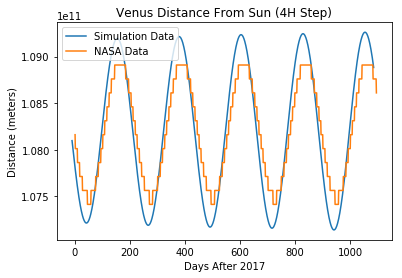

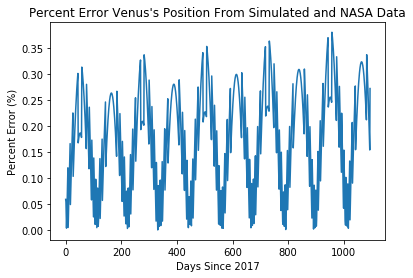

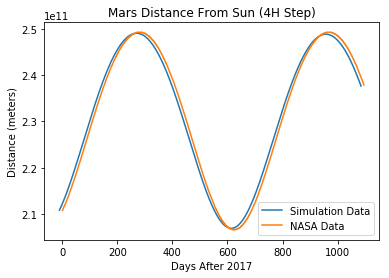

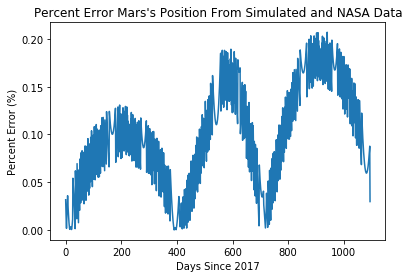

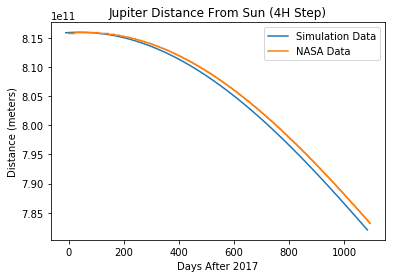

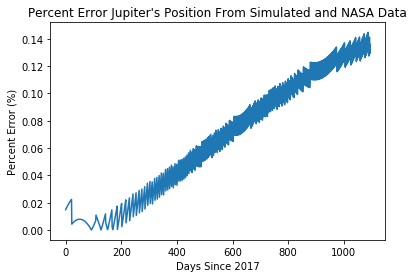

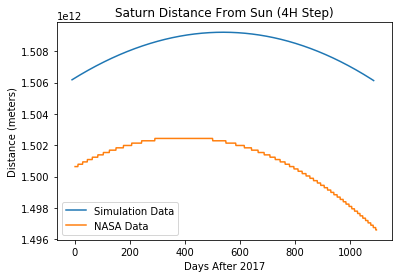

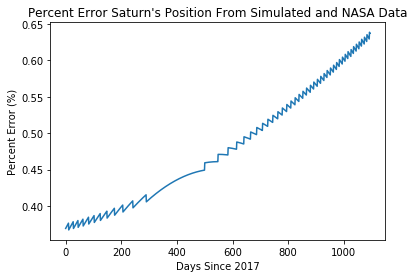

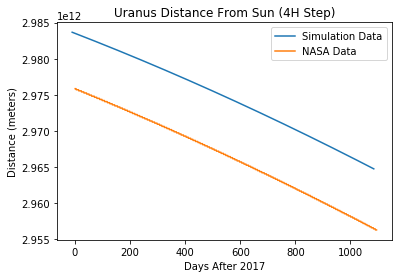

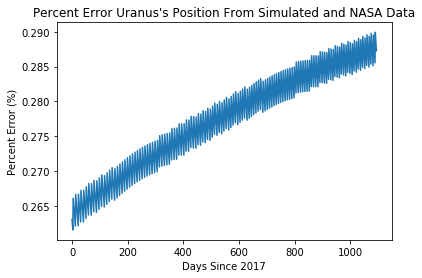

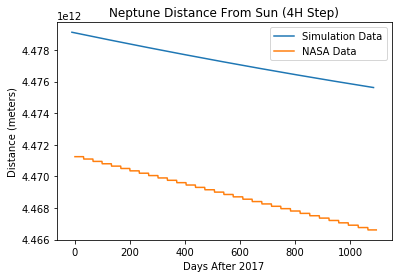

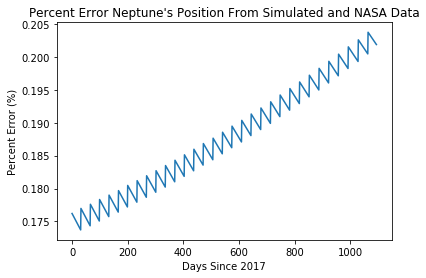

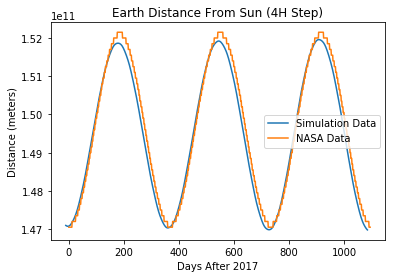

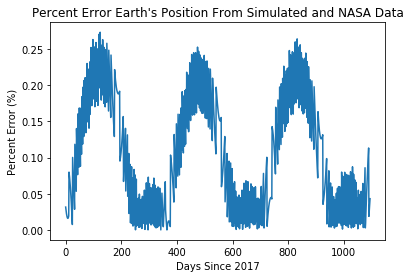

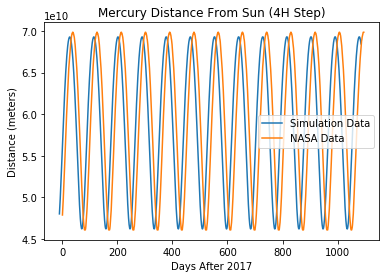

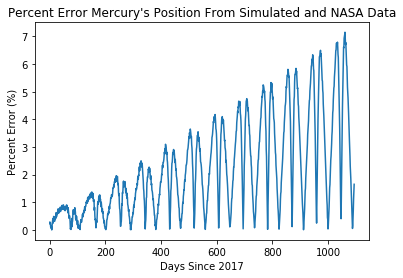

In [17]:
graphMassData("2017","4H")